# Unsupervised Learning with scikit-learn

Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to **discover patterns and sort them into clusters**. Or perhaps you have a set of texts, such as wikipedia pages, and you wish to **segment them into categories based on their content**. This is the world of **unsupervised learning**, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead **uncovering hidden structure from unlabeled data**. 

**Unsupervised learning** encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. In this notebook, you'll learn the fundamentals of unsupervised learning and implement the essential algorithms using `scikit-learn` and `scipy`. You will learn how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the course by building a **recommender system** to recommend popular musical artists.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## How many clusters?

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

- Create an array called `xs` that contains the values of `points[:,0]` - that is, column 0 of points.
- Create an array called `ys` that contains the values of `points[:,1]` - that is, column 1 of points.
- Make a scatter plot by passing xs and ys to the plt.scatter() function.
- Call the `plt.show()` function to show your plot.

How many clusters do you see?

In [45]:
points = np.array([[0.06544649120573354, -0.7686637583746054],
 [-1.5290154723631335, -0.4295307892836781],
 [1.7099337125153655, 0.698852527207745],
 [1.1677914530353883, 1.0126263823062864],
 [-1.8011008765125671, -0.3186129561722616],
 [-1.635678878103174, -0.02859534770489522],
 [1.2199037530859576, 0.7464346306206472],
 [-0.2617515511040414, -0.6249293924445927],
 [-1.6192580392899492, -0.4798394895824938],
 [-1.843295821844137, -0.16694431084935166],
 [1.3599960195356797, 0.9499582661886437],
 [0.42291856473720796, -0.7349534005968037],
 [-1.6857613901150803, 0.10686727571590626],
 [0.9062999493855556, 1.0910516186925248],
 [-1.5647832151997594, -0.8467539409172038],
 [-0.025784901040515423, -1.1867253939984086],
 [0.8302732361682478, 1.1450461198177004],
 [1.224504318044118, 1.3506675856135453],
 [-0.15394595513245585, -0.7170430090340084],
 [0.8635880949171804, 1.068246134206403],
 [-1.433863658847475, -0.2381297048308357],
 [0.03844768620526845, -0.7463502234351036],
 [-1.585679224619341, 0.08499354465579917],
 [0.6359887951357822, -0.5847769797814781],
 [0.24417242307388476, -0.5317246502745662],
 [-2.196803585261628, 0.4947367720571247],
 [1.0323502988225113, -0.5568799954803777],
 [-0.2885806653720872, -0.39972527763075705],
 [0.20597008007219075, -0.8017153577365872],
 [-1.210730799565148, -0.3492410894419737],
 [1.3342368384681809, 0.7721489008208623],
 [1.1948015178340623, 1.047885558425092],
 [0.9917476953726534, 0.8920200767628542],
 [-1.8356219039361112, -0.04839732479614648],
 [0.08415720766561488, -0.7156432575403593],
 [-1.4897017522845528, -0.19299604094122305],
 [0.3878241808139117, -0.8206011901833663],
 [-0.014480440773439684, -0.9779840987237762],
 [-2.0521340998721707, -0.02129125401311013],
 [0.10331194324225318, -0.8216278059218872],
 [-0.4418931501740598, -0.6571097360468146],
 [1.103909263225082, 1.024811819134689],
 [-1.5922775939582692, -0.17374037962574693],
 [-1.473441520416564, -0.02202853049685249],
 [-1.3551470405553263, 0.2297106712795478],
 [0.04123369958015996, -1.2377662208006797],
 [0.4761516993039864, -1.136721236563179],
 [1.043356760427954, 0.8234590470870763],
 [-0.0796188170335298, -0.8567739353621651],
 [0.8706505901795596, 1.0805284140253724],
 [1.4026731334929738, 1.0752511922343315],
 [0.8011115670043031, 1.283428254742632],
 [-0.16527515500861514, -1.2358380385590229],
 [-0.3377922091012056, -0.5919432342243465],
 [0.8061074868332878, -0.7375215868012956],
 [-1.4359003186858177, -0.5638444576816151],
 [0.5486889533068995, -0.9514382937143939],
 [0.4680313077949052, -0.7497390745187791],
 [-1.513712896942057, -0.8391432284169498],
 [0.913843599841932, 1.5112653172575654],
 [-1.972339030423432, -0.41155374962957947],
 [0.5213406016331779, -0.8865489365482295],
 [0.6275949431557073, -1.185904771196431],
 [0.9416301405581072, 1.3539933545913059],
 [0.5699476779996157, 1.07036605536564],
 [-1.8766338206265312, 0.14745773409173726],
 [0.9061218594658672, 0.9108401052814168],
 [-1.3748145362460542, 0.28428394728799217],
 [-1.8056402943668943, -0.9671057419425316],
 [0.3430775659691717, -0.7999927487937941],
 [0.7038056620973427, 1.000258041761561],
 [-1.6848986211185557, -0.3056459496643352],
 [1.3147322131175057, 0.986149780647387],
 [0.2615121623829735, -0.2606925092787008],
 [0.9193121024473212, 0.823714845526499],
 [-1.2179592899480618, -0.2021967434650836],
 [-0.1772272310977897, -1.0266524532448829],
 [0.6482486163633215, -0.6682288060013553],
 [0.412067864292622, -0.28783784420181835],
 [1.0156820171676155, 1.1348166724278068],
 [0.6790025410486296, -0.9148950199813576],
 [-1.051827471063715, -0.010623762325267516],
 [0.6130659861093055, 1.7821038376771536],
 [-1.5021974801612847, -0.5230892170854781],
 [-1.7271729328459169, -0.4617391574563362],
 [-1.6099563119906712, -0.1821007032109933],
 [-1.0911102066045015, -0.07813980218573177],
 [-0.01046978156325079, -0.8091303412886869],
 [0.32782303252220457, -0.8073475437162415],
 [1.220385032027253, 1.195979302100845],
 [-1.333286810602751, -0.3000193743679564],
 [0.8795951689645072, 1.1156649125877478],
 [-1.148290981079215, -0.30400762010005744],
 [-0.5801975462632827, -1.1999601847068089],
 [-0.011611594015490669, -0.7846885353997791],
 [0.17359724107621646, -0.6339814535829698],
 [1.3273855590403572, 0.6775996875620109],
 [-1.9346732743106585, 0.30572472057151284],
 [-1.5776189340196929, -0.2772636496588521],
 [0.4763900025188839, 1.2142264755806365],
 [-1.6523750865252471, -0.6803981003840274],
 [-0.12609976246678, -1.0432745741405829],
 [-1.8960708245432247, -0.7008550197468331],
 [0.5746689857995531, 0.748783693306254],
 [-0.1666031224121718, -0.831102946952984],
 [0.8013354959100127, 1.2224443484235474],
 [1.1845542591567533, 1.434646700177676],
 [1.0886442772018283, 0.6466711158456921],
 [-1.6115850479861942, 0.2280572487292947],
 [-1.5751220451660382, -0.09612576005083648],
 [0.0721356955324795, -0.6964032764653807],
 [-1.4005429784650547, 0.16390597510235927],
 [1.0960771260886046, 1.1680469115344367],
 [-2.5434620433141517, -0.23089821715764086],
 [-1.3454487471580343, 0.25151125700096744],
 [-1.3547862853823236, -0.1910331668559034],
 [0.1836811292599628, -1.1582772499848413],
 [-1.3136867742972251, -0.3763569984538013],
 [0.09990128656336106, 1.2250049094266122],
 [1.1722557441252894, 1.3083514263524965],
 [0.08653969877007911, -0.7971437137358454],
 [-0.21053922872177586, -1.1342151077436895],
 [0.26496023904754856, -0.9476074245480344],
 [-0.2557591033928975, -1.0626602197221122],
 [-0.2603975738337485, -0.7477422467984205],
 [-1.917873593816116, 0.16434571406389192],
 [0.9302113924561816, 0.4943633069333503],
 [0.4477046652125147, -0.7287791759929736],
 [-1.6380286912248638, -0.5892552757456395],
 [-1.9571276340863957, -0.10125137401907584],
 [0.9270337011305244, 0.882514226728072],
 [1.2566009331779366, 0.6082807304621214],
 [-1.7281863178915309, 0.08416886607685152],
 [0.3499787973638875, -0.30490298294617035],
 [-1.516960820018647, -0.5091310892535825],
 [0.18763604846446186, -0.5542492405318324],
 [0.8960980862983607, 0.8355150812307898],
 [-1.5496885650240504, -0.1711478213441832],
 [1.215745697288779, 1.233177284686227],
 [0.20307745359011034, -1.0378490610962725],
 [0.8458908629104305, 1.0361527283579377],
 [0.5323791878568742, 1.4736288387658585],
 [-0.05319044083262858, -1.361505529107807],
 [1.388197431517556, 1.117299153890155],
 [1.0069630382934158, 1.036772104404645],
 [0.5668186879625374, -1.0963717575863503],
 [0.8688829648688388, 1.0524887417163158],
 [-1.1628660935320507, -0.5587524541922939],
 [0.27717767905113744, -0.8384401498713722],
 [0.16563267253352665, -0.8030660737386272],
 [0.3826330298198334, -0.4268324141890895],
 [1.1451980736781826, 0.896590262377021],
 [0.8145585690063701, 0.6753366702240604],
 [-1.8603152008514652, -0.0953756097092091],
 [0.9656409952874998, 0.9029557901112318],
 [-1.4989745116151008, -0.3325404360102928],
 [-0.13354890109847573, -0.8072758221114568],
 [0.12541527427567012, -1.1335490643888846],
 [1.0606243632066137, 1.2881635792978954],
 [-1.491545784548984, -0.20246410211880406],
 [1.1618903199872417, 1.2881987698905646],
 [0.5428203291239563, 0.7520352396594223],
 [0.8922106508467552, 0.9921162366040982],
 [-1.4993201058946146, -0.3243066695752808],
 [0.3166647012635424, -1.3448291507175296],
 [0.1397246854860243, -1.220974476481136],
 [-1.5499723960767195, -0.1078258420141638],
 [1.2384685817822878, 1.3766880413971587],
 [1.2555895446451386, 0.7202609833504818],
 [0.2555868919333049, -1.2852976316843507],
 [0.4516893307622061, -0.5595209318010728],
 [1.0620205708618238, 1.0340460421826372],
 [0.6745190801340936, -0.5497029857556341],
 [0.2275967613293482, -1.0272946849858042],
 [-1.458352812370112, -0.04951073923368979],
 [0.2327350078517041, -0.7084926203827929],
 [1.5967958880334026, 1.1139507626418677],
 [0.8047610524694737, 0.5446269982211378],
 [1.1549252092617004, 1.043521906912246],
 [0.5963277561336563, -1.1914289691414517],
 [0.02839068319290647, -0.4382936594500548],
 [1.1345158357541545, 0.5632632979739165],
 [0.2157620438343024, -1.044457529514499],
 [1.4104898664048482, 1.0283071932971288],
 [1.1228930156204953, 0.5802944134502128],
 [0.25200688174273445, -0.8258843605974264],
 [-1.2856608057922851, -0.07390909007813573],
 [1.5284981499353048, 1.1182246872982793],
 [-0.23907858404898005, -0.7054197249485433],
 [-0.25792784205946145, -0.8182503454141075],
 [0.5936781798705313, -0.4523991501399457],
 [0.07931909469133648, -0.29233213019632065],
 [-1.2725681463070748, 0.11630576987440865],
 [0.669301293330272, 1.0073148108513286],
 [0.34791545789361034, -1.208228767089348],
 [-2.112839925038438, -0.6689793468549369],
 [-1.629382396252732, -0.32718221913696793],
 [-1.5381913876982258, -0.015019717960366831],
 [-0.11988544731011096, -0.6036338950688659],
 [-1.54418955684223, -0.30389843747389284],
 [0.3002661436530568, -0.7772317303459549],
 [0.009354485200616963, -0.5388819155394995],
 [-1.3342439259126522, -0.11560430921312267],
 [0.4750448911523113, 0.7842138380132909],
 [0.5931326371015391, 1.2322389981754205],
 [0.413703694582358, -1.3520585677651438],
 [0.5584094792445969, 0.7883105304005376],
 [0.4985501752387235, -0.7899490037783341],
 [0.35675808586971114, -0.8103869319941585],
 [-1.8619782516712928, -0.5907130477671053],
 [-1.619776710874009, -0.1607668738067014],
 [0.8077929471500505, -0.7331129406344682],
 [1.6274577523743008, 0.6278716346647928],
 [-1.5699359287017738, -0.08467566885898843],
 [1.0255856065996505, 0.8938330199548162],
 [0.24293460986231455, -0.6088253049848489],
 [1.2313024182884664, 1.00262186248261],
 [-1.9651013042574703, -0.15886289144686555],
 [0.42795032119840093, -0.7038443183784787],
 [-1.5830681762844188, -0.19431922518999764],
 [-1.571959224996652, 0.014134687055555316],
 [-0.9814537326582891, 0.06132285389771569],
 [-1.4863784427733069, -0.5746531036642516],
 [0.9874582844136752, 0.6918805326527924],
 [1.2861972092838352, 1.281288207379233],
 [0.8585059551128833, 0.9554148145127936],
 [0.19028285631963046, -0.8211294209700777],
 [0.265610462319974, -0.04255238966504527],
 [-1.6189789738321865, 0.008623723050546345],
 [0.24070182637758594, -0.5266420923479008],
 [1.152209930162803, 0.4391669350892604],
 [-1.2196781174958202, -0.25803129868336666],
 [0.33412532725218475, -0.8611776145578867],
 [0.17131003346811258, -0.7563896476095736],
 [-1.1982839682225466, -0.7374466455494118],
 [-0.12245931761906542, -0.4564887912252412],
 [1.5120069752500735, 0.888257407072307],
 [1.1033886565948183, 0.9234747873184772],
 [1.309720948221406, 0.5906698871295553],
 [0.19964875767967785, 1.1485588868394758],
 [0.8146051520392743, 0.8453897200875109],
 [-1.6422739047620531, -0.422962062831202],
 [0.012243506797408292, -0.21247815863310515],
 [0.33709102487199016, -0.7461806494867055],
 [0.4730105400145989, 0.7271207469354536],
 [0.3470662595395132, 1.2303375668004732],
 [-0.003932786491855854, -0.9720969390416028],
 [-1.6430311859446451, 0.05276337015050203],
 [1.4464962531199248, 1.1421703264724763],
 [-1.93030086937966, -0.4002614600446369],
 [-2.3729613540644605, -0.7263364464821149],
 [0.4586012242999578, -1.060489534287036],
 [0.4896361019129961, -1.1892831318183212],
 [-1.0233590198483322, -0.1752057838356285],
 [-1.3276110716139322, -0.9396354945749504],
 [-1.509879085473856, -0.09473658216200102],
 [0.027230566962399616, -0.7987054916040169],
 [1.0169411977558729, 1.264617008757151],
 [0.4773352695039988, -0.9898471005648101],
 [-1.2778422374901173, -0.5474159989810934],
 [0.4989880164093402, -0.6237259029530492],
 [1.0600473141462636, 0.8687000769741766],
 [1.0020750128100304, 1.3829351167050397],
 [1.3116139353733458, 0.6283395589328151],
 [1.134284427193519, 1.1834654169384748],
 [1.2767134615403704, 0.966328781070547],
 [-0.6334288525144172, -0.977682512557856],
 [0.1269877885696956, -0.931423170361161],
 [-1.3451081215324, -0.2375422563556249],
 [-0.5316227754264695, -1.251535942097754],
 [0.21959933809083773, -0.9026993798427284],
 [-1.7899747917891926, -0.12115748411511088],
 [1.231974725796502, -0.07453764354880478],
 [1.4163536023718353, 1.2155175194021297],
 [-1.9028097613580028, -0.16389760152034846],
 [-0.2244008096180195, -0.7545424755075612],
 [0.5955941249273331, 0.9241455296828398],
 [1.219307731244579, 1.081752840147472],
 [-1.9942753549563843, -0.3758779909018822],
 [-1.2781847418397052, -0.5245455082345866],
 [0.6235268908283551, -1.0143010810673632],
 [0.14024251288742887, -0.4282660048507156],
 [-0.16145712613074958, -1.1635973109595263],
 [-1.7479586549697352, -0.06033100879409306],
 [-1.166597912654541, 0.09023930193838893],
 [0.411104079705134, -0.8084248985775087],
 [1.1475716820615272, 0.7780452823812295],
 [-1.6559074832196319, -0.4010544588749239],
 [-1.1530686547465177, 0.008586993168223117],
 [0.6089212149735674, 0.6897483335328548],
 [-0.08434137552326887, -0.976152563706225],
 [0.1917005299655985, -0.4233143781546386],
 [0.2966316166211803, -1.1335739943157594],
 [-1.3689362766976974, -0.2505212448026501],
 [-0.08037807115393003, -0.5678415453281473],
 [0.35695011364327656, -1.150644084910159],
 [0.024821793764037925, -0.6359482849591866],
 [-1.4907555757248412, -0.24825069850518605],
 [-1.4085879959335197, 0.2563543054178052],
 [-1.9827462594741505, -0.545844746986447]])

In [46]:
points[:10]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431]])

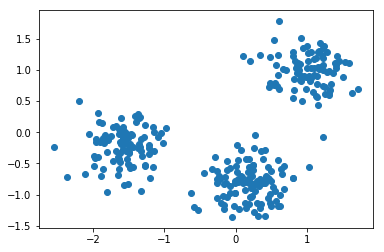

In [47]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show();

## Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a `KMeans` model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

You are given the array points from the previous exercise, and also an array `new_points`.

In [53]:
new_points = np.array([[0.4002333320265674, -1.2654447065553371],
 [0.8032303700813846, 1.2826016688170383],
 [-1.3950755249367135, 0.055729292090629545],
 [-0.3411926769123959, -1.076619940010254],
 [1.547817473545126, 1.4025004898994076],
 [0.24503201753754994, -0.4834423276216081],
 [1.2070688617175875, 0.8887526050500794],
 [1.2513262772309852, 1.1555539518148343],
 [1.810044147829991, 0.9655307305763632],
 [-1.669634014657854, -0.30810350945803905],
 [-0.07174821045840446, -0.9379396997933668],
 [0.6826319270615404, 1.1025816032172124],
 [1.0903959845516995, 1.4389952903513694],
 [-1.6764541393208259, -0.5045570492933269],
 [-1.8444780366259956, 0.045253954376114465],
 [1.2423485050862004, 1.0208866089127862],
 [-1.8614704081677675, 0.00638645810856478],
 [-1.4604494285267078, 0.15325238308363198],
 [0.4989818169744145, 0.8980060577763966],
 [0.9839622443099741, 1.0436937477386998],
 [-1.831367418957484, -0.16363283503661946],
 [1.3062261736796343, 1.0765871744481543],
 [0.3534203282015242, -0.7513202179121603],
 [1.1395797044536962, 1.5450386043690263],
 [0.2939956935455874, -1.2613500521442478],
 [-1.145582247220963, -0.037870963554070464],
 [1.1871610476838488, 0.6002406629352124],
 [-2.232119462281373, 0.2304750944808799],
 [-1.2832042998796784, -0.3933145682714113],
 [0.4942966961525396, -0.8839720087642245],
 [0.06318349304308901, -0.9119522278514528],
 [0.9357595389694396, 0.8668206847501292],
 [1.5801472050501468, 1.0378839166980027],
 [1.0630495965303597, 1.0270608188286456],
 [-1.3973253641181504, -0.5051622490313863],
 [-0.10993523963069728, -0.908113619012788],
 [1.1734675783939748, 0.9475010921789884],
 [0.9200845106983088, 1.4576767182024295],
 [0.5826589564675202, -0.9000868321743926],
 [0.9527723280673276, 0.8990423859001851],
 [-1.3726695553001729, -0.031787821490623924],
 [0.02127067600085084, -0.7076141940283391],
 [0.3270490517353891, -0.5559981073787117],
 [-1.7159026735270893, 0.21522226611516804],
 [0.5125162088827879, -0.7601282452864132],
 [1.1302346873969018, 0.7224511221624661],
 [-1.430743100030984, -0.34278751082640724],
 [-1.8272462496627275, 0.11765777468368645],
 [1.41801349539704, 1.1145507980398308],
 [1.2689730355046054, 1.4192597123818338],
 [0.8040764937373096, 1.6398855683919011],
 [0.8345677518010617, 1.099566888938277],
 [-1.2471473202906656, -0.2235223195135434],
 [-1.294225372060266, 0.08187700243761464],
 [-0.22737831566090266, -0.4133313867163021],
 [0.21883038725584325, -0.4681831195396797],
 [-1.2259341395432908, 0.2555991474864147],
 [-1.3129403283209065, -0.4288920696757677],
 [-1.3353238174034492, 0.6520537761945147],
 [-0.3011002328629553, -1.2515645072433799],
 [0.20277835613322046, -0.9052774447453354],
 [1.0135778414771135, 1.1237898051898965],
 [0.8183243943552136, 0.8608412565444068],
 [1.2618155625202765, 1.4661374378864431],
 [0.4648677244304033, -0.7972124589573605],
 [0.3609088981639311, 0.8441067198291454],
 [-2.150983103026574, -0.3695839369151511],
 [1.0500528098687707, 0.8741813644980215],
 [0.10658007406809468, -0.7492681533935283],
 [-1.7394572308492744, 0.2521835769814145],
 [-0.11201768661400867, -0.6524697876040267],
 [0.5166189510067274, -0.6412675816881157],
 [0.3266217871239109, -0.8806080148889077],
 [1.0901775875963506, 1.109525584516946],
 [0.3644595761914319, -0.6942156216036032],
 [-1.9077931816808351, 0.18738367404067435],
 [-1.9560182911330304, 0.139959126119237],
 [0.3185417014931509, -0.4052717041359056],
 [0.7365126986835167, 1.7641625460023058],
 [-1.4417516180120409, -0.057232042866411585],
 [0.3217571684082834, -0.5342838213080934],
 [-1.3731730463544376, 0.04644846441285158],
 [0.06872259098410069, -1.1052294378912342],
 [0.9593142184469996, 0.6523162095118378],
 [-1.626419187808163, -0.5624232801807939],
 [1.0678830524625211, 0.7292604817658017],
 [-1.7964354693700573, -0.9883074177396988],
 [-0.09886283766053412, -0.06811980918444828],
 [-0.10513569966767866, 1.1702214346983502],
 [0.8799646993015682, 1.253403167715908],
 [0.9807534068479892, 1.1548653876175397],
 [-0.08332249663379743, -0.9248443677429224],
 [0.8487596732932929, 1.0939742455294217],
 [1.3294164939525177, 1.137345628305919],
 [0.3237880684751769, -0.7497324512066812],
 [-1.5261097030195439, -0.24901692884281745],
 [-1.4859811551413251, -0.2688286079948604],
 [-1.8047955294480482, 0.18705270020134698],
 [-2.0190734747511296, -0.4495116509492829],
 [0.28720240197139146, -0.6554874148914515],
 [0.8222951016345545, 1.3844323435720964],
 [-0.03569970357693916, -0.8018258068955944],
 [-1.6695543980809435, -0.13825850468570902],
 [-1.7822682110743764, 0.2933530329302973],
 [0.7258371377839856, -0.6233740238035452],
 [0.3884325927706244, -0.7612834972221451],
 [1.49002782668951, 0.7956786712532995],
 [0.0006554232279744611, -0.7405807019362622],
 [-1.3453311598066255, -0.4756299369161786],
 [-0.8038451057116693, -0.3099430125960101],
 [-0.2490412950059105, -1.0066241847122213],
 [-1.4109511807922228, -0.0706744126632764],
 [-1.7511959356833808, -0.30049133577057163],
 [-1.2794272423458892, 0.17377459990981498],
 [0.33502818267433954, 0.6247611513773945],
 [1.1681964908549058, 1.1890225089718274],
 [0.7152104568601423, 0.9260774191562786],
 [1.300572781743362, 0.916349564697178],
 [-1.2169700759337978, 0.1100394768992078],
 [-1.7070793484711009, -0.05996595355493217],
 [1.2073065505131004, 1.0548046315261794],
 [0.18689600860487554, -0.9580472344730616],
 [0.8034634709748233, 0.38613313957714746],
 [-1.7348679046802356, -0.14983191338255186],
 [1.3126149924762784, 1.11802981738963],
 [0.4049931475801489, -0.51090034730328],
 [-1.932679684301072, 0.22076469428888174],
 [0.6560047985146118, 0.9618871607020404],
 [-1.405882153104396, 0.1171344034664284],
 [-1.7430626422339452, -0.07474739588180918],
 [0.5437454124343493, 1.4720922360345101],
 [-1.973316692928232, -0.22712449341197186],
 [1.5390117095155558, 1.3604908086817358],
 [-1.4832345230186001, -0.4903020632514634],
 [0.3867484837065093, -1.261733998094538],
 [1.170157157781722, 1.185494153696634],
 [-0.0805381721060609, -0.32192362738669106],
 [-0.06822731561561057, -0.8528258870251585],
 [0.7135000278803649, 1.2786851950310625],
 [-1.8501437762114057, -0.5034905576730881],
 [0.06360852657782562, -1.4125703999747332],
 [1.5296606194895932, 0.9660565718481976],
 [0.16216571438837646, -1.3737484274059804],
 [-0.3234744968085503, -0.7066202689006988],
 [-1.5176899333956642, 0.1876583021123376],
 [0.8888959113837018, 0.7622371605566541],
 [0.48316403224714793, 0.8819318692890954],
 [-0.05529977660045904, -0.7113050163965421],
 [-1.5796644099147938, -0.6292203127968155],
 [0.05513086450579202, -0.8472067629036832],
 [-2.0600158163670144, 0.058769778676059974],
 [1.1181085496719971, 1.3025417465032032],
 [0.4870161641475913, -0.9901439374583558],
 [-1.6551804200375655, -0.16938638279232876],
 [-1.4434973799529995, 0.190299243117064],
 [-0.17007454748807474, -0.8267360220133111],
 [-1.824339789139913, -0.30781462607157506],
 [1.030934850193869, 1.2645769050131583],
 [1.6443116943156395, 1.2777311525997004],
 [-1.4761769264381148, 0.026078387244023254],
 [1.0095306707588962, 1.1427018140753182],
 [-1.4528563647019344, -0.25521620652981336],
 [-1.7409291726803937, -0.08344431770974857],
 [1.2203829912336142, 1.2869996131495278],
 [0.916925397059932, 0.7320702754102352],
 [-0.0016075418496920846, -0.7263755713166965],
 [0.8938412382881398, 0.8411466431487012],
 [0.6337919611890583, 1.0091513357290842],
 [-1.4792707460559875, -0.6997819362786284],
 [0.05447993735263179, -1.0644197014122958],
 [-1.5193556824925778, -0.4892769290772026],
 [0.28993902630874063, -0.7731455226767868],
 [-0.009681540610637612, -1.1330220710411107],
 [1.1347463930946602, 0.971541744341109],
 [0.5364214059773794, -0.8479063881175805],
 [1.1475986378655694, 0.6899152046491732],
 [0.5732919022586174, 0.7908027102433104],
 [0.2123773967237214, -0.6075698078151486],
 [0.5265795477728625, -0.8159302635461885],
 [-2.0183164148773765, 0.06786507404223903],
 [-0.23551262366373565, -1.0820513247221837],
 [0.15927477956772199, -0.6007172613865557],
 [0.22812035636194486, -1.1600354896605691],
 [-1.5365837800714561, 0.08407988075318508],
 [1.1395460916729012, 0.6317820011520845],
 [1.0111925531921029, 1.0436080478160479],
 [-0.14203986668230473, -0.4812303372945994],
 [-2.231201820617505, 0.08491629053739214],
 [0.1255548110642637, -1.017947931672471],
 [-1.7249350918334918, -0.6944261771347984],
 [-1.6043463038969006, 0.4455508679133457],
 [0.7371539787409838, 0.9265607436412832],
 [0.6729052709588117, 1.1336602959159123],
 [1.200664556764366, 0.7262730934489203],
 [0.07587472088808289, -0.9833783259664118],
 [1.2878326230927817, 1.1808860066647064],
 [1.065219295449487, 1.0071474604016484],
 [1.058716978914834, 1.129565193019349],
 [-1.1264340979123897, 0.16678774377085234],
 [-1.101572175412031, -0.3641378058993379],
 [0.23511821680542264, -0.1397699490301142],
 [1.1385379537720148, 1.010185185416075],
 [0.5312056535944205, -0.8819907915506771],
 [0.4330859360296099, -0.7640590419867354],
 [-0.00448926155719931, -1.3054841053771022],
 [-1.7634858858975817, -0.4974307390604293],
 [1.3648568100147571, 0.5834046987674564],
 [0.5669238996877362, 1.5139196303045417],
 [1.3573682575435084, 0.6709153176202536],
 [1.07173397131927, 0.6119908837452674],
 [1.0010691544116854, 0.8938153256093224],
 [1.33091007084542, 0.8797738791009336],
 [-1.7960374038799916, -0.0353883973153408],
 [-1.2722297859037501, 0.4001566415831013],
 [0.8474806027520546, 1.1703236354150213],
 [-1.5098912912157934, -0.7123183296610254],
 [-1.2495357580091535, -0.5578597299906052],
 [-1.277179730682378, -0.5993505497357117],
 [-1.81946743441716, 0.7370576727236302],
 [1.1994986715117046, 1.5696938611171598],
 [-1.255438466250899, -0.2338928257571077],
 [-1.6305205810978964, 0.1614558646111886],
 [1.1061130532991692, 0.7396982244750188],
 [0.6701931918150288, 0.8705670005920064],
 [0.36967015614450893, -0.6946453064135064],
 [-1.2636229292628256, -0.6992492849533154],
 [-0.3666875074417829, -1.3531025998574808],
 [0.244032146778522, -0.6594707932203552],
 [-1.2767914239764049, -0.48545341180964],
 [0.03774736124308442, -0.6992516050983633],
 [-2.1914853929412086, -0.4911994999491013],
 [-0.2932777772250221, -0.5894882119288223],
 [-1.6573739723897742, -0.2983377855098531],
 [0.7366388611344399, 0.5780370567291455],
 [1.1370908117465266, 1.3011975437641738],
 [-1.4414660113823912, 0.0313934680115914],
 [0.5923607081206381, 1.225451138247612],
 [0.6517194143329134, 0.49267489445638396],
 [0.5945591391812747, 0.8256373151538152],
 [-1.8790072189725529, -0.5218996262712949],
 [0.215225040643176, -1.2826985114132357],
 [0.4991459650764026, -0.6702686338109364],
 [-1.8295417631450963, -0.33926973062405463],
 [0.7927214032273834, 1.3378560641922397],
 [0.9543633716714262, 0.9803966258728768],
 [-1.353598455664638, 0.1039763401001232],
 [1.0559506192051886, 0.8070319271614147],
 [-1.9431101010974, -0.11897696424755992],
 [-1.3960413695739495, -0.3100959758834197],
 [1.2897762394609942, 1.0175336493188667],
 [-1.5950313888468417, -0.540574609207296],
 [-1.41994045911711, -0.381032569275004],
 [-0.02355698013966676, -1.1013370175277757],
 [-1.260385682681977, -0.6932738864756782],
 [0.9602159807545396, -0.8115536940366752],
 [0.551803308270898, -1.0179317577818612],
 [0.3701850851909715, -1.0688546750973675],
 [0.8255292066733384, 0.8770070597519889],
 [-1.870325947723697, 0.2875071987566922],
 [-1.5626076921394083, -0.1891967118876786],
 [-1.2634654755771513, -0.7747252373004758],
 [-0.06338004205825187, -0.7594006111349588],
 [0.8852982802867434, 0.8856205186736593],
 [-0.14332468573965634, -1.1608367821528174],
 [-1.8390872522515156, -0.3266555153279336],
 [0.2747092294908228, -1.045468290017301],
 [-1.4570357313623459, -0.2918420360744182],
 [-1.5904884225125158, 0.16606303108184184],
 [0.9255492842349158, 0.741406406421462],
 [0.19724546858474468, -0.7807032247389641],
 [0.2884016972818718, -0.8324255513983669],
 [0.7241416179667342, -0.7991491997426731],
 [-1.6265863937272311, -0.18000554338188188],
 [0.5844815882480341, 1.1319564042970958],
 [1.0214673158906118, 0.4596577990099158],
 [0.8650505541075891, 0.9577148872898591],
 [0.3987177664298797, -1.2427314680567312],
 [0.8622348918988015, 1.1095556084481029],
 [-1.3599943045133849, 0.024994265382756148],
 [-1.1917850535860444, -0.038294632325886896],
 [1.2939242406012197, 1.103205093863668],
 [1.256796300232616, -0.7798575815567014],
 [0.09380403020551704, -0.5532472578192074],
 [-1.735121753247433, -0.09762716669678152],
 [0.22315358715490693, -0.9434743514736362],
 [0.40198909967283897, -1.1096305109671036],
 [-1.4224415820890841, 0.181914703358554],
 [0.39247626718270345, -0.8784262773053151],
 [1.2518187471885425, 0.6936149956889932],
 [0.017748131656740745, -0.7203042351849521],
 [-1.877525213291965, -0.2638704239110657],
 [-1.580636023186551, -0.5504563439340334],
 [-1.5958949270817768, -0.15393289210602967],
 [-1.0182977039639498, 0.03885423697922805],
 [1.2481965891402875, 0.6600418031465439],
 [-1.2555137688133542, -0.02961720092068407],
 [-1.4186455928109607, -0.3582301789223188],
 [0.5257583257407314, 0.8705005425324366],
 [0.5555999878971989, 1.1876507197090485],
 [0.028134443916536883, -0.6991113135804631]])

In [54]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 2 1 0 2 0 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 0 0 2 2 2 1 0 2
 2 0 2 1 0 0 1 0 2 1 1 2 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 2 1 2 0 1 0 0 0 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 2 2 2 0 2 2 0 1 1 1 1 0 2 0 1 1 0 0 2 0 1 1 0
 1 1 1 2 2 2 2 1 1 2 0 2 1 2 0 1 2 1 1 2 1 2 1 0 2 0 0 2 1 0 2 0 0 1 2 2 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 1 2 2 0 2 2 1 0 1 0 0 2 0 2 2 0 0 1 0 0 0 1 2
 2 0 1 0 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1
 2 2 0 1 0 0 1 0 1 0 1 2 2 1 2 2 2 1 0 0 1 2 2 1 2 1 1 2 1 1 0 1 0 0 0 2 1
 1 1 0 2 0 1 0 1 1 2 0 0 0 1 2 2 2 0 2 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1
 1 2 2 0]


In [55]:
new_points[0:10]

array([[ 0.40023333, -1.26544471],
       [ 0.80323037,  1.28260167],
       [-1.39507552,  0.05572929],
       [-0.34119268, -1.07661994],
       [ 1.54781747,  1.40250049],
       [ 0.24503202, -0.48344233],
       [ 1.20706886,  0.88875261],
       [ 1.25132628,  1.15555395],
       [ 1.81004415,  0.96553073],
       [-1.66963401, -0.30810351]])

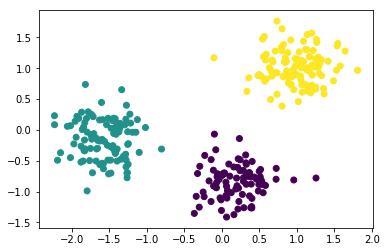

In [56]:
xs = new_points[:,0]
ys = new_points[:,1]
plt.scatter(xs, ys, c=labels)
plt.show();

## Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so `new_points` is an array of points and labels is the array of their cluster labels.

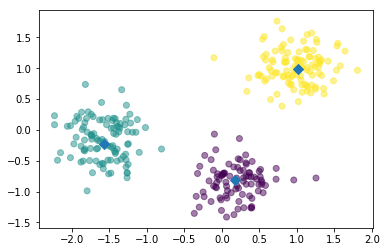

In [57]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show();

The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you **evaluate the quality of a clustering**?

## How many clusters of grain?

To choose a **good number of clusters for a dataset** using the **k-means** we can use **inertia graph**. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds).

`The rule of thumb is to choose "elbow" in the inertia plot as the optimal number of clusters`.

In [58]:
samples = np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22],
 [14.88, 14.57, 0.8811, 5.553999999999999, 3.333, 1.018, 4.956],
 [14.29, 14.09, 0.905, 5.291, 3.3369999999999997, 2.699, 4.825],
 [13.84, 13.94, 0.8955, 5.324, 3.3789999999999996, 2.259, 4.805],
 [16.14, 14.99, 0.9034, 5.6579999999999995, 3.562, 1.355, 5.175],
 [14.38, 14.21, 0.8951, 5.386, 3.312, 2.4619999999999997, 4.956],
 [14.69, 14.49, 0.8799, 5.563, 3.259, 3.5860000000000003, 5.218999999999999],
 [14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0],
 [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877000000000001],
 [16.44, 15.25, 0.888, 5.8839999999999995, 3.505, 1.969, 5.5329999999999995],
 [15.26, 14.85, 0.8696, 5.7139999999999995, 3.242, 4.543, 5.314],
 [14.03, 14.16, 0.8796, 5.438, 3.201, 1.7169999999999999, 5.001],
 [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738],
 [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872],
 [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825],
 [14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781000000000001],
 [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001],
 [15.69, 14.75, 0.9058, 5.527, 3.514, 1.599, 5.046],
 [14.7, 14.21, 0.9153, 5.205, 3.466, 1.767, 4.649],
 [12.72, 13.57, 0.8686, 5.226, 3.049, 4.102, 4.914],
 [14.16, 14.4, 0.8584, 5.6579999999999995, 3.1289999999999996, 3.072, 5.176],
 [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.218999999999999],
 [15.88, 14.9, 0.8988, 5.617999999999999, 3.5069999999999997, 0.7651, 5.091],
 [12.08, 13.23, 0.8664, 5.099, 2.9360000000000004, 1.415, 4.961],
 [15.01, 14.76, 0.8657, 5.789, 3.245, 1.791, 5.001],
 [16.19, 15.16, 0.8849, 5.832999999999999, 3.4210000000000003, 0.903, 5.307],
 [13.02, 13.76, 0.8641, 5.395, 3.0260000000000002, 3.373, 4.825],
 [12.74, 13.67, 0.8564, 5.395, 2.9560000000000004, 2.504, 4.869],
 [14.11, 14.18, 0.882, 5.541, 3.221, 2.7539999999999996, 5.038],
 [13.45, 14.02, 0.8604, 5.516, 3.065, 3.531, 5.0969999999999995],
 [13.16, 13.82, 0.8662, 5.454, 2.975, 0.8551, 5.056],
 [15.49, 14.94, 0.8724, 5.757000000000001, 3.3710000000000004, 3.412, 5.228],
 [14.09,
  14.41,
  0.8529,
  5.7170000000000005,
  3.1860000000000004,
  3.92,
  5.2989999999999995],
 [13.94, 14.17, 0.8728, 5.585, 3.15, 2.124, 5.012],
 [15.05, 14.68, 0.8779, 5.712000000000001, 3.3280000000000003, 2.129, 5.36],
 [16.12, 15.0, 0.9, 5.709, 3.485, 2.27, 5.443],
 [16.2, 15.27, 0.8734, 5.8260000000000005, 3.464, 2.823, 5.527],
 [17.08,
  15.38,
  0.9079,
  5.832000000000001,
  3.6830000000000003,
  2.9560000000000004,
  5.484],
 [14.8, 14.52, 0.8823, 5.656000000000001, 3.2880000000000003, 3.112, 5.309],
 [14.28, 14.17, 0.8944, 5.397, 3.298, 6.685, 5.001],
 [13.54, 13.85, 0.8871, 5.348, 3.156, 2.5869999999999997, 5.178],
 [13.5, 13.85, 0.8852, 5.351, 3.158, 2.249, 5.176],
 [13.16, 13.55, 0.9009, 5.138, 3.201, 2.461, 4.783],
 [15.5, 14.86, 0.882, 5.877000000000001, 3.3960000000000004, 4.711, 5.528],
 [15.11, 14.54, 0.8986, 5.579, 3.4619999999999997, 3.128, 5.18],
 [13.8, 14.04, 0.8794, 5.376, 3.155, 1.56, 4.961],
 [15.36,
  14.76,
  0.8861,
  5.7010000000000005,
  3.3930000000000002,
  1.367,
  5.132000000000001],
 [14.99, 14.56, 0.8883, 5.57, 3.377, 2.958, 5.175],
 [14.79,
  14.52,
  0.8819,
  5.545,
  3.2910000000000004,
  2.7039999999999997,
  5.111000000000001],
 [14.86, 14.67, 0.8676, 5.678, 3.258, 2.129, 5.351],
 [14.43, 14.4, 0.8751, 5.585, 3.272, 3.975, 5.144],
 [15.78, 14.91, 0.8923, 5.6739999999999995, 3.4339999999999997, 5.593, 5.136],
 [14.49, 14.61, 0.8538, 5.715, 3.113, 4.1160000000000005, 5.396],
 [14.33, 14.28, 0.8831, 5.504, 3.199, 3.3280000000000003, 5.224],
 [14.52, 14.6, 0.8557, 5.7410000000000005, 3.113, 1.4809999999999999, 5.487],
 [15.03, 14.77, 0.8658, 5.702000000000001, 3.2119999999999997, 1.933, 5.439],
 [14.46, 14.35, 0.8818, 5.388, 3.377, 2.802, 5.044],
 [14.92, 14.43, 0.9006, 5.3839999999999995, 3.412, 1.1420000000000001, 5.088],
 [15.38, 14.77, 0.8857, 5.662000000000001, 3.4189999999999996, 1.999, 5.222],
 [12.11, 13.47, 0.8392, 5.159, 3.032, 1.5019999999999998, 4.519],
 [11.42, 12.86, 0.8683, 5.008, 2.85, 2.7, 4.607],
 [11.23, 12.63, 0.884, 4.902, 2.8789999999999996, 2.269, 4.703],
 [12.36, 13.19, 0.8923, 5.0760000000000005, 3.042, 3.22, 4.605],
 [13.22, 13.84, 0.868, 5.395, 3.07, 4.157, 5.088],
 [12.78, 13.57, 0.8716, 5.2620000000000005, 3.0260000000000002, 1.176, 4.782],
 [12.88, 13.5, 0.8879, 5.138999999999999, 3.1189999999999998, 2.352, 4.607],
 [14.34, 14.37, 0.8726, 5.63, 3.19, 1.3130000000000002, 5.15],
 [14.01, 14.29, 0.8625, 5.609, 3.158, 2.217, 5.132000000000001],
 [14.37, 14.39, 0.8726, 5.569, 3.153, 1.464, 5.3],
 [12.73, 13.75, 0.8458, 5.412000000000001, 2.8819999999999997, 3.533, 5.067],
 [17.63, 15.98, 0.8673, 6.191, 3.5610000000000004, 4.0760000000000005, 6.06],
 [16.84, 15.67, 0.8623, 5.997999999999999, 3.484, 4.675, 5.877000000000001],
 [17.26, 15.73, 0.8763, 5.978, 3.594, 4.539, 5.791],
 [19.11, 16.26, 0.9081, 6.154, 3.93, 2.9360000000000004, 6.079],
 [16.82, 15.51, 0.8786, 6.017, 3.486, 4.004, 5.841],
 [16.77, 15.62, 0.8638, 5.9270000000000005, 3.438, 4.92, 5.795],
 [17.32, 15.91, 0.8599, 6.064, 3.403, 3.824, 5.922000000000001],
 [20.71,
  17.23,
  0.8763,
  6.579,
  3.8139999999999996,
  4.4510000000000005,
  6.4510000000000005],
 [18.94, 16.49, 0.875, 6.445, 3.639, 5.064, 6.362],
 [17.12, 15.55, 0.8892, 5.85, 3.5660000000000003, 2.858, 5.746],
 [16.53, 15.34, 0.8823, 5.875, 3.467, 5.532, 5.88],
 [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879],
 [20.2, 16.89, 0.8894, 6.285, 3.864, 5.172999999999999, 6.187],
 [19.57, 16.74, 0.8779, 6.3839999999999995, 3.772, 1.472, 6.273],
 [19.51, 16.71, 0.878, 6.3660000000000005, 3.801, 2.9619999999999997, 6.185],
 [18.27, 16.09, 0.887, 6.172999999999999, 3.6510000000000002, 2.443, 6.197],
 [18.88, 16.26, 0.8969, 6.084, 3.764, 1.649, 6.109],
 [18.98,
  16.66,
  0.8590000000000001,
  6.5489999999999995,
  3.67,
  3.6910000000000003,
  6.497999999999999],
 [21.18, 17.21, 0.8989, 6.5729999999999995, 4.033, 5.78, 6.231],
 [20.88, 17.05, 0.9031, 6.45, 4.032, 5.016, 6.321000000000001],
 [20.1, 16.99, 0.8746, 6.581, 3.785, 1.955, 6.449],
 [18.76, 16.2, 0.8984, 6.172000000000001, 3.7960000000000003, 3.12, 6.053],
 [18.81, 16.29, 0.8906, 6.272, 3.693, 3.237, 6.053],
 [18.59, 16.05, 0.9066, 6.037000000000001, 3.86, 6.001, 5.877000000000001],
 [18.36, 16.52, 0.8452, 6.666, 3.485, 4.933, 6.4479999999999995],
 [16.87, 15.65, 0.8648, 6.138999999999999, 3.463, 3.696, 5.9670000000000005],
 [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.2379999999999995],
 [18.98, 16.57, 0.8687, 6.449, 3.552, 2.144, 6.452999999999999],
 [18.17, 16.26, 0.8637, 6.271, 3.512, 2.853, 6.273],
 [18.72,
  16.34,
  0.8809999999999999,
  6.218999999999999,
  3.6839999999999997,
  2.188,
  6.097],
 [16.41, 15.25, 0.8866, 5.718, 3.525, 4.217, 5.617999999999999],
 [17.99, 15.86, 0.8992, 5.89, 3.694, 2.068, 5.837000000000001],
 [19.46, 16.5, 0.8985, 6.1129999999999995, 3.892, 4.308, 6.0089999999999995],
 [19.18, 16.63, 0.8717, 6.369, 3.681, 3.3569999999999998, 6.229],
 [18.95, 16.42, 0.8829, 6.247999999999999, 3.755, 3.3680000000000003, 6.148],
 [18.83, 16.29, 0.8917, 6.037000000000001, 3.786, 2.553, 5.879],
 [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2],
 [17.63, 15.86, 0.88, 6.0329999999999995, 3.573, 3.747, 5.928999999999999],
 [19.94, 16.92, 0.8752, 6.675, 3.763, 3.252, 6.55],
 [18.55, 16.22, 0.8865, 6.153, 3.674, 1.7380000000000002, 5.894],
 [18.45, 16.12, 0.8921, 6.107, 3.7689999999999997, 2.235, 5.794],
 [19.38, 16.72, 0.8716, 6.303, 3.7910000000000004, 3.678, 5.965],
 [19.13, 16.31, 0.9035, 6.183, 3.9019999999999997, 2.109, 5.9239999999999995],
 [19.14, 16.61, 0.8722, 6.2589999999999995, 3.737, 6.682, 6.053],
 [20.97, 17.25, 0.8859, 6.563, 3.991, 4.677, 6.316],
 [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.162999999999999],
 [18.96, 16.2, 0.9077, 6.051, 3.897, 4.334, 5.75],
 [19.15, 16.45, 0.889, 6.245, 3.815, 3.0839999999999996, 6.185],
 [18.89, 16.23, 0.9008, 6.227, 3.7689999999999997, 3.639, 5.966],
 [20.03, 16.9, 0.8811, 6.492999999999999, 3.8569999999999998, 3.063, 6.32],
 [20.24, 16.91, 0.8897, 6.315, 3.9619999999999997, 5.901, 6.188],
 [18.14, 16.12, 0.8772, 6.059, 3.563, 3.6189999999999998, 6.011],
 [16.17,
  15.38,
  0.8588,
  5.7620000000000005,
  3.387,
  4.2860000000000005,
  5.702999999999999],
 [18.43, 15.97, 0.9077, 5.98, 3.7710000000000004, 2.984, 5.905],
 [15.99, 14.89, 0.9064, 5.3629999999999995, 3.582, 3.3360000000000003, 5.144],
 [18.75,
  16.18,
  0.8999,
  6.111000000000001,
  3.8689999999999998,
  4.188,
  5.992000000000001],
 [18.65, 16.41, 0.8698, 6.285, 3.594, 4.391, 6.102],
 [17.98, 15.85, 0.8993, 5.979, 3.687, 2.2569999999999997, 5.919],
 [20.16, 17.03, 0.8735, 6.513, 3.773, 1.91, 6.185],
 [17.55, 15.66, 0.8991, 5.791, 3.69, 5.3660000000000005, 5.6610000000000005],
 [18.3, 15.89, 0.9108, 5.979, 3.755, 2.8369999999999997, 5.962000000000001],
 [18.94, 16.32, 0.8942, 6.144, 3.825, 2.908, 5.949],
 [15.38, 14.9, 0.8706, 5.8839999999999995, 3.2680000000000002, 4.462, 5.795],
 [16.16, 15.33, 0.8644, 5.845, 3.395, 4.266, 5.795],
 [15.56, 14.89, 0.8823, 5.776, 3.408, 4.9719999999999995, 5.847],
 [15.38, 14.66, 0.899, 5.477, 3.465, 3.6, 5.439],
 [17.36, 15.76, 0.8785, 6.145, 3.574, 3.5260000000000002, 5.971],
 [15.57, 15.15, 0.8527, 5.92, 3.2310000000000003, 2.64, 5.879],
 [15.6, 15.11, 0.858, 5.832000000000001, 3.286, 2.725, 5.752000000000001],
 [16.23,
  15.18,
  0.885,
  5.872000000000001,
  3.472,
  3.7689999999999997,
  5.922000000000001],
 [13.07, 13.92, 0.848, 5.472, 2.9939999999999998, 5.303999999999999, 5.395],
 [13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44],
 [13.34, 13.95, 0.862, 5.388999999999999, 3.074, 5.995, 5.307],
 [12.22, 13.32, 0.8652, 5.224, 2.967, 5.468999999999999, 5.221],
 [11.82, 13.4, 0.8274, 5.314, 2.7769999999999997, 4.471, 5.178],
 [11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275],
 [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132000000000001],
 [12.49, 13.46, 0.8658, 5.267, 2.967, 4.421, 5.002],
 [12.7, 13.71, 0.8491, 5.386, 2.911, 3.26, 5.316],
 [10.79, 12.93, 0.8107, 5.317, 2.648, 5.462000000000001, 5.194],
 [11.83, 13.23, 0.8496, 5.263, 2.84, 5.195, 5.307],
 [12.01, 13.52, 0.8249, 5.405, 2.7760000000000002, 6.992000000000001, 5.27],
 [12.26, 13.6, 0.8333, 5.4079999999999995, 2.833, 4.756, 5.36],
 [11.18, 13.04, 0.8266, 5.22, 2.693, 3.332, 5.001],
 [11.36, 13.05, 0.8382, 5.175, 2.755, 4.048, 5.263],
 [11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.218999999999999],
 [11.34, 12.87, 0.8596, 5.053, 2.8489999999999998, 3.347, 5.003],
 [12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22],
 [11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31],
 [11.49, 13.22, 0.8263, 5.303999999999999, 2.695, 5.388, 5.31],
 [12.54,
  13.67,
  0.8425,
  5.4510000000000005,
  2.8789999999999996,
  3.082,
  5.4910000000000005],
 [12.02, 13.33, 0.8503, 5.35, 2.81, 4.271, 5.308],
 [12.05, 13.41, 0.8416, 5.267, 2.847, 4.988, 5.046],
 [12.55, 13.57, 0.8558, 5.332999999999999, 2.968, 4.419, 5.176],
 [11.14, 12.79, 0.8558, 5.011, 2.7939999999999996, 6.388, 5.0489999999999995],
 [12.1, 13.15, 0.8793, 5.105, 2.9410000000000003, 2.201, 5.056],
 [12.44, 13.59, 0.8462, 5.319, 2.897, 4.9239999999999995, 5.27],
 [12.15,
  13.45,
  0.8443,
  5.417000000000001,
  2.8369999999999997,
  3.638,
  5.337999999999999],
 [11.35, 13.12, 0.8291, 5.176, 2.668, 4.337, 5.132000000000001],
 [11.24, 13.0, 0.8359, 5.09, 2.715, 3.5210000000000004, 5.088],
 [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.162999999999999],
 [11.55, 13.1, 0.8455, 5.167000000000001, 2.845, 6.715, 4.956],
 [11.27, 12.97, 0.8419, 5.088, 2.763, 4.309, 5.0],
 [11.4, 13.08, 0.8375, 5.136, 2.763, 5.587999999999999, 5.0889999999999995],
 [10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185],
 [10.8, 12.57, 0.8590000000000001, 4.981, 2.821, 4.773, 5.063],
 [11.26, 13.01, 0.8355, 5.186, 2.71, 5.335, 5.092],
 [10.74, 12.73, 0.8329, 5.145, 2.642, 4.702, 4.963],
 [11.48, 13.05, 0.8473, 5.18, 2.758, 5.876, 5.002],
 [12.21, 13.47, 0.8453, 5.357, 2.8930000000000002, 1.661, 5.178],
 [11.41, 12.95, 0.856, 5.09, 2.775, 4.957, 4.825],
 [12.46, 13.41, 0.8706, 5.236000000000001, 3.017, 4.987, 5.147],
 [12.19, 13.36, 0.8579, 5.24, 2.909, 4.857, 5.1579999999999995],
 [11.65, 13.07, 0.8575, 5.1080000000000005, 2.85, 5.209, 5.135],
 [12.89, 13.77, 0.8541, 5.495, 3.0260000000000002, 6.185, 5.316],
 [11.56, 13.31, 0.8198, 5.3629999999999995, 2.6830000000000003, 4.062, 5.182],
 [11.81, 13.45, 0.8198, 5.412999999999999, 2.716, 4.898, 5.352],
 [10.91, 12.8, 0.8372, 5.088, 2.675, 4.178999999999999, 4.956],
 [11.23, 12.82, 0.8594, 5.0889999999999995, 2.821, 7.524, 4.957],
 [10.59, 12.41, 0.8648, 4.899, 2.787, 4.975, 4.794],
 [10.93, 12.8, 0.8390000000000001, 5.046, 2.717, 5.398, 5.045],
 [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001],
 [11.87,
  13.02,
  0.8795,
  5.132000000000001,
  2.9530000000000003,
  3.597,
  5.132000000000001],
 [10.82, 12.83, 0.8256, 5.18, 2.63, 4.853, 5.0889999999999995],
 [12.11, 13.27, 0.8639, 5.236000000000001, 2.975, 4.132, 5.012],
 [12.8, 13.47, 0.8859999999999999, 5.16, 3.1260000000000003, 4.873, 4.914],
 [12.79, 13.53, 0.8786, 5.224, 3.054, 5.483, 4.958],
 [13.37, 13.78, 0.8849, 5.32, 3.128, 4.67, 5.091],
 [12.62, 13.67, 0.8481, 5.41, 2.911, 3.306, 5.231],
 [12.76, 13.38, 0.8964, 5.073, 3.155, 2.8280000000000003, 4.83],
 [12.38, 13.44, 0.8609, 5.218999999999999, 2.989, 5.472, 5.045],
 [12.67, 13.32, 0.8977, 4.984, 3.135, 2.3, 4.745],
 [11.18, 12.72, 0.868, 5.0089999999999995, 2.81, 4.051, 4.828],
 [12.7, 13.41, 0.8874, 5.183, 3.091, 8.456, 5.0],
 [12.37, 13.47, 0.8567, 5.204, 2.96, 3.9189999999999996, 5.001],
 [12.19,
  13.2,
  0.8783,
  5.1370000000000005,
  2.9810000000000003,
  3.6310000000000002,
  4.87],
 [11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003],
 [13.2, 13.66, 0.8883, 5.236000000000001, 3.2319999999999998, 8.315, 5.056],
 [11.84, 13.21, 0.8521, 5.175, 2.8360000000000003, 3.5980000000000003, 5.044],
 [12.3,
  13.34,
  0.8684,
  5.242999999999999,
  2.9739999999999998,
  5.6370000000000005,
  5.063]])

In [61]:
samples[0:10]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ],
       [16.63  , 15.46  ,  0.8747,  6.053 ,  3.465 ,  2.04  ,  5.877 ],
       [16.44  , 15.25  ,  0.888 ,  5.884 ,  3.505 ,  1.969 ,  5.533 ]])

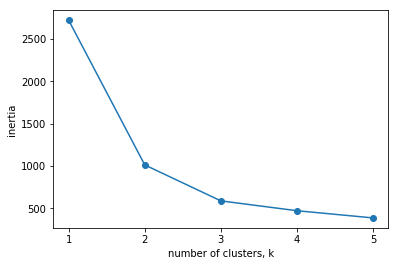

In [62]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show();

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

## Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a **cross-tabulation**.

You have the array `samples` of grain samples, and a list `varieties` giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [63]:
varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']


In [64]:
varieties[:10]

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat']

In [67]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
# Using .fit_predict() is the same as using .fit() followed by .predict().
labels = model.fit_predict(samples)
labels[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [68]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
df.head()

,labels,varieties
0,2,Kama wheat
1,2,Kama wheat
2,2,Kama wheat
3,2,Kama wheat
4,2,Kama wheat


In [69]:
# Create crosstab: ct to count the number of times each grain variety coincides with each cluster label
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,68,9,0
2,2,60,10


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything you can do in such situations to improve your clustering?

## Scaling fish data for clustering

You are given an array `samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very **different scales**. In order to cluster this data effectively, you'll need to **standardize these features** first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://jse.amstat.org/jse_data_archive.htm).

In [70]:
samples = np.array([[242.0, 23.2, 25.4, 30.0, 38.4, 13.4],
 [290.0, 24.0, 26.3, 31.2, 40.0, 13.8],
 [340.0, 23.9, 26.5, 31.1, 39.8, 15.1],
 [363.0, 26.3, 29.0, 33.5, 38.0, 13.3],
 [430.0, 26.5, 29.0, 34.0, 36.6, 15.1],
 [450.0, 26.8, 29.7, 34.7, 39.2, 14.2],
 [500.0, 26.8, 29.7, 34.5, 41.1, 15.3],
 [390.0, 27.6, 30.0, 35.0, 36.2, 13.4],
 [450.0, 27.6, 30.0, 35.1, 39.9, 13.8],
 [500.0, 28.5, 30.7, 36.2, 39.3, 13.7],
 [475.0, 28.4, 31.0, 36.2, 39.4, 14.1],
 [500.0, 28.7, 31.0, 36.2, 39.7, 13.3],
 [500.0, 29.1, 31.5, 36.4, 37.8, 12.0],
 [600.0, 29.4, 32.0, 37.2, 40.2, 13.9],
 [600.0, 29.4, 32.0, 37.2, 41.5, 15.0],
 [700.0, 30.4, 33.0, 38.3, 38.8, 13.8],
 [700.0, 30.4, 33.0, 38.5, 38.8, 13.5],
 [610.0, 30.9, 33.5, 38.6, 40.5, 13.3],
 [650.0, 31.0, 33.5, 38.7, 37.4, 14.8],
 [575.0, 31.3, 34.0, 39.5, 38.3, 14.1],
 [685.0, 31.4, 34.0, 39.2, 40.8, 13.7],
 [620.0, 31.5, 34.5, 39.7, 39.1, 13.3],
 [680.0, 31.8, 35.0, 40.6, 38.1, 15.1],
 [700.0, 31.9, 35.0, 40.5, 40.1, 13.8],
 [725.0, 31.8, 35.0, 40.9, 40.0, 14.8],
 [720.0, 32.0, 35.0, 40.6, 40.3, 15.0],
 [714.0, 32.7, 36.0, 41.5, 39.8, 14.1],
 [850.0, 32.8, 36.0, 41.6, 40.6, 14.9],
 [1000.0, 33.5, 37.0, 42.6, 44.5, 15.5],
 [920.0, 35.0, 38.5, 44.1, 40.9, 14.3],
 [955.0, 35.0, 38.5, 44.0, 41.1, 14.3],
 [925.0, 36.2, 39.5, 45.3, 41.4, 14.9],
 [975.0, 37.4, 41.0, 45.9, 40.6, 14.7],
 [950.0, 38.0, 41.0, 46.5, 37.9, 13.7],
 [40.0, 12.9, 14.1, 16.2, 25.6, 14.0],
 [69.0, 16.5, 18.2, 20.3, 26.1, 13.9],
 [78.0, 17.5, 18.8, 21.2, 26.3, 13.7],
 [87.0, 18.2, 19.8, 22.2, 25.3, 14.3],
 [120.0, 18.6, 20.0, 22.2, 28.0, 16.1],
 [0.0, 19.0, 20.5, 22.8, 28.4, 14.7],
 [110.0, 19.1, 20.8, 23.1, 26.7, 14.7],
 [120.0, 19.4, 21.0, 23.7, 25.8, 13.9],
 [150.0, 20.4, 22.0, 24.7, 23.5, 15.2],
 [145.0, 20.5, 22.0, 24.3, 27.3, 14.6],
 [160.0, 20.5, 22.5, 25.3, 27.8, 15.1],
 [140.0, 21.0, 22.5, 25.0, 26.2, 13.3],
 [160.0, 21.1, 22.5, 25.0, 25.6, 15.2],
 [169.0, 22.0, 24.0, 27.2, 27.7, 14.1],
 [161.0, 22.0, 23.4, 26.7, 25.9, 13.6],
 [200.0, 22.1, 23.5, 26.8, 27.6, 15.4],
 [180.0, 23.6, 25.2, 27.9, 25.4, 14.0],
 [290.0, 24.0, 26.0, 29.2, 30.4, 15.4],
 [272.0, 25.0, 27.0, 30.6, 28.0, 15.6],
 [390.0, 29.5, 31.7, 35.0, 27.1, 15.3],
 [6.7, 9.3, 9.8, 10.8, 16.1, 9.7],
 [7.5, 10.0, 10.5, 11.6, 17.0, 10.0],
 [7.0, 10.1, 10.6, 11.6, 14.9, 9.9],
 [9.7, 10.4, 11.0, 12.0, 18.3, 11.5],
 [9.8, 10.7, 11.2, 12.4, 16.8, 10.3],
 [8.7, 10.8, 11.3, 12.6, 15.7, 10.2],
 [10.0, 11.3, 11.8, 13.1, 16.9, 9.8],
 [9.9, 11.3, 11.8, 13.1, 16.9, 8.9],
 [9.8, 11.4, 12.0, 13.2, 16.7, 8.7],
 [12.2, 11.5, 12.2, 13.4, 15.6, 10.4],
 [13.4, 11.7, 12.4, 13.5, 18.0, 9.4],
 [12.2, 12.1, 13.0, 13.8, 16.5, 9.1],
 [19.7, 13.2, 14.3, 15.2, 18.9, 13.6],
 [19.9, 13.8, 15.0, 16.2, 18.1, 11.6],
 [200.0, 30.0, 32.3, 34.8, 16.0, 9.7],
 [300.0, 31.7, 34.0, 37.8, 15.1, 11.0],
 [300.0, 32.7, 35.0, 38.8, 15.3, 11.3],
 [300.0, 34.8, 37.3, 39.8, 15.8, 10.1],
 [430.0, 35.5, 38.0, 40.5, 18.0, 11.3],
 [345.0, 36.0, 38.5, 41.0, 15.6, 9.7],
 [456.0, 40.0, 42.5, 45.5, 16.0, 9.5],
 [510.0, 40.0, 42.5, 45.5, 15.0, 9.8],
 [540.0, 40.1, 43.0, 45.8, 17.0, 11.2],
 [500.0, 42.0, 45.0, 48.0, 14.5, 10.2],
 [567.0, 43.2, 46.0, 48.7, 16.0, 10.0],
 [770.0, 44.8, 48.0, 51.2, 15.0, 10.5],
 [950.0, 48.3, 51.7, 55.1, 16.2, 11.2],
 [1250.0, 52.0, 56.0, 59.7, 17.9, 11.7],
 [1600.0, 56.0, 60.0, 64.0, 15.0, 9.6],
 [1550.0, 56.0, 60.0, 64.0, 15.0, 9.6],
 [1650.0, 59.0, 63.4, 68.0, 15.9, 11.0]])

In [71]:
samples[:10]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1],
       [450. ,  26.8,  29.7,  34.7,  39.2,  14.2],
       [500. ,  26.8,  29.7,  34.5,  41.1,  15.3],
       [390. ,  27.6,  30. ,  35. ,  36.2,  13.4],
       [450. ,  27.6,  30. ,  35.1,  39.9,  13.8],
       [500. ,  28.5,  30.7,  36.2,  39.3,  13.7]])

In [72]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

## Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a **cross-tabulation** to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as `pipeline`, and the species of every fish sample is given by the list `species`.

In [73]:
species = ['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike']
species[:10]

['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream']

In [74]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0    17      0      0
2            0     0      0     13
3            1     0     19      1


## Clustering stocks using KMeans

In this exercise, you'll cluster companies using their **daily stock price movements** (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` **standardizes features** (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` **rescales each sample** - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [75]:
movements = np.array([[0.5799999999999841,
  -0.22000499999998624,
  -3.4099980000000016,
  -1.1699999999999875,
  1.680010999999979,
  -2.6899940000000413,
  -1.4699939999999856,
  2.7799970000000087,
  -0.6800029999999708,
  -4.999995000000013,
  6.709992999999997,
  -3.18000600000002,
  -4.009997999999996,
  -9.030006000000013,
  0.5599999999999739,
  -0.010000000000019328,
  1.0300100000000043,
  -5.640008999999992,
  -9.019993,
  2.3600010000000107,
  -0.05000100000000885,
  4.060000000000001,
  -4.680000000000007,
  2.8299979999999887,
  -1.5700090000000273,
  -0.22999199999998154,
  -0.7699899999999786,
  3.7899930000000097,
  2.269997999999987,
  1.459993999999995,
  -1.6399979999999914,
  1.3000030000000038,
  -0.19000500000001352,
  -1.9200040000000056,
  -2.9399999999999977,
  2.4300020000000018,
  4.619998999999979,
  2.2399979999999857,
  3.240007999999989,
  -1.0799980000000176,
  0.3899959999999965,
  1.4300059999999633,
  4.009998999999965,
  -0.930008000000015,
  4.710001000000034,
  1.009997000000027,
  1.5900100000000066,
  -0.7700040000000001,
  -1.5400089999999975,
  0.2699930000000279,
  -0.7799910000000239,
  0.5500000000000114,
  -2.5400049999999794,
  4.28000499999996,
  2.719982000000016,
  1.7299999999999898,
  -4.270004,
  1.9500050000000044,
  -0.6099999999999852,
  -0.7500039999999899,
  -0.4899979999999857,
  -1.440006000000011,
  3.5099869999999957,
  1.3400040000000215,
  1.0500109999999836,
  -0.4899970000000167,
  0.3599810000000048,
  0.09001599999996301,
  0.5700000000000216,
  0.4099959999999783,
  3.1400189999999952,
  -1.1699859999999944,
  0.040000999999961095,
  -3.9499969999999958,
  0.4200099999999338,
  8.229988000000048,
  2.8399850000000133,
  -2.380000999999993,
  -5.230000000000018,
  -1.6499979999999823,
  5.619994999999959,
  -8.220000999999968,
  2.5099910000000136,
  -4.210002999999971,
  2.9599879999999814,
  -7.580013000000008,
  -7.8500069999999775,
  3.7400049999999685,
  4.680001000000061,
  2.8499990000000253,
  -4.859978000000012,
  -1.340003999999993,
  -0.4800109999999904,
  -4.619999000000006,
  -1.1600000000000248,
  -4.120013999999942,
  9.50000399999999,
  -0.5200120000000084,
  5.870013999999969,
  -5.970015999999987,
  2.7499960000000097,
  -2.5099910000000136,
  1.1399999999999864,
  -0.5900000000000318,
  -2.0600209999999493,
  -2.2499840000000115,
  -7.3499950000000345,
  -3.909996000000007,
  -8.269988999999953,
  5.670010000000019,
  5.27998800000006,
  -1.680011999999948,
  4.049999000000014,
  6.1499939999999915,
  1.2699890000000664,
  1.8200149999999555,
  -7.519985000000019,
  1.6899990000000005,
  -3.610014999999976,
  -2.000018999999952,
  -3.360023999999953,
  1.3699910000000273,
  -7.950008000000025,
  -5.179985000000016,
  -5.819999000000024,
  -3.550013999999948,
  -2.3700139999999976,
  8.180001000000033,
  -4.3900070000000255,
  2.729995000000031,
  -1.2400020000000043,
  -4.5199969999999885,
  3.350009999999969,
  3.2199940000000136,
  -3.2799950000000138,
  -4.299992000000003,
  8.990005999999994,
  -10.849995000000007,
  1.3400039999999651,
  2.8499990000000253,
  -0.7199899999999957,
  3.2100059999999644,
  -2.7099959999999896,
  -2.600006000000008,
  1.3600040000000035,
  1.4099919999999884,
  0.9199939999999742,
  0.14000299999997878,
  -0.02998799999994617,
  0.3100210000000061,
  0.2699930000000563,
  -0.4400100000000293,
  -5.209998999999981,
  5.100009999999969,
  -2.5500179999999943,
  0.06000099999999975,
  1.890004000000005,
  0.7100030000000004,
  -2.9599880000000383,
  0.2499920000000202,
  -5.9900169999999955,
  -2.739983000000024,
  4.849991000000017,
  -5.1699979999999925,
  -0.12998900000002322,
  1.7399859999999876,
  1.2500149999999906,
  2.860012000000012,
  0.9099809999999876,
  3.680004000000025,
  1.1700139999999235,
  3.1400189999999952,
  -1.9700050000000149,
  0.22000500000001466,
  1.2200010000000248,
  1.8500030000000152,
  2.0499800000000046,
  6.329997999999988,
  -2.319999999999993,
  7.150016999999992,
  -0.09001499999999396,
  5.040008999999999,
  2.589993000000049,
  0.21997799999996914,
  -2.82001200000002,
  -4.909991999999988,
  0.14000300000003565,
  -5.25,
  -3.629989999999964,
  -2.960014000000001,
  6.939999,
  -0.39998299999996334,
  -1.1199989999999502,
  2.3599999999999572,
  0.620014000000026,
  3.13000500000004,
  -0.060001000000056585,
  0.619987999999978,
  7.300006999999938,
  -0.4700239999999667,
  6.089991999999938,
  1.5299949999999851,
  -2.8399850000000133,
  -1.6000099999999975,
  -0.2500190000000089,
  1.1800009999999477,
  0.18000399999999672,
  -2.7100220000000377,
  -3.2500069999999823,
  1.9599920000000568,
  2.3600000000000136,
  1.4299929999999677,
  2.8200110000000222,
  -0.8599930000000313,
  1.4200060000000008,
  -4.9699939999999865,
  1.3899920000000066,
  1.6499979999999823,
  -7.970009000000005,
  -1.4200060000000008,
  -4.130000999999994,
  -0.7000159999999482,
  3.2300070000000005,
  -1.2400020000000043,
  6.6799930000000245,
  -1.7199860000000626,
  2.799984000000052,
  1.260001999999986,
  1.3699920000000247,
  -2.389988000000073,
  1.1300119999999652,
  0.6200139999999692,
  0.4299959999999601,
  1.5099950000000035,
  -5.589981000000024,
  1.379978000000051,
  -2.369987999999978,
  0.909981000000016,
  -2.6999810000000366,
  -1.4400060000000394,
  0.3599810000000616,
  0.16000300000001744,
  -1.0199969999999894,
  0.6100000000000136,
  1.2000009999999859,
  0.7999910000000341,
  -1.3999790000000305,
  1.830001999999979,
  -0.4399829999999838,
  -0.929980999999998,
  -1.819989000000021,
  -0.3899950000000558,
  3.9299970000000144,
  -1.14998700000001,
  4.450008999999966,
  -0.9900090000000432,
  2.1300090000000296,
  3.620002999999997,
  -3.2399939999999674,
  1.1700139999999806,
  0.5200120000000084,
  2.589992999999936,
  11.130000999999993,
  -9.509990000000016,
  -3.74999200000002,
  -7.0499880000000426,
  10.58000199999998,
  5.069996000000003,
  0.8900069999999687,
  -0.5699999999999932,
  -8.069984999999974,
  3.5200009999999797,
  3.7300180000000296,
  -0.12998900000002322,
  -0.3599819999999454,
  2.860011999999984,
  3.989997999999957,
  1.5200080000000185,
  2.9700010000000248,
  -2.8499989999999684,
  2.1000209999999697,
  2.389987000000019,
  0.710002999999972,
  2.3299860000000194,
  1.0500109999999836,
  -8.14998600000007,
  -3.540000999999961,
  3.8499939999999815,
  -1.1400000000000432,
  2.9000130000000013,
  1.9700049999999576,
  -6.160006999999951,
  2.1599959999999783,
  2.370013999999969,
  -0.07001499999995531,
  -6.040004999999951,
  0.8500060000000076,
  -2.2199970000000353,
  -2.450015999999948,
  6.659991999999987,
  0.3800079999999753,
  3.329983000000027,
  -11.989993999999967,
  -2.1900100000000293,
  -6.4600149999999426,
  3.309982000000048,
  -1.3599779999999555,
  -0.0899890000000596,
  3.1200179999999587,
  3.4700129999999945,
  -2.7099949999999358,
  3.2999949999999667,
  -2.009979000000044,
  2.1500090000000114,
  -6.550003000000004,
  -3.1199909999999704,
  1.8999900000000596,
  -3.1800199999999563,
  -0.020001000000036132,
  -4.860005000000001,
  -3.2600209999999947,
  1.910004000000015,
  1.1099859999999353,
  -2.380000999999993,
  -5.8400009999999725,
  5.750010999999972,
  4.760002000000043,
  -1.099997999999971,
  -4.300018999999963,
  2.669993999999974,
  -3.1999930000000063,
  -2.090008000000012,
  0.5599860000000376,
  3.349983999999949,
  -3.4599989999999248,
  0.21001800000004775,
  1.3100169999999594,
  -1.6499979999999823,
  -3.030001999999968,
  -0.2600060000000326,
  0.5600129999999695,
  -1.7900010000000748,
  0.44999699999993936,
  -5.160010999999997,
  -5.9000010000000325,
  4.140013999999951,
  3.3999979999999823,
  -1.5499960000000217,
  -4.339991999999995,
  4.429980999999998,
  -3.3099830000000448,
  3.349983000000009,
  -0.9700090000000046,
  2.6099929999999745,
  6.729980000000013,
  -3.359996000000024,
  -0.4000090000000114,
  0.2600060000000326,
  -7.660014999999987,
  -6.130020999999998,
  0.4599839999999631,
  -1.7600140000000124,
  -4.649986000000013,
  -0.6000140000000442,
  2.44000299999999,
  -3.0000149999999617,
  -1.7400129999999765,
  -8.730025999999953,
  -2.0399939999999788,
  8.61998299999999,
  -2.549991000000034,
  12.290000999999961,
  -5.019981000000031,
  4.449980999999981,
  1.6099970000000212,
  -1.9999919999999636,
  0.9700090000000046,
  7.309994000000018,
  6.430000000000009,
  2.8099980000000078,
  2.530017999999984,
  6.369999000000008,
  -2.3400010000000293,
  0.22000500000001466,
  -0.3099929999999631,
  -3.2399939999999674,
  3.7499919999999634,
  8.370017999999959,
  -1.1500130000000013,
  -9.219997000000037,
  0.34000700000001416,
  4.9800070000000005,
  8.14998700000001,
  3.410010999999997,
  -7.999996000000009,
  0.200004999999976,
  2.8399850000000133,
  -1.0300100000000043,
  -8.740013000000031,
  1.5899970000000394,
  -12.040008,
  -6.819995000000006,
  -8.479980000000069,
  12.710010000000011,
  -7.459984000000019,
  3.180019000000016,
  -1.0799979999999891,
  3.780007000000012,
  -1.039997000000028,
  -1.8700029999999968,
  -4.789988999999991,
  -6.1400070000000255,
  -8.070010999999965,
  13.300010999999984,
  2.7100220000000377,
  8.640011000000014,
  12.410002999999962,
  1.7900009999999609,
  1.7399859999999876,
  -5.739998000000013,
  -4.789989000000047,
  -0.6900019999999927,
  12.37000299999994,
  -1.6300239999999349,
  1.7400129999999765,
  -6.450001000000043,
  6.939999,
  2.4800030000000106,
  2.2799989999999752,
  1.5299949999999851,
  4.960007000000019,
  14.630000999999993,
  -1.8000139999999758,
  -7.499985000000037,
  0.790004999999951,
  4.019985000000021,
  3.31000899999998,
  -9.469989999999939,
  -3.179992000000027,
  -11.349980000000016,
  -5.799999000000013,
  -5.769985000000019,
  -2.069979999999987,
  10.389984000000027,
  4.039985999999999,
  -5.980003999999951,
  9.719982000000016,
  7.719988999999997,
  -5.149998000000039,
  3.4499860000000813,
  5.169998000000022,
  -1.75,
  0.4800110000000473,
  -2.7299959999999714,
  -4.689987000000031,
  -5.229999000000022,
  9.590018999999984,
  -7.259978999999987,
  -1.1600000000000248,
  -2.8699989999999502,
  1.949978000000044,
  2.3600010000000107,
  -0.8999939999999924,
  -2.680007999999986,
  4.0000120000000265,
  -1.7900009999999609,
  -0.18000400000005354,
  4.019985000000021,
  -1.6899989999999434,
  -11.809990000000086,
  -1.990005999999994,
  -4.259991000000014,
  8.029983000000017,
  -4.4799959999999714,
  -6.570002999999929,
  -3.9799839999999445,
  -1.3900179999999978,
  5.490006000000052,
  -7.519985000000019,
  -4.849989999999991,
  3.770019000000048,
  -2.640007000000025,
  0.9099800000000188,
  5.390002999999979,
  -0.12998900000002322,
  -0.4799839999999449,
  -1.5600089999999796,
  -0.8399930000000495,
  -0.7900050000000078,
  0.7700040000000286,
  0.1600029999999606,
  -4.190001999999994,
  -6.510001999999987,
  -4.390006999999969,
  0.6599880000000553,
  -0.2600060000000326,
  8.189986999999974,
  -0.2399790000000053,
  1.5499950000000242,
  3.6400040000000335,
  3.4300120000000334,
  -4.250003999999991,
  1.7200129999999945,
  1.4899939999999674,
  1.830002000000036,
  3.4399990000000567,
  3.079990000000066,
  2.6299939999999538,
  -3.769992000000002,
  -2.669993999999974,
  -0.1300160000000119,
  -0.8900070000000255,
  0.11001600000003008,
  0.5000120000000265,
  2.1500089999999545,
  -2.4000009999999747,
  -7.1899910000000204,
  4.740001999999947,
  -4.6900139999999615,
  -7.779991000000052,
  -3.7300179999999727,
  2.9400139999999624,
  7.300006999999994,
  0.8900069999999118,
  -2.2200240000000235,
  -0.7799909999999954,
  2.3799740000000043,
  5.58998100000008,
  3.5800009999999816,
  6.180008000000044,
  12.410004000000017,
  2.45997600000004,
  3.0700299999999743,
  4.800003000000004,
  -16.59001999999998,
  10.70999100000006,
  -0.9899829999999952,
  7.970008000000008,
  -0.04000100000007478,
  1.309989999999971,
  2.7399829999998246,
  4.450034999999957,
  7.449997000000052,
  0.8800200000000586,
  -3.7000049999999187,
  0.9399950000000672,
  -12.25998600000014,
  6.5999910000000455,
  -6.109993000000144,
  7.299979999999891,
  0.9600219999999808,
  3.0199890000000096,
  10.559974000000011,
  11.529983000000017,
  -14.049986999999875,
  0.8500059999998939,
  2.7299960000000283,
  6.449973999999997,
  -0.24000500000011016,
  1.5600350000000844,
  -4.439993999999956,
  7.189963999999918,
  8.300003000000059,
  -0.7599640000000818,
  -2.92001300000004,
  -9.219969999999877,
  16.800011000000037,
  2.019965999999954,
  -0.040000999999961095,
  6.699966000000018,
  10.099991000000044,
  -11.48998199999994,
  -9.999961999999982,
  -2.230011000000104,
  -18.880004999999983,
  -29.92997800000001,
  30.760008999999968,
  -5.379989000000024,
  -12.779999000000089,
  -18.399993999999992,
  1.0899580000000242,
  -2.32998699999996,
  -5.639968999999951,
  -6.569977000000107,
  -2.069953999999939,
  -13.820023000000106,
  -2.7699959999999915,
  5.739996999999902,
  -8.679984999999986,
  -11.830016999999998,
  7.979995000000031,
  -1.3999790000000305,
  5.480017999999973,
  -4.060012999999913,
  1.7099990000000391,
  -4.350005999999893,
  -8.280029000000013,
  -7.9700090000001165,
  -15.189988000000087,
  -3.5800010000000384,
  26.77999900000009,
  -12.579994000000054,
  13.059951999999953,
  -10.549987999999985,
  -2.3000260000000026,
  1.369965000000093,
  9.970001000000137,
  -3.0100019999998717,
  -8.170012999999926,
  2.78997000000004,
  1.5600359999999682,
  3.690018000000009,
  -5.570007999999916,
  8.719985999999949,
  -16.55001900000002,
  1.7000120000000152,
  -2.3600010000000107,
  0.2899939999999788,
  3.1300050000000965,
  14.819992000000068,
  4.010024999999929,
  -2.470016000000101,
  -7.7700040000000845,
  3.059989000000087,
  -6.529974999999922,
  0.7000429999999369,
  -0.5000380000001314,
  -2.6200330000000354,
  6.0000300000001525,
  7.7899779999999055,
  4.5299839999998985,
  9.37997500000006,
  -1.210014000000001,
  8.589997000000041,
  -9.759956000000102,
  -1.6899710000000143,
  -1.3400040000000215,
  2.0200190000000475,
  1.7900010000000748,
  -3.8500209999999697,
  -0.32999500000005355,
  3.040016000000037,
  -8.729972999999973,
  9.430015999999911,
  -6.460014999999999,
  0.5100250000000415,
  -4.880004999999984,
  10.149978000000033,
  4.1100009999998965,
  7.52999900000009,
  -9.10002099999997,
  4.949966999999901,
  2.0700070000000323,
  5.259987000000023,
  -1.8599619999998824,
  0.4700239999999667,
  2.8800119999999647,
  2.9899749999999585,
  6.609978000000068,
  -0.17997800000000552,
  -0.4700240000000804,
  5.1299980000000005,
  8.109985999999935,
  15.1400000000001,
  -14.76001800000006,
  14.449996999999941,
  -3.4799719999999748,
  3.709991000000058,
  -4.310006000000044,
  -0.17997699999989436,
  -1.7800139999999374,
  -6.7700349999998926,
  -2.009979999999928,
  9.209984000000077,
  -5.33998900000006,
  3.099990999999932,
  2.3899619999999686,
  -17.710045000000036,
  -4.519996999999876,
  2.9400400000000677,
  5.6100079999999934,
  1.3200299999999745,
  0.4300239999998894,
  2.030006999999955,
  1.8400419999999256,
  -0.4599839999999631,
  -2.3199990000000525,
  3.9300230000001193,
  -14.7200160000001,
  -3.5600279999999884,
  17.029976000000033,
  -11.64998700000001,
  -11.769988999999896,
  -0.5000380000000177,
  6.589950999999927,
  -4.450035000000072,
  -12.610008999999993,
  -8.709999999999923,
  -2.800010000000043,
  1.1700129999999265,
  -18.399993999999992,
  0.15001699999993434,
  2.4099879999999985,
  14.419983000000002,
  -4.260016999999948,
  -6.950012000000014,
  -21.209991999999946,
  21.610000999999894,
  -17.640030000000134,
  -4.610039000000029,
  -10.459998999999923,
  -5.430030999999985,
  0.4400100000000293,
  -1.6799850000001015,
  -19.08999600000004,
  1.0999990000000253,
  -7.380035000000022,
  -15.839988000000062,
  -22.879989000000137,
  6.63999200000012,
  -11.319991999999955,
  3.989997999999901,
  -8.620010000000093,
  -11.910018999999918,
  2.4800030000000106,
  25.020011999999948,
  -11.000038000000133,
  -2.549964999999929,
  4.330032000000074,
  13.63000499999987,
  -4.76998900000001,
  5.670037000000093,
  -0.8600459999998975,
  -1.5099950000000035,
  -7.459983999999963,
  -5.950042000000052,
  -30.119995000000014,
  18.299965000000046,
  -20.14999399999988,
  4.819976999999994,
  1.6200110000000905,
  -8.769974000000047,
  -1.4600070000000187,
  -4.9600059999999635,
  9.899986000000013,
  8.900017000000046,
  -5.16001099999994,
  -8.269988999999896,
  6.860022999999956,
  -0.1800309999999854,
  -6.0000310000000345,
  1.5200350000000071,
  -0.7000430000000506,
  21.640015000000005,
  -4.790015999999923,
  -5.779998999999975,
  -9.970002000000024,
  1.900017000000048,
  -3.899955999999975,
  -5.400017000000048,
  -5.040008999999942,
  -0.6999890000000732,
  -0.9300080000000436,
  -12.379990000000019,
  11.449981999999919,
  -7.629975000000003,
  1.4800340000000458,
  0.2099910000000591,
  5.200011999999958,
  -9.500031000000037,
  -11.810016999999961,
  12.000007999999927,
  -0.23001900000002706,
  -0.16999000000004116,
  -1.4900209999999563,
  -5.490005999999937,
  -11.589984000000017,
  13.790008999999998,
  0.8800199999999451,
  4.9699939999999865,
  0.9799950000000308,
  3.4300380000000814,
  -11.609985000000053,
  -0.20000400000003535,
  2.070007999999973,
  -8.689971999999955,
  -1.1099849999999378,
  -8.839989000000061,
  0.06000099999999975,
  1.5599830000000452,
  -11.050026000000004,
  5.149997999999981,
  -3.860035000000096,
  -2.6499939999999924,
  -7.529998000000035,
  -7.750003999999991,
  9.659980999999961,
  -8.850002000000075,
  6.080005999999969,
  1.9199899999999277,
  8.119999000000009,
  -7.170016999999973,
  -0.10000199999996084,
  -0.3300209999999879,
  5.73001099999999,
  14.27001899999999,
  -5.01004800000004,
  -5.339988000000004,
  2.5099639999999686,
  7.329994000000057,
  -1.109986000000049,
  -4.300017999999966,
  -4.380020000000002,
  -7.160003999999957,
  -12.989990000000036,
  2.1900099999999725,
  0.6199869999999805,
  -6.040004999999951,
  -1.3000030000000606,
  1.3600040000000035,
  0.6199880000000348,
  7.590000999999972,
  0.6100000000000136,
  -4.349979000000019,
  -7.1499900000000585,
  4.670012999999983,
  -17.46998599999995,
  -12.940001999999993,
  2.5600050000000465,
  6.030017999999983,
  2.1399959999999965,
  11.919979000000012,
  -2.8499990000000253,
  7.389994999999999,
  9.669994000000033,
  7.679988999999978,
  -5.169998000000078,
  3.7400059999999935,
  -1.3299630000000209,
  5.000007999999981,
  -6.309996999999952,
  4.80000299999989,
  -3.0400159999999796,
  -5.0000069999999255,
  3.2300339999999887,
  -9.990002000000004,
  -10.310009000000091,
  11.340018999999984,
  -5.7899850000000574,
  11.020012000000007,
  1.509994000000006,
  -2.7000079999999684,
  6.189994000000071,
  4.299992000000032,
  -8.460007000000019,
  4.949993000000006,
  5.929988999999978,
  -2.769997000000103,
  -0.009986999999966885,
  -3.9099959999999774,
  -0.5400120000000471,
  -7.010014000000013,
  5.310001000000001,
  -5.839999999999975,
  1.8599889999999848,
  -7.309993000000019,
  3.459998999999982,
  -5.350001999999961,
  0.5600129999999695,
  0.20999099999988854,
  -8.400005000000078,
  -2.4600029999999715,
  -4.989994000000023,
  -4.860004000000004,
  -3.0700030000000424,
  -5.830012999999951,
  -5.470005000000015,
  5.169998000000022,
  6.530002999999965,
  8.529993999999986,
  -0.06000099999999975,
  -2.9700020000000222,
  -5.059981999999991,
  8.75,
  1.130012000000022,
  4.339991999999995,
  -1.1400000000000432,
  2.4300149999999694,
  3.6800039999999967,
  0.6100009999999543,
  -1.6200110000000336,
  -8.150013000000001,
  -3.1500049999999646,
  -7.010014000000013,
  1.5800089999999614,
  -2.19999699999994,
  5.6900099999999725,
  6.990013999999974,
  3.3600240000000094,
  -2.4600289999999627,
  0.9300080000000436,
  4.529984000000127,
  4.760001999999986,
  -2.7699960000000488,
  1.1800000000000068,
  -2.8499990000000253,
  -4.190002999999933,
  10.5,
  18.62995899999998,
  0.619987999999978,
  1.4899679999999762,
  2.1800229999999488,
  3.4000240000000304,
  -8.63998399999997,
  -1.2299879999999916,
  -2.020019999999988,
  -2.249984999999981,
  2.2200239999999667,
  -9.41004200000009,
  4.89997900000003,
  0.049987999999984815,
  -4.779976000000033,
  -4.5199969999999325,
  -0.8699799999999982,
  -4.9800339999999315,
  -0.21997900000002346,
  1.1699599999999464,
  -11.55999799999995,
  0.6999889999999596,
  4.190002999999933,
  -4.4399949999999535,
  -10.879981999999929,
  7.3600079999999934,
  1.5000079999999798,
  1.5999830000000088,
  -10.589988000000004,
  -5.4599909999998895,
  -5.779999000000032,
  -7.6699760000000765,
  0.21997900000002346,
  -1.0299830000000156,
  -0.5000380000000746,
  9.510018000000061,
  3.9299700000000257,
  -7.100029000000006,
  -0.8299789999999803,
  1.1900400000000104,
  -9.000045,
  1.9500049999999758,
  -1.6799849999999308,
  5.819999999999991,
  6.209969000000057,
  1.1699600000000032,
  0.32000799999997304,
  4.5199969999999885,
  2.8999870000000096,
  9.590019000000039,
  -6.540016000000037,
  5.959975999999982,
  6.910011000000054,
  -5.359961999999996,
  0.8400189999999839,
  -19.58998099999997],
 [-0.6400020000000026,
  -0.6500000000000021,
  -0.21000100000000188,
  -0.4200000000000017,
  0.7100010000000019,
  -0.20000100000000032,
  -1.130001,
  0.06999899999999926,
  -0.1199989999999964,
  -0.5,
  0.20000100000000032,
  -0.09999999999999787,
  -0.4600010000000019,
  -1.1900010000000023,
  -0.6499999999999986,
  -1.3000010000000015,
  0.4299999999999997,
  -1.6900000000000013,
  -0.3000010000000017,
  -0.41999999999999815,
  -0.0200010000000006,
  -0.09999799999999937,
  -0.9400010000000024,
  -0.08999999999999986,
  -0.25,
  0.7600000000000016,
  3.710001000000002,
  -0.20000100000000032,
  1.0,
  0.0,
  -0.6300010000000036,
  0.2999989999999997,
  -0.009999999999998009,
  1.5400010000000002,
  -1.4599989999999965,
  0.8299999999999983,
  0.06999899999999926,
  -0.9000000000000021,
  -2.1799979999999977,
  -0.8999989999999976,
  -0.2300020000000025,
  1.619999,
  1.1399989999999958,
  -0.3299999999999983,
  4.3800010000000045,
  2.3400000000000034,
  -2.5,
  -1.8699980000000025,
  -0.18999799999999567,
  -1.1799999999999995,
  -0.07000000000000027,
  -0.20000100000000745,
  0.0,
  -0.4300010000000043,
  -0.3700030000000041,
  0.1600000000000037,
  0.7999989999999997,
  -0.6200030000000041,
  -0.20000100000000032,
  -0.6700020000000038,
  0.18999799999999567,
  -0.139998999999996,
  0.630001,
  0.4199979999999925,
  3.169998999999997,
  -2.329997999999996,
  -0.0200010000000006,
  2.0900000000000034,
  -1.1599989999999991,
  -0.6499969999999919,
  0.0,
  -0.9099989999999992,
  0.34999799999999937,
  2.010002,
  -0.8699980000000025,
  2.509997999999996,
  0.6500010000000032,
  -0.31000200000000433,
  -4.810001000000001,
  0.9499969999999962,
  -0.2700000000000031,
  -1.5499989999999997,
  0.010002000000007172,
  -0.4500010000000003,
  0.7000010000000003,
  -1.0299989999999966,
  0.630001,
  -0.29000000000000625,
  2.2799979999999915,
  -2.419998,
  -0.8999969999999989,
  -0.25,
  -0.619999,
  -1.6700020000000038,
  0.10000200000000348,
  -1.489998,
  1.7099989999999965,
  -1.7200010000000034,
  1.4600030000000075,
  -1.0700000000000005,
  1.4500010000000003,
  -1.6100010000000042,
  -0.4900020000000041,
  0.75,
  0.010002000000000066,
  0.2999989999999997,
  -0.6799959999999956,
  0.24000099999999944,
  -0.27999899999999656,
  0.5599969999999956,
  0.3200040000000044,
  1.8699990000000002,
  0.6100009999999969,
  0.43999900000000025,
  -0.2700010000000006,
  0.13999999999999346,
  0.38999899999999604,
  -0.2999999999999972,
  -0.20999900000000335,
  -0.9300009999999972,
  0.030003000000000668,
  -0.8499989999999968,
  -1.0999989999999968,
  -0.0899999999999963,
  -0.5299989999999966,
  -0.990002000000004,
  0.0,
  1.5,
  -0.1600000000000037,
  0.4099999999999966,
  -0.15000100000000316,
  1.4300010000000043,
  -0.08000200000000746,
  -0.12999699999999592,
  -1.0500000000000045,
  -0.33000200000000746,
  1.5899999999999963,
  -1.359997,
  0.5400010000000037,
  0.31000100000000685,
  2.0300030000000007,
  0.3100019999999972,
  0.12999699999999592,
  -0.4199979999999925,
  0.1399990000000031,
  0.9400030000000044,
  -0.4599989999999962,
  0.15000100000000316,
  0.12000300000000408,
  0.4099999999999966,
  0.7200009999999963,
  -0.8399999999999963,
  -1.2799989999999966,
  0.01999599999999901,
  -0.5300030000000007,
  -0.3500020000000035,
  -0.17000200000000376,
  0.4600030000000004,
  -1.2900010000000035,
  -0.06000199999999721,
  -0.2299989999999994,
  -0.3699989999999929,
  -0.11999800000000248,
  0.17000200000000376,
  0.9700010000000034,
  -1.1500020000000006,
  0.0899999999999963,
  0.9700009999999964,
  0.3599969999999999,
  0.1800009999999972,
  -0.9000010000000032,
  0.7299999999999969,
  -0.6100009999999969,
  0.09999799999999937,
  -0.040000999999996616,
  -0.7099990000000034,
  0.040000999999996616,
  -0.4100000000000037,
  -0.220002000000008,
  0.9499959999999988,
  -0.049998999999992584,
  -0.8300020000000004,
  -0.4399979999999957,
  0.9299999999999996,
  0.2299989999999994,
  0.049999999999997165,
  0.20999899999999627,
  -0.8500030000000011,
  -0.13000100000000006,
  0.4699979999999968,
  0.4699979999999968,
  0.9300010000000044,
  -0.14000000000000054,
  0.1599999999999966,
  -0.11999899999999285,
  0.9199979999999924,
  0.7399979999999928,
  -0.7800020000000032,
  -0.8299979999999962,
  0.6299969999999959,
  -0.7900010000000037,
  0.2799990000000037,
  -0.5100020000000072,
  -0.3599969999999999,
  -0.8500030000000011,
  1.1899989999999931,
  -0.04000100000000373,
  -0.02000000000000313,
  0.05999699999999564,
  -0.0200010000000006,
  0.0200010000000006,
  1.3900000000000006,
  0.6800010000000043,
  2.420002000000004,
  -0.7799989999999966,
  -1.6799999999999995,
  0.17000200000000376,
  0.009997999999995956,
  -0.3799980000000005,
  0.4299959999999956,
  -0.3500020000000035,
  0.14000000000000054,
  0.3000030000000038,
  0.4300009999999972,
  -0.5,
  -0.7600030000000046,
  0.4899979999999928,
  0.0,
  0.4599989999999962,
  0.2999989999999997,
  0.5200010000000006,
  0.639998999999996,
  1.1699979999999923,
  0.09999799999999937,
  -0.02000000000000313,
  -1.5,
  5.339999999999995,
  1.4400030000000044,
  -0.7200020000000009,
  3.1899980000000028,
  -0.2600020000000001,
  0.6399990000000031,
  0.5800010000000029,
  0.8599969999999999,
  1.0999979999999994,
  0.009997999999995956,
  -1.5899959999999993,
  4.990002000000004,
  -2.529998999999997,
  -1.6399999999999937,
  0.5799979999999962,
  0.11999899999999995,
  -0.2900010000000037,
  -1.2100030000000075,
  4.490002000000004,
  -0.6099999999999994,
  -0.6899990000000003,
  -3.529999000000004,
  1.0700000000000005,
  -1.769995999999999,
  -0.7800020000000032,
  -2.9000020000000006,
  0.2899969999999996,
  -1.8999979999999963,
  -1.970002000000001,
  -1.2599979999999957,
  -1.0599969999999956,
  -0.9799989999999994,
  0.05000000000000426,
  -0.14999799999999652,
  -1.9400030000000044,
  -0.07000000000000027,
  0.3300010000000029,
  0.039996999999999616,
  -0.5099980000000031,
  -0.6599999999999966,
  1.7000000000000028,
  -0.1599999999999966,
  -0.8199989999999957,
  0.3999979999999965,
  0.6100009999999969,
  -0.4799999999999969,
  -0.4500010000000003,
  -0.2600020000000072,
  0.8399999999999963,
  -0.8400000000000034,
  -0.7900010000000037,
  -0.3100009999999997,
  0.5100020000000001,
  -1.7299989999999994,
  -1.4199989999999971,
  -0.6399990000000031,
  0.4699969999999993,
  -0.2700010000000006,
  -0.26000300000000465,
  -0.3900040000000047,
  -0.09000100000000089,
  -0.639998999999996,
  -0.4399980000000028,
  1.25,
  0.9700010000000034,
  0.8399999999999963,
  -1.4099999999999966,
  -0.2999989999999997,
  -1.2900010000000035,
  1.5499989999999997,
  -0.06999900000000281,
  -0.369999,
  -0.369999,
  0.00999899999999343,
  -0.05999699999999564,
  -0.32999799999999624,
  -0.3200000000000003,
  -0.6900030000000044,
  -0.20000100000000032,
  -1.2100030000000004,
  0.7799989999999966,
  -0.4099989999999991,
  -0.20000100000000032,
  -0.23999799999999286,
  -0.18999899999999315,
  -0.04999899999999968,
  -0.3699989999999929,
  -0.1599999999999966,
  -0.2700010000000006,
  -0.4199979999999925,
  -0.6000020000000035,
  -0.12000300000000408,
  -0.2999989999999997,
  -0.7300020000000025,
  0.3000010000000017,
  -0.30999699999999564,
  0.10999799999999738,
  -0.7299989999999994,
  -0.5399989999999981,
  0.029998999999996563,
  0.33000000000000185,
  -0.5999979999999994,
  -0.08999999999999986,
  -1.1799979999999977,
  0.03000100000000216,
  1.039998999999998,
  -0.17999999999999972,
  -0.9799999999999968,
  0.4400010000000023,
  -0.15000200000000066,
  -0.09000000000000341,
  -0.16000000000000014,
  -0.16000000000000014,
  -0.4799989999999994,
  -0.4700009999999999,
  0.010001000000002593,
  0.2600000000000016,
  0.04999899999999968,
  -0.4400010000000023,
  -0.32000200000000234,
  -0.08999999999999986,
  -0.1499990000000011,
  -0.37000000000000105,
  0.03000100000000216,
  0.05999999999999873,
  0.4099989999999991,
  0.8499979999999994,
  0.17000100000000273,
  -0.6000009999999989,
  -0.28000100000000216,
  0.08000200000000035,
  -0.3199989999999993,
  0.12000000000000098,
  0.6300010000000036,
  0.09999799999999937,
  0.24000000000000196,
  -0.1899979999999992,
  0.4099989999999991,
  -0.0999979999999958,
  0.08999999999999986,
  0.08000000000000185,
  0.7300000000000004,
  -0.5200010000000006,
  -0.1700000000000017,
  0.5199979999999975,
  0.12000100000000202,
  -0.5,
  -0.05000100000000174,
  -0.08000000000000185,
  -0.4299999999999997,
  -0.3900010000000016,
  -0.4600010000000019,
  0.1700000000000017,
  0.3299989999999973,
  0.5500010000000017,
  0.10999999999999943,
  -0.009997999999999507,
  0.5699989999999993,
  -0.16999999999999815,
  -0.1199979999999954,
  0.05000100000000174,
  -0.4899999999999984,
  -0.5,
  0.5,
  -1.4799989999999994,
  -0.91,
  -1.16,
  1.0100010000000026,
  -1.5200010000000006,
  1.039998999999998,
  -0.3600010000000005,
  1.130001,
  0.3199989999999993,
  0.21000100000000188,
  -1.3099990000000012,
  -0.16000000000000014,
  -1.0299989999999999,
  1.1000000000000014,
  0.6600000000000001,
  -1.0700000000000005,
  0.5599990000000012,
  1.34,
  0.049999999999997165,
  0.259999999999998,
  -0.41000000000000014,
  -0.5300010000000022,
  0.5899999999999999,
  1.629998999999998,
  -0.3200000000000003,
  -0.8099990000000012,
  0.7000010000000003,
  0.379998999999998,
  0.16000000000000014,
  0.2200009999999999,
  0.22000200000000447,
  -0.13000100000000006,
  -0.010000999999999037,
  -1.6499990000000009,
  -0.7399990000000011,
  0.7800010000000022,
  0.9399990000000004,
  -0.5400010000000037,
  -0.6799999999999997,
  -0.40000200000000063,
  -0.5800000000000018,
  -1.259999999999998,
  0.5099979999999995,
  0.8900020000000026,
  0.6900000000000013,
  -1.1900010000000023,
  0.5500020000000028,
  0.370001000000002,
  1.0200000000000031,
  -0.3999989999999976,
  -0.059998999999997686,
  -1.0300000000000011,
  1.150000000000002,
  -0.7100010000000019,
  0.3099999999999987,
  0.7900010000000037,
  1.1899979999999992,
  -0.6499999999999986,
  0.6999989999999983,
  0.2299989999999994,
  0.2900010000000002,
  -1.129998999999998,
  -0.009999999999998009,
  0.17000100000000273,
  0.19999899999999826,
  0.4400010000000023,
  -0.08999999999999986,
  0.15999899999999911,
  -0.7199990000000014,
  0.19000099999999875,
  0.3900010000000016,
  -0.2299989999999994,
  -0.4399979999999957,
  -0.4799989999999994,
  -0.6200010000000021,
  -0.1600020000000022,
  -0.4599989999999962,
  0.11000000000000297,
  -0.6499999999999986,
  0.11000100000000046,
  -0.19999899999999826,
  0.2299989999999994,
  1.3199989999999993,
  -0.14999999999999858,
  -0.14000000000000054,
  -0.06999899999999926,
  0.6099979999999974,
  0.43999900000000025,
  -1.0599990000000012,
  0.75,
  -0.30999900000000125,
  -0.7000010000000039,
  0.2600010000000026,
  0.019997999999997518,
  -0.08999999999999986,
  -1.0199979999999975,
  0.9800000000000004,
  0.2700010000000006,
  0.02000000000000313,
  -0.1700000000000017,
  -0.3200000000000003,
  -0.8900020000000026,
  0.259999999999998,
  -0.029999000000000112,
  0.3000000000000007,
  -0.03999899999999812,
  0.11999899999999995,
  -0.5099979999999995,
  0.3299999999999983,
  0.6299989999999979,
  0.4200000000000017,
  -0.08999999999999986,
  -0.08999999999999986,
  -0.6200010000000021,
  0.7700010000000006,
  0.13999899999999954,
  0.18000100000000074,
  -0.25,
  0.23000000000000045,
  0.12999899999999798,
  -0.23999999999999844,
  0.2600000000000016,
  0.2300020000000025,
  -0.33000000000000185,
  0.9400000000000012,
  -0.4200010000000027,
  0.41000000000000014,
  -0.20000100000000032,
  -0.2699979999999975,
  0.2900010000000002,
  0.23999900000000096,
  -0.2699999999999996,
  -0.2399989999999974,
  -0.1099989999999984,
  -0.24000000000000196,
  0.7200020000000045,
  -0.10999999999999943,
  0.030000999999998605,
  0.2299989999999994,
  0.16999999999999815,
  -1.41,
  0.3099999999999987,
  0.2899989999999981,
  0.08999999999999986,
  0.06000200000000078,
  0.13999899999999954,
  0.7399990000000011,
  -0.5799999999999983,
  0.19000099999999875,
  -0.28000100000000216,
  -0.20000100000000032,
  -0.22000100000000344,
  0.1199989999999964,
  -0.08999999999999986,
  -0.2199990000000014,
  -0.06999899999999926,
  -0.19000099999999875,
  0.6299989999999979,
  0.030000999999998605,
  -0.19000000000000128,
  0.01999999999999957,
  0.3099989999999977,
  0.2999989999999997,
  -0.029999000000000112,
  0.5500020000000028,
  0.6100010000000005,
  0.3200000000000003,
  -0.5399989999999981,
  1.3900010000000051,
  0.4899969999999954,
  -0.4100020000000022,
  -1.3300000000000018,
  0.10000100000000244,
  1.2099999999999935,
  -0.5499989999999997,
  -0.009999000000000535,
  -0.32999799999999624,
  -0.5299989999999966,
  -0.23999799999999286,
  -0.5200010000000006,
  0.5200000000000031,
  0.33000200000000035,
  0.10000200000000348,
  1.0299989999999966,
  0.5999979999999923,
  -0.4100000000000037,
  0.09000000000000341,
  0.5499989999999997,
  -0.9000020000000077,
  -0.04999899999999968,
  1.34,
  -0.4899979999999999,
  0.3700009999999985,
  -0.25,
  0.10000000000000142,
  -0.40000200000000063,
  -0.2400020000000005,
  -0.6999989999999983,
  -1.490000000000002,
  -0.2600000000000016,
  0.7400000000000021,
  -0.12999900000000153,
  0.24000000000000196,
  0.0,
  -0.1499990000000011,
  0.5400010000000037,
  -0.9300010000000009,
  0.21000100000000188,
  -0.9500010000000004,
  0.28000100000000216,
  1.289998999999998,
  0.7700010000000006,
  -0.3000010000000017,
  0.6000010000000024,
  -1.3200000000000005,
  0.5400010000000037,
  0.24000000000000196,
  0.7100010000000019,
  0.08000000000000185,
  0.3999990000000011,
  0.14000200000000262,
  0.0,
  -0.9499989999999984,
  0.10000100000000244,
  -0.28000100000000216,
  -0.2200009999999999,
  -0.2299989999999994,
  0.35999999999999943,
  0.6300010000000036,
  -0.5400010000000002,
  0.6799999999999962,
  -0.2200000000000024,
  0.07000000000000027,
  -0.4699990000000014,
  -0.31000200000000433,
  -0.1700000000000017,
  -0.06000200000000432,
  0.8000020000000028,
  -0.13999899999999954,
  0.9300000000000032,
  -0.2999989999999961,
  -0.23999999999999844,
  -0.33999999999999986,
  0.509999999999998,
  -0.25,
  -0.6400010000000016,
  -0.07999899999999728,
  0.6800010000000007,
  0.2399989999999974,
  -0.11999899999999995,
  -0.5200010000000006,
  0.12000100000000202,
  0.059998999999997686,
  0.7100010000000054,
  0.0,
  0.20000100000000032,
  0.11999899999999995,
  0.21999699999999933,
  0.6000030000000081,
  0.27999899999999656,
  0.39000000000000057,
  0.4400030000000044,
  0.17999999999999972,
  0.009997999999995956,
  -0.5999989999999968,
  -0.4799999999999969,
  0.14999699999999194,
  0.9400020000000068,
  -0.02999900000000366,
  -0.22000200000000086,
  -0.4299999999999997,
  0.17999999999999972,
  0.2700010000000006,
  0.19000199999999975,
  0.13000100000000006,
  0.4400020000000069,
  -0.399996999999992,
  -0.04999899999999968,
  0.8600009999999969,
  -0.2299999999999969,
  0.4499969999999962,
  0.1899980000000028,
  -0.15000200000000066,
  -0.4599990000000034,
  -0.3200040000000044,
  -0.17000200000000376,
  -0.4599990000000034,
  0.5500040000000013,
  -1.0599969999999956,
  -0.09000000000000341,
  0.1800009999999972,
  -0.11999899999999285,
  0.23999799999999286,
  -0.00999899999999343,
  0.6100009999999969,
  0.4400030000000044,
  0.029998999999996563,
  0.9099999999999966,
  -0.5499989999999997,
  -0.04999899999999968,
  -0.2599990000000005,
  0.14999799999999652,
  0.5800020000000075,
  -0.3400010000000009,
  0.220002000000008,
  0.34999799999999226,
  -1.3099969999999956,
  -0.25,
  -0.27999899999999656,
  -0.07000000000000027,
  -0.24000100000000654,
  -0.2299999999999969,
  0.75,
  0.04999899999999968,
  -1.2700010000000006,
  -0.10000300000000097,
  0.230000000000004,
  -0.7099989999999963,
  -0.6199989999999964,
  0.8199979999999982,
  -0.15999899999999556,
  -0.3099999999999987,
  -0.8300000000000018,
  0.2700010000000006,
  0.4299979999999977,
  0.269999999999996,
  0.06999999999999318,
  0.04999899999999968,
  0.08000200000000035,
  0.2600020000000072,
  -0.369999,
  0.3899990000000031,
  0.5999979999999994,
  -0.2700010000000006,
  -0.22000100000000344,
  0.09999899999999684,
  0.25999899999999343,
  -0.5800020000000075,
  0.3100009999999997,
  -0.38999899999999604,
  0.9799989999999994,
  -0.7300040000000011,
  -0.5999979999999994,
  -0.1200019999999995,
  0.33000200000000035,
  0.2999989999999997,
  -0.6600000000000037,
  0.5899999999999963,
  -0.1799959999999956,
  0.5700000000000003,
  0.039996999999999616,
  -0.5299989999999966,
  -0.01999599999999901,
  0.5400010000000037,
  0.18999899999999315,
  -0.34999899999999684,
  -0.06000200000000432,
  -0.16999799999999965,
  -0.19999599999999876,
  -0.04000100000000373,
  0.009997999999995956,
  -0.6899980000000028,
  -0.15000200000000066,
  0.02999900000000366,
  0.9299999999999996,
  -0.36000100000000396,
  -0.20000100000000032,
  0.8299979999999962,
  0.5400009999999966,
  0.05999699999999564,
  -0.04999899999999968,
  0.20999899999999627,
  0.39000000000000057,
  -0.13000100000000006,
  0.2800030000000007,
  0.6700020000000038,
  -0.35999999999999943,
  0.2700000000000031,
  0.25999799999999595,
  -0.20000100000000745,
  0.030003000000007773,
  0.5600020000000043,
  -0.869999,
  -0.06000099999999975,
  0.5700000000000003,
  -0.9600030000000004,
  0.2399969999999953,
  -1.0299979999999989,
  -0.08000200000000746,
  -0.8400000000000034,
  -1.829997999999996,
  0.230000000000004,
  0.02999799999999908,
  0.1599999999999966,
  0.3899990000000031,
  0.2900010000000037,
  -0.029998999999996563,
  -0.07999799999999624,
  0.399996999999992,
  0.3000030000000038,
  -0.1599999999999966,
  -0.16999799999999254,
  -0.33000200000000746,
  0.0,
  0.1900020000000069,
  0.2399969999999953,
  -0.2899969999999996,
  -0.3200000000000003,
  -0.2299999999999969,
  -0.1100009999999969,
  -0.2999989999999997,
  0.3799980000000005,
  0.09999799999999937,
  0.5499999999999972,
  -0.5699990000000028,
  0.630001,
  -1.1799999999999995,
  -0.22000099999999634,
  1.5499989999999997,
  1.3600000000000063,
  -0.3200000000000003,
  0.3699980000000025,
  0.32999799999999624,
  -0.039996999999999616,
  -1.219996999999999,
  0.42000200000000376,
  -0.5399969999999996,
  -0.40000200000000063,
  0.1599999999999966,
  -0.269999999999996,
  1.3299979999999962,
  0.9399980000000028,
  0.5399969999999925,
  -0.7200010000000034,
  0.019999999999996017,
  0.07999799999999624,
  -0.8100009999999997,
  0.4900020000000041,
  0.8899990000000031,
  0.8299979999999962,
  0.02999799999999908,
  0.10999599999999532,
  -0.2999989999999997,
  0.0699989999999957,
  -0.17000200000000376,
  1.25,
  -0.7899969999999996,
  -0.4900020000000041,
  0.3600009999999969,
  -0.2799990000000037,
  -0.08000200000000746,
  -0.4699979999999968,
  1.1999969999999962,
  0.5399969999999996,
  -0.4299999999999997,
  1.0100020000000072,
  0.7199969999999922,
  -0.31000100000000685,
  0.07000000000000027,
  -0.8600009999999969,
  -1.529997999999999,
  1.1500020000000075,
  0.2199979999999968,
  0.5200010000000006,
  -0.4299999999999997,
  -0.6100000000000065,
  1.4499969999999962,
  -0.5200010000000006,
  -0.3599959999999953,
  0.5699989999999957,
  -0.2899969999999996,
  -0.2999999999999972,
  -0.9099989999999992,
  -0.6899979999999957,
  0.5,
  -0.22000100000000344,
  0.5299989999999966,
  0.3200000000000003,
  0.2700000000000031,
  -0.06000200000000432,
  -0.39000000000000057,
  0.4899979999999999,
  0.04999899999999968,
  -0.06999900000000281,
  -0.03999699999999251,
  -0.3399999999999963,
  0.75,
  -0.2900010000000037,
  -0.5899999999999963,
  0.17000200000000376,
  0.0200010000000006,
  -0.20999900000000335,
  0.5100020000000001,
  -1.030003000000001,
  -0.7600020000000072,
  0.5700000000000003,
  0.3200000000000003,
  -0.14999799999999652,
  -0.5800020000000075,
  -0.4400030000000044,
  1.0499999999999972,
  -1.129996999999996,
  0.27999899999999656,
  -0.43999900000000025,
  0.010002000000007172,
  0.25,
  -0.380001,
  -0.029998999999996563,
  0.32999799999999624,
  -0.1800010000000043,
  -0.5799979999999962,
  0.14999699999999905,
  -0.7000000000000028,
  0.6399990000000031,
  -0.07999799999999624,
  0.1599999999999966,
  0.049998999999992584,
  0.0,
  -0.5299990000000037,
  0.2900009999999966,
  0.2700010000000006,
  -0.17999999999999972,
  0.5700000000000003,
  0.6799999999999997,
  0.2299989999999994,
  -0.7200020000000009,
  0.8299979999999962,
  -0.13000100000000006,
  0.3400000000000034,
  -0.6200030000000041,
  0.3200000000000003,
  -0.4700009999999963,
  0.7900009999999966,
  0.27999899999999656,
  -0.9299999999999996,
  -0.02000000000000313,
  -0.4399980000000028,
  0.10000300000000806,
  0.1900030000000044,
  -0.23999799999999996,
  -0.02999799999999908,
  0.019999999999996017,
  0.5799979999999962,
  0.3500020000000035,
  -0.2100030000000004,
  0.6599999999999966,
  -0.31000100000000685,
  -1.0999979999999994,
  0.049999999999997165,
  1.2900009999999966,
  0.33000200000000035,
  0.5999989999999968,
  -0.1599999999999966,
  0.9199979999999924,
  0.7099990000000034,
  0.11999899999999995,
  -0.4799999999999969,
  0.010002000000007172,
  -0.279997999999992,
  -0.1900030000000044,
  -0.040000999999996616,
  -0.40000200000000063,
  0.6599999999999966],
 [-2.350006000000008,
  1.2600089999999966,
  -2.350006000000008,
  -2.0099950000000035,
  2.9600059999999933,
  -2.309996999999981,
  -1.6400069999999967,
  1.2099990000000105,
  -1.7900009999999895,
  -2.039993999999993,
  1.3000030000000038,
  -1.3499979999999994,
  -0.6399990000000031,
  -4.1699979999999925,
  -1.7900000000000065,
  -1.0799949999999967,
  1.7200009999999963,
  1.5999989999999968,
  -4.3599999999999985,
  -4.30999700000001,
  -0.6699980000000068,
  1.9799950000000024,
  -2.6999969999999958,
  1.510002,
  -2.549994999999996,
  -0.16999799999999254,
  -0.6399990000000031,
  2.879997000000003,
  0.6700060000000008,
  -2.529998999999989,
  -0.7600020000000001,
  2.240006000000008,
  -0.3900069999999971,
  0.6399990000000031,
  -0.7700040000000001,
  1.760002,
  0.02999900000000366,
  0.5200049999999976,
  5.840004000000008,
  0.5199970000000036,
  0.4899970000000025,
  2.5499960000000077,
  -0.22000099999999634,
  1.8099980000000075,
  -0.7699889999999812,
  1.3999939999999924,
  3.1300050000000117,
  -2.3799899999999923,
  -0.569991999999985,
  0.5499879999999848,
  -1.0700080000000298,
  1.7399910000000034,
  -3.360001000000011,
  0.2700040000000001,
  -1.6300039999999854,
  -0.6000060000000076,
  5.589997000000012,
  0.1600040000000149,
  -0.25,
  0.839997000000011,
  -0.2299959999999999,
  -3.990004999999997,
  -1.3600010000000111,
  4.330002000000008,
  -1.0900120000000302,
  6.25,
  -0.660002999999989,
  1.1999969999999962,
  -1.069991999999985,
  3.9400030000000186,
  1.270004,
  -2.7100070000000187,
  0.07998699999998847,
  0.3699949999999888,
  1.2599950000000035,
  3.0800009999999816,
  -1.75,
  3.910004000000015,
  -3.529999000000004,
  -3.239989999999977,
  1.6400000000000148,
  -4.299987999999985,
  0.2900080000000003,
  -5.789992999999981,
  2.9299929999999956,
  -1.2899929999999813,
  -2.989998,
  1.5599969999999814,
  0.5100100000000225,
  2.4599909999999743,
  -2.459992,
  -1.8300020000000077,
  0.6699990000000184,
  -3.859999999999985,
  -0.9200060000000008,
  -2.9300000000000064,
  4.819998999999996,
  -0.4499969999999962,
  6.319999999999991,
  -1.8400040000000075,
  1.7199939999999998,
  -0.6100009999999969,
  -1.7300029999999964,
  2.290000999999989,
  2.5099950000000035,
  -3.5600050000000043,
  -3.8299939999999992,
  -3.1600040000000007,
  -2.3999939999999924,
  3.2099989999999963,
  1.6400000000000006,
  -0.4099959999999925,
  3.639999000000003,
  1.5100029999999975,
  -0.8499989999999968,
  -0.6500009999999891,
  -4.239998,
  -0.3400040000000075,
  -0.6600040000000007,
  -2.279998999999989,
  2.860000999999997,
  -1.0499949999999956,
  -7.650001000000002,
  0.6799999999999926,
  2.059996999999996,
  -1.7799989999999897,
  -0.5900040000000075,
  3.5900040000000075,
  1.2000039999999927,
  0.7099989999999963,
  1.700004000000007,
  2.9599999999999937,
  0.2700040000000001,
  1.9300009999999899,
  -2.790001000000004,
  1.560005000000004,
  -0.5100029999999975,
  -3.1900029999999906,
  1.3600009999999971,
  12.94000299999999,
  0.14000000000000054,
  -1.3000030000000038,
  0.12999700000000305,
  -1.129997000000003,
  2.3599999999999994,
  0.9199979999999924,
  2.4199979999999925,
  4.5200040000000135,
  1.060005000000004,
  1.6000060000000076,
  0.3699949999999888,
  2.0500030000000042,
  -2.2100070000000045,
  2.7999959999999935,
  -1.3699959999999862,
  2.4599989999999963,
  1.5200050000000118,
  0.3999939999999924,
  -1.6500010000000032,
  0.5600050000000039,
  -1.2600029999999975,
  -0.880004999999997,
  3.0,
  -2.290001000000004,
  1.1800000000000068,
  -2.239998,
  1.980004000000008,
  6.1300040000000005,
  3.040009000000026,
  1.8999939999999924,
  -0.33999700000001093,
  1.2100059999999928,
  -0.009993999999977632,
  1.690001999999993,
  1.0,
  1.25,
  0.569991999999985,
  2.7300110000000193,
  -0.5799869999999885,
  2.600006000000008,
  -0.02999900000000366,
  1.9900060000000224,
  1.6500090000000114,
  5.300003000000004,
  -0.8500060000000076,
  -0.13999899999998888,
  -0.03999400000000719,
  -2.9499969999999958,
  -3.3699949999999887,
  1.440001999999993,
  3.789992999999981,
  -5.200012000000015,
  -0.2399910000000034,
  0.3700100000000077,
  -1.8599999999999848,
  3.970000999999996,
  -1.520004,
  0.3699949999999888,
  6.220000999999996,
  -1.440001999999993,
  -2.0099950000000035,
  -0.11000100000001113,
  2.300003000000004,
  6.680008000000014,
  -2.570007000000004,
  2.3799899999999923,
  -1.4000090000000114,
  -1.4700020000000222,
  -0.5700070000000039,
  -1.8699949999999887,
  0.8600010000000111,
  3.0700070000000044,
  -0.930008000000015,
  1.4199979999999923,
  1.1500090000000114,
  -2.3999939999999924,
  2.7400060000000224,
  -0.6300050000000113,
  -4.440001999999994,
  -6.260010000000023,
  -0.9600059999999928,
  0.5100100000000225,
  3.4299929999999956,
  0.8700100000000077,
  5.289992999999981,
  -0.4100040000000149,
  5.720000999999996,
  -0.1600040000000149,
  -0.5,
  -1.5500030000000038,
  -2.6100010000000107,
  -0.33000200000000746,
  0.17999299999999607,
  2.529999000000004,
  -3.729996,
  -1.2000120000000152,
  -2.9199979999999925,
  0.7399899999999775,
  -2.0800020000000075,
  -0.33999700000001093,
  1.850006000000008,
  2.4599909999999743,
  -0.8300020000000075,
  4.019988999999981,
  0.8699949999999887,
  -0.2400049999999965,
  -1.75,
  0.2400049999999965,
  -1.0100100000000225,
  1.5699919999999852,
  -1.1699979999999923,
  -1.9600070000000187,
  2.850006000000008,
  -1.1399989999999889,
  3.319991999999985,
  -0.6399989999999889,
  -2.3900000000000152,
  -0.3599999999999852,
  -1.0800020000000077,
  -1.2799990000000037,
  1.9299929999999959,
  3.25,
  2.5899959999999846,
  -4.0299990000000045,
  -3.3299859999999626,
  -5.580002000000008,
  -1.0999909999999886,
  1.1999969999999962,
  -2.119996000000014,
  6.970000999999996,
  -0.3099980000000073,
  -0.520005000000026,
  1.589997000000011,
  2.110001000000011,
  0.2100070000000187,
  1.9299929999999959,
  0.2799990000000037,
  6.3999939999999915,
  2.1500090000000114,
  1.8200080000000296,
  3.6900019999999927,
  1.1699979999999923,
  0.3000030000000038,
  -3.1500090000000114,
  1.9899910000000036,
  -1.0399929999999813,
  -3.2599950000000035,
  -3.5700070000000044,
  0.8899989999999889,
  -1.7099919999999995,
  -0.6200110000000336,
  -4.089997000000011,
  2.930008000000015,
  -0.9200140000000374,
  -0.9499969999999962,
  -2.839995999999985,
  -2.5,
  2.3800050000000117,
  -0.930008000000015,
  2.570007000000004,
  0.12998999999999228,
  3.6900030000000186,
  0.0,
  -4.940003000000019,
  0.6300050000000113,
  1.1500090000000114,
  -1.4700009999999963,
  3.020004,
  2.889998999999989,
  -0.660002999999989,
  -2.449996999999996,
  3.889998999999989,
  1.6399989999999889,
  0.8200070000000039,
  -1.4499969999999962,
  2.0500030000000042,
  3.1899869999999737,
  -3.389998999999989,
  2.1300050000000117,
  -0.5499879999999848,
  -0.8200080000000298,
  -2.5800020000000075,
  1.4599909999999738,
  0.43000800000001504,
  -0.9900049999999964,
  -0.04000900000002616,
  0.4700009999999963,
  2.25,
  1.3300009999999816,
  -0.2299959999999999,
  -3.970000999999996,
  13.430008000000017,
  -0.8900000000000148,
  1.4299929999999959,
  4.619994999999988,
  -2.550003000000004,
  1.7200009999999963,
  -1.5500030000000038,
  -1.5,
  2.4600070000000187,
  2.0,
  1.2600100000000225,
  1.850006000000008,
  -3.139998999999989,
  -8.029997999999978,
  2.9899910000000034,
  2.959990999999974,
  0.4700009999999963,
  0.6999969999999962,
  0.660002999999989,
  -3.729996,
  -1.3100120000000004,
  3.759995000000004,
  -0.6299899999999923,
  0.75,
  -3.660004000000015,
  1.3699949999999887,
  -2.909988999999996,
  -2.319993000000011,
  1.8300020000000077,
  0.6000060000000076,
  -0.0600120000000004,
  -2.7200009999999963,
  -0.520005000000026,
  0.9700020000000222,
  -2.059996999999981,
  -2.090011000000004,
  -0.14000000000001478,
  1.7599939999999776,
  5.929992999999996,
  -2.3300020000000075,
  4.660004000000015,
  -1.3300020000000077,
  6.75,
  0.43000800000001504,
  1.5099950000000035,
  3.7100059999999933,
  3.9400019999999927,
  4.430006999999988,
  2.0700069999999755,
  1.650008999999983,
  3.9799960000000567,
  -4.190001999999994,
  -3.410003000000017,
  -1.1999970000000246,
  -3.1999970000000246,
  -0.21000699999999028,
  -1.0,
  4.289994000000006,
  -4.5,
  -3.5299979999999778,
  2.660003000000017,
  -2.0,
  -0.8100119999999436,
  -1.8699950000000167,
  0.6299899999999923,
  1.2300109999999904,
  -3.679993000000025,
  -8.620009999999949,
  -3.0099939999999776,
  -5.25,
  -1.9700009999999963,
  -2.6999969999999958,
  8.389998999999989,
  -6.629989999999991,
  1.3500060000000076,
  2.020004,
  0.8899989999999889,
  -3.4600059999999933,
  -2.600006000000008,
  -8.690003000000019,
  -1.3599999999999852,
  -5.290009000000026,
  14.630005000000011,
  -0.16000299999998902,
  -2.3800050000000117,
  8.029999000000004,
  3.709992,
  5.139998999999988,
  2.959992,
  -2.7400060000000224,
  1.059998000000007,
  11.409989000000026,
  1.099991000000017,
  -1.0400079999999434,
  -3.660003999999958,
  7.809998000000008,
  1.7400060000000224,
  2.350006000000008,
  2.7899940000000636,
  11.729996,
  4.58000100000001,
  -7.550002999999975,
  -2.6400000000000152,
  -1.490004999999968,
  3.1000059999999507,
  2.370010000000008,
  -10.009993999999976,
  3.3600009999999827,
  -11.729996,
  -1.9600059999999928,
  -5.029999000000032,
  2.8800050000000117,
  6.970000999999968,
  1.229996,
  2.2600089999999686,
  5.0900109999999765,
  4.879989999999992,
  0.16999899999999002,
  -0.8500060000000076,
  5.840011999999972,
  -1.9599910000000025,
  1.5700069999999755,
  -9.13999899999996,
  1.479996,
  -2.130004999999983,
  1.5899969999999826,
  -11.440001999999993,
  -5.290008,
  2.520004,
  10.790007999999974,
  -2.2799979999999778,
  3.990004999999997,
  0.0699920000000418,
  1.9899900000000343,
  -1.1699979999999923,
  0.1600040000000149,
  -1.2099920000000566,
  -3.7299960000000567,
  -2.7100069999999903,
  4.869995000000016,
  3.2799990000000316,
  -0.16999799999999254,
  -4.279999000000031,
  -7.989991000000032,
  -8.190003000000019,
  -4.039992999999981,
  5.389998999999988,
  -4.069993000000012,
  -8.010010000000023,
  2.5,
  -6.390000000000014,
  -2.4700020000000222,
  5.2799990000000045,
  -1.0400080000000005,
  -2.619996000000014,
  -3.9899910000000034,
  4.290008,
  -3.090011000000004,
  1.8199919999999852,
  -0.5099950000000035,
  -8.050003000000004,
  1.2100070000000187,
  -0.7900080000000003,
  -1.160002999999989,
  -2.6699979999999925,
  -0.16999799999999254,
  -7.569991999999986,
  3.9400030000000186,
  -1.940001999999993,
  -1.4599919999999995,
  -2.5,
  4.240006000000022,
  -0.25999500000000353,
  3.140000000000015,
  -1.7000120000000152,
  1.6699990000000184,
  4.539994000000006,
  -4.199996999999996,
  -1.7600100000000225,
  -0.7400049999999965,
  -3.4900049999999965,
  2.6099999999999848,
  1.5100100000000225,
  7.5,
  3.569991999999985,
  0.21998599999997734,
  -4.699996999999996,
  2.0,
  0.8099980000000073,
  4.020004,
  2.279999000000004,
  -1.5299990000000037,
  0.4400019999999927,
  5.650009000000012,
  2.0700070000000044,
  4.849990999999988,
  -3.140000000000015,
  1.5400080000000005,
  0.5299990000000037,
  0.4799959999999999,
  2.1199949999999887,
  4.4199979999999925,
  0.22000099999999634,
  -6.819991999999986,
  2.140000000000015,
  2.4100040000000154,
  -0.3899989999999889,
  -1.3699949999999887,
  -0.75,
  -0.569991999999985,
  0.9900060000000224,
  4.900009000000012,
  -4.199996999999996,
  0.1499939999999924,
  -0.17999299999999607,
  1.2599950000000035,
  2.4100029999999895,
  1.1200100000000075,
  3.4700009999999963,
  -2.4699859999999774,
  -0.7400060000000224,
  0.6699979999999925,
  -1.3899989999999889,
  2.409988999999996,
  1.770004,
  2.0700070000000044,
  7.449996999999996,
  -0.7700040000000001,
  1.8600010000000111,
  3.0299979999999778,
  6.389998999999988,
  1.850006000000008,
  -4.979994999999974,
  3.3300020000000075,
  -2.5100089999999966,
  0.02999900000000366,
  1.4199990000000184,
  -2.959992,
  0.8399959999999851,
  -0.15000900000001138,
  -5.770004,
  -1.660004000000015,
  2.6300039999999854,
  -1.4399869999999737,
  -3.5099950000000035,
  1.1799919999999702,
  2.25,
  -1.8299869999999885,
  -2.3599999999999848,
  -0.75,
  1.6500090000000114,
  2.75,
  2.4199979999999925,
  2.020004,
  7.949996999999968,
  0.6399990000000173,
  2.4299930000000245,
  -0.2900079999999434,
  -3.8099980000000073,
  2.8000030000000318,
  0.75,
  2.3900000000000152,
  2.7799979999999778,
  1.729996,
  -2.670012999999983,
  -2.1100009999999827,
  -0.9400019999999928,
  -6.690001999999992,
  -5.559998000000007,
  4.0800019999999515,
  -2.979996,
  2.5699920000000422,
  -1.7399910000000318,
  -2.1000059999999507,
  0.4499970000000246,
  -2.910003000000017,
  3.430008000000015,
  -0.22000099999999634,
  7.170012999999982,
  -0.6399990000000173,
  3.0099940000000345,
  -0.8499910000000171,
  -0.13000499999998286,
  -0.9900049999999679,
  -1.229996,
  -0.7900080000000003,
  -0.8099980000000073,
  3.0600129999999983,
  5.380004999999984,
  0.7700040000000001,
  -1.4899910000000318,
  -3.2699890000000096,
  0.33000200000000746,
  -0.2299959999999999,
  4.160003999999958,
  0.6099999999999852,
  -2.6099999999999848,
  3.6500089999999825,
  0.020004000000000133,
  0.3900000000000148,
  -1.5599970000000098,
  -1.3000030000000322,
  0.050002999999975366,
  -6.75,
  -0.5800020000000075,
  -1.25,
  2.7599940000000345,
  -0.5900109999999756,
  -0.5200040000000001,
  1.3200069999999755,
  5.440001999999993,
  2.929992000000027,
  1.289994000000064,
  -3.2300109999999904,
  -4.9499970000000255,
  0.00999500000003195,
  12.070006999999974,
  -0.9100040000000148,
  -1.8000030000000322,
  -2.0500030000000318,
  0.25,
  0.9400019999999358,
  -1.5699930000000393,
  2.4299930000000245,
  -0.9099880000000268,
  0.13000499999998286,
  -0.33000200000000746,
  0.2100059999999928,
  -1.5200049999999976,
  5.160002999999961,
  3.830002000000008,
  0.569991999999985,
  -1.0199890000000096,
  -1.4300079999999582,
  3.7000120000000147,
  -0.9400019999999928,
  4.060011999999944,
  -1.8699950000000167,
  2.140000000000015,
  0.3399959999999851,
  -0.7700040000000001,
  0.19999700000002466,
  -0.3899990000000173,
  -1.3900000000000148,
  3.1500089999999825,
  5.290008999999999,
  -1.910004000000015,
  -1.9300080000000148,
  -0.8699950000000172,
  5.299987999999985,
  -0.13000499999998286,
  -3.25,
  0.2699890000000096,
  2.2299810000000093,
  0.7799989999999752,
  -4.26998900000001,
  -0.4199979999999925,
  -3.8699800000000266,
  -2.729996,
  6.050002999999975,
  -1.8200080000000296,
  -3.3899989999999605,
  -2.1999969999999682,
  4.709991000000001,
  4.459990999999945,
  -2.6900019999999927,
  1.3899850000000242,
  -7.710005999999992,
  -7.009995000000032,
  -3.7799990000000316,
  -0.8199920000000418,
  1.3299870000000171,
  -0.9299930000000244,
  4.120009999999951,
  -2.9199979999999925,
  -5.160004000000015,
  -5.029998999999974,
  3.2599950000000315,
  -7.390000000000014,
  -8.0,
  9.63999899999996,
  -3.430007999999958,
  -2.0899969999999826,
  -1.5899970000000394,
  2.2900089999999977,
  2.1499939999999924,
  -3.589995999999985,
  -4.86999499999996,
  0.050002999999975366,
  -0.11999500000001714,
  1.4800109999999904,
  -3.550002999999976,
  -1.6999969999999678,
  3.919997999999993,
  1.3900000000000148,
  3.7799990000000316,
  4.190003000000047,
  -0.009994000000034477,
  3.229996,
  0.1799930000000245,
  4.660003999999958,
  3.2200010000000248,
  1.6699979999999923,
  -2.2099910000000023,
  2.550002999999976,
  1.5200049999999976,
  0.3699950000000172,
  -0.8699950000000172,
  -5.330002000000008,
  2.1900019999999927,
  0.6899880000000564,
  0.1399990000000173,
  -0.91999899999999,
  4.050002999999975,
  5.829987000000018,
  -3.3099980000000078,
  3.1400150000000053,
  -0.8999939999999924,
  1.3200070000000323,
  -8.51998900000001,
  0.029998999999975236,
  -0.6700129999999831,
  7.119995000000018,
  1.2300109999999904,
  1.2100219999999808,
  1.5700069999999755,
  5.489990000000034,
  -0.6900019999999927,
  -1.8200069999999755,
  -3.2000130000000127,
  2.839995999999985,
  4.73001099999999,
  1.220000999999968,
  -1.6000060000000076,
  -1.0199890000000096,
  1.2900080000000005,
  -1.4299930000000245,
  -2.460021999999981,
  4.089995999999985,
  8.989989999999976,
  -7.739990000000034,
  -15.0,
  -10.239989999999976,
  -5.540008999999998,
  -3.929993000000025,
  -2.7999880000000417,
  4.890015000000004,
  -2.940003000000047,
  -3.869995000000017,
  0.5500180000000228,
  -5.990021000000013,
  -0.4899899999999775,
  7.940001999999937,
  1.8699949999999603,
  -2.5400089999999977,
  3.839995999999985,
  -3.790008,
  0.8200069999999755,
  -1.199982000000034,
  -7.070006999999976,
  -1.5300300000000109,
  3.850006000000008,
  2.4599910000000023,
  2.4700009999999684,
  7.75,
  1.589995999999985,
  -1.9700010000000248,
  -0.2200010000000248,
  -0.8099980000000073,
  -2.190003000000047,
  3.130004999999983,
  -0.1399839999999699,
  -3.9300230000000056,
  -3.160004000000015,
  -1.4099729999999795,
  -1.9899899999999773,
  -0.7699889999999527,
  -2.7199859999999774,
  3.1999970000000246,
  -2.5599980000000078,
  3.2600100000000225,
  6.549987999999986,
  0.6699830000000021,
  -5.370025999999997,
  0.9200129999999832,
  -3.089995999999985,
  -0.1500239999999735,
  -0.24000499999996805,
  3.030014000000022,
  2.2900089999999977,
  2.989989999999977,
  5.11001600000003,
  2.75,
  -3.359986000000049,
  3.0299979999999778,
  -3.3999939999999924,
  -7.389985000000024,
  2.1600029999999606,
  4.199981999999976,
  4.399993999999992,
  -0.7200009999999679,
  3.1700129999999827,
  -15.160002999999962,
  -5.1599890000000235,
  4.44000299999999,
  -5.6699979999999925,
  3.610000999999983,
  1.9099729999999795,
  -2.369995000000017,
  1.420012999999983,
  1.8099980000000075,
  1.4299930000000245,
  2.75,
  1.7400210000000131,
  3.8299870000000173,
  -0.5100089999999682,
  -1.839995999999985,
  4.070006999999976,
  -1.3699950000000172,
  0.11999500000001714,
  -4.430024000000003,
  1.309998000000007,
  1.88998399999997,
  0.8099980000000073,
  0.07000800000002982,
  1.1199960000000146,
  3.2000120000000147,
  -2.0799860000000194,
  -1.2999879999999848,
  1.3600149999999758,
  0.0799870000000169,
  7.130005000000041,
  4.390013999999951,
  -1.220000999999968,
  -4.9299930000000245,
  4.290008999999999,
  -1.0100100000000225,
  1.7099919999999995,
  2.6800230000000056,
  -3.100006000000008,
  -1.7000130000000129,
  -1.2100219999999808,
  -0.6800240000000031,
  -0.20999199999999973,
  3.589995999999985,
  -1.6300050000000397,
  1.5,
  3.100006000000008,
  2.6900019999999927,
  2.029999000000032,
  0.8800049999999828,
  4.169983000000002,
  0.5299990000000321,
  0.9199830000000021,
  4.6700140000000365,
  8.859985999999992,
  -0.6999820000000341,
  -0.4299929999999677,
  1.7200010000000248,
  -2.160004000000015,
  0.8399959999999851,
  -5.76998900000001,
  -2.100006000000008,
  -4.079987000000017,
  4.399993999999992,
  12.460022000000038,
  -4.970000999999968,
  -5.309996999999953,
  -2.690003000000047,
  2.4900199999999586,
  -0.42001399999998057,
  -2.4100040000000154,
  0.2399899999999775,
  -3.239989999999977,
  -2.7799990000000316,
  1.580016999999998,
  0.8999929999999949,
  -1.910004000000015,
  -2.9500130000000127,
  -2.32000800000003,
  -1.729981000000009,
  0.3800049999999828,
  1.2099910000000025,
  -0.5199890000000096,
  4.930023000000006,
  -1.1999809999999798,
  -4.220002000000022,
  -2.9400019999999927,
  1.2200020000000222,
  2.5299989999999752,
  -3.6099849999999942,
  4.0699769999999935,
  5.310027999999988,
  0.4700010000000248,
  0.5299979999999778,
  2.4899900000000343,
  -0.19000299999999012,
  0.7300109999999904,
  -0.5300300000000107,
  -2.2200020000000222,
  -3.7600089999999686,
  6.540008,
  7.970001000000025,
  -1.7099910000000025,
  3.7999869999999873,
  -2.520020000000045,
  1.7000119999999583,
  -1.88000500000004,
  4.220001000000025,
  -0.9100029999999606,
  -0.7699890000000096,
  6.730011000000047,
  2.4700010000000248,
  -5.630004999999982,
  3.910004000000015,
  -5.209990999999945,
  -8.26998900000001,
  -5.190001999999994,
  0.5400080000000003,
  6.120025999999997,
  1.4800110000000473,
  -3.4700010000000248,
  2.1099849999999947,
  3.699982000000034,
  9.57000800000003,
  -3.4500130000000127,
  4.820008000000031,
  -4.0799859999999635,
  2.5799860000000194,
  4.790008999999999,
  -1.7600089999999682,
  3.740021000000013],
 [0.1099969999999999,
  0.0,
  0.2600020000000072,
  0.7200020000000009,
  0.1900030000000044,
  -0.2700010000000006,
  0.75,
  0.3000040000000013,
  0.639998999999996,
  -0.13000100000000714,
  0.7199969999999922,
  0.049999999999997165,
  -0.8300020000000075,
  -2.7700010000000006,
  -1.3099969999999956,
  0.5599969999999956,
  0.7099990000000034,
  -1.239998,
  0.06000199999999721,
  0.3699989999999929,
  0.3400000000000034,
  -0.5799979999999962,
  -0.5,
  0.1899980000000028,
  -0.9699969999999922,
  0.2700010000000006,
  0.16999799999999965,
  0.4800000000000039,
  0.6299969999999959,
  0.8099980000000002,
  -0.4799999999999969,
  0.08000200000000035,
  0.17000200000000376,
  -0.16999799999999965,
  -0.8100020000000043,
  0.3100019999999972,
  0.3700030000000041,
  0.039996999999999616,
  -0.07000000000000027,
  0.269999999999996,
  -0.17999999999999972,
  0.639998999999996,
  1.100003000000001,
  -0.5100020000000072,
  0.1599999999999966,
  -0.2199979999999968,
  0.5400010000000037,
  0.2799979999999991,
  0.08000200000000035,
  0.04999899999999968,
  -0.17000200000000376,
  0.09999799999999937,
  0.0,
  1.1799999999999995,
  0.14000400000000468,
  -0.030003000000007773,
  0.04999899999999968,
  -0.4500010000000003,
  0.20999999999999372,
  -0.019999999999996017,
  0.25,
  0.0200010000000006,
  0.8399959999999993,
  0.730000000000004,
  -0.5100020000000001,
  1.4699979999999968,
  0.19000199999999975,
  0.5300030000000078,
  0.6000030000000081,
  1.0,
  0.4499969999999962,
  -1.390004000000005,
  0.9499969999999962,
  0.0899999999999963,
  -0.16999799999999254,
  1.1100000000000063,
  0.13000100000000006,
  0.019999999999996017,
  -0.9199979999999924,
  -0.14999799999999652,
  0.9699969999999992,
  -1.4000010000000032,
  0.990002000000004,
  -0.8399999999999963,
  -0.9799999999999968,
  -1.8499979999999996,
  -1.640004000000005,
  0.09999799999999937,
  0.5400009999999966,
  0.5399969999999996,
  -1.0399969999999996,
  -1.3900000000000006,
  -0.029998999999996563,
  -1.7200009999999963,
  0.8200000000000003,
  -1.0499989999999997,
  2.25,
  -0.8699989999999929,
  1.0400010000000035,
  -1.2900009999999966,
  1.3000030000000038,
  -0.2999989999999997,
  0.009999000000000535,
  1.5100020000000072,
  -0.769999999999996,
  -1.0600010000000069,
  -0.980000000000004,
  0.4900009999999994,
  -0.7200009999999963,
  1.3299979999999962,
  0.639998999999996,
  -0.5800020000000075,
  1.1300010000000071,
  0.9000010000000032,
  -0.6400000000000006,
  -0.10999999999999943,
  -0.1599999999999966,
  -0.6999999999999957,
  0.1799959999999956,
  -0.7599990000000005,
  1.1600000000000037,
  -0.4099989999999991,
  -1.4000020000000006,
  -0.11999899999999995,
  -0.06999900000000281,
  -0.3900030000000001,
  -0.9500010000000004,
  2.0800020000000004,
  0.4199979999999997,
  0.4700009999999963,
  0.4299999999999997,
  0.8999979999999965,
  -0.25,
  -0.5400010000000037,
  -1.719996999999999,
  0.08000200000000035,
  1.1900019999999998,
  -1.1599989999999991,
  1.3200000000000005,
  1.6500020000000075,
  0.619999,
  -1.0400010000000035,
  -0.01999599999999901,
  -0.1999969999999962,
  0.8999969999999919,
  -0.01999599999999191,
  -0.24000200000000405,
  -0.639998999999996,
  -0.5499989999999997,
  0.9399990000000004,
  -0.06000099999999975,
  0.9000010000000032,
  -0.3500020000000035,
  -0.3599959999999953,
  -0.3699980000000025,
  0.010002000000007172,
  -0.139998999999996,
  -0.040000999999996616,
  -0.4900020000000041,
  -0.24000200000000405,
  -0.75,
  -0.15000100000000316,
  0.4100000000000037,
  -0.29000000000000625,
  0.9099999999999966,
  -0.8000000000000043,
  0.1399990000000031,
  0.5200010000000006,
  -0.3899990000000031,
  0.5,
  -1.3899999999999937,
  -0.2600020000000001,
  -0.06000099999999975,
  -0.5300020000000032,
  0.4700010000000034,
  -0.5799979999999962,
  0.75,
  0.16999799999999254,
  0.32999799999999624,
  1.5599980000000002,
  -0.380001,
  0.2800030000000078,
  0.0,
  0.22000100000000344,
  0.18999900000000025,
  0.18999900000000025,
  -0.4900020000000041,
  -1.3199990000000028,
  -0.5900000000000034,
  -2.540001000000004,
  -1.0200000000000031,
  -0.4399989999999932,
  -0.35999999999999943,
  0.110001000000004,
  -0.2299989999999994,
  0.6000020000000035,
  0.3399999999999963,
  0.3200000000000003,
  -0.6599999999999966,
  0.5400010000000037,
  -0.07999799999999624,
  0.2299999999999969,
  0.5100020000000072,
  -1.370003000000004,
  0.20999899999999627,
  0.9599990000000034,
  0.9900009999999996,
  0.31000100000000685,
  0.3699989999999929,
  0.0699989999999957,
  0.4399979999999957,
  -0.3199989999999957,
  1.0999989999999968,
  0.4599989999999962,
  0.22000200000000086,
  -0.6199989999999929,
  0.030002000000003193,
  0.01999599999999901,
  -0.2299989999999994,
  -0.25,
  -0.369999,
  -0.4900020000000041,
  0.36000100000000396,
  0.5900000000000034,
  -0.25,
  0.2800030000000007,
  0.4900020000000041,
  -0.2299999999999969,
  1.25,
  0.4700010000000034,
  0.4599989999999962,
  0.5700000000000003,
  0.22000100000000344,
  0.3400000000000034,
  -0.6799999999999997,
  0.7299989999999994,
  0.019999999999996017,
  0.5,
  -0.10000200000000348,
  -0.09000000000000341,
  0.029998999999996563,
  -1.510002,
  -0.4800040000000081,
  -1.0800020000000004,
  0.25999899999999343,
  -0.4599990000000034,
  -0.25999899999999343,
  0.32999799999999624,
  -0.20999899999999627,
  0.06000200000000432,
  -0.25,
  0.4100000000000037,
  0.10000300000000097,
  -0.4599989999999962,
  0.9500010000000004,
  -0.6500010000000032,
  -0.5699989999999957,
  0.25999799999999595,
  0.06000100000000685,
  -0.43999900000000025,
  0.25,
  1.3200000000000005,
  0.3400000000000034,
  0.04000100000000373,
  0.5299979999999991,
  0.24000200000000405,
  -0.25999799999999595,
  -0.07000000000000027,
  -0.4500010000000003,
  0.04999899999999968,
  -0.6899979999999957,
  -0.75,
  0.05999699999999564,
  0.33000200000000746,
  -0.12000300000000408,
  0.2900010000000037,
  0.860001000000004,
  1.2200010000000034,
  0.12000300000000408,
  0.9100000000000036,
  0.4799999999999969,
  0.10000200000000348,
  -0.3100009999999997,
  0.4400030000000044,
  -0.7700000000000031,
  -0.06999900000000281,
  -0.6499979999999965,
  -0.7600020000000001,
  0.2800020000000032,
  -0.06000100000000685,
  -0.1599999999999966,
  -0.5499989999999997,
  -0.040000999999996616,
  0.869999,
  -0.6400000000000006,
  -0.15000200000000774,
  1.2800030000000078,
  -0.15000200000000066,
  -0.5799979999999962,
  0.5,
  0.049998999999992584,
  0.6899979999999957,
  -1.009997999999996,
  0.3999979999999965,
  0.09999799999999937,
  -0.4299999999999997,
  0.38999899999999604,
  0.4000010000000032,
  0.3400000000000034,
  0.02999900000000366,
  0.17999999999999972,
  -0.039996999999999616,
  -0.15000100000000316,
  -0.630001,
  -0.3399999999999963,
  -0.1900030000000044,
  0.1799959999999956,
  0.6899989999999931,
  -0.04000100000000373,
  0.03999699999999251,
  0.019999999999996017,
  -0.20000100000000032,
  -0.22000200000000086,
  -0.039996999999999616,
  0.15000200000000066,
  0.2100030000000004,
  0.5400009999999966,
  0.110001000000004,
  0.6400000000000006,
  -0.14000000000000054,
  0.0,
  0.4699969999999993,
  0.9700010000000034,
  0.75,
  0.2800030000000007,
  0.24000200000000405,
  -0.25,
  -0.00999899999999343,
  0.2999989999999997,
  0.1299980000000005,
  -0.25,
  -0.30999699999999564,
  -0.25,
  -0.2799979999999991,
  0.6500020000000006,
  0.8199989999999957,
  0.269999999999996,
  0.630001,
  -0.5600009999999997,
  0.3799969999999959,
  -0.5900010000000009,
  -0.02999900000000366,
  0.5299979999999991,
  0.2999989999999997,
  0.20999900000000335,
  -1.4000010000000032,
  0.09999799999999937,
  -0.17000200000000376,
  -0.3500020000000035,
  -0.1600000000000037,
  -0.7300040000000011,
  0.3100019999999972,
  -0.4599989999999962,
  0.2800030000000078,
  -0.3899990000000031,
  -0.6600000000000037,
  1.1599999999999966,
  -0.17999999999999972,
  0.5300030000000007,
  0.5299989999999966,
  0.2999989999999997,
  -0.1399990000000031,
  -0.9599989999999964,
  1.0499989999999997,
  0.15000200000000066,
  1.0799979999999962,
  0.7299999999999969,
  0.6500010000000032,
  0.06000199999999721,
  0.5499989999999997,
  0.8100010000000069,
  0.11999899999999995,
  -0.2299999999999969,
  -0.5199959999999989,
  -0.619999,
  -0.860001000000004,
  0.2100030000000004,
  -0.16999799999999965,
  0.0699989999999957,
  -0.07999799999999624,
  0.3500020000000035,
  -0.75,
  0.15000100000000316,
  -0.139998999999996,
  -0.7600020000000072,
  -0.04999899999999968,
  -0.0899999999999963,
  -0.4700020000000009,
  -0.8699989999999929,
  0.369999,
  -1.2099989999999965,
  -0.20999900000000335,
  -2.809996999999996,
  2.519995999999999,
  -1.9000020000000009,
  1.8499989999999968,
  -1.0299990000000037,
  0.6600000000000037,
  -0.30000000000000426,
  0.5900010000000009,
  -0.02000000000000313,
  0.6099999999999994,
  -0.600003000000001,
  1.719996999999999,
  1.6600040000000007,
  -0.6500020000000006,
  0.5499999999999972,
  -0.6599999999999966,
  0.2900009999999966,
  0.7099989999999963,
  -0.139998999999996,
  -0.1600000000000037,
  0.8100009999999997,
  1.25,
  0.3099979999999931,
  -1.8000030000000038,
  1.1199989999999929,
  0.3400010000000009,
  0.8300020000000075,
  -0.25999799999999595,
  0.4899979999999999,
  -0.5799979999999962,
  0.29000000000000625,
  -1.1599989999999991,
  -0.619999,
  0.2600020000000001,
  0.7100030000000004,
  -1.5700000000000005,
  -0.9799999999999968,
  -0.869999,
  -1.1799999999999995,
  -1.0400000000000065,
  0.9200020000000038,
  -0.04000100000000373,
  1.130001,
  -1.239998,
  1.0,
  0.4899979999999928,
  0.9199979999999924,
  -0.07000000000000027,
  -1.0800020000000004,
  -0.75,
  1.4700010000000034,
  -0.5799979999999962,
  0.6899990000000003,
  1.5999979999999925,
  1.5999979999999994,
  -0.0899999999999963,
  0.4500010000000003,
  0.4900009999999994,
  0.6199980000000025,
  -0.7000010000000003,
  -0.5899999999999963,
  0.4500010000000003,
  0.9000010000000032,
  -0.09000000000000341,
  0.380001,
  -0.22000099999999634,
  -1.1799999999999995,
  -0.759997999999996,
  0.3999979999999965,
  -0.3400000000000034,
  0.7200010000000034,
  -1.1700020000000038,
  -1.3299979999999962,
  -0.07000000000000027,
  -0.09000100000000089,
  -0.009997999999995956,
  -0.40000200000000063,
  0.139998999999996,
  -0.06000200000000432,
  -0.600003000000001,
  0.9299999999999996,
  0.09000000000000341,
  -0.11000000000000654,
  -0.380001,
  -0.3200000000000003,
  0.9900019999999968,
  -1.0200010000000006,
  0.25999799999999595,
  -0.30000000000000426,
  -1.1800010000000043,
  0.2400019999999969,
  -1.2000010000000003,
  0.040000999999996616,
  -0.8299979999999962,
  1.2299989999999994,
  -0.6299969999999959,
  -0.110001000000004,
  0.22000100000000344,
  -0.2999989999999997,
  -0.7599989999999934,
  0.3500020000000035,
  -0.48000400000000104,
  0.0899999999999963,
  0.22000200000000086,
  0.9599989999999964,
  -0.5999989999999968,
  0.0699989999999957,
  -0.2900009999999966,
  0.5,
  0.4600030000000004,
  0.6299969999999959,
  0.630001,
  0.4299999999999997,
  0.24000200000000405,
  0.9100000000000036,
  -0.5800010000000029,
  0.1300019999999975,
  0.7699959999999989,
  -0.3899990000000031,
  0.17999999999999972,
  -0.3100009999999997,
  0.639998999999996,
  0.25,
  0.4399989999999932,
  0.40000200000000063,
  -0.07000000000000027,
  0.6000020000000035,
  -0.20000100000000745,
  0.4600030000000004,
  -0.009999000000000535,
  -0.17000200000000376,
  -0.06000100000000685,
  -0.8999979999999965,
  1.3299979999999962,
  -0.4499999999999957,
  0.12999699999999592,
  0.0200010000000006,
  -0.12000300000000408,
  0.40000200000000063,
  1.25,
  0.18999799999999567,
  -0.5700000000000003,
  0.5400010000000037,
  -0.5699989999999957,
  0.3199990000000028,
  -0.6799959999999956,
  0.4299999999999997,
  0.20999899999999627,
  0.17000200000000376,
  -0.4300009999999972,
  1.0800020000000004,
  1.4900020000000043,
  0.6600000000000037,
  -0.7600020000000001,
  0.6700020000000038,
  0.18999899999999315,
  -0.030003000000000668,
  0.5100020000000072,
  -0.029998999999996563,
  0.9099999999999966,
  -0.7799989999999966,
  0.6799999999999997,
  -0.39000000000000057,
  -0.3199989999999957,
  0.10999599999999532,
  0.5,
  -0.6100009999999969,
  0.8699980000000025,
  -0.06000100000000685,
  -0.9199979999999996,
  0.15000200000000066,
  1.0,
  -0.7299989999999994,
  0.10000200000000348,
  0.22000100000000344,
  -0.11999899999999285,
  -0.15000100000000316,
  -0.06999900000000281,
  0.36000100000000396,
  0.38999899999999604,
  0.9700009999999964,
  0.740002000000004,
  0.3200000000000003,
  0.1599999999999966,
  1.0200000000000031,
  0.5499989999999997,
  -0.269999999999996,
  -0.5800020000000004,
  0.039996999999999616,
  0.029997999999991976,
  0.2900009999999966,
  -0.4500010000000003,
  0.4700009999999963,
  -0.6000020000000035,
  -0.4799989999999994,
  -0.9500010000000074,
  -1.719996999999999,
  -0.3400000000000034,
  0.5100020000000001,
  -0.1300019999999975,
  0.15000100000000316,
  0.34999799999999937,
  -0.4699979999999968,
  0.3100009999999997,
  -0.3800010000000072,
  0.25,
  -1.1899990000000005,
  0.03999699999999251,
  0.5200010000000006,
  0.769999999999996,
  -0.8199989999999957,
  0.730000000000004,
  -1.3600009999999971,
  1.3200000000000005,
  -1.0500040000000013,
  -0.06000200000000432,
  0.7999989999999997,
  -0.24000200000000405,
  0.75,
  0.3200000000000003,
  -1.2700000000000031,
  -0.019999999999996017,
  -0.24000200000000405,
  0.10000300000000806,
  0.5400009999999966,
  0.2899969999999996,
  0.5599969999999956,
  0.5400010000000037,
  0.6899989999999931,
  0.110001000000004,
  0.0899999999999963,
  -0.08000200000000746,
  -0.6500020000000077,
  -0.20999900000000335,
  -0.5400010000000037,
  0.9099999999999966,
  0.5799979999999962,
  -0.5400010000000037,
  0.0,
  -1.4299999999999995,
  -0.1099969999999999,
  1.0,
  -0.07999799999999624,
  0.2299989999999994,
  0.889998999999996,
  0.4699979999999968,
  -0.23999799999999286,
  -0.4800000000000039,
  -0.7200010000000034,
  0.110001000000004,
  0.4100000000000037,
  -0.7100030000000004,
  0.25999799999999595,
  0.380001,
  -1.0799979999999962,
  -0.3700030000000041,
  0.3600009999999969,
  -0.2899969999999996,
  0.5899999999999963,
  0.6299969999999959,
  0.08000200000000746,
  -0.4699969999999993,
  -0.40000200000000063,
  0.27999899999999656,
  -0.17999999999999972,
  1.0700040000000044,
  -0.17999999999999972,
  0.380001,
  -0.17000200000000376,
  -0.040000999999996616,
  0.75,
  0.30000000000000426,
  -1.2200009999999963,
  -0.11000000000000654,
  0.3699989999999929,
  -0.3699989999999929,
  -0.06000100000000685,
  0.09000000000000341,
  1.6600000000000037,
  0.02999799999999908,
  -0.07000000000000027,
  -0.2600020000000001,
  0.039996999999999616,
  -0.06000199999999721,
  -0.5899999999999963,
  0.1099969999999999,
  -0.6699979999999996,
  -1.0,
  -0.0899999999999963,
  0.4000020000000077,
  0.5499999999999972,
  -0.8100020000000043,
  0.24000200000000405,
  0.5700000000000003,
  -0.09999899999999684,
  0.32999799999999624,
  -0.639998999999996,
  -0.4399989999999932,
  0.17000200000000376,
  -0.4500010000000074,
  -0.18999899999999315,
  0.740002000000004,
  0.4599990000000034,
  -1.2200009999999963,
  -0.7900009999999966,
  -0.01999599999999191,
  -0.8099980000000002,
  -0.3800010000000072,
  -0.10999999999999943,
  0.2700000000000031,
  0.010002000000007172,
  0.6999959999999987,
  -0.6799999999999997,
  0.15000200000000774,
  0.6499979999999965,
  -1.0600009999999995,
  -0.039996999999999616,
  0.23000400000000096,
  -0.4799999999999969,
  -0.3199989999999957,
  -1.109995999999995,
  0.049998999999992584,
  0.7099989999999963,
  0.4199989999999971,
  0.7700010000000006,
  0.00999899999999343,
  0.3199989999999957,
  -0.5600009999999997,
  -1.019999999999996,
  1.3499979999999994,
  0.16999799999999965,
  0.040000999999996616,
  -0.09999799999999937,
  -0.06000199999999721,
  0.5100030000000046,
  -0.17999999999999972,
  0.36000100000000396,
  0.08000200000000035,
  0.06000099999999975,
  0.3200000000000003,
  0.06000100000000685,
  -0.8599959999999953,
  0.3699980000000025,
  0.07000000000000027,
  -0.6299969999999959,
  0.5100030000000046,
  0.4600030000000004,
  -0.02000000000000313,
  -0.4899979999999999,
  -0.4700009999999963,
  0.2299989999999994,
  1.0099989999999934,
  0.4199979999999997,
  0.20000100000000032,
  0.5299990000000037,
  0.5800020000000075,
  0.5200010000000006,
  -0.1600000000000037,
  0.3500020000000035,
  0.740002000000004,
  0.4299999999999997,
  0.6099959999999953,
  -0.20000100000000032,
  -0.3599959999999953,
  -0.09000000000000341,
  -0.21999699999999933,
  -0.2900010000000037,
  0.1600000000000037,
  -0.07000000000000027,
  -0.2900010000000037,
  0.369999,
  0.0899999999999963,
  -0.5599980000000002,
  0.5799979999999962,
  -0.04999899999999968,
  0.880001,
  0.630001,
  1.5799979999999962,
  -0.2600020000000001,
  0.27999899999999656,
  0.1100009999999969,
  -0.3500030000000009,
  0.25999800000000306,
  -0.880001,
  0.6100009999999969,
  -0.15000100000000316,
  -0.32999799999999624,
  0.7099989999999963,
  -0.75,
  -0.1400030000000001,
  0.7700000000000031,
  -0.2799979999999991,
  0.5299989999999966,
  0.6699979999999925,
  0.860005000000001,
  0.23999799999999996,
  -0.1700050000000033,
  0.039992999999995504,
  0.7699970000000036,
  -0.3399959999999993,
  0.06000500000000386,
  -0.04000099999998952,
  0.4499969999999962,
  0.7200010000000105,
  -0.8600009999999969,
  0.5500030000000038,
  -0.4199980000000068,
  0.630004999999997,
  -0.4899979999999999,
  0.7699959999999919,
  0.5500040000000013,
  0.15000100000000316,
  -0.15999599999999248,
  0.2600020000000001,
  -1.4100040000000007,
  0.31000500000000386,
  -0.4699939999999998,
  0.04000000000000625,
  -0.4199980000000068,
  -0.04999499999999557,
  0.2699970000000036,
  0.22000100000001052,
  -1.4300010000000043,
  0.0899959999999993,
  0.009994000000006055,
  1.0,
  1.9099959999999925,
  -0.4599989999999962,
  0.6399990000000031,
  0.009993999999991844,
  0.37999700000000297,
  -0.37000299999999703,
  -0.38000499999999693,
  0.5300069999999977,
  0.02999900000000366,
  0.9499969999999962,
  0.31000500000000386,
  -0.16000300000000325,
  0.16999800000000675,
  0.39000000000000057,
  -0.04000100000000373,
  -0.08000199999999325,
  -0.2999949999999956,
  1.560005000000004,
  1.4499969999999962,
  -0.3799980000000005,
  1.0400009999999895,
  1.0900040000000075,
  0.6400000000000006,
  -0.989998,
  0.8100050000000039,
  1.1800010000000043,
  0.25,
  0.02999900000000366,
  0.1200019999999995,
  -0.4199980000000068,
  0.5800019999999932,
  -0.4400020000000069,
  -1.2200009999999963,
  1.489998,
  1.3600009999999971,
  0.2999960000000073,
  -1.090003999999993,
  -2.2200010000000105,
  0.75,
  -1.8200000000000076,
  0.1499939999999924,
  0.900000999999989,
  -0.6899949999999961,
  -0.8400040000000075,
  -0.06999900000000991,
  -0.5599979999999931,
  0.6000059999999934,
  0.26000299999999754,
  0.7400059999999941,
  -0.25,
  0.10999999999999943,
  -0.8099970000000098,
  0.5600050000000039,
  1.0,
  0.12999700000000305,
  -0.12999700000000305,
  -1.0599969999999956,
  -0.5999989999999968,
  1.0,
  -0.7600029999999975,
  0.1800010000000043,
  1.4500050000000044,
  -1.4300000000000068,
  0.43999499999999614,
  0.2900009999999895,
  -0.619995000000003,
  0.5100029999999975,
  0.7099990000000105,
  -0.1600040000000007,
  -0.1000060000000076,
  -0.2900009999999895,
  -1.380004999999997,
  1.0999979999999994,
  0.06999900000000991,
  0.4599990000000105,
  -0.06000500000000386,
  -0.3199999999999932,
  0.4000010000000032,
  -0.6800000000000068,
  0.37999700000000297,
  0.7400049999999965,
  -0.1600040000000007,
  -0.39000000000000057,
  0.30999699999999564,
  -0.7800069999999977,
  -0.1400069999999971,
  -0.5699999999999932,
  0.1999969999999962,
  -0.22000099999999634,
  -0.15000100000000316,
  -0.8899990000000031,
  0.31000500000000386,
  0.4100030000000032,
  -0.23999799999999996,
  -0.15999599999999248,
  0.6200019999999995,
  0.6399990000000031,
  -0.5699999999999932,
  0.0700080000000014,
  0.37999700000000297,
  0.4800030000000106,
  0.0,
  -0.2799990000000037,
  -0.7399979999999999,
  1.3199999999999932,
  0.6500010000000032,
  -0.23999799999999996,
  -0.3000030000000038,
  -0.8499989999999968,
  -0.3199990000000099,
  -0.1399990000000031,
  0.3199999999999932,
  -0.16999899999999002,
  0.5499960000000073,
  0.2900010000000037,
  -0.5499949999999956,
  -0.09000399999999331,
  0.4300009999999901,
  -0.5599979999999931,
  -0.8099980000000073,
  -0.1599960000000067,
  1.4700019999999938,
  0.7300040000000081,
  0.7399979999999857,
  -0.37999700000000297,
  0.6800009999999901,
  2.290000999999989,
  0.4099960000000067,
  -0.0699989999999957,
  0.10000599999999338,
  0.06999900000000991,
  0.13000499999999704,
  1.8499989999999968,
  0.04000100000000373,
  0.5400010000000037],
 [0.4599989999999962,
  1.7700000000000031,
  1.5499989999999997,
  2.6900030000000044,
  0.05999699999999564,
  -1.0800020000000004,
  0.35999999999999943,
  0.5499989999999926,
  0.5300020000000032,
  -0.7099989999999963,
  0.05000400000000127,
  -0.13000100000000006,
  -1.0999979999999994,
  -0.8499989999999968,
  -0.5699990000000028,
  0.16999799999999254,
  3.0899999999999963,
  0.4099989999999991,
  -2.2000010000000003,
  0.9599989999999964,
  0.6499979999999965,
  -0.06000100000000685,
  -1.630001,
  -0.8099969999999956,
  -0.4400030000000044,
  1.120003000000004,
  -0.16999799999999254,
  0.8400000000000034,
  -0.21999699999999933,
  0.8399999999999963,
  0.4300010000000043,
  1.1099999999999994,
  0.9399980000000028,
  0.3899990000000031,
  -1.0400009999999966,
  0.4799999999999969,
  0.14999799999999652,
  0.06999999999999318,
  0.9500010000000004,
  -0.1999969999999962,
  -0.13000500000001125,
  0.4600070000000045,
  1.8700020000000137,
  -0.7700040000000001,
  0.22000100000001052,
  1.8700029999999968,
  -0.010002000000014277,
  -0.6500009999999891,
  0.02999900000000366,
  -0.5199970000000036,
  0.4099960000000067,
  1.5200049999999976,
  0.0,
  0.25,
  -0.3600009999999969,
  -0.09999799999999937,
  -0.4599989999999962,
  -0.0700080000000014,
  1.0299989999999897,
  -0.30999699999999564,
  -0.30999699999999564,
  -0.25,
  -0.9499969999999962,
  0.5200049999999976,
  -0.060006000000001336,
  0.39000000000000057,
  0.15999599999999248,
  -0.2300040000000081,
  -0.34999899999999684,
  0.8699949999999887,
  0.75,
  -1.3099969999999956,
  0.6900019999999927,
  -0.12999700000000305,
  2.6500020000000006,
  1.129997000000003,
  0.0899959999999993,
  -0.24000600000000816,
  -2.169999000000004,
  -0.5799939999999992,
  0.7900010000000037,
  -1.370002999999997,
  1.769996000000006,
  -0.5199969999999894,
  -0.9000020000000006,
  -2.6900030000000044,
  -1.5700000000000074,
  1.0400010000000035,
  1.1099999999999994,
  0.8300019999999932,
  -0.9000020000000006,
  -1.2600020000000145,
  -0.6800009999999901,
  -2.1699980000000068,
  -0.6399990000000031,
  -2.0,
  2.569995999999989,
  -0.5099979999999961,
  1.7799989999999966,
  -0.3400000000000034,
  0.2699960000000061,
  -0.9700019999999938,
  -1.3199960000000033,
  0.9499970000000032,
  -0.5299980000000062,
  -2.099998,
  -1.5799979999999962,
  0.6899980000000028,
  0.2299989999999994,
  1.0799979999999962,
  2.2199970000000064,
  -1.4000010000000032,
  1.810005000000004,
  0.09999899999999684,
  -0.22000099999999634,
  0.5800019999999932,
  -0.979996,
  -1.690001999999993,
  1.0299990000000037,
  0.2600020000000143,
  1.4599990000000105,
  -1.129997000000003,
  -3.0699999999999936,
  -0.2999989999999997,
  -0.22000200000000086,
  -0.380001,
  -1.3499979999999925,
  1.8199990000000028,
  0.6400069999999971,
  -0.5399929999999955,
  -0.2100070000000045,
  -0.7200019999999938,
  0.4599989999999962,
  -1.2799990000000037,
  -2.059996999999996,
  0.4599989999999962,
  1.620003000000004,
  -1.2200020000000011,
  2.580000999999996,
  1.4400020000000069,
  0.6999959999999987,
  -0.6299970000000029,
  -0.3000030000000038,
  -0.6299970000000029,
  1.5299980000000062,
  0.6800000000000068,
  0.23000300000001064,
  -0.16999799999999254,
  -0.020004000000000133,
  0.6699979999999925,
  -0.1799999999999926,
  0.33000199999999325,
  -1.5800020000000077,
  0.04999499999999557,
  0.25,
  0.13000499999999704,
  0.8299939999999992,
  -0.050003000000003794,
  -1.119995000000003,
  0.4000010000000032,
  -1.7899969999999996,
  -1.619999,
  0.2699959999999919,
  -0.04000100000000373,
  2.029998999999997,
  -0.9000020000000006,
  -0.869999,
  0.5,
  1.0499989999999926,
  0.16999800000000675,
  -0.8300020000000004,
  0.9000020000000006,
  -2.070003,
  0.4599990000000034,
  -0.5400009999999895,
  -1.2599990000000076,
  0.23999799999999286,
  0.1900030000000044,
  -0.30999699999999564,
  0.7299989999999994,
  0.4300039999999967,
  -0.4799950000000024,
  -0.6599989999999991,
  1.0799979999999962,
  -0.7200020000000009,
  0.6699990000000042,
  1.260002,
  -0.5499949999999956,
  -0.7099989999999963,
  -0.2399979999999857,
  1.5800009999999958,
  -0.02999899999998945,
  -0.5100020000000001,
  0.7600020000000001,
  0.4799959999999999,
  0.05999699999999564,
  0.7399979999999999,
  -0.3700019999999995,
  -1.7399970000000025,
  0.04000099999998952,
  -0.5199969999999894,
  1.3600009999999971,
  -0.1100009999999969,
  -0.11999500000000295,
  -0.01999600000000612,
  0.20000500000000446,
  -0.010002000000000066,
  -0.0300060000000002,
  -0.5100029999999975,
  -0.2299959999999999,
  -1.0699989999999957,
  -0.7200019999999938,
  0.8499979999999994,
  0.4199990000000042,
  0.15000100000000316,
  -1.0199970000000036,
  -0.6200020000000137,
  -1.1800000000000068,
  -1.9200019999999969,
  0.26000300000000465,
  -0.5699990000000028,
  -0.16999799999999965,
  1.2600029999999975,
  -0.9399990000000004,
  1.0099990000000003,
  0.16999799999999965,
  1.0300069999999977,
  -0.2899929999999955,
  0.02999899999998945,
  0.04000000000000625,
  1.0599969999999956,
  0.9699930000000024,
  -0.04000100000000373,
  0.1799919999999986,
  -0.8099980000000073,
  -1.010002,
  -1.0,
  -0.4699930000000023,
  -0.4400019999999927,
  0.6400000000000006,
  -0.050003000000003794,
  0.06999999999999318,
  0.14000000000000054,
  -1.4699979999999968,
  0.5800010000000029,
  0.1600040000000007,
  0.5,
  0.019997000000003595,
  0.050003000000003794,
  0.050003000000003794,
  -0.09999899999999684,
  0.35999999999999943,
  0.25,
  0.15000100000000316,
  0.9299999999999926,
  1.3400040000000075,
  0.21999300000000235,
  -0.33000199999999325,
  -0.5100020000000001,
  0.5500040000000013,
  -0.4599989999999962,
  0.5199969999999894,
  1.6099999999999994,
  -0.9499970000000104,
  -0.2299950000000024,
  -0.2300039999999939,
  1.2100059999999928,
  -0.25,
  0.02999900000000366,
  0.5499959999999929,
  -1.5700000000000074,
  0.22000099999999634,
  0.2900010000000037,
  1.1699979999999923,
  -0.019997000000003595,
  0.4799950000000024,
  0.5,
  0.5400010000000037,
  0.23999799999999996,
  0.2300039999999939,
  -0.09999899999999684,
  -0.43999499999999614,
  -0.5199959999999919,
  0.7700040000000001,
  -0.1799999999999926,
  0.9100040000000008,
  -1.4199979999999923,
  -0.7099990000000105,
  0.4100040000000007,
  -1.6399990000000033,
  -0.4599989999999962,
  -1.8099970000000096,
  -0.5400010000000037,
  1.5800019999999932,
  0.0,
  -0.7200009999999963,
  0.5599980000000073,
  0.07999399999999922,
  -0.019996999999989384,
  1.3499979999999994,
  -0.4299999999999926,
  1.3500060000000076,
  -1.5400009999999895,
  -0.2799990000000037,
  -0.1100009999999969,
  0.9099959999999924,
  0.6699979999999925,
  1.0999979999999994,
  -0.4799959999999999,
  0.3999939999999924,
  -0.1999969999999962,
  0.5500030000000038,
  -0.12999700000000305,
  0.12000200000001372,
  -0.2799990000000037,
  0.5699999999999932,
  -0.2799990000000037,
  0.3899989999999889,
  0.5500030000000038,
  -1.1900030000000044,
  0.10999999999999943,
  -0.13999899999998888,
  -1.2000050000000044,
  0.4700009999999963,
  0.15000100000000316,
  0.07000000000000739,
  0.1800010000000043,
  0.8600009999999969,
  0.010002000000000066,
  -0.6099999999999994,
  0.2400050000000107,
  0.09000399999999331,
  2.520004,
  0.9300010000000044,
  -0.8199989999999957,
  0.2700040000000001,
  -0.8600009999999969,
  -0.07000000000000739,
  0.16999899999999002,
  0.33000100000001004,
  0.1899949999999961,
  -0.5599969999999956,
  0.37000299999999703,
  -0.5800019999999932,
  -0.8900069999999971,
  -0.93000099999999,
  0.35999999999999943,
  0.6099930000000029,
  -0.3700019999999995,
  -0.2700040000000001,
  -0.8899990000000031,
  1.0599979999999931,
  0.12000299999999695,
  -0.04000100000000373,
  0.2299959999999999,
  -2.599998999999997,
  0.25,
  0.12999700000000305,
  -0.1799999999999926,
  -0.6100009999999969,
  -0.2799990000000037,
  0.34999799999999937,
  -1.1199959999999862,
  -0.11999599999998622,
  1.3000030000000038,
  -0.2200019999999938,
  0.2700040000000001,
  -0.4599989999999962,
  0.5599980000000073,
  -1.0399940000000072,
  -1.4699930000000023,
  0.08000200000000746,
  -0.1100009999999969,
  0.18000099999999009,
  0.2699960000000061,
  0.5,
  0.9300000000000068,
  0.4599990000000105,
  -0.01999599999999191,
  0.6100009999999969,
  0.6599959999999925,
  -0.5100020000000143,
  -0.8199999999999932,
  -1.6900029999999902,
  -0.39000000000000057,
  -0.75,
  -0.4199979999999925,
  -1.1100009999999971,
  0.4199980000000068,
  0.9499969999999962,
  0.30999699999999564,
  -0.5200040000000143,
  -0.06999900000000991,
  -1.2199930000000023,
  -1.1000059999999934,
  -0.3399959999999993,
  0.4700009999999963,
  -1.2799989999999897,
  -1.8600009999999967,
  -0.5500030000000038,
  -3.270000999999993,
  -1.3399959999999993,
  -2.389999000000003,
  2.299999,
  -3.509998000000003,
  1.1999959999999987,
  1.7999989999999997,
  0.6400000000000006,
  0.5,
  -0.2599990000000005,
  -1.470002000000001,
  -0.759997999999996,
  -0.759997999999996,
  2.0699990000000033,
  1.0999989999999968,
  -0.9500010000000004,
  2.160000000000004,
  0.6099959999999953,
  0.7999960000000073,
  0.16999899999999002,
  -0.9099959999999924,
  -0.9800029999999964,
  0.8600000000000065,
  0.9600030000000004,
  -1.5299949999999995,
  -0.3200000000000003,
  1.5599969999999956,
  0.5499989999999997,
  -0.02000000000000313,
  0.6699979999999925,
  0.5999979999999994,
  0.06999999999999318,
  -0.7999999999999972,
  -2.5200010000000006,
  -0.6100009999999969,
  0.9399979999999956,
  1.2099989999999965,
  -1.3499980000000065,
  -1.3600009999999971,
  -0.8300020000000004,
  -0.990002000000004,
  -1.8499979999999996,
  1.6099999999999994,
  1.0599969999999956,
  1.470002000000001,
  -0.09999899999999684,
  1.1600000000000037,
  0.31000100000000685,
  -0.1399990000000031,
  -0.25,
  -0.110001000000004,
  -1.5600010000000069,
  1.5400010000000035,
  0.5,
  -0.5199959999999919,
  1.2799949999999995,
  0.3399959999999993,
  -1.0899969999999897,
  -1.0,
  -1.0999979999999994,
  0.6199949999999887,
  -1.3300019999999932,
  -1.0600049999999968,
  0.4300009999999972,
  1.0299980000000062,
  0.2100070000000045,
  0.5800020000000075,
  0.20999999999999372,
  -0.6199949999999887,
  -0.25999399999999184,
  1.4899979999999855,
  -0.9499969999999962,
  0.04000000000000625,
  -0.7900010000000037,
  -1.1100009999999971,
  0.5299989999999895,
  -0.7600020000000001,
  -0.9500050000000044,
  -1.2599979999999957,
  0.619999,
  0.4599989999999962,
  0.2400049999999965,
  1.6099999999999994,
  2.280006,
  -0.3999939999999924,
  -1.1900030000000044,
  -0.04999499999999557,
  0.2999949999999956,
  -0.2900010000000037,
  1.1200020000000137,
  -0.6099999999999994,
  -0.7699959999999919,
  -0.4099959999999925,
  -0.1999969999999962,
  -0.09999899999999684,
  -1.0399929999999955,
  1.2099990000000105,
  0.8599930000000029,
  0.4599989999999962,
  -0.5599980000000073,
  0.5899969999999968,
  -1.2200009999999963,
  0.66999899999999,
  -0.5100029999999975,
  -0.4799959999999999,
  0.2300040000000081,
  -0.23999799999999996,
  0.25,
  -0.27999899999998945,
  -0.12999700000000305,
  -0.04000100000000373,
  0.7000040000000072,
  -0.4400030000000044,
  -0.06000500000000386,
  0.1100009999999969,
  0.2900009999999895,
  -0.16000300000000325,
  -0.15000200000000066,
  0.3000030000000038,
  1.8499989999999968,
  -0.5299980000000062,
  -0.25,
  0.17000600000000074,
  -0.33000199999999325,
  0.4100040000000007,
  0.020004000000000133,
  0.25,
  0.1999969999999962,
  0.15999599999999248,
  0.75,
  0.12000299999999695,
  -0.5,
  -0.6500020000000006,
  0.04999599999999305,
  -0.6500020000000006,
  0.2299959999999999,
  -0.1800010000000043,
  0.050003000000003794,
  0.5,
  0.0899959999999993,
  0.3099979999999931,
  -0.4800030000000106,
  -0.01999600000000612,
  -0.33000200000000746,
  0.12000300000001117,
  -0.16999799999999254,
  -0.8199999999999932,
  -0.6800000000000068,
  0.939994999999996,
  -0.09999900000001104,
  -0.8499979999999994,
  0.4000010000000032,
  0.4300009999999901,
  0.9100030000000032,
  -0.06999999999999318,
  -0.5600050000000039,
  0.40000200000000063,
  0.050003000000003794,
  -0.04000100000000373,
  -0.7000050000000044,
  -0.08000200000000746,
  0.6600030000000032,
  -0.3000030000000038,
  -0.6599959999999925,
  0.31000500000000386,
  0.050003000000003794,
  1.1699979999999923,
  -0.34999799999999937,
  -0.3000030000000038,
  0.16999800000000675,
  -0.1999969999999962,
  -1.6500020000000006,
  0.14000000000000054,
  1.809997999999993,
  -0.2600020000000143,
  -0.3000029999999896,
  0.9599989999999964,
  0.12999699999998882,
  -0.630004999999997,
  0.2800060000000002,
  0.16999899999999002,
  0.0,
  2.029999000000004,
  0.2799990000000037,
  -0.010002000000000066,
  0.2900010000000037,
  0.6600040000000007,
  0.4900049999999965,
  -0.2999949999999956,
  -0.5100020000000001,
  0.16999799999999254,
  0.020004999999997608,
  -0.1999969999999962,
  -0.6599959999999925,
  -0.029998000000006183,
  0.2300039999999939,
  -0.4199979999999925,
  -0.4700019999999938,
  -2.5799949999999967,
  -0.7999949999999956,
  1.3200000000000074,
  -0.16999900000000426,
  0.8799979999999863,
  -0.25,
  -1.2099989999999965,
  0.12000299999999695,
  -0.4899979999999999,
  0.06999999999999318,
  -1.4299999999999926,
  -0.6500020000000006,
  0.27000400000001434,
  1.0499960000000073,
  0.37999700000000297,
  0.2799980000000062,
  -0.5,
  1.6500020000000006,
  -0.3500060000000076,
  -0.2300040000000081,
  -0.09999799999999937,
  0.20999999999999372,
  0.5599969999999956,
  0.31000500000000386,
  -1.9799950000000024,
  0.4099959999999925,
  -0.7599949999999893,
  -0.37000299999999703,
  0.8900000000000006,
  0.4300000000000068,
  1.240005000000011,
  -1.0299989999999897,
  1.189994999999996,
  0.06000500000000386,
  -0.08999699999999677,
  -0.23999799999999996,
  -1.409996000000007,
  -1.1700050000000033,
  0.5100020000000001,
  1.5800019999999932,
  -0.1599960000000067,
  -0.1399990000000031,
  1.1800000000000068,
  0.870002999999997,
  -0.6100009999999969,
  0.6000060000000076,
  -0.8400039999999933,
  -0.16999799999999254,
  -0.21999300000000235,
  -0.07000000000000739,
  0.26000299999999754,
  -0.9099959999999924,
  -1.5500029999999896,
  -0.4000010000000032,
  -0.3199990000000099,
  -0.3199999999999932,
  1.190001999999993,
  0.5699989999999957,
  -0.33000199999999325,
  0.3399959999999993,
  0.4800030000000106,
  -0.4900050000000107,
  -0.2699960000000061,
  0.5400010000000037,
  0.2200019999999938,
  0.22000100000001052,
  -0.8199989999999957,
  -0.5399929999999955,
  -1.7299950000000024,
  0.7699960000000061,
  0.4300000000000068,
  0.3399969999999968,
  -0.1999969999999962,
  -0.23000300000001064,
  0.13000499999999704,
  -0.6299970000000029,
  0.5400009999999895,
  0.4499969999999962,
  0.01999600000000612,
  -1.2299959999999857,
  0.07999499999999671,
  -0.4700010000000106,
  0.9000020000000006,
  -0.7399979999999999,
  -0.849999000000011,
  0.5899959999999993,
  -0.8399959999999993,
  0.5,
  -0.11999500000000295,
  0.5800020000000075,
  -0.9100040000000008,
  0.9100040000000008,
  -0.3000040000000013,
  -0.15000200000000066,
  0.15000100000000316,
  -0.5800019999999932,
  -0.04000100000000373,
  -0.29999599999999305,
  0.6299970000000029,
  -0.15000100000000316,
  -0.05999799999999311,
  -0.4600070000000045,
  -0.06999999999999318,
  0.7699959999999919,
  0.40000200000000063,
  0.7200009999999963,
  -0.1100009999999969,
  0.7400049999999965,
  -0.019997000000003595,
  -0.1000060000000076,
  -0.16999800000000675,
  -2.239998,
  -1.510002,
  -0.050003000000003794,
  -0.9099959999999924,
  0.20000500000000446,
  -0.9499969999999962,
  0.5400010000000037,
  1.5499960000000073,
  -0.58000100000001,
  0.8500059999999934,
  2.489998,
  0.2799980000000062,
  0.3400039999999933,
  -2.049994999999996,
  -0.1799999999999926,
  -0.4200050000000033,
  0.4700009999999963,
  0.6699980000000068,
  0.6100009999999969,
  0.39000000000000057,
  0.869995000000003,
  0.36999500000000296,
  0.0899959999999993,
  -0.23999799999999996,
  -0.08000199999999325,
  -0.3900069999999971,
  0.1600040000000007,
  -0.06999900000000991,
  0.1799999999999926,
  0.5500030000000038,
  0.9099960000000068,
  0.1999969999999962,
  -0.36999500000000296,
  -1.0999979999999994,
  -0.31000500000000386,
  0.4500050000000044,
  1.2199939999999998,
  -0.09999899999999684,
  0.4499969999999962,
  1.0899959999999849,
  0.08000199999999325,
  0.049996000000007264,
  -0.1799999999999926,
  -0.5199969999999894,
  0.75,
  0.5199969999999894,
  0.4800029999999964,
  -0.09999899999999684,
  -1.4100040000000007,
  -1.1100009999999971,
  1.8400040000000075,
  0.15999599999999248,
  -0.5499949999999956,
  1.3200000000000074,
  0.7300030000000106,
  0.4899979999999999,
  2.4800029999999964,
  -0.12000299999999695,
  0.04000100000000373,
  0.3000030000000038,
  0.9099959999999924,
  -0.2600020000000001,
  0.09999799999999937,
  -0.5899959999999993,
  0.16999800000000675,
  -0.6299970000000029,
  0.38000499999999693,
  0.9199979999999924,
  0.1999969999999962,
  0.8200000000000074,
  1.1100000000000136,
  -0.6800000000000068,
  -0.5499949999999956,
  -0.06999999999999318,
  -0.8899989999999889,
  0.23999799999999996,
  -0.2300029999999964,
  -0.3399959999999993,
  -0.8599999999999994,
  1.0500030000000038,
  -0.039992999999995504,
  -1.8000030000000038,
  0.2200019999999938,
  1.8300019999999928,
  -0.3399959999999993,
  0.5800020000000075,
  0.1399990000000031,
  1.2100070000000045,
  0.4100040000000149,
  1.6800000000000068,
  0.0699989999999957,
  1.9300000000000068,
  1.0600060000000011,
  0.37000299999999703,
  0.0,
  1.6800000000000068,
  0.11000000000001364,
  -0.019997000000003595,
  -0.4799950000000024,
  -0.8699949999999887,
  0.3000029999999896,
  -0.1800010000000043,
  1.1900029999999902,
  0.4499969999999962,
  -0.5600060000000013,
  -0.34999799999999937,
  -1.3000030000000038,
  0.05999799999999311,
  0.15999599999999248,
  2.099998,
  0.7099989999999963,
  0.0899959999999993,
  0.4800039999999939,
  0.5700000000000074,
  0.5999979999999994,
  -1.6700050000000033,
  -0.5599979999999931,
  0.22000100000001052,
  -0.939994999999996,
  0.3899990000000031,
  -1.1400000000000006,
  0.8300020000000075,
  -1.1199949999999887,
  0.3199999999999932,
  0.9599989999999964,
  0.5,
  0.060006000000001336,
  0.09999799999999937,
  0.9700009999999964,
  0.8900000000000006,
  0.75,
  0.4800030000000106,
  -0.2699969999999894,
  0.5400010000000037,
  -0.5100020000000001,
  0.6399990000000031,
  1.1900030000000044,
  1.3299949999999967,
  -0.30999699999999564,
  1.900000999999989,
  -0.40000200000000063,
  0.1600040000000007,
  -0.93000099999999,
  2.569999999999993,
  0.25,
  -0.7399970000000025,
  -0.4700019999999938,
  1.25,
  -1.190001999999993,
  1.379997000000003,
  -0.8700019999999995,
  -0.8499979999999994,
  1.1099999999999994,
  2.239998,
  -0.2700040000000001,
  0.1399990000000031,
  -1.310005000000004,
  1.2000050000000044,
  -0.33000199999999325,
  0.3399969999999968,
  0.8600010000000111,
  -1.5800020000000077,
  -1.8199999999999927,
  -0.09999900000001104,
  -1.2099999999999935,
  -0.5299990000000037,
  1.0999979999999994,
  0.7399979999999999,
  -0.41999899999999,
  0.3099979999999931,
  -1.75,
  1.8799970000000032,
  0.5,
  0.37000299999999703,
  -0.5899969999999968,
  1.0,
  0.4499969999999962,
  -4.989998,
  1.8300019999999928,
  -1.4599990000000105,
  0.3400040000000075,
  2.6699980000000068,
  -0.16999800000000675,
  -0.4099960000000067,
  0.6100009999999969,
  -2.290001000000004,
  0.3399959999999993,
  -0.6200029999999971,
  1.2900009999999895,
  0.7900009999999895,
  -0.8199999999999932,
  0.7099989999999963,
  1.9000020000000009,
  0.3600009999999969,
  -0.30999699999999564,
  0.20999899999999627,
  -0.8400040000000075,
  -0.04000099999998952,
  -0.6200029999999971,
  1.9200050000000035,
  -2.0,
  -0.4599990000000105,
  0.6500010000000032,
  1.7200009999999963,
  -0.06000500000000386,
  -0.5599969999999956,
  1.260002,
  -0.019997000000003595,
  -0.22000099999999634,
  -1.1900030000000044,
  0.16999900000000426,
  1.6500010000000032,
  -1.0,
  -0.11999500000000295,
  1.3199999999999932,
  0.4899979999999999,
  -0.9300000000000068,
  0.6099999999999994,
  0.5299989999999895,
  0.9800029999999964,
  0.6100009999999969,
  1.4000020000000006,
  1.939994999999996,
  1.3300019999999932,
  1.120002999999997,
  -0.1799999999999926,
  -2.5200049999999976,
  0.35999999999999943,
  1.809997999999993,
  -0.8099979999999931,
  0.6699980000000068,
  0.2299959999999999,
  0.15000200000000066,
  -0.22000099999999634,
  0.4599989999999962,
  -2.1099999999999994,
  1.9299999999999928,
  1.1800000000000068,
  -1.2299959999999857,
  -0.9300010000000044,
  2.8000040000000013,
  -0.619995000000003,
  2.040001000000004,
  -1.2399979999999855,
  1.5599969999999956,
  2.4800030000000106,
  0.019997000000003595,
  -1.2200010000000103,
  0.4800029999999964,
  3.020004,
  -0.02999900000000366,
  1.940001999999993,
  1.1300050000000113,
  0.3099980000000073],
 [0.4499999999999993,
  0.4600010000000001,
  0.17999999999999972,
  0.25,
  -0.19999899999999826,
  -0.05999999999999873,
  -0.3599979999999974,
  0.1900010000000023,
  0.1900010000000023,
  -0.379998999999998,
  0.2600010000000026,
  0.2700010000000006,
  -0.9899989999999992,
  -0.35999999999999943,
  -0.17999999999999972,
  -0.16999999999999993,
  0.4799999999999986,
  -0.030000000000001137,
  -0.3100000000000005,
  0.16000000000000014,
  0.15000000000000036,
  -0.040000000000000924,
  -0.5999999999999996,
  0.16000000000000014,
  -0.4599999999999991,
  -0.1999999999999993,
  0.16000000000000014,
  -0.03999999999999915,
  -0.02000000000000135,
  0.5,
  0.3100000000000005,
  0.3600000000000012,
  0.15000000000000036,
  0.24999899999999894,
  -0.18000100000000252,
  0.3499999999999979,
  0.5,
  0.08999999999999986,
  -0.030000999999998605,
  -0.2400020000000005,
  -0.0999979999999958,
  -0.05000100000000174,
  0.18000100000000074,
  -0.010000000000001565,
  0.1700000000000017,
  0.1000009999999989,
  -0.059998999999997686,
  -0.41000000000000014,
  0.11000000000000297,
  0.06000200000000432,
  0.09999999999999787,
  -0.21000100000000188,
  0.0,
  0.3399979999999978,
  0.04999899999999968,
  0.4499989999999983,
  -0.10000000000000142,
  -0.08000000000000185,
  -0.12999900000000153,
  -0.2999989999999961,
  0.15999899999999911,
  0.0200010000000006,
  -0.03000100000000216,
  0.3299999999999983,
  0.04000100000000373,
  0.05999999999999873,
  -0.23000000000000045,
  -0.01999999999999957,
  0.05999900000000125,
  0.41999999999999815,
  -0.14999899999999755,
  -1.0599989999999977,
  0.2899989999999981,
  -0.17999999999999972,
  -0.3899989999999995,
  0.509999999999998,
  0.030000000000001137,
  -0.3600010000000005,
  -0.4400010000000023,
  0.1300010000000036,
  0.2599979999999995,
  -0.4500010000000039,
  0.17999999999999972,
  -0.21000100000000188,
  0.33000000000000185,
  -1.1999989999999985,
  -0.3000000000000007,
  0.06999899999999926,
  0.08000000000000185,
  -0.1999999999999993,
  -0.16000000000000014,
  -0.369999,
  -0.03999899999999812,
  -0.7599990000000005,
  0.509998999999997,
  -0.6600000000000001,
  1.0299999999999994,
  -0.5800000000000001,
  0.5800000000000001,
  -0.4399999999999995,
  0.3699999999999992,
  -0.4300000000000015,
  -0.14000000000000054,
  0.3100000000000005,
  -0.15000000000000036,
  -0.15000000000000036,
  -0.5299999999999994,
  0.4499999999999993,
  -0.4199999999999999,
  0.19000000000000128,
  0.2699999999999996,
  -0.28999999999999915,
  0.2400000000000002,
  0.16999999999999993,
  -0.14000000000000054,
  -0.0600000000000005,
  -0.24000100000000305,
  -0.1999999999999993,
  -0.16999999999999993,
  -0.25,
  0.16000000000000014,
  -0.2599999999999998,
  -0.4399999999999995,
  -0.25,
  -0.3000000000000007,
  -0.2599999999999998,
  -0.07000000000000027,
  0.5900000000000016,
  -0.02000000000000135,
  0.25,
  0.14000000000000054,
  0.1899999999999995,
  0.07000000000000027,
  -0.2699999999999996,
  -0.6500000000000004,
  -0.3600000000000012,
  0.41000000000000014,
  -0.6000000000000014,
  0.10999999999999943,
  0.0600000000000005,
  0.3000000000000007,
  -0.3300000000000001,
  -0.129999999999999,
  -0.12000000000000098,
  0.15999999999999834,
  0.05999999999999873,
  -0.01999999999999957,
  -0.16999999999999993,
  -0.07000000000000027,
  0.05000000000000071,
  -0.15000000000000036,
  -0.1399999999999988,
  -0.3100000000000005,
  0.009999999999999787,
  0.12000000000000098,
  0.05999999999999873,
  -0.1999999999999993,
  0.07000000000000027,
  -0.2599999999999998,
  -0.1100000000000012,
  -0.20000000000000107,
  -0.10999999999999943,
  0.09999999999999963,
  -0.2699999999999996,
  0.07000000000000027,
  -0.21999999999999886,
  0.13000000000000078,
  0.5700000000000003,
  0.129999999999999,
  0.0,
  -0.16999999999999993,
  0.10999999999999943,
  -0.08000000000000007,
  -0.04999999999999893,
  0.009999999999999787,
  -0.28000000000000114,
  0.09000000000000162,
  -0.06999999999999851,
  -0.28999999999999915,
  0.27999999999999936,
  -0.2999999999999989,
  -0.21000000000000085,
  -0.14000000000000054,
  0.23000000000000045,
  -0.3699999999999992,
  -0.040000000000000924,
  -0.13000000000000078,
  -0.1100000000000012,
  0.08000000000000007,
  -0.11999999999999922,
  0.2400000000000002,
  -0.2400000000000002,
  -0.16000000000000014,
  -0.16000000000000014,
  -0.04999999999999893,
  0.4199999999999999,
  -0.3100000000000005,
  -0.4000000000000004,
  -0.6799999999999997,
  0.37999999999999895,
  -0.5399999999999991,
  0.15000000000000036,
  -0.4800000000000004,
  -0.030000000000001137,
  -0.4000000000000004,
  0.22000000000000064,
  0.21999999999999886,
  -0.19000000000000128,
  -0.05000000000000071,
  0.0,
  -0.16000000000000014,
  0.05999999999999873,
  0.34000000000000163,
  0.1899999999999995,
  -0.01999999999999957,
  -0.4600000000000009,
  0.22000000000000064,
  -0.13000000000000078,
  -0.16999999999999993,
  -0.12000000000000098,
  -0.05000000000000071,
  -0.28000000000000114,
  -0.08000000000000007,
  0.01999999999999957,
  -0.2599999999999998,
  -0.08999999999999986,
  0.09999999999999963,
  -0.05000000000000071,
  0.16999999999999993,
  -0.25,
  0.11999999999999922,
  0.3100000000000005,
  0.2699999999999996,
  -0.1399999999999988,
  -0.2699999999999996,
  0.39000000000000057,
  0.39000000000000057,
  0.15000000000000036,
  -0.3200000000000003,
  -0.16999999999999993,
  -0.09000000000000162,
  0.04999999999999893,
  0.01999999999999957,
  0.029999999999999364,
  0.25,
  0.37000000000000105,
  -0.1999999999999993,
  0.28999999999999915,
  -0.040000000000000924,
  -0.08000000000000007,
  -0.040000000000000924,
  0.10999999999999943,
  0.33999999999999986,
  0.009999999999999787,
  0.3100000000000005,
  -0.09999999999999963,
  -0.28999999999999915,
  0.23000000000000045,
  0.08000000000000007,
  0.09999999999999963,
  -0.2400000000000002,
  0.5099999999999998,
  -0.08000000000000007,
  -0.4800000000000004,
  0.2699999999999996,
  -0.16000000000000014,
  -0.3300000000000001,
  -0.14999999999999858,
  -0.16000000000000014,
  0.08999999999999986,
  -0.23000000000000045,
  0.01999999999999957,
  0.41000000000000014,
  -0.08999999999999986,
  0.2699999999999996,
  -0.14000000000000054,
  0.16000000000000014,
  -0.030000000000001137,
  0.17999999999999972,
  -0.01999999999999957,
  0.4000000000000004,
  0.1100000000000012,
  -0.030000000000001137,
  0.029999999999999364,
  0.0600000000000005,
  -0.08999999999999986,
  -0.20000000000000107,
  0.0,
  -0.1399999999999988,
  0.03999999999999915,
  0.01999999999999957,
  -0.39000000000000057,
  -0.08999999999999986,
  0.21999999999999886,
  -0.1800000000000015,
  -0.15000000000000036,
  0.4199999999999999,
  -0.07000000000000027,
  -0.16000000000000014,
  0.2700000000000013,
  -0.029999999999999364,
  0.19000000000000128,
  -0.3200000000000003,
  0.08999999999999986,
  -0.16000000000000014,
  -0.14999999999999858,
  -0.15999999999999834,
  -0.07000000000000027,
  -0.08000000000000007,
  -0.15000000000000036,
  -0.05000000000000071,
  -0.0600000000000005,
  0.04999999999999893,
  -0.01999999999999957,
  -0.08000000000000007,
  0.03999999999999915,
  0.040000000000000924,
  0.12000000000000098,
  -0.17999999999999972,
  -0.15000000000000036,
  -0.009999999999999787,
  0.07000000000000027,
  -0.33999999999999986,
  -0.029999999999999364,
  -0.4000000000000004,
  -0.16999999999999993,
  -0.1899999999999995,
  -0.16000000000000014,
  -0.01999999999999957,
  0.10999999999999943,
  -0.2599999999999998,
  0.08999999999999986,
  0.10999999999999943,
  -0.1100000000000012,
  -0.01999999999999957,
  0.25,
  -0.15000000000000036,
  -0.10999999999999943,
  -0.09999999999999963,
  -0.09999999999999963,
  0.06999999999999851,
  -0.029999999999999364,
  0.0,
  -0.2699999999999996,
  -0.030000000000001137,
  0.08999999999999986,
  -0.1100000000000012,
  -0.19000000000000128,
  -0.0600000000000005,
  -0.05000000000000071,
  0.010000000000001565,
  0.030000000000001137,
  0.07000000000000027,
  0.11999999999999922,
  -0.11999999999999922,
  -0.4700000000000006,
  0.0,
  0.08000000000000007,
  -0.34999999999999964,
  -0.3100000000000005,
  -0.05000000000000071,
  0.07000000000000027,
  0.1800000000000015,
  0.08000000000000007,
  -0.3199999999999985,
  -0.09999999999999963,
  0.15000000000000036,
  -0.07000000000000027,
  0.009999999999999787,
  0.15000000000000036,
  0.0,
  0.0600000000000005,
  -0.21000000000000085,
  0.3300000000000001,
  -0.08999999999999986,
  -0.029999999999999364,
  -0.20999999999999908,
  0.10999999999999943,
  -0.0600000000000005,
  -0.08999999999999986,
  0.01999999999999957,
  -0.05000000000000071,
  -0.17999999999999972,
  -0.05999999999999873,
  -0.07000000000000027,
  -0.23000000000000045,
  -0.11999999999999922,
  -0.16000000000000014,
  -0.17999999999999972,
  0.1899999999999995,
  0.20000000000000107,
  -0.129999999999999,
  0.03999999999999915,
  0.029999999999999364,
  -0.2400000000000002,
  0.06999999999999851,
  0.07000000000000027,
  -0.22999999999999865,
  -0.2699999999999996,
  0.04999999999999893,
  -0.5399999999999991,
  -0.8000000000000007,
  -0.8900000000000006,
  0.5800000000000001,
  -0.7600000000000007,
  0.15000000000000036,
  -0.2999999999999998,
  0.2999999999999998,
  -0.21,
  0.0,
  -0.040000000000000036,
  0.16999999999999993,
  -0.7800000000000002,
  -0.07000000000000027,
  0.6299999999999999,
  -0.6399999999999988,
  0.13999999999999968,
  0.2900000000000009,
  -0.16999999999999993,
  -0.10999999999999943,
  -0.2699999999999996,
  -0.05999999999999961,
  0.08000000000000007,
  0.25,
  -0.17999999999999972,
  -0.1299999999999999,
  0.20000000000000015,
  -0.08999999999999986,
  -0.040000000000000036,
  0.15000000000000036,
  -0.14999999999999947,
  -0.0699999999999994,
  -0.13999999999999968,
  -0.5700000000000003,
  -0.1800000000000006,
  0.21999999999999972,
  0.11999999999999922,
  -0.35999999999999943,
  -0.34999999999999964,
  -0.05000000000000071,
  -0.05999999999999961,
  -0.5499999999999998,
  0.27999999999999936,
  0.05999999999999961,
  0.5100000000000007,
  -0.4199999999999999,
  0.14000000000000054,
  0.1900000000000004,
  0.07000000000000027,
  -0.22000000000000064,
  -0.11999999999999922,
  -0.14999999999999947,
  0.3700000000000001,
  -0.27999999999999936,
  0.040000000000000036,
  -0.1299999999999999,
  0.1299999999999999,
  -0.1900000000000004,
  0.009999999999999787,
  0.10999999999999943,
  0.2699999999999996,
  -0.2599999999999998,
  0.020000000000000462,
  0.0,
  0.0,
  -0.2400000000000002,
  0.009999999999999787,
  -0.009999999999999787,
  -0.14999999999999947,
  -0.29000000000000004,
  0.08999999999999986,
  -0.11000000000000032,
  0.1200000000000001,
  -0.1899999999999995,
  -0.1800000000000006,
  -0.08000000000000007,
  -0.16999999999999993,
  -0.14999999999999947,
  -0.16000000000000014,
  0.009999999999999787,
  -0.25,
  -0.11000000000000032,
  0.040000000000000036,
  0.16000000000000014,
  -0.03000000000000025,
  -0.07000000000000027,
  0.040000000000000036,
  0.15999999999999925,
  -0.25,
  0.049999999999999815,
  -0.13999999999999968,
  -0.2399999999999993,
  -0.009999999999999787,
  -0.07000000000000027,
  -0.10999999999999943,
  -0.21,
  0.05999999999999961,
  0.05000000000000071,
  0.21,
  0.05999999999999961,
  -0.0699999999999994,
  -0.16000000000000014,
  0.16999999999999993,
  0.16999999999999993,
  0.049999999999999815,
  0.09999999999999963,
  0.5599999999999996,
  -0.03000000000000025,
  0.009999999999999787,
  0.1899999999999995,
  0.2700000000000005,
  -0.20000000000000015,
  0.1200000000000001,
  -0.14999999999999947,
  0.2999999999999998,
  -0.25,
  0.1200000000000001,
  0.1200000000000001,
  0.17999999999999972,
  0.14999999999999947,
  -0.15000000000000036,
  0.08000000000000007,
  -0.05999999999999961,
  -0.040000000000000036,
  0.11000000000000032,
  0.020000000000000462,
  0.17999999999999972,
  0.17999999999999972,
  -0.10000000000000052,
  0.17000000000000082,
  -0.13000000000000078,
  0.01999999999999957,
  -0.01999999999999957,
  -0.16999999999999993,
  -0.22999999999999954,
  0.3799999999999999,
  -0.01999999999999957,
  0.08000000000000007,
  -0.11000000000000032,
  0.049999999999999815,
  -0.17000000000000082,
  0.2499999999999991,
  0.06999999999999851,
  -0.1900000000000004,
  0.029999999999999364,
  0.02000000000000135,
  -0.1200000000000001,
  -0.07000000000000027,
  0.21,
  -0.009999999999999787,
  -0.06999999999999851,
  -0.01999999999999957,
  0.4199999999999999,
  0.17999999999999972,
  0.2599999999999998,
  0.39000000000000057,
  -0.25,
  0.17999999999999972,
  -0.14000000000000054,
  -0.0600000000000005,
  0.37999999999999895,
  -0.08000000000000007,
  -0.2699999999999996,
  0.13000000000000078,
  -0.10000000000000142,
  -0.03999999999999915,
  0.14000000000000054,
  -0.17999999999999972,
  -0.15000000000000036,
  0.08999999999999986,
  -0.10999999999999943,
  -0.4300000000000015,
  0.08000000000000007,
  0.2400000000000002,
  -0.4000000000000004,
  -0.08000000000000007,
  -0.05000000000000071,
  0.03999999999999915,
  -0.39000000000000057,
  -0.4199999999999999,
  0.16000000000000014,
  -0.03999999999999915,
  -0.040000000000000924,
  0.08000000000000007,
  -0.08999999999999986,
  -0.1100000000000012,
  0.20000000000000107,
  -0.05000000000000071,
  -0.17999999999999972,
  -0.16000000000000014,
  0.25,
  -0.08000000000000007,
  0.0600000000000005,
  -0.21,
  0.0699999999999994,
  -0.020000000000000462,
  -0.07000000000000027,
  -0.29000000000000004,
  -0.11999999999999922,
  0.009999999999999787,
  -0.20000000000000015,
  0.0600000000000005,
  0.2699999999999996,
  -0.1200000000000001,
  0.08000000000000007,
  0.16000000000000014,
  -0.1299999999999999,
  0.13999999999999968,
  -0.10000000000000052,
  -0.1999999999999993,
  0.1899999999999995,
  0.39999999999999947,
  -0.3899999999999997,
  0.21,
  -0.4399999999999995,
  0.16999999999999993,
  0.09999999999999963,
  0.14000000000000054,
  0.1800000000000006,
  -0.009999999999999787,
  0.22999999999999954,
  -0.01999999999999957,
  -0.28999999999999915,
  -0.029999999999999364,
  -0.14000000000000054,
  -0.03000000000000025,
  0.08999999999999986,
  0.1200000000000001,
  0.17999999999999972,
  -0.14999999999999858,
  0.0,
  -0.20999999999999908,
  -0.03000000000000025,
  -0.07000000000000027,
  -0.16999999999999993,
  0.13999999999999968,
  -0.049999999999999815,
  0.2600000000000007,
  -0.1200000000000001,
  0.0,
  -0.34999999999999964,
  -0.2999999999999998,
  -0.13999999999999968,
  0.14999999999999947,
  -0.1200000000000001,
  -0.040000000000000036,
  -0.049999999999999815,
  0.10999999999999943,
  0.0,
  0.05999999999999961,
  -0.1299999999999999,
  0.05999999999999961,
  0.1299999999999999,
  0.1899999999999995,
  -0.040000000000000036,
  0.08999999999999986,
  0.040000000000000036,
  0.08000000000000007,
  0.0,
  0.0,
  0.1200000000000001,
  0.040000000000000036,
  0.03000000000000025,
  0.16999999999999993,
  -0.0600000000000005,
  0.08000000000000007,
  -0.07000000000000027,
  0.040000000000000924,
  -0.129999999999999,
  -0.07999999999999917,
  0.01999999999999957,
  -0.040000000000000036,
  -0.009999999999999787,
  0.0,
  -0.040000000000000036,
  0.3100000000000005,
  0.3300000000000001,
  -0.2599999999999998,
  0.3999999999999986,
  -0.17999999999999972,
  0.5099999999999998,
  -0.04999999999999893,
  -0.08999999999999986,
  0.07000000000000027,
  -0.040000000000000924,
  0.04999999999999893,
  -0.2400000000000002,
  0.10999999999999943,
  -0.2400000000000002,
  -0.03999999999999915,
  0.030000000000001137,
  -0.0600000000000005,
  0.09000000000000162,
  -0.16999999999999993,
  0.129999999999999,
  0.21000000000000085,
  -0.2400000000000002,
  0.11999999999999922,
  -0.11999999999999922,
  0.02000000000000135,
  -0.05000000000000071,
  -0.040000000000000924,
  0.1999999999999993,
  -0.06999999999999851,
  0.01999999999999957,
  0.08999999999999986,
  0.01999999999999957,
  0.08000000000000007,
  -0.08000000000000007,
  -0.1399999999999988,
  -0.129999999999999,
  -0.05000000000000071,
  0.12000000000000098,
  0.4000000000000004,
  -0.01999999999999957,
  -0.08000000000000007,
  0.10999999999999943,
  -0.4000000000000004,
  -0.09999999999999963,
  0.129999999999999,
  -0.10999999999999943,
  0.01999999999999957,
  -0.39000000000000057,
  0.0600000000000005,
  0.0,
  0.13000000000000078,
  0.16000000000000014,
  0.09999999999999963,
  0.0600000000000005,
  0.01999999999999957,
  -0.23000000000000045,
  0.1999999999999993,
  -0.009999999999999787,
  0.08000000000000007,
  -0.129999999999999,
  0.12000000000000098,
  0.4900000000000002,
  -0.04999999999999893,
  0.08000000000000007,
  -0.029999999999999364,
  -0.13000000000000078,
  0.01999999999999957,
  -0.05000000000000071,
  0.029999999999999364,
  0.34999999999999964,
  0.11999999999999922,
  -0.21000000000000085,
  0.4199999999999999,
  0.08999999999999986,
  -0.01999999999999957,
  0.25,
  -0.1899999999999995,
  0.03999999999999915,
  0.2400000000000002,
  -0.02000000000000135,
  -0.04999999999999893,
  0.1399999999999988,
  -0.0600000000000005,
  -0.10999999999999943,
  -0.4399999999999995,
  0.16999999999999993,
  -0.06999999999999851,
  -0.1399999999999988,
  0.16999999999999993,
  0.1999999999999993,
  -0.41000000000000014,
  -0.11999999999999922,
  0.23000000000000045,
  0.03999999999999915,
  0.08000000000000007,
  -0.07000000000000027,
  -0.16000000000000014,
  0.07000000000000027,
  -0.10999999999999943,
  0.0,
  0.3000000000000007,
  -0.09999999999999963,
  0.2900000000000009,
  0.1999999999999993,
  -0.13000000000000078,
  -0.09999999999999963,
  0.129999999999999,
  0.3800000000000008,
  -0.17999999999999972,
  0.040000000000000924,
  -0.1800000000000015,
  0.08999999999999986,
  -0.37999999999999895,
  -0.3100000000000005,
  -0.17999999999999972,
  -0.5700000000000003,
  0.010000000000001565,
  0.15000000000000036,
  -0.09999999999999963,
  0.20999999999999908,
  0.14000000000000054,
  -0.009999999999999787,
  0.15000000000000036,
  0.2599999999999998,
  -0.34999999999999964,
  0.07000000000000027,
  -0.09999999999999963,
  0.02000000000000135,
  -0.009999999999999787,
  0.05000000000000071,
  0.2700000000000013,
  -0.0799999999999983,
  -0.009999999999999787,
  -0.14000000000000054,
  -0.05999999999999873,
  -0.27999999999999936,
  -0.16999999999999993,
  0.08999999999999986,
  -0.0600000000000005,
  0.0,
  -0.08999999999999986,
  -0.3099999999999987,
  0.129999999999999,
  0.3000000000000007,
  0.21000000000000085,
  0.0,
  0.009999999999999787,
  -0.040000000000000924,
  0.01999999999999957,
  -0.20999999999999908,
  0.06999999999999851,
  -0.21000000000000085,
  -0.16999999999999993,
  0.09999999999999963,
  0.040000000000000924,
  0.15000000000000036,
  0.16999999999999993,
  0.04999999999999893,
  0.08000000000000007,
  -0.06999999999999851,
  -0.08000000000000007,
  -0.05999999999999873,
  0.01999999999999957,
  -0.11999999999999922,
  0.4900000000000002,
  -0.01999999999999957,
  0.16999999999999993,
  -0.14000000000000054,
  0.08000000000000007,
  0.0,
  0.3000000000000007,
  0.15000000000000036,
  -0.05000000000000071,
  -0.07000000000000027,
  0.11999999999999922,
  -0.08999999999999986,
  -0.17999999999999972,
  0.28000000000000114,
  0.07000000000000027,
  -0.14000000000000054,
  0.16999999999999993,
  0.3300000000000001,
  -0.25,
  -0.1399999999999988,
  -0.15000000000000036,
  -0.1999999999999993,
  0.11999999999999922,
  0.05000000000000071,
  -0.1899999999999995,
  0.009999999999999787,
  -0.17999999999999972,
  0.21000000000000085,
  -0.16000000000000014,
  0.040000000000000924,
  0.04999999999999893,
  -0.09999999999999963,
  -0.1899999999999995,
  -0.3000000000000007,
  -0.09999999999999963,
  0.0600000000000005,
  -0.08000000000000007,
  0.16999999999999993,
  -0.1100000000000012,
  -0.01999999999999957,
  -0.04999999999999893,
  0.009999999999999787,
  0.07000000000000027,
  0.16999999999999993,
  0.16000000000000014,
  -0.14000000000000054,
  -0.029999999999999364,
  0.2400000000000002,
  -0.04999999999999893,
  -0.009999999999999787,
  0.25,
  0.35999999999999943,
  -0.009999999999999787,
  0.17999999999999972,
  -0.040000000000000924,
  -0.28999999999999915,
  0.21000000000000085,
  0.030000000000001137,
  -0.13000000000000078,
  -0.0600000000000005,
  0.01999999999999957,
  0.09999999999999963,
  -0.040000000000000924,
  0.030000000000001137,
  -0.09999999999999963,
  0.09999999999999963,
  -0.07000000000000027,
  -0.1100000000000012,
  0.05000000000000071,
  0.03999999999999915,
  0.04999999999999893,
  -0.14000000000000054,
  0.13000000000000078,
  -0.21999999999999886,
  0.10999999999999943,
  0.08000000000000007,
  0.09999999999999963,
  -0.01999999999999957,
  -0.03999999999999915,
  -0.15000000000000036,
  0.04999999999999893,
  0.029999999999999364,
  -0.1100000000000012,
  -0.05000000000000071,
  0.10999999999999943,
  -0.040000000000000924,
  -0.1100000000000012,
  0.07000000000000027,
  0.08999999999999986,
  0.08999999999999986,
  -0.16999999999999993,
  0.029999999999999364,
  -0.08000000000000007,
  0.02000000000000135,
  0.1800000000000015,
  -0.19000000000000128,
  -0.21000000000000085,
  -0.16999999999999993,
  -0.08999999999999986,
  0.02000000000000135,
  -0.10999999999999943,
  -0.08999999999999986,
  0.1100000000000012,
  0.05000000000000071,
  0.25,
  -0.07000000000000027,
  0.030000000000001137,
  -0.09999999999999963,
  -0.14000000000000054,
  0.11999999999999922,
  0.20000000000000107,
  -0.05000000000000071,
  0.28999999999999915,
  -0.15000000000000036,
  0.2400000000000002,
  0.21000000000000085,
  -0.04999999999999893,
  -0.009999999999999787,
  -0.030000000000001137,
  -0.23999999999999844,
  0.05000000000000071,
  0.10999999999999943,
  -0.05999999999999873,
  -0.10999999999999943],
 [0.1799999999999926,
  0.22000100000001052,
  0.04000100000000373,
  0.25,
  -0.3600009999999969,
  -0.09999900000001104,
  0.5699999999999932,
  -0.1399990000000031,
  0.2600020000000001,
  -0.15000200000000066,
  0.2400049999999965,
  0.0899959999999993,
  -0.7099989999999963,
  -0.3200000000000074,
  0.4199979999999925,
  0.3399959999999993,
  0.31000500000000386,
  -0.9099959999999924,
  -0.15000100000000316,
  0.2300039999999939,
  0.9599989999999964,
  0.1899949999999961,
  -1.2699970000000036,
  0.010002000000000066,
  -0.27999899999998945,
  0.5599969999999956,
  0.06999999999999318,
  1.6299970000000032,
  -0.05999799999999311,
  0.6999959999999987,
  0.010002000000000066,
  0.5699999999999932,
  0.8100050000000039,
  0.15000200000000066,
  0.2699970000000036,
  -0.07000000000000739,
  0.93000099999999,
  0.4899979999999999,
  0.2200019999999938,
  0.37999700000000297,
  -0.13000499999999704,
  0.1600040000000007,
  1.0799939999999992,
  -0.06000500000000386,
  0.050003000000003794,
  0.75,
  0.18000000000000682,
  0.0699989999999957,
  0.18000000000000682,
  0.4900060000000082,
  -0.6299970000000029,
  0.2799990000000037,
  0.0,
  1.0899959999999993,
  0.6400000000000006,
  0.1900020000000069,
  -0.4699939999999998,
  0.1100009999999969,
  -0.4400030000000044,
  -0.2600020000000001,
  -0.0699989999999957,
  0.9000010000000032,
  0.1900020000000069,
  0.4499969999999962,
  0.07999399999999922,
  0.15999599999999248,
  0.17000600000000074,
  0.5299990000000037,
  -0.12999700000000305,
  -0.20000500000000446,
  0.04000000000000625,
  -0.5299990000000037,
  1.0800009999999958,
  0.2199939999999998,
  -0.26000299999999754,
  0.2799990000000037,
  0.2900009999999895,
  -0.1100009999999969,
  -1.119995000000003,
  -0.6899949999999961,
  0.6299970000000029,
  0.17000200000000376,
  -0.1300019999999975,
  -0.4899979999999999,
  -0.2999989999999997,
  -1.2099990000000034,
  -0.6200030000000041,
  0.4500010000000003,
  0.8899990000000031,
  -0.22000200000000086,
  -0.6399990000000031,
  -0.519999999999996,
  -0.04999899999999968,
  -1.0400009999999966,
  0.5099979999999961,
  -0.36000100000000396,
  1.369999,
  -0.5700000000000003,
  0.16999799999999965,
  -1.2000010000000003,
  0.6700020000000038,
  -0.7600020000000001,
  0.8199989999999957,
  0.7900009999999966,
  -0.4199979999999925,
  -0.7000010000000003,
  -0.6099959999999953,
  1.0999979999999994,
  -0.18999900000000025,
  0.8499989999999968,
  0.5200010000000006,
  -0.09999899999999684,
  0.1799999999999926,
  0.40000200000000063,
  0.8800050000000113,
  -0.3199999999999932,
  -0.7600020000000001,
  -0.8400000000000034,
  -0.33000200000000746,
  -0.4999959999999959,
  0.010002000000000066,
  0.9200019999999968,
  -0.519999999999996,
  -0.2600020000000001,
  0.02000000000000313,
  0.04000100000000373,
  -0.20000500000000446,
  0.6200029999999971,
  0.6500010000000032,
  0.20999900000001048,
  0.5100020000000001,
  0.010002000000000066,
  0.050003000000003794,
  0.870002999999997,
  -1.0999979999999994,
  -0.04000100000000373,
  1.3000030000000038,
  -0.9499969999999962,
  1.1699979999999923,
  1.0299989999999897,
  0.010002000000014277,
  0.08000199999999325,
  -0.3700020000000137,
  -0.25,
  0.4899979999999999,
  0.04000099999998952,
  0.37000299999999703,
  0.20999899999999627,
  0.07000000000000739,
  0.8099979999999931,
  -0.1000060000000076,
  0.6900020000000069,
  -0.2400049999999965,
  0.4599989999999962,
  0.1999969999999962,
  0.4699930000000023,
  0.1999969999999962,
  -0.3899990000000031,
  -1.2099989999999965,
  0.0700080000000014,
  -0.08000099999999577,
  0.1400069999999971,
  0.6200029999999971,
  -0.5,
  -0.10999999999999943,
  -0.4499969999999962,
  -0.02999899999998945,
  0.4700009999999963,
  1.2799989999999897,
  0.37999700000000297,
  0.20000500000000446,
  0.2700049999999976,
  0.0,
  0.019997000000003595,
  -0.2299959999999999,
  0.39000000000000057,
  0.7300039999999939,
  0.07999499999999671,
  -0.18999399999999864,
  0.7900010000000037,
  0.019997000000003595,
  -0.3500060000000076,
  0.6399990000000031,
  0.2799990000000037,
  -0.2799990000000037,
  0.6399990000000031,
  -0.2700040000000001,
  -1.0999989999999968,
  -0.34999900000001105,
  -0.4300000000000068,
  0.4599999999999938,
  -0.5499959999999929,
  -0.5999990000000109,
  0.3000029999999896,
  -0.4199979999999925,
  -0.010002000000000066,
  0.39000000000000057,
  0.36999500000000296,
  -0.4400030000000044,
  0.8300019999999932,
  0.23999799999999996,
  0.3999940000000066,
  -0.23999799999999996,
  -0.2699970000000036,
  -0.13000499999999704,
  0.3600009999999969,
  -0.33000199999999325,
  0.1399990000000031,
  -0.2299959999999999,
  0.1900020000000069,
  -0.2400049999999965,
  0.2600020000000001,
  -0.5300060000000002,
  -0.05999799999999311,
  0.15000200000000066,
  -1.1399990000000029,
  0.0,
  -0.04999499999999557,
  -0.2900010000000037,
  -0.3600009999999969,
  -0.75,
  -0.04000100000000373,
  0.6500010000000032,
  0.8899990000000031,
  -0.10000599999999338,
  -0.5499959999999929,
  0.2400049999999965,
  -0.10999999999999943,
  -0.15999599999999248,
  0.09999899999999684,
  0.2699960000000061,
  0.9299999999999926,
  0.4300000000000068,
  -0.39000000000000057,
  -0.4300000000000068,
  -0.05999700000000985,
  -0.1599960000000067,
  0.1900020000000069,
  -0.2299959999999857,
  0.7099999999999937,
  -0.060006000000001336,
  0.14999400000000662,
  0.0699989999999957,
  0.2699960000000061,
  -0.2299959999999857,
  0.2900010000000037,
  0.15000200000000066,
  -0.870002999999997,
  -0.4800029999999964,
  -0.1399990000000031,
  -0.13000499999999704,
  0.879997000000003,
  -0.4599989999999962,
  -0.5400009999999895,
  0.5200040000000143,
  -0.2400050000000107,
  -0.5600050000000039,
  0.3600009999999969,
  -0.5500030000000038,
  0.5100020000000001,
  -1.0900040000000075,
  1.0599969999999956,
  -0.1499939999999924,
  -0.9400030000000044,
  0.4700019999999938,
  0.1599960000000067,
  1.0299990000000037,
  0.5499949999999956,
  -0.1000060000000076,
  0.0,
  -0.4499959999999987,
  1.370002999999997,
  0.8600009999999969,
  0.12000299999999695,
  0.3700020000000137,
  -0.1100009999999969,
  0.5700000000000074,
  0.050003000000003794,
  0.2600020000000001,
  0.3800050000000113,
  1.1999969999999962,
  -0.2800060000000002,
  -0.010002000000000066,
  0.13000499999999704,
  0.7600029999999975,
  0.3700020000000137,
  0.010002000000000066,
  -0.630004999999997,
  0.2900010000000037,
  0.6399990000000031,
  0.0899959999999993,
  -0.3399959999999993,
  -0.0300060000000002,
  0.09000400000000752,
  -0.12000299999999695,
  -0.5699999999999932,
  0.7200009999999963,
  0.5699990000000099,
  0.060006000000001336,
  0.5099950000000035,
  0.8000030000000038,
  1.4300000000000068,
  -1.5999979999999994,
  1.25,
  -0.02999900000000366,
  0.18000000000000682,
  0.6500020000000006,
  1.8399969999999968,
  0.6600040000000149,
  0.0,
  -0.1100009999999969,
  0.11999599999998622,
  1.08000100000001,
  -0.7200009999999963,
  0.5199970000000036,
  -0.25,
  0.10999999999999943,
  -0.05999699999999564,
  -0.05999699999999564,
  0.0,
  -0.31000500000000386,
  -0.3399959999999993,
  -0.20000500000000446,
  0.4899979999999999,
  0.0699989999999957,
  -0.31000500000000386,
  0.3400040000000075,
  -0.3400040000000075,
  -0.04999499999999557,
  0.2800069999999977,
  0.2300040000000081,
  0.7099989999999963,
  0.7699969999999894,
  0.02999900000000366,
  -0.4100040000000007,
  0.5,
  -0.16999800000000675,
  -0.8499979999999994,
  -0.75,
  0.4800030000000106,
  0.5699999999999932,
  -0.7099990000000105,
  0.7699969999999894,
  0.02999900000000366,
  0.3399959999999993,
  0.18000000000000682,
  0.5799949999999967,
  0.4899979999999999,
  0.16999799999999254,
  0.05999699999999564,
  0.1899949999999961,
  0.4700010000000106,
  1.0199959999999921,
  0.2300040000000081,
  0.10999999999999943,
  -0.58000100000001,
  -0.3900069999999971,
  1.239998,
  -0.619995000000003,
  -0.6699979999999925,
  -0.22000099999999634,
  0.6399990000000031,
  -0.7599950000000035,
  -0.05999799999999311,
  0.6900020000000069,
  -0.8499979999999994,
  0.5799949999999967,
  0.33000099999999577,
  0.3500060000000076,
  0.6699980000000068,
  -0.05999800000000732,
  0.5499949999999956,
  0.020004000000000133,
  0.34999799999999937,
  0.0,
  0.25,
  1.260002,
  0.6399990000000031,
  -0.4800039999999939,
  0.20999899999999627,
  0.18000099999999009,
  0.1399990000000031,
  -0.7000050000000044,
  0.0,
  0.5400010000000037,
  -0.4199980000000068,
  0.7199930000000023,
  -0.09000400000000752,
  0.4799959999999999,
  0.6299979999999863,
  2.0500030000000042,
  1.0400010000000035,
  -0.2899929999999955,
  -0.19000199999999268,
  -1.5500030000000038,
  0.3900069999999971,
  -1.060005000000004,
  -0.7600020000000001,
  0.2700049999999976,
  0.09999799999999937,
  -3.040001000000004,
  1.3500060000000076,
  -2.9400020000000064,
  2.9700010000000105,
  -1.229996,
  3.7900009999999895,
  0.9699939999999998,
  0.7800069999999977,
  1.6500010000000032,
  0.1999970000000104,
  -0.2999960000000073,
  0.75,
  -1.1000060000000076,
  1.9099959999999925,
  0.9000020000000006,
  -1.0299989999999897,
  1.9700009999999963,
  0.6800010000000043,
  0.8099980000000073,
  1.0500030000000038,
  -0.06999900000000991,
  0.75,
  0.9900060000000082,
  1.0400009999999895,
  -0.04999499999999557,
  -1.439994999999996,
  1.0800020000000077,
  0.3400040000000075,
  0.20999900000001048,
  0.02999899999998945,
  0.4799950000000024,
  0.8199989999999957,
  0.7700049999999976,
  -2.4599989999999963,
  0.4100040000000007,
  1.25,
  -0.2399970000000025,
  -0.2700049999999976,
  -2.2699969999999894,
  -0.6800010000000043,
  -0.5,
  0.4300000000000068,
  2.1600030000000032,
  0.6399999999999864,
  2.059996999999996,
  -0.20999899999999627,
  0.2900010000000037,
  -0.5400009999999895,
  -0.2699969999999894,
  1.4700009999999963,
  -0.4900050000000107,
  -0.5100029999999975,
  1.0,
  -0.9899979999999856,
  0.8199990000000099,
  1.270004,
  0.4499969999999962,
  -0.4400020000000069,
  0.6400069999999971,
  -0.22000099999999634,
  0.20999899999999627,
  -2.1500020000000006,
  0.5100020000000001,
  -0.33000200000000746,
  0.4200060000000008,
  0.34999899999999684,
  0.5900039999999933,
  0.40000200000000063,
  -0.9300000000000068,
  -0.9700009999999964,
  0.6200029999999971,
  0.050003000000003794,
  1.0499960000000073,
  -0.2300040000000081,
  -0.6500010000000032,
  0.19000199999999268,
  0.3699949999999888,
  -0.029998000000006183,
  -0.4199990000000042,
  0.039992999999995504,
  0.4599990000000105,
  1.010002,
  0.870002999999997,
  -1.0400009999999895,
  -1.260002,
  -0.6500010000000032,
  0.5800019999999932,
  1.3199999999999932,
  -0.7099989999999963,
  0.1799999999999926,
  -0.9199979999999924,
  -1.0800009999999958,
  -0.9100030000000032,
  0.13000400000001378,
  -0.9900049999999964,
  -0.38000499999999693,
  0.980004000000008,
  0.4599989999999962,
  0.13000499999999704,
  0.24000600000000816,
  0.25,
  -0.7399979999999999,
  0.15999599999999248,
  0.2999949999999956,
  0.7200019999999938,
  -0.19999599999999876,
  0.14000000000000054,
  -1.0299989999999897,
  -0.020004000000000133,
  -0.1299980000000005,
  -0.4199980000000068,
  0.009994000000006055,
  0.8799980000000005,
  -0.6100009999999969,
  0.01999600000000612,
  0.05999699999999564,
  0.16999799999999254,
  0.3000030000000038,
  -0.2300029999999964,
  0.9599989999999964,
  -0.1399990000000031,
  -0.6199949999999887,
  0.5900040000000075,
  -0.6100009999999969,
  -0.06999999999999318,
  -0.2999949999999956,
  0.3600009999999969,
  0.15000200000000066,
  -0.23999799999999996,
  -0.6699980000000068,
  0.20999900000001048,
  -0.3600009999999969,
  0.20999999999999372,
  0.3199989999999957,
  -0.049996000000007264,
  0.7900010000000037,
  0.5699990000000099,
  -0.19999599999999876,
  1.0199969999999894,
  1.3099969999999956,
  0.6999969999999962,
  0.40000200000000063,
  0.27000400000001434,
  -0.6900019999999927,
  0.5,
  -0.33000199999999325,
  -0.5,
  -0.6500020000000006,
  0.5500030000000038,
  0.5400009999999895,
  -0.33000199999999325,
  0.5599980000000073,
  0.2300040000000081,
  -0.4299999999999926,
  -0.10999999999999943,
  -0.4800030000000106,
  -0.1599960000000067,
  -0.13999999999998636,
  0.3699949999999888,
  0.32999399999999923,
  0.9599989999999964,
  0.34999899999999684,
  -0.4400020000000069,
  -0.9700010000000104,
  0.12999700000000305,
  -0.25,
  1.6199950000000032,
  -0.619995000000003,
  -0.6899939999999987,
  0.5899959999999993,
  -0.1399990000000031,
  -1.6399989999999889,
  0.3600009999999969,
  1.0099950000000035,
  -0.08000200000000746,
  0.09999899999999684,
  0.34999900000001105,
  0.5999989999999968,
  -0.1799919999999986,
  -0.09999899999999684,
  -0.08999699999999677,
  -0.2700040000000001,
  1.0699999999999932,
  1.5100029999999975,
  0.4299999999999926,
  0.34999799999999937,
  0.14000000000000054,
  0.4100040000000007,
  -0.1899949999999961,
  -0.5999979999999994,
  1.6200029999999968,
  -0.4799959999999999,
  0.8200080000000014,
  0.2699969999999894,
  1.3499979999999994,
  0.0,
  0.2900009999999895,
  -0.2900009999999895,
  -0.2600020000000143,
  0.04000000000000625,
  0.34999799999999937,
  0.6499940000000066,
  0.3700020000000137,
  0.5,
  0.4799959999999999,
  -0.02999900000000366,
  -0.20000400000000693,
  -0.4299999999999926,
  -0.989998,
  -0.2799990000000037,
  0.3099979999999931,
  1.1399990000000029,
  -0.9599990000000104,
  0.6099930000000029,
  -0.5200040000000143,
  0.989998,
  -0.0899959999999993,
  0.06000500000000386,
  0.9499970000000104,
  0.43999399999999866,
  0.6699980000000068,
  -0.11999500000000295,
  -1.7900010000000035,
  -0.13000499999999704,
  -0.8900000000000006,
  0.5899959999999993,
  0.2900009999999895,
  0.5700000000000074,
  -0.5799939999999992,
  1.4399939999999989,
  0.9799950000000024,
  -0.10999999999999943,
  0.6099999999999994,
  -0.06999999999999318,
  -0.5999989999999968,
  -0.3000030000000038,
  0.2999949999999956,
  1.2700040000000143,
  -0.12999700000000305,
  0.5700000000000074,
  0.6099930000000029,
  0.20999899999999627,
  -0.6500020000000006,
  0.25,
  -0.3599930000000029,
  -0.5999989999999968,
  -0.3199990000000099,
  0.25,
  0.4199990000000042,
  -1.239998,
  0.09000399999999331,
  0.9599989999999964,
  0.989998,
  0.20000500000000446,
  -0.5500029999999896,
  0.15000200000000066,
  0.050002999999989584,
  1.340003999999993,
  0.4299999999999926,
  0.06000500000000386,
  0.14000000000000054,
  0.4199979999999925,
  0.7600020000000001,
  -0.4300000000000068,
  -0.8900000000000006,
  -0.75,
  -0.3700019999999995,
  0.09000399999999331,
  -0.6700060000000008,
  0.7900010000000037,
  -0.22000100000001052,
  -0.6399990000000031,
  -1.370002999999997,
  -0.04000099999998952,
  -0.4599990000000105,
  0.4599990000000105,
  0.10999999999999943,
  -0.18999399999999864,
  0.06999999999999318,
  -0.6199949999999887,
  1.8000030000000038,
  -0.4299999999999926,
  -0.1599960000000067,
  0.2699969999999894,
  -0.11999500000000295,
  0.1900030000000044,
  0.5900040000000075,
  0.23999799999999996,
  -0.6100009999999969,
  -0.15000100000000316,
  0.09999799999999937,
  -0.91999899999999,
  -0.4700009999999963,
  0.07999399999999922,
  0.2900010000000037,
  0.2600020000000001,
  -0.9300000000000068,
  0.5500030000000038,
  -0.23999799999999996,
  -0.7999949999999956,
  0.2299959999999857,
  -0.4099959999999925,
  0.05999799999999311,
  0.3600009999999969,
  -0.050002999999989584,
  -0.7000039999999927,
  -0.9699930000000024,
  -0.32999399999999923,
  -0.2900010000000037,
  0.2600020000000001,
  -0.3099979999999931,
  -0.35999999999999943,
  -0.6399990000000031,
  -0.13999999999998636,
  -0.7099990000000105,
  -0.20000500000000446,
  0.06999900000000991,
  -1.0499959999999928,
  -0.9199979999999924,
  -0.1900030000000044,
  -0.5300060000000002,
  0.1600040000000007,
  -1.6299970000000032,
  -0.04000099999998952,
  0.2399970000000025,
  1.6100009999999967,
  0.6500009999999891,
  -0.25,
  0.22000100000001052,
  0.4600070000000045,
  -0.16999799999999254,
  0.050003000000003794,
  0.11999499999998875,
  0.8000030000000038,
  0.2200019999999938,
  0.04999499999999557,
  -0.2300039999999939,
  -0.6500020000000006,
  0.25,
  -0.37999700000000297,
  -0.8300020000000075,
  -0.05999700000000985,
  -0.33000200000000746,
  -0.4599989999999962,
  0.12000299999999695,
  -0.9100040000000008,
  -1.2400059999999942,
  0.08000200000000746,
  -0.1800010000000043,
  0.5299989999999895,
  0.6099930000000029,
  -0.11999500000000295,
  -0.4700010000000106,
  0.25,
  0.10000599999999338,
  -0.3400040000000075,
  0.2799980000000062,
  -0.4600059999999928,
  0.09999799999999937,
  -0.4300009999999901,
  0.6799999999999926,
  0.030006999999997674,
  0.20000399999999274,
  0.1999970000000104,
  -0.5099949999999893,
  0.15000100000000316,
  -0.34999899999999684,
  0.30999699999999564,
  -0.02999899999998945,
  0.5599980000000073,
  0.5599980000000073,
  -0.04999599999999305,
  0.5999989999999968,
  0.3400039999999933,
  0.09000400000000752,
  -0.4700010000000106,
  -0.3600009999999969,
  -0.6800010000000043,
  -0.23999799999999996,
  -0.11999499999998875,
  1.0599970000000098,
  -0.7699960000000061,
  0.020004000000000133,
  0.2100070000000045,
  -0.3399959999999993,
  0.08000200000000746,
  0.7399979999999857,
  -0.06999999999999318,
  0.5900040000000075,
  0.19000199999999268,
  -0.7399979999999999,
  -0.5700000000000074,
  0.7600029999999975,
  0.4099960000000067,
  0.23999799999999996,
  0.4499970000000104,
  -0.4199979999999925,
  -0.27000400000001434,
  0.16999800000000675,
  -0.1799999999999926,
  0.6699980000000068,
  0.060006000000001336,
  -0.1599960000000067,
  0.2300029999999964,
  0.34999900000001105,
  -0.5500030000000038,
  0.1600040000000007,
  -0.7199930000000023,
  0.5400010000000037,
  0.1600040000000007,
  -0.15000100000000316,
  0.33000199999999325,
  0.5999989999999968,
  -0.3099979999999931,
  0.23999799999999996,
  -0.4100040000000149,
  -0.7399979999999857,
  0.9000020000000006,
  0.7699970000000036,
  -0.05999799999999311,
  0.2100070000000045,
  0.5299990000000037,
  -0.04000100000000373,
  0.1799999999999926,
  -0.5599969999999956,
  -0.0699989999999957,
  -0.3000030000000038,
  -0.33000199999999325,
  0.7000039999999927,
  0.31000500000000386,
  0.0899959999999993,
  0.4599989999999962,
  -1.4700009999999963,
  0.2300040000000081,
  0.37999700000000297,
  -0.08000099999999577,
  -0.2400049999999965,
  0.619995000000003,
  0.18000099999999009,
  -0.6299970000000029,
  -0.14000000000000054,
  0.879997000000003,
  -0.7799980000000062,
  -0.12000299999999695,
  -0.1999969999999962,
  -0.04000099999998952,
  0.5400010000000037,
  -0.09000400000000752,
  0.6099999999999994,
  0.43999499999999614,
  0.6299969999999888,
  -0.6500010000000032,
  0.7099990000000105,
  1.1999969999999962,
  -0.8900000000000006,
  0.13000400000001378,
  1.160004000000015,
  -1.1200019999999995,
  0.5400010000000037,
  -0.3199999999999932,
  -0.8199999999999932,
  0.4500050000000044,
  1.6100009999999967,
  -0.1099930000000029,
  1.0699989999999957,
  -1.140006999999997,
  1.1800000000000068,
  0.8800050000000113,
  -0.2699969999999894,
  0.5999989999999968,
  -1.9400020000000069,
  -1.2400049999999965,
  -1.2900010000000035,
  0.7799980000000062,
  0.1700050000000033,
  0.2799990000000037,
  -0.20000500000000446,
  -1.5,
  0.1900020000000069,
  -0.4200060000000008,
  0.9900060000000082,
  -0.4300000000000068,
  0.0,
  -0.06999999999999318,
  0.5999989999999968,
  0.8700019999999995,
  -0.050003000000003794,
  0.2600020000000001,
  -0.05999799999999311,
  -0.5299980000000062,
  0.6800000000000068,
  0.1799999999999926,
  0.1299979999999863,
  -0.6100009999999969,
  -0.6699979999999925,
  1.5699989999999957,
  0.4600059999999928,
  0.029998000000006183,
  -0.5700000000000074,
  -0.37999700000000297,
  0.13999999999998636,
  0.83000100000001,
  -0.23999799999999996,
  0.25999400000000605,
  0.33000199999999325,
  0.11999500000000295,
  0.5699999999999932,
  0.3099979999999931,
  0.16999900000000426,
  -0.8499979999999994,
  0.37999700000000297,
  -0.2799990000000037,
  -0.2299959999999999,
  0.5699999999999932,
  -1.0299989999999897,
  0.11000100000001113,
  1.0400009999999895,
  -0.30999699999999564,
  -0.16999799999999254,
  0.16000300000000325,
  0.5199959999999919,
  -0.4300000000000068,
  -0.2899940000000072,
  0.4300000000000068,
  -0.6400000000000006,
  0.3199990000000099,
  0.010002000000000066,
  -0.3200000000000074,
  0.13000499999999704,
  -0.4599989999999962,
  0.5400010000000037,
  -0.2700040000000001,
  0.1999969999999962,
  1.8799970000000032,
  -0.6700050000000033,
  -0.16999800000000675,
  -0.8299939999999992,
  -0.1100009999999969,
  -0.4000010000000032,
  0.3199990000000099,
  0.5700000000000074,
  -0.6099999999999994,
  -0.7600020000000001,
  -0.2700040000000001,
  -0.3500059999999934,
  -0.3700019999999995,
  0.5899959999999993,
  -0.6900020000000069,
  -0.08000200000000746,
  1.75,
  0.4499969999999962,
  0.7399979999999999,
  -0.6799999999999926,
  0.22000099999999634,
  2.25,
  0.4700009999999963,
  0.3199999999999932,
  -0.04000100000000373,
  -0.4300000000000068,
  -0.019996999999989384,
  -0.1299980000000005,
  0.33000199999999325,
  1.1500010000000032],
 [0.7299999999999969,
  0.369999,
  -0.09999899999999684,
  -0.16999899999999712,
  0.030003000000007773,
  0.110001000000004,
  -0.07999799999999624,
  0.14000000000000054,
  0.3899990000000031,
  -0.13000100000000006,
  0.9000010000000032,
  -0.1599999999999966,
  -0.10000300000000097,
  -0.25,
  0.3000030000000038,
  0.0899959999999993,
  0.2399969999999953,
  -0.5899999999999963,
  -0.38999899999999604,
  0.14999699999999905,
  0.7699959999999989,
  0.34999799999999937,
  -0.16999799999999965,
  0.09000000000000341,
  -0.3500020000000035,
  0.16999799999999254,
  -0.1100009999999969,
  0.4600030000000004,
  0.5600010000000069,
  0.1100009999999969,
  0.34999899999999684,
  0.15000100000000316,
  0.20000100000000745,
  0.1999969999999962,
  -0.519999999999996,
  0.0899999999999963,
  0.5400009999999966,
  0.0,
  0.4500000000000029,
  0.0899999999999963,
  0.0,
  -0.15000100000000316,
  0.7299989999999994,
  -0.010003000000004649,
  -0.0200010000000006,
  0.3400010000000009,
  0.30999699999999564,
  0.009997999999995956,
  0.5799979999999962,
  0.09000000000000341,
  -0.04000100000000373,
  -0.15000100000000316,
  0.0,
  0.8500020000000035,
  0.3900030000000001,
  -0.010003000000004649,
  -0.2300040000000081,
  0.11999899999999995,
  0.039996999999999616,
  0.09999799999999937,
  -0.33000200000000746,
  0.09000000000000341,
  0.4799989999999994,
  0.18999799999999567,
  -0.35999999999999943,
  -0.16999799999999965,
  -0.06000200000000432,
  0.20000100000000032,
  0.09000000000000341,
  0.2999989999999997,
  0.36000100000000396,
  -0.740002000000004,
  0.3099980000000002,
  -0.07999799999999624,
  -0.02999900000000366,
  0.42000200000000376,
  0.75,
  0.5599969999999956,
  -0.8499979999999994,
  -0.3999979999999965,
  0.4699979999999968,
  -0.4300010000000043,
  0.4399980000000028,
  -1.0100030000000046,
  0.5200000000000031,
  -0.369999,
  -0.25999799999999595,
  -0.17000200000000376,
  0.11999899999999995,
  0.4500010000000003,
  -0.3600000000000065,
  -0.04000100000000373,
  0.029998999999996563,
  -0.6700020000000038,
  0.09000000000000341,
  -0.5700000000000003,
  1.5200000000000031,
  -0.22000099999999634,
  0.42000200000000376,
  -0.5600020000000043,
  0.7299989999999994,
  -0.4899979999999999,
  0.009999000000000535,
  0.8500030000000011,
  0.4599989999999962,
  -0.09000100000000089,
  -0.4799989999999994,
  0.2700010000000006,
  -0.049998999999992584,
  0.25,
  0.8299979999999962,
  -0.2700010000000006,
  0.4700020000000009,
  0.25,
  -0.09000000000000341,
  0.13000100000000714,
  -0.02000000000000313,
  -0.4099999999999966,
  -0.1599999999999966,
  -0.6599999999999966,
  0.05000000000000426,
  0.11999899999999995,
  -0.7999999999999972,
  0.19999999999999574,
  0.1999969999999962,
  -0.15000200000000066,
  -0.0899999999999963,
  0.5,
  0.1100009999999969,
  0.23000400000000096,
  0.1599999999999966,
  0.2600020000000001,
  0.08000200000000035,
  0.139998999999996,
  -1.0699989999999957,
  0.3899990000000031,
  0.7399979999999928,
  -0.6400000000000006,
  0.2600020000000072,
  0.4800040000000081,
  0.3100019999999972,
  0.5999979999999994,
  -0.20999900000000335,
  -0.2999989999999997,
  0.40000200000000063,
  0.2299989999999994,
  0.1100009999999969,
  -0.13000100000000006,
  -0.00999800000000306,
  0.35999999999999943,
  0.32999799999999624,
  0.139998999999996,
  -0.5,
  0.2999989999999997,
  -0.09000100000000089,
  0.139998999999996,
  0.2799990000000037,
  -0.04999899999999968,
  -0.2300040000000081,
  0.07000000000000027,
  -0.5799979999999962,
  -0.20000100000000032,
  0.16999799999999965,
  -0.23999799999999996,
  0.16999799999999965,
  -0.139998999999996,
  0.4199979999999925,
  0.5,
  0.3200000000000003,
  0.2900009999999966,
  -0.3899990000000031,
  -0.0699989999999957,
  -0.010002000000000066,
  0.16999799999999965,
  0.1800009999999972,
  -0.029998999999996563,
  0.630001,
  0.35999999999999943,
  -0.2899969999999925,
  0.25999899999999343,
  -0.06000199999999721,
  -0.11999899999999995,
  0.32999799999999624,
  0.15999899999999911,
  -0.23999799999999286,
  -0.3200000000000003,
  0.010003000000004649,
  -0.27999899999999656,
  -0.09000000000000341,
  -0.3399999999999963,
  0.5299979999999991,
  -0.15000100000000316,
  -0.4399980000000028,
  0.34999799999999937,
  0.0,
  0.4299999999999997,
  0.08000200000000035,
  -0.030003000000007773,
  -0.2800020000000032,
  0.2900009999999966,
  -0.42000200000000376,
  0.3399999999999963,
  0.04000100000000373,
  0.22000200000000086,
  -0.05999699999999564,
  0.01999599999999191,
  0.75,
  0.34999799999999937,
  -0.25999799999999595,
  -0.0200010000000006,
  -0.2700010000000006,
  0.20999900000000335,
  0.33000200000000035,
  0.12000300000000408,
  -0.06999900000000281,
  -0.4899979999999999,
  0.0,
  0.2999999999999972,
  -0.33000200000000035,
  -0.4900020000000041,
  -0.4500010000000003,
  0.11999899999999995,
  0.34999899999999684,
  0.32999799999999624,
  -0.0200010000000006,
  -0.11999899999999995,
  0.5499989999999997,
  0.09000000000000341,
  0.20999899999999627,
  0.3100009999999997,
  0.21999699999999933,
  0.7200010000000034,
  0.3799969999999959,
  -0.10999599999999532,
  -0.4100000000000037,
  0.12000300000000408,
  -0.1399990000000031,
  0.09000000000000341,
  -0.20000100000000032,
  -0.040000999999996616,
  -0.06000100000000685,
  0.6899989999999931,
  0.25,
  0.1100009999999969,
  0.25999799999999595,
  -0.09000100000000089,
  0.09000000000000341,
  0.5399969999999996,
  -0.15000200000000066,
  -0.08000200000000035,
  -0.21999699999999933,
  0.20000100000000745,
  0.25,
  -0.17999999999999972,
  0.5600010000000069,
  -0.2999989999999997,
  -0.4500010000000003,
  -0.02000000000000313,
  -0.10000300000000097,
  0.25999799999999595,
  -0.17000200000000376,
  0.7399979999999928,
  -0.11999899999999285,
  -0.220002000000008,
  -0.04999899999999968,
  -0.2299999999999969,
  0.4599999999999938,
  0.2299989999999994,
  0.029998999999996563,
  0.09000000000000341,
  -0.9200020000000038,
  -0.13000100000000714,
  0.10000200000000348,
  -0.13000100000000006,
  0.2400019999999969,
  -0.010002000000007172,
  -0.08000200000000035,
  -0.15999899999999911,
  0.13000100000000714,
  0.39000000000000057,
  0.3800019999999975,
  -0.14999699999999194,
  -0.12999699999999592,
  0.009997999999995956,
  0.33000200000000746,
  0.10999999999999943,
  -0.2299989999999994,
  -0.1800009999999972,
  -0.04999899999999968,
  -0.04000100000000373,
  -0.02000000000000313,
  -0.5,
  -0.030003000000007773,
  0.2700010000000006,
  -0.11999899999999285,
  -0.5900000000000034,
  0.27999899999999656,
  0.1900030000000044,
  -0.06999900000000281,
  0.04999899999999968,
  0.860001000000004,
  3.169998999999997,
  -1.3000030000000038,
  0.17999999999999972,
  1.369999,
  -0.25,
  -0.13000100000000006,
  0.040000999999996616,
  0.5599969999999956,
  -0.15999899999999911,
  -0.3199999999999932,
  0.21999699999999933,
  0.06000099999999975,
  -0.26000300000000465,
  0.15999899999999911,
  -0.13999999999999346,
  0.1599999999999966,
  -0.15000200000000066,
  -0.3100009999999997,
  -0.3899990000000031,
  -0.3600009999999969,
  0.20000100000000745,
  -0.1800010000000043,
  0.029998999999996563,
  -0.13000100000000006,
  0.2900009999999966,
  0.0200010000000006,
  0.01999599999999901,
  -0.30999699999999564,
  -0.3300010000000029,
  0.630001,
  0.3000030000000038,
  0.13000100000000714,
  0.2799990000000037,
  0.04000100000000373,
  -0.3500030000000081,
  0.02000000000000313,
  -0.25,
  -0.20999900000000335,
  0.06999900000000281,
  0.10000200000000348,
  -0.11999899999999285,
  0.23999799999999286,
  -0.4299999999999997,
  0.11999899999999995,
  0.22000099999999634,
  0.13000100000000006,
  0.19999599999999876,
  -0.3200000000000003,
  0.20999899999999627,
  -0.04999899999999968,
  0.5800010000000029,
  0.17000200000000376,
  0.04999899999999968,
  0.0,
  -0.6100009999999969,
  -0.1600000000000037,
  0.14999799999999652,
  -0.20000100000000032,
  -0.42000200000000376,
  -0.110001000000004,
  0.20999899999999627,
  -0.4799999999999969,
  -0.009999000000000535,
  0.25,
  -0.10000300000000806,
  -0.04999899999999968,
  -0.16999799999999965,
  0.22000100000000344,
  0.110001000000004,
  -0.1600000000000037,
  0.4499969999999962,
  -0.2700010000000006,
  0.2700000000000031,
  0.21999699999999933,
  0.3400000000000034,
  0.1399990000000031,
  0.43999900000000025,
  0.14000000000000054,
  0.04000100000000373,
  0.040000999999996616,
  0.2800030000000007,
  -0.4099999999999966,
  0.13000100000000006,
  0.009997999999995956,
  -0.4499969999999962,
  0.04999899999999968,
  -0.23999799999999286,
  0.12999699999999592,
  -0.0899959999999993,
  0.5,
  -0.04000100000000373,
  0.6700020000000038,
  0.14000000000000054,
  -0.6600000000000037,
  -0.2899969999999925,
  0.09000000000000341,
  -0.4500010000000003,
  -0.4700020000000009,
  0.13000100000000006,
  -1.2400009999999997,
  -0.5,
  -1.369999,
  0.5599969999999956,
  -1.1999969999999962,
  1.130001,
  -0.23999799999999286,
  0.14000000000000054,
  0.1100009999999969,
  0.10000300000000806,
  -0.4799989999999994,
  -0.06999900000000281,
  -0.7099990000000034,
  0.8599999999999994,
  0.4399980000000028,
  -0.8499979999999994,
  0.3100009999999997,
  0.11999899999999995,
  0.1600000000000037,
  0.14000400000000468,
  -0.08000200000000035,
  -0.06999900000000281,
  0.2299989999999994,
  0.24000200000000405,
  -0.07999799999999624,
  -0.5599969999999956,
  0.5,
  0.2700010000000006,
  -0.18999900000000025,
  0.25,
  -0.019999999999996017,
  0.22000100000000344,
  -0.11999899999999995,
  -0.7600020000000072,
  -0.24000200000000405,
  0.6299969999999959,
  0.17000200000000376,
  -0.34999799999999937,
  -0.6699979999999996,
  -0.5100020000000001,
  -0.2800030000000078,
  -0.5499989999999926,
  0.630001,
  0.6699979999999996,
  0.5399969999999996,
  -0.5,
  0.6799999999999997,
  0.04999899999999968,
  0.04000100000000373,
  -0.06000199999999721,
  0.0899999999999963,
  -0.3899990000000031,
  0.5099989999999934,
  -0.04999899999999968,
  0.139998999999996,
  0.34999799999999937,
  0.5499989999999926,
  -1.2200009999999963,
  0.0699989999999957,
  0.22000099999999634,
  0.11999899999999995,
  -0.5300030000000007,
  0.12999699999999592,
  -0.040000999999996616,
  0.1399990000000031,
  -0.14000400000000468,
  0.11999800000000248,
  0.20999899999999627,
  -0.4799989999999994,
  -0.1399990000000031,
  0.5599969999999956,
  -0.09000000000000341,
  -0.10999999999999943,
  -0.3900040000000047,
  -0.4499999999999957,
  -0.059998000000000225,
  -0.1599999999999966,
  -0.07999799999999624,
  -0.5599969999999956,
  0.0899999999999963,
  -0.16999799999999965,
  0.10999599999999532,
  0.01999599999999191,
  -0.2800030000000007,
  -0.43999900000000025,
  -0.10999999999999943,
  0.2799979999999991,
  0.5,
  -0.5600020000000043,
  0.5499989999999997,
  0.19999999999999574,
  -0.5399969999999996,
  -0.2299989999999994,
  -0.22000100000000344,
  -0.3200000000000003,
  -0.3699989999999929,
  0.11999800000000248,
  0.09999899999999684,
  -0.009997999999995956,
  0.2700000000000031,
  -0.22000100000000344,
  -0.4499959999999987,
  0.4400019999999998,
  0.1900030000000044,
  0.3900030000000001,
  -0.2700000000000031,
  -0.029998999999996563,
  -0.33000200000000035,
  -0.20999899999999627,
  -0.25999799999999595,
  0.20999900000000335,
  -0.139998999999996,
  0.2100030000000004,
  -0.3200000000000003,
  0.43999900000000025,
  0.18999799999999567,
  0.3100009999999997,
  0.17000200000000376,
  0.09000100000000089,
  0.4799989999999994,
  -0.07000000000000027,
  0.13000100000000006,
  -1.1699979999999996,
  -0.5800020000000004,
  0.04000100000000373,
  -0.01999599999999191,
  0.3200000000000003,
  -0.15000100000000316,
  0.490001999999997,
  -0.040000999999996616,
  0.15000200000000066,
  -0.3100009999999997,
  0.09000000000000341,
  0.20999899999999627,
  -0.380001,
  0.6299969999999959,
  -0.25,
  -0.08000200000000746,
  -0.05999699999999564,
  0.3100009999999997,
  0.15000200000000066,
  0.2299989999999994,
  0.25,
  -0.4799999999999969,
  0.25,
  0.09000100000000089,
  -0.2299999999999969,
  -0.14000400000000468,
  0.06999900000000281,
  0.1900030000000044,
  0.21999699999999933,
  -0.04000100000000373,
  0.4799989999999994,
  -0.25999799999999595,
  0.06999900000000281,
  -0.20999899999999627,
  0.02000000000000313,
  0.08000200000000035,
  -0.110001000000004,
  0.25999799999999595,
  0.2300040000000081,
  0.20000100000000745,
  -0.10000300000000097,
  -0.2400019999999969,
  0.04999899999999968,
  -0.02999900000000366,
  0.4100000000000037,
  -0.2700010000000006,
  -0.13000100000000006,
  0.20999899999999627,
  0.009997999999995956,
  -0.5799979999999962,
  0.22000100000000344,
  0.4499959999999987,
  -0.2799990000000037,
  -0.4000010000000032,
  0.3200000000000003,
  0.17999999999999972,
  -0.18999899999999315,
  0.1800009999999972,
  -0.010003000000004649,
  0.05999699999999564,
  0.3000030000000038,
  0.24000099999999944,
  -0.050003000000003794,
  -0.09999799999999226,
  0.15000200000000066,
  0.14000000000000054,
  -0.2700010000000006,
  -0.010002000000000066,
  0.2900010000000037,
  -0.029998999999996563,
  0.06000200000000432,
  -0.2800030000000078,
  -0.02999900000000366,
  -0.09999899999999684,
  -0.2900010000000037,
  -0.1099969999999999,
  -0.13000100000000006,
  -0.5700000000000003,
  0.5,
  -0.019999999999996017,
  0.010002000000007172,
  -0.16999799999999254,
  -0.05000000000000426,
  0.030003000000000668,
  -0.2999989999999997,
  -0.07000000000000027,
  -1.019999999999996,
  0.5999979999999994,
  0.1800010000000043,
  0.6299980000000005,
  -0.4599989999999962,
  0.0899999999999963,
  -0.6000020000000035,
  0.11999899999999285,
  0.050003000000003794,
  0.10000200000000348,
  0.2299989999999994,
  -0.10000300000000097,
  0.04999899999999968,
  -0.04000100000000373,
  -0.7799979999999991,
  0.14999799999999652,
  -0.4199979999999997,
  -0.10000200000000348,
  0.2700010000000006,
  -0.06999900000000281,
  0.02999900000000366,
  0.0200010000000006,
  0.2800020000000032,
  -0.11999899999999995,
  -0.2999989999999997,
  -0.1800010000000043,
  -0.34999899999999684,
  -0.0200010000000006,
  -0.369999,
  0.3600009999999969,
  -0.039996999999999616,
  -0.04000100000000373,
  0.230000000000004,
  0.1600000000000037,
  -0.3400000000000034,
  0.14000000000000054,
  -0.42000200000000376,
  -2.299998999999996,
  -0.05000100000000174,
  0.4099999999999966,
  0.0200010000000006,
  -0.3999969999999991,
  -0.2799979999999991,
  -0.3200000000000003,
  -0.0899999999999963,
  -0.08000200000000035,
  0.0,
  -0.08000100000000288,
  -0.27999899999999656,
  0.23999799999999996,
  0.05000000000000426,
  -0.15999899999999911,
  -0.04999899999999968,
  0.3500030000000081,
  -0.18999900000000025,
  -0.039996999999999616,
  -0.3599969999999999,
  -0.0200010000000006,
  -0.1900030000000044,
  0.32999799999999624,
  -0.2999989999999997,
  0.2299989999999994,
  -0.27999899999999656,
  -0.2900010000000037,
  -0.07000000000000027,
  -0.09999799999999937,
  0.1400010000000016,
  0.5100020000000001,
  0.0899999999999963,
  -0.31000200000000433,
  0.06999999999999318,
  0.1300019999999975,
  0.7699959999999919,
  0.32999799999999624,
  -0.8299979999999962,
  0.009997999999995956,
  -0.009997999999995956,
  -0.07999799999999624,
  -0.25,
  0.1100009999999969,
  -0.2900009999999966,
  0.0,
  0.2999999999999972,
  0.009997999999995956,
  -0.09000000000000341,
  -0.1900030000000044,
  -0.9899979999999964,
  0.2999989999999997,
  -0.07000200000000234,
  -0.009997999999999507,
  -0.3999990000000011,
  -0.21000100000000188,
  0.12000100000000202,
  -0.369999,
  0.0799999999999983,
  0.2399969999999953,
  0.0,
  -0.02000000000000313,
  -0.5,
  -0.3400000000000034,
  -0.029998999999996563,
  -0.139998999999996,
  -0.7600010000000026,
  0.0899999999999963,
  -0.14999699999999905,
  0.2700000000000031,
  -0.6099979999999974,
  0.03999899999999812,
  0.1599999999999966,
  -0.3800010000000036,
  -0.259999999999998,
  -0.02000000000000313,
  -0.19999899999999826,
  0.19999899999999826,
  -0.3299999999999983,
  0.6600019999999986,
  -0.09000000000000341,
  0.15999899999999911,
  -0.030003000000000668,
  0.13000100000000006,
  0.4000010000000032,
  -0.3200000000000003,
  -0.20000100000000032,
  0.4900020000000041,
  0.08000200000000035,
  0.08000200000000035,
  -0.07999799999999624,
  0.04999899999999968,
  0.24000099999999944,
  0.0,
  0.13000100000000714,
  0.07999799999999624,
  0.7299999999999969,
  0.2999989999999926,
  0.18999899999999315,
  0.11999800000000248,
  0.31000100000000685,
  0.75,
  -0.3000030000000038,
  0.3100019999999972,
  1.380001,
  0.0200010000000006,
  -0.010002000000000066,
  0.110001000000004,
  0.18999899999999315,
  0.4399989999999932,
  0.10999999999999943,
  0.009997999999995956,
  0.18999900000000025,
  -0.4599989999999962,
  -0.11999899999999995,
  0.07999799999999624,
  0.26000300000000465,
  -0.19999599999999876,
  -0.269999999999996,
  0.14999799999999652,
  0.2899969999999996,
  0.6099999999999994,
  -0.019999999999996017,
  -0.10000200000000348,
  0.009997999999995956,
  -0.02999799999999908,
  -0.369999,
  -0.2799990000000037,
  0.07999799999999624,
  0.869999,
  -0.2900010000000037,
  0.4599989999999962,
  -0.3899999999999935,
  0.12999699999999592,
  -0.1400030000000001,
  -0.3200000000000003,
  0.07999799999999624,
  -0.13000100000000006,
  -0.1900030000000044,
  0.010002000000000066,
  0.03999699999999251,
  0.14000400000000468,
  0.22000200000000086,
  -0.619999,
  -0.12000300000000408,
  0.14000400000000468,
  -0.75,
  -0.2299989999999994,
  0.4699969999999993,
  0.04999899999999968,
  0.25999799999999595,
  -0.0899999999999963,
  0.1400030000000001,
  -0.0899999999999963,
  -0.06000199999999721,
  -0.10000200000000348,
  0.5900000000000034,
  -0.1899980000000028,
  0.02999799999999908,
  0.19000199999999975,
  0.22000099999999634,
  0.00999800000000306,
  -0.0699989999999957,
  0.17999999999999972,
  -0.2299989999999994,
  0.14999799999999652,
  -0.31000100000000685,
  0.11999899999999995,
  0.18999900000000025,
  -0.010002000000000066,
  -0.3600009999999969,
  -0.040000999999996616,
  -0.42000200000000376,
  0.6000020000000035,
  0.6100009999999969,
  0.4100000000000037,
  0.13000100000000006,
  0.25,
  0.3600009999999969,
  -0.22000099999999634,
  -0.27999899999999656,
  0.029998999999996563,
  0.7900010000000037,
  -0.20000100000000032,
  0.17000200000000376,
  0.13000100000000006,
  0.3800010000000072,
  -1.4100000000000037,
  0.20999899999999627,
  0.06999900000000281,
  0.20999899999999627,
  0.139998999999996,
  -0.34999899999999684,
  -0.09999899999999684,
  0.09999899999999684,
  -0.04000100000000373,
  0.17000200000000376,
  0.31000200000000433,
  0.11999899999999995,
  0.13000100000000714,
  0.0200010000000006,
  0.3000030000000038,
  0.12999699999999592,
  -0.2299989999999994,
  0.09999799999999937,
  -0.07000000000000027,
  0.10999999999999943,
  -0.2900010000000037,
  0.75,
  0.07999799999999624,
  -0.09000000000000341,
  0.07000000000000027,
  0.1599999999999966,
  -0.33000200000000746,
  -0.17999999999999972,
  -0.17999999999999972,
  -0.22000200000000086,
  0.0200010000000006,
  0.4599999999999938,
  -0.5400010000000037,
  -0.02999900000000366,
  -0.3799969999999959,
  0.32999799999999624,
  -0.380001,
  -0.049999999999997165,
  -0.11999899999999995,
  -0.6399990000000031,
  -0.4299999999999997,
  0.050003000000003794,
  0.0699989999999957,
  0.06000199999999721,
  0.0,
  -0.20000100000000032,
  0.25999799999999595,
  -0.0200010000000006,
  -0.09000000000000341,
  0.06000100000000685,
  -0.08000200000000035,
  0.0,
  -0.05999699999999564,
  0.029998999999996563,
  0.13000100000000714,
  0.1100009999999969,
  0.0,
  -0.009999000000000535,
  -0.17000200000000376,
  0.0,
  0.139998999999996,
  0.14999799999999652,
  0.20999899999999627,
  -0.7300010000000015,
  0.18999899999999315,
  -0.0200010000000006,
  -0.05000100000000174,
  -0.05000000000000071,
  0.0,
  -0.12999899999999798,
  0.2700010000000006,
  0.09999799999999937,
  0.11999899999999995,
  -0.2100030000000004,
  -0.20999899999999627,
  -0.30999699999999564,
  0.07000000000000027,
  0.040000999999996616,
  -0.0200010000000006,
  0.02000000000000313,
  -0.11000100000000046,
  -0.1899979999999992,
  0.050002000000002766,
  -0.23999999999999844,
  -0.15000000000000213,
  -0.010000999999999037,
  -0.08999999999999986,
  0.11999899999999995,
  0.07000000000000027,
  0.019997999999997518,
  -0.1300010000000036,
  -0.07000000000000027,
  0.13999899999999954,
  0.0,
  -0.10999799999999738,
  0.07999899999999728,
  0.029998999999996563,
  0.13999899999999954,
  -0.07000200000000234,
  -0.14000000000000054,
  0.0200010000000006,
  0.25,
  0.6499979999999965,
  -0.4599989999999962,
  -0.20000100000000032,
  -0.010002000000000066,
  -0.04999899999999968,
  -0.21000100000000188,
  0.07000000000000027,
  -0.009999999999998009,
  0.07000000000000027,
  -0.10000000000000142,
  0.0,
  -0.05000100000000174,
  0.08000000000000185,
  0.010000000000001565,
  -0.20000100000000032,
  0.2999969999999976,
  -0.9299999999999962,
  0.33999999999999986,
  0.030000999999998605,
  -0.03000100000000216,
  0.20999899999999627,
  0.5600020000000008,
  0.06999900000000281,
  0.11999899999999995,
  0.050003000000003794,
  -0.4599990000000034,
  0.25999799999999595,
  -0.1099989999999984,
  0.09000100000000089,
  -0.1100009999999969],
 [0.8999969999999989,
  0.7000010000000003,
  0.25,
  0.369999,
  1.0900000000000034,
  3.1799960000000027,
  -0.7699959999999919,
  0.23000400000000096,
  -0.11999800000000248,
  -1.3300020000000004,
  1.1700020000000038,
  -0.4100000000000037,
  -2.6500020000000006,
  -2.3300020000000004,
  -0.0200010000000006,
  0.8599959999999953,
  0.4800000000000039,
  -1.9599989999999965,
  -0.5399969999999925,
  0.11999899999999995,
  0.06999900000000281,
  0.18999799999999567,
  -1.399996999999999,
  0.5400010000000037,
  -0.8599999999999994,
  0.8299979999999962,
  -0.5,
  3.0500040000000013,
  1.1100009999999971,
  0.34999899999999684,
  -0.5499989999999997,
  0.6599989999999991,
  0.6599999999999966,
  -0.7000010000000003,
  -1.2299989999999994,
  0.2900009999999966,
  1.4599990000000034,
  0.10999999999999943,
  0.5199959999999989,
  -0.12999699999999592,
  0.11999899999999995,
  -0.3400000000000034,
  -0.17999999999999972,
  -0.5600010000000069,
  0.7200010000000034,
  -0.33000200000000746,
  0.1100009999999969,
  0.8300020000000075,
  -0.5700000000000003,
  -0.20000100000000032,
  0.5699990000000028,
  0.15999899999999911,
  0.0,
  1.25,
  2.310001999999997,
  0.10000200000000348,
  -0.5400010000000037,
  0.039996999999999616,
  0.7200020000000009,
  -0.22000100000000344,
  0.09000000000000341,
  0.7000010000000003,
  0.6299970000000029,
  0.4800030000000106,
  -0.7799990000000037,
  0.4299999999999926,
  0.36999500000000296,
  0.8000029999999896,
  -0.5099949999999893,
  0.9099960000000068,
  1.0599969999999956,
  -1.1700060000000008,
  0.39000000000000057,
  -0.20999899999999627,
  0.010002000000000066,
  0.8400040000000075,
  1.5800020000000077,
  0.7700049999999976,
  -2.7200009999999963,
  -0.4599990000000105,
  0.7900010000000037,
  -2.9000020000000006,
  1.5699990000000101,
  -1.8600009999999967,
  0.09999799999999937,
  -2.349998,
  -0.9500010000000004,
  0.8100050000000039,
  0.8899999999999864,
  1.489998,
  -1.239998,
  -1.0800019999999932,
  -1.2300030000000035,
  -1.7200050000000005,
  -1.5,
  -0.40000200000000063,
  2.790001000000004,
  -0.8399999999999963,
  2.860000999999997,
  0.09999899999999684,
  0.6999999999999957,
  -1.6600000000000037,
  -0.7700010000000006,
  0.9599990000000034,
  -1.1799999999999995,
  -1.730004000000008,
  -2.179995999999996,
  0.6000030000000081,
  -0.6800010000000043,
  1.6400000000000006,
  1.0099989999999934,
  -0.4199979999999997,
  1.6599999999999966,
  1.4799990000000065,
  0.3199999999999932,
  0.7200009999999963,
  -1.489998,
  -2.190002000000007,
  0.27000400000001434,
  -0.4400019999999998,
  1.1699979999999923,
  -0.04999499999999557,
  -1.890004000000005,
  -0.9500000000000028,
  0.3000030000000038,
  -1.119999,
  -0.7899969999999996,
  2.3300020000000004,
  0.0899959999999993,
  1.6000019999999964,
  -0.22000099999999634,
  0.9100040000000008,
  0.34999899999999684,
  0.13000499999999704,
  -1.820003,
  0.4400020000000069,
  2.8699990000000066,
  -0.11999500000000295,
  0.5899959999999993,
  1.809997999999993,
  0.5799939999999992,
  -1.0,
  1.020004,
  -0.43999399999999866,
  1.3600009999999971,
  0.31000500000000386,
  -0.1999969999999962,
  0.8400039999999933,
  1.1399990000000029,
  0.5499959999999929,
  0.010002000000000066,
  0.5400009999999895,
  -1.3000030000000038,
  0.0,
  0.2700040000000001,
  0.869995000000003,
  0.29999599999999305,
  -0.06999999999999318,
  -0.5800019999999932,
  -0.5400010000000037,
  -1.8600009999999967,
  -0.5499949999999956,
  0.4099959999999925,
  -0.8800010000000071,
  1.1400000000000006,
  -1.6699980000000068,
  1.0200049999999976,
  1.1100009999999971,
  0.1900030000000044,
  0.13000500000001125,
  -0.08000200000000746,
  0.7599950000000035,
  -0.91999899999999,
  0.33000199999999325,
  0.2799990000000037,
  -0.4499969999999962,
  0.75,
  0.08000200000000746,
  0.9599990000000104,
  1.489998,
  1.5999979999999994,
  -0.06999999999999318,
  0.8400040000000075,
  1.9299999999999928,
  -0.15999599999999248,
  0.2299959999999857,
  0.39000000000000057,
  -1.3600009999999971,
  -0.07000000000000739,
  -0.75,
  0.9199990000000042,
  -0.5199959999999919,
  -0.7200009999999963,
  0.9599989999999964,
  -0.049996000000007264,
  -0.4100040000000007,
  -0.06999999999999318,
  -0.5799939999999992,
  -0.5299990000000037,
  0.2900010000000037,
  -0.4199979999999925,
  1.4199979999999923,
  -2.099998999999997,
  -0.4299999999999926,
  0.3400040000000075,
  0.5400010000000037,
  0.020004000000000133,
  -1.130004999999997,
  0.9899970000000023,
  0.2999960000000073,
  -0.23999799999999996,
  0.05999700000000985,
  2.3600000000000136,
  0.2900010000000037,
  -0.12999700000000305,
  -1.2899929999999955,
  0.2999949999999956,
  0.7099990000000105,
  -0.7999949999999956,
  1.9300009999999899,
  -1.509994000000006,
  0.6099999999999994,
  0.6100009999999969,
  0.880004999999997,
  0.12000299999999695,
  -0.6500020000000006,
  1.4400020000000069,
  0.2999949999999956,
  -0.04000100000000373,
  1.769995999999992,
  2.4199979999999925,
  1.1700060000000008,
  1.019996000000006,
  -0.08000200000000746,
  0.4000010000000032,
  -0.6399990000000031,
  -0.4599990000000105,
  0.15000100000000316,
  0.9799950000000024,
  -0.1000060000000076,
  0.37000299999999703,
  0.009994999999989318,
  -0.8100060000000013,
  -0.06999999999999318,
  0.9300000000000068,
  -0.20999900000001048,
  0.15999599999999248,
  0.2200019999999938,
  -0.5899969999999968,
  0.02999900000000366,
  0.31000500000000386,
  -0.16999800000000675,
  -0.2299950000000024,
  -0.9300000000000068,
  1.25,
  -1.1699979999999923,
  -0.1299980000000005,
  0.18000000000000682,
  -0.13000500000001125,
  -1.0999979999999994,
  0.050003000000003794,
  0.06999999999999318,
  2.069998999999996,
  -0.7999949999999956,
  -1.2900010000000035,
  -2.0,
  1.8600009999999967,
  0.0,
  0.8199999999999932,
  -0.4700009999999963,
  -1.3300019999999932,
  0.880004999999997,
  0.6600040000000007,
  1.3499979999999994,
  -0.3099979999999931,
  0.5799939999999992,
  0.8499979999999994,
  0.04000100000000373,
  -0.3199999999999932,
  1.3199989999999957,
  3.25,
  -0.29999599999999305,
  0.04000100000000373,
  -0.34999899999999684,
  0.04000100000000373,
  2.0,
  -2.849998999999997,
  -1.8900069999999967,
  0.6399999999999864,
  0.5500030000000038,
  0.20999900000001048,
  -3.5100019999999996,
  1.120002999999997,
  2.309997999999993,
  -0.9700009999999964,
  -1.2900009999999895,
  2.239998,
  -1.2299950000000024,
  -2.1600040000000007,
  2.279999000000004,
  -0.4899979999999999,
  1.7300029999999964,
  -1.2999949999999956,
  1.230003999999994,
  0.06999999999999318,
  0.6899939999999987,
  -0.2699969999999894,
  0.6799999999999926,
  0.4700009999999963,
  0.3399959999999993,
  -0.1399990000000031,
  0.9000020000000006,
  -0.1799999999999926,
  0.5299980000000062,
  1.0300069999999977,
  -0.37000299999999703,
  -0.6600030000000032,
  -1.8499979999999996,
  -0.870002999999997,
  -0.7200010000000105,
  -0.9499970000000104,
  -2.040001000000004,
  -0.13000499999999704,
  0.7600020000000143,
  -0.8700030000000112,
  -1.6800000000000068,
  0.9199979999999924,
  0.3399969999999968,
  0.4199979999999925,
  -0.39000000000000057,
  1.7900000000000065,
  -0.050003000000003794,
  0.35999999999999943,
  0.010002000000000066,
  -1.8699950000000032,
  -0.8500059999999934,
  -2.4500039999999927,
  -0.6900030000000044,
  -1.1800010000000043,
  0.8600009999999969,
  0.1100009999999969,
  -2.359993000000003,
  -0.5699999999999932,
  -3.139998999999989,
  0.21999300000000235,
  -3.0,
  2.4000020000000006,
  -1.3099979999999931,
  -0.9099959999999924,
  0.58000100000001,
  -0.8199999999999932,
  2.2200009999999963,
  1.1200020000000137,
  -0.12000299999999695,
  -0.6100009999999969,
  -3.730002999999997,
  0.3700020000000137,
  0.6099999999999994,
  -0.3899990000000031,
  -1.3600009999999971,
  -1.1699979999999923,
  0.9700009999999964,
  -2.010002,
  -1.489998,
  1.0100029999999975,
  -0.9300000000000068,
  0.06999999999999318,
  -0.5100020000000001,
  1.6900020000000069,
  1.9700010000000103,
  -1.0199959999999921,
  2.650001000000003,
  -1.0400010000000035,
  0.8400040000000075,
  2.3999939999999924,
  -1.0899959999999993,
  3.099998,
  2.4700009999999963,
  0.5100020000000143,
  1.9700010000000103,
  0.05999700000000985,
  1.8900069999999967,
  -0.25,
  -0.6999969999999962,
  0.1599960000000067,
  -1.25,
  0.5900039999999933,
  -0.6599959999999925,
  0.75,
  -0.4000010000000032,
  0.5499949999999956,
  0.5299990000000037,
  1.5,
  -0.7100070000000045,
  -3.0900040000000075,
  -1.8700029999999968,
  0.4700010000000106,
  -1.7099990000000105,
  -2.370002999999997,
  -1.6399989999999889,
  -4.849998999999997,
  -1.1399990000000029,
  -3.630004999999997,
  2.080000999999996,
  -3.2099989999999963,
  2.110000999999997,
  -1.25,
  -0.07999399999999922,
  -0.6699990000000042,
  -2.4700019999999943,
  -1.1199949999999887,
  -1.949996999999996,
  -3.0500030000000042,
  2.4400019999999927,
  2.1600040000000007,
  -2.989998,
  2.9700019999999934,
  1.0400010000000035,
  1.8300020000000077,
  -0.75,
  -2.639999000000003,
  0.12999700000000305,
  3.4599989999999963,
  0.8899990000000031,
  -0.27999899999998945,
  -2.0700000000000074,
  1.9400029999999904,
  1.1699990000000042,
  -0.1600040000000007,
  -0.05000400000000127,
  -1.5599969999999956,
  0.6800000000000068,
  -1.9799950000000024,
  -3.75,
  -2.389999000000003,
  0.41999899999999,
  2.139999000000003,
  -1.5800020000000077,
  -3.049994999999996,
  -1.5,
  0.37999700000000297,
  -2.229996,
  3.790001000000004,
  1.4200060000000008,
  2.519996000000006,
  -2.25,
  1.8599999999999997,
  2.580001999999993,
  -0.31000500000000386,
  0.22000100000001052,
  1.239998,
  -3.3100050000000043,
  3.270004,
  -1.1099999999999994,
  0.35999999999999943,
  1.9700010000000103,
  0.009995000000003529,
  -1.4700019999999938,
  -0.25,
  1.3300020000000077,
  1.1500010000000032,
  -0.5800020000000075,
  1.6299970000000032,
  0.9100030000000032,
  0.5400010000000037,
  0.43999499999999614,
  -0.5999979999999994,
  -0.06999999999999318,
  -1.8600009999999967,
  -0.7800060000000002,
  2.55999700000001,
  -0.9400019999999928,
  0.8600009999999969,
  -0.4899979999999999,
  -1.8899990000000033,
  -0.6100009999999969,
  -0.9499969999999962,
  -0.8100050000000039,
  -1.6299970000000032,
  -0.5800020000000075,
  1.130004999999997,
  -1.0999979999999994,
  3.2299950000000024,
  -0.4100030000000032,
  -1.4599989999999965,
  -0.880004999999997,
  -0.6600040000000007,
  -0.09000399999999331,
  -1.4199980000000068,
  2.3400039999999933,
  -1.120002999999997,
  -3.0599980000000078,
  -2.5899959999999997,
  -1.0900040000000075,
  -1.6200029999999968,
  -0.8399959999999993,
  2.4700009999999963,
  -0.15000200000000066,
  -0.22000100000001052,
  0.050003000000003794,
  -0.1499939999999924,
  -2.389999000000003,
  1.1200030000000112,
  -0.12000299999999695,
  1.2100059999999928,
  1.4399939999999989,
  0.6800010000000043,
  -0.2699970000000036,
  1.010002,
  1.510002,
  -0.1900030000000044,
  1.950004000000007,
  1.760002,
  -0.4499969999999962,
  1.5999979999999994,
  1.0999979999999994,
  0.2900010000000037,
  0.4599989999999962,
  0.8600009999999969,
  3.0500030000000042,
  -0.9000010000000032,
  0.75,
  0.3900069999999971,
  -2.1699980000000068,
  -0.2300029999999964,
  -0.4700009999999963,
  1.7700040000000143,
  0.5400010000000037,
  0.7599949999999893,
  0.22000100000001052,
  -1.5599969999999956,
  0.7399979999999999,
  1.0,
  1.129997000000003,
  -1.9599989999999965,
  1.239998,
  -0.4300000000000068,
  0.5,
  1.0499959999999928,
  0.3199999999999932,
  -0.2900010000000037,
  0.7900010000000037,
  -0.04999599999999305,
  -1.9199980000000068,
  -1.2799989999999897,
  -0.6700060000000008,
  -1.4600070000000045,
  -0.6399999999999864,
  1.6199950000000032,
  0.6900030000000044,
  -0.6599960000000067,
  -1.16999899999999,
  3.5700000000000074,
  -0.9400019999999928,
  0.5699999999999932,
  -0.43999499999999614,
  0.2300029999999964,
  -1.229996,
  -1.8499979999999996,
  -0.8499989999999968,
  1.2400060000000082,
  -0.050003000000003794,
  -0.6200020000000137,
  -3.6999969999999958,
  2.3999940000000066,
  -0.1799999999999926,
  1.260002,
  -1.4300000000000068,
  1.4900049999999965,
  0.1600040000000007,
  0.0,
  -3.110000999999997,
  -0.019997000000003595,
  4.2700040000000135,
  -0.2700049999999976,
  -1.1799999999999926,
  0.5100020000000001,
  1.5599969999999956,
  -1.8499979999999996,
  -0.03999400000000719,
  0.5699999999999932,
  1.1500020000000006,
  -3.4099959999999925,
  0.4199980000000068,
  -0.4300000000000068,
  -1.2200009999999963,
  -0.6999969999999962,
  1.0499949999999956,
  -2.2300040000000085,
  -1.5599979999999931,
  -0.4799959999999857,
  -0.34999799999999937,
  1.1500020000000006,
  -1.7099999999999935,
  1.0,
  -0.7300040000000081,
  -1.1699979999999923,
  -1.5699990000000101,
  -3.219994,
  0.4199980000000068,
  2.4500039999999927,
  -1.270004,
  1.9599989999999965,
  -1.5299990000000037,
  -1.4499969999999962,
  1.3200000000000074,
  -0.8099979999999931,
  -0.7999949999999956,
  0.43999499999999614,
  -2.680000000000007,
  0.630004999999997,
  1.9400030000000044,
  -1.6800009999999899,
  0.7699959999999919,
  -4.009994999999988,
  1.2300030000000106,
  -0.9599989999999964,
  0.58000100000001,
  0.5299980000000062,
  0.39000000000000057,
  1.269996000000006,
  -0.9700010000000104,
  -2.1099930000000033,
  -0.5400010000000037,
  -1.0599979999999931,
  -0.5799949999999967,
  -0.37999700000000297,
  0.9699930000000024,
  0.5900040000000075,
  -1.6699979999999923,
  2.559996999999996,
  0.1600040000000007,
  -0.6399990000000031,
  -0.8000030000000038,
  -3.290000999999989,
  -0.7799990000000037,
  0.6599960000000067,
  2.1200029999999965,
  -0.6999959999999987,
  0.020004999999997608,
  1.989998,
  -0.33000199999999325,
  -0.9800030000000106,
  1.9199980000000068,
  -1.3199999999999932,
  -2.529999000000004,
  -0.5399929999999955,
  2.9800039999999934,
  -0.93000099999999,
  -1.559998000000007,
  -2.349998,
  0.6600040000000007,
  0.4899979999999999,
  0.619995000000003,
  0.22000099999999634,
  0.7300029999999964,
  0.989998,
  0.6800000000000068,
  -0.2299950000000024,
  -1.6199950000000032,
  0.3600009999999969,
  0.8499979999999994,
  0.15000100000000316,
  0.7000040000000072,
  -0.7099989999999963,
  -1.3200000000000074,
  -1.010002,
  0.5500030000000038,
  -1.0200049999999976,
  -0.3600009999999969,
  0.5099939999999918,
  -1.0899969999999968,
  0.15000200000000066,
  -2.369995000000003,
  0.15000200000000066,
  1.239998,
  0.8399959999999993,
  -0.8400040000000075,
  0.9000010000000032,
  -0.36999500000000296,
  2.0500030000000042,
  0.9599989999999964,
  -0.9500040000000072,
  1.3000029999999896,
  0.6399990000000031,
  -0.4499969999999962,
  -1.6999969999999962,
  0.4200060000000008,
  -1.6500020000000006,
  0.04999499999999557,
  -0.9199980000000068,
  -0.3199999999999932,
  -1.25,
  -0.1599960000000067,
  -0.2300029999999964,
  0.4400019999999927,
  -1.4199979999999923,
  0.5,
  -0.9700009999999964,
  -0.7299950000000024,
  -0.5400010000000037,
  -0.18000000000000682,
  -0.1000060000000076,
  1.370002999999997,
  1.009994000000006,
  0.24000599999999395,
  -1.4700010000000103,
  2.140000000000001,
  -0.3199999999999932,
  -1.3399969999999968,
  0.14000000000000054,
  0.7699970000000036,
  -0.7200010000000105,
  2.4300010000000043,
  -2.6999969999999958,
  0.9199990000000042,
  0.7300040000000081,
  -1.7100059999999928,
  -1.5,
  1.949996999999996,
  0.7399979999999999,
  -1.4599989999999965,
  -2.8000040000000013,
  -0.04999499999999557,
  0.5599970000000098,
  0.25,
  -0.3699949999999888,
  0.1000060000000076,
  0.5400010000000037,
  0.8400040000000075,
  -0.4899979999999999,
  1.310005000000004,
  0.6999969999999962,
  -1.0900040000000075,
  -1.4299999999999926,
  0.1100009999999969,
  1.4300000000000068,
  0.11999499999998875,
  0.2900010000000037,
  0.4200050000000033,
  -0.2699959999999919,
  0.05999799999999311,
  0.5100029999999975,
  0.6500020000000006,
  0.3899990000000031,
  1.099999000000011,
  -0.12000299999999695,
  -0.40000200000000063,
  0.40000200000000063,
  -0.02999900000000366,
  0.0,
  -0.20999899999999627,
  -0.2799980000000062,
  2.8000030000000042,
  0.5500030000000038,
  1.1800010000000043,
  0.34999799999999937,
  0.6399990000000031,
  -0.6699979999999925,
  0.3400040000000075,
  -0.02999899999998945,
  0.6300040000000138,
  -0.6900029999999902,
  1.4599989999999965,
  0.09000400000000752,
  -0.010002000000000066,
  1.1900029999999902,
  1.3300019999999932,
  -0.630004999999997,
  0.5999979999999994,
  -0.3399959999999851,
  -0.6100009999999969,
  0.6800000000000068,
  -0.18000000000000682,
  0.4000010000000032,
  0.4899979999999999,
  -0.5,
  -0.14000000000000054,
  -0.17000600000000074,
  -1.3099969999999956,
  0.75,
  -0.3600009999999969,
  0.5500030000000038,
  -0.7099989999999963,
  0.010002000000000066,
  -0.6500010000000032,
  -0.14000000000000054,
  -1.7799990000000037,
  -1.2300029999999964,
  -0.4499969999999962,
  -2.6499939999999924,
  0.3600009999999969,
  2.190002000000007,
  -0.11999500000000295,
  -0.18000000000000682,
  -0.8600009999999969,
  -0.2799990000000037,
  -1.3300019999999932,
  -0.25,
  0.08000199999999325,
  0.6900020000000069,
  -1.4200060000000008,
  -0.5200040000000001,
  -0.7700040000000001,
  0.22000100000001052,
  1.4700019999999938,
  -1.130004999999997,
  -0.66999899999999,
  0.40000200000000063,
  0.4700009999999963,
  -1.2900010000000035,
  -0.05999799999999311,
  0.4700019999999938,
  -0.08000200000000746,
  -1.2200019999999938,
  -1.1400000000000006,
  0.20999899999999627,
  0.4599990000000105,
  1.1899939999999989,
  -0.5,
  1.5200049999999976,
  0.19000299999999012,
  -1.1900020000000069,
  0.06000500000000386,
  -1.9700009999999963,
  -1.019996000000006,
  -0.07000000000000739,
  -0.879997000000003,
  -0.5199969999999894,
  1.4700009999999963,
  0.18999399999999864,
  -0.5,
  -0.1899949999999961,
  0.33000200000000746,
  -0.3099979999999931,
  -0.14000000000000054,
  -0.9899979999999856,
  0.9200060000000008,
  1.390006999999997,
  0.4599989999999962,
  1.6800000000000068,
  0.5499959999999929,
  -0.0300060000000002,
  -1.3399959999999993,
  -0.12000200000001372,
  -0.2699969999999894,
  0.02999900000000366,
  0.2299959999999999,
  0.27999899999998945,
  0.7600020000000143,
  -0.5500040000000013,
  -0.3899990000000031,
  0.9199979999999924,
  -0.050003000000003794,
  -0.8499989999999968,
  0.7599950000000035,
  -0.05999699999999564,
  -0.4299999999999926,
  0.21999300000000235,
  -0.02999900000000366,
  -1.0500030000000038,
  -0.3000030000000038,
  0.0,
  -0.9099959999999924,
  0.4899979999999999,
  -0.9599989999999964,
  1.8199990000000101,
  -1.1399990000000029,
  0.3699949999999888,
  0.4600070000000045,
  -0.25,
  0.009994999999989318,
  -0.8999940000000066,
  -0.5400009999999895,
  -0.009993999999991844,
  -0.8199999999999932,
  0.4099959999999925,
  -0.2700040000000001,
  -0.3200000000000074,
  -0.2899940000000072,
  -0.3000040000000013,
  -0.39000000000000057,
  0.7999949999999956,
  1.2600020000000145,
  -0.4599989999999962,
  0.23999799999999996,
  0.5400009999999895,
  0.1600040000000007,
  0.4499969999999962,
  -1.7799990000000037,
  -0.1599960000000067,
  0.20000500000000446,
  0.6200029999999971,
  0.02999900000000366,
  -1.1400000000000006,
  0.0899959999999993,
  0.18000099999999009,
  0.5999990000000109,
  -0.27999899999998945,
  -0.6699980000000068,
  0.8199990000000099,
  0.010002000000000066,
  -0.5500030000000038,
  -0.7799989999999895,
  0.050003000000003794,
  1.010002,
  0.7099989999999963,
  2.1299979999999863,
  -0.050003000000003794,
  -1.0400010000000035,
  0.9000020000000006,
  -0.6899939999999987,
  -0.9500050000000044,
  0.05999799999999311,
  -0.5799949999999967,
  0.8599999999999994,
  -0.4899979999999999,
  -0.4200050000000033,
  -0.18000000000000682,
  0.6399990000000031,
  0.02999900000000366,
  -0.04999499999999557,
  -0.6400000000000006,
  0.7900010000000037,
  -0.4200060000000008,
  0.16999800000000675,
  1.5499949999999956,
  -0.1999969999999962,
  0.6299970000000029,
  -0.1000060000000076,
  -0.0899959999999993,
  -0.7799989999999895,
  -0.2900010000000037,
  1.5299980000000062,
  -0.2900010000000037,
  -2.860000999999997,
  0.02999900000000366,
  -0.01999600000000612,
  -0.6399990000000031,
  -0.3899990000000031,
  0.18000000000000682,
  0.4500050000000044,
  0.20000400000000693,
  0.5500029999999896,
  0.08000199999999325,
  0.2299959999999999,
  0.07000000000000739,
  -0.6900030000000044,
  0.4699939999999998,
  0.2900009999999895,
  0.9700019999999938,
  1.1800000000000068,
  -0.4899979999999999,
  0.20999900000001048,
  0.5199959999999919,
  1.0299980000000062,
  -0.020004000000000133,
  1.2900009999999895,
  -0.39000000000000057,
  1.2099990000000105,
  0.4499970000000104,
  -0.22000099999999634,
  0.15999599999999248],
 [0.35999999999999943,
  0.9099960000000068,
  -0.2900009999999895,
  -0.05999799999999311,
  1.3000030000000038,
  0.5100029999999975,
  1.0500030000000038,
  0.5299989999999895,
  -0.3600010000000111,
  -0.5400010000000037,
  0.5599969999999956,
  -0.9100040000000008,
  -1.1699980000000068,
  1.6599959999999925,
  -0.6599960000000067,
  0.5199960000000061,
  0.0,
  -0.7200009999999963,
  -0.4400019999999927,
  -0.4799959999999857,
  1.2100070000000045,
  -0.12999700000000305,
  -0.7900010000000037,
  -0.37999700000000297,
  -0.4400030000000044,
  0.6599959999999925,
  -0.4599990000000105,
  0.7600020000000143,
  -0.4499969999999962,
  0.7000050000000044,
  0.37999700000000297,
  1.3899990000000029,
  -0.6699979999999925,
  0.2300040000000081,
  -0.23999799999999996,
  0.8799969999999888,
  1.370002999999997,
  -0.43999499999999614,
  0.5700000000000074,
  -0.2900010000000037,
  0.09999899999999684,
  0.24000600000000816,
  -0.16999800000000675,
  -0.1100009999999969,
  0.879997000000003,
  -1.1099999999999994,
  0.8300020000000075,
  0.40000200000000063,
  0.39000000000000057,
  0.18000099999999009,
  -0.10000599999999338,
  0.25999500000000353,
  0.0,
  0.5799939999999992,
  0.3899990000000031,
  -0.8200080000000014,
  -1.0599969999999956,
  0.9500040000000072,
  0.630004999999997,
  0.5400010000000037,
  0.06999999999999318,
  0.4599999999999938,
  -0.36999500000000296,
  -0.3600009999999969,
  0.3099979999999931,
  -0.5100020000000001,
  -0.2800060000000002,
  0.3000030000000038,
  -0.2299959999999999,
  0.25,
  -0.3000030000000038,
  0.2600020000000001,
  0.9000020000000006,
  0.20999899999999627,
  0.07999399999999922,
  0.1400069999999971,
  -0.6200019999999995,
  0.6599959999999925,
  -0.2100070000000045,
  1.0400010000000035,
  0.3000030000000038,
  -1.1400000000000006,
  -0.0300060000000002,
  -0.9699930000000024,
  -0.1900030000000044,
  -0.9600059999999928,
  -1.3899990000000029,
  1.379997000000003,
  0.2300040000000081,
  0.75,
  -0.880004999999997,
  -0.6400000000000006,
  0.8299949999999967,
  -0.9399939999999988,
  -0.6999959999999987,
  -0.7599949999999893,
  -0.2800069999999977,
  -0.5,
  1.1900030000000044,
  -0.75,
  -0.04000099999998952,
  -0.04000100000000373,
  -0.8399969999999968,
  0.9500039999999929,
  0.10999999999999943,
  -0.75,
  0.4300000000000068,
  1.120002999999997,
  -0.11000100000001113,
  0.2900009999999895,
  0.2200019999999938,
  0.050002999999989584,
  1.0699999999999932,
  0.4499969999999962,
  0.08000200000000746,
  -0.37000299999999703,
  0.010002000000000066,
  -0.2299959999999857,
  -0.3799969999999888,
  0.019996999999989384,
  -1.4700009999999963,
  0.11999500000000295,
  -0.6999969999999962,
  0.75,
  0.21999300000000235,
  -0.619995000000003,
  -0.4299999999999926,
  1.840003999999993,
  0.6900019999999927,
  0.39000000000000057,
  0.9799950000000024,
  -0.15000100000000316,
  0.3399969999999968,
  -0.060006000000001336,
  -0.04999499999999557,
  -0.04000100000000373,
  1.340003999999993,
  -1.0800019999999932,
  -0.5199960000000061,
  0.9199979999999924,
  0.34999899999999684,
  0.7399979999999999,
  -0.7299950000000024,
  -0.879997000000003,
  1.1600030000000032,
  -1.3199999999999932,
  0.2399970000000025,
  -0.04000000000000625,
  -0.9200060000000008,
  -0.12000299999999695,
  -0.5800009999999958,
  2.1600030000000032,
  -0.7299959999999999,
  0.9499970000000104,
  -0.34999899999999684,
  0.25999399999999184,
  0.009994999999989318,
  0.5100020000000001,
  0.09999799999999937,
  -0.3899989999999889,
  -0.6600030000000032,
  0.8199989999999957,
  0.25,
  -1.6200029999999968,
  0.06999999999999318,
  -0.2600020000000001,
  0.0699989999999957,
  0.1799999999999926,
  -0.04999499999999557,
  -0.1600040000000007,
  0.06000500000000386,
  -0.38000499999999693,
  -0.4900050000000107,
  0.4400020000000069,
  -0.4499969999999962,
  0.4000010000000032,
  0.8299949999999967,
  0.2600020000000143,
  0.6900029999999902,
  1.0699999999999932,
  0.4000010000000032,
  -0.050003000000003794,
  0.11999599999998622,
  -0.1200019999999995,
  0.6800000000000068,
  -0.3500060000000076,
  -0.4300000000000068,
  0.05999799999999311,
  -0.5400010000000037,
  -0.04000100000000373,
  -0.980004000000008,
  -0.7700040000000001,
  -0.6900020000000069,
  1.130004999999997,
  -0.3000040000000013,
  0.0,
  0.38000499999999693,
  0.12999700000000305,
  -0.26000299999999754,
  0.5300060000000002,
  -0.050003000000003794,
  0.7099990000000105,
  -0.6300050000000113,
  -0.1000060000000076,
  -0.2699960000000061,
  -0.09000400000000752,
  -0.4199979999999925,
  -0.980004000000008,
  1.760002,
  0.33000199999999325,
  0.6800000000000068,
  0.1999969999999962,
  -0.5599979999999931,
  -0.7300030000000106,
  0.3599930000000029,
  -0.2900010000000037,
  -0.23999799999999996,
  0.019997000000003595,
  0.2799990000000037,
  0.2600020000000001,
  -1.5900040000000075,
  0.7700049999999976,
  0.2900010000000037,
  0.1999969999999962,
  -0.050003000000003794,
  -0.04999599999999305,
  -0.04000100000000373,
  -0.16999899999999002,
  -0.02999899999998945,
  -0.15999599999999248,
  0.15000099999998895,
  0.45000400000000695,
  0.3199999999999932,
  -0.33000199999999325,
  0.02999899999998945,
  0.6200029999999971,
  -0.6899949999999961,
  0.019996999999989384,
  1.0999979999999994,
  1.0999989999999968,
  0.1999969999999962,
  0.4300000000000068,
  -0.02999900000000366,
  -0.8499989999999968,
  -0.6699979999999925,
  0.8799969999999888,
  -0.16000300000000325,
  -0.039992999999995504,
  0.010002000000000066,
  -0.23999799999999996,
  -0.11999499999998875,
  0.20999899999999627,
  -0.5499949999999956,
  0.15000100000000316,
  0.7099990000000105,
  -0.20000500000000446,
  -0.35999999999999943,
  -0.06999999999999318,
  0.15000100000000316,
  -0.15999599999999248,
  -0.4900050000000107,
  0.15999599999999248,
  0.05000400000000127,
  0.4100040000000007,
  0.019997000000003595,
  0.40000200000000063,
  0.9799950000000024,
  0.24000599999999395,
  0.010002000000000066,
  -0.09000399999999331,
  -0.2799990000000037,
  0.009995000000003529,
  -0.3000030000000038,
  -0.1799999999999926,
  -0.12000299999999695,
  0.3099979999999931,
  -0.15000100000000316,
  1.2999959999999928,
  -0.01999600000000612,
  -0.5299990000000037,
  1.3599999999999994,
  0.17000600000000074,
  -0.7300029999999964,
  0.3899990000000031,
  0.1600040000000007,
  -0.16999800000000675,
  0.4899970000000025,
  -0.2799990000000037,
  -0.6099930000000029,
  0.14000000000000054,
  0.2699970000000036,
  -0.6600040000000007,
  -0.5299990000000037,
  0.27999899999998945,
  -0.5500030000000038,
  0.02999900000000366,
  0.31000500000000386,
  1.0899959999999993,
  0.2900009999999895,
  0.5900040000000075,
  -0.4400019999999927,
  -0.020004000000000133,
  -0.4099959999999925,
  -0.6500010000000032,
  -0.3000030000000038,
  1.0800019999999932,
  0.04000100000000373,
  -0.12999699999998882,
  1.6100009999999967,
  0.7000050000000044,
  0.34999899999999684,
  0.15000099999998895,
  0.75,
  -0.29999599999999305,
  -0.4800029999999964,
  0.4099960000000067,
  0.009993999999991844,
  0.5299990000000037,
  -0.08000100000000998,
  -0.30999699999999564,
  0.5100029999999975,
  0.9199980000000068,
  -0.9700010000000104,
  0.3999939999999924,
  0.009994999999989318,
  -0.05000400000000127,
  0.10999999999999943,
  -0.8599999999999994,
  -0.18000000000000682,
  -0.4099959999999925,
  0.4900050000000107,
  0.09999899999999684,
  2.2000039999999927,
  0.6800000000000068,
  0.1399990000000031,
  0.5,
  1.0900040000000075,
  -0.5199959999999919,
  -0.4500050000000044,
  0.0699989999999957,
  0.4299999999999926,
  -0.01999600000000612,
  2.1900019999999927,
  -0.32999399999999923,
  -0.6300050000000113,
  0.5700000000000074,
  -0.09000400000000752,
  0.5500040000000013,
  -0.2299959999999999,
  -0.12000200000001372,
  -0.40000200000000063,
  0.02999900000000366,
  0.4599989999999962,
  0.15000100000000316,
  1.3499989999999968,
  -0.1399990000000031,
  -1.369995000000003,
  -0.5299980000000062,
  0.3199990000000099,
  -0.4800039999999939,
  0.25,
  0.6599959999999925,
  0.5999989999999968,
  0.5799939999999992,
  1.0699989999999957,
  -0.4099959999999925,
  0.5100020000000001,
  0.9799950000000024,
  1.18000099999999,
  -0.4400030000000044,
  -1.2099989999999965,
  -0.75,
  -0.6299970000000029,
  -0.21999300000000235,
  0.02999899999998945,
  0.6800000000000068,
  0.7200019999999938,
  1.1500010000000032,
  -0.5999990000000109,
  0.7299959999999857,
  -0.08000199999999325,
  0.08000199999999325,
  0.4300000000000068,
  -0.5400010000000037,
  -0.4499959999999987,
  -0.7999949999999956,
  2.0,
  -0.4599989999999962,
  0.2899940000000072,
  0.08999699999999677,
  -0.010002000000000066,
  -0.6599960000000067,
  -0.16999799999999254,
  0.10999999999999943,
  -0.9000010000000032,
  -0.20000500000000446,
  -0.3000030000000038,
  -0.9500039999999929,
  0.9499969999999962,
  -0.1399990000000031,
  -0.9199979999999924,
  0.8400040000000075,
  0.020004000000000133,
  -0.12999700000000305,
  -2.010002,
  3.2200009999999963,
  0.7999949999999956,
  0.37000299999999703,
  0.5699989999999957,
  -0.1900020000000069,
  0.05999800000000732,
  0.6899949999999961,
  -0.8600009999999969,
  1.7900010000000035,
  0.3899990000000031,
  -0.8600009999999969,
  1.2199930000000023,
  1.349999000000011,
  0.8599999999999994,
  -0.6800010000000043,
  -0.09999799999999937,
  -0.8300009999999958,
  2.0700000000000074,
  1.9799959999999857,
  -0.75,
  -1.020004,
  -0.7900010000000037,
  1.510002,
  1.8799970000000032,
  0.3000030000000038,
  1.8700019999999995,
  0.7900009999999895,
  0.5299989999999895,
  -3.900001000000003,
  -1.4199980000000068,
  1.5499949999999956,
  1.3000030000000038,
  -0.989998,
  -1.5099950000000035,
  -0.05999699999999564,
  -0.34999899999999684,
  -0.05999799999999311,
  0.9799959999999855,
  1.1100009999999971,
  0.5,
  -0.2299950000000024,
  0.5299990000000037,
  -1.239998,
  0.7300029999999964,
  -0.0899959999999993,
  0.4799950000000024,
  -0.9599999999999936,
  1.739998,
  0.12000200000001372,
  -0.5599970000000098,
  2.069999999999993,
  -2.389999000000003,
  -1.2699970000000036,
  -0.2600020000000001,
  -0.20999899999999627,
  0.8099969999999956,
  -0.4099960000000067,
  -0.8400040000000075,
  -1.0599979999999931,
  0.2999960000000073,
  0.04000099999998952,
  -0.010002000000000066,
  0.5200040000000143,
  -0.6500010000000032,
  0.1200019999999995,
  0.6399989999999889,
  -0.01999599999999191,
  0.02999900000000366,
  0.30999699999999564,
  -0.2299959999999999,
  0.15000200000000066,
  -0.07999499999999671,
  0.4299999999999926,
  -0.979996,
  0.1400069999999971,
  0.1800010000000043,
  1.0299990000000037,
  0.870002999999997,
  -1.0999979999999994,
  -0.6999969999999962,
  -0.4300000000000068,
  -0.12999699999998882,
  0.6199949999999887,
  -0.3099979999999931,
  -0.020004000000000133,
  -0.23000300000001064,
  -0.5,
  -0.5099949999999893,
  0.8000030000000038,
  -1.1100009999999971,
  -0.5499949999999956,
  1.0700000000000074,
  1.2200009999999963,
  -0.4799950000000024,
  0.7299950000000024,
  0.25,
  -0.7199939999999998,
  0.4700009999999963,
  -0.4100040000000007,
  -0.30999699999999564,
  -0.40000200000000063,
  -0.020004999999997608,
  -0.6100009999999969,
  -0.35999999999999943,
  -0.5600050000000039,
  -0.8600009999999969,
  -0.1999969999999962,
  0.25,
  0.7000039999999927,
  0.5599979999999931,
  -0.010002000000000066,
  -0.6100009999999969,
  -0.20999900000001048,
  0.5199970000000036,
  1.5200040000000143,
  1.4899970000000025,
  -0.37999700000000297,
  -1.0700000000000074,
  0.9400019999999928,
  0.04000100000000373,
  -0.7900010000000037,
  0.0,
  -0.02999900000000366,
  0.5100020000000001,
  -0.36999500000000296,
  0.3199999999999932,
  -0.14000000000000054,
  0.1399990000000031,
  0.4100040000000007,
  0.24000600000000816,
  0.9400029999999902,
  -0.34999799999999937,
  -0.1999969999999962,
  0.05999699999999564,
  0.4800040000000081,
  -0.4299999999999926,
  -0.5999989999999968,
  0.3000030000000038,
  0.1999970000000104,
  -0.15000200000000066,
  0.3899990000000031,
  0.34999799999999937,
  -0.09000400000000752,
  -0.43999499999999614,
  0.5400000000000063,
  0.20000399999999274,
  0.15000099999998895,
  0.4299999999999926,
  0.0,
  0.5800019999999932,
  -0.6900019999999927,
  -0.009994000000006055,
  0.7700049999999976,
  0.6599959999999925,
  0.4599990000000105,
  -0.2599949999999893,
  0.5799949999999967,
  -0.2900010000000037,
  -0.3999939999999924,
  1.0400000000000065,
  0.7799990000000037,
  0.7600020000000001,
  -0.25999500000000353,
  0.2699959999999919,
  0.3600009999999969,
  -0.6200029999999971,
  -0.5999990000000109,
  -0.4299999999999926,
  1.010002,
  -0.25,
  0.13999899999998888,
  0.5399929999999955,
  0.2799990000000037,
  -0.5100020000000001,
  1.0599970000000098,
  -0.4499969999999962,
  0.4300000000000068,
  0.9300000000000068,
  -0.08999699999999677,
  -0.38000499999999693,
  0.7900000000000063,
  0.12999700000000305,
  1.1599959999999925,
  -0.15000100000000316,
  -1.0300069999999977,
  0.35999999999999943,
  -0.12000299999999695,
  0.5,
  0.12000299999999695,
  -0.1900020000000069,
  0.25,
  1.3600009999999971,
  0.16999799999999254,
  -1.4000010000000032,
  -1.3300019999999932,
  -0.04000100000000373,
  0.06000500000000386,
  -0.4300009999999901,
  0.6899949999999961,
  -0.5299990000000037,
  0.1999969999999962,
  -0.15999599999999248,
  -0.7099989999999963,
  -1.229996,
  0.6799999999999926,
  0.1999969999999962,
  0.8600010000000111,
  0.010002000000000066,
  1.3699949999999887,
  -0.5600050000000039,
  0.06000500000000386,
  0.6100009999999969,
  0.8499989999999968,
  -0.0699989999999957,
  0.2699959999999919,
  -0.3399959999999993,
  0.5600050000000039,
  -1.4500050000000044,
  -0.01999599999999191,
  0.15000200000000066,
  0.43999399999999866,
  1.2200009999999963,
  0.869995000000003,
  1.3599999999999994,
  0.30999699999999564,
  0.9100040000000008,
  0.2300040000000081,
  0.1900030000000044,
  -0.3099979999999931,
  -0.5800009999999958,
  -0.33000199999999325,
  -0.06999900000000991,
  1.75,
  -0.7099990000000105,
  0.3900069999999971,
  0.2900010000000037,
  0.3400039999999933,
  -0.9899970000000023,
  -0.4299999999999926,
  -0.6900030000000044,
  -0.1100009999999969,
  1.6099999999999994,
  2.3599999999999994,
  0.20000399999999274,
  0.1100009999999969,
  -1.2099999999999935,
  -0.5,
  -0.08000200000000746,
  -0.020004999999997608,
  -1.7200009999999963,
  0.4199990000000042,
  -0.1100009999999969,
  0.6100009999999969,
  0.5500030000000038,
  -0.04000100000000373,
  0.4300000000000068,
  0.4500050000000044,
  0.08000200000000746,
  -0.23000300000001064,
  -0.18000000000000682,
  0.050003000000003794,
  -0.6100009999999969,
  0.8599930000000029,
  0.2800060000000002,
  0.9300000000000068,
  -0.3199999999999932,
  -0.16000300000000325,
  0.15999599999999248,
  1.0599969999999956,
  -0.019997000000003595,
  0.40000200000000063,
  -1.3600009999999971,
  -2.1200029999999965,
  -0.4800030000000106,
  -0.23999799999999996,
  1.510002,
  -0.6800000000000068,
  2.4599999999999937,
  1.3400040000000075,
  -0.12000299999999695,
  1.059998000000007,
  -0.4700009999999963,
  0.6700050000000033,
  -0.6599959999999925,
  -0.02999900000000366,
  0.2999949999999956,
  -0.20999900000001048,
  1.1500020000000006,
  -0.34999900000001105,
  -0.010002000000000066,
  -0.04000100000000373,
  -0.1399990000000031,
  0.12999700000000305,
  -0.9499969999999962,
  0.23000300000001064,
  -0.4000010000000032,
  -0.5200049999999976,
  0.4400019999999927,
  -0.1600040000000007,
  2.0,
  0.06999999999999318,
  -2.020004,
  0.1700050000000033,
  -0.5999979999999994,
  -0.4599990000000105,
  -2.4000020000000006,
  -0.8299939999999992,
  1.0,
  1.1900029999999902,
  -1.0800020000000077,
  0.6900019999999927,
  0.15000100000000316,
  -0.6299970000000029,
  -0.7900010000000037,
  0.050003000000003794,
  0.3199999999999932,
  0.3399969999999968,
  -0.9599989999999964,
  0.4300010000000043,
  1.2700049999999976,
  1.0,
  0.3000030000000038,
  -0.039992999999995504,
  1.489998,
  0.5500030000000038,
  -0.20999899999999627,
  0.38000499999999693,
  0.06999999999999318,
  0.3600009999999969,
  -0.5400010000000037,
  -0.4199979999999925,
  -0.4899979999999999,
  -0.35999999999999943,
  1.2400059999999942,
  -0.8600009999999969,
  0.8099970000000098,
  -1.010002,
  -1.0699989999999957,
  -0.3200080000000014,
  0.25,
  0.8400040000000075,
  -1.120002999999997,
  -0.25,
  -0.08000200000000746,
  0.4200060000000008,
  -0.3400040000000075,
  0.7099990000000105,
  -0.75,
  0.7700040000000001,
  0.6999969999999962,
  0.4700019999999938,
  1.2099999999999935,
  -1.189994999999996,
  0.4099959999999925,
  -0.22000099999999634,
  1.0899959999999993,
  -0.4700019999999938,
  0.6200020000000137,
  0.43999499999999614,
  0.4300000000000068,
  0.5900040000000075,
  0.25,
  0.4199979999999925,
  0.5899969999999968,
  0.4799959999999999,
  0.13000499999999704,
  -0.04000000000000625,
  0.9500050000000044,
  -0.12000299999999695,
  -0.7699960000000061,
  1.0,
  -0.1099930000000029,
  -0.010002000000000066,
  0.6400000000000006,
  0.3700020000000137,
  -1.560005000000004,
  0.12999700000000305,
  -0.34999899999999684,
  -0.36999500000000296,
  0.7099990000000105,
  1.3200000000000074,
  1.75,
  0.1100009999999969,
  1.3399959999999993,
  0.870002999999997,
  -0.23999799999999996,
  1.010002,
  0.9099959999999924,
  -0.2300039999999939,
  0.020004999999997608,
  0.7599939999999918,
  0.4799959999999999,
  -0.5,
  -1.2999949999999956,
  -0.09000400000000752,
  -0.1900030000000044,
  -0.6300040000000138,
  -0.15999599999999248,
  -1.1100009999999971,
  -0.8599999999999994,
  0.6200029999999971,
  0.4300000000000068,
  1.7399970000000025,
  -0.40000200000000063,
  0.6600040000000007,
  -0.36999500000000296,
  2.5199969999999894,
  0.22000099999999634,
  0.9199980000000068,
  -0.1600040000000007,
  0.8499989999999968,
  -1.6900020000000069,
  -0.4599989999999962,
  0.3199989999999957,
  0.6200029999999971,
  -0.75,
  0.8099980000000073,
  0.5499949999999956,
  -0.20999900000001048,
  -1.129997000000003,
  1.8700030000000112,
  -1.1600040000000007,
  0.5199969999999894,
  1.0599969999999956,
  0.7700049999999976,
  0.8700020000000137,
  -3.150001000000003,
  -1.1800000000000068,
  -0.8899990000000031,
  0.12000299999999695,
  0.3500060000000076,
  -0.3000030000000038,
  1.5699989999999957,
  -0.11999500000000295,
  -0.9500050000000044,
  -0.04000099999998952,
  0.36999500000000296,
  -0.1499939999999924,
  0.22000099999999634,
  0.1100009999999969,
  2.349998,
  1.7100070000000045,
  0.07000000000000027,
  -0.09999799999999226,
  -0.4900020000000041,
  -0.01999599999999901,
  -0.09000000000000341,
  -0.09999899999999684,
  0.2999989999999997,
  -0.230000000000004,
  -1.5099980000000033,
  -0.11999899999999995,
  -1.5799979999999962,
  0.6899980000000028,
  0.07000000000000027,
  -0.8299979999999962,
  0.24000200000000405,
  0.5900000000000034,
  -0.4599989999999962,
  0.16999799999999965,
  -0.8300020000000075,
  0.3399999999999963,
  0.31000200000000433,
  0.5400009999999966,
  0.0,
  -1.6699979999999996,
  -1.7299989999999994,
  0.42000200000000376,
  -0.12999699999999592,
  -0.2700010000000006,
  0.22000100000000344,
  -0.11999899999999995,
  0.1900030000000044,
  0.3500030000000009,
  -0.2199979999999968,
  0.27999899999999656,
  -0.139998999999996,
  0.6000020000000035,
  -0.04999899999999968,
  -0.3700030000000041,
  -0.2900010000000037,
  0.15999899999999911,
  -0.42000200000000376,
  -0.2299989999999994,
  -0.2399969999999953,
  0.4699969999999993,
  0.4099999999999966,
  -0.10999599999999532,
  -0.20000100000000745,
  -0.029998999999996563,
  0.9199979999999996,
  0.7900010000000037,
  0.0899999999999963,
  -0.1599999999999966,
  -0.4700010000000034,
  0.2900009999999966,
  0.2700010000000006,
  0.4899979999999928,
  0.17000200000000376,
  0.14000000000000054,
  -0.3600000000000065,
  -0.15000200000000066,
  0.6599999999999966,
  0.08000200000000035,
  -0.33000200000000035,
  -0.4899979999999999,
  -0.04999899999999968,
  -0.12999699999999592,
  -0.15000200000000066,
  -0.4900020000000041,
  -0.02000000000000313,
  0.5200010000000006,
  -0.8600009999999969,
  0.07999799999999624,
  -0.23999799999999286,
  0.1599999999999966,
  0.4399980000000028,
  -0.8999969999999989,
  0.34999799999999937,
  -0.15000100000000316,
  0.24000200000000405,
  0.5700000000000003,
  -0.20000100000000032,
  0.759997999999996,
  0.16999799999999254,
  0.0,
  0.24000100000000654,
  0.13000100000000006,
  1.1299980000000005,
  -0.2700010000000006,
  -0.4000010000000032,
  -0.25,
  -0.15000100000000316,
  -0.6799999999999997,
  0.759997999999996,
  -0.14000000000000054,
  -0.8600009999999969,
  0.8600000000000065,
  -0.2700010000000006,
  0.10000200000000348,
  0.1100009999999969,
  0.20000100000000032,
  -0.3400000000000034,
  0.7600020000000001,
  0.1399990000000031,
  0.7600020000000001,
  0.3799969999999959,
  -0.2799979999999991,
  0.9499969999999962,
  1.5200010000000006,
  -0.3200000000000003,
  -0.5,
  1.0800020000000077,
  0.2800020000000032,
  0.6200030000000041,
  0.3599959999999953,
  1.0700029999999998,
  1.0500030000000038],
 [0.8099910000000037,
  -0.020006000000002192,
  0.34000299999998873,
  0.08998800000000529,
  0.6500059999999976,
  0.029998999999996563,
  -0.5699949999999987,
  0.5499940000000052,
  0.32000099999999776,
  0.19000000000000486,
  1.2599980000000102,
  0.25000299999999953,
  -0.7899990000000088,
  -1.399996999999992,
  -0.20999199999999973,
  0.0999959999999902,
  -0.6199899999999943,
  -1.6899930000000012,
  -0.6500050000000002,
  0.6199959999999933,
  0.7899990000000017,
  0.1600000000000037,
  -1.4299960000000027,
  0.09000400000000043,
  -0.5400009999999966,
  0.5399960000000021,
  -0.250003999999997,
  0.6199999999999974,
  0.3100030000000018,
  0.8399900000000002,
  -0.6099919999999983,
  0.2499990000000025,
  0.1999929999999992,
  -0.5899910000000048,
  -0.5799979999999962,
  0.4900049999999965,
  0.6999960000000058,
  -0.3800099999999986,
  0.5399999999999991,
  0.38000000000000256,
  -0.5000029999999995,
  -0.030000000000001137,
  0.5600019999999972,
  0.16999899999999712,
  0.3900079999999946,
  0.5999999999999943,
  -0.16999899999999712,
  0.1399940000000015,
  0.2199990000000085,
  0.2399909999999963,
  0.5999989999999968,
  -0.19000000000000486,
  0.0,
  0.6600029999999961,
  0.43999900000000025,
  -0.38000000000000256,
  -1.2699950000000015,
  -0.7699929999999924,
  -0.2599969999999985,
  0.17000799999999572,
  -0.03999699999999251,
  0.42000700000000535,
  0.9200100000000048,
  0.12999600000000555,
  -0.26998999999999995,
  1.2900020000000012,
  1.099997000000002,
  0.549993999999991,
  -0.7100049999999953,
  0.980000000000004,
  0.16999300000000514,
  -0.7700079999999971,
  1.1199940000000057,
  0.32999400000000634,
  -0.3199959999999962,
  0.24000099999998525,
  1.190004999999999,
  0.14000999999999664,
  0.039997999999997084,
  0.9599939999999948,
  0.09999600000001152,
  -0.0999960000000044,
  0.18000200000000174,
  -1.0600049999999968,
  0.010007999999992023,
  -1.1799930000000032,
  0.12000300000000408,
  0.30001000000000033,
  1.2099920000000068,
  0.4799969999999973,
  -0.4800120000000021,
  -0.6099930000000029,
  -0.9000040000000027,
  -1.1799919999999986,
  -0.38000000000000256,
  -1.1999989999999985,
  1.5399919999999978,
  -1.2500050000000016,
  0.8899960000000036,
  -0.6800089999999983,
  1.3100029999999947,
  -0.5999990000000041,
  -1.4400039999999947,
  1.2500050000000087,
  -0.7700079999999971,
  -0.8799980000000005,
  -0.7300010000000015,
  1.289988000000001,
  -0.5999990000000041,
  1.299995000000003,
  0.6299980000000005,
  -1.3500069999999909,
  0.9300089999999912,
  0.5700000000000003,
  0.4200079999999957,
  0.5300030000000007,
  -0.9900130000000048,
  -1.2399969999999954,
  -0.9299930000000032,
  -0.750001999999995,
  -0.7399929999999912,
  -0.7300110000000046,
  -0.5899909999999977,
  -0.6300040000000067,
  -0.3700019999999995,
  -0.3500110000000021,
  -0.7700080000000042,
  1.8899970000000008,
  -0.6099919999999983,
  0.6500059999999976,
  0.059998000000000225,
  0.3300089999999969,
  -0.2900119999999973,
  0.1199930000000009,
  -0.7500009999999975,
  -0.3599940000000004,
  1.6600040000000007,
  -0.9599930000000044,
  0.4799970000000116,
  0.5600020000000043,
  0.43999900000000025,
  -0.2900069999999957,
  -0.5800079999999923,
  -0.12000300000000408,
  1.1199930000000011,
  1.5299930000000046,
  0.6900029999999973,
  -0.12999599999999134,
  0.7000059999999948,
  -0.11000499999999393,
  0.059998999999997686,
  0.3500000000000014,
  -0.4499969999999962,
  0.4099989999999991,
  0.1599999999999966,
  0.13000100000000006,
  0.4900050000000036,
  -0.43999900000000025,
  -0.4000020000000077,
  -0.40000200000000063,
  -0.3900079999999946,
  0.3399920000000023,
  0.4599950000000064,
  -1.3399929999999998,
  0.4600049999999882,
  -0.5200049999999905,
  0.1700090000000003,
  0.20999100000000226,
  0.3400019999999913,
  0.3900079999999946,
  -0.9699910000000004,
  0.4999979999999979,
  -0.2499889999999993,
  -0.46999800000001096,
  0.10999499999999783,
  0.21999999999999886,
  0.4900049999999965,
  -0.08000499999999988,
  -0.20999100000000226,
  1.2800040000000052,
  -0.40000599999999054,
  -0.5599910000000037,
  -0.2899969999999996,
  0.7500020000000021,
  -0.259992000000004,
  0.5899920000000094,
  0.3300039999999882,
  -0.4600049999999953,
  -0.10999400000000037,
  -0.30998799999999704,
  1.0600040000000064,
  0.8800030000000021,
  -0.2799979999999991,
  -0.1399939999999944,
  0.09999699999999477,
  0.06999699999999365,
  0.18999999999999773,
  0.049990999999991466,
  0.09999599999999732,
  0.4999979999999979,
  -0.40000200000000063,
  1.090009000000002,
  -0.2399959999999908,
  0.1999929999999992,
  -0.7699930000000066,
  0.5000029999999924,
  0.379998999999998,
  -0.7999969999999976,
  0.009993000000008578,
  -1.0099990000000003,
  0.0399929999999884,
  0.020005999999987974,
  1.1700000000000017,
  0.43999900000000025,
  0.9100020000000058,
  -0.7199919999999906,
  1.230004000000001,
  -0.009997999999995956,
  0.1399940000000086,
  -0.370001000000002,
  -0.3499999999999943,
  -0.1399939999999944,
  0.0900039999999862,
  0.2299969999999973,
  -0.2599969999999914,
  -0.19999899999999826,
  0.6699969999999951,
  -0.1600000000000037,
  0.24000600000000816,
  0.060003999999992175,
  1.0499970000000118,
  1.3099930000000055,
  0.259992000000004,
  0.30000500000000585,
  -0.3699919999999963,
  0.10999400000000037,
  -0.27999899999998945,
  -0.20000800000001107,
  0.5900059999999883,
  0.22000500000000045,
  -0.3099979999999931,
  0.34999499999999273,
  -0.6099920000000054,
  0.6200060000000036,
  0.2800030000000078,
  0.1800010000000043,
  0.2399910000000034,
  0.3000040000000013,
  0.25999799999999595,
  0.37999999999999545,
  0.0,
  0.17000800000000993,
  -0.5300029999999936,
  -0.7299950000000024,
  -0.09000299999999584,
  -0.7299959999999999,
  -0.010008000000013341,
  0.15000200000000066,
  0.5999989999999968,
  0.05998900000000161,
  -1.1099950000000118,
  0.4400040000000017,
  0.16999899999999002,
  -0.5099959999999868,
  -0.2900020000000012,
  -0.22000500000000045,
  0.3400019999999984,
  -0.4900049999999965,
  1.209997000000001,
  -0.019996999999989384,
  0.8400050000000051,
  0.16999400000001685,
  0.09000399999999331,
  0.4700030000000055,
  -0.0999960000000044,
  -0.3499959999999902,
  0.5799930000000018,
  -0.2499990000000025,
  -1.0599900000000133,
  -0.020001999999990968,
  1.7099949999999922,
  1.8099959999999984,
  -0.16999300000000514,
  0.8700099999999935,
  1.0,
  0.6699969999999951,
  -1.0000050000000016,
  1.6299889999999948,
  -1.6300050000000113,
  -0.02999900000000366,
  0.5900060000000025,
  -0.4699980000000039,
  0.7000010000000003,
  1.0499969999999903,
  0.3500000000000085,
  -1.4199980000000068,
  -0.5200040000000143,
  -0.14000899999999206,
  -1.8099959999999842,
  2.5499850000000066,
  0.3400019999999984,
  2.5000090000000057,
  -1.3599990000000022,
  1.6600040000000007,
  -2.519999999999996,
  0.389993000000004,
  -0.5300019999999961,
  1.6700020000000109,
  0.6399969999999939,
  0.3899980000000056,
  -0.4599899999999906,
  -0.12999599999999134,
  1.1699940000000026,
  -0.9599939999999948,
  -0.8000070000000079,
  -0.3200010000000049,
  0.3100029999999805,
  -0.3899939999999873,
  0.07999000000000933,
  0.039997999999997084,
  -0.5999990000000109,
  -1.8799939999999964,
  -0.10001199999999244,
  0.8800030000000021,
  0.33000900000000394,
  0.20000799999999685,
  0.6699969999999951,
  0.5099950000000035,
  0.4600049999999811,
  -0.5100010000000026,
  0.6200060000000036,
  -0.5600070000000129,
  -1.6099980000000187,
  1.4199980000000068,
  -1.4000070000000164,
  -2.4400099999999867,
  -1.0200069999999926,
  -0.8700089999999959,
  0.12000299999999695,
  0.2199990000000014,
  0.7100039999999979,
  -1.5499999999999972,
  -0.8399999999999892,
  -0.2599969999999985,
  0.060004000000006386,
  0.8499979999999994,
  0.989992999999984,
  0.009997999999995956,
  0.01000799999998492,
  -0.2100009999999912,
  -0.02999899999998945,
  0.6199909999999988,
  0.4099999999999966,
  -0.3500160000000108,
  -0.6300039999999996,
  -0.8400050000000051,
  -0.12999600000000555,
  1.5799979999999891,
  -0.9799950000000166,
  -0.43999799999998856,
  0.5600020000000114,
  0.5599910000000108,
  -0.7300010000000015,
  -0.8099899999999991,
  0.3499950000000069,
  -0.5699999999999932,
  0.9299930000000104,
  -0.299989999999994,
  0.8800030000000021,
  0.7299999999999898,
  -0.1600000000000108,
  1.039997999999997,
  -1.3299949999999967,
  0.4599950000000064,
  1.0499960000000073,
  0.32999399999999923,
  0.8399900000000002,
  0.6099970000000212,
  -0.060003999999992175,
  0.1200019999999995,
  -0.08998799999999108,
  0.5699999999999932,
  -0.13000100000000714,
  0.08999800000000846,
  -0.020005999999995083,
  -4.500005000000002,
  -0.18999999999999773,
  -0.9100020000000058,
  -0.5600019999999972,
  -0.6799950000000052,
  0.9900130000000048,
  -0.4500069999999994,
  -0.02000700000000677,
  -0.9499990000000054,
  -1.060005000000004,
  -0.3299949999999967,
  -0.030000000000001137,
  -1.4699940000000142,
  -0.8800030000000163,
  -0.07999499999999671,
  -2.4900009999999924,
  0.6299989999999979,
  -3.249995999999996,
  1.6600040000000007,
  -1.7699980000000008,
  2.479992999999993,
  -0.5000030000000066,
  0.4199969999999951,
  -0.2900110000000211,
  -0.4700029999999913,
  -1.709994000000009,
  0.5100010000000026,
  -2.049997999999995,
  2.189991999999989,
  0.750001999999995,
  -1.8299980000000036,
  1.230004000000008,
  1.1000020000000037,
  1.000005999999999,
  -0.2299969999999973,
  -0.6899880000000138,
  0.03000400000000525,
  1.4900009999999924,
  0.6500050000000073,
  -1.1200089999999958,
  -0.730000000000004,
  0.8199989999999957,
  0.299989999999994,
  0.9399919999999896,
  0.4299910000000011,
  -0.09999700000000188,
  0.8800020000000046,
  -0.08001000000000147,
  -1.8800080000000177,
  -0.1199979999999954,
  0.6500060000000047,
  1.1900009999999952,
  -1.1699939999999884,
  -0.5499929999999935,
  -0.2899960000000021,
  0.3399869999999936,
  -1.7199930000000094,
  2.2100030000000075,
  0.8100060000000013,
  1.1499929999999952,
  -0.5999999999999943,
  1.4199979999999923,
  0.6700110000000166,
  0.14000400000000468,
  0.8299969999999917,
  0.9899970000000023,
  -0.37999999999999545,
  1.109995999999995,
  0.2100059999999928,
  0.7899989999999946,
  0.8199989999999957,
  0.2999949999999956,
  -1.5100009999999884,
  -0.2399900000000059,
  -0.3800000000000097,
  -1.0300050000000027,
  -1.0199970000000036,
  0.00999299999999437,
  -0.12000299999998275,
  0.7200019999999938,
  0.8799879999999973,
  0.750001999999995,
  0.7700080000000042,
  -0.6000000000000085,
  0.24998399999999776,
  -0.1399950000000132,
  -0.10999400000000037,
  0.4199969999999951,
  -1.4300120000000047,
  -0.0599990000000048,
  -0.6399919999999923,
  0.5500090000000029,
  -0.539999999999992,
  -0.3499950000000069,
  -0.6199909999999846,
  -0.8100059999999871,
  0.6399919999999923,
  1.290002999999999,
  0.5999999999999943,
  0.14000400000000468,
  -0.4000010000000032,
  -0.3700069999999869,
  0.2399910000000034,
  -1.0399980000000113,
  0.5600019999999972,
  -0.6699969999999951,
  -1.0900040000000075,
  -0.9000090000000114,
  -0.7200020000000079,
  -0.7000010000000003,
  -0.18999999999999773,
  0.5499939999999981,
  0.6600040000000149,
  1.0099990000000076,
  0.5500039999999871,
  0.750001999999995,
  -1.1199939999999913,
  0.9600079999999878,
  -0.04999100000000567,
  0.2499990000000025,
  -0.07999000000000933,
  -0.02999899999998945,
  -0.7999970000000047,
  0.18000699999998915,
  -0.2699910000000045,
  -0.8699900000000014,
  -0.6900030000000044,
  -0.049990999999991466,
  -0.2000090000000085,
  0.6099970000000071,
  -0.4499969999999962,
  0.16999399999998846,
  -0.22000400000000295,
  0.4700039999999888,
  -1.5300080000000094,
  -0.9499990000000054,
  0.3199959999999891,
  -0.18999999999999773,
  -0.8000120000000095,
  0.4199969999999951,
  0.6999959999999987,
  -0.14000900000000627,
  1.0799959999999942,
  0.43999900000000025,
  -0.039997999999997084,
  -0.6900030000000044,
  0.5699999999999932,
  0.12000299999998275,
  0.9799990000000208,
  -0.5500089999999886,
  -0.1399940000000015,
  0.20999199999999973,
  -0.1100049999999868,
  0.10000699999999084,
  0.43999900000000025,
  0.8699940000000055,
  0.5400010000000037,
  0.5100010000000026,
  -0.7800009999999986,
  1.109995999999995,
  -0.2700099999999992,
  0.3100019999999972,
  0.15000200000000066,
  0.5699999999999932,
  -0.24000599999999395,
  -0.06999699999998654,
  0.1399940000000015,
  0.08000599999999736,
  -0.2800029999999936,
  -0.8599960000000095,
  0.2800030000000078,
  0.8399900000000144,
  0.060003999999992175,
  -0.4799969999999973,
  -0.9700010000000104,
  0.5000030000000066,
  0.2799980000000062,
  -0.6400070000000113,
  -0.6399969999999939,
  0.6000000000000085,
  -0.15000200000000066,
  0.8799879999999973,
  -0.3500000000000085,
  0.45001200000000097,
  -0.6999959999999987,
  0.3900079999999946,
  -1.2600029999999975,
  -0.8400050000000051,
  1.0499970000000047,
  -0.5399950000000047,
  0.019991000000004533,
  -0.1399940000000015,
  -0.030003999999991038,
  -0.30000499999999874,
  -0.2299979999999948,
  0.5900010000000009,
  -0.26000699999998744,
  -1.1999990000000054,
  1.1199929999999938,
  -0.389993000000004,
  -0.3199969999999865,
  0.5899999999999963,
  -1.240001999999997,
  -0.4100000000000037,
  -0.630001,
  1.109995999999995,
  1.4700009999999963,
  -0.20999899999999627,
  0.13000100000000006,
  -0.5099979999999961,
  0.2700000000000031,
  -0.4700010000000034,
  -0.4299999999999997,
  -0.6099999999999994,
  -0.5100020000000001,
  0.9500000000000028,
  -0.3200040000000044,
  0.7900010000000037,
  -0.220002000000008,
  -0.10999999999999943,
  0.3600000000000065,
  -0.6499979999999965,
  -0.02999900000000366,
  -0.2100030000000004,
  -0.10000300000000097,
  0.09000000000000341,
  1.1799999999999995,
  -0.4300010000000043,
  0.20000100000000032,
  -0.6299969999999959,
  0.4399989999999932,
  -0.5300030000000007,
  0.6500010000000032,
  0.7000010000000003,
  0.04000100000000373,
  0.139998999999996,
  -0.9000010000000032,
  -1.5700040000000044,
  0.22000099999999634,
  0.139998999999996,
  0.2900009999999966,
  0.5600020000000043,
  0.4599989999999962,
  0.20000100000000032,
  -0.24000100000000654,
  0.40000200000000063,
  -0.9500010000000004,
  -0.02000000000000313,
  -0.3399959999999993,
  -1.1300010000000071,
  0.860001000000004,
  0.1300019999999975,
  0.7399979999999928,
  0.5499989999999997,
  0.5099989999999934,
  0.5600010000000069,
  -0.04999899999999968,
  -0.07999799999999624,
  0.2299989999999994,
  -0.4000020000000077,
  -1.0199959999999921,
  0.3700030000000041,
  0.10000200000000348,
  -0.07999799999999624,
  -0.4099989999999991,
  0.5800020000000075,
  0.030003000000000668,
  0.14999799999999652,
  -0.04000100000000373,
  0.1100009999999969,
  1.1399990000000029,
  -0.07999799999999624,
  0.4799999999999969,
  -0.14999799999999652,
  -0.3200000000000003,
  -0.11999899999999995,
  0.25999799999999595,
  -0.3500030000000081,
  -0.31000100000000685,
  -0.4800000000000039,
  0.18999799999999567,
  -0.4900020000000041,
  0.2900010000000037,
  -0.039996999999999616,
  0.019999999999996017,
  -0.030003000000000668,
  -0.019999999999996017,
  0.22000100000000344,
  -0.75,
  -1.2900009999999966,
  0.5200010000000006,
  0.6099999999999994,
  -0.4899979999999999,
  -0.04999899999999968,
  -0.18999899999999315,
  0.9800040000000011,
  0.3200000000000003,
  0.20000100000000032,
  -0.5400010000000037,
  -0.3999979999999965,
  0.4799989999999994,
  -0.399996999999992,
  0.8600009999999969,
  -0.6500010000000032,
  -0.31000200000000433,
  0.0899999999999963,
  0.010002000000000066,
  -0.07000000000000027,
  -0.33000200000000035,
  -0.5499999999999972,
  0.2800030000000007,
  -0.02999900000000366,
  0.25,
  0.09000000000000341,
  -0.4599989999999962,
  -0.4500010000000003,
  -0.630001,
  0.6200030000000041,
  0.4699969999999993,
  0.6499979999999965,
  0.02000000000000313,
  -0.75,
  -0.4799989999999994,
  -0.1999969999999962,
  -0.13000100000000006,
  0.4500010000000003,
  0.3000030000000038,
  0.2399969999999953,
  0.4199979999999997,
  -0.9599990000000034,
  0.03999699999999251,
  0.6799999999999997,
  -0.6599999999999966,
  -0.8699989999999929,
  -0.010002000000000066,
  -0.1900030000000044,
  0.039996999999999616,
  -0.5999989999999968,
  -0.06000199999999721,
  0.4599989999999962,
  0.040000999999996616,
  0.0,
  0.2299989999999994,
  0.3599969999999999,
  0.5699990000000028,
  -0.4899979999999999,
  1.1200019999999995,
  -0.3300010000000029,
  -0.19000199999999975,
  -0.1600040000000007,
  -0.2299999999999969,
  0.3399999999999963,
  0.16999799999999965,
  0.4499969999999962,
  0.2900009999999966,
  0.110001000000004,
  -0.1600000000000037,
  -0.21999699999999933,
  0.09999899999999684,
  0.2999989999999997,
  1.0799979999999962,
  -0.1399990000000031,
  -0.02000000000000313,
  0.07000000000000027,
  -0.1200019999999995,
  -0.6699979999999996,
  -0.09999799999999937,
  -0.5600009999999997,
  1.0100020000000072,
  0.05999699999999564,
  0.02999900000000366,
  0.5400009999999966,
  -0.4600030000000004,
  -0.6200030000000041,
  -0.3400000000000034,
  -0.029998999999996563,
  -0.06000199999999721,
  0.2700000000000031,
  0.6299969999999959,
  -0.059998000000000225,
  0.029997999999991976,
  0.20999900000000335,
  0.6800009999999972,
  -0.2900010000000037,
  0.7400019999999969,
  0.5899999999999963,
  -0.13000100000000006,
  0.6599999999999966,
  -0.5799979999999962,
  -1.2000010000000003,
  0.34999899999999684,
  -0.4400020000000069,
  -0.7199979999999968,
  0.09000000000000341,
  -0.039996999999999616,
  0.04999899999999968,
  -0.34999899999999684,
  0.4099999999999966,
  0.26000300000000465,
  0.11999899999999995,
  -0.8800019999999975,
  0.9599990000000034,
  -0.9299999999999996,
  0.5500000000000043,
  -0.09999799999999937,
  -1.5800020000000077,
  0.4500010000000003,
  0.4800000000000039,
  0.04999899999999968,
  0.34999899999999684,
  -0.519999999999996,
  -0.2799990000000037,
  0.07000000000000027,
  -0.139998999999996,
  0.4199979999999925,
  0.02999900000000366,
  0.16999899999999712,
  0.0200010000000006,
  0.5200000000000031,
  -0.02999799999999908,
  0.48000400000000104,
  0.10000200000000348,
  0.43999900000000025,
  0.7700010000000006,
  -0.20000100000000745,
  -0.7900010000000037,
  -0.06000099999999975,
  0.17999999999999972,
  -0.3000040000000013,
  0.27999899999999656,
  -0.5400009999999966,
  -0.8599999999999994,
  -0.3400000000000034,
  0.1600000000000037,
  0.7100030000000004,
  0.2700010000000006,
  0.2700000000000031,
  -0.24000200000000405,
  -0.269999999999996,
  -1.4799989999999994,
  -0.5699989999999957,
  -0.3599969999999999,
  0.36000100000000396,
  -0.14999699999999194,
  -0.1900030000000044,
  0.16999799999999254,
  0.369999,
  0.0,
  0.490001999999997,
  0.6100009999999969,
  0.6100009999999969,
  -0.14000400000000468,
  0.8600009999999969,
  0.5099980000000031,
  0.2600020000000072,
  0.4599990000000034,
  -0.20999899999999627,
  0.0200010000000006,
  -0.20999900000000335,
  -0.110001000000004,
  1.0400009999999966,
  -0.42000200000000376,
  0.06000099999999975,
  0.9200020000000038,
  0.730000000000004,
  0.05999799999999311,
  -0.7999989999999997,
  0.7600020000000072,
  -0.010002000000007172,
  -0.40000200000000063,
  0.2899969999999925,
  -0.3000030000000038,
  -0.7799989999999966,
  0.5099980000000031,
  -0.20999899999999627,
  -0.3399999999999963,
  0.40000200000000063,
  0.15000200000000066,
  -0.1600000000000037,
  0.18999899999999315,
  -1.3899990000000029,
  0.9800040000000011,
  -0.6399990000000031,
  0.4899979999999999,
  0.15999899999999911,
  -0.4400030000000044,
  -0.8500020000000035,
  -0.4099989999999991,
  -0.4300009999999972,
  0.0200010000000006,
  -0.039996999999999616,
  -0.27999899999999656,
  0.20000100000000032,
  0.5,
  0.5800020000000075,
  0.369999,
  0.19999999999999574,
  0.5300030000000078,
  0.18999900000000025,
  -0.09000000000000341,
  0.20999899999999627,
  0.5799939999999992,
  0.4700009999999963,
  -0.2900010000000037,
  0.3199999999999932,
  -0.06999999999999318,
  0.4100040000000007,
  -0.25,
  0.15000200000000066,
  -0.6600040000000007,
  0.2999949999999956,
  0.30999699999999564,
  -0.3600009999999969,
  -0.6199949999999887,
  -0.05999699999999564,
  0.36999500000000296,
  1.270004,
  0.1900020000000069,
  -0.030006999999997674,
  -0.4100030000000032,
  0.04999499999999557,
  -0.1799999999999926,
  -0.2200019999999938,
  0.4700019999999938,
  0.010002000000000066,
  0.8600009999999969,
  0.009994000000006055,
  -1.5800019999999932,
  0.16000300000000325,
  -0.4500039999999928,
  0.5699999999999932,
  0.2900010000000037,
  -0.2799980000000062,
  0.07000000000000739,
  0.5899969999999968,
  -0.34999799999999937,
  0.020004000000000133,
  -0.16999799999999254,
  0.7900010000000037,
  0.1099930000000029,
  0.3199999999999932,
  0.6200029999999971,
  -0.23999799999999996,
  0.4300010000000043,
  -0.4100030000000032,
  0.050003000000003794,
  -0.4300010000000043,
  0.3899990000000031,
  0.9700019999999938,
  0.23999799999999996,
  0.15000200000000066,
  -0.08000199999999325,
  -0.2299950000000024,
  -0.16999800000000675,
  -0.1099930000000029,
  0.1499939999999924,
  -0.18000000000000682,
  0.5800020000000075,
  0.3400039999999933,
  -0.020004000000014344,
  0.7900009999999895,
  0.4799950000000024,
  -0.5999990000000109,
  -0.4700009999999963,
  1.2799990000000037,
  0.8899990000000031,
  0.6599959999999925,
  -0.010002999999997542,
  0.6399990000000031,
  0.7300039999999939,
  -0.15000200000000066,
  -0.4799959999999999,
  0.0,
  -0.5299989999999895,
  0.7200010000000105,
  0.5299989999999895,
  -0.020004999999997608,
  0.1399990000000031],
 [0.5800000000000018,
  -0.02000000000000313,
  -0.12000099999999847,
  0.2300020000000025,
  0.28000100000000216,
  -0.04999899999999968,
  -0.24000000000000196,
  0.3599979999999974,
  0.370001000000002,
  -0.6000000000000014,
  0.30999900000000125,
  -0.21000100000000188,
  -0.5300000000000011,
  -0.8700010000000021,
  -0.11000000000000297,
  0.1000009999999989,
  0.26000099999999904,
  -0.6600000000000001,
  -0.4800020000000025,
  0.08000000000000185,
  0.21000100000000188,
  -0.08999999999999986,
  -0.25,
  0.40000200000000063,
  -0.28000100000000216,
  0.08999999999999986,
  -0.1000009999999989,
  0.259999999999998,
  0.04000100000000373,
  0.040001000000000175,
  0.08000000000000185,
  0.2300020000000025,
  0.2300020000000025,
  -0.08999999999999986,
  -0.11000100000000046,
  0.25,
  0.3299999999999983,
  -0.03000100000000216,
  0.2700000000000031,
  -0.04999899999999968,
  0.13999899999999954,
  0.11000100000000046,
  0.24000000000000196,
  0.8200000000000003,
  -0.20000100000000032,
  0.0200010000000006,
  0.17999799999999766,
  -0.12000100000000202,
  0.31999999999999673,
  0.1199989999999964,
  0.05999900000000125,
  0.10000000000000142,
  -0.22000100000000344,
  0.3600010000000005,
  0.4499979999999972,
  -0.10999799999999738,
  -0.23000000000000045,
  0.029997999999995525,
  -0.1000009999999989,
  0.010000999999999037,
  -0.4899989999999974,
  -0.370001000000002,
  0.2999989999999997,
  0.08999999999999986,
  0.23999999999999844,
  0.0,
  0.3199989999999993,
  -0.03999899999999812,
  -0.009999999999998009,
  0.25,
  0.20999899999999985,
  -0.16999999999999815,
  0.14000000000000054,
  -0.010001000000002593,
  0.06999999999999673,
  0.24000000000000196,
  0.08999999999999986,
  -0.009999999999998009,
  -0.3999999999999986,
  -0.07000000000000027,
  0.4300010000000008,
  -0.75,
  0.509999999999998,
  -0.6800010000000007,
  0.24000000000000196,
  -0.91,
  -0.8100009999999997,
  0.009997999999995956,
  -0.09999999999999787,
  0.5200010000000006,
  -0.5599989999999977,
  -0.3199989999999993,
  -0.0999979999999958,
  -0.6399989999999995,
  0.030000000000001137,
  -0.25,
  0.7899989999999981,
  -0.0899979999999978,
  0.5799989999999973,
  -0.6699999999999982,
  0.28000100000000216,
  -0.35999999999999943,
  0.059998999999997686,
  0.28000000000000114,
  0.2299989999999994,
  -0.3600010000000005,
  -0.25,
  0.04999899999999968,
  -0.2399989999999974,
  -0.23000000000000045,
  0.379998999999998,
  -0.31999999999999673,
  0.509999999999998,
  0.17999999999999972,
  -0.31999999999999673,
  0.20999899999999627,
  -0.5,
  -0.35000100000000245,
  -0.25,
  -0.10999999999999943,
  -0.41000000000000014,
  0.12000100000000202,
  -0.5299989999999966,
  -0.21000100000000188,
  0.05999900000000125,
  -0.08000000000000185,
  -0.08000000000000185,
  0.9900000000000021,
  -0.12000100000000202,
  0.15000200000000066,
  0.25,
  0.04999899999999968,
  0.3099999999999987,
  0.2199990000000014,
  -1.120001000000002,
  -0.1400010000000016,
  0.7799990000000001,
  -0.5,
  0.5399999999999991,
  0.19000000000000128,
  0.2900010000000002,
  -0.380001,
  0.09999799999999937,
  -0.32000200000000234,
  0.05000000000000071,
  0.369999,
  -0.01999999999999957,
  0.34999799999999937,
  0.13999899999999954,
  0.14999999999999858,
  0.5600009999999997,
  -0.15000000000000213,
  -0.13000100000000006,
  -0.05999900000000125,
  -0.1499990000000011,
  0.6700000000000017,
  -0.0200010000000006,
  0.369999,
  -0.12000100000000202,
  0.03999899999999812,
  -0.7899989999999981,
  -0.3000010000000017,
  0.2199990000000014,
  -0.4799989999999994,
  -0.03000100000000216,
  -0.4799989999999994,
  -0.12000100000000202,
  -0.08999999999999986,
  0.03999999999999915,
  0.07000200000000234,
  -0.3200000000000003,
  -0.040001000000000175,
  -0.34999799999999937,
  -0.009997999999995956,
  0.33999999999999986,
  0.08999999999999986,
  0.04999899999999968,
  0.3500000000000014,
  -0.20999899999999985,
  -0.21999899999999786,
  -0.14000200000000262,
  0.0,
  -0.019997999999997518,
  0.25,
  0.1000009999999989,
  -0.13999899999999954,
  0.24000200000000405,
  -0.1499990000000011,
  -0.21000100000000188,
  -0.04999899999999613,
  -0.030000000000001137,
  0.2699979999999975,
  -0.0799999999999983,
  0.1099989999999984,
  -0.010001000000002593,
  0.24000200000000405,
  0.25,
  -0.19000000000000128,
  0.12000100000000202,
  -0.05000100000000174,
  -0.1300010000000036,
  0.4899999999999984,
  -0.21999999999999886,
  0.23000000000000045,
  -0.019997999999997518,
  -0.08999999999999986,
  0.040001000000000175,
  -0.2399989999999974,
  -0.2600000000000016,
  -0.030000999999998605,
  0.0,
  0.4199979999999997,
  0.2899989999999981,
  0.0,
  0.03999899999999812,
  -0.13999999999999702,
  0.19999899999999826,
  0.06000099999999975,
  -0.4700010000000034,
  -0.4200000000000017,
  -0.4399979999999957,
  -0.21000100000000188,
  -0.11999899999999995,
  -0.21999899999999786,
  -0.09000100000000089,
  -0.24000000000000196,
  0.12999900000000153,
  0.0,
  -0.029997999999995525,
  -0.0799999999999983,
  -0.01999999999999957,
  -0.14000200000000262,
  -0.08999999999999986,
  0.12000100000000202,
  -0.3100020000000008,
  -0.0200010000000006,
  0.21000100000000188,
  -0.04999899999999968,
  -0.2700000000000031,
  -0.1099989999999984,
  -0.11000100000000046,
  0.3099989999999977,
  -0.15000200000000066,
  0.04000100000000373,
  -0.10999799999999738,
  0.019997999999997518,
  0.15000000000000213,
  0.3200000000000003,
  -0.0200010000000006,
  -0.23999999999999844,
  -0.08999999999999986,
  -0.009999999999998009,
  0.03999899999999812,
  0.009999999999998009,
  0.19000000000000128,
  0.040001000000000175,
  0.10999799999999738,
  -0.15000000000000213,
  -0.0200010000000006,
  0.12000100000000202,
  -0.10000000000000142,
  0.08000000000000185,
  0.0,
  -0.5,
  0.15999899999999911,
  -0.2399989999999974,
  0.33000000000000185,
  0.380001,
  -0.05999999999999873,
  0.07000000000000027,
  -0.5599999999999987,
  0.21999999999999886,
  0.19999899999999826,
  0.10000100000000244,
  0.20999899999999985,
  0.1499990000000011,
  -0.0799999999999983,
  0.03999899999999812,
  0.12000099999999847,
  -0.7299999999999969,
  -0.41000000000000014,
  -0.03000100000000216,
  -0.21999899999999786,
  -0.19000000000000128,
  0.05000100000000174,
  0.11000000000000297,
  -0.14000000000000054,
  -0.1700000000000017,
  -0.02999799999999908,
  0.12999899999999798,
  -0.06000200000000432,
  -0.110001000000004,
  0.010000000000001565,
  -0.0999979999999958,
  -0.1300010000000036,
  -0.16000000000000014,
  0.04999899999999613,
  0.010000000000001565,
  -0.12000099999999847,
  0.14000200000000262,
  0.04000100000000373,
  0.08000000000000185,
  -0.2800009999999986,
  -0.12999899999999798,
  -0.21000100000000188,
  0.04999899999999968,
  0.030000999999998605,
  0.1599999999999966,
  -0.2600000000000016,
  -0.0999979999999958,
  -0.16999999999999815,
  0.2300020000000025,
  -0.25,
  -0.1700000000000017,
  -0.25,
  0.04999899999999613,
  0.059998999999997686,
  0.6299989999999979,
  -0.25,
  -0.3199989999999993,
  -0.24000000000000196,
  -0.059998999999997686,
  -0.25,
  0.02000000000000313,
  -0.16000000000000014,
  -0.14999899999999755,
  -0.03999899999999812,
  0.030000000000001137,
  0.0,
  0.1700000000000017,
  0.3100009999999997,
  -0.4099989999999991,
  0.08999999999999986,
  0.1999999999999993,
  0.06999999999999673,
  -0.12000100000000202,
  0.0999979999999958,
  0.0,
  -0.07000000000000027,
  0.06999899999999926,
  0.1400010000000016,
  -0.03999899999999812,
  -0.029999000000000112,
  0.019997999999997518,
  -0.21999999999999886,
  0.13999899999999954,
  0.010000999999999037,
  -0.08999999999999986,
  -0.14999899999999755,
  -0.05999999999999873,
  -0.129999999999999,
  0.04000100000000373,
  0.08999999999999986,
  0.2199990000000014,
  0.20999899999999985,
  -0.3800010000000036,
  -0.059998999999997686,
  -0.12999899999999798,
  -0.029999999999999364,
  -0.5300010000000004,
  -0.10999999999999943,
  -0.009999999999999787,
  -0.19000000000000128,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.12000000000000098,
  0.21000000000000085,
  -0.20999999999999908,
  0.20000000000000107,
  0.3100000000000005,
  -0.12000000000000098,
  0.2900000000000009,
  -0.5099999999999998,
  0.1100000000000012,
  0.05000000000000071,
  0.16000000000000014,
  0.25,
  0.22999999999999865,
  -0.1999999999999993,
  -0.05999999999999873,
  0.2599999999999998,
  -0.01999999999999957,
  -0.12000000000000098,
  0.16999999999999993,
  -0.129999999999999,
  -0.13000000000000078,
  0.07000000000000027,
  -0.05000000000000071,
  0.10999999999999943,
  0.17999999999999972,
  0.5300000000000011,
  0.019997999999997518,
  -0.059998999999997686,
  0.030000999999998605,
  -0.23000000000000045,
  0.05000000000000071,
  0.07000000000000027,
  -0.24999999999999825,
  -0.14999999999999858,
  0.009999999999999787,
  -0.4499999999999993,
  0.029999999999999364,
  -0.4700000000000006,
  -0.009999999999999787,
  -0.1999999999999993,
  0.4700000000000006,
  0.05000000000000071,
  0.0200010000000006,
  0.14000000000000054,
  -0.12000000000000098,
  -0.3800000000000008,
  0.16000000000000014,
  -0.22000000000000064,
  0.4299999999999997,
  0.10000000000000142,
  -0.4399999999999995,
  0.2400000000000002,
  0.23000000000000045,
  -0.03999999999999915,
  -0.0600000000000005,
  0.13000000000000078,
  -0.09999999999999963,
  0.17999999999999972,
  0.4600000000000009,
  0.4400010000000005,
  -0.3299999999999983,
  0.5399999999999991,
  0.2700000000000031,
  -0.05999900000000125,
  0.20000100000000387,
  -0.0999979999999958,
  0.05999900000000125,
  0.08000000000000185,
  -0.6900010000000023,
  -0.16000000000000014,
  0.4499999999999993,
  0.33999999999999986,
  -0.08999999999999986,
  -0.33999999999999986,
  -0.2400000000000002,
  -0.13000000000000078,
  -0.1100000000000012,
  0.6300000000000008,
  0.5899999999999999,
  0.5400010000000002,
  -0.10000000000000142,
  0.17999999999999972,
  -0.010000000000001565,
  0.12000100000000202,
  0.25,
  0.009997999999999507,
  -0.20000100000000032,
  0.33000000000000185,
  -0.23999999999999844,
  -0.009999999999998009,
  0.04999899999999968,
  0.1600020000000022,
  0.08000000000000185,
  -0.1499990000000011,
  0.4000000000000021,
  0.27999799999999553,
  0.1900010000000023,
  -0.4599989999999998,
  0.11000000000000297,
  0.1999999999999993,
  -0.04999899999999613,
  0.010000000000001565,
  0.15999899999999911,
  -0.4299999999999997,
  -0.08000000000000185,
  0.2299989999999994,
  -0.009999999999998009,
  0.31000200000000433,
  -0.15000200000000066,
  -0.3199989999999993,
  -0.03999899999999812,
  -0.12999899999999798,
  0.02000000000000313,
  -0.3099989999999977,
  0.25,
  0.08999999999999986,
  -0.33000000000000185,
  0.3999990000000011,
  -0.10000000000000142,
  -0.13000100000000006,
  -0.04999899999999968,
  -0.05000100000000174,
  0.2299999999999969,
  -0.3000010000000017,
  0.2999989999999997,
  -0.08999999999999986,
  -0.10000100000000244,
  -0.4799989999999994,
  -0.12999900000000153,
  -0.25,
  -0.2699979999999975,
  0.4899999999999984,
  -0.3099999999999987,
  0.1199989999999964,
  0.3199989999999993,
  0.09999999999999787,
  -0.35999999999999943,
  0.10000000000000142,
  -0.110001000000004,
  0.0799999999999983,
  0.5499989999999961,
  -0.009999999999998009,
  -0.1000009999999989,
  0.0999979999999958,
  -0.25,
  0.12999899999999798,
  0.029998999999996563,
  0.04999899999999613,
  0.07999899999999728,
  0.16999999999999815,
  0.11000100000000046,
  0.1700000000000017,
  -0.02000000000000313,
  0.07000000000000027,
  0.030000999999998605,
  -0.13999899999999954,
  -0.0200010000000006,
  0.15999899999999911,
  -0.04000100000000373,
  -0.040001000000000175,
  -0.030000999999998605,
  0.10000000000000142,
  0.15000000000000213,
  0.11000100000000046,
  0.21000100000000188,
  -0.23000000000000045,
  0.1099989999999984,
  0.0200010000000006,
  0.1700000000000017,
  -0.17999999999999972,
  0.21000100000000188,
  0.08999999999999986,
  0.06000200000000078,
  -0.2899989999999981,
  0.15000000000000213,
  -0.13000100000000006,
  0.18000000000000327,
  0.040001000000000175,
  -0.3000010000000017,
  -0.03000100000000216,
  -0.0799999999999983,
  -0.129999999999999,
  0.05000000000000071,
  -0.08999999999999986,
  0.10999999999999943,
  0.06999899999999926,
  0.009999999999998009,
  0.3199989999999993,
  0.040001000000000175,
  -0.14999899999999755,
  0.0200010000000006,
  0.19999799999999726,
  0.5299990000000001,
  -0.059998999999997686,
  0.029998999999996563,
  0.1900010000000023,
  0.13999899999999954,
  -0.01999999999999957,
  0.2299999999999969,
  0.07000200000000234,
  0.029998999999996563,
  0.050002000000002766,
  -0.2900010000000002,
  -0.2799979999999991,
  0.03999899999999812,
  -0.009999999999998009,
  -0.3900020000000026,
  0.33999999999999986,
  -0.03000100000000216,
  -0.16999999999999815,
  -0.19000000000000128,
  0.2700010000000006,
  0.10999799999999738,
  -0.10999999999999943,
  -0.01999999999999957,
  -0.08999999999999986,
  -0.33999999999999986,
  -0.10000000000000142,
  0.12000000000000098,
  0.3400010000000009,
  0.3099999999999987,
  -0.13000100000000006,
  -0.07000000000000027,
  -0.20000100000000387,
  -0.3999989999999976,
  0.05999999999999873,
  -0.19000099999999875,
  0.20000100000000387,
  -0.36000100000000396,
  -0.25,
  0.30999900000000125,
  -0.19999899999999826,
  -0.139998999999996,
  -0.14000200000000262,
  -0.14000200000000262,
  0.16000000000000014,
  0.07000000000000027,
  0.1300020000000046,
  -0.3000020000000028,
  -0.12999900000000153,
  0.0799999999999983,
  -0.07000000000000027,
  -0.03000100000000216,
  -0.11999999999999746,
  0.13000100000000006,
  0.06000200000000432,
  0.4000000000000021,
  -0.2999989999999997,
  0.17000100000000273,
  -0.3900010000000016,
  0.2200009999999999,
  -0.0799999999999983,
  0.24000000000000196,
  0.1300010000000036,
  0.05999900000000125,
  -0.10000100000000244,
  0.13999899999999954,
  -0.5800000000000018,
  0.14999899999999755,
  -0.06999899999999926,
  -0.14999899999999755,
  -0.1400010000000016,
  -0.14999899999999755,
  0.3799990000000015,
  -0.03000100000000216,
  0.129999999999999,
  -0.04999899999999613,
  -0.1099989999999984,
  -0.08000000000000185,
  -0.3500000000000014,
  -0.0200010000000006,
  -0.17999999999999972,
  0.3199989999999975,
  -0.019997999999997518,
  -0.1400010000000016,
  0.4500010000000003,
  -0.05000000000000071,
  -0.21999899999999786,
  0.010001000000002593,
  -0.6300000000000008,
  0.22000000000000064,
  -0.3199999999999985,
  0.17999999999999972,
  0.15999999999999834,
  0.08000000000000007,
  -0.030000000000001137,
  -0.0600000000000005,
  0.2700000000000031,
  0.20000100000000387,
  0.2999989999999997,
  0.11999899999999995,
  0.08999999999999986,
  0.05000100000000174,
  -0.20000100000000032,
  -0.2299999999999969,
  0.20000000000000284,
  0.3900010000000016,
  0.029997999999995525,
  -0.059998999999997686,
  0.16000000000000014,
  0.14999899999999755,
  -0.0200010000000006,
  0.16000000000000014,
  0.12000100000000202,
  -0.08999999999999986,
  -0.019997999999997518,
  -0.17999999999999972,
  -0.02000000000000313,
  0.010000000000001565,
  -0.10000000000000142,
  0.6600000000000001,
  0.009999999999998009,
  -0.28000000000000114,
  -0.08000000000000185,
  -0.03000100000000216,
  0.3000020000000028,
  0.12999899999999798,
  0.0,
  -0.009999999999998009,
  -0.059998999999997686,
  0.0799999999999983,
  -0.25,
  -0.050002000000002766,
  -0.2800009999999986,
  -0.110001000000004,
  0.11999899999999995,
  0.10000000000000142,
  -0.18999900000000025,
  -0.21999899999999786,
  -0.029999000000000112,
  -0.11000000000000297,
  -0.17999999999999972,
  0.010000999999999037,
  -0.13000100000000006,
  -0.490000000000002,
  -0.20999899999999627,
  0.14999999999999858,
  0.05999900000000125,
  0.22000100000000344,
  0.13999899999999954,
  0.0,
  -0.5399989999999981,
  0.07000000000000027,
  0.010000000000001565,
  -0.6500020000000042,
  -0.33000000000000185,
  0.08999999999999986,
  -0.2299989999999994,
  0.33999999999999986,
  -0.2899989999999981,
  0.07000000000000027,
  0.03999899999999812,
  -0.2400020000000005,
  -0.3899989999999995,
  0.11999899999999995,
  0.0,
  0.1400010000000016,
  -0.3899989999999995,
  0.1900010000000023,
  0.05999999999999873,
  0.029999000000000112,
  0.04999899999999968,
  0.1099989999999984,
  0.23999999999999844,
  0.2699979999999975,
  0.05999900000000125,
  -0.05999900000000125,
  0.030000000000001137,
  -0.13000100000000006,
  0.010001000000002593,
  0.09000000000000341,
  0.04999899999999968,
  0.2600010000000026,
  -0.2600000000000016,
  0.4400009999999988,
  -0.06999899999999926,
  -0.10999999999999943,
  0.04999899999999613,
  0.12000100000000202,
  0.2300020000000025,
  0.27999899999999656,
  -0.15000000000000213,
  -0.030000000000001137,
  0.009997999999999507,
  -0.04000100000000373,
  0.09000000000000341,
  -0.23999900000000096,
  -0.03999899999999812,
  0.2700010000000006,
  0.21999899999999786,
  -0.009997999999999507,
  0.07000000000000027,
  -0.0899979999999978,
  0.12999899999999798,
  0.03999899999999812,
  0.09000100000000089,
  0.08000000000000185,
  0.2899989999999981,
  0.05999999999999873,
  0.12000100000000202,
  0.16000000000000014,
  0.16999999999999815,
  -0.0799999999999983,
  -0.2699979999999975,
  0.16999999999999815,
  0.049999999999997165,
  -0.15000000000000213,
  -0.19999899999999826,
  -0.28000100000000216,
  -0.05000100000000174,
  0.09999999999999787,
  -0.05000100000000174,
  0.20000100000000032,
  0.14000200000000262,
  -0.1099989999999984,
  -0.010000000000001565,
  0.030000000000001137,
  -0.28000100000000216,
  0.13999899999999954,
  0.11000100000000046,
  0.04999899999999613,
  0.4499989999999983,
  -0.379998999999998,
  -0.23999999999999844,
  0.09000100000000089,
  -0.33999999999999986,
  0.07000000000000027,
  0.2899989999999981,
  -0.02999799999999908,
  0.12000099999999847,
  0.0,
  0.3899989999999995,
  0.41999999999999815,
  0.08000000000000185,
  -0.010000000000001565,
  0.1099989999999984,
  -0.05999900000000125,
  -0.07000000000000027,
  -0.11000100000000046,
  0.35999999999999943,
  -0.06999999999999673,
  -0.18999900000000025,
  0.04000100000000373,
  -0.16000000000000014,
  -0.17999999999999972,
  -0.029998999999996563,
  -0.09000100000000089,
  0.14999999999999858,
  0.05999999999999873,
  -0.21000100000000188,
  0.259999999999998,
  -0.08000000000000185,
  0.030000999999998605,
  0.3600010000000005,
  -0.12000100000000202,
  0.3299999999999983,
  0.3999989999999976,
  0.36000100000000396,
  -0.12999900000000153,
  -0.40000200000000063,
  0.010000000000001565,
  -0.32000200000000234,
  -0.16000000000000014,
  0.2599979999999995,
  0.059998999999997686,
  0.16000000000000014,
  -0.0799999999999983,
  0.13999899999999954,
  0.05999900000000125,
  0.33000000000000185,
  -0.06999999999999673,
  -0.4500010000000003,
  0.2600010000000026,
  -0.10000000000000142,
  -0.06000200000000432,
  -0.3000010000000017,
  0.3199989999999993,
  0.11000100000000046,
  0.2700000000000031,
  0.13000100000000006,
  0.06000099999999975,
  -0.040001000000000175,
  0.379998999999998,
  0.389999999999997,
  0.05000100000000174,
  0.12000100000000202,
  -0.6600000000000001,
  0.3899989999999995,
  0.14000200000000262,
  0.08000000000000185,
  0.4100020000000022,
  0.22000100000000344,
  -0.0799999999999983,
  0.1199989999999964,
  0.09000100000000089,
  0.05000000000000071,
  0.06999899999999926,
  -0.1300010000000036,
  -0.20999899999999985,
  -0.059998999999997686,
  -0.2299989999999994,
  0.4200000000000017,
  -0.21999899999999786,
  0.4400009999999988,
  0.10000100000000244,
  -0.10000100000000244,
  -0.03999899999999812,
  0.10000100000000244,
  -0.2600010000000026,
  -0.2999989999999961,
  0.08999999999999986,
  0.16000000000000014,
  -0.08999999999999986,
  -0.08000000000000185,
  0.08000000000000185,
  0.2299989999999994,
  -0.06999899999999926,
  -0.03000100000000216,
  0.3999999999999986,
  0.33999999999999986,
  0.25,
  0.09000100000000089,
  0.14999899999999755,
  -0.15000200000000066,
  -0.08000000000000185,
  -0.010000000000001565,
  -0.040001000000000175,
  -0.28000100000000216,
  -0.14000200000000262,
  -0.25,
  -0.10000000000000142,
  0.25,
  -0.03000100000000216,
  0.21000100000000188,
  -0.20999899999999985,
  0.09999799999999937,
  0.3900020000000026,
  0.19999799999999726,
  -0.20000100000000032,
  -0.18999799999999567,
  -0.009999999999998009,
  -0.25,
  0.4799989999999994,
  -0.13000100000000006,
  -0.07000200000000234,
  0.09000100000000089,
  -0.2600010000000026,
  -0.05000000000000071,
  0.03999899999999812,
  -0.2900010000000002,
  -0.05999999999999873,
  -0.20999899999999985,
  -0.010000000000001565,
  -0.2399989999999974,
  -0.09999799999999937,
  -0.019997999999997518,
  -0.15000000000000213,
  -0.09999999999999787,
  0.25,
  -0.1199979999999954,
  -0.2700010000000006,
  0.30999900000000125,
  0.12999899999999798,
  0.17999799999999766,
  -0.12999900000000153,
  -0.009999999999998009,
  -0.05000100000000174,
  -0.019997999999997518,
  0.4699990000000014,
  0.11000100000000046,
  -0.21999999999999886,
  -0.1099989999999984,
  0.0,
  0.2399989999999974,
  -0.5299990000000001,
  -0.02000000000000313,
  0.3099989999999977,
  -0.08999999999999986,
  0.21999999999999886,
  -0.2299999999999969,
  0.06000099999999975,
  0.12999899999999798,
  -0.3299999999999983,
  -0.16000000000000014,
  0.30999900000000125,
  0.2600010000000026,
  0.17999999999999972,
  -0.18000100000000074,
  -0.21999899999999786,
  -0.019997999999997518,
  0.09999799999999937,
  -0.18000100000000074,
  -0.33999999999999986,
  -0.3500009999999989,
  0.03000100000000216,
  -0.13000100000000006,
  0.1499990000000011,
  0.16999999999999815],
 [0.8600009999999969,
  0.40000200000000063,
  0.1899949999999961,
  -0.02999899999998945,
  0.34999799999999937,
  0.7099990000000105,
  0.8900069999999971,
  -0.4699939999999998,
  -0.07999399999999922,
  -0.3099980000000073,
  0.7200010000000105,
  -0.5599969999999956,
  -1.9100040000000007,
  -1.390006999999997,
  -0.5999989999999968,
  0.06999999999999318,
  -0.2400050000000107,
  -0.7300029999999964,
  -1.409996000000007,
  0.8800050000000113,
  0.7099989999999963,
  -0.9700010000000104,
  -1.189994999999996,
  0.18000000000000682,
  -1.1100009999999971,
  0.41999899999999,
  -0.2699970000000036,
  1.010002,
  0.4700009999999963,
  1.0,
  -0.38000499999999693,
  0.93000099999999,
  0.6100009999999969,
  -1.2099989999999965,
  -0.5599969999999956,
  0.21999300000000235,
  0.91999899999999,
  0.1100009999999969,
  0.18000099999999009,
  0.13999999999998636,
  -0.5,
  0.010002000000014277,
  0.75,
  0.15000100000000316,
  0.0,
  -0.18000000000000682,
  -0.08000199999999325,
  -0.4499969999999962,
  0.05999799999999311,
  0.08000099999999577,
  0.4899979999999857,
  -0.0899959999999993,
  0.0,
  0.2900010000000037,
  0.3399969999999968,
  -0.3399969999999968,
  -0.5999989999999968,
  0.4300000000000068,
  0.6200019999999995,
  0.0300060000000002,
  0.3600010000000111,
  0.29000000000000625,
  0.6900030000000044,
  0.30999700000000985,
  -0.2999949999999956,
  0.7300039999999939,
  1.4599989999999965,
  0.9300000000000068,
  -0.20999899999999627,
  0.12000300000001117,
  0.9799950000000024,
  -0.7099989999999963,
  1.0699999999999932,
  0.23000300000001064,
  -0.3800050000000113,
  0.0899959999999993,
  1.6299969999999888,
  0.0699989999999957,
  -1.849999000000011,
  0.0,
  1.0999989999999968,
  -0.93000099999999,
  0.8700030000000112,
  -1.25,
  0.5,
  -2.2100070000000045,
  -0.12000299999999695,
  0.5199960000000061,
  0.05999799999999311,
  0.2900009999999895,
  -0.8800050000000113,
  -0.5899959999999851,
  0.3400039999999933,
  -1.4599999999999935,
  0.25,
  -1.4400030000000044,
  2.1300049999999966,
  -0.7799989999999895,
  0.8300019999999932,
  -1.6399990000000033,
  1.230003999999994,
  -0.12999700000000305,
  -1.2699969999999894,
  1.4699930000000023,
  -0.75,
  -0.870002999999997,
  -0.3100060000000013,
  -0.6600030000000032,
  -0.3799969999999888,
  1.2999949999999956,
  0.5799949999999967,
  -0.050002999999989584,
  0.6600030000000032,
  0.3399959999999993,
  0.3000029999999896,
  0.049996000000007264,
  -1.0899969999999968,
  -1.4499969999999962,
  -1.5799939999999992,
  -0.9700009999999964,
  -1.06999900000001,
  -0.5999989999999968,
  -0.8399959999999993,
  -0.35999999999999943,
  -0.7099990000000105,
  -0.4800030000000106,
  -0.7200010000000105,
  1.6299970000000032,
  0.2300039999999939,
  1.379997000000003,
  0.3199989999999957,
  0.2400049999999965,
  0.04000100000000373,
  -0.19000199999999268,
  -1.1500020000000006,
  0.1600040000000007,
  2.099998,
  -1.160004000000015,
  0.6399990000000031,
  0.23999799999999996,
  0.8000030000000038,
  0.4400020000000069,
  0.4300009999999901,
  0.1299980000000005,
  1.0599969999999956,
  0.18000000000000682,
  0.7400060000000082,
  0.23999799999999996,
  0.5599979999999931,
  0.5,
  -0.010002000000000066,
  0.5,
  -0.8400039999999933,
  0.6599959999999925,
  0.3600009999999969,
  0.5999979999999994,
  0.1999970000000104,
  -0.5699999999999932,
  -0.880004999999997,
  -0.4099959999999925,
  -0.2899929999999955,
  -0.4899979999999999,
  0.75,
  -1.0400009999999895,
  1.0400010000000035,
  -0.8499979999999994,
  0.5700000000000074,
  1.409996000000007,
  0.6999969999999962,
  0.6100009999999969,
  -0.6299970000000029,
  0.0899959999999993,
  -0.5299980000000062,
  0.4899979999999857,
  -0.12000299999999695,
  0.2600020000000001,
  0.15000100000000316,
  0.06000500000000386,
  -0.9599989999999964,
  1.3600009999999971,
  -0.2900010000000037,
  -0.6800000000000068,
  0.020004000000000133,
  0.8600009999999969,
  -0.22000099999999634,
  0.4300000000000068,
  0.5400010000000037,
  -0.6399990000000031,
  0.05999799999999311,
  -0.58000100000001,
  1.2099989999999965,
  0.5999979999999994,
  -0.900000999999989,
  0.4700010000000106,
  -0.1399990000000031,
  0.4799950000000024,
  0.22000099999999634,
  0.25,
  -0.7799980000000062,
  1.0,
  -0.5899959999999993,
  0.8799980000000005,
  -0.2600020000000001,
  -0.23999799999999996,
  -0.25999400000000605,
  0.5,
  -0.33000100000001004,
  -0.8299949999999967,
  -0.2900010000000037,
  -1.7000050000000044,
  -0.20999899999999627,
  0.039992999999995504,
  0.9799950000000024,
  0.2700040000000001,
  0.18000000000000682,
  -0.3500060000000076,
  1.3899989999999889,
  1.0899959999999993,
  -0.019996999999989384,
  -0.879997000000003,
  -1.0700000000000074,
  0.04999499999999557,
  0.7799989999999895,
  0.25,
  -0.020004000000000133,
  -0.7200009999999963,
  0.7799980000000062,
  -0.3899990000000031,
  0.3899990000000031,
  0.33000199999999325,
  0.5499949999999956,
  1.8000030000000038,
  0.4000010000000032,
  0.15999599999999248,
  0.3800050000000113,
  -0.37000299999999703,
  -0.1399990000000031,
  0.07000000000000739,
  0.6500020000000006,
  -0.20000500000000446,
  -0.009995000000003529,
  0.9799959999999855,
  -0.35999999999999943,
  -0.15999599999999248,
  -0.1099930000000029,
  0.2999949999999956,
  0.7900010000000037,
  -0.36999500000000296,
  0.8700020000000137,
  -0.16999800000000675,
  0.2799980000000062,
  -0.33000200000000746,
  0.2799980000000062,
  -0.6800010000000043,
  0.5200040000000143,
  -1.0699999999999932,
  0.20999900000001048,
  -0.5399929999999955,
  0.9599990000000104,
  0.0899959999999993,
  0.16999800000000675,
  0.7099990000000105,
  0.4099959999999925,
  -0.6599960000000067,
  0.5699999999999932,
  0.4099960000000067,
  0.20999899999999627,
  0.3000030000000038,
  0.2600020000000001,
  0.1900020000000069,
  -1.119995000000003,
  1.0800020000000077,
  0.5900039999999933,
  1.1099999999999994,
  0.7399979999999999,
  0.18000099999999009,
  0.38000499999999693,
  -0.13000499999999704,
  -1.010002,
  0.8199999999999932,
  0.3600009999999969,
  1.4499969999999962,
  -0.24000600000000816,
  -0.05999699999999564,
  0.6099999999999994,
  1.3099969999999956,
  1.0899969999999968,
  1.739998,
  -1.0599969999999956,
  0.3899990000000031,
  1.4700009999999963,
  -1.1699979999999923,
  0.4199979999999925,
  0.3500060000000076,
  -0.37999700000000297,
  -1.1100009999999971,
  0.3599930000000029,
  -1.0400010000000035,
  -2.4000009999999894,
  1.8300020000000077,
  1.6399990000000033,
  3.0500029999999896,
  -2.140000000000001,
  1.3600009999999971,
  -0.5699999999999932,
  1.33000100000001,
  -0.1299980000000005,
  0.75,
  -0.490005999999994,
  1.059998000000007,
  -0.3600009999999969,
  1.3300019999999932,
  0.4000010000000032,
  -1.8199999999999927,
  0.02999899999998945,
  -0.2899940000000072,
  1.0800020000000077,
  -1.1699980000000068,
  -0.07999499999999671,
  0.3100060000000013,
  -1.9599989999999965,
  -2.290000999999989,
  -1.010002,
  1.5599970000000098,
  0.7200009999999963,
  -0.4499969999999962,
  0.9100040000000008,
  0.09999899999999684,
  -0.12000299999999695,
  0.04999499999999557,
  0.9000020000000006,
  -0.14000000000000054,
  -0.27000400000001434,
  0.9599990000000104,
  -1.3000029999999896,
  -1.410004000000015,
  -1.3399969999999968,
  -0.7399979999999999,
  -0.4599989999999962,
  0.8399959999999993,
  0.04000100000000373,
  -1.0099950000000035,
  1.130004999999997,
  -1.0599979999999931,
  -0.37999700000000297,
  0.1000060000000076,
  1.9400030000000044,
  0.18000099999999009,
  -0.9800030000000106,
  0.24000599999999395,
  0.4199990000000042,
  1.25,
  0.37000299999999703,
  -0.4300000000000068,
  0.3000030000000038,
  -2.2400049999999965,
  -1.2299950000000024,
  1.2699970000000036,
  -1.2200019999999938,
  -0.7600020000000001,
  0.43999499999999614,
  0.7200009999999963,
  -1.2700040000000143,
  -1.1100009999999971,
  0.5800009999999958,
  -0.7899929999999955,
  1.3700020000000137,
  -1.060005000000004,
  1.0300069999999977,
  1.0499949999999956,
  -0.1999970000000104,
  0.4599989999999962,
  -1.6399990000000033,
  0.9599999999999936,
  0.8199989999999957,
  0.5899969999999968,
  1.0499949999999956,
  1.379997000000003,
  1.010002,
  0.2600020000000143,
  0.5099939999999918,
  0.4400020000000069,
  -0.01999600000000612,
  0.4000010000000032,
  0.34999799999999937,
  -1.0299990000000037,
  0.5100020000000001,
  0.6500009999999891,
  0.9900049999999964,
  -0.4100040000000007,
  1.5500030000000038,
  -0.4199980000000068,
  0.5499949999999956,
  -0.3400040000000075,
  -1.340003999999993,
  -0.12000299999999695,
  0.2999960000000073,
  -0.7000050000000044,
  -1.270004,
  -0.7699970000000036,
  -3.940003000000005,
  -0.4199980000000068,
  -4.0299990000000045,
  1.8000040000000013,
  -2.139999000000003,
  2.0,
  0.2200019999999938,
  2.099998,
  0.15000100000000316,
  -0.7300039999999939,
  -1.9000010000000032,
  1.2000050000000044,
  -3.25,
  3.410004000000015,
  0.7599939999999918,
  -2.0900040000000075,
  2.1699979999999925,
  0.4599989999999962,
  0.4300010000000043,
  -0.010002000000000066,
  -0.4900049999999965,
  0.1000060000000076,
  2.029998999999989,
  1.020004,
  -0.4799950000000024,
  -1.8199999999999927,
  1.9700019999999936,
  -0.8300019999999932,
  1.0,
  0.5400010000000037,
  -0.37000299999999703,
  1.5199969999999894,
  -1.489998,
  -2.9400019999999927,
  -0.7400060000000082,
  -0.11999500000000295,
  0.8399959999999993,
  -0.6200029999999971,
  -2.25,
  0.1999969999999962,
  -0.37000299999999703,
  -2.0500030000000042,
  2.760002,
  2.5200049999999976,
  1.230003999999994,
  -1.269995999999992,
  2.069999999999993,
  0.3899990000000031,
  -0.33000199999999325,
  1.1699980000000068,
  1.5,
  -1.3000030000000038,
  3.919997999999993,
  -0.45000400000000695,
  0.7099989999999963,
  1.0299990000000037,
  0.7699970000000036,
  -2.1200029999999965,
  0.6899949999999961,
  1.130004999999997,
  0.7900010000000037,
  -2.6699979999999925,
  0.6100010000000111,
  0.5800020000000075,
  0.2900010000000037,
  0.6800000000000068,
  1.0699989999999957,
  0.5900039999999933,
  -1.520004,
  0.18000000000000682,
  0.3600009999999969,
  -0.02999900000000366,
  -2.9600059999999933,
  -1.4599989999999965,
  -0.6699979999999925,
  -2.640000000000001,
  -1.2599939999999918,
  0.7399979999999857,
  -1.6699979999999923,
  -1.739998,
  -0.2600020000000001,
  1.4300000000000068,
  2.319999999999993,
  -0.9899979999999856,
  -1.3499989999999968,
  -0.7600020000000143,
  1.2600029999999975,
  0.2999960000000073,
  -1.75,
  1.510002,
  -0.9499970000000104,
  -0.5999979999999994,
  -2.2200009999999963,
  -1.560005000000004,
  0.5400010000000037,
  -1.4400030000000044,
  1.7299959999999857,
  1.75,
  0.7999959999999928,
  0.870002999999997,
  0.7200009999999963,
  -1.9000020000000009,
  1.090003999999993,
  -0.3899990000000031,
  1.6300049999999968,
  0.34999799999999937,
  -0.2900010000000037,
  -1.1000060000000076,
  1.25,
  -1.060005000000004,
  -0.7400049999999965,
  0.4500039999999928,
  1.4699930000000023,
  -0.5499960000000073,
  0.8300020000000075,
  -0.27999899999998945,
  -0.05999799999999311,
  0.020004000000000133,
  0.2700040000000001,
  1.3599999999999994,
  -1.4400030000000044,
  -0.4300000000000068,
  0.010002000000000066,
  -1.489998,
  -1.6299969999999888,
  0.6600030000000032,
  0.5899959999999993,
  2.049994999999996,
  0.8100050000000039,
  -0.5099950000000035,
  -0.8099970000000098,
  0.08999699999999677,
  0.21999300000000235,
  0.23999799999999996,
  -1.239998,
  1.0,
  -0.3599930000000029,
  0.9000020000000006,
  -0.6600040000000007,
  0.8099969999999956,
  0.2799990000000037,
  1.3399959999999993,
  -0.06999900000000991,
  -1.2799990000000037,
  0.5900040000000075,
  0.1100009999999969,
  0.18000099999999009,
  0.7099989999999963,
  0.4599989999999962,
  0.2299959999999999,
  -0.3199990000000099,
  0.34999799999999937,
  0.9700010000000104,
  -0.3600009999999969,
  -0.4800029999999964,
  -0.15000100000000316,
  0.1799999999999926,
  -0.8499979999999994,
  -1.0399929999999955,
  -1.5,
  0.6800009999999901,
  0.6099930000000029,
  -0.8399959999999993,
  -0.6800009999999901,
  1.769995999999992,
  0.16999799999999254,
  1.4500050000000044,
  -0.7900010000000037,
  -0.6500020000000006,
  -0.4199979999999925,
  0.1899949999999961,
  -1.8000030000000038,
  -1.3600009999999971,
  1.6999969999999962,
  -1.510002,
  -0.1100009999999969,
  1.1600040000000007,
  -0.02999899999998945,
  -0.7599950000000035,
  -0.5900039999999933,
  1.25,
  0.2600020000000001,
  0.29000000000000625,
  2.2200009999999963,
  -0.5800020000000075,
  0.3999939999999924,
  1.5299990000000037,
  -0.4800029999999964,
  -1.0500030000000038,
  -1.5499960000000073,
  0.2299959999999857,
  0.0899959999999993,
  0.16999800000000675,
  0.5299989999999895,
  -0.2599949999999893,
  0.20000400000000693,
  -1.1399990000000029,
  -0.6699990000000042,
  -0.05999799999999311,
  -2.020004,
  0.8800040000000138,
  -0.6100000000000136,
  0.6699979999999925,
  0.7999959999999928,
  -1.1800000000000068,
  0.4300000000000068,
  -1.480003999999994,
  0.25,
  -0.23999799999999996,
  0.09999900000001104,
  0.09999899999999684,
  1.9100040000000007,
  -0.5900039999999933,
  0.9499969999999962,
  -2.0799939999999992,
  0.5400010000000037,
  -0.5500030000000038,
  1.75,
  1.3300020000000077,
  0.3199999999999932,
  0.06999999999999318,
  -0.4100040000000007,
  -3.4400019999999927,
  -0.20999999999999372,
  -0.25999399999999184,
  1.979996,
  1.1100009999999971,
  1.6100009999999967,
  0.18000000000000682,
  0.2700049999999976,
  1.0800019999999932,
  -0.23999799999999996,
  0.08000199999999325,
  -0.5100020000000001,
  -0.9900059999999941,
  0.5400000000000063,
  0.7200010000000105,
  0.6700060000000008,
  1.0700000000000074,
  0.4400020000000069,
  1.0899959999999993,
  0.9199980000000068,
  1.0299980000000062,
  0.6999969999999962,
  -1.8600009999999967,
  -0.4599990000000105,
  0.6800010000000043,
  -0.11999500000000295,
  0.9499969999999962,
  0.02999900000000366,
  0.7799990000000037,
  -0.20999899999999627,
  -0.01999600000000612,
  0.5599979999999931,
  0.34999899999999684,
  0.6399990000000031,
  0.36999500000000296,
  1.5900040000000075,
  -0.04000099999998952,
  -0.37999700000000297,
  0.44000299999999015,
  0.5999989999999968,
  -0.6499939999999924,
  -0.1700050000000033,
  -0.8299949999999967,
  0.25,
  -0.7900010000000037,
  1.2400049999999965,
  -0.4499970000000104,
  0.5100020000000001,
  -0.5299990000000037,
  -0.5599979999999931,
  0.4900060000000082,
  -0.8099980000000073,
  -0.8300009999999958,
  1.4599990000000105,
  1.0299990000000037,
  -0.23999799999999996,
  0.11000000000001364,
  0.25,
  1.8299949999999967,
  0.3199999999999932,
  -0.02999899999998945,
  -0.019997000000003595,
  -0.4899979999999999,
  1.7099989999999965,
  -0.7299959999999999,
  0.2299959999999999,
  -1.25,
  -0.5199969999999894,
  0.4199979999999925,
  -0.3199990000000099,
  0.33000200000000746,
  0.30999699999999564,
  -1.5100029999999975,
  0.5100029999999975,
  0.08000200000000746,
  0.4300009999999901,
  -0.1599960000000067,
  -2.190002000000007,
  -0.31000500000000386,
  -1.0100020000000145,
  0.6599959999999925,
  0.6099930000000029,
  0.8199990000000099,
  0.09999899999999684,
  -1.5200049999999976,
  -0.870002999999997,
  -2.2000050000000044,
  0.2900010000000037,
  0.33000199999999325,
  0.5100020000000143,
  -1.6900020000000069,
  1.440001999999993,
  -2.3299939999999992,
  1.450004000000007,
  0.7099989999999963,
  -1.729996,
  -1.3599999999999994,
  0.5799939999999992,
  -0.5199969999999894,
  -0.09000399999999331,
  -2.489998,
  -0.36999500000000296,
  0.8400040000000075,
  0.6800000000000068,
  -0.45000400000000695,
  0.15000100000000316,
  0.5999979999999994,
  0.23999799999999996,
  -1.6200029999999968,
  2.5999990000000106,
  -0.09999799999999937,
  -0.4099959999999925,
  -1.3399959999999993,
  -0.4400030000000044,
  0.7900009999999895,
  0.9599989999999964,
  0.25999500000000353,
  -0.1399990000000031,
  0.4499969999999962,
  -0.08999599999998509,
  -0.6299970000000029,
  0.20999899999999627,
  0.7099990000000105,
  1.5599969999999956,
  -0.5599969999999956,
  0.37999700000000297,
  0.1399990000000031,
  -0.6700060000000008,
  -0.6399990000000031,
  0.05999800000000732,
  -1.2300030000000106,
  2.389999000000003,
  0.1200019999999995,
  -0.22000100000001052,
  0.5100020000000001,
  -0.2699970000000036,
  -0.22000099999999634,
  -0.1799999999999926,
  0.27999899999998945,
  0.5300060000000002,
  1.4700009999999963,
  1.1800000000000068,
  0.6600030000000032,
  0.009995000000003529,
  0.009995000000003529,
  0.8000030000000038,
  -0.3399959999999993,
  0.010002000000000066,
  0.6799999999999926,
  -0.5199969999999894,
  0.9299999999999926,
  -0.6200029999999971,
  -1.0699989999999957,
  0.6600040000000007,
  0.1799999999999926,
  0.06999999999999318,
  0.4800039999999939,
  -0.9700009999999964,
  0.7099989999999963,
  -0.04000100000000373,
  0.7799990000000037,
  0.09999899999999684,
  0.5499949999999956,
  -0.5400010000000037,
  0.7299959999999857,
  -0.9400020000000068,
  0.1999969999999962,
  0.4499969999999962,
  -2.9599989999999963,
  0.4899979999999999,
  1.9400030000000044,
  0.5800020000000075,
  0.16999900000000426,
  0.7099989999999963,
  -0.04000099999998952,
  0.16999799999999254,
  -0.06000500000000386,
  -0.37999700000000297,
  0.10000599999999338,
  -0.6299970000000029,
  -0.01999600000000612,
  1.2699970000000036,
  0.09000400000000752,
  0.34999799999999937,
  0.06999999999999318,
  0.36999500000000296,
  0.3399959999999993,
  0.5199960000000061,
  -1.3199999999999932,
  0.2400049999999965,
  -0.3099979999999931,
  -1.6200020000000137,
  0.6200029999999971,
  -0.8399959999999993,
  -1.4000010000000032,
  0.13999999999998636,
  0.8799980000000005,
  0.3600009999999969,
  0.6500010000000032,
  0.75,
  0.989998,
  -0.5199969999999894,
  -2.239998,
  -0.32999399999999923,
  -1.5900040000000075,
  0.7099989999999963,
  -0.4599989999999962,
  0.18000099999999009,
  0.4900049999999965,
  0.23999799999999996,
  -0.5599979999999931,
  1.0400010000000035,
  0.8799979999999863,
  0.9599989999999964,
  -0.9800029999999964,
  1.0400010000000035,
  0.7999959999999928,
  -0.06999999999999318,
  -0.30999699999999564,
  0.3799980000000005,
  0.18000000000000682,
  -0.14999400000000662,
  -0.05000400000000127,
  2.0800020000000075,
  -0.7200009999999963,
  0.020004000000000133,
  0.6799999999999926,
  1.3499989999999968,
  1.1000060000000076,
  -0.980003999999994,
  1.1900030000000044,
  0.9499969999999962,
  0.04000100000000373,
  -0.5800019999999932,
  -0.1200019999999995,
  -1.8899990000000033,
  1.739998,
  0.1399990000000031,
  -0.7699960000000061,
  -0.6800010000000043,
  0.4799959999999999,
  -0.25,
  -0.4200060000000008,
  -2.349998999999997,
  1.760002,
  -0.8499979999999994,
  0.7700040000000001,
  0.4899979999999999,
  -1.3000030000000038,
  -1.5900040000000075,
  -0.3099979999999931,
  -0.8899990000000031,
  -0.3000030000000038,
  -0.18999399999999864,
  0.19000199999999268,
  -0.4500050000000044,
  0.7300040000000081,
  0.060006000000001336,
  -0.15999599999999248,
  0.8199999999999932,
  -0.050003000000003794,
  0.8799980000000005,
  -0.5499949999999956,
  -0.1799999999999926,
  0.5400009999999895,
  0.5699990000000099,
  -0.5899959999999993,
  -0.3000040000000013,
  0.7900009999999895,
  1.120002999999997,
  0.3200000000000074,
  0.1900020000000069,
  -0.879997000000003,
  1.6200029999999968,
  0.5299989999999895,
  -1.2000050000000044,
  -0.4199979999999925,
  -0.1299980000000005,
  -0.04999599999999305,
  0.07999399999999922,
  -0.7300029999999964,
  -0.8300019999999932,
  0.3000030000000038,
  -0.8099970000000098,
  -0.6200029999999971,
  -0.1999969999999962,
  0.5699999999999932,
  -0.7099989999999963,
  -0.4300000000000068,
  -0.010002000000000066,
  -1.0299980000000062,
  -0.2999949999999956,
  -0.6800000000000068,
  0.34999899999999684,
  0.8399969999999968,
  -0.9000020000000006,
  0.5699999999999932,
  2.349998999999997,
  -0.7799990000000037,
  -0.08999699999999677,
  -0.7899929999999955,
  0.5100029999999975,
  0.2900009999999895,
  -0.3200000000000074,
  1.010002,
  0.1900020000000069,
  0.8699949999999887,
  -0.1600040000000007,
  0.1599960000000067,
  -0.900000999999989,
  0.23999799999999996,
  1.4599989999999965,
  -0.41999899999999,
  -0.7400060000000082,
  0.8999940000000066,
  -0.8499979999999994,
  -0.6999970000000104,
  -0.6099999999999994,
  -0.5900039999999933,
  -0.09999799999999937,
  0.050002999999989584,
  -0.20999899999999627,
  -2.370002999999997,
  -0.37000299999999703,
  0.44000299999999015,
  -1.159996000000007,
  -0.4200060000000008,
  1.1399990000000029,
  1.0999979999999994,
  1.25,
  -0.4099959999999925,
  -0.25999399999999184,
  0.4199990000000042,
  0.04000100000000373,
  0.19000299999999012,
  0.5,
  -0.1600040000000007,
  -0.10999999999999943,
  0.0,
  0.3500060000000076,
  0.16999799999999254],
 [0.2799970000000016,
  -0.4200009999999992,
  0.19000199999999975,
  0.5000009999999975,
  -0.3400009999999938,
  -0.05000199999999922,
  0.0,
  0.20999899999999627,
  -0.27000300000000266,
  0.0,
  0.9000009999999959,
  -0.18999799999999567,
  -1.3599979999999974,
  -0.5000010000000046,
  -0.18000000000000682,
  0.2599990000000005,
  0.0800000000000054,
  -0.7000010000000003,
  0.16000100000000114,
  0.5400029999999987,
  0.02000000000000313,
  -0.2899940000000001,
  -0.5699989999999957,
  0.2399989999999974,
  -0.5200010000000006,
  0.22000200000000086,
  0.07000000000000027,
  0.17999999999999972,
  0.059998000000000225,
  0.15000200000000066,
  0.2900020000000012,
  0.5999989999999968,
  0.5499980000000022,
  -0.10000000000000142,
  -0.1600000000000037,
  0.030001999999996087,
  -0.03999999999999915,
  0.030002000000003193,
  0.19999599999999876,
  -0.17000300000000124,
  0.1299980000000005,
  0.1599999999999966,
  0.17000300000000124,
  0.2399959999999979,
  0.09000199999999836,
  0.0,
  0.259996000000001,
  -0.10000000000000142,
  0.06999799999999823,
  0.3599969999999999,
  0.4900030000000015,
  -0.5000009999999975,
  0.0,
  1.2200010000000034,
  0.10000000000000142,
  0.5000009999999975,
  -1.1700000000000017,
  -0.4299989999999952,
  -0.07999599999999417,
  0.009997999999995956,
  -0.3200000000000003,
  0.4099980000000016,
  0.2500019999999949,
  0.2299989999999994,
  0.15000300000000522,
  0.6100029999999919,
  0.06999799999999823,
  -0.28000000000000114,
  -0.1800010000000043,
  0.2799969999999945,
  0.5700020000000023,
  -0.7000010000000003,
  0.8899990000000031,
  -0.5699989999999957,
  -0.22000400000000295,
  0.43000200000000177,
  0.6799999999999997,
  0.519999999999996,
  -1.9800030000000035,
  -0.5699990000000028,
  0.7399969999999954,
  -0.7099989999999963,
  0.06999800000000532,
  -1.1099999999999994,
  -0.4200009999999992,
  -1.0100030000000046,
  -0.4600009999999983,
  0.12000400000000865,
  0.2299989999999994,
  1.0099990000000003,
  -0.5799969999999917,
  -0.6699989999999971,
  -0.18999799999999567,
  -0.9199979999999996,
  0.06000399999999927,
  -0.3900020000000026,
  1.0800009999999958,
  -0.5199969999999965,
  1.1399969999999942,
  -0.6299949999999939,
  0.9299989999999952,
  -0.6200010000000021,
  -0.5799969999999917,
  0.6600009999999941,
  -0.7100030000000075,
  -0.5800010000000029,
  -0.5000009999999975,
  1.3200010000000049,
  -0.09999700000000188,
  0.7800050000000098,
  0.7000010000000003,
  -1.0899989999999988,
  0.5200000000000031,
  0.19999599999999876,
  -0.20000100000000032,
  0.3500019999999964,
  -0.3599960000000024,
  -0.9400010000000024,
  -0.2100020000000029,
  -0.4399960000000007,
  -0.06999799999999823,
  -0.7000010000000003,
  -0.3399999999999963,
  -0.6500030000000052,
  0.019999999999996017,
  -0.6699989999999971,
  -0.5100030000000046,
  1.2200020000000011,
  0.6900030000000044,
  0.6400009999999979,
  -0.1599999999999966,
  0.4299989999999952,
  -0.019999999999996017,
  -0.07000299999999983,
  -1.0200010000000006,
  -0.09000199999999836,
  1.200002000000005,
  -0.5399960000000021,
  0.5899989999999988,
  0.6499990000000011,
  0.4400049999999993,
  -0.4699979999999968,
  0.22000100000000344,
  -0.019999999999996017,
  0.5700029999999927,
  0.3899979999999985,
  0.17999999999999972,
  0.7799969999999945,
  0.2999999999999972,
  -0.35999999999999943,
  -0.11999999999999746,
  0.2099979999999988,
  -0.279995999999997,
  0.7799969999999945,
  -0.11999600000000045,
  0.30000099999999463,
  0.4200009999999992,
  -0.010002000000000066,
  -0.7099989999999963,
  0.1800010000000043,
  -0.14000000000000054,
  -0.1899980000000028,
  0.4499989999999983,
  -0.4399959999999936,
  1.079997000000006,
  -0.5600000000000023,
  0.5800010000000029,
  0.7299989999999994,
  0.09000199999999836,
  0.10000000000000142,
  -0.3699979999999954,
  0.24999799999999794,
  -0.5899989999999988,
  -0.17999999999999972,
  0.0799999999999983,
  -0.2100020000000029,
  0.3200000000000003,
  0.5499989999999997,
  0.4200000000000017,
  0.6100029999999991,
  -0.05999699999999564,
  -0.11000200000000147,
  0.259999999999998,
  0.6400000000000006,
  -0.24999799999999794,
  0.20999900000000335,
  -0.9400049999999992,
  -0.2699989999999985,
  -0.1000049999999959,
  -0.4299980000000048,
  0.7699989999999985,
  0.2399959999999908,
  0.32999799999999624,
  0.3099989999999977,
  -0.6800009999999972,
  -0.34999899999999684,
  0.14000000000000054,
  -0.41000200000000575,
  -0.16999799999999965,
  0.4900020000000041,
  -0.5299990000000037,
  1.0300030000000078,
  -0.2299989999999994,
  -0.2899979999999971,
  0.33000200000000035,
  -0.07999599999999417,
  0.07999599999999417,
  -0.02000000000000313,
  0.4699990000000014,
  -0.3599969999999928,
  0.1299980000000005,
  -0.3099950000000007,
  0.6500029999999981,
  0.010002000000007172,
  0.35999999999999943,
  -0.9299990000000022,
  -0.0300060000000002,
  0.3899990000000031,
  -0.279995999999997,
  0.14000000000000054,
  -0.20000000000000284,
  -0.06999799999999823,
  0.32000099999999776,
  -0.05000200000000632,
  0.06999799999999823,
  -0.20000000000000284,
  0.6100020000000015,
  -0.3000010000000017,
  0.7899989999999946,
  0.4200000000000017,
  0.649998999999994,
  0.17999999999999972,
  0.4499980000000008,
  -0.02000000000000313,
  -0.4400039999999947,
  0.03999999999999915,
  -0.049998000000002214,
  0.07000200000000234,
  -0.24000099999999944,
  0.4000000000000057,
  0.07000200000000234,
  0.1299980000000005,
  0.5100030000000046,
  0.010002000000007172,
  0.060000000000002274,
  -0.15000200000000066,
  0.03999999999999915,
  -0.09000200000000548,
  -0.010002000000000066,
  0.21999999999999886,
  -0.14000000000000054,
  0.3200000000000003,
  -0.02000000000000313,
  -0.3800010000000072,
  0.6000050000000029,
  -0.380001,
  -0.3399999999999963,
  0.6499990000000011,
  -0.13999599999999646,
  -0.33000199999999325,
  0.1600000000000037,
  0.5099990000000005,
  0.17000200000000376,
  -0.9099989999999992,
  -0.6000009999999989,
  -0.10000400000000552,
  0.4499989999999983,
  0.19999999999999574,
  1.0799979999999962,
  0.8300040000000024,
  0.14000099999999804,
  0.5299989999999966,
  0.8100029999999947,
  0.20999900000000335,
  0.24000099999999944,
  0.6600010000000012,
  0.7100030000000004,
  0.03999999999999915,
  0.19000199999999975,
  0.6700030000000012,
  0.880001,
  0.0799999999999983,
  -0.269997999999994,
  0.4199999999999946,
  0.9200010000000064,
  0.32999799999999624,
  -0.5699990000000028,
  -0.33000200000000035,
  -0.5499989999999997,
  0.8800020000000046,
  0.649998999999994,
  -1.519997999999994,
  -0.02000000000000313,
  0.7699989999999985,
  -0.5499989999999997,
  -0.8400019999999984,
  0.7899990000000017,
  -0.3200000000000003,
  -0.5899980000000014,
  0.5100030000000046,
  -0.1600000000000037,
  0.7000010000000003,
  -0.5699990000000099,
  0.05000599999999622,
  -0.07000200000000234,
  0.030002000000003193,
  -0.17000200000000376,
  -0.12000400000000155,
  -0.18999799999999567,
  0.24000099999999944,
  -0.1800010000000043,
  0.5899989999999988,
  0.4599999999999938,
  -0.11999600000000045,
  0.0,
  0.08999800000000135,
  0.5700029999999998,
  -0.3200000000000003,
  -0.2800009999999986,
  -0.5199969999999965,
  -0.6000000000000014,
  -0.7499990000000025,
  -0.24000099999999944,
  0.5700030000000069,
  0.7000010000000003,
  -0.4800010000000015,
  0.869999,
  0.2999999999999972,
  -0.0799999999999983,
  -0.5700030000000069,
  -0.3399999999999963,
  0.5299989999999966,
  0.9800010000000016,
  -0.02000000000000313,
  -0.2300030000000035,
  -0.6200010000000021,
  -0.8100030000000018,
  -0.2100030000000075,
  0.15000200000000066,
  0.47000200000000797,
  0.3699989999999929,
  -1.3899989999999958,
  -0.2200050000000076,
  -1.109999000000002,
  0.1799959999999956,
  -0.5500029999999967,
  0.7600010000000026,
  -0.02999799999999908,
  -0.5899989999999988,
  -0.15000200000000066,
  -0.4599999999999938,
  1.240001999999997,
  0.010002000000000066,
  0.2100030000000004,
  0.12000099999999493,
  -1.5400020000000012,
  -0.4900020000000041,
  -0.1600000000000037,
  -0.4499989999999983,
  0.20999899999999627,
  -0.3999959999999945,
  0.4199969999999951,
  -0.5600010000000069,
  -0.5299979999999991,
  0.11000299999999896,
  -0.17999999999999972,
  -0.11999600000000045,
  -0.220000000000006,
  0.8899990000000031,
  0.9299990000000022,
  -0.1600000000000037,
  0.7000010000000003,
  0.25000300000000664,
  -0.1000009999999989,
  0.6099990000000021,
  0.3000010000000017,
  0.519999999999996,
  0.8700030000000041,
  0.09000199999999836,
  0.7499990000000025,
  0.3099989999999977,
  0.3899979999999985,
  -0.030003000000000668,
  -0.24999799999999794,
  -0.030006000000007305,
  -0.880001,
  -0.11999599999999333,
  -0.3099980000000002,
  0.3400010000000009,
  -0.030002000000003193,
  0.22000400000000295,
  -0.19999999999999574,
  -0.1299980000000005,
  -0.4900030000000086,
  -1.2299999999999898,
  -0.4200050000000033,
  -0.5500070000000008,
  -1.8300050000000068,
  -1.019998000000001,
  0.3100029999999947,
  -2.489996999999996,
  -0.8299989999999937,
  -1.6699969999999953,
  1.5599979999999931,
  -0.5999970000000019,
  2.159998999999999,
  0.10000000000000142,
  0.15999599999999248,
  -0.2899990000000017,
  -0.8099989999999977,
  -1.3199979999999982,
  -0.17999999999999972,
  -0.9800009999999943,
  1.309995000000001,
  0.7999969999999976,
  -0.9599979999999988,
  0.9699990000000014,
  0.9299990000000022,
  0.880001,
  -0.3199959999999962,
  -0.20999899999999627,
  0.08999800000000135,
  1.1100030000000058,
  0.6000009999999989,
  -0.8000010000000017,
  -0.7599969999999985,
  -0.6099989999999949,
  0.1600000000000037,
  0.6599999999999966,
  0.3299949999999967,
  0.34999799999999937,
  0.2900020000000012,
  -0.4900029999999944,
  -1.3600020000000017,
  -1.5300000000000011,
  -0.8400010000000009,
  0.6299989999999979,
  -0.5500030000000038,
  -1.6500000000000057,
  -0.3800039999999925,
  -0.7599969999999985,
  -1.0700000000000005,
  2.299998999999993,
  0.5200010000000006,
  0.2699989999999985,
  -0.6099979999999974,
  0.5899980000000014,
  0.3799969999999959,
  0.2599959999999939,
  0.02999799999999908,
  0.5299989999999966,
  -1.2400020000000043,
  1.1700000000000017,
  -1.1200019999999995,
  0.06000100000000685,
  0.5000010000000046,
  0.8499990000000041,
  -2.2499970000000005,
  0.3200000000000003,
  0.34999899999999684,
  0.9600009999999984,
  -0.5800040000000024,
  0.4200040000000058,
  0.0799999999999983,
  0.2699989999999985,
  0.12000100000000202,
  0.4300030000000064,
  0.7400009999999995,
  -1.1799979999999977,
  -0.2700019999999981,
  0.20000000000000284,
  -0.15000200000000066,
  0.32999799999999624,
  -0.4099990000000062,
  -0.8100030000000018,
  0.04999899999999968,
  -0.010002000000000066,
  -0.17999999999999972,
  -0.8099959999999911,
  -0.19999999999999574,
  -0.2500020000000021,
  0.07000200000000234,
  0.9899989999999974,
  -0.2099979999999988,
  -0.8100030000000018,
  0.4099989999999991,
  0.0,
  0.4499989999999983,
  -1.0199969999999965,
  0.9000010000000032,
  -0.15000200000000066,
  -1.4400020000000069,
  -0.1000009999999989,
  -0.35999999999999943,
  -0.03999999999999915,
  -1.000002000000002,
  0.8499989999999968,
  -0.029997999999991976,
  0.18000000000000682,
  0.6299989999999979,
  0.19999999999999574,
  -0.7099990000000034,
  0.369999,
  0.4699950000000044,
  -0.07000200000000234,
  1.1799969999999929,
  0.5300030000000007,
  0.0,
  0.10999900000000196,
  -0.09000300000000294,
  0.2299989999999994,
  0.5800009999999958,
  0.3700020000000066,
  -0.27000300000000266,
  0.8400010000000009,
  -0.07999699999999876,
  0.01999600000000612,
  -0.1800009999999972,
  0.4099980000000016,
  0.8899990000000031,
  0.019999999999996017,
  -0.05000200000000632,
  0.7199999999999989,
  -0.6500029999999981,
  0.03999999999999915,
  -0.03999999999999915,
  0.009997999999995956,
  0.1800010000000043,
  0.02999799999999908,
  -0.009997999999995956,
  0.3400010000000009,
  -0.32999799999999624,
  -0.4900030000000015,
  -0.7600010000000026,
  -0.4500029999999953,
  0.9999970000000076,
  0.5200010000000006,
  -0.09000199999999836,
  -0.24000000000000196,
  0.10999800000000448,
  -0.4399960000000007,
  0.2600010000000026,
  0.1599999999999966,
  -0.5500029999999967,
  0.4400049999999993,
  0.09000199999999836,
  -0.6500029999999981,
  -0.2100030000000075,
  0.0200010000000006,
  0.2300029999999964,
  0.220000000000006,
  -0.1300020000000046,
  1.1100040000000035,
  -0.0800040000000024,
  0.7000010000000003,
  -0.4599959999999968,
  0.00999800000000306,
  -0.060000000000002274,
  -0.029997999999991976,
  -0.009997999999995956,
  0.12999899999999798,
  0.1899980000000028,
  0.02000000000000313,
  -0.2900020000000012,
  0.2299980000000019,
  -0.10999399999999326,
  0.7099989999999963,
  0.0,
  -0.1299980000000005,
  0.20000100000000032,
  0.22000100000000344,
  -0.880001,
  -0.2299980000000019,
  0.8499990000000041,
  -0.3100019999999972,
  0.4300030000000064,
  0.3700030000000041,
  0.0800040000000024,
  -0.32999799999999624,
  -0.2600040000000021,
  -0.259999999999998,
  0.7600049999999996,
  0.5200010000000006,
  0.2400040000000061,
  -0.14999799999999652,
  -0.24000000000000196,
  0.35999999999999943,
  0.1299980000000005,
  -0.4200009999999992,
  -0.220000000000006,
  0.15000200000000066,
  0.2900030000000058,
  0.0800000000000054,
  -0.5400009999999966,
  -0.02999799999999908,
  -0.1800009999999972,
  -0.6699989999999971,
  -0.4600010000000054,
  -1.0799969999999917,
  -0.9799969999999972,
  0.7899989999999946,
  -0.5199970000000036,
  0.4299989999999952,
  -0.06000099999999975,
  -0.2300019999999989,
  0.2899979999999971,
  -0.3900030000000001,
  -0.19000199999999975,
  -0.3199960000000033,
  -0.16999900000000426,
  0.4399969999999982,
  0.8600009999999969,
  -0.0799999999999983,
  0.7400049999999965,
  -1.3800020000000046,
  0.7600009999999955,
  -0.5499989999999997,
  0.380001,
  0.380001,
  0.2799969999999945,
  0.4000009999999961,
  -0.1299979999999934,
  -1.6799979999999977,
  0.0999959999999902,
  -0.00999800000000306,
  -0.6199960000000004,
  0.32000099999999776,
  0.4300029999999993,
  0.0,
  -0.04999899999999968,
  0.06999799999999823,
  0.08999800000000135,
  -0.19999600000000586,
  -1.2700000000000031,
  -0.0799999999999983,
  -0.2900030000000058,
  0.2300019999999989,
  0.6600010000000012,
  0.18999799999999567,
  0.6400009999999909,
  0.6699990000000042,
  0.33000200000000746,
  0.11000199999999437,
  0.8699999999999974,
  -0.9699959999999948,
  0.1599999999999966,
  -0.22000400000000295,
  0.4899989999999974,
  0.1299979999999934,
  0.2300019999999989,
  0.0,
  -0.5400009999999966,
  -0.2700019999999981,
  0.4599959999999968,
  -0.10000000000000142,
  -0.010002000000007172,
  0.2299979999999948,
  0.7300029999999964,
  -0.4499980000000008,
  -0.20999900000001048,
  0.2800009999999986,
  0.2700020000000052,
  0.17999999999999972,
  0.02000400000000724,
  -0.1899980000000028,
  0.6500030000000052,
  -0.2899940000000001,
  0.0999960000000044,
  -0.5400010000000037,
  -0.010002000000000066,
  0.05999599999999816,
  -0.4199959999999976,
  -0.17999999999999972,
  -0.6799970000000002,
  0.12999500000000094,
  0.6099989999999949,
  0.5900030000000029,
  -0.019999999999996017,
  0.3099949999999936,
  -0.9599970000000012,
  0.8700030000000041,
  1.109999000000002,
  -0.30000500000000585,
  -0.2099979999999988,
  0.2100020000000029,
  0.6699989999999971,
  -0.5300020000000032,
  -0.010002000000000066,
  -0.9899989999999974,
  -0.029998000000006183,
  0.060000000000002274,
  -0.3200000000000003,
  0.1800009999999972,
  -0.9199970000000022,
  -0.16000099999999404,
  0.0,
  0.20999900000001048,
  0.12999899999999798,
  -0.7499990000000025,
  -0.4200050000000033,
  -0.6400000000000006,
  -0.11000299999999896,
  0.3299989999999937,
  0.4800049999999985,
  -0.02000000000000313,
  0.6200010000000021,
  -1.019997999999994,
  0.5299990000000037,
  -1.0400009999999966,
  -0.3999999999999986,
  0.07999599999999417,
  -0.0799999999999983,
  -0.7099989999999963,
  0.4199970000000022,
  -1.1899990000000005,
  0.28999899999999457,
  0.11000200000000147,
  -0.3900030000000001,
  -0.620004999999999,
  0.17000300000000124,
  -0.3000010000000017,
  0.18000000000000682,
  -0.6899990000000003,
  -0.1299980000000005,
  -0.20000000000000284,
  0.4099989999999991,
  0.030001999999996087,
  -0.4200050000000033,
  0.2999960000000001,
  0.3400010000000009,
  0.2499990000000025,
  0.15000200000000066,
  -0.07999599999999417,
  -0.31999699999999365,
  -1.0400020000000083,
  0.03999999999999915,
  0.14000099999999804,
  0.1599999999999966,
  0.17999999999999972,
  0.15000200000000066,
  0.2899979999999971,
  -0.5600010000000069,
  -0.25000299999999953,
  0.100001000000006,
  0.4000000000000057,
  0.24999899999999545,
  -0.1000049999999959,
  0.3700020000000066,
  -0.03999999999999915,
  0.14000000000000054,
  0.2800009999999986,
  0.02000000000000313,
  -0.01000199999999296,
  0.8499989999999968,
  -0.0800000000000054,
  -0.9599969999999942,
  0.3400010000000009,
  0.16999799999999254,
  0.029997999999991976,
  0.2599969999999985,
  -0.4399969999999911,
  -0.08999800000000135,
  -0.20000100000000032,
  0.0799999999999983,
  -0.02000000000000313,
  0.09000199999999836,
  0.4899979999999999,
  0.6199959999999933,
  -0.05000199999999922,
  0.4599970000000013,
  0.14000400000000468,
  -0.10999799999999738,
  -0.049998000000002214,
  -0.2099979999999988,
  -0.03999999999999915,
  0.3000010000000017,
  -0.1600000000000037,
  -0.11999999999999746,
  -0.03999999999999915,
  -0.14999799999999652,
  0.02000000000000313,
  0.259999999999998,
  0.4400010000000023,
  -0.049998000000002214,
  -0.2299980000000019,
  -0.5000009999999975,
  0.0699989999999957,
  -0.6899989999999931,
  0.11999999999999746,
  0.5300030000000078,
  -0.9899989999999974,
  0.4800000000000039,
  0.6099949999999978,
  0.2999999999999972,
  0.5299989999999966,
  0.2900020000000012,
  -0.040000999999996616,
  -0.2500020000000021,
  -0.1300030000000021,
  0.15000200000000066,
  0.11000200000000147,
  0.5200010000000006,
  -0.11000200000000147,
  0.14000000000000054,
  -0.039995999999995036,
  0.34999899999999684,
  -0.10999799999999738,
  0.0799999999999983,
  -0.18999900000000025,
  -0.25000299999999953,
  -0.16999800000000675,
  -0.11999600000000045,
  0.11999999999999746,
  0.259999999999998,
  0.1299979999999934,
  -0.2900020000000012,
  -0.14999399999999952,
  0.1599999999999966,
  0.18999799999999567,
  0.1300030000000021,
  0.3199999999999932,
  0.3300029999999978,
  0.5100030000000046,
  -0.33000200000000035,
  -0.7600049999999996,
  0.369999,
  -0.06999799999999823,
  -0.6400009999999979,
  0.2899979999999971,
  1.000001999999995,
  1.7899999999999991,
  0.2499990000000025,
  0.5400009999999966,
  -0.2099979999999988,
  1.0300000000000011,
  0.5099990000000005,
  -0.7500030000000066,
  0.3400010000000009,
  -0.20000100000000032,
  -0.04000400000000326,
  0.6400050000000093,
  0.1300019999999975,
  0.6600010000000012,
  0.3199959999999962,
  -0.5499989999999997,
  0.6600009999999941,
  0.5399999999999991,
  -0.019999999999996017,
  0.2500020000000021,
  0.049998000000002214,
  0.3100030000000089,
  -0.7200010000000034,
  0.9699990000000014,
  0.28000000000000114,
  -0.10999800000000448,
  0.4200000000000017,
  0.21999599999999475,
  -0.2700019999999981,
  0.2900020000000012,
  -0.3399999999999963,
  -1.0099959999999941,
  0.1300020000000046,
  0.2599959999999939,
  -0.13999699999999393,
  -0.1300019999999975,
  -1.2000010000000003,
  0.4200000000000017,
  -0.4099979999999945,
  0.7200010000000034,
  0.049998000000002214,
  -0.5,
  -0.16999799999999965,
  -0.14000000000000054,
  0.13999599999999646,
  -0.21999599999999475,
  0.2699989999999985,
  -0.279995999999997,
  -0.9699999999999988,
  0.4800010000000015,
  -0.14999799999999652,
  -0.16999899999999712,
  0.3600000000000065,
  0.269997999999994,
  0.020004000000000133,
  -0.05000199999999922,
  -0.0799999999999983,
  -0.1600000000000037,
  0.1599999999999966,
  -0.30000000000000426,
  2.5400000000000063,
  0.5300030000000078,
  -0.24999799999999794,
  0.18999900000000025,
  -2.6000000000000014,
  0.4499989999999983,
  0.5600009999999997,
  0.2700020000000052,
  0.2099979999999988,
  -0.029997999999991976,
  -0.1599999999999966,
  0.220000000000006,
  0.0799999999999983,
  -0.1299979999999934,
  -0.380001,
  0.4600010000000054,
  -0.15000200000000066,
  0.0800040000000024,
  0.3199959999999962,
  -0.14000000000000054,
  -0.3600009999999969,
  -0.14999799999999652,
  -0.38000000000000256,
  -0.600001000000006,
  0.11000200000000147,
  -0.24999799999999794,
  0.2299980000000019,
  0.3400010000000009,
  -0.27999999999999403,
  -0.16999799999999965,
  0.2099979999999988,
  0.02000000000000313,
  -0.06999799999999823,
  -0.6799959999999956,
  0.999997999999998,
  -0.03999999999999915,
  -0.5899989999999988,
  0.15000200000000774,
  0.0799999999999983,
  0.6299989999999979,
  -0.869999,
  0.6400009999999979,
  -0.04000400000000326,
  -0.02000000000000313,
  0.9600010000000054,
  -0.10999799999999738,
  -0.9600020000000028,
  -0.08000100000000288,
  -0.09000199999999836,
  0.08999800000000135,
  0.18999899999999315,
  -0.22000400000000295,
  0.1900020000000069,
  0.12000100000000202,
  0.649998999999994,
  -0.940006000000004,
  0.9000009999999959,
  0.010002000000000066,
  -0.9300040000000038,
  -0.20000100000000032,
  0.7099989999999963,
  -0.43000200000000177,
  0.880001,
  -0.060000000000002274,
  0.4900030000000015,
  0.5299989999999966,
  -0.20000000000000284,
  0.0,
  0.34999799999999937,
  -0.17999999999999972,
  1.1500030000000052,
  -0.6699989999999971,
  -0.3299989999999937,
  -0.12000000000000455],
 [-0.08000000000000007,
  0.09999999999999963,
  -0.16999999999999993,
  0.15000000000000036,
  0.04999999999999893,
  0.0,
  0.23000000000000045,
  -0.03999999999999915,
  -0.25,
  -0.4699999999999989,
  0.4199999999999999,
  -0.22000000000000064,
  -0.16999999999999993,
  -0.6449999999999996,
  0.15000000000000036,
  -0.23000000000000045,
  0.01999999999999957,
  -0.2900000000000009,
  -0.4499999999999993,
  0.2400000000000002,
  -0.029999999999999364,
  0.129999999999999,
  -0.17999999999999972,
  0.16000000000000014,
  0.1100000000000012,
  -0.06999999999999851,
  -0.03999999999999915,
  0.17999999999999972,
  0.05000000000000071,
  0.1100000000000012,
  -0.16000000000000014,
  0.22900000000000095,
  -0.22999999999999865,
  -0.1100000000000012,
  -0.129999999999999,
  0.07000000000000027,
  0.08999999999999986,
  -0.009999999999999787,
  0.23000000000000045,
  -0.0600000000000005,
  0.010000000000001565,
  -0.07000000000000027,
  0.2400000000000002,
  0.01999999999999957,
  0.25,
  0.0600000000000005,
  0.030000000000001137,
  0.0600000000000005,
  0.01999999999999957,
  0.05000000000000071,
  0.3100000000000005,
  -0.029999999999999364,
  -0.1999999999999993,
  0.35999999999999943,
  0.6000000000000014,
  0.009999999999999787,
  -0.23000000000000045,
  0.08999999999999986,
  -0.11999999999999922,
  0.0600000000000005,
  0.04999999999999893,
  0.030000000000001137,
  0.1999999999999993,
  0.4700000000000006,
  0.129999999999999,
  0.2400000000000002,
  0.16999999999999993,
  0.15000000000000036,
  -0.16000000000000014,
  0.5899999999999981,
  0.35999999999999943,
  -0.16999999999999815,
  0.218,
  0.08000000000000185,
  0.07000000000000027,
  0.5100000000000016,
  0.12000000000000098,
  -0.33000000000000185,
  -0.3299999999999983,
  0.23000000000000045,
  0.0799999999999983,
  -0.4000000000000021,
  0.09999999999999787,
  -0.5599999999999987,
  0.23000000000000045,
  -0.4600000000000009,
  -0.08999999999999986,
  -0.11999999999999922,
  0.3100000000000005,
  0.16000000000000014,
  -0.16999999999999993,
  -0.17999999999999972,
  0.009999999999999787,
  -0.3300000000000001,
  -0.04999999999999893,
  -0.3100000000000005,
  -0.17999999999999972,
  0.05999999999999873,
  0.27999999999999936,
  -0.17999999999999972,
  -0.11999999999999922,
  -0.15000000000000036,
  -0.15000000000000036,
  -0.010000000000001565,
  0.5224999999999991,
  -0.11999999999999922,
  -0.2699999999999996,
  -0.2599999999999998,
  -0.040000000000000924,
  0.040000000000000924,
  0.33999999999999986,
  -0.22000000000000064,
  0.7599999999999998,
  0.12000000000000098,
  0.01999999999999957,
  -0.23000000000000045,
  -0.22000000000000064,
  -0.1974999999999998,
  0.0,
  -0.8800000000000008,
  -0.10749999999999993,
  -0.07000000000000027,
  -0.3800000000000008,
  -0.16999999999999993,
  -0.1100000000000012,
  -0.030000000000001137,
  -0.35999999999999943,
  0.6074999999999999,
  0.20999999999999908,
  0.04999999999999893,
  0.07000000000000027,
  0.33999999999999986,
  0.11999999999999922,
  0.05000000000000071,
  -0.5750000000000011,
  0.33999999999999986,
  0.20999999999999908,
  -0.1899999999999995,
  0.1100000000000012,
  0.16999999999999993,
  0.2599999999999998,
  -0.16999999999999993,
  -0.08999999999999986,
  -0.33999999999999986,
  0.20000000000000107,
  0.17999999999999972,
  -0.17999999999999972,
  -0.23999999999999844,
  0.07000000000000027,
  0.10999999999999943,
  -0.23000000000000045,
  -0.3100000000000005,
  -0.13000000000000078,
  0.21000000000000085,
  -0.01999999999999957,
  0.0600000000000005,
  -0.01999999999999957,
  0.09999999999999963,
  -0.0600000000000005,
  0.23000000000000045,
  -0.2900000000000009,
  -0.11499999999999845,
  0.34500000000000064,
  -0.13000000000000078,
  0.13700000000000045,
  0.16999999999999993,
  -0.16000000000000014,
  0.16999999999999993,
  0.3200000000000003,
  0.08999999999999986,
  -0.10999999999999943,
  0.15999999999999834,
  -0.3199999999999985,
  -0.1399999999999988,
  0.08999999999999986,
  0.030000000000001137,
  -0.08000000000000007,
  0.08000000000000007,
  -0.029000000000001688,
  0.2698999999999998,
  -0.04900000000000127,
  -0.16999999999999993,
  -0.10999999999999943,
  0.2699999999999996,
  -0.009999999999999787,
  0.002499999999999502,
  0.3300000000000001,
  -0.09999999999999963,
  0.03749999999999965,
  -0.04999999999999893,
  0.28000000000000114,
  -0.06999999999999851,
  -0.030000000000001137,
  0.3899999999999988,
  0.030000000000001137,
  0.27999999999999936,
  0.14099999999999824,
  0.07000000000000027,
  0.2599999999999998,
  0.11099999999999888,
  -0.01999999999999957,
  0.08000000000000007,
  -0.28000000000000114,
  -0.125,
  0.010000000000001565,
  -0.16000000000000014,
  0.16000000000000014,
  -0.17999999999999972,
  -0.15500000000000114,
  -0.14000000000000054,
  -0.22499999999999964,
  0.1100000000000012,
  -0.08999999999999986,
  -0.05999999999999873,
  -0.09000000000000162,
  0.12000000000000098,
  0.14000000000000054,
  -0.07000000000000027,
  -0.3800000000000008,
  -0.009999999999999787,
  -0.04499999999999993,
  -0.12000000000000098,
  0.2049999999999983,
  -0.22499999999999964,
  0.10000000000000142,
  0.040000000000000924,
  -0.054999999999999716,
  -0.07000000000000027,
  0.030000000000001137,
  -0.14999999999999858,
  -0.0600000000000005,
  0.1899999999999995,
  0.17999999999999972,
  0.06999999999999851,
  -0.1899999999999995,
  0.08999999999999986,
  -0.11099999999999888,
  0.21000000000000085,
  -0.3650000000000002,
  -0.03749999999999965,
  0.01999999999999957,
  0.05000000000000071,
  0.33999999999999986,
  -0.2700000000000013,
  0.3699999999999992,
  0.08750000000000037,
  -0.030000000000001137,
  0.04999999999999893,
  -0.07000000000000027,
  -0.029999999999999364,
  0.009999999999999787,
  -0.03999999999999915,
  0.04999999999999893,
  -0.1824999999999992,
  0.16999999999999993,
  0.39000000000000057,
  -0.21899999999999945,
  0.08099999999999953,
  -0.029999999999999364,
  0.19099999999999892,
  -0.17999999999999972,
  -0.09999999999999963,
  -0.009999999999999787,
  -0.28000000000000114,
  -0.1899999999999995,
  -0.2400000000000002,
  0.23000000000000045,
  0.03900000000000148,
  0.04999999999999893,
  -0.3690000000000016,
  -0.3100000000000005,
  0.009999999999999787,
  0.21999999999999886,
  0.3315000000000001,
  0.16999999999999993,
  0.07000000000000027,
  0.05000000000000071,
  -0.08000000000000007,
  0.1150000000000002,
  0.029999999999999364,
  0.19000000000000128,
  0.08999999999999986,
  -0.03999999999999915,
  0.7599999999999998,
  -0.07000000000000027,
  0.04999999999999893,
  -0.025000000000000355,
  0.009999999999999787,
  0.0,
  0.010000000000001565,
  0.6300000000000008,
  -0.4775000000000009,
  0.05999999999999873,
  0.15000000000000036,
  -0.17249999999999946,
  -0.3300000000000001,
  0.0909999999999993,
  -0.01999999999999957,
  0.16999999999999993,
  0.1899999999999995,
  -0.129999999999999,
  0.2599999999999998,
  -0.3849999999999998,
  -0.2900000000000009,
  0.2599999999999998,
  0.02000000000000135,
  0.002499999999999502,
  0.3200000000000003,
  0.009999999999999787,
  0.0600000000000005,
  -0.3200000000000003,
  0.05999999999999873,
  0.030000000000001137,
  -0.07000000000000027,
  -0.33999999999999986,
  -0.09999999999999963,
  0.1899999999999995,
  0.20999999999999908,
  0.08999999999999986,
  -0.27999999999999936,
  0.029999999999999364,
  0.2699999999999996,
  0.5700000000000003,
  -0.2400000000000002,
  -0.07000000000000027,
  0.02000000000000135,
  0.16999999999999993,
  0.10999999999999943,
  0.01999999999999957,
  0.14000000000000054,
  0.3000000000000007,
  -0.08000000000000007,
  0.14000000000000054,
  -0.2449999999999992,
  -0.09999999999999963,
  0.4400000000000013,
  0.07000000000000027,
  0.16000000000000014,
  -0.0799999999999983,
  0.23000000000000045,
  0.21000000000000085,
  0.3200000000000003,
  0.01999999999999957,
  -0.16999999999999815,
  -0.37000000000000105,
  0.08999999999999986,
  -0.05000000000000071,
  -0.3500000000000014,
  -0.31999999999999673,
  -0.27999999999999936,
  -0.040000000000000924,
  0.029999999999999364,
  0.3500000000000014,
  0.0,
  0.16999999999999815,
  -0.375,
  0.1750000000000007,
  0.03999999999999915,
  0.375,
  -0.08999999999999986,
  -0.10999999999999943,
  0.03999999999999915,
  -0.1850000000000005,
  0.3099999999999987,
  0.2449999999999992,
  0.029999999999999364,
  0.0,
  -0.1750000000000007,
  0.2500000000000018,
  0.09999999999999787,
  -0.09999999999999787,
  0.23000000000000045,
  -0.28999999999999915,
  0.07000000000000027,
  0.02000000000000135,
  0.3200000000000003,
  0.1700000000000017,
  0.28000000000000114,
  0.03999999999999915,
  -0.05999999999999873,
  0.14999999999999858,
  0.16000000000000014,
  -0.33000000000000185,
  -0.009999999999998009,
  -0.16000000000000014,
  0.08000000000000185,
  0.2699999999999996,
  0.0,
  0.4400000000000013,
  0.0799999999999983,
  -0.37000000000000105,
  -0.12000000000000098,
  0.16000000000000014,
  0.014999999999997016,
  -0.504999999999999,
  0.14999999999999858,
  -0.15000000000000213,
  -0.13000000000000256,
  -0.2700000000000013,
  0.13000000000000078,
  -0.625,
  -0.08000000000000007,
  -0.6000000000000014,
  0.1999999999999993,
  -0.5199999999999996,
  0.9400000000000012,
  0.16999999999999993,
  0.4800000000000004,
  0.28000000000000114,
  -0.3800000000000008,
  -0.07900000000000063,
  0.21000000000000085,
  -0.28000000000000114,
  0.5700000000000003,
  0.08000000000000007,
  -0.5099999999999998,
  0.4799999999999986,
  0.1100000000000012,
  -0.009999999999999787,
  -0.10500000000000044,
  -0.23000000000000045,
  -0.16000000000000014,
  0.4000000000000004,
  0.07000000000000027,
  -0.13000000000000078,
  -0.22999999999999865,
  0.4399999999999995,
  0.12000000000000098,
  0.21999999999999886,
  0.2900000000000009,
  -0.12000000000000098,
  -0.1100000000000012,
  -0.08999999999999986,
  -0.19000000000000128,
  -0.25,
  0.4900000000000002,
  0.3100000000000005,
  0.11999999999999922,
  -0.2999999999999989,
  -0.2400000000000002,
  -0.5599999999999987,
  -0.09999999999999963,
  0.7999999999999989,
  0.8000000000000007,
  0.2600000000000016,
  -0.2700000000000013,
  0.6100000000000012,
  0.21999999999999886,
  -0.0400000000000027,
  0.3499999999999979,
  0.16000000000000014,
  -0.3599999999999977,
  0.4600000000000009,
  -0.4700000000000006,
  -0.5699999999999985,
  -0.09999999999999963,
  0.4199999999999999,
  -0.0600000000000005,
  0.13000000000000078,
  0.08999999999999986,
  0.0799999999999983,
  -0.2699999999999978,
  -0.22999999999999865,
  0.16999999999999993,
  0.09999999999999963,
  -0.19000000000000128,
  0.16999999999999993,
  -0.07000000000000027,
  -0.4499999999999993,
  0.040000000000000924,
  0.20999999999999908,
  0.030000000000001137,
  0.3800000000000008,
  -0.1999999999999993,
  -0.13000000000000078,
  -0.009999999999999787,
  0.11999999999999922,
  0.029999999999999364,
  -0.3899999999999988,
  0.02000000000000135,
  0.4400000000000013,
  -0.040000000000000924,
  0.5,
  0.16999999999999993,
  -0.19000000000000128,
  -0.07000000000000027,
  -0.0600000000000005,
  0.14000000000000054,
  -0.28999999999999915,
  0.4299999999999997,
  -0.07000000000000027,
  -0.37000000000000105,
  -0.08000000000000007,
  -0.16000000000000014,
  -0.12000000000000098,
  -0.34999999999999964,
  0.20000000000000107,
  -0.3000000000000007,
  -0.035000000000000135,
  0.0600000000000005,
  0.0,
  -0.18499999999999872,
  0.08000000000000007,
  -0.129999999999999,
  -0.0050000000000007825,
  0.05999999999999873,
  0.15000000000000036,
  0.17999999999999972,
  0.20500000000000007,
  0.09999999999999963,
  0.1100000000000012,
  0.08000000000000007,
  0.02000000000000135,
  0.0799999999999983,
  0.25,
  0.14000000000000054,
  0.12000000000000098,
  0.1999999999999993,
  0.030000000000001137,
  0.03999999999999915,
  -0.23000000000000045,
  0.16000000000000014,
  0.4400000000000013,
  0.14000000000000054,
  0.0799999999999983,
  -0.049999999999997165,
  -0.14000000000000054,
  0.009999999999998009,
  0.1999999999999993,
  0.28999999999999915,
  -0.030000000000001137,
  -0.12000000000000098,
  0.05000000000000071,
  -0.010000000000001565,
  0.2299999999999969,
  0.41000000000000014,
  0.030000000000001137,
  0.010000000000001565,
  0.14999999999999858,
  0.3200000000000003,
  -0.03999999999999915,
  0.14999999999999858,
  0.0799999999999983,
  -0.3099999999999987,
  -0.05000000000000071,
  0.030000000000001137,
  -0.17999999999999972,
  -0.05000000000000071,
  0.14999999999999858,
  0.12000000000000098,
  -0.3099999999999987,
  0.10000000000000142,
  0.15000000000000213,
  0.21000000000000085,
  0.02000000000000313,
  0.0,
  0.08999999999999986,
  -0.08999999999999986,
  0.03999999999999915,
  -0.10000000000000142,
  -0.3249999999999993,
  0.01999999999999957,
  -0.05999999999999873,
  -0.11499999999999845,
  0.060000000000002274,
  -0.10500000000000044,
  0.25,
  0.05999999999999873,
  -0.05000000000000071,
  0.14999999999999858,
  -0.030000000000001137,
  -0.1999999999999993,
  -0.10500000000000044,
  0.015000000000000568,
  -0.060000000000002274,
  -0.030000000000001137,
  0.14999999999999858,
  -0.0799999999999983,
  0.09500000000000243,
  -0.12000000000000098,
  0.030000000000001137,
  0.01999999999999957,
  0.11000000000000297,
  0.21000000000000085,
  -0.16999999999999815,
  0.0,
  0.009999999999998009,
  -0.09499999999999886,
  0.0,
  -0.2599999999999998,
  0.16999999999999993,
  0.040000000000000924,
  0.11999999999999922,
  -0.1399999999999988,
  -0.09999999999999963,
  0.1899999999999995,
  -0.12000000000000098,
  -0.3349999999999991,
  -0.08999999999999986,
  -0.27999999999999936,
  0.16999999999999993,
  0.08999999999999986,
  -0.39000000000000057,
  -0.05000000000000071,
  0.0,
  0.08000000000000007,
  -0.029999999999999364,
  -0.1999999999999993,
  -0.08000000000000007,
  -0.10999999999999943,
  0.21000000000000085,
  0.004999999999999004,
  -0.1899999999999995,
  -0.010000000000001565,
  -0.2900000000000009,
  0.0600000000000005,
  -0.08499999999999908,
  0.05000000000000071,
  -0.09999999999999963,
  0.14000000000000054,
  -0.25,
  0.10000000000000142,
  -0.2699999999999996,
  0.1899999999999995,
  -0.14499999999999955,
  -0.04499999999999993,
  0.3699999999999992,
  -0.23000000000000045,
  0.3300000000000001,
  -0.19500000000000028,
  0.2599999999999998,
  -0.03999999999999915,
  -0.01999999999999957,
  -0.2400000000000002,
  -0.009999999999999787,
  -0.030000000000001137,
  -0.029999999999999364,
  0.21000000000000085,
  -0.08000000000000007,
  -0.12000000000000098,
  -0.01999999999999957,
  0.08000000000000007,
  -0.23499999999999946,
  0.02000000000000135,
  -0.2850000000000001,
  -0.04999999999999893,
  0.14000000000000054,
  0.07500000000000108,
  -0.17999999999999972,
  0.030000000000001137,
  -0.13000000000000078,
  -0.1899999999999995,
  0.08999999999999986,
  0.08000000000000007,
  0.33999999999999986,
  0.05000000000000071,
  0.08000000000000007,
  0.10999999999999943,
  -0.0600000000000005,
  -0.22000000000000064,
  0.08000000000000007,
  0.030000000000001137,
  -0.03999999999999915,
  0.3600000000000012,
  -0.3100000000000005,
  0.0600000000000005,
  -0.3100000000000005,
  0.03999999999999915,
  -0.16000000000000014,
  -0.17900000000000027,
  -0.06999999999999851,
  -0.16999999999999993,
  -0.15000000000000036,
  0.0,
  -0.009999999999999787,
  -0.040000000000000924,
  0.10000000000000142,
  -0.06599999999999895,
  0.040000000000000924,
  -0.05999999999999873,
  0.02000000000000135,
  0.21000000000000085,
  -0.10000000000000142,
  -0.06500000000000128,
  -0.1620000000000008,
  0.08000000000000007,
  -0.15499999999999936,
  -0.17999999999999972,
  -0.21999999999999886,
  0.035000000000000135,
  0.06999999999999851,
  -0.14499999999999955,
  -0.07499999999999929,
  0.08999999999999986,
  -0.4399999999999995,
  -0.0050000000000007825,
  0.15000000000000036,
  0.15000000000000036,
  -0.17999999999999972,
  -0.13000000000000078,
  -0.15000000000000036,
  0.27999999999999936,
  0.08000000000000007,
  0.12760000000000105,
  0.015000000000000568,
  -0.05999999999999873,
  -0.2699999999999996,
  0.009999999999999787,
  -0.13000000000000078,
  -0.13000000000000078,
  -0.07000000000000027,
  -0.009999999999999787,
  -0.009999999999999787,
  0.07499999999999929,
  -0.17999999999999972,
  0.23000000000000045,
  0.16000000000000014,
  -0.2900000000000009,
  0.2599999999999998,
  0.0,
  -0.07499999999999929,
  0.13000000000000078,
  0.16000000000000014,
  -0.029999999999999364,
  -0.4610000000000003,
  0.1800000000000015,
  -0.04499999999999993,
  0.0600000000000005,
  0.41000000000000014,
  0.4550000000000001,
  -0.08000000000000007,
  -0.01999999999999957,
  -0.029999999999999364,
  -0.1399999999999988,
  -0.3300000000000001,
  0.13000000000000078,
  0.05999999999999873,
  0.12000000000000098,
  -0.08499999999999908,
  0.16999999999999993,
  -0.02039999999999864,
  -0.16999999999999993,
  -0.0600000000000005,
  -0.05000000000000071,
  -0.1949999999999985,
  0.2599999999999998,
  -0.07000000000000027,
  0.00990000000000002,
  0.08000000000000007,
  -0.16000000000000014,
  -0.009999999999999787,
  -0.09999999999999963,
  -0.08000000000000007,
  0.21000000000000085,
  0.3550000000000004,
  0.3200000000000003,
  0.040000000000000924,
  0.15000000000000036,
  -0.3000000000000007,
  0.029999999999999364,
  -0.010000000000001565,
  -0.11999999999999922,
  1.3999999999999986,
  0.4599999999999991,
  -0.1100000000000012,
  0.16999999999999993,
  0.01999999999999957,
  0.2599999999999998,
  -0.09999999999999963,
  -0.09999999999999963,
  0.0600000000000005,
  -0.0600000000000005,
  0.2569999999999997,
  0.16999999999999993,
  -0.09999999999999963,
  -0.3699999999999992,
  -0.3000000000000007,
  0.0600000000000005,
  0.10999999999999943,
  0.05999999999999873,
  0.13000000000000078,
  0.09999999999999963,
  0.01999999999999957,
  0.009999999999999787,
  -0.09999999999999963,
  0.1100000000000012,
  0.004999999999999004,
  0.0600000000000005,
  0.01999999999999957,
  0.08999999999999986,
  0.0,
  0.030000000000001137,
  0.07000000000000027,
  0.04999999999999893,
  0.09999999999999963,
  0.029999999999999364,
  0.0600000000000005,
  0.3200000000000003,
  -0.09999999999999963,
  -0.129999999999999,
  0.08999999999999986,
  0.01999999999999957,
  -0.029999999999999364,
  -0.009999999999999787,
  0.12000000000000098,
  0.03999999999999915,
  0.02000000000000135,
  0.0,
  -0.22999999999999865,
  -0.04999999999999893,
  -0.08000000000000007,
  -0.0050000000000007825,
  -0.029999999999999364,
  0.029999999999999364,
  0.10000000000000142,
  -0.034999999999998366,
  0.0,
  0.029999999999999364,
  0.030000000000001137,
  0.009999999999999787,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.1349999999999998,
  0.0,
  0.029999999999999364,
  -0.05000000000000071,
  -0.04999999999999893,
  0.0,
  -0.03999999999999915,
  -0.16000000000000014,
  -0.15499999999999936,
  0.1800000000000015,
  0.03999999999999915,
  0.009999999999999787,
  -0.05000000000000071,
  0.05000000000000071,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.01999999999999957,
  -0.05000000000000071,
  -0.040000000000000924,
  -0.05999999999999873,
  0.08999999999999986,
  0.06999999999999851,
  0.08000000000000007,
  -0.009999999999999787,
  0.0,
  0.0,
  -0.009999999999999787,
  0.009999999999999787,
  -0.009999999999999787,
  -0.010000000000001565,
  -0.040000000000000924,
  -0.01999999999999957,
  -0.009999999999999787,
  0.01999999999999957,
  -0.0600000000000005,
  0.04499999999999993,
  0.09999999999999963,
  -0.009999999999999787,
  -0.009999999999999787,
  0.0600000000000005,
  -0.009999999999999787,
  -0.040000000000000924,
  -0.02000000000000135,
  -0.02000000000000135,
  0.08000000000000007,
  -0.029999999999999364,
  0.01999999999999957,
  0.07000000000000027,
  -0.0600000000000005,
  -0.015000000000000568,
  -0.030000000000001137,
  -0.009999999999999787,
  0.03999999999999915,
  0.040000000000000924,
  -0.040000000000000924,
  -0.0050000000000007825,
  -0.05999999999999873,
  0.0600000000000005,
  0.0,
  -0.22000000000000064,
  0.07500000000000108,
  -0.0600000000000005,
  -0.029999999999999364,
  -0.01499999999999879,
  -0.0600000000000005,
  -0.14400000000000013,
  -0.16000000000000014,
  0.08000000000000007,
  0.009999999999999787,
  -0.01999999999999957,
  0.01999999999999957,
  -0.15999999999999834,
  0.0649999999999995,
  0.14000000000000054,
  -0.009999999999999787,
  -0.030000000000001137,
  -0.030000000000001137,
  0.009999999999999787,
  0.10500000000000044,
  0.07000000000000027,
  0.01999999999999957,
  0.07000000000000027,
  0.010000000000001565,
  0.01999999999999957,
  0.01999999999999957,
  0.0,
  -0.009999999999999787,
  -0.004999999999999004,
  -0.025000000000000355,
  0.13000000000000078,
  -0.010000000000001565,
  -0.01999999999999957,
  0.01999999999999957,
  0.015000000000000568,
  0.030000000000001137,
  0.0,
  -0.01499999999999879,
  0.0,
  -0.05000000000000071,
  0.01999999999999957,
  -0.009999999999999787,
  0.040000000000000924,
  0.01499999999999879,
  0.009999999999999787,
  0.01999999999999957,
  0.0,
  0.0,
  0.009999999999999787,
  0.0,
  0.0,
  -0.009999999999999787,
  0.0050000000000007825,
  0.0050000000000007825,
  0.0,
  0.0050000000000007825,
  0.0050000000000007825,
  -0.009999999999999787,
  0.0,
  -0.009999999999999787,
  -0.028999999999999918,
  0.01999999999999957,
  -0.0050000000000007825,
  0.0,
  0.0,
  0.0,
  -0.009999999999999787,
  -0.009999999999999787,
  0.0,
  0.015000000000000568,
  0.0050000000000007825,
  -0.009999999999999787,
  0.009000000000000341,
  0.009999999999999787,
  -0.01999999999999957,
  0.009999999999999787,
  -0.004999999999999004,
  -0.0050000000000007825,
  0.009999999999999787,
  -0.009999999999999787,
  -0.009999999999999787,
  0.01999999999999957],
 [0.10999999999999943,
  0.5100000000000016,
  0.15999999999999834,
  0.1999999999999993,
  0.01999999999999957,
  0.20999999999999908,
  -0.1100000000000012,
  -0.23000000000000045,
  0.10999999999999943,
  -0.14000000000000054,
  0.2400000000000002,
  -0.16999999999999993,
  -0.34999999999999964,
  -0.4900000000000002,
  0.2999999999999989,
  0.01999999999999957,
  -0.01999999999999957,
  -0.4900000000000002,
  -0.7599999999999998,
  -0.02000000000000135,
  0.13000000000000078,
  0.15000000000000036,
  -0.4299999999999997,
  -0.0600000000000005,
  -0.11999999999999922,
  -0.029999999999999364,
  -0.17999999999999972,
  0.17999999999999972,
  0.1999999999999993,
  0.10999999999999943,
  0.0600000000000005,
  -0.029999999999999364,
  -0.0600000000000005,
  -0.14999999999999858,
  0.4199999999999999,
  0.009999999999999787,
  0.25,
  -0.08999999999999986,
  0.5999999999999996,
  -0.3999999999999986,
  0.22999999999999865,
  0.009999999999999787,
  0.08000000000000007,
  -0.009999999999999787,
  -0.029999999999999364,
  -0.0600000000000005,
  0.12000000000000098,
  0.3200000000000003,
  -0.0600000000000005,
  0.0,
  0.5499999999999989,
  -0.5,
  0.0,
  1.0099999999999998,
  -0.2699999999999996,
  0.13000000000000078,
  -0.25,
  -0.030000000000001137,
  -0.129999999999999,
  -0.2700000000000013,
  -0.25,
  -0.20999999999999908,
  -0.12000000000000098,
  -0.08000000000000007,
  -0.10999999999999943,
  0.08000000000000007,
  -0.009999999999999787,
  0.04999999999999893,
  0.03999999999999915,
  0.4299999999999997,
  0.33999999999999986,
  -0.4199999999999999,
  0.21999999999999886,
  0.1899999999999995,
  0.1100000000000012,
  0.1999999999999993,
  -0.009999999999999787,
  0.07000000000000027,
  -0.8699999999999992,
  -0.14000000000000054,
  0.13000000000000078,
  -0.620000000000001,
  0.12000000000000098,
  -0.22000000000000064,
  0.01999999999999957,
  -0.39000000000000057,
  -0.4399999999999995,
  -0.3899999999999988,
  0.3200000000000003,
  0.10999999999999943,
  -0.4499999999999993,
  -0.14000000000000054,
  -0.13000000000000078,
  -0.5999999999999996,
  0.25,
  -0.23999999999999844,
  1.0099999999999998,
  -0.27999999999999936,
  0.5499999999999989,
  -0.05999999999999873,
  0.14000000000000054,
  -0.3200000000000003,
  -0.08999999999999986,
  0.1899999999999995,
  -0.04999999999999893,
  -0.1899999999999995,
  -0.35999999999999943,
  0.08000000000000007,
  -0.3099999999999987,
  0.17999999999999972,
  0.16999999999999993,
  -0.01999999999999957,
  0.14999999999999858,
  -0.01999999999999957,
  -0.20999999999999908,
  -0.09999999999999963,
  -0.15000000000000036,
  -0.3199999999999985,
  -0.20000000000000107,
  -0.21000000000000085,
  0.0,
  -0.2900000000000009,
  -0.23999999999999844,
  -0.01999999999999957,
  0.33999999999999986,
  -0.3000000000000007,
  -0.2599999999999998,
  0.37999999999999895,
  -0.10000000000000142,
  0.2699999999999996,
  0.2599999999999998,
  0.1899999999999995,
  0.19000000000000128,
  0.0,
  -0.41000000000000014,
  0.040000000000000924,
  0.4499999999999993,
  -0.2699999999999996,
  0.3300000000000001,
  0.16999999999999993,
  0.11999999999999922,
  -0.13000000000000078,
  -0.08000000000000007,
  -0.05999999999999873,
  -0.040000000000000924,
  0.09999999999999963,
  -0.16999999999999993,
  0.10999999999999943,
  -0.07000000000000027,
  0.20999999999999908,
  -0.06999999999999851,
  -0.01999999999999957,
  -0.2400000000000002,
  0.2400000000000002,
  -0.09999999999999963,
  0.029999999999999364,
  -0.03999999999999915,
  0.029999999999999364,
  -0.2400000000000002,
  -0.08000000000000007,
  -0.23000000000000045,
  -0.03999999999999915,
  0.28000000000000114,
  -0.23000000000000045,
  0.3000000000000007,
  -0.23000000000000045,
  0.01999999999999957,
  0.08000000000000007,
  0.030000000000001137,
  0.1899999999999995,
  -0.20999999999999908,
  -0.009999999999999787,
  -0.21000000000000085,
  -0.02000000000000135,
  0.0600000000000005,
  0.01999999999999957,
  -0.0600000000000005,
  0.3200000000000003,
  -0.03999999999999915,
  0.01999999999999957,
  0.02000000000000135,
  -0.04999999999999893,
  0.05000000000000071,
  0.14000000000000054,
  -0.08999999999999986,
  0.03999999999999915,
  -0.11999999999999922,
  -0.1999999999999993,
  0.01999999999999957,
  0.2699999999999996,
  0.009999999999999787,
  0.17999999999999972,
  0.0,
  0.35999999999999943,
  0.05999999999999873,
  0.06999999999999851,
  -0.2599999999999998,
  0.029999999999999364,
  -0.1999999999999993,
  0.13000000000000078,
  -0.3100000000000005,
  0.19000000000000128,
  0.030000000000001137,
  0.08999999999999986,
  0.09999999999999963,
  0.3899999999999988,
  -0.10999999999999943,
  -0.06999999999999851,
  -0.04999999999999893,
  -0.08999999999999986,
  0.10999999999999943,
  0.6999999999999993,
  0.34999999999999964,
  0.2299989999999994,
  0.04999899999999968,
  -0.4600010000000019,
  0.3099989999999977,
  0.07000000000000027,
  -0.16000000000000014,
  0.1900010000000023,
  -0.6800010000000007,
  -0.08000000000000185,
  -0.6499989999999976,
  0.2600010000000026,
  -0.05999900000000125,
  -0.3100000000000023,
  0.0,
  0.2900000000000009,
  -0.06000200000000432,
  0.01999999999999957,
  0.2199990000000014,
  0.06000200000000432,
  0.1700000000000017,
  -0.010000000000001565,
  -0.35000100000000245,
  0.03000100000000216,
  -0.05999999999999873,
  0.05000000000000071,
  -0.18000100000000074,
  -0.0799999999999983,
  0.17999799999999766,
  0.25,
  0.03999899999999812,
  0.0,
  0.1000009999999989,
  -0.010000000000001565,
  -0.1199989999999964,
  0.1500020000000042,
  -0.09999999999999787,
  0.06999999999999673,
  -0.029997999999995525,
  0.1400010000000016,
  0.23000000000000045,
  -0.010000000000001565,
  0.5800000000000018,
  0.18999799999999567,
  -0.15000000000000213,
  -0.12000100000000202,
  -0.19999899999999826,
  0.34999799999999937,
  -0.12999899999999798,
  0.03999899999999812,
  0.040001000000000175,
  -0.8099990000000012,
  0.010001000000002593,
  -0.03999899999999812,
  -0.10000100000000244,
  0.02999799999999908,
  0.4000020000000042,
  0.2700010000000006,
  -1.5200010000000006,
  -0.6099989999999984,
  -0.24999899999999894,
  -0.5099999999999998,
  0.37999999999999895,
  -0.1899999999999995,
  0.2700010000000006,
  0.06999999999999673,
  -0.03999899999999812,
  -0.040000000000000924,
  0.3200000000000003,
  -0.2899989999999981,
  0.06999899999999926,
  -0.11000100000000046,
  -0.040000000000000924,
  -0.17999999999999972,
  -0.129999999999999,
  -0.16000000000000014,
  0.129999999999999,
  0.13000000000000078,
  -0.23999999999999844,
  -0.4399999999999995,
  0.0,
  -0.14000000000000054,
  -0.3699999999999992,
  -0.3300000000000001,
  0.45000000000000107,
  -0.3000000000000007,
  -0.03999999999999915,
  0.4599999999999991,
  -0.16999999999999993,
  0.8699999999999992,
  -0.5500000000000007,
  -0.3000000000000007,
  -0.08999999999999986,
  -0.10999999999999943,
  -0.17999999999999972,
  0.05000000000000071,
  0.6399999999999988,
  -0.1899999999999995,
  -0.13000000000000078,
  0.009999999999999787,
  -0.02000000000000135,
  0.08999999999999986,
  0.13000000000000078,
  0.16000000000000014,
  0.1399999999999988,
  -0.17999999999999972,
  -0.1800000000000015,
  -0.3200000000000003,
  -0.41000000000000014,
  0.3200000000000003,
  -0.05999999999999873,
  0.07000000000000027,
  -0.14999999999999858,
  0.10999999999999943,
  0.009999999999999787,
  0.14000000000000054,
  0.1999999999999993,
  0.029999999999999364,
  -0.380001,
  -0.2699999999999996,
  0.029999999999999364,
  -0.01999999999999957,
  -0.07000000000000027,
  -0.03999999999999915,
  -0.2699999999999996,
  0.10999999999999943,
  -0.15000000000000036,
  -0.03999999999999915,
  0.01999999999999957,
  0.040000000000000924,
  0.11999999999999922,
  -0.14000000000000054,
  -0.08000000000000007,
  -0.08999999999999986,
  0.10999999999999943,
  0.01999999999999957,
  -0.05000000000000071,
  0.08999999999999986,
  -0.17999999999999972,
  0.040000000000000924,
  0.05000000000000071,
  0.04999999999999893,
  0.16999999999999993,
  -0.5499999999999989,
  -0.08000000000000007,
  0.129999999999999,
  -0.08000000000000007,
  -0.22000000000000064,
  -0.2600000000000016,
  0.0600000000000005,
  -0.3300000000000001,
  0.0,
  0.14000000000000054,
  -0.15000000000000036,
  -0.22000000000000064,
  -0.16999999999999993,
  0.27999999999999936,
  0.2400000000000002,
  -0.030000000000001137,
  0.3500000000000014,
  -0.27999999999999936,
  0.1100000000000012,
  -0.22000000000000064,
  0.009999999999999787,
  0.3299999999999983,
  0.09999999999999963,
  0.029999999999999364,
  -0.16999999999999993,
  -0.010000000000001565,
  0.02000000000000135,
  -0.3200000000000003,
  -0.010000000000001565,
  -0.030000000000001137,
  -0.2400000000000002,
  -0.05000000000000071,
  -0.11999999999999922,
  0.08999999999999986,
  -0.10999999999999943,
  0.11999999999999922,
  0.02000000000000135,
  0.13000000000000078,
  -0.3600000000000012,
  -0.4300000000000015,
  -0.08000000000000007,
  0.10000000000000142,
  -0.4000000000000004,
  -0.4299999999999997,
  -0.2699999999999996,
  -0.6300000000000008,
  -0.21000000000000085,
  -0.08999999999999986,
  0.41000000000000014,
  -0.41000000000000014,
  0.4599999999999991,
  -0.22999999999999865,
  0.0600000000000005,
  -0.009999999999999787,
  -0.23000000000000045,
  -0.28999999999999915,
  -0.0600000000000005,
  -0.3800000000000008,
  0.15000000000000036,
  0.1399999999999988,
  -0.25,
  0.22000000000000064,
  0.28999999999999915,
  0.0,
  0.08999999999999986,
  -0.2900000000000009,
  -0.10999999999999943,
  0.20000000000000107,
  0.12000000000000098,
  -0.15000000000000036,
  -0.05999999999999873,
  0.25,
  0.009999999999999787,
  0.07000000000000027,
  0.1800000000000015,
  0.0,
  0.1999999999999993,
  -0.1899999999999995,
  -0.4299999999999997,
  -0.16999999999999993,
  0.3999999999999986,
  0.11999999999999922,
  -0.20000000000000107,
  -0.25,
  -0.14000000000000054,
  -0.22000000000000064,
  -0.2900000000000009,
  0.8599999999999994,
  0.4900000000000002,
  0.3800000000000008,
  -0.34999999999999964,
  0.28000000000000114,
  0.07000000000000027,
  -0.01999999999999957,
  -0.05000000000000071,
  -0.01999999999999957,
  -0.3100000000000005,
  0.3699999999999992,
  -0.20999999999999908,
  0.03999999999999915,
  0.4000000000000004,
  0.1999999999999993,
  -0.15000000000000036,
  -0.22000000000000064,
  -0.20999999999999908,
  0.029999999999999364,
  -0.12000000000000098,
  -0.25,
  -0.10999999999999943,
  0.030000000000001137,
  -0.009999999999999787,
  0.02000000000000135,
  0.33999999999999986,
  -0.16000000000000014,
  -0.17999999999999972,
  -0.009999999999999787,
  -0.09999999999999963,
  -0.0600000000000005,
  -0.2400000000000002,
  -0.3699999999999992,
  -0.17999999999999972,
  0.0600000000000005,
  0.07000000000000027,
  -0.14000000000000054,
  -0.0600000000000005,
  -0.15000000000000036,
  -0.03999999999999915,
  0.2699999999999996,
  0.08000000000000007,
  0.1100000000000012,
  -0.05000000000000071,
  -0.04999999999999893,
  0.08000000000000007,
  -0.21000000000000085,
  0.08999999999999986,
  -0.01999999999999957,
  -0.4399999999999995,
  -0.17999999999999972,
  -0.0600000000000005,
  -0.07000000000000027,
  -0.23000000000000045,
  0.11999999999999922,
  0.27999999999999936,
  0.16000000000000014,
  -0.040000000000000924,
  -0.05999999999999873,
  -0.3000000000000007,
  0.11999999999999922,
  0.11999999999999922,
  0.13000000000000078,
  0.15000000000000036,
  0.2599999999999998,
  -0.029999999999999364,
  -0.029999999999999364,
  -0.1999999999999993,
  0.3300000000000001,
  -0.01999999999999957,
  0.029999999999999364,
  -0.17999999999999972,
  0.3100000000000005,
  0.129999999999999,
  0.03999999999999915,
  -0.029999999999999364,
  0.2599999999999998,
  0.129999999999999,
  -0.2400000000000002,
  0.25,
  0.22999999999999865,
  -0.05000000000000071,
  -0.4000000000000004,
  -0.14000000000000054,
  0.3199999999999985,
  0.1100000000000012,
  -0.04999999999999893,
  -0.07000000000000027,
  -0.20000000000000107,
  -0.08000000000000007,
  -0.20000000000000107,
  0.01999999999999957,
  -0.08999999999999986,
  0.35999999999999943,
  -0.08999999999999986,
  -0.21000000000000085,
  -0.21000000000000085,
  0.13000000000000078,
  -0.1999999999999993,
  0.19000000000000128,
  -0.08999999999999986,
  0.10000000000000142,
  0.17999999999999972,
  -0.01999999999999957,
  -0.20999999999999908,
  -0.14000000000000054,
  0.029999999999999364,
  0.05000000000000071,
  0.05000000000000071,
  -0.14000000000000054,
  0.21999999999999886,
  0.2400000000000002,
  0.0,
  -0.34999999999999964,
  0.1100000000000012,
  0.05999999999999873,
  -0.01999999999999957,
  -0.16000000000000014,
  0.009999999999999787,
  0.030000000000001137,
  -0.1899999999999995,
  -0.029999999999999364,
  0.16999999999999993,
  -0.07000000000000027,
  0.11999999999999922,
  -0.07000000000000027,
  0.04999999999999893,
  0.08999999999999986,
  -0.03999999999999915,
  -0.4000000000000004,
  -0.08000000000000007,
  0.13000000000000078,
  -0.0600000000000005,
  -0.129999999999999,
  -0.07000000000000027,
  -0.02000000000000135,
  -0.15000000000000036,
  -0.3000000000000007,
  0.1999999999999993,
  -0.21999999999999886,
  0.22000000000000064,
  0.15999999999999834,
  -0.4299999999999997,
  -0.14000000000000054,
  -0.01999999999999957,
  -0.0600000000000005,
  -0.21000000000000085,
  -0.16999999999999993,
  0.13000000000000078,
  0.009999999999999787,
  0.20999999999999908,
  -0.11999999999999922,
  -0.029999999999999364,
  -0.08999999999999986,
  -0.1899999999999995,
  -0.07000000000000027,
  -0.15000000000000036,
  -0.07000000000000027,
  0.17999999999999972,
  -0.0600000000000005,
  0.08999999999999986,
  0.08999999999999986,
  -0.009999999999999787,
  0.15000000000000036,
  -0.07000000000000027,
  -0.05999999999999873,
  -0.21000000000000085,
  -0.1100000000000012,
  0.17999999999999972,
  0.28000000000000114,
  -0.17999999999999972,
  0.17999999999999972,
  -0.3200000000000003,
  0.029999999999999364,
  -0.08999999999999986,
  0.14000000000000054,
  -0.05000000000000071,
  -0.009999999999999787,
  0.19000000000000128,
  0.07000000000000027,
  -0.3800000000000008,
  -0.16000000000000014,
  -0.12000000000000098,
  -0.05000000000000071,
  -0.030000000000001137,
  0.16000000000000014,
  -0.35999999999999943,
  -0.10999999999999943,
  0.07000000000000027,
  -0.09999999999999963,
  0.029999999999999364,
  -0.010000000000001565,
  -0.15000000000000036,
  0.0,
  -0.129999999999999,
  0.10999999999999943,
  0.03999999999999915,
  0.0600000000000005,
  0.0,
  -0.09999999999999963,
  -0.06999999999999851,
  0.08999999999999986,
  -0.10999999999999943,
  -0.1999999999999993,
  -0.08999999999999986,
  0.009999999999999787,
  0.0600000000000005,
  0.10999999999999943,
  -0.25,
  -0.07000000000000027,
  0.07000000000000027,
  0.01999999999999957,
  0.13000000000000078,
  0.09999999999999963,
  0.029999999999999364,
  0.04999999999999893,
  0.05000000000000071,
  -0.009999999999999787,
  0.05000000000000071,
  0.08999999999999986,
  -0.01999999999999957,
  0.05000000000000071,
  -0.12000000000000098,
  -0.009999999999999787,
  0.0,
  0.07000000000000027,
  -0.11999999999999922,
  -0.029999999999999364,
  -0.009999999999999787,
  0.009999999999999787,
  -0.05000000000000071,
  0.040000000000000924,
  0.12000000000000098,
  0.2599999999999998,
  0.19000000000000128,
  0.029999999999999364,
  -0.029999999999999364,
  -0.03999999999999915,
  0.14000000000000054,
  0.11999999999999922,
  0.12000000000000098,
  0.11999999999999922,
  0.09999999999999963,
  -0.040000000000000924,
  -0.129999999999999,
  0.01999999999999957,
  -0.2599999999999998,
  0.029999999999999364,
  -0.1100000000000012,
  -0.13000000000000078,
  0.03999999999999915,
  -0.22000000000000064,
  0.11999999999999922,
  0.04999999999999893,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.1100000000000012,
  -0.1399999999999988,
  0.08000000000000007,
  -0.02000000000000135,
  0.1100000000000012,
  0.040000000000000924,
  0.09999999999999963,
  0.07000000000000027,
  -0.2400000000000002,
  0.029999999999999364,
  -0.01999999999999957,
  0.08999999999999986,
  -0.029999999999999364,
  0.009999999999999787,
  0.4600000000000009,
  0.0600000000000005,
  -0.14000000000000054,
  0.09999999999999963,
  0.08999999999999986,
  -0.1899999999999995,
  -0.16999999999999993,
  0.16999999999999993,
  -0.05999999999999873,
  0.10999999999999943,
  -0.34999999999999964,
  0.0,
  -0.08000000000000007,
  0.17999999999999972,
  0.0,
  0.08000000000000007,
  0.11999999999999922,
  0.05999999999999873,
  0.0,
  0.1999999999999993,
  0.20999999999999908,
  -0.07000000000000027,
  -0.15000000000000036,
  -0.08999999999999986,
  -0.009999999999999787,
  -0.01999999999999957,
  0.21000000000000085,
  0.0600000000000005,
  -0.01999999999999957,
  -0.04999999999999893,
  -0.19000000000000128,
  -0.16999999999999993,
  0.23000000000000045,
  0.1899999999999995,
  -0.05999999999999873,
  0.029999999999999364,
  0.3099999999999987,
  0.7300000000000004,
  0.4799999999999986,
  -0.029999999999999364,
  0.3199999999999985,
  0.06999999999999851,
  -0.030000000000001137,
  0.22000000000000064,
  0.0600000000000005,
  -0.08999999999999986,
  -0.030000000000001137,
  0.07000000000000027,
  0.05000000000000071,
  0.0,
  -0.04999999999999893,
  0.39000000000000057,
  0.0600000000000005,
  -0.04999999999999893,
  0.009999999999999787,
  0.10999999999999943,
  -0.11999999999999922,
  0.04999999999999893,
  -0.15000000000000036,
  0.28999999999999915,
  -0.4199999999999999,
  -0.08000000000000007,
  0.08999999999999986,
  -0.08000000000000007,
  -0.05999999999999873,
  0.20999999999999908,
  0.06999999999999851,
  -0.1899999999999995,
  0.0,
  0.04999999999999893,
  -0.03999999999999915,
  -0.07000000000000027,
  0.10999999999999943,
  -0.12000000000000098,
  -0.04999999999999893,
  -0.34999999999999964,
  -0.11999999999999922,
  0.040000000000000924,
  -0.3999999999999986,
  0.09999999999999963,
  0.41000000000000014,
  -0.16999999999999993,
  0.04999999999999893,
  0.1999999999999993,
  0.0,
  -0.08000000000000007,
  -0.0600000000000005,
  0.040000000000000924,
  0.3699999999999992,
  0.02000000000000135,
  0.030000000000001137,
  0.0,
  0.1399999999999988,
  0.09999999999999963,
  -0.10999999999999943,
  0.1399999999999988,
  0.009999999999999787,
  0.01999999999999957,
  -0.02000000000000135,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.08999999999999986,
  -0.10999999999999943,
  0.009999999999999787,
  -0.37000000000000105,
  -0.029999999999999364,
  0.009999999999999787,
  0.3199999999999985,
  -0.04999999999999893,
  0.25,
  0.4000000000000004,
  0.09999999999999963,
  -0.41000000000000014,
  -0.05000000000000071,
  -0.040000000000000924,
  -0.1899999999999995,
  0.04999999999999893,
  0.08999999999999986,
  0.2400000000000002,
  -0.15000000000000036,
  0.07000000000000027,
  0.15000000000000036,
  -0.07000000000000027,
  0.05000000000000071,
  -0.2599999999999998,
  -0.129999999999999,
  0.25,
  0.23000000000000045,
  -0.009999999999999787,
  0.0600000000000005,
  0.009999999999999787,
  -0.10000000000000142,
  -0.08999999999999986,
  0.2699999999999996,
  0.39000000000000057,
  -0.129999999999999,
  0.2900000000000009,
  0.040000000000000924,
  -0.12000000000000098,
  -0.10999999999999943,
  0.3100000000000005,
  0.0799999999999983,
  0.05999999999999873,
  0.3600000000000012,
  0.14000000000000054,
  -0.20000000000000107,
  -0.03999999999999915,
  -0.20000000000000107,
  -0.4499999999999993,
  0.1899999999999995,
  0.15000000000000036,
  -0.14999999999999858,
  -0.009999999999999787,
  -0.2600000000000016,
  0.2699999999999996,
  -0.15000000000000036,
  0.02000000000000135,
  0.1100000000000012,
  -0.27999999999999936,
  -0.3699999999999992,
  -0.01999999999999957,
  0.0,
  0.12000000000000098,
  0.129999999999999,
  0.22000000000000064,
  -0.08999999999999986,
  0.13000000000000078,
  0.4199999999999999,
  0.28000000000000114,
  0.16999999999999815,
  -0.04000100000000373,
  -0.0200010000000006,
  -0.04000100000000373,
  0.029999000000000112,
  0.13000100000000006,
  -0.1199989999999964,
  -0.3500009999999989,
  0.14000200000000262,
  0.10999999999999943,
  -0.12999899999999798,
  0.16999999999999815,
  -0.21999899999999786,
  -0.1099989999999984,
  -0.3000010000000017,
  0.09999999999999787,
  0.0,
  -0.110001000000004,
  -0.21000100000000188,
  0.15000000000000213,
  0.3500000000000014,
  -0.25,
  -0.14999899999999755,
  -0.18000100000000074,
  0.03999899999999812,
  0.06999899999999926,
  0.16000000000000014,
  -0.09000100000000089,
  -0.15000200000000066,
  -0.2799990000000001,
  -0.15000200000000066,
  -0.16999999999999815,
  0.25,
  -0.059998999999997686,
  0.11999899999999995,
  -0.019997999999997518,
  -0.03000100000000216,
  -0.27999999999999936,
  0.16000000000000014,
  0.2900010000000002,
  -0.38999899999999604,
  -0.08000000000000185,
  0.5300010000000022,
  0.19999899999999826,
  -0.3299999999999983,
  0.19999799999999726,
  0.05999900000000125,
  0.040001000000000175,
  -0.16000000000000014,
  -0.1000009999999989,
  -0.18000100000000074,
  0.09000100000000089,
  0.2699979999999975,
  -0.08999999999999986,
  -0.3200000000000003,
  -0.06999899999999926,
  0.030000000000001137,
  -0.059998999999997686,
  0.009999999999998009,
  -0.12000100000000202,
  0.10000100000000244,
  0.2600010000000026,
  0.11999899999999995,
  -0.16000000000000014,
  0.12000100000000202,
  -0.050002000000002766,
  -0.3299999999999983,
  0.11000100000000046,
  0.059998999999997686,
  0.09000100000000089,
  0.25,
  -0.21000100000000188,
  0.21000100000000188,
  0.2199990000000014,
  0.010001000000002593,
  -0.08999999999999986,
  0.05000100000000174,
  -0.14000000000000054,
  -0.25,
  -0.23999999999999844,
  -0.08999999999999986,
  0.040001000000000175],
 [0.22999999999999865,
  0.06999999999999851,
  -0.08000000000000007,
  0.7699999999999996,
  0.2900010000000037,
  -0.06999999999999673,
  0.19000000000000128,
  0.06999999999999673,
  -0.08999999999999986,
  -0.2399989999999974,
  0.19000099999999875,
  0.0,
  -0.4499989999999983,
  -0.4399979999999992,
  -0.0899979999999978,
  0.02000000000000313,
  0.009997999999999507,
  -0.2699999999999996,
  -0.13999899999999954,
  0.04999899999999968,
  0.5800000000000018,
  -0.11000100000000046,
  -0.43999900000000025,
  -0.25000100000000103,
  -0.23000000000000045,
  -0.16000000000000014,
  0.11999999999999922,
  0.15000000000000036,
  -0.03999999999999915,
  0.3400010000000009,
  -0.04000100000000373,
  0.13999999999999702,
  0.03000100000000216,
  0.01999999999999957,
  -0.24000100000000305,
  0.1400010000000016,
  0.16000000000000014,
  0.059998999999997686,
  -0.20000000000000107,
  -0.01999999999999957,
  0.05000100000000174,
  0.040001000000000175,
  0.15999899999999911,
  -0.10000100000000244,
  0.19000099999999875,
  0.02000000000000313,
  -0.009999999999998009,
  0.4500010000000003,
  0.2700010000000006,
  0.5800000000000018,
  -0.2799990000000001,
  0.10000100000000244,
  0.0,
  0.20999899999999985,
  0.16999999999999815,
  0.08999999999999986,
  -0.41000000000000014,
  0.01999999999999957,
  -0.12000000000000098,
  -0.16999999999999815,
  -0.009997999999999507,
  0.05999999999999873,
  0.11000100000000046,
  0.1499990000000011,
  -0.07000000000000027,
  0.16999999999999815,
  -0.07000000000000027,
  0.15000000000000213,
  0.20000100000000032,
  0.1400010000000016,
  0.04999899999999968,
  -0.4700020000000045,
  0.3000020000000028,
  -0.040001000000000175,
  -0.06999899999999926,
  0.040001000000000175,
  0.20999899999999985,
  0.10999799999999738,
  -0.5399989999999981,
  0.2800009999999986,
  0.4499989999999983,
  -0.5999979999999994,
  0.2900010000000037,
  -0.4799989999999994,
  -0.1199989999999964,
  -0.6900010000000023,
  -0.6300010000000036,
  0.0,
  0.14999999999999858,
  0.35000100000000245,
  -0.3600010000000005,
  -0.3299999999999983,
  -0.050002000000002766,
  -0.4899989999999974,
  0.19000000000000128,
  -0.5499989999999961,
  0.7200000000000024,
  -0.3099999999999987,
  0.4499999999999993,
  -0.33999999999999986,
  0.23999999999999844,
  -0.3099999999999987,
  -0.259999999999998,
  0.19000000000000128,
  0.040001000000000175,
  -0.36999999999999744,
  -0.3200000000000003,
  0.01999999999999957,
  -0.2599999999999998,
  0.08999999999999986,
  0.030000000000001137,
  -0.37999999999999895,
  0.2699999999999996,
  0.1399999999999988,
  0.040000000000000924,
  -0.05000000000000071,
  -0.1099989999999984,
  -0.3000000000000007,
  -0.3699999999999992,
  -0.3000000000000007,
  -0.20999999999999908,
  0.03999999999999915,
  -0.2699999999999996,
  -0.05000000000000071,
  -0.21000000000000085,
  -0.27999999999999936,
  -0.1399999999999988,
  0.629999999999999,
  -0.03999999999999915,
  0.0,
  0.029999999999999364,
  -0.009999999999999787,
  -0.0600000000000005,
  0.08999999999999986,
  -0.4499999999999993,
  -0.02000000000000135,
  0.5800000000000001,
  -0.2699999999999996,
  0.13000000000000078,
  0.5,
  0.2299989999999994,
  -0.11999899999999995,
  -0.05000100000000174,
  0.0,
  0.2000010000000021,
  0.08999999999999986,
  0.010000999999999037,
  0.07000000000000027,
  0.16999999999999815,
  0.13000100000000006,
  -0.04000100000000373,
  0.059998999999997686,
  -0.28000000000000114,
  0.08000000000000007,
  0.040000000000000924,
  0.1700000000000017,
  -0.08000000000000007,
  0.11999999999999922,
  -0.3100000000000005,
  -0.15000000000000036,
  -0.3300000000000001,
  -0.16999999999999993,
  0.10999999999999943,
  -0.16000000000000014,
  0.10000000000000142,
  -0.15000000000000036,
  0.12000000000000098,
  0.27999999999999936,
  0.05000000000000071,
  0.0,
  0.16000000000000014,
  0.3099999999999987,
  0.0,
  0.01999999999999957,
  0.059998999999997686,
  -0.01999999999999957,
  0.2699999999999996,
  0.05000000000000071,
  -0.019997999999997518,
  0.2799990000000001,
  0.0,
  -0.010000000000001565,
  -0.13000100000000006,
  0.33000000000000185,
  -0.21999999999999886,
  0.010001000000002593,
  0.0200010000000006,
  -0.20999899999999985,
  -0.03999899999999812,
  -0.20999899999999627,
  0.2600000000000016,
  0.41000000000000014,
  0.04999899999999968,
  -0.009997999999995956,
  -0.2800009999999986,
  0.22000200000000447,
  -0.019997999999997518,
  -0.2299989999999994,
  -0.4800020000000025,
  -0.059998999999997686,
  -0.030000000000001137,
  -0.14000200000000262,
  0.010000000000001565,
  -0.050002000000002766,
  -0.20000100000000387,
  0.10000100000000244,
  0.050002000000002766,
  -0.13999899999999954,
  -0.05000000000000071,
  -0.14000000000000054,
  -0.0600000000000005,
  0.09999899999999684,
  0.30999900000000125,
  0.21000000000000085,
  0.0899979999999978,
  -0.19999899999999826,
  -0.08999999999999986,
  -0.09000100000000089,
  0.0,
  -0.029999000000000112,
  -0.2799990000000001,
  -0.05999999999999873,
  0.040001000000000175,
  0.16000000000000014,
  -0.10999799999999738,
  -0.07000000000000027,
  0.129999999999999,
  0.02000000000000135,
  0.2400000000000002,
  0.08000000000000007,
  0.2699979999999975,
  0.3899989999999995,
  0.2900010000000037,
  0.0,
  0.11000100000000046,
  0.030000999999998605,
  -0.08000000000000185,
  0.5,
  -0.2699979999999975,
  0.03000100000000216,
  -0.1499990000000011,
  0.2399989999999974,
  -0.029999000000000112,
  -0.06999899999999926,
  0.1199989999999964,
  0.2299989999999994,
  0.040001000000000175,
  0.2700010000000006,
  0.11000100000000046,
  -0.10000100000000244,
  -0.08999999999999986,
  0.1400010000000016,
  -0.20999899999999627,
  0.2700010000000006,
  0.11999899999999995,
  -0.1300020000000046,
  -0.14999999999999858,
  -0.1000009999999989,
  -0.08000000000000185,
  0.10000000000000142,
  -0.129999999999999,
  0.20999899999999985,
  -0.37999999999999895,
  -0.28000100000000216,
  -0.029999000000000112,
  0.4300010000000008,
  0.11000100000000046,
  0.0,
  -0.259999999999998,
  0.32000200000000234,
  -0.1899979999999992,
  0.010000000000001565,
  0.4200000000000017,
  -0.13000100000000006,
  0.10000000000000142,
  -0.2300020000000025,
  0.10000100000000244,
  0.32000200000000234,
  0.009999999999998009,
  0.09999999999999787,
  0.2899989999999981,
  -0.010000000000001565,
  0.009997999999999507,
  0.0200010000000006,
  0.2399989999999974,
  -0.09999999999999787,
  -0.059998999999997686,
  -0.14999899999999755,
  0.4599989999999962,
  0.11000100000000046,
  -0.030000999999998605,
  -0.8700010000000021,
  0.14000000000000054,
  -0.12999899999999798,
  -0.4799989999999994,
  -0.0200010000000006,
  0.19999899999999826,
  0.04999899999999968,
  -0.16000000000000014,
  0.41000000000000014,
  -0.03999899999999812,
  0.7700010000000006,
  -0.4299979999999977,
  -0.05000100000000174,
  -0.3899989999999995,
  0.03999899999999812,
  -0.28000000000000114,
  0.08000000000000185,
  0.10000100000000244,
  -0.10000000000000142,
  -0.059998999999997686,
  0.20000100000000032,
  0.13000100000000006,
  -0.030000999999998605,
  0.20000100000000032,
  -0.19999899999999826,
  -0.15000000000000213,
  -0.0200010000000006,
  -0.13999999999999702,
  -0.2999989999999961,
  -0.05999999999999873,
  -0.009999999999998009,
  -0.10999799999999738,
  0.14999999999999858,
  -0.009997999999999507,
  0.21000000000000085,
  0.28000000000000114,
  -0.12000000000000098,
  -0.8300000000000018,
  -0.25,
  0.05999900000000125,
  0.4599989999999962,
  -0.09000100000000089,
  -0.2699979999999975,
  -0.2200009999999999,
  0.2799979999999991,
  -0.2899989999999981,
  -0.33000000000000185,
  -0.18000100000000074,
  0.10000100000000244,
  0.16000000000000014,
  -0.11999899999999995,
  0.13999899999999954,
  -0.2300020000000025,
  -0.08999999999999986,
  -0.03000100000000216,
  0.1700000000000017,
  0.0899979999999978,
  -0.3099989999999977,
  0.06999899999999926,
  -0.3299999999999983,
  0.21999899999999786,
  0.2900010000000037,
  -0.04999899999999613,
  -0.040001000000000175,
  -0.33999999999999986,
  -0.07000000000000027,
  -0.009999999999998009,
  -0.25,
  -0.06000099999999975,
  0.02000000000000313,
  0.030000999999998605,
  -0.19000000000000128,
  0.08000000000000185,
  0.06999899999999926,
  -0.0799999999999983,
  0.2300020000000025,
  -0.13999899999999954,
  0.14000000000000054,
  0.20999899999999627,
  -0.1300020000000046,
  0.03999899999999812,
  -0.4500010000000039,
  0.2700010000000006,
  0.110001000000004,
  0.019997999999997518,
  0.2700010000000006,
  0.33999999999999986,
  -0.17999799999999766,
  0.08000000000000185,
  0.06999899999999926,
  -0.08999999999999986,
  -0.08999999999999986,
  -0.05000100000000174,
  -0.0200010000000006,
  -0.1199989999999964,
  -0.13999899999999954,
  -0.03999899999999812,
  0.17999999999999972,
  0.040001000000000175,
  0.17999999999999972,
  -0.3899989999999995,
  -0.009999999999998009,
  -0.4400010000000023,
  -0.3599979999999974,
  -0.02999799999999908,
  -0.0799999999999983,
  -0.4200000000000017,
  -0.5300009999999986,
  0.21999899999999786,
  -0.7200020000000045,
  -0.14999999999999858,
  -0.2400000000000002,
  0.37000000000000105,
  -0.7599999999999998,
  0.5299999999999994,
  -0.1600009999999994,
  0.21999899999999786,
  -0.08999999999999986,
  -0.06999899999999926,
  -0.4000000000000004,
  -0.009999999999999787,
  -0.4400000000000013,
  0.3699999999999992,
  0.2400000000000002,
  -0.4900000000000002,
  0.1399999999999988,
  0.25000100000000103,
  0.17000100000000273,
  0.06999899999999926,
  -0.10999799999999738,
  -0.08999999999999986,
  0.0,
  0.3000000000000007,
  -0.09999999999999963,
  -0.2900000000000009,
  0.0,
  0.39000000000000057,
  0.3099999999999987,
  0.17999999999999794,
  0.11000100000000046,
  0.1999999999999993,
  -0.20999899999999985,
  -0.5899999999999999,
  0.0799999999999983,
  0.3100000000000005,
  0.16999999999999993,
  -0.05000000000000071,
  -0.3000000000000007,
  0.03999999999999915,
  -0.4299999999999997,
  -0.41000000000000014,
  0.3699999999999992,
  0.3300000000000001,
  0.2599999999999998,
  -0.1999999999999993,
  0.3499990000000004,
  0.15999899999999911,
  0.14999999999999858,
  -0.010001000000002593,
  0.17999999999999972,
  -0.259999999999998,
  0.4599989999999998,
  -0.18999900000000025,
  0.059998999999997686,
  -0.06000200000000432,
  0.0799999999999983,
  -0.24000000000000196,
  -0.05999999999999873,
  0.4100020000000022,
  0.059998999999997686,
  -0.2700010000000006,
  -0.1099989999999984,
  -0.12000100000000202,
  0.15000000000000213,
  -0.16000000000000014,
  0.019997999999997518,
  0.03999899999999812,
  -0.2999999999999989,
  -0.0200010000000006,
  0.05999900000000125,
  -0.1199989999999964,
  0.16999999999999815,
  -0.12000000000000098,
  -0.33999999999999986,
  -0.11999999999999922,
  -0.2400000000000002,
  -0.2999999999999989,
  -0.17999999999999972,
  -0.0600000000000005,
  -0.4299999999999997,
  0.009999999999999787,
  0.5999999999999996,
  0.01999999999999957,
  0.04999899999999968,
  -0.02000000000000313,
  0.21999899999999786,
  0.05999999999999873,
  -0.2700010000000006,
  0.4600010000000019,
  -0.25,
  -0.139998999999996,
  0.2700010000000006,
  -0.029999000000000112,
  0.06999899999999926,
  -0.10999799999999738,
  0.2300020000000025,
  0.370001000000002,
  0.34999799999999937,
  0.21000000000000085,
  -0.16999999999999815,
  -0.1700000000000017,
  0.2600010000000026,
  -0.12000100000000202,
  0.13000100000000006,
  0.25,
  0.08999999999999986,
  -0.08000000000000185,
  0.12000100000000202,
  -0.2900010000000037,
  0.3299999999999983,
  -0.029999000000000112,
  0.059998999999997686,
  -0.25,
  0.4400000000000013,
  0.1199989999999964,
  0.3400010000000009,
  -0.14999899999999755,
  0.0,
  0.2999989999999997,
  -0.19000000000000128,
  0.03000100000000216,
  0.07000000000000027,
  -0.2700010000000006,
  -0.17000100000000273,
  -0.10000000000000142,
  0.01999999999999957,
  0.05999900000000125,
  0.16000000000000014,
  0.04999899999999613,
  -0.17999999999999972,
  -0.11000100000000046,
  0.03999899999999812,
  0.010001000000002593,
  -0.25,
  0.1499990000000011,
  0.10000100000000244,
  -0.010000000000001565,
  -0.040001000000000175,
  0.2399989999999974,
  -0.12000100000000202,
  0.05000000000000071,
  0.03999899999999812,
  -0.13000100000000006,
  -0.029998999999996563,
  -0.1700000000000017,
  -0.1000009999999989,
  -0.17999999999999972,
  0.19000000000000128,
  0.05000100000000174,
  0.0200010000000006,
  0.03999899999999812,
  0.3899989999999995,
  0.1600020000000022,
  0.2899989999999981,
  -0.05999900000000125,
  0.12999900000000153,
  0.05000000000000071,
  -0.08999999999999986,
  -0.1000009999999989,
  -0.009999999999998009,
  0.06999899999999926,
  -0.08000000000000185,
  -0.009999999999998009,
  0.13000100000000006,
  0.0,
  -0.010001000000002593,
  -0.009999999999998009,
  0.08999999999999986,
  -0.12000100000000202,
  0.1000009999999989,
  -0.3800010000000036,
  -0.009999999999998009,
  0.2899989999999981,
  -0.3000010000000017,
  -0.08000000000000185,
  0.3099989999999977,
  -0.129999999999999,
  -0.03000100000000216,
  -0.06999899999999926,
  0.010001000000002593,
  0.3499999999999979,
  -0.3199989999999993,
  0.1900010000000023,
  0.08999999999999986,
  -0.10000000000000142,
  0.2199990000000014,
  0.05000100000000174,
  -0.1899979999999992,
  -0.21999899999999786,
  0.1700000000000017,
  0.01999999999999957,
  -0.08999999999999986,
  -0.03000100000000216,
  0.08999999999999986,
  -0.21999999999999886,
  -0.1499990000000011,
  0.11000100000000046,
  -0.07000200000000234,
  0.0,
  0.1300010000000036,
  0.01999999999999957,
  0.059998999999997686,
  0.10000000000000142,
  -0.08999999999999986,
  0.05999900000000125,
  -0.15000000000000213,
  0.0799999999999983,
  -0.2799990000000001,
  -0.2900010000000037,
  0.16000000000000014,
  0.4899999999999984,
  -0.08999999999999986,
  0.2200009999999999,
  -0.23999900000000096,
  0.3200000000000003,
  0.12000100000000202,
  0.3599979999999974,
  0.12999899999999798,
  -0.12999899999999798,
  0.12999899999999798,
  0.10000000000000142,
  -0.4599989999999962,
  0.12999899999999798,
  0.03999999999999915,
  0.2599979999999995,
  0.21999899999999786,
  0.2800009999999986,
  0.41999999999999815,
  -0.25,
  0.05000100000000174,
  -0.010000000000001565,
  -0.16000000000000014,
  0.05000100000000174,
  -0.41999999999999815,
  0.0,
  -0.059998999999997686,
  0.259999999999998,
  0.0799999999999983,
  0.0799999999999983,
  0.19000000000000128,
  -0.14000200000000262,
  -0.019997999999997518,
  0.5300010000000022,
  -0.08999999999999986,
  -0.059998999999997686,
  0.3599979999999974,
  0.2900010000000037,
  0.009997999999999507,
  0.0,
  -0.13000100000000006,
  0.0,
  0.13999899999999954,
  0.0,
  -0.019997999999997518,
  -0.03999899999999812,
  0.1199979999999954,
  0.10000000000000142,
  -0.05000100000000174,
  -0.139998999999996,
  0.09999799999999937,
  0.17999799999999766,
  -0.01999999999999957,
  -0.0200010000000006,
  -0.1199989999999964,
  0.010001000000002593,
  -0.1000009999999989,
  0.20999899999999985,
  0.030000000000001137,
  0.04999899999999613,
  0.0,
  -0.0799999999999983,
  -0.05000100000000174,
  -0.1199989999999964,
  0.1000009999999989,
  0.4399979999999957,
  0.2699999999999996,
  0.0,
  0.10000000000000142,
  0.21999899999999786,
  0.25,
  -0.08999999999999986,
  0.11999899999999995,
  0.25,
  0.13000100000000006,
  0.2399989999999974,
  -0.019997999999997518,
  -0.03999899999999812,
  -0.08000000000000185,
  -0.05999999999999873,
  0.490000000000002,
  -0.06000099999999975,
  0.07999899999999728,
  -0.13999899999999954,
  0.04999899999999968,
  0.0,
  0.08000000000000185,
  0.04999899999999968,
  -0.3200000000000003,
  -0.18000100000000074,
  -0.0799999999999983,
  -0.09999999999999787,
  0.09999799999999937,
  -0.15000200000000066,
  0.14000000000000054,
  0.0,
  -0.4799989999999994,
  -0.16000000000000014,
  -0.06999899999999926,
  -0.16999999999999815,
  -0.23999999999999844,
  -0.08000000000000185,
  -0.20000100000000387,
  0.3099989999999977,
  -0.22000200000000447,
  0.20999899999999985,
  0.0799999999999983,
  -0.2300020000000025,
  -0.2700010000000006,
  0.23999999999999844,
  -0.15000200000000066,
  0.0799999999999983,
  -0.7199999999999989,
  0.15999899999999911,
  0.049999999999997165,
  0.25,
  -0.04999899999999968,
  -0.0200010000000006,
  0.2300020000000025,
  0.17999999999999972,
  -0.16999999999999815,
  0.3899989999999995,
  -0.11000100000000046,
  -0.010000000000001565,
  -0.35999999999999943,
  -0.010000000000001565,
  0.3200000000000003,
  0.1700000000000017,
  0.019997999999997518,
  -0.040001000000000175,
  0.030000000000001137,
  0.1700000000000017,
  -0.1199989999999964,
  0.010000000000001565,
  0.2399989999999974,
  -0.15999899999999911,
  -0.6299989999999979,
  0.13999899999999954,
  0.03999899999999812,
  0.029999000000000112,
  -0.03999899999999812,
  -0.10999799999999738,
  -0.009999999999998009,
  0.6999989999999983,
  -0.1700000000000017,
  -0.37999999999999895,
  -0.009997999999999507,
  -0.03000100000000216,
  -0.20000000000000284,
  -0.08999999999999986,
  0.12999900000000153,
  -0.08999999999999986,
  -0.059998999999997686,
  0.16000000000000014,
  -0.029998999999996563,
  0.08000000000000185,
  0.09999999999999787,
  -0.16999999999999815,
  -0.03999899999999812,
  0.08999999999999986,
  0.009999999999998009,
  0.059998999999997686,
  0.010000000000001565,
  -0.28999999999999915,
  0.07000200000000234,
  0.1900010000000023,
  -0.10000100000000244,
  0.06000099999999975,
  -0.029997999999995525,
  -0.01999999999999957,
  0.0,
  -0.03999899999999812,
  0.09999999999999787,
  0.2799979999999991,
  0.16000000000000014,
  -0.18999900000000025,
  0.3299999999999983,
  -0.2999989999999997,
  0.08000000000000185,
  0.03999899999999812,
  -0.6900010000000023,
  0.08000000000000185,
  0.35000100000000245,
  -0.1500020000000042,
  0.17000100000000273,
  0.12000000000000098,
  0.13000100000000006,
  -0.16999999999999815,
  -0.0200010000000006,
  -0.09000100000000089,
  -0.07000000000000027,
  -0.17999999999999972,
  0.04999899999999613,
  0.14000200000000262,
  0.0,
  0.0799999999999983,
  0.0200010000000006,
  -0.2700010000000006,
  -0.12999900000000153,
  0.05000100000000174,
  -0.21000100000000188,
  -0.14999899999999755,
  0.08000000000000185,
  -0.019997999999997518,
  0.04999899999999613,
  0.16999999999999815,
  -0.379998999999998,
  0.06999999999999673,
  0.13000100000000006,
  0.07000200000000234,
  -0.1900010000000023,
  0.4799999999999969,
  0.040001000000000175,
  -0.030000999999998605,
  -0.4700020000000045,
  0.030000000000001137,
  -0.19999899999999826,
  -0.08999999999999986,
  -0.1900010000000023,
  -0.3200000000000003,
  -0.04999899999999968,
  0.2699979999999975,
  -0.2599979999999995,
  0.2299989999999994,
  -0.03999899999999812,
  0.0,
  0.049999999999997165,
  0.07000000000000027,
  0.0,
  0.0200010000000006,
  -0.010001000000002593,
  0.33000000000000185,
  -0.20999899999999627,
  0.129999999999999,
  -0.010000999999999037,
  0.16000000000000014,
  0.19999899999999826,
  0.16999999999999815,
  0.18999900000000025,
  0.11000100000000046,
  0.07000000000000027,
  0.0799999999999983,
  0.14000000000000054,
  0.03000100000000216,
  -0.16999999999999815,
  0.21999899999999786,
  0.02000000000000313,
  -0.2699999999999996,
  0.2699979999999975,
  0.07000000000000027,
  -0.2299989999999994,
  0.12999899999999798,
  0.3200000000000003,
  -0.0999979999999958,
  0.08999999999999986,
  -0.20000100000000032,
  0.2299989999999994,
  -0.16000000000000014,
  0.01999999999999957,
  0.5,
  -0.2200009999999999,
  -0.379998999999998,
  -0.21999899999999786,
  -0.1900010000000023,
  -0.05999900000000125,
  -0.17999999999999972,
  -0.08999999999999986,
  -0.12999899999999798,
  0.13000100000000006,
  -0.37000000000000105,
  0.08000000000000185,
  0.06999999999999673,
  -0.040001000000000175,
  0.10000100000000244,
  -0.17999799999999766,
  0.03000100000000216,
  -0.2299999999999969,
  -0.10000100000000244,
  -0.23000000000000045,
  0.0,
  0.029998999999996563,
  0.509999999999998,
  0.09000100000000089,
  -0.1600020000000022,
  -0.16999999999999815,
  0.08000000000000185,
  0.0,
  -0.04000100000000373,
  -0.08999999999999986,
  -0.19999899999999826,
  0.0200010000000006,
  0.18000100000000074,
  -0.05000000000000071,
  -0.18000100000000074,
  0.13000100000000006,
  -0.13999899999999954,
  -0.08999999999999986,
  0.13000100000000006,
  -0.09999799999999937,
  -0.13000100000000006,
  0.03000100000000216,
  0.07000200000000234,
  -0.049999999999997165,
  -0.05000100000000174,
  -0.10999799999999738,
  0.12000100000000202,
  -0.04999899999999613,
  -0.12999899999999798,
  -0.18000100000000074,
  0.040001000000000175,
  -0.04999899999999968,
  -0.3000020000000028,
  -0.25,
  0.18000000000000327,
  -0.17999999999999972,
  0.010000000000001565,
  0.13999899999999954,
  0.20000100000000032,
  0.13999899999999954,
  -0.3099999999999987,
  0.010001000000002593,
  0.08000000000000185,
  0.32000200000000234,
  0.3900020000000026,
  -0.33999999999999986,
  -0.5399989999999981,
  0.08000000000000185,
  0.10000100000000244,
  -0.06999899999999926,
  -0.04999899999999968,
  -0.05000100000000174,
  0.010000000000001565,
  0.2299989999999994,
  0.19000099999999875,
  -0.1199989999999964,
  -0.13000100000000006,
  0.10000100000000244,
  -0.25,
  -0.2699999999999996,
  0.3500000000000014,
  0.0799999999999983,
  0.16999999999999815,
  -0.07999899999999728,
  0.010000999999999037,
  0.3000010000000017,
  0.33999999999999986,
  0.2699979999999975,
  -0.17000100000000273,
  -0.2899989999999981,
  0.10000100000000244,
  -0.1900010000000023,
  0.21000100000000188,
  0.019997999999997518],
 [-0.19999499999983072,
  -3.1899839999999813,
  -17.599998000000028,
  -15.299992999999974,
  10.019999999999982,
  -3.349978999999962,
  -7.170008000000053,
  10.59998500000006,
  5.949976999999991,
  -13.340040999999928,
  6.419965000000047,
  -5.570046999999932,
  -0.4600489999999127,
  -14.490012999999974,
  -6.590021999999976,
  4.450013999999896,
  0.8299799999999777,
  -10.199994999999943,
  -8.550035999999864,
  -1.5800230000000963,
  -3.8399670000000015,
  12.150008999999955,
  -10.219994999999926,
  2.889990000000012,
  0.970036999999934,
  -3.099984999999947,
  0.3799900000000207,
  3.0799860000000763,
  0.14999699999998484,
  4.430014000000028,
  -3.7900300000000016,
  5.680044000000067,
  0.2300550000001067,
  -4.5500110000000396,
  -7.92999000000009,
  -2.509999999999991,
  -0.6899829999999838,
  -0.6199849999999287,
  3.489975999999956,
  5.580046999999921,
  2.9599890000000637,
  8.089986000000067,
  2.8599910000000364,
  -2.300004999999942,
  0.33999199999993834,
  12.689994999999955,
  6.880014999999957,
  -8.599973000000091,
  -3.5000360000000232,
  3.369978999999944,
  -2.740054999999984,
  1.6800200000000132,
  0.0,
  1.3899670000000697,
  -8.039986999999996,
  11.820017000000119,
  3.8599670000000965,
  -2.579998000000046,
  -0.5499859999998762,
  3.8800280000000384,
  2.0700110000000222,
  -2.54999799999996,
  0.10999800000001868,
  -1.2399699999999712,
  -3.759969000000069,
  4.16996000000006,
  -1.26996900000006,
  5.3799909999999045,
  14.240018000000074,
  -1.059974000000011,
  3.1299850000000333,
  -12.84999099999993,
  1.3499669999999924,
  0.8699790000000576,
  -2.160007999999948,
  -4.940001999999937,
  -2.260005999999976,
  -13.32997899999998,
  0.10999700000002123,
  -2.9099899999999934,
  -1.3700280000000475,
  -5.4300499999999365,
  4.099961000000008,
  -20.149995999999987,
  8.779999000000032,
  -10.079998000000046,
  -6.829986000000076,
  7.679995999999959,
  -6.619961000000046,
  -6.649989999999889,
  -5.620014999999911,
  -2.2400069999999914,
  1.1900009999999952,
  -11.629990000000019,
  -1.8299860000000765,
  -10.059998999999893,
  2.9899879999999825,
  -3.57000400000004,
  8.919995999999971,
  -6.599990999999988,
  5.5100179999999455,
  -7.110009000000048,
  1.939984000000095,
  6.689990000000023,
  10.490017999999964,
  -1.000005999999928,
  -13.540005000000008,
  -3.0700160000000665,
  -13.199982999999973,
  6.639989999999955,
  6.000005999999986,
  -11.289999000000027,
  14.910001999999965,
  5.0999980000000855,
  -3.3700099999999797,
  -2.480000000000018,
  -11.33999799999998,
  -3.6500029999999697,
  -4.840003999999965,
  -4.560011000000031,
  -4.379983999999978,
  -0.5099870000000237,
  -9.179988999999921,
  -10.009999999999991,
  -5.800010999999928,
  -5.069998000000055,
  -7.93002000000007,
  11.890014000000008,
  3.010017999999945,
  -4.4700129999999945,
  3.4600069999999046,
  6.950012999999956,
  1.4599950000000492,
  2.2900050000000083,
  -9.510012000000016,
  5.1699950000000285,
  20.560017000000016,
  -6.5000250000000515,
  1.5799919999999474,
  9.289986999999996,
  -0.11999799999995275,
  2.0499800000000046,
  -10.589986000000067,
  -0.960006999999962,
  5.199995000000001,
  1.419996000000026,
  -0.6700139999999237,
  14.139990000000068,
  2.210006999999905,
  -5.179996000000017,
  3.1000160000000387,
  1.3599969999999644,
  -5.990006000000052,
  8.069985999999973,
  -2.65002700000008,
  1.9100139999999328,
  1.990012000000036,
  -8.290010999999938,
  -13.039986,
  -5.950008000000025,
  2.5699979999999414,
  -6.310028999999987,
  4.620008999999982,
  -5.079998000000046,
  6.269999999999982,
  -6.459994000000052,
  -0.0899979999999232,
  5.350021999999966,
  0.3399919999999952,
  -0.21999400000004246,
  -0.0999980000000278,
  5.389991000000008,
  -1.6500209999999809,
  -2.8800209999999997,
  1.3699969999999553,
  -1.5799920000000045,
  0.6900129999999649,
  1.1100030000000058,
  6.400026999999965,
  15.780011999999942,
  3.780030000000124,
  3.140045999999984,
  -1.1299730000000636,
  5.549985999999991,
  1.5599620000000414,
  -6.310028999999987,
  -0.15999599999997827,
  -3.3699779999999464,
  -4.3800149999999585,
  -2.5999970000000303,
  9.850004000000013,
  -4.910001999999963,
  -6.200030999999968,
  3.580034999999953,
  0.3599910000000364,
  1.2700300000000198,
  -3.6999710000000046,
  -3.249981999999932,
  2.18000799999993,
  17.160007999999948,
  -1.0200360000000046,
  -0.15999599999997827,
  0.4799880000000485,
  0.6099849999999378,
  0.910037999999986,
  5.500048999999876,
  0.6999829999999747,
  -1.4699640000000045,
  -3.36997800000006,
  -0.7300430000000233,
  -3.070046999999932,
  2.6799949999999626,
  -0.3699909999999136,
  1.8999540000000932,
  2.749994000000129,
  -5.179996000000075,
  0.7999810000000025,
  -2.509999999999991,
  -10.699982999999976,
  -7.6099969999999075,
  -9.039963000000057,
  -1.449964000000023,
  7.559998000000063,
  -6.169971000000032,
  3.750029999999924,
  -4.000024000000053,
  7.659995999999977,
  -0.4599890000000642,
  -7.060010000000035,
  -18.60997299999985,
  1.3500280000000655,
  3.159983999999895,
  3.5499739999999065,
  -2.2099459999999453,
  -4.130021000000056,
  -1.430025999999998,
  -2.380002000000104,
  -0.9299780000000056,
  -2.5,
  -2.1800080000000435,
  -3.9000270000000232,
  -1.1399729999999408,
  -0.1999950000000581,
  0.4099899999999934,
  4.499951000000009,
  1.4899639999999863,
  -1.109972999999968,
  -0.3599910000000364,
  -3.1299850000000333,
  -0.9999749999999494,
  0.8600400000000263,
  -2.769993999999997,
  7.869991000000027,
  -3.4999760000000606,
  9.00002500000005,
  2.819993000000068,
  0.5299870000000055,
  -0.5899860000000672,
  -1.6999589999999216,
  -2.480001000000016,
  -0.2799929999999904,
  6.780018000000041,
  13.569974000000002,
  -10.369990999999914,
  -5.439988999999969,
  -27.749994000000008,
  3.510037000000011,
  11.709957999999915,
  -3.8299680000000085,
  -1.0999730000000907,
  -18.07998600000008,
  -3.2400430000000138,
  6.5500240000000085,
  0.9999749999999494,
  0.6699830000000021,
  0.8300409999999374,
  4.130020999999942,
  3.4500370000000657,
  -0.3699910000000273,
  2.5399989999999657,
  10.709982999999967,
  4.810004999999934,
  -3.169983000000002,
  -1.4100260000000162,
  4.0099629999999715,
  4.079962000000023,
  -9.82000400000004,
  0.9900370000000294,
  -2.569998000000055,
  -1.8200170000000069,
  3.4000389999999925,
  -17.019949999999994,
  0.9900369999999156,
  3.1799839999999904,
  -7.710055999999895,
  -8.889966000000072,
  -0.6199849999999287,
  0.7699810000000298,
  -5.139996999999994,
  -1.5100240000000438,
  -2.8099919999999656,
  12.060010000000036,
  -10.90997799999991,
  -3.1199850000000424,
  -3.5799729999999954,
  6.2800300000000115,
  0.04999900000007074,
  6.9700129999999945,
  1.4600249999999733,
  -7.140007999999965,
  -6.710019000000102,
  5.72998199999995,
  -2.5399989999999657,
  3.760030000000143,
  3.0399869999998828,
  -5.3199919999999565,
  -11.99001199999998,
  2.0000120000000834,
  4.269955999999978,
  -6.730019000000083,
  1.1699720000000298,
  -4.390014000000065,
  0.7700420000001031,
  3.32004100000006,
  -14.590010000000007,
  0.4199899999999843,
  -8.419977000000129,
  -0.16999599999996914,
  -2.3900019999999813,
  -0.1999950000000581,
  6.299968000000149,
  -0.2399950000000217,
  -0.0899979999999232,
  4.100021999999966,
  -7.139948000000004,
  -3.2399819999999417,
  0.6200460000000021,
  0.4099900000001071,
  -2.849991000000045,
  2.6799949999999626,
  2.6599959999999783,
  -4.690007000000037,
  -0.1899950000000672,
  -5.059998000000063,
  -7.889990000000013,
  15.029998999999973,
  0.26999400000011065,
  -1.4799639999998817,
  -7.769993000000112,
  1.7900170000000344,
  -2.109948999999915,
  2.340003999999908,
  0.4299900000000889,
  2.420002000000068,
  4.020023999999921,
  -2.440002000000049,
  0.4899880000000394,
  1.0799739999999929,
  -2.480001000000016,
  -3.8599660000001,
  2.6399959999999965,
  -3.26998100000003,
  -4.570011000000021,
  -5.269993000000056,
  0.21999400000004246,
  -2.079979000000037,
  -2.440000999999995,
  -21.160001999999963,
  -0.4199890000000437,
  5.810011000000031,
  -4.440014000000018,
  -1.909983000000011,
  -5.80001100000004,
  8.7999989999999,
  9.629978999999992,
  1.029974999999979,
  4.390013999999951,
  14.290017000000036,
  7.14000800000008,
  1.8599549999999,
  5.599985999999943,
  -0.9599769999999808,
  -0.8999780000000328,
  5.850039999999923,
  1.2600300000000288,
  -10.179995000000076,
  0.11999700000001212,
  2.4500020000000404,
  6.40996599999994,
  -6.8300160000000005,
  12.959987999999953,
  12.840052000000016,
  5.619984999999929,
  4.4700129999999945,
  -9.96000099999992,
  5.750043000000005,
  -0.5399869999999964,
  -4.450012999999899,
  -13.60003400000005,
  6.900014999999938,
  -16.980011999999988,
  -3.499974999999949,
  -16.959952000000044,
  12.410001999999965,
  -12.370002999999995,
  8.309980999999992,
  -5.72998199999995,
  3.7999680000000353,
  -13.429977000000006,
  -6.880014999999957,
  -18.590034000000006,
  -8.420007999999996,
  -5.83001100000007,
  15.320022999999994,
  3.9600259999999703,
  -10.339991999999938,
  6.870015999999964,
  4.520011000000069,
  2.509999999999991,
  -3.7799690000000514,
  -8.250042000000008,
  0.3699910000000273,
  11.379996999999944,
  3.580034999999953,
  1.1599720000000389,
  -6.550023000000009,
  12.160008000000062,
  -2.480000000000018,
  -0.5199879999998984,
  7.06000999999992,
  1.8800149999998441,
  6.320028999999978,
  -2.7699929999998854,
  -8.489975999999956,
  -5.5900460000000285,
  8.949965000000018,
  4.640008999999964,
  1.1400330000000167,
  -12.659995999999976,
  -8.540034999999989,
  -5.169995999999969,
  -14.32998600000002,
  11.870014999999967,
  8.350009,
  7.210007000000019,
  -1.7100189999999884,
  11.990011999999863,
  9.719946000000052,
  0.37005199999998695,
  8.960024999999973,
  -7.789992999999981,
  -1.310028999999986,
  10.319991999999957,
  -6.639959999999861,
  1.77001800000005,
  0.9799759999999652,
  9.700007000000028,
  -9.940002000000051,
  -3.2399820000000545,
  0.24999400000001515,
  5.6199850000000415,
  -2.450001000000043,
  -1.4499650000000202,
  -0.07999799999993229,
  10.49998800000003,
  2.6399959999999965,
  15.009999999999993,
  3.3399799999999686,
  -3.3099800000001096,
  -10.850039999999922,
  7.05001100000004,
  5.0,
  3.7600300000000284,
  -0.6099850000000515,
  -9.17995899999994,
  -7.120008999999982,
  -6.819956000000047,
  0.0,
  -5.2399939999999114,
  -2.1900080000000344,
  8.820027999999981,
  -4.950001000000043,
  1.440025999999989,
  13.77003000000002,
  3.3099799999998822,
  -1.9899510000000191,
  0.7800420000000942,
  1.7100189999999884,
  -4.990000000000009,
  9.420014000000037,
  3.5099750000000536,
  -3.1299850000000333,
  -3.78003000000001,
  -2.9799880000000485,
  1.6400209999999331,
  -6.1799709999999095,
  2.370002999999997,
  -4.189958000000047,
  1.7500180000000682,
  1.1400330000000167,
  8.199982999999975,
  -3.0499859999999903,
  0.9099780000000236,
  3.8800280000000384,
  12.470000000000026,
  3.250042000000008,
  -3.1199840000000445,
  -9.130020999999942,
  -24.040022999999906,
  -6.6099609999999975,
  2.4600009999999197,
  -1.5800219999999854,
  -1.2700300000000198,
  -3.3999780000000333,
  6.279969000000051,
  -1.4200260000000071,
  -4.53995000000009,
  -0.4800490000001218,
  -5.389990000000012,
  -8.019987000000015,
  -3.880027000000041,
  9.199959000000037,
  -0.3599910000000364,
  -2.889989999999898,
  -4.109961000000112,
  0.2399950000000217,
  5.669984,
  14.080021999999984,
  -0.3799909999999045,
  1.209970999999996,
  -0.5599869999999783,
  -1.9699520000000348,
  1.7000190000001112,
  -1.7800170000000437,
  -7.370002999999998,
  3.7000319999999647,
  -0.3299920000000611,
  10.129996000000006,
  -4.020023999999921,
  -0.8899780000000419,
  2.54999799999996,
  2.7199949999999253,
  8.390039000000002,
  -0.3499909999999318,
  0.13999599999999646,
  -0.7499819999999318,
  -6.1799709999999095,
  -3.089985999999953,
  -2.2500060000000985,
  -2.8999900000000025,
  -7.699994999999943,
  5.149995999999987,
  9.029962999999954,
  0.9900369999999156,
  4.530010999999945,
  4.149959999999965,
  10.860039999999913,
  2.569998999999939,
  5.3699909999999145,
  7.549998999999957,
  -4.01002399999993,
  4.3300160000000005,
  -0.009999999999990905,
  3.7300310000000536,
  -5.029999999999973,
  -10.50998800000002,
  6.149972000000048,
  -2.7899929999999813,
  -3.3000409999999647,
  0.07999799999993229,
  2.36000300000012,
  -6.660021000000029,
  1.9900119999999788,
  8.660032999999999,
  -22.949987999999962,
  -16.929952999999955,
  1.009975000000054,
  -0.5999859999999444,
  -6.390027000000032,
  -8.189983000000097,
  4.700008000000025,
  3.029987000000005,
  5.71998300000007,
  4.5599489999999605,
  -0.03999900000007983,
  -8.139983999999911,
  0.6399840000000268,
  6.059974000000012,
  1.4000270000000228,
  -8.950025999999982,
  12.549998999999955,
  7.260005999999976,
  2.330004000000031,
  0.7000439999999344,
  -5.119996999999898,
  3.219981999999959,
  5.760042999999996,
  10.970036999999934,
  -10.78004199999998,
  -24.700007000000035,
  13.600034000000164,
  -12.639995999999995,
  7.809991999999966,
  -5.499986999999919,
  -9.470012999999994,
  -1.4700249999999642,
  0.07005900000012844,
  -7.859990999999923,
  -0.8099810000001071,
  8.370040000000131,
  -5.039998999999966,
  4.0899610000000175,
  -9.369954000000009,
  4.59994800000004,
  -15.709982999999964,
  -4.670007999999939,
  -0.6299849999999196,
  -2.250005999999985,
  4.170020000000022,
  8.230042999999911,
  7.939988999999969,
  -2.300005000000056,
  -14.630008999999975,
  3.4800370000000385,
  -6.629960999999981,
  1.920013999999924,
  1.6000220000000809,
  -1.5900230000000874,
  5.109997999999905,
  -1.3500279999998384,
  7.819991999999955,
  7.1600089999999454,
  -6.469964000000116,
  1.0600359999999682,
  -8.489975999999956,
  -5.109998000000019,
  3.3599790000000667,
  4.370014999999967,
  -1.4500259999999798,
  -1.7000199999999952,
  3.78003000000001,
  6.9199539999999615,
  2.0600109999999177,
  15.029998999999973,
  -7.430002000000059,
  -0.3300530000000208,
  -1.6399599999999737,
  16.069974000000002,
  -3.750029999999924,
  4.709945999999945,
  -4.620010000000093,
  3.2400430000001283,
  1.3300279999999702,
  3.2099829999999656,
  -1.2500309999999215,
  3.1799829999999933,
  -2.160008999999945,
  3.409978000000024,
  12.589997999999927,
  9.410013999999933,
  -2.739994000000024,
  5.359991000000036,
  3.019987000000014,
  0.03999900000007983,
  -3.6000340000000506,
  9.800004999999942,
  2.5299989999999752,
  3.029987000000005,
  6.230031000000054,
  12.250005999999983,
  10.63998499999991,
  -2.559998999999948,
  1.0899730000001,
  -3.5099750000000536,
  0.7200440000000299,
  13.439977000000114,
  6.1500330000000085,
  -8.989963999999986,
  -5.769980999999917,
  1.470026000000075,
  12.949988000000074,
  0.07999800000004598,
  1.8699540000000068,
  10.50004899999999,
  10.0,
  3.6500320000000097,
  1.7800169999999298,
  18.379977999999934,
  -3.8900269999999177,
  3.6100339999999287,
  -3.4499759999999924,
  0.3499909999999318,
  2.729995000000031,
  -8.209982000000082,
  6.779956000000084,
  5.300054000000046,
  -3.060047999999938,
  -3.1600450000000824,
  -15.57998500000008,
  2.6999949999999444,
  -1.419966000000045,
  -7.100009,
  -0.9599759999998696,
  4.570011000000021,
  11.539961999999946,
  -60.54004699999996,
  -23.790029999999998,
  -2.3400030000000243,
  8.339979999999969,
  -9.50001199999997,
  -2.240005999999994,
  -1.350027999999952,
  0.4399889999999687,
  8.089986000000067,
  -6.870014999999968,
  -1.5400230000000192,
  -3.759968999999956,
  -7.879990000000022,
  -17.909988999999882,
  8.379978000000051,
  2.1500079999999566,
  -3.949963999999909,
  -8.110046000000011,
  -2.7399950000000217,
  1.1899709999999004,
  12.509999999999993,
  0.4599889999999505,
  -3.1199849999999287,
  -2.0000119999999697,
  -5.289992999999981,
  10.54004800000007,
  15.660045000000082,
  4.110022000000072,
  7.060011000000031,
  -6.990011999999979,
  -3.969964000000005,
  -4.330016999999998,
  3.5400349999999885,
  -10.789981000000012,
  0.029998999999975236,
  6.880014999999957,
  -1.670020999999906,
  -13.220043000000034,
  2.7899929999999813,
  15.280054000000064,
  4.4700129999999945,
  -0.6000460000000203,
  -0.9000389999999925,
  1.6600200000000314,
  -5.009999999999991,
  0.7999800000001187,
  -0.8499799999999595,
  -1.6800200000000132,
  7.380002999999987,
  3.830028000000084,
  -1.2599689999999557,
  8.629971999999952,
  -0.6999829999999747,
  -2.240005999999994,
  5.8500400000000345,
  -1.3499669999999924,
  -2.0100119999999606,
  -13.749969999999962,
  5.599984999999948,
  -7.210007000000019,
  -6.389965999999959,
  -5.849979000000077,
  -1.7900169999999207,
  5.509987999999908,
  12.969989000000055,
  2.8999900000000025,
  -1.0299740000000384,
  6.930014000000027,
  0.08999800000003688,
  5.179994999999963,
  17.400002000000086,
  -8.669971999999916,
  4.610008999999991,
  11.099972999999975,
  4.250018999999952,
  5.239994000000023,
  4.0199629999999615,
  -1.0499740000000202,
  2.7299940000000333,
  8.089984999999956,
  5.489987999999926,
  10.859978999999953,
  -12.839991000000055,
  -2.4700010000000248,
  0.4499890000000733,
  -11.529962999999952,
  -4.870002999999997,
  4.980000000000018,
  0.09999700000003033,
  8.390039999999999,
  16.200032000000082,
  9.670007000000057,
  -9.65000800000007,
  -1.460025000000087,
  -2.9799890000000464,
  3.129985000000147,
  -3.1000459999999066,
  -2.589997999999923,
  -5.449989000000072,
  -4.200018999999884,
  2.7899929999999813,
  0.07999800000004598,
  -2.120008999999982,
  -0.029998999999975236,
  -4.430014000000028,
  -2.769993999999997,
  -1.080033999999955,
  -4.020024000000035,
  -9.800004000000056,
  6.180031999999982,
  8.500036000000023,
  -7.260006000000089,
  -9.180020000000011,
  -3.009987000000024,
  -3.9000269999999087,
  2.1499469999999974,
  7.260005999999976,
  -2.4900010000001203,
  -1.9400129999999083,
  -4.020024000000035,
  6.780017999999927,
  -4.190018999999893,
  -19.439952000000066,
  30.709981999999968,
  -0.4900489999999991,
  6.899953999999981,
  5.339990999999942,
  -7.150007999999957,
  -6.1799709999999095,
  15.809979999999996,
  5.569985999999858,
  -2.8299920000000607,
  9.510012000000074,
  8.760029999999915,
  13.289980000000016,
  -5.780041999999981,
  16.630021000000056,
  0.6399850000000242,
  4.920001999999954,
  -1.3600279999998293,
  9.600009999999996,
  20.38999099999978,
  -15.129997000000115,
  -0.8399790000000849,
  3.530034999999998,
  -1.0500360000002047,
  -13.13998400000014,
  5.789981000000013,
  -1.9399529999999456,
  -2.230006000000003,
  -7.400002999999857,
  0.8400400000000445,
  3.0999850000001743,
  -5.3700520000001015,
  -8.749969000000192,
  -2.809992999999963,
  0.33999199999993834,
  9.309955000000171,
  8.119983999999931,
  -4.160021000000029,
  -13.480037000000152,
  8.019986999999901,
  -5.059997999999837,
  7.020010999999953,
  11.970011999999885,
  -0.6899829999999838,
  -9.250017999999956,
  -7.4100020000001905,
  -2.0900100000001203,
  -11.059974000000011,
  -0.09999699999991662,
  -1.7300189999998563,
  5.470050000000015,
  1.430025999999998,
  -7.889991000000008,
  6.530024000000026,
  3.4800379999999222,
  5.879977999999938,
  -5.760041999999999,
  2.5399989999999657,
  7.2399459999998035,
  3.000049000000104,
  0.3899910000000091,
  -7.5199989999999834,
  -2.4500009999999293,
  -8.309980000000111,
  9.990000999999893,
  8.700030999999967,
  -6.900014000000057,
  -4.3599539999999015,
  -6.170031999999992,
  -1.6400209999999331,
  -2.6299970000001167,
  5.459987999999839,
  -5.240054999999983,
  9.220018999999981,
  3.1299839999999217,
  -0.3900509999999713,
  -8.119985000000156,
  -4.389954000000103,
  -2.8300530000001345,
  -0.14999599999998736,
  -1.3899659999998448,
  -5.579986000000076,
  -8.560035000000083,
  -4.780005999999844,
  -4.370014999999853,
  7.940050000000043,
  -2.9299890000000914,
  -1.3200289999999768,
  1.0100360000001274,
  -7.619997000000127,
  -3.6099730000000823,
  -9.470012000000109,
  -1.6999580000000378,
  6.360027999999829,
  -8.860027999999943,
  6.019975000000045,
  11.2800289999999,
  6.059974000000012,
  -2.8599909999999227,
  4.320015999999896,
  -1.3499669999999924,
  7.649997000000098,
  -4.339955000000032,
  -5.42999000000009,
  -8.440038000000072,
  -1.2999679999999216,
  16.970013000000108,
  -7.599997000000029,
  4.72000700000001,
  -9.650008999999956,
  0.33999199999993834,
  -9.320016999999893,
  -0.12999600000011924,
  1.570022999999992,
  6.830016999999998,
  6.7500179999999546,
  5.260055000000079,
  -11.910015000000046,
  -2.649996000000101,
  -1.7099580000000287,
  -11.649958999999967,
  -0.4199899999998705,
  4.400015000000052,
  5.959975999999982,
  9.450014000000122,
  6.249969999999963,
  12.160008000000062,
  -4.200020000000109,
  34.830004000000145,
  -8.159984000000009,
  2.0000129999999667,
  30.409928999999924,
  -6.320089000000053,
  -13.620034000000034,
  -0.1999949999999444,
  17.139948000000118],
 [3.029999000000004,
  3.139998999999989,
  -1.1200100000000075,
  3.3499909999999886,
  -2.020004,
  -3.5,
  -2.189988,
  1.0600120000000004,
  0.5299990000000037,
  -2.3899989999999893,
  1.850006000000008,
  1.9899899999999773,
  -8.41999799999999,
  -4.570007000000004,
  -1.1500090000000114,
  -4.0299990000000045,
  0.75,
  -0.9400030000000186,
  -5.720000999999996,
  3.3099980000000078,
  3.2900080000000003,
  -0.6900019999999927,
  -4.590011000000004,
  3.3399970000000114,
  -3.1699979999999925,
  -0.20999199999999973,
  0.8600010000000111,
  -0.3499909999999886,
  1.559998000000007,
  2.0999909999999886,
  -0.7400049999999965,
  0.11999499999998875,
  1.6699979999999923,
  -0.4899899999999775,
  -0.11000100000001113,
  0.9900060000000224,
  0.2100059999999928,
  0.09001100000000406,
  0.02999799999997776,
  1.5700070000000041,
  -1.3199919999999852,
  5.360001000000012,
  2.069991999999985,
  1.9599909999999736,
  -0.3699949999999888,
  1.6800069999999891,
  2.110001000000011,
  -0.049987999999984815,
  -0.4199979999999925,
  1.8599999999999848,
  -0.22000200000002226,
  1.25,
  0.0,
  -0.050003000000003794,
  -1.4199979999999923,
  0.7700050000000259,
  -0.3400110000000041,
  -2.5100100000000225,
  0.18000800000001504,
  -2.8799899999999923,
  0.6300050000000113,
  -1.5,
  2.4800110000000193,
  0.2899929999999813,
  3.4700020000000222,
  3.3999939999999924,
  -1.160004000000015,
  -1.520005000000026,
  1.690001999999993,
  1.0099939999999776,
  -1.2699889999999812,
  -22.919997999999996,
  7.720000999999996,
  -6.460005999999992,
  -2.7400049999999965,
  1.1200100000000075,
  -2.7900080000000003,
  -4.690001999999994,
  2.7899929999999813,
  0.3499909999999886,
  0.6900019999999927,
  -6.699996999999996,
  1.660004000000015,
  0.4199979999999925,
  0.08999599999998509,
  -5.159988999999996,
  -2.3900000000000152,
  -5.2599939999999785,
  -0.4299929999999961,
  2.959992,
  -3.7100070000000183,
  -0.18000800000001504,
  -0.8300020000000075,
  -6.3300009999999824,
  2.1500090000000114,
  -2.0999909999999886,
  3.5399929999999813,
  -5.309998000000006,
  7.830002000000007,
  -3.9899899999999775,
  2.020004,
  -0.16000299999998902,
  -2.3999939999999924,
  2.8300020000000075,
  -0.8700110000000336,
  0.08000200000000746,
  -3.600006000000008,
  -1.3599999999999852,
  -1.7899929999999813,
  -3.830002000000008,
  2.309996999999981,
  -3.6699990000000176,
  2.2699889999999807,
  1.0,
  0.3700100000000077,
  0.3599859999999921,
  -1.9099889999999957,
  -2.75,
  1.1700130000000115,
  0.839997000000011,
  2.6699990000000184,
  -3.720000999999996,
  -1.2200009999999963,
  -2.409988999999996,
  -0.5500030000000038,
  -1.0299990000000037,
  -1.4800099999999932,
  3.390000000000015,
  -1.4599909999999738,
  2.6999969999999958,
  -0.3600010000000111,
  1.75,
  -0.229994999999974,
  5.199996999999996,
  -5.300003000000004,
  -1.9900049999999965,
  6.730011000000019,
  -3.0599980000000078,
  -2.3300020000000075,
  0.7300110000000188,
  0.8099980000000073,
  -1.8599999999999848,
  0.1999969999999962,
  4.309998000000006,
  -0.5299990000000037,
  -0.08000200000000746,
  1.070007000000004,
  2.7900090000000257,
  0.2899929999999813,
  0.6400000000000148,
  -0.5299990000000037,
  -0.12001000000000772,
  -2.4700009999999963,
  1.6099999999999852,
  -1.3000030000000038,
  0.17999299999999607,
  -0.08999700000001097,
  0.6600040000000149,
  -1.6199949999999887,
  0.8000030000000038,
  -1.3799899999999925,
  -0.8500060000000076,
  1.8699949999999887,
  -3.1300039999999854,
  -1.3800050000000113,
  -2.1699979999999925,
  0.6799929999999961,
  0.7300099999999929,
  -0.1499939999999924,
  5.6699979999999925,
  -0.9399869999999736,
  2.15998799999997,
  -0.6499939999999924,
  0.9299919999999702,
  2.0499879999999853,
  -1.0099939999999776,
  0.8900000000000148,
  -0.050003000000003794,
  -1.1300050000000113,
  0.9199979999999924,
  -0.7100070000000187,
  -1.8799899999999925,
  -1.4499969999999962,
  1.0299990000000037,
  -1.0099950000000035,
  -1.5,
  -0.6000060000000076,
  -0.6699979999999925,
  2.5,
  -1.1299899999999925,
  2.0100089999999966,
  1.0899959999999849,
  -1.0,
  1.5100100000000225,
  -0.4700009999999963,
  3.910004000000015,
  -1.5700070000000041,
  -2.6400000000000152,
  -2.0,
  2.770004,
  1.5800020000000077,
  3.389998999999989,
  -0.2799990000000037,
  -2.1300039999999854,
  -1.9700020000000225,
  1.5699919999999852,
  2.959992,
  2.3800039999999854,
  -1.0199889999999812,
  -0.1999969999999962,
  0.7600089999999966,
  -0.5499879999999848,
  2.770004,
  5.080002000000008,
  -0.75,
  -3.75,
  0.910002999999989,
  1.9200140000000372,
  -0.5599969999999814,
  1.5400080000000005,
  -0.6999969999999962,
  -0.2299959999999999,
  1.660004000000015,
  -0.8300020000000075,
  -3.25,
  -1.3200070000000041,
  1.2999879999999848,
  -0.2400060000000224,
  1.7899940000000072,
  -1.9300080000000148,
  0.0,
  3.339995999999985,
  1.0,
  0.9899899999999776,
  -2.930008000000015,
  4.17999199999997,
  -0.5500030000000038,
  2.059996999999981,
  1.229996,
  -2.3399959999999846,
  -1.4299919999999702,
  -1.229994999999974,
  0.11999499999998875,
  2.3099980000000078,
  1.6900030000000186,
  0.930008000000015,
  -1.5,
  3.040009000000026,
  -0.8099980000000073,
  -1.7699889999999812,
  -0.4499969999999962,
  0.5800020000000075,
  2.5,
  -0.7899929999999813,
  1.949996999999996,
  -2.299987999999985,
  -2.0099950000000035,
  -0.2400049999999965,
  -1.1399989999999889,
  2.279999000000004,
  -0.4699859999999774,
  3.8099980000000073,
  -0.07000700000000393,
  -2.9700020000000222,
  -0.8600010000000111,
  0.31999199999998496,
  0.3099980000000073,
  -1.070007000000004,
  -0.3899989999999889,
  2.8999939999999924,
  -2.3900000000000152,
  2.239989999999977,
  1.4700009999999963,
  -0.09999099999998863,
  -0.3500060000000076,
  -0.050003000000003794,
  2.34001200000003,
  1.5299990000000037,
  -2.2200009999999963,
  0.19000199999999268,
  1.5500030000000038,
  1.3700100000000075,
  0.589997000000011,
  0.25,
  -1.3799889999999664,
  1.0,
  -2.729996,
  0.4599909999999738,
  1.2400049999999965,
  1.069991999999985,
  -1.75,
  -2.2400049999999965,
  0.10999999999998522,
  1.7799979999999778,
  -1.8800050000000117,
  -2.2600100000000225,
  1.870010000000008,
  0.5,
  -0.5299990000000037,
  0.8299869999999885,
  -1.5100089999999966,
  1.190001999999993,
  -2.8499909999999886,
  -0.17999299999999607,
  3.360001000000011,
  -1.4099879999999698,
  0.1499939999999924,
  -0.4900049999999965,
  -0.4400019999999927,
  -2.5399940000000067,
  -1.729996,
  1.8699949999999887,
  0.040008000000000266,
  1.2200009999999963,
  0.4599919999999997,
  -1.8600010000000111,
  0.4499969999999962,
  2.0,
  0.409988999999996,
  -2.5299979999999778,
  0.930008000000015,
  0.16999799999999254,
  -2.3300020000000075,
  -1.7200020000000222,
  -1.0499879999999848,
  -0.2700040000000001,
  -4.229994999999974,
  -0.4700009999999963,
  0.4199990000000184,
  -0.3900000000000148,
  1.3800050000000113,
  -0.7400049999999965,
  -1.949996999999996,
  0.7299959999999999,
  -0.8999939999999924,
  0.8999939999999924,
  -0.7299959999999999,
  -0.4599909999999738,
  -1.3699949999999887,
  -0.5800020000000075,
  1.3799899999999925,
  -2.1199949999999887,
  -3.2400049999999965,
  -0.9299919999999702,
  -0.2899929999999813,
  0.5500030000000038,
  -0.08999700000001097,
  -1.8900000000000148,
  -3.189988,
  2.199996999999996,
  0.06999199999998497,
  0.5700070000000039,
  0.05999800000000732,
  2.4100040000000154,
  -0.09001100000000406,
  -3.779999000000004,
  -2.2699889999999807,
  2.350006000000008,
  -0.8500060000000076,
  -1.3900000000000148,
  -1.0400090000000262,
  1.5399940000000072,
  2.7099909999999743,
  1.3999939999999924,
  -1.0999909999999886,
  -1.2200009999999963,
  1.4599909999999738,
  -0.6000060000000076,
  -1.2799990000000037,
  0.4600070000000187,
  -1.069991999999985,
  -0.7400049999999965,
  -1.8999939999999924,
  -0.039992999999981294,
  -2.0800009999999816,
  2.8000030000000042,
  0.039992999999981294,
  3.2200009999999963,
  -1.3999939999999924,
  0.10999999999998522,
  -0.08000099999998156,
  0.7599950000000035,
  -0.7299959999999999,
  -1.1099999999999852,
  -0.8200070000000039,
  -1.8099980000000075,
  -1.1499939999999924,
  -0.25,
  2.760002,
  4.75,
  2.0599980000000078,
  0.4600059999999928,
  2.680008000000015,
  0.9900049999999964,
  -2.069991999999985,
  0.8699949999999887,
  0.8699949999999887,
  -2.770004,
  -0.8500060000000076,
  0.7299959999999999,
  -4.609992999999988,
  -2.569999999999993,
  -4.419998000000007,
  2.2200009999999963,
  -9.240006000000008,
  5.1599959999999925,
  -3.349998999999997,
  1.5599970000000098,
  -0.7299950000000024,
  -0.1100009999999969,
  0.9899970000000023,
  -0.1100009999999969,
  -7.659995999999992,
  0.8400039999999933,
  3.4099959999999925,
  -4.670006000000001,
  3.120002999999997,
  2.4199979999999925,
  -0.15000200000000066,
  0.8199989999999957,
  -3.389999000000003,
  -1.5200040000000143,
  0.8900000000000006,
  2.3399959999999997,
  -2.3399959999999997,
  -2.1299970000000035,
  2.129996999999989,
  0.6799919999999986,
  -0.37000299999999703,
  2.8000030000000042,
  -1.5800019999999932,
  -0.5100020000000001,
  -2.389999000000003,
  -4.949996999999996,
  -1.979996,
  2.3400040000000075,
  2.9499969999999958,
  -1.6499939999999924,
  -3.6600030000000032,
  1.2200009999999963,
  -3.729996,
  -3.659995999999993,
  6.260002000000013,
  0.4199980000000068,
  3.9300000000000064,
  -5.379997999999987,
  1.2200010000000103,
  2.139999000000003,
  0.9100040000000008,
  -1.7200009999999963,
  -0.05999800000000732,
  1.3900000000000006,
  4.059997999999993,
  -0.7600020000000001,
  -0.83000100000001,
  0.34999799999999937,
  1.3300009999999958,
  -2.610000999999997,
  4.430000000000007,
  6.069999999999991,
  1.5200049999999976,
  -3.239998,
  0.050003000000003794,
  -0.3199999999999932,
  -0.34999899999999684,
  -1.2900010000000035,
  0.6200029999999971,
  2.1699980000000068,
  -5.3200000000000065,
  -2.370002999999997,
  0.7700049999999976,
  -1.229996,
  1.4499969999999962,
  -3.2700049999999976,
  -3.640000000000001,
  -0.5599969999999956,
  1.120002999999997,
  -1.3099969999999956,
  -1.090003999999993,
  0.6900020000000069,
  -1.940001999999993,
  -1.5400000000000065,
  3.4599989999999963,
  -0.15000200000000066,
  1.7200009999999963,
  0.2600020000000001,
  1.5200049999999976,
  4.8599999999999985,
  -3.7600020000000143,
  0.32999399999999923,
  -1.3099969999999956,
  -4.150001000000003,
  -0.5299990000000037,
  -2.8399959999999997,
  -2.610000999999997,
  -2.9200060000000008,
  1.1600030000000032,
  0.9599989999999964,
  2.299994999999996,
  -1.010002,
  -1.5999979999999994,
  -1.5400010000000035,
  0.4200060000000008,
  -0.09999899999999684,
  2.390000000000001,
  0.009995000000003529,
  0.6300050000000113,
  -0.3800050000000113,
  1.2000040000000072,
  0.9700010000000104,
  1.8199999999999927,
  0.6500010000000032,
  0.9599989999999964,
  -0.9400029999999902,
  5.309997999999993,
  1.4300000000000068,
  1.4199980000000068,
  -0.29999599999999305,
  2.080001999999993,
  2.0399940000000067,
  -0.050003000000003794,
  4.0,
  -0.6400000000000006,
  0.7799989999999895,
  0.8399959999999993,
  -0.9499969999999962,
  1.9199980000000068,
  1.0,
  -0.7899940000000072,
  -0.4599989999999962,
  -1.310005000000004,
  -0.3999940000000066,
  -1.3300019999999932,
  -0.7900010000000037,
  -0.11000100000001113,
  2.290001000000004,
  0.4500050000000044,
  0.4099960000000067,
  -1.8599999999999997,
  1.1800000000000068,
  -0.4499969999999962,
  1.7100059999999928,
  1.1100009999999971,
  -1.370002999999997,
  5.159996000000007,
  -1.4500050000000044,
  -0.9700009999999964,
  -2.4500050000000044,
  1.739998,
  -0.5600050000000039,
  -0.33000199999999325,
  -0.7099989999999963,
  6.139999000000002,
  -4.149994000000007,
  1.3299949999999967,
  -0.16999799999999254,
  1.370002999999997,
  2.529999000000004,
  -0.6900020000000069,
  -0.050003000000003794,
  0.3199990000000099,
  0.8100050000000039,
  -2.2599939999999776,
  0.26000299999999754,
  -1.9000020000000009,
  -0.3199990000000099,
  0.7600029999999975,
  -1.6100009999999967,
  -0.8600009999999969,
  -1.4499969999999962,
  0.9599990000000104,
  -2.7200010000000105,
  -0.44000299999999015,
  3.8199990000000095,
  -4.9000020000000015,
  0.6099999999999994,
  -2.510002,
  0.5700000000000074,
  -1.5,
  -1.4700019999999938,
  1.2300029999999964,
  2.550003000000004,
  -1.1299980000000005,
  1.1299979999999863,
  0.1800010000000043,
  0.9599999999999936,
  0.4900060000000082,
  -0.33000099999999577,
  -2.4500039999999927,
  -1.7900010000000035,
  1.510002,
  0.38000499999999693,
  -0.010002000000000066,
  -2.239998,
  -1.2900009999999895,
  -1.090003999999993,
  -0.2699960000000061,
  -2.350006000000008,
  -1.4899979999999855,
  -2.040001000000004,
  1.7099989999999965,
  0.6500020000000006,
  1.2900010000000035,
  -1.4599989999999965,
  0.15999599999999248,
  0.8499989999999968,
  -2.06999900000001,
  0.7999949999999956,
  -1.4300009999999899,
  -1.760002,
  1.25,
  1.9199979999999923,
  -2.639999000000003,
  0.9100040000000008,
  -3.2099989999999963,
  1.129997000000003,
  -0.5999989999999968,
  0.8799979999999863,
  1.9800039999999937,
  -1.6100009999999967,
  2.069999999999993,
  -0.4599989999999962,
  -2.900001000000003,
  -1.6900029999999902,
  -1.1400000000000006,
  -0.4599989999999962,
  2.0799949999999967,
  1.4000020000000006,
  -0.15000100000000316,
  0.5699990000000099,
  1.4700009999999963,
  -2.290001000000004,
  0.8300019999999932,
  -0.36999500000000296,
  -0.6100009999999969,
  1.25,
  -0.3199989999999957,
  2.5100020000000143,
  -0.050002999999989584,
  -2.2599950000000035,
  -0.8399959999999993,
  -1.5999979999999994,
  -0.30999699999999564,
  1.2200019999999938,
  1.090003999999993,
  0.9000010000000032,
  0.6199959999999862,
  3.2299950000000024,
  -0.2700049999999976,
  0.6400000000000006,
  -1.1800010000000043,
  -0.6900020000000069,
  1.6300049999999968,
  0.7699970000000036,
  0.8600009999999969,
  0.0,
  1.1899939999999989,
  -0.3500059999999934,
  1.0599979999999931,
  -0.8900000000000006,
  -0.22000099999999634,
  0.2299959999999999,
  0.15000100000000316,
  1.9599990000000105,
  -0.3700020000000137,
  -0.09999900000001104,
  -0.5099939999999918,
  1.4000010000000032,
  0.0,
  0.5700000000000074,
  0.16999800000000675,
  -0.019997000000003595,
  0.30999699999999564,
  0.8600009999999969,
  3.0400000000000063,
  2.9300000000000064,
  2.529999000000004,
  -1.3799979999999863,
  1.4599990000000105,
  0.8399959999999993,
  2.6799999999999926,
  0.09999899999999684,
  -0.4199979999999925,
  0.4499969999999962,
  -1.3500059999999934,
  -0.010002000000000066,
  -1.6400000000000006,
  0.2600020000000001,
  -3.629997000000003,
  -0.13999899999998888,
  1.4900049999999965,
  -1.3300019999999932,
  0.1900030000000044,
  -0.3000030000000038,
  0.2900010000000037,
  1.239998,
  -1.5200040000000143,
  1.1799999999999926,
  0.23999799999999996,
  0.5800020000000075,
  1.0400010000000035,
  -1.4200060000000008,
  2.8000030000000042,
  -1.010002,
  1.5999979999999994,
  1.3499989999999968,
  -0.8399959999999993,
  0.75,
  -1.4700009999999963,
  -0.06000500000000386,
  -1.1100010000000111,
  0.20000400000000693,
  2.6599960000000067,
  2.0299980000000057,
  -2.099998,
  0.8900000000000006,
  1.9199979999999923,
  -4.8200000000000065,
  -3.9400019999999927,
  1.4400030000000044,
  0.4499969999999962,
  0.5800019999999932,
  -2.4100040000000007,
  0.9300000000000068,
  0.30999699999999564,
  1.1000060000000076,
  0.15999599999999248,
  -0.4800030000000106,
  1.6400000000000006,
  1.7799980000000062,
  -2.0899959999999997,
  2.0800020000000075,
  -1.2699970000000036,
  -0.16999799999999254,
  -0.01999599999999191,
  -1.5400009999999895,
  0.10999999999999943,
  -0.020004000000000133,
  -1.1999970000000104,
  0.4000010000000032,
  1.3000030000000038,
  -1.2000050000000044,
  0.6900020000000069,
  0.9100040000000008,
  3.2999959999999935,
  2.9499970000000104,
  -1.4199979999999923,
  2.370002999999997,
  1.8100049999999896,
  -0.33000199999999325,
  -1.0000000000000142,
  -0.8800050000000113,
  -0.2100059999999928,
  2.140000000000001,
  0.3600010000000111,
  -0.7599950000000035,
  3.5800020000000075,
  0.14000000000001478,
  -0.6600040000000149,
  0.9200130000000116,
  2.299987999999985,
  0.11000100000001113,
  -1.0599969999999814,
  0.039992999999981294,
  2.1499939999999924,
  0.11999600000001465,
  3.0999909999999886,
  1.940001999999993,
  -0.22000099999999634,
  -0.039992999999981294,
  0.28001400000002263,
  -0.2799990000000037,
  3.0,
  0.3399959999999851,
  1.6000060000000076,
  1.3899989999999889,
  -0.7299959999999999,
  2.0999909999999886,
  1.3699949999999887,
  -0.5,
  0.8200070000000039,
  0.8200070000000039,
  1.6300050000000113,
  0.41000299999998907,
  2.089997000000011,
  -1.4099889999999957,
  2.959992,
  -3.0400080000000003,
  -2.839995999999985,
  1.7200009999999963,
  -7.540008,
  -0.11000100000001113,
  3.779999000000004,
  -1.5900110000000043,
  2.4100040000000154,
  2.1699979999999925,
  -0.4899899999999775,
  0.07000700000000393,
  1.9199979999999923,
  -2.9100029999999886,
  0.8500060000000076,
  -1.4499969999999962,
  -0.11999499999998875,
  1.75,
  3.489989999999977,
  -0.5800020000000075,
  -3.770005000000026,
  0.11000100000001113,
  -3.90998799999997,
  0.09001100000000406,
  -1.8800039999999851,
  -1.75,
  1.9599909999999736,
  -0.9700009999999964,
  -0.6300050000000113,
  1.4099889999999957,
  -3.3499909999999886,
  -0.5299990000000037,
  3.0800009999999816,
  -0.009995000000003529,
  2.199996999999996,
  2.160004000000015,
  -0.3900000000000148,
  0.7200009999999963,
  -2.2899929999999813,
  -4.0299990000000045,
  -2.3899989999999893,
  -1.4899899999999775,
  -0.589997000000011,
  0.5100089999999966,
  2.5,
  0.6599889999999959,
  0.6499939999999924,
  -0.3899989999999889,
  0.5700080000000298,
  0.8800050000000113,
  -3.2200009999999963,
  0.9900049999999964,
  0.05999699999998144,
  2.529999000000004,
  -0.08999700000001097,
  1.1299899999999925,
  -1.5600130000000263,
  0.5299990000000037,
  1.9600070000000187,
  5.020004,
  1.5700080000000298,
  -0.25999500000000353,
  2.7699889999999807,
  1.3199919999999852,
  2.0599980000000078,
  -1.270005000000026,
  1.0500030000000038,
  3.1499939999999924,
  -0.22000099999999634,
  3.1299899999999923,
  1.690001999999993,
  -1.8699949999999887,
  2.0,
  -1.7800140000000226,
  -3.1299899999999923,
  1.3799899999999925,
  5.039994000000006,
  0.7900080000000003,
  -2.0400080000000003,
  -3.1199949999999887,
  4.620010000000008,
  -2.8200070000000044,
  0.02999900000000366,
  0.0,
  -2.600006000000008,
  -3.7399899999999775,
  -2.75,
  -1.2100059999999928,
  0.6100010000000111,
  -2.819991999999985,
  0.4799959999999999,
  -1.440001999999993,
  -1.0299990000000037,
  -0.2400060000000224,
  0.8099980000000073,
  0.9400019999999928,
  -0.7700040000000001,
  1.949996999999996,
  -0.7400049999999965,
  -0.7899929999999813,
  1.4900060000000224,
  0.1999969999999962,
  -3.6799929999999956,
  1.660004000000015,
  2.479996,
  0.6100010000000111,
  2.300003000000004,
  -0.2400049999999965,
  -1.7100070000000187,
  1.6300050000000113,
  0.20999199999999973,
  -1.4600070000000187,
  -1.0600120000000004,
  1.5,
  1.75,
  0.7899929999999813,
  1.0400080000000005,
  -3.2900080000000003,
  -0.5500030000000038,
  -1.910004000000015,
  -0.2699889999999812,
  -0.03999400000000719,
  1.7200020000000222,
  -0.5100100000000225,
  -1.160004000000015,
  0.3800050000000113,
  -1.5399929999999813,
  0.839997000000011,
  -1.6699979999999923,
  1.6000060000000076,
  -0.9400019999999928,
  -0.5100100000000225,
  -2.4900049999999965,
  -0.02999900000000366,
  1.2600100000000225,
  -1.6399989999999889,
  0.2799990000000037,
  0.9800099999999928,
  0.17999299999999607,
  -0.31999199999998496,
  2.0800009999999816,
  2.160002999999989,
  0.13000500000001125,
  -1.4899899999999775,
  -0.3800050000000113,
  0.7200009999999963,
  0.2299959999999999,
  1.559998000000007,
  -1.910002999999989,
  1.75,
  -2.9299929999999956,
  -2.550003000000004,
  -0.9499969999999962,
  -0.6100010000000111,
  -0.8399959999999851,
  0.4900060000000224,
  0.13999899999998888,
  0.979996,
  -1.7799990000000037,
  -0.5299990000000037,
  -0.9199979999999924,
  -1.5699919999999852,
  0.8800039999999854,
  1.1799929999999959,
  1.5099950000000035,
  1.2400060000000224,
  -2.1799929999999956,
  3.669997999999993,
  1.8400110000000043,
  -0.1499939999999924,
  1.1000060000000076,
  -1.3899989999999889,
  -0.2799990000000037,
  0.5100100000000225,
  2.089995999999985,
  -0.5500030000000038,
  0.03999400000000719],
 [-0.1100009999999969,
  -0.1600000000000037,
  -0.22000099999999634,
  0.07999799999999624,
  0.039996999999999616,
  0.15000100000000316,
  0.23999799999999286,
  0.07999799999999624,
  0.09000100000000089,
  -0.2299989999999994,
  0.4699969999999993,
  -0.059998000000000225,
  -0.7400010000000066,
  -0.380001,
  -0.13000100000000006,
  0.17999999999999972,
  -0.17000200000000376,
  -0.6700020000000038,
  -0.25,
  0.1600000000000037,
  0.4100000000000037,
  -0.0700040000000044,
  -0.7299989999999994,
  -0.1099969999999999,
  -0.08000200000000035,
  0.2100030000000075,
  -0.040000999999996616,
  0.5500030000000038,
  0.029998999999996563,
  0.380001,
  -0.029997999999991976,
  -0.13000100000000006,
  0.12999699999999592,
  -0.08000200000000035,
  0.04999899999999968,
  -0.02999900000000366,
  0.33000200000000035,
  0.17999999999999972,
  0.27999899999999656,
  0.1100009999999969,
  0.05000000000000426,
  -0.15000100000000316,
  0.5,
  -0.010002000000000066,
  0.17000200000000376,
  0.16999799999999254,
  0.1899980000000028,
  -0.06000099999999975,
  0.07000000000000027,
  0.1600000000000037,
  -0.14000000000000054,
  0.5600010000000069,
  0.0,
  0.1799959999999956,
  0.3100019999999972,
  -0.07000000000000027,
  -0.3700030000000041,
  -0.049999999999997165,
  0.09000000000000341,
  -0.09000000000000341,
  0.3699980000000025,
  0.07999799999999624,
  -0.17999999999999972,
  0.6500020000000006,
  -0.09000000000000341,
  0.02999900000000366,
  -0.09999799999999937,
  0.010002000000000066,
  0.04000100000000373,
  -0.12999699999999592,
  0.04999899999999968,
  -0.15000100000000316,
  0.2900009999999966,
  -0.0200010000000006,
  -0.16999799999999965,
  -0.16999799999999254,
  0.4000020000000077,
  -0.029998999999996563,
  -0.23999799999999996,
  -0.17000200000000376,
  0.04000100000000373,
  -0.20000100000000032,
  -0.0200010000000006,
  -0.09999799999999937,
  0.059998000000000225,
  -0.9699969999999992,
  -0.3400000000000034,
  -0.07000000000000027,
  0.3200000000000003,
  0.06000199999999721,
  -0.16999799999999254,
  -0.5199959999999989,
  0.3200000000000003,
  -0.4900020000000041,
  0.6299969999999959,
  -0.21999699999999933,
  0.7999989999999997,
  0.02999799999999908,
  0.5899959999999993,
  -0.27999899999999656,
  0.5400010000000037,
  -0.4400030000000044,
  -0.20000100000000745,
  0.4000010000000032,
  -0.11999899999999995,
  -0.5200010000000006,
  -0.2299989999999994,
  -0.010003000000004649,
  -0.11999899999999995,
  0.04999899999999968,
  0.42000200000000376,
  -0.18999799999999567,
  0.17999999999999972,
  0.2400019999999969,
  -0.00999800000000306,
  -0.0899999999999963,
  -0.34999799999999937,
  -0.14000000000000054,
  -0.1999969999999962,
  -0.27999899999999656,
  0.0,
  -0.1599999999999966,
  -0.5899959999999993,
  -0.0700040000000044,
  -0.22000099999999634,
  0.11999899999999995,
  0.3200000000000003,
  0.5399969999999996,
  0.490001999999997,
  0.7000010000000074,
  0.3799969999999959,
  0.12000300000000408,
  0.4799989999999994,
  0.14999799999999652,
  -0.5700040000000044,
  -0.110001000000004,
  0.6499979999999965,
  0.230000000000004,
  0.25999799999999595,
  -0.1599999999999966,
  0.5,
  0.04000100000000373,
  -0.4299999999999997,
  -0.20000100000000745,
  0.30999699999999564,
  0.369999,
  0.25999799999999595,
  0.04000100000000373,
  0.16999799999999254,
  0.2299989999999994,
  0.04999899999999968,
  0.42000200000000376,
  -0.36000100000000396,
  0.030003000000000668,
  0.16999799999999254,
  0.029998999999996563,
  0.0,
  -0.1900030000000044,
  -0.5,
  0.09000000000000341,
  -0.0200010000000006,
  -0.07999799999999624,
  0.2700000000000031,
  -0.05000000000000426,
  0.13999999999999346,
  -0.2999999999999972,
  0.10000300000000097,
  0.14999799999999652,
  0.10000300000000097,
  0.1600000000000037,
  0.4500010000000003,
  -0.030003000000000668,
  0.27999899999999656,
  0.059998000000000225,
  -0.17999999999999972,
  0.20000000000000284,
  0.2900010000000037,
  -0.08000200000000746,
  -0.3100009999999997,
  0.22000099999999634,
  0.10999599999999532,
  0.2700010000000006,
  -0.0200010000000006,
  0.6099999999999994,
  -0.09999899999999684,
  0.10000200000000348,
  0.09000000000000341,
  -0.4799999999999969,
  -0.18999899999999315,
  0.030003000000007773,
  0.25999799999999595,
  0.24000100000000654,
  -0.3300010000000029,
  0.2700010000000006,
  -0.269999999999996,
  0.0,
  0.20999900000000335,
  -0.3699980000000025,
  -0.25,
  0.14999799999999652,
  0.08000200000000746,
  0.34999799999999937,
  0.36000100000000396,
  -0.11999899999999285,
  -0.4300010000000043,
  -0.3700030000000041,
  -0.009997999999995956,
  -0.21999699999999933,
  -0.3399999999999963,
  -0.14999799999999652,
  -0.31000200000000433,
  0.0699989999999957,
  0.369999,
  -0.010003000000004649,
  -0.20999899999999627,
  -0.4700009999999963,
  0.030003000000000668,
  0.009997999999995956,
  0.09999899999999684,
  -0.1399990000000031,
  -0.5599969999999956,
  0.4100000000000037,
  0.139998999999996,
  0.22000099999999634,
  0.13999999999999346,
  -0.20000100000000032,
  0.4100000000000037,
  0.12999699999999592,
  -0.1599999999999966,
  0.2999989999999997,
  0.25999799999999595,
  0.619999,
  0.1800010000000043,
  0.3500020000000035,
  -0.1300019999999975,
  0.10000300000000097,
  -0.00999800000000306,
  0.139998999999996,
  0.3600009999999969,
  0.2799990000000037,
  0.04000100000000373,
  0.230000000000004,
  0.009997999999995956,
  -0.20000100000000032,
  -0.0899999999999963,
  0.15000200000000066,
  0.08000200000000035,
  0.05000400000000127,
  -0.20000100000000745,
  0.1100009999999969,
  -0.15000200000000066,
  0.15000100000000316,
  0.08000200000000035,
  0.04000100000000373,
  0.009999000000000535,
  -0.07000000000000027,
  0.02999799999999908,
  0.13000100000000714,
  0.20999900000000335,
  0.3099979999999931,
  -0.20999900000000335,
  0.13000100000000006,
  0.35999999999999943,
  -0.4700020000000009,
  -0.08000200000000035,
  -0.05000400000000127,
  0.12999699999999592,
  0.25,
  -0.20999899999999627,
  -0.230000000000004,
  -0.2899969999999996,
  0.030003000000000668,
  0.519999999999996,
  0.09999899999999684,
  0.009997999999995956,
  0.16999799999999254,
  0.740002000000004,
  0.2700010000000006,
  0.25999799999999595,
  0.2900009999999966,
  -0.3200000000000003,
  0.4800040000000081,
  0.06000100000000685,
  0.279997999999992,
  0.25,
  0.25,
  -0.2999989999999997,
  -0.1800009999999972,
  0.019999999999996017,
  0.3200000000000003,
  0.0,
  -0.31000100000000685,
  -0.07000000000000027,
  0.2100030000000004,
  -0.20000000000000284,
  -0.4700010000000034,
  0.09999899999999684,
  -0.02999900000000366,
  -0.2799979999999991,
  0.31000200000000433,
  -0.02999900000000366,
  0.31000200000000433,
  -0.5700000000000003,
  0.25999800000000306,
  -0.029998999999996563,
  0.019999999999996017,
  -0.09000000000000341,
  0.039996999999999616,
  0.1599999999999966,
  -0.09999899999999684,
  -0.2700010000000006,
  0.3399999999999963,
  0.049999999999997165,
  -0.24000200000000405,
  0.2899969999999925,
  -0.2600020000000001,
  -0.030003000000000668,
  0.1600000000000037,
  0.029998999999996563,
  -0.2600020000000001,
  -0.18999899999999315,
  -0.02999799999999908,
  -0.1599999999999966,
  0.07000000000000027,
  -0.039996999999999616,
  -0.11999800000000248,
  0.05999699999999564,
  0.039996999999999616,
  -0.230000000000004,
  0.15000200000000774,
  0.6500010000000032,
  0.860001000000004,
  0.0,
  0.2700010000000006,
  0.32999799999999624,
  0.19000199999999975,
  -0.38999899999999604,
  -0.040000999999996616,
  -0.16999799999999254,
  -0.02000000000000313,
  0.14999699999999905,
  0.030003000000000668,
  0.3999979999999965,
  -0.3199989999999957,
  0.06000099999999975,
  0.15000200000000066,
  0.32999799999999624,
  0.2999989999999997,
  -0.20000100000000032,
  -0.0700040000000044,
  -0.07000000000000027,
  0.2999989999999997,
  0.029998999999996563,
  0.4700020000000009,
  0.07999799999999624,
  -0.8499989999999968,
  -0.20999900000000335,
  0.5099979999999961,
  -0.2700010000000006,
  -0.32999799999999624,
  -0.20999900000000335,
  -0.4099999999999966,
  -0.35999999999999943,
  0.040000999999996616,
  -0.0899999999999963,
  -0.380001,
  0.139998999999996,
  0.010003000000004649,
  0.15000200000000066,
  0.13000100000000006,
  -0.059998000000000225,
  0.4100000000000037,
  -0.25,
  -0.06000200000000432,
  0.08000200000000035,
  0.2700010000000006,
  0.3400010000000009,
  0.4500010000000003,
  -0.06000200000000432,
  0.20000100000000745,
  0.0899999999999963,
  0.20999899999999627,
  -0.3700030000000041,
  0.14000000000000054,
  0.14999799999999652,
  -0.6399990000000031,
  -0.04000100000000373,
  -0.18999900000000025,
  0.009997999999995956,
  0.040000999999996616,
  0.10999999999999943,
  0.009997999999995956,
  -0.11999899999999995,
  -0.1900030000000044,
  -1.010002,
  0.22000099999999634,
  -0.40000200000000063,
  -0.3200000000000003,
  -0.0699989999999957,
  -0.059998000000000225,
  -1.3400000000000034,
  -0.0699989999999957,
  -1.2800020000000032,
  0.9699969999999992,
  -1.3299979999999962,
  1.8300010000000029,
  0.02000000000000313,
  0.08000200000000746,
  -0.15000200000000066,
  0.24000200000000405,
  -0.7600020000000072,
  -0.08000200000000035,
  -1.2399979999999928,
  0.8200040000000044,
  0.4500010000000074,
  -0.6600000000000037,
  0.4199979999999925,
  0.4399980000000028,
  0.5,
  0.20000100000000032,
  -0.269999999999996,
  -0.09999799999999937,
  0.4199979999999997,
  0.5099989999999934,
  -0.009999000000000535,
  -0.7099989999999963,
  0.6699979999999925,
  -0.04999899999999968,
  0.27999899999999656,
  0.06000099999999975,
  0.20999899999999627,
  0.9699969999999922,
  0.2999989999999997,
  -0.630001,
  0.19999999999999574,
  0.4599990000000034,
  0.3300010000000029,
  0.1099969999999999,
  -0.600003000000001,
  -0.7199969999999922,
  0.0200010000000006,
  -0.3000030000000038,
  0.5400009999999966,
  0.6500020000000006,
  0.9399990000000004,
  -0.029998999999996563,
  0.3100009999999997,
  0.07000000000000027,
  -0.09000000000000341,
  0.9200020000000038,
  0.14999699999999194,
  -0.31000100000000685,
  0.3000040000000013,
  -0.3399959999999993,
  -0.07999799999999624,
  0.27999899999999656,
  0.5,
  -0.1900030000000044,
  -0.09999799999999937,
  -0.139998999999996,
  0.09999799999999937,
  -0.269999999999996,
  0.2100030000000004,
  0.02000000000000313,
  0.6099999999999994,
  -0.1600000000000037,
  0.3799969999999959,
  0.269999999999996,
  -0.4699969999999993,
  0.06999900000000281,
  0.2299989999999994,
  -0.09999899999999684,
  0.0,
  -0.2700010000000006,
  -0.5299989999999966,
  -0.5099979999999961,
  0.110001000000004,
  0.009997999999995956,
  -0.3000030000000038,
  -0.13000100000000006,
  0.06000100000000685,
  0.04999899999999968,
  0.4199989999999971,
  -0.22000100000000344,
  -0.110001000000004,
  -0.5800020000000075,
  0.29000000000000625,
  0.20000100000000032,
  -0.4500000000000029,
  0.1599999999999966,
  -0.5700000000000003,
  -0.25,
  0.06000199999999721,
  0.02999900000000366,
  -0.04000100000000373,
  -0.11999899999999285,
  0.25,
  0.09999899999999684,
  0.16999799999999965,
  0.05000400000000127,
  0.14000400000000468,
  -0.4500010000000003,
  0.2700000000000031,
  -0.04999899999999968,
  0.2299999999999969,
  0.04999899999999968,
  0.2900009999999966,
  -0.06000200000000432,
  0.110001000000004,
  -0.25,
  0.2799990000000037,
  0.2900010000000037,
  0.3200000000000003,
  -0.009999000000000535,
  0.619999,
  0.0,
  0.17000200000000376,
  0.24000099999999944,
  -0.10999999999999943,
  0.6699979999999925,
  0.20000100000000032,
  0.0,
  0.2100030000000004,
  -0.38999899999999604,
  0.20000000000000284,
  0.010003000000004649,
  0.04999899999999968,
  -0.06000199999999721,
  0.5499989999999997,
  0.16999799999999965,
  0.15999899999999911,
  0.25999799999999595,
  0.09999799999999937,
  0.0899999999999963,
  -0.3800010000000072,
  0.1100009999999969,
  -0.009997999999995956,
  -0.12000300000000408,
  0.12999699999999592,
  0.2700010000000006,
  -0.12999699999999592,
  0.34999899999999684,
  0.380001,
  -0.3999979999999965,
  0.42000200000000376,
  -0.11999800000000248,
  -0.06000099999999975,
  -0.380001,
  0.13000100000000006,
  -0.13000100000000006,
  -0.06000199999999721,
  0.24000100000000654,
  0.6299969999999959,
  -0.2600020000000072,
  -0.10000300000000806,
  -0.09999899999999684,
  0.17000200000000376,
  0.16999799999999254,
  -0.039996999999999616,
  0.07000000000000027,
  0.12999699999999592,
  0.3500030000000081,
  -0.0200010000000006,
  -0.3400000000000034,
  0.25999799999999595,
  -0.11999899999999995,
  0.6399990000000031,
  -0.2700010000000006,
  -0.139998999999996,
  0.2700000000000031,
  0.3300010000000029,
  -0.32999799999999624,
  0.10999999999999943,
  0.4000010000000032,
  -0.13000100000000006,
  0.10000200000000348,
  0.2600020000000001,
  0.16999799999999965,
  -0.17999999999999972,
  0.030003000000007773,
  0.1800010000000043,
  0.11999899999999285,
  0.1599999999999966,
  0.5,
  0.0699989999999957,
  -0.2999989999999997,
  -0.12999699999999592,
  0.3599969999999999,
  0.15000200000000066,
  -0.5999979999999994,
  0.5400010000000037,
  -0.06000099999999975,
  0.2700000000000031,
  -0.27999899999999656,
  0.21999699999999933,
  0.00999800000000306,
  -0.1100009999999969,
  0.039996999999999616,
  -0.5400009999999966,
  -0.43999900000000025,
  0.09000100000000089,
  -0.07000000000000027,
  -0.16999799999999965,
  -0.1999969999999962,
  0.07999799999999624,
  -0.34999799999999937,
  -0.20000100000000032,
  -0.139998999999996,
  -0.34999799999999937,
  0.20000100000000032,
  0.13000100000000006,
  0.4500010000000003,
  -0.6100009999999969,
  0.14999799999999652,
  -0.4599990000000034,
  0.35999999999999943,
  -0.2799979999999991,
  0.15999899999999911,
  -0.010002000000000066,
  0.34999899999999684,
  -0.10000200000000348,
  -0.11999899999999995,
  -0.23000400000000096,
  -0.1900030000000044,
  -0.0699989999999957,
  -0.01999599999999901,
  -0.5599969999999956,
  0.18999900000000025,
  0.20000100000000032,
  0.740002000000004,
  0.04999899999999968,
  0.01999599999999191,
  -0.010002000000007172,
  0.22000100000000344,
  -0.4899979999999928,
  0.08000200000000746,
  -0.1100009999999969,
  0.4799999999999969,
  0.14999699999999905,
  0.2700010000000006,
  0.5400010000000037,
  0.2199979999999968,
  -0.22000200000000086,
  0.30000000000000426,
  -0.7999989999999997,
  0.07999799999999624,
  0.09000100000000089,
  0.5900000000000034,
  0.22000100000000344,
  0.11999899999999995,
  -0.15000100000000316,
  -0.139998999999996,
  0.17000200000000376,
  0.5099989999999934,
  0.01999599999999901,
  0.0,
  0.07999799999999624,
  0.6500010000000032,
  0.02000000000000313,
  0.1399990000000031,
  0.02000000000000313,
  0.0899999999999963,
  0.3399999999999963,
  0.13000100000000006,
  -0.1599999999999966,
  0.20999900000000335,
  -0.1300019999999975,
  0.1999969999999962,
  -0.009997999999995956,
  0.0200010000000006,
  -0.110001000000004,
  -0.40000200000000063,
  -0.2899969999999925,
  0.06000199999999721,
  -0.13000100000000006,
  0.30000000000000426,
  -0.02999900000000366,
  0.25,
  0.110001000000004,
  0.059998000000000225,
  0.42000200000000376,
  -0.07999799999999624,
  -0.00999800000000306,
  0.2900010000000037,
  -0.03999699999999251,
  0.17000200000000376,
  0.02000000000000313,
  0.13999999999999346,
  -0.1599999999999966,
  -0.39000000000000057,
  -0.0200010000000006,
  -0.0899999999999963,
  -0.269995999999999,
  0.040000999999996616,
  0.20000100000000032,
  0.1900030000000044,
  -0.14999799999999652,
  0.2899969999999996,
  -0.20000100000000032,
  -0.15000100000000316,
  -0.20999900000000335,
  0.0,
  0.12000300000000408,
  0.15000200000000066,
  -0.07000000000000027,
  -0.03999699999999251,
  -0.34999799999999937,
  -0.07000000000000027,
  -0.20999899999999627,
  -0.1399990000000031,
  -0.19999599999999876,
  -0.14000400000000468,
  -0.32999799999999624,
  -0.16999799999999254,
  0.18999799999999567,
  -0.13000100000000006,
  0.04999899999999968,
  -0.4099999999999966,
  -0.20000100000000032,
  0.25999799999999595,
  -0.2900010000000037,
  0.0,
  -0.5,
  -0.20000100000000032,
  0.07999799999999624,
  0.19999999999999574,
  0.25,
  0.17000200000000376,
  0.1899980000000028,
  -0.1399990000000031,
  -0.11000000000000654,
  0.3699989999999929,
  0.2700010000000006,
  -0.0200010000000006,
  0.2999989999999997,
  -0.09000100000000089,
  0.24000100000000654,
  -0.09000000000000341,
  0.029998999999996563,
  0.2900010000000037,
  0.230000000000004,
  -0.25,
  -0.050003000000003794,
  0.09999899999999684,
  0.1600000000000037,
  -0.039996999999999616,
  -0.4299999999999997,
  -0.04000100000000373,
  -0.09000000000000341,
  0.06000199999999721,
  -0.1999969999999962,
  -0.2999989999999997,
  -0.2600020000000072,
  0.2600020000000072,
  -0.12999699999999592,
  0.06000199999999721,
  0.25999799999999595,
  0.06000100000000685,
  0.04999899999999968,
  0.14000000000000054,
  0.09000000000000341,
  0.09000000000000341,
  0.23999799999999286,
  0.1600000000000037,
  0.1599999999999966,
  0.10000200000000348,
  -0.0899999999999963,
  -0.06000099999999975,
  -0.07999799999999624,
  -0.04999899999999968,
  -0.20999999999999372,
  0.040000999999996616,
  0.4700020000000009,
  -0.07000000000000027,
  -0.029997999999991976,
  -0.13000100000000006,
  0.10999599999999532,
  -0.5299989999999966,
  0.34999799999999937,
  0.11999899999999995,
  0.00999899999999343,
  -0.08000200000000035,
  -0.009997999999995956,
  -0.07000000000000027,
  0.25999799999999595,
  0.009997999999995956,
  0.2299999999999969,
  -0.08000200000000035,
  -0.06000199999999721,
  0.16999799999999254,
  -0.25,
  -0.2100030000000004,
  0.24000100000000654,
  -0.04000100000000373,
  0.4600030000000075,
  0.4499999999999957,
  -0.009997999999995956,
  0.15000200000000066,
  0.08000200000000035,
  0.040000999999996616,
  0.15000200000000066,
  0.12000300000000408,
  0.07999799999999624,
  0.3199990000000028,
  0.04999899999999968,
  -0.04999899999999968,
  0.20999899999999627,
  -0.11999800000000248,
  0.15999899999999911,
  0.0,
  0.09000000000000341,
  0.22000100000000344,
  0.519999999999996,
  0.2299999999999969,
  0.2900009999999966,
  0.04000100000000373,
  -0.11999899999999995,
  0.20000100000000032,
  0.17999999999999972,
  0.2700010000000006,
  0.07000000000000027,
  0.4900020000000041,
  0.5900000000000034,
  0.010002000000007172,
  0.20000100000000032,
  0.06000099999999975,
  1.4000010000000032,
  -0.5100030000000046,
  0.09999899999999684,
  0.2100030000000004,
  -0.04999899999999968,
  -0.12000300000000408,
  -0.14000000000000054,
  0.2999989999999926,
  0.1999969999999962,
  0.14999699999999194,
  -0.07000000000000027,
  0.10999999999999943,
  -0.03999699999999251,
  -0.22000200000000086,
  0.110001000000004,
  0.04999899999999968,
  0.04000100000000373,
  0.5,
  0.04999899999999968,
  0.1600000000000037,
  0.34999799999999226,
  -0.4799989999999994,
  0.2700000000000031,
  0.019999999999996017,
  0.6400040000000047,
  0.1299980000000005,
  0.14999799999999652,
  0.5500030000000038,
  -0.3699989999999929,
  -0.42000200000000376,
  0.4100000000000037,
  -0.16999899999999712,
  -0.1800009999999972,
  -0.27999899999999656,
  -0.9600030000000004,
  -0.1600000000000037,
  0.7000010000000003,
  -0.11999899999999995,
  0.06000099999999975,
  -0.5299990000000037,
  0.24000200000000405,
  0.20000100000000032,
  -0.5,
  0.10000200000000348,
  -0.8500020000000035,
  -0.8400010000000009,
  -0.5799979999999962,
  0.4099989999999991,
  0.06000199999999721,
  0.06000100000000685,
  -0.08000200000000035,
  -0.0899999999999963,
  -0.3399999999999963,
  0.009997999999995956,
  0.17000200000000376,
  -0.14999699999999905,
  0.040000999999996616,
  -0.1600000000000037,
  0.2800030000000078,
  0.2400019999999969,
  0.269999999999996,
  -0.20000100000000032,
  -0.10000200000000348,
  -0.3699980000000025,
  -0.25,
  0.2800030000000007,
  -0.029998999999996563,
  -0.030003000000007773,
  0.06000199999999721,
  0.07999799999999624,
  0.34999799999999937,
  -0.1600000000000037,
  -0.6099969999999999,
  -0.1900030000000044,
  0.11000000000000654,
  0.09000000000000341,
  -0.25,
  -0.21999699999999933,
  -0.0200010000000006,
  -0.4100000000000037,
  -0.09000000000000341,
  -0.2900010000000037,
  0.369999,
  -0.4299999999999997,
  0.1800009999999972,
  -0.20000100000000032,
  -0.2199979999999968,
  -0.010003000000004649,
  -0.30999699999999564,
  0.17999999999999972,
  0.11999899999999995,
  0.0200010000000006,
  -0.12000300000000408,
  0.049998999999992584,
  -0.029998999999996563,
  -0.5200010000000006,
  -0.3600009999999969,
  0.2900009999999966,
  0.04999899999999968,
  -0.06000199999999721,
  -1.1000020000000037,
  0.25999800000000306,
  0.5300020000000032,
  -0.2299999999999969,
  0.09999899999999684,
  -0.5700000000000003,
  -0.25,
  0.2799979999999991,
  -0.8800019999999975,
  -0.2600020000000072,
  0.230000000000004,
  0.039996999999999616,
  -0.3100009999999997,
  -0.2299999999999969,
  -0.02000000000000313,
  -0.2600020000000001,
  0.2100030000000004,
  0.1900020000000069,
  0.02000000000000313,
  -0.009997999999995956,
  0.04999899999999968,
  -0.3999979999999965,
  -0.1600000000000037,
  0.6800010000000043,
  0.1600000000000037,
  0.5199959999999989,
  -0.17999999999999972,
  0.1399990000000031,
  0.31000200000000433,
  -0.13000100000000006,
  0.12000300000000408,
  0.1599999999999966,
  0.12999699999999592,
  0.050003000000003794,
  -0.010002000000000066,
  0.33000200000000035,
  0.14999799999999652],
 [-0.4799999999999969,
  0.14999899999999755,
  -0.0999979999999958,
  0.2600000000000016,
  -0.01999999999999957,
  -0.8399999999999999,
  -0.16999999999999815,
  0.12999899999999798,
  0.17999799999999766,
  0.2600010000000026,
  0.41999999999999815,
  -0.040001000000000175,
  -0.14999899999999755,
  -0.5200010000000006,
  -0.3299999999999983,
  0.23000000000000045,
  0.21999899999999786,
  -0.5899999999999999,
  0.4400000000000013,
  0.379998999999998,
  0.6400020000000026,
  -0.4700020000000045,
  -0.3099999999999987,
  0.129999999999999,
  0.059998999999997686,
  0.0,
  -0.19000000000000128,
  0.2800009999999986,
  0.25,
  0.3200000000000003,
  0.259999999999998,
  0.2799990000000001,
  -0.05999900000000125,
  -0.0799999999999983,
  0.1900010000000023,
  0.5799999999999983,
  0.2900010000000002,
  -0.16000000000000014,
  0.19000000000000128,
  -0.02999799999999908,
  0.03999899999999812,
  -0.09999999999999787,
  0.25,
  0.2799990000000001,
  -0.0200010000000006,
  0.11999899999999995,
  0.5500010000000017,
  0.22000100000000344,
  0.1999969999999962,
  -0.06000200000000432,
  0.02999799999999908,
  -0.04999899999999968,
  0.0,
  0.5299990000000037,
  0.0,
  -0.11999899999999995,
  0.11999899999999995,
  0.08000200000000035,
  -0.1800009999999972,
  0.1299980000000005,
  -0.1900030000000044,
  -0.029998999999996563,
  0.3100019999999972,
  -0.07000000000000027,
  0.110001000000004,
  0.5100020000000072,
  0.22000100000000344,
  0.25999899999999343,
  0.9300000000000068,
  0.6599999999999966,
  0.19999999999999574,
  0.01999599999999191,
  0.25,
  -0.14000000000000054,
  0.11999800000000248,
  0.5699990000000028,
  0.630001,
  -0.02999799999999908,
  -1.0899999999999963,
  -0.24000099999999944,
  0.10999999999999943,
  -0.4700010000000034,
  0.4800000000000039,
  -0.1400030000000001,
  0.010002000000007172,
  -0.9599990000000034,
  -0.31000200000000433,
  0.6500020000000077,
  0.5,
  0.22000099999999634,
  -0.5799979999999962,
  -0.05999699999999564,
  0.619999,
  -1.0800010000000029,
  0.0,
  -0.7700010000000006,
  0.7600020000000072,
  0.3700030000000041,
  1.4399989999999931,
  -0.5099979999999961,
  0.04000100000000373,
  -0.7099989999999963,
  0.12000300000000408,
  0.25,
  -0.4700020000000009,
  -0.7299989999999994,
  -0.7099989999999963,
  0.27999799999999553,
  -0.11000100000000046,
  0.4799989999999994,
  -0.0899999999999963,
  -0.4199989999999971,
  0.16999799999999254,
  0.17999999999999616,
  -0.2799990000000001,
  -0.009999999999998009,
  -0.7399979999999999,
  -0.8499979999999994,
  -0.0799999999999983,
  -0.4699989999999978,
  0.6200010000000021,
  -0.5599999999999987,
  -0.5200010000000006,
  -0.4600010000000019,
  -0.4899999999999984,
  -0.25,
  -0.6499999999999986,
  0.5200000000000031,
  -0.20000000000000284,
  0.16000000000000014,
  0.07999899999999728,
  0.1499990000000011,
  -0.2699979999999975,
  0.12000100000000202,
  -1.039998999999998,
  -0.08999999999999986,
  1.1799999999999995,
  -0.31000200000000433,
  0.509999999999998,
  0.11000100000000046,
  0.75,
  -0.6500000000000021,
  -0.5,
  -0.2200009999999999,
  0.7600000000000016,
  0.3000010000000017,
  -0.6399989999999995,
  0.10999799999999738,
  0.18999900000000025,
  0.14999899999999755,
  -0.06999899999999926,
  -0.16000000000000014,
  -0.2200009999999999,
  0.0799999999999983,
  -0.20000100000000387,
  -0.12000100000000202,
  0.27999799999999553,
  0.5100009999999989,
  -0.33999999999999986,
  0.09000000000000341,
  -0.7299989999999994,
  0.2300020000000025,
  0.7399999999999984,
  -0.010000000000001565,
  0.21999999999999886,
  -0.75,
  0.1900010000000023,
  0.5900000000000034,
  0.6499999999999986,
  -0.05999999999999873,
  -0.33000000000000185,
  0.13000100000000006,
  -0.370001000000002,
  0.1999999999999993,
  0.04999899999999613,
  -0.06000200000000432,
  0.16000000000000014,
  0.07000200000000234,
  -0.16000000000000014,
  0.6099989999999984,
  0.11999899999999995,
  0.13999899999999954,
  0.2299989999999994,
  0.369999,
  -0.1099989999999984,
  0.16999999999999815,
  0.06999899999999926,
  -0.19999899999999826,
  0.010001000000002593,
  -0.03999899999999812,
  0.389999999999997,
  -0.030000000000001137,
  -0.10000000000000142,
  0.05999900000000125,
  -0.09999799999999937,
  -0.3299999999999983,
  -0.6299989999999979,
  -0.2600010000000026,
  -0.2999989999999997,
  -0.12999899999999798,
  0.11000100000000046,
  0.21000000000000085,
  0.9199999999999982,
  -0.28999999999999915,
  -0.02000000000000313,
  0.0200010000000006,
  -0.1499990000000011,
  0.010001000000002593,
  -0.19000000000000128,
  -0.2900010000000002,
  0.5100000000000016,
  -0.15000200000000066,
  0.110001000000004,
  -0.030000999999998605,
  -0.13999899999999954,
  -0.010001000000002593,
  0.1999999999999993,
  0.3299999999999983,
  -0.029997999999995525,
  -0.040001000000000175,
  0.009997999999999507,
  -0.8300000000000018,
  -0.1199989999999964,
  0.41999999999999815,
  0.040001000000000175,
  -0.07000000000000027,
  -0.01999999999999957,
  0.0799999999999983,
  -0.17999999999999972,
  0.15000000000000213,
  1.010000999999999,
  1.740000000000002,
  0.2999999999999972,
  -0.1100009999999969,
  -0.11999899999999995,
  0.5899999999999963,
  -0.2799979999999991,
  -0.01999599999999901,
  0.15999899999999911,
  0.10999999999999943,
  0.22000100000000344,
  0.27999899999999656,
  0.10999599999999532,
  -0.04999899999999968,
  -0.2799990000000037,
  0.02000000000000313,
  -0.040000999999996616,
  0.3000030000000038,
  -0.13000100000000006,
  -0.1800010000000043,
  0.07000000000000027,
  0.3199989999999957,
  0.10999999999999943,
  -0.6000020000000035,
  -0.059998000000000225,
  -0.2100030000000004,
  -0.039996999999999616,
  0.2299989999999994,
  0.25,
  0.030003000000000668,
  0.4599990000000034,
  0.7799979999999921,
  0.04999899999999968,
  -0.369999,
  0.75,
  -0.31000200000000433,
  0.1900030000000044,
  0.6500020000000006,
  0.25,
  0.4700020000000009,
  -1.1899979999999957,
  -0.3600009999999969,
  0.050003000000003794,
  -0.14999799999999652,
  0.11999899999999995,
  0.04000100000000373,
  -0.20000100000000032,
  0.5299989999999966,
  0.09999799999999937,
  0.17000200000000376,
  0.4500010000000003,
  0.1100009999999969,
  0.09999899999999684,
  0.11999899999999995,
  0.34999799999999937,
  0.34999899999999684,
  -1.2099989999999965,
  -0.7099989999999963,
  -0.09000100000000089,
  -0.11999899999999995,
  0.3199990000000028,
  -0.380001,
  0.06000199999999721,
  0.5299989999999966,
  -0.2299999999999969,
  -0.38999899999999604,
  0.3200000000000003,
  0.5799979999999962,
  -0.2799979999999991,
  0.10999999999999943,
  -0.23999799999999996,
  0.3899990000000031,
  -0.4599989999999962,
  -0.31000200000000433,
  -0.04000100000000373,
  0.139998999999996,
  -0.07000000000000027,
  0.5399969999999996,
  0.5100030000000046,
  0.00999800000000306,
  -0.8099969999999956,
  0.33000200000000035,
  0.009999000000000535,
  -0.230000000000004,
  0.4400019999999998,
  -0.00999899999999343,
  0.32999799999999624,
  -0.20000100000000032,
  0.3900030000000001,
  -0.4400030000000044,
  0.14999699999999905,
  0.3399999999999963,
  -0.17000200000000376,
  0.24000200000000405,
  0.21999699999999933,
  -0.0200010000000006,
  -0.11999899999999285,
  -0.3399999999999963,
  -0.2700010000000006,
  -0.05000000000000426,
  -0.07000000000000027,
  0.0200010000000006,
  0.3000030000000038,
  -0.30999699999999564,
  -0.09000100000000089,
  0.269995999999999,
  -0.10999999999999943,
  0.009997999999995956,
  -0.34999799999999937,
  0.029998999999996563,
  0.3800010000000072,
  0.22000200000000086,
  0.1399990000000031,
  -0.3000030000000038,
  0.2900009999999966,
  0.05000400000000127,
  0.11999899999999285,
  -0.06000200000000432,
  -0.2700010000000006,
  0.13000100000000006,
  -0.3200000000000003,
  0.08000200000000035,
  -0.2600020000000001,
  -0.36000100000000396,
  0.09999899999999684,
  -0.7199969999999993,
  -0.1599999999999966,
  0.010002000000000066,
  -0.23999799999999286,
  -0.12999699999999592,
  -0.10000300000000097,
  0.20000100000000032,
  -0.6999969999999962,
  0.04999899999999968,
  0.889998999999996,
  -0.4699969999999993,
  0.4299999999999997,
  -0.17999999999999972,
  0.4799989999999994,
  0.5400010000000037,
  -0.3400000000000034,
  1.0800020000000004,
  -0.5399969999999996,
  0.17000200000000376,
  0.7200009999999963,
  -0.17000200000000376,
  0.030002000000003193,
  0.4399989999999932,
  -0.040000999999996616,
  0.11999899999999995,
  0.2299989999999994,
  0.009997999999995956,
  0.10000300000000806,
  -0.2900009999999966,
  -0.20999900000000335,
  -0.24000200000000405,
  -0.18000000000000682,
  -0.13000100000000006,
  0.26000300000000465,
  0.17999999999999972,
  0.15000100000000316,
  -0.1800009999999972,
  0.2800030000000007,
  -0.20000100000000745,
  -0.6799999999999997,
  -0.4799989999999994,
  0.17000200000000376,
  -0.8200000000000003,
  -1.0400010000000035,
  0.0899999999999963,
  -0.7099989999999963,
  -1.3300000000000018,
  -1.1900010000000023,
  0.8699989999999964,
  -0.8099999999999987,
  1.7199990000000014,
  0.33999999999999986,
  0.7999989999999997,
  0.09000000000000341,
  -0.1399990000000031,
  -0.25999800000000306,
  0.029998999999996563,
  -0.12000300000000408,
  0.6500020000000077,
  1.3899990000000029,
  -0.6199989999999929,
  -0.09999799999999937,
  -0.4899979999999928,
  -0.1599999999999966,
  -0.4599990000000034,
  -0.5999989999999968,
  -0.09000000000000341,
  0.8999990000000011,
  0.27999899999999656,
  -0.24000200000000405,
  -0.18999999999999773,
  1.159996999999997,
  0.2900009999999966,
  0.8100010000000069,
  0.39000000000000057,
  -0.019999999999996017,
  0.2899969999999996,
  0.3100009999999997,
  -1.0400009999999966,
  0.25,
  0.7400010000000066,
  0.25999799999999595,
  -0.7000010000000003,
  -0.4300009999999972,
  -0.25,
  -0.380001,
  -1.2099989999999998,
  1.3400020000000057,
  0.9900020000000004,
  0.8700030000000041,
  0.2799990000000037,
  0.3699989999999929,
  0.1100009999999969,
  -0.18999899999999315,
  -0.11000000000000654,
  0.2299989999999994,
  -0.19999599999999876,
  1.2099989999999965,
  -0.3899990000000031,
  0.1300019999999975,
  0.7099990000000034,
  -0.4199979999999997,
  -0.4799989999999994,
  0.14999699999999905,
  -0.3200000000000003,
  -0.7999989999999997,
  -0.04000100000000373,
  0.7999989999999997,
  -0.11999899999999995,
  0.20999899999999627,
  0.25999799999999595,
  0.6300010000000071,
  0.3799980000000005,
  -0.2900010000000037,
  -0.2700000000000031,
  0.5600009999999997,
  0.09999799999999937,
  -0.5100020000000001,
  0.1899980000000028,
  -0.22000100000000344,
  0.04999899999999968,
  -0.43999900000000025,
  0.09000000000000341,
  -0.25999899999999343,
  -0.0200010000000006,
  0.10999999999999943,
  1.5599969999999956,
  -0.2299999999999969,
  0.4799989999999994,
  0.25,
  0.09999899999999684,
  0.2299999999999969,
  0.6499979999999965,
  -0.5800020000000075,
  0.1100009999999969,
  0.20000100000000032,
  -0.7100030000000075,
  -0.230000000000004,
  -0.20000100000000032,
  0.6699979999999996,
  -0.10999999999999943,
  1.1700020000000038,
  0.08000200000000035,
  -0.010002000000000066,
  0.11000000000000654,
  0.2299989999999994,
  -0.7000010000000003,
  0.2999989999999997,
  -0.1100009999999969,
  -0.2700010000000006,
  0.6800010000000043,
  0.4599990000000034,
  0.20000100000000032,
  0.049999999999997165,
  0.0,
  -0.06000100000000685,
  -0.20000100000000745,
  0.399996999999992,
  0.13000100000000006,
  1.1599999999999966,
  0.5400009999999966,
  -0.9400030000000044,
  0.5600009999999997,
  0.25999799999999595,
  0.4299959999999956,
  -0.3999969999999991,
  0.1399990000000031,
  0.1899980000000028,
  -0.4800000000000039,
  -0.2199979999999968,
  -0.09000000000000341,
  0.34999799999999937,
  0.15000200000000066,
  0.32999799999999624,
  -0.2900009999999966,
  0.0,
  0.3600009999999969,
  0.4099999999999966,
  0.19999999999999574,
  -0.04999899999999968,
  0.04000100000000373,
  0.5599969999999956,
  -1.140003,
  -0.2299989999999994,
  0.4099999999999966,
  -0.02000000000000313,
  0.2299989999999994,
  0.040000999999996616,
  0.36000100000000396,
  -0.07000000000000027,
  -0.02999900000000366,
  0.10999999999999943,
  -0.25,
  0.9799989999999994,
  0.2900010000000037,
  0.17999999999999972,
  0.5200000000000031,
  0.4399979999999957,
  0.050003000000003794,
  -0.20999899999999627,
  -0.40000200000000063,
  -0.07999799999999624,
  0.8200000000000003,
  0.4100000000000037,
  0.20999899999999627,
  0.1600000000000037,
  0.42000200000000376,
  -0.009997999999995956,
  0.0200010000000006,
  0.4099999999999966,
  0.3100009999999997,
  -0.10999599999999532,
  0.16999799999999965,
  0.05999699999999564,
  0.9299999999999996,
  0.7100030000000004,
  -0.9599989999999964,
  0.07000000000000027,
  0.7800030000000007,
  0.3600009999999969,
  0.25,
  0.23999799999999286,
  -0.05000000000000426,
  -0.23999799999999996,
  -0.3400000000000034,
  -0.05000400000000127,
  -0.010002000000007172,
  0.4199979999999925,
  0.07000000000000027,
  -0.05999699999999564,
  -0.1100009999999969,
  0.39000000000000057,
  0.519999999999996,
  -0.2299999999999969,
  -0.33000200000000746,
  -0.20999900000000335,
  -0.6000020000000035,
  -0.07999799999999624,
  0.09999899999999684,
  0.09000000000000341,
  -0.25999799999999595,
  0.7699959999999989,
  -0.1300019999999975,
  -1.6699989999999971,
  0.04999899999999968,
  1.119999,
  0.2699959999999919,
  0.7600020000000072,
  0.8799969999999959,
  -0.3100009999999997,
  0.1599999999999966,
  0.1599999999999966,
  -0.27999899999999656,
  -0.8899990000000031,
  0.8499979999999994,
  0.4399980000000028,
  1.0999979999999994,
  0.12000300000000408,
  1.1399990000000029,
  -1.2400020000000043,
  0.7000010000000003,
  -0.8099979999999931,
  0.7099989999999963,
  -0.22000100000000344,
  0.39000000000000057,
  0.22000100000000344,
  -0.269995999999999,
  -1.5500030000000038,
  0.3199990000000028,
  -0.07000000000000027,
  0.25,
  -0.3500030000000009,
  0.3099980000000002,
  0.7300040000000081,
  0.04999899999999968,
  -0.21999699999999933,
  0.75,
  0.3600009999999969,
  -0.08000200000000035,
  -0.2199979999999968,
  -0.5400009999999966,
  0.4799989999999994,
  0.2299989999999994,
  -0.35999999999999943,
  -0.1999969999999962,
  0.3199999999999932,
  -0.04999899999999968,
  -0.17999999999999972,
  0.8499979999999923,
  0.20999900000000335,
  -0.42000200000000376,
  1.1699979999999923,
  0.7199969999999922,
  -0.20999899999999627,
  -0.7999999999999972,
  -0.630001,
  -0.15000200000000774,
  0.09000000000000341,
  -0.4099999999999966,
  0.15000200000000066,
  0.6600000000000037,
  0.6100009999999969,
  0.10999999999999943,
  -0.33000200000000035,
  0.5599969999999956,
  0.25,
  1.3100009999999995,
  0.4700020000000009,
  0.0,
  -0.34999799999999937,
  0.3399999999999963,
  -0.030003000000000668,
  0.5700000000000003,
  -0.4100040000000007,
  0.2899969999999925,
  0.15000100000000316,
  -0.0899999999999963,
  -0.06000099999999975,
  0.0,
  -0.4299999999999997,
  1.1500020000000006,
  -0.5,
  -0.1800009999999972,
  -0.5099989999999934,
  0.20000100000000032,
  1.2299989999999994,
  0.7399979999999928,
  -0.2900010000000037,
  -0.10999999999999943,
  0.2900010000000037,
  0.0899999999999963,
  -0.1600040000000007,
  0.040000999999996616,
  -0.1100009999999969,
  -0.4100040000000007,
  0.4600030000000004,
  0.6899990000000003,
  -0.20000000000000284,
  -0.5399969999999996,
  1.3199990000000028,
  -0.09999799999999937,
  1.2299999999999969,
  -1.0999989999999968,
  -0.6399990000000031,
  -0.7699959999999919,
  -0.9400030000000044,
  0.3100009999999997,
  0.7700010000000006,
  0.0,
  0.09999799999999226,
  0.4100000000000037,
  0.13000100000000006,
  0.2900010000000037,
  0.20000100000000032,
  -0.6700020000000038,
  -1.2200010000000034,
  -0.3399999999999963,
  -1.379996999999996,
  0.30999699999999564,
  -0.5299989999999966,
  0.3600009999999969,
  0.029998999999996563,
  -0.34999799999999937,
  -0.9399979999999956,
  0.2999989999999997,
  -0.08000200000000746,
  1.030003000000001,
  -1.7700010000000006,
  -0.02000000000000313,
  1.0900000000000034,
  0.8399999999999963,
  0.5999989999999968,
  0.4299960000000027,
  0.5400009999999895,
  0.06999999999999318,
  0.15000200000000066,
  0.9600030000000076,
  -0.3199999999999932,
  0.6699979999999925,
  -0.019997000000003595,
  -0.6900020000000069,
  -0.15000099999998895,
  0.2799980000000062,
  -0.15000100000000316,
  -1.2999949999999956,
  -0.3800010000000072,
  -0.2599990000000005,
  -0.6300010000000071,
  -0.2700010000000006,
  1.1599989999999991,
  -0.38999899999999604,
  -1.3600009999999971,
  0.5200000000000031,
  0.0,
  0.5600020000000043,
  -0.3800010000000072,
  0.04000100000000373,
  0.040000999999996616,
  1.4399980000000028,
  -0.09000000000000341,
  -0.4799999999999969,
  -0.029998999999996563,
  0.24000200000000405,
  0.4700010000000034,
  -0.3399999999999963,
  0.23999799999999996,
  0.2299999999999969,
  -0.17999999999999972,
  0.4500010000000003,
  0.220002000000008,
  0.8600009999999969,
  0.3199989999999957,
  0.3600009999999969,
  0.989998,
  0.7900000000000063,
  0.20999899999999627,
  -0.5699999999999932,
  -0.3000030000000038,
  0.019997000000003595,
  -0.31000500000000386,
  -0.3199999999999932,
  -0.5,
  -0.23999799999999996,
  0.6299969999999888,
  -0.3400040000000075,
  0.4599989999999962,
  -0.490005999999994,
  0.6200029999999971,
  -0.07000000000000739,
  0.20999899999999627,
  0.0,
  -0.07999399999999922,
  -1.0,
  -1.480003999999994,
  0.7799990000000037,
  -2.0400009999999966,
  2.0,
  0.4799959999999857,
  0.5899959999999993,
  0.6500020000000006,
  1.3400040000000075,
  -0.11000100000001113,
  0.010002000000000066,
  -0.15000200000000066,
  0.7800069999999977,
  0.0,
  -0.15000200000000066,
  -0.02999900000000366,
  -0.630004999999997,
  -0.979996,
  0.9000010000000032,
  -0.7600020000000001,
  -0.5100020000000001,
  0.2999949999999956,
  0.3299949999999967,
  -0.33000200000000746,
  0.3899990000000031,
  0.4400030000000044,
  0.3399969999999968,
  0.15999599999999248,
  1.119995000000003,
  -0.4899970000000025,
  0.33000100000001004,
  0.05999799999999311,
  1.440001999999993,
  -0.0300060000000002,
  0.29000000000000625,
  0.06999999999999318,
  1.2099989999999965,
  -1.119995000000003,
  -0.09000400000000752,
  0.5800020000000075,
  -0.1899949999999961,
  1.0800020000000077,
  -0.05999699999999564,
  -0.7600020000000001,
  -0.2700040000000001,
  0.06000500000000386,
  0.10999999999999943,
  0.2299959999999857,
  -0.15000200000000066,
  -0.4199980000000068,
  0.5600050000000039,
  0.23999799999999996,
  1.380004999999997,
  -0.16999800000000675,
  0.2299959999999857,
  0.5100020000000001,
  -0.12999700000000305,
  0.6599959999999925,
  0.5400009999999895,
  0.2799990000000037,
  -0.75,
  0.5200049999999976,
  -0.009995000000003529,
  -0.6200030000000112,
  0.4300000000000068,
  0.020004999999997608,
  0.4899979999999999,
  -0.12000200000001372,
  0.1100009999999969,
  -0.1100009999999969,
  -0.879997000000003,
  0.4300000000000068,
  -1.8700029999999968,
  -1.0100029999999975,
  2.2400049999999965,
  1.0099950000000035,
  -1.2099990000000105,
  0.3799980000000005,
  -1.6399990000000033,
  0.1800010000000043,
  0.36999500000000296,
  -0.9400030000000044,
  1.06999900000001,
  -1.1399999999999864,
  -1.5599970000000098,
  -0.6699980000000068,
  0.6099999999999994,
  0.06999900000000991,
  0.8799969999999888,
  0.2799990000000037,
  1.3099969999999956,
  -0.7599940000000059,
  0.019996999999989384,
  0.7400049999999965,
  0.37999700000000297,
  0.6600030000000032,
  0.15999599999999248,
  -0.2699959999999919,
  -0.4099960000000067,
  0.6200030000000112,
  -0.2299950000000024,
  -0.1900030000000044,
  -0.3199999999999932,
  -0.31000500000000386,
  -0.05999799999999311,
  0.019997000000003595,
  0.050003000000003794,
  -0.1799999999999926,
  -1.0999979999999994,
  0.3200000000000074,
  0.02999899999998945,
  -0.5699999999999932,
  0.3399969999999968,
  -0.8799980000000005,
  1.590003999999993,
  -0.2899929999999955,
  0.4300000000000068,
  -0.7299959999999857,
  0.6100009999999969,
  -0.7099990000000105,
  0.5799939999999992,
  0.3000030000000038,
  -1.7099999999999935,
  -1.340003999999993,
  0.1899949999999961,
  -0.2799990000000037,
  -2.75,
  -0.869995000000003,
  0.0899959999999993,
  -0.26000299999999754,
  1.5999979999999994,
  -0.7299950000000024,
  0.9199980000000068,
  0.08000200000000746,
  -0.630004999999997,
  -0.9300000000000068,
  0.1599960000000067,
  -1.0800019999999932,
  -0.8500060000000076,
  0.5999990000000109,
  0.6399990000000031,
  0.37999700000000297,
  0.2200019999999938,
  -0.22000100000001052,
  -0.5100020000000001,
  0.1600040000000007,
  1.6000059999999934,
  0.6700060000000008,
  -1.809997999999993,
  -0.5499949999999956,
  0.23999799999999996,
  -0.35999999999999943,
  0.4499969999999962,
  0.30999699999999564,
  0.6699979999999925,
  0.38000499999999693,
  0.4599989999999962,
  -0.5200049999999976,
  -0.020004000000000133,
  -0.2700049999999976,
  -0.75,
  -0.20999899999999627,
  0.4700009999999963,
  0.870002999999997,
  0.6099999999999994,
  -0.9599989999999964,
  -0.5,
  1.229996,
  -0.5699999999999932,
  0.020004999999997608,
  -0.18000000000000682,
  0.5400010000000037,
  1.3600010000000111,
  -0.3000030000000038,
  -0.09000400000000752,
  1.0500030000000038],
 [0.43999900000000025,
  0.20000100000000032,
  0.1800009999999972,
  0.18999900000000025,
  0.25,
  0.2700000000000031,
  -0.13000100000000006,
  0.380001,
  0.049998999999992584,
  -0.12999699999999592,
  0.12000300000000408,
  -0.7000010000000003,
  -0.24000099999999944,
  -0.380001,
  0.08000100000000288,
  0.09999799999999937,
  0.2700010000000006,
  -0.5099989999999934,
  -0.6800000000000068,
  -0.030002000000003193,
  0.2899969999999925,
  1.3800019999999975,
  -0.2900010000000037,
  -0.07999799999999624,
  -0.1800010000000043,
  0.3400000000000034,
  -0.04000100000000373,
  0.1899980000000028,
  0.17999999999999972,
  0.6300010000000071,
  -0.13000100000000006,
  0.12999699999999592,
  0.3999969999999991,
  -0.16999799999999965,
  -0.4099989999999991,
  0.3600009999999969,
  0.3000030000000038,
  0.369999,
  0.4100000000000037,
  -0.040000999999996616,
  -0.049999999999997165,
  0.0,
  0.3400010000000009,
  0.33000200000000746,
  0.20999899999999627,
  0.5200010000000006,
  0.23999799999999996,
  0.09999799999999937,
  0.0200010000000006,
  -0.17999999999999972,
  0.17999999999999972,
  0.05000000000000426,
  0.0,
  0.3199989999999957,
  0.2299989999999994,
  -0.08000200000000746,
  -0.22000100000000344,
  -0.21999699999999225,
  0.09999799999999226,
  -0.03999699999999251,
  0.030003000000007773,
  0.17000200000000376,
  0.20999899999999627,
  -0.09999799999999937,
  -0.2900009999999966,
  0.11999899999999285,
  0.10999999999999943,
  0.110001000000004,
  0.04000100000000373,
  0.12000300000000408,
  0.2700010000000006,
  -0.4099999999999966,
  0.5,
  -0.08000200000000035,
  0.10000200000000348,
  0.4599989999999962,
  0.369999,
  0.22000200000000086,
  -0.6099969999999999,
  -0.8300020000000004,
  0.42000200000000376,
  -0.3200000000000003,
  -0.16999799999999965,
  -0.5299989999999966,
  0.3199990000000028,
  -0.06000200000000432,
  -0.7999989999999997,
  0.19000199999999975,
  0.07999799999999624,
  0.00999899999999343,
  -0.4100000000000037,
  -0.11999899999999995,
  0.0200010000000006,
  -0.5499999999999972,
  -0.039996999999999616,
  -0.6099989999999984,
  1.039998999999998,
  0.019997999999997518,
  0.3099989999999977,
  -0.4600010000000019,
  0.4699989999999978,
  -0.2300020000000025,
  -0.07000000000000027,
  0.20000100000000032,
  -0.13999899999999954,
  -0.1499990000000011,
  -0.3999990000000011,
  0.3899989999999995,
  -0.17999999999999972,
  0.2900010000000002,
  0.2799990000000001,
  0.049999999999997165,
  0.4200000000000017,
  -0.010000000000001565,
  -0.24000000000000196,
  0.010000000000001565,
  -0.12000100000000202,
  -0.370001000000002,
  -0.17999999999999972,
  -0.25,
  0.11000000000000297,
  -0.2700010000000006,
  -0.4800020000000025,
  -0.3899989999999995,
  -0.05000100000000174,
  0.01999999999999957,
  -0.2299989999999994,
  0.5899979999999978,
  0.030000999999998605,
  0.23000000000000045,
  0.2399989999999974,
  0.23999999999999844,
  0.0799999999999983,
  -0.19000000000000128,
  -0.7399999999999984,
  0.2900010000000037,
  0.5399989999999981,
  -0.5500010000000017,
  0.13999899999999954,
  0.2400020000000005,
  0.17999799999999766,
  0.13000100000000006,
  -0.16000000000000014,
  -0.08999999999999986,
  -0.15000000000000213,
  0.4900009999999994,
  -0.04000000000000625,
  0.5800020000000004,
  0.220002000000008,
  0.24000200000000405,
  -0.03999699999999251,
  -0.04000100000000373,
  -0.5699999999999967,
  0.20999900000000335,
  -0.1800010000000043,
  0.2699980000000011,
  0.20000000000000284,
  -0.10999999999999943,
  -0.13000100000000714,
  -0.20999999999999372,
  -0.369999,
  -0.2299989999999994,
  0.26000099999999904,
  0.02999799999999908,
  0.16999799999999965,
  -0.2299989999999994,
  0.0,
  0.5200000000000031,
  0.09999799999999937,
  -0.11999899999999995,
  -0.2999999999999972,
  0.20000000000000284,
  -0.14000000000000054,
  0.1100009999999969,
  0.110001000000004,
  0.20999899999999627,
  0.6799999999999997,
  0.48000400000000104,
  -0.06000099999999975,
  0.25999799999999595,
  0.1800009999999972,
  -0.4000010000000032,
  0.13000100000000714,
  0.3700030000000041,
  -0.1299980000000005,
  0.1600000000000037,
  -0.02999900000000366,
  -0.07999799999999624,
  0.04000100000000373,
  -0.12000300000000408,
  0.4299999999999997,
  -0.06000099999999975,
  -0.16999799999999965,
  0.5700000000000003,
  -0.2299999999999969,
  0.3399999999999963,
  0.1899980000000028,
  0.17999999999999972,
  0.0200010000000006,
  0.25,
  -0.1399990000000031,
  0.26000300000000465,
  -0.1599999999999966,
  0.18999899999999315,
  -0.07000000000000027,
  0.25,
  0.0899999999999963,
  0.1399990000000031,
  -0.4100000000000037,
  -0.5899959999999993,
  0.2999989999999997,
  0.40000200000000063,
  0.0699989999999957,
  0.2299999999999969,
  -0.11999899999999285,
  -0.4300000000000068,
  0.07000000000000027,
  0.05999699999999564,
  -0.09999899999999684,
  -0.20000100000000032,
  -0.5,
  0.11999899999999995,
  0.1900030000000044,
  0.2900009999999966,
  0.010003000000004649,
  0.019999999999996017,
  0.5199959999999919,
  0.17000200000000376,
  0.12000300000000408,
  0.4300009999999972,
  0.22000100000000344,
  0.3899990000000031,
  0.4500010000000003,
  0.07000000000000027,
  -0.33000200000000035,
  -0.13000100000000006,
  -0.07999799999999624,
  0.12000300000000408,
  -0.059998000000000225,
  0.010002000000000066,
  -0.10000200000000348,
  0.34999799999999226,
  0.1599999999999966,
  0.04000100000000373,
  0.13000100000000006,
  0.01999599999999901,
  -0.0200010000000006,
  0.2700010000000006,
  -0.139998999999996,
  -0.05999699999999564,
  -0.27999899999999656,
  0.4500010000000003,
  0.17999999999999972,
  0.10999599999999532,
  0.3999979999999965,
  -0.2600020000000072,
  0.05000000000000426,
  0.2900010000000037,
  0.0,
  0.36000100000000396,
  -0.15000200000000066,
  0.4500010000000003,
  -0.12000300000000408,
  -0.25,
  0.15999899999999911,
  0.17000200000000376,
  0.32999799999999624,
  0.33000200000000035,
  0.09000000000000341,
  0.5999989999999968,
  -0.7400010000000066,
  1.25,
  0.20999900000000335,
  0.009997999999995956,
  0.2999989999999997,
  -0.0200010000000006,
  0.13999999999999346,
  0.5100020000000072,
  0.11999899999999995,
  -0.22000100000000344,
  0.2900010000000037,
  0.23999799999999996,
  0.030003000000007773,
  0.4199979999999997,
  0.27999899999999656,
  0.15000200000000066,
  -0.3200000000000003,
  0.09999799999999937,
  0.05000400000000127,
  0.230000000000004,
  0.09000100000000089,
  -0.5099979999999961,
  -0.0200010000000006,
  0.33000200000000746,
  0.04000100000000373,
  -0.6200030000000041,
  0.3199990000000028,
  0.0,
  -0.2799979999999991,
  -0.05999699999999564,
  0.9199979999999996,
  2.0399969999999925,
  -1.1500020000000006,
  0.3800010000000072,
  1.3499979999999994,
  -0.06000099999999975,
  -0.25999899999999343,
  -0.09999799999999937,
  0.4099999999999966,
  -0.059998000000000225,
  -0.1899980000000028,
  0.17000200000000376,
  0.21999699999999933,
  -0.1800010000000043,
  -0.02999799999999908,
  -0.20999899999999627,
  -0.04000100000000373,
  0.139998999999996,
  -0.34999799999999937,
  -0.3599959999999953,
  -0.34999799999999226,
  -0.010002000000000066,
  -0.04999899999999968,
  0.05999699999999564,
  0.18999899999999315,
  0.06000099999999975,
  0.1300019999999975,
  0.08000200000000035,
  -0.17999999999999972,
  0.2400019999999969,
  -0.05999699999999564,
  0.1100009999999969,
  0.3099980000000002,
  -0.17000200000000376,
  -0.1600000000000037,
  -0.4100040000000007,
  -0.029998999999996563,
  0.23999799999999996,
  -0.39000000000000057,
  0.25,
  0.06999900000000281,
  -0.17999999999999972,
  0.25,
  -0.3500020000000035,
  0.00999800000000306,
  0.17000200000000376,
  -0.009997999999995956,
  0.220002000000008,
  -0.25999799999999595,
  0.05000000000000426,
  -0.030003000000000668,
  0.2600020000000001,
  0.20000100000000032,
  -0.07999799999999624,
  -0.06000099999999975,
  -0.33000200000000746,
  -0.17000200000000376,
  0.1599999999999966,
  -0.20000100000000032,
  -0.15000200000000066,
  -0.22000099999999634,
  0.13000100000000006,
  -0.3400000000000034,
  -0.18999900000000025,
  -0.09000000000000341,
  -0.2999989999999997,
  0.0,
  -0.019999999999996017,
  0.14999799999999652,
  0.25,
  0.0,
  0.3100019999999972,
  -0.009999000000000535,
  0.20000100000000032,
  0.110001000000004,
  0.2900009999999966,
  0.15000200000000774,
  0.3999979999999965,
  0.09999899999999684,
  -0.0200010000000006,
  0.06999999999999318,
  0.0200010000000006,
  -0.18999900000000025,
  0.00999899999999343,
  0.02000000000000313,
  -0.33000200000000035,
  -0.30999699999999564,
  -0.22000200000000086,
  0.1100009999999969,
  0.1599999999999966,
  0.369999,
  0.0,
  0.17000200000000376,
  -0.04000100000000373,
  -0.4099999999999966,
  -0.13000100000000006,
  0.2299999999999969,
  -0.6300010000000071,
  -0.4299999999999997,
  -0.12999699999999592,
  -0.9200020000000038,
  -0.3000040000000013,
  -1.1399990000000029,
  -0.2299989999999994,
  -0.9000010000000032,
  0.5600009999999997,
  -0.1800010000000043,
  0.2299989999999994,
  -0.0200010000000006,
  -0.17000200000000376,
  -0.6899990000000003,
  -0.2899989999999981,
  -0.369999,
  0.2900010000000002,
  0.2300020000000025,
  -0.4400009999999988,
  0.35000100000000245,
  0.370001000000002,
  0.139998999999996,
  0.09000000000000341,
  -0.1599999999999966,
  -0.2900010000000037,
  0.28000000000000114,
  0.25,
  -0.07000000000000027,
  -0.3700009999999985,
  0.2900010000000037,
  0.2299989999999994,
  0.33999999999999986,
  0.41000000000000014,
  -0.2699999999999996,
  0.33000000000000185,
  -0.1300020000000046,
  -0.7900010000000037,
  -0.2600000000000016,
  0.04999899999999968,
  0.36000100000000396,
  -0.19000099999999875,
  -0.4900020000000005,
  -0.1099989999999984,
  -0.6100000000000029,
  -0.5800000000000018,
  0.5200010000000006,
  0.2999989999999997,
  0.380001,
  -0.139998999999996,
  0.20999899999999627,
  -0.25999799999999595,
  0.16000000000000014,
  0.16000000000000014,
  0.3899989999999995,
  -0.24000000000000196,
  0.6699999999999982,
  -0.33999999999999986,
  -0.4400009999999988,
  0.4200000000000017,
  0.3699979999999954,
  -0.28000100000000216,
  -0.23000000000000045,
  0.4599989999999998,
  0.09000000000000341,
  -0.19000000000000128,
  0.04000100000000373,
  0.2999989999999997,
  0.20999899999999985,
  0.21999899999999786,
  0.3199989999999993,
  0.12000000000000098,
  -0.4300000000000033,
  -0.14000000000000054,
  0.129999999999999,
  0.08999999999999986,
  0.08999999999999986,
  -0.41999999999999815,
  -0.380001,
  -0.2299989999999994,
  -0.30999900000000125,
  0.1499990000000011,
  -0.4099989999999991,
  -0.19999799999999726,
  0.3299999999999983,
  -0.08999999999999986,
  0.13999999999999702,
  -0.03999899999999812,
  -0.3900010000000016,
  -0.10000100000000244,
  0.010000000000001565,
  0.3299999999999983,
  -0.8299989999999973,
  0.4599989999999962,
  -0.04999899999999613,
  -0.75,
  -0.2600010000000026,
  -0.19000000000000128,
  -0.08999999999999986,
  -0.5,
  0.370001000000002,
  -0.13000100000000006,
  0.33000000000000185,
  0.3199989999999993,
  -0.2700010000000006,
  -0.3499999999999979,
  0.2899989999999981,
  0.4699990000000014,
  0.16000000000000014,
  -0.049999999999997165,
  0.2299989999999994,
  0.1400010000000016,
  -0.04999899999999968,
  0.110001000000004,
  0.10000200000000348,
  0.1099969999999999,
  0.029998999999996563,
  -0.21999699999999933,
  0.2299989999999994,
  0.19000199999999975,
  0.3700030000000041,
  0.269995999999999,
  0.25,
  0.20000000000000284,
  -0.34999799999999937,
  -0.09000000000000341,
  0.2999989999999997,
  0.09000000000000341,
  -0.050003000000003794,
  0.0699989999999957,
  0.11999800000000248,
  0.13000100000000714,
  0.15999899999999911,
  -0.08000200000000746,
  -0.1600000000000037,
  -0.17999999999999972,
  0.040000999999996616,
  0.07000000000000027,
  -0.1100009999999969,
  0.3899990000000031,
  -0.13000100000000006,
  -0.20999899999999627,
  0.14999799999999652,
  0.17999999999999972,
  -0.09999799999999937,
  0.2999999999999972,
  0.0,
  -0.4799989999999994,
  0.3200000000000003,
  -0.029997999999991976,
  -0.2299989999999994,
  0.07000000000000027,
  0.22000099999999634,
  0.15000200000000066,
  0.21999699999999933,
  -0.17000200000000376,
  0.2600020000000001,
  -0.2400019999999969,
  0.030003000000000668,
  -0.20999899999999627,
  -0.049998999999992584,
  -0.06000200000000432,
  0.0,
  -0.0899959999999993,
  0.08000200000000746,
  0.07000000000000027,
  -0.07999799999999624,
  -0.07000000000000027,
  -0.02999799999999908,
  -0.07999799999999624,
  0.4000010000000032,
  -0.5700000000000003,
  -0.08000200000000035,
  0.06000100000000685,
  0.13000100000000006,
  -0.4600030000000004,
  0.07000000000000027,
  0.4099989999999991,
  -0.18999899999999315,
  -0.16999799999999965,
  0.06000200000000432,
  0.1600000000000037,
  -0.3600000000000065,
  -0.11999899999999995,
  0.0,
  0.050003000000003794,
  0.04000100000000373,
  0.4299999999999997,
  -0.06999900000000281,
  -0.30999699999999564,
  0.20999899999999627,
  0.12000300000000408,
  -0.27999899999999656,
  -0.17999999999999972,
  0.05999699999999564,
  -0.010002000000000066,
  0.2899969999999925,
  -0.13000100000000006,
  -0.07000000000000027,
  -0.1600000000000037,
  -0.20999900000000335,
  -0.08000200000000746,
  -0.009997999999995956,
  -0.3500020000000035,
  0.4199979999999997,
  -0.06000200000000432,
  0.1599999999999966,
  -0.1600000000000037,
  -0.06999999999999673,
  0.07000000000000027,
  -0.20999899999999985,
  -0.1099989999999984,
  -0.33000000000000185,
  -0.1199989999999964,
  0.18000100000000074,
  0.41000000000000014,
  -0.3200010000000013,
  0.24000200000000405,
  -0.4499989999999983,
  0.1099989999999984,
  -0.14999999999999858,
  0.23999999999999844,
  0.17000200000000376,
  -0.029998999999996563,
  0.15999899999999911,
  -0.09000000000000341,
  -0.7400009999999995,
  -0.0899999999999963,
  -0.11999899999999995,
  -0.1900030000000044,
  0.1599999999999966,
  0.1800009999999972,
  0.09999899999999684,
  -0.20000100000000032,
  0.1600000000000037,
  -0.07000000000000027,
  -0.02000000000000313,
  0.040000999999996616,
  -0.4099999999999966,
  -0.009999000000000535,
  -0.17999999999999972,
  0.4500010000000003,
  0.139998999999996,
  0.029998999999996563,
  0.23999999999999844,
  0.0200010000000006,
  -0.20999899999999985,
  0.08999999999999986,
  -0.3999989999999976,
  -0.1700000000000017,
  0.2700010000000006,
  0.6400019999999991,
  0.15999900000000267,
  -0.619999,
  -0.7100010000000019,
  0.12000099999999847,
  0.3700009999999985,
  0.15000000000000213,
  0.14000400000000468,
  0.15000100000000316,
  -0.09000000000000341,
  0.3100009999999997,
  -0.15000200000000774,
  -0.21999899999999428,
  0.07000000000000027,
  0.4499999999999957,
  -0.08000200000000035,
  -0.09000000000000341,
  -0.23000400000000096,
  0.15000200000000774,
  -0.17000200000000376,
  0.22000099999999634,
  -0.2900010000000037,
  -0.04999899999999968,
  -0.029998999999996563,
  -0.09999899999999684,
  0.13999899999999954,
  0.08000000000000185,
  0.12999900000000153,
  0.4999999999999965,
  0.3400010000000009,
  -0.09000000000000341,
  -0.02999900000000366,
  -0.08000200000000746,
  0.6899980000000028,
  0.13000100000000006,
  -0.6999959999999987,
  0.1100009999999969,
  0.18999899999999315,
  -0.06000100000000685,
  -0.1100009999999969,
  0.07999799999999624,
  -0.3699980000000025,
  -0.1300010000000036,
  0.12000100000000202,
  -0.02000000000000313,
  -0.23000000000000045,
  -0.04999899999999968,
  -0.16000000000000014,
  0.11000100000000046,
  -0.5300000000000011,
  0.08999999999999986,
  -0.21000100000000188,
  -0.2299989999999994,
  0.1199989999999964,
  -0.3900010000000016,
  0.06000099999999975,
  0.3000010000000017,
  -0.05999999999999873,
  0.030003000000000668,
  -0.3900010000000052,
  -0.010002000000007172,
  -0.05999699999999564,
  -0.3400030000000029,
  0.04000100000000373,
  -0.03000100000000216,
  -0.03000100000000216,
  0.37000000000000105,
  -0.33999999999999986,
  0.23999900000000096,
  -0.03000100000000216,
  -0.33999999999999986,
  -0.14999899999999755,
  0.16000000000000014,
  -0.22000200000000447,
  0.009997999999999507,
  -0.2999989999999997,
  0.4299999999999997,
  -0.10999999999999943,
  0.13999999999999346,
  0.0,
  0.11999899999999995,
  0.08000200000000035,
  0.08000100000000288,
  -0.15000200000000774,
  0.4199989999999971,
  0.3200000000000003,
  0.11999899999999995,
  -0.17000200000000376,
  -0.019999999999996017,
  0.07000000000000027,
  0.06999900000000281,
  0.13000100000000006,
  -0.08000200000000746,
  0.09000000000000341,
  0.2999999999999972,
  -0.04000100000000373,
  0.06000100000000685,
  0.2900009999999966,
  0.34999899999999684,
  -0.2800030000000007,
  0.4399980000000028,
  0.2700010000000006,
  0.029998999999996563,
  -0.0200010000000006,
  0.20000100000000032,
  0.04999899999999968,
  0.5900010000000009,
  0.6700020000000038,
  -0.07000000000000027,
  0.4299999999999997,
  0.3399999999999963,
  -0.2999989999999997,
  0.04999899999999968,
  0.1399990000000031,
  -0.02000000000000313,
  0.2999999999999972,
  0.25,
  0.610001000000004,
  0.4100000000000037,
  -0.010002000000007172,
  0.009997999999995956,
  -0.1800010000000043,
  0.07999799999999624,
  -0.2900010000000037,
  -0.1600000000000037,
  0.20999899999999627,
  -0.1599999999999966,
  -0.2100030000000004,
  0.610001000000004,
  -0.34999899999999684,
  -0.07000000000000027,
  0.4799999999999969,
  -0.15000100000000316,
  0.0699989999999957,
  0.2800030000000078,
  -0.040000999999996616,
  -0.06999900000000281,
  0.04000100000000373,
  -0.05000000000000426,
  0.0200010000000006,
  -0.4500010000000003,
  -0.24000200000000405,
  0.2100030000000004,
  -0.9299999999999996,
  0.0200010000000006,
  0.4799989999999994,
  0.1800010000000043,
  0.25999799999999595,
  0.0,
  0.2999989999999926,
  0.13000100000000714,
  -0.17999999999999972,
  0.33000200000000035,
  0.1300019999999975,
  -0.1100009999999969,
  0.10999599999999532,
  0.139998999999996,
  0.09999799999999937,
  -0.13000100000000006,
  0.010002000000007172,
  0.27999899999999656,
  -0.4300009999999972,
  0.0,
  -0.3200000000000003,
  0.009997999999995956,
  0.33000200000000746,
  -0.04000100000000373,
  -0.07999799999999624,
  0.0200010000000006,
  -0.5999979999999994,
  0.17999999999999972,
  0.3699980000000025,
  0.4100000000000037,
  0.2700000000000031,
  0.21999699999999225,
  0.5200000000000031,
  0.07000000000000027,
  -0.5999979999999994,
  -0.07999799999999624,
  -0.2699959999999919,
  -0.3700030000000041,
  0.4799999999999969,
  0.1999969999999962,
  0.3700030000000041,
  0.08000200000000746,
  0.4399989999999932,
  0.040000999999996616,
  0.25999799999999595,
  0.14999799999999652,
  -0.19999999999999574,
  0.0899999999999963,
  0.25,
  -0.16999799999999965,
  0.030003000000000668,
  0.3199990000000028,
  0.2299999999999969,
  0.11999899999999285,
  -0.1600000000000037,
  0.380001,
  0.34999799999999937,
  -0.33000200000000035,
  0.34999899999999684,
  0.09999799999999937,
  0.1100009999999969,
  -0.6100009999999969,
  0.6800010000000043,
  0.22000200000000086,
  0.10999999999999943,
  0.09999799999999226,
  0.02999900000000366,
  -0.2600020000000001,
  0.18999799999999567,
  -0.06000100000000685,
  -0.34999799999999226,
  0.1999969999999962,
  0.7900009999999966,
  -0.17000200000000376,
  0.06000099999999975,
  -0.6400030000000001,
  0.619999,
  -0.20000100000000032,
  -0.17999999999999972,
  -0.2199979999999968,
  -0.6600000000000037,
  -0.6399990000000031,
  0.1600000000000037,
  -0.1400030000000001,
  0.050003000000003794,
  0.4299999999999997,
  -0.019999999999996017,
  0.04999899999999968,
  0.1900030000000044,
  0.029998999999996563,
  0.2600020000000072,
  -0.07999799999999624,
  0.13000100000000006,
  0.0200010000000006,
  0.09999799999999226,
  0.10999999999999943,
  0.07000000000000027,
  0.040000999999996616,
  -0.22000100000000344,
  -0.040000999999996616,
  0.09000000000000341,
  0.05999699999999564,
  0.23000400000000096,
  -0.22000100000000344,
  -0.21999699999999933,
  0.1600000000000037,
  -0.05999699999999564,
  -0.14000000000000054,
  -0.040000999999996616,
  -0.010003000000004649,
  -0.10999999999999943,
  0.5900000000000034,
  -0.0200010000000006,
  -0.010002000000000066,
  -0.04999899999999968,
  -0.1399990000000031,
  -0.1599999999999966,
  0.33000200000000035,
  0.009997999999995956,
  -0.13000100000000006,
  -0.34999899999999684,
  0.0,
  -0.25999799999999595,
  0.0,
  -0.31000100000000685,
  0.11999899999999995,
  0.139998999999996,
  -0.1900030000000044,
  -0.23999799999999996,
  -0.09999799999999226,
  -0.13000100000000714,
  -0.19000199999999975,
  -0.5499989999999997,
  0.42000200000000376,
  0.2799979999999991,
  0.02000000000000313,
  0.33000200000000035,
  -0.04999899999999968,
  0.20000000000000284,
  -0.12000300000000408,
  0.04999899999999968,
  0.0,
  0.1799959999999956,
  1.0799979999999962,
  -0.17999999999999972,
  -0.2999989999999997,
  -0.1100009999999969,
  -0.030003000000007773,
  -0.110001000000004,
  0.11999899999999995,
  0.030002000000003193,
  0.0899999999999963,
  -0.1800009999999972,
  0.1800009999999972,
  -0.2700000000000031,
  0.18999900000000025,
  -0.00999800000000306,
  -0.3400000000000034,
  0.2700010000000006,
  0.3100019999999972,
  0.3400000000000034,
  0.32999799999999624,
  -0.33000200000000035,
  0.31000200000000433,
  0.34999799999999226,
  0.0200010000000006,
  0.050003000000003794,
  0.10000200000000348,
  -0.0899999999999963,
  0.03999699999999251,
  -0.09000000000000341,
  -0.12000300000000408,
  -0.0200010000000006],
 [0.9100019999999986,
  0.5300000000000011,
  -0.3499969999999948,
  0.009999999999998009,
  0.4899989999999974,
  -0.14999799999999652,
  -0.06000099999999264,
  0.0200010000000006,
  0.279995999999997,
  -0.1199979999999954,
  0.6500010000000032,
  -0.04999700000000473,
  -1.1200000000000043,
  -1.7200019999999938,
  0.5100040000000021,
  -0.359997000000007,
  -0.32000099999999776,
  -1.6099999999999994,
  -1.2999989999999997,
  0.4599979999999988,
  0.2900010000000037,
  0.259999999999998,
  -1.1600019999999986,
  0.41000199999999865,
  0.4400029999999973,
  0.0200010000000006,
  -0.509999999999998,
  0.6200009999999949,
  0.1300020000000046,
  0.4999989999999954,
  0.3499970000000019,
  0.43000299999999214,
  0.370001000000002,
  -0.14999799999999652,
  -0.25,
  0.7499989999999954,
  0.7199980000000039,
  -0.1299980000000076,
  0.8599999999999994,
  -0.43999900000000025,
  -0.010000000000005116,
  0.3799980000000005,
  0.31000099999999264,
  0.07999699999999876,
  0.3000010000000017,
  -0.08000100000000288,
  0.2800009999999915,
  0.2900009999999966,
  0.259999999999998,
  0.049999999999997165,
  -0.17999800000000474,
  0.5099990000000005,
  0.0,
  0.8200000000000003,
  0.1399979999999985,
  0.08999699999999677,
  0.16000300000000325,
  -0.15999899999999911,
  -0.4499979999999937,
  0.3300010000000029,
  0.2600000000000051,
  -0.14999799999999652,
  0.5899969999999968,
  0.17999899999999516,
  -0.4499980000000008,
  0.4599979999999988,
  0.2299989999999994,
  0.08999699999999677,
  -0.1099969999999999,
  0.5,
  0.030000000000001137,
  -0.3000010000000017,
  0.18999899999999315,
  -0.28999599999999504,
  0.3200010000000049,
  -0.009999999999998009,
  0.5399999999999991,
  0.33000099999999577,
  -0.7699989999999985,
  0.17000199999999666,
  0.269999999999996,
  -1.030003000000001,
  0.6700019999999967,
  -1.5600029999999947,
  0.6299970000000029,
  -2.200000000000003,
  -1.3700000000000043,
  0.08000099999999577,
  -0.15999800000000164,
  0.869997000000005,
  -0.8200000000000003,
  -0.7200029999999984,
  0.07000100000000486,
  -1.4599979999999988,
  -0.9100019999999986,
  0.110001000000004,
  1.6199999999999974,
  -0.5899999999999963,
  1.3099999999999952,
  -0.5399999999999991,
  0.5700000000000003,
  -1.0499999999999972,
  -0.269999999999996,
  1.1099999999999994,
  0.030000000000001137,
  -0.6399970000000009,
  -0.9399979999999956,
  0.5399999999999991,
  -0.6499980000000036,
  0.4799989999999994,
  0.9799989999999994,
  -0.9900029999999944,
  0.8699969999999979,
  0.3400009999999938,
  0.049996000000007264,
  -0.2700000000000031,
  -0.8599999999999994,
  -0.7499990000000025,
  0.03999600000000214,
  -0.6600010000000012,
  0.1399979999999985,
  0.17999800000000474,
  -1.0499989999999997,
  -0.9499980000000008,
  -0.2600000000000051,
  -0.17999799999999766,
  -0.19999900000000534,
  1.730002000000006,
  0.06000099999999975,
  -0.19000299999999729,
  0.6600010000000012,
  0.6400020000000026,
  0.28000000000000114,
  0.19999900000000534,
  -0.9100019999999986,
  0.28000000000000114,
  0.8100000000000023,
  -1.1299960000000056,
  0.2399990000000045,
  0.16999799999999965,
  0.4700030000000055,
  0.4599989999999962,
  -0.20000299999999527,
  -1.200002000000005,
  0.06000099999999975,
  0.9699979999999968,
  -0.09999799999999226,
  -0.6499970000000062,
  -0.3400009999999938,
  -4.120002000000007,
  -0.8700010000000021,
  -0.5199990000000057,
  -1.3100000000000025,
  -0.08999699999999677,
  0.0,
  0.03999999999999915,
  -0.16999899999999712,
  0.20999899999999627,
  -0.8600009999999969,
  -0.6399969999999939,
  -0.8999969999999989,
  -0.10000200000000348,
  0.10000200000000348,
  -0.3199960000000033,
  -0.30000099999999463,
  -0.3200000000000003,
  0.08000100000000288,
  0.20999899999999627,
  0.5199989999999985,
  0.259999999999998,
  0.16999899999999712,
  -0.4700029999999913,
  -0.4800039999999939,
  -0.500003999999997,
  -0.17000299999999413,
  1.140000999999998,
  0.3199960000000033,
  0.6400009999999979,
  -1.2400030000000086,
  0.1399979999999914,
  0.3699979999999954,
  -0.1399979999999985,
  1.0399990000000017,
  -0.18000200000000174,
  0.09999799999999937,
  0.2399989999999974,
  0.5600009999999997,
  -0.8900009999999979,
  -0.4400030000000044,
  -0.2199990000000014,
  -0.2299989999999994,
  -0.3100009999999997,
  -0.07000099999999776,
  0.30000000000000426,
  -0.049996999999997634,
  0.16999799999999965,
  0.6600019999999986,
  -0.07000099999999776,
  0.43000200000000177,
  0.630001,
  -0.049996999999997634,
  -0.17999900000000224,
  -0.4699990000000014,
  0.5,
  -0.08000100000000288,
  0.5800010000000029,
  -0.16000199999999865,
  0.09000199999999836,
  -0.4000019999999935,
  0.32000099999999776,
  0.15999799999999453,
  0.9600029999999932,
  -0.060000000000002274,
  -0.20999900000000335,
  0.6199969999999979,
  -0.519999999999996,
  -0.3499970000000019,
  -0.6899979999999957,
  -0.5099990000000005,
  0.22000399999999587,
  -0.4500030000000024,
  -0.8100000000000023,
  0.5500000000000043,
  0.7200029999999984,
  0.2999999999999972,
  0.20999900000000335,
  -0.20999899999999627,
  0.1399979999999985,
  0.020000999999993496,
  0.11000200000000147,
  0.06999700000000075,
  0.6599980000000016,
  0.5099989999999934,
  0.3099960000000053,
  -0.9599979999999988,
  0.3600020000000015,
  -0.2399989999999974,
  0.17999900000000224,
  -0.4099979999999945,
  -0.15000200000000066,
  -0.22000400000000295,
  0.8200000000000003,
  0.009999999999998009,
  0.15999800000000164,
  0.15000200000000066,
  -0.24000000000000196,
  0.3900020000000026,
  0.33000099999999577,
  0.259999999999998,
  0.02999600000000413,
  -0.1099969999999999,
  -0.09000200000000548,
  0.519999999999996,
  0.36000100000000396,
  0.6699970000000022,
  0.6600019999999986,
  0.3799980000000005,
  0.0,
  0.20999900000000335,
  0.14999799999999652,
  0.17999899999999516,
  0.5300000000000011,
  0.19999900000000534,
  0.09000100000000089,
  0.7000029999999953,
  0.28000000000000114,
  0.8600009999999969,
  -0.6799979999999977,
  -0.08000099999998866,
  -0.2399999999999949,
  -1.149996999999999,
  0.2800009999999986,
  0.4400029999999973,
  0.4399980000000028,
  0.5499999999999972,
  0.14999800000000366,
  0.43000299999999214,
  0.05000099999999463,
  0.880001,
  0.07999699999999876,
  0.2499990000000025,
  -0.1400030000000072,
  0.3699979999999954,
  0.500003999999997,
  -0.05000100000000174,
  -0.1299980000000005,
  0.6599970000000042,
  -0.08999800000000135,
  -0.9899989999999974,
  0.259999999999998,
  0.5700000000000003,
  -0.7299990000000065,
  0.3900019999999955,
  -0.4599979999999988,
  -0.6500009999999959,
  -0.9199970000000022,
  0.18999900000000025,
  -0.3500019999999964,
  -0.2700000000000031,
  0.3100009999999997,
  0.17999900000000935,
  0.3100009999999997,
  -0.6699979999999996,
  0.7000020000000049,
  -0.610001000000004,
  -0.08000099999999577,
  0.010000000000005116,
  0.5300000000000011,
  0.7900039999999962,
  -0.30999599999999816,
  -0.28000000000000114,
  -0.7599989999999934,
  0.11999699999999792,
  -0.3400009999999938,
  -0.1000009999999989,
  -0.3100009999999997,
  -0.08000200000000035,
  0.7999999999999972,
  -0.2700000000000031,
  -0.3000010000000017,
  0.3400010000000009,
  0.3999979999999965,
  0.1200019999999995,
  -0.1399979999999985,
  -0.1200020000000066,
  -0.20999899999999627,
  0.15999800000000164,
  0.2299989999999994,
  -0.2100030000000075,
  -0.5300000000000011,
  0.269999999999996,
  0.1999980000000008,
  -0.6900019999999998,
  -0.2700000000000031,
  -0.6099969999999999,
  0.4699990000000014,
  0.5599999999999952,
  0.14999799999999652,
  -0.2399999999999949,
  0.2299989999999994,
  0.4899990000000045,
  -0.4200019999999967,
  0.0,
  -0.3899979999999985,
  -0.3999979999999965,
  -0.6599980000000016,
  -0.14000200000000262,
  -0.30000099999999463,
  -0.030001000000005718,
  0.2299989999999994,
  0.3500009999999989,
  0.3300010000000029,
  0.5600000000000023,
  0.21999899999999428,
  0.1000009999999989,
  -0.5699959999999962,
  -0.15000200000000066,
  0.06000099999999975,
  -0.030000999999998605,
  -0.5599960000000053,
  0.1299980000000005,
  -0.05000000000000426,
  -0.2599990000000005,
  -0.4799989999999994,
  -0.12000000000000455,
  -0.269999999999996,
  0.880001,
  -0.22000100000000344,
  0.19999899999999826,
  0.17000199999999666,
  -0.1999980000000079,
  0.4100000000000037,
  -0.28000000000000114,
  -0.07000200000000234,
  0.02000000000000313,
  0.3800019999999975,
  0.09999700000000188,
  0.4999989999999954,
  -0.3100000000000023,
  -0.25999899999999343,
  -0.0200010000000006,
  0.30000099999999463,
  -0.7099990000000034,
  0.11000200000000147,
  0.03999999999999915,
  -0.41000199999999865,
  -0.1900010000000023,
  0.04000100000000373,
  0.3699980000000025,
  -0.4999989999999954,
  0.8900009999999979,
  0.28000000000000114,
  0.8200000000000003,
  0.37999700000000297,
  -0.12999700000000305,
  -0.43999900000000025,
  -0.6300019999999975,
  -0.19999899999999826,
  -0.4900009999999994,
  -0.02000000000000313,
  -1.1899999999999975,
  -0.19999899999999826,
  -0.31999799999999823,
  0.5500000000000007,
  -1.039998999999998,
  1.3000010000000015,
  0.4599989999999998,
  0.0799999999999983,
  0.6799999999999997,
  -0.5900010000000009,
  -0.3500019999999999,
  0.0,
  0.28999999999999915,
  0.009999999999998009,
  0.6700000000000017,
  -0.1099989999999984,
  0.19999899999999826,
  1.1699990000000042,
  0.06999899999999926,
  -0.2399989999999974,
  -0.5299999999999976,
  -0.7099980000000023,
  0.34999899999999684,
  0.1700000000000017,
  -0.4800019999999989,
  -0.9000020000000006,
  0.4500000000000029,
  0.07000099999999776,
  0.23999999999999844,
  0.05000100000000174,
  0.11999899999999995,
  -0.19000099999999875,
  -0.4000000000000021,
  1.3999990000000009,
  -0.2499990000000025,
  -0.1999980000000008,
  0.11999899999999995,
  0.2299990000000029,
  -0.7500019999999985,
  -0.030000999999998605,
  -1.1199990000000035,
  -0.4799989999999994,
  1.09,
  0.8799990000000015,
  0.91,
  -0.2199990000000014,
  0.41000000000000014,
  0.3300009999999993,
  -0.25,
  -0.2900000000000027,
  0.09000199999999836,
  -0.9800010000000016,
  0.8799990000000015,
  -0.37999999999999895,
  -0.15000100000000316,
  0.33000099999999577,
  0.4200000000000017,
  -0.8700009999999985,
  0.6299990000000015,
  0.509999999999998,
  0.2199990000000014,
  -0.7899999999999991,
  -0.259999999999998,
  -0.01999999999999957,
  0.6400000000000006,
  0.2699999999999996,
  0.8299979999999962,
  -0.2700010000000006,
  -0.8400010000000009,
  0.22000100000000344,
  0.3500019999999999,
  -0.2399989999999974,
  1.0500009999999982,
  -0.16000000000000014,
  -0.5500000000000007,
  0.21000099999999836,
  -0.18000100000000074,
  0.3900019999999991,
  -0.509998999999997,
  -0.20999899999999985,
  0.5399999999999991,
  -0.10999900000000196,
  0.509998999999997,
  0.7799989999999966,
  -0.8099999999999987,
  0.14000000000000054,
  0.4400000000000013,
  0.5399999999999991,
  -0.5099990000000005,
  0.28999999999999915,
  0.2699999999999996,
  -0.6100010000000005,
  -0.25,
  -0.4800019999999989,
  -0.499998999999999,
  -0.8200000000000003,
  0.37999999999999895,
  -0.3199989999999993,
  0.3299990000000008,
  -0.030000999999998605,
  -0.02000000000000313,
  -0.3400009999999973,
  0.4899990000000045,
  0.24000000000000196,
  0.3000000000000007,
  0.08000100000000288,
  0.18000100000000074,
  -0.17000100000000273,
  0.05000100000000174,
  0.0,
  0.14000000000000054,
  0.21999899999999786,
  -0.2200000000000024,
  -0.2799999999999976,
  0.6000010000000024,
  0.129999999999999,
  1.009998999999997,
  0.7399989999999974,
  0.2900010000000002,
  -0.08999899999999883,
  -0.2199990000000014,
  0.21999899999999786,
  0.6199989999999964,
  -0.20999899999999985,
  0.5300000000000011,
  -0.21999999999999886,
  0.18999900000000025,
  -0.21999899999999786,
  0.21999899999999786,
  0.4900020000000041,
  -0.2699999999999996,
  -0.20000100000000032,
  -0.12000000000000098,
  0.38000000000000256,
  -0.3400020000000019,
  0.9499999999999992,
  -0.35999999999999943,
  -0.16999999999999815,
  -0.21000099999999836,
  -0.5499979999999987,
  -0.3599989999999984,
  -0.07000100000000131,
  -0.010000000000001565,
  -0.9200020000000002,
  -0.0999990000000004,
  0.06999900000000281,
  -0.16999900000000068,
  -0.41000000000000014,
  0.129999999999999,
  0.1999990000000018,
  -0.41000000000000014,
  0.07000099999999776,
  0.5,
  0.07000199999999879,
  0.2799999999999976,
  0.2300019999999989,
  -0.1899980000000028,
  -0.3800019999999975,
  -0.6400019999999991,
  -0.1300019999999975,
  0.5399999999999991,
  0.030000999999998605,
  -0.3400010000000009,
  -0.12000000000000098,
  0.0999990000000004,
  0.20000100000000032,
  0.0,
  -0.3800019999999975,
  0.05000100000000174,
  -0.040001000000000175,
  0.25,
  0.10000199999999992,
  -0.0999990000000004,
  1.1100010000000005,
  -0.359999000000002,
  -0.469999000000005,
  0.32000099999999776,
  0.3699990000000035,
  -0.14999999999999858,
  -0.2600020000000001,
  0.010000000000001565,
  0.15000000000000213,
  0.20999899999999985,
  0.11999899999999995,
  -0.14999999999999858,
  0.10000199999999992,
  0.4400010000000023,
  0.19000099999999875,
  -0.7699989999999985,
  -0.10999999999999943,
  -0.32000099999999776,
  -0.32000099999999776,
  0.2299989999999994,
  0.2199990000000014,
  -0.18999900000000025,
  -0.03000100000000216,
  -0.5700000000000003,
  -0.4300010000000008,
  0.030000999999998605,
  -0.6499990000000011,
  0.4700009999999999,
  -0.10999999999999943,
  -0.06999899999999926,
  -0.8500010000000024,
  0.8600010000000005,
  0.4200009999999992,
  0.18000100000000074,
  -0.129999999999999,
  -0.619999,
  -0.2299990000000029,
  0.5800009999999993,
  0.6500020000000006,
  -0.4399980000000028,
  0.1900009999999952,
  -0.9499980000000008,
  0.2299990000000029,
  -0.030000000000001137,
  0.10999999999999943,
  -0.08999999999999986,
  -0.4499999999999993,
  -0.359999000000002,
  0.3099980000000002,
  -0.7799990000000001,
  -0.010000999999995486,
  -0.6300019999999975,
  -0.1899980000000028,
  0.15000000000000213,
  0.030000999999998605,
  0.259999999999998,
  0.05000000000000071,
  0.4399979999999992,
  0.010000000000001565,
  -0.3799990000000015,
  -0.10000100000000244,
  -0.2699999999999996,
  0.5899980000000014,
  0.05000000000000071,
  -0.20999899999999985,
  -0.0599990000000048,
  -0.09000199999999836,
  0.4699990000000014,
  -0.16999799999999965,
  -0.36000199999999793,
  -0.07999899999999728,
  -0.25,
  -0.28999800000000064,
  -0.040001000000000175,
  0.41000000000000014,
  -0.19000099999999875,
  0.09999999999999787,
  -0.6500019999999971,
  -0.05999999999999873,
  0.4299999999999997,
  0.4000000000000021,
  0.4000000000000021,
  -0.07000099999999776,
  0.00999800000000306,
  0.3999999999999986,
  -0.06999900000000281,
  -0.3999990000000011,
  0.0,
  0.09000100000000089,
  0.0,
  0.5399999999999991,
  -0.28999800000000064,
  -0.3000010000000017,
  -0.41000000000000014,
  -0.07000099999999776,
  -0.4399999999999977,
  -0.23000000000000045,
  0.08000100000000288,
  -0.09000100000000089,
  0.0,
  0.16999999999999815,
  0.33999999999999986,
  0.21999999999999886,
  0.110001000000004,
  0.03999999999999915,
  0.4099989999999991,
  -0.04000100000000373,
  0.20999899999999627,
  -0.11999999999999746,
  -0.030000999999995063,
  0.1800009999999972,
  -0.3200010000000013,
  -0.1799980000000012,
  -0.3300010000000029,
  -0.24999899999999894,
  -0.509999999999998,
  0.41999999999999815,
  0.4199990000000007,
  -0.11000000000000297,
  0.010001000000002593,
  -0.20000000000000284,
  -2.3200000000000003,
  0.2400000000000002,
  -0.1799989999999987,
  -0.1099989999999984,
  -0.03000100000000216,
  -0.10999900000000018,
  0.03000100000000039,
  0.15999899999999911,
  0.030000000000001137,
  0.059998999999999476,
  0.12000000000000098,
  0.07000000000000027,
  -0.300001,
  0.3000000000000007,
  -0.1899999999999995,
  -0.2999989999999997,
  0.040001000000000175,
  -0.05000000000000071,
  -0.3300000000000001,
  0.11999999999999922,
  -0.3600010000000005,
  0.3300000000000001,
  0.3800010000000018,
  -0.6300010000000018,
  0.039998999999999896,
  -0.19000000000000128,
  -0.24000100000000124,
  -0.1999999999999993,
  -0.01999999999999957,
  -0.04999999999999893,
  -0.2299990000000012,
  0.3300000000000001,
  0.07000000000000027,
  0.28999999999999915,
  0.43000099999999897,
  0.33999999999999986,
  -0.3899990000000013,
  0.3499990000000004,
  0.10999900000000196,
  0.07000000000000027,
  -0.300001,
  0.5299999999999976,
  0.3099989999999995,
  -0.0800010000000011,
  0.03999999999999915,
  0.3099989999999995,
  -0.039998999999999896,
  0.17000100000000096,
  -0.07000000000000027,
  0.25,
  -0.5100010000000008,
  0.3600010000000005,
  -0.1999999999999993,
  0.029998999999998333,
  0.11999999999999922,
  -0.28000000000000114,
  0.040001000000000175,
  -0.09000000000000162,
  -0.22000000000000064,
  0.5999999999999996,
  0.1899999999999995,
  0.009998999999998759,
  -0.12000100000000025,
  -0.0200010000000006,
  0.15000100000000138,
  0.21999999999999886,
  0.2699999999999996,
  -0.3200010000000013,
  0.500001000000001,
  -0.2899989999999981,
  0.7100010000000019,
  -0.14000000000000054,
  0.25,
  0.05000000000000071,
  -0.3199989999999993,
  0.05000100000000174,
  -0.10000000000000142,
  0.0,
  -0.39000000000000057,
  -0.10999900000000196,
  0.13000000000000256,
  -0.21000100000000188,
  -0.129999999999999,
  0.5399999999999991,
  -0.3200010000000013,
  -0.1999999999999993,
  0.4200010000000027,
  -0.02999999999999758,
  0.2600000000000016,
  -0.06999999999999673,
  0.0,
  -0.3200000000000003,
  0.03999999999999915,
  -0.3100010000000033,
  0.489999000000001,
  0.990000999999996,
  -0.14000000000000054,
  0.6600000000000001,
  -0.059998000000000225,
  0.4600009999999983,
  0.09999899999999684,
  -0.10000100000000244,
  0.2900000000000027,
  0.37000000000000105,
  -0.07999899999999728,
  -0.12000000000000098,
  0.2199990000000049,
  0.3999999999999986,
  -0.06000099999999975,
  0.6100010000000005,
  0.22000099999999634,
  0.5800009999999993,
  0.3000000000000007,
  -0.21000199999999936,
  -0.41999999999999815,
  0.7199980000000004,
  0.01999999999999957,
  0.4600009999999983,
  0.1599979999999981,
  0.3399990000000024,
  -0.4200000000000017,
  -0.2500020000000021,
  0.0,
  0.4299999999999997,
  -0.02000099999999705,
  -0.11999899999999995,
  0.2400019999999969,
  0.1500009999999996,
  -0.11000199999999792,
  0.11999899999999995,
  -0.08999900000000237,
  0.2499990000000025,
  -0.38000200000000106,
  -0.32000099999999776,
  -0.030000999999998605,
  0.07000099999999776,
  -0.0999990000000004,
  0.3199989999999993,
  -0.3300010000000029,
  0.3099989999999977,
  0.4599980000000024,
  0.05000100000000174,
  -0.13000000000000256,
  0.0200010000000006,
  0.0,
  -0.01999999999999957,
  -0.2300019999999989,
  0.5999990000000004,
  0.14000099999999804,
  0.259999999999998,
  -0.09999999999999787,
  0.19000099999999875,
  -0.4599990000000034,
  0.4499999999999993,
  -0.12000000000000098,
  -0.05999999999999873,
  -0.11999899999999995,
  0.06000099999999975,
  1.6499999999999986,
  -0.369999,
  0.25,
  0.7999999999999972,
  0.08000099999999932,
  -0.7300009999999979,
  0.4400009999999988,
  -0.21999899999999786,
  -0.35999999999999943,
  0.049999000000003235,
  0.4799989999999994,
  -0.1699980000000032,
  -0.030000000000001137,
  0.2199990000000014,
  0.14999999999999858,
  -0.1899990000000038,
  0.28000000000000114,
  0.2699999999999996,
  0.0200010000000006,
  -0.8999990000000047,
  -0.7899990000000052,
  -0.5100020000000001,
  0.129999999999999,
  -0.17999999999999972,
  0.6600019999999986,
  0.2499990000000025,
  -0.02000099999999705,
  0.129999999999999,
  0.2999980000000022,
  0.28999800000000064,
  -0.5399999999999991,
  -0.08000099999999932,
  -0.15000000000000213,
  0.14999999999999858,
  -0.19999899999999826,
  0.05000099999999818,
  0.040001000000000175,
  0.030000999999998605,
  0.08999900000000237,
  -0.8900000000000006,
  0.2600000000000016,
  0.10999999999999943,
  0.28000000000000114,
  0.20000100000000032,
  -0.01999999999999957,
  -0.2900010000000002,
  0.010000000000001565,
  -0.12000000000000098,
  0.4400010000000023,
  0.7300010000000015,
  0.28000000000000114,
  -0.6499989999999976,
  0.3299979999999998,
  -0.01999999999999957,
  0.040001000000000175,
  0.07000099999999776,
  0.28000000000000114,
  -0.08999899999999883,
  -0.8100000000000023,
  0.4699990000000014,
  -0.4200009999999992,
  -0.029998000000002637,
  -0.5500000000000007,
  -0.9799989999999994,
  0.1799989999999987,
  -0.08999900000000237,
  -0.07000100000000131,
  0.5800009999999993,
  -0.010000999999999037,
  -0.08999899999999883,
  -0.11999999999999746,
  -0.08999900000000237,
  -0.15000099999999605,
  0.13000000000000256,
  0.029998000000002637,
  0.19999899999999826,
  -0.03999999999999915,
  -0.2500019999999985,
  0.11000199999999792,
  -0.5500000000000007,
  -0.1599979999999981,
  0.28000000000000114,
  -0.6000009999999989,
  -0.1999990000000018,
  -0.010000000000001565,
  0.0,
  0.129999999999999,
  0.029998000000002637,
  -0.05000099999999818,
  0.05000099999999818,
  0.359999000000002,
  0.10000199999999636,
  -0.4700009999999999,
  0.3200010000000013,
  -0.07000100000000131,
  -0.14000000000000054,
  1.8300020000000004,
  -0.6999999999999993,
  0.4100009999999976,
  0.2799979999999991,
  -0.07000199999999879,
  0.35000100000000245,
  0.2599990000000005,
  -0.05000000000000071,
  0.03000100000000216,
  0.4700009999999999,
  -0.07999900000000082,
  0.09999999999999787,
  -0.0800019999999968,
  -0.129999999999999,
  -0.1200019999999995],
 [1.270004,
  -0.8299869999999885,
  -0.6799929999999961,
  -0.31999199999998496,
  1.7799990000000037,
  -1.5800020000000077,
  1.479996,
  -0.16000299999998902,
  1.7599950000000035,
  -0.25,
  2.5099939999999776,
  -0.2100070000000187,
  -1.4700009999999963,
  -3.1699979999999925,
  -0.20999900000001048,
  -0.16999799999999254,
  0.5100020000000143,
  -3.279999000000004,
  -1.9300009999999899,
  1.439994999999996,
  0.7399979999999999,
  0.5,
  -2.190002000000007,
  0.4799959999999999,
  -1.2700049999999976,
  0.5599969999999956,
  -0.13000400000001378,
  1.150000999999989,
  0.989998,
  0.3199989999999957,
  0.8300020000000075,
  1.6800009999999899,
  -0.15999599999999248,
  -0.4500050000000044,
  -0.020004000000000133,
  0.5699989999999957,
  1.0199969999999894,
  0.15000200000000066,
  1.070007000000004,
  -1.2799990000000037,
  -0.8500059999999934,
  -0.34999899999999684,
  0.08000200000000746,
  -0.6499939999999924,
  -0.7199939999999998,
  -0.36999500000000296,
  1.8899990000000033,
  0.029998000000006183,
  0.4300000000000068,
  0.6699979999999925,
  -1.1399919999999923,
  0.9200060000000151,
  0.0,
  0.8700019999999995,
  1.429992999999982,
  -0.1000060000000076,
  -0.11999600000001465,
  0.33000200000000746,
  -0.7100070000000187,
  -0.12998999999999228,
  0.020004000000000133,
  -0.6999969999999962,
  0.9700009999999964,
  0.25,
  -0.050003000000003794,
  -0.4299919999999844,
  0.8799980000000005,
  -0.2100059999999928,
  0.7700040000000001,
  1.520004,
  0.3599999999999852,
  -0.049987999999984815,
  1.8499909999999888,
  0.4900049999999965,
  -0.8799899999999923,
  0.4900060000000224,
  0.910002999999989,
  0.9700009999999964,
  -1.0799869999999885,
  0.7000120000000152,
  -0.08999599999998509,
  -1.4299929999999959,
  0.2100070000000187,
  -0.7700040000000001,
  0.3399959999999993,
  -2.3700030000000107,
  -1.2600029999999975,
  0.0,
  1.6800000000000068,
  5.519988999999995,
  0.5500030000000038,
  0.13000399999998535,
  -0.2399910000000034,
  -1.309998000000007,
  -0.5099939999999776,
  -3.4199979999999925,
  3.259993999999992,
  -0.8100050000000039,
  3.0499960000000077,
  -1.659996000000007,
  1.3399959999999993,
  -0.6999969999999962,
  -0.3500060000000076,
  2.5600060000000013,
  0.20999899999999627,
  -1.090003999999993,
  -1.4400029999999902,
  -0.5400010000000037,
  -0.9300000000000068,
  1.6900020000000069,
  1.7199939999999998,
  0.0,
  0.8599999999999852,
  2.0100100000000225,
  0.909988999999996,
  -0.8700100000000077,
  -0.7700040000000001,
  -1.069991999999985,
  0.8600010000000111,
  -1.3800050000000113,
  -1.219992999999988,
  1.3299939999999992,
  -2.260002,
  -1.349999000000011,
  -0.9800030000000106,
  -1.4300000000000068,
  -0.12000300000001117,
  3.529999000000004,
  0.5999979999999994,
  0.05999699999999564,
  1.2999949999999956,
  1.5099950000000035,
  1.3999939999999924,
  0.8500060000000076,
  -1.9300080000000148,
  1.1199949999999887,
  3.5800020000000075,
  -1.1700050000000033,
  1.1500010000000032,
  1.0800020000000077,
  0.23001100000001884,
  -0.1499939999999924,
  -0.2400049999999965,
  -1.0399940000000072,
  0.9699939999999856,
  1.5099950000000035,
  0.3399959999999851,
  0.8099969999999814,
  1.1000060000000076,
  -0.27000500000002603,
  1.2100070000000187,
  0.660002999999989,
  -0.8599999999999852,
  0.6100009999999969,
  -0.0899959999999993,
  0.2999960000000073,
  -0.3800050000000113,
  0.5200040000000001,
  0.2299959999999999,
  -1.2200009999999963,
  -1.0999989999999968,
  -0.30999699999999564,
  0.6999970000000104,
  -3.0,
  0.900000999999989,
  -1.6800000000000068,
  -0.18000099999999009,
  0.4599990000000105,
  -0.989998,
  1.3600010000000111,
  -1.0400010000000035,
  0.06000500000000386,
  -0.9099960000000068,
  1.0,
  0.979996,
  0.4200130000000115,
  0.7799990000000037,
  0.4700009999999963,
  0.2700040000000001,
  1.5499879999999848,
  0.5299990000000037,
  0.9600059999999928,
  0.25,
  1.6900030000000186,
  1.1399989999999889,
  0.22000099999999634,
  1.0800020000000077,
  -1.3600010000000111,
  0.13000399999998535,
  0.020004000000000133,
  1.4800110000000188,
  0.9599909999999738,
  0.8000030000000038,
  0.4500120000000152,
  0.8700110000000336,
  1.4500120000000152,
  0.4599909999999738,
  1.1499939999999924,
  -1.0400080000000005,
  1.9300080000000148,
  0.7299959999999999,
  0.7900080000000003,
  0.020004000000000133,
  -0.4799959999999999,
  -0.5800020000000075,
  1.3800050000000113,
  1.9099889999999957,
  -0.9400019999999928,
  2.7000120000000147,
  -0.31999199999998496,
  -0.0100100000000225,
  -0.07000700000000393,
  1.9699859999999771,
  0.979996,
  1.1100010000000111,
  -0.5599980000000073,
  0.4600070000000187,
  0.7299959999999999,
  -0.8499909999999886,
  -0.25,
  -0.6899879999999996,
  -0.5400080000000003,
  1.3200080000000298,
  0.6699979999999925,
  1.3899989999999889,
  -1.0600120000000004,
  1.8600010000000111,
  -1.4000090000000114,
  -0.6400000000000148,
  -0.7799979999999778,
  0.8000030000000038,
  0.8499909999999886,
  1.1300050000000113,
  0.4500120000000152,
  -2.0,
  0.6299899999999923,
  -1.6399989999999889,
  -0.05999800000000732,
  -0.8599999999999852,
  1.5600120000000004,
  -0.4100040000000149,
  -0.2899929999999813,
  0.3099980000000073,
  -0.8800039999999854,
  0.75,
  0.2899929999999813,
  0.0,
  0.22000099999999634,
  0.4000090000000114,
  0.5200040000000001,
  0.3099969999999814,
  0.02999900000000366,
  0.2699889999999812,
  0.08000099999998156,
  -0.2899929999999813,
  1.5299990000000037,
  -0.8599999999999852,
  0.05999699999998144,
  -0.9199979999999924,
  1.1100010000000111,
  -0.4199979999999925,
  1.1100010000000111,
  0.8299869999999885,
  2.430006999999989,
  1.270004,
  -0.8999939999999924,
  4.210007000000019,
  2.229994999999974,
  -0.6300050000000113,
  -0.3599859999999921,
  -1.839995999999985,
  2.8200070000000044,
  1.4499969999999962,
  -0.09999099999998863,
  0.3699949999999888,
  0.5200040000000001,
  0.7400049999999965,
  1.229996,
  -0.9700009999999964,
  0.19000199999999268,
  -0.12998999999999228,
  -0.9599919999999996,
  -0.050003000000003794,
  0.06999199999998497,
  0.9400019999999928,
  0.3799889999999664,
  -1.6200100000000075,
  -1.6300050000000113,
  1.1399989999999889,
  1.2200009999999963,
  -0.4799959999999999,
  -3.1799929999999956,
  0.7300110000000188,
  2.0599980000000078,
  -1.5699919999999852,
  -1.6700130000000115,
  2.5800020000000075,
  2.3900000000000152,
  -2.6199949999999887,
  0.02999900000000366,
  0.229994999999974,
  1.6699979999999923,
  -3.520004,
  0.17999299999999607,
  -0.6100010000000111,
  0.03999400000000719,
  -0.5599980000000073,
  1.5299990000000037,
  -0.19000300000001855,
  1.1999969999999962,
  -0.16999799999999254,
  1.5400090000000262,
  0.050003000000003794,
  -0.3299869999999885,
  0.5700070000000039,
  -0.16999799999999254,
  0.18000699999998915,
  -0.3000030000000038,
  0.2799990000000037,
  -0.3000030000000038,
  0.5099950000000035,
  -0.11000100000001113,
  -0.020004000000000133,
  1.1300050000000113,
  1.2100070000000187,
  1.3000030000000038,
  -0.3100130000000263,
  1.6499939999999924,
  2.6499939999999924,
  0.020004000000000133,
  0.5,
  1.7599939999999776,
  0.7899940000000072,
  -0.5200040000000001,
  0.039992999999981294,
  0.8699949999999887,
  -1.7400060000000224,
  -2.0099939999999776,
  -0.14000000000001478,
  0.7100070000000187,
  1.1300050000000113,
  -0.8000030000000038,
  2.590011000000004,
  -1.7799990000000037,
  -0.9499969999999962,
  2.6499939999999924,
  0.3399959999999851,
  -0.27000500000002603,
  -0.2399899999999775,
  -0.3200070000000039,
  -0.5099950000000035,
  0.11999499999998875,
  -0.28001400000002263,
  -0.4100040000000149,
  0.4899910000000034,
  -2.3399959999999846,
  -0.3500060000000076,
  0.75,
  -0.009995000000003529,
  -1.4199990000000184,
  1.069991999999985,
  -0.16999900000001844,
  -1.390014000000008,
  -1.270004,
  0.25,
  -0.4199979999999925,
  0.6099999999999852,
  0.1999969999999962,
  1.3200070000000041,
  1.020004,
  0.08999700000001097,
  2.059996999999981,
  -0.7799990000000037,
  1.8799899999999925,
  1.6799929999999959,
  -0.07000800000002982,
  0.4400019999999927,
  2.92999199999997,
  1.9099889999999957,
  2.520005000000026,
  -0.3000030000000038,
  1.0,
  0.09001100000000406,
  -0.8799899999999923,
  -0.5799869999999885,
  -0.16999799999999254,
  0.4599909999999738,
  0.5500030000000038,
  6.470002000000022,
  -0.19000199999999268,
  1.309998000000007,
  0.5399940000000072,
  -0.19000199999999268,
  -0.010008999999996604,
  -0.6599889999999959,
  0.7400049999999965,
  1.5900110000000043,
  -1.850006000000008,
  -1.8999939999999924,
  1.160004000000015,
  -5.020004,
  0.8799899999999923,
  -2.6100010000000107,
  3.1499939999999924,
  -5.640000000000014,
  2.6299899999999923,
  -0.3000030000000038,
  1.6699979999999923,
  -0.9499969999999962,
  -0.09001100000000406,
  -2.4900049999999965,
  -4.630005000000012,
  -2.370010000000008,
  3.670013000000012,
  2.6299899999999923,
  -1.940001999999993,
  4.289992999999981,
  2.0399929999999813,
  0.4499969999999962,
  -1.3799889999999664,
  -2.3800050000000117,
  -0.7100059999999928,
  2.0500030000000042,
  0.02999900000000366,
  -1.75,
  -3.2000120000000147,
  2.3800050000000117,
  -0.2100059999999928,
  3.2300099999999934,
  1.4499969999999962,
  1.660002999999989,
  3.6300050000000113,
  1.1499939999999924,
  -1.979996,
  0.2899929999999813,
  2.3499909999999886,
  3.5499879999999853,
  0.8900000000000148,
  -0.4199979999999925,
  -0.5200040000000001,
  -1.1400000000000148,
  -1.0700080000000298,
  3.2000120000000147,
  2.279999000000004,
  4.880003999999985,
  0.06999199999998497,
  3.6199949999999887,
  0.4100040000000149,
  0.039992999999981294,
  1.850006000000008,
  2.3399970000000105,
  -3.1200110000000336,
  0.8999939999999924,
  -2.2899940000000067,
  -0.8800050000000113,
  2.520004,
  0.7400049999999965,
  -1.3000030000000038,
  0.2299959999999999,
  0.8900000000000148,
  1.8799899999999925,
  -0.9599909999999738,
  -0.1999969999999962,
  -0.08000200000000746,
  2.1699979999999925,
  0.11000100000001113,
  1.1000060000000076,
  -0.2299959999999999,
  -1.959992,
  -0.2299959999999999,
  2.110001000000011,
  -1.8199919999999852,
  1.2599950000000035,
  -1.2000120000000152,
  -1.0800020000000077,
  -1.4700020000000222,
  -1.8899989999999889,
  -0.910002999999989,
  -2.7200009999999963,
  -0.9499969999999962,
  -0.5,
  -1.0800020000000077,
  3.4299929999999956,
  2.4400019999999927,
  -0.25999399999997763,
  -0.33999700000001093,
  2.2900080000000003,
  2.0599980000000078,
  -0.8999939999999924,
  1.6499939999999924,
  -1.4600059999999928,
  -2.3100130000000263,
  -1.1199949999999887,
  -3.0,
  -4.439988,
  -1.6199960000000146,
  1.7400049999999965,
  -1.75,
  -0.6700140000000374,
  1.6399989999999889,
  -0.020004000000000133,
  -1.1999969999999962,
  2.109985999999992,
  -2.449996999999996,
  -0.4299929999999961,
  -0.030014000000022637,
  -0.1499939999999924,
  -1.850006000000008,
  -0.6100010000000111,
  -1.9199979999999923,
  1.5900110000000043,
  -1.309998000000007,
  -0.31999199999998496,
  -0.3600010000000111,
  1.2400049999999965,
  -1.2699889999999812,
  2.75,
  2.069991999999985,
  3.2999879999999853,
  0.3999939999999924,
  -0.8099969999999814,
  0.4500120000000152,
  3.110001000000011,
  -0.4899899999999775,
  -0.5900120000000301,
  -1.190001999999993,
  0.7100059999999928,
  0.3400110000000041,
  0.9000090000000114,
  0.16999799999999254,
  0.1000060000000076,
  0.660002999999989,
  -0.6900030000000186,
  0.4600059999999928,
  -0.05999800000000732,
  0.41000299999998907,
  -0.29000900000002616,
  -0.33999700000001093,
  0.8399959999999851,
  3.7400060000000224,
  -0.6200100000000077,
  0.75,
  0.2299959999999999,
  -1.1300050000000113,
  0.3000030000000038,
  1.7099919999999995,
  2.300003000000004,
  -1.8800039999999851,
  -0.31999199999998496,
  0.5699930000000109,
  0.6399989999999889,
  0.07000700000000393,
  2.0599980000000078,
  0.9400019999999928,
  1.059998000000007,
  -1.020004,
  0.009993999999977632,
  -0.4900049999999965,
  0.3699949999999888,
  1.4900049999999965,
  -0.41000299999998907,
  1.3200070000000041,
  -1.2800140000000226,
  -0.15000900000001138,
  2.180008000000015,
  -0.09001100000000406,
  0.5099939999999776,
  0.19000199999999268,
  -0.16999799999999254,
  0.3200070000000039,
  0.5400080000000003,
  -2.6099999999999848,
  -1.410002999999989,
  2.520004,
  -1.520004,
  -2.020004,
  2.8799899999999923,
  -2.299987999999985,
  -0.5200040000000001,
  -0.2299959999999999,
  0.7299959999999999,
  0.9400019999999928,
  1.5500030000000038,
  2.180008000000015,
  0.33999700000001093,
  0.3699949999999888,
  0.8200070000000039,
  1.089997000000011,
  -1.0299990000000037,
  -1.479996,
  -0.2100070000000187,
  -0.9600059999999928,
  1.2399910000000034,
  -0.3999939999999924,
  1.2099909999999738,
  -0.4799959999999999,
  -0.4000090000000114,
  0.3099980000000073,
  -1.7799990000000037,
  -2.8999939999999924,
  1.7799990000000037,
  -1.2199859999999774,
  0.5899959999999851,
  0.09999099999998863,
  -0.8099980000000073,
  1.2400060000000224,
  -0.2700040000000001,
  -1.2000120000000152,
  -1.0399929999999813,
  0.1999969999999962,
  1.2799990000000037,
  3.2100059999999933,
  -0.839997000000011,
  1.4299919999999702,
  -4.090011000000004,
  2.4100040000000154,
  -1.2599950000000035,
  2.100006000000008,
  3.020004,
  0.7199859999999774,
  0.09999099999998863,
  0.08000200000000746,
  -5.680008000000014,
  -0.16999799999999254,
  0.3800050000000113,
  -1.589995999999985,
  0.8600010000000111,
  0.16999799999999254,
  1.0299990000000037,
  -0.5299990000000037,
  0.4699859999999774,
  0.4099879999999701,
  -2.5099939999999776,
  -1.089997000000011,
  -4.040008,
  -0.9700009999999964,
  -1.160004000000015,
  2.549987999999985,
  -0.7900090000000262,
  -2.0800020000000075,
  4.1000060000000085,
  1.940001999999993,
  -1.6399989999999889,
  1.0500030000000038,
  -0.5800020000000075,
  0.7700040000000001,
  0.4599919999999997,
  1.2899929999999813,
  0.3599859999999921,
  -0.5200040000000001,
  -1.7800140000000226,
  0.2899929999999813,
  2.0400080000000003,
  0.0,
  0.5,
  0.7599950000000035,
  -0.1999969999999962,
  1.4199979999999923,
  0.12998999999999228,
  -0.5900120000000301,
  -0.5,
  2.069991999999985,
  0.13999899999998888,
  -0.19000199999999268,
  -2.340011000000004,
  -1.3899989999999889,
  -1.339995999999985,
  2.809996999999981,
  -2.270005000000026,
  -0.6900030000000186,
  -0.050003000000003794,
  -1.4000090000000114,
  0.5400080000000003,
  -2.0700080000000303,
  0.6299889999999664,
  2.840011000000004,
  0.3800050000000113,
  1.559998000000007,
  2.7200009999999963,
  0.25,
  1.979996,
  0.5699930000000109,
  1.5999909999999886,
  0.19000199999999268,
  -1.1200100000000075,
  0.3299869999999885,
  -1.3800050000000113,
  0.2699889999999812,
  -0.6200100000000077,
  -1.0500030000000038,
  1.5400090000000262,
  1.7899929999999813,
  2.4600059999999644,
  -1.1200110000000052,
  0.5699930000000393,
  0.10999999999998522,
  -0.5599980000000073,
  -0.19999700000002466,
  -1.959992000000028,
  -2.0,
  -0.8100120000000004,
  2.160004000000015,
  0.049987999999984815,
  1.059998000000007,
  -0.5800020000000075,
  -4.949996999999996,
  -1.9299919999999704,
  0.6899869999999737,
  -2.279999000000004,
  -1.7200009999999963,
  0.19000199999999268,
  1.7799990000000037,
  -0.2700040000000001,
  2.4700009999999963,
  -4.1000060000000085,
  1.7799979999999778,
  -0.1899879999999996,
  -2.199996999999996,
  -1.2999879999999848,
  -0.2100070000000187,
  -0.7799990000000037,
  -0.06999199999998497,
  -3.630003999999986,
  0.020004000000000133,
  0.6099999999999852,
  1.7300110000000188,
  -0.680008000000015,
  0.9899899999999776,
  2.4900049999999965,
  0.43000800000001504,
  -0.8500060000000076,
  1.0,
  -1.2200009999999963,
  -1.6799929999999959,
  -1.2799990000000037,
  -0.3500060000000076,
  -0.3600010000000111,
  0.5299990000000037,
  1.8099980000000075,
  0.4499969999999962,
  1.020004,
  -1.6500090000000114,
  -0.1899879999999996,
  0.06999300000001085,
  1.8599999999999848,
  1.839995999999985,
  -0.3800050000000113,
  0.3000030000000038,
  0.31999199999998496,
  -0.6500090000000114,
  -0.2600100000000225,
  1.1800080000000148,
  -1.2799990000000037,
  2.320007000000004,
  2.2600100000000225,
  -0.3999939999999924,
  -0.1999969999999962,
  -0.25999500000000353,
  -0.050003000000003794,
  -1.1599889999999957,
  0.23001100000001884,
  0.3000030000000038,
  -0.2000120000000152,
  1.190001999999993,
  0.5899959999999851,
  -0.2000120000000152,
  0.4400019999999927,
  1.7200009999999963,
  1.2200009999999963,
  0.5099939999999776,
  0.5200040000000001,
  0.07998699999998847,
  -0.4400019999999927,
  -0.16999799999999254,
  -0.25,
  0.5299990000000037,
  -0.4000090000000114,
  -1.520005000000026,
  0.6300050000000113,
  -0.8799899999999923,
  1.7099919999999995,
  -0.819991999999985,
  0.02999799999997776,
  -0.5599980000000073,
  -0.08000200000000746,
  1.0,
  -0.2799990000000037,
  -1.3099969999999814,
  -0.3000030000000038,
  1.8599999999999848,
  -4.160002999999989,
  0.5099939999999776,
  3.4400030000000186,
  -1.3499909999999886,
  2.2600100000000225,
  2.600006000000008,
  0.6699979999999925,
  1.3500060000000076,
  1.1300050000000113,
  0.5299989999999752,
  0.04000899999999774,
  1.150008999999983,
  1.8600009999999827,
  3.6500089999999825,
  -0.4600069999999903,
  0.3100129999999979,
  -0.6900029999999902,
  0.3000029999999754,
  -0.7000119999999583,
  -0.13000499999998286,
  -1.7999880000000417,
  0.5899969999999826,
  -0.07000799999997298,
  3.4700009999999684,
  -0.4199979999999925,
  1.4400029999999902,
  -1.6600029999999606,
  -1.4600059999999928,
  0.3099980000000073,
  0.25,
  -0.33999700000001093,
  0.1399990000000173,
  1.4199979999999923,
  0.5900119999999731,
  -1.1800069999999891,
  1.160004000000015,
  -0.8600010000000395,
  -2.9600069999999903,
  -5.7400049999999965,
  -3.319991999999985,
  2.3399970000000105,
  -0.4499969999999962,
  1.2599950000000035,
  0.1499939999999924,
  4.369994999999989,
  3.40998799999997,
  -2.239989999999977,
  2.270004,
  0.5699930000000109,
  -1.0099939999999776,
  0.8200070000000039,
  1.8800050000000117,
  -1.4499969999999962,
  1.1000060000000076,
  -1.7099919999999995,
  1.1200110000000336,
  1.070007000000004,
  0.6900019999999927,
  3.1900019999999927,
  -0.4199979999999925,
  1.4099889999999957,
  -1.5099950000000035,
  0.680008000000015,
  1.0299990000000037,
  0.33999700000001093,
  1.6999969999999962,
  2.3900000000000152,
  -0.569991999999985,
  0.6999969999999962,
  -2.4100040000000154,
  -2.4199990000000184,
  0.8000030000000038,
  1.5,
  -1.949996999999996,
  0.8099980000000073,
  -3.389998999999989,
  2.7600089999999966,
  -1.770004,
  -0.4000090000000114,
  1.8499909999999888,
  -2.5,
  -3.319991999999985,
  -3.0399929999999813,
  -0.4500120000000152,
  -0.33000200000000746,
  -1.1099999999999852,
  -0.4000090000000114,
  -0.6199949999999887,
  -0.8699949999999887,
  0.7200009999999963,
  2.270004,
  0.4399879999999996,
  -0.6200100000000077,
  -0.5800020000000075,
  0.7400049999999965,
  -0.979996,
  -1.0,
  1.5800020000000077,
  -0.1899869999999737,
  -0.16999799999999254,
  -0.2799990000000037,
  -4.370011000000034,
  0.6900019999999927,
  0.7699889999999812,
  0.6600040000000149,
  0.9199979999999924,
  0.7600100000000225,
  -0.6199949999999887,
  -0.9800099999999928,
  0.5499879999999848,
  -0.8399959999999851,
  -0.3399959999999851,
  0.3399959999999851,
  -1.269990000000007,
  -1.0400080000000005,
  -1.520004,
  -0.17999299999999607,
  2.1199949999999887,
  -1.1199949999999887,
  -1.0500030000000038,
  -0.4400030000000186,
  -0.1999969999999962,
  -1.070007000000004,
  0.19000300000001855,
  0.19000300000001855,
  -0.4599919999999997,
  0.08000200000000746,
  -0.5299990000000037,
  -0.8900000000000148,
  -0.5199889999999812,
  0.6799919999999702,
  -0.4799959999999999,
  0.33000200000000746,
  -0.4499969999999962,
  0.7999879999999848,
  -1.6199949999999887,
  1.3000030000000038,
  -0.5999909999999886,
  3.8699949999999887,
  -0.23001100000001884,
  0.9599909999999738,
  -0.5500030000000038,
  -1.2599939999999776,
  1.8199919999999852,
  -0.7899940000000072,
  -3.9400030000000186,
  0.9300069999999891,
  -0.9599919999999996,
  -0.6699979999999925,
  0.11999499999998875,
  -1.949996999999996,
  -0.3800050000000113,
  1.0400090000000262,
  -0.5799859999999626,
  -0.8399959999999851,
  -0.06999199999998497,
  0.15998899999999594,
  -3.1699979999999925,
  1.9500120000000152,
  1.6000060000000076,
  0.9100040000000148,
  1.5599969999999814,
  -1.0800009999999816,
  1.309998000000007,
  0.9900060000000224,
  -1.020004,
  -1.5599969999999814,
  1.6199949999999887,
  0.680008000000015,
  1.3700100000000075,
  -1.5799869999999885,
  0.3100130000000263,
  4.5],
 [0.0899979999999978,
  -0.07000000000000027,
  -0.009999999999998009,
  -0.129999999999999,
  0.2899989999999981,
  -0.16000000000000014,
  -0.2600000000000016,
  0.24000000000000196,
  0.369999,
  -0.5899999999999999,
  0.1499990000000011,
  0.08999999999999986,
  -0.3099999999999987,
  -0.8599999999999994,
  0.08000000000000185,
  -0.17999999999999972,
  0.23999999999999844,
  -0.379998999999998,
  -0.7299989999999994,
  0.14000200000000262,
  0.23000000000000045,
  -0.10000100000000244,
  -0.5500000000000007,
  0.3699989999999964,
  -0.129999999999999,
  0.010000999999999037,
  0.10000100000000244,
  0.4299999999999997,
  0.4700009999999999,
  0.0999979999999958,
  -0.20000100000000032,
  0.20000100000000032,
  0.10000100000000244,
  -0.0799999999999983,
  -0.4500010000000003,
  0.18000100000000074,
  0.25999799999999595,
  -0.06999899999999926,
  0.1900010000000023,
  -0.2899989999999981,
  -0.24000000000000196,
  -0.06999899999999926,
  0.13000100000000006,
  -0.03999899999999812,
  0.2600010000000026,
  0.24000000000000196,
  0.11000100000000046,
  -0.03999899999999812,
  0.010000000000001565,
  0.7800000000000011,
  0.18000100000000074,
  0.009999999999998009,
  -0.2600000000000016,
  0.3699989999999964,
  0.28000100000000216,
  -0.10000100000000244,
  -0.3400010000000009,
  -0.19000000000000128,
  -0.09000000000000341,
  -0.05999999999999873,
  -0.029999000000000112,
  -0.010000999999999037,
  0.10999999999999943,
  -0.030000000000001137,
  0.0200010000000006,
  -0.07000000000000027,
  0.1499990000000011,
  -0.15000000000000213,
  0.12000000000000098,
  -0.05000000000000071,
  0.3899989999999995,
  -0.139998999999996,
  0.08999999999999986,
  -0.0799999999999983,
  -0.3000010000000017,
  0.4400009999999988,
  0.08999999999999986,
  -0.259999999999998,
  -0.37999999999999895,
  -0.14999999999999858,
  0.16000000000000014,
  -0.6100010000000005,
  0.28000000000000114,
  -0.370001000000002,
  0.07000000000000027,
  -0.6399999999999971,
  0.04999899999999613,
  0.2599979999999995,
  -0.03999899999999812,
  0.4899999999999984,
  -0.5300010000000022,
  -0.3000020000000028,
  0.2699999999999996,
  -0.7099989999999998,
  0.08000000000000185,
  -0.2299989999999994,
  0.5,
  -0.2800009999999986,
  0.7299989999999994,
  -0.3999990000000011,
  0.6000000000000014,
  -0.259999999999998,
  -0.11999899999999995,
  0.41999999999999815,
  -0.05999900000000125,
  -0.5899999999999999,
  -0.6300020000000046,
  -0.03999899999999812,
  -0.4599989999999998,
  0.19999899999999826,
  0.33000000000000185,
  -0.06000200000000078,
  0.369999,
  0.0799999999999983,
  -0.07000000000000027,
  -0.15999899999999911,
  -0.4799989999999994,
  -0.14999899999999755,
  -0.1300020000000046,
  -0.3000010000000017,
  -0.3699989999999964,
  0.25,
  -0.20999899999999985,
  -0.25,
  -0.17999999999999972,
  -0.009997999999999507,
  -0.06999899999999926,
  0.6799999999999997,
  -0.23999999999999844,
  0.18000100000000074,
  0.2600010000000026,
  0.04000100000000373,
  -0.6999979999999972,
  0.1700000000000017,
  -0.41000000000000014,
  0.41999999999999815,
  0.4899999999999984,
  -0.3099999999999987,
  0.4300010000000008,
  0.050002000000002766,
  0.029999000000000112,
  -0.10000000000000142,
  -0.30999900000000125,
  -0.3599979999999974,
  -0.16999999999999815,
  0.25,
  -0.13999899999999954,
  -0.07999899999999728,
  0.03000100000000216,
  0.19999899999999826,
  -0.1400010000000016,
  -0.2900010000000002,
  -0.10000100000000244,
  0.2800009999999986,
  -0.17999999999999972,
  0.3299999999999983,
  -0.18999799999999567,
  0.059998999999997686,
  -0.06999899999999926,
  -0.010000000000001565,
  -0.2199990000000014,
  -0.14999899999999755,
  0.21999999999999886,
  -0.4200000000000017,
  0.1400010000000016,
  -0.2900010000000002,
  -0.20999899999999627,
  0.19999799999999726,
  0.05000100000000174,
  -0.08999999999999986,
  -0.23999999999999844,
  -0.1400010000000016,
  -0.04999899999999968,
  0.019997999999997518,
  0.33999999999999986,
  0.20999899999999627,
  -0.010001000000002593,
  0.2699979999999975,
  -0.22000200000000447,
  0.040001000000000175,
  0.2600000000000016,
  -0.030000999999998605,
  0.129999999999999,
  0.19000000000000128,
  -0.16000000000000014,
  0.20000100000000387,
  -0.24000000000000196,
  -0.13999899999999954,
  -0.14999899999999755,
  -0.379998999999998,
  0.07000000000000027,
  0.09999999999999787,
  0.029998999999996563,
  0.12000000000000098,
  -0.03000100000000216,
  0.12000000000000098,
  -0.7400000000000021,
  0.010001000000002593,
  -0.12000100000000202,
  -0.06999899999999926,
  0.19999899999999826,
  0.33999999999999986,
  0.010000000000001565,
  0.04999899999999968,
  -0.0799999999999983,
  0.25,
  0.2600010000000026,
  0.17999799999999766,
  -0.40000200000000063,
  0.21999999999999886,
  -0.2999989999999997,
  0.14000000000000054,
  0.3099989999999977,
  0.2299999999999969,
  -0.10999999999999943,
  -0.040001000000000175,
  -0.1099989999999984,
  0.5199979999999975,
  0.08999999999999986,
  -0.3500009999999989,
  -0.059998999999997686,
  0.05999999999999873,
  -0.029999000000000112,
  0.1700000000000017,
  0.3299999999999983,
  0.04999899999999968,
  0.15999899999999911,
  0.10000000000000142,
  0.17999999999999972,
  -0.01999999999999957,
  0.0200010000000006,
  0.20000100000000032,
  0.06000200000000432,
  0.08999999999999986,
  -0.2600000000000016,
  0.12999899999999798,
  -0.20000100000000387,
  0.0,
  -0.5100000000000016,
  0.06999899999999926,
  -0.06999899999999926,
  -0.05000100000000174,
  0.15000000000000213,
  -0.15999899999999911,
  -0.16999999999999815,
  -0.06000200000000078,
  0.0,
  0.08999999999999986,
  0.07000000000000027,
  0.0,
  0.06999899999999926,
  0.0,
  -0.16000000000000014,
  0.029998999999996563,
  -0.25,
  0.09999999999999787,
  -0.04999899999999968,
  -0.019997999999997518,
  0.2199990000000014,
  0.029999000000000112,
  0.030000999999998605,
  -0.2700000000000031,
  0.04999899999999613,
  -0.05999999999999873,
  0.009999999999998009,
  -0.13000100000000006,
  0.20999899999999627,
  0.2699979999999975,
  -0.01999999999999957,
  -0.010000000000001565,
  -0.3000010000000017,
  -0.08999999999999986,
  -0.009999999999998009,
  0.07999899999999728,
  0.16000000000000014,
  0.21000100000000188,
  -0.04999899999999613,
  -0.010000999999999037,
  -0.07000200000000234,
  0.369999,
  0.1300010000000036,
  -0.059998999999997686,
  -0.029999000000000112,
  0.17999999999999972,
  0.2899989999999981,
  0.04999899999999968,
  -0.14000200000000262,
  -0.5500010000000017,
  0.19000099999999875,
  0.3400010000000009,
  -0.28000100000000216,
  -0.22000200000000086,
  0.06999999999999673,
  0.13000100000000006,
  -0.3200000000000003,
  -0.4800020000000025,
  -0.1300010000000036,
  0.12000100000000202,
  -0.15000000000000213,
  0.24000200000000405,
  0.17999999999999972,
  -0.05000000000000071,
  -0.22000200000000447,
  -0.12000000000000098,
  -0.05000000000000071,
  0.2900010000000037,
  -0.030000000000001137,
  0.20000100000000032,
  -0.1300010000000036,
  0.07000200000000234,
  -0.10000100000000244,
  0.010001000000002593,
  0.03999899999999812,
  -0.11000100000000046,
  -0.6600000000000001,
  -0.3000010000000017,
  0.11999899999999995,
  0.08999999999999986,
  0.11000100000000046,
  -0.0200010000000006,
  0.05000100000000174,
  -0.25,
  -0.0999979999999958,
  -0.05999900000000125,
  0.14999999999999858,
  0.08999999999999986,
  0.19000099999999875,
  0.20000100000000032,
  0.07000000000000027,
  0.5700000000000003,
  0.6600000000000001,
  0.0899979999999978,
  0.34999799999999937,
  0.3500009999999989,
  -0.10999999999999943,
  0.4200010000000027,
  0.4500010000000003,
  0.18000100000000074,
  -0.20999899999999985,
  -0.3699989999999964,
  0.18000100000000074,
  0.11999899999999995,
  0.4599989999999998,
  -0.25,
  0.3199989999999993,
  0.17999799999999766,
  0.27999899999999656,
  0.2200009999999999,
  -0.24000000000000196,
  -0.05999900000000125,
  -0.2799979999999991,
  0.16000000000000014,
  -0.12000100000000202,
  -0.25,
  0.05999900000000125,
  -0.4500010000000003,
  0.0799999999999983,
  -0.06000099999999975,
  0.08999999999999986,
  0.019997999999997518,
  -0.13999899999999954,
  -0.11000100000000046,
  -0.35000100000000245,
  -0.040001000000000175,
  0.21999999999999886,
  -0.259999999999998,
  -0.03999899999999812,
  -0.4899989999999974,
  0.139998999999996,
  0.19000099999999875,
  -0.1400010000000016,
  0.5099979999999995,
  -0.41000000000000014,
  0.16999999999999815,
  0.06999999999999673,
  -0.14000200000000262,
  0.6799999999999997,
  0.32000200000000234,
  -0.25,
  0.2999989999999997,
  0.3400010000000009,
  0.13000100000000006,
  0.010000000000001565,
  -0.1700000000000017,
  -0.08999999999999986,
  -0.2899989999999981,
  0.10000100000000244,
  -0.009999999999998009,
  0.6199979999999954,
  -0.11000000000000297,
  0.4599989999999962,
  0.18999799999999567,
  0.08999999999999986,
  -0.1300010000000036,
  -0.1199989999999964,
  0.08000000000000185,
  -0.02000000000000313,
  -0.33000000000000185,
  -0.2900010000000037,
  0.20999899999999627,
  -0.6199989999999964,
  -0.20999899999999985,
  -0.12999899999999798,
  0.3199989999999993,
  -0.33999999999999986,
  0.6200010000000021,
  -0.1300010000000036,
  0.13999899999999954,
  0.05000100000000174,
  0.09000000000000341,
  -0.37999999999999895,
  -0.41999999999999815,
  -0.1700000000000017,
  0.34999799999999937,
  0.2199990000000014,
  -0.4099999999999966,
  0.33999999999999986,
  0.3599979999999974,
  0.04999899999999613,
  -0.10000100000000244,
  -0.2900010000000037,
  -0.16000000000000014,
  0.2900010000000002,
  0.05999999999999873,
  -0.1499990000000011,
  -0.04999899999999968,
  0.75,
  0.4400000000000013,
  0.2300020000000025,
  0.2300020000000025,
  0.3199989999999993,
  0.16000000000000014,
  0.21000100000000188,
  -0.2399989999999974,
  0.07000200000000234,
  0.7700010000000006,
  0.0799999999999983,
  0.040001000000000175,
  -0.3000020000000028,
  -0.16999999999999815,
  -0.5899999999999999,
  -0.5599989999999977,
  0.7699979999999975,
  0.6000000000000014,
  0.11000100000000046,
  0.2200009999999999,
  0.3999989999999976,
  0.2299999999999969,
  0.12000100000000202,
  0.369999,
  0.059998999999997686,
  -0.03999899999999812,
  0.2299999999999969,
  0.2299999999999969,
  -0.2699979999999975,
  0.1700000000000017,
  0.5400010000000002,
  0.16000000000000014,
  -0.09999799999999937,
  0.19999899999999826,
  0.1099989999999984,
  -0.029999000000000112,
  -0.21000100000000188,
  -0.16999999999999815,
  0.41000000000000014,
  -0.3000010000000017,
  0.5800000000000018,
  0.2699999999999996,
  -0.3999999999999986,
  -0.08000000000000185,
  0.5400010000000037,
  -0.1500020000000042,
  0.6799999999999997,
  -0.18999799999999567,
  -0.5599999999999987,
  0.12000099999999847,
  -0.4600010000000019,
  -0.13999899999999954,
  -0.33999999999999986,
  0.18000100000000074,
  0.17999799999999766,
  0.08999999999999986,
  0.6299989999999979,
  0.04999899999999968,
  -0.370001000000002,
  -0.0200010000000006,
  0.2600000000000016,
  0.33000000000000185,
  -0.7400020000000005,
  0.6000000000000014,
  -0.17999999999999972,
  -0.490000000000002,
  -0.17000100000000273,
  -0.2700010000000006,
  -0.2399989999999974,
  -0.2899989999999981,
  0.3500000000000014,
  -0.2700010000000006,
  0.19000000000000128,
  0.2700010000000006,
  0.10999799999999738,
  -0.28999999999999915,
  0.1899979999999992,
  -0.17999999999999972,
  -0.08000000000000185,
  0.5400010000000002,
  0.3400010000000009,
  0.040001000000000175,
  0.06999899999999926,
  -0.11999899999999995,
  0.369999,
  -0.10000000000000142,
  -0.5500020000000028,
  -0.13999899999999954,
  0.2600000000000016,
  0.1099989999999984,
  0.5099979999999961,
  0.3599989999999984,
  0.19999899999999826,
  0.05999999999999873,
  -0.20000100000000032,
  0.07000000000000027,
  0.2299999999999969,
  -0.3700009999999985,
  -0.19000099999999875,
  -0.10000000000000142,
  0.06999999999999673,
  0.16999999999999815,
  0.010000000000001565,
  0.19000000000000128,
  -0.04999899999999968,
  -0.03999899999999812,
  -0.12999899999999798,
  0.21000100000000188,
  -0.2999989999999997,
  0.4299999999999997,
  0.5100000000000016,
  -0.17999999999999972,
  -0.3299989999999973,
  0.10000100000000244,
  -0.019997999999997518,
  0.369999,
  0.3099999999999987,
  -0.370001000000002,
  -0.19999799999999726,
  0.02000000000000313,
  -0.369999,
  0.3600010000000005,
  0.33000000000000185,
  -0.16000000000000014,
  0.12999899999999798,
  -0.010000000000001565,
  0.3699989999999964,
  0.009997999999999507,
  0.25,
  -0.08999999999999986,
  0.0799999999999983,
  0.10000000000000142,
  -0.009999999999998009,
  0.16999999999999815,
  -0.06000200000000432,
  0.18000100000000074,
  -0.04999899999999613,
  -0.3299999999999983,
  0.41000000000000014,
  -0.2699979999999975,
  0.3399979999999978,
  -0.19999799999999726,
  0.059998999999997686,
  0.19999899999999826,
  0.030000000000001137,
  -0.25,
  0.1700000000000017,
  0.5100010000000026,
  -0.2600000000000016,
  0.14999999999999858,
  0.019997999999997518,
  0.370001000000002,
  -0.17999999999999972,
  -0.1199989999999964,
  0.12000100000000202,
  -0.04000100000000373,
  0.4300010000000008,
  0.41999999999999815,
  0.2699979999999975,
  -0.02000000000000313,
  0.4800020000000025,
  0.35999999999999943,
  -0.7000010000000039,
  -0.4200000000000017,
  -0.06999999999999673,
  -0.1099989999999984,
  0.110001000000004,
  -0.10000000000000142,
  0.3699989999999964,
  -0.33000000000000185,
  -0.1700000000000017,
  -0.41000000000000014,
  -0.27999799999999553,
  -0.16999999999999815,
  0.09000100000000089,
  -0.2399989999999974,
  -0.029997999999995525,
  0.0799999999999983,
  0.0200010000000006,
  0.04999899999999968,
  0.2299989999999994,
  0.059998999999997686,
  -0.26000099999999904,
  -0.24000000000000196,
  0.3899989999999995,
  0.5599999999999987,
  -0.4299999999999997,
  0.5300010000000022,
  -0.5599990000000012,
  0.3999989999999976,
  0.08000200000000035,
  0.4000000000000021,
  0.3200000000000003,
  0.12999900000000153,
  -0.0799999999999983,
  0.15999899999999911,
  -0.8000010000000017,
  0.06000200000000432,
  -0.5500010000000017,
  -0.14999999999999858,
  0.10999799999999738,
  -0.1700000000000017,
  0.3699989999999964,
  0.16000000000000014,
  0.14000200000000262,
  -0.259999999999998,
  -0.28000100000000216,
  0.12000100000000202,
  -0.2900010000000037,
  -0.18000100000000074,
  -0.4200000000000017,
  0.4500010000000003,
  -0.10000100000000244,
  0.04999899999999968,
  1.0099979999999995,
  -0.2900010000000037,
  -0.35000100000000245,
  0.21000100000000188,
  -0.18000100000000074,
  0.1099989999999984,
  -0.08999999999999986,
  0.33999999999999986,
  -0.21999999999999886,
  -0.05999900000000125,
  0.10000000000000142,
  0.1700000000000017,
  -0.01999999999999957,
  0.08999999999999986,
  0.040001000000000175,
  0.12000000000000098,
  0.06000200000000078,
  0.17999799999999766,
  -0.06999899999999926,
  -0.3199989999999993,
  0.03999999999999915,
  0.14999899999999755,
  -0.24000000000000196,
  0.010001000000002593,
  -0.21999899999999786,
  -0.15999899999999911,
  -0.5399989999999981,
  -0.13999899999999954,
  -0.0200010000000006,
  0.20999899999999985,
  -0.259999999999998,
  -0.3000000000000007,
  0.3299999999999983,
  -0.6100010000000005,
  -0.010000999999999037,
  0.6300010000000036,
  0.06000200000000432,
  -0.6900009999999988,
  0.040001000000000175,
  -0.19999799999999726,
  0.3500009999999989,
  -0.0799999999999983,
  0.019997999999997518,
  0.06000200000000432,
  -0.3500000000000014,
  0.08999999999999986,
  -0.08999999999999986,
  -0.13000100000000006,
  -0.41000000000000014,
  0.0799999999999983,
  0.3299999999999983,
  -0.3999989999999976,
  0.010000000000001565,
  -0.04999899999999968,
  -0.3100020000000008,
  -0.11000100000000046,
  0.01999999999999957,
  -0.11000100000000046,
  -0.2600000000000016,
  -0.13999999999999702,
  -0.1900010000000023,
  -0.09999999999999787,
  0.19999899999999826,
  0.360000000000003,
  0.5200010000000006,
  -0.14999999999999858,
  -0.4000000000000021,
  0.05999900000000125,
  0.2699999999999996,
  -0.2700010000000006,
  0.110001000000004,
  0.18000100000000074,
  -0.3800010000000036,
  0.5,
  -0.33000000000000185,
  -0.17999999999999972,
  0.0,
  -0.630001,
  -0.07000000000000027,
  -0.009999999999998009,
  -0.1099989999999984,
  -0.2899989999999981,
  -0.4600010000000019,
  0.0200010000000006,
  0.12000100000000202,
  0.2600000000000016,
  -0.3699989999999964,
  -0.15999899999999911,
  0.18999799999999567,
  0.19999799999999726,
  -0.0200010000000006,
  0.20000100000000032,
  -0.2999989999999961,
  -0.059998999999997686,
  -0.3399979999999978,
  0.33999999999999986,
  -0.09000100000000089,
  0.1700000000000017,
  -0.16999999999999815,
  -0.07000000000000027,
  0.4899999999999984,
  -0.19000099999999875,
  -0.13999899999999954,
  0.010001000000002593,
  0.0200010000000006,
  0.2799990000000001,
  0.030000000000001137,
  -0.17999799999999766,
  0.10999999999999943,
  -0.010000999999999037,
  -0.08999999999999986,
  -0.19000099999999875,
  -0.12000000000000098,
  0.370001000000002,
  0.2299989999999994,
  -0.0799999999999983,
  -0.20000100000000032,
  -0.03000100000000216,
  -0.14000000000000054,
  0.2300020000000025,
  0.1899979999999992,
  0.20000100000000032,
  0.01999999999999957,
  -0.07000200000000234,
  0.20000100000000032,
  0.5599989999999977,
  -0.11000100000000046,
  -0.11000100000000046,
  -0.08999999999999986,
  -0.1499990000000011,
  -0.08000200000000035,
  0.03999899999999812,
  0.1900010000000023,
  0.08000000000000185,
  -0.2599979999999995,
  0.16999999999999815,
  -0.13999899999999954,
  0.040001000000000175,
  -0.1700000000000017,
  -0.16000000000000014,
  0.10000000000000142,
  0.03000100000000216,
  0.16000000000000014,
  0.03000100000000216,
  0.10000100000000244,
  -0.1099989999999984,
  -0.08999999999999986,
  -0.35999999999999943,
  -0.5,
  0.10000000000000142,
  -0.33999999999999986,
  0.08999999999999986,
  0.3299999999999983,
  -0.03000100000000216,
  0.24000000000000196,
  0.10999999999999943,
  0.1700000000000017,
  0.21999899999999786,
  0.08999999999999986,
  -0.370001000000002,
  0.16000000000000014,
  -0.0200010000000006,
  0.10000100000000244,
  -0.08999999999999986,
  -0.2300020000000025,
  0.02000000000000313,
  -0.12000100000000202,
  -0.12999899999999798,
  0.030000999999998605,
  0.17999999999999972,
  -0.23999900000000096,
  0.4899989999999974,
  0.20999899999999627,
  -0.010000000000001565,
  -0.24000000000000196,
  -0.06000099999999975,
  -0.40000200000000063,
  0.08999999999999986,
  0.0,
  0.20000100000000032,
  0.6399989999999995,
  0.5400010000000037,
  0.09999999999999787,
  -0.05999999999999873,
  -0.12000100000000202,
  0.4500010000000039,
  0.13999899999999954,
  0.19000099999999875,
  0.17000100000000273,
  0.3999989999999976,
  0.3999989999999976,
  0.379998999999998,
  -0.2700010000000006,
  0.09000100000000089,
  0.3199989999999993,
  0.2300020000000025,
  0.16999999999999815,
  0.380001,
  -0.259999999999998,
  -0.2600000000000016,
  0.18000100000000074,
  0.20999899999999985,
  0.16000000000000014,
  0.0799999999999983,
  -0.33000000000000185,
  -0.23999999999999844,
  0.3100020000000008,
  -0.1199979999999954,
  -0.08000000000000185,
  0.0,
  0.049999999999997165,
  -0.059998999999997686,
  0.1700000000000017,
  0.0,
  -0.08000000000000185,
  0.3100009999999997,
  -0.07000200000000234,
  0.05000100000000174,
  0.3600010000000005,
  -0.19999799999999726,
  -0.41000000000000014,
  -0.10000000000000142,
  0.19000000000000128,
  0.3000010000000017,
  -0.12000099999999847,
  -0.5,
  0.5300009999999986,
  -0.09999999999999787,
  -0.010000999999999037,
  0.3999989999999976,
  -0.4899999999999984,
  -0.5399989999999981,
  -0.10999799999999738,
  -0.5,
  0.04999899999999968,
  -0.19000099999999875,
  -0.05000100000000174,
  0.3000000000000007,
  -0.4600010000000019,
  -0.1500020000000042,
  0.05999900000000125,
  0.10999799999999738,
  -0.6699999999999982,
  -0.16000000000000014,
  0.11000100000000046,
  0.4300010000000008,
  -0.05000100000000174,
  0.10000100000000244,
  0.25,
  -0.1499990000000011,
  -0.2299989999999994,
  -0.07000000000000027,
  -0.3000000000000007,
  -0.10000000000000142,
  0.0,
  0.20999899999999627,
  0.3199989999999993,
  0.06999999999999673,
  0.0799999999999983,
  -0.03000100000000216,
  -0.20999899999999985,
  0.03999899999999812,
  -0.0799999999999983,
  -0.0799999999999983,
  -0.009997999999999507,
  -0.2999989999999997,
  0.10000000000000142,
  0.15999899999999911,
  -0.17000100000000273,
  0.1700000000000017,
  -0.25,
  -0.14999899999999755,
  0.20000100000000387,
  0.21000100000000188,
  -0.3700009999999985,
  0.0,
  0.10000100000000244,
  -0.129999999999999,
  0.07000000000000027,
  0.08999999999999986,
  -0.18000100000000074,
  -0.259999999999998,
  -0.13999899999999954,
  0.2600000000000016,
  -0.0799999999999983,
  -0.0200010000000006,
  0.1900010000000023,
  -0.08999999999999986,
  -0.10000100000000244,
  -0.1500020000000042,
  0.3900020000000026,
  -0.23999999999999844,
  0.04999899999999613,
  0.049999999999997165,
  -0.04999899999999968,
  -0.17000100000000273,
  -0.0799999999999983,
  0.12000100000000202,
  -0.08000000000000185,
  -0.33999999999999986,
  -0.2299989999999994,
  0.20000100000000387,
  -0.110001000000004,
  0.17999999999999972,
  -0.21999999999999886,
  0.20999899999999627,
  0.12000099999999847,
  -0.3900010000000016,
  0.0799999999999983,
  0.11000000000000297,
  0.4300000000000033,
  0.3600010000000005,
  -0.010000999999999037,
  0.4400009999999988,
  0.3400000000000034,
  0.019997999999997518,
  0.19999799999999726,
  -0.10000000000000142,
  -0.19000000000000128,
  -0.0799999999999983,
  0.12999899999999798,
  0.18000100000000074,
  0.12000000000000098],
 [-0.02999899999998945,
  -0.6500020000000077,
  0.5499949999999956,
  -0.25999799999999595,
  0.2900009999999966,
  -0.5299990000000037,
  0.4300009999999901,
  0.4299999999999926,
  -0.09999899999999684,
  -0.58000100000001,
  1.2099989999999965,
  -0.3199989999999957,
  -1.0999989999999895,
  -0.7099989999999963,
  -0.4499969999999962,
  0.15000200000000774,
  0.6600000000000037,
  0.2299989999999994,
  -1.0899999999999963,
  -0.16999799999999254,
  0.7900010000000037,
  -0.23999799999999996,
  -0.8500030000000081,
  -0.05000000000000426,
  -0.13000100000000006,
  0.20999899999999627,
  -0.06000100000000685,
  0.2900009999999966,
  0.10999999999999943,
  0.36000100000000396,
  0.34999899999999684,
  0.5499990000000068,
  -0.3400010000000009,
  -0.3199989999999957,
  -0.25,
  -0.09999799999999937,
  0.4899979999999928,
  -0.4599989999999962,
  0.11999899999999285,
  0.1299980000000005,
  -0.1899980000000028,
  0.04000100000000373,
  0.3800010000000072,
  0.11999499999998875,
  -0.2800060000000002,
  -0.1999969999999962,
  0.0699989999999957,
  -0.08000199999999325,
  0.4300009999999901,
  -0.16999799999999254,
  -0.0699989999999957,
  0.4799959999999857,
  0.0,
  0.029998000000006183,
  0.18000099999999009,
  -0.5599979999999931,
  -0.4700010000000106,
  -0.3000030000000038,
  0.3600009999999969,
  -0.04999499999999557,
  0.3600009999999969,
  0.3999940000000066,
  -0.36999500000000296,
  0.18000099999999009,
  -0.019997000000003595,
  -0.2600020000000001,
  0.2600020000000001,
  0.0,
  0.6200020000000137,
  0.05999799999999311,
  0.22000099999999634,
  -0.3199989999999957,
  0.9700010000000104,
  -0.04000100000000373,
  -0.5900039999999933,
  -0.4000010000000032,
  0.33000200000000746,
  -0.2299959999999999,
  -0.2900009999999895,
  0.19000299999999012,
  0.1600040000000007,
  -0.8299939999999992,
  0.16999800000000675,
  -0.37000299999999703,
  0.5599969999999956,
  -1.6399990000000033,
  0.050003000000003794,
  -0.1600040000000007,
  0.43999499999999614,
  0.05000400000000127,
  -0.16999800000000675,
  -0.7399979999999928,
  -0.17999699999999308,
  -0.4699979999999968,
  -0.4699979999999968,
  -1.2700010000000006,
  1.1000020000000037,
  -0.04999899999999968,
  0.6399990000000031,
  -1.1700020000000038,
  -0.7100030000000075,
  -0.42000200000000376,
  0.5499989999999997,
  0.6599999999999966,
  -0.11999899999999285,
  -0.9500010000000004,
  -0.16999799999999965,
  0.4899969999999954,
  -0.630001,
  -0.22000100000000344,
  0.2900009999999966,
  -0.2800030000000007,
  0.20999899999999627,
  -0.009997999999995956,
  -0.09999899999999684,
  0.0,
  -0.369999,
  -0.09000000000000341,
  0.08000200000000746,
  0.5699990000000028,
  -1.1600000000000037,
  0.4400030000000044,
  0.2600020000000072,
  0.019999999999996017,
  0.0,
  -0.3399959999999993,
  -0.4199979999999997,
  1.2799990000000037,
  0.4500010000000003,
  -0.4299999999999997,
  -0.2700010000000006,
  -0.09000000000000341,
  0.4599990000000034,
  -0.36000100000000396,
  -0.5600009999999997,
  -0.15000100000000316,
  0.13000100000000006,
  -1.6799999999999995,
  -0.4099999999999966,
  0.3500020000000035,
  0.09000000000000341,
  0.14999699999999905,
  -0.30999699999999564,
  -0.269995999999999,
  0.4599990000000034,
  0.22000100000000344,
  0.5999979999999994,
  0.3700030000000041,
  0.2299989999999994,
  0.4399989999999932,
  0.04999899999999968,
  0.02000000000000313,
  -0.4199979999999997,
  0.3699980000000025,
  -0.3400000000000034,
  0.01999599999999191,
  0.2900010000000037,
  -0.1100009999999969,
  -0.4499969999999962,
  0.04000100000000373,
  -0.1100009999999969,
  -0.4900020000000041,
  -0.02000000000000313,
  -0.40000200000000063,
  0.14999699999999905,
  -0.2999989999999997,
  -0.2299999999999969,
  0.6200030000000041,
  0.09000100000000089,
  0.08000200000000035,
  -0.09999799999999937,
  0.4299999999999997,
  0.4300010000000043,
  0.040000999999996616,
  0.2599990000000005,
  0.15000200000000066,
  0.380001,
  0.4700010000000034,
  -0.02000000000000313,
  0.4399980000000028,
  0.07999799999999624,
  -0.00999899999999343,
  0.17999999999999972,
  0.15999899999999911,
  -0.1900020000000069,
  0.4700010000000034,
  0.0,
  -0.5300030000000078,
  -0.3400000000000034,
  0.12999699999999592,
  0.7199969999999993,
  0.3200000000000003,
  -0.07000000000000027,
  -0.15000100000000316,
  0.04000100000000373,
  0.1600000000000037,
  0.15000200000000066,
  -0.04999899999999968,
  -0.4099999999999966,
  0.17000200000000376,
  0.4000020000000077,
  0.2799979999999991,
  0.13000100000000006,
  -0.2700010000000077,
  -0.06000100000000685,
  -0.009997999999995956,
  -0.010002000000000066,
  -0.3799980000000005,
  0.10000300000000806,
  -0.19000199999999975,
  -0.059998000000000225,
  0.20000000000000284,
  0.4400020000000069,
  -0.09999799999999937,
  -0.2299959999999857,
  -0.16000300000000325,
  -0.2899969999999996,
  0.21999699999999933,
  -0.0200010000000006,
  0.029998000000006183,
  -0.5100030000000046,
  -0.07000000000000027,
  0.3600009999999969,
  -0.05999699999999564,
  0.11999899999999995,
  -0.12000300000000408,
  0.2600020000000072,
  -0.20000100000000032,
  0.09999899999999684,
  0.06999900000000281,
  0.23999799999999996,
  0.20999900000000335,
  0.050003000000003794,
  -0.10999999999999943,
  -0.25,
  0.2299999999999969,
  -0.369999,
  -0.2799990000000037,
  0.02999900000000366,
  0.7400010000000066,
  -0.35999999999999943,
  -0.34999799999999937,
  0.2900010000000037,
  -0.04999899999999968,
  -0.4500010000000003,
  -0.3100019999999972,
  0.2299999999999969,
  -0.2599990000000005,
  -0.010002000000000066,
  0.010002000000000066,
  -0.15999899999999911,
  -0.05000400000000127,
  0.18999900000000025,
  0.21999699999999933,
  -0.09999899999999684,
  -0.22000100000000344,
  -0.600003000000001,
  -0.13000100000000714,
  0.04999899999999968,
  0.04999899999999968,
  0.34999899999999684,
  -0.40000200000000063,
  -0.12000300000000408,
  0.5100020000000001,
  0.13000100000000714,
  -0.5900000000000034,
  -0.3399999999999963,
  0.1900030000000044,
  -0.5800020000000004,
  0.04000100000000373,
  -0.9000020000000006,
  -0.3899999999999935,
  0.9299999999999996,
  0.1600000000000037,
  0.1399990000000031,
  -0.09999899999999684,
  -0.010002000000000066,
  0.0,
  -0.04999899999999968,
  0.2900010000000037,
  -0.04000100000000373,
  0.010002000000000066,
  0.0200010000000006,
  -0.09000100000000089,
  0.42000200000000376,
  0.220002000000008,
  -0.02999799999999908,
  -0.369999,
  -0.22000100000000344,
  -0.2799990000000037,
  1.5099990000000003,
  -0.5499989999999997,
  0.3100009999999997,
  -0.07000000000000027,
  -0.230000000000004,
  -0.6899980000000028,
  0.2299989999999994,
  -0.3400000000000034,
  -0.529997999999992,
  0.4499969999999962,
  -0.36000100000000396,
  -0.31000100000000685,
  -0.9100000000000036,
  -0.07999799999999624,
  0.009999000000000535,
  0.1600040000000007,
  -0.009997999999995956,
  0.0,
  0.04999899999999968,
  -0.02999799999999908,
  0.2600020000000072,
  0.24000100000000654,
  0.040000999999996616,
  0.04000100000000373,
  -0.139998999999996,
  0.6500020000000006,
  0.04999899999999968,
  -0.04000100000000373,
  -0.24000100000000654,
  -0.2700010000000006,
  0.3200000000000003,
  0.2799990000000037,
  -0.06000199999999721,
  0.4700010000000034,
  0.3199989999999957,
  0.009997999999995956,
  0.6899990000000003,
  1.1800000000000068,
  0.25999899999999343,
  0.4599989999999962,
  0.879997000000003,
  2.1199989999999933,
  -0.010002000000000066,
  0.13000499999999704,
  0.2900010000000037,
  0.15000100000000316,
  -0.33000200000000746,
  -0.43999499999999614,
  0.019997000000003595,
  0.5199960000000061,
  0.15000100000000316,
  0.25,
  1.1500010000000032,
  -0.4699930000000023,
  -0.04000100000000373,
  0.16999900000000426,
  0.33000200000000746,
  -0.14000000000000054,
  -0.5599979999999931,
  0.3699959999999862,
  0.04000100000000373,
  0.0,
  -0.07999399999999922,
  0.979996,
  -0.019996999999989384,
  -0.5399940000000072,
  0.04000099999998952,
  0.25,
  0.18000000000000682,
  -0.5,
  0.6500010000000032,
  0.4499969999999962,
  -0.40000200000000063,
  0.2699960000000061,
  0.15000100000000316,
  -0.8399959999999993,
  0.6200029999999971,
  -0.3399959999999993,
  0.4299999999999926,
  -0.02999900000000366,
  -0.4000010000000032,
  0.12999699999998882,
  -0.5100020000000001,
  -0.04000100000000373,
  0.3200080000000014,
  0.07999499999999671,
  0.09999900000001104,
  0.8200000000000074,
  0.33000199999999325,
  -0.07999399999999922,
  0.09999799999999937,
  -0.23999799999999996,
  0.39000000000000057,
  0.12999700000000305,
  0.23999799999999996,
  0.060006000000001336,
  -0.2800060000000002,
  -0.08000199999999325,
  -0.37999700000000297,
  -0.33000199999999325,
  0.020004000000000133,
  0.02999899999998945,
  0.04000100000000373,
  -0.25,
  -0.5299990000000037,
  -0.15000099999998895,
  0.050003000000003794,
  -0.869995000000003,
  -0.6800009999999972,
  0.040000999999996616,
  -0.7700010000000006,
  0.5899999999999963,
  -0.6799999999999997,
  0.4900020000000041,
  -1.4199979999999996,
  3.2599990000000005,
  -0.25,
  0.7399979999999999,
  0.5900009999999938,
  -0.29999599999999305,
  -0.02999900000000366,
  0.2299989999999994,
  -0.7000010000000003,
  1.4500009999999932,
  0.15000200000000066,
  -0.939994999999996,
  0.730000000000004,
  1.2200019999999938,
  -0.050002999999989584,
  -0.2299959999999999,
  -0.33000199999999325,
  -0.7600020000000143,
  1.4700010000000034,
  0.3899990000000031,
  -0.010002000000000066,
  -0.7500000000000071,
  0.4900020000000041,
  -0.380001,
  -0.22000100000000344,
  0.12000299999999695,
  0.0699989999999957,
  0.0899959999999993,
  -0.1999969999999962,
  -1.0600010000000069,
  -0.2400019999999969,
  0.2900010000000037,
  0.6400000000000006,
  0.4500010000000003,
  -0.6500020000000006,
  -0.01999599999999901,
  0.4699979999999968,
  -1.5700000000000005,
  0.619999,
  0.1399990000000031,
  0.2900009999999966,
  0.12000300000000408,
  0.5400010000000108,
  -0.3000030000000038,
  0.20000500000000446,
  -0.2199939999999998,
  0.02999899999998945,
  -0.6100009999999969,
  0.6599999999999966,
  -1.870003000000004,
  -0.4299999999999997,
  0.6699979999999925,
  0.8300009999999958,
  -0.8699989999999929,
  0.29999599999999305,
  0.5100020000000001,
  -0.04000100000000373,
  -0.7799989999999895,
  -0.2999989999999997,
  -0.7500000000000071,
  0.2699960000000061,
  0.12000299999999695,
  0.04000100000000373,
  0.7700049999999976,
  -0.5400009999999966,
  -0.009994000000006055,
  0.6299970000000029,
  -0.05999699999999564,
  0.019997000000003595,
  -0.12999700000000305,
  -0.2299989999999923,
  -0.3400040000000075,
  -0.3300010000000029,
  -0.04999899999999968,
  -0.5999979999999994,
  -0.040000999999996616,
  0.4899979999999999,
  -0.04000100000000373,
  0.8000029999999967,
  -0.23000300000001064,
  -1.4000019999999935,
  -0.7399969999999954,
  -0.11999899999999995,
  0.8799969999999959,
  -0.3600000000000065,
  0.20999900000001048,
  -0.36000100000000396,
  -0.7200010000000034,
  -0.20000100000000032,
  0.34999799999999937,
  -0.05999799999999311,
  -0.6500010000000103,
  0.5,
  0.15000100000000316,
  0.12000200000001372,
  0.75,
  0.02999900000000366,
  -0.5200040000000001,
  0.5699990000000099,
  -0.009993999999991844,
  0.2900010000000037,
  -0.2699970000000036,
  0.08000200000000746,
  -0.6099999999999994,
  -0.02999899999998945,
  0.0899959999999993,
  0.01999600000000612,
  -0.049996000000007264,
  0.2900010000000037,
  -0.4199980000000068,
  0.019997000000003595,
  0.029998000000006183,
  -0.010002000000000066,
  -0.2300029999999964,
  0.6600040000000007,
  0.3899989999999889,
  0.16999799999999254,
  -0.06000500000000386,
  0.3799969999999888,
  0.050003000000003794,
  -0.27999899999998945,
  -0.3500060000000076,
  -0.26000299999999754,
  -0.2699969999999894,
  0.09999799999999937,
  0.04000100000000373,
  -0.2700049999999976,
  -0.1100009999999969,
  -0.2200019999999938,
  -0.1399990000000031,
  0.14000000000000054,
  0.3199999999999932,
  -0.2300029999999964,
  -0.19000199999999268,
  -0.08000200000000746,
  -0.09000400000000752,
  -0.33000200000000746,
  0.1899949999999961,
  0.5800020000000075,
  -0.13999899999998888,
  -0.27999899999998945,
  0.02999900000000366,
  0.2200019999999938,
  -0.1100009999999969,
  0.0300060000000002,
  -0.09999899999999684,
  -0.09000400000000752,
  0.5499949999999956,
  -0.08999599999998509,
  -0.12999699999998882,
  0.13999999999998636,
  -0.07999399999999922,
  0.2600020000000001,
  -0.04000100000000373,
  -0.1999969999999962,
  -0.22000100000001052,
  0.06000500000000386,
  0.27999899999998945,
  0.06999999999999318,
  0.22000099999999634,
  0.2600020000000001,
  0.33000199999999325,
  0.16999799999999254,
  -0.24000599999999395,
  -0.2200019999999938,
  0.07999399999999922,
  -0.02999900000000366,
  -0.6100009999999969,
  -0.5600050000000039,
  0.09999899999999684,
  -0.3999979999999965,
  0.25999899999999343,
  -0.010002000000000066,
  -0.6400040000000047,
  -0.1900020000000069,
  0.4899979999999928,
  -0.13000100000000006,
  0.22000100000000344,
  0.4700010000000106,
  0.3399959999999993,
  -0.1100009999999969,
  0.25,
  0.30999699999999564,
  0.1600040000000149,
  -0.060006000000001336,
  -0.45000400000000695,
  0.22000099999999634,
  0.3000029999999896,
  -0.30999699999999564,
  -0.23999799999999996,
  -0.09000400000000752,
  -0.09999900000000396,
  -0.0899999999999963,
  -0.08000200000000746,
  -0.1599999999999966,
  -0.5200010000000006,
  0.2100030000000075,
  0.11999800000000248,
  -0.1300019999999975,
  0.20999900000000335,
  -0.3700030000000041,
  -0.25,
  -0.13000100000000714,
  0.0699989999999957,
  -0.2600020000000072,
  0.2999989999999997,
  0.04999899999999968,
  0.7099989999999963,
  -0.380001,
  0.4399989999999932,
  -0.8500020000000035,
  0.9200020000000038,
  0.20999899999999627,
  1.0999989999999968,
  0.10999999999999943,
  0.4800030000000106,
  0.3199989999999957,
  0.22000099999999634,
  -0.1600040000000007,
  -0.030006999999997674,
  0.23999799999999996,
  -0.14000000000000054,
  0.4199980000000068,
  0.23000300000001064,
  0.2599949999999893,
  0.5800020000000075,
  0.08000200000000746,
  -0.13999899999998888,
  0.12999700000000305,
  0.04000100000000373,
  -0.09000399999999331,
  -0.12999700000000305,
  0.0899959999999993,
  0.8199999999999932,
  -0.020004000000000133,
  1.1600040000000007,
  0.630004999999997,
  0.2799990000000037,
  -0.7200009999999963,
  -0.029998000000006183,
  -0.75,
  -0.13999899999998888,
  0.43999499999999614,
  0.5700000000000074,
  0.07999399999999922,
  -0.02999900000000366,
  -0.10000599999999338,
  -0.3600009999999969,
  0.14000000000000054,
  -0.3400040000000075,
  -0.5199969999999894,
  0.05999699999999564,
  -0.010002000000014277,
  0.5199960000000061,
  0.06999999999999318,
  -0.09999899999999684,
  -0.1600040000000007,
  -0.2400050000000107,
  -0.3199999999999932,
  -0.1000060000000076,
  0.08999699999999677,
  0.12000299999999695,
  -0.06000500000000386,
  0.37999700000000297,
  -0.050003000000003794,
  0.20000400000000693,
  0.09000399999999331,
  -0.020004000000000133,
  -0.019996999999989384,
  -0.2299959999999999,
  -0.1700050000000033,
  0.12999700000000305,
  -0.09000399999999331,
  0.1900020000000069,
  -0.1600040000000007,
  -0.22000099999999634,
  0.979996,
  -0.4400030000000044,
  -0.23999799999999996,
  0.4700009999999963,
  -0.15000200000000066,
  0.4899979999999999,
  0.009994999999989318,
  0.12000299999999695,
  0.3099979999999931,
  -0.5,
  -0.07999399999999922,
  0.1400069999999971,
  0.20999900000001048,
  -0.1600040000000007,
  -0.1900020000000069,
  0.16999900000000426,
  0.1900030000000044,
  -0.15999599999999248,
  -0.20999899999999627,
  -0.1599960000000067,
  -0.23999799999999996,
  -0.20999900000001048,
  0.4199979999999925,
  0.25,
  1.2699970000000036,
  1.6499940000000066,
  -0.25,
  -0.010002000000000066,
  -0.27999899999998945,
  -0.25,
  0.12999700000000305,
  -0.09999799999999937,
  -0.2900010000000037,
  0.40000200000000063,
  -0.7999949999999956,
  -0.06999999999999318,
  0.010002000000000066,
  -0.3500060000000076,
  -0.5,
  0.31000500000000386,
  -0.1100009999999969,
  -0.009995000000003529,
  -0.35999999999999943,
  0.08000199999999325,
  0.3199990000000099,
  -0.2900010000000037,
  0.4099959999999925,
  -0.04000100000000373,
  0.4799959999999857,
  -0.030006999999997674,
  -0.20000400000000693,
  0.5800020000000075,
  -0.25,
  0.3400039999999933,
  -0.15000100000000316,
  0.27999899999998945,
  0.04000099999998952,
  -0.2899929999999955,
  0.4099959999999925,
  0.3399959999999993,
  0.16999799999999254,
  -0.25,
  -0.15000200000000066,
  0.06999900000000991,
  0.1000060000000076,
  -0.1100009999999969,
  -0.2800069999999977,
  0.010002000000000066,
  -0.2900009999999895,
  -0.3000029999999896,
  0.22000099999999634,
  -0.04000100000000373,
  -0.3599930000000029,
  0.8599999999999994,
  -0.1800010000000043,
  -0.2400049999999965,
  0.31000500000000386,
  -0.09999799999999937,
  0.1000060000000076,
  0.09000399999999331,
  0.3800040000000138,
  0.15999599999999248,
  -0.04000000000000625,
  0.12000299999999695,
  0.3200000000000074,
  0.020004999999997608,
  0.33000099999999577,
  -0.2299959999999857,
  0.33000099999999577,
  0.1399990000000031,
  0.7900009999999895,
  -0.3399959999999993,
  0.7400060000000082,
  -0.3600009999999969,
  -0.1600040000000149,
  0.04000100000000373,
  0.5500030000000038,
  0.17000600000000074,
  0.8199990000000099,
  0.23999799999999996,
  0.31000500000000386,
  0.13000499999999704,
  0.3800050000000113,
  -0.12999700000000305,
  0.3099979999999931,
  0.4400030000000044,
  0.9299999999999926,
  -0.1399990000000031,
  0.40000200000000063,
  -0.1399990000000031,
  -0.9000010000000032,
  -0.12999700000000305,
  0.6399999999999864,
  -0.1200019999999995,
  0.9099959999999924,
  0.4699939999999998,
  0.1000060000000076,
  -0.3000030000000038,
  0.12999700000000305,
  0.3500060000000076,
  0.5200040000000143,
  0.05999799999999311,
  0.0300060000000002,
  0.4300000000000068,
  0.5699990000000099,
  0.08999699999999677,
  -0.1200019999999995,
  0.2699969999999894,
  -0.1100009999999969,
  0.6299970000000029,
  -0.15000200000000066,
  0.9199979999999924,
  0.7099990000000105,
  0.1599960000000067,
  0.5400010000000037,
  0.6900020000000069,
  -0.6699980000000068,
  0.2100070000000045,
  0.25,
  -0.1599960000000067,
  0.25999500000000353,
  0.1899949999999961,
  0.18000099999999009,
  0.4899979999999999,
  -1.010002,
  1.1099999999999994,
  0.5400010000000037,
  -0.7799989999999895,
  0.979996,
  0.24000600000000816,
  0.4599989999999962,
  -1.2900010000000035,
  0.6799999999999926,
  -0.18000000000000682,
  0.5600050000000039,
  -0.1599960000000067,
  -0.2699970000000036,
  0.7200019999999938,
  0.16999799999999254,
  -1.0999989999999968,
  0.6599960000000067,
  -0.020004000000000133,
  -0.2999949999999956,
  0.4700009999999963,
  0.29000000000000625,
  1.2099989999999965,
  0.6999969999999962,
  0.11999499999998875,
  0.619995000000003,
  -0.0899959999999993,
  0.6499939999999924,
  -0.23999799999999996,
  0.09999799999999937,
  0.019996999999989384,
  0.06999999999999318,
  -1.4300000000000068,
  0.2799990000000037,
  -1.5,
  0.4299999999999926,
  -0.6200029999999971,
  -0.2300039999999939,
  0.870002999999997,
  -0.04999499999999557,
  0.12999700000000305,
  -0.06999999999999318,
  -1.4400020000000069,
  1.3100060000000011,
  0.20000500000000446,
  0.25999400000000605,
  0.6100009999999969,
  -1.5699990000000101,
  -1.5899959999999993,
  0.1999969999999962,
  1.6900030000000044,
  0.18999399999999864,
  1.0400010000000035,
  -0.8200000000000074,
  -0.8599999999999994,
  0.9099960000000068,
  -0.08000200000000746,
  0.23999799999999996,
  0.2900009999999895,
  0.5,
  0.2299950000000024,
  0.3600009999999969,
  -0.14000000000000054,
  0.29999599999999305,
  0.4899979999999999,
  -0.6399990000000031,
  -0.4500050000000044,
  -0.1600040000000149,
  1.9900049999999965,
  0.1999969999999962,
  0.02999899999998945,
  -0.2900010000000037,
  0.5699999999999932,
  0.5100020000000143,
  0.5800019999999932,
  -0.3000030000000038,
  0.2699970000000036,
  -0.3900069999999971,
  0.83000100000001,
  -0.25,
  -0.06999900000000991,
  0.060006000000001336,
  -0.9300010000000044,
  -1.0299980000000062,
  -0.08000200000000746,
  1.120002999999997,
  -2.0900040000000075,
  -0.7699969999999894,
  0.24000599999999395,
  0.979996,
  -0.8200000000000074,
  -0.6699979999999925,
  -0.5,
  0.4800039999999939,
  -0.8300019999999932,
  -0.8000030000000038,
  0.16999800000000675,
  0.15999599999999248,
  -0.36999500000000296,
  -0.4700010000000106,
  0.4400030000000044,
  0.04000100000000373,
  -0.05999699999999564,
  0.16999899999999002,
  0.39000000000000057,
  0.6000059999999934,
  -0.2900010000000037,
  -0.5599970000000098,
  -0.4000010000000032,
  0.009994999999989318,
  1.0,
  0.019996999999989384,
  -0.5199969999999894,
  -0.3400040000000075,
  -0.7999960000000073,
  -1.339995999999985,
  -0.20999900000001048,
  -0.07999499999999671,
  0.35999999999999943,
  0.880004999999997,
  0.1600040000000007,
  -0.6099999999999994,
  0.4899979999999999,
  -0.1100009999999969,
  -1.010002,
  0.02999899999998945,
  1.059998000000007,
  0.8299939999999992,
  0.9700009999999964,
  -0.40000200000000063,
  0.6900030000000044,
  1.0999979999999994,
  -0.12000299999999695,
  -0.4300000000000068,
  0.8300019999999932,
  0.029998000000006183,
  -0.3000040000000013,
  0.04999499999999557,
  0.4300000000000068,
  0.3399959999999993],
 [1.0599969999999956,
  0.889998999999996,
  0.4699969999999993,
  1.0,
  0.3100009999999997,
  -0.5900000000000034,
  -0.5,
  0.7000010000000003,
  0.4899979999999999,
  -0.619999,
  -0.12000300000000408,
  0.3900040000000047,
  -2.5,
  -1.4900020000000043,
  -0.5499989999999997,
  -0.5600009999999997,
  0.9800040000000011,
  -0.20000000000000284,
  -0.7100030000000004,
  0.5300030000000007,
  0.75,
  -0.2900009999999966,
  -1.4400030000000044,
  -0.3399999999999963,
  -0.5900000000000034,
  0.19999999999999574,
  0.230000000000004,
  0.17999999999999972,
  0.2800030000000007,
  0.7399979999999999,
  -0.21999699999999225,
  0.4700009999999963,
  -0.08000200000000746,
  0.4499959999999987,
  -1.0200010000000006,
  0.7999989999999997,
  0.4799989999999994,
  1.2800020000000032,
  -0.1999969999999962,
  -0.3600009999999969,
  -0.12000300000000408,
  0.00999800000000306,
  0.4900009999999994,
  -0.25999799999999595,
  0.02999900000000366,
  0.06000099999999975,
  0.2700000000000031,
  -0.1899980000000028,
  0.15000200000000066,
  -0.10999599999999532,
  0.4800000000000039,
  -0.110001000000004,
  0.0,
  0.6700020000000038,
  0.7300040000000011,
  0.5,
  -0.040000999999996616,
  -0.0200010000000006,
  -0.38999899999999604,
  -0.3200000000000003,
  0.43999900000000025,
  0.15000100000000316,
  0.06000100000000685,
  0.6100000000000065,
  -0.5100020000000001,
  0.5999979999999994,
  0.09999899999999684,
  0.10999999999999943,
  -0.17000200000000376,
  0.32999799999999624,
  0.15999899999999911,
  -2.119999,
  0.15999899999999911,
  0.1100009999999969,
  -0.6900030000000044,
  -0.16999799999999254,
  0.20999900000000335,
  -0.8900000000000006,
  -1.0700000000000005,
  0.6199989999999929,
  0.110001000000004,
  -1.4399980000000028,
  0.5599979999999931,
  -0.5,
  0.519999999999996,
  -1.8200000000000005,
  -0.2700010000000006,
  -0.369999,
  0.09000000000000341,
  -0.050003000000003794,
  -0.6299980000000005,
  -0.20999900000000335,
  -0.0899999999999963,
  -1.5999989999999968,
  0.8399999999999963,
  -0.7199969999999993,
  3.029998999999997,
  -1.5400009999999966,
  1.2700010000000006,
  -0.4100000000000037,
  0.8399959999999993,
  -0.75,
  -0.7799989999999966,
  0.380001,
  -0.7600030000000046,
  -0.8700030000000041,
  -1.0700000000000005,
  0.9199979999999924,
  -1.030003000000001,
  0.610001000000004,
  0.2999989999999997,
  -0.6399990000000031,
  0.7000010000000003,
  0.5,
  -0.15999899999999911,
  0.5800020000000004,
  -0.6799999999999997,
  -0.5999979999999994,
  0.5999979999999923,
  -0.5200000000000031,
  0.6600000000000037,
  -1.009997999999996,
  -0.8499989999999968,
  -0.4099989999999991,
  -0.4599990000000034,
  -0.4799989999999994,
  -0.3599969999999999,
  1.5100030000000046,
  -0.619999,
  1.0999979999999994,
  0.32999799999999624,
  0.6699989999999971,
  0.19999599999999876,
  -0.2600020000000072,
  -1.2799989999999966,
  0.010002000000007172,
  1.3100009999999995,
  -1.8300020000000004,
  0.3899990000000031,
  0.6600040000000007,
  0.5300030000000007,
  -0.050003000000003794,
  -0.11999899999999995,
  -0.5,
  0.5599979999999931,
  0.6599989999999991,
  -0.4199979999999997,
  0.07000000000000027,
  0.2999989999999997,
  -0.3000030000000038,
  -0.7299989999999994,
  -0.5,
  -0.8800019999999975,
  0.4499999999999957,
  -0.2999989999999997,
  0.369999,
  -0.4900010000000066,
  0.5,
  -0.5899999999999963,
  0.029997999999991976,
  -0.32999799999999624,
  -0.3800010000000072,
  0.27999899999999656,
  -0.730000000000004,
  0.7299989999999994,
  -0.5500040000000013,
  0.42000200000000376,
  1.0,
  0.3199999999999932,
  0.6999969999999962,
  -0.4500010000000003,
  0.7799989999999966,
  0.16999799999999965,
  -0.1600000000000037,
  0.4800000000000039,
  -0.25,
  0.4700020000000009,
  0.2700010000000006,
  -0.9699979999999968,
  0.9499969999999962,
  -0.7200009999999963,
  -0.4900009999999994,
  -0.5300030000000007,
  0.24000200000000405,
  -0.4599990000000034,
  -0.4100000000000037,
  -0.3800010000000072,
  -0.4300010000000043,
  0.4700009999999963,
  -0.029998999999996563,
  0.279997999999992,
  0.3400010000000009,
  -0.5900010000000009,
  -0.3599969999999999,
  0.20999999999999372,
  0.9300009999999972,
  -0.8199999999999932,
  -0.5299989999999966,
  -1.719996999999999,
  1.0499989999999997,
  -0.2100030000000004,
  0.09999799999999937,
  -0.4899979999999999,
  0.20000100000000032,
  -0.9000010000000032,
  0.22000100000000344,
  0.4800000000000039,
  -0.1900030000000044,
  0.17999999999999972,
  -0.1900030000000044,
  -0.5700000000000003,
  0.7400010000000066,
  1.6600000000000037,
  1.0500000000000045,
  -0.3500030000000081,
  -0.5299979999999991,
  0.75,
  -0.25,
  -0.25,
  0.2600020000000001,
  -0.13000100000000006,
  -0.40000200000000063,
  0.0899999999999963,
  0.0,
  -0.5500030000000038,
  -0.3799969999999959,
  0.32999799999999624,
  -0.20999899999999627,
  0.4399989999999932,
  -0.09000000000000341,
  0.20000100000000032,
  0.880001,
  0.5400010000000037,
  0.42000200000000376,
  -1.0999979999999994,
  0.8999969999999919,
  0.1400030000000001,
  0.5400010000000037,
  -0.06000200000000432,
  -0.6499979999999965,
  -0.5200010000000006,
  -0.4100000000000037,
  -0.3900030000000001,
  0.11999899999999995,
  0.8400000000000034,
  0.9900019999999968,
  -0.07000000000000027,
  0.8499979999999994,
  -0.0899999999999963,
  -0.22000099999999634,
  -0.08000100000000288,
  0.30999699999999564,
  0.5800020000000004,
  0.380001,
  0.7800030000000007,
  0.07999799999999624,
  -0.9000020000000077,
  0.1300019999999975,
  -0.10000300000000097,
  0.269999999999996,
  -0.4899979999999999,
  0.40000200000000063,
  -0.2700000000000031,
  -0.8400000000000034,
  0.9199979999999996,
  0.24000200000000405,
  -0.18999899999999315,
  0.04999899999999968,
  -0.22000100000000344,
  0.11999800000000248,
  -0.5099979999999961,
  0.5299990000000037,
  0.7299989999999994,
  -0.3400000000000034,
  -0.0200010000000006,
  -0.4099999999999966,
  0.75,
  0.25,
  -0.25,
  0.4300009999999972,
  1.1699979999999996,
  -0.05999699999999564,
  0.2599990000000005,
  0.7899969999999996,
  0.049999999999997165,
  0.17999999999999972,
  -1.1900030000000044,
  -0.08000200000000746,
  0.27999899999999656,
  0.4299999999999997,
  -0.1200019999999995,
  -0.8700030000000041,
  -0.17999999999999972,
  0.3600009999999969,
  -0.4599999999999938,
  -0.4299999999999997,
  1.0200010000000006,
  0.2299989999999994,
  -0.5500030000000038,
  0.4600030000000075,
  -0.11999899999999995,
  0.06000200000000432,
  -0.8299979999999962,
  0.10000200000000348,
  0.5,
  -0.6499979999999965,
  -0.18999899999999315,
  0.30999699999999564,
  0.029998999999996563,
  0.1600000000000037,
  -0.1399990000000031,
  0.1899980000000028,
  -0.07999799999999624,
  0.04999899999999968,
  -0.20000100000000032,
  0.22000100000000344,
  0.4100040000000007,
  0.8299979999999962,
  -0.2399969999999953,
  -0.6799999999999997,
  -0.139998999999996,
  0.0899999999999963,
  -0.990002000000004,
  -0.7099989999999963,
  -0.3500030000000081,
  -0.31000100000000685,
  0.3900040000000047,
  -0.3400010000000009,
  0.0,
  -0.040000999999996616,
  0.2700010000000006,
  0.20000100000000032,
  0.2399969999999953,
  -0.17999999999999972,
  -0.7599990000000005,
  0.9699969999999992,
  -0.4799999999999969,
  -0.0700040000000044,
  -0.4299999999999997,
  0.20999899999999627,
  0.09999899999999684,
  -0.7900000000000063,
  -0.009997999999995956,
  -0.9099989999999992,
  -0.09000000000000341,
  1.130001,
  0.3600009999999969,
  -0.3200000000000003,
  -0.7000010000000003,
  0.14999699999999905,
  -0.4299999999999997,
  0.15999899999999911,
  0.33000200000000035,
  0.09000000000000341,
  0.0,
  -1.1100010000000042,
  -0.3199989999999957,
  0.4799999999999969,
  -0.5699990000000028,
  -0.1999969999999962,
  -0.1900030000000044,
  0.3899999999999935,
  0.4599989999999962,
  0.3799969999999959,
  -0.519999999999996,
  -0.3400000000000034,
  -0.269999999999996,
  -0.04999899999999968,
  -0.02000000000000313,
  0.2299999999999969,
  0.0200010000000006,
  -0.04999899999999968,
  -0.5599969999999956,
  0.4799989999999994,
  -0.5299989999999966,
  0.4099999999999966,
  0.2199979999999968,
  0.7700010000000006,
  -0.4799989999999994,
  -0.02999900000000366,
  0.13000100000000006,
  0.04000100000000373,
  -0.7599990000000005,
  0.14999699999999194,
  -0.04999899999999968,
  -0.8300020000000004,
  -0.6300010000000071,
  0.040000999999996616,
  0.4700009999999963,
  0.269999999999996,
  0.7200010000000034,
  -0.08000100000000288,
  0.16999899999999712,
  -0.06000099999999975,
  -0.5300030000000007,
  -0.009999000000000535,
  0.20999899999999627,
  -0.7200009999999963,
  -0.25999799999999595,
  0.14000400000000468,
  -1.390003,
  -0.7000010000000003,
  -2.1699989999999967,
  1.0200010000000006,
  -1.1500010000000032,
  2.0599979999999998,
  -1.2200010000000034,
  0.3500020000000035,
  -0.24000100000000654,
  0.110001000000004,
  -0.08000100000000288,
  -0.4099999999999966,
  -1.7099990000000034,
  1.4899979999999928,
  1.010002,
  -2.0700000000000003,
  0.9299999999999996,
  0.8199989999999957,
  -0.3400010000000009,
  0.1400030000000001,
  -1.3200000000000005,
  -0.4299999999999997,
  0.32999799999999624,
  0.7200020000000009,
  -0.9300010000000044,
  -1.0,
  1.0699979999999982,
  -0.3199989999999957,
  0.06999900000000281,
  0.4400019999999998,
  -0.619999,
  -0.1999969999999962,
  -0.5200000000000031,
  -1.8899999999999968,
  -0.08000000000000185,
  0.630001,
  1.5900010000000009,
  -1.0499989999999997,
  -1.1500020000000042,
  -0.19000099999999875,
  -0.6199989999999964,
  -1.3800010000000036,
  2.0100000000000016,
  0.6099999999999994,
  1.6700020000000002,
  -1.8800009999999998,
  0.6999989999999983,
  0.3199989999999993,
  0.4400030000000044,
  -0.8500009999999989,
  0.019997999999997518,
  -0.5999979999999994,
  1.5099979999999995,
  -0.5200000000000031,
  0.8100009999999997,
  -0.06000199999999721,
  0.9599989999999964,
  -0.6899979999999957,
  0.0699989999999957,
  0.4599990000000034,
  0.07999799999999624,
  -1.1700020000000038,
  0.23999799999999286,
  -0.07000000000000027,
  0.2600020000000001,
  -0.0200010000000006,
  0.2100030000000075,
  0.4900010000000066,
  -1.2999989999999997,
  -0.1799959999999956,
  0.0,
  -0.40000200000000063,
  0.6100009999999969,
  -0.8700010000000056,
  -0.91,
  -0.04999899999999968,
  -0.10999999999999943,
  -0.4899999999999984,
  -0.7300020000000025,
  0.19999899999999826,
  -0.5499989999999997,
  -0.4200010000000027,
  0.8199989999999993,
  -0.40000200000000063,
  1.4500030000000024,
  -0.13000100000000006,
  -0.02999799999999908,
  1.1799999999999995,
  -1.3299979999999962,
  0.8199989999999957,
  -0.5099979999999961,
  -1.0799979999999998,
  0.6300010000000036,
  -0.3399979999999978,
  -0.27000099999999705,
  -1.1700000000000017,
  0.8099989999999977,
  0.3200000000000003,
  0.7600020000000001,
  -0.04999899999999968,
  -0.1900020000000069,
  -0.3400000000000034,
  0.7099990000000034,
  0.139998999999996,
  0.9199989999999972,
  0.5100020000000001,
  0.9700010000000034,
  -0.32999799999999624,
  -0.14000000000000054,
  -0.0200010000000006,
  0.8600009999999969,
  0.02999799999999908,
  0.6600000000000037,
  0.06000199999999721,
  2.0,
  0.0899999999999963,
  0.5800020000000075,
  0.34999899999999684,
  0.4799999999999969,
  0.2399969999999953,
  -0.38999899999999604,
  -0.0200010000000006,
  0.34999799999999937,
  -0.2299999999999969,
  -0.2900009999999966,
  -0.14000000000000054,
  0.00999899999999343,
  0.07999799999999624,
  0.009997999999995956,
  0.25,
  -0.7399969999999954,
  0.39000000000000057,
  0.21999699999999933,
  -0.3100019999999972,
  -0.6799999999999997,
  0.8499979999999994,
  -0.12999699999999592,
  -0.1900030000000044,
  -0.2299989999999994,
  0.4300010000000043,
  -0.380001,
  0.9900009999999996,
  0.07999799999999624,
  -0.0899999999999963,
  0.860001000000004,
  0.20000100000000032,
  -0.2999989999999997,
  -0.13000100000000006,
  0.4900020000000041,
  -0.030002000000003193,
  0.27999899999999656,
  -0.3200000000000003,
  2.3699989999999933,
  -0.039996999999999616,
  1.0600020000000043,
  -0.2999989999999997,
  0.5600009999999997,
  0.8500020000000035,
  -0.4099999999999966,
  -0.06999900000000281,
  0.7099989999999963,
  0.6899980000000028,
  -0.02999900000000366,
  0.5100020000000072,
  -0.25,
  -0.10000200000000348,
  0.380001,
  -0.3200040000000044,
  -0.2700000000000031,
  0.20999900000000335,
  0.6999999999999957,
  -0.9200020000000038,
  0.4199979999999925,
  0.7200010000000034,
  -1.7400020000000043,
  -0.04999899999999968,
  0.2100030000000004,
  -0.32999799999999624,
  -0.2199979999999968,
  -0.7899969999999925,
  0.9299999999999996,
  0.2999989999999997,
  -0.4900020000000041,
  0.5799979999999962,
  -0.5999989999999968,
  -0.3500020000000035,
  0.7900010000000037,
  -0.25999799999999595,
  -0.3700030000000041,
  -0.5800020000000004,
  0.34999899999999684,
  -0.11999899999999995,
  -0.08000200000000746,
  -0.4899979999999928,
  -0.17999999999999972,
  -0.30999699999999564,
  0.050003000000003794,
  -1.3300020000000077,
  -1.1100010000000042,
  -0.5,
  -1.0100020000000072,
  0.6899979999999957,
  0.639998999999996,
  -0.4699979999999968,
  -0.5,
  -0.34999899999999684,
  -0.3400000000000034,
  0.1900030000000044,
  -0.4799999999999969,
  -1.1599999999999966,
  1.100000999999999,
  0.36000100000000396,
  -0.9599990000000034,
  0.9099999999999966,
  -1.5499989999999997,
  0.8899990000000031,
  0.6099999999999994,
  0.24000200000000405,
  0.14000000000000054,
  -0.0899999999999963,
  0.38999899999999604,
  0.42000200000000376,
  -0.980004000000008,
  -0.02999799999999908,
  0.06000200000000432,
  -0.3500020000000035,
  1.1400000000000006,
  0.5600009999999997,
  -0.9700010000000034,
  0.00999899999999343,
  -0.07999799999999624,
  -1.2300000000000042,
  -0.01999599999999901,
  0.14999799999999652,
  0.029998999999996563,
  0.3800010000000072,
  -0.2900009999999966,
  1.0099990000000003,
  -0.6699979999999925,
  -0.4499969999999962,
  0.20999899999999627,
  -0.5600010000000069,
  -0.14999699999999905,
  1.1999969999999962,
  0.14999799999999652,
  0.1899980000000028,
  0.030002000000003193,
  0.880001,
  -0.36000100000000396,
  -0.110001000000004,
  -0.18999900000000025,
  -0.4500010000000003,
  0.2700000000000031,
  0.05999699999999564,
  0.4399979999999957,
  0.3100019999999972,
  0.1999969999999962,
  0.2100030000000075,
  0.12000300000000408,
  -0.3200000000000003,
  0.0,
  -0.08000200000000035,
  -0.22000100000000344,
  0.4500010000000003,
  0.4100000000000037,
  -0.04999899999999968,
  -0.5800010000000029,
  0.2299989999999994,
  -0.08000100000000288,
  0.030003000000000668,
  -0.0200010000000006,
  -0.15999899999999911,
  0.0,
  0.02999799999999908,
  0.02999900000000366,
  1.109997,
  0.25999799999999595,
  -0.4700020000000009,
  0.7999989999999997,
  0.039996999999999616,
  1.5600019999999972,
  -0.38999899999999604,
  0.18999900000000025,
  0.20999899999999627,
  0.00999800000000306,
  0.2900010000000037,
  -0.6499979999999965,
  0.6199989999999929,
  -1.0,
  0.09000000000000341,
  0.2799979999999991,
  0.06000199999999721,
  0.09000000000000341,
  -0.22000099999999634,
  0.02999900000000366,
  0.6600000000000037,
  -0.33000200000000746,
  0.32999799999999624,
  -0.3899990000000031,
  0.22000100000000344,
  -0.2700010000000006,
  0.0200010000000006,
  0.4700010000000034,
  0.040000999999996616,
  0.39000000000000057,
  -0.08000200000000746,
  -0.4799989999999994,
  -0.1599999999999966,
  -0.1399990000000031,
  0.029998999999996563,
  -0.5700040000000044,
  -0.25999800000000306,
  0.2299989999999994,
  1.1399990000000029,
  -0.6200030000000041,
  -0.06000199999999721,
  0.3100009999999997,
  -1.529997999999999,
  -0.8799969999999959,
  0.3099980000000002,
  -0.269995999999999,
  -0.139998999999996,
  -0.9199979999999924,
  0.32999799999999624,
  0.09999899999999684,
  0.5,
  0.369999,
  -0.20999900000000335,
  -0.009997999999995956,
  0.0899999999999963,
  -0.11999899999999995,
  0.3399999999999963,
  0.06999900000000281,
  0.0899999999999963,
  -0.4599990000000034,
  -0.20999899999999627,
  0.5100020000000001,
  0.22000100000000344,
  0.7200009999999963,
  -0.230000000000004,
  0.040000999999996616,
  -0.2299999999999969,
  0.12999699999999592,
  0.040000999999996616,
  0.4799999999999969,
  0.039996999999999616,
  -0.4600030000000075,
  0.8399999999999963,
  0.17999999999999972,
  0.1999969999999962,
  0.009997999999995956,
  -0.32999799999999624,
  0.14000400000000468,
  0.8700030000000041,
  -0.3200000000000003,
  -0.17000200000000376,
  0.9100000000000036,
  0.3199999999999932,
  0.09999799999999937,
  -0.0899999999999963,
  0.26000300000000465,
  0.16999799999999254,
  -0.009997999999995956,
  0.8599959999999953,
  0.9100000000000036,
  0.039996999999999616,
  0.07999799999999624,
  0.2900010000000037,
  0.0,
  0.12999699999999592,
  0.4199979999999925,
  -0.20000100000000745,
  0.8400000000000034,
  0.0899999999999963,
  0.04000100000000373,
  0.4499959999999987,
  0.139998999999996,
  0.8500020000000035,
  0.1900030000000044,
  -0.42000200000000376,
  0.2999989999999997,
  0.15000200000000066,
  0.3399999999999963,
  -0.6699979999999996,
  0.8199990000000028,
  -0.4699969999999993,
  0.33000200000000035,
  -0.7399969999999954,
  -0.1599999999999966,
  0.27999899999999656,
  -1.399996999999999,
  -0.6200030000000041,
  1.4300009999999972,
  -0.2400019999999969,
  0.3100019999999972,
  0.3699980000000025,
  0.0,
  0.14999799999999652,
  0.5800020000000004,
  -0.3899990000000031,
  0.25,
  -0.06999900000000281,
  -0.13000100000000714,
  0.75,
  0.04999899999999968,
  0.3199989999999957,
  -0.4500010000000003,
  -0.4500010000000003,
  -0.4400030000000044,
  0.14999799999999652,
  -0.5200010000000006,
  -0.10000300000000806,
  -0.4300009999999972,
  -0.3800010000000072,
  0.2800030000000007,
  0.2700010000000006,
  -1.1800009999999972,
  0.5300030000000078,
  1.1199989999999929,
  0.7000010000000003,
  -0.06000200000000432,
  0.3100009999999997,
  0.10000200000000348,
  0.10999599999999532,
  -0.4599989999999962,
  0.06000200000000432,
  -1.3200000000000005,
  -0.1600000000000037,
  0.07999799999999624,
  -0.05000400000000127,
  0.4899979999999999,
  0.4000010000000032,
  -0.02000000000000313,
  0.019999999999996017,
  -0.1600040000000007,
  0.04999899999999968,
  -0.75,
  -0.16999799999999965,
  -1.0600009999999995,
  0.4700010000000034,
  0.5699989999999957,
  0.5399969999999925,
  -0.6599999999999966,
  -0.09000000000000341,
  0.8299979999999962,
  0.4599999999999938,
  0.8899990000000031,
  0.10000200000000348,
  1.0400010000000035,
  0.010002000000007172,
  0.4900010000000066,
  0.20000100000000032,
  0.5299979999999991,
  0.759997999999996,
  0.039996999999999616,
  0.5799979999999962,
  1.0200010000000006,
  -1.1199989999999929,
  -0.10999599999999532,
  -0.5,
  -0.75,
  0.6599999999999966,
  0.5,
  -0.279997999999992,
  0.030003000000007773,
  -0.7200020000000009,
  1.1699979999999996,
  -0.9100000000000036,
  0.14999699999999905,
  0.08000200000000746,
  -0.4400030000000044,
  -0.6000020000000035,
  -1.0,
  0.039996999999999616,
  0.5700040000000044,
  -0.15000200000000066,
  0.12000300000000408,
  -0.32999799999999624,
  -0.7299989999999994,
  0.2299989999999994,
  0.4599990000000034,
  0.630001,
  0.1599999999999966,
  -0.1800010000000043,
  0.06000199999999721,
  -0.7000010000000074,
  -0.5399969999999925,
  -0.6000030000000081,
  0.10999599999999532,
  0.22000100000000344,
  0.860001000000004,
  -0.34999799999999937,
  0.3900030000000001,
  -0.050003000000003794,
  -0.2899969999999996,
  0.04999899999999968,
  -0.010002000000000066,
  -0.2900009999999966,
  -0.5399969999999996,
  0.14999799999999652,
  0.17999999999999972,
  0.22000200000000086,
  -0.23000400000000096,
  -0.5,
  0.23999799999999996,
  -0.5899959999999993,
  -0.16999899999999712,
  0.04999899999999968,
  0.07000000000000027,
  -0.17999999999999972,
  -0.2299989999999994,
  0.22000100000000344,
  -1.0599969999999956,
  0.3400000000000034,
  -0.2899969999999996,
  0.20999899999999627,
  0.049999999999997165,
  -0.3600009999999969,
  -0.42000200000000376,
  0.25,
  0.1100009999999969,
  -0.2900010000000037,
  -0.11999899999999995,
  0.7099990000000034,
  0.08000200000000746,
  0.15000100000000316,
  0.08000200000000746,
  -0.1600040000000007,
  -0.110001000000004,
  -1.1899979999999957,
  0.2999989999999997,
  -0.31000200000000433,
  -0.09999899999999684,
  0.7200009999999963,
  -0.880001,
  -0.15000200000000066,
  -0.6200030000000041,
  -0.6899979999999957,
  1.4799999999999969,
  -0.04000100000000373,
  0.740002000000004,
  -0.040000999999996616,
  0.3200000000000003,
  0.7700000000000031,
  -0.06000099999999975,
  0.5999979999999994,
  -0.4599990000000034,
  -0.9600030000000004,
  -0.4199979999999997,
  0.6799999999999997,
  -0.4500010000000003,
  0.769999999999996,
  -0.5999989999999968,
  1.3899989999999958,
  0.4199979999999925,
  0.04000100000000373,
  0.0,
  -1.030003000000001,
  -0.5600009999999997,
  -0.3600000000000065,
  0.6100000000000065,
  -0.20999899999999627,
  -0.10000200000000348],
 [-0.020004999999997608,
  0.01000300000001175,
  -0.8200039999999973,
  -0.5700000000000003,
  -0.15999699999999706,
  -0.059994999999993574,
  0.4900009999999994,
  0.3500009999999989,
  -0.6599989999999991,
  -0.6200010000000021,
  0.419994999999993,
  -0.5199959999999989,
  -1.1200040000000016,
  0.3299949999999967,
  -0.3000080000000054,
  -0.6400060000000067,
  -0.6199969999999979,
  -0.7100000000000009,
  -0.09000299999998873,
  -0.4199979999999997,
  1.0100010000000026,
  -0.19999500000000128,
  -0.7799979999999991,
  -0.25999799999999595,
  -0.2099979999999988,
  0.15999699999999706,
  -0.5400010000000037,
  0.08999799999999425,
  -0.09000199999999836,
  0.2600020000000001,
  -0.06000300000000891,
  1.1000120000000138,
  -0.10000199999999636,
  -0.4800010000000015,
  0.5800030000000049,
  -0.2800030000000078,
  0.38000900000000826,
  0.10000200000000348,
  -0.6899999999999977,
  0.3999969999999991,
  0.06999399999999413,
  -0.25999799999999595,
  -0.13000100000000006,
  -0.09000300000000294,
  0.0,
  -0.6199970000000121,
  0.09000200000000548,
  0.269999999999996,
  0.2000030000000024,
  0.7499909999999872,
  0.32000099999999776,
  0.2700010000000006,
  0.0,
  1.5399990000000017,
  0.23000200000000606,
  -0.5999959999999973,
  -0.06999399999999413,
  -0.25999799999999595,
  0.3400100000000137,
  -0.19000400000000892,
  -0.0400020000000012,
  -0.6799919999999986,
  -0.5900020000000055,
  -0.04999299999999352,
  -0.3099909999999895,
  -0.03998999999998887,
  0.3599919999999983,
  -0.5499960000000144,
  -0.3099909999999895,
  0.1200070000000082,
  0.4900129999999976,
  0.5099969999999985,
  0.4700070000000025,
  0.11000799999999344,
  0.2600100000000083,
  -0.5600060000000084,
  -1.3499989999999968,
  -0.6099989999999949,
  -0.15000600000000475,
  -0.010002000000000066,
  -0.03000799999999515,
  -0.16999900000000426,
  -0.1899919999999966,
  0.4099919999999884,
  0.3899990000000031,
  -0.2700000000000031,
  0.09000300000000294,
  0.5100099999999941,
  0.15999599999999248,
  -0.19000400000000184,
  -0.6700030000000012,
  -0.3500009999999989,
  0.4799980000000019,
  -0.6500090000000114,
  0.19999499999999412,
  0.21999999999999886,
  1.1100020000000017,
  -0.4099999999999966,
  0.3100030000000018,
  -0.5999969999999948,
  0.2999969999999976,
  -0.6599989999999991,
  0.6999969999999962,
  0.4599930000000043,
  0.03999000000000308,
  -0.5499909999999915,
  0.6900070000000085,
  0.7799979999999991,
  -0.020004999999990503,
  -0.11000700000001018,
  0.19000400000000184,
  -0.059995000000007785,
  0.2899930000000026,
  0.059990999999989476,
  -0.03999000000000308,
  -0.5200080000000042,
  -0.6400060000000067,
  -0.31999299999999664,
  0.020005000000004717,
  -0.21999999999999886,
  -0.5900019999999984,
  -0.0600069999999917,
  -0.15999699999999706,
  -0.38999899999999604,
  0.059994999999993574,
  -0.419994999999993,
  -0.8000030000000038,
  0.9699989999999944,
  0.3100030000000018,
  -0.05999100000000367,
  0.25000700000000364,
  -0.06999299999999664,
  0.1800010000000043,
  0.11999800000000248,
  -0.21000100000000546,
  0.21999999999999886,
  1.2300000000000042,
  -1.3099969999999956,
  0.1800009999999972,
  0.8900020000000026,
  0.269999999999996,
  0.6799919999999986,
  -0.5399929999999955,
  -0.6000090000000142,
  0.4699949999999902,
  0.5799910000000068,
  -0.009993999999991844,
  0.3699939999999913,
  0.1899920000000037,
  0.2700129999999916,
  0.5000030000000066,
  0.4300089999999983,
  -0.19999500000000128,
  0.5400010000000037,
  -0.25999799999999595,
  0.4600049999999953,
  -0.2400050000000107,
  0.25000700000001075,
  -0.2299939999999907,
  0.3300080000000065,
  -0.0799999999999983,
  0.3299960000000084,
  -0.10999599999999532,
  -0.4300089999999983,
  0.2399929999999841,
  -0.2700050000000118,
  0.3100110000000029,
  0.6599989999999991,
  0.4900000000000091,
  0.06999399999999413,
  0.40000099999998895,
  0.3899990000000031,
  -0.21999199999999064,
  0.09001100000001827,
  -0.15000600000000475,
  0.08000799999999231,
  0.1299889999999948,
  0.2899979999999971,
  -0.2900059999999911,
  0.2000070000000136,
  -0.3699939999999913,
  0.21999599999999475,
  0.02000500000001182,
  -0.3700060000000036,
  -0.6899949999999961,
  -0.7299980000000091,
  0.33999900000000594,
  -0.2499949999999842,
  -0.039997999999997084,
  0.11000400000000354,
  -0.07998399999999606,
  0.5699960000000175,
  -0.2599909999999852,
  0.2300019999999989,
  0.10000500000001013,
  0.19000400000000184,
  -0.01000300000001175,
  -0.19999500000000128,
  -0.2000060000000019,
  0.3399989999999917,
  -0.4100040000000007,
  0.3800080000000037,
  0.02999899999998945,
  0.0,
  -0.390002999999993,
  -2.2799980000000057,
  -0.4500020000000049,
  -0.12999699999999592,
  0.8900020000000026,
  -1.1700050000000104,
  0.4400119999999959,
  -0.010003000000004649,
  -0.2300019999999989,
  0.03000700000000478,
  -0.10999599999999532,
  -0.5499960000000002,
  -0.3899990000000031,
  0.3900109999999941,
  0.3400060000000025,
  -0.1900049999999993,
  -0.5899939999999901,
  0.19000400000000892,
  0.05000100000000174,
  -0.2899979999999971,
  0.33999799999999425,
  -0.5600060000000084,
  -0.3400060000000096,
  0.36000299999999186,
  0.2400040000000061,
  0.5400050000000078,
  0.11000300000000607,
  -0.8500030000000011,
  0.38999899999999604,
  -0.3400060000000025,
  -0.19000399999998765,
  0.6599999999999966,
  0.040009999999995216,
  -0.15999599999999248,
  -0.2900060000000053,
  0.2800030000000007,
  -0.059994999999993574,
  0.1499939999999924,
  0.600009,
  0.269999999999996,
  -0.40000200000000063,
  0.19999499999999412,
  -0.1299889999999877,
  -0.010002000000000066,
  0.3300080000000136,
  -0.3200010000000049,
  0.030008000000009364,
  0.040010000000009434,
  -0.5499949999999956,
  0.049999999999997165,
  0.14000000000000054,
  -0.15999599999999958,
  -0.05000100000000174,
  0.06999799999999823,
  -0.11000400000000354,
  1.0900080000000043,
  -0.35999899999999485,
  -0.06000300000000181,
  0.09000300000000294,
  0.18000200000000174,
  0.43001000000001,
  -0.5300019999999961,
  -0.5700010000000049,
  -0.36000400000000354,
  -0.08999899999999172,
  0.269999999999996,
  -0.5400050000000078,
  -0.20000699999999935,
  -0.3199940000000083,
  -0.4600050000000096,
  0.8199969999999865,
  0.17999799999999766,
  -0.09999299999998357,
  0.0899909999999835,
  0.08000100000000998,
  -0.02000500000001182,
  1.1300070000000062,
  -0.4400109999999984,
  -0.11999900000000707,
  0.13999200000000656,
  0.4200060000000008,
  0.3200010000000049,
  0.0,
  0.07999699999999166,
  -0.3099980000000073,
  0.2099979999999988,
  0.8200039999999973,
  -0.1399990000000031,
  -0.4000010000000032,
  0.3700019999999995,
  -0.5300019999999961,
  -0.5800030000000049,
  0.1999989999999912,
  0.15000200000000066,
  0.4199950000000143,
  0.0400020000000012,
  -0.09999399999999524,
  0.19000400000000184,
  -0.38000799999999657,
  0.030003000000000668,
  -0.1000009999999918,
  0.5799990000000008,
  -0.18000200000000174,
  -0.06000300000000891,
  0.3299959999999942,
  -0.07999599999999417,
  -0.01000300000001175,
  0.19000400000000184,
  0.18000200000000174,
  -0.4999909999999943,
  0.3299919999999901,
  -0.0799999999999983,
  -0.5500070000000079,
  0.06000799999999629,
  -0.06999399999999413,
  -0.2200030000000055,
  -0.15000600000000475,
  0.450002000000012,
  -0.5799909999999926,
  0.3700060000000036,
  0.14999400000000662,
  0.5500079999999912,
  0.21999999999999886,
  0.2700009999999935,
  -0.21000900000001368,
  -0.23000300000001064,
  0.4800019999999989,
  -0.15000600000000475,
  0.6700029999999941,
  0.4600039999999978,
  0.08000800000000652,
  1.0199870000000004,
  0.33999799999999425,
  0.2400050000000107,
  -0.3600030000000061,
  0.25999399999999184,
  0.5199960000000061,
  -0.1899920000000037,
  0.9300040000000108,
  -0.040009999999995216,
  0.08999099999999771,
  0.250007999999994,
  -0.0600069999999846,
  0.22000000000001307,
  -0.17999700000000018,
  0.09000699999998574,
  0.4099999999999966,
  -0.5599990000000048,
  0.1199979999999954,
  -0.20999700000000127,
  0.21000499999999533,
  -0.6400019999999955,
  -0.6800039999999967,
  -0.2400050000000107,
  0.12000999999999352,
  -0.4199979999999925,
  0.05999500000000069,
  -0.320005000000009,
  -0.6500010000000032,
  -0.020004999999997608,
  0.5499919999999889,
  -0.06999399999999413,
  0.5700010000000049,
  0.25999799999999595,
  0.529989999999998,
  -0.17999799999999766,
  -0.3099990000000048,
  -0.04999299999998641,
  -0.7500020000000092,
  0.129989000000009,
  0.0,
  0.1499939999999924,
  0.2199990000000156,
  0.5500040000000155,
  -0.6400070000000113,
  -0.2300029999999964,
  -0.04000300000001289,
  0.2300029999999964,
  0.3600030000000061,
  -0.08000100000000998,
  -0.19000400000000184,
  -0.460008000000002,
  0.4799969999999973,
  -0.5500069999999937,
  0.320005000000009,
  -0.050004999999998745,
  0.6899990000000003,
  0.149991,
  -0.8499919999999861,
  0.2100009999999912,
  -0.6500130000000013,
  -0.5099979999999961,
  -0.08999100000001192,
  -0.7100050000000095,
  -0.3299960000000084,
  -0.03999000000000308,
  -1.1099899999999892,
  0.16999900000000426,
  -0.4500020000000049,
  0.6899949999999889,
  -1.519994000000004,
  1.64999499999999,
  0.0,
  0.5400050000000078,
  0.17999399999999355,
  -0.20999700000000127,
  0.2699879999999979,
  0.100001000000006,
  -0.4200060000000008,
  0.9299999999999926,
  0.8099969999999956,
  -0.6899909999999921,
  0.7900010000000037,
  0.22000000000001307,
  0.4699909999999932,
  0.5100089999999966,
  -0.2700040000000001,
  0.2300019999999989,
  1.1600070000000071,
  0.25,
  -0.2800069999999977,
  -0.5799960000000084,
  0.36000400000000354,
  0.2900020000000012,
  0.29999599999999305,
  0.2799990000000037,
  0.8699889999999897,
  1.0300060000000002,
  0.4699990000000014,
  -1.2099959999999896,
  0.9799930000000074,
  0.7199990000000014,
  0.6700100000000191,
  0.11001200000001177,
  -0.4000050000000073,
  0.6400029999999929,
  -0.0400020000000012,
  -0.429988999999992,
  0.4699829999999992,
  -0.3700059999999894,
  0.6899909999999921,
  -0.14000399999999047,
  0.16000099999999404,
  0.09999399999999524,
  0.3999979999999965,
  -0.1899919999999895,
  0.11999899999999285,
  -0.3900030000000072,
  0.7799980000000062,
  0.02000500000001182,
  -0.030008000000009364,
  0.7000010000000003,
  -1.2400030000000015,
  -0.2099979999999988,
  0.030000000000001137,
  0.06999399999999413,
  -0.5999920000000003,
  -0.289993999999993,
  -0.010002000000000066,
  -0.2600020000000001,
  0.18999999999999773,
  0.3700060000000036,
  0.6899909999999921,
  0.21999199999999064,
  -0.3800090000000012,
  0.0400020000000012,
  0.1899919999999895,
  0.32001000000001056,
  0.14999800000001073,
  -0.5099930000000086,
  -0.11999900000000707,
  -0.27999100000000965,
  0.2899940000000072,
  -0.15999300000000005,
  -0.4800019999999989,
  0.3900030000000072,
  0.100001000000006,
  0.12999299999999891,
  0.5299990000000037,
  0.05999999999998806,
  -1.0199949999999944,
  -1.0500030000000038,
  0.2600099999999941,
  0.6900069999999943,
  -0.6200050000000061,
  0.2499989999999883,
  -0.04998900000001072,
  0.1600079999999906,
  0.0,
  0.7100039999999979,
  -0.2500069999999965,
  -0.07998800000000017,
  0.9000050000000073,
  0.2300019999999989,
  -0.1400030000000072,
  0.5300150000000059,
  0.13000099999999293,
  -0.5100089999999966,
  0.3300040000000024,
  0.009993999999991844,
  -0.7399960000000051,
  -0.3000120000000095,
  -0.20999700000000127,
  -0.09001499999999396,
  -0.1199979999999954,
  -0.29999599999999305,
  -0.33999799999999425,
  0.310007000000013,
  0.019997000000003595,
  0.389994999999999,
  0.2699970000000036,
  0.16000100000000828,
  -0.31999300000001085,
  -0.3000119999999953,
  0.30998300000000256,
  0.3200010000000049,
  0.13000900000000115,
  -0.8500070000000051,
  0.3700060000000036,
  0.08999900000000594,
  0.4200110000000024,
  0.04999699999999052,
  -0.35999499999999784,
  0.039986000000013185,
  -0.2799990000000037,
  -0.2200080000000071,
  0.17999800000001187,
  -0.10999599999999532,
  -0.13999600000001067,
  0.0799960000000084,
  -0.08999899999999172,
  -0.07000100000000486,
  -0.2300029999999964,
  -0.16999500000000012,
  -0.489996000000005,
  0.8300030000000049,
  -0.03999400000000719,
  0.3499929999999978,
  0.25,
  0.6899910000000062,
  -0.5899969999999968,
  -0.06999400000000833,
  0.29999599999999305,
  0.14000400000000468,
  -0.4699999999999989,
  0.030000000000001137,
  -0.14000400000000468,
  0.5400009999999895,
  0.689998999999986,
  -0.18999999999999773,
  0.15000600000000475,
  0.009995000000003529,
  0.17999799999999766,
  0.749998000000005,
  0.08999900000000594,
  0.05999200000000826,
  -0.34000699999999995,
  0.4099919999999884,
  -0.15000599999999056,
  0.3000119999999953,
  0.07000199999998813,
  -0.04000200000001541,
  0.8100060000000013,
  -0.07000200000000234,
  -0.05999899999999059,
  0.2499990000000025,
  -0.02999100000000965,
  -0.390002999999993,
  -0.21999999999999886,
  0.2499910000000085,
  0.26000199999998586,
  0.2499989999999883,
  0.6399950000000132,
  0.2999969999999905,
  -0.3600030000000061,
  0.4399999999999977,
  0.7600009999999884,
  2.049992000000003,
  0.04999700000000473,
  0.5100099999999941,
  -0.3999979999999965,
  0.5700009999999907,
  0.3699900000000014,
  0.679996999999986,
  0.4799929999999932,
  -0.3200090000000131,
  0.9899949999999932,
  0.1899920000000037,
  0.9800010000000016,
  -0.14000400000000468,
  -0.340014999999994,
  0.3500009999999918,
  0.07999699999999166,
  -0.11999899999999285,
  -0.8799989999999979,
  -0.2699890000000096,
  -0.21999999999999886,
  0.0400020000000012,
  0.0,
  0.7299940000000049,
  0.4199939999999884,
  0.13000900000000115,
  -0.11000400000000354,
  0.0,
  -0.6100029999999919,
  0.5299990000000037,
  0.4800019999999989,
  1.380006999999992,
  0.09998600000000124,
  0.649996999999999,
  -0.32000099999999065,
  0.23000300000001064,
  0.3700060000000178,
  0.6900070000000085,
  -0.2299860000000109,
  0.35000100000000606,
  0.2499989999999883,
  -1.0799939999999992,
  -1.0299890000000005,
  0.07001000000001056,
  0.0,
  0.4099919999999884,
  -0.11000299999999186,
  0.8999960000000016,
  0.7799980000000062,
  0.4500099999999918,
  0.0,
  -0.010002999999997542,
  0.1600090000000165,
  0.3899949999999848,
  0.2699960000000061,
  -0.3499999999999943,
  0.030000000000001137,
  0.7399959999999908,
  0.2899929999999955,
  0.10000999999999748,
  0.3500009999999918,
  -0.20000299999999527,
  -0.4999910000000085,
  0.3000040000000013,
  -1.1499960000000016,
  -0.09000699999999995,
  1.719996000000009,
  1.5399989999999946,
  0.8099969999999956,
  -0.8299870000000027,
  0.06999399999999413,
  -0.4399999999999977,
  -2.2499950000000126,
  -1.7399939999999958,
  -1.2900069999999886,
  0.7500059999999991,
  -0.15000599999999056,
  0.07000200000000234,
  -0.2000099999999918,
  0.11000399999998932,
  0.15000700000000222,
  0.5499950000000098,
  0.4699910000000074,
  0.2600099999999941,
  -0.07000999999999635,
  -0.17998900000000614,
  -0.3100140000000096,
  0.3600030000000061,
  0.020004999999997608,
  0.2300019999999989,
  -0.17999799999999766,
  0.09000699999999995,
  -0.10000999999999748,
  -0.049988999999996515,
  -0.289993999999993,
  0.749998000000005,
  -0.8299949999999967,
  -0.5299909999999954,
  -0.1199979999999954,
  -0.08999899999999172,
  1.2199969999999922,
  -0.609995000000012,
  0.3699979999999954,
  0.7199910000000074,
  0.7400119999999929,
  0.6200140000000118,
  0.14000400000000468,
  0.4000060000000048,
  -0.3000120000000095,
  -0.13999599999999646,
  0.17001100000000235,
  0.19999499999998704,
  0.649996999999999,
  -0.33999900000000594,
  -0.20000299999999527,
  0.2800070000000119,
  -0.19999500000000128,
  -0.17999700000000018,
  -0.6100030000000061,
  -0.20999700000000127,
  -0.4200029999999941,
  -0.4699989999999872,
  0.6499809999999968,
  0.289993999999993,
  0.6899990000000003,
  0.37999999999999545,
  -0.6199969999999979,
  -0.14999799999999652,
  -0.03000799999999515,
  -2.210001000000005,
  -1.620012000000003,
  -0.11999899999999285,
  0.6899910000000062,
  0.3700060000000036,
  -0.9200100000000048,
  0.08999899999999172,
  0.1199980000000096,
  0.0200049999999834,
  -0.1900009999999952,
  0.6300079999999895,
  0.5199879999999979,
  1.0100010000000026,
  -0.6899990000000003,
  -0.020004999999997608,
  0.9600030000000004,
  0.5000069999999965,
  0.3300030000000049,
  -0.1600079999999906,
  0.8699969999999979,
  -0.6200050000000061,
  -0.9899949999999932,
  0.3300119999999964,
  -0.35000100000000606,
  -0.010002999999997542,
  -0.14000299999999302,
  0.2900089999999977,
  -0.3600030000000061,
  0.1000009999999918,
  0.859995000000012,
  -0.03000799999999515,
  -0.1199979999999954,
  -0.5000069999999965,
  0.2800069999999977,
  -0.5299990000000179,
  0.33999900000000594,
  0.6400179999999978,
  -1.1600059999999957,
  -0.10001699999999404,
  -0.6800039999999967,
  0.1199979999999954,
  -0.27999099999999544,
  0.4399999999999977,
  -0.5099930000000086,
  1.6400000000000006,
  1.0099919999999971,
  -0.489988000000011,
  0.18000600000000588,
  -1.459986000000001,
  -0.250007999999994,
  0.2999960000000073,
  0.14000400000000468,
  0.0,
  0.4100000000000108,
  0.03998599999999897,
  -0.1900079999999917,
  0.6000080000000025,
  0.3399910000000119,
  0.3600030000000061,
  0.1400030000000072,
  -0.41999400000000253,
  -1.3499900000000054,
  0.34000699999999995,
  1.5500100000000003,
  0.05000400000000127,
  1.3099969999999956,
  0.13000900000000115,
  -0.11999899999999285,
  0.5300069999999977,
  1.0400080000000145,
  0.20000300000000948,
  -0.07999699999999166,
  0.16000099999999404,
  -0.6400020000000097,
  0.0400020000000012,
  0.3200010000000049,
  0.7699960000000061,
  0.8799989999999979,
  -0.4700070000000096,
  0.35000100000000606,
  2.620001000000002,
  -0.3700060000000036,
  -0.14000400000000468,
  1.1899990000000005,
  -0.8999959999999874,
  0.08000499999999988,
  0.7400029999999873,
  0.5100010000000026,
  -0.6100110000000001,
  -0.8300030000000049,
  -0.13000100000000714,
  -0.3500009999999918,
  0.3999979999999965,
  -0.6000000000000085,
  0.14000400000000468,
  -0.25999399999999184,
  0.7000020000000121,
  0.9999979999999908,
  1.500004000000004,
  -0.37999999999999545,
  0.6600080000000048,
  -1.3600009999999971,
  2.330007000000009,
  0.1600000000000108,
  1.310005000000004,
  0.35999499999999784,
  1.500004000000004,
  -1.989992999999984,
  0.3200010000000049,
  1.7000000000000028,
  0.3299960000000084,
  -0.08999799999999425,
  0.6799970000000002,
  0.7600010000000026,
  0.36000299999999186,
  -0.6899990000000003,
  0.7700119999999941,
  -0.6199979999999954,
  0.7200070000000096,
  1.0999989999999968,
  0.3599879999999871,
  -0.310007000000013,
  -1.7599989999999934,
  -0.6700019999999967,
  -0.4299970000000002,
  0.2399970000000025,
  0.19999499999998704,
  0.03999399999999298,
  1.090005000000005,
  0.3299949999999967,
  -0.6400110000000012,
  -0.08999799999999425,
  -0.1600079999999906,
  -1.260007000000016,
  0.4900040000000132,
  0.249992000000006,
  1.1199960000000004,
  -0.019996999999989384,
  -0.5299980000000062,
  0.5000070000000107,
  -1.2600000000000051,
  -1.1000000000000083,
  0.3999969999999991,
  1.2299999999999898,
  0.9999979999999908,
  0.2700049999999976,
  -4.330003000000005,
  0.5499950000000098,
  -3.1700050000000037,
  -0.3000119999999953,
  0.970005999999998,
  -0.970006000000012,
  0.9400069999999944,
  -0.05999899999999059,
  0.480009999999993,
  0.9699899999999816,
  -1.9600009999999912,
  0.6400110000000012,
  0.2899929999999955,
  1.2300000000000042,
  -0.2399970000000025,
  -2.4899999999999953,
  -1.2199980000000041,
  0.049996000000007264,
  0.4500019999999978,
  -0.09998499999998957,
  0.5799959999999942,
  -0.15999300000000005,
  0.14000400000000468,
  0.2900010000000037,
  -0.33999900000000594,
  0.1900009999999952,
  -0.0400020000000012,
  0.14000400000000468,
  -0.1600090000000165,
  -0.13000900000000115,
  0.16999500000000012,
  0.4599969999999871,
  0.2300019999999989,
  0.3000040000000013,
  -1.0299979999999922,
  -0.8399889999999886,
  0.5499949999999956,
  0.21999999999999886,
  0.5199959999999919,
  -0.3300039999999882,
  0.6500130000000013,
  0.04999700000000473,
  -0.04999700000000473,
  -0.5800030000000049,
  0.8899940000000157,
  -0.6500050000000073,
  0.9399990000000004,
  0.050004999999998745,
  0.4799859999999967,
  -0.3700060000000036,
  -0.5699920000000134,
  0.11000300000000607,
  0.21000500000000955,
  -0.249992000000006,
  -1.1599989999999991,
  -0.7099970000000013,
  -0.6199979999999954,
  -0.3000120000000095,
  0.390002999999993,
  -0.7700030000000027,
  1.4899939999999958,
  -0.10000200000000348,
  -1.3999950000000183,
  -0.13999599999999646,
  -0.7900010000000037,
  0.7499990000000025,
  0.2700040000000001,
  -1.5200099999999992,
  0.03999400000000719,
  -0.12000700000000107,
  0.5400010000000037,
  0.5799949999999967,
  -0.20000300000000948,
  0.8699969999999979,
  0.2799990000000037,
  0.5300060000000002,
  -0.11999899999999285,
  -0.08001199999999642,
  1.3099959999999982,
  -0.7100119999999919,
  -0.8899940000000157,
  -0.3699979999999954,
  -0.3799929999999989,
  -0.97999200000001,
  0.5499959999999929,
  -0.3799929999999989,
  -0.17999799999999766,
  0.8900019999999955,
  0.02999100000000965,
  0.18000599999999167,
  -0.11999899999999285,
  0.050004999999998745,
  -0.31999299999998243,
  0.7299940000000049,
  0.9399980000000171,
  1.0999989999999968,
  0.5100020000000001,
  -0.3600030000000061,
  0.970005999999998,
  1.390008999999992,
  -0.450002000000012,
  0.0,
  0.5399929999999955,
  2.7399999999999953,
  -0.5100020000000001,
  1.5099990000000076,
  1.7999929999999864,
  0.7499990000000025],
 [-0.11999899999999285,
  -0.5,
  -0.01999599999999901,
  -0.1400030000000001,
  -0.30999699999999564,
  1.1199980000000025,
  0.7900009999999966,
  0.16999799999999254,
  0.0899999999999963,
  -0.6599999999999966,
  0.1999969999999962,
  -0.6599999999999966,
  -1.1799999999999995,
  -0.10999599999999532,
  -0.14000400000000468,
  0.0699989999999957,
  0.5099979999999961,
  -0.5299989999999966,
  -0.18999900000000025,
  -0.12999699999999592,
  0.5200000000000031,
  -0.04999899999999968,
  -1.119999,
  -0.15000200000000066,
  -0.6199980000000025,
  0.3199989999999957,
  -0.8099969999999956,
  0.6200030000000041,
  0.06000199999999721,
  0.31000200000000433,
  0.5200010000000006,
  0.759997999999996,
  -0.07999799999999624,
  -0.4199979999999997,
  -0.5799979999999962,
  0.1599999999999966,
  -0.019999999999996017,
  -0.369999,
  0.04999899999999968,
  -0.08000200000000035,
  0.630001,
  -0.2299999999999969,
  0.010002000000000066,
  -0.2600020000000072,
  -0.1600000000000037,
  -0.05999699999999564,
  -0.1800009999999972,
  -0.3400010000000009,
  -0.07999799999999624,
  -0.09999799999999937,
  0.02000000000000313,
  0.04999899999999968,
  0.0,
  0.04999899999999968,
  0.5900000000000034,
  -0.6000020000000035,
  -0.1100009999999969,
  -0.1399990000000031,
  -0.029998999999996563,
  -0.030003000000000668,
  0.20999899999999627,
  -0.06000200000000432,
  -0.6999999999999957,
  -0.5499989999999997,
  -0.4799989999999994,
  -0.0200010000000006,
  0.6800000000000068,
  0.10999599999999532,
  0.3400000000000034,
  -0.07999799999999624,
  -0.5,
  0.7400010000000066,
  0.3400000000000034,
  -0.75,
  -0.380001,
  0.17000200000000376,
  -0.5799979999999962,
  -0.2700000000000031,
  -0.7900009999999966,
  0.3500030000000081,
  0.12000300000000408,
  -0.16999799999999965,
  0.04999899999999968,
  -0.20999899999999627,
  0.2299999999999969,
  -1.369999,
  0.4799989999999994,
  0.1900030000000044,
  -0.009997999999995956,
  0.22000100000000344,
  -0.4599989999999962,
  -0.0200010000000006,
  -0.07000000000000027,
  -0.600003000000001,
  0.11999899999999995,
  -0.9599989999999964,
  0.75,
  0.25,
  0.25,
  -0.75,
  0.6199989999999929,
  0.22000200000000086,
  0.17000200000000376,
  0.8699989999999929,
  0.08000200000000035,
  -0.8699989999999929,
  -0.4300009999999972,
  0.769999999999996,
  -0.2100030000000004,
  0.5899999999999963,
  -0.05999699999999564,
  -0.4300010000000043,
  0.34999799999999937,
  0.5700000000000003,
  -0.139998999999996,
  -0.07999799999999624,
  -0.3400000000000034,
  0.0,
  -0.3199989999999957,
  -0.31000200000000433,
  -1.5300030000000078,
  0.3500020000000035,
  -0.25,
  -0.2600020000000001,
  -0.2700000000000031,
  -0.17000200000000376,
  -0.1600000000000037,
  0.9299999999999996,
  0.7399979999999999,
  0.040000999999996616,
  0.2900010000000037,
  -0.0200010000000006,
  0.2599990000000005,
  0.12999699999999592,
  -0.4000010000000032,
  -0.2700010000000006,
  1.2700010000000006,
  0.5800020000000004,
  0.25,
  0.5499989999999997,
  0.1099969999999999,
  0.1399990000000031,
  -0.16999799999999965,
  -0.0899999999999963,
  0.4000020000000077,
  0.5899999999999963,
  0.1100009999999969,
  0.029998999999996563,
  -0.040000999999996616,
  0.6500020000000006,
  0.740002000000004,
  0.3400010000000009,
  -0.20000100000000032,
  0.1600000000000037,
  0.09000100000000089,
  0.3700030000000041,
  0.09999899999999684,
  -0.2700010000000006,
  -0.4500010000000003,
  0.380001,
  0.09000000000000341,
  0.5099979999999961,
  -0.02999900000000366,
  -0.2700000000000031,
  0.7200009999999963,
  -0.6500020000000006,
  0.6799999999999997,
  0.9299999999999996,
  -0.039996999999999616,
  0.19999999999999574,
  0.1100009999999969,
  0.10000200000000348,
  0.06000100000000685,
  0.24000100000000654,
  -0.4500010000000003,
  -0.25999799999999595,
  0.04999899999999968,
  0.10999599999999532,
  -0.09000100000000089,
  0.3500020000000035,
  0.30000000000000426,
  0.07999799999999624,
  -0.15000100000000316,
  0.2999989999999997,
  -0.15000200000000066,
  0.5099979999999961,
  -0.24000200000000405,
  -0.3400010000000009,
  0.07999799999999624,
  -0.04999899999999968,
  0.5099979999999961,
  0.16999799999999965,
  -0.2299989999999994,
  -0.07000000000000027,
  0.0,
  0.25999799999999595,
  0.2199979999999968,
  -0.02999900000000366,
  -0.019999999999996017,
  0.18999900000000025,
  0.3800010000000072,
  0.7800030000000007,
  0.4600030000000075,
  0.11999899999999995,
  -0.2800030000000078,
  0.4500010000000003,
  0.16999899999999712,
  -0.07000000000000027,
  0.16999799999999965,
  0.3399999999999963,
  0.06000200000000432,
  0.11999899999999995,
  0.5100020000000001,
  0.1600040000000007,
  -0.04000100000000373,
  0.14999699999999194,
  -0.010002000000000066,
  0.30999699999999564,
  0.1999969999999962,
  0.07000000000000027,
  -0.8299979999999962,
  0.3800010000000072,
  0.9599990000000034,
  0.7200019999999938,
  0.20999900000001048,
  -0.3100009999999997,
  0.7700009999999935,
  -0.010002000000000066,
  -0.1600000000000037,
  0.21999699999999933,
  0.759997999999996,
  0.25,
  -0.3000030000000038,
  -0.3800009999999929,
  -0.25,
  0.3199990000000099,
  0.22000100000001052,
  -0.22000099999999634,
  0.4599989999999962,
  -0.9300000000000068,
  0.8399959999999993,
  0.4899979999999999,
  0.6799999999999926,
  -0.15000100000000316,
  0.14000000000000054,
  0.1799919999999986,
  0.06000500000000386,
  -0.4800030000000106,
  0.23999799999999996,
  0.05999799999999311,
  0.06999999999999318,
  0.4099960000000067,
  -0.6599960000000067,
  -1.1499980000000036,
  -0.2999989999999997,
  -0.5900000000000034,
  0.1399990000000031,
  0.35999999999999943,
  -0.6500010000000032,
  -0.16999799999999254,
  0.15000200000000066,
  -0.23999799999999996,
  0.2700010000000006,
  -0.2600020000000001,
  -0.6899990000000003,
  -0.4099999999999966,
  0.380001,
  -0.2600020000000072,
  -0.20999900000000335,
  -0.4899979999999999,
  -0.6399990000000031,
  0.5299979999999991,
  0.16999799999999965,
  -0.2900009999999966,
  -0.13000100000000006,
  -0.09000100000000089,
  -0.14999799999999652,
  0.43999900000000025,
  -0.9499959999999988,
  0.3800010000000072,
  0.3400000000000034,
  -0.5299990000000037,
  0.2799990000000037,
  0.3200000000000003,
  1.1700020000000038,
  -0.04999499999999557,
  0.399996999999992,
  0.13000100000000006,
  -0.3199959999999962,
  0.53999799999999,
  -0.2499999999999929,
  0.630004999999997,
  -0.15999599999999248,
  0.7799989999999895,
  -0.18000000000000682,
  -0.09999899999999684,
  0.2399970000000025,
  0.09000399999999331,
  0.04000100000000373,
  -0.10999999999999943,
  -0.3999969999999991,
  0.07999799999999624,
  -1.0900010000000009,
  -0.15000100000000316,
  -0.2700000000000031,
  0.43999900000000025,
  -0.17000200000000376,
  0.979996,
  0.10999999999999943,
  0.34999799999999937,
  -0.16999799999999254,
  0.5200040000000001,
  0.3200000000000074,
  0.37999700000000297,
  0.33000199999999325,
  0.4400030000000044,
  -0.02999900000000366,
  0.07999399999999922,
  0.010002000000000066,
  -0.1200019999999995,
  0.14000000000000054,
  -0.08000099999999577,
  0.049996000000007264,
  0.9700019999999938,
  -0.3200000000000074,
  -0.2600020000000001,
  -0.12000299999999695,
  -0.04000100000000373,
  -0.010002000000000066,
  -0.20999899999999627,
  0.2900010000000037,
  -0.37000299999999703,
  0.4700019999999938,
  -0.09999899999999684,
  -0.04000100000000373,
  0.1599960000000067,
  -0.40000200000000063,
  -1.0,
  -0.5400000000000063,
  0.0899959999999993,
  0.3399959999999993,
  0.02999899999998945,
  0.9499969999999962,
  -0.08999699999999677,
  -0.2699959999999919,
  0.25999500000000353,
  0.3000030000000038,
  0.04999499999999557,
  -0.019996999999989384,
  -0.09999799999999937,
  -0.1900030000000044,
  -0.36999500000000296,
  -0.04000100000000373,
  -0.3600009999999969,
  -0.13000400000001378,
  0.1600040000000007,
  -0.6100009999999969,
  0.2600020000000001,
  -0.09000400000000752,
  -0.3200000000000074,
  0.16999900000000426,
  0.4499969999999962,
  -0.2900010000000037,
  0.020004999999997608,
  0.20999899999999627,
  -0.4400030000000044,
  0.5199970000000036,
  -0.25999400000000605,
  0.4599990000000105,
  0.15000100000000316,
  0.1100009999999969,
  -0.9499970000000104,
  -0.13999999999998636,
  0.3600009999999969,
  0.5100020000000001,
  0.5199969999999894,
  0.3099980000000073,
  1.0699989999999957,
  0.22000099999999634,
  0.22000100000001052,
  -0.06999999999999318,
  0.33000200000000746,
  0.34999799999999937,
  -0.12000299999999695,
  -0.10999999999999943,
  -0.3000030000000038,
  -0.3199989999999957,
  -0.1399990000000031,
  1.6200029999999968,
  -0.37999700000000297,
  0.5199960000000061,
  0.1799999999999926,
  0.1399990000000031,
  -0.15999599999999248,
  -0.07999499999999671,
  0.15999599999999248,
  -0.34999899999999684,
  -0.7699970000000036,
  -0.33000200000000746,
  1.4000020000000006,
  -1.9499970000000104,
  0.5,
  -1.0599970000000098,
  0.8600000000000136,
  -2.279999000000004,
  2.4700009999999963,
  0.37999700000000297,
  0.7299959999999999,
  0.4799959999999857,
  0.8200000000000074,
  -0.4899979999999999,
  -0.4300010000000043,
  -0.7400049999999965,
  1.5899969999999968,
  0.8499979999999994,
  -1.6299970000000032,
  0.5699999999999932,
  0.7700040000000001,
  0.08000199999999325,
  0.5799939999999992,
  0.3600009999999969,
  0.019997000000003595,
  2.0,
  0.7900010000000037,
  0.5099939999999918,
  -1.239998,
  0.9300000000000068,
  0.1399990000000031,
  0.4300010000000043,
  1.109993000000003,
  -0.14999400000000662,
  0.4199980000000068,
  -0.1399990000000031,
  -1.5699989999999957,
  0.4499969999999962,
  0.05999699999999564,
  0.75,
  -0.5500030000000038,
  -1.760002,
  0.1399990000000031,
  -0.8899990000000031,
  -1.1699980000000068,
  0.3900069999999971,
  0.05999800000000732,
  -0.5800019999999932,
  -0.6099999999999994,
  0.3400040000000075,
  0.07000000000000739,
  0.2300029999999964,
  0.09000400000000752,
  -0.34999899999999684,
  -0.8199999999999932,
  -0.5,
  0.04000100000000373,
  -0.36999500000000296,
  0.25,
  -0.5299990000000037,
  -0.9600070000000044,
  0.1799999999999926,
  -0.36000000000001364,
  0.4100030000000032,
  -0.33000200000000746,
  -0.0899959999999993,
  0.34999900000001105,
  0.5500040000000013,
  -0.1799999999999926,
  0.5499949999999956,
  0.3600009999999969,
  -0.8199989999999957,
  -0.2200019999999938,
  0.15000200000000066,
  0.0,
  0.22000099999999634,
  -0.6599959999999925,
  -0.3199990000000099,
  0.18000000000000682,
  -0.7400050000000107,
  0.35999999999999943,
  -0.5899959999999993,
  -0.4100040000000007,
  -0.09000400000000752,
  1.0200040000000143,
  -0.1099930000000029,
  -0.16999799999999254,
  -1.0800019999999932,
  -0.6300040000000138,
  0.1900020000000069,
  0.2299959999999999,
  0.0300060000000002,
  0.4599989999999962,
  -0.37000299999999703,
  -0.6099930000000029,
  0.010002000000000066,
  -0.020004999999997608,
  -0.02999899999998945,
  -0.0899959999999993,
  0.5200049999999976,
  1.0500029999999896,
  -0.1499939999999924,
  0.7099990000000105,
  0.06999900000000991,
  -0.3099979999999931,
  0.5600060000000013,
  -0.02999900000000366,
  -0.010002999999997542,
  -0.2100070000000045,
  -0.3899990000000031,
  -0.5400009999999895,
  -0.06999999999999318,
  -0.13000499999999704,
  -0.31000500000000386,
  -0.8499979999999994,
  -0.34999799999999937,
  -0.39000000000000057,
  0.12999700000000305,
  -0.20000500000000446,
  0.5499949999999956,
  0.5299990000000037,
  -0.2600020000000001,
  0.5199960000000061,
  -0.6100009999999969,
  -0.4700019999999938,
  0.16999799999999254,
  -0.4500039999999928,
  -0.02999900000000366,
  -0.2399979999999857,
  -0.1799999999999926,
  0.1900030000000044,
  0.4600070000000045,
  -0.5099939999999918,
  -0.39000000000000057,
  0.4100030000000032,
  0.020004000000014344,
  0.4300010000000043,
  -0.8300009999999958,
  0.25,
  -0.019996999999989384,
  -0.05999700000000985,
  0.6500020000000006,
  0.09000400000000752,
  -0.34999799999999937,
  0.14000000000000054,
  -0.09999899999999684,
  0.9599989999999964,
  -0.2700049999999976,
  -0.2300039999999939,
  0.2100059999999928,
  -0.05999799999999311,
  0.04000100000000373,
  0.08999699999999677,
  0.08000199999999325,
  0.6699990000000042,
  0.7399979999999999,
  -0.04000100000000373,
  0.06000500000000386,
  -0.21999300000000235,
  0.1900030000000044,
  0.5599969999999956,
  0.6400000000000006,
  0.4099959999999925,
  0.0899959999999993,
  0.1600040000000007,
  0.050003000000003794,
  0.7000050000000044,
  1.4599999999999935,
  0.3899990000000031,
  0.30999699999999564,
  0.09000400000000752,
  0.16999799999999254,
  0.19000199999999268,
  -0.0899959999999993,
  -0.5600050000000039,
  -0.30999700000000985,
  0.0699989999999957,
  -0.27999899999998945,
  0.22000100000001052,
  0.7699969999999894,
  0.34999799999999937,
  -0.4700010000000106,
  0.16999800000000675,
  -0.2900009999999895,
  0.20000500000000446,
  0.3899990000000031,
  0.7600020000000001,
  0.6699980000000068,
  -0.09999799999999937,
  0.3899990000000031,
  0.4200060000000008,
  0.08000100000000998,
  -0.3099979999999931,
  0.3099980000000073,
  0.12999700000000305,
  0.1900030000000044,
  0.20000500000000446,
  0.2700040000000001,
  -0.25,
  0.010002000000000066,
  -0.33000199999999325,
  -1.0499949999999956,
  -1.1999969999999962,
  0.3000030000000038,
  -0.39000000000000057,
  0.5500030000000038,
  0.7699969999999894,
  -0.39000000000000057,
  -0.2700040000000001,
  -0.010002000000000066,
  -0.2299959999999999,
  -0.9000020000000006,
  0.6099999999999994,
  -0.09000400000000752,
  1.2200019999999938,
  -0.7099989999999963,
  1.0799939999999992,
  -1.0599969999999956,
  0.2199939999999998,
  0.08000100000000998,
  0.9499969999999962,
  -0.030006999999997674,
  0.020004000000000133,
  -0.5100020000000001,
  -0.13000400000001378,
  -1.1200030000000112,
  -0.009994999999989318,
  0.3099980000000073,
  0.09000400000000752,
  1.0999979999999994,
  0.4700019999999938,
  1.060005000000004,
  0.8199999999999932,
  0.2700049999999976,
  -0.5700000000000074,
  0.13000499999999704,
  -0.07999499999999671,
  -0.5499960000000073,
  -0.4400030000000044,
  -0.39000000000000057,
  0.6500020000000006,
  -0.619995000000003,
  -0.3699959999999862,
  -0.1999969999999962,
  0.0300060000000002,
  -0.23999799999999996,
  0.32999399999999923,
  -0.23999799999999996,
  0.07000000000000739,
  1.1500010000000032,
  0.9599989999999964,
  1.3500059999999934,
  0.1000060000000076,
  0.04000100000000373,
  -0.9800029999999964,
  0.6400000000000006,
  -0.37000299999999703,
  -1.0699989999999957,
  -0.15000100000000316,
  -0.2300029999999964,
  -0.37000299999999703,
  -0.010002000000000066,
  -0.21999699999999933,
  -0.07000000000000027,
  0.14999699999999905,
  -0.13000100000000006,
  -0.07000000000000027,
  -0.15000200000000066,
  -0.3699989999999929,
  -0.6999999999999957,
  0.4000010000000032,
  -0.3900030000000001,
  -0.139998999999996,
  -0.5900000000000034,
  -0.24000200000000405,
  -0.009997999999995956,
  -0.24000100000000654,
  0.14999699999999194,
  0.3700030000000041,
  -0.4799989999999994,
  -0.2999989999999997,
  0.1399990000000031,
  -0.24000200000000405,
  0.6199980000000025,
  -0.4299999999999997,
  0.1899980000000028,
  0.23999799999999996,
  -0.13999999999999346,
  0.25,
  -0.7000010000000003,
  0.3099980000000002,
  -0.5299989999999966,
  -0.0200010000000006,
  0.25,
  -0.23999799999999996,
  0.22000100000000344,
  -0.22000099999999634,
  -0.07999799999999624,
  -0.12999699999999592,
  0.0899999999999963,
  0.040000999999996616,
  0.06000099999999975,
  -0.5600019999999972,
  -0.0899999999999963,
  -0.02999799999999908,
  0.040000999999996616,
  -0.2799979999999991,
  -0.3199989999999957,
  0.08000200000000746,
  -0.5299979999999991,
  -0.1399990000000031,
  -0.34999799999999226,
  0.2800030000000007,
  0.09000000000000341,
  -0.07999799999999624,
  0.02000000000000313,
  0.17999999999999972,
  -0.5,
  -0.1800009999999972,
  0.5,
  -0.5599979999999931,
  -0.2900009999999966,
  0.24000200000000405,
  -0.20999900000000335,
  0.13000100000000006,
  -0.1800010000000043,
  0.5299979999999991,
  0.0699989999999957,
  0.3900040000000047,
  0.02000000000000313,
  0.05999699999999564,
  0.380001,
  -0.22000099999999634,
  -0.0200010000000006,
  0.5,
  0.2900010000000037,
  -0.0200010000000006,
  -0.5200010000000006,
  -0.15999899999999911,
  0.10999999999999943,
  0.040000999999996616,
  0.269999999999996,
  -0.06000200000000432,
  0.230000000000004,
  -0.25,
  -0.10000300000000097,
  0.13999999999999346,
  -0.2900010000000037,
  -0.25,
  -0.4700010000000034,
  0.35999999999999943,
  -0.110001000000004,
  0.00999899999999343,
  -0.2800030000000007,
  0.07000000000000027,
  -0.25,
  0.369999,
  0.6099959999999953,
  0.14999699999999905,
  0.009997999999995956,
  -0.22000100000000344,
  -0.14999799999999652,
  -0.17000200000000376,
  -0.1600000000000037,
  0.06999999999999318,
  0.04000100000000373,
  0.32999799999999624,
  0.110001000000004,
  0.07999799999999624,
  0.20999899999999627,
  -0.610001000000004,
  0.04999899999999968,
  -0.0899999999999963,
  -0.13000100000000006,
  -0.06000200000000432,
  0.5399969999999996,
  0.09999799999999937,
  -0.2899969999999925,
  0.0,
  -0.1300019999999975,
  0.5799979999999962,
  0.17999999999999972,
  0.490001999999997,
  -0.07999799999999624,
  -0.09999799999999226,
  -0.5500000000000043,
  -0.4599990000000034,
  -0.40000200000000063,
  0.4799989999999994,
  0.1600000000000037,
  0.029998999999996563,
  0.0899999999999963,
  0.7600020000000072,
  -0.8399999999999963,
  0.1600000000000037,
  0.42000200000000376,
  0.25,
  0.20999899999999627,
  0.22000200000000086,
  -0.2999999999999972,
  0.22000100000000344,
  0.07999799999999624,
  0.050003000000003794,
  0.10999999999999943,
  -0.3200000000000003,
  -0.2299999999999969,
  0.20000000000000284,
  0.010002000000000066,
  0.14999699999999194,
  0.4100040000000007,
  0.4699969999999993,
  0.22000200000000086,
  0.06000100000000685,
  0.009997999999995956,
  0.5599980000000002,
  -0.2299999999999969,
  0.059998000000000225,
  0.06000200000000432,
  0.2900010000000037,
  -0.6100009999999969,
  0.2700010000000006,
  -0.12999699999999592,
  0.8000000000000043,
  -0.10000200000000348,
  0.2900010000000037,
  0.04999899999999968,
  0.17000200000000376,
  -0.759997999999996,
  0.9699969999999992,
  0.4100000000000037,
  -0.3800019999999975,
  0.380001,
  0.20000100000000032,
  -0.07999799999999624,
  -0.4899969999999954,
  0.09000000000000341,
  -0.08000200000000035,
  0.0,
  0.17999999999999972,
  0.05999699999999564,
  0.2999989999999997,
  0.0700040000000044,
  -0.20999900000000335,
  0.4900020000000041,
  -0.08000200000000746,
  -0.38999899999999604,
  0.040000999999996616,
  0.05000000000000426,
  0.3400000000000034,
  0.4199979999999997,
  0.18000000000000682,
  -0.07999799999999624,
  -0.5700000000000003,
  -0.13999999999999346,
  -0.029998999999996563,
  0.0,
  0.7000010000000003,
  -0.04999899999999968,
  -0.9399980000000028,
  -0.7200020000000009,
  -0.6599999999999966,
  0.8599999999999994,
  -0.17000200000000376,
  -0.75,
  0.24000200000000405,
  0.20999899999999627,
  -0.3200000000000003,
  -0.0899999999999963,
  -0.4000020000000077,
  0.09999899999999684,
  -0.040000999999996616,
  0.139998999999996,
  0.2299989999999994,
  -0.5999979999999994,
  -1.1399990000000029,
  0.12999699999999592,
  0.07999799999999624,
  -0.09999899999999684,
  0.25,
  -0.3900040000000047,
  -0.139998999999996,
  -0.04000100000000373,
  -0.10000200000000348,
  0.25,
  -0.20000100000000032,
  -0.1100009999999969,
  -0.02999900000000366,
  -0.23999799999999996,
  0.029998999999996563,
  0.0,
  -0.04000100000000373,
  0.4500010000000003,
  0.2900010000000037,
  -0.05000000000000426,
  0.20999900000000335,
  -0.2400019999999969,
  0.009997999999995956,
  -0.25999799999999595,
  0.02999900000000366,
  -0.010003000000004649,
  -0.33000200000000746,
  -0.09999799999999937,
  -0.32999799999999624,
  0.16999799999999965,
  0.1900020000000069,
  0.110001000000004,
  0.1399990000000031,
  -0.15999899999999911,
  -0.09999799999999937,
  -0.09000000000000341,
  -0.20999900000000335,
  -0.2799979999999991,
  -0.06000100000000685,
  -0.20999899999999627,
  0.02000000000000313,
  -0.2700000000000031,
  -0.19999599999999876,
  -0.3500020000000035,
  -0.009999000000000535,
  -0.09000100000000089,
  -0.4799989999999994,
  0.17000200000000376,
  0.2899969999999996,
  -0.3700030000000041,
  0.02000000000000313,
  -0.3699980000000025,
  0.6600000000000037,
  -0.38999899999999604,
  -0.030003000000000668,
  0.0,
  -0.1399990000000031,
  0.09999899999999684,
  -0.15000100000000316,
  0.1299980000000005,
  -0.16999799999999254,
  -0.019999999999996017,
  0.7799990000000037,
  -0.32999799999999624,
  0.07000000000000027,
  -0.5299989999999966,
  -0.1900020000000069,
  -0.3200000000000003,
  0.25,
  -0.16999799999999965,
  -0.3099980000000002,
  -0.04999899999999968,
  -0.380001,
  -0.2999989999999997,
  -0.04999899999999968,
  -0.030003000000000668,
  0.1800009999999972,
  -0.2999989999999997,
  0.00999899999999343,
  -0.14999799999999652,
  0.34999899999999684,
  -0.5200000000000031,
  -0.009997999999995956,
  0.4899979999999999,
  0.1999969999999962,
  -0.13000100000000006,
  0.2299989999999994,
  0.00999800000000306,
  -0.3500030000000009,
  0.18999899999999315,
  0.5900010000000009,
  0.2299989999999994],
 [0.9799950000000024,
  1.0299990000000037,
  0.4100040000000007,
  -1.7599939999999918,
  1.2600029999999975,
  0.20999899999999627,
  0.20999899999999627,
  0.7199930000000023,
  0.04999499999999557,
  -0.1999969999999962,
  1.509994999999989,
  0.3000030000000038,
  -1.0700000000000074,
  -1.1699979999999923,
  0.5100020000000001,
  0.3600010000000111,
  0.43999499999999614,
  -2.2799980000000057,
  -1.6400069999999967,
  -0.4499969999999962,
  1.5500030000000038,
  0.5100020000000001,
  -0.25,
  -0.12999700000000305,
  -1.1500010000000032,
  0.2799990000000037,
  -0.2399970000000025,
  1.4499959999999987,
  -0.15000099999998895,
  0.11000100000001113,
  0.22000099999999634,
  1.160004000000015,
  0.019996999999989384,
  -0.25,
  0.060006000000001336,
  0.39000000000000057,
  0.989998,
  0.870002999999997,
  1.1100009999999971,
  -0.010002000000000066,
  -0.880004999999997,
  0.07999499999999671,
  1.849999000000011,
  -0.1000060000000076,
  1.2099989999999965,
  0.09000400000000752,
  0.8300020000000075,
  0.0,
  0.980003999999994,
  0.3199999999999932,
  0.09000399999999331,
  1.2000040000000072,
  0.0,
  0.3199999999999932,
  -0.7200009999999963,
  -0.8000030000000038,
  -0.4000010000000032,
  0.29999599999999305,
  0.27999899999998945,
  -0.6100009999999969,
  -0.6599960000000067,
  0.2699960000000061,
  -0.1600040000000007,
  -1.1000059999999934,
  -0.02999899999998945,
  -0.04000099999998952,
  0.34999899999999684,
  0.1999969999999962,
  -0.23999799999999996,
  -0.01999600000000612,
  0.5400009999999895,
  -0.3199999999999932,
  1.25,
  0.4500039999999928,
  1.4100040000000007,
  0.7799989999999895,
  0.1899949999999961,
  -0.9400030000000044,
  -1.489998,
  0.08000199999999325,
  0.93000099999999,
  -1.3499989999999968,
  1.4599989999999965,
  -0.879997000000003,
  0.3999939999999924,
  -1.6500020000000006,
  -1.060005000000004,
  -0.35999999999999943,
  0.0899959999999993,
  -0.07999399999999922,
  -1.0999989999999968,
  -0.989998,
  0.3399969999999968,
  -0.6100009999999969,
  -0.2699970000000036,
  -1.7699969999999894,
  4.890006999999997,
  -0.9599989999999964,
  1.8400040000000075,
  -1.2099990000000105,
  -0.04000000000000625,
  -0.5,
  -0.6800000000000068,
  0.5,
  -0.09999899999999684,
  -1.370002999999997,
  -1.6699980000000068,
  0.6999969999999962,
  0.2999949999999956,
  0.5,
  0.9400020000000068,
  0.4199979999999925,
  0.6499939999999924,
  0.7399979999999999,
  -0.010002000000000066,
  -0.3999939999999924,
  -1.379997000000003,
  -0.09999799999999937,
  -0.3799979999999863,
  -1.31999900000001,
  -0.06999999999999318,
  -0.7699959999999919,
  -1.9300000000000068,
  -0.5,
  -0.04000100000000373,
  -0.29999599999999305,
  -0.6999969999999962,
  1.130004999999997,
  0.5699999999999932,
  -0.6900020000000069,
  -0.20000400000000693,
  0.4300010000000043,
  0.2799990000000037,
  0.3699949999999888,
  -1.6800009999999899,
  -0.2899929999999955,
  0.75,
  -0.619995000000003,
  -0.1600040000000007,
  -0.4300000000000068,
  1.0299990000000037,
  -0.4300000000000068,
  0.16999800000000675,
  -0.7600020000000001,
  0.8900000000000006,
  0.060006000000001336,
  -0.3799979999999863,
  -0.5699989999999957,
  0.5299990000000037,
  0.6699979999999925,
  0.4199979999999925,
  -0.1899949999999961,
  -0.9799950000000024,
  0.10999999999999943,
  0.4800029999999964,
  -0.4799959999999857,
  0.01999599999999191,
  1.1600040000000007,
  -0.25,
  0.7199939999999998,
  -1.1999970000000104,
  -0.6900020000000069,
  0.8799969999999888,
  -0.1999969999999962,
  0.3399969999999968,
  -0.4300010000000043,
  -0.4100030000000032,
  -0.15999599999999248,
  0.5400009999999895,
  -0.05999800000000732,
  -1.0700080000000014,
  0.010002999999997542,
  -0.32999399999999923,
  0.989998,
  -1.6200029999999968,
  -0.9699939999999998,
  0.0699989999999957,
  0.13000499999999704,
  0.9400020000000068,
  0.7099989999999963,
  1.0699999999999932,
  0.4500050000000044,
  0.27999899999998945,
  1.4199980000000068,
  -0.8600009999999969,
  -0.04000100000000373,
  -0.2700049999999976,
  -1.0500030000000038,
  -1.9199980000000068,
  -0.2799990000000037,
  0.6399990000000031,
  0.5200049999999976,
  -0.3600009999999969,
  -0.7600029999999975,
  0.3000029999999896,
  -0.12999700000000305,
  0.1600040000000007,
  -0.9500050000000044,
  -0.6799999999999926,
  0.1399990000000031,
  0.9800029999999964,
  0.39000000000000057,
  2.009993999999992,
  0.010002000000000066,
  -0.869995000000003,
  0.7400050000000107,
  -0.4100040000000007,
  -0.33000099999999577,
  0.4800030000000106,
  -0.23999799999999996,
  -0.3600009999999969,
  -0.8399969999999968,
  0.4700009999999963,
  1.3799980000000005,
  -0.06999999999999318,
  -0.7899929999999955,
  -0.5400010000000037,
  -1.1200019999999995,
  -0.4100040000000007,
  -0.35999999999999943,
  -0.4800039999999939,
  -0.2699969999999894,
  0.23999799999999996,
  0.2799980000000062,
  -0.6900030000000044,
  0.08000199999999325,
  0.5100020000000001,
  0.2100070000000045,
  0.1999969999999962,
  0.3400040000000075,
  0.75,
  0.1399990000000031,
  -0.2900009999999895,
  -0.4700009999999963,
  0.1100009999999969,
  -0.6400000000000006,
  -0.6399990000000031,
  0.4499969999999962,
  -0.23999799999999996,
  1.189994999999996,
  0.02999899999998945,
  0.4700009999999963,
  -0.20999900000001048,
  -0.1399990000000031,
  -0.23999799999999996,
  -0.3400040000000075,
  -0.18000000000000682,
  0.3099979999999931,
  0.20999900000001048,
  -0.6000059999999934,
  -0.6199959999999862,
  1.0800019999999932,
  -0.32999399999999923,
  0.4899979999999999,
  1.7900009999999895,
  0.7200010000000105,
  0.43999499999999614,
  -0.1600040000000007,
  -0.34999799999999937,
  0.09999899999999684,
  -0.37000299999999703,
  0.8399959999999993,
  1.510002,
  1.4300010000000043,
  1.7399979999999855,
  -0.5299990000000037,
  -0.8499979999999994,
  1.2099989999999965,
  -0.5500030000000038,
  -0.8600009999999969,
  -1.1399990000000029,
  0.7200009999999963,
  0.9099959999999924,
  0.7600020000000001,
  -0.2900010000000037,
  -0.1900030000000044,
  0.8200000000000074,
  -0.0899959999999993,
  0.9599990000000104,
  0.04000100000000373,
  0.12000200000001372,
  -0.849999000000011,
  0.75,
  -0.10999999999999943,
  0.8000040000000013,
  -0.1399990000000031,
  -1.1399999999999864,
  -0.1600040000000007,
  0.08000199999999325,
  0.41999899999999,
  -1.3499979999999994,
  -0.34999799999999937,
  0.15000100000000316,
  0.9400030000000044,
  -0.8499989999999968,
  -0.6399990000000031,
  0.9499970000000104,
  0.2800060000000002,
  -0.6999969999999962,
  1.3899989999999889,
  0.7300029999999964,
  0.2600020000000143,
  -0.869995000000003,
  0.6200029999999971,
  -0.8899989999999889,
  -0.08999699999999677,
  -0.07999399999999922,
  0.1999970000000104,
  -0.8399959999999993,
  -0.7299950000000024,
  -0.5099950000000035,
  0.10999999999999943,
  -0.7399979999999999,
  0.5600060000000013,
  0.4800029999999964,
  0.23999799999999996,
  0.5599979999999931,
  0.37999700000000297,
  0.5,
  -1.3000030000000038,
  0.17000600000000074,
  -0.14999400000000662,
  -2.1300040000000138,
  -0.14000000000000054,
  0.18000000000000682,
  -0.5599969999999956,
  -0.22000099999999634,
  0.20999900000001048,
  -0.08000199999999325,
  -0.04000099999998952,
  1.0700000000000074,
  0.09000400000000752,
  -0.13000400000001378,
  0.1900020000000069,
  -0.6099999999999994,
  1.3700019999999995,
  -1.0099939999999918,
  1.0,
  -0.5200040000000001,
  -0.08999699999999677,
  -0.7900010000000037,
  -0.12000299999999695,
  0.7399979999999857,
  -0.4500050000000044,
  0.9499969999999962,
  -0.2799980000000062,
  0.4200060000000008,
  -0.12000299999999695,
  -0.6200029999999971,
  0.2100059999999928,
  -0.5600060000000013,
  -0.05999800000000732,
  -0.6099999999999994,
  0.1799999999999926,
  0.630004999999997,
  -2.0,
  -0.049996000000007264,
  1.059998000000007,
  1.1800000000000068,
  -0.15999599999999248,
  -0.09999799999999937,
  0.7600020000000001,
  -0.34999899999999684,
  1.1400000000000006,
  0.25,
  0.5499949999999956,
  0.3400040000000075,
  -0.4599989999999962,
  0.619995000000003,
  -0.05999699999999564,
  -0.6299970000000029,
  -0.1899949999999961,
  -0.5800020000000075,
  0.2399979999999857,
  -0.34999899999999684,
  0.7200009999999963,
  0.5699989999999957,
  1.0999979999999994,
  -0.6599960000000067,
  0.6500020000000006,
  -0.8700019999999995,
  -0.07999399999999922,
  0.25,
  -0.1600040000000007,
  -0.40000200000000063,
  -0.4300000000000068,
  -1.0899959999999993,
  -0.6800009999999901,
  0.8900000000000006,
  -0.08000200000000746,
  1.370002999999997,
  -0.2799990000000037,
  0.3899990000000031,
  -0.5199960000000061,
  -2.8200000000000074,
  -2.1599959999999925,
  1.1099999999999994,
  -1.6500020000000006,
  -0.27999899999998945,
  0.019996999999989384,
  -1.5599970000000098,
  0.7799989999999895,
  -2.75,
  1.4300000000000068,
  -2.6099999999999994,
  1.8499979999999996,
  -0.5400010000000037,
  0.4299999999999926,
  0.7000040000000072,
  0.1900020000000069,
  -0.3600009999999969,
  1.0599969999999956,
  -0.4800040000000081,
  1.6499940000000066,
  1.4900049999999965,
  -1.489998,
  1.5400010000000035,
  0.2600020000000001,
  0.8899990000000031,
  -0.39000000000000057,
  -1.3499989999999968,
  -0.7699960000000061,
  1.5500030000000038,
  0.8400040000000075,
  -0.6100009999999969,
  0.4099959999999925,
  1.739998,
  0.0899959999999993,
  0.5100020000000143,
  1.6800000000000068,
  0.75,
  1.6300040000000138,
  -1.5,
  -2.819998999999996,
  2.269996000000006,
  -1.390006999999997,
  0.7999960000000073,
  -0.900000999999989,
  -0.9800030000000106,
  -1.760002,
  0.9499969999999962,
  -1.4199980000000068,
  2.25,
  -0.6099999999999994,
  0.8599999999999994,
  0.40000200000000063,
  0.5100020000000001,
  0.8600009999999969,
  -0.5,
  0.5100020000000001,
  -1.020004,
  -1.0299990000000037,
  1.1799999999999926,
  -0.4300010000000043,
  -0.050003000000003794,
  0.989998,
  1.340003999999993,
  0.2299950000000024,
  -2.5900040000000075,
  -2.369995000000003,
  -0.2900009999999895,
  0.6200029999999971,
  -0.5699999999999932,
  -0.2100059999999928,
  0.9299919999999986,
  0.989998,
  1.8300019999999928,
  -0.02999899999998945,
  -0.07000000000000739,
  -1.1700060000000008,
  0.4799959999999857,
  0.01999599999999191,
  0.7299950000000024,
  -1.1699979999999923,
  -0.5899959999999993,
  -0.5,
  0.32999399999999923,
  -0.04000100000000373,
  0.1899949999999961,
  1.3700019999999995,
  1.1900020000000069,
  -0.7799990000000037,
  0.12000299999999695,
  0.8400039999999933,
  -1.7300030000000106,
  -0.4499969999999962,
  0.1100009999999969,
  -0.3700020000000137,
  -0.9500039999999929,
  0.3699949999999888,
  -0.5500030000000038,
  -0.6499940000000066,
  -0.4299999999999926,
  -0.15000200000000066,
  -0.5200049999999976,
  -0.4599990000000105,
  0.5899969999999968,
  1.1800000000000068,
  0.989998,
  0.4100040000000007,
  -0.010002000000014277,
  -0.7399979999999999,
  0.5599980000000073,
  -0.75,
  -0.10000599999999338,
  -0.039992999999995504,
  -0.5900040000000075,
  -0.4300010000000043,
  -0.30999699999999564,
  -0.009994000000006055,
  0.2900010000000037,
  0.5699990000000099,
  0.3599930000000029,
  -0.4100040000000007,
  0.6900030000000044,
  1.4599989999999965,
  -0.37000299999999703,
  -0.2900010000000037,
  -0.31000500000000386,
  -0.3099980000000073,
  0.0,
  0.019997000000003595,
  0.6900020000000069,
  0.12000299999999695,
  0.979996,
  -0.39000000000000057,
  1.1799919999999986,
  0.870002999999997,
  1.6299970000000032,
  1.06999900000001,
  0.34999799999999937,
  0.38000499999999693,
  0.5900039999999933,
  0.7199939999999998,
  -0.75,
  -0.4499959999999987,
  1.2699970000000036,
  -0.7099989999999963,
  0.2800069999999977,
  0.4800030000000106,
  1.0499960000000073,
  -0.1099930000000029,
  -0.15000100000000316,
  -0.4699930000000023,
  -0.23999799999999996,
  0.09999799999999937,
  -0.3399969999999968,
  -0.20000399999999274,
  0.15000100000000316,
  -0.19000299999999012,
  0.09000400000000752,
  0.2900010000000037,
  0.2700049999999976,
  0.5599969999999956,
  -0.09999899999999684,
  -0.9800030000000106,
  0.6400000000000006,
  0.04999499999999557,
  0.1399990000000031,
  0.2799990000000037,
  0.16999900000000426,
  0.4099960000000067,
  0.20999899999999627,
  -1.0899969999999968,
  0.1599960000000067,
  -0.1399990000000031,
  1.75,
  0.050002999999989584,
  -0.5200049999999976,
  0.1100009999999969,
  -0.6200029999999971,
  -0.8300020000000075,
  0.11999500000000295,
  1.3699949999999887,
  -0.6299970000000029,
  0.019996999999989384,
  1.0599969999999956,
  0.08000199999999325,
  -0.3600009999999969,
  0.3899990000000031,
  0.5400010000000037,
  0.5,
  -0.7599950000000035,
  0.2899929999999955,
  -0.7799990000000037,
  -0.5599969999999956,
  -0.05999799999999311,
  0.3700030000000112,
  -0.3600010000000111,
  -1.4499969999999962,
  -0.4700010000000106,
  0.1399990000000031,
  -0.5800020000000075,
  -0.4699930000000023,
  -0.9700010000000104,
  0.5399929999999955,
  -0.4400030000000044,
  -0.5999979999999994,
  -1.3899989999999889,
  -0.38000499999999693,
  0.37999700000000297,
  0.09000400000000752,
  -0.020004999999997608,
  -0.20999900000001048,
  -0.5400010000000037,
  0.37000299999999703,
  0.4000010000000032,
  0.06000500000000386,
  -0.4199980000000068,
  -0.1799999999999926,
  0.010002000000000066,
  0.5899959999999993,
  0.1100009999999969,
  0.34999899999999684,
  -1.3300020000000077,
  0.2900009999999895,
  -0.3000030000000038,
  0.4800040000000081,
  0.06999999999999318,
  1.2799990000000037,
  0.2800060000000002,
  -0.6200029999999971,
  -0.8099970000000098,
  0.619995000000003,
  -0.4199979999999925,
  -1.18000099999999,
  1.480003999999994,
  0.4400030000000044,
  1.0800020000000077,
  -0.15999599999999248,
  0.2900010000000037,
  -0.1600040000000007,
  0.4300009999999901,
  0.5,
  -0.6500009999999891,
  -0.2600020000000001,
  -0.3900069999999971,
  1.120002999999997,
  0.12999700000000305,
  0.2900010000000037,
  1.1999959999999987,
  -0.2900010000000037,
  -0.3600009999999969,
  0.010002000000000066,
  0.3000030000000038,
  -0.44000299999999015,
  -0.09999899999999684,
  1.4599989999999965,
  -0.5099939999999918,
  0.08999699999999677,
  -0.9000020000000006,
  -0.2900010000000037,
  -0.04000100000000373,
  -0.6200029999999971,
  0.8799979999999863,
  0.6399990000000031,
  0.05999800000000732,
  0.6800010000000043,
  0.4100040000000007,
  0.15999599999999248,
  0.5200040000000001,
  0.5300060000000002,
  0.060006000000001336,
  1.1999969999999962,
  0.09000400000000752,
  -0.4400019999999927,
  -0.8000030000000038,
  0.6899949999999961,
  -0.35999999999999943,
  0.6200019999999995,
  -0.6300050000000113,
  -0.09999899999999684,
  -0.2300039999999939,
  -0.6600030000000032,
  1.0899969999999968,
  0.8300020000000075,
  -0.6299979999999863,
  0.23999799999999996,
  0.23999799999999996,
  -0.07000000000000739,
  0.6999969999999962,
  -0.6200019999999995,
  -0.08000200000000746,
  -0.16000300000000325,
  0.5199970000000036,
  -0.5500029999999896,
  -0.05999699999999564,
  -0.30999699999999564,
  0.3000030000000038,
  0.4200060000000008,
  0.27999899999998945,
  1.0999979999999994,
  0.06999900000000991,
  -0.3899990000000031,
  -0.1900030000000044,
  0.939994999999996,
  -0.4300000000000068,
  -0.1899949999999961,
  -0.34999899999999684,
  -1.1100009999999971,
  -0.4700010000000106,
  -0.09999899999999684,
  -0.25,
  0.5100020000000001,
  -0.04999499999999557,
  0.7399979999999857,
  -1.3199999999999932,
  0.11999500000000295,
  -0.33000200000000746,
  1.8300019999999928,
  -0.9699939999999998,
  -0.020004999999997608,
  -0.7799990000000037,
  0.4200050000000033,
  -0.7799990000000037,
  0.6099999999999994,
  0.7200009999999963,
  -1.3399959999999993,
  0.6500009999999891,
  0.4800029999999964,
  -0.010002000000000066,
  1.1100000000000136,
  -2.3599999999999994,
  -0.43999499999999614,
  0.6299969999999888,
  1.650000999999989,
  -0.3099979999999931,
  0.010002000000000066,
  1.0900040000000075,
  0.9800030000000106,
  -0.020004999999997608,
  1.1499939999999924,
  0.5400010000000037,
  -0.039992999999995504,
  -1.6999969999999962,
  0.1200019999999995,
  -0.09999799999999937,
  -0.09999900000001104,
  0.3199999999999932,
  0.6600040000000007,
  -0.7200009999999963,
  -0.5,
  -1.520004,
  -1.0400010000000035,
  1.2299959999999857,
  2.389999000000003,
  -0.05999699999999564,
  0.0,
  1.939994999999996,
  -0.38000499999999693,
  -0.7399979999999999,
  0.7400060000000082,
  -0.9400030000000044,
  1.489998,
  -0.5200040000000001,
  0.0300060000000002,
  -0.029998000000006183,
  0.7900009999999895,
  -0.8400040000000075,
  0.8200000000000074,
  -0.16999800000000675,
  -0.75,
  0.8200080000000014,
  0.5299990000000037,
  -0.2199939999999998,
  0.7900010000000037,
  -0.7799990000000037,
  1.3300020000000077,
  1.3499989999999968,
  -3.269997000000004,
  -0.8499989999999968,
  -3.1699980000000068,
  0.4000010000000032,
  -1.6699980000000068,
  -1.189994999999996,
  -0.2999960000000073,
  0.15999599999999248,
  -0.4799959999999999,
  0.9000010000000032,
  0.04000000000000625,
  0.5800019999999932,
  -0.4599989999999962,
  -0.5199970000000036,
  -0.25,
  0.5999990000000109,
  0.7900009999999895,
  0.2800060000000002,
  -0.1999970000000104,
  -0.09000400000000752,
  0.22000099999999634,
  -0.5500030000000038,
  -0.7799990000000037,
  2.4199980000000068,
  -0.5899959999999993,
  0.4199979999999925,
  -0.7399979999999999,
  0.7099999999999937,
  0.26000299999999754,
  0.25,
  0.8299939999999992,
  0.75,
  0.14000000000000054,
  1.6600040000000007,
  0.25,
  0.6500020000000006,
  0.5500030000000038,
  0.14000000000000054,
  -0.9900049999999964,
  -0.3199999999999932,
  0.09000400000000752,
  -0.3000030000000038,
  0.9499969999999962,
  1.2300029999999964,
  2.1299980000000005,
  -1.1399990000000029,
  -0.4899979999999999,
  -0.1900030000000044,
  -0.0899959999999993,
  -0.3000030000000038,
  0.5099939999999918,
  0.09000400000000752,
  0.1200019999999995,
  0.9600070000000044,
  0.2799980000000062,
  -1.1199959999999862,
  0.1900020000000069,
  -0.33000100000001004,
  -0.8300009999999958,
  0.7799990000000037,
  -0.75,
  -1.1900020000000069,
  0.06000500000000386,
  2.229996,
  0.7000039999999927,
  0.06999999999999318,
  0.4899979999999999,
  0.4499959999999987,
  1.1399989999999889,
  1.010002,
  0.4700010000000106,
  0.6299970000000029,
  -0.7599949999999893,
  -0.6500020000000006,
  0.7099990000000105,
  0.010002000000000066,
  0.870002999999997,
  2.25,
  0.08000200000000746,
  1.8800049999999968,
  0.6299979999999863,
  0.20999899999999627,
  -0.33000199999999325,
  0.6200029999999971,
  0.9799959999999855,
  -0.010002000000000066,
  0.15999599999999248,
  -0.5999979999999994,
  -0.8399959999999851,
  -0.5599979999999931,
  -0.16999800000000675,
  -1.2700049999999976,
  0.5699999999999932,
  2.8000030000000042,
  -0.7700040000000143,
  0.0,
  0.1399990000000031,
  0.9299999999999926,
  -0.050003000000003794,
  0.019997000000003595,
  0.2699959999999919,
  -1.8300019999999928,
  -1.2200009999999963,
  -0.4400020000000069,
  -0.8799969999999888,
  -0.8300020000000075,
  1.2699970000000036,
  1.2099989999999965,
  1.3499979999999994,
  -0.4000010000000032,
  -1.5599969999999956,
  0.9099959999999924,
  1.0800019999999932,
  0.11999499999998875,
  -0.16000300000000325,
  1.8999940000000064,
  0.7200009999999963,
  -0.5900039999999933,
  1.6200029999999968,
  -1.730004000000008,
  1.0900040000000075,
  1.2099989999999965,
  0.5700000000000074,
  -0.15000100000000316,
  -0.2799990000000037,
  0.5500030000000038,
  1.9000020000000009,
  1.0,
  1.1699980000000068,
  -0.4300010000000043,
  -0.3199990000000099,
  1.4099959999999925,
  0.6499940000000066,
  0.5999989999999968,
  0.22000099999999634,
  0.5400010000000037,
  -0.3600009999999969,
  -0.4900049999999965,
  -0.8399959999999993,
  0.7900009999999895,
  -0.37999700000000297,
  -0.6200029999999971,
  0.3699949999999888,
  -0.009993999999991844,
  0.4900060000000082,
  0.5599970000000098,
  0.3899990000000031,
  2.279999000000004,
  -0.8099979999999931,
  -1.3099979999999931,
  0.04000100000000373,
  -0.09000400000000752,
  -0.1600040000000149,
  0.2799990000000037,
  0.9199990000000042,
  0.5599969999999956,
  -0.8099980000000073,
  0.09999899999999684,
  0.3799979999999863,
  1.6599959999999925,
  0.23000300000001064,
  0.2799990000000037,
  0.25,
  1.1699979999999923,
  1.190001999999993,
  -0.6100010000000111,
  -2.4400019999999927,
  -0.4999919999999918,
  0.26000199999998586,
  0.16999899999999002,
  1.7000120000000152,
  -0.3499909999999886,
  -0.5299990000000037,
  -0.2699970000000036,
  -2.029998999999989,
  -2.080001999999993,
  -0.6500020000000006,
  1.3900000000000006,
  -1.1699980000000068,
  -0.5900039999999933,
  3.9700010000000105,
  -0.04000100000000373,
  1.6600040000000007,
  -1.5699989999999957,
  1.1999969999999962,
  1.7900010000000182,
  -0.7100070000000187,
  -3.5999909999999886,
  0.4600070000000187,
  1.979996,
  0.5999909999999886,
  1.589995999999985,
  -0.5299990000000037,
  0.2600100000000225],
 [-1.1499980000000392,
  -1.7600060000000326,
  -0.6800069999999891,
  0.4899970000000167,
  1.650008999999983,
  -4.770011999999952,
  0.0700000000000216,
  4.339999999999975,
  4.230002999999954,
  0.8399959999999851,
  2.2500039999999903,
  0.3800009999999361,
  -5.039997000000029,
  -5.580004999999972,
  -0.9499940000000038,
  -3.409996000000035,
  6.6499900000000025,
  -6.84999499999995,
  -1.2599939999999776,
  2.289982000000037,
  -3.640003000000036,
  -4.8700139999999985,
  -12.229996,
  -4.660014999999987,
  5.3999900000000025,
  -5.150013000000001,
  5.200004000000007,
  2.099991000000017,
  -2.2699930000000283,
  -1.2999910000000057,
  -0.7699970000000178,
  -2.2999949999999667,
  0.7100109999999802,
  1.3999939999999924,
  -1.2000079999999684,
  -0.27000500000002603,
  1.9400029999999904,
  1.3899999999999864,
  6.800002999999975,
  -0.4800029999999822,
  0.3199960000000033,
  1.2699890000000096,
  5.880012999999992,
  6.520004,
  1.430014999999969,
  2.5,
  2.139988000000045,
  -1.0900119999999731,
  -0.9000020000000006,
  -0.9099960000000068,
  -1.030005999999986,
  -2.530001999999996,
  0.0,
  4.290008999999999,
  -1.480006999999972,
  -0.5200009999999793,
  -0.34999799999999937,
  -1.009999000000022,
  1.0799979999999891,
  3.1799890000000066,
  1.8000030000000038,
  -1.610011999999955,
  1.0500149999999735,
  3.899993999999992,
  -3.239993999999996,
  2.819996000000032,
  0.13000499999998286,
  1.260012999999958,
  -0.20000400000003535,
  4.060001000000001,
  -1.9699860000000056,
  -1.5299980000000346,
  -1.5299989999999752,
  2.4399940000000697,
  -2.7599910000000136,
  2.8000059999999958,
  3.6100000000000136,
  -2.3800090000000296,
  -10.939999,
  -3.5400010000000464,
  1.660003999999958,
  -9.169997999999962,
  -0.4500010000000145,
  -2.1199990000000355,
  -10.05998599999998,
  -5.109997000000021,
  -5.259991000000014,
  -3.6800010000000327,
  -4.1699979999999925,
  7.619991000000027,
  -0.3899959999999965,
  -2.849998999999997,
  -4.430008000000015,
  -10.130005000000011,
  -0.5999950000000069,
  8.839987999999977,
  11.459998999999984,
  -5.550002999999975,
  2.8000069999999937,
  -5.310000999999971,
  -2.4499890000000164,
  -5.5999949999999785,
  -0.6100079999999934,
  -0.3100009999999997,
  0.6900029999999902,
  -2.830010000000016,
  2.779999000000004,
  -3.5799979999999887,
  -2.539997,
  6.879997000000002,
  0.8800129999999909,
  -2.670002000000011,
  4.1200059999999885,
  3.4700009999999684,
  1.8499940000000092,
  -1.219996999999978,
  7.609995999999995,
  -2.3999969999999564,
  -1.9099999999999968,
  -2.8599930000000318,
  3.720015999999987,
  -6.479987999999992,
  -7.010002000000013,
  -3.790016000000009,
  3.1500060000000185,
  -2.089997000000011,
  -3.9599990000000105,
  7.000008000000008,
  1.4899829999999668,
  4.740008999999986,
  0.640010999999987,
  -1.7700009999999793,
  -1.8300059999999971,
  -2.250002999999964,
  -9.219989999999996,
  -1.830005,
  12.300015000000002,
  -5.480003999999981,
  3.4600070000000187,
  4.740009000000015,
  -0.8199890000000211,
  -0.3199960000000317,
  -2.6399989999999605,
  -1.7499920000000202,
  4.529991000000023,
  -4.959983999999963,
  2.339991999999995,
  2.709998999999982,
  -2.309989999999999,
  7.420006000000001,
  5.29001199999999,
  2.6000019999999893,
  -2.860012000000012,
  3.630009000000001,
  -2.2000119999999868,
  1.25,
  2.7799990000000316,
  -2.1400069999999967,
  -3.8500030000000147,
  -1.9000059999999903,
  -3.1400110000000154,
  -1.1499969999999848,
  4.689998999999999,
  -3.8300140000000056,
  2.410012000000023,
  -4.949988999999988,
  -3.6400040000000047,
  0.08998899999997434,
  2.089997000000011,
  0.4800039999999797,
  -4.13000199999999,
  -5.119991999999995,
  -5.0300020000000245,
  5.409985000000006,
  -3.6400030000000068,
  6.389999999999987,
  6.019991999999974,
  -0.4100040000000149,
  2.1700099999999907,
  4.710006999999962,
  -1.3800050000000397,
  2.7799990000000316,
  2.31000899999998,
  0.2700040000000001,
  1.3699910000000273,
  0.3800009999999645,
  0.2700040000000001,
  0.18999100000002045,
  -0.2199939999999856,
  -2.9400069999999796,
  -0.11999100000002727,
  -2.6499939999999924,
  -3.809987000000007,
  1.480007000000029,
  0.5499840000000233,
  0.4899970000000167,
  7.890015000000004,
  1.8400000000000036,
  0.020007999999990037,
  0.5500029999999754,
  3.439998000000031,
  3.379993000000013,
  2.7499959999999817,
  -1.3599969999999928,
  1.0499959999999928,
  -1.480006999999972,
  3.169994000000002,
  -5.3899949999999714,
  0.1099969999999928,
  -3.619995000000017,
  -1.520004,
  5.130005000000012,
  2.3900029999999792,
  -0.200004999999976,
  -2.2400089999999864,
  -1.5999989999999684,
  1.5600019999999972,
  0.0,
  -6.850014000000017,
  0.10999700000002123,
  -7.639999000000018,
  0.8300020000000075,
  4.420012999999983,
  -0.34999799999999937,
  0.8899879999999882,
  -5.869999000000008,
  1.2899969999999996,
  -1.7900080000000005,
  0.6599999999999966,
  3.2299990000000207,
  6.27000799999999,
  1.090011000000004,
  1.090011000000004,
  5.9099960000000085,
  -7.730007,
  3.949985999999996,
  0.7299990000000207,
  3.2299989999999634,
  4.769993000000029,
  -5.429992000000027,
  -5.749988000000029,
  -26.50999100000001,
  -2.9199979999999925,
  2.2400089999999864,
  -5.01998900000001,
  -2.1999930000000063,
  1.0099980000000244,
  6.350002999999987,
  -0.4899980000000141,
  1.0599900000000275,
  -1.2800029999999936,
  0.5799869999999885,
  -5.5900000000000025,
  2.4700160000000158,
  6.589985000000013,
  -0.4700089999999762,
  -0.0500099999999577,
  -1.1499970000000133,
  -1.8000030000000038,
  2.230013999999983,
  0.6699940000000026,
  3.2200049999999862,
  1.4100079999999764,
  -1.3600159999999732,
  1.3599970000000212,
  -3.4700019999999934,
  5.4599950000000215,
  2.5499910000000057,
  -3.4200100000000186,
  -1.4700129999999945,
  -4.290008999999999,
  2.5099950000000035,
  7.840004000000023,
  0.9299850000000164,
  6.389999999999987,
  1.4400099999999725,
  2.7099989999999536,
  -2.3799899999999923,
  -0.039996999999999616,
  4.659996000000007,
  2.740000999999978,
  2.420005999999944,
  0.8900069999999971,
  -2.469998000000004,
  1.4599989999999818,
  -1.2600140000000124,
  2.0700080000000014,
  -3.2600019999999863,
  -0.8200069999999755,
  0.009994000000034477,
  -7.019995999999992,
  -2.150002000000029,
  5.079993999999999,
  4.71000699999999,
  -0.14999400000002086,
  -2.6399989999999605,
  1.7799950000000422,
  -0.7200050000000147,
  -3.919983000000002,
  6.3999939999999915,
  1.640015000000005,
  1.6399959999999965,
  0.2499959999999817,
  -2.7900119999999617,
  -2.849998,
  4.629993000000012,
  -0.8199879999999949,
  0.2300070000000289,
  4.580002000000008,
  -4.319992000000042,
  1.6099930000000033,
  0.3299900000000377,
  -2.8900150000000053,
  -1.3599970000000212,
  1.5399930000000095,
  6.340008000000013,
  2.89999000000006,
  1.5900039999999083,
  -0.3299900000000093,
  -3.92999599999996,
  3.7299920000000384,
  2.4099919999999884,
  4.720000999999968,
  0.8399959999999851,
  -1.4299970000000144,
  -1.440010000000029,
  1.199990000000014,
  0.7200050000000147,
  3.2799909999999954,
  -1.8499949999999783,
  5.240002000000004,
  -0.7000159999999482,
  -0.6300159999999551,
  1.1900139999999624,
  -1.6800119999999197,
  0.3800009999999929,
  2.7400009999999497,
  -6.040001000000018,
  -0.7700159999999983,
  4.250010999999971,
  1.1100010000000111,
  -2.870006999999987,
  5.029984000000012,
  -2.2699929999999995,
  0.9400180000000092,
  1.8099970000000096,
  1.3299939999999992,
  1.5999980000000278,
  -7.199993000000006,
  -2.540016999999977,
  -3.0699920000000134,
  6.4299970000000135,
  8.099994999999979,
  3.0500030000000042,
  0.2700039999999717,
  -5.939997999999946,
  2.059994000000017,
  -1.949996999999996,
  -4.840012000000058,
  1.1899949999999535,
  -2.569999999999993,
  3.180007999999986,
  -3.360005000000001,
  0.40000899999995454,
  5.120010999999977,
  -0.6099889999999846,
  -3.7900159999999796,
  -2.170008999999993,
  3.959999000000039,
  2.950001000000043,
  -1.9299890000000344,
  4.2300030000000115,
  1.200008999999966,
  -0.4800040000000081,
  3.4700020000000222,
  30.849990999999992,
  -5.439987000000031,
  13.990002000000004,
  3.540000999999961,
  -2.0099829999999765,
  6.5600010000000575,
  1.2299920000000384,
  -5.729999000000022,
  -4.259986999999967,
  -0.05998600000003763,
  1.1700060000000008,
  0.9799959999999714,
  0.9099959999999784,
  2.0400040000000104,
  -4.22000799999995,
  0.5800049999999715,
  3.4300049999999933,
  6.079997999999988,
  -3.600006000000008,
  -8.290005000000008,
  2.970008999999948,
  1.200008999999966,
  -4.1199869999999805,
  -4.4299890000000355,
  26.25999400000001,
  -11.23001099999999,
  -2.2299959999999714,
  -22.910004000000008,
  22.88997599999999,
  -10.299988000000043,
  18.159981000000016,
  -0.9300230000000056,
  3.979987999999992,
  1.1800000000000068,
  -10.900002000000026,
  -12.630005000000038,
  -1.1299900000000207,
  -1.940001999999993,
  13.659991999999988,
  2.8900150000000053,
  -3.2400129999999763,
  4.500006999999981,
  -2.0999909999999886,
  4.399987000000009,
  -3.2299800000000687,
  -0.06999999999999318,
  -1.9699860000000056,
  9.919985999999994,
  10.960005999999963,
  0.6600190000000339,
  -14.160002999999962,
  2.0899779999999737,
  6.500015000000077,
  7.2000119999999574,
  9.18998700000003,
  -2.880020000000002,
  6.430014999999969,
  5.47996599999999,
  -13.590012000000002,
  -1.0799790000000369,
  6.949996999999996,
  -5.440025999999988,
  -0.970000999999968,
  -8.24001400000003,
  -8.009986999999969,
  -6.86000800000005,
  -3.620014999999967,
  -0.3100019999999972,
  5.300006999999937,
  3.75,
  -6.070003999999926,
  10.280017999999927,
  6.389998999999988,
  -6.420020999999963,
  8.889998999999989,
  3.2799909999999386,
  -5.719985999999949,
  4.2799759999999765,
  -16.23001099999999,
  -0.789985999999999,
  3.6700060000000576,
  7.890014000000009,
  -10.620002000000001,
  -3.540001000000018,
  13.139992000000007,
  7.999993000000018,
  -3.9100270000000137,
  -2.4399950000000104,
  -3.390007000000025,
  11.24000600000005,
  -4.750022999999999,
  3.940009999999973,
  -0.0500109999999836,
  -4.24999200000002,
  -2.099990999999932,
  7.589989000000003,
  1.0000229999999988,
  3.899993999999992,
  -7.520027000000027,
  -2.54001599999998,
  -1.1600109999999404,
  -3.209992,
  2.5,
  -6.289977999999963,
  0.9000010000000316,
  3.3300009999999816,
  -2.3699949999999603,
  6.530036999999992,
  8.549995999999965,
  -5.319976000000054,
  -10.149993999999992,
  -0.7500070000000392,
  3.1900029999999906,
  -4.000014999999962,
  3.9699939999999856,
  -2.7000039999999785,
  -5.699996999999938,
  -4.930000000000007,
  -8.72997300000003,
  2.0299909999999954,
  -3.95999999999998,
  10.599975000000027,
  1.040001000000018,
  -3.440018000000009,
  4.839973000000043,
  -4.040031000000056,
  -3.1200019999999995,
  4.280014000000051,
  -5.169983000000002,
  -10.0,
  -8.720015999999987,
  -1.3899999999999864,
  -10.439986999999975,
  0.9500119999999584,
  0.07999399999999922,
  1.4899829999999952,
  1.8000030000000038,
  -2.5099950000000604,
  4.900016999999991,
  6.389999999999987,
  -2.5899890000000028,
  -9.30999700000001,
  -0.8900070000000255,
  4.2200090000000605,
  6.609993000000031,
  -1.1800010000000611,
  1.040001000000018,
  5.0,
  0.200004999999976,
  -0.6200029999999401,
  14.410019000000036,
  8.269996999999991,
  -1.6899870000000303,
  0.9199910000000386,
  1.8900299999999677,
  -3.5700219999999945,
  2.139968999999951,
  -2.8699880000000353,
  -0.9199909999999818,
  -5.839996999999982,
  -0.9500119999999584,
  1.2799840000000131,
  4.1000360000000455,
  8.849984000000061,
  -0.6900029999999902,
  7.290001000000018,
  9.069977000000053,
  2.5,
  -4.129982000000041,
  -2.060012000000029,
  -3.720015999999987,
  3.1000129999999904,
  -2.630004999999983,
  0.4299930000000245,
  2.8000260000000026,
  1.3499840000000063,
  1.790008999999941,
  1.219978000000026,
  -1.000022999999942,
  -1.8699650000000358,
  1.4799879999999916,
  5.3199769999999384,
  -4.200019999999995,
  -2.1100240000000103,
  -0.6100079999999934,
  7.789993999999979,
  8.390007000000026,
  -4.849967999999991,
  -6.280022000000089,
  3.5999680000000467,
  -8.089981000000023,
  10.210037,
  6.309967000000029,
  -3.4499740000000543,
  9.370002999999938,
  6.350021999999968,
  -14.560013000000026,
  0.4700090000000046,
  3.4700009999999684,
  6.830023999999924,
  -8.210029999999959,
  3.610001000000011,
  -0.6100079999999934,
  -0.3599929999999745,
  0.429992000000027,
  -5.750007000000039,
  0.06000499999998965,
  10.380020000000002,
  9.489975000000015,
  -0.5300139999999374,
  -7.129974000000003,
  0.0500109999999836,
  4.7600179999999455,
  -10.569992000000012,
  2.6900099999999725,
  1.469993000000045,
  -2.3699949999999035,
  -2.9899980000000714,
  -2.8200149999999558,
  2.4000169999999907,
  -3.7300109999999904,
  -0.2500149999999621,
  -9.510001999999988,
  -15.219993999999984,
  -7.459984000000078,
  14.580002000000036,
  3.23001899999997,
  5.939978999999994,
  -0.22998799999999164,
  -2.589988999999946,
  -1.280021999999974,
  0.6800069999999323,
  -5.7899850000000015,
  -6.829986999999959,
  8.560028000000045,
  7.169990999999982,
  5.410004000000073,
  -8.800010999999927,
  4.099998999999968,
  -6.660003000000018,
  3.75,
  -5.330009000000018,
  9.409981000000016,
  3.939972000000012,
  0.6900030000000469,
  -1.419983000000002,
  0.9799960000000284,
  -7.630005000000096,
  13.499985000000095,
  -4.3299860000000185,
  2.470015999999987,
  -1.2599950000000035,
  -7.989997999999957,
  2.6500320000000666,
  4.830016999999998,
  2.219963000000007,
  3.6100009999999534,
  0.5999760000000833,
  -3.0599980000000637,
  -11.549987999999983,
  0.939978999999994,
  8.199996999999996,
  4.379996999999946,
  -2.880020000000002,
  -2.6399990000000457,
  3.4600070000000755,
  -10.300025999999946,
  -1.7500309999999786,
  -0.2899930000000381,
  -7.3900220000000445,
  -0.6699750000000222,
  4.9499889999999604,
  12.939987000000029,
  4.9500280000000325,
  -6.449965999999961,
  3.110007999999993,
  -2.340012000000001,
  -4.300002999999947,
  -4.349976000000082,
  -4.8900220000000445,
  8.479996000000028,
  1.8900299999999677,
  2.67002100000002,
  1.0599899999999138,
  1.029969000000051,
  -0.9899910000000318,
  1.280021999999974,
  -1.13998399999997,
  0.10002100000002656,
  -3.7199780000000264,
  0.0999830000000088,
  -2.5999830000000093,
  3.8499829999999515,
  0.9299860000000422,
  1.979981000000009,
  0.8399959999999851,
  -1.579971999999998,
  0.6000139999999874,
  6.839980999999909,
  -1.840018999999984,
  7.599983000000008,
  3.3099739999998974,
  0.8700179999999591,
  4.869995000000016,
  0.4199979999999641,
  8.860015999999916,
  -0.8800120000000219,
  -0.8200070000000323,
  -0.019989000000009586,
  -0.970000999999968,
  6.6500089999999545,
  0.2099989999999252,
  -2.2100070000000187,
  -6.079978999999981,
  -5.480004000000008,
  4.570008000000031,
  0.3499979999999709,
  3.7099840000000204,
  0.6900030000000469,
  14.759979999999983,
  2.1299750000000017,
  -2.729987999999992,
  -2.3099900000000844,
  -7.380026999999983,
  -2.9000090000000114,
  5.390015000000004,
  0.6599799999999618,
  3.479995000000031,
  -0.2700040000000285,
  -2.9899980000000137,
  -6.640014000000009,
  -4.570007999999973,
  -6.049995000000024,
  -2.6900100000000857,
  -10.209998999999923,
  -7.1400070000000255,
  3.619995000000017,
  8.409996000000035,
  5.279999000000032,
  -2.089995999999985,
  -1.6100309999999922,
  3.2200239999999667,
  -5.299987999999985,
  -2.5199890000000096,
  6.13998399999997,
  4.319992000000013,
  4.120024999999998,
  -9.359970000000033,
  -5.7699969999999885,
  6.1299889999999655,
  9.280013999999994,
  -1.4799879999999916,
  1.010016999999948,
  0.3900140000000079,
  -0.15003200000001016,
  -1.5999989999999116,
  5.779990999999938,
  2.010001999999929,
  2.9000090000000114,
  -4.3499759999999705,
  -4.210013999999944,
  -5.0,
  5.130004999999984,
  -5.55999700000001,
  -0.7600019999999859,
  1.5200040000000286,
  1.4400099999999725,
  -1.4799879999999916,
  1.0799790000000369,
  5.900000999999975,
  2.8799820000000413,
  -5.4100030000000165,
  6.300009999999987,
  0.5699919999999565,
  2.1599959999999783,
  -8.330002000000036,
  1.8599700000000323,
  -1.920012999999983,
  7.909966000000054,
  3.969992999999988,
  0.5399710000000368,
  -0.17002100000001974,
  7.029990999999995,
  -2.209969000000001,
  7.189978999999994,
  -4.8200219999999945,
  1.1700049999999464,
  -6.040001000000075,
  0.5599979999999505,
  4.860000000000014,
  -1.3199999999999363,
  1.4399719999998981,
  -5.029984000000012,
  -2.0499800000000046,
  4.3300239999999794,
  -3.3799749999999444,
  -6.820030999999973,
  4.360008999999991,
  -0.6400300000001379,
  -13.600006000000008,
  -2.100029000000063,
  -2.0700070000000323,
  0.3200149999998985,
  3.4000009999999747,
  -2.3499679999999903,
  6.009979000000044,
  -4.770011999999952,
  -1.2199779999998557,
  -2.039985999999999,
  6.009978999999929,
  6.81999200000007,
  -2.1400070000000824,
  -9.090004000000024,
  5.589980999999965,
  0.919990000000098,
  -14.44000200000005,
  -3.8399889999999464,
  4.230002999999897,
  2.6300050000000965,
  3.3000180000000228,
  5.42999199999997,
  4.570007000000032,
  2.06001300000014,
  -1.0499959999999646,
  -0.8200080000000298,
  1.3100050000001602,
  -6.709975999999982,
  5.149993999999992,
  -1.3700099999999793,
  -6.619987000000037,
  -0.2999869999999873,
  -4.620017999999959,
  2.6200100000000934,
  -2.4299999999999504,
  1.6799929999999677,
  -0.2600100000000793,
  12.470016999999983,
  5.820006999999919,
  2.7299880000000485,
  -5.209999000000039,
  -0.11001599999997323,
  -7.5999830000000665,
  1.4699939999999287,
  4.560012000000029,
  3.6800010000000607,
  -6.360016000000088,
  4.760017000000062,
  6.8199919999999565,
  -1.660003999999958,
  -8.519973999999934,
  8.470001000000025,
  -1.4899829999999383,
  -4.7500230000000565,
  -0.8700179999999591,
  0.05996699999991506,
  5.059966999999915,
  0.05001099999992675,
  1.010016999999948,
  1.1100000000000136,
  1.5299989999999752,
  13.139992000000007,
  1.0499949999999671,
  9.530029000000011,
  1.8099969999999532,
  -5.870018000000073,
  3.1800080000000435,
  2.550010000000043,
  -1.0699849999999742,
  1.3399889999999461,
  2.8400040000000217,
  11.819992000000068,
  4.020003999999972,
  -2.7299880000000485,
  10.419997999999962,
  0.20000400000003535,
  0.3200150000000121,
  -10.28999399999998,
  -0.04001600000003691,
  4.710007000000019,
  -4.259987000000024,
  0.6900030000000469,
  2.610016000000087,
  -4.949989999999957,
  4.570007000000032,
  -7.260016999999948,
  -5.429992999999968,
  7.199973999999885,
  -1.5000150000000758,
  -1.8199919999999563,
  -1.730004000000008,
  -6.790009000000055,
  16.160011000000054,
  -2.849998999999912,
  4.119986999999924,
  2.860031000000049,
  0.8300010000000384,
  -6.879997000000002,
  -5.900000999999975,
  -0.7700350000000071,
  -2.690010000000143,
  2.0000079999999802,
  -0.8499909999999318,
  5.330009999999902,
  4.599990000000048,
  1.1600120000000516,
  6.3999939999999915,
  5.029984000000012,
  -7.889976000000048,
  -0.13000399999998535,
  -2.6900100000000293,
  4.200020000000109,
  -1.8899920000000063,
  -3.3699800000000555,
  -6.430015000000026,
  10.349999000000023,
  0.8900070000000824,
  -5.449982000000091,
  8.260001999999988,
  -5.830002000000036,
  -7.340011999999888,
  4.7800059999999585,
  1.539993000000095,
  -1.85001299999999,
  1.7699810000000298,
  -13.880004999999983,
  27.639999999999986,
  1.2899780000000192,
  1.2300109999999904,
  11.790008000000055,
  -6.679992999999968,
  -3.219985999999949,
  -9.409981000000016,
  -8.889998999999875,
  -3.479996000000142,
  -5.629997000000002,
  -5.120010999999977,
  -0.09002699999996366,
  0.7399750000000722,
  1.2599940000000058,
  -0.2999869999998737,
  -1.9199750000000224,
  4.080010000000016,
  -10.569991999999957,
  -0.2600099999999657,
  4.710006000000021,
  2.0700080000000303,
  -7.869988000000035,
  11.450004000000035,
  -0.05001000000004297,
  6.000023000000057,
  4.6199790000000585,
  2.3900219999999313,
  7.5199890000001215,
  5.960007000000019,
  5.769958000000088,
  -0.3900150000000622,
  -2.7999880000000985,
  5.859985000000052,
  8.639983999999911,
  -5.3800209999999415,
  -3.930054000000041,
  -2.3699949999999035,
  2.8700259999999393,
  -11.73996000000011,
  2.3500060000001213,
  4.420013999999924,
  -4.879989000000023,
  3.3699799999999414,
  0.8799740000000611,
  -4.1200260000000535,
  5.270003999999858,
  -1.7099759999999833,
  -12.429963000000045,
  1.5000160000000733,
  10.250015999999961,
  5.329971999999998,
  9.680024000000003,
  -0.8599859999999353,
  6.040039999999862,
  11.949997000000053,
  8.190002999999932,
  0.8199309999999969,
  -3.080062999999996,
  -5.0299839999998985,
  10.139999999999986,
  -1.2200159999999869,
  5.910033999999996,
  -0.999985000000038],
 [0.14999799999999652,
  -0.3600009999999969,
  -0.75,
  0.6500020000000006,
  -0.4299999999999997,
  0.2999999999999972,
  0.630001,
  -0.2700010000000006,
  0.09000100000000089,
  -0.3899990000000031,
  0.5799979999999962,
  -0.4800040000000081,
  0.2299999999999969,
  0.15999899999999911,
  -0.25,
  1.0600009999999995,
  0.06000199999999721,
  -1.019995999999999,
  -0.39000000000000057,
  1.0599969999999956,
  0.1600000000000037,
  0.5800019999999932,
  -1.1300040000000138,
  -0.7000009999999932,
  -0.5600019999999972,
  0.4199979999999997,
  -0.2900010000000037,
  0.5400010000000037,
  0.3800010000000072,
  0.5100020000000001,
  0.050003000000003794,
  0.3700019999999995,
  0.2799990000000037,
  -0.16000300000000325,
  0.09000399999999331,
  0.3000030000000038,
  0.0899959999999993,
  -0.6100009999999969,
  0.0,
  -0.34999799999999937,
  -0.619999,
  -0.36000100000000396,
  -0.050003000000003794,
  0.7099989999999963,
  0.10999999999999943,
  -0.07999499999999671,
  0.4099959999999925,
  0.07000000000000739,
  0.23000300000001064,
  -0.15000100000000316,
  0.14999400000000662,
  0.20999900000001048,
  0.0,
  0.9400020000000068,
  0.20999899999999627,
  -0.1899949999999961,
  -0.2299950000000024,
  0.17000600000000074,
  -0.3899990000000031,
  0.12999700000000305,
  -0.4300010000000043,
  0.5200040000000143,
  0.2699970000000036,
  0.04000099999998952,
  -0.1000060000000076,
  0.8599999999999994,
  0.01999600000000612,
  -0.23999799999999996,
  0.2399979999999857,
  0.2399979999999857,
  -0.1499939999999924,
  -0.08000199999999325,
  0.9199979999999924,
  0.3599930000000029,
  -0.2600020000000001,
  0.7799990000000037,
  -0.0699989999999957,
  -0.2800060000000002,
  -0.1799999999999926,
  -0.1400069999999971,
  0.939994999999996,
  -0.9400030000000044,
  0.5400009999999895,
  -0.5100029999999975,
  0.2600020000000001,
  -1.0299990000000037,
  -1.0099950000000035,
  0.5100020000000143,
  0.31000500000000386,
  -0.06000500000000386,
  -0.20999899999999627,
  -0.6900030000000044,
  0.3199990000000099,
  -0.5100020000000001,
  -0.2600020000000001,
  -0.879997000000003,
  0.7900010000000037,
  -0.1799919999999986,
  1.25,
  -1.8799970000000032,
  0.7899929999999955,
  -0.36999500000000296,
  0.1299980000000005,
  1.239998,
  0.04999499999999557,
  -0.12000299999999695,
  0.1100009999999969,
  1.2199930000000023,
  -0.4199980000000068,
  0.39000000000000057,
  0.6800000000000068,
  -0.6499939999999924,
  0.4599999999999938,
  0.23000300000001064,
  -0.5,
  -0.37000299999999703,
  -0.34999900000001105,
  -1.370002999999997,
  -0.19000299999999012,
  -0.6999970000000104,
  -0.2900010000000037,
  -0.25,
  -0.15000200000000066,
  -0.4199980000000068,
  -0.010002000000000066,
  -0.6100009999999969,
  -0.4099960000000067,
  1.2200019999999938,
  1.2199939999999998,
  0.13999899999998888,
  0.9800030000000106,
  0.3999939999999924,
  0.40000200000000063,
  0.4300000000000068,
  -1.2200019999999938,
  -0.05999699999999564,
  1.4000020000000006,
  -0.8199990000000099,
  0.8900000000000006,
  -0.8599999999999994,
  0.8300019999999932,
  -0.6299970000000029,
  -0.4400019999999927,
  -0.8199999999999932,
  0.8100050000000039,
  -0.25,
  0.23999799999999996,
  0.31000500000000386,
  -0.050003000000003794,
  1.5799939999999992,
  0.5099939999999918,
  0.3399959999999993,
  -0.4400020000000069,
  1.0199969999999894,
  0.1999969999999962,
  0.02999900000000366,
  1.1399989999999889,
  0.019997000000003595,
  -0.1800010000000043,
  0.20999900000001048,
  -0.1900030000000044,
  -0.02999900000000366,
  0.8899990000000031,
  -0.5299980000000062,
  0.5199970000000036,
  -0.5699999999999932,
  0.5,
  0.6200030000000112,
  0.2699970000000036,
  0.18999399999999864,
  0.8300020000000075,
  0.14000000000000054,
  0.030006999999997674,
  0.8199999999999932,
  -0.6800000000000068,
  -0.5299989999999895,
  0.989998,
  0.18000000000000682,
  -0.2799980000000062,
  0.7900010000000037,
  0.1900020000000069,
  -0.2300039999999939,
  -0.5200049999999976,
  -0.3000040000000013,
  -0.4700009999999963,
  -0.33000199999999325,
  -0.12000299999999695,
  -0.009995000000003529,
  -0.12000300000001117,
  0.039992999999995504,
  0.4300009999999901,
  -0.23000300000001064,
  0.34999899999999684,
  0.18999399999999864,
  -0.4200060000000008,
  -0.12999699999998882,
  -0.1399990000000031,
  1.270004,
  0.010002000000000066,
  -0.22000100000001052,
  -0.09000400000000752,
  0.1400069999999971,
  0.0,
  0.5,
  -0.2900010000000037,
  0.17000600000000074,
  -0.979996,
  -0.23999799999999996,
  0.16999900000000426,
  -0.18000099999999009,
  0.010002999999997542,
  0.0899959999999993,
  0.05999700000000985,
  -0.0899959999999993,
  0.3699959999999862,
  -0.09000400000000752,
  0.4300000000000068,
  0.3399959999999993,
  -0.4500050000000044,
  0.08999699999999677,
  -1.1800000000000068,
  0.9400029999999902,
  0.39000000000000057,
  0.5199960000000061,
  0.14999400000000662,
  -0.04000100000000373,
  0.10999999999999943,
  -0.6999969999999962,
  0.3199999999999932,
  0.5400010000000037,
  0.15000200000000066,
  -0.09000399999999331,
  0.45000400000000695,
  -0.10999999999999943,
  0.37999700000000297,
  -0.09000400000000752,
  -1.5899959999999993,
  -0.09000400000000752,
  -0.6299970000000029,
  0.05999799999999311,
  -0.25,
  -0.4800030000000106,
  0.09999899999999684,
  -0.02999900000000366,
  -0.2799980000000062,
  -0.02999900000000366,
  -0.050003000000003794,
  -0.3000029999999896,
  -0.010002000000000066,
  0.23999799999999996,
  -0.09999899999999684,
  0.050003000000003794,
  -0.5,
  -1.4300000000000068,
  -0.01999600000000612,
  -0.6900030000000044,
  0.020004999999997608,
  -0.6900020000000069,
  0.060006000000001336,
  -0.7700049999999976,
  -0.7700040000000143,
  1.6599959999999925,
  0.029998000000006183,
  0.25,
  -0.2299950000000024,
  -0.7399979999999999,
  1.129997000000003,
  -0.05999800000000732,
  -0.4199980000000068,
  -1.0800020000000077,
  -1.090003999999993,
  -0.13000500000001125,
  -0.75,
  0.15000100000000316,
  -0.009993999999991844,
  0.3200000000000074,
  -0.6800000000000068,
  0.989998,
  0.4300000000000068,
  -0.22000099999999634,
  0.3399959999999993,
  0.16999800000000675,
  0.2799990000000037,
  -0.2600020000000001,
  0.0699989999999957,
  0.04999499999999557,
  -0.25,
  -0.7799989999999895,
  0.2299959999999999,
  -0.4599999999999938,
  1.1699980000000068,
  -0.8199999999999932,
  0.029998000000006183,
  0.979996,
  -0.08000199999999325,
  -0.0899959999999993,
  -0.19000199999999268,
  0.09999899999999684,
  1.0400010000000035,
  0.3700019999999995,
  -0.4300000000000068,
  0.6200029999999971,
  -1.3600009999999971,
  -0.7299950000000024,
  -0.4900049999999965,
  0.2600020000000001,
  -0.12999700000000305,
  0.7799990000000037,
  0.33000200000000746,
  0.25,
  -0.5500030000000038,
  0.5,
  0.3099979999999931,
  0.25,
  -0.31000500000000386,
  0.08000100000000998,
  0.3399959999999993,
  -0.05999800000000732,
  -0.32999399999999923,
  -0.20999899999999627,
  0.0899959999999993,
  0.8300019999999932,
  -0.08000199999999325,
  0.34999899999999684,
  0.0899959999999993,
  0.1100009999999969,
  -0.2799990000000037,
  1.2200019999999938,
  -0.4899979999999999,
  -0.020004999999997608,
  -0.2599949999999893,
  0.4599989999999962,
  0.02999900000000366,
  0.2699969999999894,
  0.2399970000000025,
  0.31000500000000386,
  0.15999599999999248,
  -0.23999799999999996,
  -0.13000500000001125,
  -0.15000100000000316,
  0.19000199999999268,
  -0.16999800000000675,
  1.3600009999999971,
  0.15000200000000066,
  0.6999969999999962,
  0.23000300000001064,
  0.5999979999999994,
  0.9100040000000008,
  -0.4599989999999962,
  0.9700009999999964,
  -0.010002999999997542,
  0.15000100000000316,
  -0.44000299999999015,
  -0.509994000000006,
  -0.5899959999999993,
  -0.4899979999999999,
  -0.1999969999999962,
  0.4400030000000044,
  0.09999899999999684,
  0.0899959999999993,
  0.9700019999999938,
  0.10999999999999943,
  -0.8499979999999994,
  0.3000029999999896,
  0.4100030000000032,
  0.019997000000003595,
  0.4300009999999901,
  0.2999960000000073,
  0.3700020000000137,
  0.0300060000000002,
  -0.19999599999999876,
  0.23000300000001064,
  -0.4500050000000044,
  0.8099979999999931,
  1.8899990000000033,
  0.15999599999999248,
  -0.37999700000000297,
  1.489998,
  0.2299950000000024,
  0.2200019999999938,
  0.05999799999999311,
  0.0,
  0.029998000000006183,
  -0.20999899999999627,
  -0.2900010000000037,
  -0.20999900000001048,
  -0.3999940000000066,
  -0.08000099999999577,
  0.5100020000000001,
  0.049996000000007264,
  -0.12999699999998882,
  0.05999799999999311,
  0.1600040000000007,
  -0.04000099999998952,
  -0.8300019999999932,
  -0.20999899999999627,
  0.33000099999999577,
  -1.0999989999999968,
  -0.9800030000000106,
  0.4300000000000068,
  -1.1099999999999994,
  0.3700030000000112,
  -1.519996000000006,
  2.5,
  -0.8499979999999994,
  1.5499960000000073,
  -0.0899959999999993,
  0.0,
  0.22000099999999634,
  0.3600009999999969,
  -0.9499969999999962,
  1.4100030000000032,
  -0.4499969999999962,
  1.7699970000000036,
  1.06999900000001,
  -1.3499989999999968,
  1.2799980000000062,
  0.1900030000000044,
  0.5400010000000037,
  -0.6499939999999924,
  -0.1999970000000104,
  -0.37000299999999703,
  1.4000020000000006,
  -0.19000199999999268,
  -0.5500030000000038,
  -1.260002,
  1.75,
  -0.04999499999999557,
  0.4499969999999962,
  0.5199969999999894,
  0.02999900000000366,
  1.1999969999999962,
  0.06999999999999318,
  -1.7400049999999965,
  0.15000200000000066,
  1.2700049999999976,
  1.379997000000003,
  -0.5,
  -1.7099989999999965,
  -0.6699979999999925,
  -0.16999800000000675,
  -1.4100030000000032,
  1.4200050000000033,
  -0.8399959999999851,
  0.6600040000000007,
  -0.09000400000000752,
  0.4599989999999962,
  0.5099939999999918,
  -1.4700010000000103,
  0.91999899999999,
  -0.04000099999998952,
  -0.75,
  0.6900020000000069,
  -0.2999949999999956,
  -0.989998,
  1.0999989999999968,
  -0.05999799999999311,
  -0.09000399999999331,
  -0.5999979999999994,
  0.20000400000000693,
  -0.1999969999999962,
  0.0699989999999957,
  -0.3999939999999924,
  0.1999969999999962,
  0.16999799999999254,
  0.9700019999999938,
  0.7000050000000044,
  -0.3600009999999969,
  -0.7600020000000001,
  -0.019997000000003595,
  0.8300019999999932,
  -0.29000000000000625,
  0.5999979999999994,
  -0.7600020000000001,
  -0.8499979999999994,
  0.18000000000000682,
  0.25,
  0.75,
  -0.4499969999999962,
  0.2299950000000024,
  0.5699999999999932,
  -0.08000200000000746,
  0.6699990000000042,
  0.05999799999999311,
  -0.6700060000000008,
  -1.0699999999999932,
  0.5400010000000037,
  0.6199949999999887,
  -0.11000100000001113,
  0.3600010000000111,
  0.8100050000000039,
  -0.7399979999999999,
  -0.15000100000000316,
  -0.37000299999999703,
  -1.0500030000000038,
  -0.6799999999999926,
  0.75,
  0.2199939999999998,
  -0.6400000000000006,
  1.3100060000000011,
  0.3800050000000113,
  -1.150000999999989,
  1.0599979999999931,
  -0.09999799999999937,
  -2.490006000000008,
  0.2799980000000062,
  0.3600010000000111,
  0.5100020000000001,
  -1.239998,
  -0.5400010000000037,
  0.30999700000000985,
  0.1999969999999962,
  0.16999799999999254,
  -0.039992999999995504,
  0.6599959999999925,
  -0.5099950000000035,
  0.34999899999999684,
  -0.7600020000000001,
  -2.269997000000004,
  0.8199989999999957,
  -0.3600009999999969,
  0.12000200000001372,
  0.6500010000000032,
  0.010002000000000066,
  -1.0599969999999956,
  0.3600009999999969,
  0.8300019999999932,
  -0.4700009999999963,
  1.3400040000000075,
  -1.0699999999999932,
  -0.06999999999999318,
  -0.049996000000007264,
  -0.0699989999999957,
  0.04000100000000373,
  -1.0500030000000038,
  0.9000010000000032,
  0.32999399999999923,
  0.36999500000000296,
  0.5100020000000001,
  0.0,
  -0.4400020000000069,
  0.33000199999999325,
  0.010002000000000066,
  -0.5800019999999932,
  -0.02999900000000366,
  0.2300029999999964,
  0.5200040000000143,
  0.7099989999999963,
  0.18000000000000682,
  -0.04000100000000373,
  -0.6100009999999969,
  -0.3899990000000031,
  -0.20999899999999627,
  0.5999989999999968,
  0.8899990000000031,
  -0.7599939999999918,
  0.3700019999999995,
  0.1900030000000044,
  -0.8099980000000073,
  -0.32999399999999923,
  -0.3600009999999969,
  0.8099969999999956,
  0.04999499999999557,
  -0.43999499999999614,
  0.6900020000000069,
  0.22000099999999634,
  0.5400010000000037,
  1.0900040000000075,
  -0.7699970000000036,
  1.490005999999994,
  1.1399990000000029,
  -1.1100010000000111,
  0.2699969999999894,
  -1.0800019999999932,
  -0.5499960000000073,
  -0.5099939999999918,
  0.1900030000000044,
  0.3199989999999957,
  -1.8800049999999968,
  -0.9700019999999938,
  -0.5899969999999968,
  -0.4200060000000008,
  0.0699989999999957,
  0.8900000000000006,
  1.1499940000000066,
  -0.1600040000000007,
  -0.0300060000000002,
  0.6099999999999994,
  -0.4299999999999926,
  -0.9799950000000024,
  -0.22000099999999634,
  -0.34999899999999684,
  -1.0599979999999931,
  -0.8299939999999992,
  0.20999999999999372,
  -0.6600040000000007,
  0.020004000000000133,
  0.30999700000000985,
  -1.659996000000007,
  -0.3600009999999969,
  1.2599950000000035,
  -0.6200029999999971,
  0.5100020000000001,
  -0.33000199999999325,
  -0.5999989999999968,
  -0.5100020000000001,
  -0.2900010000000037,
  -0.5500030000000038,
  -0.7600020000000001,
  -0.2799980000000062,
  0.8600010000000111,
  0.7400060000000082,
  -1.2200009999999963,
  1.3499979999999994,
  -2.390006999999997,
  0.5100020000000001,
  1.020004,
  1.2300029999999964,
  0.3600009999999969,
  -0.35999999999999943,
  -0.37000299999999703,
  -0.9399939999999988,
  -1.4499969999999962,
  0.15999599999999248,
  0.12000299999999695,
  0.5299980000000062,
  -0.9299999999999926,
  0.16000300000000325,
  -0.5500030000000038,
  -0.33000199999999325,
  0.3700030000000112,
  0.5100020000000001,
  0.4400030000000044,
  0.1600040000000007,
  0.22000099999999634,
  -1.1500010000000032,
  2.6600030000000032,
  0.020004000000000133,
  -0.5,
  -0.09999899999999684,
  0.7799989999999895,
  0.17000600000000074,
  -0.5099939999999918,
  -0.27999899999998945,
  -1.1000060000000076,
  -0.3199999999999932,
  -0.1900020000000069,
  -0.1499939999999924,
  0.010002000000014277,
  0.25,
  -0.05999799999999311,
  0.5199960000000061,
  -0.5800019999999932,
  -0.07999499999999671,
  -0.6999969999999962,
  0.6599960000000067,
  -0.4300000000000068,
  0.9499969999999962,
  -0.5599969999999956,
  0.050003000000003794,
  -0.4599990000000105,
  -0.4800030000000106,
  -0.3199990000000099,
  1.0,
  0.25999500000000353,
  -0.07999399999999922,
  -0.4100040000000007,
  0.7099989999999963,
  0.4100040000000007,
  -0.3000030000000038,
  0.5600060000000013,
  -0.1399990000000031,
  0.4499969999999962,
  -0.4599989999999962,
  -0.2400050000000107,
  1.0800019999999932,
  -0.06000500000000386,
  0.3500060000000076,
  -0.6700060000000008,
  -0.6500010000000032,
  1.0299989999999897,
  -0.17000600000000074,
  0.3899990000000031,
  1.0400010000000035,
  -0.4099959999999925,
  0.37000299999999703,
  0.08000199999999325,
  0.3799969999999888,
  -1.0500030000000038,
  0.3099979999999931,
  -0.10999999999999943,
  -0.2600020000000001,
  -0.12000299999999695,
  -1.2399979999999855,
  -0.75,
  0.12999700000000305,
  -0.4899979999999999,
  0.5700000000000074,
  0.6500020000000006,
  -0.5400000000000063,
  -0.3000030000000038,
  -0.05999799999999311,
  0.7200009999999963,
  0.11999500000000295,
  -0.27999899999998945,
  -0.8099969999999956,
  -1.3499989999999968,
  -0.4100040000000007,
  -0.05999800000000732,
  -1.1699979999999923,
  -0.4499969999999962,
  -0.75,
  -0.6799999999999926,
  -0.1999969999999962,
  -0.4899970000000025,
  0.4899979999999999,
  0.2300029999999964,
  -0.9499969999999962,
  -1.260002,
  0.2699970000000036,
  -0.06999999999999318,
  -0.12000299999999695,
  -0.2299950000000024,
  -0.3399959999999993,
  -0.04999499999999557,
  0.5,
  0.5100020000000143,
  -0.04999599999999305,
  0.2800060000000002,
  -0.2900010000000037,
  -0.3200000000000074,
  0.6099930000000029,
  0.04999599999999305,
  0.9599989999999964,
  -0.35999999999999943,
  0.5599979999999931,
  -0.4599990000000105,
  0.9799950000000024,
  -0.6099930000000029,
  -0.5599969999999956,
  -0.1399990000000031,
  -0.5600050000000039,
  -0.09999900000001104,
  0.04000100000000373,
  0.7700049999999976,
  0.5299990000000037,
  -1.020004,
  0.07000000000000739,
  0.5299980000000062,
  -0.2999949999999956,
  -0.38000499999999693,
  -0.1800010000000043,
  -0.6599959999999925,
  0.7900010000000037,
  0.7200009999999963,
  0.3199990000000099,
  -0.7700049999999976,
  1.140006999999997,
  0.4000010000000032,
  0.009994999999989318,
  0.05000400000000127,
  -0.20999900000001048,
  -0.2300029999999964,
  0.4000010000000032,
  -0.02999900000000366,
  0.31000500000000386,
  0.1900020000000069,
  0.7999949999999956,
  0.0300060000000002,
  -0.27000400000001434,
  0.4100030000000032,
  0.41999899999999,
  0.7699959999999919,
  -0.20999900000001048,
  0.6900030000000044,
  0.3699949999999888,
  -0.8000040000000013,
  0.3200080000000014,
  0.5800019999999932,
  -0.40000200000000063,
  0.4800039999999939,
  0.4199979999999925,
  0.04999499999999557,
  -0.6399990000000031,
  -0.3000030000000038,
  0.09000400000000752,
  -0.2900010000000037,
  -0.01999600000000612,
  0.6999969999999962,
  0.9800029999999964,
  0.7600020000000001,
  -0.12999700000000305,
  0.3700019999999995,
  0.1900030000000044,
  0.0,
  -0.5299980000000062,
  0.2699969999999894,
  0.8600009999999969,
  0.4499969999999962,
  0.5800019999999932,
  0.4300000000000068,
  -0.09999899999999684,
  0.6399990000000031,
  -0.050003000000003794,
  0.6999969999999962,
  -0.37999700000000297,
  -0.37999700000000297,
  0.1800010000000043,
  0.02999900000000366,
  0.75,
  -1.2200009999999963,
  0.15000200000000066,
  0.7099999999999937,
  0.8100050000000039,
  -0.3600009999999969,
  0.8599999999999994,
  -0.9599989999999964,
  1.0899959999999993,
  1.25,
  0.4199979999999925,
  -0.4400020000000069,
  0.36999500000000296,
  0.6500020000000006,
  2.0899959999999997,
  -0.9899970000000023,
  0.6399990000000031,
  -0.019996999999989384,
  -0.16999800000000675,
  -0.6600040000000149,
  -0.029998000000006183,
  0.4900049999999965,
  0.9300010000000044,
  -0.3299949999999967,
  0.05999699999999564,
  0.6200020000000137,
  -0.1299980000000005,
  -0.6000059999999934,
  0.5999989999999968,
  0.0,
  -0.6900020000000069,
  0.20000500000000446,
  -1.3300020000000077,
  -1.0899969999999968,
  0.25,
  0.35999999999999943,
  0.7199939999999998,
  0.6499939999999924,
  -0.4599990000000105,
  0.4400030000000044,
  0.3000030000000038,
  0.4899970000000025,
  -0.4400020000000069,
  -0.10999999999999943,
  -0.37000299999999703,
  0.18000000000000682,
  -1.5899959999999993,
  -1.3499979999999994,
  -0.3199990000000099,
  1.190001999999993,
  0.3600009999999969,
  -1.7099990000000105,
  0.2900010000000037,
  1.2200010000000103,
  -0.2700040000000001,
  -0.7899940000000072,
  -0.5,
  0.7799990000000037,
  -0.4100040000000149,
  -0.5600050000000039,
  0.7699970000000036,
  -0.9000010000000032,
  -1.5800019999999932,
  -0.1299980000000005,
  0.75,
  -0.3900069999999971,
  0.4799950000000024,
  0.20000500000000446,
  -0.5100020000000001,
  0.4700019999999938,
  0.11000000000001364,
  0.4000010000000032,
  -0.83000100000001,
  -0.40000200000000063,
  -0.25,
  -0.16999900000000426,
  0.04000100000000373,
  0.9900060000000082,
  -0.8499979999999994,
  0.6999969999999962,
  0.04999499999999557,
  -0.3000029999999896,
  0.07000000000000739,
  -0.16999799999999254,
  -0.7900010000000037,
  -0.5499949999999956,
  0.8200000000000074,
  0.7799990000000037,
  -0.0899959999999993,
  0.37000299999999703,
  -0.2399979999999857,
  0.37999700000000297,
  0.3899990000000031,
  0.29999599999999305,
  -0.6400000000000006,
  -0.2699959999999919,
  -0.5999979999999994,
  -0.2799990000000037,
  -0.4499969999999962,
  -0.5700000000000074,
  -0.12999700000000305,
  -0.1600040000000007,
  -0.16999799999999254,
  0.35999999999999943,
  -0.010002000000000066,
  -0.3000030000000038,
  0.0899959999999993,
  -0.44000299999999015,
  -0.050003000000003794,
  -0.020004999999997608,
  1.0800020000000077,
  -0.7900010000000037,
  -0.6399990000000031,
  -0.5800009999999958,
  0.6600040000000007,
  0.33000199999999325,
  0.3899990000000031,
  0.2299959999999999,
  -0.20999899999999627,
  0.7999949999999956,
  -0.3000029999999896,
  0.010002000000000066,
  -0.16999800000000675,
  0.3399959999999851,
  0.8299939999999992,
  -0.5800020000000075,
  -0.7999949999999956,
  0.3099980000000073,
  0.6400000000000006,
  -0.18000000000000682,
  0.3000030000000038,
  -0.7699960000000061,
  -0.25,
  -0.050003000000003794,
  -0.3000030000000038,
  -0.4800040000000081,
  0.0899959999999993,
  0.09999899999999684,
  -0.3299949999999967,
  -0.5500029999999896,
  0.22000100000001052,
  0.04999599999999305,
  0.30999699999999564,
  -0.1899949999999961,
  0.9199979999999924,
  0.27999899999998945,
  -0.5,
  0.8899990000000031,
  0.44000299999999015,
  -0.8700030000000112,
  0.2699960000000061,
  0.0,
  0.6800009999999901,
  0.4300000000000068],
 [-0.0699989999999957,
  -0.3000030000000038,
  -0.20999900000001048,
  0.4100030000000032,
  0.6299979999999863,
  -0.3999940000000066,
  0.4700009999999963,
  -0.33000199999999325,
  -0.23999799999999996,
  -0.14999400000000662,
  1.3000030000000038,
  -0.11000100000001113,
  -1.9000010000000032,
  -0.9199990000000042,
  -0.5,
  0.16999800000000675,
  0.9700009999999964,
  -1.8700029999999968,
  -0.8599999999999994,
  -0.3999939999999924,
  -0.2699969999999894,
  1.6699979999999923,
  -1.9199980000000068,
  -0.6200029999999971,
  -0.9500039999999929,
  0.4400019999999927,
  -0.18000000000000682,
  1.0499960000000073,
  0.04000100000000373,
  0.3899989999999889,
  -0.27999899999998945,
  1.0500030000000038,
  0.3799980000000005,
  -1.0299989999999897,
  -0.7000050000000044,
  0.06999999999999318,
  0.5799939999999992,
  0.4100040000000007,
  0.010002000000014277,
  0.3899990000000031,
  -0.1600040000000007,
  -0.19000199999999268,
  1.0900040000000075,
  -1.1099999999999994,
  0.8399959999999993,
  -0.35999999999999943,
  0.0,
  -0.19000299999999012,
  0.09999799999999937,
  0.40000200000000063,
  0.25,
  1.3699949999999887,
  0.0,
  0.3399959999999993,
  0.25,
  -0.25,
  -1.0800019999999932,
  -0.09999799999999937,
  0.12000299999999695,
  1.9199980000000068,
  -0.4800030000000106,
  -0.020004999999997608,
  -0.02999899999998945,
  0.4499959999999987,
  -0.4499969999999962,
  -0.4600070000000045,
  0.5199970000000036,
  -0.4800029999999964,
  0.9000010000000032,
  0.4799950000000024,
  0.8600009999999969,
  -0.939994999999996,
  0.2900010000000037,
  0.8599930000000029,
  0.2599949999999893,
  0.9500050000000044,
  0.40000200000000063,
  0.6200020000000137,
  -1.949996999999996,
  -0.6500010000000032,
  0.39000000000000057,
  -0.02999900000000366,
  0.6199959999999862,
  -1.5400009999999895,
  -0.4500050000000044,
  -1.8199999999999927,
  -1.0300069999999977,
  0.37000299999999703,
  -0.1399990000000031,
  1.0500030000000038,
  -0.4700019999999938,
  -0.3799979999999863,
  -0.1999969999999962,
  -1.0699989999999957,
  -0.7999949999999956,
  -1.589995999999985,
  2.279999000000004,
  -1.140006999999997,
  0.7700040000000001,
  -0.8300020000000075,
  1.019996000000006,
  -2.2200010000000105,
  -0.6500010000000032,
  0.14000000000000054,
  -0.9500050000000044,
  -1.1900030000000044,
  -1.4200060000000008,
  0.1799999999999926,
  -0.6799999999999926,
  1.6500010000000032,
  1.6399990000000033,
  -0.8499989999999968,
  0.6800010000000043,
  1.5999979999999994,
  -0.30999699999999564,
  0.3400040000000075,
  -0.4899979999999999,
  -1.6799999999999926,
  -0.10999999999999943,
  -1.6299979999999863,
  0.37000299999999703,
  0.0300060000000002,
  -0.2300029999999964,
  0.7799990000000037,
  -0.5099949999999893,
  -1.1300050000000113,
  -0.3099979999999931,
  2.0799949999999967,
  0.09999799999999937,
  1.0500030000000038,
  0.3899990000000031,
  0.7100070000000045,
  -0.07999399999999922,
  -0.10999999999999943,
  -1.760002,
  -0.2600020000000001,
  1.7099990000000105,
  -0.3399959999999993,
  0.019997000000003595,
  1.4700009999999963,
  0.8199999999999932,
  -0.3600009999999969,
  0.25,
  -0.7100070000000045,
  0.04000100000000373,
  0.6100009999999969,
  0.2299959999999999,
  0.6999969999999962,
  0.4100030000000032,
  0.4800030000000106,
  0.2999960000000073,
  -0.3000030000000038,
  -1.8000040000000013,
  0.7099989999999963,
  0.10999999999999943,
  0.09999799999999937,
  1.1499939999999924,
  -0.16999800000000675,
  -1.5200040000000143,
  -0.3399959999999993,
  0.07000000000000739,
  0.25,
  0.7399979999999999,
  -1.4800029999999964,
  0.879997000000003,
  -0.9099959999999924,
  -1.009994999999989,
  1.5,
  0.4300009999999901,
  0.900000999999989,
  -1.090003999999993,
  0.5400010000000037,
  -0.9599989999999964,
  1.06999900000001,
  0.3000030000000038,
  -0.050003000000003794,
  0.11000100000001113,
  0.9299999999999926,
  0.7300039999999939,
  1.1500020000000006,
  -0.09999899999999684,
  0.05999700000000985,
  -0.33000199999999325,
  0.5499949999999956,
  -0.66999899999999,
  0.3899990000000031,
  0.5099939999999918,
  -1.0700000000000074,
  0.24000599999999395,
  -0.5900040000000075,
  1.5500030000000038,
  1.2299950000000024,
  -0.9599989999999964,
  -0.6599959999999925,
  -1.2300029999999964,
  0.2300040000000081,
  1.010002,
  -0.08000200000000746,
  -0.6100009999999969,
  0.5700080000000014,
  -0.1999969999999962,
  0.7399979999999999,
  0.6800000000000068,
  -0.009994999999989318,
  0.2700049999999976,
  -0.20999900000001048,
  0.38000499999999693,
  -2.75,
  -0.7900010000000037,
  -0.5899969999999968,
  -0.009994999999989318,
  0.15000100000000316,
  0.75,
  -1.120002999999997,
  0.05999799999999311,
  -1.0299990000000037,
  0.9499969999999962,
  0.7799990000000037,
  0.22000099999999634,
  -0.4900050000000107,
  -1.4700009999999963,
  -0.13000500000001125,
  0.7100070000000045,
  -0.5199970000000036,
  0.23999799999999996,
  -0.3200080000000014,
  0.17000600000000074,
  -0.05999699999999564,
  0.5200040000000001,
  0.7300029999999964,
  0.6300050000000113,
  0.2700040000000001,
  0.8800040000000138,
  -0.12000299999999695,
  -2.489998,
  1.4499970000000104,
  -0.8700019999999995,
  -0.029998000000006183,
  0.7600020000000001,
  0.6099930000000029,
  -0.029998000000006183,
  0.5100029999999975,
  -0.01999600000000612,
  0.7399979999999999,
  -0.989998,
  0.30999699999999564,
  -0.3200000000000074,
  0.630004999999997,
  -0.2700040000000001,
  -0.07999399999999922,
  -0.23999799999999996,
  -0.2299959999999999,
  0.04000100000000373,
  -0.33000200000000746,
  0.3799969999999888,
  -0.7200019999999938,
  -0.3200000000000074,
  1.4300010000000043,
  0.4099959999999925,
  0.6400069999999971,
  -0.4299999999999926,
  0.35999999999999943,
  0.3000030000000038,
  -0.2900010000000037,
  0.18000000000000682,
  0.6299970000000029,
  1.1100009999999971,
  -0.9000020000000006,
  0.9899979999999856,
  -0.009994999999989318,
  -1.989998,
  -0.010002000000014277,
  -0.2299959999999999,
  0.06999999999999318,
  0.12999700000000305,
  0.3700030000000112,
  0.6200030000000112,
  0.5,
  1.1100010000000111,
  0.22000099999999634,
  1.4600070000000045,
  0.1800010000000043,
  0.4800029999999964,
  0.8700030000000112,
  0.5900039999999933,
  0.2299959999999999,
  -0.7300029999999964,
  -2.309997999999993,
  -0.4000010000000032,
  0.5,
  0.33000099999999577,
  -1.7300030000000106,
  1.0800019999999932,
  0.9599999999999936,
  -0.5199969999999894,
  -0.18000000000000682,
  1.379997000000003,
  -0.34999900000001105,
  -2.309997999999993,
  1.9000020000000009,
  -0.19000199999999268,
  0.4499969999999962,
  -1.509994999999989,
  0.1000060000000076,
  -0.7399979999999999,
  0.6799999999999926,
  -0.2600020000000001,
  1.519996000000006,
  -0.02999899999998945,
  -0.6000059999999934,
  -0.2999949999999956,
  0.5699989999999957,
  -0.36999500000000296,
  1.0899959999999993,
  -0.40000200000000063,
  0.9599989999999964,
  -0.12000299999999695,
  -0.12000200000001372,
  -0.3199999999999932,
  -0.36999500000000296,
  0.2100070000000045,
  -0.8299939999999992,
  -0.20999899999999627,
  0.5100020000000001,
  -0.06999900000000991,
  -0.4900050000000107,
  0.20999899999999627,
  0.7900010000000037,
  -0.16999800000000675,
  0.20999899999999627,
  0.9300000000000068,
  0.8000030000000038,
  1.1200019999999995,
  0.2900010000000037,
  -0.6600040000000149,
  -0.09999799999999937,
  -0.3500060000000076,
  -0.6900030000000044,
  -0.13000499999999704,
  0.6899949999999961,
  -0.5299990000000037,
  -0.25,
  1.4700019999999938,
  -0.5999989999999968,
  -0.08000200000000746,
  -1.4199980000000068,
  0.22000100000001052,
  0.37000299999999703,
  -0.9900050000000108,
  0.1999969999999962,
  -0.9499969999999962,
  1.1500010000000032,
  0.16999799999999254,
  0.010002000000000066,
  0.32999399999999923,
  -2.890000000000001,
  0.1100009999999969,
  0.5099949999999893,
  0.24000599999999395,
  -0.010002999999997542,
  -0.029998000000006183,
  0.5999979999999994,
  -0.7099990000000105,
  0.1600040000000007,
  0.30999699999999564,
  -0.6699979999999925,
  0.5100020000000143,
  -0.5200040000000001,
  1.1400000000000006,
  0.6200020000000137,
  -0.5299990000000037,
  0.2999949999999956,
  -1.4499969999999962,
  1.1699979999999923,
  0.39000000000000057,
  -0.30999699999999564,
  1.4700009999999963,
  1.839995999999985,
  -0.26000299999999754,
  1.119995000000003,
  0.23999799999999996,
  0.5,
  0.1100009999999969,
  -1.230003999999994,
  0.1000060000000076,
  0.16000300000000325,
  0.2700040000000001,
  -0.5,
  -0.6700050000000033,
  -0.5800020000000075,
  0.8299939999999992,
  -0.7099989999999963,
  0.2300039999999939,
  -1.9899979999999855,
  -1.6099999999999994,
  -0.6200020000000137,
  0.1999969999999962,
  -1.2100059999999928,
  -0.40000099999998895,
  0.6200020000000137,
  -2.8399969999999968,
  -0.6900020000000069,
  -2.1600040000000007,
  2.4599990000000105,
  -2.769997000000004,
  2.529998999999989,
  0.6500020000000006,
  0.6499939999999924,
  -0.40000200000000063,
  -1.260002,
  -2.4100040000000154,
  0.22000099999999634,
  -1.3899990000000029,
  2.5,
  0.8899990000000031,
  -2.2599949999999893,
  2.279999000000004,
  0.7999949999999956,
  0.3899999999999864,
  0.2800060000000002,
  -1.409996000000007,
  -0.6699990000000042,
  0.6400000000000006,
  1.2099989999999965,
  -0.619995000000003,
  -1.4099959999999925,
  2.010002,
  -0.4700010000000106,
  1.4800030000000106,
  0.4499969999999962,
  -0.9000010000000032,
  -0.3600009999999969,
  -0.23000300000001064,
  -2.990006000000008,
  -1.9199979999999923,
  1.3499989999999968,
  0.8000030000000038,
  -0.09000399999999331,
  -2.8199999999999936,
  -0.4400019999999927,
  -2.1200029999999965,
  -0.1999969999999962,
  1.8800049999999968,
  0.7900010000000037,
  1.9300010000000043,
  -1.379997000000003,
  1.5999979999999994,
  -0.13000500000001125,
  1.6299980000000005,
  -0.4699939999999998,
  -0.050003000000003794,
  -2.75,
  2.18000099999999,
  -0.5600050000000039,
  0.9100030000000032,
  1.1000059999999934,
  1.8600000000000136,
  0.1600040000000007,
  -0.9600059999999928,
  1.9000020000000009,
  -0.5299990000000037,
  -0.8599999999999994,
  -1.3599999999999994,
  0.66999899999999,
  0.7799980000000062,
  0.33000200000000746,
  0.4200050000000033,
  1.5400010000000035,
  -1.129997000000003,
  0.010002000000000066,
  0.989998,
  0.31000500000000386,
  0.4300009999999901,
  0.5800019999999932,
  -1.0999989999999968,
  -0.15999599999999248,
  -0.8900000000000006,
  0.20000500000000446,
  -1.5400010000000035,
  0.5799939999999992,
  0.5200040000000001,
  -0.7600020000000001,
  1.3300020000000077,
  -0.9499969999999962,
  -1.6299970000000032,
  -0.40000200000000063,
  0.0,
  0.35999999999999943,
  -1.3700030000000112,
  1.2799990000000037,
  -1.3100060000000011,
  -1.5899959999999993,
  -0.6699980000000068,
  -0.5699990000000099,
  -0.6499940000000066,
  -1.1999970000000104,
  1.1199959999999862,
  -0.4300000000000068,
  0.7000039999999927,
  0.9599989999999964,
  0.36999500000000296,
  -1.0699989999999957,
  0.7399979999999999,
  -0.5,
  -0.2700040000000001,
  1.0500030000000038,
  0.2700040000000001,
  -0.4099960000000067,
  0.2900009999999895,
  -0.2899929999999955,
  0.5299990000000037,
  -0.09000399999999331,
  -0.15000200000000066,
  -0.619995000000003,
  0.93000099999999,
  0.7000050000000044,
  0.20000500000000446,
  -0.0899959999999993,
  0.6699980000000068,
  1.1799999999999926,
  0.07000000000000739,
  0.30999699999999564,
  0.8399959999999993,
  -1.1699980000000068,
  -0.16999900000000426,
  0.18000000000000682,
  -0.34999900000001105,
  0.4099959999999925,
  0.5699990000000099,
  -0.15000200000000066,
  0.4799959999999999,
  -0.05999799999999311,
  0.4599990000000105,
  0.39000000000000057,
  -0.4099959999999925,
  0.6600040000000007,
  -0.4300000000000068,
  -0.14000000000000054,
  0.10999999999999943,
  0.020004999999997608,
  0.15999599999999248,
  0.6599959999999925,
  -0.06000500000000386,
  -0.5400010000000037,
  -0.2300029999999964,
  0.049996000000007264,
  -0.3400040000000075,
  -0.7700040000000001,
  0.2300029999999964,
  0.6500010000000032,
  -0.009994999999989318,
  0.4400030000000044,
  0.989998,
  0.2700049999999976,
  1.0,
  -0.3199990000000099,
  0.22000099999999634,
  0.18000000000000682,
  -0.5099939999999918,
  0.06999999999999318,
  -0.16999800000000675,
  0.20000500000000446,
  -0.23999799999999996,
  -0.8400040000000075,
  0.8900000000000006,
  -0.010002000000000066,
  0.4400019999999927,
  -0.4299999999999926,
  -0.1400069999999971,
  -0.09000399999999331,
  0.09000400000000752,
  -1.6099999999999994,
  -0.010002999999997542,
  1.1500020000000006,
  -0.7999959999999928,
  0.3600009999999969,
  0.75,
  0.2299950000000024,
  -0.3899990000000031,
  0.4900049999999965,
  0.6099999999999994,
  -0.8400040000000075,
  -0.1799999999999926,
  0.7200019999999938,
  -0.050003000000003794,
  0.1100009999999969,
  0.4700009999999963,
  0.3599930000000029,
  -0.1100009999999969,
  -0.5,
  0.31000500000000386,
  0.43999499999999614,
  0.6299980000000005,
  -0.010002000000000066,
  0.2600020000000001,
  0.3700030000000112,
  -0.16999799999999254,
  -0.5600060000000013,
  -1.2200019999999938,
  -1.2699970000000036,
  0.5800019999999932,
  -0.5600050000000039,
  1.4300000000000068,
  0.020004000000000133,
  -0.09000399999999331,
  0.3500059999999934,
  -0.6100009999999969,
  -0.039992999999995504,
  -0.20000500000000446,
  -0.16999800000000675,
  -0.07999399999999922,
  1.409996000000007,
  -0.0899959999999993,
  0.8199999999999932,
  -1.3600009999999971,
  1.060005000000004,
  -0.17000600000000074,
  0.5500030000000038,
  -0.1299979999999863,
  0.23999799999999996,
  0.0,
  -0.3899990000000031,
  -1.309998000000007,
  -0.27999899999998945,
  -0.020004999999997608,
  0.2699960000000061,
  0.7700049999999976,
  0.8000030000000038,
  0.9799950000000024,
  -0.010002000000000066,
  0.5899959999999993,
  0.37000299999999703,
  0.18000000000000682,
  0.09999799999999937,
  -0.8300020000000075,
  -0.5299990000000037,
  -0.18999399999999864,
  1.269996000000006,
  -0.020004999999997608,
  0.7300029999999964,
  2.1200029999999965,
  -0.04000099999998952,
  -0.1900020000000069,
  0.91999899999999,
  -1.0400010000000035,
  0.05999799999999311,
  0.5899959999999993,
  0.7699969999999894,
  -0.13000499999999704,
  0.2300029999999964,
  -0.4500050000000044,
  -0.02999899999998945,
  0.6699979999999925,
  -0.5899959999999993,
  0.0,
  0.14999400000000662,
  0.0899959999999993,
  0.9199980000000068,
  0.1100009999999969,
  -0.05999799999999311,
  0.5400010000000037,
  0.989998,
  0.3099979999999931,
  -0.1100009999999969,
  -0.7700040000000001,
  0.12000200000001372,
  -0.6699990000000042,
  0.8000030000000038,
  -0.33000199999999325,
  -0.05999799999999311,
  -0.06999999999999318,
  -0.2900010000000037,
  0.15999599999999248,
  -0.34999899999999684,
  -0.16999799999999254,
  0.9099960000000068,
  -0.5599970000000098,
  -1.599999000000011,
  0.43999499999999614,
  -0.7900000000000063,
  1.1400000000000006,
  1.1200019999999995,
  0.11999500000000295,
  -0.34999899999999684,
  0.75,
  0.3800050000000113,
  -0.8499989999999968,
  0.880004999999997,
  -1.1199949999999887,
  -0.2900010000000037,
  -0.06999900000000991,
  -0.050003000000003794,
  0.3899990000000031,
  -0.6900019999999927,
  -0.02999899999998945,
  0.37999700000000297,
  0.22000099999999634,
  0.8199999999999932,
  -1.3499989999999968,
  -0.6699979999999925,
  -1.0299989999999897,
  -0.1999969999999962,
  0.08000200000000746,
  0.2100059999999928,
  -0.13000400000001378,
  0.05999799999999311,
  -1.6699989999999898,
  0.11999500000000295,
  -0.939994999999996,
  -0.6400000000000006,
  -0.7600020000000001,
  0.12999700000000305,
  -0.4300010000000043,
  1.3099979999999931,
  -0.6400000000000006,
  1.519995999999992,
  0.9100040000000008,
  -0.9599989999999964,
  -0.5599979999999931,
  0.20999999999999372,
  0.22000100000001052,
  0.4800040000000081,
  -1.8599999999999997,
  1.2799990000000037,
  0.37999700000000297,
  0.3199999999999932,
  -0.06000500000000386,
  -0.14000000000000054,
  0.989998,
  0.5499949999999956,
  0.11999599999998622,
  0.8300020000000075,
  -0.6999959999999987,
  0.2699969999999894,
  -1.1100009999999971,
  -0.1899949999999961,
  0.4599989999999962,
  0.1499939999999924,
  0.2700040000000001,
  0.5,
  1.0299980000000062,
  -0.5999979999999994,
  -0.4499969999999962,
  0.2799990000000037,
  0.6400000000000006,
  0.7200009999999963,
  -0.900000999999989,
  0.7799990000000037,
  0.3199989999999957,
  0.4900050000000107,
  -0.2799980000000062,
  -0.4700019999999938,
  -0.20000399999999274,
  1.2999949999999956,
  0.5899969999999968,
  0.33000199999999325,
  0.5800019999999932,
  0.4700009999999963,
  0.33000200000000746,
  0.5400010000000037,
  0.18000000000000682,
  0.4400030000000044,
  0.6800000000000068,
  0.4599989999999962,
  0.5999979999999994,
  0.2900010000000037,
  0.3200000000000074,
  0.9400030000000044,
  0.5199970000000036,
  0.2900009999999895,
  0.7999949999999956,
  -0.33000099999999577,
  1.4799959999999857,
  -1.0,
  -0.1399990000000031,
  0.11999599999998622,
  0.0,
  0.18000000000000682,
  1.560005000000004,
  -0.4300010000000043,
  0.3200080000000014,
  0.2300039999999939,
  0.7999949999999956,
  -0.16999800000000675,
  0.34999899999999684,
  0.1700050000000033,
  0.7600020000000143,
  -1.0299980000000062,
  -0.1599960000000067,
  0.5500030000000038,
  -2.1600040000000007,
  0.1999969999999962,
  1.4700019999999938,
  0.40000200000000063,
  0.3799980000000005,
  -0.2300029999999964,
  0.6899949999999961,
  -0.0699989999999957,
  -0.2600020000000001,
  0.7099989999999963,
  0.4799959999999857,
  -0.6900029999999902,
  -0.04000100000000373,
  0.6899949999999961,
  0.5,
  0.1800010000000043,
  -0.6500020000000006,
  -0.25,
  -0.4499969999999962,
  1.3199999999999932,
  -1.3600010000000111,
  0.6599959999999925,
  -0.05999699999999564,
  0.6400000000000006,
  -0.34999799999999937,
  0.7199939999999998,
  -0.9199979999999924,
  0.0,
  1.3300020000000077,
  -0.1100009999999969,
  -0.050003000000003794,
  1.6000060000000076,
  0.3899990000000031,
  -0.20999899999999627,
  -1.3900000000000006,
  -0.5400000000000063,
  0.010002000000000066,
  -0.8599930000000029,
  0.4000010000000032,
  0.09000400000000752,
  1.1500010000000032,
  0.2600020000000001,
  0.4199980000000068,
  -1.1799999999999926,
  -0.08000199999999325,
  0.7299959999999999,
  -0.2299959999999999,
  1.0,
  0.8700030000000112,
  0.20999899999999627,
  0.4000010000000032,
  0.16999799999999254,
  1.809996999999996,
  0.40000099999998895,
  0.5100020000000001,
  0.2699960000000061,
  1.0999979999999994,
  -0.1399990000000031,
  0.2299950000000024,
  0.5900039999999933,
  -0.09999899999999684,
  -0.7999949999999956,
  0.3500060000000076,
  0.4099960000000067,
  0.43999399999999866,
  0.0899959999999993,
  0.08000199999999325,
  -0.5200040000000001,
  -0.0899959999999993,
  -0.630004999999997,
  -1.2100070000000045,
  0.20999899999999627,
  1.730003999999994,
  -0.6000060000000076,
  0.3199989999999957,
  -1.9599989999999965,
  2.25,
  -0.2700040000000001,
  0.060006000000001336,
  0.9000010000000032,
  -1.3899990000000029,
  -1.9299999999999928,
  0.0899959999999993,
  -1.2799990000000037,
  0.04000100000000373,
  0.6100000000000136,
  -0.3000030000000038,
  -0.5100029999999975,
  0.939994999999996,
  -0.3200000000000074,
  1.1699979999999923,
  1.1699980000000068,
  0.12999700000000305,
  0.2600020000000001,
  0.050003000000003794,
  0.16999800000000675,
  0.5699990000000099,
  -0.2900010000000037,
  -0.6500020000000006,
  -0.33000199999999325,
  0.8700019999999995,
  0.8500060000000076,
  0.2799990000000037,
  0.3099979999999931,
  -0.7399979999999857,
  1.25,
  0.7400060000000082,
  0.1999969999999962,
  -0.060006000000001336,
  0.3000030000000038,
  0.030006999999997674,
  0.2799990000000037,
  -0.25,
  -0.3199999999999932,
  0.5299990000000037,
  0.4100030000000032,
  -0.4200050000000033,
  0.37999700000000297,
  0.15000099999998895,
  -1.2799990000000037,
  -1.0699999999999932,
  0.2200019999999938,
  -0.22000100000001052,
  -0.09999900000001104,
  -1.3700030000000112,
  1.0599969999999956,
  -0.35999999999999943,
  -0.04999499999999557,
  -0.6800010000000043,
  0.4899979999999999,
  0.4499969999999962,
  -0.02999899999998945,
  -1.3499989999999968,
  1.4700009999999963,
  0.5200049999999976,
  -0.04999499999999557,
  1.1100009999999971,
  0.2799980000000062,
  1.0800019999999932,
  -0.6000060000000076,
  0.10999999999999943,
  -0.5599980000000073,
  0.8600000000000136,
  1.0400010000000035,
  0.4199979999999925,
  -1.489998,
  0.6800009999999901,
  -0.43999499999999614,
  -0.6900020000000069,
  0.060006000000001336,
  0.25,
  0.020004999999997608,
  -0.06999900000000991,
  0.06999999999999318,
  -0.15999599999999248,
  1.0299990000000037,
  0.13000400000001378,
  -1.5599969999999956,
  0.3000029999999896,
  0.7399979999999999,
  1.5599969999999956,
  1.1400000000000006,
  -1.4599990000000105,
  0.08000100000000998,
  1.8800049999999968,
  -0.030006999999997674,
  0.4599989999999962,
  0.4400020000000069,
  -0.23000300000001064,
  0.5299990000000037,
  1.3699949999999887,
  0.7900009999999895,
  0.1999969999999962],
 [0.3299999999999983,
  0.1099989999999984,
  -0.1099989999999984,
  -0.17999799999999766,
  0.379998999999998,
  -0.43999900000000025,
  -0.0799999999999983,
  0.08999999999999986,
  0.6500000000000021,
  -0.21999899999999786,
  0.3500000000000014,
  -0.21999899999999786,
  -0.6000009999999989,
  -1.0400010000000002,
  0.08000000000000185,
  0.2999989999999997,
  0.3200000000000003,
  -0.6799999999999997,
  -1.7199999999999989,
  0.0200010000000006,
  0.0899979999999978,
  0.3699989999999964,
  -0.5399989999999981,
  0.01999999999999957,
  -0.2900010000000037,
  0.04000100000000373,
  -0.04000100000000373,
  0.1900010000000023,
  0.12000100000000202,
  0.22000100000000344,
  0.059998999999997686,
  0.379998999999998,
  -0.0200010000000006,
  -0.10999999999999943,
  -0.3500000000000014,
  0.1099989999999984,
  0.33000000000000185,
  0.02000000000000313,
  0.25,
  -0.6200009999999985,
  -0.05000100000000174,
  0.16999999999999815,
  -0.07000000000000027,
  0.1099989999999984,
  0.24000000000000196,
  0.10999799999999738,
  0.2900010000000002,
  -0.05000000000000071,
  0.11000100000000046,
  -0.04999899999999968,
  0.12999899999999798,
  -0.019997999999997518,
  -0.1700000000000017,
  0.10000000000000142,
  0.2899989999999981,
  -0.06999899999999926,
  0.18000000000000327,
  -0.4299999999999997,
  -0.11999899999999995,
  0.1400010000000016,
  -0.34999799999999937,
  -0.19000000000000128,
  0.1400010000000016,
  0.1700000000000017,
  0.19000000000000128,
  0.6000000000000014,
  0.3899989999999995,
  0.07000000000000027,
  0.3000010000000017,
  0.029999000000000112,
  0.05000100000000174,
  -0.12000099999999847,
  0.2700010000000006,
  0.14000200000000262,
  0.0,
  0.34999799999999937,
  -0.1600020000000022,
  0.11000100000000046,
  -0.1000009999999989,
  -0.010000000000001565,
  0.07000000000000027,
  -0.5299990000000001,
  0.19000099999999875,
  -0.3900010000000016,
  0.08000000000000185,
  -0.6099999999999994,
  -0.7200009999999999,
  -0.06999899999999926,
  0.19999899999999826,
  0.4600010000000019,
  -0.02000000000000313,
  -0.2700010000000006,
  -0.17999999999999972,
  -0.2700010000000006,
  -0.28000000000000114,
  -0.5399989999999981,
  0.21000100000000188,
  -0.5800000000000018,
  0.4200000000000017,
  -1.2199999999999989,
  0.2699999999999996,
  -0.040001000000000175,
  0.3599979999999974,
  0.4000000000000021,
  0.3100020000000008,
  -0.30999900000000125,
  -0.5299990000000001,
  -0.13999899999999954,
  -0.4299979999999977,
  -0.12999899999999798,
  0.619999,
  -0.3600010000000005,
  0.8299999999999983,
  -0.14999899999999755,
  -0.18999799999999567,
  0.07000000000000027,
  -0.8300000000000018,
  -0.39000000000000057,
  -0.4700020000000045,
  -0.4599989999999998,
  -0.5199979999999975,
  -0.20000100000000387,
  -0.8200000000000003,
  -0.2899989999999981,
  0.07000000000000027,
  -0.09000100000000089,
  0.11999899999999995,
  0.4799989999999994,
  -0.19000000000000128,
  -0.05999999999999873,
  0.3999999999999986,
  -0.010000000000001565,
  -0.059998999999997686,
  0.010000000000001565,
  -0.6200010000000021,
  0.2700010000000006,
  0.619999,
  -0.4799989999999994,
  0.3299999999999983,
  -0.03000100000000216,
  0.23999900000000096,
  0.0200010000000006,
  -0.11999899999999995,
  -0.0999979999999958,
  0.059998999999997686,
  0.33999999999999986,
  -0.040001000000000175,
  -0.41999999999999815,
  -0.1199989999999964,
  0.369999,
  0.06000200000000078,
  -0.259999999999998,
  0.18000100000000074,
  0.06999999999999673,
  0.049999999999997165,
  0.13999899999999954,
  0.0,
  0.14000000000000054,
  -0.17999999999999972,
  -0.07999899999999728,
  -0.16000000000000014,
  -0.04999899999999968,
  0.10000000000000142,
  -0.2699999999999996,
  0.05000100000000174,
  -0.1000009999999989,
  -0.1300010000000036,
  0.2299999999999969,
  0.06000200000000432,
  0.05000100000000174,
  -0.1400010000000016,
  -0.14000000000000054,
  -0.18000100000000074,
  -0.129999999999999,
  0.91,
  -0.009999999999998009,
  0.0200010000000006,
  0.2700010000000006,
  -0.18000100000000074,
  0.14999899999999755,
  -0.2700000000000031,
  -0.2799979999999991,
  -0.08000000000000185,
  0.14000200000000262,
  -0.12000000000000098,
  -0.11999899999999995,
  -0.12999899999999798,
  -0.12000100000000202,
  -0.3900010000000016,
  -0.04999899999999968,
  0.2900010000000037,
  0.10999999999999943,
  -0.08999999999999986,
  -0.05000100000000174,
  -0.14999999999999858,
  0.17999999999999972,
  0.3200000000000003,
  -0.06000099999999975,
  0.17999999999999972,
  0.23000000000000045,
  -0.16999999999999815,
  0.04999899999999613,
  0.02000000000000313,
  -0.1400010000000016,
  -0.04999899999999613,
  0.7799989999999966,
  0.2599979999999995,
  0.07000200000000234,
  -0.4799999999999969,
  0.07000200000000234,
  0.33000000000000185,
  -0.4299979999999977,
  -0.2700010000000006,
  -0.3200000000000003,
  0.12999899999999798,
  0.14000200000000262,
  -0.06999899999999926,
  0.0,
  -0.19999899999999826,
  -0.12999899999999798,
  -0.2300020000000025,
  -0.3299999999999983,
  0.13000100000000006,
  -0.10999799999999738,
  0.08000000000000185,
  -0.4499989999999983,
  0.1700000000000017,
  0.040001000000000175,
  0.1199979999999954,
  0.21000100000000188,
  0.4700009999999999,
  0.6499990000000011,
  0.21000100000000188,
  -0.08999999999999986,
  -0.20999899999999627,
  0.4000000000000021,
  -0.20000100000000387,
  0.14999899999999755,
  -0.01999999999999957,
  0.31000200000000433,
  0.3199989999999993,
  0.2299999999999969,
  -0.02000000000000313,
  -0.14000200000000262,
  0.21999999999999886,
  0.18000100000000074,
  0.33000000000000185,
  -0.05000100000000174,
  0.04000100000000373,
  0.029997999999995525,
  -0.07000000000000027,
  0.11000100000000046,
  -0.06999899999999926,
  0.14999899999999755,
  0.10000000000000142,
  0.7799990000000001,
  -0.03999899999999812,
  -0.04000100000000373,
  -0.08999999999999986,
  0.4299979999999977,
  -0.139998999999996,
  0.2199990000000014,
  0.5,
  0.009999999999998009,
  -0.14999999999999858,
  -0.37999999999999895,
  0.3599989999999984,
  0.3100020000000008,
  0.2700010000000006,
  0.12000100000000202,
  -1.1499999999999986,
  -0.03999999999999915,
  0.19000099999999875,
  0.010001000000002593,
  -0.3199989999999993,
  0.06999899999999926,
  0.40000200000000063,
  0.18000100000000074,
  -0.22000200000000447,
  -0.4299999999999997,
  -0.5100000000000016,
  0.0200010000000006,
  -0.08000200000000035,
  -0.029999000000000112,
  0.24000000000000196,
  -0.07000000000000027,
  -0.1900010000000023,
  0.059998999999997686,
  0.13000100000000006,
  -0.3600010000000005,
  -0.110001000000004,
  -0.4400000000000013,
  -0.03000100000000216,
  -0.05999900000000125,
  -0.2699979999999975,
  -0.41000000000000014,
  0.14000000000000054,
  0.08000000000000185,
  -0.21000100000000188,
  0.2699999999999996,
  0.20000100000000387,
  0.30999900000000125,
  -0.4299979999999977,
  -0.27999799999999553,
  -0.259999999999998,
  0.14999999999999858,
  0.0,
  0.3100009999999997,
  0.20999899999999627,
  -0.3099989999999977,
  -0.25,
  0.14999999999999858,
  0.010000999999999037,
  -0.21000100000000188,
  -0.05000100000000174,
  0.09999799999999937,
  -0.03999899999999812,
  0.16999999999999815,
  0.009999999999998009,
  -0.10000000000000142,
  -0.21000100000000188,
  -0.19000099999999875,
  -0.0200010000000006,
  0.0,
  -0.0899979999999978,
  -0.02000000000000313,
  0.14999999999999858,
  0.2199990000000014,
  -0.2700010000000006,
  0.050002000000002766,
  0.4500010000000039,
  0.0799999999999983,
  0.25,
  -0.6299989999999979,
  -0.28000100000000216,
  0.20999899999999627,
  0.20999899999999627,
  -0.2599979999999995,
  -0.19999899999999826,
  0.030000999999998605,
  0.2900010000000037,
  -0.2899989999999981,
  -0.030000000000001137,
  -0.25,
  -0.3899989999999995,
  0.12000000000000098,
  0.16000000000000014,
  -0.1300010000000036,
  -0.2299989999999994,
  -0.03999899999999812,
  -0.05000100000000174,
  0.0200010000000006,
  0.3200000000000003,
  0.08000000000000185,
  0.05000100000000174,
  -0.5599999999999987,
  -0.2700010000000006,
  -0.13999899999999954,
  0.12000100000000202,
  -0.03000100000000216,
  0.04000100000000373,
  -0.05000100000000174,
  -0.3100009999999997,
  0.25,
  -0.08000000000000185,
  -0.2600000000000016,
  0.25,
  0.04000100000000373,
  0.2999989999999961,
  0.24000000000000196,
  0.049999999999997165,
  0.18999799999999567,
  -0.21000100000000188,
  0.970001,
  0.5,
  -0.0899979999999978,
  0.2600000000000016,
  0.08999999999999986,
  -0.06999899999999926,
  0.3600010000000005,
  0.28000000000000114,
  0.3799990000000015,
  0.009997999999995956,
  -0.009997999999999507,
  0.029998999999996563,
  -0.1500020000000042,
  0.31000200000000433,
  -0.03999899999999812,
  0.7300020000000025,
  -0.22000200000000447,
  0.05999900000000125,
  0.6700000000000017,
  0.6499999999999986,
  0.259999999999998,
  -0.5499989999999997,
  0.4299979999999977,
  -0.12000000000000098,
  -0.24000000000000196,
  -0.18000100000000074,
  0.09000000000000341,
  -0.5899999999999999,
  -0.2899989999999981,
  -0.5399999999999991,
  0.8700009999999985,
  -0.75,
  0.6900010000000023,
  -0.029998999999996563,
  0.2700000000000031,
  0.1300010000000036,
  0.0,
  0.10000000000000142,
  -0.3600010000000005,
  -0.4400000000000013,
  0.6899979999999957,
  0.25,
  -0.509999999999998,
  0.7399999999999984,
  0.3099989999999977,
  0.5,
  0.30999900000000125,
  -0.25,
  0.019997999999997518,
  0.30999900000000125,
  0.3099989999999977,
  0.21999899999999786,
  -0.2600000000000016,
  0.4499979999999972,
  0.12000099999999847,
  0.3299999999999983,
  0.259999999999998,
  0.07000200000000234,
  0.41000000000000014,
  -0.3299989999999973,
  -1.0599990000000012,
  -0.24000000000000196,
  0.15999899999999911,
  0.25,
  0.010000000000001565,
  -0.3500000000000014,
  -0.5299990000000001,
  -0.3100020000000008,
  -0.18999799999999567,
  1.0400010000000002,
  0.4699989999999978,
  0.4400000000000013,
  -0.08999999999999986,
  0.36000100000000396,
  0.13999899999999954,
  -0.2200009999999999,
  0.41999999999999815,
  -0.03999899999999812,
  -0.13000100000000006,
  0.3699979999999954,
  -0.24000200000000405,
  -0.2199990000000014,
  0.010000000000001565,
  0.1300020000000046,
  -0.2700010000000006,
  -0.4400010000000023,
  0.12000100000000202,
  -0.15999899999999911,
  -0.1300010000000036,
  -0.20000100000000387,
  -0.08999999999999986,
  0.2900010000000037,
  -0.12999899999999798,
  0.5899999999999999,
  0.14999999999999858,
  -0.3899989999999995,
  -0.18999799999999567,
  0.33000000000000185,
  -0.1199989999999964,
  0.18000100000000074,
  -0.3999989999999976,
  -0.4699990000000014,
  -0.18000100000000074,
  -0.23999999999999844,
  -0.09999799999999937,
  -0.14000200000000262,
  -0.0799999999999983,
  -0.07000000000000027,
  0.01999999999999957,
  0.20999899999999627,
  -0.27999799999999553,
  -0.370001000000002,
  -0.08000000000000185,
  -0.14999899999999755,
  -0.07000000000000027,
  -0.08000000000000185,
  0.18000100000000074,
  0.10000000000000142,
  0.010000000000001565,
  -0.12999899999999798,
  -0.16000000000000014,
  0.3299999999999983,
  -0.4899989999999974,
  0.1700000000000017,
  -0.25,
  -0.010001000000002593,
  0.12000100000000202,
  0.08000200000000035,
  -0.2900010000000002,
  0.06999899999999926,
  -0.040001000000000175,
  0.2200009999999999,
  0.5799999999999983,
  0.3000010000000017,
  0.5799999999999983,
  -0.30999900000000125,
  -0.08999999999999986,
  0.2899989999999981,
  0.12999899999999798,
  0.3200000000000003,
  -0.13999999999999702,
  -0.07999899999999728,
  -0.03999899999999812,
  0.8899989999999995,
  0.18000100000000074,
  -0.12999899999999798,
  0.4899989999999974,
  -0.11000100000000046,
  -0.2200009999999999,
  0.6400020000000026,
  -0.12999899999999798,
  0.09999799999999937,
  0.05000100000000174,
  0.1000009999999989,
  0.16000000000000014,
  0.20000000000000284,
  0.3999999999999986,
  0.08999999999999986,
  -0.13999899999999954,
  -0.04999899999999968,
  -0.0799999999999983,
  -0.2800009999999986,
  0.9800020000000024,
  0.04999899999999968,
  0.2600010000000026,
  -0.18000100000000074,
  0.1700000000000017,
  0.0,
  0.11000000000000297,
  0.4600010000000019,
  -0.1499990000000011,
  0.36000100000000396,
  -0.2299989999999994,
  -0.20999899999999627,
  0.019997999999997518,
  0.16999999999999815,
  -0.030003000000007773,
  -0.10999800000000093,
  0.07000200000000589,
  0.4299959999999956,
  0.24000100000000654,
  0.05999699999999564,
  -0.3100019999999972,
  -0.3400000000000034,
  -0.10999800000000093,
  -0.04999899999999968,
  0.1900010000000023,
  -0.09000000000000341,
  0.4000010000000032,
  -0.1300019999999975,
  -0.3300010000000029,
  0.059998000000000225,
  -0.14000400000000468,
  0.07000000000000027,
  -0.21999899999999428,
  -0.4500010000000003,
  0.37000000000000105,
  -0.1199989999999964,
  -0.5899999999999999,
  -0.0799999999999983,
  0.5,
  -0.08000000000000185,
  0.08999999999999986,
  0.17000100000000273,
  -0.14000200000000262,
  -0.1199989999999964,
  0.269995999999999,
  -0.19000199999999975,
  -0.28999899999999457,
  0.2800009999999986,
  -0.009997999999995956,
  -0.13999899999999954,
  0.0400000000000027,
  -0.04000100000000373,
  -0.05000100000000174,
  -0.1199989999999964,
  -0.4700009999999999,
  -0.05000100000000174,
  0.01999999999999957,
  0.5699989999999993,
  -0.12000100000000202,
  0.4699989999999978,
  -0.14000000000000054,
  -0.4299999999999997,
  -0.4099989999999991,
  -0.2700010000000006,
  -0.5200010000000006,
  0.6499999999999986,
  0.06999899999999926,
  -0.23999900000000096,
  -0.08999999999999986,
  -0.14000200000000262,
  0.17999999999999972,
  -0.010000000000001565,
  -0.10999799999999738,
  -0.30999900000000125,
  -0.07000200000000234,
  0.0,
  0.4700010000000034,
  -0.4099989999999991,
  0.4400009999999988,
  -0.8300000000000018,
  0.19000099999999875,
  -0.08999999999999986,
  0.010000000000001565,
  0.4299999999999997,
  -0.14999999999999858,
  0.509999999999998,
  0.0,
  -0.8200000000000003,
  0.40000200000000063,
  -0.4299979999999977,
  0.01999999999999957,
  -0.0200010000000006,
  -0.07000000000000027,
  0.13999899999999954,
  -0.06000200000000432,
  0.5300000000000011,
  0.11000100000000046,
  -0.41999999999999815,
  -0.12000100000000202,
  -0.33999999999999986,
  -0.41000000000000014,
  -0.5200010000000006,
  0.6299989999999979,
  -0.03999899999999812,
  0.0200010000000006,
  0.8500009999999989,
  0.16000000000000014,
  -0.8799989999999979,
  -0.2899989999999981,
  -0.08999999999999986,
  -0.41000000000000014,
  -0.07000000000000027,
  0.28000000000000114,
  -0.11000100000000046,
  -0.010001000000002593,
  -0.17999999999999972,
  -0.019997999999997518,
  0.21999899999999786,
  -0.04999899999999968,
  0.19000000000000128,
  0.12000099999999847,
  0.11000100000000046,
  -0.0799999999999983,
  0.03999899999999812,
  -0.1700000000000017,
  0.08999999999999986,
  0.4200000000000017,
  -0.02000000000000313,
  -0.08000000000000185,
  0.03999899999999812,
  -0.04999899999999968,
  -0.12999899999999798,
  0.3099989999999977,
  -0.2399989999999974,
  -0.07000200000000234,
  0.0,
  -0.21000100000000188,
  0.21999999999999886,
  -0.06000200000000078,
  0.1700000000000017,
  0.8500000000000014,
  -0.08999999999999986,
  -0.11000100000000046,
  0.09999999999999787,
  -0.16000000000000014,
  0.050002000000002766,
  0.19999899999999826,
  0.019997999999997518,
  0.0799999999999983,
  -0.040001000000000175,
  0.5,
  -0.2399989999999974,
  -0.21999899999999786,
  -0.5600020000000008,
  -0.11000100000000046,
  -0.010000000000001565,
  -0.41999999999999815,
  -0.3199989999999993,
  -0.01999999999999957,
  0.11000100000000046,
  0.06000200000000432,
  -0.37999999999999895,
  0.14000200000000262,
  -0.3999989999999976,
  -0.16999999999999815,
  -0.2699979999999975,
  0.2300020000000025,
  0.13999899999999954,
  0.03999899999999812,
  0.2900010000000002,
  -0.14999999999999858,
  -0.41000000000000014,
  -0.7300000000000004,
  0.2799990000000001,
  -0.2600000000000016,
  -0.31000200000000433,
  0.34999799999999937,
  -0.009997999999999507,
  0.6799999999999997,
  -0.08999999999999986,
  0.009997999999995956,
  0.040001000000000175,
  -0.4500010000000039,
  -0.31000200000000433,
  -0.04999899999999968,
  -0.7200020000000045,
  0.07000000000000027,
  -0.3999999999999986,
  -0.21999899999999786,
  -0.15000000000000213,
  -0.06999899999999926,
  -0.05000100000000174,
  0.2400020000000005,
  0.4700009999999999,
  -0.15000200000000066,
  -0.28000100000000216,
  0.3500009999999989,
  -0.16000000000000014,
  -0.4299979999999977,
  -0.35000100000000245,
  -0.12999899999999798,
  0.2900010000000037,
  -0.07999899999999728,
  -0.3600010000000005,
  0.3800020000000046,
  0.2700010000000006,
  -0.2900010000000037,
  -0.20999899999999985,
  -0.3000020000000028,
  0.30999900000000125,
  0.3099989999999977,
  -0.3800020000000046,
  0.3199989999999993,
  0.0,
  -0.14000200000000262,
  -0.1700000000000017,
  0.07000000000000027,
  -0.16000000000000014,
  0.11999899999999995,
  0.370001000000002,
  -0.379998999999998,
  -0.5300000000000011,
  -0.07999899999999728,
  -0.20000100000000032,
  -0.019997999999997518,
  -0.19000099999999875,
  0.33999999999999986,
  -0.010000999999999037,
  0.3799990000000015,
  -0.1099989999999984,
  0.059998999999997686,
  0.14999999999999858,
  -0.1499990000000011,
  0.41000000000000014,
  -0.07000200000000234,
  0.2999989999999997,
  -0.10000000000000142,
  0.19000000000000128,
  -0.16000000000000014,
  -0.33999999999999986,
  0.259999999999998,
  -0.4299999999999997,
  -0.12000100000000202,
  -0.03999899999999812,
  -0.06999899999999926,
  0.19999899999999826,
  0.21000100000000188,
  0.0,
  0.10000100000000244,
  0.12000099999999847,
  -0.030000999999998605,
  0.1700000000000017,
  -0.25999799999999595,
  -0.25,
  0.08000000000000185,
  -0.5999979999999958,
  -0.009997999999995956,
  0.38999899999999604,
  -0.0799999999999983,
  0.2300020000000025,
  0.2999999999999972,
  0.05999900000000125,
  -0.11999899999999995,
  0.02999799999999908,
  -0.25,
  -0.07000000000000027,
  0.07000000000000027,
  0.04999899999999968,
  0.13999899999999954,
  0.009999999999998009,
  0.22000100000000344,
  0.059998999999997686,
  -0.01999999999999957,
  0.0,
  0.059998999999997686,
  -0.13999899999999954,
  -0.0799999999999983,
  0.2300020000000025,
  0.2900010000000002,
  -0.02999799999999908,
  0.20999899999999985,
  -0.1900010000000023,
  0.21000100000000188,
  0.4800020000000025,
  -0.14000000000000054,
  0.880001,
  0.7100010000000019,
  -0.15999899999999911,
  -0.05999900000000125,
  0.04000100000000373,
  0.06999899999999926,
  -0.02000000000000313,
  -0.16000000000000014,
  0.14999899999999755,
  0.5300009999999986,
  -0.1000009999999989,
  1.1399989999999995,
  0.2300020000000025,
  -0.1099989999999984,
  0.8100020000000043,
  0.5399969999999996,
  -0.20999899999999627,
  0.5299989999999966,
  0.2600020000000072,
  0.33000200000000035,
  -0.3400010000000009,
  -0.07999799999999624,
  -0.1899980000000028,
  0.0200010000000006,
  0.4199979999999925,
  0.6699979999999925,
  0.3999969999999991,
  0.4400030000000044,
  0.7399979999999999,
  0.3500020000000035,
  -0.25,
  -0.17999999999999972,
  -0.07999799999999624,
  0.3500020000000035,
  0.6000020000000035,
  0.139998999999996,
  0.1800009999999972,
  0.08000200000000035,
  0.6700020000000038,
  -0.6299969999999959,
  0.1800009999999972,
  0.11999899999999285,
  0.4199979999999997,
  -0.03999699999999251,
  -0.20999899999999627,
  -0.139998999999996,
  -0.2700010000000006,
  -0.14999699999999905,
  0.3100009999999997,
  0.00999899999999343,
  -0.3699989999999929,
  -0.7699959999999919,
  -0.3899999999999935,
  0.7800020000000032,
  -0.4100040000000007,
  0.2299989999999994,
  0.09999899999999684,
  0.1600000000000037,
  -0.38999899999999604,
  -0.4700009999999963,
  0.34999799999999937,
  0.11999899999999285,
  -0.01999599999999901,
  -0.23000400000000096,
  0.3600009999999969,
  0.6899990000000003,
  0.0899959999999993,
  0.5099980000000031,
  0.2600020000000072,
  -0.5999979999999994,
  -0.2800020000000032,
  -1.000002000000002,
  0.30999699999999564,
  -0.08999999999999986,
  -0.0800020000000039,
  -0.2300020000000025,
  0.3600010000000005,
  0.07000200000000234,
  0.06999899999999926,
  -0.12999899999999798,
  -0.3900009999999981,
  0.19999799999999726,
  -0.19999899999999826,
  0.030000999999998605,
  0.5199999999999996,
  0.6499969999999919,
  -0.06999900000000281,
  0.4100000000000037,
  -0.2799979999999991,
  0.20999900000000335,
  -0.20999899999999985,
  0.009997999999999507,
  -0.370001000000002,
  0.17999999999999972,
  0.0,
  0.19999999999999574,
  -0.4199979999999997,
  -0.25,
  -0.2600020000000072,
  -0.3699989999999929,
  0.619999,
  0.030003000000000668,
  0.12999899999999798,
  -0.1899979999999992,
  0.129999999999999,
  -0.15999899999999911,
  0.4400010000000023,
  0.4899989999999974,
  0.17000200000000376,
  -0.030002000000003193,
  0.25999899999999343,
  -0.5800020000000004,
  -0.4899979999999999,
  0.32999799999999624,
  0.15999899999999911,
  -0.6199989999999929,
  0.20000100000000032,
  -0.4199979999999997,
  0.01999599999999191,
  0.13000100000000714,
  0.3899990000000031,
  0.27999899999999656,
  0.23000400000000096,
  0.5599969999999956,
  -0.019999999999996017,
  0.19000199999999975,
  -0.2999989999999997,
  -0.3000030000000038,
  0.0,
  0.4499969999999962,
  0.4500010000000003,
  0.5499989999999997,
  -0.1799959999999956,
  0.040000999999996616,
  0.4699969999999993,
  0.139998999999996,
  0.010002000000007172,
  -0.4399980000000028,
  -0.5900000000000034,
  -0.09999899999999684,
  -0.15000100000000316,
  -0.04000100000000373,
  -0.1100009999999969],
 [0.05999999999999961,
  0.020000000000000462,
  0.009999999999999787,
  0.040000000000000036,
  0.0600000000000005,
  -0.01999999999999957,
  -0.009999999999999787,
  0.03000000000000025,
  0.08999999999999986,
  0.049999999999999815,
  0.009999999999999787,
  -0.14999999999999947,
  -0.009999999999999787,
  -0.0600000000000005,
  0.08000000000000007,
  -0.08999999999999986,
  0.08999999999999986,
  -0.1200000000000001,
  -0.040000000000000036,
  0.049999999999999815,
  0.07000000000000027,
  -0.1200000000000001,
  -0.16000000000000014,
  0.049999999999999815,
  0.009999999999999787,
  0.03000000000000025,
  -0.01999999999999957,
  0.0699999999999994,
  -0.07000000000000027,
  0.05999999999999961,
  -0.009999999999999787,
  0.07000000000000027,
  0.0,
  -0.040000000000000036,
  -0.020000000000000462,
  0.0,
  0.08999999999999986,
  0.049999999999999815,
  0.049999999999999815,
  0.01999999999999957,
  0.049999999999999815,
  0.010000000000000677,
  0.0,
  0.009999999999999787,
  0.0,
  -0.009999999999999787,
  0.05000000000000071,
  0.049999999999999815,
  0.010000000000000677,
  0.08000000000000007,
  0.020000000000000462,
  -0.040000000000000036,
  0.0,
  0.10000000000000052,
  -0.03000000000000025,
  -0.01999999999999957,
  -0.03000000000000025,
  0.049999999999999815,
  0.049999999999999815,
  0.0,
  -0.0699999999999994,
  0.009999999999999787,
  0.009999999999999787,
  0.09999999999999963,
  0.009999999999999787,
  0.08999999999999986,
  0.0,
  0.020000000000000462,
  -0.010000000000000677,
  0.049999999999999815,
  -0.040000000000000036,
  -0.08000000000000007,
  0.08000000000000007,
  0.0,
  0.029999999999999364,
  -0.03000000000000025,
  0.010000000000000677,
  0.0,
  -0.1299999999999999,
  -0.09999999999999963,
  0.029999999999999364,
  -0.08000000000000007,
  0.0,
  -0.1200000000000001,
  -0.040000000000000036,
  -0.03000000000000025,
  -0.01999999999999957,
  0.009999999999999787,
  -0.020000000000000462,
  -0.010000000000000677,
  0.0,
  -0.040000000000000036,
  -0.009999999999999787,
  -0.08000000000000007,
  0.08999999999999986,
  0.049999999999999815,
  0.13999999999999968,
  -0.01999999999999957,
  0.08000000000000007,
  -0.1200000000000001,
  0.08000000000000007,
  -0.08000000000000007,
  -0.020000000000000462,
  0.0,
  -0.08999999999999986,
  -0.08999999999999986,
  0.03000000000000025,
  0.049999999999999815,
  -0.08000000000000007,
  0.10000000000000052,
  0.040000000000000036,
  -0.03000000000000025,
  0.049999999999999815,
  0.049999999999999815,
  -0.0699999999999994,
  -0.01999999999999957,
  -0.01999999999999957,
  -0.010000000000000677,
  0.03000000000000025,
  -0.049999999999999815,
  0.029999999999999364,
  -0.05999999999999961,
  0.0,
  0.009999999999999787,
  0.040000000000000036,
  0.01999999999999957,
  -0.040000000000000036,
  0.08999999999999986,
  0.03000000000000025,
  0.009999999999999787,
  0.0,
  0.029999999999999364,
  -0.03000000000000025,
  0.049999999999999815,
  -0.16999999999999993,
  0.07000000000000027,
  0.049999999999999815,
  -0.01999999999999957,
  0.0,
  0.0,
  0.05999999999999961,
  0.020000000000000462,
  0.03000000000000025,
  -0.05999999999999961,
  0.07000000000000027,
  0.01999999999999957,
  -0.040000000000000036,
  0.01999999999999957,
  0.0,
  0.03000000000000025,
  -0.01999999999999957,
  0.01999999999999957,
  -0.049999999999999815,
  0.020000000000000462,
  -0.010000000000000677,
  0.0,
  -0.03000000000000025,
  0.03000000000000025,
  -0.03000000000000025,
  0.01999999999999957,
  -0.020000000000000462,
  0.03000000000000025,
  0.009999999999999787,
  0.03000000000000025,
  0.03000000000000025,
  -0.01999999999999957,
  0.0,
  0.040000000000000036,
  0.040000000000000036,
  -0.03000000000000025,
  0.03000000000000025,
  -0.03000000000000025,
  -0.040000000000000036,
  0.0,
  0.05000000000000071,
  0.03000000000000025,
  0.03000000000000025,
  0.01999999999999957,
  0.0,
  0.1299999999999999,
  -0.01999999999999957,
  -0.0600000000000005,
  0.03000000000000025,
  0.020000000000000462,
  0.0,
  0.03000000000000025,
  0.040000000000000036,
  -0.0600000000000005,
  0.03000000000000025,
  -0.01999999999999957,
  0.009999999999999787,
  0.08000000000000007,
  0.01999999999999957,
  0.049999999999999815,
  0.03000000000000025,
  0.03000000000000025,
  -0.03000000000000025,
  -0.0699999999999994,
  -0.1200000000000001,
  0.049999999999999815,
  0.009999999999999787,
  -0.01999999999999957,
  -0.049999999999999815,
  0.0,
  -0.020000000000000462,
  -0.020000000000000462,
  -0.03000000000000025,
  0.009999999999999787,
  0.040000000000000036,
  -0.040000000000000036,
  -0.040000000000000036,
  0.049999999999999815,
  0.08000000000000007,
  -0.01999999999999957,
  0.040000000000000036,
  -0.0600000000000005,
  0.08000000000000007,
  -0.03000000000000025,
  -0.08999999999999986,
  0.01999999999999957,
  -0.08000000000000007,
  0.05999999999999961,
  -0.03000000000000025,
  0.040000000000000036,
  0.0,
  -0.009999999999999787,
  0.009999999999999787,
  0.0,
  -0.009999999999999787,
  0.040000000000000036,
  0.01999999999999957,
  0.07000000000000027,
  0.0600000000000005,
  0.05000000000000071,
  -0.040000000000000036,
  0.01999999999999957,
  0.03000000000000025,
  0.03000000000000025,
  -0.010000000000000677,
  -0.03000000000000025,
  -0.040000000000000036,
  0.03000000000000025,
  -0.020000000000000462,
  -0.009999999999999787,
  0.040000000000000036,
  0.03000000000000025,
  -0.009999999999999787,
  0.05999999999999961,
  -0.040000000000000036,
  0.040000000000000036,
  -0.01999999999999957,
  0.0600000000000005,
  0.05000000000000071,
  0.0,
  0.009999999999999787,
  -0.03000000000000025,
  -0.040000000000000036,
  -0.029999999999999364,
  0.03000000000000025,
  0.05999999999999961,
  -0.049999999999999815,
  0.03000000000000025,
  -0.01999999999999957,
  -0.01999999999999957,
  0.0,
  0.0,
  0.009999999999999787,
  0.040000000000000036,
  0.0,
  0.040000000000000036,
  -0.09999999999999963,
  0.009999999999999787,
  -0.009999999999999787,
  -0.0699999999999994,
  0.0,
  -0.05999999999999961,
  0.040000000000000036,
  0.009999999999999787,
  -0.029999999999999364,
  -0.05000000000000071,
  0.0,
  0.0,
  -0.010000000000000677,
  -0.009999999999999787,
  0.029999999999999364,
  0.03000000000000025,
  0.0,
  0.01999999999999957,
  0.01999999999999957,
  0.07000000000000027,
  0.03000000000000025,
  -0.040000000000000036,
  -0.01999999999999957,
  0.029999999999999364,
  -0.009999999999999787,
  -0.08000000000000007,
  0.040000000000000036,
  0.03000000000000025,
  -0.049999999999999815,
  -0.0600000000000005,
  0.11000000000000032,
  0.2700000000000005,
  -0.17999999999999972,
  0.020000000000000462,
  0.15000000000000036,
  -0.009999999999999787,
  -0.049999999999999815,
  0.0699999999999994,
  0.010000000000000677,
  0.05999999999999961,
  -0.009999999999999787,
  0.020000000000000462,
  0.020000000000000462,
  -0.010000000000000677,
  0.01999999999999957,
  -0.040000000000000036,
  0.009999999999999787,
  0.020000000000000462,
  0.009999999999999787,
  0.009999999999999787,
  0.0,
  0.0,
  -0.010000000000000677,
  0.049999999999999815,
  0.010000000000000677,
  0.05999999999999961,
  0.009999999999999787,
  -0.049999999999999815,
  -0.0600000000000005,
  0.040000000000000036,
  0.03000000000000025,
  0.020000000000000462,
  0.049999999999999815,
  0.01999999999999957,
  -0.03000000000000025,
  0.009999999999999787,
  0.01999999999999957,
  -0.01999999999999957,
  0.01999999999999957,
  0.05000000000000071,
  0.03000000000000025,
  -0.020000000000000462,
  0.009999999999999787,
  -0.10000000000000052,
  0.01999999999999957,
  0.05000000000000071,
  0.020000000000000462,
  0.0,
  -0.09000000000000075,
  0.0,
  -0.020000000000000462,
  0.040000000000000036,
  -0.03000000000000025,
  0.05000000000000071,
  -0.029999999999999364,
  -0.010000000000000677,
  -0.01999999999999957,
  0.0,
  -0.08000000000000007,
  0.01999999999999957,
  -0.009999999999999787,
  0.009999999999999787,
  -0.049999999999999815,
  0.009999999999999787,
  0.03000000000000025,
  -0.040000000000000036,
  0.009999999999999787,
  -0.020000000000000462,
  0.040000000000000036,
  0.03000000000000025,
  -0.03000000000000025,
  0.009999999999999787,
  -0.03000000000000025,
  0.040000000000000036,
  0.020000000000000462,
  0.009999999999999787,
  0.03000000000000025,
  0.09000000000000075,
  0.009999999999999787,
  -0.020000000000000462,
  0.049999999999999815,
  -0.03000000000000025,
  -0.05999999999999961,
  0.01999999999999957,
  0.03000000000000025,
  -0.020000000000000462,
  0.0,
  -0.03000000000000025,
  0.03000000000000025,
  0.01999999999999957,
  0.10999999999999943,
  0.01999999999999957,
  0.03000000000000025,
  0.03000000000000025,
  -0.05000000000000071,
  0.0,
  0.0600000000000005,
  -0.05999999999999961,
  -0.08999999999999986,
  0.010000000000000677,
  -0.10000000000000052,
  -0.020000000000000462,
  -0.14999999999999947,
  0.05999999999999961,
  -0.08999999999999986,
  0.08999999999999986,
  -0.040000000000000036,
  0.05999999999999961,
  -0.049999999999999815,
  0.049999999999999815,
  -0.07000000000000027,
  0.010000000000000677,
  -0.09999999999999963,
  -0.020000000000000462,
  -0.040000000000000036,
  -0.17999999999999972,
  0.009999999999999787,
  0.07000000000000027,
  -0.029999999999999364,
  0.040000000000000036,
  -0.049999999999999815,
  -0.01999999999999957,
  0.0,
  0.040000000000000036,
  -0.049999999999999815,
  -0.01999999999999957,
  -0.020000000000000462,
  0.009999999999999787,
  0.05999999999999961,
  0.040000000000000036,
  -0.020000000000000462,
  0.029999999999999364,
  -0.03000000000000025,
  -0.11999999999999922,
  -0.1299999999999999,
  0.029999999999999364,
  0.049999999999999815,
  -0.03000000000000025,
  -0.049999999999999815,
  -0.03000000000000025,
  -0.040000000000000036,
  -0.08999999999999986,
  0.020000000000000462,
  0.01999999999999957,
  0.040000000000000036,
  -0.049999999999999815,
  0.07000000000000027,
  0.01999999999999957,
  0.009999999999999787,
  0.009999999999999787,
  0.020000000000000462,
  -0.049999999999999815,
  0.09000000000000075,
  0.009999999999999787,
  0.03000000000000025,
  0.009999999999999787,
  0.03000000000000025,
  -0.009999999999999787,
  -0.029999999999999364,
  0.049999999999999815,
  0.08000000000000007,
  -0.049999999999999815,
  -0.01999999999999957,
  -0.049999999999999815,
  0.009999999999999787,
  -0.01999999999999957,
  0.049999999999999815,
  0.040000000000000036,
  -0.009999999999999787,
  0.009999999999999787,
  0.0,
  0.049999999999999815,
  0.01999999999999957,
  -0.08999999999999986,
  -0.020000000000000462,
  0.0,
  -0.01999999999999957,
  -0.009999999999999787,
  -0.040000000000000036,
  -0.010000000000000677,
  0.0,
  0.0,
  0.08999999999999986,
  0.0,
  -0.040000000000000036,
  0.0,
  0.03000000000000025,
  0.0699999999999994,
  -0.07000000000000027,
  0.009999999999999787,
  0.0,
  -0.05999999999999961,
  -0.05000000000000071,
  -0.049999999999999815,
  -0.009999999999999787,
  -0.1200000000000001,
  0.0699999999999994,
  -0.009999999999999787,
  0.03000000000000025,
  0.03000000000000025,
  -0.01999999999999957,
  -0.08999999999999986,
  0.07000000000000027,
  0.03000000000000025,
  0.05999999999999961,
  0.0,
  -0.01999999999999957,
  -0.049999999999999815,
  0.049999999999999815,
  0.03000000000000025,
  0.05000000000000071,
  0.0,
  0.0,
  -0.009999999999999787,
  0.020000000000000462,
  0.0,
  0.049999999999999815,
  0.07000000000000027,
  0.009999999999999787,
  0.05999999999999961,
  -0.05999999999999961,
  0.0,
  0.049999999999999815,
  0.01999999999999957,
  0.08999999999999986,
  0.0,
  0.08000000000000007,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.03000000000000025,
  -0.040000000000000036,
  0.020000000000000462,
  0.010000000000000677,
  -0.009999999999999787,
  0.07000000000000027,
  0.01999999999999957,
  -0.009999999999999787,
  -0.009999999999999787,
  0.03000000000000025,
  0.049999999999999815,
  0.040000000000000036,
  0.05999999999999961,
  -0.1200000000000001,
  0.040000000000000036,
  -0.010000000000000677,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.029999999999999364,
  0.010000000000000677,
  0.020000000000000462,
  -0.040000000000000036,
  0.08000000000000007,
  -0.03000000000000025,
  -0.03000000000000025,
  0.0,
  0.040000000000000036,
  0.0,
  -0.01999999999999957,
  0.040000000000000036,
  0.010000000000000677,
  0.0,
  -0.0699999999999994,
  -0.03000000000000025,
  -0.009999999999999787,
  -0.049999999999999815,
  0.049999999999999815,
  -0.05000000000000071,
  0.0,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.09999999999999963,
  0.0600000000000005,
  0.08000000000000007,
  -0.0600000000000005,
  -0.049999999999999815,
  0.03000000000000025,
  0.049999999999999815,
  -0.040000000000000036,
  -0.009999999999999787,
  0.03000000000000025,
  0.0,
  -0.03000000000000025,
  0.05999999999999961,
  -0.01999999999999957,
  -0.009999999999999787,
  0.07000000000000027,
  0.05000000000000071,
  -0.010000000000000677,
  -0.040000000000000036,
  0.040000000000000036,
  -0.020000000000000462,
  0.010000000000000677,
  -0.03000000000000025,
  -0.010000000000000677,
  -0.010000000000000677,
  0.0600000000000005,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.049999999999999815,
  0.05999999999999961,
  0.0,
  0.009999999999999787,
  0.0,
  0.0,
  0.0,
  -0.040000000000000036,
  0.020000000000000462,
  -0.08000000000000007,
  0.020000000000000462,
  0.07999999999999917,
  0.03000000000000025,
  -0.040000000000000036,
  -0.020000000000000462,
  -0.07000000000000027,
  0.0600000000000005,
  0.0,
  0.05000000000000071,
  0.03000000000000025,
  0.03000000000000025,
  0.05000000000000071,
  0.03000000000000025,
  -0.10000000000000052,
  0.0,
  -0.03000000000000025,
  0.0,
  0.049999999999999815,
  0.020000000000000462,
  0.040000000000000036,
  -0.009999999999999787,
  0.08000000000000007,
  0.020000000000000462,
  -0.010000000000000677,
  0.009999999999999787,
  -0.049999999999999815,
  0.03000000000000025,
  -0.009999999999999787,
  0.08999999999999986,
  -0.03000000000000025,
  0.03000000000000025,
  0.0600000000000005,
  0.009999999999999787,
  -0.08000000000000007,
  0.020000000000000462,
  -0.049999999999999815,
  -0.009999999999999787,
  0.09999999999999963,
  0.1200000000000001,
  0.05000000000000071,
  0.0,
  -0.029999999999999364,
  0.0,
  0.0600000000000005,
  -0.009999999999999787,
  0.009999999999999787,
  0.03999999999999915,
  -0.009999999999999787,
  0.049999999999999815,
  0.009999999999999787,
  -0.010000000000000677,
  0.0,
  0.009999999999999787,
  0.0,
  0.009999999999999787,
  -0.020000000000000462,
  0.03000000000000025,
  -0.020000000000000462,
  0.03000000000000025,
  -0.040000000000000036,
  0.0,
  0.009999999999999787,
  -0.049999999999999815,
  -0.009999999999999787,
  0.0,
  0.0,
  0.07000000000000027,
  0.020000000000000462,
  -0.020000000000000462,
  0.03000000000000025,
  0.05000000000000071,
  0.10999999999999943,
  0.009999999999999787,
  -0.01999999999999957,
  0.020000000000000462,
  -0.049999999999999815,
  -0.010000000000000677,
  -0.040000000000000036,
  0.020000000000000462,
  -0.03000000000000025,
  0.010000000000000677,
  0.049999999999999815,
  -0.009999999999999787,
  -0.049999999999999815,
  -0.08000000000000007,
  0.0,
  0.03000000000000025,
  -0.009999999999999787,
  -0.009999999999999787,
  -0.049999999999999815,
  0.01999999999999957,
  -0.009999999999999787,
  0.0,
  0.009999999999999787,
  0.05999999999999961,
  0.009999999999999787,
  0.020000000000000462,
  -0.07000000000000027,
  0.03000000000000025,
  0.0,
  -0.029999999999999364,
  0.0,
  -0.010000000000000677,
  -0.1200000000000001,
  0.049999999999999815,
  -0.049999999999999815,
  0.0,
  0.009999999999999787,
  -0.0600000000000005,
  -0.05999999999999961,
  -0.03000000000000025,
  -0.01999999999999957,
  0.009999999999999787,
  -0.0600000000000005,
  0.029999999999999364,
  0.01999999999999957,
  0.03000000000000025,
  0.040000000000000036,
  0.009999999999999787,
  0.049999999999999815,
  0.01999999999999957,
  -0.049999999999999815,
  0.040000000000000036,
  0.03000000000000025,
  0.040000000000000036,
  -0.03000000000000025,
  -0.020000000000000462,
  0.009999999999999787,
  0.0,
  0.040000000000000036,
  0.0,
  -0.009999999999999787,
  -0.009999999999999787,
  0.0,
  0.020000000000000462,
  0.040000000000000036,
  0.0699999999999994,
  0.01999999999999957,
  0.049999999999999815,
  0.11000000000000032,
  0.049999999999999815,
  0.020000000000000462,
  0.010000000000000677,
  0.009999999999999787,
  0.1200000000000001,
  0.049999999999999815,
  -0.0600000000000005,
  0.009999999999999787,
  0.01999999999999957,
  -0.0600000000000005,
  0.03000000000000025,
  0.040000000000000036,
  0.01999999999999957,
  -0.01999999999999957,
  0.020000000000000462,
  0.049999999999999815,
  0.01999999999999957,
  0.009999999999999787,
  -0.009999999999999787,
  0.020000000000000462,
  0.020000000000000462,
  -0.040000000000000036,
  -0.03000000000000025,
  0.01999999999999957,
  0.049999999999999815,
  0.0,
  -0.009999999999999787,
  -0.03000000000000025,
  0.0,
  0.05000000000000071,
  0.0,
  0.010000000000000677,
  0.01999999999999957,
  0.01999999999999957,
  -0.020000000000000462,
  0.0,
  0.0,
  0.040000000000000036,
  -0.08999999999999986,
  -0.05999999999999961,
  0.07000000000000027,
  -0.07000000000000027,
  0.009999999999999787,
  0.03000000000000025,
  0.0,
  0.029999999999999364,
  -0.009999999999999787,
  0.05000000000000071,
  0.049999999999999815,
  -0.05999999999999961,
  0.010000000000000677,
  0.08999999999999986,
  -0.01999999999999957,
  0.08999999999999986,
  0.0699999999999994,
  0.0,
  0.03000000000000025,
  0.03000000000000025,
  0.049999999999999815,
  -0.07999999999999917,
  0.03999999999999915,
  -0.08999999999999986,
  0.0,
  0.040000000000000036,
  0.0,
  -0.25,
  0.07000000000000027,
  -0.08999999999999986,
  0.07999999999999917,
  0.22999999999999954,
  0.040000000000000036,
  0.040000000000000036,
  0.09000000000000075,
  0.08999999999999986,
  0.05000000000000071,
  -0.040000000000000036,
  0.020000000000000462,
  -0.049999999999999815,
  -0.03000000000000025,
  0.0600000000000005,
  -0.049999999999999815,
  0.07000000000000027,
  -0.009999999999999787,
  0.049999999999999815,
  0.09999999999999963,
  0.049999999999999815,
  -0.029999999999999364,
  -0.03000000000000025,
  0.040000000000000036,
  0.049999999999999815,
  -0.049999999999999815,
  0.009999999999999787,
  0.07999999999999917,
  -0.020000000000000462,
  0.009999999999999787,
  0.0600000000000005,
  0.03000000000000025,
  0.1200000000000001,
  -0.13999999999999968,
  0.05000000000000071,
  -0.009999999999999787,
  -0.049999999999999815,
  -0.11000000000000032,
  0.1299999999999999,
  0.009999999999999787,
  -0.020000000000000462,
  0.040000000000000036,
  0.0699999999999994,
  0.0600000000000005,
  0.01999999999999957,
  -0.0699999999999994,
  -0.10999999999999943,
  0.05999999999999961,
  0.1200000000000001,
  -0.09000000000000075,
  0.009999999999999787,
  -0.1200000000000001,
  0.1200000000000001,
  -0.09999999999999963,
  -0.03000000000000025,
  -0.009999999999999787,
  -0.13999999999999968,
  -0.13000000000000078,
  0.010000000000000677,
  -0.009999999999999787,
  0.05999999999999961,
  -0.040000000000000036,
  0.020000000000000462,
  0.040000000000000036,
  -0.01999999999999957,
  -0.049999999999999815,
  0.049999999999999815,
  -0.009999999999999787,
  -0.020000000000000462,
  -0.01999999999999957,
  -0.009999999999999787,
  0.040000000000000036,
  -0.049999999999999815,
  0.09999999999999963,
  -0.03000000000000025,
  0.0,
  0.03000000000000025,
  0.08999999999999986,
  0.049999999999999815,
  -0.029999999999999364,
  -0.05999999999999961,
  0.020000000000000462,
  -0.01999999999999957,
  -0.01999999999999957,
  0.01999999999999957,
  0.08000000000000007,
  -0.010000000000000677,
  0.03000000000000025,
  0.08000000000000007,
  -0.01999999999999957,
  -0.03000000000000025,
  -0.009999999999999787,
  0.01999999999999957,
  0.0,
  0.029999999999999364,
  0.009999999999999787,
  -0.009999999999999787,
  0.029999999999999364,
  -0.05000000000000071,
  0.05000000000000071,
  -0.07000000000000027,
  0.009999999999999787,
  0.03000000000000025,
  -0.010000000000000677,
  -0.020000000000000462,
  0.020000000000000462,
  0.009999999999999787,
  -0.049999999999999815,
  0.01999999999999957,
  0.09999999999999963,
  0.05999999999999961,
  0.03000000000000025,
  0.08999999999999986,
  0.01999999999999957,
  0.0,
  0.020000000000000462,
  -0.01999999999999957,
  0.0,
  0.049999999999999815,
  0.20000000000000015,
  0.01999999999999957,
  -0.0600000000000005,
  0.009999999999999787,
  0.0,
  -0.05000000000000071,
  0.05000000000000071,
  0.01999999999999957,
  0.020000000000000462,
  0.009999999999999787,
  0.049999999999999815,
  -0.020000000000000462,
  0.07000000000000027,
  0.01999999999999957,
  -0.01999999999999957,
  0.0600000000000005,
  0.03000000000000025,
  0.049999999999999815,
  0.08000000000000007,
  -0.010000000000000677,
  0.07000000000000027,
  0.07000000000000027,
  0.01999999999999957,
  0.009999999999999787,
  -0.010000000000000677,
  -0.020000000000000462,
  0.020000000000000462,
  0.01999999999999957,
  -0.009999999999999787,
  0.040000000000000036],
 [0.3900040000000047,
  -0.5200010000000006,
  1.1100009999999971,
  0.20999899999999627,
  -0.1900030000000044,
  0.02999799999999908,
  -0.5100020000000001,
  0.6799959999999956,
  0.6399990000000031,
  -0.5899999999999963,
  2.759997999999996,
  0.24000200000000405,
  -1.4599989999999965,
  -1.2099989999999965,
  0.1100009999999969,
  0.10000300000000097,
  -0.2299989999999994,
  -0.25,
  -0.639998999999996,
  1.3300020000000004,
  1.8199990000000028,
  0.380001,
  -2.3600000000000065,
  -0.2899969999999925,
  0.0699989999999957,
  0.12999699999999592,
  -0.5,
  0.6700020000000038,
  0.4400030000000044,
  0.2700000000000031,
  -1.1699979999999996,
  -0.7099989999999963,
  -0.33000200000000035,
  -0.889998999999996,
  -0.0899999999999963,
  -0.20000100000000032,
  0.5,
  0.25999799999999595,
  1.0900010000000009,
  0.9299999999999996,
  -0.07000000000000027,
  0.380001,
  0.3200000000000003,
  0.8200000000000003,
  1.2900010000000035,
  0.6199989999999929,
  -1.75,
  0.18999899999999315,
  -0.4500010000000003,
  0.2700010000000006,
  0.5899999999999963,
  0.9299999999999996,
  0.0,
  1.100003000000001,
  0.3699989999999929,
  0.369999,
  0.02000000000000313,
  -0.1800009999999972,
  0.6399990000000031,
  -0.23999799999999286,
  0.4899979999999928,
  -0.009997999999995956,
  2.759997999999996,
  0.07000000000000027,
  -0.6899990000000003,
  -0.4299999999999997,
  0.6500020000000006,
  0.4500010000000003,
  0.3699989999999929,
  0.009997999999995956,
  0.7999989999999997,
  -0.5200010000000006,
  0.4400030000000044,
  -0.25,
  0.31000100000000685,
  0.5500030000000038,
  0.7799979999999991,
  -0.25999799999999595,
  -0.9800040000000011,
  0.11999899999999285,
  -0.009997999999995956,
  -0.9000020000000006,
  0.889998999999996,
  0.9599989999999964,
  -0.7099989999999963,
  -0.7000010000000074,
  -1.1000020000000037,
  1.8400000000000036,
  4.07,
  2.0200010000000006,
  -0.4700020000000009,
  -0.1800010000000043,
  -0.9299999999999996,
  -1.240001999999997,
  0.980000000000004,
  -0.7299989999999994,
  2.349998,
  -1.009997999999996,
  0.869999,
  0.9200020000000038,
  1.7600020000000072,
  -1.470002000000001,
  -1.1600000000000037,
  0.8200000000000003,
  0.2100030000000075,
  -1.2999989999999997,
  -1.5999989999999968,
  0.3899990000000031,
  -2.680000999999997,
  1.0,
  1.100003000000008,
  -0.15000200000000066,
  0.33000200000000035,
  1.7900010000000035,
  0.5299979999999991,
  0.0699989999999957,
  -2.319998999999996,
  -2.1199989999999933,
  0.019999999999996017,
  -0.4500010000000003,
  0.08000200000000746,
  -0.4799989999999994,
  -2.8499979999999923,
  -0.5699990000000028,
  -1.010002,
  -0.17999999999999972,
  -1.5999979999999925,
  2.759998000000003,
  -0.380001,
  -0.889998999999996,
  -0.5400009999999966,
  1.5400010000000035,
  0.5699990000000028,
  -0.5500030000000038,
  -0.639998999999996,
  0.5799979999999962,
  0.5500030000000038,
  0.4599989999999962,
  1.0900000000000034,
  0.5600010000000069,
  1.0499989999999997,
  -1.7799989999999966,
  -1.0099989999999934,
  -0.5999989999999968,
  0.23999799999999286,
  0.5600020000000043,
  -1.9799989999999996,
  1.920002000000004,
  0.10000300000000806,
  -0.1399990000000031,
  0.16999799999999965,
  -0.889998999999996,
  -1.8600009999999967,
  1.3599999999999994,
  -0.740002000000004,
  0.4299999999999997,
  0.519999999999996,
  0.6000020000000035,
  -1.3200000000000005,
  0.3900040000000047,
  -0.5999979999999994,
  -0.6699979999999925,
  1.119999,
  -1.7200010000000034,
  1.1700020000000038,
  -1.2900009999999966,
  -0.6399990000000031,
  0.9700010000000034,
  1.379996999999996,
  0.4100000000000037,
  -2.2799979999999915,
  -3.389999999999993,
  -0.6399990000000031,
  1.2000010000000003,
  -0.9699969999999922,
  0.0,
  0.029997999999991976,
  0.7100030000000004,
  -0.6699979999999925,
  1.0699990000000028,
  -0.2600020000000001,
  0.2999999999999972,
  -0.5300030000000078,
  1.1799999999999995,
  0.6499979999999965,
  1.1099999999999994,
  -1.2299999999999969,
  -1.1100010000000042,
  -0.42000200000000376,
  -0.6100009999999969,
  1.8399999999999963,
  1.5,
  -0.2999989999999997,
  2.199996999999996,
  0.2100030000000075,
  0.2700000000000031,
  -0.5300020000000032,
  -0.5099979999999961,
  -0.5299989999999966,
  0.4599989999999962,
  -0.889998999999996,
  -0.010002000000000066,
  0.7700010000000006,
  -0.5299989999999966,
  -0.4700010000000034,
  0.6999969999999962,
  -0.7900009999999966,
  -1.0200010000000006,
  1.3399999999999963,
  0.619999,
  0.8999979999999965,
  1.1899989999999931,
  1.1899990000000005,
  0.4099999999999966,
  -0.4499999999999957,
  -1.3400000000000034,
  -0.9700020000000008,
  1.2299999999999969,
  -0.9600030000000004,
  0.05000000000000426,
  0.3500030000000009,
  0.0,
  0.4000010000000032,
  0.5100020000000001,
  -0.21999699999999933,
  -0.8200000000000003,
  1.0099990000000003,
  0.22000099999999634,
  -0.3300010000000029,
  0.2999989999999997,
  1.3200040000000044,
  1.9500010000000003,
  2.2600030000000046,
  -0.13000100000000714,
  -1.1599999999999966,
  -0.4100000000000037,
  -0.07000000000000027,
  -0.5,
  -0.13000100000000006,
  0.25999799999999595,
  0.4399989999999932,
  0.34999899999999684,
  -0.8399999999999963,
  -0.9200020000000038,
  0.7899969999999996,
  0.6799959999999956,
  0.09000000000000341,
  0.6299980000000005,
  -0.0699989999999957,
  0.3000040000000013,
  0.0,
  -0.02000000000000313,
  -1.1600040000000007,
  -1.009997999999996,
  1.369999,
  -0.07000000000000027,
  0.8400000000000034,
  1.1699979999999996,
  1.1300019999999975,
  0.3700030000000041,
  -0.9500010000000004,
  0.5799979999999962,
  -0.2600020000000072,
  -2.380001,
  -0.3399999999999963,
  -0.4299959999999956,
  0.15000200000000066,
  -1.2199979999999897,
  1.3100010000000069,
  0.2800060000000002,
  -1.5600020000000043,
  1.0900000000000034,
  -1.8199990000000028,
  -2.3000000000000043,
  1.9600030000000075,
  0.2800030000000007,
  0.7999989999999997,
  0.6699980000000068,
  -0.8300020000000075,
  0.7999949999999956,
  0.9600059999999928,
  -0.1000060000000076,
  -0.7399979999999999,
  -0.3200000000000074,
  -0.7700049999999976,
  -0.6800009999999972,
  -1.100003000000008,
  -0.9599989999999964,
  -0.5,
  0.4099999999999966,
  0.5700000000000003,
  -2.269999999999996,
  0.029998999999996563,
  0.4900009999999994,
  0.17999999999999972,
  -0.4599989999999962,
  0.17000200000000376,
  1.6100000000000063,
  1.7400020000000043,
  0.8499979999999994,
  -0.5400000000000063,
  2.0,
  -0.25,
  -0.7800060000000002,
  0.02999900000000366,
  1.739998,
  -1.6800000000000068,
  -0.050003000000003794,
  0.12999700000000305,
  0.75,
  -0.5699999999999932,
  0.8099969999999956,
  1.1099999999999994,
  -0.33000199999999325,
  -0.3000030000000038,
  -0.04000100000000373,
  -0.8499989999999968,
  -1.5599969999999956,
  -1.510002,
  -0.6400000000000006,
  -1.370002999999997,
  -0.7900010000000037,
  -0.6599959999999925,
  0.4599999999999938,
  -0.07999399999999922,
  0.22000100000001052,
  0.2600020000000001,
  0.23999799999999996,
  0.12000299999999695,
  0.16000300000000325,
  0.9499969999999962,
  -0.7999949999999956,
  -0.7400059999999941,
  0.20999900000001048,
  -0.9700009999999964,
  -0.5700000000000074,
  -0.4899979999999999,
  0.13000499999999704,
  -0.9500039999999929,
  0.02999900000000366,
  0.10999999999999943,
  -0.12999700000000305,
  0.630004999999997,
  -1.260002,
  0.2300029999999964,
  0.06999999999999318,
  1.1900030000000044,
  -0.6099999999999994,
  -0.20999899999999627,
  -1.6599959999999925,
  -0.6900020000000069,
  1.3800010000000071,
  0.8600009999999969,
  -0.4899979999999999,
  -0.06999900000000991,
  -2.990001999999997,
  1.2100030000000004,
  1.0700000000000005,
  -0.3399999999999963,
  -3.889999000000003,
  -2.260002,
  -0.2800020000000032,
  -1.6700020000000038,
  -0.990002000000004,
  0.8800019999999975,
  -0.6799999999999997,
  -0.9799989999999994,
  -0.7799979999999991,
  -0.5900000000000034,
  0.9600030000000076,
  -0.07000000000000027,
  1.8200040000000044,
  -1.019995999999999,
  0.3100009999999997,
  0.2700010000000006,
  -0.04999899999999968,
  1.2900009999999966,
  1.9399980000000028,
  -0.9000020000000006,
  -0.31000100000000685,
  0.3200000000000003,
  -0.20000100000000032,
  -1.269995999999992,
  0.9000020000000006,
  -0.1399990000000031,
  -1.7200010000000034,
  -0.0699989999999957,
  -0.75,
  0.8799969999999959,
  -0.4900009999999994,
  0.8900000000000006,
  0.010002000000007172,
  0.5699990000000028,
  -1.9500010000000003,
  -0.6800010000000043,
  -0.20999900000000335,
  0.6799999999999997,
  -1.7099989999999965,
  -2.159998999999999,
  -1.230004000000001,
  -2.129996999999996,
  -0.9500010000000004,
  -4.839999999999995,
  1.3300020000000077,
  4.32,
  1.7200010000000034,
  0.4399979999999957,
  0.5799979999999962,
  -0.3399999999999963,
  -1.239998,
  -1.7099990000000034,
  -0.6200030000000041,
  -1.2400010000000066,
  1.8300020000000004,
  2.619999,
  -0.7199969999999993,
  0.8100020000000043,
  1.5600009999999995,
  -0.6899979999999957,
  -0.5999979999999994,
  -0.5900000000000034,
  -0.14999799999999652,
  0.7399979999999999,
  1.489998,
  0.5299990000000037,
  -1.0800020000000004,
  0.23999799999999286,
  0.18999900000000025,
  0.7799989999999966,
  -0.2999989999999997,
  0.4000010000000032,
  0.1800009999999972,
  -1.1800009999999972,
  -2.059996999999996,
  -1.4000010000000032,
  1.8600010000000042,
  0.7299989999999994,
  -0.09999799999999937,
  -2.4600030000000004,
  -0.8100010000000069,
  -0.380001,
  -1.3200000000000005,
  2.390000999999998,
  0.5299989999999966,
  0.8099969999999956,
  -0.4199979999999997,
  1.619999,
  2.170002000000004,
  0.6700020000000038,
  0.2799979999999991,
  -1.2900010000000035,
  -1.1000020000000037,
  1.1399989999999958,
  -0.3000040000000013,
  -0.26000300000000465,
  0.980000000000004,
  0.6599999999999966,
  -0.6899979999999957,
  0.32999799999999624,
  0.050003000000003794,
  0.3500020000000035,
  -0.9299999999999996,
  0.7700010000000006,
  -0.759997999999996,
  0.5500000000000043,
  0.6900019999999998,
  -0.2700010000000006,
  -0.380001,
  -0.889998999999996,
  -0.889998999999996,
  0.16999799999999254,
  0.20000100000000032,
  -0.5899999999999963,
  -0.769999999999996,
  -0.8000030000000038,
  -1.5500030000000038,
  -0.1800010000000043,
  -0.8599969999999999,
  -0.6300019999999975,
  -0.0700040000000044,
  0.06000200000000432,
  -0.369999,
  0.5299989999999966,
  1.1399990000000029,
  1.4099999999999966,
  -1.7200010000000034,
  -0.16999799999999254,
  0.3200000000000003,
  -0.9799989999999994,
  1.4599990000000034,
  -0.33000200000000746,
  -1.3899989999999958,
  -0.039996999999999616,
  0.5900000000000034,
  -0.3899999999999935,
  -1.2199969999999922,
  -0.2900010000000037,
  -1.4599990000000034,
  0.04999899999999968,
  0.9299999999999996,
  -0.4499969999999962,
  -0.9500010000000004,
  0.4600030000000004,
  0.889998999999996,
  -0.8299979999999962,
  0.7700000000000031,
  0.8399999999999963,
  -0.8099980000000002,
  -0.34999799999999937,
  -0.15000200000000774,
  -0.04999899999999968,
  0.1100009999999969,
  0.4400030000000044,
  -0.22000100000000344,
  1.2199979999999968,
  -3.18,
  1.1500020000000006,
  1.0600009999999995,
  1.5700000000000005,
  1.1100010000000042,
  -1.1600000000000037,
  1.8100010000000069,
  -0.880001,
  -0.8200000000000003,
  1.3499989999999968,
  0.20000100000000032,
  0.7999989999999997,
  0.6600000000000037,
  -0.880001,
  0.1599999999999966,
  -0.2299989999999994,
  -0.029998999999996563,
  -0.7900009999999966,
  -1.1600000000000037,
  -2.0500040000000013,
  0.6500020000000077,
  0.4599989999999962,
  -0.4299999999999997,
  -0.3199990000000028,
  -0.3699989999999929,
  -0.730000000000004,
  0.5999979999999994,
  0.06999900000000281,
  -1.920002000000004,
  -0.22000200000000086,
  -1.4099989999999991,
  -0.16999799999999965,
  -0.8999969999999989,
  1.3499989999999968,
  1.0800010000000029,
  -0.009997999999995956,
  -0.4799999999999969,
  1.8699990000000002,
  0.06000099999999975,
  1.0700000000000005,
  -0.4599990000000034,
  0.6900019999999998,
  -0.21999699999999933,
  -0.15000200000000066,
  -0.09999799999999937,
  -0.3800010000000072,
  0.09999799999999937,
  -0.3600000000000065,
  -0.5300030000000007,
  0.5200010000000006,
  -0.649996999999999,
  0.3500020000000035,
  -1.0200010000000006,
  -0.20999900000000335,
  0.3900040000000047,
  -0.20000100000000745,
  -0.6500010000000032,
  -1.0,
  0.619999,
  -0.6599999999999966,
  -0.3399959999999993,
  0.6999999999999957,
  -0.20000100000000032,
  -0.029997999999991976,
  -1.3099969999999956,
  -0.20999899999999627,
  0.12999699999999592,
  -0.4399979999999957,
  0.5200000000000031,
  0.3400010000000009,
  -0.30999699999999564,
  1.0900000000000034,
  -0.18999899999999315,
  -1.1599989999999991,
  -0.4700020000000009,
  -0.34999899999999684,
  -0.009999999999998009,
  0.3199989999999993,
  -1.1300020000000046,
  -0.5799999999999983,
  1.4099999999999966,
  -1.2200010000000001,
  -1.620001000000002,
  -1.3999989999999976,
  -0.75,
  1.039998999999998,
  0.6299989999999979,
  0.04999899999999968,
  0.33000200000000035,
  0.0799999999999983,
  0.7799990000000001,
  -0.2899989999999981,
  -0.15999899999999911,
  -0.11000100000000046,
  -0.5,
  2.02,
  0.3999999999999986,
  1.7800010000000022,
  4.440000999999999,
  -1.2299989999999994,
  -1.84,
  -1.2199999999999989,
  1.8499999999999976,
  1.6000009999999991,
  -0.9400009999999988,
  0.5199979999999975,
  0.4899999999999984,
  -1.8899989999999995,
  0.509999999999998,
  -1.16,
  -0.13999899999999954,
  -0.17999999999999972,
  0.41999999999999815,
  1.9600010000000017,
  -1.2800010000000022,
  1.34,
  -0.16000000000000014,
  -3.0599999999999987,
  -0.7599999999999979,
  -1.6999989999999985,
  0.5199999999999996,
  0.5500010000000017,
  0.04000100000000373,
  -0.35000100000000245,
  0.7299989999999994,
  0.8500009999999989,
  -0.2999989999999961,
  -0.5,
  0.25,
  -0.7400000000000021,
  -0.08999999999999986,
  -0.41000000000000014,
  0.35999999999999943,
  0.08999999999999986,
  0.6300010000000036,
  -0.09000100000000089,
  -1.3899989999999958,
  0.6700000000000017,
  2.2200010000000034,
  0.6600000000000001,
  -0.4400009999999988,
  0.3599979999999974,
  0.4500010000000003,
  -0.5799999999999983,
  -0.8099989999999977,
  0.4400010000000023,
  0.0799999999999983,
  -0.0200010000000006,
  -0.3599989999999984,
  -0.10000000000000142,
  -0.21999899999999786,
  -1.4900020000000043,
  0.0,
  -1.4700010000000001,
  -0.4599989999999962,
  -0.2600000000000016,
  -1.0200010000000006,
  0.39000000000000057,
  -2.0100000000000016,
  0.379998999999998,
  1.9199999999999984,
  0.7299989999999994,
  -0.6100000000000029,
  0.5399989999999981,
  0.5699999999999967,
  0.20999899999999985,
  0.9300010000000009,
  -0.7699999999999996,
  -0.3099999999999987,
  0.2299989999999994,
  -0.5399989999999981,
  -0.7100000000000009,
  -0.4899989999999974,
  -1.2799979999999955,
  0.33000000000000185,
  -0.1499990000000011,
  -0.3099999999999987,
  -0.04999899999999968,
  -0.259999999999998,
  0.11000100000000046,
  0.2200009999999999,
  -0.4500010000000003,
  1.4599989999999965,
  -0.5399989999999981,
  0.2899989999999981,
  0.18000100000000074,
  -0.2299989999999994,
  -0.5899999999999999,
  -1.210001000000002,
  0.6600000000000001,
  -0.30999900000000125,
  -1.3499979999999994,
  0.9500000000000028,
  0.13999999999999702,
  0.3299999999999983,
  -0.5499989999999997,
  -0.19000099999999875,
  -0.14999999999999858,
  1.1700000000000017,
  0.3899989999999995,
  0.009997999999995956,
  0.960001000000002,
  -0.5199979999999975,
  -0.4699999999999989,
  -0.029997999999995525,
  -0.8299999999999983,
  0.10000000000000142,
  -0.11999899999999995,
  -0.0799999999999983,
  -0.2900010000000002,
  -0.20000100000000032,
  -0.05999900000000125,
  0.12999899999999798,
  -0.08000000000000185,
  0.16000000000000014,
  0.3999999999999986,
  0.6099979999999974,
  -0.30999900000000125,
  -0.10000000000000142,
  -0.20000100000000032,
  0.7099989999999998,
  0.23999999999999844,
  -0.25,
  -0.5499989999999961,
  -0.09000100000000089,
  0.7800010000000022,
  0.7700010000000006,
  -0.4600010000000019,
  -0.2300020000000025,
  0.1700000000000017,
  0.7900010000000037,
  -0.5599999999999987,
  -0.04999899999999968,
  0.7399990000000011,
  -0.30999900000000125,
  0.13999999999999702,
  0.8300000000000018,
  0.20000100000000032,
  0.9199999999999982,
  -0.31000200000000433,
  0.040001000000000175,
  0.7999989999999997,
  0.5799999999999983,
  -0.5999979999999958,
  0.11000000000000297,
  0.16999999999999815,
  0.6099979999999974,
  -0.4200000000000017,
  0.2900010000000037,
  -0.21999999999999886,
  -0.029999000000000112,
  -0.1900010000000023,
  -0.08000200000000035,
  -0.4499999999999993,
  1.039998999999998,
  1.1999999999999993,
  0.7799990000000001,
  0.3199989999999993,
  -0.029998999999996563,
  -0.25,
  0.15000200000000066,
  -0.4899999999999984,
  -0.18000100000000074,
  0.5199979999999975,
  -0.5499989999999997,
  0.5999999999999979,
  -0.2200009999999999,
  0.4299979999999977,
  0.3899989999999995,
  -0.24000000000000196,
  0.5700000000000003,
  0.1199989999999964,
  -1.2800010000000022,
  -0.9699989999999978,
  0.12000100000000202,
  -0.75,
  -0.5200000000000031,
  0.3200000000000003,
  0.06999999999999673,
  -0.5599990000000012,
  -0.379998999999998,
  0.91,
  0.07000000000000027,
  3.559999000000001,
  2.010002,
  0.7999989999999997,
  -0.2299989999999994,
  1.1599999999999966,
  -0.029998999999996563,
  -0.269999999999996,
  0.639998999999996,
  0.010002000000007172,
  -0.6100009999999969,
  -1.4500010000000003,
  -0.619999,
  -0.13000100000000714,
  -0.1100009999999969,
  0.3600009999999969,
  0.0200010000000006,
  -1.0,
  -1.0200000000000031,
  -1.6199999999999974,
  -0.4299999999999997,
  0.35000100000000245,
  1.8400000000000036,
  -0.04999899999999968,
  1.2099999999999935,
  0.6199980000000025,
  -0.2600020000000072,
  -2.070002000000006,
  0.2199990000000014,
  -1.8300020000000041,
  -0.0200010000000006,
  -0.5100009999999989,
  0.7700010000000006,
  0.03999899999999812,
  0.9099999999999966,
  0.4900020000000041,
  -0.5799979999999962,
  1.2000010000000003,
  -0.6200030000000041,
  -1.4200020000000038,
  -0.08000000000000185,
  2.2100030000000004,
  0.5600020000000043,
  -0.5299989999999966,
  0.6499969999999919,
  0.7799989999999966,
  -0.4899979999999999,
  0.34999799999999937,
  0.7699959999999919,
  0.7999989999999997,
  -0.00999899999999343,
  1.630001,
  -0.1900020000000069,
  0.25999899999999343,
  -0.8900000000000006,
  -0.04999899999999968,
  -0.27999899999999656,
  -0.01999599999999191,
  -0.4900020000000041,
  0.5900010000000009,
  -0.7999989999999997,
  -1.4600030000000004,
  -0.040000999999996616,
  -0.9799999999999968,
  0.7900010000000037,
  0.32999799999999624,
  -0.7399979999999999,
  -1.5400010000000035,
  -0.7800000000000011,
  0.3899989999999995,
  0.0,
  0.0200010000000006,
  -0.6000000000000014,
  -0.5499989999999961,
  -2.880001,
  0.06999999999999673,
  0.1700000000000017,
  0.9400010000000024,
  -0.5300010000000022,
  0.389999999999997,
  -0.12999899999999798,
  0.5100000000000016,
  -0.5299979999999991,
  0.03999899999999812,
  1.2299999999999969,
  -0.009999999999998009,
  -0.6200010000000021,
  -0.07000200000000234,
  0.04999899999999968,
  -0.3500000000000014,
  2.41,
  0.03000100000000216,
  0.5199959999999989,
  0.15999899999999911,
  0.0,
  0.6100000000000065,
  -0.5599969999999956,
  -0.9100000000000036,
  0.5600009999999997,
  0.3699989999999929,
  -0.42000200000000376,
  -0.5399969999999925,
  0.40000200000000063,
  0.7000010000000003,
  0.3199989999999957,
  0.2900009999999966,
  -1.1300019999999975,
  -1.1100010000000042,
  1.0999979999999994,
  -0.17000200000000376,
  0.4299999999999997,
  -0.6500020000000077,
  -0.4699979999999968,
  0.20000100000000032,
  -0.33000200000000035,
  -0.05999699999999564,
  0.7800020000000032,
  0.3500030000000009,
  0.7399979999999999,
  0.2100030000000004,
  -0.030003000000007773,
  -0.6000020000000035,
  0.9900019999999968,
  0.02999799999999908,
  -0.0200010000000006,
  -0.7800030000000078,
  -0.9900009999999996,
  1.0700000000000005,
  0.4599989999999962,
  1.0299989999999966,
  0.9399980000000028,
  -0.07999799999999624,
  -0.12999699999999592,
  0.3800010000000072,
  -0.3400000000000034,
  1.140004000000005,
  0.5799979999999962,
  1.2199969999999922,
  -1.5799979999999962,
  -1.0400010000000035,
  -0.1599999999999966,
  -0.20999899999999627,
  0.14000400000000468,
  -0.2299989999999994,
  0.4099999999999966,
  0.5100020000000001,
  0.3200040000000044,
  0.5700000000000003,
  0.8099980000000002,
  -1.0600009999999995,
  -1.4799999999999969,
  -0.42000200000000376,
  0.6600000000000037,
  0.07000000000000027,
  0.8799969999999959,
  -0.4700009999999963,
  0.5399969999999996,
  0.16999799999999254,
  0.8299979999999962,
  -0.4699969999999922,
  0.010002000000000066,
  0.20000000000000284,
  -0.07000000000000027,
  -0.2700000000000031,
  0.3500020000000035,
  -0.139998999999996],
 [0.75,
  0.2500020000000021,
  0.369999,
  0.8400050000000051,
  0.07000299999999983,
  -0.2500009999999975,
  0.3200010000000049,
  1.5400070000000101,
  0.06000099999999975,
  -0.4400019999999998,
  0.32999799999999624,
  -0.1399979999999985,
  -1.4700029999999984,
  -1.1500059999999976,
  -0.5500020000000063,
  0.39000000000000057,
  0.8900030000000072,
  -0.1900010000000023,
  -0.3600009999999969,
  1.040002999999999,
  0.30000499999999874,
  0.6600010000000012,
  -0.23000200000000606,
  -0.6100030000000061,
  0.21000099999999836,
  0.9800019999999988,
  -0.9300030000000064,
  0.8799999999999955,
  0.06000099999999975,
  0.18000199999998756,
  0.21999899999999428,
  1.7900029999999916,
  -0.2700020000000052,
  0.4500010000000003,
  -0.2399990000000045,
  0.2200030000000055,
  -0.049998000000002214,
  0.1200019999999995,
  1.7600049999999996,
  -0.05000200000000632,
  -0.6200010000000021,
  0.7900010000000037,
  0.8000029999999967,
  0.0,
  0.04000000000000625,
  0.6900039999999876,
  0.19999900000000534,
  -0.7300009999999872,
  0.3299989999999937,
  0.1999980000000221,
  0.020000000000010232,
  0.019999999999996017,
  0.0,
  -0.3200000000000074,
  0.14000200000000973,
  -0.19999900000000534,
  -0.4400030000000044,
  0.5100010000000026,
  0.06000099999999975,
  -0.23000100000000145,
  0.18000299999999925,
  0.20000299999999527,
  -0.02999900000000366,
  -0.4700010000000106,
  -0.2199990000000014,
  -0.08000099999998156,
  1.0700010000000049,
  0.0699989999999957,
  0.5900019999999984,
  0.010002000000000066,
  0.17999899999999516,
  -0.8200029999999998,
  0.740002000000004,
  0.8100019999999972,
  1.2000049999999902,
  1.0300050000000027,
  -0.04999899999999968,
  -0.10999999999999943,
  -1.5900050000000048,
  -0.7999989999999997,
  0.40000200000000063,
  -1.4800059999999888,
  1.0200030000000029,
  -1.820005999999992,
  0.6800020000000018,
  -2.030003000000008,
  -1.5000049999999945,
  -0.2500020000000092,
  1.1700069999999911,
  0.8599999999999994,
  -0.5100020000000001,
  -1.1300020000000046,
  0.4600030000000004,
  -1.3200069999999968,
  -0.22000400000000295,
  -1.100003999999991,
  2.1000019999999893,
  -0.5600000000000023,
  1.9100049999999984,
  -1.1300030000000019,
  -0.02999799999999908,
  -0.6700030000000012,
  -0.6299990000000122,
  0.9200020000000038,
  -0.1200020000000066,
  -1.3900060000000067,
  -1.2700040000000072,
  0.6500030000000052,
  -0.07000299999999983,
  0.6400010000000051,
  1.260005999999997,
  -0.4299999999999997,
  0.5800049999999928,
  0.6699989999999971,
  -0.0200010000000006,
  0.5200000000000031,
  -1.7100020000000034,
  -0.8300020000000004,
  -0.17999800000001187,
  -0.8500069999999909,
  -0.4200030000000013,
  -0.39000000000000057,
  -2.0800059999999974,
  -0.9800059999999888,
  -0.17999800000000474,
  0.09000000000000341,
  -0.5300020000000032,
  1.1700069999999911,
  -0.1700000000000017,
  -0.4600029999999933,
  0.12000100000000202,
  0.18000200000000174,
  1.1400000000000006,
  -1.1100020000000017,
  -1.6600079999999977,
  0.4000019999999935,
  1.5200059999999953,
  -1.010004000000002,
  1.2300030000000035,
  0.3200000000000003,
  0.6100030000000061,
  -1.260002,
  0.2399989999999974,
  -1.0500010000000015,
  0.649998999999994,
  -0.2700020000000052,
  -0.02000000000000313,
  0.6200049999999919,
  0.32000099999999776,
  0.990003999999992,
  -0.13000000000000256,
  -0.10999999999999943,
  -0.649998999999994,
  0.4100039999999865,
  0.23000099999999435,
  0.0,
  0.7599990000000005,
  0.9800020000000059,
  -0.8900030000000001,
  0.19999899999999826,
  -1.2100030000000004,
  -0.4699999999999989,
  0.28000000000000114,
  -0.5700029999999856,
  0.43999900000000025,
  -1.1500069999999951,
  0.08999899999999883,
  1.6700059999999937,
  0.880001,
  -0.34999900000000395,
  -0.7000019999999978,
  0.4299999999999997,
  -0.5700020000000023,
  1.4800010000000017,
  -0.8000029999999967,
  -0.4700010000000034,
  -0.19999899999999826,
  -0.12999899999999798,
  0.6700040000000058,
  0.6899999999999977,
  -0.019999999999996017,
  -0.5300020000000032,
  0.39000000000000057,
  0.540003999999989,
  -0.02000000000000313,
  0.18000200000000174,
  0.030002999999993563,
  -0.15999799999999453,
  -0.9200010000000064,
  -0.030002999999993563,
  1.2900040000000033,
  -0.06000099999999975,
  -0.4600020000000029,
  0.04999899999999968,
  -0.2399990000000045,
  -0.2200030000000055,
  0.03999600000000214,
  -0.3700030000000041,
  -0.7100039999999979,
  -0.4299999999999997,
  -0.3600009999999898,
  0.5100010000000026,
  0.3400000000000034,
  0.14999999999999858,
  -1.230004000000001,
  0.6300030000000021,
  -0.030002000000003193,
  0.1900009999999952,
  0.8700020000000066,
  0.14999999999999858,
  0.5800009999999958,
  -0.15999899999999911,
  0.5399990000000088,
  0.1200019999999995,
  0.5400039999999819,
  -0.3600010000000111,
  0.14999999999999147,
  -0.6300029999999879,
  -0.5900030000000029,
  0.009997999999995956,
  -0.8100020000000043,
  -0.21999899999999428,
  0.4700010000000034,
  0.10000199999999636,
  -0.5799999999999983,
  -0.14000200000000262,
  0.7700010000000006,
  -0.010002000000007172,
  0.06000099999999975,
  0.9200009999999992,
  0.6500040000000027,
  0.5599999999999952,
  -0.7000019999999978,
  0.4999989999999954,
  0.2500019999999949,
  -0.0299980000000204,
  -1.010003999999995,
  0.220000000000006,
  -0.3099989999999906,
  0.4900010000000066,
  -0.7299999999999969,
  0.7200029999999913,
  -0.40000200000000063,
  -0.2900029999999987,
  0.14999999999999147,
  0.5100020000000001,
  -0.20000300000000948,
  -0.06999800000001244,
  0.08999899999999172,
  -0.1200019999999995,
  -0.33000199999999325,
  0.3600009999999969,
  0.0,
  0.2200030000000055,
  0.5500020000000063,
  1.3800039999999996,
  0.2500019999999949,
  -0.6800010000000043,
  -0.7599990000000076,
  0.3299980000000033,
  -0.8800050000000113,
  0.7600030000000118,
  2.3800059999999945,
  -0.39000000000000057,
  1.000001999999995,
  -0.8200040000000115,
  -0.5799999999999983,
  0.6700000000000017,
  -0.8200039999999973,
  0.18000299999999925,
  -1.7300069999999863,
  1.2900009999999895,
  0.5000040000000041,
  -0.2199990000000014,
  0.009997999999995956,
  -0.12999999999999545,
  0.5700020000000023,
  0.7500010000000117,
  -0.04000000000000625,
  -0.17000099999999918,
  -0.4400020000000069,
  -1.7100070000000045,
  0.910002999999989,
  -0.7700009999999935,
  0.6200010000000021,
  0.21000100000000546,
  -0.970004000000003,
  -0.600001000000006,
  0.5799999999999983,
  -0.7200029999999913,
  0.16000300000000325,
  -1.150002999999998,
  0.6100030000000061,
  0.6400010000000123,
  -0.8500020000000035,
  -0.9900040000000132,
  1.1900030000000044,
  0.5300020000000103,
  -0.8700030000000112,
  -0.32999799999998913,
  0.6900040000000018,
  1.4800049999999914,
  -1.0600030000000091,
  0.28000400000000525,
  -0.4099999999999966,
  0.39000000000000057,
  -0.100001000000006,
  0.17000099999999918,
  0.0699989999999957,
  0.3200010000000049,
  -0.6600009999999941,
  0.2600000000000051,
  0.18999999999999773,
  0.12999699999999592,
  0.1600000000000037,
  -0.5599969999999956,
  -0.3500020000000035,
  -0.16999799999999254,
  0.42000200000000376,
  -0.36000100000000396,
  0.369999,
  0.25999800000000306,
  -1.4400020000000069,
  0.20000100000000032,
  -0.16999799999999254,
  -0.2700010000000006,
  0.230000000000004,
  0.3500020000000035,
  -0.14999699999999194,
  -0.27999899999999656,
  0.6800010000000043,
  0.0,
  0.5400010000000037,
  0.8500030000000081,
  0.2499999999999929,
  0.3899990000000031,
  -0.7099990000000105,
  -0.04999499999999557,
  -0.22000099999999634,
  0.2299959999999857,
  0.019997000000003595,
  -0.02999900000000366,
  0.4499969999999962,
  -0.4899970000000025,
  0.09999899999999684,
  -0.06999999999999318,
  0.1399990000000031,
  0.3200080000000014,
  -0.4300000000000068,
  1.0999979999999994,
  0.4000010000000032,
  -0.2799990000000037,
  0.2900010000000037,
  0.4499969999999962,
  0.09999899999999684,
  -1.25,
  0.10999999999999943,
  0.3400000000000034,
  -0.10000200000000348,
  -0.09999899999999684,
  -0.1399990000000031,
  0.48000400000000104,
  -0.7800030000000078,
  0.6299969999999959,
  0.30999699999999564,
  -0.34999799999999937,
  1.0699989999999957,
  -0.4899979999999999,
  1.2000039999999927,
  0.6200029999999971,
  0.3899990000000031,
  0.4099959999999925,
  0.04999499999999557,
  0.5500030000000038,
  1.0200049999999976,
  0.5999989999999968,
  0.34999799999999937,
  0.7400060000000082,
  -0.3899990000000031,
  0.050003000000003794,
  -0.3899990000000031,
  0.25,
  -0.1700050000000033,
  -0.5299980000000062,
  -0.4300000000000068,
  -1.2800060000000002,
  -1.0999979999999994,
  -0.1399990000000031,
  -0.12999700000000305,
  -0.7099990000000105,
  0.08000200000000746,
  -0.1799999999999926,
  0.2700049999999976,
  -0.010002000000000066,
  -2.360001000000004,
  -1.6100010000000042,
  0.369999,
  -0.0200010000000006,
  -1.4400020000000069,
  -0.20999899999999627,
  -1.1899990000000005,
  -0.23999799999999286,
  -2.729999999999997,
  1.0100020000000072,
  -2.2000010000000003,
  1.6899989999999931,
  0.0899999999999963,
  0.8599999999999994,
  0.6500020000000006,
  -0.7700010000000006,
  -1.5400009999999966,
  -0.10000300000000806,
  -0.380001,
  1.25,
  1.4299999999999995,
  -1.2199969999999922,
  1.2299999999999969,
  1.1099999999999994,
  0.6899989999999931,
  -0.139998999999996,
  -1.1900030000000044,
  -0.630001,
  1.3100019999999972,
  0.6300010000000071,
  -0.10000200000000348,
  -0.16999899999999712,
  1.0599969999999956,
  0.15999899999999911,
  0.1599999999999966,
  0.6899980000000028,
  0.5,
  0.17000200000000376,
  -0.3700030000000041,
  -1.6600000000000037,
  0.6599999999999966,
  0.2700000000000031,
  0.7900009999999966,
  -0.03999699999999251,
  -1.4500010000000003,
  0.2999989999999997,
  -0.490001999999997,
  -0.8700030000000041,
  1.4399990000000005,
  0.03999699999999251,
  0.5400010000000037,
  0.030002000000003193,
  0.8200000000000003,
  0.7199969999999993,
  0.1600000000000037,
  -0.5599969999999956,
  -0.730000000000004,
  -0.17999999999999972,
  0.7100030000000004,
  -0.2299989999999994,
  -0.2299989999999994,
  1.1500010000000032,
  0.33000200000000035,
  0.40000200000000063,
  -0.6900030000000044,
  0.25999799999999595,
  0.1899980000000028,
  0.6500020000000006,
  -1.2799979999999989,
  -0.0699989999999957,
  1.1000020000000037,
  0.010002000000000066,
  1.1500020000000006,
  0.04999899999999968,
  -0.3200000000000003,
  -0.16999899999999712,
  0.5799979999999962,
  -0.3100019999999972,
  0.9700010000000034,
  -0.369999,
  -1.3600009999999971,
  -0.33000200000000035,
  -0.5799979999999962,
  -0.34999799999999937,
  -0.4399989999999932,
  0.6399990000000031,
  0.1800010000000043,
  0.17000200000000376,
  0.8200000000000003,
  0.4700009999999963,
  -0.7699959999999919,
  -0.3100019999999972,
  -0.1999969999999962,
  -0.3699989999999929,
  -0.630001,
  0.5500040000000013,
  -0.06999900000000281,
  -0.7900010000000037,
  0.07000000000000027,
  -0.20000100000000032,
  -0.11999899999999995,
  -0.8600000000000065,
  0.8400000000000034,
  0.1899980000000028,
  0.7099989999999963,
  0.4100000000000037,
  0.6000030000000081,
  -0.619999,
  0.5799979999999962,
  -0.29000000000000625,
  -0.7599980000000031,
  0.24000200000000405,
  0.0,
  -0.1899980000000028,
  -0.13000100000000714,
  0.20999900000000335,
  0.1799959999999956,
  1.1899990000000005,
  -0.5600019999999972,
  0.2999989999999997,
  0.619999,
  0.9700009999999964,
  0.07999799999999624,
  -1.0699989999999957,
  -0.1599999999999966,
  0.15000100000000316,
  -0.3100009999999997,
  -0.3400000000000034,
  0.20999899999999627,
  -0.04000100000000373,
  0.9199979999999996,
  0.05999699999999564,
  -0.5700000000000003,
  0.7700000000000031,
  1.0200000000000031,
  0.619999,
  -0.36000100000000396,
  -0.039996999999999616,
  0.32999799999999624,
  0.11999899999999285,
  -0.6399990000000031,
  -0.15000200000000066,
  0.030003000000000668,
  -0.25,
  0.32999799999999624,
  0.2700010000000006,
  0.25,
  0.5499989999999997,
  -0.15000200000000774,
  -0.18999900000000025,
  -0.20999900000000335,
  -0.31000200000000433,
  0.20999899999999627,
  0.16999799999999965,
  0.12999699999999592,
  0.2999989999999997,
  -0.27999899999999656,
  0.1800009999999972,
  0.6399990000000031,
  0.630001,
  -0.029998999999996563,
  -0.05999699999999564,
  -0.2299989999999994,
  -0.380001,
  -0.269995999999999,
  0.4600030000000075,
  -0.5100020000000001,
  0.6699979999999925,
  -0.5700000000000003,
  -0.20000100000000032,
  0.399996999999992,
  -0.16999799999999965,
  0.630001,
  -0.7300040000000081,
  0.22000100000000344,
  -0.3000040000000013,
  -0.2700000000000031,
  -0.22000100000000344,
  0.0,
  1.1900030000000044,
  -0.3999979999999965,
  -0.040000999999996616,
  0.4700010000000034,
  0.01999599999999901,
  -0.7200020000000009,
  0.6700020000000038,
  0.17999999999999972,
  1.1599999999999966,
  -0.5300030000000078,
  0.3799980000000005,
  -0.009997999999995956,
  -0.15000100000000316,
  0.0899999999999963,
  0.3799969999999959,
  -0.4199979999999925,
  -0.7099990000000034,
  0.07999799999999624,
  -0.019999999999996017,
  -0.22000200000000086,
  -0.3199990000000028,
  -0.4900020000000041,
  0.5700000000000003,
  -0.1800009999999972,
  -0.5999979999999994,
  -1.0499989999999997,
  -0.6699979999999996,
  0.7100030000000075,
  0.02999799999999908,
  0.17999999999999972,
  -0.20999900000000335,
  0.3100009999999997,
  0.2900009999999966,
  0.30999699999999564,
  -0.139998999999996,
  -0.7300040000000011,
  -0.38999899999999604,
  0.3500020000000035,
  0.990002000000004,
  0.14999699999999905,
  0.6399990000000031,
  -0.8400000000000034,
  0.34999799999999937,
  0.0,
  0.6400000000000006,
  0.25,
  0.6199980000000025,
  0.3900040000000047,
  0.04000100000000373,
  -0.4399989999999932,
  -0.0699989999999957,
  -0.5900000000000034,
  -0.6099969999999999,
  1.3899989999999958,
  0.06000199999999721,
  1.4299999999999995,
  -0.30999699999999564,
  0.3400010000000009,
  0.15000100000000316,
  0.030002000000003193,
  0.13000100000000714,
  -0.7399979999999999,
  -0.38999899999999604,
  -0.33000200000000746,
  1.2700010000000006,
  -0.03999699999999251,
  0.5599970000000027,
  1.2200009999999963,
  0.24000599999999395,
  0.3000030000000038,
  -0.2800030000000078,
  0.70000000000001,
  -0.3900030000000072,
  -0.3600009999999969,
  0.7100070000000045,
  1.1099999999999994,
  -0.2900010000000037,
  -0.5500030000000038,
  -0.01999600000000612,
  -0.3899990000000031,
  -0.3800040000000138,
  0.5299990000000037,
  0.8599999999999994,
  0.8000040000000013,
  0.3199999999999932,
  0.3399959999999851,
  -0.6500010000000032,
  0.2299959999999999,
  0.5100020000000001,
  0.40000200000000063,
  0.37000299999999703,
  -0.3400039999999933,
  -0.9700019999999938,
  -0.5,
  0.5800020000000075,
  -0.4300000000000068,
  -0.029998000000006183,
  0.08000200000000746,
  -0.3899990000000031,
  -0.05999799999999311,
  -0.1399990000000031,
  -0.19000199999999268,
  0.6200020000000137,
  -0.32999399999999923,
  -0.34999899999999684,
  0.25999399999999184,
  0.16000300000000325,
  0.2400049999999965,
  -0.5800019999999932,
  0.33000099999999577,
  0.5,
  0.010002999999997542,
  0.27000400000001434,
  -0.010002999999997542,
  0.05999799999999311,
  -0.9499969999999962,
  0.3500060000000076,
  -0.08999699999999677,
  0.23000300000001064,
  0.980004000000008,
  0.05999799999999311,
  0.13000500000001125,
  0.4899979999999999,
  0.1800010000000043,
  -0.15000200000000066,
  -0.1100009999999969,
  -0.8000030000000038,
  -0.04000100000000373,
  0.09999899999999684,
  0.6500010000000032,
  0.7300039999999939,
  0.10999999999999943,
  0.6399990000000031,
  -0.38000499999999693,
  -0.06000500000000386,
  -0.04999499999999557,
  -0.9299999999999926,
  -0.9599989999999964,
  -1.0300060000000002,
  0.3700020000000137,
  0.08999599999998509,
  -0.3399969999999968,
  0.3799969999999888,
  0.8599999999999994,
  -2.260002,
  -1.0700000000000074,
  0.30999699999999564,
  -0.19999599999999876,
  0.2300039999999939,
  -1.7000010000000003,
  -0.24000100000000654,
  0.049999999999997165,
  0.5,
  0.4400030000000044,
  -0.050002999999989584,
  0.25,
  -0.050003000000003794,
  0.3000030000000038,
  0.8900000000000006,
  0.4100040000000007,
  -0.5900040000000075,
  -1.1299969999999888,
  0.870002999999997,
  0.1799999999999926,
  0.5799949999999967,
  0.16999800000000675,
  0.7399979999999999,
  -0.3600009999999969,
  -0.04000000000000625,
  -0.8399959999999993,
  -0.37999700000000297,
  0.0899959999999993,
  1.380004999999997,
  0.2699969999999894,
  0.5,
  0.5499949999999956,
  0.3000030000000038,
  -0.6799999999999926,
  -0.34999799999999937,
  -0.4300000000000068,
  1.0700000000000074,
  -0.6200030000000112,
  -0.39000000000000057,
  0.5299990000000037,
  -0.4199980000000068,
  -0.6800010000000043,
  -0.37000299999999703,
  0.010002999999997542,
  -0.36000000000001364,
  0.12000299999999695,
  0.6500009999999891,
  -0.2200019999999938,
  0.1900020000000069,
  0.09999899999999684,
  0.8899990000000031,
  1.2799989999999897,
  -0.5599980000000073,
  -0.6099999999999994,
  -1.31999900000001,
  0.08999699999999677,
  -0.1900030000000044,
  -0.9599989999999964,
  -0.15000200000000066,
  -0.3000030000000038,
  0.0,
  0.4299999999999926,
  0.4200050000000033,
  0.4699930000000023,
  0.1600040000000007,
  0.0,
  -0.6999969999999962,
  0.3800050000000113,
  0.12999700000000305,
  0.4499969999999962,
  -0.09999799999999937,
  -0.5899959999999993,
  0.5100020000000001,
  -1.4599989999999965,
  0.0,
  1.0400009999999895,
  -0.08000199999999325,
  0.1299980000000005,
  -0.9100040000000008,
  0.20000500000000446,
  0.0,
  0.14000000000000054,
  0.4599989999999962,
  0.17000600000000074,
  0.0699989999999957,
  0.8899990000000031,
  0.1900030000000044,
  1.4800030000000106,
  0.20999900000001048,
  -0.20999999999999372,
  -0.1100009999999969,
  -0.2699970000000036,
  -0.0899959999999993,
  -0.36999500000000296,
  1.010002,
  0.9599999999999936,
  0.2799990000000037,
  -0.19999599999999876,
  -0.7900000000000063,
  0.6699980000000068,
  0.7799989999999895,
  1.1299979999999863,
  -0.02999900000000366,
  -0.3000030000000038,
  0.019997000000003595,
  0.4099959999999925,
  0.08000199999999325,
  -1.0199959999999921,
  -0.02999899999998945,
  -0.8099970000000098,
  -0.25,
  1.0400009999999895,
  -0.20000399999999274,
  0.3200000000000074,
  1.939994999999996,
  0.6699980000000068,
  -0.3199999999999932,
  0.4799959999999999,
  0.8900000000000006,
  0.20000500000000446,
  0.6599959999999925,
  0.1499939999999924,
  0.04000099999998952,
  0.1799999999999926,
  0.5500030000000038,
  -0.0899959999999993,
  0.23999799999999996,
  -0.16000300000000325,
  1.1799999999999926,
  0.9000010000000032,
  -0.38000499999999693,
  1.950004000000007,
  -0.6099999999999994,
  -0.12000300000001117,
  -0.6399990000000031,
  0.8599999999999994,
  0.9599989999999964,
  0.4499959999999987,
  0.33000199999999325,
  0.7999959999999928,
  -0.7900010000000037,
  0.5599980000000073,
  -0.4400030000000044,
  -0.6800000000000068,
  0.7699970000000036,
  1.3299939999999992,
  -0.4199979999999925,
  -0.11000100000001113,
  -0.9000010000000032,
  0.1900030000000044,
  0.14999400000000662,
  0.3899989999999889,
  0.1399990000000031,
  -0.8799980000000005,
  -0.33000200000000746,
  -0.7099999999999937,
  -0.34999799999999937,
  -0.9599989999999964,
  0.3399959999999993,
  0.7600020000000001,
  -0.1999969999999962,
  0.5699989999999957,
  -0.9100040000000148,
  0.9400020000000068,
  0.7699969999999894,
  0.6499939999999924,
  0.019997000000003595,
  1.370002999999997,
  0.04000100000000373,
  0.1899949999999961,
  0.010002000000000066,
  -1.260002,
  0.19999599999999876,
  1.370002999999997,
  0.5599979999999931,
  -0.2299959999999857,
  -0.25,
  -0.5599979999999931,
  0.1000060000000076,
  0.5199969999999894,
  1.1699980000000068,
  -0.8299949999999967,
  1.1599959999999925,
  0.6399990000000031,
  0.4300000000000068,
  0.5299989999999895,
  -0.4200060000000008,
  1.4700010000000103,
  -0.4799950000000024,
  -0.10999999999999943,
  -0.4800039999999939,
  -0.02999900000000366,
  -0.3399959999999993,
  -0.19000199999999268,
  0.4499970000000104,
  -0.1399990000000031,
  -0.050003000000003794,
  0.4300000000000068,
  -0.2700040000000001,
  0.5500029999999896,
  -0.2599949999999893,
  -1.4700019999999938,
  -0.12000299999999695,
  0.5899969999999968,
  -0.900000999999989,
  -0.2900010000000037,
  0.6100009999999969,
  -0.050003000000003794,
  -0.5899959999999993,
  0.1600040000000007,
  0.979996,
  0.5500030000000038,
  0.6999969999999962,
  0.1399990000000031,
  0.75,
  1.0299990000000037,
  -0.13000499999999704,
  -0.5599979999999931,
  -1.989998,
  -0.4400020000000069,
  -0.09000400000000752,
  -0.3099980000000073,
  0.6800009999999901,
  0.1399990000000031,
  -0.1899949999999961,
  0.9499969999999962,
  -0.6599959999999925,
  -2.009993999999992,
  0.2300039999999939,
  2.0600050000000043,
  -0.7100070000000045,
  0.0,
  2.25,
  1.2099989999999965,
  1.1100009999999971,
  -1.480004000000008,
  0.6600030000000032,
  2.2200009999999963,
  0.7099989999999963,
  -1.5400010000000035,
  0.7999949999999956,
  3.0599979999999936,
  1.520004,
  1.090003999999993,
  -0.2299950000000024,
  0.41999899999999],
 [-1.1399989999999958,
  -0.05000000000000426,
  -0.5,
  0.029998999999996563,
  -0.07999799999999624,
  0.17999999999999972,
  0.35999999999999943,
  -0.0200010000000006,
  0.4099999999999966,
  0.040000999999996616,
  0.010002000000000066,
  -0.02000000000000313,
  -0.6300010000000071,
  -0.18999799999999567,
  -0.12000300000000408,
  0.16999799999999965,
  0.35999999999999943,
  0.19000199999999975,
  -0.2299989999999994,
  0.3100009999999997,
  0.3899990000000031,
  -0.04999899999999968,
  -0.380001,
  -0.04999899999999968,
  0.050003000000003794,
  0.3500020000000035,
  -0.2299999999999969,
  0.42000200000000376,
  0.07000000000000027,
  0.4700010000000034,
  -0.3200000000000003,
  0.030002000000003193,
  0.139998999999996,
  -0.7399979999999928,
  -0.13000100000000714,
  -0.0200010000000006,
  0.5300020000000032,
  0.09999899999999684,
  -0.16999899999999712,
  -0.4300010000000043,
  -0.1099969999999999,
  -0.3699989999999929,
  0.2999989999999997,
  -0.2299989999999994,
  -0.010003000000004649,
  0.1999969999999962,
  0.4500010000000003,
  -0.04999899999999968,
  -0.12000300000000408,
  0.110001000000004,
  0.04000100000000373,
  0.3999979999999965,
  0.0,
  0.5500030000000038,
  0.1799959999999956,
  -0.11000000000000654,
  -0.5799979999999962,
  -0.02999900000000366,
  0.5600009999999997,
  -0.20999900000000335,
  -0.08000200000000035,
  -0.16999799999999965,
  -0.13000100000000006,
  0.3999979999999965,
  0.11999899999999995,
  0.5400010000000037,
  0.14000000000000054,
  -0.24000100000000654,
  -0.13000100000000714,
  -0.24000200000000405,
  0.11999899999999285,
  -0.05000400000000127,
  0.5599980000000002,
  -0.2999989999999997,
  -0.34999899999999684,
  -0.220002000000008,
  0.7600020000000072,
  -0.07999799999999624,
  -0.5999989999999968,
  -0.11999899999999285,
  0.1599999999999966,
  -0.600003000000001,
  -0.09999799999999226,
  -0.3100009999999997,
  0.369999,
  -0.6600000000000037,
  -0.9699979999999968,
  -0.24000200000000405,
  -0.1800010000000043,
  0.110001000000004,
  -0.6000020000000035,
  -0.5900000000000034,
  -0.20000100000000032,
  -0.9099999999999966,
  0.17999999999999972,
  -0.7999989999999997,
  0.9399990000000004,
  -0.11999899999999995,
  0.4399980000000028,
  -0.7200010000000034,
  0.8100010000000069,
  -0.7700010000000006,
  -0.009999000000000535,
  0.5,
  0.010002000000000066,
  -0.9599990000000034,
  -0.4499969999999962,
  0.22000099999999634,
  0.18999799999999567,
  0.5700000000000003,
  -0.04000100000000373,
  -0.6200030000000041,
  0.2700000000000031,
  0.2799990000000037,
  0.029998999999996563,
  -0.16999799999999965,
  -0.13000100000000714,
  -0.5100020000000001,
  0.029998999999996563,
  -0.03999699999999251,
  0.3699980000000025,
  -0.10000200000000348,
  -0.2700010000000006,
  -0.3199989999999957,
  -0.20999899999999627,
  -0.06000199999999721,
  0.769999999999996,
  0.5899959999999993,
  0.35999999999999943,
  0.3899990000000031,
  0.4000010000000032,
  0.009997999999995956,
  0.4199979999999997,
  -0.4000020000000077,
  -1.0499989999999997,
  -0.5299989999999966,
  0.3899990000000031,
  -0.8600009999999969,
  0.17999999999999972,
  0.6299969999999959,
  0.4099999999999966,
  0.269999999999996,
  -0.369999,
  -0.15000200000000066,
  0.2300040000000081,
  0.5300030000000007,
  0.010002000000007172,
  -0.07999799999999624,
  0.139998999999996,
  0.20999900000000335,
  0.049999999999997165,
  0.4199989999999971,
  -0.740002000000004,
  -0.06000199999999721,
  0.039996999999999616,
  0.0,
  0.0,
  -0.2600020000000001,
  -0.6599999999999966,
  0.24000200000000405,
  -0.3100019999999972,
  0.5300020000000032,
  0.040000999999996616,
  -0.16999899999999712,
  -0.09999799999999937,
  -0.3999979999999965,
  -0.16999799999999254,
  0.02000000000000313,
  0.07000000000000027,
  0.1899980000000028,
  0.030003000000007773,
  -0.029998999999996563,
  0.11999899999999995,
  0.7699959999999989,
  0.2299999999999969,
  0.740002000000004,
  0.2299999999999969,
  0.2900010000000037,
  0.0,
  0.2400019999999969,
  0.09999799999999226,
  -0.5400009999999966,
  -0.010002000000000066,
  0.0200010000000006,
  -0.1800009999999972,
  -0.009997999999995956,
  -0.11999800000000248,
  -0.15000200000000066,
  -0.04999899999999968,
  0.09000000000000341,
  0.4900020000000041,
  0.02000000000000313,
  -0.3099980000000002,
  -0.030003000000000668,
  -0.18999799999999567,
  0.17999999999999972,
  -0.619999,
  -0.6299969999999959,
  -0.5799979999999962,
  0.1899980000000028,
  0.050003000000003794,
  0.369999,
  -0.3800010000000072,
  -0.3700030000000041,
  -0.3700030000000041,
  0.0200010000000006,
  -0.1399990000000031,
  -0.2999989999999997,
  0.13000100000000006,
  -0.2299999999999969,
  -0.04000100000000373,
  0.34999899999999684,
  -0.010002000000000066,
  -0.07999799999999624,
  -0.2799979999999991,
  -0.9400030000000044,
  -0.380001,
  -0.17999999999999972,
  -0.4599990000000034,
  0.04999899999999968,
  -0.8299979999999962,
  -0.050003000000003794,
  -0.040000999999996616,
  -0.04000100000000373,
  -0.22000099999999634,
  -0.6600000000000037,
  0.10000200000000348,
  0.07000000000000027,
  0.40000200000000063,
  -0.02999900000000366,
  0.30000000000000426,
  0.4000020000000077,
  0.06000099999999975,
  0.18999900000000025,
  -0.6799999999999997,
  0.269999999999996,
  -0.16999799999999965,
  0.09999899999999684,
  0.34999899999999684,
  0.4299999999999997,
  -0.5399969999999925,
  0.4400030000000044,
  -0.1599999999999966,
  0.22000100000000344,
  0.23000400000000096,
  0.4699969999999993,
  0.3200000000000003,
  0.08000200000000746,
  -0.3600009999999969,
  0.06000199999999721,
  0.0,
  0.20000100000000032,
  0.2100030000000075,
  -0.3899990000000031,
  0.5400009999999966,
  0.030003000000007773,
  -0.33000200000000035,
  0.16999799999999965,
  -0.029998999999996563,
  -0.019999999999996017,
  -0.10999999999999943,
  0.15000200000000066,
  -0.07000000000000027,
  -0.17000200000000376,
  0.0,
  -0.22000099999999634,
  0.7799989999999966,
  -0.15000200000000066,
  0.16999899999999712,
  -0.06999900000000281,
  -0.0700040000000044,
  -0.10999999999999943,
  0.5300030000000007,
  0.04999899999999968,
  0.42000200000000376,
  0.1099969999999999,
  0.2900010000000037,
  -0.4800000000000039,
  0.20000100000000032,
  0.16999799999999965,
  0.2799990000000037,
  0.20000100000000032,
  0.230000000000004,
  0.6400040000000047,
  0.4500010000000074,
  0.3300010000000029,
  -0.0699989999999957,
  0.2799979999999991,
  -0.7800030000000007,
  0.18999900000000025,
  0.08000100000000288,
  0.0,
  0.15000200000000066,
  -0.08000200000000035,
  -0.5,
  -0.269999999999996,
  -0.02999799999999908,
  -0.17999999999999972,
  -0.20000100000000745,
  0.3200040000000044,
  -0.16999799999999965,
  1.0,
  -0.4299999999999997,
  -0.17999999999999972,
  -0.5500030000000038,
  0.13000100000000006,
  -0.4099989999999991,
  -0.2900009999999966,
  0.9699969999999992,
  -0.25,
  -0.2799979999999991,
  -0.10999999999999943,
  0.05999699999999564,
  -0.2100030000000004,
  0.5,
  0.2900010000000037,
  -0.0200010000000006,
  -0.15000100000000316,
  -0.2700010000000006,
  -0.869999,
  -0.25,
  -0.2900010000000037,
  -0.20000100000000032,
  0.27999899999999656,
  -0.04000100000000373,
  -0.3699980000000025,
  0.04000100000000373,
  0.1799959999999956,
  -0.9000020000000006,
  0.1399990000000031,
  0.14000000000000054,
  0.3600000000000065,
  0.13000100000000714,
  -0.2100030000000004,
  0.0200010000000006,
  0.04000100000000373,
  -0.24000200000000405,
  0.030002000000003193,
  -0.3500030000000081,
  0.3100009999999997,
  0.4099989999999991,
  -0.2800030000000007,
  0.5699990000000028,
  -0.4300010000000043,
  0.14000000000000054,
  0.27999899999999656,
  0.27999899999999656,
  0.5499989999999997,
  -0.36000100000000396,
  -0.09000000000000341,
  0.19000199999999975,
  0.3200000000000003,
  0.22000200000000086,
  0.20000100000000745,
  0.4699939999999998,
  -1.20000000000001,
  -0.1999969999999962,
  -0.139998999999996,
  -0.4600030000000075,
  -0.2900009999999966,
  -0.20999999999999372,
  -0.42000200000000376,
  -0.5099979999999961,
  0.26000300000000465,
  0.4299999999999997,
  -0.6399990000000031,
  -0.369999,
  -0.639998999999996,
  0.04999899999999968,
  0.02000000000000313,
  -0.02000000000000313,
  0.09999899999999684,
  -0.3200000000000003,
  0.2600020000000001,
  -0.02999799999999908,
  0.20999899999999627,
  0.990002000000004,
  0.5300030000000007,
  0.3799969999999959,
  0.12000300000000408,
  -0.17000200000000376,
  -0.09000000000000341,
  -0.4199979999999925,
  0.25,
  0.3600009999999969,
  -0.14000400000000468,
  0.09000000000000341,
  -0.11999899999999995,
  -0.22000099999999634,
  0.4299999999999997,
  0.25,
  -0.38999899999999604,
  0.02999900000000366,
  -0.2900010000000037,
  -0.9299999999999996,
  0.1300019999999975,
  0.10000300000000097,
  -0.7000010000000003,
  -0.5799979999999962,
  -0.1600000000000037,
  -1.6699979999999996,
  -0.7200020000000009,
  -1.4099999999999966,
  1.6700020000000038,
  -2.270000000000003,
  2.4500010000000003,
  -0.3099979999999931,
  0.369999,
  0.10000200000000348,
  0.029998999999996563,
  0.09999799999999937,
  0.04000100000000373,
  -1.649996999999999,
  0.7999989999999997,
  0.25,
  -0.3799969999999959,
  0.5600010000000069,
  0.5999979999999994,
  0.27999899999999656,
  0.3999979999999965,
  -0.369999,
  -0.4099999999999966,
  1.369999,
  0.3200000000000003,
  0.0,
  -0.4700009999999963,
  0.8100020000000043,
  0.08000200000000746,
  0.369999,
  -0.32999799999999624,
  0.10999999999999943,
  0.42000200000000376,
  0.0899999999999963,
  -0.5600020000000043,
  0.4700020000000009,
  0.7099999999999937,
  0.380001,
  -0.35999999999999943,
  -0.4300009999999972,
  -0.31000100000000685,
  -0.25,
  -0.519999999999996,
  1.0900000000000034,
  0.4899969999999954,
  0.8499989999999968,
  -0.3200000000000003,
  0.18999900000000025,
  0.20999900000000335,
  0.04999899999999968,
  0.519999999999996,
  -0.25,
  -0.269995999999999,
  0.8400000000000034,
  -0.4899979999999999,
  0.040000999999996616,
  0.3199990000000028,
  0.47000200000000797,
  -0.4799989999999994,
  0.12999699999999592,
  0.13000100000000006,
  0.23999799999999286,
  -1.5499989999999997,
  0.5899999999999963,
  -0.25999799999999595,
  0.7999989999999997,
  0.04999899999999968,
  0.2799979999999991,
  0.380001,
  -0.740002000000004,
  -0.04000100000000373,
  0.17000200000000376,
  -0.25,
  0.06000199999999721,
  -0.049999999999997165,
  -0.3200000000000003,
  -0.5399969999999996,
  -0.1600000000000037,
  -0.029998999999996563,
  -0.3899999999999935,
  -0.11999800000000248,
  -0.13000100000000006,
  0.01999599999999901,
  0.369999,
  -0.4299959999999956,
  -0.4400030000000044,
  -0.3200040000000044,
  0.25,
  0.6500010000000032,
  -0.23999799999999996,
  0.2299989999999994,
  -0.6700020000000038,
  -0.25,
  -0.2899969999999925,
  0.39000000000000057,
  -0.14000400000000468,
  -0.14000000000000054,
  -0.110001000000004,
  0.3199989999999957,
  0.25999799999999595,
  0.1399990000000031,
  0.08000200000000035,
  -0.34999899999999684,
  0.5700000000000003,
  -0.040000999999996616,
  -0.06000200000000432,
  0.02999799999999908,
  0.5400009999999966,
  -0.059998000000000225,
  -0.11999899999999995,
  0.0699989999999957,
  0.3400000000000034,
  0.16999899999999712,
  0.5,
  0.00999899999999343,
  0.5499989999999997,
  0.6000020000000035,
  -1.4499999999999955,
  -0.010002000000007172,
  0.0200010000000006,
  1.3499979999999925,
  0.18999799999999567,
  -0.04000100000000373,
  -0.04999899999999968,
  -0.15999899999999911,
  -0.009997999999995956,
  0.009997999999995956,
  0.0,
  0.4799989999999994,
  0.11999800000000248,
  -0.17999999999999972,
  -0.15000200000000066,
  0.16999799999999254,
  0.12000300000000408,
  0.030003000000000668,
  -0.20999899999999627,
  0.5800020000000075,
  0.00999800000000306,
  -0.15000100000000316,
  0.06000200000000432,
  0.269999999999996,
  0.0699989999999957,
  0.14999699999999905,
  0.30999699999999564,
  -0.36000100000000396,
  0.09999899999999684,
  0.17999999999999972,
  -0.11999899999999995,
  -0.4699979999999968,
  0.20000100000000032,
  0.2299989999999994,
  0.08000200000000035,
  0.0699989999999957,
  0.16999799999999965,
  -0.3800019999999975,
  0.019999999999996017,
  0.2800030000000078,
  0.6799999999999997,
  0.1599999999999966,
  -0.0200010000000006,
  0.34999799999999937,
  0.1799959999999956,
  0.1599999999999966,
  0.11999899999999285,
  -0.20000100000000745,
  0.4399979999999957,
  0.15000200000000066,
  0.5900000000000034,
  -0.4100000000000037,
  -0.12999699999999592,
  0.00999800000000306,
  -0.14000000000000054,
  -0.4700010000000034,
  0.16999799999999965,
  0.4799999999999969,
  0.0200010000000006,
  0.630001,
  0.4500010000000074,
  0.3500030000000009,
  0.13000100000000006,
  0.10000200000000348,
  0.009997999999995956,
  -0.009999000000000535,
  0.25999799999999595,
  0.1800010000000043,
  -0.1599999999999966,
  -0.1600040000000007,
  -0.05999799999999311,
  -0.14000000000000054,
  -0.11999899999999285,
  -0.42000200000000376,
  0.25999799999999595,
  -0.05999799999999311,
  0.13000100000000006,
  0.02000000000000313,
  0.07000000000000027,
  -0.02999799999999908,
  -0.07000000000000027,
  0.01999599999999901,
  -0.5900010000000009,
  -0.25,
  0.2899969999999925,
  -0.04999899999999968,
  -0.4499969999999962,
  0.0200010000000006,
  0.04999899999999968,
  -0.2100030000000075,
  -0.4900020000000041,
  -0.2700000000000031,
  0.12000300000000408,
  0.09999899999999684,
  0.040000999999996616,
  0.75,
  -0.4100000000000037,
  0.380001,
  -0.5799979999999962,
  0.25,
  0.17999999999999972,
  0.00999800000000306,
  0.15000100000000316,
  0.11999899999999995,
  0.11999899999999995,
  0.11999899999999285,
  -0.4799999999999969,
  -0.25,
  -0.06000200000000432,
  0.13000100000000714,
  0.0899999999999963,
  0.3599969999999999,
  -0.04999899999999968,
  0.3700030000000041,
  0.2600020000000001,
  0.25,
  0.0,
  0.110001000000004,
  -0.17000200000000376,
  0.07000000000000027,
  0.2900010000000037,
  0.5400000000000063,
  0.31000200000000433,
  0.11999899999999285,
  0.4300010000000043,
  0.369999,
  0.09000000000000341,
  0.6700020000000038,
  -0.0699989999999957,
  0.12000300000000408,
  0.009999000000000535,
  0.3200000000000003,
  0.15000100000000316,
  0.07999799999999624,
  -0.7000010000000003,
  -0.11000000000000654,
  -0.11999899999999995,
  -0.3100009999999997,
  -0.1800010000000043,
  0.15000200000000066,
  -0.010002000000007172,
  0.3599969999999999,
  0.050003000000003794,
  0.3200000000000003,
  -0.07000000000000027,
  0.20999900000000335,
  0.3200000000000003,
  0.2800030000000007,
  -0.14999699999999905,
  0.20000100000000032,
  0.07000000000000027,
  0.1999969999999962,
  -0.230000000000004,
  0.04999899999999968,
  0.00999899999999343,
  -0.5200000000000031,
  -0.31000200000000433,
  -0.06000100000000685,
  -0.12000300000000408,
  0.25999799999999595,
  0.0,
  -0.3999969999999991,
  0.019999999999996017,
  0.12999699999999592,
  0.4099989999999991,
  -0.18999799999999567,
  -0.17999999999999972,
  0.1300019999999975,
  -0.01999599999999901,
  0.23999799999999996,
  0.0899999999999963,
  -0.07999799999999624,
  0.010002000000000066,
  -0.30000000000000426,
  -0.050003000000003794,
  -0.3700030000000041,
  -0.09000100000000089,
  -0.15999899999999911,
  -0.15000200000000066,
  0.5299989999999966,
  -0.21999699999999933,
  0.33000200000000035,
  -0.5400010000000037,
  -0.22000200000000086,
  -0.4299959999999956,
  -0.07999799999999624,
  0.0699989999999957,
  -0.13000100000000006,
  -0.05999699999999564,
  -0.1999969999999962,
  -0.5900010000000009,
  -0.17999999999999972,
  -0.3500020000000035,
  -0.230000000000004,
  0.1599999999999966,
  0.1600000000000037,
  -0.1600000000000037,
  0.5100020000000001,
  -0.1399990000000031,
  0.07000000000000027,
  0.4000010000000032,
  -0.08000200000000035,
  -0.1999969999999962,
  0.05999699999999564,
  -0.5,
  -0.040000999999996616,
  -0.5299989999999966,
  -0.3799969999999959,
  -0.1599999999999966,
  0.010002000000007172,
  0.33000200000000746,
  0.0,
  0.16999799999999965,
  0.3600009999999969,
  -0.14000000000000054,
  0.4699979999999968,
  0.10000300000000097,
  0.04000100000000373,
  0.06000099999999975,
  0.3599969999999999,
  0.15000200000000066,
  -0.06000199999999721,
  0.16999799999999965,
  0.019999999999996017,
  -0.04999899999999968,
  -0.1599999999999966,
  -0.09999799999999937,
  0.230000000000004,
  0.3200000000000003,
  0.2999989999999997,
  -0.3500020000000035,
  -0.14000400000000468,
  0.34999899999999684,
  0.15000200000000066,
  0.0,
  -0.1999969999999962,
  -0.30999699999999564,
  0.5099979999999961,
  0.030003000000000668,
  -0.05999699999999564,
  0.4499970000000033,
  0.3400040000000075,
  0.06999999999999318,
  0.4699930000000023,
  0.1700050000000033,
  -0.1900030000000044,
  0.13000499999999704,
  0.6600030000000032,
  -0.18000099999999009,
  0.15999599999999248,
  0.050003000000003794,
  0.1999969999999962,
  -0.8499979999999994,
  0.25,
  -0.2900010000000037,
  -0.04000099999998952,
  -0.2300029999999964,
  0.3199999999999932,
  -0.08000200000000746,
  -0.5199970000000036,
  -0.09999899999999684,
  -0.08000099999999577,
  0.4299999999999926,
  -0.4899979999999999,
  0.4500050000000044,
  0.1099930000000029,
  0.2900010000000037,
  -0.2100070000000045,
  0.22000100000001052,
  -0.20000500000000446,
  0.2799980000000062,
  -0.33000100000001004,
  -0.04000100000000373,
  0.4499969999999962,
  -0.4199990000000042,
  -0.4800029999999964,
  0.4499969999999962,
  0.08000200000000746,
  0.5200049999999976,
  0.4300010000000043,
  -0.3399969999999968,
  -0.18000099999999009,
  -0.12999700000000305,
  -0.13999999999998636,
  0.25999500000000353,
  -0.22000099999999634,
  -0.2900010000000037,
  0.5699999999999932,
  0.1599960000000067,
  0.08000200000000746,
  -0.009994999999989318,
  -0.09999799999999937,
  0.34999799999999937,
  0.09999900000001104,
  -0.34999799999999937,
  0.4200060000000008,
  0.5400000000000063,
  0.7999959999999928,
  0.05999799999999311,
  -0.20999900000001048,
  -0.4199990000000042,
  0.4799959999999999,
  0.6900020000000069,
  0.2299959999999857,
  -0.3099979999999931,
  0.4100040000000007,
  0.7399979999999999,
  0.010002000000000066,
  -0.12999699999998882,
  0.15000200000000066,
  -0.9199980000000068,
  -0.1700050000000033,
  0.5699990000000099,
  0.40000200000000063,
  -0.09999900000001104,
  -0.3200000000000074,
  0.0699989999999957,
  -0.22000099999999634,
  -0.02999900000000366,
  0.09000400000000752,
  0.010002000000000066,
  0.15000200000000066,
  -0.010002000000000066,
  -0.4500050000000044,
  -0.010002000000000066,
  0.1799999999999926,
  -0.23999799999999996,
  -0.2200019999999938,
  -0.029998000000006183,
  0.0,
  0.6999969999999962,
  -0.04999599999999305,
  0.6200029999999971,
  -0.01999600000000612,
  0.7900010000000037,
  -0.25,
  -0.5500030000000038,
  0.0,
  -0.07000000000000739,
  0.27999899999998945,
  0.25,
  -0.36999500000000296,
  0.7399979999999999,
  -0.18000000000000682,
  -0.6799999999999926,
  0.4000010000000032,
  0.7200009999999963,
  0.5199969999999894,
  -0.1100009999999969,
  -0.5300069999999977,
  0.39000000000000057,
  0.3199990000000099,
  -0.16999799999999254,
  0.2900009999999895,
  -0.6999959999999987,
  -0.75,
  -0.5500040000000013,
  0.5499949999999956,
  0.15000200000000066,
  -0.1599960000000067,
  0.11999499999998875,
  -0.1600040000000007,
  -0.04000100000000373,
  0.38000499999999693,
  0.7000039999999927,
  0.010002000000000066,
  -0.13000400000001378,
  -0.3099980000000073,
  0.4400020000000069,
  0.050002999999989584,
  0.2799990000000037,
  0.0899959999999993,
  0.15000100000000316,
  -0.3600009999999969,
  0.12000299999999695,
  0.4599989999999962,
  0.4100040000000007,
  0.1399990000000031,
  -0.2700040000000001,
  0.31000500000000386,
  0.75,
  -0.1399990000000031,
  -0.23999799999999996,
  0.14000000000000054,
  -0.3799980000000005,
  0.1799999999999926,
  0.16000300000000325,
  -0.7300029999999964,
  -0.11999500000000295,
  -0.16999800000000675,
  -0.22000100000001052,
  0.04000100000000373,
  0.4499969999999962,
  -0.1599960000000067,
  0.4099959999999925,
  -0.4900060000000082,
  -0.12999700000000305,
  -0.23999799999999996,
  -0.18000000000000682,
  0.07000000000000739,
  0.5299989999999895,
  -0.4200060000000008,
  -0.20999899999999627,
  0.09999899999999684,
  0.30999699999999564,
  0.20000399999999274,
  -0.7200019999999938,
  0.12000299999999695,
  0.15000100000000316,
  0.6699979999999925,
  0.09999799999999937,
  0.19000299999999012,
  0.3399959999999993,
  -0.15000200000000066,
  0.1999969999999962,
  -0.7099989999999963,
  0.1799999999999926,
  1.2799990000000037,
  -0.09999799999999937,
  -0.4000010000000032,
  -0.2400049999999965,
  -0.21999300000000235,
  -0.2699969999999894,
  -0.37000299999999703,
  0.06000500000000386,
  -0.05999800000000732,
  0.020004000000000133,
  -0.4899979999999999,
  -0.37000299999999703,
  0.1899949999999961,
  0.15000100000000316,
  -0.630004999999997,
  -0.08000200000000746,
  1.1799999999999926,
  0.2599949999999893,
  0.5699990000000099,
  -0.4300000000000068,
  0.4500039999999928,
  0.15000200000000066,
  0.4799959999999999,
  0.4900050000000107,
  1.010002,
  0.3000030000000038,
  -0.3100060000000013,
  -0.24000599999999395,
  0.050003000000003794,
  -0.2399970000000025],
 [0.050003000000003794,
  0.9799999999999968,
  -0.630001,
  -0.3799969999999959,
  0.010002000000007172,
  0.0200010000000006,
  1.0299989999999966,
  0.6399990000000031,
  0.7799989999999966,
  -0.3200000000000003,
  0.10000200000000348,
  -0.1399990000000031,
  -1.0699989999999957,
  -0.36000100000000396,
  -0.4700010000000034,
  0.15000200000000066,
  0.24000200000000405,
  -0.5599969999999956,
  -0.22000100000000344,
  0.7700010000000006,
  0.4700020000000009,
  0.3700030000000041,
  -1.1900030000000044,
  0.0,
  -0.6399990000000031,
  0.759997999999996,
  0.42000200000000376,
  0.3200000000000003,
  -0.1400030000000001,
  0.2800020000000032,
  0.6300010000000071,
  0.5599979999999931,
  0.3399999999999963,
  -0.2799990000000037,
  -0.4400020000000069,
  0.10000200000000348,
  0.7900010000000037,
  -0.029998999999996563,
  0.7799979999999991,
  0.18999799999999567,
  0.1599999999999966,
  -0.3199990000000099,
  0.06999999999999318,
  -0.11999500000000295,
  0.4799999999999969,
  0.12999700000000305,
  0.7700040000000001,
  0.18000000000000682,
  0.4599999999999938,
  -0.18000000000000682,
  0.4199979999999925,
  -0.050002999999989584,
  0.0,
  -0.12000200000001372,
  0.4700019999999938,
  -0.3600009999999969,
  0.18000000000000682,
  -0.050003000000003794,
  -0.05999799999999311,
  0.25,
  -0.5199960000000061,
  0.36000000000001364,
  -0.6999970000000104,
  0.5999979999999994,
  -0.4000010000000032,
  0.22000099999999634,
  0.4300009999999901,
  -0.029998000000006183,
  0.2299950000000024,
  0.09000400000000752,
  0.2999960000000073,
  0.12999700000000305,
  0.04000099999998952,
  -0.2699959999999919,
  0.16000300000000325,
  -0.989998,
  -0.1399990000000031,
  0.1800010000000043,
  -0.6999970000000104,
  0.4700009999999963,
  0.25,
  -0.11000100000001113,
  0.4100030000000032,
  0.12999700000000305,
  0.09999899999999684,
  -0.4600070000000045,
  0.1100009999999969,
  0.6100009999999969,
  0.3899990000000031,
  -0.29999599999999305,
  -0.5399940000000072,
  -0.3400040000000075,
  0.6399990000000031,
  -0.3899989999999889,
  -0.2600020000000001,
  -1.3700019999999924,
  0.3700030000000041,
  0.2299999999999969,
  0.9599989999999964,
  -1.8300010000000029,
  0.9300009999999972,
  -0.02999900000000366,
  0.09999799999999937,
  0.8600009999999969,
  -0.13000100000000006,
  -1.019999999999996,
  0.3600009999999969,
  1.2100030000000004,
  -0.369999,
  0.8100010000000069,
  0.06000099999999975,
  -0.05000400000000127,
  0.3599969999999999,
  0.11999899999999285,
  0.5299990000000037,
  -0.5299989999999895,
  -0.5200040000000001,
  -0.730000000000004,
  -0.4900010000000066,
  0.030003000000000668,
  -1.720002000000001,
  0.8399999999999963,
  -0.2299989999999994,
  -0.32999799999999624,
  0.3899990000000031,
  -0.010002000000007172,
  -0.10000300000000806,
  1.3300020000000004,
  0.7900010000000037,
  -0.5299990000000037,
  0.4900020000000041,
  -0.8200000000000003,
  0.3300010000000029,
  -0.42000200000000376,
  -0.5999979999999994,
  -0.3399999999999963,
  2.9600029999999933,
  -0.8299980000000033,
  -0.25,
  0.3999939999999924,
  0.6200019999999995,
  0.3899990000000031,
  -0.31000500000000386,
  -0.4400030000000044,
  0.4600070000000045,
  -0.20000399999999274,
  0.6599960000000067,
  0.4499969999999962,
  -0.09999799999999937,
  0.7700049999999976,
  0.4199979999999925,
  0.4799959999999999,
  -0.5300060000000002,
  0.2699960000000061,
  0.4899979999999999,
  0.12999700000000305,
  -0.12999700000000305,
  -0.1400069999999971,
  -0.8399959999999993,
  0.5,
  -0.3199990000000099,
  0.2799990000000037,
  0.1999969999999962,
  -0.6900029999999902,
  -0.07999399999999922,
  -0.4899979999999999,
  0.6899980000000028,
  0.3700019999999995,
  0.0,
  0.4599989999999962,
  0.38000499999999693,
  -0.010002000000000066,
  0.19999599999999876,
  0.2600020000000001,
  -0.1999969999999962,
  -0.1899949999999961,
  0.6699979999999925,
  0.20999899999999627,
  -0.6399990000000031,
  0.6299970000000029,
  -0.4500050000000044,
  0.030006999999997674,
  -0.4000010000000032,
  0.02999900000000366,
  0.3000030000000038,
  0.4300010000000043,
  0.20999899999999627,
  -0.5099949999999893,
  0.23999799999999996,
  -0.11999500000000295,
  0.7300029999999964,
  0.5599979999999931,
  -0.5,
  -0.37999700000000297,
  -0.22000099999999634,
  0.7900010000000037,
  0.09000400000000752,
  0.1900020000000069,
  -0.20999899999999627,
  -0.3199999999999932,
  -0.6499939999999924,
  -0.7299959999999999,
  0.16000300000000325,
  -0.2299959999999999,
  -0.12999700000000305,
  -0.010002000000000066,
  -0.2300029999999964,
  0.6399990000000031,
  0.23000300000001064,
  0.06000500000000386,
  0.0300060000000002,
  -0.5200040000000001,
  -0.39000000000000057,
  -0.1799999999999926,
  0.1100009999999969,
  -0.02999900000000366,
  0.20999899999999627,
  -0.08000099999999577,
  0.010002000000000066,
  -0.4400030000000044,
  -0.23999799999999996,
  -0.18000399999999672,
  0.7699970000000036,
  0.2900010000000037,
  -0.06000500000000386,
  -0.22000200000000086,
  0.13000500000001125,
  -0.4300000000000068,
  0.2500040000000041,
  0.5799939999999992,
  0.8399959999999993,
  -0.3000030000000038,
  0.08999599999998509,
  -0.4300010000000043,
  -0.3000029999999896,
  -0.17000600000000074,
  -0.07000000000000739,
  0.060006000000001336,
  0.4700010000000106,
  -0.050003000000003794,
  -0.13000499999999704,
  0.5100020000000001,
  0.23999799999999996,
  0.4899979999999999,
  -0.9700009999999964,
  0.22000100000001052,
  0.04000000000000625,
  -0.22000100000001052,
  0.08000200000000746,
  -0.10999999999999943,
  -0.1899949999999961,
  0.2799990000000037,
  -0.1600040000000007,
  -0.6899939999999987,
  0.879997000000003,
  0.12999700000000305,
  -0.4300009999999901,
  -0.07999399999999922,
  -0.009993999999991844,
  0.020004000000000133,
  0.2100070000000045,
  -0.37000299999999703,
  0.1100009999999969,
  -0.7699959999999919,
  -0.04000000000000625,
  -0.3199990000000099,
  0.3899990000000031,
  -0.2400049999999965,
  -0.029998000000006183,
  -0.1700050000000033,
  -1.0499949999999956,
  -0.04000000000000625,
  0.5200040000000001,
  0.20999999999999372,
  -0.33000199999999325,
  -0.3100019999999972,
  -0.2700010000000006,
  0.5499989999999926,
  0.04000099999998952,
  -0.11999899999999285,
  1.25,
  -0.6199989999999929,
  1.0599969999999956,
  -0.12999700000000305,
  1.4199979999999996,
  -1.1000020000000037,
  0.4900020000000041,
  -0.2700010000000006,
  0.1800009999999972,
  0.6099959999999953,
  -0.3600009999999969,
  -0.4800000000000039,
  -0.010002000000000066,
  0.5600009999999997,
  -0.3799969999999959,
  0.04000100000000373,
  0.4800000000000039,
  0.9500010000000004,
  0.09000400000000752,
  0.04000100000000373,
  -0.12000299999999695,
  -0.4300010000000043,
  -0.5799979999999962,
  0.17000200000000376,
  -0.25,
  0.25,
  -0.07999800000000334,
  0.2499959999999959,
  -0.1600040000000007,
  -0.21000200000001,
  0.3199989999999957,
  -0.25,
  0.4500050000000044,
  -0.6799919999999986,
  0.34999799999999937,
  0.15999599999999248,
  0.5900040000000075,
  0.23999799999999996,
  0.33000199999999325,
  -0.02999900000000366,
  0.33000200000000746,
  0.7900009999999895,
  -0.13000500000001125,
  0.3600009999999969,
  0.41999899999999,
  0.4199990000000042,
  -0.4400020000000069,
  0.07000000000000739,
  -0.11999500000000295,
  -0.12000299999999695,
  0.8199999999999932,
  0.1999970000000104,
  1.7900009999999895,
  -0.7300039999999939,
  0.06999999999999318,
  0.7099989999999963,
  0.2900010000000037,
  -0.5699999999999932,
  -0.38000499999999693,
  0.18000099999999009,
  0.22000100000001052,
  0.34999899999999684,
  0.6299969999999888,
  -0.1399990000000031,
  0.30999699999999564,
  0.66999899999999,
  0.2899940000000072,
  0.4400030000000044,
  -0.3699949999999888,
  0.12000300000001117,
  -0.1099930000000029,
  -0.17000600000000074,
  0.08000199999999325,
  -0.20999899999999627,
  0.40000200000000063,
  -0.2900010000000037,
  -0.75,
  0.0,
  -0.14000000000000054,
  -0.2699969999999894,
  0.11999500000000295,
  0.5400010000000037,
  -0.6100009999999969,
  0.3199999999999932,
  0.09999899999999684,
  -0.6800010000000043,
  0.34999799999999937,
  -0.5800020000000075,
  0.3500059999999934,
  -0.34999899999999684,
  -0.15000100000000316,
  -0.2899940000000072,
  0.4699939999999998,
  0.5200040000000001,
  0.25,
  0.19000199999999268,
  0.3000030000000038,
  0.10999999999999943,
  -0.10000599999999338,
  0.3699949999999888,
  0.02999900000000366,
  -0.08000199999999325,
  -0.039992999999995504,
  -0.1899949999999961,
  -0.4899979999999999,
  -0.14000000000000054,
  0.0,
  -0.6100009999999969,
  0.4500050000000044,
  -0.37000299999999703,
  -1.1400000000000006,
  -0.4199980000000068,
  -0.8299939999999992,
  -0.5800020000000075,
  -0.2299949999999953,
  -0.26000300000000465,
  0.230000000000004,
  -0.3599999999999923,
  -0.4300010000000043,
  1.1400029999999928,
  -1.0800020000000077,
  0.5299989999999895,
  -1.1999969999999889,
  -0.4199979999999925,
  -2.260002,
  2.459999000000004,
  -0.11999899999999995,
  0.07999799999999624,
  0.5899999999999963,
  0.8500029999999938,
  -0.7299999999999969,
  -0.5,
  -0.8700030000000041,
  1.3299979999999962,
  0.33000200000000035,
  -0.75,
  -0.1899980000000028,
  0.4500050000000044,
  0.5499960000000002,
  0.3000030000000038,
  -0.2299950000000024,
  -0.33000200000000035,
  0.7000010000000003,
  -1.3600009999999971,
  -0.07999799999999624,
  -1.0799979999999962,
  0.7399969999999954,
  0.24000200000000405,
  0.7200009999999963,
  1.1399990000000029,
  -1.010002,
  -0.5599980000000002,
  -0.2700010000000006,
  -0.8499979999999923,
  0.9199979999999996,
  -0.25,
  1.1399989999999958,
  -0.2900010000000037,
  -0.6400000000000006,
  -0.1600000000000037,
  -0.4699969999999993,
  -1.2999989999999997,
  0.7299999999999969,
  0.1399990000000031,
  0.610001000000004,
  0.04000000000000625,
  0.20999900000000335,
  -0.619999,
  0.33000200000000035,
  0.17000200000000376,
  -0.4899979999999928,
  0.029997999999991976,
  0.3899999999999935,
  -0.2900009999999966,
  -0.1599999999999966,
  -0.2900010000000037,
  -0.20000100000000032,
  -0.5499989999999997,
  -0.06000200000000432,
  -0.029998999999996563,
  -0.04000100000000373,
  0.3600009999999969,
  0.11999899999999285,
  -0.2700000000000031,
  0.32999799999999624,
  -0.5099979999999961,
  0.5099979999999961,
  1.0499989999999926,
  -0.6600000000000037,
  0.30999699999999564,
  0.0,
  -0.39000000000000057,
  1.380001,
  0.6599959999999925,
  -0.8100060000000013,
  -0.1600040000000078,
  -0.05999699999999564,
  0.2900010000000037,
  -0.4299999999999997,
  -0.20999899999999627,
  0.2900010000000037,
  0.5699999999999932,
  -0.3899990000000031,
  -0.1800010000000043,
  -0.16000300000000325,
  -0.29000000000000625,
  0.05000400000000127,
  0.4600070000000045,
  -0.20999899999999627,
  0.75,
  -0.43999399999999866,
  -0.6699979999999925,
  -0.4300040000000038,
  0.8199989999999957,
  -0.5700000000000074,
  -0.25999400000000605,
  0.7299959999999999,
  0.8200000000000074,
  0.010002000000000066,
  0.2900009999999895,
  -0.09000399999999331,
  -0.4699930000000023,
  0.5700000000000074,
  -0.06999999999999318,
  -0.4599989999999962,
  0.32999399999999923,
  -0.3600010000000111,
  -0.8799980000000005,
  0.4700009999999963,
  -0.3199989999999957,
  0.010002000000000066,
  -0.4799950000000024,
  -0.04000000000000625,
  -0.10999999999999943,
  0.18000000000000682,
  0.7700049999999976,
  0.22000100000001052,
  0.18000000000000682,
  0.23999799999999996,
  0.8199999999999932,
  -0.10000599999999338,
  -0.4400020000000069,
  -0.18999399999999864,
  0.16999799999999254,
  0.3899990000000031,
  -0.19999599999999876,
  -0.21999300000000235,
  0.09999900000001104,
  0.4900049999999965,
  -0.08000199999999325,
  -0.5900039999999933,
  -0.17000199999999666,
  -0.3200029999999998,
  0.0,
  -0.2700000000000031,
  -0.4700010000000034,
  0.10999999999999943,
  0.0899999999999963,
  -0.06000199999999721,
  -0.04999899999999968,
  0.15999899999999911,
  0.14000000000000054,
  -0.20999899999999627,
  0.039996999999999616,
  -0.5,
  -0.0200010000000006,
  0.2900010000000037,
  -0.06999900000000281,
  0.2899969999999996,
  0.04999899999999968,
  0.1900030000000044,
  0.6299980000000005,
  0.029998000000006183,
  -0.1399990000000031,
  0.16999799999999254,
  0.23999799999999996,
  0.4100030000000032,
  0.879997000000003,
  0.08000199999999325,
  0.25,
  -0.1499939999999924,
  0.3099980000000073,
  0.1600040000000007,
  -0.019996999999989384,
  0.16999900000000426,
  0.0699989999999957,
  0.4799959999999999,
  -0.020004000000014344,
  0.1099930000000029,
  0.1100009999999969,
  -0.2799990000000037,
  -0.3400040000000075,
  -0.029998000000006183,
  0.3199990000000099,
  -0.29000000000000625,
  0.8600009999999969,
  0.16999900000000426,
  0.1100009999999969,
  -0.04999499999999557,
  0.4599990000000105,
  0.010002000000014277,
  0.1799999999999926,
  0.01999599999999191,
  -0.12999700000000305,
  -0.5400010000000037,
  0.02999900000000366,
  0.5700000000000074,
  0.31000500000000386,
  0.060006000000001336,
  -0.9599989999999964,
  0.1100009999999969,
  0.2699970000000036,
  -0.1899949999999961,
  0.6200030000000112,
  0.1399990000000031,
  0.5800020000000075,
  0.8399959999999993,
  0.37999700000000297,
  0.1800010000000043,
  -0.3199990000000099,
  -0.20999900000001048,
  0.16999800000000675,
  0.12000299999999695,
  0.6299979999999863,
  0.05999699999999564,
  0.8300020000000075,
  -0.37999700000000297,
  -0.2900010000000037,
  0.4900049999999965,
  0.020004000000000133,
  -0.37000299999999703,
  0.16999800000000675,
  -0.12000299999999695,
  0.5599979999999931,
  -0.5,
  0.15000200000000066,
  0.25,
  0.5999990000000109,
  -0.019997000000003595,
  0.18000000000000682,
  -0.4200050000000033,
  -0.2299950000000024,
  -0.5899959999999993,
  0.05999799999999311,
  0.4700019999999938,
  0.3899990000000031,
  0.6500020000000006,
  0.08000099999999577,
  0.7000050000000044,
  0.4200060000000008,
  0.3400040000000075,
  -0.33000200000000746,
  0.3199989999999957,
  -0.1399990000000031,
  -0.2900010000000037,
  0.37999700000000297,
  -0.1100009999999969,
  0.4200060000000008,
  0.010002000000000066,
  -0.2999949999999956,
  0.20999900000001048,
  0.05999699999999564,
  -0.08000200000000746,
  -0.2300039999999939,
  -0.34999799999999937,
  1.240005000000011,
  0.5,
  1.6700060000000008,
  0.8000030000000038,
  0.4200050000000033,
  -0.3899990000000031,
  -0.3099979999999931,
  0.40000200000000063,
  -0.3799980000000005,
  -0.3399959999999993,
  0.4800039999999939,
  -0.27999899999998945,
  0.11999500000000295,
  0.07999399999999922,
  0.09999899999999684,
  0.6100009999999969,
  1.1400000000000006,
  -0.18000099999999009,
  0.06000500000000386,
  -0.2900010000000037,
  0.12999700000000305,
  -0.2899929999999955,
  0.3999939999999924,
  0.15999599999999248,
  0.10000599999999338,
  -0.25,
  -0.33000199999999325,
  -0.010002000000000066,
  -0.07000000000000739,
  -0.30999699999999564,
  0.2900010000000037,
  -0.05000400000000127,
  -0.1600040000000007,
  -0.1999969999999962,
  -1.4599990000000105,
  0.6099999999999994,
  -0.4500050000000044,
  -0.050003000000003794,
  0.3400039999999933,
  0.010002000000000066,
  0.4499969999999962,
  -0.9499969999999962,
  0.12999700000000305,
  -0.5900040000000075,
  -0.20999900000001048,
  0.1599960000000067,
  0.14999400000000662,
  -0.04999499999999557,
  -0.2299950000000024,
  -0.08000200000000746,
  0.09000399999999331,
  -0.010002999999997542,
  0.1900020000000069,
  -0.08000100000000998,
  -0.8899990000000031,
  -0.9300000000000068,
  -0.04999499999999557,
  0.2999949999999956,
  -0.1999969999999962,
  -0.13000499999999704,
  0.630004999999997,
  -0.7400059999999941,
  -0.08000200000000746,
  -0.6500009999999891,
  -0.15999599999999248,
  0.25,
  -0.14999400000000662,
  0.07000000000000739,
  0.1900020000000069,
  -0.6399990000000031,
  0.4300000000000068,
  0.3199989999999957,
  -0.1799999999999926,
  -0.09999799999999937,
  0.22000099999999634,
  -0.16999800000000675,
  -0.13999899999998888,
  -0.39000000000000057,
  0.06999900000000991,
  0.2900009999999895,
  0.20999900000001048,
  0.3100060000000013,
  0.3299949999999967,
  0.6900020000000069,
  0.20999899999999627,
  0.1900030000000044,
  0.43999399999999866,
  -0.08000100000000998,
  -0.09999899999999684,
  -0.4499969999999962,
  0.020004999999997608,
  0.20999899999999627,
  0.20999900000001048,
  0.20000400000000693,
  0.19000199999999268,
  0.20999899999999627,
  -0.2600020000000001,
  -0.1100009999999969,
  0.060006000000001336,
  0.1100009999999969,
  0.2600020000000001,
  -0.6700060000000008,
  0.08000199999999325,
  -0.3500059999999934,
  0.09999799999999937,
  -0.5700080000000014,
  -0.08000200000000746,
  -0.3199989999999957,
  0.6500010000000032,
  0.15000200000000066,
  0.08000199999999325,
  0.16999799999999254,
  -0.08000200000000746,
  0.4100040000000007,
  0.06000500000000386,
  0.6199959999999862,
  0.1599960000000067,
  0.40000200000000063,
  0.4300000000000068,
  0.15000099999998895,
  0.7900010000000037,
  0.2600020000000001,
  -0.1900020000000069,
  -0.27000400000001434,
  0.3199989999999957,
  0.0899959999999993,
  0.1999969999999962,
  0.4800030000000106,
  0.3399959999999993,
  -0.5100029999999975,
  -0.4100040000000149,
  -0.0300060000000002,
  0.5200049999999976,
  -0.1400069999999971,
  -0.010002000000000066,
  -0.1600040000000007,
  -0.1399990000000031,
  -0.25,
  -0.7399979999999999,
  0.1599960000000067,
  1.1900020000000069,
  1.75,
  0.12999699999998882,
  0.09000399999999331,
  0.15000200000000066,
  -0.4899979999999999,
  0.22000099999999634,
  0.38000499999999693,
  0.3299949999999967,
  0.37999700000000297,
  0.8199989999999957,
  0.060006000000001336,
  -0.1999969999999962,
  0.37999700000000297,
  0.039992999999995504,
  -0.2700049999999976,
  0.05999699999999564,
  0.05999799999999311,
  0.13000400000001378,
  0.1900030000000044,
  0.01999600000000612,
  -0.11000100000001113,
  -0.6299970000000029,
  -0.1399990000000031,
  1.9000010000000032,
  -0.7799989999999895,
  1.0199959999999921,
  -0.20999899999999627,
  0.6100009999999969,
  0.3399959999999993,
  0.39000000000000057,
  -0.9100040000000008,
  1.229996,
  -0.3600009999999969,
  0.9300000000000068,
  -0.3899990000000031,
  0.6299979999999863,
  -0.07000000000000739,
  1.0599979999999931,
  -0.6100010000000111,
  0.7699970000000036,
  -0.8900000000000006,
  1.0400010000000035,
  0.7599950000000035,
  1.0899959999999993,
  0.4300000000000068,
  -1.7200019999999938,
  0.4099959999999925,
  -0.1999969999999962,
  0.14000000000000054,
  0.05999699999999564,
  -0.15000200000000066,
  0.41999899999999,
  -0.12999699999998882,
  -0.1999969999999962,
  0.75,
  -0.050003000000003794,
  -0.5,
  0.019997000000003595,
  0.3099980000000073,
  0.4400020000000069,
  0.870002999999997,
  -0.3000030000000038,
  -0.1100009999999969,
  -1.2000050000000044,
  0.0,
  0.38000499999999693,
  -0.18000000000000682,
  0.7700040000000143,
  -0.6599959999999925,
  -1.1099999999999994,
  0.08000199999999325,
  -0.25,
  0.7300040000000081,
  -0.020004999999997608,
  0.3099979999999931,
  0.4700019999999938,
  0.5299990000000037,
  0.25,
  0.15000200000000066,
  -0.6999969999999962,
  -0.07999499999999671,
  0.12999700000000305,
  -0.039992999999995504,
  0.1999969999999962,
  -1.370002999999997,
  -1.5699989999999957,
  0.5699990000000099,
  1.4499969999999962,
  -0.3799969999999888,
  0.6800000000000068,
  -0.02999900000000366,
  -0.1799999999999926,
  0.08000200000000746,
  -0.2600020000000001,
  -0.7099990000000105,
  -0.2999949999999956,
  0.4599990000000105,
  0.5599980000000073,
  0.22000099999999634,
  0.9000010000000032,
  0.2699969999999894,
  0.2900009999999895,
  0.08999699999999677,
  1.189994999999996,
  1.4700009999999963,
  0.0700080000000014,
  0.20999999999999372,
  -0.17000600000000074,
  -1.0599979999999931,
  -0.0899959999999993,
  0.4599999999999938,
  -0.010002000000000066,
  -0.4599989999999962,
  -1.75,
  0.15999599999999248,
  0.2900010000000037,
  0.1400069999999971,
  0.6100009999999969,
  -0.16999800000000675,
  -0.3000029999999896,
  -0.3400040000000075,
  -0.12000200000001372,
  -0.5200049999999976,
  -0.5899959999999993,
  -1.3299939999999992,
  -0.4199979999999925,
  0.7699960000000061,
  -0.6699979999999925,
  -0.9799959999999855,
  0.2600020000000001,
  0.33000099999999577,
  -0.27999899999998945,
  -0.13000400000001378,
  0.4100040000000007,
  0.08000200000000746,
  0.31000500000000386,
  -0.2800060000000002,
  -0.1799999999999926,
  -0.4599990000000105,
  0.15000100000000316,
  0.12999700000000305,
  -0.33000199999999325,
  0.37999700000000297,
  -0.09999799999999937,
  0.2200019999999938,
  0.2299959999999999,
  0.6500020000000006,
  1.189994999999996,
  -1.0599970000000098,
  -0.2600020000000001,
  -0.5400009999999895,
  -0.4199979999999925,
  -0.4700010000000106,
  0.2600020000000001,
  -0.1600040000000007,
  -0.3600009999999969,
  0.44000299999999015,
  0.02999899999998945,
  -0.1299979999999863,
  0.04000099999998952,
  -0.1900020000000069,
  -0.3600009999999969,
  0.3899990000000031,
  0.7300030000000106,
  0.09999900000001104,
  0.6399990000000031,
  -0.5699999999999932,
  0.2699970000000036,
  0.5299990000000037,
  0.35999999999999943,
  -0.5999979999999994,
  0.9900050000000108,
  0.06000500000000386,
  -0.870002999999997,
  0.7999949999999956,
  1.25,
  0.7399979999999999],
 [0.6600000000000001,
  -0.2600000000000016,
  -0.05999999999999873,
  -0.10999799999999738,
  0.059998999999997686,
  0.0,
  -0.029999000000000112,
  0.3399979999999978,
  0.17999799999999766,
  0.05999999999999873,
  0.4699989999999978,
  -0.10999799999999738,
  -0.8000010000000017,
  -0.3000010000000017,
  -0.389999999999997,
  0.06000200000000432,
  0.21999899999999786,
  -0.4400010000000023,
  -0.040001000000000175,
  0.0,
  0.3699989999999964,
  -0.07000000000000027,
  -0.3199989999999993,
  0.04999899999999968,
  -0.07000000000000027,
  0.009997999999995956,
  -0.18000000000000327,
  0.12000100000000202,
  -0.05000100000000174,
  -0.24000000000000196,
  -0.17999999999999972,
  0.05000000000000071,
  0.16999999999999815,
  -0.029999000000000112,
  -0.16999999999999815,
  0.06999899999999926,
  0.12000100000000202,
  -0.14000200000000262,
  0.13999899999999954,
  -0.2700010000000006,
  -0.13000100000000006,
  -0.02000000000000313,
  0.10000100000000244,
  -0.23999999999999844,
  -0.03999999999999915,
  -0.05999900000000125,
  0.16999999999999815,
  -0.110001000000004,
  0.2299989999999994,
  -0.05999999999999873,
  -0.05000100000000174,
  -0.10999999999999943,
  0.0,
  0.14999999999999858,
  0.259999999999998,
  0.0,
  -0.3500009999999989,
  -0.22000200000000086,
  0.08000000000000185,
  -0.05999999999999873,
  -0.030000000000001137,
  -0.12999900000000153,
  -0.23999900000000096,
  0.019997999999997518,
  0.05000000000000071,
  0.06999899999999926,
  0.04999899999999968,
  -0.029999000000000112,
  -0.029999000000000112,
  -0.10999999999999943,
  -0.05999900000000125,
  -0.18000100000000074,
  0.05000100000000174,
  -0.06999999999999673,
  -0.14999999999999858,
  -0.01999999999999957,
  0.4800000000000004,
  -0.040001000000000175,
  -0.25,
  0.06000200000000432,
  0.2300020000000025,
  -0.2700010000000006,
  0.11000100000000046,
  0.11000000000000297,
  0.21000100000000188,
  -0.4200000000000017,
  -0.2400020000000005,
  0.10000000000000142,
  0.16000000000000014,
  -0.08000000000000185,
  -0.28000100000000216,
  -0.33000000000000185,
  -0.08999999999999986,
  -0.32999899999999904,
  0.07000000000000027,
  -0.3099999999999987,
  0.41000000000000014,
  -0.05999999999999873,
  0.1100000000000012,
  0.0,
  0.029999999999999364,
  -0.09999999999999963,
  -0.16999999999999993,
  0.08000000000000007,
  -0.009999999999999787,
  -0.25,
  -0.3200000000000003,
  0.02000000000000135,
  -0.12000000000000098,
  0.2599999999999998,
  0.23000000000000045,
  -0.23000000000000045,
  0.11999999999999922,
  0.0600000000000005,
  0.040000000000000924,
  -0.27999999999999936,
  -0.2599999999999998,
  -0.17999999999999972,
  -0.09999999999999963,
  -0.15999999999999834,
  0.15000000000000036,
  -0.15000000000000036,
  -0.15000000000000036,
  0.03999999999999915,
  -0.05999999999999873,
  -0.14999999999999858,
  -0.040000000000000924,
  0.3099999999999987,
  0.040000000000000924,
  -0.08000000000000007,
  0.1999999999999993,
  -0.21000000000000085,
  0.10999999999999943,
  0.01999999999999957,
  -0.2699999999999996,
  0.1100000000000012,
  -0.09999999999999963,
  -0.05000000000000071,
  0.20000000000000107,
  -0.16999999999999993,
  0.3899999999999988,
  0.16999999999999993,
  -0.27999999999999936,
  -0.08999999999999986,
  -0.01999999999999957,
  0.3200000000000003,
  0.33999999999999986,
  0.18000100000000074,
  -0.19999799999999726,
  0.18000100000000074,
  0.12999900000000153,
  0.2799990000000001,
  -0.2999989999999997,
  0.300001,
  -0.08000000000000185,
  0.05000100000000174,
  0.03999999999999915,
  -0.1099989999999984,
  -0.03999899999999812,
  0.009999999999999787,
  -0.1000009999999989,
  -0.11999999999999922,
  0.22000000000000064,
  -0.17999999999999794,
  0.10999999999999943,
  -0.18999900000000025,
  0.01999999999999957,
  0.1500020000000042,
  0.07000000000000027,
  -0.009999999999998009,
  -0.110001000000004,
  0.20999899999999627,
  0.03999999999999915,
  0.14999999999999858,
  -0.04000100000000373,
  0.14999999999999858,
  0.1999999999999993,
  -0.08999999999999986,
  -0.15000000000000213,
  0.20000100000000387,
  -0.1000009999999989,
  0.0999979999999958,
  -0.08000000000000185,
  0.18000100000000074,
  -0.25,
  0.2299989999999994,
  0.0,
  -0.3099999999999987,
  -0.07000000000000027,
  -0.20000000000000284,
  0.11999899999999995,
  0.02000000000000313,
  0.0,
  0.029999000000000112,
  -0.08000000000000185,
  -0.009999999999998009,
  0.14000000000000054,
  -0.0799999999999983,
  -0.040001000000000175,
  0.06999899999999926,
  -0.26000099999999904,
  0.20000100000000032,
  0.0,
  -0.11000100000000046,
  0.05000100000000174,
  -0.08000000000000185,
  -0.1199989999999964,
  0.16000000000000014,
  -0.14999999999999858,
  -0.009997999999995956,
  -0.1899979999999992,
  0.0799999999999983,
  -0.20000100000000032,
  -0.21999999999999886,
  -0.009999999999998009,
  -0.08000000000000185,
  -0.12000100000000202,
  0.3599989999999984,
  0.010000000000001565,
  -0.21999899999999786,
  -0.0200010000000006,
  -0.01999999999999957,
  0.2800009999999986,
  0.08999999999999986,
  -0.03000100000000216,
  0.05000000000000071,
  0.110001000000004,
  -0.08000000000000185,
  0.14999899999999755,
  -0.14000200000000262,
  0.21000100000000188,
  -0.09999999999999787,
  0.0,
  0.10999799999999738,
  -0.16000000000000014,
  -0.03000100000000216,
  -0.0200010000000006,
  0.259999999999998,
  0.03000100000000216,
  -0.15999899999999911,
  0.030000999999998605,
  0.14999899999999755,
  -0.06999899999999926,
  0.16000000000000014,
  0.16000000000000014,
  0.18999799999999567,
  0.06000200000000078,
  -0.02000000000000313,
  0.10999999999999943,
  -0.09000100000000089,
  -0.010000000000001565,
  0.06999899999999926,
  -0.0200010000000006,
  0.19999899999999826,
  0.20000100000000032,
  -0.11000100000000046,
  0.14999899999999755,
  0.04000100000000373,
  0.03999899999999812,
  0.08000000000000185,
  -0.12000100000000202,
  0.14999899999999755,
  0.029998999999996563,
  -0.10999999999999943,
  -0.08000000000000185,
  0.11000100000000046,
  0.12000100000000202,
  -0.14000200000000262,
  -0.23999900000000096,
  0.1099989999999984,
  -0.3800010000000036,
  0.029997999999995525,
  0.7299989999999994,
  -0.13000100000000006,
  0.30999900000000125,
  0.20999899999999985,
  -0.2299989999999994,
  0.16000000000000014,
  -0.030000999999998605,
  0.0200010000000006,
  0.12000099999999847,
  0.2299989999999994,
  0.08999999999999986,
  0.20000100000000387,
  0.1500020000000042,
  -0.17999999999999972,
  0.010000000000001565,
  -0.0200010000000006,
  0.09000100000000089,
  -0.04999899999999968,
  0.2899989999999981,
  -0.21000100000000188,
  0.010001000000002593,
  0.380001,
  -0.059998999999997686,
  -0.02999799999999908,
  0.05000100000000174,
  0.04999899999999968,
  -0.1899979999999992,
  0.12999899999999798,
  0.3599979999999974,
  0.3899989999999995,
  -0.33999999999999986,
  0.3499979999999958,
  -0.0200010000000006,
  -0.33999999999999986,
  -0.009999999999998009,
  0.04000100000000373,
  0.2999989999999997,
  0.0,
  -0.15000000000000213,
  0.2699979999999975,
  -0.14999999999999858,
  0.03999899999999812,
  0.029998999999996563,
  -0.009997999999999507,
  -0.03999899999999812,
  -0.19999899999999826,
  0.04999899999999613,
  0.11999899999999995,
  0.12000100000000202,
  -0.13000100000000006,
  -0.08000200000000035,
  0.04999899999999613,
  -0.019997999999997518,
  0.0799999999999983,
  0.22000200000000447,
  -0.2900010000000002,
  -0.6799979999999977,
  0.1899979999999992,
  0.03000100000000216,
  0.3699989999999964,
  0.17999999999999972,
  0.1199989999999964,
  -0.11999899999999995,
  -0.5299979999999955,
  0.20999899999999985,
  -0.22000200000000086,
  0.05999900000000125,
  0.06999899999999926,
  0.16999999999999815,
  -0.15999899999999911,
  0.20999899999999985,
  -0.030000999999998605,
  0.14000000000000054,
  0.05999900000000125,
  0.06999899999999926,
  -0.20999899999999627,
  -0.27999799999999553,
  0.10000000000000142,
  0.01999999999999957,
  0.4300010000000008,
  0.2700010000000006,
  -0.029999000000000112,
  0.4500010000000003,
  -0.2900010000000002,
  -0.03000100000000216,
  0.17999999999999972,
  -0.08000000000000185,
  -0.20000100000000387,
  -0.1900010000000023,
  0.12000100000000202,
  -0.5199979999999975,
  0.3799990000000015,
  0.030000999999998605,
  -0.20999899999999627,
  0.06999999999999673,
  -0.11000100000000046,
  0.17999999999999972,
  0.08999999999999986,
  -0.06999899999999926,
  -0.2700000000000031,
  -0.4699990000000014,
  0.07000000000000027,
  0.3899989999999995,
  0.03000100000000216,
  -0.0799999999999983,
  0.25,
  0.10000100000000244,
  0.0,
  -0.4099989999999991,
  0.03000100000000216,
  0.040001000000000175,
  -0.010000000000001565,
  -0.10000000000000142,
  -0.07000000000000027,
  -0.07000000000000027,
  0.06999899999999926,
  0.2900010000000037,
  -0.02000000000000313,
  0.08999999999999986,
  -0.01999999999999957,
  -0.07000000000000027,
  -0.22000100000000344,
  -0.2300020000000025,
  0.11000100000000046,
  0.040001000000000175,
  -0.4300010000000008,
  -0.8100020000000008,
  0.010001000000002593,
  -0.4200000000000017,
  -0.010000000000001565,
  -0.4500010000000003,
  0.5800000000000018,
  -0.6100010000000005,
  0.6099979999999974,
  -0.05999900000000125,
  0.16000000000000014,
  0.059998999999997686,
  0.06999999999999673,
  -0.4100020000000022,
  0.1700000000000017,
  -0.3000000000000007,
  0.3600010000000005,
  0.1499990000000011,
  -0.2400020000000005,
  0.3799990000000015,
  0.1199989999999964,
  0.0899979999999978,
  0.0,
  0.0,
  -0.1600020000000022,
  0.41999999999999815,
  0.02000000000000313,
  -0.059998999999997686,
  -0.2999989999999961,
  0.379998999999998,
  0.04999899999999613,
  0.23999999999999844,
  0.0,
  -0.4500000000000029,
  0.1199979999999954,
  0.0799999999999983,
  -0.25,
  -0.08000000000000185,
  0.040001000000000175,
  0.37000000000000105,
  -0.2600000000000016,
  -0.20000100000000387,
  0.18999900000000025,
  -0.08000000000000185,
  -0.36000100000000396,
  0.380001,
  0.43999900000000025,
  0.21999999999999886,
  0.08000000000000185,
  0.19000000000000128,
  0.05000100000000174,
  -0.06999899999999926,
  0.04000100000000373,
  0.040001000000000175,
  -0.25,
  0.3599979999999974,
  -0.16000000000000014,
  -0.05000100000000174,
  0.15999899999999911,
  0.40000200000000063,
  -0.3599989999999984,
  0.24000000000000196,
  0.21000100000000188,
  -0.05000100000000174,
  -0.31999999999999673,
  0.17999999999999972,
  -0.08999999999999986,
  0.18999799999999567,
  -0.08999999999999986,
  0.4800000000000004,
  0.0799999999999983,
  -0.23999999999999844,
  0.32000200000000234,
  0.05999999999999873,
  0.16999999999999815,
  0.08999999999999986,
  -0.0799999999999983,
  -0.10000100000000244,
  0.03000100000000216,
  -0.2400020000000005,
  -0.04000100000000373,
  -0.33000000000000185,
  0.07000200000000234,
  0.28000100000000216,
  0.3299999999999983,
  0.5100010000000026,
  0.0,
  -0.23999999999999844,
  -0.28000100000000216,
  0.14000000000000054,
  0.3499979999999958,
  -0.12999899999999798,
  0.259999999999998,
  0.010000000000001565,
  0.19000000000000128,
  0.21000100000000188,
  0.1899979999999992,
  -0.2999989999999961,
  0.010000000000001565,
  0.15000000000000213,
  0.13999899999999954,
  -0.0200010000000006,
  0.06999999999999673,
  0.01999999999999957,
  -0.2299989999999994,
  0.17999799999999766,
  0.1499990000000011,
  0.10999799999999738,
  -0.15000000000000213,
  -0.1199989999999964,
  -0.14999899999999755,
  0.2600010000000026,
  0.0,
  0.010000999999999037,
  0.03999899999999812,
  -0.10000100000000244,
  -0.04999899999999613,
  0.019997999999997518,
  -0.05999999999999873,
  0.010000999999999037,
  -0.2300020000000025,
  0.04999899999999968,
  0.20999899999999627,
  -0.1400010000000016,
  -0.12000000000000098,
  0.19000099999999875,
  -0.33000000000000185,
  0.059998999999997686,
  -0.11999899999999995,
  0.009999999999998009,
  -0.17999799999999766,
  0.17999799999999766,
  0.010000000000001565,
  0.08999999999999986,
  0.04999899999999968,
  0.08000000000000185,
  0.030000999999998605,
  -0.20999899999999985,
  0.1599999999999966,
  -0.2899989999999981,
  -0.04000100000000373,
  0.20000100000000032,
  -0.2399989999999974,
  0.040001000000000175,
  0.5,
  0.0999979999999958,
  -0.05000100000000174,
  0.41999999999999815,
  0.0,
  0.13999899999999954,
  -0.14000000000000054,
  0.0200010000000006,
  -0.05000100000000174,
  0.0200010000000006,
  0.07000200000000234,
  0.370001000000002,
  -0.05000000000000071,
  -0.040001000000000175,
  0.0,
  0.029998999999996563,
  0.03999899999999812,
  -0.05999999999999873,
  0.0,
  0.03999899999999812,
  0.20999899999999985,
  0.20999899999999985,
  -0.14999899999999755,
  0.16000000000000014,
  0.19999899999999826,
  0.04999899999999968,
  -0.009997999999999507,
  -0.03000100000000216,
  0.07000000000000027,
  -0.0200010000000006,
  -0.04000100000000373,
  -0.11999899999999995,
  -0.12999899999999798,
  0.030000000000001137,
  0.14000000000000054,
  0.27999799999999553,
  0.2300020000000025,
  -0.1900010000000023,
  0.25,
  0.009997999999995956,
  0.23999999999999844,
  0.1099989999999984,
  0.18999799999999567,
  -0.05999900000000125,
  -0.12000000000000098,
  0.1500020000000042,
  -0.03000100000000216,
  -0.07000000000000027,
  -0.1400010000000016,
  0.21000100000000188,
  0.05999900000000125,
  0.380001,
  0.12999899999999798,
  -0.08999999999999986,
  0.13000100000000006,
  -0.259999999999998,
  0.3199989999999993,
  -0.06000200000000432,
  -0.040001000000000175,
  -0.009997999999999507,
  -0.1099989999999984,
  -0.2899989999999981,
  -0.010000999999999037,
  -0.0200010000000006,
  0.0,
  -0.029999000000000112,
  -0.21999899999999786,
  -0.12000100000000202,
  0.07000000000000027,
  -0.010000999999999037,
  0.1900010000000023,
  -0.019997999999997518,
  0.1899979999999992,
  -0.14999999999999858,
  0.03000100000000216,
  0.0200010000000006,
  0.4099989999999991,
  -0.20999899999999985,
  0.05000100000000174,
  -0.009999999999998009,
  -0.08999999999999986,
  -0.16000000000000014,
  0.07000000000000027,
  0.41999999999999815,
  -0.08999999999999986,
  0.16999999999999815,
  -0.0999979999999958,
  0.1700000000000017,
  0.14999999999999858,
  -0.07000000000000027,
  -0.139998999999996,
  -0.029999000000000112,
  0.1000009999999989,
  -0.27999799999999553,
  -0.04999899999999968,
  0.36000100000000396,
  0.09999999999999787,
  0.41000000000000014,
  0.4700010000000034,
  0.13999899999999954,
  0.19999899999999826,
  0.009999999999998009,
  0.1300010000000036,
  -0.0200010000000006,
  -0.05999900000000125,
  -0.05000100000000174,
  0.1599999999999966,
  -0.06000099999999975,
  0.13000100000000006,
  0.0200010000000006,
  0.110001000000004,
  0.18000100000000074,
  0.02000000000000313,
  -0.2600000000000016,
  0.12000099999999847,
  0.04000100000000373,
  0.08000000000000185,
  -0.08999999999999986,
  0.129999999999999,
  0.06000099999999975,
  -0.05000000000000071,
  -0.2799990000000001,
  0.20000100000000032,
  -0.20999899999999627,
  0.11000100000000046,
  -0.030000000000001137,
  0.2900010000000037,
  -0.03000100000000216,
  0.02000000000000313,
  0.04999899999999968,
  -0.03000100000000216,
  -0.019997999999997518,
  -0.009999999999998009,
  0.010000000000001565,
  0.23999999999999844,
  -0.06999899999999926,
  -0.1000009999999989,
  0.09000000000000341,
  -0.08999999999999986,
  0.20999899999999985,
  -0.380001,
  0.33999999999999986,
  0.06999899999999926,
  0.11999899999999995,
  0.28000100000000216,
  0.06000099999999975,
  0.2999989999999997,
  0.0,
  -0.08000000000000185,
  0.0899979999999978,
  -0.14999999999999858,
  0.2400020000000005,
  -0.059998999999997686,
  0.20999899999999985,
  -0.07000000000000027,
  0.06000099999999975,
  -0.05999900000000125,
  0.0,
  -0.17999999999999972,
  -0.16000000000000014,
  -0.03999899999999812,
  0.3999999999999986,
  0.10999799999999738,
  -0.0200010000000006,
  0.3499999999999979,
  -0.19000099999999875,
  -0.0799999999999983,
  -0.10999799999999738,
  0.03999899999999812,
  0.14000200000000262,
  -0.05000000000000071,
  -0.7799989999999966,
  -0.2700010000000006,
  -0.16000000000000014,
  0.1599999999999966,
  0.09999799999999937,
  -0.2899989999999981,
  0.0,
  0.110001000000004,
  -0.03999899999999812,
  0.04999899999999968,
  -0.2300020000000025,
  -0.04999899999999968,
  0.2300020000000025,
  0.10999799999999738,
  0.16000000000000014,
  -0.0200010000000006,
  0.12000100000000202,
  0.14999999999999858,
  -0.010000000000001565,
  0.4400000000000013,
  0.1400010000000016,
  0.10999999999999943,
  0.04999899999999968,
  0.12999900000000153,
  0.5,
  0.06000200000000078,
  0.029997999999995525,
  -0.010000000000001565,
  0.10999799999999738,
  -0.11000100000000046,
  -0.10000000000000142,
  -0.03999899999999812,
  0.19000099999999875,
  0.2899989999999981,
  -0.27999899999999656,
  0.10999999999999943,
  -0.30999900000000125,
  0.06999999999999673,
  0.19000099999999875,
  -0.03000100000000216,
  -0.11000100000000046,
  0.4099999999999966,
  0.379998999999998,
  -0.129999999999999,
  0.1099989999999984,
  0.07000000000000027,
  0.01999999999999957,
  0.25,
  0.24000000000000196,
  -0.21999999999999886,
  0.12999899999999798,
  0.03000100000000216,
  0.0799999999999983,
  0.0799999999999983,
  -0.03999899999999812,
  0.10999999999999943,
  0.129999999999999,
  -0.0200010000000006,
  0.01999999999999957,
  -0.2600000000000016,
  0.7599999999999979,
  -0.0200010000000006,
  -0.13999899999999954,
  0.04999899999999968,
  -0.20000100000000032,
  0.2700000000000031,
  -0.10000000000000142,
  -0.3700009999999985,
  -0.08000000000000185,
  0.25,
  -0.1499990000000011,
  -0.010000000000001565,
  0.14999899999999755,
  0.1400010000000016,
  0.30999900000000125,
  -0.0799999999999983,
  0.0,
  -0.10000100000000244,
  -0.369999,
  0.14000200000000262,
  0.4800000000000004,
  0.0,
  0.20999899999999985,
  0.3800020000000046,
  0.3000000000000007,
  0.0200010000000006,
  0.08999999999999986,
  -0.139998999999996,
  0.08999999999999986,
  -0.2899989999999981,
  0.08999999999999986,
  0.07000000000000027,
  0.17999999999999972,
  0.3000010000000017,
  -0.11000000000000297,
  0.12000099999999847,
  -0.05999900000000125,
  0.25999799999999595,
  -0.2900010000000002,
  0.33999999999999986,
  0.11999899999999995,
  0.20000100000000032,
  0.08999999999999986,
  0.2600010000000026,
  -0.19999899999999826,
  -0.01999999999999957,
  0.1400010000000016,
  0.17999999999999972,
  0.0799999999999983,
  0.4300000000000033,
  0.7099989999999998,
  0.2199990000000014,
  -0.16000000000000014,
  0.4000000000000021,
  0.07000200000000234,
  -0.2600000000000016,
  0.3299989999999973,
  -0.14999999999999858,
  0.09999999999999787,
  -0.4799999999999969,
  -0.389999999999997,
  0.8599999999999994,
  0.3099989999999977,
  -0.3500000000000014,
  0.07000000000000027,
  0.2399989999999974,
  -0.5700020000000023,
  -0.21000100000000188,
  0.14000200000000262,
  -0.15999899999999911,
  -0.14999999999999858,
  0.12999899999999798,
  0.6200010000000021,
  0.010000999999999037,
  0.15999899999999911,
  -0.21999899999999786,
  -0.25,
  -0.2699979999999975,
  0.07000200000000234,
  -0.25,
  0.03000100000000216,
  0.17999999999999972,
  -0.2899989999999981,
  -0.5799999999999983,
  -0.12000100000000202,
  -1.0399999999999991,
  0.4500010000000003,
  -0.16999999999999815,
  -0.25,
  0.630001,
  0.02000000000000313,
  -0.009997999999995956,
  0.3799990000000015,
  -0.21999999999999886,
  0.7099989999999963,
  0.07000000000000027,
  -0.23999999999999844,
  0.2700010000000006,
  -0.2700010000000006,
  -0.380001,
  -0.40000200000000063,
  -0.4500010000000003,
  -0.08999999999999986,
  0.02000000000000313,
  -0.20999899999999985,
  -0.5300009999999986,
  -0.18999799999999567,
  -0.019997999999997518,
  0.18000100000000074,
  -0.08000000000000185,
  -0.11000100000000046,
  0.04000100000000373,
  -0.029997999999995525,
  -0.07000000000000027,
  0.3099989999999977,
  0.0,
  -0.16000000000000014,
  -0.11000100000000046,
  -0.18000000000000327,
  0.5799999999999983,
  0.3500000000000014,
  0.04000100000000373,
  -0.16000000000000014,
  0.16000000000000014,
  0.4500010000000003,
  0.1400010000000016,
  -0.21999899999999786,
  -0.21000100000000188,
  -0.3199989999999993,
  0.4200000000000017,
  -0.10999799999999738,
  0.10000000000000142,
  -0.009999999999998009,
  -0.08000000000000185,
  0.12999900000000153,
  0.12000100000000202,
  0.01999999999999957,
  -0.18999799999999567,
  -0.14000200000000262,
  -0.2899989999999981,
  0.18999900000000025,
  -0.029997999999995525,
  -0.2600000000000016,
  -0.16999999999999815,
  0.20000100000000032,
  -0.3099999999999987,
  0.0799999999999983,
  0.2599979999999995,
  -0.0200010000000006,
  0.16000000000000014,
  -0.3699989999999964,
  0.17999999999999972,
  -0.25,
  0.0,
  0.06999899999999926,
  0.07000200000000234,
  0.13999899999999954,
  -0.33000000000000185,
  0.12000100000000202,
  -0.030000999999998605,
  -0.0200010000000006,
  0.3100009999999997,
  -0.20000100000000032,
  0.0,
  0.029999000000000112,
  -0.0200010000000006,
  -0.20000100000000387,
  -0.1099989999999984,
  0.3999989999999976,
  0.0200010000000006,
  0.30999900000000125,
  0.3199989999999993,
  -0.25,
  0.1700000000000017,
  -0.1099989999999984,
  -0.360000000000003,
  0.040001000000000175,
  0.14999899999999755,
  -0.20000100000000387,
  0.7900010000000037,
  -0.04999899999999968,
  0.5399989999999981,
  0.4400000000000013,
  0.3199989999999993,
  -0.06999899999999926,
  0.3000010000000017,
  -0.049999999999997165,
  -0.06999899999999926,
  0.13000100000000006,
  0.2899989999999981,
  0.41000000000000014],
 [0.009997999999995956,
  0.009997999999995956,
  -0.09000100000000089,
  -0.06000199999999721,
  0.07999799999999624,
  0.11999899999999995,
  0.18999799999999567,
  0.4799989999999994,
  0.1600040000000007,
  -0.7799979999999991,
  0.9200020000000038,
  -0.5200000000000031,
  -0.7200009999999963,
  0.5600009999999997,
  -0.20000100000000032,
  0.5200010000000006,
  0.3500020000000035,
  0.010002000000000066,
  -0.3600009999999969,
  0.14000400000000468,
  0.9700020000000008,
  -0.09000000000000341,
  -0.7999989999999997,
  0.20999899999999627,
  -0.050003000000003794,
  0.3799969999999959,
  -0.0700040000000044,
  0.5400009999999966,
  0.0,
  0.23000400000000096,
  0.04999899999999968,
  0.6599989999999991,
  0.1800009999999972,
  -0.2700010000000006,
  -0.0200010000000006,
  0.6699979999999925,
  0.4700010000000034,
  -0.4700010000000034,
  0.04999899999999968,
  -0.010002000000007172,
  -0.1100009999999969,
  0.01999599999999901,
  0.0,
  -0.35999999999999943,
  0.21999699999999933,
  -0.22000200000000086,
  0.4100000000000037,
  -0.010002000000000066,
  0.5100020000000001,
  -0.1900020000000069,
  0.2300030000000035,
  -0.17000200000000376,
  0.0,
  0.3600009999999969,
  0.5999990000000041,
  -0.7200010000000034,
  -0.3200000000000003,
  0.009999000000000535,
  0.0,
  -0.07000000000000027,
  -0.25999899999999343,
  -0.10999999999999943,
  0.369999,
  -0.4700009999999963,
  -0.4099999999999966,
  0.10999999999999943,
  0.1599999999999966,
  0.25,
  0.40000200000000063,
  0.2700010000000006,
  -0.029998999999996563,
  0.04999899999999968,
  0.4000010000000032,
  -0.2800020000000032,
  0.42000200000000376,
  0.08000200000000746,
  0.06000100000000685,
  0.4899979999999999,
  -0.13000100000000006,
  0.5199959999999989,
  -0.07999799999999624,
  -0.369999,
  0.2600020000000001,
  -0.5900000000000034,
  0.5400009999999966,
  -1.1599999999999966,
  -0.30000000000000426,
  0.8499979999999994,
  0.32999799999999624,
  0.9099989999999992,
  -0.1599999999999966,
  -0.21999699999999225,
  0.3700030000000041,
  -0.1900030000000044,
  0.12000300000000408,
  -0.8599999999999994,
  1.4499959999999987,
  -0.02999799999999908,
  0.8999969999999989,
  -0.4299999999999997,
  0.07000000000000027,
  0.1399990000000031,
  0.2700010000000006,
  0.5800020000000075,
  -0.17000200000000376,
  -0.3200000000000003,
  -0.10000200000000348,
  1.4599989999999965,
  -0.9799999999999968,
  -0.06000100000000685,
  -0.3400000000000034,
  -0.139998999999996,
  0.2999989999999926,
  -0.3300010000000029,
  0.5799979999999962,
  -0.5,
  -0.6200030000000041,
  -0.3399999999999963,
  0.4900020000000041,
  -0.20000100000000032,
  -1.0999979999999925,
  0.619999,
  -0.010002000000000066,
  -0.15000100000000316,
  -0.2999989999999997,
  -0.25,
  -0.5400009999999966,
  1.3200000000000005,
  1.1100009999999971,
  -0.18999900000000025,
  0.5499989999999997,
  0.0899999999999963,
  0.4500010000000003,
  0.1100009999999969,
  -0.4599989999999962,
  -0.13000100000000006,
  0.43999900000000025,
  -0.6099999999999994,
  0.3099980000000002,
  0.5099979999999961,
  0.8600000000000065,
  0.3600009999999969,
  -0.17999999999999972,
  -0.5300030000000007,
  0.0,
  0.10999999999999943,
  0.07999799999999624,
  -0.5200010000000006,
  0.31000200000000433,
  0.5200000000000031,
  -0.009997999999995956,
  0.6800009999999972,
  0.09000000000000341,
  0.0,
  0.07999799999999624,
  0.1399990000000031,
  -0.019999999999996017,
  0.5900000000000034,
  -0.35999999999999943,
  0.040000999999996616,
  0.0200010000000006,
  -0.04000100000000373,
  -0.12000300000000408,
  -0.3699989999999929,
  0.09000000000000341,
  -0.3399999999999963,
  0.3599969999999999,
  -0.10000300000000097,
  0.32999799999999624,
  0.030003000000007773,
  0.13000100000000006,
  0.21999699999999933,
  -0.3799969999999959,
  -0.10999599999999532,
  -0.17000200000000376,
  0.25,
  0.5500000000000043,
  0.24000200000000405,
  -0.3399999999999963,
  0.42000200000000376,
  0.06999900000000281,
  0.2600020000000072,
  -0.1999969999999962,
  0.139998999999996,
  -0.4099999999999966,
  -0.38999899999999604,
  -0.20999899999999627,
  -0.34999899999999684,
  0.06999999999999318,
  -0.04999899999999968,
  0.5600020000000043,
  0.11999899999999995,
  -0.1900030000000044,
  0.860001000000004,
  0.22000099999999634,
  0.010002000000007172,
  0.4000010000000032,
  0.13000100000000006,
  -0.2100030000000075,
  0.4699969999999993,
  0.20000000000000284,
  0.4899979999999999,
  -0.08000200000000746,
  -0.12999699999999592,
  -0.18999899999999315,
  -0.25999799999999595,
  -0.25,
  0.059998000000000225,
  0.3400000000000034,
  -0.2600020000000001,
  0.14999800000000366,
  0.3099979999999931,
  0.4700009999999963,
  0.0899959999999993,
  -0.12000299999999695,
  0.02999899999998945,
  -0.09999799999999937,
  0.04000100000000373,
  0.07000000000000739,
  -0.2600020000000001,
  -0.9099999999999966,
  -0.11999899999999285,
  0.4299970000000002,
  -0.1799999999999926,
  -0.0200010000000006,
  -0.4599989999999962,
  -0.3600009999999969,
  -0.14999799999999652,
  0.08000200000000035,
  -0.4399979999999957,
  0.5800020000000004,
  0.20999900000000335,
  -0.11999899999999995,
  -0.18999900000000025,
  -0.039996999999999616,
  0.3500020000000035,
  0.20999900000000335,
  -0.09999799999999937,
  -0.1200019999999995,
  0.21999699999999933,
  0.029997999999991976,
  0.639998999999996,
  0.2699969999999894,
  0.10999999999999943,
  -0.34999799999999937,
  0.6699979999999925,
  0.4799959999999999,
  -0.3700030000000112,
  -0.04000100000000373,
  -0.3199989999999957,
  -0.20000399999999274,
  0.25,
  0.3799980000000005,
  0.5399929999999955,
  0.13000500000001125,
  0.0,
  -0.12999700000000305,
  -0.04000100000000373,
  -0.4599989999999962,
  0.5599969999999956,
  0.5600050000000039,
  0.1800010000000043,
  -0.15000200000000066,
  0.2399970000000025,
  0.3600009999999969,
  0.010002000000000066,
  0.6800000000000068,
  0.12999700000000305,
  -0.7799980000000062,
  -0.18000099999999009,
  0.2999949999999956,
  -1.219996999999999,
  -0.5100020000000001,
  0.030003000000007773,
  0.24000200000000405,
  0.7799990000000037,
  0.6000020000000035,
  0.25,
  -0.25,
  -0.04999499999999557,
  0.6500009999999891,
  -0.2699969999999894,
  -0.7799989999999966,
  -0.3400000000000034,
  0.4199979999999997,
  0.1600040000000007,
  0.3399999999999963,
  0.14000000000000054,
  -1.2700009999999935,
  -0.11999899999999285,
  0.25,
  -0.6899979999999957,
  -0.1899980000000028,
  -0.15000200000000066,
  -0.4799989999999994,
  -0.2900010000000037,
  0.2999989999999997,
  -0.09000000000000341,
  -0.2299989999999994,
  0.2900010000000037,
  0.30999699999999564,
  0.040000999999996616,
  -0.75,
  -0.2700010000000006,
  -0.3200000000000003,
  0.3400000000000034,
  -0.11999899999999995,
  0.06999999999999318,
  -0.09000100000000089,
  -0.2999989999999997,
  -0.42000200000000376,
  0.6699979999999925,
  0.5100020000000072,
  -0.1599999999999966,
  0.20000100000000032,
  0.0899999999999963,
  -0.3500020000000035,
  -0.12000300000000408,
  0.5100020000000001,
  -0.2999989999999997,
  0.16999899999999712,
  0.8599999999999994,
  0.15000200000000066,
  0.5400010000000037,
  0.7200010000000105,
  0.33000200000000035,
  -0.3599999999999923,
  -0.5400009999999966,
  -0.3400010000000009,
  0.2899969999999996,
  0.380001,
  0.3799980000000076,
  1.2599979999999957,
  0.3199999999999932,
  -0.05999799999999311,
  0.4499969999999962,
  0.7700040000000001,
  -0.20000500000000446,
  -0.9400019999999928,
  0.20999899999999627,
  0.4400019999999927,
  0.12999699999998882,
  0.8099969999999956,
  0.1900030000000044,
  0.2799980000000062,
  0.7799989999999895,
  -0.020004999999997608,
  0.16999799999999254,
  -0.05999699999999564,
  0.17000600000000074,
  0.02999900000000366,
  -0.22000099999999634,
  0.0,
  0.15999599999999248,
  0.6699979999999925,
  -0.5599969999999956,
  -0.4499969999999962,
  -0.1299979999999863,
  0.1399990000000031,
  -0.4000010000000032,
  -0.1900030000000044,
  -0.019997000000003595,
  -0.22000099999999634,
  0.11999500000000295,
  -0.2699970000000036,
  -0.7500040000000041,
  0.3900030000000001,
  0.04000000000000625,
  0.5799939999999992,
  -1.0199970000000036,
  -0.020004000000014344,
  -0.2700010000000006,
  -0.8600009999999969,
  0.06000200000000432,
  -0.39000000000000057,
  -0.3200000000000003,
  0.8400000000000034,
  0.7999960000000002,
  0.1600040000000007,
  0.16999799999999254,
  -0.0300060000000002,
  -0.1100009999999969,
  0.4299999999999926,
  0.049996000000007264,
  -0.1999969999999962,
  0.04999499999999557,
  0.15000200000000066,
  -0.1399990000000031,
  0.010002999999997542,
  -0.06000500000000386,
  0.14000000000000054,
  -0.20999899999999627,
  -0.6499979999999965,
  -0.380001,
  -0.8299979999999962,
  -0.2400019999999969,
  -0.18999799999999567,
  -0.7299999999999969,
  -0.2600020000000001,
  -0.02999799999999908,
  -0.7899969999999996,
  -0.4700009999999963,
  -0.8299979999999962,
  -0.2999989999999997,
  -1.4600030000000075,
  1.7299999999999969,
  0.35999999999999943,
  0.010002000000000066,
  0.14999799999999652,
  -0.1100009999999969,
  0.04000100000000373,
  0.4500010000000003,
  -0.030003000000007773,
  1.0699990000000028,
  0.5899999999999963,
  -0.7200010000000034,
  0.32999799999999624,
  0.31000100000000685,
  0.4099999999999966,
  0.22000100000000344,
  -0.36000100000000396,
  -0.25,
  1.2000010000000003,
  -0.029998999999996563,
  0.3199999999999932,
  -0.5699999999999932,
  0.5800020000000004,
  0.16999899999999712,
  0.22000100000000344,
  0.32999799999999624,
  1.1100010000000042,
  0.17000200000000376,
  0.2300040000000081,
  -1.3500029999999938,
  -0.4100040000000007,
  0.3100009999999997,
  0.8700030000000041,
  0.1799959999999956,
  -0.6300010000000071,
  0.1599999999999966,
  -0.22000200000000086,
  -0.8499989999999968,
  1.0700000000000005,
  0.09000000000000341,
  0.5500000000000043,
  -0.06000100000000685,
  0.4300000000000068,
  0.33000199999999325,
  0.16999800000000675,
  0.14000000000000054,
  -0.1100009999999969,
  -0.5799939999999992,
  0.7599939999999918,
  0.4199979999999925,
  0.18999399999999864,
  0.6500010000000032,
  -0.37999700000000297,
  -0.5799939999999992,
  0.04999499999999557,
  -0.1100009999999969,
  -0.09999900000001104,
  -0.5600009999999997,
  -0.6600000000000037,
  -0.5400009999999966,
  -0.10000200000000348,
  0.14000000000000054,
  0.4299999999999997,
  0.7299989999999994,
  -1.0799979999999962,
  -0.2699959999999919,
  0.139998999999996,
  -0.39000000000000057,
  0.17999999999999972,
  0.16999799999999254,
  -0.2100030000000004,
  0.13000100000000006,
  -0.8800010000000071,
  0.16999899999999712,
  -0.25,
  -0.20000100000000032,
  0.5900000000000034,
  0.04999899999999968,
  1.3399999999999963,
  -0.5,
  -0.01999600000000612,
  -0.050003000000003794,
  0.18999399999999864,
  0.4400019999999927,
  -0.40000200000000063,
  0.30999699999999564,
  -0.27000400000001434,
  0.19000199999999268,
  -0.020004000000000133,
  0.15999599999999248,
  -0.2900010000000037,
  -0.4000010000000032,
  0.5500030000000038,
  0.5,
  0.3500060000000076,
  0.4599989999999962,
  0.6600040000000007,
  -0.37000299999999703,
  0.23999799999999996,
  -0.16999800000000675,
  0.5299990000000037,
  0.17000600000000074,
  0.07999499999999671,
  -0.15000100000000316,
  0.3899990000000031,
  -0.5199959999999919,
  -0.4199979999999925,
  -0.1900020000000069,
  0.25,
  0.3000030000000038,
  0.12999700000000305,
  0.12000300000001117,
  0.6000059999999934,
  -0.9100040000000008,
  -0.1399990000000031,
  0.6000059999999934,
  -0.2999949999999956,
  -0.009994999999989318,
  -0.5900000000000034,
  -0.3799969999999959,
  -0.20999900000000335,
  -0.02999799999999908,
  -0.5900010000000009,
  0.6499969999999919,
  0.14000000000000054,
  -0.08000200000000746,
  0.20000100000000032,
  0.2800030000000007,
  0.08000099999999577,
  0.38000499999999693,
  -0.2699969999999894,
  0.4199979999999925,
  -0.5799939999999992,
  -0.5700000000000074,
  0.20000400000000693,
  2.069999999999993,
  -0.02999900000000366,
  0.12999700000000305,
  0.8000030000000038,
  0.20999899999999627,
  -0.7799980000000062,
  -0.050003000000003794,
  0.3399959999999993,
  0.3399959999999993,
  -0.2399979999999857,
  -0.04999499999999557,
  -0.1299979999999863,
  0.9400019999999928,
  0.05000400000000127,
  0.11999500000000295,
  -0.010002000000000066,
  -0.5800020000000075,
  0.1799999999999926,
  0.25,
  -0.010002000000000066,
  0.5199970000000036,
  -0.08000199999999325,
  -0.08000200000000746,
  -0.35999999999999943,
  0.06999900000000991,
  0.02999900000000366,
  0.05999699999999564,
  0.1299979999999863,
  -0.3400040000000075,
  0.5500030000000038,
  0.39000000000000057,
  0.08999699999999677,
  -0.39000000000000057,
  -0.29999599999999305,
  -0.08000199999999325,
  -0.23000300000001064,
  0.7699970000000036,
  0.1099930000000029,
  -0.18000000000000682,
  -0.30999700000000985,
  0.8000030000000038,
  -0.2600020000000001,
  0.16999799999999254,
  0.22000100000001052,
  0.2300039999999939,
  -0.6599959999999925,
  0.05999699999999564,
  0.2299999999999969,
  0.3200000000000003,
  0.22000099999999634,
  -0.25,
  0.7900010000000037,
  0.030006999999997674,
  -0.2600020000000001,
  0.1399990000000031,
  -0.3799979999999934,
  0.08000200000000035,
  0.0,
  -0.04999499999999557,
  -0.1600040000000007,
  -0.6700020000000038,
  -0.2700010000000006,
  -0.2799979999999991,
  -0.610001000000004,
  0.07999799999999624,
  -0.0899999999999963,
  0.31000200000000433,
  -0.3199989999999957,
  -0.30999699999999564,
  -0.20999899999999627,
  -0.2899969999999996,
  -0.040000999999996616,
  0.5299989999999966,
  0.6799959999999956,
  -0.2900010000000037,
  -0.4500010000000003,
  0.25999799999999595,
  -0.04000100000000373,
  0.42000200000000376,
  -0.6499979999999965,
  -0.269999999999996,
  -0.20000100000000032,
  -0.5,
  -0.610001000000004,
  0.06000199999999721,
  -0.230000000000004,
  -0.1800009999999972,
  0.7399979999999928,
  0.5900000000000034,
  0.5999979999999994,
  0.14999799999999652,
  0.230000000000004,
  -0.09000100000000089,
  0.05999799999999311,
  0.4299999999999997,
  0.0200010000000006,
  -0.3699980000000025,
  0.8600009999999969,
  1.1599959999999996,
  0.1899949999999961,
  0.7099989999999963,
  -0.010002000000014277,
  -0.02999900000000366,
  0.2100059999999928,
  -0.010002999999997542,
  -0.4600059999999928,
  -0.10000599999999338,
  -0.029998000000006183,
  0.4099959999999925,
  0.20999899999999627,
  -0.25,
  -0.8600009999999969,
  -0.15000200000000066,
  0.7900010000000037,
  0.5799949999999967,
  0.3000030000000038,
  0.7099989999999963,
  0.1400069999999971,
  0.08999699999999677,
  -0.07999499999999671,
  0.20000399999999274,
  -0.2200019999999938,
  0.4199979999999925,
  0.12999700000000305,
  -0.18000000000000682,
  0.009995000000003529,
  0.2799980000000062,
  -0.12000299999999695,
  0.4199990000000042,
  0.18000099999999009,
  0.11999500000000295,
  -0.09999799999999937,
  0.23999799999999996,
  0.050003000000003794,
  0.1800010000000043,
  0.08000200000000746,
  0.5599979999999931,
  0.3599930000000029,
  0.09999799999999937,
  -0.16999800000000675,
  -0.25,
  1.0200049999999976,
  0.3500060000000076,
  0.37000299999999703,
  0.02999899999998945,
  0.1600040000000007,
  0.4499969999999962,
  -0.2799990000000037,
  0.4200060000000008,
  -0.1100009999999969,
  -0.1899949999999961,
  -0.1100009999999969,
  0.1100009999999969,
  0.11999499999998875,
  -0.7399979999999999,
  0.15000099999998895,
  0.01999600000000612,
  -0.15000200000000066,
  -0.38000499999999693,
  -0.22000099999999634,
  -0.6500020000000006,
  -0.33000200000000746,
  -0.2900009999999895,
  0.4400019999999927,
  0.04000100000000373,
  0.9199979999999924,
  0.020004000000000133,
  -0.7900010000000037,
  0.15000200000000066,
  -0.5400009999999895,
  0.7099990000000105,
  0.3199999999999932,
  -0.29999599999999305,
  -0.2700040000000001,
  0.0899959999999993,
  -0.5499959999999929,
  -0.5500030000000038,
  0.33000200000000746,
  -0.7600020000000001,
  -1.0699989999999957,
  0.1799999999999926,
  -0.06999999999999318,
  0.08000099999999577,
  -0.35999999999999943,
  -0.4400020000000069,
  0.4599989999999962,
  0.9299999999999926,
  0.4900050000000107,
  0.30999699999999564,
  0.8399959999999993,
  0.3400039999999933,
  -0.20999899999999627,
  0.4400020000000069,
  0.0899959999999993,
  0.4599990000000105,
  -0.25999399999999184,
  -0.1900020000000069,
  -0.0699989999999957,
  0.4699939999999998,
  0.4400030000000044,
  0.09999799999999937,
  0.37000299999999703,
  0.0,
  -0.4200060000000008,
  0.010002000000014277,
  -0.019996999999989384,
  0.08000199999999325,
  -0.4200060000000008,
  0.5199969999999894,
  -0.7099990000000105,
  -0.15000099999998895,
  -0.5699999999999932,
  0.09000399999999331,
  -0.5800009999999958,
  0.8899990000000031,
  0.7399970000000025,
  -0.4900050000000107,
  0.07999399999999922,
  -0.2999949999999956,
  -0.009995000000003529,
  0.10999999999999943,
  0.2899940000000072,
  -0.08000200000000746,
  0.3199990000000099,
  0.7199930000000023,
  -0.08000199999999325,
  0.10999999999999943,
  0.25,
  0.0899959999999993,
  0.8500060000000076,
  -0.2600020000000143,
  1.5,
  0.03999400000000719,
  1.4499969999999962,
  0.33000200000000746,
  0.33000199999999325,
  0.6199949999999887,
  -0.4400020000000069,
  0.2599949999999893,
  0.8300020000000075,
  0.16999900000000426,
  -0.40000200000000063,
  0.3999939999999924,
  0.020004000000000133,
  0.5499959999999929,
  0.4799959999999999,
  -0.1799999999999926,
  0.8199990000000099,
  -0.1899949999999961,
  0.7600020000000001,
  -0.06000500000000386,
  -1.1500020000000006,
  0.09000400000000752,
  0.8000030000000038,
  -0.4800039999999939,
  0.7900010000000037,
  0.4300000000000068,
  0.2700040000000001,
  0.1899949999999961,
  -0.3199989999999957,
  0.16999800000000675,
  0.33000099999999577,
  -0.020004000000014344,
  -0.2699969999999894,
  0.5199960000000061,
  -0.7400060000000082,
  0.2600020000000001,
  0.9700019999999938,
  0.2900010000000037,
  -0.20999899999999627,
  0.08999699999999677,
  -0.5899969999999968,
  0.38000499999999693,
  0.07999499999999671,
  0.1100009999999969,
  0.8499989999999968,
  1.120002999999997,
  -0.7599940000000059,
  0.22000100000001052,
  0.3500059999999934,
  0.6699980000000068,
  -0.5599979999999931,
  0.75,
  0.2999949999999956,
  0.5700000000000074,
  -0.1399990000000031,
  0.2699959999999919,
  -0.9200050000000032,
  0.7800069999999977,
  1.0599970000000098,
  0.09000400000000752,
  1.0800020000000077,
  -2.369995000000003,
  -1.0899959999999849,
  0.37999700000000297,
  0.12000200000001372,
  -1.090003999999993,
  0.15999599999999248,
  0.37000299999999703,
  0.09000400000000752,
  -0.2799990000000037,
  -0.04000099999998952,
  0.5400000000000063,
  -0.3600009999999969,
  0.34999799999999937,
  0.07999399999999922,
  0.5400009999999895,
  1.2099990000000105,
  -0.2900010000000037,
  0.1099930000000029,
  -0.8900069999999971,
  -0.3699949999999888,
  -0.01999600000000612,
  0.4299999999999926,
  0.0,
  -1.1900020000000069,
  -1.260002,
  0.18999399999999864,
  -2.029999000000004,
  0.7900010000000037,
  -0.3399959999999993,
  -0.4199980000000068,
  0.2600020000000001,
  0.3099979999999931,
  0.3799979999999863,
  0.44000299999999015,
  -1.0400010000000035,
  0.8899990000000031,
  -0.4599989999999962,
  0.6999969999999962,
  0.09000400000000752,
  -1.4400020000000069,
  -1.9599989999999965,
  1.1800000000000068,
  -0.3699949999999888,
  -0.4099959999999925,
  0.16999900000000426,
  -0.2900010000000037,
  -0.630004999999997,
  1.0,
  0.4900050000000107,
  0.2900009999999895,
  -0.5500030000000038,
  0.22000099999999634,
  0.5,
  0.15000100000000316,
  0.2199939999999998,
  0.8800050000000113,
  0.1399990000000031,
  -0.34999899999999684,
  -0.40000200000000063,
  0.2700040000000001,
  1.010002,
  -0.010002000000000066,
  -0.2700040000000001,
  -0.6799999999999926,
  0.40000200000000063,
  0.3700019999999995,
  -0.010002000000000066,
  -0.04999599999999305,
  -0.1399990000000031,
  0.01999600000000612,
  -0.12999699999998882,
  0.34999899999999684,
  0.43999499999999614,
  0.5499949999999956,
  0.05999699999999564,
  -0.27999899999998945,
  0.39000000000000057,
  -0.11999500000000295,
  -0.4199979999999925,
  -0.4799959999999999,
  -0.36999500000000296,
  -0.050003000000003794,
  -0.19000199999999268,
  -0.12000299999999695,
  0.4699939999999998,
  0.1399990000000031,
  -1.3799969999999888,
  0.09999799999999937,
  -1.0100029999999975,
  0.5499959999999929,
  0.35999999999999943,
  -0.5199970000000036,
  -0.02999900000000366,
  -0.4400030000000044,
  0.02999900000000366,
  0.7900010000000037,
  -0.5500030000000038,
  1.0099950000000035,
  -0.14000000000000054,
  0.6100009999999969,
  0.4400030000000044,
  -0.12999699999998882,
  1.240005000000011,
  -0.37999700000000297,
  -0.6999969999999962,
  0.08000200000000746,
  -0.34999799999999937,
  -1.119995000000003,
  0.1399990000000031,
  -0.5400010000000037,
  -1.2100070000000045,
  0.6400069999999971,
  0.01999600000000612,
  -0.050003000000003794,
  0.03999400000000719,
  -0.010002000000000066,
  -0.05999699999999564,
  0.3699949999999888,
  0.4799950000000024,
  0.4800029999999964,
  0.7299959999999999,
  -0.7799990000000037,
  0.989998,
  1.2299959999999857,
  0.020004999999997608,
  -0.2999960000000073,
  1.06999900000001,
  0.5700080000000014,
  -0.1599960000000067,
  -0.5500030000000038,
  1.1900020000000069,
  1.0],
 [1.019995999999999,
  -0.4500010000000003,
  0.25999800000000306,
  0.7599989999999934,
  -0.06000200000000432,
  -0.3399999999999963,
  -0.20000100000000032,
  0.5,
  0.11999800000000248,
  -0.040000999999996616,
  0.4900020000000041,
  -0.6599999999999966,
  -1.4900010000000066,
  -0.7899969999999996,
  -0.04000100000000373,
  0.3100009999999997,
  -0.20999900000000335,
  -0.4500010000000003,
  -1.0200010000000006,
  0.369999,
  1.3899990000000029,
  -0.3600009999999969,
  -0.6599989999999991,
  -0.5600010000000069,
  0.2199979999999968,
  0.9199979999999996,
  0.0,
  2.019995999999999,
  0.9400030000000044,
  -0.17999999999999972,
  0.3200040000000044,
  0.6899989999999931,
  -0.22000100000000344,
  -0.25,
  -0.4500010000000003,
  0.5100020000000001,
  0.1800010000000043,
  -0.6399990000000031,
  -0.11999899999999995,
  0.42000200000000376,
  0.1599999999999966,
  0.5,
  0.5,
  -0.3399999999999963,
  -0.230000000000004,
  0.04999899999999968,
  -0.04999899999999968,
  -0.110001000000004,
  0.869999,
  0.2600020000000072,
  0.380001,
  -0.11999899999999995,
  0.0,
  0.5,
  0.23999799999999996,
  -0.5400010000000037,
  -0.3999979999999965,
  0.3400000000000034,
  0.25999899999999343,
  -0.12999699999999592,
  -0.3400000000000034,
  0.2299989999999994,
  0.25,
  0.010003000000004649,
  -0.049999999999997165,
  0.07999799999999624,
  -0.009997999999995956,
  0.0899999999999963,
  -0.3200000000000003,
  -0.7900010000000037,
  0.9399980000000028,
  -0.7099989999999963,
  0.7999989999999997,
  0.4399980000000028,
  0.0200010000000006,
  0.860001000000004,
  -0.04000100000000373,
  -0.9100000000000036,
  -1.5699989999999957,
  0.42000200000000376,
  0.13000100000000006,
  -0.3899990000000031,
  0.09999799999999937,
  -0.009997999999995956,
  -0.17999999999999972,
  -1.5,
  0.2799990000000037,
  0.4399980000000028,
  0.6099959999999953,
  0.06000200000000432,
  -0.5,
  -0.7099990000000034,
  -0.34999799999999937,
  -0.8799980000000005,
  0.889998999999996,
  -0.9200020000000038,
  0.3599959999999953,
  0.25999799999999595,
  0.12000300000000408,
  -0.14999699999999905,
  0.4700010000000034,
  -0.639998999999996,
  0.20000100000000032,
  1.009997999999996,
  -0.040000999999996616,
  -0.8299979999999962,
  -0.5500030000000038,
  0.5999989999999968,
  0.17000200000000376,
  0.5200010000000006,
  -0.4900020000000041,
  0.9599989999999964,
  -0.6600000000000037,
  0.1600000000000037,
  -0.1800009999999972,
  0.2400019999999969,
  0.010002000000007172,
  -0.8199989999999957,
  0.5300030000000078,
  0.15000100000000316,
  -0.6599989999999991,
  0.2900010000000037,
  -0.1800009999999972,
  -0.3100019999999972,
  0.7799989999999966,
  -0.17999999999999972,
  0.02000000000000313,
  0.9500010000000004,
  0.5900000000000034,
  -0.20999899999999627,
  0.2700000000000031,
  0.17999999999999972,
  0.3400000000000034,
  0.4799989999999994,
  -0.3200040000000044,
  0.4500010000000003,
  0.9700010000000034,
  -0.8900000000000006,
  0.4599990000000034,
  -0.1600000000000037,
  0.619999,
  0.08000200000000746,
  -0.3200000000000003,
  0.02000000000000313,
  0.24000200000000405,
  0.4899979999999928,
  0.3400010000000009,
  0.110001000000004,
  -0.2600020000000001,
  0.6600000000000037,
  0.1600000000000037,
  0.880001,
  -0.4700010000000034,
  0.6299969999999959,
  0.40000200000000063,
  0.33000200000000746,
  0.2299999999999969,
  0.20999899999999627,
  -0.7200010000000034,
  0.2299999999999969,
  -0.3699980000000025,
  0.1999969999999962,
  0.3500020000000035,
  -0.4800000000000039,
  0.30000000000000426,
  0.34999799999999937,
  -0.009997999999995956,
  1.0900000000000034,
  0.3200000000000003,
  0.9299999999999996,
  -0.2799990000000037,
  0.009997999999995956,
  0.07000000000000027,
  0.7299989999999994,
  -0.18999899999999315,
  0.31000200000000433,
  0.6799999999999997,
  -0.0899999999999963,
  -0.17999999999999972,
  0.6599999999999966,
  0.010002000000007172,
  0.059998000000000225,
  0.30000000000000426,
  0.5199959999999989,
  -0.5200010000000006,
  0.6799999999999997,
  0.34999899999999684,
  -0.4599999999999938,
  -0.4900020000000041,
  -0.09999799999999226,
  -0.3100019999999972,
  0.9099989999999992,
  -0.269999999999996,
  -0.11999899999999995,
  -0.5400009999999966,
  0.7000000000000028,
  -0.029997999999991976,
  0.34999799999999937,
  0.5200010000000006,
  0.040000999999996616,
  -0.7400009999999995,
  0.25999899999999343,
  0.6799999999999997,
  0.2100030000000004,
  0.9400020000000068,
  0.34999799999999937,
  0.00999899999999343,
  -0.010002000000007172,
  -0.5500030000000038,
  -0.3200000000000003,
  0.07999799999999624,
  0.7000010000000003,
  0.9399990000000004,
  -0.4299999999999997,
  0.1900020000000069,
  -0.4499969999999962,
  0.13000100000000714,
  0.7700010000000006,
  -0.0200010000000006,
  -0.1600000000000037,
  -0.6799999999999997,
  -0.889998999999996,
  0.9400030000000044,
  0.3500020000000035,
  0.23999799999999286,
  -0.00999899999999343,
  0.029998999999996563,
  -0.1399990000000031,
  -0.5200000000000031,
  -0.5900010000000009,
  0.33000200000000035,
  0.42000200000000376,
  0.5200010000000006,
  0.4499969999999962,
  0.4400030000000044,
  -0.10000300000000097,
  -0.3200000000000003,
  -0.5200000000000031,
  -0.34999799999999937,
  0.5699989999999957,
  0.5299989999999966,
  0.3399999999999963,
  0.0200010000000006,
  -0.22000100000000344,
  -0.9299999999999996,
  0.23999799999999996,
  -0.010002000000000066,
  0.09000000000000341,
  -0.050003000000003794,
  0.029998999999996563,
  -0.14999699999999194,
  0.04999899999999968,
  -0.2100030000000004,
  0.1899980000000028,
  -0.2999989999999997,
  -0.5299989999999966,
  -0.8100019999999972,
  0.07999799999999624,
  -0.7299999999999969,
  0.2700000000000031,
  0.13000100000000006,
  0.3799969999999959,
  -0.3200000000000003,
  0.2999989999999997,
  -0.12999699999999592,
  -0.11999899999999995,
  0.5199959999999989,
  0.6599999999999966,
  -0.2899969999999996,
  -0.5599969999999956,
  -0.7000010000000003,
  0.40000200000000063,
  0.20000100000000032,
  0.20000000000000284,
  0.5199959999999919,
  0.5999979999999994,
  0.09000000000000341,
  0.06000099999999975,
  0.9299999999999996,
  -0.12000300000000408,
  0.7099990000000034,
  0.2100030000000075,
  0.4299999999999997,
  0.5800020000000004,
  0.4500010000000074,
  0.5699989999999957,
  0.7200010000000034,
  0.4300009999999972,
  0.4800000000000039,
  -0.17999999999999972,
  0.09999899999999684,
  -0.7900009999999966,
  0.6099969999999999,
  0.3200000000000003,
  -0.18999900000000025,
  -0.0200010000000006,
  0.40000200000000063,
  0.18000000000000682,
  -0.06000200000000432,
  0.34999899999999684,
  0.030003000000000668,
  0.20999899999999627,
  -0.5700000000000003,
  -0.6599999999999966,
  0.02000000000000313,
  0.740002000000004,
  1.1100000000000063,
  0.5800020000000075,
  0.4699939999999998,
  0.4700009999999963,
  -0.20999900000001048,
  0.4700009999999963,
  -0.15000100000000316,
  -0.12000299999999695,
  -0.9400029999999902,
  -0.010002000000014277,
  0.7900010000000037,
  0.05999799999999311,
  0.05999700000000985,
  0.16999800000000675,
  0.5600050000000039,
  -0.5499949999999956,
  0.20999899999999627,
  0.20999900000001048,
  0.16999899999999002,
  -0.3200000000000074,
  0.5199960000000061,
  -0.36999500000000296,
  0.5999989999999968,
  -0.15000200000000066,
  -0.2100070000000045,
  -0.010002000000000066,
  1.559998000000007,
  0.2799980000000062,
  -0.5,
  0.5200040000000001,
  -0.20000500000000446,
  -0.7900010000000037,
  -0.20000500000000446,
  -0.5499949999999956,
  -0.13999899999998888,
  -0.13000500000001125,
  0.08000199999999325,
  0.04999599999999305,
  0.4200050000000033,
  0.3399959999999993,
  0.5400010000000037,
  1.129997000000003,
  -0.41999899999999,
  -0.3100060000000013,
  0.8600009999999969,
  0.07000000000000739,
  0.8500060000000076,
  0.2799990000000037,
  0.9300000000000068,
  -0.6299970000000029,
  -1.0099939999999918,
  -0.2600020000000001,
  -0.4700010000000106,
  -0.7900000000000063,
  0.4899979999999999,
  -0.1899949999999961,
  -0.4700019999999938,
  0.2299959999999999,
  0.7599939999999918,
  -1.0799939999999992,
  0.07999499999999671,
  0.5300060000000002,
  0.6200030000000112,
  -0.6899949999999961,
  -0.9700009999999964,
  -0.11000100000001113,
  -1.0600060000000011,
  0.5199959999999919,
  -0.2700049999999976,
  -0.18000000000000682,
  0.3200000000000074,
  0.0899959999999993,
  0.29000000000000625,
  0.9199980000000068,
  0.4899970000000025,
  0.7700049999999976,
  -0.9400029999999902,
  -1.5299990000000037,
  -0.6100009999999969,
  -0.1600040000000149,
  0.30999700000000985,
  0.02999900000000366,
  1.3499979999999994,
  -0.29999599999999305,
  1.739998,
  0.7300039999999939,
  0.3999940000000066,
  -0.09000400000000752,
  0.2899940000000072,
  0.4599989999999962,
  -0.5299990000000037,
  -0.9000020000000006,
  -0.6699979999999925,
  0.04999499999999557,
  -1.830000999999996,
  1.2899929999999955,
  -1.560005000000004,
  0.8199999999999932,
  -2.1899939999999987,
  0.2800060000000002,
  0.20999900000001048,
  1.410004000000015,
  -0.17000600000000074,
  0.9700019999999938,
  0.6399990000000031,
  1.1900030000000044,
  -1.510002,
  1.5700000000000074,
  0.1399990000000031,
  -1.239998,
  0.3999939999999924,
  0.6100009999999969,
  -0.1899949999999961,
  -1.06999900000001,
  -0.11999499999998875,
  -0.5299990000000037,
  0.9099959999999924,
  0.6799999999999926,
  0.08000200000000746,
  -2.150001000000003,
  1.0399940000000072,
  -0.019997000000003595,
  0.7399979999999999,
  -0.019996999999989384,
  0.34999900000001105,
  -0.25,
  -0.37000299999999703,
  -1.8799970000000032,
  -0.8099980000000073,
  -0.1099969999999999,
  0.31000500000000386,
  -0.6500020000000006,
  -1.609997,
  -0.1999969999999962,
  -1.0999989999999968,
  -0.4800040000000081,
  1.619999,
  -0.17999999999999972,
  1.1600040000000078,
  0.16999800000000675,
  0.13000500000001125,
  -1.1399990000000029,
  0.39000000000000057,
  0.1799999999999926,
  0.20999999999999372,
  -0.4499969999999962,
  -0.3700020000000137,
  -0.4800029999999964,
  0.4100030000000032,
  1.0199970000000036,
  -0.6299980000000005,
  0.3399959999999993,
  1.0400010000000035,
  0.1999969999999962,
  0.06999999999999318,
  -1.739998,
  0.5800019999999932,
  0.7900009999999895,
  0.5999989999999968,
  -0.4500050000000044,
  0.37000299999999703,
  0.5999989999999968,
  -0.3999940000000066,
  0.9800029999999964,
  0.1399990000000031,
  -0.4300000000000068,
  0.14999400000000662,
  0.12000299999999695,
  0.6100010000000111,
  0.7299950000000024,
  0.18000000000000682,
  -0.09999899999999684,
  -0.4400019999999927,
  0.29999599999999305,
  0.989998,
  1.0800019999999932,
  0.3099979999999931,
  -0.4099959999999925,
  -0.5,
  -0.8399959999999993,
  -0.20999899999999627,
  0.34999900000001105,
  -0.7700040000000143,
  0.3800050000000113,
  -0.16999799999999254,
  -0.3399959999999993,
  -0.4400020000000069,
  0.25,
  -0.8300020000000075,
  0.15999599999999248,
  0.4599989999999962,
  1.3099970000000098,
  -0.5900040000000075,
  0.6999969999999962,
  -0.15999599999999248,
  -0.16999800000000675,
  0.22000099999999634,
  -0.6800010000000043,
  -0.5700080000000014,
  0.2999949999999956,
  0.04000100000000373,
  -0.5899959999999851,
  -0.1999969999999962,
  -0.33000200000000746,
  -0.5699999999999932,
  -0.13000500000001125,
  1.0999989999999968,
  -1.1999959999999987,
  -2.549995999999993,
  0.08999699999999677,
  0.5599980000000073,
  0.4700019999999938,
  -0.5,
  2.9799959999999857,
  -0.7700049999999976,
  -0.8300020000000075,
  -0.22000099999999634,
  -0.2600020000000001,
  0.5599979999999931,
  -0.1800010000000043,
  0.17000600000000074,
  0.3899990000000031,
  1.0899959999999993,
  0.2900010000000037,
  2.1599959999999925,
  0.35999999999999943,
  0.91999899999999,
  0.4300010000000043,
  -0.3399959999999993,
  0.3000030000000038,
  -0.5999979999999994,
  0.0,
  0.1900030000000044,
  0.1999969999999962,
  0.5199970000000036,
  0.5,
  0.6800009999999901,
  -0.4800029999999964,
  0.7300029999999964,
  0.2600020000000001,
  1.0199959999999921,
  -0.7600020000000001,
  0.02999899999998945,
  -0.1899949999999961,
  -0.33000100000001004,
  -0.3899990000000031,
  0.9299999999999926,
  0.1100009999999969,
  0.4400030000000044,
  -0.16000300000000325,
  0.5199960000000061,
  0.7099989999999963,
  -0.4199980000000068,
  0.8599930000000029,
  -0.02999899999998945,
  1.0600060000000011,
  -0.6200019999999995,
  -0.5299990000000037,
  0.14000000000000054,
  1.5400010000000035,
  0.5199960000000061,
  0.19000199999999268,
  0.8600009999999969,
  -0.4599989999999962,
  0.4200060000000008,
  -1.0399929999999955,
  -0.1200019999999995,
  -0.4799959999999999,
  0.2899929999999955,
  -1.1299969999999888,
  0.1899949999999961,
  0.7399979999999999,
  -1.25,
  1.4300009999999899,
  -0.2200019999999938,
  -0.9199980000000068,
  1.2399970000000025,
  0.7300030000000106,
  0.8199999999999932,
  -0.29999599999999305,
  0.6900020000000069,
  0.5,
  -0.05999800000000732,
  -0.6200029999999971,
  -0.7099989999999963,
  -0.40000200000000063,
  -1.1999969999999962,
  -0.15999599999999248,
  0.5800020000000075,
  -0.26000299999999754,
  -0.5499960000000073,
  0.4599989999999962,
  -0.9200060000000008,
  -0.2199939999999998,
  0.14000000000000054,
  0.06999999999999318,
  -0.40000099999998895,
  0.9099959999999924,
  0.04000100000000373,
  0.15999599999999248,
  -0.06999999999999318,
  -0.32999399999999923,
  -0.37000299999999703,
  -0.7099989999999963,
  0.5,
  1.0599979999999931,
  -0.34999899999999684,
  0.5699989999999957,
  -0.030006999999997674,
  0.37000299999999703,
  -0.1600040000000007,
  1.3499979999999994,
  -0.20999900000001048,
  0.6099999999999994,
  0.07999499999999671,
  0.02999900000000366,
  -2.0800020000000075,
  -0.07000000000000739,
  -0.6500010000000032,
  -0.020004000000000133,
  0.7399979999999999,
  1.260002,
  0.34999799999999937,
  1.6600040000000007,
  0.6100009999999969,
  -0.23999799999999996,
  0.989998,
  1.3000030000000038,
  -0.3600009999999969,
  -0.0899959999999993,
  -0.6099999999999994,
  0.12999699999998882,
  0.7399979999999999,
  -0.5400010000000037,
  -0.4899979999999999,
  0.04000100000000373,
  0.05999699999999564,
  -0.3199999999999932,
  -0.1999969999999962,
  -0.91999899999999,
  0.7099989999999963,
  1.8800050000000117,
  1.2799980000000062,
  0.27000400000001434,
  -0.8099979999999931,
  -0.23000300000001064,
  0.7600020000000143,
  0.2300029999999964,
  -1.3400040000000075,
  0.5700000000000074,
  -0.39000000000000057,
  1.1100009999999971,
  0.4499970000000104,
  0.6500010000000032,
  -0.010002000000000066,
  0.8300020000000075,
  -0.10000599999999338,
  -0.22000100000001052,
  -1.4300000000000068,
  -0.5199960000000061,
  -1.989998,
  1.2000040000000072,
  0.2999949999999956,
  1.0799939999999992,
  -0.7000039999999927,
  -0.2899929999999955,
  -1.509994999999989,
  0.1899949999999961,
  -0.4300010000000043,
  0.3700019999999995,
  -0.5699999999999932,
  -0.01999600000000612,
  -0.33000199999999325,
  -1.9199980000000068,
  3.120002999999997,
  -0.11999500000000295,
  1.33000100000001,
  0.8199999999999932,
  0.3399959999999993,
  0.619995000000003,
  -0.1600040000000007,
  0.11999500000000295,
  -1.4099959999999925,
  0.3200080000000014,
  0.1000060000000076,
  -0.5599979999999931,
  0.4400019999999927,
  0.75,
  0.849999000000011,
  0.2699969999999894,
  -0.010002000000000066,
  -0.34999899999999684,
  -1.2799990000000037,
  -0.880004999999997,
  -1.0,
  0.2199939999999998,
  -0.09000400000000752,
  0.02999900000000366,
  -0.3600009999999969,
  -1.0800020000000077,
  -0.04000100000000373,
  0.9199979999999924,
  -0.5999979999999994,
  -0.07000000000000739,
  -0.5899969999999968,
  0.33000200000000746,
  -0.6800000000000068,
  -1.380004999999997,
  -0.7200019999999938,
  0.18000000000000682,
  0.3899990000000031,
  -0.8100060000000013,
  -0.8699949999999887,
  0.6500009999999891,
  -0.3399969999999968,
  -0.16999800000000675,
  -2.010002999999997,
  1.770004,
  0.7200010000000105,
  1.2700049999999976,
  1.1699979999999923,
  0.5400009999999895,
  1.4100040000000007,
  0.030006999999997674,
  -1.3900000000000006,
  0.9100040000000008,
  0.3600010000000111,
  -0.050003000000003794,
  -0.20999899999999627,
  -0.8600009999999969,
  -0.5400009999999895,
  0.01999599999999191,
  0.8000030000000038,
  -0.09000400000000752,
  -1.0299990000000037,
  -0.12000299999999695,
  -0.4900050000000107,
  0.23999799999999996,
  -0.5599979999999931,
  -0.7699970000000036,
  -1.8699950000000032,
  1.0599979999999931,
  -0.2400050000000107,
  0.14000000000000054,
  -0.8800050000000113,
  0.6299980000000005,
  -0.5499949999999956,
  0.9199980000000068,
  2.040001000000004,
  -1.08000100000001,
  0.5199970000000036,
  0.08000200000000746,
  -0.13000499999999704,
  -0.5199959999999919,
  0.9100040000000008,
  0.7000039999999927,
  -0.2699960000000061,
  0.2699959999999919,
  -0.1000060000000076,
  0.4799950000000024,
  0.5699989999999957,
  0.09999899999999684,
  -0.8900069999999971,
  0.6399990000000031,
  -0.4100040000000149,
  -0.3099979999999931,
  0.2700049999999976,
  -0.7900000000000063,
  0.3500060000000076,
  -0.7900009999999895,
  -0.1999969999999962,
  0.5299989999999895,
  -0.05999799999999311,
  2.6699979999999925,
  0.8099979999999931,
  -0.05000400000000127,
  -0.4899979999999999,
  0.5599979999999931,
  -0.8499989999999968,
  -0.06999999999999318,
  0.939994999999996,
  0.8099969999999956,
  1.519996000000006,
  0.1999969999999962,
  -1.7200010000000103,
  -0.4300010000000043,
  0.06999900000000991,
  0.06999999999999318,
  -0.25,
  0.8799980000000005,
  -0.22000099999999634,
  -0.7399979999999999,
  0.4099959999999925,
  -0.7600020000000001,
  0.30999699999999564,
  -0.4899979999999999,
  -0.2899929999999955,
  0.3799979999999863,
  0.39000000000000057,
  -0.18000000000000682,
  0.2200019999999938,
  0.4199979999999925,
  -0.06999999999999318,
  0.6200029999999971,
  0.0,
  0.22000099999999634,
  0.7099989999999963,
  0.6699979999999925,
  0.04000100000000373,
  1.3600009999999971,
  -0.22000100000001052,
  -0.20999899999999627,
  -1.0700000000000074,
  1.5,
  -0.2299959999999999,
  0.37000299999999703,
  0.2699959999999919,
  0.7700040000000143,
  -1.8300010000000102,
  0.5100020000000001,
  -0.5299989999999895,
  -0.3099979999999931,
  0.009994999999989318,
  0.9199979999999924,
  0.3199989999999957,
  0.2800060000000002,
  0.16999800000000675,
  0.5400009999999895,
  0.6500010000000032,
  -0.24000600000000816,
  0.34999799999999937,
  -0.869995000000003,
  -1.1999969999999962,
  -0.6699980000000068,
  0.4899979999999999,
  0.8599999999999994,
  -0.6699980000000068,
  -0.6299970000000029,
  0.879997000000003,
  0.989998,
  1.240005000000011,
  -0.3699959999999862,
  0.15000100000000316,
  -0.6800000000000068,
  -0.5400000000000063,
  0.02999899999998945,
  0.9099959999999924,
  0.2600020000000001,
  -1.5299980000000062,
  -0.4199979999999925,
  0.16999799999999254,
  -1.0599969999999956,
  1.4300000000000068,
  -0.4899979999999999,
  -1.1900030000000044,
  1.8499979999999996,
  -0.5600060000000013,
  -0.630004999999997,
  0.1400069999999971,
  -0.04999499999999557,
  0.8400040000000075,
  -0.1999969999999962,
  0.04000099999998952,
  0.14000000000000054,
  -2.4700009999999963,
  -3.2300039999999934,
  -0.020004000000000133,
  0.2399970000000025,
  -0.06999999999999318,
  0.4199980000000068,
  -0.5900039999999933,
  -0.879997000000003,
  0.4199980000000068,
  0.16999899999999002,
  0.6699979999999925,
  -0.6100009999999969,
  0.5599979999999931,
  -0.09999899999999684,
  -0.7900009999999895,
  0.5,
  -1.2900010000000035,
  -0.06999900000000991,
  0.4299999999999926,
  -0.5500030000000038,
  0.9700009999999964,
  -0.6999969999999962,
  0.2300029999999964,
  -0.4199979999999925,
  -0.2999949999999956,
  1.130004999999997,
  0.1999969999999962,
  0.06999999999999318,
  0.06999999999999318,
  0.04000100000000373,
  0.09999799999999937,
  0.1999969999999962,
  -0.16999800000000675,
  -0.2400049999999965,
  -0.4400030000000044,
  0.8400039999999933,
  -0.6500010000000032,
  0.09000400000000752,
  0.12000300000001117,
  -0.3399969999999968,
  -0.6500020000000006,
  -0.9499969999999962,
  -0.43999399999999866,
  -1.010002,
  -0.35999999999999943,
  0.4299999999999926,
  1.0200049999999976,
  -1.0899959999999993,
  0.12000299999999695,
  -0.8200000000000074,
  0.8499979999999994,
  -0.2299959999999857,
  -0.4300000000000068,
  0.5699989999999957,
  0.1399990000000031,
  -0.1899949999999961,
  0.09999799999999937,
  -0.5599980000000073,
  1.8699959999999864,
  -0.3199989999999957,
  1.2900010000000035,
  -0.8300020000000075,
  0.4500039999999928,
  1.6399990000000033,
  0.4599989999999962,
  -0.1900030000000044,
  -0.37000299999999703,
  -1.0799939999999992,
  -0.4899979999999999,
  0.6700050000000033,
  0.07000000000000739,
  -0.13000499999999704,
  0.6400000000000006,
  0.7399979999999999,
  -0.050003000000003794,
  -0.4000010000000032,
  -0.04999499999999557,
  -0.4799959999999857,
  -1.9199980000000068,
  1.3600009999999971,
  -1.260002,
  2.0,
  -1.0599979999999931,
  0.1399990000000031,
  1.0599969999999956,
  0.08000200000000746,
  0.20999899999999627,
  1.010002,
  0.7200009999999963,
  -0.4700019999999938,
  0.8300009999999958,
  1.1699990000000042,
  0.26000299999999754],
 [0.4899969999999954,
  -0.1900030000000044,
  -0.2299989999999994,
  0.07000000000000027,
  0.3500020000000035,
  -0.04999899999999968,
  0.16999799999999965,
  0.15000200000000774,
  0.3999979999999965,
  -0.5,
  1.3899989999999958,
  0.06000099999999975,
  -1.0100030000000046,
  -0.9199979999999924,
  0.08000200000000746,
  0.5,
  0.04000100000000373,
  -0.7400019999999969,
  -1.0800020000000077,
  0.5599969999999956,
  0.8599959999999953,
  -0.13000100000000714,
  -0.7900009999999966,
  0.22000100000000344,
  -0.48000400000000104,
  0.6800010000000043,
  -0.4199989999999971,
  0.8399999999999963,
  0.18999799999999567,
  1.1500020000000006,
  -0.5099979999999961,
  0.42000200000000376,
  0.4700010000000034,
  -0.2299989999999994,
  -0.6899989999999931,
  0.5400009999999966,
  0.9700009999999964,
  0.7600020000000072,
  0.4700010000000034,
  0.25999799999999595,
  0.20000100000000745,
  -0.3999979999999965,
  0.7600020000000001,
  -0.05999699999999564,
  0.5500030000000038,
  0.15000100000000316,
  0.19999999999999574,
  -0.43999900000000025,
  -0.110001000000004,
  0.2999989999999997,
  -0.09000000000000341,
  -0.24000200000000405,
  0.0,
  0.7699959999999919,
  0.4699979999999968,
  -0.030002000000003193,
  -0.630001,
  0.15000100000000316,
  0.4500010000000074,
  -0.20999899999999627,
  0.2900010000000037,
  0.5299989999999966,
  0.35999999999999943,
  0.5299989999999966,
  -0.5499989999999997,
  1.019999999999996,
  0.75,
  -0.010002000000000066,
  -0.1899980000000028,
  0.2900010000000037,
  0.1899980000000028,
  -0.35999999999999943,
  0.740002000000004,
  -0.07999799999999624,
  -0.20000100000000032,
  0.5700000000000003,
  1.2700000000000031,
  -0.09999899999999684,
  -0.2999989999999997,
  -0.07999799999999624,
  0.07999799999999624,
  -0.139998999999996,
  0.039996999999999616,
  -0.11999899999999285,
  0.050003000000003794,
  -0.9199979999999924,
  -0.33000200000000746,
  -0.2299989999999994,
  0.40000200000000063,
  0.2100030000000004,
  -0.3500020000000035,
  -0.369999,
  -0.0200010000000006,
  -1.5799979999999962,
  0.7099990000000034,
  0.05999699999999564,
  1.1999969999999962,
  -0.3199999999999932,
  1.5200000000000031,
  -0.7800030000000007,
  1.2799979999999989,
  -0.8599959999999953,
  -0.4000020000000077,
  1.390003,
  -0.02999900000000366,
  -1.0,
  -0.7100030000000004,
  0.9399990000000004,
  -0.6799959999999956,
  0.9099989999999992,
  0.7200020000000009,
  -0.36000100000000396,
  0.7900010000000037,
  0.6699979999999996,
  0.21999699999999225,
  0.1300019999999975,
  -0.6000020000000035,
  -0.23000400000000096,
  0.09000000000000341,
  -0.7099990000000034,
  0.2700010000000006,
  -0.269999999999996,
  -0.5600009999999997,
  -0.5799979999999962,
  -0.31000100000000685,
  -0.3500030000000081,
  -0.20999999999999372,
  1.2999999999999972,
  0.5700000000000003,
  0.38999899999999604,
  0.4099999999999966,
  0.5,
  0.09000000000000341,
  0.2700000000000031,
  -1.0900000000000034,
  -0.4000010000000032,
  0.9700009999999964,
  -0.9400019999999998,
  0.6499979999999965,
  0.5899999999999963,
  0.3699989999999929,
  -0.009999000000000535,
  -0.3600000000000065,
  -0.5900000000000034,
  0.3899990000000031,
  0.5999979999999994,
  0.4700009999999963,
  0.22000100000000344,
  0.030003000000000668,
  0.5899999999999963,
  -0.20000100000000032,
  0.619999,
  -0.24000099999999944,
  0.3900040000000047,
  0.31000100000000685,
  0.4799989999999994,
  -0.2400019999999969,
  -0.08000200000000746,
  -0.9100000000000036,
  0.2600020000000001,
  0.010003000000004649,
  0.16999799999999965,
  0.7299989999999994,
  -0.2299989999999994,
  0.4500010000000003,
  -0.25,
  0.10999999999999943,
  0.4899979999999928,
  0.4800000000000039,
  0.0200010000000006,
  -0.16999799999999254,
  0.42000200000000376,
  -0.1600000000000037,
  0.06000199999999721,
  -0.2799990000000037,
  0.4100040000000007,
  0.4799989999999994,
  -0.010002000000007172,
  -0.7699959999999919,
  0.5,
  -0.0700040000000044,
  -0.2700010000000006,
  0.2800030000000007,
  0.2700000000000031,
  -0.5,
  0.3700030000000041,
  0.25999899999999343,
  -0.9799999999999968,
  0.1599999999999966,
  -0.16999799999999965,
  0.769999999999996,
  0.07000000000000027,
  -0.4699969999999993,
  0.32999799999999624,
  0.09999899999999684,
  0.7099990000000034,
  -0.029998999999996563,
  0.040000999999996616,
  -0.5299989999999966,
  0.5600060000000013,
  -0.17000200000000376,
  0.5999979999999994,
  -0.6100009999999969,
  0.029998999999996563,
  -0.5099980000000031,
  0.4599989999999962,
  -0.04000100000000373,
  0.5100020000000072,
  0.5199960000000061,
  0.1600040000000007,
  0.18999399999999864,
  0.6000060000000076,
  0.22000100000001052,
  0.08000199999999325,
  0.18000099999999009,
  -0.9700009999999964,
  0.4000010000000032,
  0.5199960000000061,
  -0.15000200000000066,
  -0.6600040000000007,
  -0.6999969999999962,
  0.27999899999998945,
  0.09000400000000752,
  0.6900020000000069,
  0.4099999999999966,
  -0.25999799999999595,
  0.2899969999999996,
  0.25,
  0.40000200000000063,
  0.6399990000000031,
  0.33000200000000746,
  1.2099990000000034,
  0.5,
  0.5,
  -0.7600020000000001,
  0.05999699999999564,
  -0.1999969999999962,
  0.5599979999999931,
  0.12999699999998882,
  0.08000199999999325,
  -0.4499969999999962,
  0.10999999999999943,
  -0.2700049999999976,
  -0.2300029999999964,
  -0.050003000000003794,
  0.3000030000000038,
  0.5800020000000075,
  0.5200040000000143,
  -0.2299959999999999,
  0.2999949999999956,
  0.4000010000000032,
  0.2799990000000037,
  -0.08999599999998509,
  -0.4500050000000044,
  0.8199989999999957,
  -0.4599989999999962,
  0.16999799999999254,
  0.35999999999999943,
  -0.11999500000000295,
  0.5099949999999893,
  0.11999500000000295,
  1.2400059999999942,
  0.7099989999999963,
  -0.8099969999999956,
  0.3899990000000031,
  0.4700009999999963,
  0.6999969999999962,
  0.5800020000000075,
  0.27000400000001434,
  0.13999899999998888,
  -0.09999799999999937,
  0.4700009999999963,
  0.8099969999999956,
  0.08000200000000746,
  0.5500030000000038,
  -0.1999969999999962,
  0.16999900000000426,
  0.17000600000000074,
  0.0300060000000002,
  0.1599960000000067,
  0.5900040000000075,
  0.7700040000000001,
  0.08000199999999325,
  1.1999969999999962,
  0.6599960000000067,
  0.1900020000000069,
  0.3600009999999969,
  0.40000099999998895,
  -0.8300020000000075,
  0.8399959999999993,
  0.019997000000003595,
  -1.1800000000000068,
  0.4199979999999925,
  -0.04000099999998952,
  -0.5500030000000038,
  -1.129997000000003,
  0.3899990000000031,
  0.0,
  -0.5500030000000038,
  0.6600040000000007,
  0.5,
  0.9199980000000068,
  -0.870002999999997,
  -0.2900010000000037,
  -0.23999799999999996,
  0.2600020000000001,
  0.12999700000000305,
  0.6599959999999925,
  0.4300000000000068,
  0.34999899999999684,
  -0.32999399999999923,
  0.8800050000000113,
  0.4800030000000106,
  -0.06999900000000991,
  0.5599979999999931,
  -0.40000200000000063,
  0.4199980000000068,
  0.11000000000001364,
  0.33000099999999577,
  -0.020004000000000133,
  -0.5299990000000037,
  -1.120002999999997,
  -0.4899979999999999,
  0.8499989999999968,
  -0.04000100000000373,
  -0.1800010000000043,
  0.30999699999999564,
  0.26000299999999754,
  -0.3600009999999969,
  0.04000100000000373,
  0.19000299999999012,
  0.1399990000000031,
  0.5200049999999976,
  0.22000099999999634,
  -0.4300000000000068,
  -0.6600040000000007,
  -0.6800000000000068,
  -1.0600060000000011,
  -0.7900009999999895,
  0.9500040000000072,
  0.6800009999999901,
  -1.1899939999999989,
  0.2999949999999956,
  -0.8199999999999932,
  0.05999800000000732,
  0.7300030000000106,
  0.6699980000000068,
  0.1399990000000031,
  -0.3099979999999931,
  0.3899990000000031,
  -0.010002000000000066,
  0.7099989999999963,
  0.619995000000003,
  0.08000200000000746,
  -0.4800039999999939,
  -1.3800050000000113,
  -0.050003000000003794,
  0.980003999999994,
  -1.260002,
  -0.7099989999999963,
  -0.15000100000000316,
  0.6599959999999925,
  -1.2199939999999998,
  -0.3600009999999969,
  0.14999400000000662,
  -0.6899949999999961,
  0.3200000000000074,
  -0.2100070000000045,
  0.3399959999999993,
  0.8900000000000006,
  -0.5599979999999931,
  1.0500030000000038,
  -0.5699990000000099,
  0.66999899999999,
  0.4900050000000107,
  0.6099999999999994,
  0.9799950000000024,
  0.5299990000000037,
  -0.5400010000000037,
  0.5599969999999956,
  0.1400069999999971,
  0.37999700000000297,
  -0.1100009999999969,
  0.16999799999999254,
  0.4099960000000067,
  -0.20999900000001048,
  0.1600040000000007,
  0.08999599999998509,
  0.6099999999999994,
  0.09999799999999937,
  0.7399979999999999,
  -0.13000499999999704,
  0.4799950000000024,
  0.04000100000000373,
  -1.0799949999999967,
  0.23000300000001064,
  0.15999599999999248,
  -1.5199969999999894,
  -0.4099959999999925,
  -1.109993000000003,
  -2.290000999999989,
  -0.4199979999999925,
  -1.9600030000000075,
  1.4599989999999965,
  -1.3800019999999975,
  2.730004000000001,
  0.6800000000000068,
  0.6600040000000007,
  0.34999899999999684,
  -0.09999899999999684,
  -0.8200039999999973,
  -0.2199979999999968,
  -1.8300020000000004,
  1.2099990000000105,
  0.4499969999999962,
  -0.9399980000000028,
  1.6700019999999969,
  0.31000500000000386,
  0.880004999999997,
  0.5500030000000038,
  -0.3899990000000031,
  0.2699959999999919,
  2.200000999999993,
  1.1000059999999934,
  -0.019996999999989384,
  -0.8799969999999959,
  1.970002000000001,
  1.1399999999999937,
  0.30999699999999564,
  0.6600040000000007,
  0.0,
  1.1099999999999994,
  0.33000199999999325,
  -2.0899959999999997,
  0.9000020000000006,
  1.130001,
  0.75,
  -0.230000000000004,
  -1.8300020000000077,
  0.07999799999999624,
  -0.4300009999999972,
  -0.759997999999996,
  2.369999,
  0.7800030000000007,
  1.7799989999999966,
  -0.6899939999999987,
  -0.04000100000000373,
  0.8099979999999931,
  -0.16999799999999254,
  0.9900060000000082,
  0.4799959999999857,
  -0.7300039999999939,
  1.25,
  -0.8899990000000031,
  0.2899940000000072,
  0.6999969999999962,
  0.7999949999999956,
  -0.09000400000000752,
  0.04000099999998952,
  -0.7300030000000106,
  0.2799980000000062,
  -1.1899939999999989,
  1.4199979999999923,
  0.2999949999999956,
  0.8399959999999993,
  0.4599989999999962,
  0.6099999999999994,
  0.5400010000000037,
  -0.9500050000000044,
  -0.07999399999999922,
  0.1200019999999995,
  -0.010002000000000066,
  0.05999800000000732,
  -0.18000000000000682,
  -0.7600020000000001,
  -0.26000299999999754,
  -0.16999800000000675,
  -0.11999499999998875,
  -0.5899959999999993,
  -0.010002000000000066,
  -0.8000029999999896,
  0.5199959999999919,
  0.3600009999999969,
  -0.13999899999998888,
  -0.9400030000000044,
  -0.3799980000000005,
  0.3699959999999862,
  0.5,
  -0.9599989999999964,
  0.6400069999999971,
  -0.4300009999999901,
  -0.4599989999999962,
  -1.260002,
  -0.4599989999999962,
  0.050003000000003794,
  -0.36999500000000296,
  0.6999970000000104,
  0.3400040000000075,
  0.34999799999999937,
  0.5299989999999895,
  0.4800030000000106,
  -0.7299959999999999,
  0.24000599999999395,
  -0.1800010000000043,
  0.4899979999999999,
  -0.020004000000000133,
  0.15000100000000316,
  0.15000100000000316,
  0.1799999999999926,
  -0.1000060000000076,
  -0.1600040000000007,
  -0.14000000000000054,
  0.25,
  -0.40000200000000063,
  0.8099969999999956,
  0.7899940000000072,
  0.34999799999999937,
  0.6800010000000043,
  0.32999399999999923,
  0.9400030000000044,
  -0.34999799999999937,
  -0.5400010000000037,
  0.8899989999999889,
  -0.01999600000000612,
  0.9900049999999964,
  0.05999799999999311,
  1.4500039999999927,
  0.20000400000000693,
  0.7400049999999965,
  -0.08000199999999325,
  -0.19000199999999268,
  0.1900020000000069,
  -0.0899959999999993,
  -0.20000400000000693,
  -0.5200040000000001,
  0.8899990000000031,
  -0.04999499999999557,
  0.3000040000000013,
  0.27999899999998945,
  0.4199979999999925,
  -0.3799969999999888,
  0.4099959999999925,
  0.5900040000000075,
  -0.8100060000000013,
  0.6700060000000008,
  -0.15000200000000066,
  -0.08000199999999325,
  -0.2900009999999895,
  0.15999599999999248,
  0.5100020000000001,
  -0.09000400000000752,
  0.2899929999999955,
  0.8099970000000098,
  -0.5099950000000035,
  0.4499969999999962,
  -0.07999499999999671,
  0.5899959999999993,
  -0.17000600000000074,
  -0.05999699999999564,
  0.20999900000001048,
  0.34999899999999684,
  0.7399979999999857,
  -0.5200040000000001,
  -0.7100070000000045,
  0.5500030000000038,
  0.14999400000000662,
  1.5699990000000101,
  -1.0199970000000036,
  -0.1000060000000076,
  0.41999899999999,
  0.2900009999999895,
  -1.1800000000000068,
  -0.8499979999999994,
  0.8799980000000005,
  -1.0,
  0.009993999999991844,
  0.25,
  -0.23999799999999996,
  -0.6699980000000068,
  0.25,
  0.6800010000000043,
  0.060006000000001336,
  -0.3000030000000038,
  0.8600009999999969,
  0.04999599999999305,
  0.989998,
  0.12000299999999695,
  0.3399959999999993,
  -0.09000400000000752,
  -0.8400040000000075,
  0.9099960000000068,
  -0.4400030000000044,
  0.4300010000000043,
  0.20999899999999627,
  -0.1100009999999969,
  -0.09000400000000752,
  -0.3699989999999929,
  -0.3499989999999897,
  -0.369999,
  -0.8799969999999959,
  0.5200000000000031,
  -0.34999799999999937,
  0.20999899999999627,
  -0.3899999999999935,
  0.1400030000000001,
  -0.3600000000000065,
  0.0,
  -0.029998999999996563,
  0.07999799999999624,
  -0.20999899999999627,
  -0.2600020000000001,
  1.3499989999999968,
  -1.1500009999999958,
  0.9400020000000068,
  -0.5500030000000038,
  0.4000009999999961,
  -0.16000300000000325,
  0.4500039999999928,
  0.34999900000001105,
  -0.4899979999999999,
  0.20999899999999627,
  0.08000199999999325,
  -1.6699980000000068,
  0.35999999999999943,
  0.09000400000000752,
  0.1900030000000044,
  0.4200060000000008,
  0.5800020000000075,
  -0.4300009999999901,
  0.0,
  0.5299989999999895,
  0.34999799999999937,
  -0.02999900000000366,
  0.3399959999999993,
  -0.35999999999999943,
  0.5800020000000075,
  0.1600040000000007,
  0.6400069999999971,
  0.4599989999999962,
  0.04000099999998952,
  1.129997000000003,
  0.31000500000000386,
  0.2200019999999938,
  0.6299969999999888,
  -0.3200000000000074,
  0.2200019999999938,
  0.6399990000000031,
  0.4100030000000032,
  0.9299999999999926,
  -0.4300000000000068,
  0.2700049999999976,
  -0.3400040000000075,
  0.08000199999999325,
  -0.16999899999999002,
  0.0899959999999993,
  -0.04000100000000373,
  0.40000200000000063,
  0.4899979999999857,
  -0.11999500000000295,
  -0.25,
  -0.09000400000000752,
  0.2799980000000062,
  -0.2600020000000001,
  0.3200000000000074,
  -0.1399990000000031,
  0.29999599999999305,
  -0.07000000000000739,
  0.0,
  -0.21999300000000235,
  0.1100009999999969,
  -0.3600009999999969,
  -0.3400039999999933,
  -0.4300010000000043,
  -0.5299989999999895,
  -0.25,
  1.239998,
  0.4499969999999962,
  -0.23999799999999996,
  0.3900069999999971,
  -0.14000000000000054,
  1.1100009999999971,
  -1.0,
  -0.25,
  -0.009995000000003529,
  -0.3199989999999957,
  0.7999949999999956,
  0.25,
  0.2800069999999977,
  -0.4100030000000032,
  -0.1000060000000076,
  0.8299949999999967,
  -0.25,
  -0.22000100000001052,
  -0.20999900000001048,
  -0.009995000000003529,
  0.3400040000000075,
  -0.4799950000000024,
  0.2699960000000061,
  -0.02999899999998945,
  0.1399990000000031,
  -0.4299999999999926,
  -0.08999699999999677,
  0.16999900000000426,
  -0.13000499999999704,
  0.4100030000000032,
  -0.13000499999999704,
  -0.630004999999997,
  0.1999969999999962,
  -0.37000299999999703,
  -0.3400040000000075,
  -0.03999400000000719,
  0.04999599999999305,
  -0.7699970000000036,
  0.23999799999999996,
  -0.5700000000000074,
  0.04999499999999557,
  0.2999960000000073,
  -0.13000499999999704,
  -0.5400009999999895,
  0.3000030000000038,
  0.09999799999999937,
  0.38000499999999693,
  -0.9099959999999924,
  -0.5099949999999893,
  0.09999899999999684,
  0.9099959999999924,
  0.25,
  -0.08999699999999677,
  0.5799939999999992,
  0.25999500000000353,
  -0.2900010000000037,
  0.7600020000000001,
  0.1900020000000069,
  -0.23999799999999996,
  -0.2900009999999895,
  -0.1900030000000044,
  0.13000499999999704,
  -0.3399959999999993,
  -0.0899959999999993,
  0.1499939999999924,
  -0.13000400000001378,
  -0.060006000000001336,
  -0.6800000000000068,
  0.020004999999997608,
  0.1999969999999962,
  0.22000099999999634,
  -0.4199979999999925,
  0.05999799999999311,
  0.5900040000000075,
  -0.4100040000000007,
  0.13000499999999704,
  -0.3899989999999889,
  -0.2900010000000037,
  0.5799939999999992,
  -0.23999799999999996,
  0.05999799999999311,
  0.5199960000000061,
  0.4599989999999962,
  0.07999399999999922,
  0.0699989999999957,
  0.22000100000001052,
  -0.010002000000000066,
  0.4800039999999939,
  0.6199949999999887,
  -0.2299950000000024,
  0.25,
  -0.08000099999999577,
  0.2600020000000001,
  0.16999799999999254,
  0.34999899999999684,
  -0.37999700000000297,
  -0.060006000000001336,
  0.5200049999999976,
  0.02999899999998945,
  -1.2900009999999895,
  0.6500020000000006,
  -0.4400020000000069,
  -0.4899979999999999,
  0.30999699999999564,
  -0.5100020000000001,
  -0.049996000000007264,
  0.2799990000000037,
  0.2600020000000001,
  0.15000100000000316,
  0.3799969999999888,
  -0.11999500000000295,
  0.20000500000000446,
  -0.7600020000000143,
  0.029998000000006183,
  0.3600009999999969,
  -1.4100030000000032,
  -0.26000299999999754,
  0.7300030000000106,
  -0.05999699999999564,
  0.2299959999999999,
  0.04000099999998952,
  -0.19000299999999012,
  -0.20999899999999627,
  0.2799990000000037,
  -0.09000400000000752,
  0.020004999999997608,
  -0.25,
  -0.02999899999998945,
  0.34999900000001105,
  0.2599949999999893,
  0.20999899999999627,
  -0.25,
  -0.02999899999998945,
  0.2699969999999894,
  0.13000499999999704,
  -0.5400010000000037,
  0.5199960000000061,
  0.4799950000000024,
  0.3200080000000014,
  -0.1999969999999962,
  -0.2300029999999964,
  -0.23999799999999996,
  -0.15000200000000066,
  0.6400040000000047,
  -0.039996999999999616,
  0.4000009999999961,
  0.04000099999998952,
  0.2699960000000061,
  -0.07999399999999922,
  -0.20000500000000446,
  0.07000000000000739,
  -0.16999799999999965,
  0.05999800000000732,
  0.07000000000000027,
  0.4100040000000007,
  0.7899940000000072,
  0.050003000000003794,
  0.019997000000003595,
  0.010002000000000066,
  0.1200019999999995,
  -0.09999899999999684,
  -0.9599999999999936,
  0.20000400000000693,
  0.0,
  -0.2300029999999964,
  -0.20999900000001048,
  -0.09000400000000752,
  -0.3599930000000029,
  0.14000000000000054,
  0.25,
  0.6500020000000006,
  -0.4599990000000105,
  -0.25,
  0.020004000000000133,
  0.34999899999999684,
  0.35999999999999943,
  -0.6999969999999962,
  0.2700040000000001,
  0.2799990000000037,
  -0.7099989999999963,
  0.15999599999999248,
  0.10999999999999943,
  -0.9199980000000068,
  0.4700009999999963,
  -0.4200060000000008,
  -0.6800000000000068,
  0.08999699999999677,
  -0.16999800000000675,
  0.5200040000000001,
  0.1899949999999961,
  -0.8300020000000075,
  0.5299980000000062,
  -0.12000299999999695,
  -0.4799950000000024,
  0.07999399999999922,
  -0.7700040000000001,
  -0.25,
  0.06999900000000991,
  0.4099999999999966,
  -0.5100020000000072,
  0.08000200000000035,
  0.2900010000000037,
  -0.24000200000000405,
  -0.1599999999999966,
  -0.04000100000000373,
  0.17999999999999972,
  0.13000100000000006,
  0.2299989999999994,
  0.3699959999999862,
  0.5200040000000001,
  0.16999800000000675,
  -0.02999900000000366,
  -0.39000000000000057,
  0.12999699999998882,
  -0.3799979999999863,
  -0.12000300000001117,
  0.2299959999999999,
  -0.4199979999999925,
  0.1000060000000076,
  -0.1999969999999962,
  0.37999700000000297,
  0.13000499999999704,
  -0.34999899999999684,
  -0.40000099999998895,
  0.4499959999999987,
  -0.34999899999999684,
  0.12000299999999695,
  0.09000400000000752,
  -0.04999499999999557,
  -0.3400039999999933,
  0.1100009999999969,
  -0.08000099999999577,
  0.38000499999999693,
  0.16000300000000325,
  -0.5300030000000007,
  0.18999900000000025,
  -0.0899959999999993,
  -0.4300039999999967,
  -0.16999799999999965,
  -0.08000200000000746,
  0.039996999999999616,
  0.3799969999999888,
  -0.3400040000000075,
  0.3600009999999969,
  -0.020004000000014344,
  -0.15000200000000066,
  -0.08000199999999325,
  0.010002000000000066,
  0.2900010000000037,
  0.2699969999999894,
  -0.1399990000000031,
  0.5199960000000061,
  -0.09999799999999937,
  0.6500020000000006,
  -0.20999899999999627,
  0.0899959999999993,
  -0.9499969999999962,
  -0.3400040000000075,
  0.8099979999999931,
  -0.0899959999999993,
  -0.4300009999999901,
  -0.2700049999999976,
  -0.12000299999999695,
  0.3199990000000099,
  0.20999999999999372,
  0.12999700000000305,
  -0.06999999999999318,
  -0.14999400000000662,
  0.20999899999999627,
  0.1299980000000005,
  0.07000000000000739,
  0.2700040000000001,
  -0.7300040000000011,
  -0.19999999999999574,
  0.2699969999999965,
  0.16999899999999002,
  0.23000300000001064,
  0.3099980000000073,
  -0.12000300000001117,
  0.6600040000000007,
  0.31000500000000386,
  0.4899979999999999,
  0.20000500000000446,
  -0.16999799999999254,
  -0.33000199999999325,
  -0.2900009999999895,
  0.020004000000000133,
  -0.22000099999999634],
 [-0.11999899999999285,
  -0.1599999999999966,
  0.5799979999999962,
  0.5299990000000037,
  0.5300030000000078,
  0.2399969999999953,
  -0.030003000000000668,
  -0.20999900000000335,
  -1.0800020000000077,
  -0.7199969999999993,
  0.6499979999999965,
  -0.2999999999999972,
  -1.3499979999999994,
  -0.6899980000000028,
  -0.5400010000000037,
  0.3199990000000028,
  0.21999699999999225,
  -0.860001000000004,
  -0.4900009999999994,
  -0.17000200000000376,
  0.14000000000000054,
  0.16999799999999254,
  -0.740002000000004,
  0.139998999999996,
  -1.3499979999999925,
  0.23000400000000096,
  -0.5100020000000001,
  0.2800020000000032,
  0.740002000000004,
  0.7399979999999999,
  -0.43999900000000025,
  0.2300040000000081,
  0.25,
  -0.5099979999999961,
  -0.1999969999999962,
  -0.01999599999999901,
  0.6599999999999966,
  0.3700030000000041,
  0.3199990000000028,
  0.0,
  -0.2700010000000006,
  0.030002000000003193,
  0.04999899999999968,
  -0.2700000000000031,
  0.01999599999999901,
  0.4500010000000003,
  -0.04000100000000373,
  -0.08000200000000035,
  -0.00999899999999343,
  0.6100009999999969,
  0.399996999999992,
  -0.08000200000000035,
  0.0,
  0.5099989999999934,
  0.5500030000000038,
  0.22000100000000344,
  -0.7099989999999963,
  -0.20999900000000335,
  0.33000200000000035,
  -0.2299999999999969,
  0.01999599999999901,
  -0.369999,
  0.31000100000000685,
  0.3599969999999999,
  0.10999999999999943,
  0.75,
  0.7800030000000007,
  -0.050003000000003794,
  -0.4499999999999957,
  0.3100019999999972,
  0.3100019999999972,
  -0.3100009999999997,
  0.380001,
  0.12999699999999592,
  0.24000200000000405,
  0.75,
  0.9199979999999996,
  0.380001,
  -0.7099989999999963,
  -0.7800030000000078,
  0.18999900000000025,
  -0.9199979999999996,
  -0.2700000000000031,
  -1.0200010000000006,
  0.1900020000000069,
  -0.7700010000000006,
  -0.9900010000000066,
  0.05999699999999564,
  0.3899990000000031,
  -0.8599959999999953,
  0.2900010000000037,
  -0.9400030000000044,
  0.2700000000000031,
  -1.0299979999999989,
  0.2999989999999997,
  0.040000999999996616,
  0.3500020000000035,
  -0.3100019999999972,
  0.8599999999999994,
  -0.8199999999999932,
  0.630001,
  -0.4300010000000043,
  -0.04000100000000373,
  0.19000199999999975,
  -0.4399989999999932,
  -0.6799999999999997,
  -0.3399999999999963,
  0.5400009999999966,
  -0.5299979999999991,
  -0.02999799999999908,
  0.4599990000000034,
  -0.34999899999999684,
  0.4299999999999997,
  -0.0200010000000006,
  0.14999799999999652,
  -0.22000100000000344,
  -0.630001,
  -0.30999699999999564,
  0.110001000000004,
  -0.25,
  0.16999799999999965,
  -0.3800010000000072,
  -0.4400030000000044,
  -0.6400000000000006,
  0.5299989999999966,
  -0.35999999999999943,
  0.2700010000000006,
  1.1100000000000063,
  0.25,
  0.3200000000000003,
  0.2100030000000004,
  0.07999799999999624,
  0.19999999999999574,
  -0.06000199999999721,
  -0.8799969999999959,
  -0.22000100000000344,
  0.8599999999999994,
  -0.2199979999999968,
  0.5600009999999997,
  0.7799979999999991,
  0.4400030000000044,
  -0.0899999999999963,
  -0.13000100000000006,
  -0.2900009999999966,
  0.3999979999999965,
  0.2800030000000078,
  -0.07999799999999624,
  -0.32999799999999624,
  0.15000100000000316,
  0.06000200000000432,
  -0.0899999999999963,
  0.4400020000000069,
  -0.20000100000000032,
  0.25,
  -0.09999899999999684,
  0.11999899999999995,
  -0.25,
  -0.0200010000000006,
  -0.8199990000000028,
  0.3100019999999972,
  -0.3799969999999959,
  -0.3199990000000028,
  0.3800010000000072,
  -0.1100009999999969,
  0.18999899999999315,
  -0.2700010000000006,
  -0.040000999999996616,
  0.1399990000000031,
  -0.20000100000000032,
  -0.12999699999999592,
  -0.2899969999999996,
  0.029998999999996563,
  -0.42000200000000376,
  -0.02000000000000313,
  0.23999799999999996,
  0.2600020000000001,
  0.19999599999999876,
  0.0200010000000006,
  -0.39000000000000057,
  0.5499989999999997,
  -0.10999599999999532,
  -0.4100000000000037,
  0.10999599999999532,
  0.35999999999999943,
  -0.269995999999999,
  0.09000000000000341,
  -0.040000999999996616,
  -0.5700000000000003,
  -0.4799989999999994,
  -0.230000000000004,
  0.20999899999999627,
  0.3199990000000028,
  -0.4699969999999922,
  0.33000200000000746,
  -0.16999799999999965,
  0.2999989999999997,
  0.06000099999999975,
  -0.4299999999999997,
  -0.9099989999999992,
  0.20999899999999627,
  -0.40000200000000063,
  0.14999799999999652,
  -0.10000300000000806,
  0.1599999999999966,
  0.0,
  1.0500030000000038,
  -0.06000199999999721,
  -0.139998999999996,
  -0.31000100000000685,
  -0.2900010000000037,
  -0.20999999999999372,
  0.10000200000000348,
  -0.1899980000000028,
  -0.0700040000000044,
  0.3700030000000041,
  -0.6299969999999959,
  0.17000200000000376,
  0.1599999999999966,
  -0.21999699999999225,
  -0.4599990000000034,
  -0.2299989999999994,
  -0.01999599999999191,
  0.01999599999999191,
  0.08000200000000746,
  -0.02999799999999908,
  -0.4400019999999998,
  0.20000100000000032,
  0.16999799999999965,
  0.4500010000000003,
  0.2299989999999994,
  0.2299989999999994,
  0.7999989999999997,
  0.16999799999999254,
  0.23000400000000096,
  -0.759997999999996,
  0.2900010000000037,
  0.3600009999999969,
  0.25999799999999595,
  -0.11999800000000248,
  -0.25,
  -0.14000400000000468,
  0.0700040000000044,
  -0.4199979999999997,
  -0.2299989999999994,
  -0.4900020000000041,
  0.17999999999999972,
  0.25,
  0.30999699999999564,
  -0.32999799999999624,
  0.2699959999999919,
  -0.2900010000000037,
  0.2799990000000037,
  0.5900000000000034,
  0.12000300000000408,
  0.7999989999999997,
  -0.3199989999999957,
  -0.3000040000000013,
  0.2799979999999991,
  0.4300009999999972,
  0.4799989999999994,
  2.2000010000000003,
  -0.10000300000000097,
  0.0899999999999963,
  -0.759997999999996,
  0.27999899999999656,
  -0.4400019999999998,
  0.7299999999999969,
  -0.07000000000000027,
  0.07999799999999624,
  0.14000000000000054,
  -0.9399980000000028,
  -0.06999900000000281,
  0.630001,
  -0.2700000000000031,
  -0.1599999999999966,
  0.490001999999997,
  0.4100000000000037,
  0.269999999999996,
  0.25,
  0.6599999999999966,
  0.3200000000000003,
  0.2199979999999968,
  -0.04999899999999968,
  1.010002,
  0.3199989999999957,
  0.25,
  -0.5799979999999962,
  -0.5400009999999966,
  0.009997999999995956,
  0.6899990000000003,
  -0.8299979999999962,
  -1.3200000000000005,
  0.32999799999999624,
  0.11999899999999995,
  -0.7000010000000003,
  -0.7100030000000075,
  0.5699989999999957,
  -0.1600000000000037,
  -0.2999989999999997,
  0.4700020000000009,
  0.22000100000000344,
  0.8400000000000034,
  -0.9799989999999994,
  -0.6999969999999962,
  -0.6299969999999959,
  0.33000200000000746,
  -0.09999799999999937,
  0.5199959999999919,
  0.9399989999999931,
  -0.4099999999999966,
  -0.30999699999999564,
  0.4599989999999962,
  0.5,
  0.15000200000000774,
  0.5700000000000003,
  0.0200010000000006,
  0.8500020000000035,
  -0.10000200000000348,
  0.2800030000000007,
  -0.2999989999999997,
  0.039996999999999616,
  -0.380001,
  -0.049998999999992584,
  1.0200010000000006,
  0.22000100000000344,
  0.6599999999999966,
  0.5699990000000028,
  0.1899949999999961,
  -0.02999900000000366,
  0.22000099999999634,
  0.5800020000000075,
  1.1599959999999925,
  -0.20999899999999627,
  0.0,
  -0.6600040000000007,
  -0.5800019999999932,
  -0.8699949999999887,
  -0.380001,
  -0.9100000000000036,
  0.7600020000000001,
  0.8699989999999929,
  -1.1599989999999991,
  1.1600040000000078,
  -0.5800020000000004,
  -0.009999000000000535,
  0.31000100000000685,
  0.9399990000000004,
  0.20999900000000335,
  -0.7099989999999963,
  0.2299999999999969,
  -0.3100019999999972,
  0.6799999999999997,
  0.07000000000000027,
  0.3400000000000034,
  -0.040000999999996616,
  -1.2900009999999966,
  0.010002000000007172,
  0.5499999999999972,
  -0.5499989999999997,
  -0.5999989999999968,
  -0.5900000000000034,
  0.4099999999999966,
  -1.1699979999999996,
  -0.09999799999999226,
  0.13000100000000714,
  -0.5,
  -0.03999699999999251,
  -0.9299959999999956,
  1.009998000000003,
  0.5900000000000034,
  -0.8999969999999919,
  0.5,
  -0.4499999999999957,
  0.8399999999999963,
  0.3300010000000029,
  -0.05000400000000127,
  0.6400040000000047,
  0.6200030000000041,
  -0.1899980000000028,
  0.18999899999999315,
  1.3100009999999995,
  -0.2999989999999997,
  -0.630001,
  -0.34999799999999937,
  0.25,
  -0.9700009999999964,
  -0.3999979999999965,
  0.20999899999999627,
  0.7299999999999969,
  -0.3100019999999972,
  0.4900010000000066,
  0.009999000000000535,
  0.23999799999999996,
  4.119999,
  -1.3399999999999963,
  -0.02000000000000313,
  0.9599989999999964,
  -1.7599980000000033,
  -0.7800020000000032,
  -0.08000200000000035,
  -1.9799989999999996,
  -0.3600009999999969,
  -1.9099999999999968,
  1.119999,
  -2.470002000000001,
  1.4799989999999994,
  0.05000000000000426,
  0.02999799999999908,
  0.16999799999999254,
  -0.4900020000000041,
  -1.009997999999996,
  0.33000200000000746,
  -1.2999989999999997,
  0.8899999999999935,
  0.15000200000000066,
  -1.2599989999999934,
  1.260002,
  0.7200010000000034,
  0.639998999999996,
  -0.14000400000000468,
  -0.010002000000007172,
  -0.5499989999999997,
  0.9800040000000011,
  1.0499989999999926,
  -0.5,
  -0.9599990000000034,
  1.230004000000001,
  0.9500000000000028,
  1.1399990000000029,
  0.2700010000000006,
  0.049998999999992584,
  1.1399989999999958,
  -0.27999899999999656,
  -1.25,
  0.11999899999999285,
  1.3499989999999968,
  0.6800009999999972,
  0.18000000000000682,
  -1.4499969999999962,
  -0.6399990000000031,
  -0.22000100000000344,
  -1.3400010000000009,
  1.4900020000000043,
  0.980000000000004,
  1.7099990000000034,
  -0.5900000000000034,
  1.0399969999999925,
  0.6099959999999953,
  0.3200000000000003,
  0.6599999999999966,
  0.23000400000000096,
  -0.4199979999999925,
  1.1500010000000032,
  -0.4100000000000037,
  0.0699989999999957,
  0.4800000000000039,
  1.1999969999999962,
  -0.34999799999999937,
  -0.380001,
  0.8300020000000075,
  0.4599990000000034,
  -0.8599999999999994,
  0.6699979999999925,
  0.5400010000000037,
  1.1300019999999975,
  0.20999899999999627,
  0.6500010000000032,
  0.3200000000000003,
  -1.1000020000000037,
  0.07999799999999624,
  -0.11999899999999995,
  -0.2999989999999997,
  0.5,
  -0.5599969999999956,
  -0.740002000000004,
  -0.7099990000000034,
  -0.23999799999999996,
  -0.11000000000000654,
  -1.3599999999999994,
  0.0,
  0.02000000000000313,
  -0.2999989999999997,
  0.6299969999999959,
  -0.14000400000000468,
  -0.8399999999999963,
  -0.7099990000000034,
  0.2600020000000001,
  0.38999899999999604,
  -0.4400019999999998,
  0.7399979999999928,
  -0.5,
  -1.7000010000000003,
  -0.4500010000000003,
  -0.9799989999999994,
  -0.5599969999999956,
  -0.75,
  0.07000000000000027,
  -0.4699969999999922,
  0.09999799999999226,
  0.7000010000000003,
  -0.2999989999999997,
  -0.6000020000000035,
  0.5,
  -0.04000100000000373,
  0.15000100000000316,
  -0.5199959999999989,
  0.17000200000000376,
  0.24000200000000405,
  0.17999999999999972,
  0.4500010000000003,
  0.4700020000000009,
  0.029998999999996563,
  -0.07999799999999624,
  -0.06000199999999721,
  0.3899990000000031,
  0.4399979999999957,
  0.09999799999999937,
  0.2299989999999994,
  0.4799989999999994,
  0.7200020000000009,
  -0.4500010000000003,
  0.5299979999999991,
  0.4799989999999994,
  -0.2799979999999991,
  0.06000200000000432,
  -0.1400030000000001,
  0.14999799999999652,
  0.0700040000000044,
  0.10999599999999532,
  0.4499969999999962,
  0.4499959999999987,
  0.12000300000000408,
  0.0700040000000044,
  -0.02999900000000366,
  -0.6500020000000077,
  1.049995000000003,
  -0.5,
  -0.21999300000000235,
  0.2700049999999976,
  0.6399990000000031,
  0.019997000000003595,
  0.9000010000000032,
  0.7200019999999938,
  -0.35999999999999943,
  0.43999499999999614,
  -0.1499939999999924,
  -0.2200019999999938,
  -0.7700049999999976,
  0.1900020000000069,
  0.9500050000000044,
  0.29999599999999305,
  0.75,
  1.1299980000000005,
  -0.04000099999998952,
  0.9000010000000032,
  0.2600020000000001,
  0.39000000000000057,
  0.3400040000000075,
  -0.06000500000000386,
  0.2900010000000037,
  0.1599960000000067,
  0.4799959999999999,
  -0.6399989999999889,
  -0.9599989999999964,
  0.6899939999999987,
  -0.06999900000000991,
  0.7799989999999895,
  -1.4200060000000008,
  -0.4699939999999998,
  1.260002,
  -0.020004000000000133,
  -1.5599970000000098,
  0.16999799999999254,
  -1.0900040000000075,
  -1.0700000000000074,
  -0.1399990000000031,
  0.6799999999999926,
  -0.17000600000000074,
  -0.7200009999999963,
  -0.07000000000000739,
  0.11999500000000295,
  0.5100029999999975,
  0.5100020000000001,
  1.760002,
  -0.07999499999999671,
  0.12000300000001117,
  0.23000300000001064,
  -0.010002000000000066,
  -0.4700019999999938,
  -0.5800020000000004,
  0.5,
  0.030003000000007773,
  0.7800030000000007,
  -0.740002000000004,
  0.7399969999999954,
  0.15999899999999911,
  -0.6599999999999966,
  -0.6899980000000028,
  -0.8499979999999923,
  -1.4299999999999995,
  0.4500010000000003,
  -0.7200009999999963,
  0.2700000000000031,
  -0.8199990000000028,
  -0.010002000000000066,
  -0.5099989999999934,
  -0.3700030000000041,
  -0.7299989999999994,
  -0.4499969999999962,
  0.20999899999999627,
  0.7799990000000037,
  1.4599989999999965,
  -1.2400020000000043,
  0.9099989999999992,
  -1.5899999999999963,
  0.38999899999999604,
  0.0200010000000006,
  0.18999899999999315,
  0.5400009999999966,
  0.25999800000000306,
  0.25,
  0.029998999999996563,
  -2.119999,
  -0.1899980000000028,
  0.0200010000000006,
  0.25999799999999595,
  0.380001,
  0.1600000000000037,
  0.7799990000000037,
  0.0,
  0.6699989999999971,
  0.4700020000000009,
  -0.9500010000000004,
  0.1599999999999966,
  -0.3099980000000002,
  0.3800019999999975,
  -0.7999989999999997,
  1.6700020000000038,
  0.0,
  0.6499979999999965,
  1.8400000000000036,
  -0.06999900000000281,
  -0.2800020000000032,
  1.0600020000000043,
  -0.8900040000000047,
  -0.5400009999999966,
  0.7699959999999989,
  1.0999989999999968,
  0.5300030000000078,
  -0.7600019999999928,
  -1.0700000000000005,
  -0.3400000000000034,
  0.9499959999999988,
  -0.20000399999999274,
  -0.33000200000000746,
  -0.20999899999999627,
  0.1499939999999924,
  0.7499959999999959,
  0.050003000000003794,
  -0.43999499999999614,
  0.25999799999999595,
  0.7299950000000024,
  0.2900010000000037,
  -0.010002000000000066,
  -0.34999899999999684,
  0.5599980000000073,
  -0.22000099999999634,
  0.6299970000000029,
  0.34999899999999684,
  -0.2300039999999939,
  -0.1999969999999962,
  -1.1000060000000076,
  -0.4799950000000024,
  -0.39000000000000057,
  -0.1399990000000031,
  1.0200049999999976,
  0.5599980000000073,
  0.1600040000000007,
  0.8099970000000098,
  0.0699989999999957,
  1.0699989999999957,
  0.09999899999999684,
  -0.3399959999999851,
  0.6800000000000068,
  0.08000200000000746,
  0.11999499999998875,
  -0.879997000000003,
  0.04999599999999305,
  -1.0899959999999993,
  -0.25,
  0.05999700000000985,
  -0.06999999999999318,
  -1.480003999999994,
  -0.3899990000000031,
  -0.29999599999999305,
  1.25,
  -0.08000199999999325,
  -0.12000299999999695,
  -1.0800019999999932,
  0.06000500000000386,
  -0.5299989999999895,
  -0.010002000000000066,
  0.2700040000000001,
  -0.09999799999999937,
  -0.3099979999999931,
  -0.3000030000000038,
  -1.25,
  -0.8499979999999994,
  1.0200040000000143,
  -0.8600009999999969,
  -0.6100009999999969,
  -0.1400069999999971,
  -0.35999999999999943,
  0.2999949999999956,
  -0.7699960000000061,
  0.25,
  0.4200060000000008,
  0.12000299999999695,
  -0.3899990000000031,
  0.3400040000000075,
  0.20999999999999372,
  0.3800050000000113,
  -0.8600009999999969,
  0.16999800000000675,
  0.04000099999998952,
  1.120002999999997,
  0.7600029999999975,
  0.25,
  0.3799969999999888,
  0.4599990000000105,
  -0.03999400000000719,
  0.9700009999999964,
  0.23999799999999996,
  -0.33000199999999325,
  0.02999900000000366,
  0.04999499999999557,
  -0.1799919999999986,
  -0.12000300000001117,
  -0.22000100000001052,
  0.30999700000000985,
  0.08999699999999677,
  -0.16999799999999254,
  -0.6499939999999924,
  1.0,
  0.5100020000000001,
  1.25,
  -0.7200009999999963,
  0.18999399999999864,
  -0.12999700000000305,
  0.16999799999999254,
  0.07000000000000739,
  -0.20000500000000446,
  -0.4800039999999939,
  0.7599940000000059,
  0.34999899999999684,
  -0.8500060000000076,
  0.43999499999999614,
  0.18000000000000682,
  -0.06999999999999318,
  0.5400010000000037,
  1.6900030000000044,
  -0.010002000000000066,
  -0.04000099999998952,
  -0.16999799999999254,
  0.3199990000000099,
  -0.5400010000000037,
  -0.2300039999999939,
  0.4599990000000105,
  0.8400039999999933,
  -0.06999999999999318,
  0.4499969999999962,
  -0.5699990000000099,
  0.7900009999999895,
  0.1399990000000031,
  0.1899949999999961,
  0.2600020000000001,
  -0.75,
  0.4499969999999962,
  0.030006999999997674,
  -0.1900020000000069,
  0.4099959999999925,
  0.02999900000000366,
  1.3099970000000098,
  -0.09000400000000752,
  0.6200029999999971,
  -0.19000199999999268,
  0.5999989999999968,
  -0.9500050000000044,
  -0.12999700000000305,
  0.7000050000000044,
  -2.640000000000001,
  0.16999899999999002,
  1.1599959999999925,
  -0.3500060000000076,
  0.4300000000000068,
  0.7099989999999963,
  0.9700009999999964,
  -0.23999799999999996,
  -0.2299959999999857,
  0.2999949999999956,
  0.3199999999999932,
  -0.9499969999999962,
  -0.20999900000001048,
  0.9199979999999924,
  0.04000100000000373,
  0.2600020000000001,
  -0.6900030000000044,
  -0.2699969999999894,
  -0.3600010000000111,
  -0.04999499999999557,
  -1.7200010000000103,
  0.5499960000000073,
  0.4800030000000106,
  1.0299990000000037,
  -0.5199960000000061,
  0.33000200000000746,
  -0.9000010000000032,
  -0.18000000000000682,
  -0.5100020000000001,
  -0.3699959999999862,
  0.25,
  0.9099959999999924,
  1.4600070000000045,
  0.5200040000000001,
  -0.8100050000000039,
  0.12000299999999695,
  -0.9599989999999964,
  0.4000010000000032,
  -0.8599999999999994,
  -0.43999499999999614,
  0.4800030000000106,
  0.8300020000000075,
  0.4100040000000007,
  0.3400039999999933,
  0.5900040000000075,
  0.9499959999999988,
  -0.9499969999999962,
  0.18000000000000682,
  1.33000100000001,
  -0.18000099999999009,
  -0.37000299999999703,
  0.050003000000003794,
  -0.33000199999999325,
  0.1599960000000067,
  -0.4599990000000105,
  0.4800039999999939,
  0.23999799999999996,
  -0.7099989999999963,
  0.6999969999999962,
  0.38000499999999693,
  0.08999699999999677,
  -1.1200030000000112,
  0.1499939999999924,
  -1.2299950000000024,
  -0.9099959999999924,
  -0.20999899999999627,
  0.14000000000000054,
  -1.0,
  -0.15000100000000316,
  -0.4899979999999999,
  0.06999999999999318,
  -0.09999799999999937,
  0.5299980000000062,
  0.2900010000000037,
  -0.3000029999999896,
  -0.9400030000000044,
  0.9500040000000072,
  -0.4599989999999962,
  -0.2199939999999998,
  0.1399990000000031,
  -0.7299950000000024,
  -0.7799980000000062,
  -0.23999799999999996,
  0.2599949999999893,
  0.4900049999999965,
  0.25,
  0.04999499999999557,
  -0.5299989999999895,
  -1.5899959999999993,
  0.04000100000000373,
  -0.23999799999999996,
  0.34999900000001105,
  0.13000400000001378,
  -0.34999799999999937,
  -0.08000099999999577,
  0.8299949999999967,
  0.2900010000000037,
  -0.5100020000000143,
  0.1899949999999961,
  -0.09999799999999937,
  -1.5800009999999958,
  -0.06000500000000386,
  -0.14000000000000054,
  -0.35999999999999943,
  -0.5199960000000061,
  0.6799999999999926,
  0.4300000000000068,
  -0.050002999999989584,
  -0.8600009999999969,
  -0.6100009999999969,
  0.15000200000000066,
  0.4599989999999962,
  0.21999300000000235,
  -0.6900030000000044,
  0.4100040000000007,
  0.10000599999999338,
  -0.1799999999999926,
  0.3400040000000075,
  0.4700009999999963,
  0.20999899999999627,
  0.23999799999999996,
  -0.15000200000000066,
  -0.6200029999999971,
  -0.11999500000000295,
  -0.5699999999999932,
  0.1600040000000149,
  0.3400040000000075,
  -0.3399959999999993,
  -0.9000020000000006,
  0.21999300000000235,
  -0.09000400000000752,
  -0.4199980000000068,
  -0.5500030000000038,
  0.5699999999999932,
  0.08999699999999677,
  -0.04000100000000373,
  1.0800019999999932,
  -0.020004000000000133,
  0.6099999999999994,
  0.23999799999999996,
  -0.37000299999999703,
  -0.7299950000000024,
  0.4300010000000043,
  1.760002,
  -0.7799989999999895,
  -1.1999969999999962,
  -0.15999599999999248,
  -0.20000500000000446,
  -0.1700050000000033,
  -0.15000200000000066,
  -0.1999969999999962,
  0.009993999999991844,
  0.020004999999997608,
  0.40000200000000063,
  -0.4799950000000024,
  -0.04999599999999305,
  -0.4300010000000043,
  -0.5799949999999967,
  0.2900010000000037,
  -0.2900010000000037,
  0.3899990000000031,
  0.3199999999999932,
  -0.15999599999999248,
  0.5800020000000075,
  0.06999900000000991,
  1.6299970000000032,
  -0.9399939999999988,
  0.8000030000000038,
  0.20000500000000446,
  -0.3400040000000075,
  -0.3600009999999969,
  -0.2299959999999999,
  -0.6700060000000008],
 [0.7200019999999938,
  0.31000500000000386,
  1.6300050000000113,
  1.020004,
  1.4599999999999935,
  -0.6500010000000032,
  0.3899990000000031,
  1.1399990000000029,
  1.1800000000000068,
  -0.3899989999999889,
  1.0599970000000098,
  -0.6800010000000043,
  -0.7099990000000105,
  -2.150001000000003,
  0.11999599999998622,
  0.5,
  0.23999799999999996,
  -1.490005999999994,
  -1.9400030000000044,
  0.4899979999999999,
  0.6200029999999971,
  0.2699970000000036,
  -2.489998,
  -0.5500000000000043,
  -0.1100009999999969,
  0.6299969999999959,
  0.040000999999996616,
  1.2000010000000003,
  0.6000020000000035,
  0.3199999999999932,
  -0.40000200000000063,
  -0.06999900000000991,
  0.5400009999999966,
  1.4799999999999969,
  -0.619999,
  -0.22000100000000344,
  0.7200009999999963,
  -0.030003000000000668,
  -0.4100040000000007,
  1.2200009999999963,
  -0.15999899999999911,
  -0.36000100000000396,
  0.4000010000000032,
  0.6500009999999959,
  0.05999699999999564,
  0.1899949999999961,
  -0.15999599999999248,
  0.3700030000000112,
  0.20999999999999372,
  0.7099990000000105,
  0.8300009999999958,
  -1.25,
  0.0,
  0.7900010000000037,
  -0.5,
  -0.20000100000000032,
  -2.0900000000000034,
  0.5499989999999997,
  0.75,
  -0.25,
  0.029998999999996563,
  0.33000199999999325,
  0.7399979999999999,
  0.9000020000000006,
  -0.8099969999999956,
  1.1400000000000006,
  -0.5400009999999895,
  0.1100009999999969,
  -0.8900000000000006,
  1.0999979999999994,
  0.1999969999999962,
  -0.6599959999999925,
  0.05999799999999311,
  1.4499959999999987,
  0.1299980000000005,
  0.9199980000000068,
  2.540001000000004,
  0.09000400000000752,
  -2.08000100000001,
  0.2400049999999965,
  0.880004999999997,
  -1.910004000000015,
  0.1899949999999961,
  -0.6000060000000076,
  -0.05999799999999311,
  -1.7700049999999976,
  -1.7299949999999953,
  1.310005000000004,
  0.8099969999999956,
  -0.6599959999999925,
  -0.1299979999999863,
  -1.6600040000000007,
  -1.0699989999999957,
  -1.3699989999999929,
  -0.8600009999999969,
  -1.6999969999999962,
  2.7099989999999963,
  -2.5300030000000007,
  2.4099999999999966,
  -0.5800020000000004,
  -0.5600019999999972,
  -3.329997999999996,
  -2.7000010000000003,
  2.5899999999999963,
  -0.7000010000000003,
  0.04000100000000373,
  -1.6399990000000033,
  1.130001,
  -0.8799969999999959,
  1.379996999999996,
  1.0400009999999966,
  -1.7400020000000043,
  1.1600000000000037,
  1.019999999999996,
  0.0,
  -0.6099999999999994,
  -1.3099969999999956,
  -2.0700040000000044,
  0.10000200000000348,
  -0.9000020000000077,
  0.8599999999999994,
  -0.5099979999999961,
  -1.0399969999999996,
  0.0,
  -0.030003000000007773,
  -0.2999989999999997,
  -0.6100009999999969,
  1.8600010000000042,
  0.17999999999999972,
  -0.039996999999999616,
  -0.16999799999999965,
  -0.4799989999999994,
  0.4899969999999954,
  -0.25,
  -1.8200000000000005,
  1.3800019999999975,
  2.549999,
  -1.6599999999999966,
  0.7999989999999997,
  0.269995999999999,
  -0.8000040000000013,
  -0.3200000000000003,
  0.8100019999999972,
  -0.3400010000000009,
  0.75,
  1.7800030000000078,
  1.0200010000000006,
  0.04999899999999968,
  0.6299969999999959,
  -0.4199979999999925,
  -0.09000000000000341,
  0.25,
  -0.9199989999999972,
  0.5699990000000028,
  -0.24000200000000405,
  0.860001000000004,
  0.3100009999999997,
  -0.8900000000000006,
  -1.2299989999999994,
  -0.6900030000000044,
  0.18999900000000025,
  -0.09000100000000089,
  -0.019999999999996017,
  -1.7300000000000042,
  1.8399999999999963,
  -1.4400030000000044,
  -0.5799979999999962,
  1.0800020000000004,
  0.8899990000000031,
  0.20000100000000032,
  -0.2999989999999997,
  1.0600010000000069,
  -0.6200030000000041,
  0.17000200000000376,
  0.22000200000000086,
  -1.1300019999999975,
  -0.3300010000000029,
  0.17999999999999972,
  -0.5700000000000003,
  0.6300010000000071,
  0.4400030000000044,
  -0.42000200000000376,
  0.0,
  1.5199999999999958,
  -1.1699979999999923,
  0.3200000000000003,
  1.1500010000000032,
  -0.5999979999999923,
  0.06000099999999975,
  -1.0799979999999962,
  0.8200000000000003,
  0.3200000000000003,
  -0.6899979999999957,
  0.8199989999999957,
  0.110001000000004,
  -0.5,
  1.130000999999993,
  -0.4700009999999963,
  -0.20999899999999627,
  0.6099999999999994,
  -0.4800000000000039,
  0.8500020000000035,
  -0.1900020000000069,
  1.6999970000000104,
  0.0,
  0.66999899999999,
  1.0,
  0.1900030000000044,
  0.4000010000000032,
  -0.27000400000001434,
  0.5999979999999994,
  0.5100020000000001,
  1.9600070000000045,
  0.2100070000000045,
  -0.5500030000000038,
  -1.1800000000000068,
  0.8199999999999932,
  1.0299990000000037,
  0.5200049999999976,
  -0.009994999999989318,
  0.23000300000001064,
  1.6600040000000007,
  0.3199999999999932,
  0.9400020000000068,
  0.5,
  0.020004000000014344,
  1.4100040000000007,
  -0.14999400000000662,
  1.0999979999999994,
  1.8999939999999924,
  2.549994999999996,
  0.18000000000000682,
  3.0700000000000074,
  0.12000299999999695,
  -2.889999000000003,
  -0.2799980000000062,
  -0.7900010000000037,
  0.5200040000000001,
  0.12000200000001372,
  -1.0999979999999994,
  0.12000299999999695,
  0.5499949999999956,
  0.32999399999999923,
  0.6399990000000031,
  0.12000200000001372,
  0.02999899999998945,
  -0.0300060000000002,
  0.5699999999999932,
  0.019996999999989384,
  1.3599999999999994,
  -0.34999799999999937,
  0.18000000000000682,
  -0.34999799999999937,
  -2.18000099999999,
  1.6499939999999924,
  -2.069998999999996,
  1.0,
  -0.25,
  0.8499979999999994,
  1.5199969999999894,
  0.2999949999999956,
  2.330001999999993,
  0.17000600000000074,
  -0.8200000000000074,
  0.6900030000000044,
  -3.919999000000004,
  0.25,
  -1.010002,
  3.4599989999999963,
  -1.369995000000003,
  -0.7300040000000081,
  2.5799939999999992,
  0.1599960000000067,
  -0.35999999999999943,
  0.029998000000006183,
  -0.25999399999999184,
  0.20999900000001048,
  -0.31000500000000386,
  0.09999899999999684,
  2.040001000000004,
  0.38000499999999693,
  2.029999000000004,
  0.25,
  1.6500010000000032,
  1.9100040000000007,
  0.2900010000000037,
  -2.0899959999999997,
  0.7000050000000044,
  -2.1999959999999987,
  2.2200009999999963,
  0.2900009999999895,
  -2.989998,
  0.12999700000000305,
  0.5,
  -1.2399970000000025,
  -1.5299990000000037,
  -1.4500050000000044,
  -0.879997000000003,
  -2.010002,
  2.5700000000000074,
  -0.010002000000000066,
  2.650001000000003,
  -0.9700019999999938,
  2.2400050000000107,
  -1.8300019999999928,
  2.5900039999999933,
  -0.5500029999999896,
  -0.22000099999999634,
  -0.7600029999999975,
  -0.8400039999999933,
  3.9100030000000032,
  3.610000999999997,
  -1.1800000000000068,
  -1.0,
  -0.4000010000000032,
  -1.560005000000004,
  0.2800069999999977,
  -1.6699989999999898,
  -0.5199960000000061,
  -1.8499989999999968,
  -2.1799999999999926,
  -1.5500030000000038,
  -1.0699999999999932,
  0.8799980000000005,
  -0.039992999999995504,
  -0.3600009999999969,
  1.489998,
  0.2699960000000061,
  0.36999500000000296,
  -1.509994999999989,
  1.2799989999999897,
  -0.4599989999999962,
  1.0100029999999975,
  0.9400020000000068,
  -2.150001000000003,
  -1.3600009999999971,
  -1.0999979999999994,
  -0.17000600000000074,
  -1.4299919999999986,
  0.18999399999999864,
  0.4599989999999962,
  -2.019997000000004,
  1.3299949999999967,
  -0.9700010000000104,
  -0.009994999999989318,
  0.6499939999999924,
  1.260002,
  -0.5699999999999932,
  0.16999799999999254,
  0.22000100000001052,
  0.4599990000000105,
  1.3099969999999956,
  1.1900020000000069,
  -0.7799990000000037,
  -0.34999899999999684,
  -2.540000999999989,
  0.9800030000000106,
  2.1699980000000068,
  -2.1600030000000032,
  -1.3300019999999932,
  0.8300009999999958,
  1.6599959999999925,
  -1.5399929999999955,
  -1.0700000000000074,
  0.25,
  -0.879997000000003,
  -0.5100020000000001,
  -1.1500010000000032,
  0.7599940000000059,
  1.0199970000000036,
  0.4900060000000082,
  2.029998999999989,
  -2.2000050000000044,
  0.33000100000001004,
  2.869995000000003,
  0.3899990000000031,
  0.9000020000000006,
  1.7099989999999965,
  0.9799950000000024,
  0.6100009999999969,
  0.4100040000000007,
  1.5800019999999932,
  -0.06999900000000991,
  -0.5500030000000038,
  0.2600020000000001,
  -1.310005000000004,
  1.3499989999999968,
  -0.8300020000000075,
  0.5599979999999931,
  -1.1399990000000029,
  1.979996,
  0.6400000000000006,
  1.949996999999996,
  -0.6100009999999969,
  -1.4400029999999902,
  -0.11999500000000295,
  0.33000199999999325,
  -1.6500020000000006,
  -1.5899959999999993,
  -0.3099979999999931,
  -4.489998,
  -1.6200029999999968,
  -3.5999990000000115,
  2.06999900000001,
  -3.7900000000000063,
  2.619995000000003,
  -0.8199999999999932,
  1.1599959999999925,
  -0.4599989999999962,
  -0.6700050000000033,
  -2.0899959999999997,
  0.12000299999999695,
  -2.889999000000003,
  3.1699980000000068,
  0.4299999999999926,
  -3.5899959999999997,
  1.7899929999999955,
  0.8399959999999993,
  0.5400010000000037,
  0.20999899999999627,
  -1.6900020000000069,
  -0.09000400000000752,
  2.370002999999997,
  1.1399990000000029,
  0.12000299999999695,
  -2.069999999999993,
  1.5899959999999993,
  -0.08000199999999325,
  0.23000300000001064,
  -0.08999699999999677,
  -2.110000999999997,
  0.35999999999999943,
  -2.069999999999993,
  -4.2299950000000015,
  -1.3200000000000005,
  0.6500020000000006,
  1.5,
  -1.4299999999999995,
  -3.259998000000003,
  -0.8599969999999999,
  -0.2700000000000031,
  -1.1800009999999972,
  2.990002000000004,
  2.310001999999997,
  1.380001,
  -1.3100020000000043,
  1.1800000000000068,
  1.3600009999999971,
  -0.050003000000003794,
  0.1999969999999962,
  2.300003000000004,
  -2.2200009999999963,
  2.370002999999997,
  -1.9300000000000068,
  -0.010002000000000066,
  -1.260002,
  2.099998,
  -2.290000999999989,
  0.5,
  3.0099950000000035,
  1.010002,
  -1.5199970000000036,
  1.31999900000001,
  -0.15000100000000316,
  2.1200020000000137,
  0.22000099999999634,
  0.31000500000000386,
  0.8900000000000006,
  -1.3100060000000011,
  -0.2899929999999955,
  1.3200000000000074,
  0.1100009999999969,
  0.6699979999999925,
  -0.5800009999999958,
  -2.9700010000000105,
  -1.4400020000000069,
  0.23999799999999996,
  -0.8400040000000075,
  -1.4499969999999962,
  0.2600020000000001,
  0.7300029999999964,
  0.5900040000000075,
  2.1500020000000006,
  -0.2900010000000037,
  -0.8900000000000006,
  0.8600009999999969,
  -0.20999899999999627,
  -0.7000050000000044,
  -2.290001000000004,
  2.010002999999997,
  -0.9300000000000068,
  -2.1699980000000068,
  -2.180000000000007,
  -1.75,
  -0.21999300000000235,
  -2.349998,
  1.4700009999999963,
  -0.6800000000000068,
  -0.4700019999999938,
  0.8899990000000031,
  -0.4599999999999938,
  -1.5499949999999956,
  0.3400040000000075,
  1.0699999999999932,
  -0.3100060000000013,
  -0.5699990000000099,
  -0.9100030000000032,
  -0.7200009999999963,
  0.5500029999999896,
  0.2900010000000037,
  -0.4299919999999986,
  -0.8800050000000113,
  -1.020004,
  -1.730003999999994,
  3.4899980000000004,
  1.6400000000000006,
  0.0,
  -0.05999699999999564,
  1.4199980000000068,
  2.0500030000000042,
  -1.059998000000007,
  0.8100060000000013,
  0.7999960000000073,
  -1.7799990000000037,
  -0.2299950000000024,
  1.0599979999999931,
  0.3500060000000076,
  1.4400020000000069,
  0.1600040000000007,
  -1.4099959999999925,
  -0.16999899999999002,
  -0.5200040000000143,
  -0.05999699999999564,
  0.09000400000000752,
  -0.8000030000000038,
  0.939994999999996,
  -0.8400040000000075,
  -0.34999799999999937,
  1.4499969999999962,
  -0.8100060000000013,
  -0.25,
  -0.10999999999999943,
  -0.3199989999999957,
  -1.1999969999999962,
  0.2300039999999939,
  -0.8099979999999931,
  -1.1199959999999862,
  -0.06999999999999318,
  0.3099979999999931,
  0.6100009999999969,
  -0.15000200000000066,
  -1.6300049999999968,
  0.36999500000000296,
  -0.6400069999999971,
  0.75,
  1.4400020000000069,
  0.34999799999999937,
  -0.5299990000000037,
  -1.1599959999999925,
  -1.0399940000000072,
  0.8499979999999994,
  -1.2099989999999965,
  -2.3700030000000107,
  0.16999800000000675,
  -0.1900030000000044,
  0.050003000000003794,
  0.23999799999999996,
  -0.7699970000000036,
  -0.11999599999998622,
  -0.12000300000001117,
  0.09999799999999937,
  -0.09999899999999684,
  -0.619995000000003,
  1.8799970000000032,
  -1.5300069999999977,
  -1.3099979999999931,
  0.7200009999999963,
  0.5599970000000098,
  -0.3199999999999932,
  -1.0300060000000002,
  0.4200050000000033,
  1.2099989999999965,
  0.8099969999999956,
  0.3899990000000031,
  -0.5900040000000075,
  0.8000030000000038,
  0.9699930000000024,
  -0.2900010000000037,
  -1.5899959999999993,
  -1.9300000000000068,
  0.7900000000000063,
  0.4700010000000106,
  0.4000010000000032,
  -1.0599979999999931,
  -0.039992999999995504,
  -0.5699999999999932,
  -1.8599999999999997,
  -0.9500040000000072,
  0.20999899999999627,
  -0.8500060000000076,
  1.9400020000000069,
  -0.6699979999999925,
  1.5500030000000038,
  -1.730004000000008,
  -0.1099930000000029,
  1.1800000000000068,
  -1.8899999999999864,
  -0.5600009999999997,
  0.43999900000000025,
  0.1100009999999969,
  0.3200040000000044,
  1.399996999999999,
  -1.3399969999999968,
  0.5900000000000034,
  -1.4300000000000068,
  0.4700010000000106,
  -0.519999999999996,
  1.25,
  0.3199999999999932,
  1.0500030000000038,
  0.04000100000000373,
  -1.2900010000000035,
  -2.6399959999999965,
  -1.2700010000000006,
  -0.6899990000000003,
  -0.5,
  1.370003000000004,
  1.2400010000000066,
  0.4900060000000082,
  0.08000100000000998,
  1.519996000000006,
  -0.9500050000000044,
  0.08000199999999325,
  0.9899979999999856,
  -1.0800020000000077,
  0.4800039999999939,
  0.5699990000000099,
  1.2799989999999897,
  0.0300060000000002,
  0.8400040000000075,
  1.3199999999999932,
  -0.2300039999999939,
  -0.5899959999999851,
  1.1800000000000068,
  -1.5599979999999931,
  0.02999900000000366,
  1.2999959999999928,
  1.190001999999993,
  -0.27999899999998945,
  -0.9000020000000006,
  0.2699960000000061,
  0.3800050000000113,
  -0.1100009999999969,
  -0.2699959999999919,
  0.7799989999999895,
  0.7300039999999939,
  0.8700030000000112,
  1.3099969999999956,
  0.06999999999999318,
  -0.9400030000000044,
  -0.5199960000000061,
  0.9600059999999928,
  -0.1799999999999926,
  -0.15000200000000066,
  -0.25,
  0.8199999999999932,
  -0.5199969999999894,
  0.5899959999999993,
  0.16999799999999254,
  -0.030006999999997674,
  -1.4400030000000044,
  -0.9000020000000006,
  0.2799990000000037,
  -0.7000050000000044,
  -0.06999999999999318,
  0.5899959999999993,
  0.4899979999999857,
  -0.3600009999999969,
  0.8500060000000076,
  -0.04000100000000373,
  1.1599959999999925,
  -0.1800010000000043,
  -0.15000200000000066,
  -0.6299980000000005,
  -1.4199980000000068,
  0.9100030000000032,
  -0.9299999999999926,
  0.2400049999999965,
  -1.8699959999999864,
  -0.2899929999999955,
  0.75,
  -0.9899979999999856,
  -0.4099959999999925,
  -0.6299970000000029,
  -1.0599979999999931,
  0.009993999999991844,
  -0.9100040000000008,
  0.6800009999999901,
  0.1200019999999995,
  -0.5800019999999932,
  0.1999969999999962,
  -0.5599979999999931,
  0.5500030000000038,
  0.3299949999999967,
  1.020004,
  0.25,
  -1.4700009999999963,
  -0.4699930000000023,
  -0.6599959999999925,
  -1.5800019999999932,
  -0.2600020000000001,
  -0.6400000000000006,
  -0.7700040000000001,
  0.38000499999999693,
  -1.830000999999996,
  1.2999949999999956,
  0.8900000000000006,
  0.14999400000000662,
  -2.1799999999999926,
  0.870002999999997,
  0.010002000000000066,
  1.3600009999999971,
  -1.5099939999999918,
  1.3600009999999971,
  -1.1100010000000111,
  1.740005000000011,
  -0.4100030000000032,
  -0.12000300000001117,
  0.4199980000000068,
  0.22000100000001052,
  -0.2299950000000024,
  1.260002,
  -0.3600009999999969,
  1.0800019999999932,
  -0.9800029999999964,
  0.3000030000000038,
  -0.15000100000000316,
  0.3899990000000031,
  0.02999900000000366,
  0.2799990000000037,
  0.25,
  -0.3399959999999993,
  0.5199969999999894,
  -0.989998,
  0.4499970000000104,
  1.8899990000000033,
  -1.0799939999999992,
  0.9599989999999964,
  -0.5299989999999895,
  -0.2700040000000001,
  -0.6400000000000006,
  0.08000199999999325,
  -0.6200030000000112,
  1.4300000000000068,
  0.5999989999999968,
  -0.33000200000000746,
  0.6799999999999926,
  0.6799999999999926,
  0.5699999999999932,
  -0.5600050000000039,
  0.5500030000000038,
  0.5599979999999931,
  -0.6200019999999995,
  0.11999500000000295,
  0.6900019999999927,
  -0.0899959999999993,
  2.550003000000004,
  1.4300000000000068,
  0.3799969999999888,
  -0.1400069999999971,
  0.880004999999997,
  -0.4500039999999928,
  0.9099959999999924,
  -1.230004000000008,
  -0.3899990000000031,
  0.7599949999999893,
  0.3399959999999993,
  0.3400040000000075,
  -0.6899949999999961,
  -0.8600009999999969,
  0.8300019999999932,
  -0.6299979999999863,
  0.019997000000003595,
  0.1399990000000031,
  3.0499959999999935,
  -1.0,
  -0.09999799999999937,
  -1.5400009999999895,
  -0.5400009999999895,
  -0.1399990000000031,
  -2.529998999999989,
  -0.009993999999991844,
  1.6900030000000044,
  0.029998000000006183,
  0.2900010000000037,
  -0.989998,
  -0.2900010000000037,
  -0.37999700000000297,
  0.6200029999999971,
  -0.05999800000000732,
  0.20999900000001048,
  -0.5400009999999895,
  -0.3199999999999932,
  0.9100040000000008,
  0.9199990000000042,
  -0.9900060000000082,
  -2.6499940000000066,
  -0.3899990000000031,
  0.12000200000001372,
  0.5300069999999977,
  -0.8599999999999994,
  0.009993999999991844,
  1.2099989999999965,
  -0.08000199999999325,
  -1.060005000000004,
  0.3299949999999967,
  -0.8099979999999931,
  0.029998000000006183,
  1.260002,
  0.6599959999999925,
  0.3199990000000099,
  1.5199970000000036,
  -0.050003000000003794,
  -0.9599989999999964,
  -2.7200019999999943,
  0.5299990000000037,
  -1.4199980000000068,
  -0.40000200000000063,
  -3.75,
  0.22000099999999634,
  0.3000030000000038,
  0.7599939999999918,
  0.1900020000000069,
  0.01999600000000612,
  0.4700010000000106,
  0.2600020000000143,
  -0.1399990000000031,
  0.4300000000000068,
  0.6799999999999926,
  0.4400030000000044,
  0.3000030000000038,
  0.7199930000000023,
  -0.2300029999999964,
  -0.12000200000001372,
  0.3000030000000038,
  0.1299980000000005,
  0.09000400000000752,
  -0.4900049999999965,
  -0.1600040000000007,
  1.8599999999999997,
  -0.30999699999999564,
  -1.3699949999999887,
  0.939994999999996,
  -0.009993999999991844,
  -0.4700009999999963,
  0.16000300000000325,
  0.2299959999999857,
  -1.3599999999999994,
  0.05999799999999311,
  -0.2900010000000037,
  -0.4199979999999925,
  1.1800000000000068,
  -0.1100009999999969,
  -0.8099979999999931,
  -0.93000099999999,
  -1.1900020000000069,
  1.3499979999999994,
  -0.9100040000000008,
  0.6999959999999987,
  0.980003999999994,
  -0.8599999999999994,
  -0.4700019999999938,
  0.050003000000003794,
  -0.5999979999999994,
  0.04999499999999557,
  -0.8100050000000039,
  -0.19000299999999012,
  -0.1499939999999924,
  0.5899969999999968,
  -0.6999969999999962,
  0.5200040000000001,
  0.6699980000000068,
  0.16999800000000675,
  1.309998000000007,
  -0.19000299999999012,
  -0.4500050000000044,
  0.4199980000000068,
  0.1800010000000043,
  -0.6700050000000033,
  0.8499989999999968,
  0.7200009999999963,
  1.5299990000000037,
  1.4499969999999962,
  -0.2900010000000037,
  -0.880004999999997,
  0.050002999999989584,
  -0.3599930000000029,
  0.04000100000000373,
  -0.050002999999989584,
  -0.6599959999999925,
  1.2000050000000044,
  -0.5999989999999968,
  0.01999600000000612,
  -0.5100020000000001,
  -0.5899959999999993,
  -0.3399969999999968,
  -0.6500010000000032,
  0.22000099999999634,
  1.5500030000000038,
  -0.1399990000000031,
  0.36999500000000296,
  0.0,
  -0.8499979999999994,
  0.15000200000000066,
  -0.20999899999999627,
  1.440001999999993,
  -0.8400040000000075,
  0.06999999999999318,
  0.06999999999999318,
  1.2799980000000062,
  -1.0999989999999968,
  -0.6199959999999862,
  0.7299959999999857,
  0.75,
  0.989998,
  0.4199980000000068,
  1.2699969999999894,
  0.75,
  0.2400050000000107,
  -0.2699959999999919,
  0.25,
  -0.3600009999999969,
  0.7799990000000037,
  1.3099979999999931,
  -0.04999499999999557,
  -1.6400000000000006,
  -0.12000299999999695,
  0.4900060000000082,
  0.7399979999999857,
  0.06000500000000386,
  0.5100020000000001,
  0.870002999999997,
  1.060005000000004,
  0.8499979999999994,
  -0.1899949999999961,
  0.45000400000000695,
  0.010002000000000066,
  -1.3800050000000113,
  -0.9099959999999924,
  1.4499969999999962,
  0.9699939999999998,
  1.839995999999985,
  0.0,
  1.25,
  -0.40000200000000063,
  0.8900000000000006,
  -0.6400000000000006,
  1.0699999999999932,
  -0.8300019999999932,
  0.04000000000000625,
  0.4300010000000043,
  0.1399990000000031,
  0.7600020000000001],
 [0.5,
  0.16000000000000014,
  -0.029998999999996563,
  0.05999900000000125,
  0.369999,
  -0.1199989999999964,
  0.10000100000000244,
  0.380001,
  0.13999999999999346,
  -0.20000100000000032,
  0.40000200000000063,
  -0.25999799999999595,
  -0.38999899999999604,
  -0.4899979999999999,
  -0.08000200000000035,
  -0.24000200000000405,
  0.24000200000000405,
  -0.5100020000000001,
  -0.24000100000000654,
  0.20999899999999627,
  0.6500020000000006,
  0.18999900000000025,
  -0.06000100000000685,
  -0.08000200000000746,
  -0.3700030000000041,
  0.3699980000000025,
  -0.11999899999999995,
  0.17999999999999972,
  0.19000199999999975,
  0.5200000000000031,
  0.07999799999999624,
  0.25999799999999595,
  0.11999899999999995,
  -0.22000100000000344,
  -0.18999799999999567,
  -0.14000400000000468,
  0.16999799999999965,
  -0.07999799999999624,
  0.3999969999999991,
  0.11999800000000248,
  0.17999999999999972,
  -0.38999899999999604,
  0.4500010000000074,
  -0.009997999999995956,
  0.33000200000000035,
  0.2100030000000004,
  0.4299959999999956,
  -0.1100009999999969,
  0.31000200000000433,
  0.15000200000000066,
  0.029998999999996563,
  0.33000200000000746,
  0.0,
  0.4500010000000074,
  0.32999799999999624,
  -0.2999989999999997,
  -0.4399980000000028,
  0.06000100000000685,
  0.139998999999996,
  0.11999899999999995,
  -0.02999799999999908,
  -0.0700040000000044,
  0.2700010000000006,
  0.25999800000000306,
  -0.0899999999999963,
  0.32999799999999624,
  0.10000200000000348,
  0.04999899999999968,
  0.09999799999999937,
  0.4599989999999962,
  0.09999899999999684,
  -0.8499989999999968,
  0.17000200000000376,
  -0.20000100000000032,
  -0.0899999999999963,
  0.2999989999999997,
  0.3400010000000009,
  0.14000000000000054,
  -0.5099979999999961,
  -0.5499989999999997,
  0.34999799999999937,
  -0.6599999999999966,
  0.34999799999999226,
  -0.5900000000000034,
  0.2700010000000006,
  -0.2999989999999997,
  -0.2899969999999996,
  0.75,
  0.0,
  0.3500030000000081,
  -1.6699999999999982,
  -0.379998999999998,
  0.18000000000000327,
  -0.259999999999998,
  0.129999999999999,
  -0.4899999999999984,
  0.3699989999999964,
  -0.41999999999999815,
  0.8299999999999983,
  0.02999799999999908,
  0.6399999999999971,
  -0.509999999999998,
  -0.2399989999999974,
  0.41999999999999815,
  -0.2200009999999999,
  0.009999999999998009,
  -0.6799979999999977,
  0.33999999999999986,
  -0.029999000000000112,
  0.25,
  0.7100010000000019,
  -0.3500000000000014,
  0.34999799999999937,
  -0.2999989999999997,
  -0.0799999999999983,
  -0.18000100000000074,
  -0.10000000000000142,
  -0.5400010000000037,
  -0.05999900000000125,
  -0.3200000000000003,
  0.030000999999998605,
  -0.19000000000000128,
  -0.20000100000000032,
  -0.21999999999999886,
  0.12000100000000202,
  -0.2299989999999994,
  -0.1700000000000017,
  0.3599979999999974,
  0.370001000000002,
  0.370001000000002,
  0.08000000000000185,
  0.2700010000000006,
  0.03999899999999812,
  0.14999899999999755,
  -0.6699999999999982,
  0.14999999999999858,
  0.5400010000000037,
  -0.370001000000002,
  0.259999999999998,
  0.07000000000000027,
  -0.19999899999999826,
  0.41000000000000014,
  -0.16000000000000014,
  0.8500009999999989,
  -0.14000200000000262,
  0.17999999999999972,
  -0.21999899999999786,
  0.0200010000000006,
  0.03999999999999915,
  0.1700000000000017,
  0.21000100000000188,
  0.05000100000000174,
  -0.6800010000000007,
  0.3200000000000003,
  -0.05999999999999873,
  0.20000000000000284,
  0.16000000000000014,
  0.009997999999995956,
  -0.11000100000000046,
  0.08000000000000185,
  -0.3599979999999974,
  -0.3899989999999995,
  0.2799990000000001,
  -0.18000100000000074,
  0.3099989999999977,
  -0.1700000000000017,
  0.0200010000000006,
  0.5700000000000003,
  0.25,
  0.10000000000000142,
  -0.19999899999999826,
  -0.05999900000000125,
  -0.05000100000000174,
  0.16000000000000014,
  0.1099989999999984,
  -0.010000000000001565,
  0.41000000000000014,
  0.16000000000000014,
  -0.25,
  0.5600020000000043,
  0.0899979999999978,
  -0.25,
  -0.0200010000000006,
  0.2600000000000016,
  -0.15999899999999911,
  0.0,
  0.1000009999999989,
  -0.23999999999999844,
  -0.2599979999999995,
  -0.19000000000000128,
  0.20999899999999627,
  -0.010000000000001565,
  -0.2699999999999996,
  0.1799959999999956,
  0.04000100000000373,
  0.2699979999999975,
  0.06000200000000078,
  -0.12999699999999592,
  -0.21999699999999933,
  0.3500030000000009,
  0.110001000000004,
  0.2999989999999997,
  -0.1399990000000031,
  -0.15000200000000066,
  -0.1299980000000005,
  0.0899999999999963,
  0.09000000000000341,
  0.14000000000000054,
  -0.040000999999996616,
  -0.2299989999999994,
  -0.08000200000000746,
  0.24000200000000405,
  0.20999899999999627,
  -0.009997999999995956,
  0.14999799999999652,
  -0.4599990000000034,
  -0.02999900000000366,
  0.0,
  -0.09000000000000341,
  -0.20999900000000335,
  -0.3600009999999969,
  0.010002000000007172,
  0.07999799999999624,
  0.23000400000000096,
  0.23999799999999996,
  -0.06999900000000281,
  0.38999899999999604,
  0.1600040000000007,
  0.13000100000000006,
  0.3800019999999975,
  0.2600020000000072,
  0.4000010000000032,
  0.07000000000000027,
  0.20999899999999627,
  -0.25,
  0.05000000000000426,
  -0.1600000000000037,
  0.0200010000000006,
  -0.25,
  -0.110001000000004,
  0.08000200000000035,
  0.20000100000000745,
  0.14999699999999194,
  -0.040000999999996616,
  0.5400010000000037,
  -0.20000000000000284,
  0.16999799999999965,
  0.15000200000000774,
  -0.15000200000000066,
  -0.17999999999999972,
  -0.2999989999999997,
  0.18999899999999315,
  0.2100030000000004,
  -0.20000100000000745,
  0.3999979999999965,
  -0.2600020000000072,
  -0.0899999999999963,
  0.2299999999999969,
  0.08000200000000746,
  0.09000100000000089,
  -0.4299999999999997,
  0.4799989999999994,
  0.110001000000004,
  -0.06000099999999975,
  -0.18999900000000025,
  -0.12999699999999592,
  0.4599990000000034,
  -0.009997999999995956,
  -0.16999799999999965,
  0.07999799999999624,
  -0.5600010000000069,
  -0.2700010000000006,
  0.13000100000000006,
  0.0,
  1.4599989999999965,
  -0.20999900000000335,
  0.17999999999999972,
  0.14000400000000468,
  -0.04999899999999968,
  0.12000300000000408,
  0.06000199999999721,
  0.06000099999999975,
  -0.17000200000000376,
  0.1800010000000043,
  0.3800010000000072,
  0.13000100000000006,
  -0.2900010000000037,
  -0.4799989999999994,
  0.12000300000000408,
  0.3800019999999975,
  0.08000200000000746,
  -0.4500010000000003,
  -0.050003000000003794,
  0.26000300000000465,
  -0.07999799999999624,
  -0.740002000000004,
  0.11999899999999995,
  0.0,
  -0.2800030000000078,
  -0.04000100000000373,
  0.12999899999999798,
  1.7399999999999984,
  -1.2200010000000034,
  -0.6000000000000014,
  0.4800020000000025,
  -0.0700040000000044,
  -0.08000200000000746,
  -0.16999799999999965,
  0.2800030000000007,
  -0.2900010000000037,
  -0.3599979999999974,
  0.20000100000000032,
  0.029998999999996563,
  -0.1700000000000017,
  0.05000100000000174,
  -0.17999799999999766,
  0.010000999999999037,
  -0.17000100000000273,
  -0.2900010000000037,
  -0.2600000000000016,
  -0.1700000000000017,
  -0.23000000000000045,
  -0.17999799999999766,
  0.0,
  0.15000000000000213,
  0.2999989999999997,
  0.2899989999999981,
  0.10999799999999738,
  -0.12000100000000202,
  -0.1700000000000017,
  0.030000999999998605,
  -0.029997999999995525,
  0.369999,
  -0.08000000000000185,
  0.10999799999999738,
  -0.15999899999999911,
  -0.1500020000000042,
  -0.21000100000000188,
  -0.2700010000000006,
  0.16000000000000014,
  0.03999899999999812,
  -0.2400020000000005,
  0.24000000000000196,
  -0.3400000000000034,
  0.14999999999999858,
  0.25,
  0.11999899999999995,
  0.009999999999998009,
  -0.19000099999999875,
  0.5899999999999999,
  0.27999899999999656,
  0.3699989999999964,
  -0.20000100000000032,
  -0.0799999999999983,
  -0.05999900000000125,
  -0.3600010000000005,
  -0.04999899999999968,
  0.0799999999999983,
  -0.13999999999999702,
  -0.21000000000000085,
  -0.12000100000000202,
  0.3100020000000008,
  -0.33999999999999986,
  -0.08000000000000185,
  0.06000200000000078,
  -0.1700000000000017,
  0.009997999999999507,
  -0.030000999999998605,
  0.0200010000000006,
  0.16999999999999815,
  -0.07999899999999728,
  0.3700009999999985,
  -0.2300020000000025,
  -0.030000999999998605,
  0.110001000000004,
  0.030000000000001137,
  0.06999899999999926,
  0.14999999999999858,
  -0.010000000000001565,
  0.059998999999997686,
  0.11000100000000046,
  -0.03999899999999812,
  -0.19999799999999726,
  0.07000200000000234,
  0.04999899999999613,
  -0.33999999999999986,
  0.08000000000000185,
  -0.3099989999999977,
  -0.010000000000001565,
  0.10999799999999738,
  0.2199990000000014,
  -0.04000100000000373,
  -0.050002000000002766,
  -0.05000100000000174,
  -0.5100009999999989,
  -0.03000100000000216,
  0.1400010000000016,
  -0.259999999999998,
  -0.25,
  -0.01999999999999957,
  -0.7099989999999963,
  -0.3500009999999989,
  -0.5899999999999999,
  -0.20999899999999985,
  -0.509999999999998,
  0.4100020000000022,
  -0.05999900000000125,
  0.24000200000000405,
  -0.030000999999998605,
  -0.23999900000000096,
  -0.5399989999999981,
  -0.019997999999997518,
  -0.25,
  0.20999899999999985,
  0.11999899999999995,
  -0.27999899999999656,
  0.3400010000000009,
  0.20999899999999627,
  0.18000000000000327,
  -0.10999799999999738,
  -0.3099999999999987,
  -0.16999999999999815,
  0.0799999999999983,
  0.20000100000000032,
  -0.029998999999996563,
  -0.24000200000000405,
  0.03000100000000216,
  0.040001000000000175,
  0.07000000000000027,
  0.06000200000000432,
  -0.03000100000000216,
  0.07000000000000027,
  -0.16000000000000014,
  -0.490000000000002,
  -0.3500000000000014,
  0.1999999999999993,
  0.04999899999999613,
  -0.03000100000000216,
  -0.4200000000000017,
  -0.03999999999999915,
  -0.379998999999998,
  -0.6999979999999972,
  0.41000000000000014,
  0.2900010000000037,
  0.1300010000000036,
  -0.379998999999998,
  0.4500010000000003,
  0.23999999999999844,
  -0.019997999999997518,
  0.019997999999997518,
  -0.12999899999999798,
  -0.25,
  0.380001,
  -0.19000000000000128,
  0.03999899999999812,
  0.16000000000000014,
  0.21999899999999786,
  -0.1600020000000022,
  -0.09999799999999937,
  0.5999999999999979,
  0.07000000000000027,
  -0.6600000000000001,
  -0.08999999999999986,
  -0.3099989999999977,
  -0.370001000000002,
  0.010000000000001565,
  0.1199989999999964,
  -0.06000099999999975,
  -0.33999999999999986,
  -0.17999999999999972,
  -0.12999900000000153,
  -0.11000100000000046,
  -0.030000999999998605,
  -0.3099989999999977,
  -0.32000200000000234,
  -0.0799999999999983,
  -0.2299989999999994,
  -0.19000000000000128,
  -0.19999899999999826,
  -0.19000099999999875,
  -0.029999000000000112,
  -0.14999899999999755,
  0.04999899999999968,
  0.009999999999998009,
  -0.3000000000000007,
  -0.010000000000001565,
  -0.11999899999999995,
  0.05000100000000174,
  -0.3600010000000005,
  0.16000000000000014,
  -0.14999899999999755,
  -0.3600010000000005,
  -0.0799999999999983,
  -0.19999799999999726,
  -0.09000100000000089,
  -0.32000200000000234,
  0.19999799999999726,
  0.059998999999997686,
  0.21000100000000188,
  0.16999999999999815,
  -0.03999899999999812,
  -0.490000000000002,
  0.4700009999999999,
  0.2900010000000002,
  0.0999979999999958,
  -0.0200010000000006,
  -0.12999899999999798,
  -0.12999899999999798,
  -0.04000100000000373,
  0.0,
  0.08000000000000185,
  0.010000000000001565,
  -0.07000200000000234,
  -0.23000000000000045,
  0.1700000000000017,
  0.03000100000000216,
  0.33999999999999986,
  0.10000100000000244,
  -0.009997999999999507,
  0.20000100000000032,
  -0.06999999999999673,
  0.0,
  -0.05999900000000125,
  -0.12000100000000202,
  0.1300020000000046,
  -0.5599999999999987,
  0.3599989999999984,
  0.08000000000000185,
  0.040001000000000175,
  0.09999799999999937,
  -0.03000100000000216,
  -0.16000000000000014,
  -0.07999899999999728,
  -0.10000100000000244,
  0.0200010000000006,
  0.2900010000000002,
  -0.049999999999997165,
  -0.07000000000000027,
  0.019997999999997518,
  0.2700010000000006,
  -0.009999999999998009,
  0.15000000000000213,
  0.1700000000000017,
  -0.40000200000000063,
  0.08000000000000185,
  -0.07000000000000027,
  0.03999899999999812,
  0.010000999999999037,
  0.03000100000000216,
  -0.0200010000000006,
  0.20000100000000387,
  -0.0799999999999983,
  0.2799979999999991,
  0.010000000000001565,
  0.07000000000000027,
  -0.17000100000000273,
  0.029998999999996563,
  -0.04000100000000373,
  0.019997999999997518,
  -0.12000100000000202,
  0.16000000000000014,
  0.08999999999999986,
  0.03999999999999915,
  -0.1900010000000023,
  -0.0200010000000006,
  -0.11999899999999995,
  0.25,
  -0.23999999999999844,
  -0.16000000000000014,
  0.05999900000000125,
  0.10000000000000142,
  -0.25,
  0.04999899999999968,
  0.010001000000002593,
  -0.6599989999999991,
  -0.3099999999999987,
  0.0,
  -0.11000100000000046,
  -0.16000000000000014,
  0.0799999999999983,
  0.08000000000000185,
  0.1700000000000017,
  0.04000100000000373,
  0.16000000000000014,
  -0.01999999999999957,
  -0.08000200000000035,
  0.14000000000000054,
  -0.08000000000000007,
  -0.23000000000000045,
  -0.08000000000000007,
  0.02000000000000135,
  -0.12000000000000098,
  -0.029999999999999364,
  -0.15999999999999834,
  0.029999999999999364,
  -0.12000000000000098,
  -0.16000000000000014,
  -0.15000000000000036,
  -0.009999999999999787,
  -0.21000000000000085,
  0.20000000000000107,
  -0.009999999999999787,
  0.01999999999999957,
  -0.13000000000000078,
  0.0,
  0.12000000000000098,
  -0.16999999999999993,
  0.040000000000000924,
  -0.09999999999999963,
  -0.05000000000000071,
  0.1399999999999988,
  0.23000000000000045,
  -0.33999999999999986,
  0.029999999999999364,
  -0.3100000000000005,
  0.20000000000000107,
  -0.12000000000000098,
  -0.009999999999999787,
  0.09999999999999963,
  0.09999999999999963,
  0.0,
  0.0600000000000005,
  -0.34999999999999964,
  -0.129999999999999,
  -0.1399999999999988,
  -0.05000000000000071,
  0.05000000000000071,
  0.030000000000001137,
  0.09999999999999963,
  0.01999999999999957,
  0.08999999999999986,
  -0.009999999999999787,
  -0.01999999999999957,
  -0.10000000000000142,
  -0.07000000000000027,
  -0.10000000000000142,
  -0.09999999999999963,
  0.12000000000000098,
  -0.009999999999999787,
  0.030000000000001137,
  0.07000000000000027,
  0.10999999999999943,
  -0.08999999999999986,
  -0.030000000000001137,
  -0.04999999999999893,
  0.0,
  0.21000000000000085,
  0.25,
  0.01999999999999957,
  -0.10999999999999943,
  0.030000000000001137,
  -0.6699999999999999,
  0.05000000000000071,
  0.04999999999999893,
  0.029999999999999364,
  0.13000000000000078,
  0.25,
  0.3200000000000003,
  0.09000000000000162,
  -0.0799999999999983,
  0.07000000000000027,
  0.17999999999999972,
  -0.010000000000001565,
  0.0600000000000005,
  -0.0600000000000005,
  0.01999999999999957,
  -0.16999999999999993,
  0.15000000000000036,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.03999999999999915,
  -0.09999999999999963,
  -0.029999999999999364,
  -0.029999999999999364,
  -0.029999999999999364,
  0.16000000000000014,
  0.16999999999999993,
  -0.03999999999999915,
  0.16000000000000014,
  0.04999999999999893,
  0.3000000000000007,
  0.3200000000000003,
  -0.030000000000001137,
  0.05000000000000071,
  -0.030000000000001137,
  -0.07000000000000027,
  -0.14000000000000054,
  -0.0600000000000005,
  -0.2699999999999996,
  -0.08999999999999986,
  0.15999999999999834,
  -0.16000000000000014,
  -0.01999999999999957,
  -0.05000000000000071,
  0.009999999999999787,
  -0.04999999999999893,
  -0.09999999999999963,
  -0.01999999999999957,
  -0.08000000000000007,
  -0.08000000000000007,
  -0.07000000000000027,
  -0.16000000000000014,
  0.05999999999999873,
  0.08999999999999986,
  0.0600000000000005,
  0.0,
  -0.16999999999999993,
  0.07000000000000027,
  -0.009999999999999787,
  -0.16000000000000014,
  -0.08999999999999986,
  0.08999999999999986,
  -0.1999999999999993,
  0.13000000000000078,
  -0.34999999999999964,
  -0.09999999999999963,
  0.0,
  -0.10999999999999943,
  -0.16000000000000014,
  -0.08000000000000007,
  -0.11999999999999922,
  0.0,
  -0.23000000000000045,
  0.02000000000000135,
  0.04999999999999893,
  0.03999999999999915,
  -0.08999999999999986,
  0.0600000000000005,
  0.16999999999999993,
  -0.029999999999999364,
  -0.11999999999999922,
  0.11999999999999922,
  0.1100000000000012,
  0.009999999999999787,
  -0.030000000000001137,
  -0.009999999999999787,
  0.09999999999999963,
  0.11999999999999922,
  0.04999999999999893,
  0.009999999999999787,
  0.02000000000000135,
  0.13000000000000078,
  0.19000000000000128,
  0.16000000000000014,
  0.029999999999999364,
  0.11999999999999922,
  -0.16999999999999993,
  0.16000000000000014,
  0.029999999999999364,
  -0.03999999999999915,
  0.009999999999999787,
  0.009999999999999787,
  -0.009999999999999787,
  0.17999999999999972,
  0.04999999999999893,
  0.040000000000000924,
  0.030000000000001137,
  0.0,
  -0.09999999999999963,
  -0.029999999999999364,
  0.030000000000001137,
  -0.040000000000000924,
  0.09999999999999963,
  0.009999999999999787,
  -0.02000000000000135,
  0.35999999999999943,
  0.03999999999999915,
  0.16999999999999993,
  0.08999999999999986,
  0.10999999999999943,
  0.08999999999999986,
  -0.37000000000000105,
  0.030000000000001137,
  -0.10999999999999943,
  0.04999999999999893,
  0.4199999999999999,
  -0.27999999999999936,
  0.09999999999999963,
  0.16000000000000014,
  -0.1399999999999988,
  0.22000000000000064,
  -0.009999999999999787,
  -0.08999999999999986,
  0.05000000000000071,
  -0.03999999999999915,
  0.05000000000000071,
  0.1100000000000012,
  -0.27999999999999936,
  -0.23000000000000045,
  0.08000000000000007,
  -0.4200000000000017,
  0.09999999999999963,
  0.2699999999999996,
  0.1999999999999993,
  0.25,
  0.08000000000000007,
  0.0600000000000005,
  0.09999999999999963,
  0.0,
  0.03999999999999915,
  0.2900000000000009,
  0.1100000000000012,
  0.05000000000000071,
  0.17000100000000273,
  0.0,
  0.27999799999999553,
  -0.20000100000000032,
  0.3799990000000015,
  -0.3200000000000003,
  0.10000000000000142,
  -0.23000000000000045,
  -0.08000000000000185,
  0.2899989999999981,
  0.0799999999999983,
  -0.2700010000000006,
  0.1700000000000017,
  -0.3999999999999986,
  0.12999899999999798,
  0.31000200000000433,
  0.09999999999999787,
  0.15000200000000066,
  0.13000100000000006,
  -0.02000000000000313,
  0.0,
  -0.33999999999999986,
  0.08999999999999986,
  -0.07000000000000027,
  -0.1700000000000017,
  0.1099989999999984,
  0.07999899999999728,
  0.1700000000000017,
  0.03999899999999812,
  0.1000009999999989,
  -0.15999899999999911,
  0.09999999999999787,
  -0.05999999999999873,
  -0.01999999999999957,
  0.040001000000000175,
  0.23999999999999844,
  0.059998999999997686,
  0.15000200000000066,
  0.12000100000000202,
  0.21999899999999786,
  0.12000100000000202,
  0.5999979999999994,
  -0.7299999999999969,
  -0.05999900000000125,
  -0.1000009999999989,
  0.21999899999999786,
  -0.12000100000000202,
  1.75,
  -0.8500000000000014,
  0.8899989999999995,
  0.08000000000000185,
  0.0,
  0.08999999999999986,
  0.7199989999999978,
  -0.030000000000001137,
  0.1400010000000016,
  -0.28000000000000114,
  -0.33999999999999986,
  0.1099989999999984,
  0.21999899999999786,
  -0.1700000000000017,
  -0.2900010000000002,
  -0.3499979999999958,
  0.3000010000000017,
  -0.4000020000000042,
  0.16999999999999815,
  -0.15999899999999911,
  -0.6399989999999995,
  -0.5700000000000003,
  -0.10000100000000244,
  0.04000100000000373,
  0.07000000000000027,
  0.13000100000000006,
  0.25,
  0.09000100000000089,
  -0.03000100000000216,
  -0.04000100000000373,
  0.2700010000000006,
  -0.1199989999999964,
  0.07000000000000027,
  0.0,
  0.08999999999999986,
  0.08999999999999986,
  0.21000100000000188,
  -0.010000000000001565,
  -0.19000099999999875,
  -0.07000000000000027,
  0.03999899999999812,
  0.0799999999999983,
  0.2999989999999997,
  0.0,
  -0.2300020000000025,
  0.1000009999999989,
  -0.010000000000001565,
  0.19000099999999875,
  0.14999899999999755,
  -0.16000000000000014,
  0.029999000000000112,
  0.33000000000000185,
  0.1300010000000036,
  -0.1700000000000017,
  -0.1600020000000022,
  0.040001000000000175,
  -0.21000100000000188,
  -0.07000000000000027,
  -0.07000200000000234,
  -0.1700000000000017,
  -0.15999899999999911,
  -0.12000000000000098,
  -0.139998999999996,
  0.16000000000000014,
  -0.16999999999999815,
  0.03999899999999812,
  0.16999799999999965,
  -0.029998999999996563,
  -0.1900010000000023,
  0.0,
  0.040001000000000175,
  -0.1600020000000022,
  0.010000000000001565,
  0.2999989999999961,
  0.3200000000000003,
  -0.10000100000000244,
  0.4400009999999988,
  0.06999899999999926,
  0.12000100000000202,
  -0.12000100000000202,
  -0.029999000000000112,
  0.08000000000000185,
  0.16000000000000014,
  0.17999799999999766,
  -0.12000100000000202,
  -0.2899989999999981,
  -0.09999799999999937,
  -0.009997999999995956,
  -0.1700000000000017,
  0.0,
  -0.009997999999999507,
  0.2200009999999999,
  0.0200010000000006,
  0.0799999999999983,
  -0.25,
  0.1400010000000016,
  -0.19999899999999826,
  -0.33999999999999986,
  -0.0799999999999983,
  -0.01999999999999957,
  0.3599989999999984,
  0.13000100000000006,
  -0.16000000000000014,
  0.1300010000000036,
  0.28000100000000216,
  -0.2600000000000016,
  0.009999999999998009,
  0.0200010000000006,
  -0.14999899999999755,
  -0.06000200000000078,
  0.010000000000001565,
  0.010000000000001565,
  -0.030000000000001137],
 [0.4799999999999969,
  -0.1100009999999969,
  0.1599999999999966,
  0.2299989999999994,
  0.2199979999999968,
  0.010003000000004649,
  0.25,
  0.04999899999999968,
  0.3899990000000031,
  -0.380001,
  0.6900019999999998,
  -0.6500010000000032,
  -1.0399969999999996,
  -0.4500010000000003,
  -0.269995999999999,
  0.04999899999999968,
  0.15000200000000066,
  -1.0,
  -0.4699979999999968,
  0.04999899999999968,
  0.2899969999999996,
  -0.3200040000000044,
  -0.9300009999999972,
  -0.2600020000000072,
  -0.13000100000000714,
  0.3500020000000035,
  -0.22000100000000344,
  0.09000000000000341,
  0.09999799999999226,
  0.4799999999999969,
  -0.5299989999999966,
  -0.0200010000000006,
  0.3999979999999965,
  -0.2900010000000037,
  -0.4699969999999922,
  -0.279997999999992,
  0.5999989999999968,
  0.4499959999999987,
  0.1399990000000031,
  0.15999899999999911,
  0.2399969999999953,
  -0.06000100000000685,
  0.6599989999999991,
  -0.04999899999999968,
  0.11999899999999995,
  0.15000100000000316,
  0.1299980000000005,
  -0.2900009999999966,
  0.2100030000000004,
  0.5299990000000037,
  -0.07000000000000027,
  -0.06000100000000685,
  0.0,
  0.989998,
  0.2900009999999966,
  0.00999899999999343,
  -0.03999699999999251,
  0.010002000000000066,
  0.18999900000000025,
  -0.21999699999999225,
  0.24000200000000405,
  -0.08000100000000288,
  -0.34999799999999937,
  0.3200040000000044,
  0.1100009999999969,
  0.15000200000000774,
  0.230000000000004,
  -0.14999699999999194,
  -0.1599999999999966,
  0.04999899999999968,
  0.04999899999999968,
  -0.25,
  0.4399989999999932,
  0.059998000000000225,
  -0.14999699999999194,
  -0.009997999999995956,
  0.5400009999999966,
  0.09999799999999937,
  -0.75,
  0.1599999999999966,
  0.4099999999999966,
  -0.279997999999992,
  0.3000040000000013,
  -0.10000200000000348,
  0.15000200000000066,
  -0.3299979999999998,
  -0.6100000000000029,
  0.0,
  0.0899999999999963,
  0.16999899999999712,
  -0.0200010000000006,
  -0.6099989999999984,
  -0.14999899999999755,
  -0.490000000000002,
  0.2699979999999975,
  -0.030000000000001137,
  0.5899999999999999,
  -0.13999899999999954,
  0.7200009999999999,
  -0.5500010000000017,
  0.5400010000000037,
  -0.5,
  0.030000000000001137,
  0.5,
  -0.31000200000000433,
  -0.5,
  -0.3600010000000005,
  0.20999899999999627,
  -0.19999899999999826,
  0.21000100000000188,
  0.3099989999999977,
  -0.1099989999999984,
  0.3699979999999954,
  0.3200000000000003,
  -0.1300010000000036,
  -0.15999899999999911,
  -0.3099989999999977,
  -0.27999799999999553,
  -0.03000100000000216,
  -0.2800009999999986,
  0.1899979999999992,
  -0.0200010000000006,
  -0.23999999999999844,
  0.09999999999999787,
  0.3099989999999977,
  -0.33000000000000185,
  -0.24000000000000196,
  0.4899999999999984,
  -0.0200010000000006,
  0.259999999999998,
  0.2299989999999994,
  0.18999900000000025,
  0.08000200000000035,
  -0.1000009999999989,
  -0.7399999999999984,
  -0.12999899999999798,
  0.5200010000000006,
  -0.6299989999999979,
  0.25,
  -0.7099989999999963,
  0.369999,
  0.25,
  -0.1500020000000042,
  -0.4699989999999978,
  0.2999989999999997,
  0.2299999999999969,
  0.16000000000000014,
  0.19000099999999875,
  0.1300010000000036,
  0.25,
  -0.03000100000000216,
  0.19000000000000128,
  -0.31000200000000433,
  0.129999999999999,
  -0.16000000000000014,
  0.2999989999999997,
  -0.11999899999999995,
  0.02000000000000313,
  -0.5199999999999996,
  0.030000999999998605,
  -0.11000000000000297,
  -0.040001000000000175,
  0.1099989999999984,
  -0.08999999999999986,
  0.2299989999999994,
  -0.31000200000000433,
  0.06000200000000078,
  0.05000100000000174,
  -0.1899979999999992,
  0.20000100000000032,
  -0.08999999999999986,
  -0.06999999999999673,
  -0.14000200000000262,
  0.07000000000000027,
  -0.04000100000000373,
  0.41999999999999815,
  0.4900020000000041,
  0.1299980000000005,
  0.10000200000000348,
  0.30999699999999564,
  0.04999899999999968,
  -0.2400019999999969,
  0.04999899999999968,
  0.2799979999999991,
  -0.3700030000000041,
  0.040000999999996616,
  -0.1399990000000031,
  -0.4099999999999966,
  -0.24000200000000405,
  -0.139998999999996,
  0.42000200000000376,
  -0.24000200000000405,
  -0.4799989999999994,
  0.269999999999996,
  0.0,
  0.1600000000000037,
  0.11999899999999995,
  -0.1600000000000037,
  -0.3399999999999963,
  0.3400000000000034,
  -0.22000099999999634,
  0.4499999999999957,
  0.04000100000000373,
  -0.269995999999999,
  -0.27999899999999656,
  0.1900030000000044,
  -0.1399990000000031,
  0.110001000000004,
  0.11999899999999995,
  -0.1800009999999972,
  -0.00999800000000306,
  0.20000100000000032,
  0.2900009999999966,
  -0.039996999999999616,
  -0.110001000000004,
  -0.3100009999999997,
  0.14000000000000054,
  -0.20999900000000335,
  -0.029998999999996563,
  -0.2900009999999966,
  -0.4400030000000044,
  -0.0899959999999993,
  0.09999799999999937,
  0.07999799999999624,
  -0.3400010000000009,
  -0.20999900000000335,
  0.20000100000000745,
  0.27999799999999553,
  -0.06999899999999926,
  0.4600010000000019,
  0.16999799999999965,
  1.0300000000000011,
  0.3499990000000004,
  0.14999899999999755,
  -0.5,
  0.10999999999999943,
  -0.0699989999999957,
  0.09999799999999226,
  0.1399990000000031,
  -0.02000000000000313,
  -0.2900009999999966,
  0.1399990000000031,
  -0.13000100000000006,
  -0.17999999999999972,
  -0.10000300000000097,
  0.010002000000007172,
  0.16999799999999965,
  0.16999999999999815,
  -0.25999799999999595,
  -0.13000100000000006,
  -0.019999999999996017,
  0.049999999999997165,
  0.15000200000000066,
  -0.42000200000000376,
  0.34999799999999226,
  -0.5699990000000028,
  -0.3799969999999959,
  0.2600000000000016,
  0.25000000000000355,
  0.5099979999999961,
  -0.009999000000000535,
  0.20999900000000335,
  0.06000099999999975,
  -0.24000200000000405,
  0.1600040000000007,
  0.07999799999999624,
  0.4099999999999966,
  0.34999799999999937,
  0.07999799999999624,
  0.1599999999999966,
  -0.48000400000000104,
  0.3199999999999932,
  0.6799999999999997,
  0.07000000000000027,
  0.15000200000000066,
  0.3600009999999969,
  0.4399980000000028,
  0.06000199999999721,
  0.20999900000000335,
  0.4099999999999966,
  0.1399990000000031,
  0.1899980000000028,
  0.7200020000000009,
  0.25,
  0.1600000000000037,
  0.20999899999999627,
  -0.25999800000000306,
  0.110001000000004,
  0.1800009999999972,
  0.06000099999999975,
  0.0200010000000006,
  0.10999999999999943,
  0.07999799999999624,
  0.15000200000000066,
  -0.6299969999999959,
  -0.2899969999999996,
  0.3900040000000047,
  -0.10000200000000348,
  0.04999899999999968,
  0.07999799999999624,
  0.21999699999999933,
  0.639998999999996,
  -0.7000010000000003,
  0.0,
  -0.4000010000000032,
  0.06000099999999975,
  -0.2100030000000004,
  0.230000000000004,
  0.3699989999999929,
  0.12999699999999592,
  0.08000200000000746,
  0.380001,
  0.1599999999999966,
  0.0,
  0.22000100000000344,
  -0.07999799999999624,
  0.4899979999999999,
  0.25,
  0.14000400000000468,
  -0.09000000000000341,
  0.14999799999999652,
  -0.13000100000000006,
  -0.22000099999999634,
  0.5099989999999934,
  0.1399990000000031,
  0.32999799999999624,
  0.3099980000000002,
  0.1200019999999995,
  -0.3600009999999969,
  0.07999799999999624,
  0.25999799999999595,
  0.2999989999999997,
  0.3899990000000031,
  -0.18999899999999315,
  -0.2299989999999994,
  0.2900010000000037,
  -0.07000000000000027,
  -0.23999799999999996,
  -0.3599969999999999,
  0.20999899999999627,
  -0.1599999999999966,
  0.13000100000000006,
  0.5200000000000031,
  -0.22000200000000086,
  0.019999999999996017,
  0.2700000000000031,
  0.7200010000000034,
  0.3600009999999969,
  -0.4799989999999994,
  0.17999999999999972,
  0.06999900000000281,
  0.4599989999999962,
  0.06999999999999318,
  0.02999799999999908,
  -0.139998999999996,
  -0.7199969999999993,
  -0.040000999999996616,
  0.4299999999999997,
  -0.2700010000000006,
  -0.3600009999999969,
  -0.3500030000000009,
  -0.06000099999999975,
  -0.5599980000000002,
  0.07999799999999624,
  0.3699989999999929,
  -0.5099989999999934,
  0.1600000000000037,
  -0.1399990000000031,
  0.31000200000000433,
  0.1999969999999962,
  -0.10000200000000348,
  0.6099999999999994,
  -0.5200010000000006,
  0.4399989999999932,
  0.2900009999999966,
  0.10999599999999532,
  0.6099969999999999,
  0.3600009999999969,
  0.0899999999999963,
  0.2100030000000004,
  -0.7700010000000006,
  -0.040000999999996616,
  0.06000200000000432,
  0.4900020000000041,
  0.4299959999999956,
  -0.25,
  -0.030003000000007773,
  -0.10999999999999943,
  0.4299999999999997,
  0.1600000000000037,
  0.20999899999999627,
  0.13000100000000006,
  -0.2699959999999919,
  -0.14999699999999194,
  -1.129996999999996,
  0.3000030000000038,
  -0.08000200000000035,
  -1.0400010000000035,
  -0.6799999999999997,
  -0.010002000000007172,
  -1.3100009999999995,
  -0.42000200000000376,
  -1.4400020000000069,
  0.4000020000000077,
  -1.5899999999999963,
  1.8899989999999995,
  0.1599999999999966,
  0.20000100000000032,
  0.09999799999999226,
  -0.20000100000000032,
  -0.5800020000000075,
  0.04000100000000373,
  -0.9199979999999924,
  0.8099969999999956,
  0.19999999999999574,
  -0.5400010000000037,
  0.6899979999999957,
  0.2700000000000031,
  0.380001,
  0.11999899999999995,
  -0.2900009999999966,
  -0.369999,
  0.5400010000000037,
  0.4299999999999997,
  -0.42000200000000376,
  -0.4599989999999962,
  0.5500000000000007,
  0.4400010000000023,
  0.3400010000000009,
  -0.13999999999999346,
  -0.20999900000000335,
  0.6400040000000047,
  -0.04999899999999968,
  -0.8800010000000071,
  0.4299999999999997,
  0.5599999999999987,
  0.2700010000000006,
  0.14999699999999905,
  -0.8100020000000043,
  -0.3200000000000003,
  -0.369999,
  -0.5900020000000055,
  0.6400030000000001,
  0.4600030000000004,
  0.869999,
  -0.36000100000000396,
  0.1300019999999975,
  0.27999899999999656,
  -0.02999799999999908,
  0.40000200000000063,
  -0.13000100000000006,
  -0.6400030000000001,
  0.6099959999999953,
  -0.1399990000000031,
  -0.3999969999999991,
  0.4900020000000041,
  0.9499969999999962,
  -0.4599999999999938,
  -0.10000200000000348,
  0.18999899999999315,
  -0.09999799999999937,
  -1.0299989999999966,
  -0.13000100000000006,
  -0.009999000000000535,
  0.5600020000000043,
  -0.6799999999999997,
  0.0699989999999957,
  0.2299999999999969,
  -0.5,
  0.10000200000000348,
  0.4599990000000034,
  0.02000000000000313,
  0.1600000000000037,
  -0.1999969999999962,
  -0.6099999999999994,
  -0.2700010000000006,
  -0.0899999999999963,
  -0.3099979999999931,
  -0.24000200000000405,
  0.10999799999999738,
  0.10999999999999943,
  0.2799990000000037,
  -0.08000200000000746,
  -0.22000100000000344,
  -0.4299959999999956,
  -0.5,
  0.380001,
  0.5999979999999994,
  -0.5999979999999994,
  0.1800009999999972,
  -0.4299999999999997,
  -0.5099979999999961,
  -0.15000100000000316,
  0.3600000000000065,
  -0.25,
  -0.06000200000000432,
  0.3600009999999969,
  0.15999899999999911,
  0.09999799999999937,
  0.25,
  0.019999999999996017,
  -0.4600030000000004,
  0.5099979999999961,
  -0.05999699999999564,
  0.25,
  -0.08000200000000035,
  0.3899999999999935,
  0.04999899999999968,
  -0.17999999999999972,
  -0.06000200000000432,
  0.09999799999999937,
  -0.20999899999999627,
  0.0200010000000006,
  0.1399990000000031,
  0.2299989999999994,
  -0.029998999999996563,
  0.20999899999999627,
  0.02999799999999908,
  0.10000200000000348,
  0.5,
  0.14000000000000054,
  0.18999899999999315,
  0.11000000000000654,
  -0.3200000000000003,
  -0.040000999999996616,
  -0.07999799999999624,
  0.1100009999999969,
  0.3399999999999963,
  0.4299999999999997,
  0.07999799999999624,
  -0.13000100000000714,
  0.20000100000000032,
  0.0200010000000006,
  -0.25,
  -0.15000100000000316,
  0.26000300000000465,
  -0.029998999999996563,
  0.04000100000000373,
  -0.12000300000000408,
  0.2900010000000037,
  0.030003000000000668,
  0.1799959999999956,
  0.110001000000004,
  -0.6000020000000035,
  0.48000400000000104,
  -0.07000000000000027,
  -0.11999899999999285,
  -0.34999799999999937,
  0.029998999999996563,
  0.42000200000000376,
  0.1100009999999969,
  0.1099969999999999,
  0.3500030000000009,
  -0.06000200000000432,
  0.13000100000000006,
  -0.07999799999999624,
  0.2899969999999996,
  0.18999799999999567,
  -0.18999900000000025,
  0.22000100000000344,
  0.19000199999999975,
  0.369999,
  -0.10000300000000097,
  -0.3999979999999965,
  -0.0200010000000006,
  -0.08000200000000035,
  0.6600000000000037,
  -0.6500020000000006,
  -0.14000000000000054,
  0.10000200000000348,
  0.4700010000000034,
  -0.6300010000000071,
  -0.09000000000000341,
  0.32999799999999624,
  -0.030003000000007773,
  -0.010002000000000066,
  0.4199979999999997,
  0.13999999999999346,
  -0.22000100000000344,
  0.2900010000000037,
  0.040000999999996616,
  0.3300010000000029,
  -0.13000100000000006,
  0.36000100000000396,
  -0.17000200000000376,
  -0.09999899999999684,
  0.04000100000000373,
  0.10000300000000806,
  -0.1800010000000043,
  -0.380001,
  0.4500010000000074,
  -0.04999899999999968,
  0.21999699999999933,
  -0.3600009999999969,
  0.2999989999999997,
  -0.06000099999999975,
  -0.1800009999999972,
  -0.27999899999999656,
  -0.2100030000000004,
  -0.2800020000000032,
  0.2700010000000006,
  -0.040000999999996616,
  -0.26000300000000465,
  -0.010002000000007172,
  0.2100030000000004,
  -0.17000200000000376,
  -0.17000200000000376,
  -0.010002000000007172,
  0.0,
  0.0,
  0.21999699999999225,
  0.269999999999996,
  -0.5099979999999961,
  0.4700010000000034,
  -0.5500030000000038,
  0.2699959999999919,
  -0.17000200000000376,
  0.0,
  0.06000200000000432,
  0.12000300000000408,
  0.6400040000000047,
  0.17999999999999972,
  -0.639998999999996,
  -0.14999799999999652,
  0.11999899999999995,
  0.3199990000000028,
  0.00999800000000306,
  0.20999900000000335,
  0.20999899999999627,
  0.22000100000000344,
  0.20000100000000032,
  -0.3399999999999963,
  -0.25,
  0.2299989999999994,
  -0.4300010000000043,
  -0.04000100000000373,
  0.050003000000003794,
  0.5099979999999961,
  0.25,
  0.10999999999999943,
  0.5299990000000037,
  -0.059998000000000225,
  0.2700010000000006,
  0.3899990000000031,
  -0.4100000000000037,
  0.4299999999999997,
  0.34999799999999226,
  0.4399989999999932,
  0.5,
  -0.1600000000000037,
  -0.4500010000000003,
  -0.1100009999999969,
  0.6799999999999997,
  0.15000200000000774,
  0.20000100000000032,
  0.2900010000000037,
  0.17000200000000376,
  0.4699969999999993,
  -0.1399990000000031,
  -0.17000200000000376,
  0.12999699999999592,
  0.3200000000000003,
  0.15000100000000316,
  0.009997999999995956,
  -0.1600000000000037,
  -0.24000200000000405,
  -0.07000000000000027,
  0.279997999999992,
  0.010002000000000066,
  0.029998999999996563,
  -0.1399990000000031,
  -0.4299959999999956,
  -0.3400000000000034,
  -0.1600000000000037,
  -0.17999999999999972,
  0.7299999999999969,
  -0.04999899999999968,
  -0.2900010000000037,
  0.5600009999999997,
  -0.2600020000000072,
  0.4299999999999997,
  -0.32999799999999624,
  -0.04000100000000373,
  -0.010002000000007172,
  0.06999900000000281,
  0.1600000000000037,
  -0.05999699999999564,
  0.110001000000004,
  -0.32999799999999624,
  -0.33000200000000035,
  0.3200000000000003,
  -0.43999900000000025,
  0.010002000000007172,
  -0.3699989999999929,
  0.09000100000000089,
  0.2700010000000006,
  -0.14000000000000054,
  0.00999899999999343,
  -0.619999,
  -0.25999799999999595,
  -0.10999999999999943,
  0.05000000000000426,
  -0.05000000000000426,
  0.2700010000000006,
  0.1600040000000007,
  0.20000100000000745,
  -0.40000200000000063,
  -0.5999979999999923,
  -0.019999999999996017,
  -0.3199989999999957,
  0.16999799999999254,
  -0.14999799999999652,
  -0.9600030000000004,
  0.06000200000000432,
  -0.3000030000000038,
  -0.13000100000000006,
  0.6799999999999997,
  -0.1100009999999969,
  -0.25,
  0.4699979999999968,
  0.15000200000000066,
  0.6499979999999965,
  -0.4899979999999928,
  -0.02999799999999908,
  -0.2800030000000007,
  0.5600010000000069,
  0.5200010000000006,
  0.21999699999999225,
  0.4100000000000037,
  -0.20000100000000745,
  0.009997999999995956,
  0.5200010000000006,
  -0.11999899999999995,
  -0.24000200000000405,
  0.1600000000000037,
  -0.09000000000000341,
  0.2900010000000037,
  0.0699989999999957,
  0.1800010000000043,
  0.06999900000000281,
  0.20000100000000032,
  -0.25,
  0.10000300000000097,
  0.24000100000000654,
  0.25999800000000306,
  0.5899999999999963,
  -0.4499969999999962,
  -0.07999799999999624,
  0.25999799999999595,
  -0.3700019999999995,
  -0.0699989999999957,
  -0.2300040000000081,
  -0.27999899999999656,
  0.4500010000000003,
  -0.0899999999999963,
  -0.04000100000000373,
  0.3600009999999969,
  0.35999999999999943,
  0.25,
  0.09999899999999684,
  0.04999899999999968,
  -0.13000100000000006,
  -0.1200019999999995,
  -0.1899980000000028,
  -0.3199989999999957,
  0.3500020000000035,
  -0.4500000000000029,
  -0.2400019999999969,
  0.1999969999999962,
  0.24000200000000405,
  0.25,
  -0.5300030000000007,
  0.09999799999999937,
  -0.16999899999999712,
  -0.09000000000000341,
  0.20999900000000335,
  -0.990002000000004,
  -0.25999799999999595,
  0.6300010000000071,
  0.17999999999999972,
  0.9900010000000066,
  -0.2600020000000072,
  0.6600000000000037,
  0.5299989999999966,
  -0.10000300000000806,
  -0.5099989999999934,
  0.5500000000000043,
  -0.5200010000000006,
  -0.1399990000000031,
  0.6400000000000006,
  -2.3100020000000043,
  -0.7800020000000032,
  0.6699989999999971,
  0.5599969999999956,
  0.10000300000000097,
  0.34999799999999226,
  0.1599999999999966,
  -0.20000100000000032,
  0.2900010000000037,
  0.13999999999999346,
  0.09000000000000341,
  0.09000000000000341,
  0.25,
  0.4100000000000037,
  0.5600020000000043,
  0.4700010000000034,
  -0.010002000000007172,
  0.4199989999999971,
  0.4299999999999997,
  0.4100000000000037,
  -0.25,
  0.030003000000007773,
  0.7900009999999966,
  0.5600019999999972,
  -0.09000000000000341,
  0.5899999999999963,
  -0.07999799999999624,
  0.5400010000000037,
  0.630001,
  -0.17999999999999972,
  0.09000000000000341,
  0.5200010000000006,
  0.230000000000004,
  0.2799979999999991,
  0.43999900000000025,
  0.18999900000000025,
  -0.8500020000000035,
  -0.0899999999999963,
  0.4199979999999925,
  0.22000100000000344,
  0.3799969999999959,
  -0.12999699999999592,
  -0.6699979999999925,
  -0.4499999999999957,
  0.06000099999999975,
  -0.990002000000004,
  -0.3399999999999963,
  1.5900000000000034,
  0.3199989999999957,
  -0.5099979999999961,
  -0.2999989999999997,
  0.010002000000007172,
  -0.010002000000000066,
  -0.08000200000000746,
  0.1600040000000007,
  -0.06000100000000685,
  0.4399989999999932,
  -0.2900010000000037,
  0.4500010000000003,
  -0.2999989999999926,
  0.7299989999999994,
  -0.010002000000000066,
  0.19999999999999574,
  0.06000200000000432,
  -0.20000100000000032,
  -0.5100020000000001,
  -0.07999799999999624,
  -0.8699989999999929,
  -0.00999899999999343,
  0.3200000000000003,
  -0.23999799999999996,
  0.4100000000000037,
  0.4899979999999999,
  -0.20999899999999627,
  0.2600020000000072,
  -0.5799979999999962,
  0.7800030000000078,
  -0.0699989999999957,
  -0.16999899999999712,
  0.050003000000003794,
  -1.0499989999999997,
  -1.0499989999999997,
  -0.010003000000004649,
  0.3399999999999963,
  -0.09000100000000089,
  0.4699969999999993,
  -0.24000099999999944,
  -0.4500010000000003,
  -0.42000200000000376,
  -0.3200000000000003,
  0.050003000000003794,
  -0.5800020000000004,
  -0.1600000000000037,
  -0.5600010000000069,
  0.10000300000000806,
  0.3699980000000025,
  0.2700010000000006,
  -0.18999799999999567,
  -0.11999800000000248,
  -0.04000100000000373,
  0.7700010000000006,
  0.3400000000000034,
  0.369999,
  -0.15000200000000774,
  -0.15000200000000066,
  0.5100020000000072,
  0.00999899999999343,
  -0.2799990000000037,
  -0.5499989999999997,
  -1.5800010000000029,
  0.32999799999999624,
  0.5300030000000007,
  0.29000000000000625,
  -0.20999900000000335,
  0.20999899999999627,
  -0.1100009999999969,
  0.22000099999999634,
  0.2900010000000037,
  0.610001000000004,
  0.1100009999999969,
  0.27999899999999656,
  -0.11999800000000248,
  -0.24000200000000405,
  -0.2299999999999969,
  -1.0400009999999966,
  -0.38999899999999604,
  0.4500010000000003,
  -0.20999899999999627,
  -0.6800009999999972,
  -0.32999799999999624,
  0.4599989999999962,
  -0.9400020000000068,
  -0.619999,
  0.8799980000000005,
  0.1899980000000028,
  0.5199959999999919,
  0.1100009999999969,
  0.04000100000000373,
  0.040000999999996616,
  -0.33000200000000746,
  0.029998999999996563,
  -0.4899979999999999,
  0.4699969999999922,
  1.5899959999999993,
  0.1600000000000037,
  -0.31000200000000433,
  -0.4299999999999997,
  -0.019999999999996017,
  -0.04000100000000373,
  -0.4899979999999999,
  0.10000300000000806,
  -0.0200010000000006,
  0.269995999999999,
  -0.09999799999999937,
  -0.22000100000000344,
  -0.07000000000000027,
  0.0,
  -0.8800019999999975,
  -0.34999799999999937,
  0.1999969999999962,
  0.2800030000000078,
  0.4499959999999987,
  -0.25,
  0.10000200000000348,
  0.33000200000000035,
  0.3100009999999997,
  0.230000000000004,
  -0.010003000000004649,
  0.2800030000000078,
  0.030002000000003193,
  0.1900030000000044,
  0.17000200000000376,
  -0.1600040000000007],
 [0.3599989999999984,
  -0.1000009999999989,
  0.14000200000000262,
  -0.14999899999999755,
  0.12000100000000202,
  -0.09999799999999937,
  0.13999899999999954,
  -0.04999899999999613,
  -0.009999999999998009,
  -0.13999999999999702,
  0.34999799999999937,
  -0.3700009999999985,
  -0.2700010000000006,
  -0.3399979999999978,
  0.10999799999999738,
  0.16000000000000014,
  0.22000200000000086,
  -0.630001,
  -0.5599990000000012,
  0.21999899999999786,
  0.0200010000000006,
  0.08000000000000185,
  -0.21999999999999886,
  0.2699979999999975,
  0.05999900000000125,
  -0.15000000000000213,
  0.08999999999999986,
  0.16000000000000014,
  0.05999999999999873,
  0.4899999999999984,
  -0.12999899999999798,
  0.0,
  0.25,
  -0.3900010000000016,
  -0.3000020000000028,
  -0.23000000000000045,
  0.2300020000000025,
  -0.05000100000000174,
  0.13000100000000006,
  -0.2299989999999994,
  0.08000000000000185,
  -0.13000100000000006,
  0.0799999999999983,
  -0.02000000000000313,
  0.2800009999999986,
  0.40000200000000063,
  0.019997999999997518,
  0.0999979999999958,
  -0.10000100000000244,
  -0.08999999999999986,
  -0.21999899999999786,
  0.2999989999999997,
  -0.2399989999999974,
  0.02000000000000313,
  -0.1000009999999989,
  -0.0200010000000006,
  -0.20999899999999627,
  -0.2600000000000016,
  0.06000200000000078,
  0.08000000000000185,
  -0.08000000000000185,
  -0.19999899999999826,
  0.04999899999999613,
  0.029999000000000112,
  -0.029997999999995525,
  -0.08999999999999986,
  0.4299999999999997,
  0.12999899999999798,
  -0.4100020000000022,
  0.33999999999999986,
  0.129999999999999,
  -0.2899989999999981,
  0.09999999999999787,
  0.11999899999999995,
  0.12000100000000202,
  0.16999999999999815,
  0.2700010000000006,
  -0.3200000000000003,
  -0.13999899999999954,
  0.3100020000000008,
  -0.06000200000000078,
  0.03999999999999915,
  -0.18000100000000074,
  -0.3000010000000017,
  0.040001000000000175,
  -0.4399979999999957,
  -0.8200010000000031,
  0.05999900000000125,
  0.1400010000000016,
  0.17999999999999972,
  -0.0799999999999983,
  -0.16999999999999815,
  0.20000100000000387,
  -0.4800000000000004,
  -0.3800000000000008,
  -0.5,
  0.10000000000000142,
  -0.16999999999999993,
  0.09999999999999963,
  -0.21999999999999886,
  0.3099999999999987,
  -0.3300000000000001,
  -0.23000000000000045,
  0.4199999999999999,
  0.3699999999999992,
  -0.4199999999999999,
  -0.1899999999999995,
  0.14000000000000054,
  -0.16999999999999993,
  0.01999999999999957,
  0.4499999999999993,
  -0.45000000000000107,
  0.34999999999999964,
  0.1899999999999995,
  -0.15000000000000036,
  0.0600000000000005,
  -0.3899999999999988,
  -0.25,
  0.05000000000000071,
  -0.25,
  -0.01999999999999957,
  -0.05000000000000071,
  -0.3200000000000003,
  -0.08000000000000007,
  0.04999999999999893,
  0.14000000000000054,
  -0.16000000000000014,
  0.4400000000000013,
  0.03999999999999915,
  -0.0600000000000005,
  0.23000000000000045,
  0.14000000000000054,
  -0.10999999999999943,
  0.10999999999999943,
  -0.34999999999999964,
  0.21000000000000085,
  0.3699999999999992,
  -0.4399999999999995,
  0.5,
  0.08999999999999986,
  -0.01999999999999957,
  -0.129999999999999,
  -0.3300000000000001,
  -0.19000000000000128,
  -0.009999999999999787,
  0.0600000000000005,
  -0.16999999999999993,
  0.08000000000000007,
  0.01999999999999957,
  0.03999999999999915,
  -0.05000000000000071,
  -0.029999999999999364,
  -0.10999999999999943,
  -0.01999999999999957,
  0.0,
  0.3300000000000001,
  0.2900000000000009,
  -0.05000000000000071,
  -0.6000000000000014,
  0.23000000000000045,
  -0.2700000000000013,
  0.3100000000000005,
  0.23000000000000045,
  -0.16000000000000014,
  0.23000000000000045,
  -0.17999999999999972,
  -0.029999999999999364,
  0.2400000000000002,
  -0.05999999999999873,
  -0.23000000000000045,
  0.05000000000000071,
  0.5299999999999994,
  -0.12000000000000098,
  0.14999999999999858,
  0.009999999999999787,
  -0.01999999999999957,
  0.08000000000000007,
  -0.02000000000000135,
  -0.029999999999999364,
  0.07000000000000027,
  -0.10999999999999943,
  -0.17999999999999972,
  0.040000000000000924,
  0.12000000000000098,
  0.23000000000000045,
  0.08999999999999986,
  0.16000000000000014,
  -0.5899999999999999,
  0.05000000000000071,
  -0.37000000000000105,
  0.05999999999999873,
  -0.3200000000000003,
  0.06999999999999851,
  0.0,
  0.17999999999999972,
  0.28000000000000114,
  0.09999999999999963,
  -0.03999999999999915,
  0.12000000000000098,
  -0.08000000000000007,
  0.029999999999999364,
  0.05000000000000071,
  -0.11999999999999922,
  0.03999999999999915,
  -0.02000000000000135,
  0.23000000000000045,
  0.08999999999999986,
  -0.09999799999999937,
  -0.16999999999999815,
  0.0999979999999958,
  0.16000000000000014,
  -0.33000000000000185,
  0.05999999999999873,
  -0.08999999999999986,
  0.379998999999998,
  -0.3400010000000009,
  0.18000000000000327,
  -0.380001,
  0.33000000000000185,
  -0.1700000000000017,
  -0.1600020000000022,
  0.259999999999998,
  0.019997999999997518,
  0.09000100000000089,
  -0.1000009999999989,
  -0.06000099999999975,
  0.2400020000000005,
  -0.04000100000000373,
  -0.14000000000000054,
  0.2999989999999997,
  0.08000000000000185,
  0.08999999999999986,
  -0.08000000000000185,
  -0.0200010000000006,
  -0.259999999999998,
  -0.010001000000002593,
  -0.12000099999999847,
  0.19000099999999875,
  -0.08000000000000185,
  0.12000100000000202,
  -0.04000100000000373,
  0.06000099999999975,
  -0.3099989999999977,
  -0.25,
  0.0,
  0.03999899999999812,
  -0.17000100000000273,
  0.28999999999999915,
  -0.019997999999997518,
  0.04999899999999613,
  -0.010001000000002593,
  -0.030000000000001137,
  0.28000100000000216,
  0.010000000000001565,
  0.4700010000000034,
  0.050002000000002766,
  -0.20000100000000032,
  -0.2300020000000025,
  -0.14999999999999858,
  -0.08999999999999986,
  -0.18000100000000074,
  0.19000000000000128,
  0.379998999999998,
  -0.12000100000000202,
  -0.25,
  0.0,
  0.08999999999999986,
  -0.07000000000000027,
  -0.08999999999999986,
  -0.33999999999999986,
  -0.509999999999998,
  0.13000100000000006,
  0.3500009999999989,
  -0.059998999999997686,
  0.14000200000000262,
  0.20999899999999985,
  0.1700000000000017,
  0.2800009999999986,
  -0.0799999999999983,
  0.12999899999999798,
  0.04000100000000373,
  0.02000000000000313,
  0.12000100000000202,
  -0.08000000000000185,
  0.25999799999999595,
  0.0200010000000006,
  -0.4499989999999983,
  -0.2199990000000014,
  0.12999899999999798,
  0.25,
  -0.0799999999999983,
  -0.6799999999999997,
  0.07000000000000027,
  0.369999,
  -0.24000000000000196,
  0.07000000000000027,
  0.16000000000000014,
  0.6699979999999996,
  -0.23000000000000045,
  0.1700000000000017,
  0.10999799999999738,
  0.009999999999998009,
  -0.35000100000000245,
  -0.08999999999999986,
  -0.19999899999999826,
  0.2199990000000014,
  -0.0200010000000006,
  0.11999899999999995,
  0.2900010000000002,
  -0.06999899999999926,
  -0.14000200000000262,
  0.30999900000000125,
  -0.2200009999999999,
  0.4900020000000005,
  -0.19000099999999875,
  -0.09999799999999937,
  0.010000000000001565,
  0.0,
  -0.05999999999999873,
  -0.13000100000000006,
  -0.23999999999999844,
  -0.059998999999997686,
  0.030000999999998605,
  0.2600010000000026,
  0.07999899999999728,
  -0.04999899999999968,
  -0.1300010000000036,
  0.4800020000000025,
  0.08000000000000185,
  0.2700000000000031,
  0.12000100000000202,
  0.4000000000000021,
  -0.07000000000000027,
  -0.05999900000000125,
  -0.21000100000000188,
  0.1300010000000036,
  -0.04999899999999968,
  -0.25,
  -0.0799999999999983,
  -0.04000100000000373,
  0.139998999999996,
  -0.08999999999999986,
  0.6399989999999995,
  -0.2300020000000025,
  -0.2899989999999981,
  0.02000000000000313,
  0.06999899999999926,
  -0.21000100000000188,
  -0.12999899999999798,
  -0.17999999999999972,
  -0.08999999999999986,
  0.040001000000000175,
  0.4099989999999991,
  -0.08999999999999986,
  0.19999899999999826,
  -0.5200010000000006,
  -0.21000100000000188,
  -0.08999999999999986,
  -0.019997999999997518,
  -0.009999999999998009,
  0.2300020000000025,
  -0.029998999999996563,
  -0.2600000000000016,
  -0.029999000000000112,
  0.07000000000000027,
  0.06000200000000432,
  0.010000000000001565,
  -0.2700010000000006,
  0.25,
  0.2600000000000016,
  -0.08999999999999986,
  0.259999999999998,
  -0.20999899999999985,
  0.3600010000000005,
  0.4200000000000017,
  -0.08999999999999986,
  0.14999899999999755,
  0.009999999999998009,
  -0.03999899999999812,
  0.05000100000000174,
  -0.03999899999999812,
  0.05999999999999873,
  -0.15999899999999911,
  -0.16999999999999815,
  -0.05999999999999873,
  -0.31000200000000433,
  -0.06000200000000432,
  0.0,
  0.34999799999999937,
  -0.5200010000000006,
  0.0200010000000006,
  -0.0200010000000006,
  0.04999899999999968,
  -0.08999999999999986,
  -0.5599999999999987,
  0.16000000000000014,
  -0.22000200000000447,
  -0.2199990000000014,
  -0.3299999999999983,
  -0.2700010000000006,
  -0.7999989999999997,
  -0.5100009999999989,
  -0.6700000000000017,
  0.7899989999999981,
  -0.5699989999999975,
  0.5800000000000018,
  -0.009997999999999507,
  0.13999899999999954,
  0.3200000000000003,
  -0.16999999999999815,
  -0.5699989999999975,
  -0.21000000000000085,
  -0.09999999999999963,
  0.5200010000000006,
  0.2299989999999994,
  -0.4700000000000024,
  0.4499989999999983,
  0.23999999999999844,
  0.20999899999999627,
  0.19000099999999875,
  -0.2899989999999981,
  -0.23999900000000096,
  0.20999999999999908,
  0.4599989999999998,
  -0.06999899999999926,
  -0.2900010000000002,
  0.4399999999999995,
  0.0200010000000006,
  0.4500010000000003,
  0.3200000000000003,
  0.12000099999999847,
  0.1000009999999989,
  -0.129999999999999,
  -0.4699989999999978,
  -0.33999999999999986,
  0.4800010000000015,
  0.4099989999999991,
  0.07000000000000027,
  -0.3899989999999995,
  -0.3100020000000008,
  -0.3600010000000005,
  -0.37000100000000025,
  0.6500000000000004,
  0.4300010000000008,
  0.5300010000000022,
  -0.03999899999999812,
  0.32000200000000234,
  0.2400020000000005,
  -0.3599989999999984,
  0.20000100000000387,
  0.05999999999999873,
  -0.23999999999999844,
  0.5100000000000016,
  -0.08000000000000185,
  -0.16999999999999815,
  0.25,
  0.12999899999999798,
  -0.07000200000000234,
  -0.3899989999999995,
  -0.5300000000000011,
  0.259999999999998,
  -0.8099999999999987,
  -0.23000000000000045,
  -0.07000000000000027,
  0.33000000000000185,
  0.07000000000000027,
  0.1500020000000042,
  0.28000000000000114,
  -0.5,
  -0.04999899999999968,
  0.20000100000000032,
  -0.15999899999999911,
  0.2600010000000026,
  -0.31999999999999673,
  -0.4299999999999997,
  0.03000100000000216,
  -0.17999999999999972,
  0.08000000000000007,
  -0.15000000000000036,
  -0.10999999999999943,
  0.3300000000000001,
  -0.449999,
  0.33000000000000185,
  -0.010000000000001565,
  -0.27999899999999656,
  0.14999899999999755,
  -0.3199989999999993,
  0.12999899999999798,
  -0.4000000000000004,
  0.4700010000000017,
  -0.20999899999999985,
  -0.3200000000000003,
  -0.2599999999999998,
  -0.21000000000000085,
  -0.029999999999999364,
  -0.2400000000000002,
  0.12000000000000098,
  -0.37999999999999895,
  0.3300000000000001,
  0.23999999999999844,
  0.07000000000000027,
  -0.20000000000000107,
  0.029999999999999364,
  -0.029999999999999364,
  -0.21000000000000085,
  -0.05000000000000071,
  0.12000000000000098,
  0.009999999999999787,
  -0.08999999999999986,
  0.08999999999999986,
  0.37999999999999895,
  -0.18000000000000327,
  -0.1399999999999988,
  0.1700000000000017,
  0.1899979999999992,
  -0.03999899999999812,
  0.2200009999999999,
  -0.08000000000000185,
  0.07000200000000234,
  0.0,
  -0.24000200000000405,
  0.25,
  0.010001000000002593,
  0.1900010000000023,
  0.12000100000000202,
  0.040001000000000175,
  0.04000100000000373,
  -0.04999899999999613,
  0.20000100000000032,
  0.1700000000000017,
  0.2699999999999996,
  -0.019997999999997518,
  0.05000100000000174,
  0.05999900000000125,
  0.0,
  0.2700010000000006,
  -0.10999799999999738,
  0.0,
  -0.010000000000001565,
  -0.03000100000000216,
  0.009997999999995956,
  0.13999999999999702,
  0.03000100000000216,
  -0.03000100000000216,
  -0.0200010000000006,
  -0.12000100000000202,
  -0.14999999999999858,
  -0.19000099999999875,
  0.10999999999999943,
  0.16000000000000014,
  0.15000000000000213,
  0.11999899999999995,
  0.28000000000000114,
  -0.2699979999999975,
  0.3200000000000003,
  0.03000100000000216,
  0.21999999999999886,
  0.2999989999999997,
  -0.0799999999999983,
  0.18000100000000074,
  -0.009997999999999507,
  0.28000100000000216,
  -0.03000100000000216,
  -0.14999999999999858,
  0.18000100000000074,
  0.15000200000000066,
  0.1899979999999992,
  -0.19000099999999875,
  -0.16000000000000014,
  0.19999799999999726,
  -0.05000100000000174,
  -0.2900010000000037,
  0.25,
  0.2900010000000002,
  -0.110001000000004,
  0.030000000000001137,
  0.17999999999999972,
  -0.0799999999999983,
  0.030000000000001137,
  -0.07000000000000027,
  0.07000000000000027,
  -0.4300010000000008,
  0.15000200000000066,
  0.18999799999999567,
  -0.08999999999999986,
  0.040001000000000175,
  -0.05999900000000125,
  0.12000100000000202,
  -0.17999999999999972,
  -0.3199989999999993,
  0.21999999999999886,
  0.009999999999999787,
  0.16000000000000014,
  -0.3600000000000012,
  -0.030000000000001137,
  0.5,
  0.04999999999999893,
  -0.39000000000000057,
  -0.16999999999999993,
  -0.16999999999999993,
  0.2699999999999996,
  0.0,
  0.15999999999999834,
  -0.15000000000000036,
  0.14000000000000054,
  -0.07000000000000027,
  -0.16000000000000014,
  0.029999999999999364,
  -0.15000000000000036,
  0.03999999999999915,
  0.23000000000000045,
  0.3099999999999987,
  -0.3899999999999988,
  0.07000000000000027,
  -0.4199999999999999,
  0.14000000000000054,
  -0.16999999999999993,
  0.20000000000000107,
  0.16000000000000014,
  0.08000000000000007,
  0.07000000000000027,
  0.08999999999999986,
  -0.6500000000000004,
  -0.07000000000000027,
  -0.3300000000000001,
  0.009999999999999787,
  0.009999999999999787,
  -0.2699999999999996,
  0.5,
  -0.0600000000000005,
  0.23000000000000045,
  0.0,
  -0.4600000000000009,
  -0.23000000000000045,
  -0.1999999999999993,
  -0.06999999999999851,
  -0.3600000000000012,
  0.12000000000000098,
  -0.08999999999999986,
  -0.010000000000001565,
  0.15000000000000036,
  0.17999999999999972,
  -0.2599999999999998,
  0.10999999999999943,
  -0.2900000000000009,
  0.3500000000000014,
  0.3699999999999992,
  0.4299999999999997,
  -0.3899999999999988,
  0.25,
  0.20000000000000107,
  0.5499989999999979,
  0.2599979999999995,
  0.04000100000000373,
  0.25,
  -0.049999999999997165,
  -0.14999999999999858,
  0.24000000000000196,
  -0.2900010000000037,
  -0.14000000000000054,
  0.5499989999999997,
  0.6100010000000005,
  0.010000000000001565,
  -0.03999899999999812,
  0.0799999999999983,
  -0.12999900000000153,
  -0.03999899999999812,
  0.08000000000000185,
  -0.1500020000000042,
  0.12000100000000202,
  0.11000100000000046,
  -0.009999999999998009,
  0.08999999999999986,
  0.13999899999999954,
  0.13000100000000006,
  0.9500010000000004,
  0.010000000000001565,
  0.04999899999999968,
  0.0799999999999983,
  0.029997999999995525,
  0.08999999999999986,
  -0.11000100000000046,
  0.040001000000000175,
  -0.07000000000000027,
  -0.029997999999995525,
  0.0,
  -0.41999999999999815,
  -0.1499990000000011,
  -0.30999900000000125,
  0.03999899999999812,
  0.16000000000000014,
  -0.09999999999999787,
  -0.2699979999999975,
  0.08000000000000185,
  -0.059998999999997686,
  0.1300010000000036,
  -0.12999899999999798,
  -0.20999899999999627,
  -0.030000999999998605,
  0.030000000000001137,
  0.16000000000000014,
  -0.05000100000000174,
  0.0899979999999978,
  0.23000000000000045,
  -0.33999999999999986,
  -0.09000100000000089,
  -0.35000100000000245,
  -0.1700000000000017,
  0.17999999999999972,
  -0.1300010000000036,
  -0.2299989999999994,
  0.04999899999999968,
  -0.20999899999999627,
  0.5199979999999975,
  -0.05000100000000174,
  0.009997999999999507,
  0.1400010000000016,
  -0.4600010000000019,
  -0.24000000000000196,
  -0.03000100000000216,
  -0.05000100000000174,
  0.11000100000000046,
  -0.379998999999998,
  0.029997999999995525,
  0.4399979999999957,
  0.010001000000002593,
  -0.09000100000000089,
  0.16000000000000014,
  0.1199989999999964,
  -0.1000009999999989,
  -0.2899989999999981,
  0.21999999999999886,
  0.2300020000000025,
  0.11000000000000297,
  -0.3400010000000009,
  0.0,
  0.22000100000000344,
  0.08999999999999986,
  0.05000100000000174,
  -0.10000100000000244,
  0.25,
  -0.3999999999999986,
  -0.2799990000000001,
  0.2299989999999994,
  -0.21000000000000085,
  0.1400010000000016,
  -0.2799979999999991,
  0.03999899999999812,
  0.07000200000000234,
  -0.139998999999996,
  -0.110001000000004,
  -0.07000200000000234,
  0.03000100000000216,
  0.7400000000000021,
  0.3099989999999977,
  -0.01999999999999957,
  0.21000100000000188,
  -0.05999900000000125,
  -0.2299999999999969,
  0.09999999999999787,
  0.35000100000000245,
  -0.04999899999999613,
  0.0200010000000006,
  0.620000000000001,
  -0.030000999999998605,
  0.08999999999999986,
  -0.16000000000000014,
  0.20000100000000032,
  -0.2900010000000002,
  0.5099979999999995,
  0.4499989999999983,
  -0.23999999999999844,
  -0.040001000000000175,
  0.16000000000000014,
  -0.24000000000000196,
  0.2600000000000016,
  -0.37000000000000105,
  0.2899989999999981,
  0.2900010000000037,
  -0.04000100000000373,
  0.33999999999999986,
  0.03999899999999812,
  0.0799999999999983,
  -0.07000000000000027,
  0.16000000000000014,
  -0.19999899999999826,
  0.12000000000000098,
  -0.16000000000000014,
  -0.1900010000000023,
  0.4799989999999994,
  -0.5,
  -0.009999999999998009,
  0.7799990000000001,
  0.36000100000000396,
  0.28000000000000114,
  0.43999900000000025,
  0.20000100000000032,
  0.15999899999999911,
  0.02000000000000313,
  -0.2399989999999974,
  -0.06999899999999926,
  -0.1700000000000017,
  0.0,
  0.05000000000000071,
  -0.08999999999999986,
  0.25,
  -0.33000000000000185,
  0.4499999999999993,
  0.029998999999996563,
  0.12999899999999798,
  -0.08000000000000185,
  -0.17999999999999972,
  0.05000100000000174,
  0.19000000000000128,
  -0.32000200000000234,
  0.010000000000001565,
  -0.2799990000000001,
  0.08999999999999986,
  0.1400010000000016,
  0.010000000000001565,
  -0.040001000000000175,
  0.2400020000000005,
  0.11999899999999995,
  -0.01999999999999957,
  -0.029999000000000112,
  0.0799999999999983,
  -0.21999899999999786,
  -0.2900010000000037,
  0.029999000000000112,
  -0.030000999999998605,
  0.2700010000000006,
  0.22000100000000344,
  -0.04999899999999968,
  -0.030000999999998605,
  0.13999899999999954,
  -0.18000100000000074,
  0.11000000000000297,
  0.19999799999999726,
  0.10000000000000142,
  0.14000200000000262,
  0.10000000000000142,
  0.6299989999999979,
  -0.12999899999999798,
  -0.05999999999999873,
  -0.11000100000000046,
  0.3000010000000017,
  0.33000000000000185,
  -0.3100020000000008,
  -0.07000200000000234,
  -0.06999899999999926,
  -0.2999989999999961,
  -0.4399979999999957,
  -0.4200010000000027,
  -0.09000100000000089,
  -0.11000000000000297,
  0.18999799999999567,
  0.15000200000000066,
  -0.41000000000000014,
  -0.010000000000001565,
  -0.3900010000000016,
  -0.1099989999999984,
  0.2600000000000016,
  0.1300020000000046,
  0.0799999999999983,
  -0.1199989999999964,
  -0.05000000000000071,
  0.389999999999997,
  -0.1899979999999992,
  -0.04000100000000373,
  0.41000000000000014,
  -0.019997999999997518,
  -0.11000100000000046,
  -0.3100009999999997,
  -0.16000000000000014,
  -0.16999999999999815,
  0.19000000000000128,
  -0.11000100000000046,
  0.05999999999999873,
  -0.06000099999999975,
  -0.09999999999999787,
  0.09000100000000089,
  0.4400000000000013,
  -0.2799990000000001,
  -0.0799999999999983,
  0.2600000000000016,
  0.23999999999999844,
  0.139998999999996,
  0.07000000000000027,
  -0.010001000000002593,
  0.10000100000000244,
  -0.04999899999999968,
  -0.2900010000000002,
  -0.08000000000000185,
  -0.5200010000000006,
  0.1700000000000017,
  0.17999999999999972,
  0.21000100000000188,
  0.0,
  0.08999999999999986,
  1.0699989999999993,
  0.0200010000000006,
  -0.09000100000000089,
  0.16000000000000014,
  0.04999899999999968,
  0.06999999999999673,
  -0.05000100000000174,
  0.16000000000000014,
  0.25,
  0.07000000000000027,
  -0.2299989999999994,
  -0.08999999999999986,
  -0.05999900000000125,
  0.08000000000000185,
  0.1300010000000036,
  -0.04999899999999968,
  0.3299999999999983,
  0.030000999999998605,
  -0.25,
  -0.2800009999999986,
  0.1900010000000023,
  0.4599989999999998,
  -0.3899989999999995,
  0.14999999999999858,
  -0.6000000000000014,
  0.19000099999999875,
  -0.1099989999999984,
  -0.11000100000000046,
  -0.380001,
  0.0,
  0.5,
  -0.01999999999999957,
  0.13999899999999954,
  -0.11000100000000046,
  0.1000009999999989,
  -0.19000099999999875,
  -0.21000100000000188,
  -0.3500000000000014,
  -0.04999899999999613,
  0.08000000000000185,
  0.2299989999999994,
  0.2600010000000026,
  0.21999899999999786,
  0.37999999999999895,
  0.0,
  -0.129999999999999,
  0.4699989999999978,
  0.2600010000000026,
  0.2299999999999969,
  -0.1599999999999966,
  0.03999899999999812,
  0.3299999999999983,
  0.28000000000000114,
  -0.19000099999999875,
  -0.010000000000001565,
  0.059998999999997686,
  0.19999799999999726,
  -0.0799999999999983,
  -0.3100009999999997,
  -0.3499979999999958,
  0.19000099999999875,
  0.24000000000000196,
  -0.03999899999999812,
  0.0799999999999983],
 [0.33000200000000746,
  0.5999990000000109,
  0.4899979999999999,
  0.6800000000000068,
  1.260002,
  0.06999999999999318,
  0.06999999999999318,
  0.20000400000000693,
  1.4100030000000032,
  -0.7399979999999999,
  0.8200000000000074,
  -1.3499979999999994,
  -0.75,
  -1.6100010000000111,
  -0.6699980000000068,
  0.02999900000000366,
  -1.6600030000000032,
  -0.4900060000000082,
  -0.9000020000000006,
  0.9500040000000072,
  -2.309997999999993,
  -2.2099989999999963,
  -0.6600030000000032,
  1.6200029999999968,
  -1.0800020000000077,
  -0.40000200000000063,
  -0.1299979999999863,
  0.050003000000003794,
  0.7900010000000037,
  -0.7299959999999999,
  -0.8399959999999993,
  0.5400000000000063,
  -0.09999899999999684,
  -0.25,
  -1.1399990000000029,
  1.910004000000015,
  0.4599999999999938,
  0.13000500000001125,
  -0.6100009999999969,
  0.20999899999999627,
  0.010002000000000066,
  -1.1200030000000112,
  1.1399990000000029,
  0.33000100000001004,
  -0.1600040000000149,
  -0.2299950000000024,
  0.8800040000000138,
  -0.4599989999999962,
  0.7299950000000024,
  0.9000010000000032,
  -0.1999969999999962,
  -0.1700050000000033,
  0.0,
  1.1500010000000032,
  1.4099959999999925,
  -0.2900009999999895,
  -0.4499969999999962,
  -0.050003000000003794,
  0.1799999999999926,
  0.09999799999999937,
  -0.31000500000000386,
  0.5700000000000074,
  0.2600020000000001,
  -0.0700080000000014,
  -0.5999990000000109,
  0.13000499999999704,
  0.43999499999999614,
  -0.3399959999999993,
  0.049996000000007264,
  0.5500030000000038,
  0.2599949999999893,
  -0.6099999999999994,
  0.2299959999999857,
  -0.5999989999999968,
  -0.4500050000000044,
  -0.18000000000000682,
  1.2799980000000062,
  -0.1399990000000031,
  -1.520004,
  -0.6400069999999971,
  0.6500020000000006,
  -1.510002,
  0.35999999999999943,
  -0.8300019999999932,
  0.5599980000000073,
  -0.5,
  -0.23999799999999996,
  0.2300029999999964,
  0.7200009999999963,
  0.4499969999999962,
  -0.4899979999999999,
  -0.7399979999999999,
  0.1899949999999961,
  -1.6299970000000032,
  -0.12000300000001117,
  -0.4400020000000069,
  2.4199980000000068,
  -0.08000200000000746,
  0.9399939999999988,
  -0.6299970000000029,
  0.9700009999999964,
  -0.4600070000000045,
  -0.4100030000000032,
  1.010002,
  0.15000100000000316,
  -0.09999899999999684,
  -0.8600010000000111,
  0.989998,
  -0.3399969999999968,
  0.75,
  0.18000099999999009,
  -0.3000029999999896,
  0.8499989999999968,
  -0.16999799999999254,
  -0.7000040000000072,
  -0.1900020000000069,
  -0.3899990000000031,
  -0.630004999999997,
  -0.5100029999999975,
  -0.40000200000000063,
  -0.18000000000000682,
  -0.1000060000000076,
  -0.5399940000000072,
  -0.4400020000000069,
  0.2599949999999893,
  -0.7099989999999963,
  -0.16999799999999254,
  0.8899990000000031,
  0.25,
  0.6200029999999971,
  0.2699969999999894,
  0.5900039999999933,
  0.2999949999999956,
  -0.09999799999999937,
  -1.1399990000000029,
  0.3400039999999933,
  0.09000400000000752,
  -0.6300050000000113,
  0.2799990000000037,
  0.29999599999999305,
  -0.010002000000000066,
  -0.5599969999999956,
  -0.19000199999999268,
  -0.4700010000000106,
  0.2300029999999964,
  0.5800020000000075,
  0.05999800000000732,
  0.5,
  -0.06000500000000386,
  -0.1200019999999995,
  0.019996999999989384,
  0.19000299999999012,
  -1.1800000000000068,
  0.15000200000000066,
  -0.30999700000000985,
  0.4900049999999965,
  -0.20999899999999627,
  -0.14000000000000054,
  -0.1100009999999969,
  0.09000400000000752,
  -0.5700000000000074,
  0.020004000000000133,
  0.16999899999999002,
  -0.33000200000000746,
  0.15000200000000066,
  -0.4899979999999999,
  -0.24000600000000816,
  0.5800020000000075,
  0.3899989999999889,
  0.2999949999999956,
  -0.3899990000000031,
  0.09000399999999331,
  0.1499939999999924,
  -0.04000100000000373,
  -0.20999899999999627,
  0.3800050000000113,
  0.6200029999999971,
  0.16000300000000325,
  -0.39000000000000057,
  0.2799980000000062,
  -0.6800009999999901,
  -0.37999700000000297,
  0.05999699999999564,
  0.5199969999999894,
  -0.7900000000000063,
  0.3600009999999969,
  0.0,
  -0.75,
  0.050003000000003794,
  0.05999800000000732,
  0.6800010000000043,
  -0.1299979999999863,
  -0.6299970000000029,
  0.4199979999999925,
  -0.1399990000000031,
  0.07000000000000739,
  0.25,
  0.7200009999999963,
  -0.0899959999999993,
  0.5700000000000074,
  -0.25,
  0.6000060000000076,
  0.1600040000000007,
  0.02999900000000366,
  -0.3399959999999993,
  -0.07999399999999922,
  -0.12999700000000305,
  0.16999800000000675,
  -0.09000400000000752,
  -0.4700009999999963,
  -0.11999500000000295,
  0.4799959999999999,
  0.7800060000000002,
  -1.1900030000000044,
  0.14000000000000054,
  -0.9100040000000008,
  0.7699970000000036,
  -0.010002000000000066,
  -0.02999900000000366,
  -0.6099930000000029,
  -0.6999969999999962,
  0.010002000000000066,
  -0.06999999999999318,
  0.4299999999999926,
  0.10999999999999943,
  0.01999600000000612,
  0.4599990000000105,
  0.2700049999999976,
  0.4899979999999999,
  0.7400050000000107,
  0.5200040000000143,
  0.6599960000000067,
  0.5500030000000038,
  0.1399990000000031,
  -0.6400000000000006,
  -0.10999999999999943,
  -0.40000200000000063,
  0.09999799999999937,
  0.1400069999999971,
  -0.05999699999999564,
  0.050003000000003794,
  0.3000030000000038,
  0.04000099999998952,
  -0.1899949999999961,
  0.5100020000000001,
  0.1399990000000031,
  -0.3399959999999993,
  0.4899979999999999,
  -0.3000030000000038,
  0.15999599999999248,
  -0.5600060000000013,
  0.3899990000000031,
  0.4100030000000032,
  0.5299989999999895,
  0.5899959999999993,
  0.4700010000000106,
  -0.1600040000000007,
  0.5799949999999967,
  0.0899959999999993,
  0.27000400000001434,
  0.1200019999999995,
  0.4499969999999962,
  -0.1299979999999863,
  -1.0199970000000036,
  -0.10999999999999943,
  0.1900020000000069,
  1.0800020000000077,
  0.4400030000000044,
  -0.0899959999999993,
  0.5100020000000001,
  -1.0400010000000035,
  -0.019996999999989384,
  0.6800000000000068,
  -0.010002000000000066,
  0.23999799999999996,
  0.0,
  0.3999940000000066,
  1.6599959999999925,
  0.5400010000000037,
  -1.5100020000000145,
  1.1399990000000029,
  0.1999969999999962,
  -0.12999700000000305,
  0.4899979999999999,
  -0.1399990000000031,
  -0.1900020000000069,
  -0.5099949999999893,
  -0.31000500000000386,
  1.0199959999999921,
  0.2300029999999964,
  -0.1100009999999969,
  -0.880004999999997,
  -0.38000499999999693,
  0.3899990000000031,
  -0.6200029999999971,
  -1.3000029999999896,
  0.3200000000000074,
  -0.1100009999999969,
  -0.5500029999999896,
  0.34999899999999684,
  1.150000999999989,
  3.889999000000003,
  -1.6999969999999962,
  -0.20000400000000693,
  1.6599959999999925,
  0.25,
  0.019997000000003595,
  0.2799980000000062,
  0.9100030000000032,
  -0.2299959999999999,
  -0.2999949999999956,
  0.1399990000000031,
  0.4400019999999927,
  -0.4800029999999964,
  -0.019997000000003595,
  -0.7299959999999999,
  0.11999500000000295,
  0.20999899999999627,
  -0.6500020000000006,
  -0.6800009999999901,
  -0.5100020000000001,
  0.5499949999999956,
  -0.3599930000000029,
  0.10999999999999943,
  -0.09999899999999684,
  0.2699970000000036,
  -0.18000000000000682,
  -0.019997000000003595,
  -0.11999499999998875,
  0.22000099999999634,
  -0.1099930000000029,
  0.20000500000000446,
  0.6100009999999969,
  0.08000200000000746,
  -0.6099930000000029,
  -0.6400000000000006,
  -0.02999900000000366,
  0.009994999999989318,
  -0.8300020000000075,
  0.3000030000000038,
  0.39000000000000057,
  0.4599989999999962,
  0.7799990000000037,
  -0.5200049999999976,
  -0.6800000000000068,
  0.1600040000000007,
  0.16999800000000675,
  -0.3200000000000074,
  -0.3600009999999969,
  0.25,
  -0.010002999999997542,
  1.0099950000000035,
  0.1999969999999962,
  0.1799999999999926,
  -0.09999799999999937,
  -1.2099989999999965,
  -0.21999300000000235,
  0.1799999999999926,
  -0.2300040000000081,
  -0.12999700000000305,
  -0.1900020000000069,
  0.3399959999999851,
  -0.6400000000000006,
  -0.4899979999999999,
  0.35999999999999943,
  -0.4300010000000043,
  0.2300029999999964,
  -0.09999899999999684,
  0.7799990000000037,
  0.4599989999999962,
  0.1799999999999926,
  0.8499989999999968,
  -0.1999969999999962,
  0.07000000000000739,
  0.2600020000000143,
  0.36999500000000296,
  0.6899949999999961,
  1.009994999999989,
  0.10999999999999943,
  0.03999400000000719,
  0.1399990000000031,
  0.06999999999999318,
  0.019996999999989384,
  0.05999699999999564,
  0.22000100000001052,
  -0.4400019999999927,
  -0.2799990000000037,
  -0.12999700000000305,
  0.5099950000000035,
  -0.009993999999991844,
  1.1399989999999889,
  -0.20999899999999627,
  0.12999700000000305,
  -0.12000299999999695,
  -1.060005000000004,
  -0.5500029999999896,
  0.75,
  -0.3199989999999957,
  -0.1100009999999969,
  0.1900020000000069,
  -1.25,
  -0.5699999999999932,
  -2.519997000000004,
  0.8600009999999969,
  -2.0,
  1.5899959999999993,
  -0.05999699999999564,
  0.5600050000000039,
  0.1899949999999961,
  -0.3799979999999863,
  -0.9000010000000032,
  -1.010002,
  -1.0199969999999894,
  1.25,
  0.7900010000000037,
  -1.1700050000000033,
  0.39000000000000057,
  0.75,
  0.04000000000000625,
  0.20999899999999627,
  -0.4300000000000068,
  -0.7700049999999976,
  0.4300010000000043,
  0.1399990000000031,
  -0.2299950000000024,
  -0.6100009999999969,
  0.939994999999996,
  0.4100040000000007,
  0.12000299999999695,
  0.6900019999999927,
  -0.6800000000000068,
  0.9799950000000024,
  -0.3199999999999932,
  -1.809997999999993,
  -0.4300010000000043,
  0.6599959999999925,
  0.3999940000000066,
  -0.979996,
  -0.5500030000000038,
  -0.3000030000000038,
  -0.7099989999999963,
  -1.25,
  1.0899959999999993,
  1.1200020000000137,
  0.75,
  -1.0200049999999976,
  0.8000030000000038,
  0.11999599999998622,
  0.050003000000003794,
  0.16999799999999254,
  0.12000299999999695,
  -0.1999970000000104,
  0.9599989999999964,
  -0.4300010000000043,
  -0.22000099999999634,
  0.4100040000000007,
  0.6599960000000067,
  -0.4800030000000106,
  -0.2900010000000037,
  0.9299999999999926,
  0.4500050000000044,
  -0.4899979999999999,
  -0.04999599999999305,
  -0.030006999999997674,
  0.12999700000000305,
  -0.010002000000000066,
  0.1700050000000033,
  1.0800020000000004,
  -0.20999899999999627,
  -0.2800060000000002,
  0.3200039999999973,
  0.07999499999999671,
  -0.06000099999999975,
  -0.9199979999999924,
  -0.20999899999999627,
  -0.4699980000000039,
  -0.5699989999999957,
  0.5299990000000037,
  -1.0600020000000043,
  -0.040000999999996616,
  0.04999499999999557,
  -0.09000399999999331,
  0.3000030000000038,
  0.15000100000000316,
  -0.4599990000000105,
  0.020004000000000133,
  -0.15000100000000316,
  0.3399959999999993,
  -0.9000020000000006,
  1.7199939999999998,
  -0.6500010000000032,
  -0.9700019999999938,
  -0.08999699999999677,
  -0.1599960000000067,
  -0.389994999999999,
  -0.6400000000000006,
  -0.09000400000000752,
  0.1100009999999969,
  0.1600040000000007,
  0.019996999999989384,
  -0.3399959999999993,
  -0.5599979999999931,
  0.6700060000000008,
  0.2699960000000061,
  0.39000000000000057,
  0.1999970000000104,
  0.12000299999999695,
  -0.009995000000003529,
  -0.08000200000000746,
  0.15999599999999248,
  0.4000010000000032,
  0.06999900000000991,
  0.1900020000000069,
  -0.2900010000000037,
  0.2699959999999919,
  0.5,
  1.0299990000000037,
  -0.08000099999999577,
  0.3200000000000074,
  1.010002,
  -0.1800010000000043,
  -0.3199990000000099,
  0.18000099999999009,
  -0.25999500000000353,
  0.2899929999999955,
  0.09000399999999331,
  0.010002000000000066,
  0.12999699999998882,
  0.1299980000000005,
  -0.009994999999989318,
  -0.4599989999999962,
  -0.5500030000000038,
  0.1100009999999969,
  0.12999700000000305,
  -0.3400040000000075,
  0.6400000000000006,
  -0.3899990000000031,
  0.050003000000003794,
  0.3299949999999967,
  0.19000299999999012,
  0.33000200000000746,
  0.6099999999999994,
  0.4100040000000007,
  -0.9199980000000068,
  0.5,
  0.15999599999999248,
  -0.1399990000000031,
  -0.15999599999999248,
  0.2900009999999895,
  0.3399969999999968,
  0.3600009999999969,
  -0.4000010000000032,
  0.870002999999997,
  -0.5199969999999894,
  0.23999799999999996,
  -0.36999500000000296,
  0.04000100000000373,
  0.2300039999999939,
  -0.1100009999999969,
  0.4599990000000105,
  0.4000010000000032,
  0.15999599999999248,
  -0.2200019999999938,
  -0.4000010000000032,
  0.2599949999999893,
  -0.3000030000000038,
  1.0299980000000062,
  -0.4400030000000044,
  -0.16999900000000426,
  0.5599979999999931,
  0.0899959999999993,
  -1.0199969999999894,
  0.09000400000000752,
  0.8400040000000075,
  -0.4599990000000105,
  -0.5600050000000039,
  0.33000100000001004,
  0.2400050000000107,
  -0.6699979999999925,
  -0.4799959999999999,
  0.010002000000014277,
  -0.049996000000007264,
  0.37000299999999703,
  0.8900000000000006,
  0.20999899999999627,
  -0.2700040000000001,
  0.6100009999999969,
  0.25,
  -0.5899969999999968,
  -0.14000000000000054,
  0.45000400000000695,
  0.06999999999999318,
  1.370002999999997,
  -0.5299990000000037,
  -0.33000200000000746,
  -0.2900010000000037,
  -0.6199949999999887,
  -0.6800010000000043,
  -0.3099980000000073,
  -0.7900000000000063,
  0.9299999999999926,
  -0.1999969999999962,
  0.06999999999999318,
  -0.050003000000003794,
  -0.2199939999999998,
  -0.039992999999995504,
  -0.2200019999999938,
  0.0,
  -1.0400000000000065,
  -0.10999999999999943,
  0.45000400000000695,
  0.8500059999999934,
  -0.6899949999999961,
  0.4900049999999965,
  -1.1900030000000044,
  0.2900010000000037,
  -0.27999899999998945,
  0.1999969999999962,
  0.4899979999999999,
  0.3199989999999957,
  0.16999800000000675,
  0.1899949999999961,
  -1.5599979999999931,
  -0.1899949999999961,
  -0.40000200000000063,
  -0.1399990000000031,
  0.02999900000000366,
  0.4199980000000068,
  0.2100059999999928,
  -0.15999599999999248,
  0.23999799999999996,
  0.04000099999998952,
  0.05999699999999564,
  0.1399990000000031,
  -0.8900069999999971,
  -0.1399990000000031,
  -0.16999800000000675,
  0.8300020000000075,
  0.0300060000000002,
  -0.050003000000003794,
  0.5800009999999958,
  0.06999999999999318,
  -0.2700049999999976,
  -0.07999499999999671,
  -0.4899979999999999,
  0.020004000000000133,
  0.25,
  0.7799980000000062,
  0.08000199999999325,
  -0.5299990000000037,
  -0.3700030000000112,
  0.2299959999999999,
  0.91999899999999,
  0.4400020000000069,
  -0.27999899999998945,
  0.4800030000000106,
  0.25,
  0.9099959999999924,
  -0.06000500000000386,
  -0.1600040000000007,
  0.0899959999999993,
  0.4899979999999999,
  -0.010002000000014277,
  -0.33000200000000746,
  -0.6399990000000031,
  0.2299959999999999,
  -0.4800030000000106,
  0.6400069999999971,
  -0.4100040000000007,
  0.0899959999999993,
  0.09999799999999937,
  -0.39000000000000057,
  0.050003000000003794,
  0.0300060000000002,
  0.3500060000000076,
  0.9499969999999962,
  0.8599999999999994,
  -0.5,
  0.1100009999999969,
  -0.20999900000001048,
  1.5500030000000038,
  0.010002000000014277,
  -1.3499979999999994,
  0.15999599999999248,
  0.010002000000014277,
  0.06000500000000386,
  -0.5800020000000075,
  0.1600040000000007,
  -0.7999960000000073,
  -0.8100050000000039,
  0.25,
  0.31000500000000386,
  -0.050003000000003794,
  -0.15000200000000066,
  0.1399990000000031,
  0.2600020000000001,
  -0.2600020000000001,
  -0.08000199999999325,
  -0.3800040000000138,
  -0.7399979999999999,
  0.05999699999999564,
  -0.5,
  -0.04000100000000373,
  0.5599979999999931,
  0.04999599999999305,
  -0.18000000000000682,
  -0.5999979999999994,
  0.05999699999999564,
  -0.13999999999998636,
  -0.4099960000000067,
  -0.1100009999999969,
  0.05999799999999311,
  0.5100020000000001,
  0.4500050000000044,
  -0.6599959999999925,
  1.0400000000000065,
  0.07000000000000739,
  -0.8000029999999896,
  -0.6800010000000043,
  0.05000400000000127,
  -0.09000400000000752,
  0.3600009999999969,
  -0.5599969999999956,
  0.8000030000000038,
  -0.020004999999997608,
  0.34999899999999684,
  0.31000500000000386,
  0.4100030000000032,
  0.16999899999999002,
  0.15000099999998895,
  -0.4800029999999964,
  0.6600040000000007,
  0.9100040000000008,
  0.14000000000000054,
  0.04000100000000373,
  0.019997000000003595,
  0.20999900000001048,
  0.20000500000000446,
  0.36999500000000296,
  0.3199999999999932,
  0.25,
  0.5400010000000037,
  -0.04000099999998952,
  0.2399979999999857,
  0.7299950000000024,
  1.2300029999999964,
  -0.6100009999999969,
  0.30999700000000985,
  0.3200000000000074,
  0.2799980000000062,
  -0.16999800000000675,
  0.8200000000000074,
  -0.22000100000001052,
  1.2099989999999965,
  1.2099989999999965,
  0.0,
  0.5599969999999956,
  0.1800010000000043,
  -0.04000099999998952,
  0.5700080000000014,
  0.5800019999999932,
  0.12000299999999695,
  0.22000099999999634,
  0.8499979999999994,
  0.30999699999999564,
  0.8200000000000074,
  -0.08000199999999325,
  0.4599990000000105,
  0.25,
  0.75,
  -0.34999899999999684,
  -0.4199979999999925,
  0.33000099999999577,
  -0.5200049999999976,
  -0.2299950000000024,
  0.8899990000000031,
  -0.6099999999999994,
  -0.6500010000000032,
  1.0500030000000038,
  -0.5199969999999894,
  -0.15000100000000316,
  0.8499979999999994,
  -0.2699959999999919,
  -0.4599989999999962,
  -0.3600009999999969,
  -0.3600009999999969,
  0.75,
  -1.2000050000000044,
  -0.6600040000000007,
  0.30999699999999564,
  -2.7099990000000105,
  0.20999899999999627,
  1.120002999999997,
  -0.2900010000000037,
  0.35999999999999943,
  0.4300000000000068,
  0.5700000000000074,
  0.2199939999999998,
  0.06000500000000386,
  0.27000400000001434,
  0.29000000000000625,
  -0.18000000000000682,
  0.2899929999999955,
  0.4700010000000106,
  -0.20999899999999627,
  -0.5599970000000098,
  -0.5400000000000063,
  0.879997000000003,
  -0.7700040000000001,
  0.3099979999999931,
  -0.9599990000000104,
  -0.23999799999999996,
  0.4799950000000024,
  0.0,
  -0.6599960000000067,
  0.12999700000000305,
  -1.6100009999999967,
  0.3899990000000031,
  1.2200009999999963,
  1.2099989999999965,
  0.36999500000000296,
  0.12999700000000305,
  0.7799990000000037,
  -0.1600040000000007,
  -1.2000050000000044,
  0.02999900000000366,
  -1.0799939999999992,
  -0.7699969999999894,
  0.5699999999999932,
  0.6700050000000033,
  0.7200010000000105,
  0.25,
  0.5599969999999956,
  0.13000499999999704,
  0.5800020000000075,
  0.3899990000000031,
  -0.5499960000000073,
  1.2900010000000035,
  -0.02999900000000366,
  0.02999900000000366,
  -0.43999499999999614,
  1.9599989999999965,
  0.6699980000000068,
  1.4700010000000103,
  1.5500030000000038,
  1.1800010000000043,
  0.9899970000000023,
  -0.879997000000003,
  1.0,
  0.5,
  0.02999900000000366,
  -2.1600040000000007,
  2.1800010000000043,
  -0.4700009999999963,
  0.4000010000000032,
  -0.7300030000000106,
  0.1399990000000031,
  -0.879997000000003,
  0.6299969999999888,
  -0.04999599999999305,
  -0.3899990000000031,
  0.9600059999999928,
  2.5899969999999968,
  -0.5299980000000062,
  -0.4199980000000068,
  -1.8300019999999928,
  2.1300050000000117,
  -1.310005000000004,
  0.32999399999999923,
  -0.15000100000000316,
  -1.9199979999999923,
  -1.9100030000000032,
  0.17000600000000074,
  -0.8199989999999957,
  -0.15999599999999248,
  0.2299959999999857,
  1.0400010000000035,
  -0.6499939999999924,
  0.6299980000000005,
  -0.2299959999999999,
  1.0099950000000035,
  -0.6500009999999891,
  0.020004999999997608,
  -0.4600070000000045,
  0.03999400000000719,
  0.7599939999999776,
  0.4700009999999963,
  -0.3500060000000076,
  -0.4700009999999963,
  0.02999799999997776,
  0.7700040000000001,
  0.3600010000000111,
  0.3000030000000038,
  -0.8700100000000077,
  -0.930008000000015,
  0.6700060000000008,
  -0.06999999999999318,
  -0.5699999999999932,
  -0.4200060000000008,
  -0.30999699999999564,
  -0.010002000000000066,
  4.509995000000004,
  0.33999700000001093,
  0.020004000000000133,
  -0.9499970000000104,
  0.04000100000000373,
  -0.9300000000000068,
  -0.17999299999999607,
  1.4700009999999963,
  -0.4599919999999997,
  -1.5,
  0.2799990000000037,
  -0.680008000000015,
  0.4799959999999999,
  -1.3399959999999993,
  0.4599990000000105,
  -0.6299970000000029,
  -1.0799949999999967,
  -0.5899959999999993,
  0.1000060000000076,
  0.12999700000000305,
  -0.4099959999999925,
  0.3000030000000038,
  1.6299970000000032,
  0.8700019999999995,
  -0.4099959999999925,
  1.1800000000000068,
  0.37999700000000297,
  1.1400000000000006,
  -0.1499939999999924,
  0.6900020000000069,
  -0.25,
  0.39000000000000057,
  3.4399949999999957,
  -0.3600010000000111,
  -0.9499969999999962,
  0.3699949999999888,
  -0.05999699999998144,
  -0.3499909999999886,
  1.1100010000000111,
  0.3499909999999886,
  0.5400010000000037,
  -0.7099990000000105,
  0.5800019999999932,
  -0.75,
  0.5399940000000072,
  -0.12000299999999695,
  -1.809997999999993,
  0.4199979999999925,
  0.9400019999999928,
  0.909988999999996,
  0.75,
  -0.75,
  0.7400049999999965,
  0.6500090000000114,
  0.5200040000000001,
  0.0100100000000225,
  -1.8199919999999852,
  -0.009995000000003529,
  0.22000099999999634,
  -0.11999600000001465,
  -0.6300050000000113,
  0.4499969999999962],
 [0.05999700000000985,
  0.010002000000000066,
  0.3199999999999932,
  0.16999899999999002,
  0.630004999999997,
  -0.1900020000000069,
  0.2699969999999894,
  -0.1600040000000007,
  0.29000000000000625,
  -0.7100030000000004,
  1.2400020000000043,
  -0.16999799999999965,
  -2.110000999999997,
  -0.869999,
  -0.3399999999999963,
  0.5499989999999997,
  0.1600000000000037,
  -1.1499979999999963,
  -1.240001999999997,
  0.5,
  0.9600030000000076,
  -0.38999899999999604,
  -1.379996999999996,
  -0.2799990000000037,
  -0.2900009999999966,
  0.369999,
  -0.4600030000000075,
  0.7599980000000031,
  0.2599990000000005,
  1.379996999999996,
  -0.2700000000000031,
  0.7000010000000003,
  0.7299999999999969,
  -0.369999,
  -0.8099980000000002,
  -0.22000099999999634,
  0.5899999999999963,
  0.7099989999999963,
  0.14999799999999652,
  0.23999799999999996,
  -0.139998999999996,
  -0.5099980000000031,
  0.6900019999999998,
  -0.4500010000000003,
  0.33000200000000746,
  -0.1800010000000043,
  0.32999799999999624,
  -0.5900000000000034,
  -0.22000100000000344,
  0.15999899999999911,
  0.04999899999999968,
  -0.2299989999999994,
  0.0,
  0.9200020000000038,
  0.13000100000000714,
  0.10000300000000806,
  -0.6700020000000038,
  0.17000200000000376,
  0.7199979999999968,
  -0.3500020000000035,
  0.1899980000000028,
  0.5799979999999962,
  0.13000100000000006,
  0.4599990000000034,
  -0.6999969999999962,
  0.5799979999999962,
  0.9299999999999996,
  -0.06000200000000432,
  -0.5499989999999997,
  0.0200010000000006,
  -0.22000100000000344,
  -0.7200010000000034,
  0.7000010000000074,
  0.1800010000000043,
  -0.4300010000000043,
  0.4400030000000044,
  1.0,
  -0.39000000000000057,
  -1.4000020000000006,
  -0.630001,
  0.2600020000000072,
  -0.110001000000004,
  0.09000000000000341,
  -0.8199989999999957,
  0.4000010000000032,
  -0.7299999999999969,
  -0.4599990000000034,
  0.3200000000000003,
  0.3999979999999965,
  0.4399989999999932,
  0.14999699999999194,
  -0.9899969999999954,
  0.1599999999999966,
  -1.6900019999999998,
  0.32999799999999624,
  0.1100009999999969,
  1.4500010000000003,
  -0.3099980000000002,
  2.130001,
  -1.0900000000000034,
  1.7299989999999994,
  -0.75,
  -0.0700040000000044,
  1.5699989999999957,
  0.17000200000000376,
  -1.0,
  -0.3599959999999953,
  0.8599999999999994,
  -0.639998999999996,
  0.8499979999999923,
  0.9200020000000038,
  -0.5,
  0.619999,
  0.4099999999999966,
  -0.4299999999999997,
  0.2900010000000037,
  -1.0,
  -0.8900030000000001,
  0.0,
  -0.7099989999999963,
  0.25,
  -0.16999899999999712,
  -0.6699979999999996,
  -0.3400010000000009,
  0.15000100000000316,
  -0.36000100000000396,
  -0.380001,
  1.3299979999999962,
  0.0899999999999963,
  0.1800009999999972,
  0.39000000000000057,
  0.10000200000000348,
  0.4000020000000077,
  -0.06000099999999975,
  -1.2199969999999922,
  -0.230000000000004,
  1.2700010000000006,
  -1.0699990000000028,
  0.5699989999999957,
  0.6699979999999996,
  0.6000030000000081,
  -0.3500020000000035,
  -0.0899999999999963,
  -0.7700010000000006,
  0.4000010000000032,
  0.5,
  0.4199979999999997,
  0.16999899999999712,
  0.040000999999996616,
  0.4000010000000032,
  -0.16999799999999965,
  0.3999969999999991,
  -0.4000010000000032,
  0.5,
  0.07999799999999624,
  0.4400030000000044,
  -0.09000000000000341,
  -0.07000000000000027,
  -1.0500000000000045,
  0.110001000000004,
  -0.2299999999999969,
  -0.009999000000000535,
  0.3999979999999965,
  -0.47000200000000797,
  0.2299989999999994,
  -0.4700020000000009,
  0.15000200000000066,
  0.5800010000000029,
  0.30999699999999564,
  0.05000400000000127,
  -0.6000020000000035,
  0.20000100000000745,
  -0.1100009999999969,
  0.0700040000000044,
  0.050003000000003794,
  0.3400000000000034,
  0.2700010000000006,
  0.110001000000004,
  -0.7799979999999991,
  0.5100020000000072,
  -0.1100009999999969,
  -0.3500020000000035,
  -0.08000200000000035,
  0.5700000000000003,
  -0.3000040000000013,
  0.3399999999999963,
  0.20000100000000032,
  -0.3800019999999975,
  -0.25,
  -0.35999999999999943,
  0.3200000000000003,
  -0.030003000000000668,
  -0.4800000000000039,
  0.13000100000000006,
  -0.09000100000000089,
  0.5999979999999994,
  -0.029998999999996563,
  -0.030002000000003193,
  -0.4800000000000039,
  0.3399999999999963,
  -0.110001000000004,
  0.5099979999999961,
  -0.269999999999996,
  -0.3699980000000025,
  -0.30999699999999564,
  0.5899999999999963,
  0.06999900000000281,
  -0.1399990000000031,
  0.3999979999999965,
  -0.07999799999999624,
  0.07999799999999624,
  0.17000200000000376,
  -0.2299989999999994,
  -0.1399990000000031,
  0.30999699999999564,
  -0.6100000000000065,
  0.0899999999999963,
  0.07000000000000027,
  -0.33000200000000746,
  -0.7999999999999972,
  -1.1399989999999958,
  0.09000000000000341,
  0.13000100000000006,
  0.5399969999999996,
  -0.029998999999996563,
  -0.12000300000000408,
  0.3799969999999959,
  0.20000100000000032,
  0.3500020000000035,
  0.6100000000000065,
  0.110001000000004,
  1.3399999999999963,
  0.4500010000000074,
  0.2799979999999991,
  -0.7999989999999997,
  0.08000200000000035,
  0.1599999999999966,
  0.2199979999999968,
  -0.040000999999996616,
  0.0200010000000006,
  -0.5,
  0.13000100000000006,
  -0.1999969999999962,
  -0.4700009999999963,
  -0.17000200000000376,
  0.20999899999999627,
  0.4799989999999994,
  0.3999969999999991,
  -0.2799990000000037,
  0.25999800000000306,
  0.06000099999999975,
  0.1300019999999975,
  0.3699980000000025,
  -0.9400030000000044,
  0.7700010000000006,
  -0.8800010000000071,
  -0.4299999999999997,
  0.15000200000000066,
  0.4100000000000037,
  0.6599999999999966,
  0.03999699999999251,
  0.7200020000000079,
  0.25,
  -0.4799989999999994,
  0.2700010000000006,
  0.0200010000000006,
  0.5800020000000075,
  0.8000000000000043,
  -0.04000100000000373,
  -0.16999799999999965,
  -1.130001,
  0.3600000000000065,
  0.6999969999999962,
  0.2900010000000037,
  0.4699969999999922,
  -0.20999899999999627,
  0.2299989999999994,
  0.17000200000000376,
  -0.25,
  0.4499999999999957,
  0.5200010000000006,
  0.5799979999999962,
  0.05999699999999564,
  0.5799979999999962,
  0.7399979999999928,
  0.2700010000000006,
  -0.1599999999999966,
  0.3200000000000003,
  -0.5400010000000037,
  0.0200010000000006,
  0.1600000000000037,
  -1.4000020000000006,
  0.15000200000000066,
  0.20000100000000032,
  -0.4599989999999962,
  -1.3399999999999963,
  0.35999999999999943,
  -0.009997999999995956,
  -0.23999799999999286,
  0.6600040000000007,
  0.2999989999999997,
  0.9600030000000076,
  -1.3200040000000044,
  0.02999799999999908,
  -1.1999969999999962,
  0.3200000000000003,
  -0.4199979999999997,
  0.13000100000000714,
  0.40000200000000063,
  -0.14000000000000054,
  -0.25999799999999595,
  0.5800020000000075,
  0.11999899999999285,
  -0.18999899999999315,
  0.8100009999999997,
  -0.08000100000000288,
  0.33000200000000035,
  0.23999799999999996,
  0.110001000000004,
  -0.049999999999997165,
  -0.40000200000000063,
  -0.4400020000000069,
  -0.7100030000000075,
  0.7000010000000003,
  0.5600019999999972,
  0.1399990000000031,
  0.20999900000000335,
  0.07999799999999624,
  -0.3600009999999969,
  -0.0899999999999963,
  0.139998999999996,
  0.630001,
  0.2999989999999997,
  0.26000199999999296,
  -0.09000000000000341,
  -0.2399969999999953,
  -0.6100009999999969,
  -1.009997999999996,
  -1.3200000000000005,
  0.6600000000000037,
  0.33000200000000035,
  -0.610001000000004,
  0.4900020000000041,
  -0.8499979999999994,
  0.22000100000000344,
  0.9500010000000004,
  0.17000200000000376,
  0.14999699999999905,
  -0.8399999999999963,
  0.0899999999999963,
  -0.3200000000000003,
  0.4700010000000034,
  0.11999899999999285,
  -0.13000100000000006,
  -0.4399989999999932,
  -1.5099979999999957,
  -0.13000100000000714,
  0.4299999999999997,
  -0.8300020000000075,
  -0.42000200000000376,
  -0.3600000000000065,
  0.619999,
  -1.0399969999999925,
  -0.2299989999999994,
  0.25,
  -0.6499979999999965,
  0.4899979999999999,
  -0.6999999999999957,
  0.4100000000000037,
  0.3700030000000041,
  -0.4500010000000003,
  1.0,
  -0.75,
  0.4900010000000066,
  0.31000200000000433,
  0.4299999999999997,
  0.9799989999999994,
  0.6099999999999994,
  -0.3800010000000072,
  0.0,
  0.10999999999999943,
  -0.20999899999999627,
  -0.2899969999999925,
  -0.139998999999996,
  0.18999900000000025,
  -0.6600000000000037,
  -0.10999999999999943,
  0.039996999999999616,
  0.1100009999999969,
  -0.23000400000000096,
  0.16999799999999965,
  0.10999999999999943,
  -0.3600000000000065,
  0.1300019999999975,
  -0.9500010000000004,
  0.1599999999999966,
  0.07999799999999624,
  -1.1600040000000007,
  -1.1499979999999963,
  -0.16999799999999965,
  -1.5600009999999995,
  -0.38999899999999604,
  -2.060001000000007,
  1.1199980000000025,
  -1.8600009999999967,
  2.579997999999996,
  0.1900030000000044,
  0.5300030000000007,
  0.23000400000000096,
  -0.14999799999999652,
  -0.740002000000004,
  -0.13000100000000006,
  -1.809997999999993,
  0.9399979999999956,
  0.630001,
  -0.880001,
  1.2099989999999965,
  0.2299989999999994,
  0.09000000000000341,
  0.17000200000000376,
  -0.4199979999999997,
  0.049998999999992584,
  0.5599969999999956,
  1.0600020000000043,
  -0.25999899999999343,
  -0.5499989999999997,
  1.2899969999999996,
  0.7199969999999993,
  0.33000200000000746,
  -0.17999999999999972,
  -0.1900020000000069,
  0.6300010000000071,
  -0.06000099999999975,
  -1.369999,
  0.04000000000000625,
  1.3900000000000006,
  0.6600000000000037,
  -0.380001,
  -0.6100009999999969,
  -0.139998999999996,
  -0.4600030000000004,
  -1.0799979999999962,
  1.649996999999999,
  0.6699979999999996,
  1.4200020000000038,
  -0.40000200000000063,
  -0.13000100000000714,
  0.4500010000000003,
  0.15000200000000066,
  0.6399990000000031,
  0.19999999999999574,
  -1.019999999999996,
  1.2599979999999957,
  -0.7900009999999966,
  -0.019999999999996017,
  0.8100010000000069,
  0.9599989999999964,
  -0.2900010000000037,
  -0.25999899999999343,
  -0.6500010000000032,
  0.42000200000000376,
  -1.1599999999999966,
  0.6699979999999925,
  0.4599989999999962,
  0.1999969999999962,
  -0.20000100000000032,
  0.2599990000000005,
  0.25,
  -0.09999799999999937,
  -0.9299999999999996,
  0.040000999999996616,
  0.0200010000000006,
  -0.09999899999999684,
  -0.22000100000000344,
  -1.1599999999999966,
  -0.4699979999999968,
  0.2100030000000004,
  -0.110001000000004,
  -0.759997999999996,
  0.02000000000000313,
  -0.3999979999999965,
  -0.0200010000000006,
  0.2800030000000078,
  -0.24000100000000654,
  -0.8300020000000004,
  -0.5099989999999934,
  -0.0200010000000006,
  0.9700010000000034,
  -0.7900010000000037,
  0.7099989999999963,
  -0.13000100000000006,
  -0.8200000000000003,
  -0.4699979999999968,
  -0.639998999999996,
  -0.3000030000000038,
  -0.5999989999999968,
  0.1599999999999966,
  0.4800040000000081,
  -0.010002000000000066,
  0.13999999999999346,
  0.1599999999999966,
  -0.7799989999999966,
  0.769999999999996,
  0.0200010000000006,
  0.35999999999999943,
  -0.00999899999999343,
  -0.15000200000000774,
  -0.610001000000004,
  0.139998999999996,
  -0.2600020000000072,
  0.33000200000000746,
  -0.2700010000000006,
  -0.0200010000000006,
  0.2299989999999994,
  0.32999799999999624,
  0.06000199999999721,
  0.5,
  0.15000200000000774,
  0.3900030000000001,
  1.0400010000000035,
  -0.40000200000000063,
  0.040000999999996616,
  0.20999899999999627,
  -0.3099979999999931,
  -0.010002000000000066,
  0.20999900000000335,
  0.880001,
  0.6400000000000006,
  0.5699990000000028,
  0.3699989999999929,
  -0.4700010000000034,
  -0.02999799999999908,
  -0.20999900000000335,
  -0.12000300000000408,
  -0.20000100000000032,
  1.0599969999999956,
  0.17999999999999972,
  0.2700010000000006,
  0.04999899999999968,
  0.4199979999999997,
  0.009997999999995956,
  0.3200000000000003,
  0.2700010000000006,
  -0.880001,
  0.4099989999999991,
  0.1800010000000043,
  0.09000000000000341,
  -0.3199999999999932,
  0.3399999999999963,
  0.6099969999999999,
  -0.029998999999996563,
  0.2700010000000006,
  0.5,
  -0.5299989999999966,
  0.0899999999999963,
  0.30999699999999564,
  0.4700010000000034,
  0.09000000000000341,
  -0.15999899999999911,
  0.369999,
  0.42000200000000376,
  0.3200000000000003,
  -0.30999699999999564,
  0.17999999999999972,
  0.7799979999999991,
  0.23999799999999996,
  0.4400030000000044,
  -0.7700000000000031,
  0.2600020000000072,
  0.23999799999999996,
  0.18000000000000682,
  -0.8900000000000006,
  -0.75,
  0.6000020000000035,
  -0.5099989999999934,
  -0.11999899999999285,
  0.17999999999999972,
  0.2900009999999966,
  -0.4499969999999962,
  0.33000200000000035,
  0.16999799999999254,
  0.17999999999999972,
  -0.2900009999999966,
  0.4100000000000037,
  -0.08000200000000035,
  0.20000100000000745,
  0.269995999999999,
  -0.040000999999996616,
  -0.369999,
  -0.6500020000000006,
  0.6099999999999994,
  -0.07000000000000027,
  0.17000200000000376,
  -0.269999999999996,
  0.20000100000000032,
  0.18999899999999315,
  -0.2999989999999997,
  -0.6099969999999999,
  -0.4800000000000039,
  -0.3999979999999965,
  0.4499969999999962,
  -0.4400030000000044,
  0.0899999999999963,
  -0.6000030000000081,
  0.040000999999996616,
  -0.15999899999999911,
  -0.3999979999999965,
  0.029998999999996563,
  -0.030003000000000668,
  -0.3000040000000013,
  -0.02999900000000366,
  0.5599980000000002,
  -0.7200020000000079,
  0.3199990000000028,
  -0.9199979999999924,
  0.039996999999999616,
  -0.139998999999996,
  0.3699989999999929,
  0.42000200000000376,
  0.110001000000004,
  0.5,
  0.10000200000000348,
  -1.3200000000000005,
  0.20999899999999627,
  -0.019999999999996017,
  -0.08000200000000746,
  0.48000400000000104,
  0.6499979999999965,
  0.3200000000000003,
  0.06000099999999975,
  0.5,
  -0.15000200000000774,
  0.009999000000000535,
  0.24000200000000405,
  -0.5600020000000043,
  0.22000100000000344,
  0.1300019999999975,
  0.6099999999999994,
  0.36000100000000396,
  0.02999799999999908,
  0.6599989999999991,
  0.11000000000000654,
  0.2299989999999994,
  0.5700000000000003,
  -0.5700040000000044,
  0.13000100000000714,
  0.23999799999999996,
  -0.2800030000000007,
  -0.02000000000000313,
  -0.3400000000000034,
  -0.15999899999999911,
  -0.3200000000000003,
  0.6300019999999975,
  0.09000000000000341,
  0.04999899999999968,
  0.2299989999999994,
  0.5200000000000031,
  0.769999999999996,
  -0.09999799999999937,
  -0.11999899999999995,
  0.12000300000000408,
  0.5799979999999962,
  0.11999899999999285,
  0.3100009999999997,
  -0.15999899999999911,
  0.519999999999996,
  0.20999900000000335,
  0.17000200000000376,
  -0.11999899999999995,
  0.20999899999999627,
  -0.07000000000000027,
  0.04999899999999968,
  -0.05999699999999564,
  -0.4599990000000034,
  -0.009997999999995956,
  0.7299999999999969,
  -0.32999799999999624,
  -0.3700030000000041,
  0.7800030000000007,
  -0.30999699999999564,
  0.730000000000004,
  -0.0200010000000006,
  -0.5200010000000006,
  0.06000199999999721,
  -0.19000199999999975,
  0.7200009999999963,
  -0.22000100000000344,
  0.05999699999999564,
  -0.2299999999999969,
  -0.3699989999999929,
  0.610001000000004,
  -0.4900020000000041,
  0.20999899999999627,
  -0.25,
  -0.3600009999999969,
  0.20999899999999627,
  -0.2299999999999969,
  0.0699989999999957,
  -0.519999999999996,
  -0.1899980000000028,
  -0.13000100000000006,
  -0.2900009999999966,
  0.1599999999999966,
  0.5300030000000078,
  0.09000000000000341,
  0.0700040000000044,
  -0.5400010000000037,
  -0.0899999999999963,
  0.06999900000000281,
  -0.17000200000000376,
  -0.2799979999999991,
  -0.16999799999999254,
  -0.8699980000000025,
  0.20000100000000032,
  -0.5800020000000004,
  0.13999999999999346,
  0.4699979999999968,
  0.20000100000000032,
  -0.3200000000000003,
  0.22000200000000086,
  -0.09000100000000089,
  0.15000200000000066,
  -0.5600020000000043,
  -0.32999799999999624,
  -0.13000100000000006,
  0.8200000000000003,
  0.4399979999999957,
  0.16999799999999254,
  0.32999799999999624,
  0.34999799999999937,
  -0.13000100000000006,
  0.7900010000000037,
  0.10999999999999943,
  -0.24000200000000405,
  -0.7899969999999925,
  -0.22000100000000344,
  0.11999899999999995,
  0.02999799999999908,
  0.0699989999999957,
  0.09999899999999684,
  -0.08000200000000035,
  0.04000000000000625,
  -0.04999899999999968,
  0.2799990000000037,
  0.039996999999999616,
  0.17999999999999972,
  -0.4799999999999969,
  -0.2299989999999994,
  0.34999799999999937,
  0.030003000000000668,
  -0.30999699999999564,
  -0.3699980000000025,
  -0.13000100000000006,
  0.6299969999999959,
  -0.33000200000000035,
  0.0699989999999957,
  0.4400019999999998,
  0.4499969999999962,
  0.0,
  -0.04000100000000373,
  0.04999899999999968,
  0.2900009999999966,
  0.0200010000000006,
  0.4099999999999966,
  0.0899999999999963,
  -0.13000100000000006,
  -0.10000200000000348,
  0.20000100000000032,
  0.32999799999999624,
  0.2800020000000032,
  -0.15000200000000066,
  -0.20000100000000032,
  0.6899990000000003,
  -0.1600000000000037,
  -0.4500010000000003,
  0.04999899999999968,
  -0.769999999999996,
  0.1900030000000044,
  0.4600030000000075,
  -0.8800010000000071,
  0.17000200000000376,
  -0.04000000000000625,
  0.17000200000000376,
  0.1900030000000044,
  0.21999699999999933,
  -0.12999699999999592,
  0.38999899999999604,
  -0.6699979999999996,
  -0.02000000000000313,
  0.5200000000000031,
  -2.4899979999999933,
  -0.1900030000000044,
  0.8499979999999994,
  0.2700000000000031,
  0.4100000000000037,
  0.27999899999999656,
  0.32999799999999624,
  0.23000400000000096,
  0.4400030000000044,
  -0.050003000000003794,
  0.4899979999999999,
  0.0,
  0.010002000000007172,
  0.34999799999999937,
  0.25,
  0.24000200000000405,
  -0.09000100000000089,
  -0.07999799999999624,
  -0.030003000000000668,
  -0.010003000000004649,
  -0.989998,
  0.0,
  0.619999,
  -0.06000100000000685,
  -0.00999800000000306,
  0.10999999999999943,
  -0.35999999999999943,
  0.1800009999999972,
  0.17999999999999972,
  -0.20000100000000032,
  0.40000200000000063,
  -0.2199979999999968,
  0.4299999999999997,
  -0.14000400000000468,
  -0.4899969999999954,
  -0.2999989999999997,
  -0.6000020000000035,
  -0.2299989999999994,
  -0.110001000000004,
  0.2900009999999966,
  0.5099980000000031,
  -0.2899969999999996,
  -0.2899969999999996,
  0.06000099999999975,
  0.07000000000000027,
  0.06000200000000432,
  -0.4599989999999962,
  -0.110001000000004,
  0.2700000000000031,
  0.00999899999999343,
  -0.029998999999996563,
  0.08000200000000035,
  -0.25,
  0.110001000000004,
  0.09000000000000341,
  0.5700000000000003,
  0.3400010000000009,
  0.19999999999999574,
  0.1600000000000037,
  0.6500020000000006,
  0.34999799999999937,
  -0.4600030000000004,
  0.3900030000000001,
  0.06000099999999975,
  -0.7899969999999925,
  -0.10999999999999943,
  0.029998999999996563,
  -1.100003000000001,
  0.3500030000000081,
  -0.09999799999999226,
  -0.2999989999999997,
  0.3899999999999935,
  0.19000199999999975,
  0.050003000000003794,
  0.16999799999999965,
  -0.5400010000000037,
  0.2700010000000006,
  0.17999999999999972,
  -0.03999699999999251,
  0.3500030000000009,
  -0.4599999999999938,
  -0.06000199999999721,
  0.09999799999999937,
  0.2100030000000004,
  -0.00999800000000306,
  -0.029998999999996563,
  0.34999899999999684,
  0.1100009999999969,
  0.10000300000000806,
  -0.14000000000000054,
  0.4699979999999968,
  0.05999699999999564,
  0.11999899999999285,
  -0.09999899999999684,
  0.4599990000000034,
  0.02000000000000313,
  0.12000300000000408,
  -0.1600040000000007,
  -0.19999599999999876,
  -0.380001,
  0.1100009999999969,
  0.010002000000007172,
  -0.06000099999999975,
  -0.06000200000000432,
  -0.16999799999999254,
  0.5699989999999957,
  0.22000100000000344,
  -0.4399979999999957,
  -0.3999979999999965,
  0.23999799999999996,
  -0.1800010000000043,
  0.09999799999999937,
  0.17999999999999972,
  -0.0200010000000006,
  0.2800030000000078,
  -0.009997999999995956,
  -0.1800010000000043,
  -0.010002000000000066,
  0.1300019999999975,
  0.009997999999995956,
  0.5700000000000003,
  0.1599999999999966,
  -0.33000200000000746,
  -0.25,
  -0.3100019999999972,
  0.0200010000000006,
  0.3500030000000009,
  -0.369999,
  -0.5299990000000037,
  0.0,
  0.12999699999999592,
  -0.16999899999999712,
  -0.2600020000000001,
  0.5499989999999997,
  0.4199979999999925,
  0.06000199999999721,
  0.4799999999999969,
  0.25999799999999595,
  0.5499989999999997,
  0.2299999999999969,
  0.1599999999999966,
  -0.36000100000000396,
  0.2299989999999994,
  1.0399969999999925,
  0.10999599999999532,
  -0.04999899999999968,
  -0.009997999999995956,
  -0.3000030000000038,
  0.1399990000000031,
  0.2600020000000001,
  0.09999899999999684,
  -0.06000199999999721,
  0.22000100000000344,
  0.17000200000000376,
  -0.1900030000000044,
  -0.10000200000000348,
  0.4500010000000074,
  -0.4699979999999968,
  -0.3199989999999957,
  0.3500020000000035,
  0.15000200000000066,
  0.18999899999999315,
  0.1800009999999972,
  -0.3800010000000072,
  0.38999899999999604,
  0.030003000000000668,
  -0.21999699999999225,
  0.4899979999999928,
  0.0200010000000006,
  -0.15999899999999911,
  -0.5,
  0.17999999999999972,
  0.0],
 [0.08999999999999986,
  -0.07000000000000027,
  -0.07000000000000027,
  -0.3000000000000007,
  -0.040000000000000924,
  -0.1100000000000012,
  -0.1800000000000015,
  0.2699999999999996,
  -0.14000000000000054,
  -0.33999999999999986,
  0.28000000000000114,
  -0.09999999999999963,
  -0.2699999999999996,
  -0.4199999999999999,
  0.0600000000000005,
  -0.16000000000000014,
  -0.03999999999999915,
  -0.129999999999999,
  -0.08000000000000007,
  -0.0600000000000005,
  -0.11999999999999922,
  0.08000000000000007,
  -0.33999999999999986,
  -0.03999999999999915,
  -0.08999999999999986,
  -0.09999999999999963,
  0.09999999999999963,
  0.15000000000000036,
  -0.0799999999999983,
  0.16000000000000014,
  0.07000000000000027,
  0.0,
  -0.030000000000001137,
  -0.029999999999999364,
  -0.17999999999999972,
  -0.029999999999999364,
  0.0,
  0.01999999999999957,
  0.03999999999999915,
  -0.07000000000000027,
  -0.20000000000000107,
  0.09999999999999963,
  0.14000000000000054,
  0.040000000000000924,
  0.0600000000000005,
  0.09999999999999963,
  0.14000000000000054,
  -0.11999999999999922,
  -0.09999999999999963,
  0.14999999999999858,
  0.0600000000000005,
  -0.12000000000000098,
  0.0,
  0.08999999999999986,
  0.07000000000000027,
  0.09999999999999963,
  0.07000000000000027,
  -0.08999999999999986,
  0.04999999999999893,
  -0.01999999999999957,
  0.05000000000000071,
  0.04999999999999893,
  0.07000000000000027,
  0.08999999999999986,
  -0.01999999999999957,
  -0.15000000000000036,
  -0.09000000000000162,
  -0.08000000000000007,
  0.13000000000000078,
  0.4199999999999999,
  -0.05999999999999873,
  -0.14000000000000054,
  0.09999999999999963,
  0.01999999999999957,
  -0.05000000000000071,
  0.2900000000000009,
  -0.01999999999999957,
  -0.04999999999999893,
  -0.2900000000000009,
  -0.2400000000000002,
  0.02000000000000135,
  0.0,
  -0.009999999999999787,
  -0.5099999999999998,
  -0.06999999999999851,
  -0.19000000000000128,
  -0.009999999999999787,
  0.10000000000000142,
  0.07000000000000027,
  -0.03999999999999915,
  -0.009999999999999787,
  -0.2600000000000016,
  0.040000000000000924,
  -0.2699999999999996,
  0.07000000000000027,
  -0.04999999999999893,
  0.28999999999999915,
  -0.1100000000000012,
  0.07000000000000027,
  -0.21999999999999886,
  0.2900000000000009,
  -0.23000000000000045,
  0.11999999999999922,
  0.13000000000000078,
  -0.20999999999999908,
  -0.12000000000000098,
  -0.37000000000000105,
  0.01999999999999957,
  -0.029999999999999364,
  0.04999999999999893,
  0.030000000000001137,
  0.03999999999999915,
  0.3200000000000003,
  0.16000000000000014,
  -0.05000000000000071,
  -0.040000000000000924,
  0.01999999999999957,
  -0.25,
  0.009999999999999787,
  -0.17999999999999972,
  0.0,
  -0.010000000000001565,
  -0.11999999999999922,
  -0.08000000000000007,
  0.01999999999999957,
  0.0600000000000005,
  0.129999999999999,
  0.15000000000000036,
  0.08999999999999986,
  0.0600000000000005,
  -0.029999999999999364,
  0.009999999999999787,
  -0.08000000000000007,
  0.0600000000000005,
  -0.16999999999999993,
  0.1100000000000012,
  0.2400000000000002,
  -0.17999999999999972,
  0.20000000000000107,
  0.08000000000000007,
  0.09999999999999963,
  -0.14000000000000054,
  0.0,
  -0.25,
  -0.040000000000000924,
  0.04999999999999893,
  -0.01999999999999957,
  -0.05999999999999873,
  -0.02000000000000135,
  -0.0799999999999983,
  -0.10000000000000142,
  0.029999999999999364,
  -0.11999999999999922,
  0.09999999999999963,
  -0.0600000000000005,
  0.11999999999999922,
  0.040000000000000924,
  -0.1100000000000012,
  -0.129999999999999,
  0.0,
  0.0,
  -0.07000000000000027,
  0.0,
  -0.030000000000001137,
  0.12000000000000098,
  -0.1899999999999995,
  0.0,
  0.10999999999999943,
  -0.09999999999999963,
  0.17999999999999972,
  -0.23000000000000045,
  -0.01999999999999957,
  -0.08000000000000007,
  -0.01999999999999957,
  0.08999999999999986,
  0.129999999999999,
  0.0600000000000005,
  0.1100000000000012,
  -0.07000000000000027,
  0.12000000000000098,
  -0.1999999999999993,
  -0.10999999999999943,
  0.009999999999999787,
  0.16999999999999993,
  -0.08000000000000007,
  0.1999999999999993,
  0.17999999999999972,
  -0.09999999999999963,
  0.03999999999999915,
  -0.05999999999999873,
  0.16999999999999993,
  -0.05999999999999873,
  -0.02000000000000135,
  0.05999999999999873,
  0.009999999999999787,
  -0.009999999999999787,
  0.10999999999999943,
  -0.0600000000000005,
  -0.13000000000000078,
  0.030000000000001137,
  -0.010000000000001565,
  0.040000000000000924,
  0.01999999999999957,
  0.16000000000000014,
  -0.009999999999999787,
  0.009999999999999787,
  0.030000000000001137,
  -0.10999999999999943,
  0.16999999999999993,
  -0.01999999999999957,
  -0.09999999999999963,
  0.01999999999999957,
  0.2599999999999998,
  -0.0600000000000005,
  -0.14000000000000054,
  -0.04999999999999893,
  0.03999999999999915,
  -0.03999999999999915,
  0.0600000000000005,
  -0.08000000000000007,
  -0.16000000000000014,
  -0.009999999999999787,
  0.05999999999999873,
  0.07000000000000027,
  0.1100000000000012,
  -0.25,
  0.11999999999999922,
  0.08999999999999986,
  -0.129999999999999,
  0.009999999999999787,
  0.14999999999999858,
  0.3199999999999985,
  0.37000000000000105,
  -0.08000000000000007,
  -0.15000000000000036,
  0.029999999999999364,
  -0.0600000000000005,
  0.0,
  -0.1899999999999995,
  -0.07000000000000027,
  0.10999999999999943,
  0.12000000000000098,
  0.1999999999999993,
  -0.13000000000000078,
  -0.03999999999999915,
  -0.05999999999999873,
  -0.07000000000000027,
  -0.009999999999999787,
  -0.029999999999999364,
  0.05000000000000071,
  0.05000000000000071,
  0.10999999999999943,
  0.029999999999999364,
  0.030000000000001137,
  -0.14000000000000054,
  0.3699999999999992,
  0.16000000000000014,
  0.1100000000000012,
  -0.0600000000000005,
  -0.01999999999999957,
  -0.15000000000000036,
  0.2599999999999998,
  -0.129999999999999,
  -0.2400000000000002,
  -0.10999999999999943,
  -0.040000000000000924,
  0.11999999999999922,
  -0.04999999999999893,
  -0.08999999999999986,
  -0.009999999999999787,
  -0.3800000000000008,
  -0.04999999999999893,
  -0.04999999999999893,
  0.09999999999999963,
  -0.040000000000000924,
  0.22999999999999865,
  0.029999999999999364,
  -0.09999999999999963,
  -0.16999999999999993,
  -0.08000000000000007,
  0.17999999999999972,
  -0.07000000000000027,
  0.0600000000000005,
  0.02000000000000135,
  0.1899999999999995,
  -0.2599999999999998,
  -0.3300000000000001,
  -0.2900000000000009,
  -0.25,
  0.03999999999999915,
  -0.10000000000000142,
  -0.35999999999999943,
  0.08000000000000007,
  -0.08000000000000007,
  0.029999999999999364,
  -0.21000000000000085,
  0.0,
  0.15000000000000036,
  -0.12000000000000098,
  0.16000000000000014,
  0.13000000000000078,
  0.16000000000000014,
  -0.3800000000000008,
  0.05999999999999873,
  -0.05000000000000071,
  0.04999999999999893,
  -0.10999999999999943,
  0.15999999999999834,
  0.14999999999999858,
  -0.08000000000000007,
  -0.08999999999999986,
  -0.009999999999999787,
  -0.02000000000000135,
  -0.13000000000000078,
  -0.04999999999999893,
  -0.040000000000000924,
  0.15000000000000036,
  0.07000000000000027,
  0.02000000000000135,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.09999999999999963,
  -0.08999999999999986,
  0.13000000000000078,
  -0.05999999999999873,
  -0.16999999999999993,
  -0.029999999999999364,
  0.06999999999999851,
  0.02000000000000135,
  -0.21000000000000085,
  0.20000000000000107,
  0.4599999999999991,
  0.23000000000000045,
  0.11999999999999922,
  0.0,
  -0.03999999999999915,
  -0.05000000000000071,
  0.07000000000000027,
  0.08999999999999986,
  -0.13000000000000078,
  0.16000000000000014,
  -0.16999999999999993,
  0.33999999999999986,
  -0.23000000000000045,
  -0.05999999999999873,
  -0.07000000000000027,
  0.03999999999999915,
  -0.08000000000000007,
  -0.029999999999999364,
  -0.10000000000000142,
  -0.029999999999999364,
  0.0600000000000005,
  0.16999999999999993,
  -0.09999999999999963,
  0.009999999999999787,
  -0.05000000000000071,
  -0.02000000000000135,
  -0.029999999999999364,
  0.04999999999999893,
  0.09000000000000162,
  -0.17999999999999972,
  -0.16000000000000014,
  -0.34999999999999964,
  -0.0600000000000005,
  0.07000000000000027,
  -0.09000000000000162,
  -0.08999999999999986,
  -0.37999999999999895,
  0.08000000000000007,
  0.23000000000000045,
  -0.23000000000000045,
  0.16000000000000014,
  -0.25,
  0.1399999999999988,
  0.22000000000000064,
  -0.1100000000000012,
  0.07000000000000027,
  0.3200000000000003,
  -0.129999999999999,
  -0.10000000000000142,
  0.10999999999999943,
  -0.02000000000000135,
  -0.10000000000000142,
  -0.07000000000000027,
  -0.02000000000000135,
  -0.2599999999999998,
  -0.029999999999999364,
  0.0,
  0.13000000000000078,
  0.009999999999999787,
  0.09999999999999963,
  0.3800000000000008,
  0.029999999999999364,
  0.08999999999999986,
  -0.2699999999999996,
  -0.1899999999999995,
  0.04999999999999893,
  -0.07000000000000027,
  -0.2599999999999998,
  0.01999999999999957,
  -0.4399999999999995,
  0.0,
  -0.25,
  0.4299999999999997,
  -0.25,
  0.3099999999999987,
  0.040000000000000924,
  0.05000000000000071,
  0.029999999999999364,
  -0.029999999999999364,
  -0.09999999999999963,
  0.0,
  0.029999999999999364,
  0.4800000000000004,
  -0.04999999999999893,
  -0.33999999999999986,
  0.41000000000000014,
  0.20000000000000107,
  -0.04999999999999893,
  -0.09999999999999963,
  -0.029999999999999364,
  -0.0600000000000005,
  0.129999999999999,
  0.25,
  0.10999999999999943,
  -0.05999999999999873,
  0.17999999999999972,
  0.09000000000000162,
  -0.009999999999999787,
  0.10999999999999943,
  0.0600000000000005,
  0.040000000000000924,
  -0.12000000000000098,
  -0.3000000000000007,
  0.0,
  0.37000000000000105,
  -0.029999999999999364,
  0.2599999999999998,
  -0.16999999999999993,
  -0.1399999999999988,
  -0.28000000000000114,
  -0.03999999999999915,
  0.4800000000000004,
  0.16000000000000014,
  0.08999999999999986,
  -0.01999999999999957,
  0.05999999999999873,
  -0.0600000000000005,
  0.17999999999999972,
  0.16000000000000014,
  0.010000000000001565,
  -0.17999999999999972,
  0.21000000000000085,
  -0.009999999999999787,
  -0.20999999999999908,
  0.20999999999999908,
  0.3200000000000003,
  -0.13000000000000078,
  -0.08000000000000007,
  0.2599999999999998,
  -0.09999999999999963,
  -0.010000000000001565,
  0.10999999999999943,
  0.13000000000000078,
  0.01999999999999957,
  0.13000000000000078,
  0.07000000000000027,
  -0.01999999999999957,
  -0.07000000000000027,
  0.08999999999999986,
  0.25,
  -0.009999999999999787,
  0.13000000000000078,
  -0.20999999999999908,
  -0.15999999999999834,
  -0.0600000000000005,
  0.0600000000000005,
  0.0,
  -0.15000000000000036,
  0.040000000000000924,
  0.19000000000000128,
  -0.129999999999999,
  0.15000000000000036,
  0.2600000000000016,
  -0.12000000000000098,
  -0.04999999999999893,
  -0.1100000000000012,
  0.33999999999999986,
  -0.1100000000000012,
  0.25,
  0.04999999999999893,
  -0.21999999999999886,
  -0.09999999999999963,
  -0.1899999999999995,
  0.25,
  -0.34999999999999964,
  0.029999999999999364,
  -0.15999999999999834,
  0.12000000000000098,
  0.029999999999999364,
  0.10999999999999943,
  -0.040000000000000924,
  0.04999999999999893,
  -0.129999999999999,
  0.15000000000000036,
  -0.009999999999999787,
  0.07000000000000027,
  -0.11999999999999922,
  0.23000000000000045,
  0.2400000000000002,
  0.05000000000000071,
  0.13000000000000078,
  -0.009999999999999787,
  -0.25,
  0.21000000000000085,
  0.37999999999999895,
  -0.22999999999999865,
  -0.009999999999999787,
  0.03999999999999915,
  0.14000000000000054,
  0.009999999999999787,
  0.05999999999999873,
  -0.08999999999999986,
  -0.03999999999999915,
  0.08999999999999986,
  -0.27999999999999936,
  0.2400000000000002,
  -0.01999999999999957,
  0.1100000000000012,
  0.15000000000000036,
  0.08000000000000007,
  -0.2400000000000002,
  0.01999999999999957,
  0.129999999999999,
  0.01999999999999957,
  0.20999999999999908,
  -0.010000000000001565,
  -0.1999999999999993,
  0.07000000000000027,
  -0.1899999999999995,
  0.16999999999999993,
  0.10000000000000142,
  0.2400000000000002,
  -0.22000000000000064,
  -0.009999999999999787,
  0.05000000000000071,
  -0.09999999999999963,
  -0.07000000000000027,
  0.13000000000000078,
  0.10999999999999943,
  -0.05000000000000071,
  -0.1999999999999993,
  0.2699999999999996,
  -0.11999999999999922,
  0.009999999999999787,
  -0.10000000000000142,
  0.16000000000000014,
  -0.13000000000000078,
  -0.09999999999999963,
  -0.009999999999999787,
  -0.17999999999999972,
  0.39000000000000057,
  -0.0600000000000005,
  -0.09999999999999963,
  0.05000000000000071,
  0.08000000000000007,
  0.13000000000000078,
  -0.1899999999999995,
  -0.08999999999999986,
  0.21000000000000085,
  -0.13000000000000078,
  -0.2400000000000002,
  0.01999999999999957,
  0.08000000000000007,
  0.03999999999999915,
  -0.16000000000000014,
  0.0600000000000005,
  0.10999999999999943,
  -0.09999999999999963,
  -0.2400000000000002,
  0.0,
  -0.10000000000000142,
  -0.129999999999999,
  0.5700000000000003,
  0.37999999999999895,
  -0.4900000000000002,
  -0.08000000000000007,
  0.4400000000000013,
  -0.3400010000000009,
  -0.2599999999999998,
  0.10999999999999943,
  -0.0600000000000005,
  0.09000000000000162,
  0.05000000000000071,
  0.19000000000000128,
  -0.0600000000000005,
  -0.3600000000000012,
  0.029999999999999364,
  -0.12000000000000098,
  -0.3600000000000012,
  0.03999999999999915,
  0.009999999999999787,
  0.0600000000000005,
  -0.1899999999999995,
  0.05000000000000071,
  -0.10999999999999943,
  -0.030000000000001137,
  -0.2599999999999998,
  -0.33999999999999986,
  -0.05000000000000071,
  0.15000000000000036,
  0.3000000000000007,
  -0.10000000000000142,
  0.1700000000000017,
  -0.3699999999999992,
  0.25,
  -0.14999999999999858,
  0.0,
  0.22000000000000064,
  0.2600000000000016,
  0.16000000000000014,
  0.0600000000000005,
  -0.41000000000000014,
  0.10999999999999943,
  -0.25,
  -0.08000000000000007,
  0.04999999999999893,
  0.0,
  0.14000000000000054,
  0.04999999999999893,
  0.08999999999999986,
  -0.04999999999999893,
  -0.05000000000000071,
  0.08000000000000007,
  -0.08000000000000007,
  -0.09999999999999963,
  -0.06999999999999851,
  0.07000000000000027,
  -0.11999999999999922,
  0.0,
  0.5500000000000007,
  -0.5400000000000009,
  -0.2699999999999996,
  0.4399999999999995,
  0.25,
  0.14000000000000054,
  0.2400000000000002,
  0.1899999999999995,
  -0.03999999999999915,
  0.3500000000000014,
  0.0,
  0.11999999999999922,
  0.07000000000000027,
  0.07000000000000027,
  -0.040000000000000924,
  -0.009999999999999787,
  0.16999999999999993,
  0.23000000000000045,
  -0.08999999999999986,
  -0.04999999999999893,
  0.14000000000000054,
  -0.07000000000000027,
  0.0600000000000005,
  0.10999999999999943,
  0.07000000000000027,
  -0.09999999999999963,
  -0.11999999999999922,
  0.029999999999999364,
  -0.06999999999999851,
  -0.01999999999999957,
  0.0600000000000005,
  -0.03999999999999915,
  0.28999999999999915,
  -0.2599999999999998,
  -0.08999999999999986,
  0.10999999999999943,
  0.04999999999999893,
  0.129999999999999,
  0.1899999999999995,
  -0.01999999999999957,
  0.08000000000000007,
  0.11999999999999922,
  -0.2599999999999998,
  -0.05000000000000071,
  -0.08000000000000007,
  -0.06999999999999851,
  -0.20999999999999908,
  0.040000000000000924,
  -0.06999999999999851,
  0.1899999999999995,
  0.4399999999999995,
  0.22000000000000064,
  0.16999999999999993,
  0.01999999999999957,
  0.009997999999999507,
  0.11999899999999995,
  -0.08999999999999986,
  -0.3100000000000005,
  -0.07000000000000027,
  -0.20000000000000107,
  -0.16000000000000014,
  -0.010000000000001565,
  0.09999999999999963,
  0.09999999999999963,
  0.20999999999999908,
  0.040000000000000924,
  -0.06999999999999851,
  0.08999999999999986,
  0.14000000000000054,
  -0.5099999999999998,
  -0.01999999999999957,
  0.01999999999999957,
  -0.029999999999999364,
  0.12000100000000025,
  -0.4000000000000021,
  0.040000000000000924,
  0.3100009999999997,
  0.12000100000000202,
  -0.07000200000000234,
  0.16000000000000014,
  -0.029999000000000112,
  -0.11000100000000046,
  -0.3300000000000001,
  0.0,
  0.10000100000000244,
  0.12000100000000202,
  0.04999899999999968,
  0.05000100000000174,
  0.040001000000000175,
  -0.2299989999999994,
  -0.04000100000000373,
  0.14999999999999858,
  0.12999899999999798,
  -0.08000000000000185,
  -0.19000000000000128,
  -0.2900010000000002,
  0.009997999999999507,
  0.06999899999999926,
  -0.2299989999999994,
  -0.08000000000000185,
  0.050002000000002766,
  -0.18000100000000074,
  -0.09999799999999937,
  -0.1499990000000011,
  0.0200010000000006,
  0.11999899999999995,
  0.07000000000000027,
  0.08999999999999986,
  0.20000100000000032,
  0.01999999999999957,
  -0.030000999999998605,
  0.0,
  0.2699979999999975,
  0.14000000000000054,
  0.33999999999999986,
  -0.17999999999999972,
  -0.1400010000000016,
  -0.16000000000000014,
  -0.16999799999999965,
  -0.2199990000000014,
  0.370001000000002,
  0.07000000000000027,
  -0.14999999999999858,
  0.010000000000001565,
  0.03999899999999812,
  0.16000000000000014,
  -0.07000000000000027,
  0.05999999999999873,
  0.12000000000000098,
  -0.2300020000000025,
  0.0,
  -0.18000100000000074,
  -0.009999999999998009,
  0.09999799999999937,
  -0.05000100000000174,
  0.18000100000000074,
  -0.11000000000000297,
  0.1999999999999993,
  -0.19999899999999826,
  0.24000000000000196,
  0.2200009999999999,
  0.03999899999999812,
  0.10000000000000142,
  -0.10999999999999943,
  0.14000000000000054,
  -0.019997999999997518,
  0.4899999999999984,
  -0.3000020000000028,
  -0.14999899999999755,
  0.2299999999999969,
  -0.5199999999999996,
  -0.25,
  0.17999999999999972,
  -0.059998999999997686,
  0.0799999999999983,
  0.25,
  -0.07000000000000027,
  -0.16999999999999815,
  -0.12000100000000202,
  -0.2600000000000016,
  -0.1500020000000042,
  -0.06999899999999926,
  -0.010000000000001565,
  0.0,
  -0.2300020000000025,
  -0.21000100000000188,
  -0.12999900000000153,
  0.11000100000000046,
  -0.22000200000000086,
  0.16000000000000014,
  -0.19999899999999826,
  0.08000000000000185,
  0.16000000000000014,
  0.08000000000000185,
  -0.12999900000000153,
  -0.019997999999997518,
  -0.3500000000000014,
  0.09999999999999787,
  0.18000100000000074,
  0.2299989999999994,
  0.2800009999999986,
  0.14000200000000262,
  0.0,
  0.06999899999999926,
  -0.13000100000000006,
  0.1000009999999989,
  -0.02000000000000313,
  -0.19999799999999726,
  0.1899979999999992,
  -0.12999899999999798,
  -0.059998999999997686,
  0.20000100000000387,
  0.1900010000000023,
  -0.16999999999999815,
  0.19000099999999875,
  0.21999899999999786,
  0.0,
  0.4000020000000042,
  0.010000000000001565,
  0.05999900000000125,
  -0.1500020000000042,
  0.41000000000000014,
  0.0899979999999978,
  0.07000000000000027,
  -0.16000000000000014,
  -0.0799999999999983,
  -0.05000100000000174,
  -0.1499990000000011,
  -0.11000100000000046,
  -0.2899989999999981,
  -0.14999899999999755,
  -0.3100020000000008,
  0.20000100000000032,
  0.11000100000000046,
  -0.06000200000000078,
  0.21999999999999886,
  -0.21000100000000188,
  -0.2600000000000016,
  0.08000000000000185,
  0.24000000000000196,
  -0.2900010000000002,
  -0.049999999999997165,
  -0.12999899999999798,
  0.08999999999999986,
  -0.11999899999999995,
  -0.2799979999999991,
  0.09999999999999787,
  -0.28000000000000114,
  -0.0999979999999958,
  0.19000000000000128,
  -0.30999900000000125,
  -0.2699999999999996,
  -0.4200000000000017,
  0.14999899999999755,
  0.33999999999999986,
  0.08999999999999986,
  0.040001000000000175,
  0.0200010000000006,
  -0.1499990000000011,
  -0.14999999999999858,
  0.10000100000000244,
  -0.2700010000000006,
  -0.2700010000000006,
  -0.0200010000000006,
  -0.12999899999999798,
  0.040001000000000175,
  -0.139998999999996,
  0.05999999999999873,
  0.19000000000000128,
  0.0200010000000006,
  -0.7200020000000045,
  0.06999999999999673,
  0.10000100000000244,
  -0.2299989999999994,
  -0.05000000000000071,
  0.0799999999999983,
  -0.21000100000000188,
  -0.1499990000000011,
  -0.05000100000000174,
  -0.07999899999999728,
  0.20999899999999985,
  -0.25,
  0.08000000000000185,
  -0.07000000000000027,
  -0.2299999999999969,
  -0.04000100000000373,
  0.05999900000000125,
  -0.12000100000000202,
  0.0,
  -0.2300020000000025,
  0.05000000000000071,
  -0.14000099999999982,
  -0.1899999999999995,
  -0.01999999999999957,
  -0.01999999999999957,
  0.1799989999999969,
  0.029997999999995525,
  0.08000000000000185,
  -0.08999999999999986,
  0.08999999999999986,
  0.21000100000000188,
  -0.2300020000000025,
  -0.15999899999999911,
  -0.13999899999999954,
  0.2200009999999999,
  -0.21999999999999886,
  0.1899979999999992,
  -0.06000099999999975,
  -0.009999999999998009,
  -0.10999799999999738,
  0.06999999999999673,
  -0.029998999999996563,
  -0.11999899999999995,
  0.13000100000000006,
  -0.0799999999999983,
  -0.2300020000000025,
  -0.06999899999999926,
  -0.08000000000000185,
  -0.10999999999999943,
  0.05000000000000071,
  -0.17999999999999972,
  0.0899979999999978,
  0.3200000000000003,
  0.06999899999999926,
  -0.06999899999999926,
  0.0799999999999983,
  0.0200010000000006,
  -0.3600010000000005,
  -0.389999999999997,
  0.24000000000000196,
  0.19000000000000128,
  0.10000000000000142,
  0.14999999999999858,
  0.11000100000000046,
  0.3999999999999986,
  0.3299999999999983,
  0.029999000000000112,
  0.10000100000000244,
  -0.2600010000000026,
  -0.11999899999999995,
  0.08999999999999986,
  0.0200010000000006,
  0.07999899999999728],
 [-0.19000099999999875,
  -0.08999999999999986,
  -0.2299999999999969,
  0.14999999999999858,
  0.7399999999999984,
  -0.33999999999999986,
  -1.1099999999999994,
  0.009999999999998009,
  -0.17999999999999972,
  -0.17999999999999972,
  0.2699979999999975,
  0.029999000000000112,
  -0.369999,
  -0.9899990000000011,
  0.28000100000000216,
  -0.03999899999999812,
  0.16000000000000014,
  -0.41000000000000014,
  -0.6100010000000005,
  0.490000000000002,
  0.33999999999999986,
  -0.05999900000000125,
  -0.4200000000000017,
  0.41999999999999815,
  0.10000000000000142,
  0.04999899999999968,
  0.050002000000002766,
  0.33999999999999986,
  0.490000000000002,
  0.6600020000000022,
  -0.15000200000000066,
  0.17999999999999972,
  0.21000100000000188,
  -0.28999999999999915,
  -0.370001000000002,
  0.21999899999999786,
  0.3100009999999997,
  -0.07000200000000234,
  0.0999979999999958,
  -0.06000099999999975,
  -0.1700000000000017,
  0.21000100000000188,
  0.16999999999999815,
  -0.3999989999999976,
  -0.09999999999999787,
  0.3999989999999976,
  -0.3099989999999977,
  -0.10000000000000142,
  0.03000100000000216,
  0.6699999999999982,
  0.35000100000000245,
  -0.1700000000000017,
  0.0,
  0.5100010000000026,
  0.6500020000000006,
  -0.5199979999999975,
  -0.369999,
  -0.16000000000000014,
  -0.13000100000000006,
  -0.11999899999999995,
  -0.11000100000000046,
  -0.010000000000001565,
  0.6599989999999991,
  -0.19000099999999875,
  0.20999899999999985,
  -0.4000020000000042,
  0.07000000000000027,
  0.4300010000000008,
  0.24000200000000405,
  0.4899999999999984,
  0.1199989999999964,
  -0.15000000000000213,
  -0.03999899999999812,
  0.049999999999997165,
  -0.31999999999999673,
  0.5499989999999997,
  0.20000100000000387,
  0.2999989999999997,
  -0.2599979999999995,
  -0.3500000000000014,
  0.370001000000002,
  -0.8999999999999986,
  0.2200009999999999,
  -0.4400000000000013,
  0.33999999999999986,
  -0.7100010000000019,
  -0.1700000000000017,
  0.14000000000000054,
  0.14999999999999858,
  0.2900010000000037,
  -0.490000000000002,
  -0.3900010000000016,
  0.4699990000000014,
  -1.0599990000000012,
  0.21999999999999886,
  0.12000100000000202,
  0.6800010000000007,
  -0.21000100000000188,
  0.7799989999999966,
  -0.40000200000000063,
  0.33999999999999986,
  -0.3499999999999979,
  0.06999899999999926,
  0.24000000000000196,
  0.2300020000000025,
  -0.4800000000000004,
  -0.6499999999999986,
  -0.11000100000000046,
  -0.5599990000000012,
  0.33000000000000185,
  0.18000100000000074,
  -0.16999999999999815,
  0.9500010000000004,
  0.09000000000000341,
  -0.16000000000000014,
  -0.05999900000000125,
  -0.5100000000000016,
  -0.5899999999999999,
  -0.0999979999999958,
  -0.3199989999999993,
  -0.17999799999999766,
  0.20000100000000032,
  -0.16000000000000014,
  -0.7299989999999994,
  -0.03999899999999812,
  -0.1899979999999992,
  -0.25,
  1.0499989999999997,
  -0.20000100000000387,
  0.10000100000000244,
  0.3899989999999995,
  0.30999900000000125,
  -0.4899999999999984,
  0.3299999999999983,
  -0.4300010000000008,
  0.6799979999999977,
  0.6099999999999994,
  -0.2699999999999996,
  0.6200009999999985,
  0.12999899999999798,
  0.379998999999998,
  -0.21000100000000188,
  -0.20000100000000387,
  -0.4700010000000034,
  0.10000100000000244,
  0.4600010000000019,
  -0.2600010000000026,
  0.35999999999999943,
  0.3299999999999983,
  0.2599979999999995,
  0.15000200000000066,
  -0.029998999999996563,
  -0.04000100000000373,
  0.11000100000000046,
  -0.0799999999999983,
  0.35000100000000245,
  -0.08999999999999986,
  0.16000000000000014,
  -0.3199989999999993,
  0.259999999999998,
  -0.3899989999999995,
  0.14999899999999755,
  0.2399989999999974,
  -0.4799989999999994,
  0.20999899999999627,
  -0.5199999999999996,
  -0.18999900000000025,
  0.3899989999999995,
  0.2800009999999986,
  0.05999999999999873,
  -0.4499989999999983,
  0.06999899999999926,
  -0.08999999999999986,
  0.13000100000000006,
  0.4499989999999983,
  0.3200000000000003,
  0.1700000000000017,
  0.2799990000000001,
  0.12999899999999798,
  0.16000000000000014,
  -0.0799999999999983,
  -0.16999999999999815,
  0.4099989999999991,
  0.8500000000000014,
  -0.1700000000000017,
  0.41999999999999815,
  -0.07000000000000027,
  0.25,
  -0.059998999999997686,
  0.009997999999999507,
  0.889998999999996,
  0.07999899999999728,
  -0.23999999999999844,
  0.6099989999999984,
  0.009999999999998009,
  0.059998999999997686,
  -0.2299989999999994,
  0.139998999999996,
  0.2299989999999994,
  -0.2799979999999991,
  0.08000000000000185,
  -0.14000000000000054,
  -0.03000100000000216,
  0.4500010000000003,
  0.08000000000000185,
  0.16999999999999815,
  0.8000020000000028,
  -0.02000000000000313,
  0.3999999999999986,
  -0.3299989999999973,
  -0.13999999999999702,
  0.3200000000000003,
  0.6799999999999997,
  0.6899979999999957,
  0.1199989999999964,
  -0.16000000000000014,
  0.010000000000001565,
  0.6499990000000011,
  0.18000100000000074,
  -0.1199989999999964,
  0.11999899999999995,
  0.5100000000000016,
  0.2899989999999981,
  0.4300010000000008,
  0.3900020000000026,
  0.07000000000000027,
  0.4500010000000003,
  -0.05999699999999564,
  0.370001000000002,
  -0.12000100000000202,
  0.1600040000000007,
  0.269995999999999,
  0.11999899999999995,
  0.0200010000000006,
  0.16999799999999254,
  0.7000010000000003,
  -0.139998999999996,
  -0.8500030000000011,
  -0.3100019999999972,
  0.07999799999999624,
  -0.15000200000000774,
  -0.04999899999999968,
  -0.030002000000003193,
  -0.3200000000000003,
  -0.08000100000000288,
  0.1600000000000037,
  -0.0899999999999963,
  0.1599999999999966,
  -0.2699959999999919,
  0.14999699999999194,
  0.04000100000000373,
  0.0,
  0.040000999999996616,
  0.00999800000000306,
  0.2299989999999994,
  0.4299999999999997,
  -0.09999899999999684,
  0.38999899999999604,
  0.04999899999999968,
  -0.04000100000000373,
  0.11999899999999285,
  0.4700010000000034,
  0.8899990000000031,
  -0.11999899999999995,
  -0.11999899999999995,
  -0.4900020000000041,
  0.5700000000000003,
  -0.3199990000000028,
  0.2299999999999969,
  0.5300030000000007,
  -0.3100019999999972,
  -0.11000000000000654,
  0.8100009999999997,
  0.3200000000000003,
  -0.0899999999999963,
  0.2899969999999996,
  -0.25,
  -0.050003000000003794,
  0.01999599999999901,
  0.2899969999999996,
  0.4500010000000003,
  0.2600020000000001,
  0.2600020000000072,
  0.0,
  0.4899979999999928,
  -0.17999999999999972,
  -0.04000100000000373,
  -0.4099989999999991,
  -0.06000200000000432,
  0.04999899999999968,
  -0.18999799999999567,
  -0.8100009999999997,
  0.7799979999999921,
  0.2900009999999966,
  -0.25999899999999343,
  -0.9200020000000038,
  0.20999900000000335,
  -0.5599969999999956,
  -0.09999799999999937,
  0.3199989999999957,
  0.15999899999999911,
  0.5,
  -1.0,
  -0.06000099999999975,
  -0.07999799999999624,
  0.1599999999999966,
  -0.14000000000000054,
  0.5099979999999961,
  0.4100000000000037,
  -0.11999899999999995,
  -0.11999899999999995,
  0.7900009999999966,
  -0.34999799999999937,
  -0.1600000000000037,
  -0.7000000000000028,
  -0.2299989999999994,
  1.489998,
  0.07000000000000027,
  0.380001,
  -0.1100009999999969,
  -0.18999900000000025,
  -0.5600020000000043,
  0.11999899999999995,
  0.5599969999999956,
  0.3200040000000044,
  0.12000300000000408,
  0.12000300000000408,
  0.17999999999999972,
  0.2700000000000031,
  -0.10000200000000348,
  0.4100000000000037,
  0.4500010000000003,
  -0.20000100000000032,
  0.04999899999999968,
  -0.6000030000000081,
  -0.22000100000000344,
  0.04000100000000373,
  0.31000100000000685,
  -0.17999999999999972,
  0.15000100000000316,
  -0.030003000000007773,
  -0.5399969999999996,
  0.5100020000000001,
  -0.110001000000004,
  -0.25,
  -0.3900030000000001,
  0.6799999999999997,
  -0.2299999999999969,
  0.110001000000004,
  -0.34999799999999937,
  -0.25,
  0.2999989999999997,
  0.13000100000000006,
  0.2800020000000032,
  0.4899979999999999,
  -1.1699979999999996,
  0.2300040000000081,
  -0.2900010000000037,
  -0.18999799999999567,
  -0.16999899999999712,
  -0.490001999999997,
  0.13999999999999346,
  -0.5399969999999996,
  -0.5199979999999975,
  0.25,
  -0.23999999999999844,
  -0.3000010000000017,
  -0.33999999999999986,
  0.1700000000000017,
  0.6699979999999961,
  -0.20000100000000387,
  0.7300000000000004,
  -0.5599990000000012,
  0.1000009999999989,
  0.16000000000000014,
  -0.12999899999999798,
  0.880001,
  0.5299979999999991,
  -0.48000400000000104,
  0.039996999999999616,
  0.38999899999999604,
  -0.12999699999999592,
  -0.10999999999999943,
  -0.0799999999999983,
  -0.5,
  -0.4400010000000023,
  -0.10000000000000142,
  -0.25,
  0.5300010000000022,
  -0.3900020000000026,
  0.3200000000000003,
  0.4800020000000025,
  0.12999899999999798,
  0.07000000000000027,
  -0.8000020000000028,
  -0.21999899999999786,
  -0.07000000000000027,
  -0.09000100000000089,
  -0.3299999999999983,
  0.34999799999999937,
  -0.8999999999999986,
  -0.9699989999999978,
  -0.16999999999999815,
  0.5700000000000003,
  -0.040001000000000175,
  0.6899979999999992,
  -0.6000010000000024,
  0.14999999999999858,
  -0.24000000000000196,
  0.2299989999999994,
  -0.6600000000000001,
  -0.33999999999999986,
  -0.13999899999999954,
  0.9300010000000009,
  -0.11999899999999995,
  -0.7700010000000006,
  0.3499999999999979,
  0.379998999999998,
  0.1000009999999989,
  -0.09999999999999787,
  -0.6600000000000001,
  -0.110001000000004,
  0.5599999999999987,
  0.4299999999999997,
  0.11999899999999995,
  0.5899999999999999,
  0.3800010000000036,
  0.2999999999999972,
  0.4899989999999974,
  -0.009999999999998009,
  -0.17999999999999972,
  0.06000200000000078,
  -0.2999989999999997,
  -0.740002000000004,
  0.09000100000000089,
  0.8699989999999964,
  0.09000100000000089,
  0.010001000000002593,
  -0.8099990000000012,
  -0.5599989999999977,
  -0.23999900000000096,
  -0.4299999999999997,
  1.09,
  0.8900020000000026,
  0.5,
  0.4700009999999999,
  0.5,
  0.04000100000000373,
  -0.17999799999999766,
  0.9899999999999984,
  0.33999999999999986,
  -0.5300009999999986,
  0.4699989999999978,
  -0.25,
  -0.3199989999999993,
  0.16000000000000014,
  1.0600020000000043,
  -0.08000000000000185,
  -0.2900010000000002,
  0.08000000000000185,
  -0.1700000000000017,
  -0.37000000000000105,
  0.010000999999999037,
  -0.24000000000000196,
  0.6400010000000016,
  0.8900010000000016,
  -0.13999899999999954,
  -0.16999999999999815,
  -0.5400010000000037,
  0.07000000000000027,
  0.5100000000000016,
  -0.19000000000000128,
  0.1000009999999989,
  0.5800000000000018,
  -0.880001,
  -0.3900020000000026,
  -0.5500010000000017,
  -0.5299979999999955,
  -0.5,
  -0.30999900000000125,
  0.05000100000000174,
  -0.20000100000000032,
  0.7200010000000034,
  0.3200000000000003,
  -0.4200000000000017,
  -0.08999999999999986,
  0.0,
  0.3899989999999995,
  -0.5499989999999961,
  1.4400010000000023,
  -0.4100020000000022,
  -0.9400000000000012,
  -0.2899989999999981,
  0.25,
  -0.25,
  -0.8199989999999993,
  1.039998999999998,
  -0.7100010000000019,
  0.8299999999999983,
  0.010001000000002593,
  0.0899979999999978,
  -0.5500010000000017,
  0.2299989999999994,
  -0.15999899999999911,
  0.16000000000000014,
  0.029999000000000112,
  0.33999999999999986,
  0.1700000000000017,
  0.4400010000000023,
  0.4200000000000017,
  0.21000000000000085,
  0.5800000000000018,
  -0.16000000000000014,
  -0.2699999999999996,
  1.7500020000000056,
  0.380001,
  0.049998999999992584,
  -0.19999999999999574,
  -0.8200000000000003,
  0.23999799999999996,
  -0.5099979999999961,
  0.6300010000000036,
  0.0,
  -0.0200010000000006,
  0.07000000000000027,
  0.2100030000000004,
  0.5899999999999963,
  -0.13000100000000006,
  0.0699989999999957,
  0.4199979999999997,
  -0.15000200000000066,
  -0.040000999999996616,
  -0.24000200000000405,
  0.13000100000000006,
  0.40000200000000063,
  0.4399989999999932,
  -0.490001999999997,
  -0.3500020000000035,
  -0.22000100000000344,
  0.4799999999999969,
  -0.1599999999999966,
  0.05000000000000426,
  0.5300020000000032,
  -0.3800019999999975,
  -0.3200040000000044,
  -0.3100009999999997,
  -0.519999999999996,
  0.2599979999999995,
  0.5300030000000007,
  -0.3500030000000009,
  0.06999900000000281,
  -0.4000009999999996,
  0.22000100000000344,
  -0.20000100000000032,
  0.6800009999999972,
  0.24000100000000654,
  0.8400000000000034,
  -0.07000000000000027,
  0.04000100000000373,
  0.11999899999999995,
  -0.14000400000000468,
  0.42000200000000376,
  -0.15000100000000316,
  -0.3999979999999965,
  0.02999900000000366,
  0.2900010000000037,
  0.11999899999999995,
  -0.600003000000001,
  -0.15000100000000316,
  0.3699989999999929,
  0.18999799999999567,
  -0.3299990000000008,
  0.05999999999999873,
  0.5,
  -0.2299999999999969,
  -0.369999,
  0.4599989999999962,
  0.08000200000000746,
  -0.1900030000000044,
  -0.5200010000000006,
  -0.3100020000000008,
  -1.3499979999999958,
  0.4699989999999978,
  0.3299999999999983,
  0.16999799999999965,
  -0.07999900000000082,
  0.21000100000000188,
  0.4400000000000048,
  -0.7400020000000005,
  -0.4200000000000017,
  0.13000100000000006,
  0.2699979999999975,
  0.2900010000000037,
  0.08999999999999986,
  -0.010000000000001565,
  0.16000000000000014,
  -0.34999799999999937,
  -0.3900010000000016,
  -0.6600000000000001,
  -0.7699999999999996,
  0.6500000000000021,
  -0.1499990000000011,
  0.05999900000000125,
  -0.2900010000000002,
  0.04000100000000373,
  0.2300020000000025,
  -0.06999899999999926,
  -0.3299989999999973,
  -1.09,
  0.059998999999997686,
  0.43999900000000025,
  0.8800010000000036,
  -0.6599989999999991,
  0.4499999999999993,
  -0.9899990000000011,
  0.3999999999999986,
  -0.259999999999998,
  -0.1999999999999993,
  -0.04999899999999968,
  0.259999999999998,
  0.06999899999999926,
  0.1600020000000022,
  -1.010000999999999,
  0.2999989999999997,
  -0.7299989999999994,
  0.05000100000000174,
  0.0,
  -0.07000000000000027,
  1.2900010000000035,
  -0.41000000000000014,
  0.3499999999999979,
  -0.08999999999999986,
  -0.5,
  -0.2600000000000016,
  0.08999999999999986,
  -0.05000100000000174,
  -0.2700000000000031,
  0.28000000000000114,
  -0.05999999999999873,
  0.0,
  1.0599999999999987,
  0.12000099999999847,
  -0.7699999999999996,
  0.14999999999999858,
  0.07000000000000027,
  0.1099989999999984,
  -0.07000200000000234,
  0.16000000000000014,
  -0.2400020000000005,
  0.0200010000000006,
  0.14999899999999755,
  -0.12999899999999798,
  0.6599989999999991,
  -0.030000000000001137,
  0.91,
  0.25,
  0.2300020000000025,
  0.23000000000000045,
  -0.17999799999999766,
  -0.259999999999998,
  0.3599989999999984,
  0.2699999999999996,
  -0.5199979999999975,
  -0.4399979999999957,
  0.0,
  -0.20000100000000032,
  0.10000100000000244,
  0.3499999999999979,
  -0.28000000000000114,
  0.030000999999998605,
  0.09000100000000089,
  -0.16000000000000014,
  -0.2699979999999975,
  -0.12999900000000153,
  -0.18000100000000074,
  0.8699979999999954,
  -0.11999899999999995,
  -0.5,
  -0.03000100000000216,
  0.12000100000000202,
  0.3999999999999986,
  0.509999999999998,
  -0.5299989999999966,
  -0.28000100000000216,
  0.010001000000002593,
  0.360000000000003,
  0.0200010000000006,
  0.040001000000000175,
  -0.9699990000000014,
  0.11000100000000046,
  0.16000000000000014,
  -0.16000000000000014,
  0.06000200000000078,
  -0.13999899999999954,
  0.1199989999999964,
  0.3200000000000003,
  0.10000100000000244,
  0.04999899999999613,
  -0.630001,
  -0.21999899999999786,
  0.1499990000000011,
  0.0,
  0.4299979999999977,
  0.41000000000000014,
  0.27999799999999553,
  0.3000010000000017,
  -0.950001000000004,
  0.09999999999999787,
  0.5,
  -0.20999899999999985,
  0.12999899999999798,
  0.8300000000000018,
  -0.8099999999999987,
  0.91,
  -0.7399989999999974,
  0.8099989999999977,
  0.4500010000000039,
  -0.33000000000000185,
  -0.12000100000000202,
  0.3800010000000036,
  -0.04999899999999613,
  0.07000000000000027,
  -0.6699999999999982,
  0.040001000000000175,
  -0.5,
  0.19999899999999826,
  0.5499989999999961,
  -0.09999799999999937,
  0.14999899999999755,
  0.1099989999999984,
  -0.17999999999999972,
  0.4400010000000023,
  0.25,
  -0.5899999999999999,
  -0.1499990000000011,
  -0.02999799999999908,
  0.28000100000000216,
  -0.010001000000002593,
  -0.029998999999996563,
  0.0,
  1.0599990000000012,
  -0.010001000000002593,
  -0.3400000000000034,
  0.34999799999999937,
  0.4299999999999997,
  0.33999999999999986,
  -0.10000000000000142,
  0.03000100000000216,
  0.0,
  0.10999999999999943,
  -0.10000100000000244,
  0.0,
  -0.08000000000000185,
  0.4099989999999991,
  0.7600020000000001,
  -0.2600030000000011,
  -0.17999999999999972,
  0.15000000000000213,
  -0.20000100000000032,
  0.4200000000000017,
  0.3199989999999957,
  0.00999800000000306,
  0.09000000000000341,
  0.14000000000000054,
  0.32999799999999624,
  0.6400040000000047,
  0.4900010000000066,
  0.1100009999999969,
  -0.16999799999999965,
  -0.06000199999999721,
  -0.3500030000000009,
  0.20000100000000032,
  0.05999699999999564,
  0.18999900000000025,
  0.2600020000000001,
  0.5400010000000037,
  -0.2299999999999969,
  0.3200000000000003,
  -0.039996999999999616,
  -0.06000199999999721,
  0.6699979999999925,
  -0.4900009999999994,
  -0.02999900000000366,
  0.10000200000000348,
  0.2999989999999997,
  -0.2400019999999969,
  0.2199979999999968,
  -0.9199989999999972,
  -0.5100020000000072,
  1.0299979999999989,
  -0.4700010000000034,
  0.04999899999999968,
  0.4900020000000041,
  0.06000099999999975,
  0.3899990000000031,
  0.1200019999999995,
  0.3200000000000003,
  0.10999999999999943,
  0.010002000000000066,
  -0.009997999999995956,
  0.25,
  0.11999899999999995,
  0.09000000000000341,
  -0.11999899999999995,
  -0.11999899999999995,
  0.4100000000000037,
  -0.02999900000000366,
  0.1400030000000001,
  -0.4899979999999928,
  -0.030003000000007773,
  -0.08000100000000288,
  0.3599959999999953,
  0.2600020000000001,
  0.4700020000000009,
  -0.25,
  -0.0200010000000006,
  -0.5900000000000034,
  0.2300040000000081,
  0.0899999999999963,
  0.7799989999999966,
  0.049998999999992584,
  0.4099999999999966,
  0.23999799999999996,
  0.17999999999999972,
  -0.3100019999999972,
  0.31000200000000433,
  -0.7900010000000037,
  -0.7300040000000011,
  0.4199979999999997,
  0.5,
  0.380001,
  0.4799989999999994,
  -0.049998999999992584,
  0.1600000000000037,
  -0.00999899999999343,
  0.25999799999999595,
  0.1599999999999966,
  0.11999899999999995,
  0.0699989999999957,
  -0.14999799999999652,
  -0.07000000000000027,
  0.17000200000000376,
  0.009997999999995956,
  -0.18999899999999315,
  -0.3799969999999959,
  -0.0200010000000006,
  0.24000099999999944,
  -0.1900030000000044,
  0.09000000000000341,
  -0.11999899999999995,
  -0.10000300000000097,
  -0.4700020000000009,
  0.2600020000000072,
  0.25,
  -0.4500010000000003,
  0.04999899999999968,
  0.5500030000000038,
  -0.17000200000000376,
  0.0899999999999963,
  0.22000099999999634,
  -0.740002000000004,
  -0.1600040000000007,
  0.20000000000000284,
  0.369999,
  -0.740002000000004,
  -0.7099989999999963,
  0.6300019999999975,
  0.11999899999999285,
  -0.02000000000000313,
  0.230000000000004,
  -0.5200010000000006,
  -0.7799989999999966,
  0.1599999999999966,
  -0.630001,
  0.3899990000000031,
  -0.3200000000000003,
  -0.2100030000000004,
  0.25999799999999595,
  0.09000000000000341,
  0.24000200000000405,
  0.6200030000000041,
  0.24000200000000405,
  -0.4400019999999998,
  0.24000200000000405,
  0.5299990000000037,
  0.30999699999999564,
  0.2900010000000037,
  0.2999989999999997,
  -0.0699989999999957,
  -0.02999799999999908,
  -0.2900009999999966,
  -0.2700010000000006,
  -0.13000100000000006,
  0.2799979999999991,
  -0.04000100000000373,
  0.3400000000000034,
  0.3500030000000081,
  -0.029998999999996563,
  0.02999799999999908,
  0.20000000000000284,
  0.4599989999999962,
  0.3099980000000002,
  0.14000000000000054,
  -0.08000100000000288,
  0.10000300000000097,
  -0.19999599999999876,
  0.2299999999999969,
  0.2299989999999994,
  0.05999699999999564,
  -0.6100009999999969,
  -0.01999599999999901,
  0.110001000000004,
  -0.5,
  0.16999799999999965,
  0.15000200000000066,
  0.20000100000000032,
  0.14000000000000054,
  0.02999900000000366,
  -0.5600009999999997,
  0.06000099999999975,
  0.230000000000004,
  -0.4399979999999957,
  0.019999999999996017,
  0.5999989999999968,
  0.11999899999999285,
  -0.4199979999999997,
  0.36000100000000396,
  0.3500020000000035,
  -0.02000000000000313,
  -0.02000000000000313,
  0.2199979999999968,
  -0.04999899999999968,
  0.07000000000000027,
  0.14999699999999905,
  -0.1100009999999969,
  -0.3699989999999929,
  -0.029998999999996563,
  -0.14000000000000054,
  -0.10999999999999943,
  -0.1399990000000031,
  -0.09000000000000341,
  0.4100000000000037,
  0.06000199999999721,
  0.14999699999999194,
  0.1600000000000037,
  -0.3200000000000003,
  0.25,
  -0.6599999999999966,
  -0.029998999999996563,
  0.5499989999999997,
  0.5600009999999997,
  0.3199990000000028,
  -0.25999799999999595,
  0.759997999999996,
  0.3700030000000041,
  0.019999999999996017,
  0.4400030000000044,
  0.09999899999999684,
  -0.2700000000000031,
  0.2299989999999994,
  0.27999899999999656,
  0.8799969999999959,
  0.34999799999999937],
 [0.06000099999999975,
  -0.039996999999999616,
  0.1400010000000016,
  -0.010000000000001565,
  0.17999999999999972,
  -0.31999699999999365,
  0.0799999999999983,
  -0.050003000000003794,
  -0.039996999999999616,
  -0.09000100000000089,
  0.2999989999999997,
  -0.09999899999999684,
  -0.6999999999999993,
  -0.33999999999999986,
  -0.08999999999999986,
  0.18000100000000074,
  0.28000100000000216,
  -0.1999999999999993,
  -0.4600010000000019,
  0.20000100000000032,
  0.3600010000000005,
  -0.05000100000000174,
  -0.04999899999999613,
  0.23000000000000045,
  0.19000000000000128,
  0.5700020000000023,
  0.10999999999999943,
  0.3000010000000017,
  0.10999799999999738,
  0.509999999999998,
  -0.0200010000000006,
  0.3999990000000011,
  0.2799990000000001,
  -0.05999999999999873,
  -0.24000000000000196,
  -0.01999999999999957,
  0.4499999999999993,
  0.21000100000000188,
  0.04999899999999613,
  -0.009999999999998009,
  -0.04000100000000373,
  -0.08999999999999986,
  0.4000020000000042,
  -0.11999899999999995,
  0.03999899999999812,
  0.13999899999999954,
  -0.04000100000000373,
  -0.12999900000000153,
  -0.03999899999999812,
  0.15999899999999911,
  -0.06999999999999673,
  0.05000100000000174,
  0.0,
  0.5200010000000006,
  0.1700000000000017,
  0.010000000000001565,
  -0.1099989999999984,
  -0.16000000000000014,
  0.17999799999999766,
  -0.20999899999999985,
  -0.2600000000000016,
  0.15000200000000066,
  -0.33999999999999986,
  0.14999999999999858,
  0.12999899999999798,
  0.16000000000000014,
  0.2299989999999994,
  -0.010000000000001565,
  -0.1599999999999966,
  0.07000200000000234,
  0.02999799999999908,
  -0.16999999999999815,
  0.2399989999999974,
  -0.129999999999999,
  0.08999999999999986,
  -0.0200010000000006,
  0.15999899999999911,
  -0.06000200000000432,
  -0.7300020000000025,
  -0.04000100000000373,
  -0.04000100000000373,
  -0.5200010000000006,
  0.2999989999999961,
  -0.4500010000000039,
  0.3599979999999974,
  -0.75,
  -0.370001000000002,
  -0.03999899999999812,
  0.3000010000000017,
  0.03999899999999812,
  0.03000100000000216,
  -0.4800020000000025,
  0.13000100000000006,
  -0.7799990000000001,
  0.11000100000000046,
  -0.11999899999999995,
  0.5400010000000037,
  -0.25,
  0.19999899999999826,
  -0.3599989999999984,
  0.4699989999999978,
  -0.370001000000002,
  -0.02000000000000313,
  0.4599989999999998,
  -0.13999899999999954,
  -0.28000000000000114,
  -0.08999999999999986,
  0.16999999999999815,
  -0.21000100000000188,
  0.16000000000000014,
  0.33000000000000185,
  -0.049999999999997165,
  0.059998999999997686,
  -0.13999899999999954,
  0.20000000000000284,
  -0.07000000000000027,
  -0.3199989999999993,
  -0.5100010000000026,
  -0.12000100000000202,
  -0.19000000000000128,
  0.10000000000000142,
  -0.009999999999998009,
  -0.2600000000000016,
  -0.25,
  -0.029999000000000112,
  -0.259999999999998,
  -0.009999999999998009,
  0.5699999999999967,
  0.30999900000000125,
  0.050002000000002766,
  0.2299989999999994,
  0.0200010000000006,
  0.14000200000000262,
  0.029999000000000112,
  -0.3500000000000014,
  -0.24000000000000196,
  0.5400010000000037,
  -0.259999999999998,
  0.19999899999999826,
  0.4700020000000045,
  0.0799999999999983,
  0.17999999999999972,
  0.14000200000000262,
  -0.16000000000000014,
  0.3500009999999989,
  0.19999899999999826,
  0.19000000000000128,
  0.18000100000000074,
  -0.010000000000001565,
  0.2899989999999981,
  0.12000100000000202,
  0.4200000000000017,
  -0.0799999999999983,
  0.050002000000002766,
  -0.03999899999999812,
  0.19999899999999826,
  0.07000000000000027,
  -0.13999999999999702,
  -0.369999,
  0.06999999999999673,
  0.07000000000000027,
  0.2699979999999975,
  0.5100010000000026,
  -0.059998999999997686,
  0.18000000000000327,
  -0.040001000000000175,
  0.15000200000000066,
  0.16000000000000014,
  0.11999899999999995,
  0.04999899999999968,
  -0.14999999999999858,
  0.11000100000000046,
  -0.10000000000000142,
  0.0799999999999983,
  -0.0799999999999983,
  0.27999899999999656,
  0.20000100000000387,
  0.05000000000000071,
  -0.2900010000000002,
  0.3200000000000003,
  -0.04000100000000373,
  -0.18000100000000074,
  -0.1199989999999964,
  -0.04999899999999968,
  -0.2800009999999986,
  0.20999899999999627,
  -0.19000099999999875,
  -0.2600000000000016,
  -0.04999899999999968,
  -0.1000009999999989,
  0.21000100000000188,
  0.08999999999999986,
  -0.28000100000000216,
  0.13999899999999954,
  0.07000000000000027,
  0.4500010000000003,
  0.08999999999999986,
  -0.03999899999999812,
  -0.2299989999999994,
  0.13999899999999954,
  -0.03999899999999812,
  0.1700000000000017,
  -0.04999899999999613,
  -0.010001000000002593,
  -0.2900010000000037,
  0.03000100000000216,
  -0.09000100000000089,
  -0.08999999999999986,
  0.010001000000002593,
  -0.05999900000000125,
  -0.029998999999996563,
  -0.0799999999999983,
  -0.010000999999999037,
  -0.17999999999999972,
  0.2999989999999997,
  -0.3500009999999989,
  0.16999999999999815,
  0.04000100000000373,
  0.09000100000000089,
  -0.3700009999999985,
  -0.3099999999999987,
  0.029999000000000112,
  0.16000000000000014,
  0.13999899999999954,
  -0.02999799999999908,
  -0.10000100000000244,
  0.0799999999999983,
  0.07000000000000027,
  -0.009999999999998009,
  0.16000000000000014,
  0.2699999999999996,
  0.6999979999999972,
  0.12000100000000202,
  0.28000000000000114,
  -0.6600000000000001,
  -0.2200009999999999,
  0.08000000000000185,
  0.05000100000000174,
  -0.08000200000000035,
  0.009999999999998009,
  -0.1500020000000042,
  0.03999899999999812,
  -0.16000000000000014,
  -0.21999899999999786,
  -0.08999999999999986,
  -0.03000100000000216,
  0.1700000000000017,
  0.20999899999999985,
  -0.13999899999999954,
  -0.06999899999999926,
  0.12999899999999798,
  -0.010000000000001565,
  -0.12000100000000202,
  -0.2299989999999994,
  0.3699979999999954,
  0.05000100000000174,
  -0.08999999999999986,
  0.1499990000000011,
  -0.03000100000000216,
  0.16999999999999815,
  -0.07000000000000027,
  0.41000000000000014,
  -0.040001000000000175,
  -0.2900010000000037,
  0.03999899999999812,
  0.05999900000000125,
  0.25,
  0.21000100000000188,
  0.04999899999999968,
  0.4200010000000027,
  -0.6500000000000021,
  -0.010000000000001565,
  0.03999899999999812,
  0.03000100000000216,
  0.019997999999997518,
  0.3800010000000036,
  0.17999799999999766,
  0.08000000000000185,
  0.11000100000000046,
  -0.050002000000002766,
  0.19999799999999726,
  -0.0799999999999983,
  -0.14999999999999858,
  0.08999999999999986,
  0.17999999999999972,
  0.12999899999999798,
  -0.19999899999999826,
  -0.0799999999999983,
  -0.09000100000000089,
  0.16000000000000014,
  -0.05999900000000125,
  -0.3800020000000046,
  0.019997999999997518,
  0.059998999999997686,
  0.1499990000000011,
  -0.25,
  0.1700000000000017,
  0.11000100000000046,
  0.02000000000000313,
  0.22000100000000344,
  0.12000100000000202,
  0.3800010000000036,
  -0.6499989999999976,
  -0.16999999999999815,
  -0.380001,
  0.08000000000000185,
  -0.08999999999999986,
  0.14999999999999858,
  0.16999999999999815,
  -0.14999999999999858,
  -0.16000000000000014,
  0.41999999999999815,
  0.14000200000000262,
  -0.09999799999999937,
  0.25,
  -0.019997999999997518,
  0.3999990000000011,
  0.17999999999999972,
  0.08000000000000185,
  -0.2700010000000006,
  0.019999999999996017,
  -0.13000100000000006,
  -0.2299989999999994,
  0.06000099999999975,
  0.15000100000000316,
  0.0600010000000033,
  0.12000300000000408,
  -0.20000000000000284,
  -0.14999799999999652,
  -0.019999999999996017,
  0.05000000000000426,
  -0.09000000000000341,
  0.4500010000000003,
  0.1599999999999966,
  -0.15000100000000316,
  0.20000100000000032,
  -0.20000100000000032,
  -0.1100009999999969,
  -0.4400030000000044,
  0.0899999999999963,
  0.3999979999999965,
  -0.11999899999999285,
  0.3500030000000081,
  -0.4500010000000003,
  -0.04000100000000373,
  0.2999989999999997,
  0.20999899999999627,
  0.16999799999999965,
  -0.2999989999999997,
  0.0,
  -0.20000100000000032,
  0.18000100000000074,
  0.07000200000000234,
  0.0,
  -0.1399990000000031,
  -0.6500010000000032,
  -0.0899999999999963,
  0.25,
  -0.4199979999999925,
  -0.22000100000000344,
  -0.24000200000000405,
  0.3600009999999969,
  -0.5200000000000031,
  0.019997999999997518,
  0.1399990000000031,
  -0.27999899999999656,
  0.3100009999999997,
  -0.14000000000000054,
  0.059998999999997686,
  0.040000999999996616,
  -0.20999900000000335,
  0.41000000000000014,
  -0.2700000000000031,
  0.17000200000000376,
  -0.04000100000000373,
  0.1599999999999966,
  0.32999799999999624,
  0.4599989999999962,
  -0.2299999999999969,
  -0.17000200000000376,
  0.15999899999999911,
  -0.12999699999999592,
  -0.11999899999999995,
  -0.10999999999999943,
  -0.010002000000007172,
  -0.2299989999999994,
  0.0200010000000006,
  0.13999899999999954,
  0.2800010000000057,
  0.06000099999999975,
  0.22000100000000344,
  0.07000000000000027,
  -0.10000200000000348,
  -0.13999999999999346,
  -0.30999699999999564,
  -0.04999899999999968,
  0.1300019999999975,
  -0.75,
  -0.37000000000000455,
  -0.16000000000000014,
  -1.1699999999999982,
  0.14999799999999652,
  -0.75,
  0.9600009999999984,
  -0.8300000000000018,
  1.150000000000002,
  0.25,
  0.25,
  0.1900020000000069,
  -0.0700040000000044,
  -0.04000100000000373,
  0.06000099999999975,
  -0.7000010000000003,
  0.4300010000000043,
  0.3599959999999953,
  -0.3600000000000065,
  0.8100019999999972,
  -0.02999900000000366,
  0.3200000000000003,
  0.40000200000000063,
  0.07999799999999624,
  0.13000100000000006,
  0.5899999999999963,
  0.5599969999999956,
  -0.07000000000000027,
  -0.3899989999999995,
  0.3599989999999984,
  0.2800009999999986,
  0.33999999999999986,
  0.05000100000000174,
  0.030000999999998605,
  0.5100009999999989,
  0.010001000000002593,
  -0.5200010000000006,
  0.4399979999999992,
  0.5,
  0.0,
  -0.2899989999999981,
  -0.6200000000000045,
  -0.4099999999999966,
  -0.06999899999999926,
  -0.28000000000000114,
  0.7700010000000006,
  0.4899999999999984,
  0.7200020000000009,
  -0.02000000000000313,
  0.4400010000000023,
  0.2800030000000007,
  -0.05999699999999564,
  0.22000100000000344,
  -0.1899980000000028,
  -0.230000000000004,
  0.35999999999999943,
  -0.2900009999999966,
  -0.04999899999999968,
  0.33000200000000746,
  0.2999989999999997,
  0.02000000000000313,
  -0.08000200000000746,
  0.06000100000000685,
  0.030002000000003193,
  -0.35999999999999943,
  0.36000100000000396,
  -0.17999999999999972,
  0.4100000000000037,
  -0.10000300000000097,
  0.30999699999999564,
  0.4100000000000037,
  -0.5199959999999919,
  -0.1800009999999972,
  -0.049999999999997165,
  0.07000000000000027,
  0.0,
  0.0899999999999963,
  -0.25,
  -0.4600030000000004,
  0.10999599999999532,
  0.24000099999999944,
  -0.3099989999999977,
  0.2299989999999994,
  0.010003000000004649,
  0.5599969999999956,
  0.11999899999999995,
  -0.32999799999999624,
  -0.3799969999999959,
  -0.3000030000000038,
  0.1400030000000001,
  0.3900030000000001,
  -0.269995999999999,
  0.10000200000000348,
  -0.2299989999999994,
  -0.5300030000000078,
  -0.3200000000000003,
  -0.19999999999999574,
  -0.4299999999999997,
  -0.0200010000000006,
  0.11999899999999995,
  0.17999999999999972,
  0.12000300000000408,
  0.14999699999999905,
  -0.049999999999997165,
  -0.4700020000000009,
  0.25999799999999595,
  0.110001000000004,
  0.1099969999999999,
  0.04999899999999968,
  0.2800030000000078,
  -0.6199989999999929,
  -0.1599999999999966,
  -0.2700000000000031,
  0.12999699999999592,
  0.33000200000000035,
  -0.2400019999999969,
  -0.24000200000000405,
  0.030003000000007773,
  0.07999799999999624,
  0.17000200000000376,
  0.16999899999999712,
  0.2100030000000004,
  0.5900000000000034,
  -0.07000000000000027,
  0.17999999999999972,
  0.029998999999996563,
  -0.10000300000000097,
  0.02000000000000313,
  0.25999799999999595,
  0.31000200000000433,
  0.32999799999999624,
  0.09999899999999684,
  -0.1200019999999995,
  -0.09000100000000089,
  0.07000000000000027,
  -0.12999699999999592,
  0.07000000000000027,
  -0.009999000000000535,
  0.369999,
  0.0,
  0.010002000000000066,
  0.12999699999999592,
  0.2999989999999997,
  0.24000200000000405,
  0.19000199999999975,
  0.13000100000000714,
  -0.3200000000000003,
  0.2199979999999968,
  -0.12999699999999592,
  0.030003000000007773,
  -0.1600000000000037,
  0.2799979999999991,
  0.25,
  0.009999000000000535,
  0.21999699999999933,
  0.13000100000000006,
  -0.05999699999999564,
  0.18999899999999315,
  -0.02000000000000313,
  0.2600020000000001,
  0.04999899999999968,
  -0.25,
  0.20999900000000335,
  0.14000000000000054,
  0.06000200000000432,
  -0.06999900000000281,
  -0.3400000000000034,
  0.11999899999999995,
  -0.31000100000000685,
  0.4399980000000028,
  -0.2299999999999969,
  -0.11999899999999995,
  0.030003000000007773,
  0.23999799999999286,
  -0.4599989999999962,
  -0.13999999999999346,
  0.18999799999999567,
  -0.12999699999999592,
  0.00999800000000306,
  0.0899999999999963,
  0.17999999999999972,
  0.09000000000000341,
  0.2199979999999968,
  -0.08000200000000035,
  0.1599999999999966,
  0.0,
  0.04999899999999968,
  -0.17000200000000376,
  0.01999599999999901,
  0.0,
  0.2700010000000006,
  -0.1100009999999969,
  -0.2600020000000072,
  0.34999799999999937,
  -0.09000100000000089,
  0.3199989999999957,
  0.0200010000000006,
  0.2299989999999994,
  0.09000000000000341,
  -0.1900030000000044,
  -0.04000100000000373,
  -0.13999999999999346,
  -0.02000000000000313,
  0.05999699999999564,
  -0.00999800000000306,
  0.030000999999998605,
  -0.12000100000000202,
  0.1999999999999993,
  -0.15999799999999453,
  -0.14999899999999755,
  -0.10999799999999738,
  -0.04999899999999968,
  -0.08000000000000185,
  0.09999999999999787,
  0.4499999999999993,
  -0.23999900000000096,
  0.2300020000000025,
  -0.32000200000000234,
  -0.0200010000000006,
  0.12000100000000202,
  0.08000200000000746,
  0.04999899999999968,
  0.2100030000000004,
  0.279997999999992,
  0.1899979999999992,
  -0.41000000000000014,
  -0.13000100000000006,
  -0.11000000000000297,
  -0.08000000000000185,
  0.00999899999999343,
  0.32000200000000234,
  -0.12000300000000408,
  0.12000300000000408,
  0.2799990000000037,
  0.08000200000000746,
  -0.10000300000000806,
  -0.1100009999999969,
  -0.02000000000000313,
  -0.27999899999999656,
  0.12000300000000408,
  0.2700000000000031,
  0.00999899999999343,
  -0.08000200000000035,
  0.20000100000000032,
  0.11999899999999995,
  0.11000000000000654,
  0.1399990000000031,
  -0.21999699999999225,
  -0.2299989999999994,
  -0.33000200000000746,
  0.12000300000000408,
  0.20999900000000335,
  -0.19999599999999876,
  -0.4300010000000043,
  -0.12999699999999592,
  0.3400010000000009,
  -0.30000000000000426,
  -0.3600000000000065,
  0.18999899999999315,
  -0.1399990000000031,
  0.20000100000000745,
  -0.06000199999999721,
  -0.09999799999999937,
  0.10000200000000348,
  0.2400019999999969,
  -0.0699989999999957,
  -0.09000000000000341,
  -0.2600020000000001,
  0.01999599999999901,
  0.010003000000004649,
  0.25999799999999595,
  -0.1300019999999975,
  -0.06999900000000281,
  -0.04000100000000373,
  -0.3199999999999932,
  -0.3000030000000038,
  -0.08000200000000746,
  -0.25,
  0.4699969999999993,
  -0.09999899999999684,
  0.07000000000000027,
  0.1600000000000037,
  -0.23999799999999996,
  0.4099999999999966,
  0.34999799999999937,
  -0.16999799999999965,
  -0.15000200000000066,
  -0.030003000000000668,
  0.17999999999999972,
  -0.25,
  0.1100009999999969,
  -0.17000200000000376,
  -0.040000999999996616,
  0.08000200000000035,
  -0.4299999999999997,
  -0.07000000000000027,
  -0.04999899999999968,
  0.029998999999996563,
  0.20000100000000032,
  0.08000100000000288,
  0.15000200000000066,
  -0.3500030000000009,
  -0.08000200000000035,
  0.02000000000000313,
  -0.1399990000000031,
  -0.2100030000000075,
  -0.06000199999999721,
  0.21999699999999933,
  0.3200040000000044,
  -0.42000200000000376,
  -0.3800010000000072,
  -0.14999799999999652,
  -0.2800030000000007,
  -0.5200010000000006,
  -0.09000000000000341,
  -0.25,
  -0.1099969999999999,
  -0.05999699999999564,
  0.009997999999995956,
  0.07000000000000027,
  -0.13000100000000006,
  -0.11999899999999995,
  0.02999900000000366,
  -0.04000000000000625,
  0.3400000000000034,
  -0.3200000000000003,
  -0.02999799999999908,
  -0.11999899999999995,
  0.22000099999999634,
  0.1399990000000031,
  0.07999799999999624,
  0.17999999999999972,
  0.00999899999999343,
  -0.14000000000000054,
  0.24000100000000654,
  -0.010002000000007172,
  -0.20999900000000335,
  -0.3800010000000072,
  -0.1400030000000001,
  0.040000999999996616,
  -0.25,
  -0.040000999999996616,
  -0.1599999999999966,
  -0.04999899999999968,
  0.06000199999999721,
  -0.16999899999999712,
  0.07999799999999624,
  0.16999799999999254,
  -0.09999799999999937,
  -0.2100030000000075,
  -0.139998999999996,
  -0.1299980000000005,
  -0.16999799999999965,
  -0.10000300000000806,
  -0.2800030000000078,
  -0.13000100000000006,
  0.30999699999999564,
  -0.12999699999999592,
  0.08000200000000746,
  0.40000200000000063,
  0.25,
  0.139998999999996,
  0.06000200000000432,
  0.4299999999999997,
  0.06000199999999721,
  0.16999799999999965,
  0.2399969999999953,
  0.09000000000000341,
  0.07999799999999624,
  0.06000200000000432,
  0.0,
  -0.2600020000000001,
  -0.09000000000000341,
  0.139998999999996,
  -0.05999699999999564,
  0.4399989999999932,
  0.22000100000000344,
  0.09999899999999684,
  -0.02999799999999908,
  -0.25,
  0.20999999999999372,
  0.049998999999992584,
  -0.2700000000000031,
  0.02000000000000313,
  -0.040000999999996616,
  0.20000100000000032,
  -0.0899999999999963,
  0.0,
  -0.23999799999999996,
  0.24000200000000405,
  -0.4100000000000037,
  0.0,
  0.2800030000000007,
  -0.9500010000000004,
  -0.13000100000000006,
  0.6099999999999994,
  0.07999799999999624,
  0.12000300000000408,
  0.3399999999999963,
  -0.02999900000000366,
  -0.25,
  -0.16999799999999254,
  0.06999900000000281,
  0.1399990000000031,
  -0.14999799999999652,
  0.010002000000000066,
  0.4099989999999991,
  -0.16999799999999254,
  0.25999899999999343,
  -0.06000199999999721,
  -0.06999900000000281,
  -0.009997999999995956,
  0.25,
  -0.2900009999999966,
  0.029998999999996563,
  0.279997999999992,
  -0.09000000000000341,
  -0.06000100000000685,
  0.3000030000000038,
  -0.3200000000000003,
  0.07000000000000027,
  0.6200030000000041,
  -0.20999900000000335,
  0.20999900000000335,
  0.4299959999999956,
  0.07000000000000027,
  0.18999799999999567,
  -0.3700030000000041,
  -0.13000100000000006,
  -0.5899999999999963,
  -0.030003000000000668,
  0.1900030000000044,
  0.07000000000000027,
  0.33000200000000035,
  -0.30000000000000426,
  -0.3600009999999969,
  0.07000000000000027,
  0.3100009999999997,
  0.2299999999999969,
  -0.2299989999999994,
  0.2299989999999994,
  0.1100009999999969,
  -0.4099999999999966,
  -0.0200010000000006,
  -0.08000200000000035,
  -0.25,
  -0.0899999999999963,
  -0.12000300000000408,
  0.0899999999999963,
  0.2700000000000031,
  -0.2400019999999969,
  0.3399999999999963,
  0.05999699999999564,
  0.09000000000000341,
  -0.17000200000000376,
  0.1600040000000007,
  0.0899999999999963,
  -0.34999799999999937,
  -0.0899999999999963,
  0.0,
  -0.06999900000000281,
  0.15000100000000316,
  -0.21999699999999933,
  -0.40000200000000063,
  0.009997999999995956,
  0.5399969999999996,
  0.09000000000000341,
  0.4499999999999957,
  -0.20999899999999627,
  0.5499989999999997,
  0.0,
  -0.0200010000000006,
  0.20999900000000335,
  -0.5699990000000028,
  -0.7200020000000009,
  -0.3999979999999965,
  0.3599969999999999,
  0.10000300000000097,
  0.1800009999999972,
  0.2699959999999919,
  -0.3599969999999999,
  0.049999999999997165,
  0.06000199999999721,
  0.269999999999996,
  -0.13000100000000006,
  -0.2299989999999994,
  -0.21999699999999933,
  0.25,
  0.23999799999999996,
  0.20999900000000335,
  0.050003000000003794,
  -0.040000999999996616,
  -0.2800030000000078,
  -0.10999999999999943,
  0.4500000000000029,
  -0.1399990000000031,
  -0.4099999999999966,
  -0.32999799999999624,
  0.36000100000000396,
  0.20000100000000032,
  0.17999999999999972,
  -0.14999799999999652,
  0.21999699999999225,
  -0.039996999999999616,
  0.15000200000000066,
  0.2899969999999996,
  0.07000000000000027,
  0.17999999999999972,
  0.11999899999999995,
  0.030002000000003193,
  0.110001000000004,
  -0.1600000000000037,
  -0.2299989999999994,
  0.25,
  -0.07000000000000027,
  -0.23999799999999996,
  0.0899999999999963,
  -0.3200000000000003,
  0.1400030000000001,
  0.2699959999999919,
  -0.1399990000000031,
  -0.1800010000000043,
  0.1399990000000031,
  0.3400010000000009,
  0.019999999999996017,
  -0.22000200000000086,
  0.1900030000000044,
  0.029998999999996563,
  -0.11999800000000248,
  0.17999999999999972,
  0.17999999999999972,
  0.1599999999999966,
  -0.040000999999996616,
  0.10000200000000348,
  -0.07000000000000027,
  0.1399990000000031,
  0.9000020000000006,
  -0.4699969999999922,
  -0.2900010000000037,
  -0.22000100000000344,
  -0.09000100000000089,
  -0.03999699999999251,
  -0.07000000000000027,
  0.00999899999999343,
  -1.129996999999996,
  0.25,
  0.2700010000000006,
  0.040000999999996616,
  0.07999799999999624,
  0.1900030000000044,
  -0.1399990000000031,
  0.1399990000000031,
  0.4399979999999957,
  0.15000200000000066,
  0.13999999999999346,
  -0.0899999999999963,
  0.17000200000000376,
  0.2899969999999996,
  -0.02999900000000366,
  0.07999799999999624,
  0.09000000000000341,
  -0.04000100000000373,
  -0.22000099999999634,
  0.07000000000000027,
  0.4000020000000077,
  0.14999799999999652],
 [0.6400019999999991,
  0.2300020000000025,
  0.4199989999999971,
  0.1700069999999947,
  -0.23999099999999984,
  -0.3500039999999984,
  0.039996999999999616,
  -0.1399979999999985,
  0.2099930000000008,
  0.520000999999997,
  0.12000000000000098,
  0.4299959999999992,
  -0.18000600000000233,
  -0.5100020000000001,
  0.0199990000000021,
  0.7600020000000001,
  -0.14999800000000008,
  -0.2199929999999988,
  -0.04000699999999924,
  0.5000020000000021,
  0.0500070000000008,
  0.009999000000000535,
  -0.5299980000000026,
  0.10999100000000084,
  -0.2899969999999996,
  0.029997000000001606,
  -0.009998999999996984,
  -0.009998999999996984,
  -0.08000600000000091,
  0.129999999999999,
  -0.1799960000000027,
  -0.09000499999999789,
  0.1400010000000016,
  -0.2099929999999972,
  -0.2300019999999989,
  0.11000200000000147,
  0.129999999999999,
  0.060005000000000315,
  -0.010009999999997632,
  0.6100039999999964,
  0.3099950000000007,
  0.15001099999999926,
  0.6499990000000011,
  0.030010000000000762,
  0.10000199999999992,
  0.91,
  0.0,
  -0.08000599999999736,
  0.0,
  0.14000099999999804,
  0.03000800000000225,
  -0.12000000000000098,
  0.0,
  0.5,
  0.0,
  0.5800069999999984,
  -0.9399969999999982,
  -0.28000800000000226,
  0.050005999999999766,
  -0.08000300000000138,
  -0.1100009999999969,
  0.18000599999999878,
  0.4899929999999984,
  0.1799960000000027,
  -0.5000029999999995,
  0.3000070000000008,
  -0.2099929999999972,
  -0.3200070000000039,
  0.07000700000000393,
  0.5799939999999992,
  -0.4999900000000004,
  -0.6200030000000005,
  -0.02999799999999908,
  0.4199969999999986,
  -0.3699899999999978,
  0.3199940000000012,
  0.3900009999999981,
  0.19999400000000025,
  -0.4599939999999982,
  0.4099970000000006,
  0.6399890000000035,
  -0.3899989999999995,
  0.3500030000000009,
  -0.6200030000000005,
  0.30999599999999816,
  -0.8599929999999993,
  -0.7100059999999999,
  0.5300000000000011,
  0.12000099999999847,
  0.9099999999999966,
  0.0799929999999982,
  -0.3099950000000007,
  -0.5400089999999977,
  -0.6600000000000001,
  -0.16999600000000115,
  -0.5099990000000005,
  0.7199950000000008,
  -0.2700010000000006,
  0.2299920000000029,
  -0.10000300000000097,
  0.8499950000000034,
  -0.06000799999999984,
  -0.6699990000000007,
  0.28000000000000114,
  0.3200039999999973,
  -0.4299959999999992,
  -0.2699999999999996,
  -0.1100009999999969,
  -0.6099919999999983,
  0.5900050000000014,
  0.2799990000000037,
  0.07000400000000084,
  0.4400069999999978,
  0.01999800000000107,
  -0.25,
  0.009998999999996984,
  -0.11000100000000046,
  -0.2799979999999991,
  0.1599970000000006,
  0.019998999999998542,
  0.6400009999999979,
  -0.2999980000000022,
  -0.5499989999999997,
  0.28000000000000114,
  -0.7699910000000011,
  -0.4499959999999987,
  -0.3500029999999974,
  0.5599969999999992,
  0.14999999999999858,
  0.0,
  -0.08999300000000332,
  -0.02999799999999908,
  -0.3200069999999968,
  0.1500009999999996,
  -0.3899989999999995,
  -0.1799960000000027,
  0.2100040000000014,
  -0.4099980000000016,
  0.0,
  0.009999000000000535,
  0.4600049999999989,
  -0.6599990000000027,
  -0.32999500000000026,
  -0.2500009999999975,
  0.11999000000000135,
  -0.14000000000000054,
  0.4900009999999994,
  0.35000499999999946,
  0.3899989999999995,
  -0.03999600000000214,
  0.12000100000000202,
  -0.07000500000000187,
  -0.5499970000000012,
  -0.18999400000000224,
  -0.060005000000000315,
  0.060005000000000315,
  -0.3099950000000007,
  0.2300020000000025,
  -0.23999099999999984,
  -0.039996999999999616,
  -0.2099929999999972,
  0.009999000000000535,
  0.0,
  -0.5299989999999983,
  0.3800010000000018,
  -0.07000499999999832,
  -0.22000300000000014,
  0.1899949999999997,
  0.4099989999999991,
  0.04999600000000015,
  0.12000000000000098,
  -0.029997000000001606,
  -0.18000800000000086,
  0.06999400000000122,
  0.240002999999998,
  0.029997000000001606,
  0.05999500000000069,
  -0.009999999999998009,
  -0.2700099999999992,
  0.23999099999999984,
  -0.05999500000000424,
  -0.2400030000000015,
  -0.029997000000001606,
  -0.039996999999999616,
  0.07000500000000187,
  0.2200029999999984,
  0.2699990000000021,
  0.05999500000000069,
  -0.03999700000000317,
  -0.3200049999999983,
  0.18999400000000224,
  -0.11000199999999792,
  0.14999800000000008,
  0.25000299999999953,
  0.12000000000000098,
  -0.029997000000001606,
  0.20999399999999824,
  -0.20000499999999727,
  -0.20000499999999727,
  0.4300069999999998,
  -0.10999100000000084,
  0.10999100000000084,
  -0.5000019999999985,
  -0.03999700000000317,
  0.01999800000000107,
  0.029997000000001606,
  0.25,
  -0.08000399999999885,
  -0.22000300000000195,
  -0.2999970000000012,
  0.009999000000004088,
  0.039996999999999616,
  0.5499989999999997,
  0.17999599999999916,
  0.10999100000000084,
  -0.06999400000000122,
  0.4399949999999997,
  0.4599950000000028,
  0.18999399999999864,
  -0.3900010000000016,
  -0.5399969999999996,
  0.3999980000000036,
  0.4600059999999999,
  -0.13000200000000106,
  0.2899990000000017,
  -0.17999500000000168,
  0.3900019999999991,
  -0.09000500000000143,
  0.10000199999999992,
  0.17000600000000074,
  0.4099979999999981,
  0.5499980000000022,
  0.500001000000001,
  0.02999799999999908,
  0.01999800000000107,
  -0.2100040000000014,
  -0.16999600000000115,
  0.5499980000000022,
  -0.40999900000000267,
  -0.14000099999999804,
  -0.2999960000000001,
  0.21000399999999786,
  -0.14999800000000008,
  0.9299989999999988,
  0.5599980000000002,
  -0.050005999999999766,
  0.21000399999999786,
  0.12000000000000098,
  -0.12000100000000202,
  0.43999700000000175,
  -0.28000000000000114,
  -0.02999699999999805,
  0.2699989999999985,
  -0.6699989999999971,
  0.6299920000000014,
  -0.09999099999999927,
  0.05999500000000069,
  0.14999800000000008,
  0.31000799999999984,
  0.13999899999999954,
  0.3899989999999995,
  -0.10000400000000198,
  0.4799919999999993,
  -0.7300050000000021,
  -0.4700050000000005,
  0.12000099999999847,
  0.27000099999999705,
  0.0,
  0.7099950000000028,
  -0.11000100000000046,
  -0.20000500000000446,
  -0.08999200000000229,
  0.3099969999999992,
  0.3999980000000001,
  -0.15000899999999714,
  0.3000059999999998,
  0.19000600000000034,
  0.6200030000000041,
  -0.5599969999999956,
  1.0700079999999978,
  -0.25,
  1.1700000000000017,
  -0.6900080000000024,
  -0.0499960000000037,
  0.7500020000000021,
  -0.5899949999999983,
  -0.9600060000000036,
  -0.4500069999999994,
  -0.4699950000000008,
  1.3199980000000051,
  -0.5500089999999958,
  -1.1899979999999992,
  -0.08999299999999621,
  1.5700099999999964,
  -0.31000799999999984,
  -0.9199990000000042,
  -0.6999969999999962,
  0.5499960000000037,
  -0.9299979999999975,
  0.9199990000000008,
  0.4500070000000029,
  0.4299979999999977,
  -0.4799929999999968,
  -0.009999000000004088,
  -0.9599960000000038,
  0.40999700000000416,
  -0.20999399999999824,
  0.8199979999999982,
  -0.3200049999999983,
  0.9199990000000008,
  -0.4500069999999994,
  0.6000030000000045,
  -0.12000000000000098,
  -0.370001000000002,
  -0.03999700000000317,
  -0.09000299999999584,
  0.19999399999999312,
  -0.9199999999999982,
  -0.6299900000000029,
  -0.8500049999999995,
  -0.5599980000000002,
  -0.1099910000000044,
  0.5100020000000001,
  -0.11000100000000046,
  -0.18000599999999878,
  -0.08000399999999885,
  0.7999969999999941,
  0.25,
  0.5000030000000031,
  0.21000399999999786,
  -1.2899999999999991,
  -0.6100020000000015,
  0.18999500000000324,
  0.17999500000000168,
  -0.43999499999999614,
  -0.7799999999999976,
  -0.5000020000000021,
  -0.0499960000000037,
  0.0800040000000024,
  0.8300069999999984,
  0.49000100000000296,
  -1.1500009999999958,
  -0.32999399999999923,
  -0.240002999999998,
  -0.3300039999999953,
  -0.1400010000000016,
  0.4700029999999984,
  -0.26999900000000565,
  -0.4600039999999978,
  0.2200029999999984,
  -0.4200089999999968,
  0.6400019999999991,
  0.19000499999999576,
  0.35000499999999946,
  0.1000029999999974,
  -0.25,
  -0.6000050000000029,
  0.2899969999999996,
  -1.0699979999999982,
  0.2999960000000001,
  -0.39000000000000057,
  0.2200029999999984,
  -0.22999400000000134,
  -0.6599979999999981,
  0.5800070000000019,
  -0.6100019999999979,
  -0.129999999999999,
  -0.35000499999999946,
  0.3099969999999992,
  0.4399950000000032,
  0.04000699999999924,
  0.2300019999999989,
  -1.530003000000001,
  0.5299999999999976,
  0.6799980000000012,
  0.11000100000000046,
  0.4899909999999998,
  0.2200029999999984,
  -0.14999800000000008,
  -0.15999800000000164,
  0.6300019999999975,
  0.28000000000000114,
  -0.29000699999999924,
  0.18000800000000086,
  -0.11000100000000046,
  -0.9199990000000008,
  0.23000400000000096,
  0.0500089999999993,
  0.2799979999999991,
  -0.0799929999999982,
  0.9200000000000016,
  -0.2400030000000015,
  0.4900020000000005,
  0.2099930000000008,
  -0.7700020000000016,
  -0.6899970000000017,
  0.6500009999999996,
  -0.4700050000000005,
  -1.0699970000000008,
  -0.33999299999999977,
  -1.8000019999999992,
  -0.5900040000000004,
  -0.9399980000000028,
  1.0399999999999991,
  -0.4099989999999991,
  1.239995999999998,
  -0.12000000000000098,
  0.3900010000000016,
  -0.2699980000000011,
  -0.2999960000000001,
  -0.5100009999999955,
  -0.10999100000000084,
  -0.5500070000000008,
  0.960006,
  0.3400040000000004,
  -0.38000299999999854,
  0.8800020000000011,
  0.490002999999998,
  0.4399949999999997,
  0.41000000000000014,
  -0.3599909999999973,
  0.0699949999999987,
  0.6400020000000026,
  0.2300020000000025,
  0.470003000000002,
  -0.4500059999999984,
  0.4000109999999992,
  -0.2899989999999981,
  -0.32999399999999923,
  0.039996999999999616,
  -0.31000799999999984,
  -0.3400049999999979,
  -0.5399990000000017,
  -1.1299920000000014,
  -0.2999980000000022,
  -0.12000100000000202,
  0.4499940000000002,
  -0.520000999999997,
  -0.8499949999999998,
  -0.4199989999999971,
  -0.3999980000000001,
  -0.4800019999999989,
  1.140003,
  1.380004999999997,
  0.6399989999999995,
  -0.7999979999999987,
  0.7500029999999995,
  0.4800039999999974,
  0.24000099999999944,
  0.6400019999999991,
  0.6299919999999979,
  -0.9199990000000008,
  0.9000009999999959,
  -0.4099980000000016,
  0.4200090000000003,
  -0.03999600000000214,
  -0.6499980000000001,
  -0.6600000000000001,
  1.6299949999999974,
  -0.5600060000000013,
  0.6999949999999977,
  -1.639993999999998,
  0.23000400000000096,
  0.2100049999999989,
  -0.060005999999997776,
  0.5399969999999996,
  0.7099960000000003,
  0.01999800000000107,
  -0.129999999999999,
  -0.06999400000000122,
  -1.2900019999999977,
  -0.2299919999999993,
  0.6899959999999972,
  -1.4000009999999996,
  -0.3999989999999976,
  -0.1500079999999997,
  -0.4699950000000008,
  -0.24000200000000405,
  -0.17999700000000018,
  -0.07000400000000084,
  -0.2299919999999993,
  0.05999500000000069,
  -0.13000200000000106,
  -0.1100009999999969,
  0.13999899999999954,
  -0.01999800000000107,
  -0.2699989999999985,
  -0.2600000000000016,
  -0.8100090000000009,
  0.009999000000000535,
  -0.1599970000000006,
  -0.3800019999999975,
  0.08999299999999978,
  -0.360004,
  -0.039996999999999616,
  -0.7199950000000008,
  0.4900030000000015,
  0.3099960000000017,
  -0.18000600000000233,
  -0.10999100000000084,
  0.17999499999999813,
  -0.4900009999999959,
  0.0,
  0.3500019999999999,
  -0.4199960000000012,
  -0.5100020000000001,
  0.0,
  0.3699909999999989,
  -0.8499930000000049,
  0.13999899999999954,
  0.490001999999997,
  0.5700070000000004,
  0.2899969999999996,
  0.8399960000000029,
  0.6999940000000002,
  -0.23999099999999984,
  0.4600059999999999,
  0.0,
  0.8500049999999995,
  0.6699989999999971,
  -0.8500049999999959,
  0.31999500000000225,
  0.4799940000000014,
  -0.48000400000000104,
  -0.5399989999999981,
  -0.11000300000000253,
  0.2999960000000001,
  0.5599950000000007,
  0.5599969999999992,
  -0.2500020000000021,
  0.02999699999999805,
  -0.1700070000000018,
  -0.5299980000000026,
  0.2799979999999991,
  0.2100030000000004,
  0.3100080000000034,
  -0.4000000000000021,
  0.4199960000000012,
  -0.17999599999999916,
  0.25,
  -1.4199999999999982,
  0.2799979999999991,
  0.2699989999999985,
  -0.33000500000000343,
  1.0699979999999982,
  0.5100019999999965,
  -0.27999699999999805,
  -0.08000399999999885,
  1.7699939999999967,
  0.6799989999999987,
  0.6599980000000052,
  -0.2299909999999983,
  0.13999800000000562,
  -0.37999999999999895,
  -0.019997999999997518,
  -0.13999899999999954,
  -0.08999299999999978,
  -0.14999799999999652,
  -0.3600019999999944,
  -0.39000000000000057,
  0.1799960000000027,
  -0.19999399999999312,
  0.500001000000001,
  -0.11000100000000046,
  -0.4000000000000021,
  -0.9899939999999994,
  0.6699990000000007,
  -0.9000010000000032,
  -0.22000300000000195,
  -0.1700090000000003,
  0.14999800000000008,
  -1.520004,
  -0.19999400000000025,
  1.0699970000000008,
  -0.5299999999999976,
  -0.7000049999999973,
  0.09000299999999939,
  -0.05000699999999725,
  0.020008999999998167,
  -0.370001000000002,
  0.23999099999999984,
  0.2200029999999984,
  -0.009999000000000535,
  0.5200010000000006,
  0.22000500000000045,
  -0.6199930000000009,
  -0.11000100000000046,
  -0.4299960000000027,
  -0.6300020000000011,
  -0.4300080000000008,
  0.14999800000000008,
  -0.11000100000000046,
  0.30000800000000183,
  -0.33000399999999885,
  0.1999929999999992,
  -0.03000800000000225,
  -0.5399969999999996,
  0.1600080000000048,
  -0.2099930000000008,
  -0.3699900000000014,
  0.5499989999999997,
  0.04999600000000015,
  0.4400060000000003,
  -0.2099929999999972,
  0.28001099999999823,
  -0.19999400000000025,
  -0.24000099999999944,
  -0.6600000000000001,
  0.0500070000000008,
  -0.3600030000000025,
  0.6600000000000001,
  0.3900009999999981,
  -0.6399989999999995,
  -0.060005000000000315,
  0.2899969999999996,
  0.2300020000000025,
  -0.4099970000000006,
  0.16999700000000215,
  0.4300059999999988,
  -0.2599990000000005,
  0.5599960000000017,
  0.3800019999999975,
  -0.6500009999999959,
  0.2999980000000022,
  -0.1600079999999977,
  0.38000200000000106,
  0.1599970000000006,
  0.5499969999999976,
  -0.41000999999999976,
  -0.2899969999999996,
  0.6100020000000015,
  -0.4900009999999994,
  0.5600079999999998,
  -0.7600020000000001,
  -0.2699980000000011,
  0.2699980000000011,
  0.3800019999999975,
  0.509998999999997,
  0.4300080000000008,
  0.08999200000000229,
  0.4599930000000008,
  -0.4199970000000022,
  0.3400029999999994,
  0.4700029999999984,
  -0.5900039999999969,
  -0.360004,
  0.2899970000000032,
  0.6899970000000017,
  -0.2000040000000034,
  0.370001000000002,
  -0.5199989999999985,
  0.3000070000000008,
  0.009999000000004088,
  0.19999400000000025,
  0.129999999999999,
  0.3300060000000009,
  0.09000299999999584,
  0.5200010000000006,
  -0.4600059999999999,
  0.009999000000000535,
  -0.1400009999999945,
  0.4299980000000048,
  -0.1900049999999993,
  0.9599960000000038,
  -0.07999399999999922,
  -0.10000399999999844,
  -0.30000699999999725,
  0.1900049999999993,
  1.0999949999999965,
  0.21000399999999786,
  -0.1700070000000018,
  0.1000030000000045,
  0.36000200000000504,
  -0.2799970000000052,
  0.2699989999999985,
  -0.1300019999999975,
  0.7300049999999985,
  -0.10000200000000348,
  0.2300019999999989,
  -0.3499920000000003,
  0.060006000000001336,
  0.7500029999999995,
  -1.1100049999999941,
  -0.19999400000000025,
  0.5100000000000016,
  0.05000599999999622,
  -0.5100020000000001,
  0.129999999999999,
  -0.4099980000000016,
  -0.38000000000000256,
  0.22999099999999476,
  0.3399949999999947,
  0.1700070000000018,
  -0.11000200000000147,
  -0.33999299999999977,
  0.5999940000000024,
  -1.0400000000000027,
  0.03999700000000317,
  -0.3700020000000031,
  -1.8200000000000005,
  -0.5699969999999972,
  0.14999900000000466,
  -0.1700070000000018,
  0.370001000000002,
  0.37999999999999895,
  -0.1899949999999997,
  -0.05999500000000069,
  0.1899949999999997,
  -0.5200010000000006,
  -0.12000000000000098,
  -0.29999799999999865,
  0.6300020000000046,
  -0.2900080000000038,
  0.05000800000000183,
  -0.8799920000000014,
  0.6000050000000029,
  0.9600070000000008,
  -0.059994999999993574,
  -0.07999399999999922,
  0.5299980000000062,
  -0.15999700000000416,
  0.029998000000002637,
  -0.6899960000000043,
  0.8800019999999975,
  -0.3300060000000009,
  0.3099949999999936,
  0.4800039999999974,
  0.37999999999999895,
  0.6700000000000017,
  -0.029997000000005162,
  0.0,
  0.9199989999999972,
  0.36999999999999744,
  -0.11000299999999896,
  -0.4399949999999997,
  0.2899959999999986,
  -0.9599959999999932,
  0.5399989999999981,
  -0.1599979999999981,
  0.9600059999999964,
  -0.11000200000000147,
  -0.0299969999999945,
  -0.22000200000000086,
  0.7600019999999928,
  0.5999920000000003,
  0.15999899999999911,
  -0.21000499999999533,
  0.2700000000000031,
  0.2099929999999972,
  -0.15999700000000416,
  -0.22999100000000536,
  0.12999999999999545,
  -0.460006000000007,
  1.1500010000000032,
  0.4999899999999968,
  -0.6799960000000027,
  0.3900020000000026,
  -0.6200009999999949,
  0.3499919999999932,
  -0.38999899999999604,
  0.23000200000000606,
  -0.09000299999999584,
  0.6300019999999975,
  0.7699989999999985,
  1.039997999999997,
  -0.4399930000000012,
  -0.25,
  0.019998999999998542,
  0.6300019999999975,
  0.1599950000000021,
  0.15000899999999714,
  0.3999960000000016,
  1.5799990000000008,
  -0.5000009999999975,
  0.6400019999999955,
  0.6599999999999966,
  0.45000400000000695,
  0.5600000000000023,
  -0.11000299999999896,
  -0.2999960000000001,
  0.5499960000000073,
  0.0999919999999932,
  -0.4799900000000079,
  0.4499959999999916,
  0.9299979999999975,
  -0.07000700000000393,
  0.17999300000000318,
  -2.7899949999999976,
  0.7899979999999971,
  0.11999899999999285,
  -1.9300029999999992,
  0.7500010000000046,
  1.0500010000000015,
  -0.4199979999999997,
  1.3200000000000005,
  2.1000020000000035,
  -0.6900100000000009,
  -0.9299990000000022,
  -1.0600000000000025,
  -1.3700079999999986,
  -1.3399979999999942,
  1.9900069999999983,
  -0.08000599999999736,
  0.11000299999999896,
  0.2799979999999991,
  0.8400060000000025,
  -0.2299939999999907,
  0.21000299999999328,
  -0.2699980000000011,
  0.03000499999999562,
  -0.15999899999999911,
  0.09000099999999378,
  0.17999299999999607,
  0.1899920000000037,
  -0.33000599999999736,
  -2.7899949999999976,
  -1.9699999999999989,
  1.1199960000000004,
  1.0500010000000015,
  0.2600040000000021,
  0.4000079999999997,
  0.27000300000000266,
  -1.680002999999992,
  0.07999299999999465,
  -1.4699999999999989,
  0.2299939999999907,
  -0.7599919999999969,
  0.3900009999999981,
  0.35999100000000794,
  0.3400049999999979,
  0.7099959999999967,
  1.1399939999999944,
  -1.0999969999999948,
  -0.3699900000000014,
  0.5899969999999968,
  -2.4999990000000025,
  -1.1899980000000028,
  0.07999799999999624,
  0.9300000000000068,
  0.4400019999999998,
  0.20999900000000335,
  -0.9400030000000044,
  -0.08000100000000288,
  0.7000010000000003,
  -0.4000010000000032,
  0.9299959999999956,
  0.7800020000000032,
  -0.20999899999999627,
  1.5499989999999997,
  0.9000010000000032,
  -0.9100000000000036,
  -0.7100030000000075,
  0.5300030000000078,
  0.19999999999999574,
  0.06000199999999721,
  -0.10000200000000348,
  0.4199979999999925,
  0.08000200000000035,
  -0.4299999999999997,
  -1.0600010000000069,
  -0.3100009999999997,
  0.6799999999999997,
  0.13000100000000006,
  -0.7599989999999934,
  -0.20999900000000335,
  -1.0200010000000006,
  0.8100019999999972,
  -0.7000010000000003,
  -0.27999899999999656,
  0.14000000000000054,
  -0.4499969999999962,
  -1.3500020000000037,
  -0.6300010000000071,
  -1.0300030000000078,
  0.5799979999999962,
  0.09000100000000089,
  -0.5899999999999963,
  -0.06000199999999721,
  -0.33000200000000035,
  -0.7099989999999963,
  0.14000000000000054,
  -0.0200010000000006,
  0.4699979999999968,
  -0.4900010000000066,
  -0.5600020000000043,
  0.42000200000000376,
  2.140000000000001,
  -0.5599980000000002,
  -0.5300020000000032,
  -0.10000300000000097,
  -0.9699979999999968,
  0.2999989999999997,
  0.2700000000000031,
  0.4500010000000003,
  -0.8400010000000009,
  1.2099990000000034,
  0.5,
  -0.21999699999999225,
  -0.33000200000000746,
  0.25,
  -0.09000100000000089,
  -0.8399999999999963,
  0.06000099999999975,
  1.2599989999999934,
  -0.14000000000000054,
  0.34999899999999684,
  0.04999899999999968,
  0.10999599999999532,
  -0.0699989999999957,
  -0.0899999999999963,
  -0.5200010000000006,
  -0.4799989999999994,
  -0.7899969999999925,
  0.8200040000000044,
  0.1800009999999972,
  0.4399989999999932,
  0.1900030000000044,
  -0.3899999999999935,
  -0.4100000000000037,
  0.4500000000000029,
  0.09999799999999937,
  -0.42000200000000376,
  0.17999999999999972,
  0.6599999999999966,
  -0.08000200000000035,
  -0.3000030000000038,
  -0.2999989999999926,
  -0.6099959999999953,
  -0.0699989999999957,
  -1.1600000000000037,
  0.1600000000000037,
  -0.869999,
  -0.040000999999996616,
  0.3899990000000031,
  -0.5400000000000063,
  -0.880001,
  0.0,
  0.040000999999996616,
  0.5600009999999997,
  -0.6499979999999965,
  0.13000100000000006,
  0.3700030000000041,
  -0.3100019999999972,
  0.20000100000000032,
  -0.10000300000000097,
  0.7099990000000034,
  -0.0200010000000006,
  -0.3600000000000065,
  0.2100030000000075,
  1.0900000000000034,
  0.7900010000000037,
  0.4199979999999997,
  -0.2899969999999925,
  0.4900020000000041,
  1.1999999999999955,
  0.3699980000000025,
  0.4900020000000041,
  0.5100020000000001,
  0.04999899999999968,
  -0.5300030000000007,
  -0.040000999999996616,
  -0.17999999999999972,
  0.3699989999999929],
 [0.2900010000000037,
  -0.09999799999999937,
  0.5600010000000069,
  0.25,
  0.0700040000000044,
  0.04999899999999968,
  -0.09999799999999937,
  0.4299999999999997,
  -0.049998999999992584,
  -0.33000200000000035,
  0.12000300000000408,
  0.3500030000000009,
  -0.7000010000000003,
  -0.3199989999999957,
  0.4499969999999962,
  -0.380001,
  0.5499989999999997,
  -0.34999799999999937,
  -0.4700010000000034,
  0.0899999999999963,
  0.4300009999999972,
  -1.380001,
  -1.2700000000000031,
  -0.14000000000000054,
  -0.6100009999999969,
  0.06000200000000432,
  -0.25,
  0.34999799999999937,
  0.110001000000004,
  0.5300030000000007,
  0.5,
  0.3599969999999999,
  0.20999900000000335,
  -0.5499989999999997,
  0.139998999999996,
  0.5400010000000037,
  0.7799979999999991,
  -0.7099989999999963,
  0.1899980000000028,
  -0.25999799999999595,
  0.20999900000000335,
  -0.4099999999999966,
  -0.16999799999999254,
  -0.369999,
  -0.2900010000000037,
  -0.1800009999999972,
  -0.2600020000000001,
  -0.1800010000000043,
  0.2999989999999997,
  0.23999799999999286,
  -0.09000000000000341,
  0.3200000000000003,
  0.0,
  0.7600020000000001,
  -0.02000000000000313,
  -0.4699969999999993,
  0.8100019999999972,
  0.5300030000000078,
  0.8100020000000043,
  -0.050003000000003794,
  -0.040000999999996616,
  0.5900000000000034,
  0.1400030000000001,
  -0.1899980000000028,
  -0.5799979999999962,
  0.25,
  0.23999799999999996,
  -0.15000100000000316,
  0.17999999999999972,
  0.0200010000000006,
  -0.04000100000000373,
  -0.529997999999992,
  0.3200000000000003,
  -0.18999900000000025,
  -0.15000100000000316,
  0.3500020000000035,
  -0.18999799999999567,
  -0.040000999999996616,
  -0.5999979999999994,
  0.2600020000000001,
  0.4800000000000039,
  -0.5999979999999994,
  0.2899969999999996,
  -0.09999899999999684,
  1.0700000000000005,
  -0.8600000000000065,
  0.2700010000000006,
  -0.09999799999999937,
  0.9100000000000036,
  0.2900010000000037,
  -0.6099999999999994,
  -0.32999799999999624,
  0.34999799999999226,
  -0.17999999999999972,
  -0.2599990000000005,
  -0.9700010000000034,
  0.7199969999999993,
  -0.2699959999999919,
  0.8899999999999935,
  -1.1999989999999985,
  0.06000100000000685,
  -0.27999899999999656,
  0.18000000000000327,
  0.630001,
  -0.24000200000000405,
  -1.16,
  -0.07000000000000027,
  0.6100010000000005,
  -0.7400000000000021,
  -0.2400020000000005,
  0.129999999999999,
  -0.18999900000000025,
  0.4299999999999997,
  -0.7700000000000031,
  -0.18000100000000074,
  -0.9200000000000016,
  -0.3900020000000026,
  -0.6799999999999997,
  -0.07000200000000234,
  -0.5200010000000006,
  -0.6000010000000024,
  -0.20000000000000284,
  -0.19000000000000128,
  0.2300020000000025,
  -0.110001000000004,
  -0.33000000000000185,
  -0.4699989999999978,
  0.4599989999999962,
  0.6500020000000042,
  0.23999999999999844,
  -0.21000100000000188,
  0.6500020000000006,
  0.5800000000000018,
  0.1199989999999964,
  -0.4700009999999999,
  0.03999899999999812,
  0.5199999999999996,
  -0.8300000000000018,
  0.2600000000000016,
  0.6499990000000011,
  -0.17999999999999972,
  -0.8600010000000005,
  0.2600000000000016,
  -0.6600000000000001,
  0.4299979999999977,
  0.019997999999997518,
  -0.2399989999999974,
  -0.28000100000000216,
  -0.20999899999999627,
  0.0,
  0.28000000000000114,
  0.019997999999997518,
  -0.08999999999999986,
  0.4200000000000017,
  0.18000000000000327,
  0.14000200000000262,
  0.019997999999997518,
  -0.040001000000000175,
  0.0,
  0.509999999999998,
  -0.06000099999999975,
  -0.10999799999999738,
  -0.2600000000000016,
  -0.5300010000000022,
  0.05000000000000071,
  -0.18999799999999567,
  -0.22000100000000344,
  0.6300020000000046,
  0.6499990000000011,
  -0.3600010000000005,
  0.3299999999999983,
  0.13999899999999954,
  -0.1300010000000036,
  0.19999899999999826,
  -0.20000100000000387,
  0.14999899999999755,
  -0.0200010000000006,
  0.1300010000000036,
  0.029999000000000112,
  -0.010000000000001565,
  0.509999999999998,
  0.08000200000000035,
  -0.030000999999998605,
  0.4400009999999988,
  0.05999900000000125,
  0.7100030000000004,
  0.3700030000000041,
  -0.139998999999996,
  -0.06000200000000432,
  -0.5400009999999966,
  0.040000999999996616,
  0.10999999999999943,
  -0.22000100000000344,
  0.2299999999999969,
  -0.25999799999999595,
  0.42000200000000376,
  0.4899979999999999,
  -0.3399999999999963,
  -0.11999899999999995,
  -0.1399990000000031,
  -0.3400000000000034,
  0.2899969999999925,
  -0.17000200000000376,
  -0.10999999999999943,
  0.09000100000000089,
  -0.13000100000000714,
  0.04000100000000373,
  0.05999699999999564,
  -0.21999699999999933,
  0.09000000000000341,
  0.110001000000004,
  0.8499979999999994,
  0.5600020000000043,
  -0.6600000000000037,
  0.04999899999999968,
  0.15000200000000066,
  0.15000200000000774,
  0.269999999999996,
  -0.1099969999999999,
  -0.25,
  -0.4100000000000037,
  0.10999599999999532,
  0.02999900000000366,
  0.3599959999999953,
  0.2299989999999994,
  -0.5699990000000028,
  0.2299989999999994,
  -0.20999899999999627,
  1.3299979999999962,
  0.3899990000000031,
  0.3899990000000031,
  0.4900020000000041,
  0.5500000000000043,
  -0.33000200000000035,
  -0.3099979999999931,
  0.17999999999999972,
  -0.6000020000000035,
  0.04999899999999968,
  -0.2299989999999994,
  0.20999899999999627,
  0.6100009999999969,
  0.6200030000000041,
  -0.05999699999999564,
  -0.3000030000000038,
  -0.6399990000000031,
  -0.9000020000000006,
  0.3999979999999965,
  0.0,
  0.3700030000000041,
  0.07000000000000027,
  -0.16999799999999254,
  -0.20000100000000032,
  0.1800010000000043,
  -0.25,
  0.6700020000000038,
  0.380001,
  -0.2899969999999996,
  1.1500020000000006,
  -0.30999699999999564,
  0.1599999999999966,
  0.4799989999999994,
  -0.030002000000003193,
  0.5200000000000031,
  -0.4100000000000037,
  0.5400010000000037,
  -0.25,
  -0.10999599999999532,
  -0.23999799999999286,
  -0.11999899999999285,
  -0.3199989999999957,
  -0.880001,
  -0.3100009999999997,
  1.5999989999999968,
  -0.1999969999999962,
  0.24000099999999944,
  -0.1100009999999969,
  -0.059998000000000225,
  0.2899969999999925,
  0.0200010000000006,
  0.0899999999999963,
  0.23000400000000096,
  -0.4400030000000044,
  0.06000100000000685,
  -0.06000099999999975,
  0.5500000000000043,
  -0.009997999999995956,
  -0.04000100000000373,
  -1.0200000000000031,
  0.18999900000000025,
  0.5300020000000032,
  0.5700000000000003,
  -0.7999989999999997,
  -0.9799999999999968,
  0.4799999999999969,
  -0.24000100000000654,
  -0.4900020000000041,
  0.4599989999999962,
  -0.15999899999999911,
  -0.33000200000000746,
  0.17999999999999972,
  -0.07999799999999624,
  0.27999899999999656,
  -0.16999799999999254,
  -0.050003000000003794,
  -0.5499989999999997,
  0.5,
  -0.5300030000000078,
  0.48000400000000104,
  -0.04999899999999968,
  -0.5299990000000037,
  -0.4100000000000037,
  0.2799979999999991,
  -0.15000200000000066,
  0.25999799999999595,
  0.619999,
  -0.02999900000000366,
  -0.0899999999999963,
  0.10000200000000348,
  0.23000400000000096,
  -0.3400000000000034,
  0.18000000000000682,
  0.2799979999999991,
  -0.06000099999999975,
  0.2700010000000006,
  0.17999999999999972,
  0.1100009999999969,
  0.7000010000000003,
  0.0699989999999957,
  0.07999799999999624,
  -0.1399990000000031,
  0.20999900000000335,
  0.010002000000000066,
  0.369999,
  -0.3600009999999969,
  -0.6600000000000037,
  0.7999989999999997,
  -0.20000100000000032,
  -0.09999799999999937,
  -0.4799999999999969,
  0.8199990000000028,
  0.4700010000000034,
  0.7999989999999997,
  1.010002,
  0.2700000000000031,
  0.2700010000000006,
  -0.5400010000000037,
  -0.10999999999999943,
  -0.08000100000000288,
  0.27999899999999656,
  0.5,
  -0.1599999999999966,
  0.019999999999996017,
  0.010002000000000066,
  -0.1600000000000037,
  -0.36000100000000396,
  -0.3399999999999963,
  -0.16999799999999254,
  0.3800019999999975,
  -0.0699989999999957,
  -0.31000200000000433,
  0.35999999999999943,
  0.3899990000000031,
  -0.5599979999999931,
  0.369999,
  0.1899980000000028,
  0.030003000000007773,
  0.5400009999999966,
  0.01999599999999901,
  0.75,
  0.6499979999999965,
  -0.5099979999999961,
  0.4799989999999994,
  -1.2099990000000034,
  0.2100030000000075,
  -0.27999899999999656,
  0.09999799999999937,
  0.6499979999999965,
  0.5300030000000007,
  -0.04999899999999968,
  0.2999989999999997,
  0.5400009999999966,
  0.2700010000000006,
  -0.20000100000000032,
  -0.7700010000000006,
  0.04999899999999968,
  -0.6699979999999996,
  -0.2700010000000006,
  -0.17999999999999972,
  0.2800030000000007,
  -0.4900020000000041,
  -0.6500020000000077,
  0.2999989999999997,
  0.02000000000000313,
  -0.02000000000000313,
  -0.5300030000000078,
  -0.13000100000000006,
  0.030003000000007773,
  -0.3500030000000009,
  -0.5499989999999997,
  -0.04000100000000373,
  -0.7800030000000007,
  -0.2100030000000075,
  -0.7799989999999966,
  0.6700020000000038,
  -1.1699979999999923,
  -0.4399979999999957,
  0.3000030000000038,
  1.3400000000000034,
  0.8299979999999962,
  -0.980000000000004,
  0.17000200000000376,
  -0.10999999999999943,
  -0.30999699999999564,
  0.639998999999996,
  -0.3999979999999965,
  -0.639998999999996,
  0.4799989999999994,
  0.6100009999999969,
  0.08000200000000035,
  -0.4700010000000034,
  0.33000200000000035,
  -0.040000999999996616,
  1.0999979999999994,
  0.6000020000000035,
  -0.029998999999996563,
  -0.3200000000000003,
  0.6500020000000006,
  0.17999999999999972,
  0.5100030000000046,
  0.2999989999999997,
  -0.4900020000000041,
  0.6699979999999996,
  -0.0200010000000006,
  -0.8200000000000003,
  -0.06999900000000281,
  -0.1900030000000044,
  0.75,
  -1.8899999999999932,
  -1.0600009999999995,
  -0.7700000000000031,
  0.6499969999999919,
  -0.4300009999999972,
  0.7099990000000034,
  0.03999699999999251,
  0.7899969999999996,
  -0.20999900000000335,
  -0.2400019999999969,
  0.1900030000000044,
  -0.8499979999999994,
  -0.15000200000000774,
  -0.4099999999999966,
  0.3399999999999963,
  0.42000200000000376,
  -0.08000200000000035,
  -0.3199999999999932,
  0.25999799999999595,
  0.2800020000000032,
  -0.20000000000000284,
  -0.36000100000000396,
  0.13000100000000006,
  -0.369999,
  -0.35999999999999943,
  -0.2800030000000007,
  0.2600020000000072,
  -0.4099999999999966,
  0.7399979999999999,
  -0.04000100000000373,
  0.25,
  -0.5800000000000018,
  -0.009997999999999507,
  0.5399969999999996,
  -0.4300010000000043,
  0.11999899999999995,
  -0.18999899999999315,
  0.1599999999999966,
  0.25,
  -0.43999900000000025,
  -0.4200000000000017,
  1.3700010000000056,
  0.480001000000005,
  -0.019999999999996017,
  -0.25,
  0.380001,
  0.2999989999999997,
  -0.9700010000000034,
  1.0599980000000002,
  -0.22000200000000086,
  0.5499989999999997,
  -0.4599990000000034,
  0.22000100000000344,
  -0.24000200000000405,
  -0.5500030000000038,
  0.02999900000000366,
  0.2799990000000037,
  -0.25,
  -1.4000020000000006,
  0.38999899999999604,
  1.9499989999999985,
  0.7899969999999996,
  1.3899990000000029,
  -1.819998999999996,
  -0.010002000000007172,
  0.02000000000000313,
  -0.2899969999999996,
  -0.39000000000000057,
  -0.1799959999999956,
  0.2299989999999994,
  0.3500020000000035,
  0.40000200000000063,
  0.75,
  -0.3200040000000044,
  -0.8999979999999965,
  -0.5499989999999997,
  0.2700010000000006,
  0.5600009999999997,
  0.18999900000000025,
  -0.15000100000000316,
  0.4300010000000043,
  0.4799989999999994,
  0.5999989999999968,
  -0.4000010000000032,
  -0.08000100000000288,
  -0.43999900000000025,
  -0.4399979999999957,
  -0.25999899999999343,
  0.20999899999999627,
  0.4500010000000003,
  0.7899969999999925,
  -0.04000100000000373,
  -0.369999,
  0.7099989999999963,
  0.5,
  0.17000200000000376,
  -0.09999899999999684,
  -0.7099989999999963,
  0.40000200000000063,
  0.20999899999999627,
  -0.6400000000000006,
  0.20000100000000032,
  -0.2899969999999925,
  -0.040000999999996616,
  0.04000100000000373,
  -0.18000000000000682,
  -0.20999900000000335,
  0.04999899999999968,
  0.07999799999999624,
  0.7700000000000031,
  -0.1100009999999969,
  -0.23999799999999286,
  -0.08000200000000746,
  0.5900010000000009,
  0.10000200000000348,
  -0.4900020000000041,
  0.23999799999999996,
  0.4299999999999997,
  0.3399999999999963,
  0.040000999999996616,
  -0.059998000000000225,
  -0.2299989999999994,
  -0.0200010000000006,
  0.1400030000000001,
  0.5900000000000034,
  -0.4799999999999969,
  0.43999900000000025,
  -0.4300010000000043,
  -0.7099989999999963,
  0.5999989999999968,
  -0.1800009999999972,
  -0.14000000000000054,
  -0.40000200000000063,
  0.030002000000003193,
  -0.20000100000000032,
  0.5100020000000001,
  0.230000000000004,
  -0.20000100000000032,
  0.14999699999999905,
  1.7099989999999965,
  0.7399979999999928,
  0.040000999999996616,
  0.3100009999999997,
  -0.25999799999999595,
  -0.18999799999999567,
  -0.20000100000000032,
  0.029997999999991976,
  0.14999799999999652,
  -0.3799980000000005,
  -0.34999899999999684,
  -0.2899969999999996,
  -0.3899999999999935,
  -0.02999799999999908,
  -0.0899999999999963,
  0.5600010000000069,
  0.15000100000000316,
  -0.030003000000000668,
  -0.6599999999999966,
  -0.1599999999999966,
  0.12000300000000408,
  -0.13000100000000006,
  -0.7899989999999946,
  -0.6900010000000023,
  0.08000000000000185,
  -0.16000000000000014,
  0.09999999999999787,
  -0.08999999999999986,
  0.050002000000002766,
  0.08999999999999986,
  -0.5100010000000026,
  -0.3099999999999987,
  -0.5899999999999999,
  0.11000000000000297,
  0.2899989999999981,
  0.3899989999999995,
  -0.12000000000000098,
  0.28000100000000216,
  -0.08000000000000185,
  -0.08999999999999986,
  -0.3600010000000005,
  0.7199990000000014,
  -0.07000200000000234,
  0.2599979999999995,
  -0.7000010000000003,
  -0.40000200000000063,
  -0.21000100000000188,
  0.25,
  -0.4799989999999994,
  0.010000000000001565,
  0.2700000000000031,
  -0.20999899999999985,
  0.14999999999999858,
  0.16999999999999815,
  -0.13999899999999954,
  0.4900020000000041,
  -0.019997999999997518,
  0.040001000000000175,
  0.19000000000000128,
  0.010001000000002593,
  0.28000000000000114,
  0.4099999999999966,
  -0.040001000000000175,
  0.19000099999999875,
  0.3699989999999964,
  0.4199979999999997,
  0.12999699999999592,
  0.00999800000000306,
  0.14000000000000054,
  0.42000200000000376,
  -0.0200010000000006,
  0.6099999999999994,
  0.5200000000000031,
  0.220002000000008,
  -0.2299999999999969,
  -0.3400000000000034,
  -0.5200010000000006,
  -0.07000000000000027,
  0.14999799999999652,
  0.2100030000000075,
  -0.15000200000000066,
  0.34999799999999937,
  -0.11999899999999995,
  -0.4100000000000037,
  0.1200019999999995,
  -0.11999899999999285,
  0.02000000000000313,
  0.2999989999999997,
  -0.34999799999999937,
  -0.1100009999999969,
  0.0899999999999963,
  0.1100009999999969,
  -0.06000199999999721,
  -0.06999900000000281,
  -0.25,
  0.04999899999999968,
  0.3599959999999953,
  0.06000200000000432,
  0.20000100000000032,
  0.5200010000000006,
  -0.24000099999999944,
  0.22000099999999634,
  -0.05999699999999564,
  0.15000200000000774,
  0.6399990000000031,
  0.02000000000000313,
  -0.30999699999999564,
  0.06999999999999318,
  0.10999999999999943,
  -0.1599999999999966,
  -0.519999999999996,
  0.5199959999999989,
  0.16999799999999965,
  -0.42000200000000376,
  0.5799979999999962,
  0.16999899999999712,
  0.4700010000000034,
  -0.25999800000000306,
  0.010003000000004649,
  -0.13000100000000006,
  -0.4199979999999997,
  -0.22000099999999634,
  -0.3600009999999969,
  0.04999899999999968,
  0.32999799999999624,
  -0.25,
  0.11999899999999995,
  0.0,
  -0.6600000000000037,
  0.24000200000000405,
  -0.3200000000000003,
  0.6700020000000038,
  -0.6000030000000081,
  -0.029998999999996563,
  -0.34999799999999937,
  -0.17999999999999972,
  -0.04000000000000625,
  0.2299999999999969,
  -0.740002000000004,
  -0.6799959999999956,
  -0.3399999999999963,
  -0.2600020000000001,
  -0.6800009999999972,
  -0.04999899999999968,
  -0.0200010000000006,
  -0.1599999999999966,
  -0.3500030000000081,
  0.09999899999999684,
  -0.08000200000000746,
  0.2100030000000004,
  0.010002000000007172,
  -0.1399990000000031,
  0.2999989999999997,
  0.13000100000000006,
  0.029998999999996563,
  0.4500010000000003,
  0.369999,
  0.13000100000000006,
  0.3399999999999963,
  -0.00999899999999343,
  1.0700000000000005,
  0.21999699999999933,
  0.19999599999999876,
  0.269995999999999,
  0.26000300000000465,
  -0.1100009999999969,
  -0.1800010000000043,
  0.2999989999999997,
  0.269999999999996,
  0.4799989999999994,
  -0.2699959999999919,
  0.09999799999999937,
  -0.4699979999999968,
  0.2100030000000075,
  0.18999899999999315,
  -0.050003000000003794,
  0.1600000000000037,
  0.6099959999999953,
  0.19999999999999574,
  -0.019999999999996017,
  -0.3200000000000003,
  0.3600009999999969,
  0.14999799999999652,
  0.3399999999999963,
  -0.02000000000000313,
  0.4899969999999954,
  0.04999899999999968,
  0.5900000000000034,
  0.279997999999992,
  -0.09999799999999226,
  -0.17999999999999972,
  0.3000030000000038,
  0.11000000000000654,
  -0.0699989999999957,
  0.20999900000000335,
  0.3699980000000025,
  0.2600020000000001,
  -0.2600020000000001,
  0.12999699999999592,
  0.08000100000000288,
  -0.0700040000000044,
  0.9500010000000004,
  0.32999799999999624,
  -0.059998000000000225,
  0.1599999999999966,
  0.029998999999996563,
  0.04000100000000373,
  -0.11999800000000248,
  0.5700000000000003,
  -0.7699959999999989,
  0.39000000000000057,
  -0.1300019999999975,
  0.14999799999999652,
  0.1400030000000001,
  -1.2300000000000042,
  0.04000100000000373,
  0.4499969999999962,
  -0.08000100000000288,
  0.4500010000000003,
  0.6000020000000035,
  -0.1999969999999962,
  -0.75,
  0.1100009999999969,
  0.4799989999999994,
  0.7599989999999934,
  -0.139998999999996,
  1.2199979999999968,
  -0.11999899999999995,
  0.0700040000000044,
  0.18999799999999567,
  1.630001,
  0.7700000000000031,
  -0.009999000000000535,
  0.5200010000000006,
  -0.24000099999999944,
  1.0799979999999962,
  -0.20999899999999627,
  0.34999799999999937,
  -0.4300009999999972,
  -0.20000000000000284,
  -1.6100009999999967,
  0.3800010000000072,
  1.0,
  0.880001,
  0.5899999999999963,
  -0.16999799999999254,
  0.5399969999999996,
  0.3199990000000028,
  -0.030003000000000668,
  0.3700019999999995,
  -0.42000200000000376,
  0.09999799999999226,
  0.4599990000000034,
  0.050003000000003794,
  -0.3200000000000003,
  -0.5800020000000004,
  0.4900020000000041,
  -0.32999799999999624,
  0.039996999999999616,
  0.1999969999999962,
  -0.5699989999999957,
  -0.029998999999996563,
  -0.34999899999999684,
  -0.25,
  1.1600000000000037,
  0.12999699999999592,
  -1.3099980000000002,
  0.6600000000000037,
  0.5900000000000034,
  0.619999,
  0.8099979999999931,
  -0.7999989999999926,
  0.6900030000000044,
  0.20000100000000032,
  0.4400030000000044,
  0.040000999999996616,
  0.5100030000000046,
  0.5800010000000029,
  -0.8199990000000028,
  -0.34999799999999226,
  -0.4900020000000041,
  -1.230004000000008,
  0.7799989999999966,
  -0.24000100000000654,
  -0.04999899999999968,
  -0.399996999999992,
  0.7399979999999999,
  0.1900030000000044,
  0.17000200000000376,
  -0.4099999999999966,
  0.6899990000000003,
  0.25,
  0.019999999999996017,
  0.4900020000000041,
  -0.6100000000000065,
  -1.630001,
  -0.06000100000000685,
  -0.030003000000000668,
  0.050003000000003794,
  -0.380001,
  -0.25,
  -0.8999969999999989,
  -0.630001,
  0.139998999999996,
  0.25999799999999595,
  -0.04999899999999968,
  0.7400019999999969,
  0.9099999999999966,
  1.4599990000000034,
  -0.2299989999999994,
  0.07999799999999624,
  0.3899990000000031,
  0.25,
  0.20000100000000032,
  0.8500020000000035,
  0.010003000000004649,
  0.4099999999999966,
  -0.22000200000000086,
  -0.1099969999999999,
  0.11999899999999995,
  0.009999000000000535,
  -0.17000200000000376,
  -0.9000020000000006,
  0.22000100000000344,
  0.6900019999999998,
  -0.09000000000000341,
  -0.20000100000000032,
  -0.5699989999999957,
  -0.42000200000000376,
  -0.06000200000000432,
  -0.2999989999999926,
  0.7899969999999996,
  0.3800010000000072,
  0.040000999999996616,
  -0.7399969999999954,
  -0.0200010000000006,
  -0.18999899999999315,
  0.12999699999999592,
  -0.2600020000000001,
  0.09000000000000341,
  0.17999999999999972,
  0.07000000000000027,
  -1.2400020000000043,
  -0.139998999999996,
  0.6799999999999997,
  0.369999,
  0.5200010000000006,
  0.740002000000004,
  0.2199979999999968,
  -0.730000000000004,
  0.6799999999999997,
  0.30999699999999564,
  0.06000099999999975,
  2.25,
  0.3200000000000003,
  0.7799989999999966,
  0.32999799999999624,
  0.75,
  0.2300040000000081,
  -0.5299989999999966,
  0.09999899999999684,
  -0.5299990000000037,
  -0.5,
  -0.11999800000000248,
  0.05999699999999564,
  -0.4700010000000034,
  2.130001,
  0.6999969999999962,
  -0.7800030000000078,
  0.13000100000000714,
  -0.13000100000000006,
  -0.4199979999999925,
  0.009997999999995956,
  0.5,
  0.2299989999999994,
  1.0200010000000006,
  -0.4400030000000044,
  0.8499979999999994,
  1.119999,
  -0.2400019999999969,
  -0.21999699999999933,
  0.18999900000000025,
  0.08000200000000746,
  0.380001,
  -0.050003000000003794,
  -0.13000100000000714,
  0.4099999999999966],
 [0.3000000000000007,
  0.8000000000000007,
  0.0799999999999983,
  1.009997999999996,
  -0.03999899999999812,
  -0.2900010000000002,
  -0.3899989999999995,
  0.5899999999999999,
  0.4899999999999984,
  -0.7400000000000021,
  0.35000100000000245,
  -0.1999999999999993,
  0.01999999999999957,
  -0.7099989999999963,
  0.20999899999999985,
  -0.4600010000000019,
  1.3000010000000015,
  0.16999999999999815,
  -0.010001000000002593,
  0.3299999999999983,
  -0.16999799999999965,
  -0.4300010000000008,
  -0.8900020000000026,
  0.12000100000000202,
  -0.8000000000000007,
  -0.17999999999999972,
  0.5699989999999993,
  -0.07000000000000027,
  0.0899979999999978,
  0.19999799999999726,
  -0.2600000000000016,
  0.040001000000000175,
  0.2900010000000037,
  0.5300000000000011,
  -0.6600000000000001,
  0.20999899999999985,
  0.2700010000000006,
  -0.14999999999999858,
  -0.1000009999999989,
  0.4700010000000034,
  0.25,
  0.0799999999999983,
  0.5200010000000006,
  -0.23999999999999844,
  0.19999899999999826,
  0.4400010000000023,
  0.2299989999999994,
  -0.20000100000000032,
  0.4099989999999991,
  0.35000100000000245,
  0.13999899999999954,
  -0.17999799999999766,
  0.0,
  0.3200000000000003,
  0.6100010000000005,
  0.0200010000000006,
  0.029997999999995525,
  0.009999999999998009,
  -0.25,
  -0.2600000000000016,
  0.5400010000000037,
  -0.029998999999996563,
  0.02000000000000313,
  0.919997999999996,
  -0.2899989999999981,
  0.4399989999999967,
  -0.10000300000000097,
  0.01999599999999901,
  -0.009997999999995956,
  0.8200000000000003,
  0.2799979999999991,
  -0.6499979999999965,
  0.4000010000000032,
  0.5,
  0.4199979999999925,
  0.880001,
  -0.22000100000000344,
  -0.6400000000000006,
  -0.4800020000000025,
  0.380001,
  0.4399989999999932,
  -0.139998999999996,
  0.6599999999999966,
  -0.4700009999999963,
  0.029998999999996563,
  -1.2599990000000003,
  -0.059998999999997686,
  0.7200010000000034,
  0.40000200000000063,
  0.4799999999999969,
  -0.4199979999999997,
  -0.7199969999999922,
  -0.11000300000000253,
  -1.6899989999999967,
  0.12999899999999798,
  -0.75,
  2.0600020000000008,
  -0.8600010000000005,
  1.1900009999999988,
  -1.1899990000000005,
  0.7000010000000003,
  -0.7799979999999955,
  -0.4499999999999993,
  0.6200010000000021,
  -0.5,
  -0.5,
  -0.7199990000000014,
  0.3000010000000017,
  -0.9199999999999982,
  0.6099989999999984,
  0.10000000000000142,
  -0.3999990000000011,
  0.3200000000000003,
  0.370001000000002,
  -0.1700000000000017,
  0.029999000000000112,
  -0.5,
  -0.5700020000000023,
  -0.059998999999997686,
  -0.1899979999999992,
  -0.1000009999999989,
  -0.20999899999999627,
  -0.6400000000000006,
  -0.4499989999999983,
  -0.3600010000000005,
  -0.5200010000000006,
  -0.30999900000000125,
  1.379998999999998,
  -0.41999999999999815,
  0.5,
  0.12999899999999798,
  0.5700000000000003,
  -0.040001000000000175,
  -0.04000100000000373,
  -1.200001000000004,
  -0.25,
  0.4400010000000023,
  -1.4700020000000045,
  0.7699979999999975,
  0.09000000000000341,
  0.4599989999999998,
  -0.0200010000000006,
  -0.17999999999999972,
  -0.6299989999999979,
  0.4600000000000009,
  0.2799990000000001,
  -0.3299999999999983,
  -0.24000000000000196,
  0.16999999999999815,
  0.2600000000000016,
  0.33000000000000185,
  -0.17000100000000273,
  -0.960001000000002,
  0.0,
  -0.14999999999999858,
  0.009999999999998009,
  -0.619999,
  0.0799999999999983,
  -0.6700000000000017,
  0.1700000000000017,
  -0.630001,
  -0.3200000000000003,
  0.19000000000000128,
  -0.24000000000000196,
  0.3600010000000005,
  -0.6799999999999997,
  0.369999,
  0.75,
  0.4200000000000017,
  0.08999999999999986,
  -0.6499999999999986,
  0.18999799999999567,
  -0.019997999999997518,
  -0.0799999999999983,
  0.12999899999999798,
  -0.24000000000000196,
  0.6200010000000021,
  -0.10000100000000244,
  -0.3600010000000005,
  0.4699989999999978,
  -0.25,
  -0.5600020000000043,
  -0.2599979999999995,
  0.13000100000000006,
  -0.18999799999999567,
  -0.2299999999999969,
  -0.16999799999999965,
  -0.1199989999999964,
  0.259999999999998,
  -0.1300010000000036,
  0.5799999999999983,
  0.08000000000000185,
  -0.4699989999999978,
  -0.24000000000000196,
  -0.30999900000000125,
  0.5399989999999981,
  -0.4200010000000027,
  -0.7300020000000025,
  -1.4200000000000017,
  1.1799999999999995,
  -0.12000100000000202,
  1.3300000000000018,
  0.2600010000000026,
  0.0799999999999983,
  -0.6500020000000042,
  0.3099999999999987,
  0.059998999999997686,
  0.10000100000000244,
  0.2399989999999974,
  -0.10000100000000244,
  -0.03000100000000216,
  0.7199990000000014,
  0.6500000000000021,
  1.66,
  0.13000100000000006,
  -0.9100020000000022,
  0.5,
  -0.16999999999999815,
  -0.4699990000000014,
  0.029998999999996563,
  -0.3099989999999977,
  -0.3199989999999993,
  0.2700000000000031,
  0.05999999999999873,
  -0.30999900000000125,
  0.16000000000000014,
  0.19000099999999875,
  -0.2700000000000031,
  0.6200010000000021,
  0.33000000000000185,
  -0.04999899999999613,
  1.1500020000000042,
  0.6999989999999983,
  -0.12000100000000202,
  -0.6200010000000021,
  0.8200020000000023,
  0.5200010000000006,
  -0.05000000000000071,
  -0.2700010000000006,
  -0.3099989999999977,
  0.009999999999998009,
  0.17999999999999972,
  -0.030000999999998605,
  0.08000000000000185,
  0.6999989999999983,
  0.4299999999999997,
  -0.24000000000000196,
  0.2999989999999997,
  0.14000200000000262,
  -0.21000000000000085,
  -0.2200009999999999,
  0.2700010000000006,
  0.2800009999999986,
  0.0,
  0.9599989999999998,
  0.0,
  -0.7299999999999969,
  0.030000999999998605,
  -0.2900010000000037,
  0.27999799999999553,
  -0.2400020000000005,
  0.9299999999999996,
  -0.2899969999999925,
  -0.2500020000000021,
  -0.11000100000000046,
  0.23999799999999286,
  0.20000100000000032,
  0.1800009999999972,
  -0.2900010000000037,
  0.2900010000000037,
  -0.7500000000000036,
  0.4399979999999992,
  0.8299979999999962,
  -0.4300009999999972,
  0.09000000000000341,
  0.04999899999999968,
  0.3200000000000003,
  0.8099969999999956,
  -0.09999899999999684,
  -0.07000000000000027,
  1.0699989999999957,
  0.23999799999999996,
  -0.2599990000000005,
  -0.4099999999999966,
  -0.10999999999999943,
  -0.369999,
  -0.5899999999999999,
  0.0799999999999983,
  0.36000100000000396,
  0.06000199999999721,
  -0.2600020000000072,
  -0.6900000000000048,
  0.1499990000000011,
  0.4599989999999962,
  -0.3699989999999964,
  -0.4700000000000024,
  0.5599969999999956,
  0.3199990000000028,
  -0.25,
  0.4200020000000002,
  0.10999800000000093,
  0.8199990000000028,
  -1.0600010000000033,
  -0.2600000000000016,
  -0.010000000000001565,
  -0.3600030000000061,
  -0.3299999999999983,
  0.009999999999998009,
  0.32000200000000234,
  0.4400010000000023,
  -0.4199979999999961,
  -0.0200010000000006,
  0.10000100000000244,
  0.09999799999999937,
  -0.02999900000000366,
  -0.18000100000000074,
  0.21999999999999886,
  0.2800030000000007,
  -0.20000100000000032,
  -0.8799989999999979,
  -0.22000100000000344,
  0.23999999999999844,
  -0.8600010000000005,
  -0.3999990000000011,
  -0.41999999999999815,
  0.01999999999999957,
  0.39000000000000057,
  -0.4400000000000013,
  -0.4199979999999997,
  0.059998999999997686,
  0.1900010000000023,
  0.3299989999999973,
  0.16999999999999815,
  -0.09999799999999937,
  -0.21000100000000188,
  0.6200010000000021,
  -0.6299989999999979,
  -0.5800000000000018,
  -0.1900010000000023,
  0.13999899999999954,
  0.1900010000000023,
  -0.2999989999999997,
  0.010001000000002593,
  -0.35000100000000245,
  0.040001000000000175,
  0.9699989999999978,
  0.20000100000000387,
  -0.3999990000000011,
  -0.4699989999999978,
  -0.059998999999997686,
  0.059998999999997686,
  0.12999899999999798,
  0.2300020000000025,
  0.4099989999999991,
  -0.029998999999996563,
  -1.4199999999999982,
  0.11999899999999995,
  0.19000099999999875,
  -0.11000100000000046,
  -0.6000010000000024,
  -0.5,
  0.7299989999999994,
  0.31000200000000433,
  0.26000099999999904,
  -0.19999899999999826,
  -0.12000100000000202,
  0.2599979999999995,
  0.139998999999996,
  -0.2199990000000014,
  0.3200000000000003,
  -0.019997999999997518,
  0.13000100000000006,
  0.19000000000000128,
  0.259999999999998,
  -0.1700000000000017,
  0.1700000000000017,
  -0.07000000000000027,
  0.5900000000000034,
  -0.09999999999999787,
  0.1500020000000042,
  -0.03000100000000216,
  0.019997999999997518,
  -0.2600000000000016,
  0.02999799999999908,
  -0.0999979999999958,
  -0.3999989999999976,
  -0.24000000000000196,
  -0.1500020000000042,
  1.119999,
  0.13000100000000006,
  0.3299999999999983,
  -0.25,
  0.08999999999999986,
  0.019997999999997518,
  -0.3200000000000003,
  -0.3600010000000005,
  -0.029997999999995525,
  -0.4400010000000023,
  -0.4200000000000017,
  0.20999899999999985,
  -1.0400010000000035,
  -0.9299999999999996,
  -1.7700010000000006,
  0.4300010000000008,
  -1.3300000000000018,
  1.09,
  -0.6700000000000017,
  0.4600010000000019,
  -0.0799999999999983,
  0.019997999999997518,
  -0.5500010000000017,
  -0.019997999999997518,
  -1.2000010000000003,
  0.9000000000000021,
  0.41999999999999815,
  -0.6000009999999989,
  0.19000000000000128,
  0.5100000000000016,
  0.16000000000000014,
  0.3999990000000011,
  -0.880001,
  -0.2599979999999995,
  0.5100000000000016,
  0.5099979999999995,
  -0.2700000000000031,
  -0.5399989999999981,
  1.0100000000000016,
  0.0200010000000006,
  0.21000100000000188,
  0.16000000000000014,
  -0.41000000000000014,
  -0.010000000000001565,
  0.24000000000000196,
  -1.09,
  0.05999900000000125,
  0.75,
  0.8300020000000004,
  -0.4299999999999997,
  -0.5099979999999995,
  -0.08999999999999986,
  -0.4599989999999962,
  -0.869999,
  1.2999989999999997,
  0.379998999999998,
  0.9500010000000004,
  -0.9699990000000014,
  0.8399979999999978,
  0.12999899999999798,
  0.5899999999999999,
  -0.4599989999999962,
  0.08000000000000185,
  -0.8199999999999967,
  1.010000999999999,
  -0.6100010000000005,
  0.5200000000000031,
  0.21999899999999786,
  0.5,
  -0.6500020000000006,
  -0.2800009999999986,
  0.11000100000000046,
  0.259999999999998,
  -0.4600010000000019,
  -0.010001000000002593,
  0.20999899999999627,
  0.18999799999999567,
  -0.10000000000000142,
  0.02000000000000313,
  0.9900000000000021,
  -0.9300000000000032,
  -0.13999899999999954,
  0.20999899999999627,
  -0.4300010000000008,
  0.3000010000000017,
  -0.10999799999999738,
  -0.259999999999998,
  -0.059998999999997686,
  0.0,
  -0.19999899999999826,
  -0.40000200000000063,
  0.20000100000000387,
  -0.4299999999999997,
  -0.12000100000000202,
  0.8400010000000009,
  0.019997999999997518,
  0.2799990000000001,
  0.31999999999999673,
  0.1099989999999984,
  0.5999979999999994,
  -0.5,
  0.5800000000000018,
  -0.3399979999999978,
  -0.7599979999999995,
  0.4700020000000009,
  -0.5299979999999991,
  0.17000100000000273,
  -0.8300000000000018,
  0.6499999999999986,
  0.33000000000000185,
  0.33999999999999986,
  0.380001,
  -0.09999799999999937,
  -0.4799989999999994,
  0.5100000000000016,
  -0.08000000000000185,
  0.4899989999999974,
  0.21999899999999786,
  0.5199999999999996,
  0.10000100000000244,
  0.1499990000000011,
  -0.3299999999999983,
  0.370001000000002,
  -0.15999899999999911,
  0.7100010000000019,
  -0.13999899999999954,
  0.6299989999999979,
  -0.21000100000000188,
  0.4100020000000022,
  0.3799990000000015,
  0.08999999999999986,
  -0.11999899999999995,
  -1.370001000000002,
  0.7200010000000034,
  0.0,
  -0.2900010000000002,
  0.2600000000000016,
  -0.08000000000000185,
  0.18999799999999567,
  -0.20999899999999985,
  0.24000000000000196,
  0.3299999999999983,
  -0.20000100000000387,
  0.08000000000000185,
  0.0200010000000006,
  0.09000000000000341,
  -0.4500010000000003,
  0.11000100000000046,
  0.5300010000000022,
  -0.17999999999999972,
  -0.20999899999999985,
  0.0,
  -0.2600010000000026,
  0.9800020000000024,
  0.3600010000000005,
  -0.12999900000000153,
  -0.019997999999997518,
  -0.3599979999999974,
  -0.18000100000000074,
  -0.3999990000000011,
  0.14000000000000054,
  0.5399989999999981,
  0.1700000000000017,
  -0.08999999999999986,
  1.4900020000000005,
  0.0,
  0.5700000000000003,
  -0.24000200000000405,
  0.5099979999999961,
  0.2599990000000005,
  -0.4799999999999969,
  -0.10999999999999943,
  0.14000000000000054,
  0.4799989999999994,
  -0.40000200000000063,
  0.5699990000000028,
  -0.42000200000000376,
  -0.04000100000000373,
  0.6799959999999956,
  0.1300019999999975,
  -0.20999900000000335,
  -0.04999899999999968,
  0.3599969999999999,
  -0.4600030000000004,
  0.110001000000004,
  0.3300010000000029,
  -0.8899999999999935,
  -0.02999799999999908,
  0.35999999999999943,
  0.110001000000004,
  -0.5800020000000004,
  -0.2299999999999969,
  0.039996999999999616,
  0.2700010000000006,
  0.04999899999999968,
  0.5400010000000037,
  -0.13999999999999346,
  -0.33000200000000035,
  0.5400010000000037,
  -0.13000100000000006,
  -0.4000020000000077,
  -0.2100030000000075,
  0.7099989999999963,
  0.0200010000000006,
  -0.17999999999999972,
  -0.019999999999996017,
  0.6400030000000001,
  -0.4700010000000034,
  -0.03999699999999251,
  -0.4700000000000024,
  -0.5199979999999975,
  -0.5299979999999955,
  0.4699999999999989,
  0.12000100000000202,
  0.23999999999999844,
  -0.04000100000000373,
  0.040001000000000175,
  0.15000200000000066,
  -0.19999899999999826,
  0.2799990000000001,
  -1.2399999999999984,
  -0.3500009999999989,
  0.5699989999999993,
  0.19999899999999826,
  -0.2700010000000006,
  0.2299989999999994,
  -0.6600000000000001,
  0.17999799999999766,
  0.31999999999999673,
  0.379998999999998,
  0.2999989999999997,
  0.12999699999999592,
  0.25,
  -0.20999900000000335,
  -0.5699999999999932,
  0.1400030000000001,
  -0.23999799999999286,
  0.030003000000000668,
  0.13999999999999346,
  0.07000000000000027,
  0.2799990000000037,
  -0.11999899999999995,
  -0.04999899999999968,
  -0.12999699999999592,
  0.2999989999999997,
  0.21999699999999225,
  -0.5200010000000006,
  0.42000200000000376,
  -0.17000200000000376,
  1.2000010000000003,
  0.10000200000000348,
  -0.07000000000000027,
  0.040000999999996616,
  0.1100009999999969,
  -0.14999799999999652,
  0.2199979999999968,
  -0.2700000000000031,
  -0.20000100000000745,
  0.1100009999999969,
  0.2800030000000007,
  -0.1900030000000044,
  -0.009999000000000535,
  -0.01999599999999901,
  -0.2900009999999966,
  0.5800020000000075,
  -0.4500010000000003,
  -0.24000200000000405,
  0.18999900000000025,
  0.07000000000000027,
  0.25,
  0.2999989999999997,
  -0.15000200000000774,
  -0.03999699999999251,
  0.010002000000000066,
  -0.22000100000000344,
  0.04000100000000373,
  0.139998999999996,
  -0.15000200000000066,
  -0.2400019999999969,
  0.24000200000000405,
  -0.07000000000000027,
  0.21999699999999933,
  -0.02999799999999908,
  -0.08000200000000035,
  0.0200010000000006,
  -0.24000200000000405,
  -0.09000000000000341,
  0.8600000000000065,
  0.04000100000000373,
  -0.27999899999999656,
  0.0200010000000006,
  0.030003000000000668,
  1.2099989999999965,
  0.5300030000000007,
  -0.3399959999999993,
  0.09999899999999684,
  -0.40000200000000063,
  0.1599999999999966,
  -0.4499969999999962,
  0.32999799999999624,
  -0.5,
  -0.3700030000000041,
  0.25,
  -0.08000200000000746,
  -0.07999799999999624,
  -0.010002000000000066,
  0.4599990000000034,
  0.3500020000000035,
  -0.25999799999999595,
  0.10999999999999943,
  -0.7600030000000046,
  0.1100009999999969,
  -0.4100000000000037,
  0.4099999999999966,
  -0.1899980000000028,
  -0.3699980000000025,
  0.5400010000000037,
  0.0,
  -0.2700010000000006,
  0.20000100000000032,
  -0.17000200000000376,
  -0.3200000000000003,
  -0.039996999999999616,
  0.10999999999999943,
  -0.5,
  0.3100009999999997,
  -0.5999979999999994,
  0.4599990000000034,
  0.2700010000000006,
  -0.8499979999999994,
  -0.8300020000000004,
  0.01999599999999901,
  -0.08000200000000035,
  -0.049999999999997165,
  -0.6500020000000006,
  0.08000000000000185,
  0.3200000000000003,
  -0.07999799999999624,
  0.5199959999999989,
  -0.3699989999999929,
  0.3500030000000009,
  -0.12999699999999592,
  -0.17999999999999972,
  0.35999999999999943,
  0.13000100000000006,
  -0.10000300000000806,
  -0.4299999999999997,
  -0.0899999999999963,
  0.06000199999999721,
  0.15999899999999911,
  -0.06000100000000685,
  -0.07000000000000027,
  0.17999999999999972,
  0.07000000000000027,
  -0.2300040000000081,
  -0.09999799999999937,
  1.130001,
  0.2999989999999997,
  -0.3500020000000035,
  0.6000020000000035,
  -0.20999900000000335,
  0.01999599999999901,
  -0.1399990000000031,
  -0.14000000000000054,
  0.0200010000000006,
  0.4399979999999957,
  0.02000000000000313,
  -0.22000200000000086,
  0.34999899999999684,
  -0.13999999999999346,
  0.029998999999996563,
  -0.1399990000000031,
  0.3700030000000041,
  0.16999799999999965,
  -0.22000200000000086,
  0.4800000000000039,
  0.11999899999999995,
  -0.1600000000000037,
  -0.06000200000000432,
  0.24000200000000405,
  -0.07999799999999624,
  0.09999899999999684,
  -0.14000000000000054,
  -0.0899999999999963,
  0.17000200000000376,
  -0.0200010000000006,
  -0.02999900000000366,
  0.07000000000000027,
  -0.17000200000000376,
  -0.1100009999999969,
  0.1399990000000031,
  -0.2799990000000037,
  0.19000199999999975,
  0.30999699999999564,
  0.1799959999999956,
  -0.3200000000000003,
  0.18999899999999315,
  -0.08000200000000746,
  -0.02999900000000366,
  0.009997999999995956,
  0.4099999999999966,
  0.25,
  -1.0499989999999997,
  -0.33000200000000035,
  0.3100009999999997,
  0.010002000000000066,
  0.4499999999999957,
  0.4799989999999994,
  -0.110001000000004,
  -0.04000100000000373,
  0.2899969999999996,
  0.04999899999999968,
  0.5499989999999997,
  -0.4300000000000068,
  0.02999799999999908,
  0.02000000000000313,
  0.8399999999999963,
  0.05999699999999564,
  -0.4299959999999956,
  -0.2100030000000004,
  -0.0200010000000006,
  -0.06999900000000281,
  -0.1399990000000031,
  -0.13000100000000006,
  -0.11000000000000654,
  -0.03999699999999251,
  -0.09000000000000341,
  -0.14999799999999652,
  -0.20000100000000032,
  0.6499979999999965,
  0.3400010000000009,
  -0.09000100000000089,
  0.2999989999999997,
  0.0200010000000006,
  -0.08000200000000746,
  0.27999899999999656,
  -0.4500000000000029,
  0.2100030000000004,
  -0.25,
  -0.3200000000000003,
  0.2799990000000037,
  -0.08000100000000288,
  0.2800030000000007,
  0.1399990000000031,
  0.16999799999999254,
  0.3200000000000003,
  -0.07000000000000027,
  0.0200010000000006,
  -0.4400030000000044,
  -0.09999799999999937,
  0.0,
  0.040000999999996616,
  0.3800019999999975,
  0.31000200000000433,
  -0.5500000000000043,
  -0.010002000000007172,
  0.1599999999999966,
  0.5,
  0.5999979999999994,
  -0.0200010000000006,
  0.4600030000000004,
  0.2999989999999997,
  0.34999799999999937,
  -0.6200030000000041,
  0.6099959999999953,
  0.7200020000000009,
  -0.27999899999999656,
  0.38999899999999604,
  0.4599989999999962,
  -0.7099989999999963,
  -0.10000200000000348,
  -0.35999999999999943,
  -0.42000200000000376,
  1.0200000000000031,
  0.02000000000000313,
  -0.2299999999999969,
  -0.11999899999999995,
  -0.5200010000000006,
  0.6499979999999965,
  -0.6800000000000068,
  0.0200010000000006,
  0.11999899999999995,
  -0.11999899999999995,
  -0.20000100000000032,
  0.3200000000000003,
  -0.6800009999999972,
  0.1399990000000031,
  0.29000000000000625,
  0.17999999999999972,
  -0.2900009999999966,
  -0.19999999999999574,
  0.02000000000000313,
  0.24000100000000654,
  0.610001000000004,
  0.4700009999999963,
  -0.25,
  -0.4799989999999994,
  -0.5800020000000075,
  0.030003000000000668,
  0.3699980000000025,
  -0.32999799999999624,
  0.30999699999999564,
  0.6899989999999931,
  0.030003000000000668,
  0.15000100000000316,
  -0.08000200000000035,
  -0.369999,
  -0.5699990000000028,
  -0.04000100000000373,
  -0.1599999999999966,
  -0.2300040000000081,
  0.20000100000000032,
  0.0699989999999957,
  0.25,
  -0.13000100000000006,
  -0.24000100000000654,
  -0.07000000000000027,
  -0.2899969999999925,
  0.0200010000000006,
  0.15000200000000066,
  0.07000000000000027,
  -0.3500030000000009,
  0.09000000000000341,
  0.07000000000000027,
  -0.4699969999999922,
  0.11999899999999995,
  -0.0899999999999963,
  0.07000000000000027,
  0.07999799999999624,
  -0.31000200000000433,
  -0.7799979999999921,
  0.1599999999999966,
  0.18999900000000025,
  -0.2899969999999996,
  -0.26000300000000465,
  0.139998999999996,
  0.2700010000000006,
  -0.5799979999999962,
  0.20000100000000032,
  0.33000200000000035,
  0.009997999999995956,
  -0.2600020000000072,
  0.07000000000000027,
  0.11999899999999285,
  -0.12000300000000408,
  0.5100020000000001,
  -0.8700030000000041,
  -0.1100009999999969,
  -0.1099969999999999,
  -0.3400000000000034,
  -0.0200010000000006,
  -0.30999699999999564,
  0.02000000000000313,
  0.2599990000000005,
  0.12000300000000408,
  0.05999699999999564,
  -0.22000100000000344,
  0.2999989999999997,
  -0.17000200000000376,
  -0.30999699999999564,
  -0.0699989999999957,
  0.4800000000000039,
  0.9900009999999996,
  0.610001000000004,
  -0.3200000000000003,
  0.2999989999999997,
  0.639998999999996,
  -0.04000100000000373,
  -0.019999999999996017,
  0.18999900000000025,
  -0.15000200000000066,
  -0.24000099999999944,
  0.220002000000008,
  0.0,
  -0.04999899999999968],
 [0.4899979999999928,
  -0.4000010000000032,
  0.07000000000000027,
  -0.12000300000000408,
  -0.09999799999999937,
  0.8799969999999959,
  0.7299999999999969,
  0.21999699999999225,
  -0.5200010000000006,
  -0.6600000000000037,
  0.11999899999999995,
  -0.05999699999999564,
  -1.1500020000000006,
  -0.019999999999996017,
  -0.25999799999999595,
  0.7900010000000037,
  -0.11999800000000248,
  -0.769999999999996,
  -0.25,
  -0.1399990000000031,
  -0.09999799999999937,
  0.5400000000000063,
  -0.9099999999999966,
  0.6800009999999972,
  -0.4500010000000003,
  0.04000100000000373,
  -0.02999799999999908,
  -0.04999899999999968,
  -0.20999900000000335,
  0.3199989999999957,
  0.3700019999999995,
  0.2700000000000031,
  0.3000030000000038,
  0.3100019999999972,
  -0.13000100000000006,
  0.1799959999999956,
  0.6900030000000044,
  -0.15000100000000316,
  -0.1399990000000031,
  -0.2400019999999969,
  0.3100019999999972,
  -0.06000100000000685,
  0.16999799999999254,
  0.14000400000000468,
  -0.059998000000000225,
  -0.039996999999999616,
  0.33000200000000746,
  -0.25999799999999595,
  1.0299990000000037,
  0.110001000000004,
  -0.13000100000000006,
  0.05000000000000426,
  0.0,
  0.3099980000000002,
  0.25999799999999595,
  -0.14999799999999652,
  -0.019999999999996017,
  -0.10000300000000806,
  0.24000200000000405,
  0.13000100000000006,
  -0.2100030000000004,
  -0.25999799999999595,
  -0.20999899999999627,
  0.0899999999999963,
  -0.22000100000000344,
  0.0899999999999963,
  -0.3100009999999997,
  0.0,
  -0.18999899999999315,
  0.009997999999995956,
  -0.0200010000000006,
  0.0,
  0.38999899999999604,
  0.02999799999999908,
  0.030002000000003193,
  0.12000300000000408,
  0.05999799999999311,
  -0.4899979999999928,
  0.4400030000000044,
  -0.30999699999999564,
  0.04000100000000373,
  -0.1800010000000043,
  -0.139998999999996,
  0.4299999999999997,
  0.6599989999999991,
  -1.1199980000000025,
  -0.6399990000000031,
  -0.4799989999999994,
  0.1100009999999969,
  -0.02000000000000313,
  -0.2299989999999994,
  -0.2900009999999966,
  0.3200000000000003,
  0.38999899999999604,
  -0.4899979999999928,
  -1.0700000000000005,
  0.6399990000000031,
  -0.04000100000000373,
  0.029998999999996563,
  -0.3400010000000009,
  0.1800009999999972,
  -0.18999900000000025,
  0.11999899999999995,
  0.4900010000000066,
  -0.00999899999999343,
  -1.009997999999996,
  0.2800030000000078,
  -0.010002000000007172,
  0.030003000000007773,
  0.010002000000007172,
  -0.10999999999999943,
  0.13000100000000006,
  0.4399979999999957,
  -0.5200000000000031,
  0.3600009999999969,
  0.1399990000000031,
  -0.6899989999999931,
  -0.39000000000000057,
  0.050003000000003794,
  -0.7000010000000003,
  -1.1500020000000006,
  0.5099990000000005,
  -0.269995999999999,
  -0.889998999999996,
  0.24000200000000405,
  -0.43999900000000025,
  -0.7700000000000031,
  0.25999800000000306,
  -0.14000000000000054,
  0.17999999999999972,
  0.3400000000000034,
  0.1900030000000044,
  0.2999989999999997,
  0.06999999999999318,
  -0.48000400000000104,
  -0.20000100000000032,
  1.620003000000004,
  -0.6500020000000006,
  0.31000200000000433,
  0.7599980000000031,
  -0.5399969999999996,
  0.1599999999999966,
  0.33000200000000035,
  -0.16999899999999712,
  0.5799979999999962,
  -0.1399990000000031,
  0.04000100000000373,
  0.5599969999999956,
  -0.019999999999996017,
  0.3700030000000041,
  0.2299989999999994,
  0.31000100000000685,
  -0.5999989999999968,
  -0.13000100000000006,
  0.07000000000000027,
  0.2400019999999969,
  0.2299989999999994,
  -0.139998999999996,
  -0.6400000000000006,
  0.050003000000003794,
  0.5699989999999957,
  0.630001,
  0.2999989999999997,
  -0.6499979999999965,
  -0.02000000000000313,
  -0.4700010000000034,
  -0.369999,
  0.7099989999999963,
  0.639998999999996,
  0.17999999999999972,
  -0.20999899999999627,
  -0.05999699999999564,
  -0.15000100000000316,
  0.06999900000000281,
  -0.04000100000000373,
  0.5,
  0.39000000000000057,
  0.4900020000000041,
  -0.1600000000000037,
  0.4400030000000044,
  0.049999999999997165,
  0.2999999999999972,
  -0.07999799999999624,
  0.13000100000000006,
  -0.4299999999999997,
  0.2900010000000037,
  -0.4500010000000003,
  -0.00999899999999343,
  -0.2399969999999953,
  0.2299999999999969,
  0.06000099999999975,
  0.6400030000000001,
  -0.2999989999999926,
  0.06000199999999721,
  0.09000100000000089,
  -0.5300030000000007,
  -0.35999999999999943,
  -0.619999,
  -0.010003000000004649,
  0.5099979999999961,
  -0.13000100000000006,
  0.17999999999999972,
  0.3399999999999963,
  0.10000200000000348,
  -0.2299989999999994,
  0.7200009999999963,
  -0.3700030000000041,
  -0.1099969999999999,
  0.12999699999999592,
  0.2600020000000001,
  0.24000200000000405,
  0.13999999999999346,
  0.36000100000000396,
  -0.25,
  0.0,
  -0.030003000000000668,
  -0.25,
  -0.17999999999999972,
  0.030003000000000668,
  -0.21999699999999933,
  -0.31000200000000433,
  -0.5799979999999962,
  -0.15999899999999911,
  0.2900009999999966,
  0.17999999999999972,
  -0.5300030000000007,
  0.2699959999999919,
  0.050003000000003794,
  0.19999599999999876,
  0.33000200000000746,
  0.2800030000000007,
  0.04000100000000373,
  -0.010002000000000066,
  -0.38999899999999604,
  0.5499989999999997,
  -0.369999,
  -0.380001,
  -0.030002000000003193,
  -0.10000200000000348,
  0.3500030000000009,
  0.0,
  0.5400009999999966,
  -0.2700000000000031,
  -0.7900009999999966,
  -0.10999599999999532,
  -0.2799990000000037,
  0.4299999999999997,
  0.009999000000000535,
  0.110001000000004,
  0.5100020000000001,
  0.07000000000000027,
  -0.04000100000000373,
  0.3300010000000029,
  0.15999899999999911,
  -0.3400000000000034,
  -0.3500020000000035,
  0.1900030000000044,
  0.07999799999999624,
  0.3400000000000034,
  0.32999799999999624,
  0.09000000000000341,
  0.08000100000000288,
  0.029997999999991976,
  -0.010002000000007172,
  0.8700030000000041,
  -0.42000200000000376,
  0.6600000000000037,
  1.1399989999999958,
  -0.0699989999999957,
  0.110001000000004,
  -0.989998,
  -0.380001,
  -0.039996999999999616,
  -0.2999989999999926,
  0.0,
  -0.010002000000007172,
  0.0,
  0.2800030000000007,
  0.4700020000000009,
  -0.5600019999999972,
  0.1600000000000037,
  -0.4599989999999962,
  0.17000200000000376,
  -0.3500030000000009,
  0.2299999999999969,
  0.7000010000000003,
  -0.1400030000000001,
  -0.4299999999999997,
  -1.0400009999999966,
  -0.3400000000000034,
  0.2299999999999969,
  -0.0899999999999963,
  -0.2999989999999997,
  -0.1800010000000043,
  -0.33000200000000035,
  -0.23999799999999286,
  0.3400010000000009,
  0.3999979999999965,
  0.3000040000000013,
  -0.049998999999992584,
  -0.02999799999999908,
  0.2900009999999966,
  -0.1399990000000031,
  -0.3700030000000041,
  -0.1100009999999969,
  0.1899980000000028,
  0.029998999999996563,
  -0.20999900000000335,
  0.7599980000000031,
  -0.2100030000000004,
  -0.1200019999999995,
  0.20999899999999627,
  -0.16999799999999254,
  -0.10000300000000097,
  -0.11999899999999995,
  0.3400010000000009,
  0.04000100000000373,
  0.3100019999999972,
  0.15000200000000066,
  -0.4699969999999922,
  0.27999899999999656,
  0.8300010000000029,
  -0.09000000000000341,
  0.02000000000000313,
  0.0,
  0.2299989999999994,
  0.09000000000000341,
  -0.06000099999999975,
  -0.23999799999999996,
  -0.2299989999999994,
  0.5200010000000006,
  0.5399969999999996,
  0.3999979999999965,
  0.5700000000000003,
  -0.040000999999996616,
  0.3799969999999959,
  0.059998000000000225,
  -0.08000200000000035,
  -0.27999899999999656,
  0.12999699999999592,
  0.3799969999999959,
  0.05999699999999564,
  0.4799989999999994,
  -0.04999899999999968,
  0.4499999999999957,
  -0.019999999999996017,
  -0.3200000000000003,
  0.25,
  -0.25999799999999595,
  0.2299989999999994,
  -0.4600030000000075,
  -0.07000000000000027,
  0.09000000000000341,
  -0.04999899999999968,
  0.3400000000000034,
  -0.6800009999999972,
  -0.6599999999999966,
  0.5099979999999961,
  -0.10000300000000806,
  -0.1099969999999999,
  0.07999799999999624,
  -0.1100009999999969,
  -0.9499969999999962,
  -0.2900009999999966,
  0.049998999999992584,
  -0.3199989999999957,
  0.3700030000000041,
  -0.24000099999999944,
  0.3400000000000034,
  0.1900030000000044,
  -0.09000000000000341,
  -0.07000000000000027,
  -0.7799990000000037,
  -0.029998999999996563,
  0.0899999999999963,
  0.019999999999996017,
  0.4799989999999994,
  0.3199989999999957,
  0.049998999999992584,
  0.2900010000000037,
  -0.07999799999999624,
  -0.16999799999999965,
  0.04999899999999968,
  0.07999799999999624,
  -0.049999999999997165,
  0.1100009999999969,
  -0.09999899999999684,
  -0.0899999999999963,
  0.5699990000000028,
  -0.0200010000000006,
  0.4700010000000034,
  -0.06000199999999721,
  -0.05999799999999311,
  -0.4399989999999932,
  -0.18999900000000025,
  -0.3199989999999957,
  -0.07000000000000027,
  -0.17000200000000376,
  -0.5600020000000043,
  -0.4799989999999994,
  -0.8900040000000047,
  0.25999799999999595,
  -1.8800009999999998,
  1.4799999999999969,
  -1.6100000000000063,
  0.8800019999999975,
  -0.34999799999999937,
  0.09999899999999684,
  0.4799989999999994,
  -0.17000200000000376,
  1.2800030000000078,
  0.8099969999999956,
  -0.050003000000003794,
  1.0499989999999997,
  0.34999899999999684,
  -0.6799999999999997,
  0.1100009999999969,
  0.07999799999999624,
  -0.04000100000000373,
  0.18999900000000025,
  -0.5499989999999997,
  -0.22000100000000344,
  0.20000000000000284,
  0.369999,
  0.12999699999999592,
  -0.5400009999999966,
  0.9700020000000008,
  -0.20000100000000032,
  0.4900020000000041,
  0.2899969999999925,
  -0.09999799999999937,
  0.2700010000000006,
  -0.14999799999999652,
  -1.0400010000000035,
  -0.3700030000000041,
  0.619999,
  0.8900030000000001,
  -0.33000200000000746,
  -0.8099980000000002,
  0.11999899999999995,
  0.05000400000000127,
  0.07999799999999624,
  1.1399989999999958,
  -0.04999899999999968,
  0.009997999999995956,
  0.619999,
  0.6200019999999995,
  -0.05999799999999311,
  0.15000200000000066,
  -0.0200010000000006,
  0.17999999999999972,
  -0.010002000000007172,
  0.9499999999999956,
  0.5400010000000037,
  0.16999799999999965,
  0.1799959999999956,
  -0.10000200000000348,
  0.04999899999999968,
  0.2700010000000006,
  0.010002000000000066,
  -0.6999959999999987,
  0.1399990000000031,
  0.4099999999999966,
  0.09000100000000089,
  0.369999,
  0.4199979999999997,
  0.5999989999999968,
  1.2999999999999972,
  -0.4799999999999969,
  -0.20000100000000032,
  0.6900030000000044,
  0.07999799999999624,
  -0.5100020000000072,
  -0.4199979999999997,
  0.18999899999999315,
  0.20000100000000032,
  -0.2700000000000031,
  0.2899969999999996,
  -0.010003000000004649,
  0.19999999999999574,
  -0.27999899999999656,
  0.8299979999999962,
  0.14000400000000468,
  -0.029997999999991976,
  -0.7900009999999966,
  0.08000200000000746,
  0.20999899999999627,
  0.1599999999999966,
  -0.4099989999999991,
  0.1600000000000037,
  0.22000100000000344,
  -0.5300030000000007,
  -0.06999900000000281,
  0.11999899999999995,
  -0.029998999999996563,
  -0.5200000000000031,
  0.8200000000000003,
  0.19999999999999574,
  -0.22000099999999634,
  0.6700020000000038,
  -0.11999899999999995,
  -0.04000000000000625,
  0.2700010000000006,
  -0.13000100000000006,
  0.3600009999999969,
  -0.5,
  0.07000000000000027,
  -0.4199979999999997,
  0.15000100000000316,
  -0.38999899999999604,
  0.3400010000000009,
  -0.2900010000000037,
  0.36000100000000396,
  -0.0200010000000006,
  0.21999699999999225,
  0.6800010000000043,
  0.25999799999999595,
  0.09999899999999684,
  0.639998999999996,
  0.2900010000000037,
  -0.8299979999999962,
  -0.15000200000000774,
  0.8299979999999962,
  -0.16999799999999254,
  0.38999899999999604,
  -0.4600030000000004,
  -0.2900010000000037,
  0.030003000000000668,
  0.07000000000000027,
  -0.2900009999999966,
  0.3799969999999959,
  0.22000200000000086,
  -0.21999699999999225,
  0.31000100000000685,
  -0.5600020000000043,
  0.2700010000000006,
  0.1599999999999966,
  -0.2600020000000001,
  -0.9800040000000011,
  -0.04999899999999968,
  0.04000100000000373,
  -0.24000200000000405,
  0.4900009999999994,
  0.2400019999999969,
  -0.5400010000000037,
  0.01999599999999191,
  0.4400030000000044,
  -0.07000000000000027,
  0.75,
  -0.07000000000000027,
  0.25,
  0.5100020000000001,
  0.07000000000000027,
  0.2400019999999969,
  0.3400010000000009,
  -0.5699999999999932,
  0.1600000000000037,
  0.269995999999999,
  0.10999999999999943,
  0.42000200000000376,
  0.139998999999996,
  0.2999989999999997,
  -0.25999799999999595,
  0.039996999999999616,
  0.049999999999997165,
  0.13000100000000006,
  0.2799990000000037,
  -0.4899969999999954,
  -0.2700010000000006,
  0.4699969999999993,
  -0.09000000000000341,
  -0.09999899999999684,
  -0.4900020000000041,
  0.3399999999999963,
  -0.2299999999999969,
  0.6400030000000001,
  0.759997999999996,
  0.5100020000000001,
  -0.20999899999999627,
  0.75,
  0.3899990000000031,
  -1.4899979999999928,
  -0.5499989999999926,
  1.3600009999999971,
  -0.15000100000000316,
  0.0899999999999963,
  0.11999899999999995,
  0.04999899999999968,
  -0.20999899999999627,
  -0.1600000000000037,
  0.6400000000000006,
  -0.010002000000000066,
  0.5499989999999997,
  -0.15999899999999911,
  0.3399959999999993,
  -0.02000000000000313,
  0.3999969999999991,
  -0.3399999999999963,
  0.3399999999999963,
  0.5600009999999997,
  0.6600000000000037,
  0.7399979999999928,
  1.1900030000000117,
  0.3600009999999969,
  0.4499969999999962,
  0.2799980000000062,
  0.029998000000006183,
  0.4199979999999925,
  0.12000299999999695,
  0.0899959999999993,
  -0.23999799999999996,
  0.33000200000000746,
  -0.20999900000001048,
  2.029998999999989,
  -0.8599999999999994,
  0.050003000000003794,
  -0.5199960000000061,
  0.5299990000000037,
  -0.3000030000000038,
  0.6500020000000006,
  -0.2799980000000062,
  0.6599960000000067,
  -0.7900010000000037,
  -0.7899929999999955,
  1.1200020000000137,
  0.09999900000001104,
  0.0,
  0.3800050000000113,
  0.7799989999999895,
  -0.25,
  1.0999979999999994,
  0.7099990000000105,
  0.6299980000000005,
  0.5,
  0.18000099999999009,
  0.13000499999999704,
  0.23999799999999996,
  0.9100030000000032,
  0.06000500000000386,
  0.19999599999999876,
  -0.04000100000000373,
  -1.3199989999999957,
  0.7900010000000037,
  0.2299950000000024,
  0.4599989999999962,
  -0.1799999999999926,
  0.9700009999999964,
  0.6800010000000043,
  0.5200040000000001,
  -0.33000199999999325,
  -1.0799939999999992,
  1.0,
  -0.1899949999999961,
  -0.6399989999999889,
  -0.4200060000000008,
  0.6599959999999925,
  -0.4300010000000043,
  -0.16999799999999254,
  -0.010002000000000066,
  0.17000600000000074,
  0.5399929999999955,
  -0.4300000000000068,
  -0.4200060000000008,
  0.2900010000000037,
  -0.870002999999997,
  0.4199990000000042,
  -0.2400050000000107,
  0.7200019999999938,
  0.33000200000000746,
  0.2300039999999939,
  0.1599960000000067,
  -0.37999700000000297,
  0.010002000000000066,
  0.7400049999999965,
  -0.3099979999999931,
  0.8299949999999967,
  -0.879997000000003,
  -0.37999700000000297,
  0.3399969999999968,
  0.010002000000000066,
  1.1900020000000069,
  -0.3399959999999993,
  -0.37000299999999703,
  0.09999899999999684,
  0.12000299999999695,
  0.4300000000000068,
  -0.5100020000000001,
  0.5400010000000037,
  -0.6500020000000006,
  0.029998000000006183,
  -0.39000000000000057,
  -0.05999799999999311,
  0.25,
  -0.2300029999999964,
  0.16999799999999254,
  0.20999899999999627,
  0.1899949999999961,
  0.0899959999999993,
  -1.0200049999999976,
  0.7699959999999919,
  -1.5899959999999993,
  0.39000000000000057,
  1.2799990000000037,
  -0.6899939999999987,
  -0.3000030000000038,
  -0.4599990000000105,
  -0.9599990000000104,
  -0.029998000000006183,
  -0.2900010000000037,
  -0.11000000000001364,
  0.019996999999989384,
  -0.0899959999999993,
  -0.2300029999999964,
  -1.6800000000000068,
  -0.6900019999999927,
  0.4799950000000024,
  0.5900040000000075,
  -0.30999699999999564,
  -0.5299990000000037,
  0.18000099999999009,
  0.2100059999999928,
  -0.16000300000000325,
  -0.5500030000000038,
  -0.9400030000000044,
  -0.5599969999999956,
  0.869995000000003,
  -0.23999799999999996,
  0.029998000000006183,
  0.8600009999999969,
  -0.21999300000000235,
  -0.40000200000000063,
  1.0999989999999968,
  0.34999900000001105,
  1.0499960000000073,
  -0.7700049999999976,
  0.6500020000000006,
  -0.29000000000000625,
  -0.08000199999999325,
  0.3899990000000031,
  0.06999999999999318,
  -1.3600009999999971,
  -1.259994999999989,
  0.0,
  -0.3000030000000038,
  0.23999799999999996,
  0.3899990000000031,
  -0.9100030000000032,
  0.6699979999999925,
  -0.22000099999999634,
  0.05999799999999311,
  -0.5699999999999932,
  0.16000300000000325,
  -0.3000030000000038,
  0.7400049999999965,
  0.3099979999999931,
  -0.4499969999999962,
  0.3299949999999967,
  -0.4300000000000068,
  0.30999699999999564,
  -0.09000400000000752,
  -0.3000030000000038,
  0.02999900000000366,
  -0.1899949999999961,
  0.7900009999999895,
  0.2699969999999894,
  -0.4500050000000044,
  0.34999899999999684,
  0.5299990000000037,
  0.09999899999999684,
  0.1399990000000031,
  -0.9100040000000008,
  0.2699959999999919,
  0.6800000000000068,
  -0.37000299999999703,
  0.2599949999999893,
  0.37999700000000297,
  0.1899949999999961,
  0.8999940000000066,
  0.8299949999999967,
  -0.20999900000001048,
  0.2800060000000002,
  0.15000200000000066,
  -0.0899959999999993,
  0.09999799999999937,
  -0.2799980000000062,
  -0.23999799999999996,
  -0.4300000000000068,
  0.4899979999999999,
  0.2600020000000001,
  0.1800010000000043,
  -0.05999799999999311,
  0.41999899999999,
  0.7400060000000082,
  -0.8099969999999956,
  0.9599989999999964,
  1.7400049999999965,
  0.25,
  -0.37000299999999703,
  -0.16999800000000675,
  -0.2700040000000001,
  -0.1099930000000029,
  0.6500010000000032,
  -0.2399970000000025,
  -0.6500020000000006,
  -0.5100020000000001,
  -0.04000100000000373,
  0.02999900000000366,
  0.18000000000000682,
  0.25999400000000605,
  0.9300010000000044,
  0.7099989999999963,
  -0.16000300000000325,
  0.4700010000000106,
  -0.009993999999991844,
  0.4300000000000068,
  0.4699939999999998,
  -0.3099979999999931,
  0.23999799999999996,
  0.8399959999999993,
  1.1900030000000044,
  0.880004999999997,
  -0.9099960000000068,
  0.4300000000000068,
  0.93000099999999,
  0.02999899999998945,
  0.4499970000000104,
  -0.019997000000003595,
  -1.5999979999999994,
  0.7900010000000037,
  -0.3200000000000074,
  0.9799950000000024,
  -1.2000039999999927,
  0.4700019999999938,
  0.4599989999999962,
  -0.6900030000000044,
  -0.5599980000000073,
  0.20999999999999372,
  0.5499949999999956,
  0.33000200000000746,
  -0.2699959999999919,
  -0.2699959999999919,
  -0.3099979999999931,
  0.09000400000000752,
  0.4199980000000068,
  -0.3000030000000038,
  0.7999960000000073,
  1.0599979999999931,
  0.40000200000000063,
  -0.4300000000000068,
  -0.4799950000000024,
  -0.2300039999999939,
  -0.16000300000000325,
  -0.5,
  0.989998,
  -0.1999970000000104,
  -0.8200000000000074,
  -0.8600009999999969,
  -0.5200049999999976,
  0.6300040000000138,
  0.1700050000000033,
  -0.4700009999999963,
  0.35999999999999943,
  -0.04999499999999557,
  -0.5299990000000037,
  -0.16999799999999254,
  -0.630004999999997,
  0.22000099999999634,
  0.030006999999997674,
  -0.050003000000003794,
  0.7300029999999964,
  -1.2799990000000037,
  -1.4700009999999963,
  -0.009995000000003529,
  1.1499939999999924,
  0.10000599999999338,
  0.3899990000000031,
  -0.22000099999999634,
  -0.6200029999999971,
  -0.40000200000000063,
  0.4000010000000032,
  0.34999799999999937,
  0.05999699999999564,
  1.0299989999999897,
  0.07000000000000739,
  -0.19000199999999268,
  0.18000000000000682,
  0.01999600000000612,
  -0.2700040000000001,
  0.39000000000000057,
  -0.4200060000000008,
  0.11999500000000295,
  0.6300050000000113,
  -0.01999600000000612,
  0.5900040000000075,
  -0.4499970000000104,
  -0.04000100000000373,
  0.06999999999999318,
  0.15999599999999248,
  -0.3199999999999932,
  0.020004000000014344,
  -0.1999969999999962,
  0.5,
  0.14999400000000662,
  -0.6899949999999961,
  0.20999899999999627,
  -0.2600020000000001,
  -0.30999699999999564,
  0.5200040000000143,
  -0.30999699999999564,
  -0.4099959999999925,
  -0.04999499999999557,
  -0.010002000000000066,
  -0.2999949999999956,
  -0.3200000000000074,
  0.3899990000000031,
  -0.34999899999999684,
  -0.20999999999999372,
  -0.6099999999999994,
  0.18000099999999009,
  -0.2800069999999977,
  0.08000200000000746,
  0.3400039999999933,
  -0.8000029999999896,
  0.2100070000000045,
  -0.16999800000000675,
  -0.1100009999999969,
  0.6600040000000007,
  0.2999949999999956,
  0.050003000000003794,
  -0.2699960000000061,
  0.2300039999999939,
  -0.12000299999999695,
  0.3100060000000013,
  1.2599939999999918,
  -0.2900010000000037,
  -0.4899979999999857,
  1.0299989999999897,
  -0.6500020000000006,
  -1.260002,
  -0.1599960000000067,
  -0.01999600000000612,
  -0.3200000000000074,
  -0.2800069999999977,
  0.33000199999999325,
  -0.36999500000000296,
  -0.20999899999999627,
  -0.5499949999999956,
  1.0500040000000013,
  0.16999799999999254,
  1.309998000000007,
  0.20999899999999627,
  0.3400040000000075,
  -0.05999700000000985,
  0.7900000000000063,
  0.2900010000000037,
  -0.09000400000000752,
  -0.5699989999999957,
  0.8899999999999864,
  -0.2799980000000062,
  0.3899989999999889,
  -0.2900009999999895,
  0.9799950000000024,
  -0.1900020000000069],
 [0.4300010000000043,
  0.2299959999999857,
  0.5700000000000074,
  -0.09999899999999684,
  -0.1700050000000033,
  0.3600009999999969,
  0.2299959999999999,
  -0.2900010000000037,
  0.1399990000000031,
  -0.5400010000000037,
  0.5299990000000037,
  -0.5299989999999895,
  -1.4200060000000008,
  -0.4199990000000042,
  -0.7000050000000044,
  0.27999899999998945,
  -0.12000299999999695,
  -0.8899990000000031,
  -0.7200019999999938,
  0.4100030000000032,
  0.2299959999999999,
  -0.2799990000000037,
  -1.5499960000000073,
  0.1000060000000076,
  -0.5600060000000013,
  0.0899959999999993,
  -0.2300040000000081,
  0.5499959999999929,
  0.18000000000000682,
  0.8399969999999968,
  -0.5799939999999992,
  0.15999599999999248,
  0.2800069999999977,
  -0.6999959999999987,
  -0.3199999999999932,
  0.5400010000000037,
  0.5299980000000062,
  -0.2600020000000001,
  0.04000100000000373,
  -0.17000600000000074,
  -0.3399969999999968,
  0.05000400000000127,
  0.5100020000000001,
  -0.2899940000000072,
  0.4599990000000105,
  0.05999699999999564,
  -0.16999800000000675,
  -0.7799990000000037,
  -0.3699949999999888,
  0.019996999999989384,
  0.4499969999999962,
  -0.1100009999999969,
  0.0,
  0.4800029999999964,
  0.009994999999989318,
  -0.06999999999999318,
  -0.5099949999999893,
  0.09999899999999684,
  0.6399990000000031,
  -0.1399990000000031,
  0.04000099999998952,
  0.3400039999999933,
  0.3500060000000076,
  -0.0899959999999993,
  -0.4900060000000082,
  0.8499989999999968,
  0.6500010000000032,
  -0.09000400000000752,
  0.1900030000000044,
  -0.10999999999999943,
  -0.23999799999999996,
  -0.19000299999999012,
  0.4800029999999964,
  0.34999799999999937,
  -0.08000200000000746,
  0.04000099999998952,
  0.7399979999999999,
  0.2600020000000001,
  -0.7400049999999965,
  0.3199990000000099,
  0.2100070000000045,
  -1.130004999999997,
  -0.2700049999999976,
  -0.6800010000000043,
  0.2299959999999857,
  -1.900002000000008,
  -0.7999989999999997,
  -0.1899949999999961,
  -0.1600040000000007,
  0.2700049999999976,
  -0.13000499999999704,
  -0.9000020000000006,
  -0.4700020000000009,
  -1.260002,
  -0.009997999999995956,
  -1.1399990000000029,
  1.7200010000000034,
  -0.5500030000000038,
  0.7199969999999922,
  -0.7700010000000006,
  0.9599989999999964,
  -0.75,
  -1.130001,
  1.2600020000000072,
  0.3300010000000029,
  -1.2100030000000075,
  -0.6800009999999972,
  1.620003000000004,
  -1.5500030000000038,
  0.38999899999999604,
  0.1800010000000043,
  -0.6900019999999998,
  0.619999,
  0.5399969999999925,
  0.17999999999999972,
  0.3199990000000028,
  -0.9699969999999992,
  -1.1900019999999998,
  -0.6100009999999969,
  -0.75,
  -1.0500040000000013,
  -0.8399999999999963,
  -0.7099989999999963,
  -0.2600020000000001,
  -0.3699989999999929,
  -0.2799979999999991,
  0.2900009999999966,
  1.0600009999999995,
  -0.3200000000000003,
  0.0200010000000006,
  0.6499979999999965,
  -0.17999999999999972,
  0.03999699999999251,
  -0.09000100000000089,
  -0.8800010000000071,
  0.09999799999999937,
  1.2700010000000006,
  -0.9600030000000004,
  0.6700020000000038,
  0.4600030000000075,
  0.6899979999999957,
  0.19000199999999975,
  0.17999999999999972,
  -1.0799979999999962,
  -0.4700020000000009,
  1.3000000000000045,
  0.7400010000000066,
  -0.14000000000000054,
  0.4299999999999997,
  0.050003000000003794,
  -0.10999999999999943,
  0.08000200000000035,
  -0.1600000000000037,
  0.5299989999999966,
  -0.04999899999999968,
  0.2800030000000007,
  0.32999799999999624,
  -0.5199959999999989,
  -0.639998999999996,
  -0.13000100000000714,
  0.5299989999999966,
  -0.019999999999996017,
  0.22000099999999634,
  -0.8800010000000071,
  1.0799979999999962,
  -0.5600009999999997,
  0.36000100000000396,
  0.8699989999999929,
  0.5699989999999957,
  0.11999899999999995,
  -0.3399999999999963,
  0.09000000000000341,
  -0.4500010000000003,
  -0.17999999999999972,
  -0.38999899999999604,
  0.16999799999999254,
  0.24000200000000405,
  0.12000300000000408,
  -0.4100000000000037,
  0.5099979999999961,
  -0.1100009999999969,
  -0.10999999999999943,
  0.1599999999999966,
  0.24000200000000405,
  -0.2800030000000078,
  0.4299999999999997,
  -0.17999999999999972,
  -0.1599999999999966,
  0.22000100000000344,
  -0.3300010000000029,
  0.6699979999999925,
  0.7599990000000005,
  -0.1100009999999969,
  0.5699960000000033,
  0.1900020000000069,
  0.3899990000000031,
  0.20000500000000446,
  0.25,
  -0.4499969999999962,
  1.0899969999999968,
  -0.4699930000000023,
  0.5400010000000037,
  0.02999899999998945,
  -0.17000600000000074,
  -0.4800030000000106,
  0.5700000000000074,
  -0.2799990000000037,
  -0.20999900000001048,
  0.39000000000000057,
  0.2299959999999999,
  0.5199960000000061,
  -0.2600020000000001,
  0.9799950000000024,
  0.5599979999999931,
  0.8300019999999932,
  0.3399959999999993,
  0.16999800000000675,
  0.8300020000000075,
  -0.3899990000000031,
  -0.5299990000000037,
  -0.6800009999999901,
  0.17000600000000074,
  0.6599959999999925,
  0.3400040000000075,
  0.09000400000000752,
  0.1799999999999926,
  0.6299970000000029,
  -0.07000000000000739,
  0.5899959999999993,
  1.009994999999989,
  0.9500050000000044,
  0.2900009999999895,
  0.18000000000000682,
  0.1100009999999969,
  -0.4500050000000044,
  -0.020004999999997608,
  -0.050003000000003794,
  0.0,
  -0.050003000000003794,
  -0.050002999999989584,
  -0.020004999999997608,
  0.3000030000000038,
  0.05999699999999564,
  -0.019997000000003595,
  0.2900009999999895,
  -0.1399990000000031,
  0.2599949999999893,
  0.20000400000000693,
  0.22000099999999634,
  -0.04000100000000373,
  0.06999999999999318,
  -0.04000100000000373,
  0.8300020000000075,
  0.1900030000000044,
  0.02999900000000366,
  0.2799980000000062,
  0.37999700000000297,
  0.0,
  0.6700050000000033,
  0.6400000000000006,
  0.05999699999999564,
  1.1699980000000068,
  0.9199979999999924,
  -0.3899990000000031,
  -0.2300029999999964,
  0.7700040000000001,
  -0.2600020000000001,
  0.4599990000000105,
  0.9500050000000044,
  0.04000100000000373,
  -0.7900010000000037,
  0.7600020000000143,
  2.7700049999999976,
  -0.1799919999999986,
  0.3800040000000138,
  0.02999900000000366,
  0.4800030000000106,
  -0.5199970000000036,
  0.1100009999999969,
  1.5199969999999894,
  0.5899969999999968,
  2.8400040000000075,
  -1.8200000000000076,
  0.6300040000000138,
  -0.09000399999999331,
  0.5899959999999993,
  0.4700010000000106,
  1.0699999999999932,
  -1.229996,
  -0.4500050000000044,
  -0.3400039999999933,
  -1.6100009999999967,
  0.4900060000000082,
  0.3600009999999969,
  -0.8399959999999851,
  -1.119995000000003,
  0.0,
  0.25999400000000605,
  -2.4200060000000008,
  1.1000059999999934,
  0.7099990000000105,
  1.2200010000000103,
  -1.9200050000000035,
  0.7800069999999977,
  -0.9199990000000042,
  0.9699930000000024,
  -0.5400000000000063,
  -0.05000400000000127,
  -0.049996000000007264,
  0.630004999999997,
  -0.39000000000000057,
  0.0899959999999993,
  0.6899949999999961,
  -0.6900029999999902,
  -0.04000099999998952,
  0.6100009999999969,
  0.7399979999999857,
  -0.5500029999999896,
  0.5999979999999994,
  -0.050003000000003794,
  -0.7899929999999955,
  -1.0599979999999931,
  -0.4199980000000068,
  1.060005000000004,
  0.4899979999999999,
  -0.010002999999997542,
  0.8300020000000075,
  0.5999989999999968,
  0.5900039999999933,
  -0.07000000000000739,
  0.9899979999999856,
  0.2999960000000073,
  0.30999699999999564,
  0.5500029999999896,
  -1.129997000000003,
  -0.9699930000000024,
  -0.3800040000000138,
  -0.8999940000000066,
  -0.5799949999999967,
  0.16999800000000675,
  0.25999399999999184,
  -1.3899990000000029,
  0.4300000000000068,
  -0.4199980000000068,
  0.019997000000003595,
  0.4200060000000008,
  0.8600009999999969,
  0.06000500000000386,
  -0.4100030000000032,
  0.4499969999999962,
  0.23999799999999996,
  0.989998,
  0.7900010000000037,
  -0.1100009999999969,
  0.19000199999999268,
  -1.520004,
  -0.43999499999999614,
  0.9400020000000068,
  -0.6399990000000031,
  -0.6100009999999969,
  0.15000100000000316,
  -0.05999799999999311,
  -1.1699979999999923,
  -0.7699970000000036,
  0.32999399999999923,
  -0.869995000000003,
  0.630004999999997,
  -0.8300009999999958,
  1.0599969999999956,
  0.3399969999999968,
  -0.3400040000000075,
  -0.29999599999999305,
  -1.770004,
  1.0400009999999895,
  1.0599970000000098,
  0.40000200000000063,
  0.989998,
  0.8199999999999932,
  0.2999949999999956,
  0.16999799999999254,
  0.09000399999999331,
  0.8399959999999851,
  0.5999989999999968,
  0.37999700000000297,
  0.2100059999999928,
  -0.8100050000000039,
  0.5800020000000075,
  0.3600009999999969,
  0.7299950000000024,
  -0.5399929999999955,
  1.159996000000007,
  0.020004000000000133,
  0.37000299999999703,
  -0.2999949999999956,
  -0.4800030000000106,
  -0.2799990000000037,
  -1.0,
  -1.2200019999999938,
  -1.0600060000000011,
  -0.22000100000001052,
  -2.8400040000000075,
  -0.1900020000000069,
  -2.549995999999993,
  0.8499979999999994,
  -2.7099989999999963,
  2.7700040000000143,
  -0.3600009999999969,
  1.25,
  0.15000200000000066,
  -0.12999700000000305,
  -1.4700019999999938,
  -0.2699969999999894,
  -1.9700019999999936,
  3.0600060000000013,
  0.5800020000000075,
  -1.8700019999999995,
  1.760002,
  0.7900009999999895,
  0.3200080000000014,
  -0.3400039999999933,
  -0.6600040000000007,
  0.029998000000006183,
  1.0100029999999975,
  1.4100040000000007,
  -0.5699990000000099,
  -1.1599959999999925,
  1.5,
  -0.10999999999999943,
  0.6800000000000068,
  0.5800019999999932,
  0.0300060000000002,
  0.7899929999999955,
  0.1399990000000031,
  -1.909996000000007,
  -0.7000040000000072,
  0.8499989999999968,
  1.7099989999999965,
  -0.4199980000000068,
  -0.36000000000001364,
  0.7599940000000059,
  -0.13000499999999704,
  -0.9000010000000032,
  2.5800020000000075,
  1.2799990000000037,
  0.5899959999999993,
  -0.9100030000000032,
  1.5499960000000073,
  0.4899979999999999,
  0.4200060000000008,
  0.15000200000000066,
  1.0100029999999975,
  -0.40000200000000063,
  1.31999900000001,
  -0.13999999999998636,
  0.3899990000000031,
  0.5400010000000037,
  0.25,
  -0.39000000000000057,
  0.9099959999999924,
  -0.030006999999997674,
  0.4900049999999965,
  -2.5,
  0.12000200000001372,
  0.0,
  0.66999899999999,
  0.4499970000000104,
  0.5299980000000062,
  0.5100020000000001,
  -0.5100029999999975,
  0.16999799999999254,
  0.09000399999999331,
  -0.5700000000000074,
  0.2299950000000024,
  0.010002000000000066,
  -0.2600020000000001,
  -0.3199989999999957,
  0.38000499999999693,
  -0.34999799999999937,
  -0.4499969999999962,
  -0.6099999999999994,
  0.0,
  0.5199960000000061,
  2.0200040000000143,
  -0.4099959999999925,
  -0.8799969999999888,
  -0.4300000000000068,
  0.19000299999999012,
  0.4700010000000106,
  -0.879997000000003,
  0.7099989999999963,
  -0.6799999999999926,
  -0.08000199999999325,
  -0.1499939999999924,
  0.09999899999999684,
  -0.5799939999999992,
  -0.7099989999999963,
  1.3399959999999993,
  1.1000059999999934,
  0.7300030000000106,
  0.9400019999999928,
  0.3099980000000073,
  -0.9700019999999938,
  1.1800010000000043,
  -0.40000200000000063,
  0.02999900000000366,
  0.2299959999999999,
  0.12000299999999695,
  -0.7999949999999956,
  0.5,
  -0.34999899999999684,
  -0.01999599999999191,
  0.34999899999999684,
  0.7199930000000023,
  -0.05999799999999311,
  1.1499939999999924,
  0.6900030000000044,
  0.4099959999999925,
  -0.02999900000000366,
  0.09999799999999937,
  0.4500039999999928,
  -0.8700019999999995,
  -0.4099959999999925,
  0.22000099999999634,
  -1.1799999999999926,
  -0.2600020000000001,
  -0.75,
  0.6799999999999926,
  0.879997000000003,
  1.119995000000003,
  -0.5100020000000143,
  -0.4500050000000044,
  -0.2199939999999998,
  0.08000199999999325,
  0.25,
  -0.7399979999999999,
  0.9600070000000044,
  -0.4499969999999962,
  0.5299989999999895,
  0.08000199999999325,
  0.43999499999999614,
  -0.030006999999997674,
  0.08000099999999577,
  -0.09000399999999331,
  -0.9499969999999962,
  0.3600010000000111,
  -0.33000199999999325,
  0.8400040000000075,
  -0.37999700000000297,
  -0.1799999999999926,
  -0.16999799999999254,
  -0.7599949999999893,
  1.0500030000000038,
  0.9700019999999938,
  -0.5699989999999957,
  0.1999969999999962,
  0.2400050000000107,
  0.9099959999999924,
  0.1399990000000031,
  -0.5799939999999992,
  -0.15000099999998895,
  0.1900020000000069,
  0.8499989999999968,
  -0.5199960000000061,
  -0.5,
  0.7600020000000143,
  0.25,
  0.4700019999999938,
  -0.9199979999999924,
  -0.3200000000000074,
  0.2600020000000001,
  -0.10000599999999338,
  -1.5800020000000077,
  -0.4100040000000007,
  0.9499959999999988,
  -0.020004000000000133,
  0.7700040000000001,
  0.7999949999999956,
  0.6900020000000069,
  -0.2300029999999964,
  -0.25,
  1.1600030000000032,
  0.66999899999999,
  0.19999599999999876,
  0.7900009999999895,
  -0.4199979999999925,
  0.37999700000000297,
  0.5800020000000075,
  -0.3600009999999969,
  -0.7099989999999963,
  -0.5400010000000037,
  0.19000199999999268,
  0.2699970000000036,
  0.2699969999999894,
  -0.5300069999999977,
  0.4099959999999925,
  -0.14999400000000662,
  -0.20999899999999627,
  0.20999899999999627,
  -0.23999799999999996,
  -0.9000020000000006,
  0.6200030000000112,
  -0.1900020000000069,
  0.25,
  0.3199999999999932,
  -0.7799989999999895,
  -0.7099989999999963,
  -1.2900010000000035,
  -1.25,
  0.04999499999999557,
  -0.25999399999999184,
  0.010002000000000066,
  1.8099970000000096,
  -0.2900009999999895,
  0.7599939999999918,
  -1.3500059999999934,
  0.5200040000000001,
  -0.31000500000000386,
  1.269996000000006,
  0.6500010000000032,
  0.5999989999999968,
  0.75,
  0.5699989999999957,
  -2.9300000000000064,
  -0.5699990000000099,
  0.019997000000003595,
  0.8900000000000006,
  0.3899990000000031,
  0.43999399999999866,
  0.7900009999999895,
  -0.1000060000000076,
  0.5899969999999968,
  0.2399979999999857,
  0.5400010000000037,
  -0.869995000000003,
  -0.9700010000000104,
  0.8999940000000066,
  0.7099989999999963,
  1.020004,
  0.22000099999999634,
  0.5500029999999896,
  0.870002999999997,
  0.19000199999999268,
  0.07999399999999922,
  0.4099959999999925,
  -0.6299969999999888,
  0.09999899999999684,
  0.9599990000000104,
  0.8600009999999969,
  0.27999899999998945,
  -0.5200049999999976,
  -0.1099930000000029,
  -0.22000099999999634,
  0.4800030000000106,
  -0.1000060000000076,
  0.04000099999998952,
  0.5299990000000037,
  0.3600009999999969,
  0.7700040000000143,
  0.04000100000000373,
  0.02999900000000366,
  -0.1900020000000069,
  0.4799959999999857,
  -0.4899970000000025,
  -0.12000299999999695,
  -0.6800000000000068,
  0.5300060000000002,
  -0.4800030000000106,
  0.8899990000000031,
  -0.33000199999999325,
  0.5299980000000062,
  -0.16999799999999254,
  -0.18000000000000682,
  -0.3099979999999931,
  -0.20999900000001048,
  -0.1899949999999961,
  1.0999989999999968,
  0.6500009999999891,
  -0.3399969999999968,
  -0.12999700000000305,
  -0.07999399999999922,
  1.520004,
  0.8000030000000038,
  -0.009993999999991844,
  0.2200019999999938,
  -0.9100030000000032,
  1.3799980000000005,
  -0.11000100000001113,
  0.5699990000000099,
  -0.37000299999999703,
  -0.4899979999999999,
  -0.02999900000000366,
  -0.0300060000000002,
  0.010002000000000066,
  -0.40000200000000063,
  0.04999499999999557,
  0.13999899999998888,
  -0.039992999999995504,
  0.5299980000000062,
  -0.7000050000000044,
  -0.7700040000000001,
  -0.40000200000000063,
  -0.4800029999999964,
  0.1600040000000007,
  0.4899979999999999,
  0.7699960000000061,
  0.5100020000000001,
  -1.4199979999999923,
  0.5200040000000143,
  -0.9499969999999962,
  -0.5800019999999932,
  -0.1999969999999962,
  0.06000500000000386,
  0.13999899999998888,
  1.3499979999999994,
  -1.4900049999999965,
  0.5899959999999993,
  0.75,
  -2.059997999999993,
  -1.1999970000000104,
  0.5999979999999994,
  0.050002999999989584,
  -0.2799990000000037,
  -0.6800000000000068,
  0.050003000000003794,
  0.3099979999999931,
  0.2699959999999919,
  -0.010002000000000066,
  0.20000400000000693,
  0.8399959999999993,
  0.3000030000000038,
  -1.0500040000000013,
  1.5699989999999957,
  -0.25,
  0.06999900000000991,
  -0.9400020000000068,
  -0.1899949999999961,
  0.4600059999999928,
  0.23999799999999996,
  0.4300000000000068,
  -0.16999800000000675,
  0.37999700000000297,
  0.3600009999999969,
  -0.5800019999999932,
  0.08000200000000746,
  0.5100020000000001,
  0.8099979999999931,
  -1.0999989999999968,
  0.5100020000000001,
  -0.4300010000000043,
  -0.20999900000001048,
  -0.1399990000000031,
  -0.1900020000000069,
  -1.0,
  1.510002,
  0.9199979999999924,
  0.09000400000000752,
  0.4599989999999962,
  -0.3799979999999863,
  0.6600030000000032,
  -0.26000299999999754,
  0.34999799999999937,
  0.6400000000000006,
  0.12000300000001117,
  0.34999899999999684,
  0.30999699999999564,
  0.43999499999999614,
  0.7100070000000045,
  0.6500009999999891,
  0.1999969999999962,
  0.4700009999999963,
  0.16000300000000325,
  -0.5599969999999956,
  0.5500030000000038,
  -0.5,
  -0.7200010000000105,
  -0.4000010000000032,
  -0.2600020000000001,
  -0.1399990000000031,
  0.4199980000000068,
  -0.9599989999999964,
  0.1100009999999969,
  -0.0699989999999957,
  0.20999899999999627,
  0.20999899999999627,
  0.1800010000000043,
  -0.20999899999999627,
  0.7799989999999895,
  -0.16999800000000675,
  -0.20000500000000446,
  0.1799999999999926,
  -2.180000000000007,
  0.010002000000000066,
  1.0299990000000037,
  -0.11999499999998875,
  0.36000000000001364,
  -0.18000000000000682,
  0.1299980000000005,
  -0.04000000000000625,
  -0.9199980000000068,
  -0.04000100000000373,
  0.15000200000000066,
  -0.2899929999999955,
  0.2400049999999965,
  0.4199980000000068,
  0.17000600000000074,
  0.02999900000000366,
  -0.30999699999999564,
  -0.3199999999999932,
  0.04999499999999557,
  0.8899990000000031,
  -0.4800029999999964,
  0.7199930000000023,
  1.0200040000000143,
  -0.5299980000000062,
  0.6400000000000006,
  -0.009993999999991844,
  -0.7200019999999938,
  -0.33000099999999577,
  0.4000010000000032,
  -0.5100029999999975,
  0.07999499999999671,
  0.23000300000001064,
  0.2700040000000001,
  0.1100009999999969,
  -1.8000030000000038,
  -0.58000100000001,
  -0.12999699999998882,
  0.3400039999999933,
  0.1799999999999926,
  0.4799950000000024,
  0.9100040000000008,
  -0.019996999999989384,
  -0.8199990000000099,
  0.1900020000000069,
  -0.050003000000003794,
  0.7299959999999999,
  -1.0099950000000035,
  0.6499940000000066,
  1.0199970000000036,
  0.33000200000000746,
  0.5299990000000037,
  0.6499939999999924,
  -0.10999999999999943,
  -0.7300039999999939,
  0.2999949999999956,
  0.9599989999999964,
  0.5999989999999968,
  -0.1000060000000076,
  0.6900020000000069,
  0.9099960000000068,
  0.13000500000001125,
  -0.6400000000000006,
  0.23000300000001064,
  0.15000200000000066,
  -0.5600050000000039,
  0.3200000000000074,
  0.11999500000000295,
  -1.479996,
  0.9299999999999926,
  -0.3899990000000031,
  -1.0299980000000062,
  0.7800060000000002,
  0.5599979999999931,
  -0.8099970000000098,
  0.08000199999999325,
  -1.3899990000000029,
  1.7000050000000044,
  -0.5800019999999932,
  0.5400010000000037,
  0.5699990000000099,
  -0.7900010000000037,
  -1.189994999999996,
  -0.2799990000000037,
  -0.4699939999999998,
  -0.4700010000000106,
  0.3800050000000113,
  -0.1999969999999962,
  0.5,
  -0.0899959999999993,
  0.2699960000000061,
  0.06000500000000386,
  0.4700019999999938,
  0.2900010000000037,
  0.6999969999999962,
  -0.4599990000000105,
  -0.5300060000000002,
  0.15000200000000066,
  0.05999799999999311,
  0.1100009999999969,
  -0.09999899999999684,
  0.5799939999999992,
  0.4799959999999857,
  -0.04000099999998952,
  0.3399959999999993,
  -0.3199999999999932,
  0.27999899999998945,
  0.020004000000000133,
  -0.4800029999999964,
  -0.4100030000000032,
  -0.18000000000000682,
  0.04000099999998952,
  -0.5100020000000001,
  0.16999800000000675,
  0.13999899999998888,
  0.15999599999999248,
  -0.15000100000000316,
  -0.4799959999999999,
  -0.5400010000000037,
  -0.4499959999999987,
  -0.3899990000000031,
  -0.5,
  -0.09999799999999937,
  -0.9000020000000006,
  -0.2999949999999956,
  -0.5299990000000037,
  0.40000099999998895,
  0.36999500000000296,
  -0.4100040000000007,
  0.1999969999999962,
  1.5599969999999956,
  -1.3599999999999994,
  -0.2299950000000024,
  -0.5499949999999956,
  0.75,
  -0.7099999999999937,
  -0.23999799999999996,
  0.7000050000000044,
  -0.5800020000000075,
  0.9599989999999964,
  -0.6099930000000029,
  0.25,
  -0.20999900000001048,
  0.23000300000001064,
  0.6699980000000068,
  -0.35999999999999943,
  -0.869995000000003,
  -0.5400010000000037,
  -0.2299950000000024,
  -0.4499969999999962,
  -0.33000200000000746,
  0.05000400000000127,
  -0.019996999999989384,
  0.010002000000000066,
  0.33000200000000746,
  -0.5400010000000037,
  0.010002000000000066,
  0.33000200000000746,
  -0.34999899999999684,
  -0.18999399999999864,
  0.5200040000000001,
  1.0499949999999956,
  1.0899959999999993,
  -0.6799999999999926,
  -0.1700050000000033,
  0.3500059999999934,
  -0.1399990000000031,
  -0.2699970000000036,
  0.6900019999999927,
  0.09000399999999331,
  0.43999499999999614,
  -0.2600020000000001,
  0.40000099999998895,
  0.4800030000000106],
 [0.09000000000000162,
  0.009999999999999787,
  -0.08000000000000007,
  0.07000000000000027,
  -0.009999999999999787,
  0.16000000000000014,
  0.16999999999999993,
  0.06999999999999851,
  -0.01999999999999957,
  -0.009999999999999787,
  0.1899999999999995,
  -0.029999999999999364,
  0.11999999999999922,
  -0.21999999999999886,
  -0.1399999999999988,
  -0.009999999999999787,
  0.0600000000000005,
  -0.0600000000000005,
  -0.17999999999999972,
  0.22000000000000064,
  0.15000000000000036,
  -0.09999999999999963,
  -0.3300000000000001,
  -0.08000000000000007,
  0.05999999999999873,
  -0.14999999999999858,
  0.05999999999999873,
  0.28999999999999915,
  0.16999999999999993,
  0.16000000000000014,
  0.01999999999999957,
  0.2400000000000002,
  0.08999999999999986,
  -0.0600000000000005,
  -0.12000000000000098,
  0.08999999999999986,
  0.16999999999999993,
  0.08000000000000007,
  0.16999999999999993,
  -0.03999999999999915,
  -0.08000000000000007,
  -0.07000000000000027,
  0.25,
  0.009999999999999787,
  0.040000000000000924,
  0.07000000000000027,
  0.21000000000000085,
  -0.10999999999999943,
  0.16999999999999993,
  -0.01999999999999957,
  -0.20999999999999908,
  -0.07000000000000027,
  0.0,
  0.35999999999999943,
  0.1899999999999995,
  -0.17999999999999972,
  -0.3100000000000005,
  0.029999999999999364,
  0.08000000000000007,
  0.03999999999999915,
  0.05000000000000071,
  0.17999999999999972,
  0.3800000000000008,
  -0.09999999999999963,
  -0.029999999999999364,
  0.3200000000000003,
  0.01999999999999957,
  -0.01999999999999957,
  0.05999999999999873,
  0.14000000000000054,
  -0.0600000000000005,
  -0.10999999999999943,
  0.4300000000000015,
  0.0,
  -0.20000000000000107,
  -0.040000000000000924,
  0.01999999999999957,
  0.23000000000000045,
  -0.5,
  0.21999999999999886,
  -0.01999999999999957,
  -0.3200000000000003,
  0.0600000000000005,
  -0.15000000000000036,
  -0.08000000000000007,
  -0.3200000000000003,
  -0.3099999999999987,
  -0.20999999999999908,
  -0.030000000000001137,
  0.04999999999999893,
  0.1100000000000012,
  -0.19000000000000128,
  0.09999999999999963,
  -0.16000000000000014,
  -0.3200000000000003,
  -0.25,
  0.2400000000000002,
  0.01999999999999957,
  0.37999999999999895,
  -0.17999999999999972,
  0.23000000000000045,
  -0.17999999999999972,
  -0.5,
  0.21000000000000085,
  0.04999999999999893,
  -0.14999999999999858,
  -0.2700000000000013,
  -0.08999999999999986,
  -0.10999999999999943,
  0.41000000000000014,
  0.08000000000000007,
  0.040000000000000924,
  0.2700000000000013,
  0.04999999999999893,
  -0.05999999999999873,
  -0.01999999999999957,
  -0.2599999999999998,
  -0.22999999999999865,
  -0.12000000000000098,
  -0.23000000000000045,
  -0.07000000000000027,
  0.0,
  -0.2599999999999998,
  -0.2600000000000016,
  -0.09000000000000075,
  0.03000000000000025,
  -0.17999999999999972,
  0.20999999999999908,
  -0.040000000000000924,
  0.030000000000001137,
  0.16000000000000014,
  0.13000000000000078,
  0.0,
  0.009999999999999787,
  -0.27999999999999936,
  0.10999999999999943,
  0.20000000000000107,
  -0.11999999999999922,
  0.20999999999999908,
  0.27999999999999936,
  0.1999999999999993,
  -0.01999999999999957,
  -0.05000000000000071,
  0.08000000000000007,
  0.23000000000000045,
  0.08000000000000007,
  -0.15000000000000036,
  0.029999999999999364,
  -0.04999999999999893,
  0.08000000000000007,
  0.11999999999999922,
  -0.040000000000000924,
  -0.16000000000000014,
  -0.07000000000000027,
  -0.040000000000000924,
  0.07000000000000027,
  0.1899999999999995,
  0.0,
  -0.14999999999999858,
  0.0600000000000005,
  -0.22999999999999865,
  -0.20999999999999908,
  0.1899999999999995,
  -0.17999999999999972,
  0.12000000000000098,
  -0.1399999999999988,
  0.01999999999999957,
  0.22000000000000064,
  0.09999999999999963,
  0.03999999999999915,
  -0.15000000000000036,
  -0.02000000000000135,
  0.07000000000000027,
  -0.0600000000000005,
  0.009999999999999787,
  -0.22000000000000064,
  0.09999999999999963,
  0.28000000000000114,
  -0.05000000000000071,
  0.1399999999999988,
  -0.13000000000000078,
  -0.07000000000000027,
  0.040000000000000924,
  0.15000000000000036,
  0.0,
  0.05000000000000071,
  -0.2600000000000016,
  -0.05000000000000071,
  0.08999999999999986,
  -0.009999999999999787,
  0.19000000000000128,
  0.040000000000000924,
  -0.04999999999999893,
  0.1899999999999995,
  0.05999999999999873,
  0.16000000000000014,
  -0.16999999999999993,
  -0.030000000000001137,
  -0.01999999999999957,
  0.16999999999999993,
  -0.14000000000000054,
  0.10999999999999943,
  -0.11999999999999922,
  0.16999999999999993,
  0.16000000000000014,
  -0.09999999999999963,
  0.14000000000000054,
  0.03999999999999915,
  0.06999999999999851,
  -0.13000000000000078,
  -0.01999999999999957,
  -0.02000000000000135,
  0.07000000000000027,
  0.0,
  -0.07000000000000027,
  0.0,
  -0.1899999999999995,
  -0.08999999999999986,
  -0.05000000000000071,
  0.009999999999999787,
  -0.16999999999999993,
  0.13000000000000078,
  0.3200000000000003,
  0.08999999999999986,
  0.13000000000000078,
  -0.05000000000000071,
  0.16999999999999993,
  0.029999999999999364,
  -0.05000000000000071,
  -0.029999999999999364,
  0.129999999999999,
  0.03999999999999915,
  0.08999999999999986,
  0.0,
  -0.07000000000000027,
  0.05000000000000071,
  0.03999999999999915,
  -0.01999999999999957,
  -0.13000000000000078,
  -0.009999999999999787,
  -0.2400000000000002,
  0.20000000000000107,
  -0.05000000000000071,
  0.05000000000000071,
  0.030000000000001137,
  -0.12000000000000098,
  -0.05000000000000071,
  0.0,
  -0.08000000000000007,
  0.05999999999999873,
  -0.10999999999999943,
  0.05999999999999873,
  0.09000000000000162,
  -0.3899999999999988,
  0.09000000000000162,
  -0.029999999999999364,
  -0.16000000000000014,
  0.16000000000000014,
  0.030000000000001137,
  -0.030000000000001137,
  -0.23000000000000045,
  0.2999999999999989,
  0.04999999999999893,
  -0.16000000000000014,
  -0.33999999999999986,
  -0.129999999999999,
  0.05000000000000071,
  0.1899999999999995,
  0.009999999999999787,
  0.1899999999999995,
  -0.25,
  0.04999999999999893,
  0.1800000000000015,
  0.09999999999999963,
  0.0600000000000005,
  -0.07000000000000027,
  -0.029999999999999364,
  -0.009999999999999787,
  0.07000000000000027,
  0.05000000000000071,
  0.19000000000000128,
  0.08999999999999986,
  0.07000000000000027,
  0.27999999999999936,
  0.01999999999999957,
  -0.07000000000000027,
  -0.3200000000000003,
  -0.17999999999999972,
  -0.08999999999999986,
  0.030000000000001137,
  -0.01999999999999957,
  -0.1100000000000012,
  -0.08000000000000007,
  -0.0600000000000005,
  -0.10999999999999943,
  -0.16000000000000014,
  0.15000000000000036,
  -0.03999999999999915,
  -0.01999999999999957,
  0.08000000000000007,
  0.040000000000000924,
  0.17999999999999972,
  -0.2600000000000016,
  0.13000000000000078,
  -0.1800000000000015,
  -0.009999999999999787,
  -0.08999999999999986,
  0.1100000000000012,
  -0.029999999999999364,
  0.3800000000000008,
  0.0,
  0.0600000000000005,
  -0.07000000000000027,
  0.01999999999999957,
  0.16999999999999993,
  -0.040000000000000924,
  0.03999999999999915,
  0.009999999999999787,
  0.009999999999999787,
  -0.16999999999999993,
  0.0799999999999983,
  0.04999999999999893,
  -0.11999999999999922,
  0.09999999999999963,
  -0.08999999999999986,
  0.08000000000000007,
  -0.129999999999999,
  0.1399999999999988,
  -0.629999999999999,
  -0.28000000000000114,
  0.0600000000000005,
  -0.009999999999999787,
  0.0,
  -0.01999999999999957,
  -0.0600000000000005,
  0.11999999999999922,
  -0.07000000000000027,
  0.08999999999999986,
  0.0,
  -0.08999999999999986,
  0.1100000000000012,
  -0.16999999999999993,
  0.040000000000000924,
  -0.08999999999999986,
  -0.01999999999999957,
  -0.029999999999999364,
  0.17999999999999972,
  -0.01999999999999957,
  -0.10000000000000142,
  -0.029999999999999364,
  -0.17999999999999972,
  0.029999999999999364,
  0.19000000000000128,
  -0.01999999999999957,
  0.10000000000000142,
  -0.17999999999999972,
  0.05000000000000071,
  0.08999999999999986,
  -0.22000000000000064,
  -0.20000000000000107,
  -0.08999999999999986,
  0.1100000000000012,
  -0.10999999999999943,
  0.20000000000000107,
  0.07000000000000027,
  -0.129999999999999,
  0.02000000000000135,
  0.01999999999999957,
  0.03999999999999915,
  0.05000000000000071,
  0.01999999999999957,
  0.21000000000000085,
  -0.1899999999999995,
  -0.01999999999999957,
  0.15000000000000036,
  0.09999999999999963,
  0.12000000000000098,
  0.3300000000000001,
  -0.129999999999999,
  0.030000000000001137,
  0.03999999999999915,
  0.16000000000000014,
  -0.2599999999999998,
  -0.02000000000000135,
  -0.029999999999999364,
  -0.20999999999999908,
  -0.10999999999999943,
  -0.08000000000000007,
  0.21999999999999886,
  -0.17999999999999972,
  0.1800000000000015,
  -0.3100000000000005,
  -0.09999999999999963,
  -0.15000000000000036,
  -0.16999999999999993,
  -0.1999999999999993,
  -0.03999999999999915,
  -0.35999999999999943,
  -0.23000000000000045,
  0.0600000000000005,
  -0.1899999999999995,
  -0.16000000000000014,
  -0.4699999999999998,
  0.2999999999999998,
  -0.2599999999999998,
  0.16999999999999993,
  -0.0600000000000005,
  0.16000000000000014,
  0.040000000000000924,
  0.0600000000000005,
  -0.3800000000000008,
  -0.22999999999999954,
  -0.07000000000000027,
  0.16999999999999993,
  0.2400000000000002,
  -0.35999999999999943,
  0.27999999999999936,
  0.20000000000000015,
  0.08000000000000007,
  0.12000000000000098,
  -0.2400000000000002,
  -0.07000000000000027,
  0.1999999999999993,
  0.0699999999999994,
  -0.11000000000000032,
  -0.3200000000000003,
  0.17999999999999972,
  0.13999999999999968,
  0.07000000000000027,
  -0.01999999999999957,
  0.03999999999999915,
  0.08000000000000007,
  -0.21,
  -0.25,
  -0.10999999999999943,
  0.049999999999999815,
  0.21,
  0.010000000000000677,
  -0.22000000000000064,
  -0.1299999999999999,
  -0.25,
  -0.08000000000000007,
  0.4399999999999995,
  0.08999999999999986,
  0.08999999999999986,
  -0.09999999999999963,
  0.17000000000000082,
  0.009999999999999787,
  0.1900000000000004,
  0.1200000000000001,
  0.09000000000000075,
  -0.1800000000000006,
  0.21,
  -0.020000000000000462,
  0.010000000000000677,
  0.1200000000000001,
  0.16999999999999993,
  -0.15000000000000036,
  0.06999999999999851,
  0.16000000000000014,
  0.04999999999999893,
  -0.2599999999999998,
  -0.08999999999999897,
  0.009999999999999787,
  0.16999999999999993,
  0.22000000000000064,
  0.0,
  0.03999999999999915,
  -0.23000000000000045,
  -0.09999999999999963,
  -0.06999999999999851,
  -0.009999999999999787,
  0.05000000000000071,
  -0.05000000000000071,
  -0.09999999999999963,
  -0.0600000000000005,
  -0.009999999999999787,
  -0.11000000000000032,
  -0.0600000000000005,
  0.020000000000000462,
  -0.1299999999999999,
  -0.09999999999999963,
  0.2700000000000005,
  0.08000000000000007,
  -0.029999999999999364,
  0.009999999999999787,
  0.0,
  0.10999999999999943,
  -0.20000000000000107,
  0.0600000000000005,
  -0.029999999999999364,
  -0.10999999999999943,
  -0.009999999999999787,
  0.03000000000000025,
  -0.03000000000000025,
  -0.25,
  0.16999999999999993,
  0.05000000000000071,
  0.11999999999999922,
  0.10999999999999943,
  -0.08999999999999986,
  -0.1899999999999995,
  0.029999999999999364,
  0.009999999999999787,
  0.03999999999999915,
  -0.03999999999999915,
  0.0,
  -0.05000000000000071,
  -0.05000000000000071,
  -0.02000000000000135,
  0.08999999999999986,
  -0.09999999999999963,
  0.01999999999999957,
  -0.0600000000000005,
  0.39000000000000057,
  0.19000000000000128,
  0.04999999999999893,
  -0.029999999999999364,
  0.009999999999999787,
  -0.8600000000000003,
  -0.0600000000000005,
  0.05999999999999961,
  -0.0699999999999994,
  -0.03000000000000025,
  -0.01999999999999957,
  -0.01999999999999957,
  0.08000000000000007,
  0.010000000000000677,
  0.05999999999999961,
  0.049999999999999815,
  0.009999999999999787,
  -0.009999999999999787,
  0.03999999999999915,
  0.3899999999999988,
  -0.08999999999999986,
  0.0600000000000005,
  -0.10999999999999943,
  -0.16999999999999993,
  -0.01999999999999957,
  0.1999999999999993,
  -0.030000000000001137,
  0.06999999999999851,
  -0.09999999999999963,
  -0.09999999999999963,
  0.12000000000000098,
  -0.16000000000000014,
  0.08000000000000007,
  -0.16999999999999993,
  -0.029999999999999364,
  0.08000000000000007,
  0.0,
  0.01999999999999957,
  0.11999999999999922,
  0.040000000000000924,
  -0.02000000000000135,
  -0.09999999999999963,
  0.07000000000000027,
  -0.029999999999999364,
  0.009999999999999787,
  0.0,
  -0.01999999999999957,
  0.09000000000000162,
  -0.030000000000001137,
  -0.05000000000000071,
  -0.04999999999999893,
  -0.08000000000000007,
  0.0600000000000005,
  -0.08999999999999986,
  -0.11999999999999922,
  0.020000000000000462,
  0.049999999999999815,
  -0.03999999999999915,
  0.040000000000000036,
  0.08999999999999986,
  -0.08000000000000007,
  0.009999999999999787,
  0.07000000000000027,
  0.01999999999999957,
  -0.05999999999999961,
  -0.07000000000000027,
  -0.08999999999999986,
  -0.16000000000000014,
  -0.03000000000000025,
  -0.05999999999999961,
  -0.08000000000000007,
  -0.01999999999999957,
  0.1299999999999999,
  -0.09999999999999963,
  -0.1200000000000001,
  -0.049999999999999815,
  0.13000000000000078,
  0.040000000000000036,
  0.05999999999999961,
  -0.05000000000000071,
  0.049999999999999815,
  0.1200000000000001,
  -0.2599999999999998,
  -0.22999999999999954,
  0.049999999999999815,
  -0.14999999999999947,
  0.03000000000000025,
  -0.040000000000000036,
  0.040000000000000036,
  -0.22999999999999954,
  0.14000000000000054,
  0.16999999999999993,
  -0.01999999999999957,
  -0.010000000000000677,
  0.0600000000000005,
  -0.03000000000000025,
  0.15000000000000036,
  0.2400000000000002,
  -0.03000000000000025,
  0.2599999999999998,
  -0.2400000000000002,
  0.040000000000000036,
  0.11000000000000032,
  -0.009999999999999787,
  0.15000000000000036,
  -0.020000000000000462,
  0.05999999999999961,
  0.01999999999999957,
  -0.1899999999999995,
  0.16999999999999993,
  -0.16000000000000014,
  0.040000000000000036,
  0.05000000000000071,
  0.1200000000000001,
  0.009999999999999787,
  -0.01999999999999957,
  0.10000000000000052,
  0.20000000000000015,
  0.08000000000000007,
  -0.08999999999999986,
  -0.13999999999999968,
  0.040000000000000036,
  -0.13999999999999968,
  0.049999999999999815,
  0.0,
  -0.040000000000000036,
  0.010000000000000677,
  -0.040000000000000036,
  -0.3700000000000001,
  0.11000000000000032,
  -0.2599999999999998,
  -0.1200000000000001,
  0.14999999999999947,
  0.14999999999999947,
  0.07000000000000027,
  -0.010000000000000677,
  -0.16000000000000014,
  -0.08000000000000007,
  0.14999999999999947,
  0.020000000000000462,
  0.09999999999999963,
  0.040000000000000036,
  0.040000000000000036,
  0.040000000000000036,
  0.040000000000000036,
  -0.040000000000000036,
  0.0600000000000005,
  0.09999999999999963,
  0.07000000000000027,
  0.040000000000000036,
  0.009999999999999787,
  -0.1200000000000001,
  0.049999999999999815,
  0.08000000000000007,
  -0.08000000000000007,
  0.1200000000000001,
  -0.010000000000000677,
  0.0,
  -0.03000000000000025,
  -0.1200000000000001,
  0.15000000000000036,
  0.21999999999999972,
  0.01999999999999957,
  -0.2400000000000002,
  0.009999999999999787,
  0.1299999999999999,
  0.11000000000000032,
  0.10000000000000052,
  -0.1200000000000001,
  -0.07000000000000027,
  0.16999999999999993,
  0.049999999999999815,
  -0.0600000000000005,
  -0.040000000000000036,
  -0.4299999999999997,
  -0.040000000000000036,
  0.09999999999999963,
  0.009999999999999787,
  -0.010000000000000677,
  -0.040000000000000036,
  -0.1900000000000004,
  0.07000000000000027,
  -0.0600000000000005,
  0.009999999999999787,
  -0.009999999999999787,
  -0.0699999999999994,
  0.08000000000000007,
  -0.13999999999999968,
  0.040000000000000036,
  0.1999999999999993,
  -0.08000000000000007,
  0.040000000000000036,
  -0.3699999999999992,
  0.0,
  -0.0600000000000005,
  -0.14999999999999947,
  -0.009999999999999787,
  0.08000000000000007,
  -0.0699999999999994,
  0.1800000000000006,
  -0.2400000000000002,
  0.14999999999999947,
  0.08000000000000007,
  -0.21999999999999972,
  -0.03000000000000025,
  -0.040000000000000036,
  -0.040000000000000036,
  0.07000000000000027,
  -0.13999999999999968,
  -0.029999999999999364,
  -0.01999999999999957,
  0.08999999999999986,
  0.01999999999999957,
  0.009999999999999787,
  0.16000000000000014,
  -0.049999999999999815,
  -0.049999999999999815,
  0.1899999999999995,
  0.09999999999999963,
  0.0,
  -0.07000000000000027,
  0.1800000000000006,
  0.009999999999999787,
  0.049999999999999815,
  0.049999999999999815,
  -0.01999999999999957,
  0.040000000000000036,
  -0.08000000000000007,
  -0.040000000000000036,
  -0.049999999999999815,
  -0.049999999999999815,
  0.16999999999999993,
  -0.09000000000000075,
  0.08000000000000007,
  0.040000000000000036,
  -0.029999999999999364,
  -0.0699999999999994,
  -0.08999999999999986,
  -0.01999999999999957,
  0.16000000000000014,
  0.20000000000000015,
  -0.01999999999999957,
  -0.09999999999999963,
  0.1800000000000006,
  0.029999999999999364,
  -0.03000000000000025,
  0.03000000000000025,
  -0.07000000000000027,
  0.14000000000000054,
  0.07000000000000027,
  0.20000000000000015,
  -0.01999999999999957,
  0.040000000000000036,
  -0.08000000000000007,
  0.0600000000000005,
  0.040000000000000036,
  0.10999999999999943,
  0.2400000000000002,
  -0.029999999999999364,
  0.009999999999999787,
  -0.14000000000000054,
  -0.08000000000000007,
  -0.049999999999999815,
  0.03999999999999915,
  0.009999999999999787,
  -0.009999999999999787,
  -0.05999999999999961,
  0.009999999999999787,
  -0.049999999999999815,
  0.009999999999999787,
  0.0699999999999994,
  -0.049999999999999815,
  0.0,
  -0.15999999999999925,
  -0.049999999999999815,
  0.22999999999999954,
  -0.2600000000000007,
  0.10999999999999943,
  0.16000000000000014,
  -0.08999999999999986,
  0.08000000000000007,
  0.0600000000000005,
  0.009999999999999787,
  0.2400000000000002,
  0.030000000000001137,
  0.030000000000001137,
  -0.01999999999999957,
  -0.040000000000000924,
  -0.009999999999999787,
  0.08999999999999986,
  0.05000000000000071,
  0.040000000000000924,
  -0.08000000000000007,
  0.129999999999999,
  -0.11999999999999922,
  0.0,
  -0.14000000000000054,
  0.040000000000000924,
  0.01999999999999957,
  0.04999999999999893,
  -0.01999999999999957,
  0.20999999999999908,
  -0.2999999999999989,
  0.08000000000000007,
  0.08000000000000007,
  0.02000000000000135,
  0.09999999999999963,
  0.1700000000000017,
  0.2699999999999996,
  -0.16999999999999993,
  -0.14000000000000054,
  0.07000000000000027,
  -0.08999999999999986,
  -0.2999999999999989,
  -0.1899999999999995,
  0.029999999999999364,
  -0.16000000000000014,
  -0.08000000000000007,
  0.03999999999999915,
  -0.11999999999999922,
  0.04999999999999893,
  0.11999999999999922,
  -0.20999999999999908,
  0.07000000000000027,
  0.08999999999999986,
  0.1999999999999993,
  -0.009999999999999787,
  0.05000000000000071,
  0.1899999999999995,
  -0.01999999999999957,
  -0.09999999999999963,
  0.01999999999999957,
  0.07000000000000027,
  -0.23000000000000045,
  0.030000000000001137,
  0.14000000000000054,
  0.05999999999999873,
  -0.20999999999999908,
  0.1899999999999995,
  0.05000000000000071,
  -0.040000000000000924,
  0.05000000000000071,
  0.009999999999999787,
  -0.15000000000000036,
  0.09999999999999963,
  0.0600000000000005,
  -0.21000000000000085,
  0.05000000000000071,
  0.3300000000000001,
  0.07000000000000027,
  0.01999999999999957,
  -0.33999999999999986,
  0.2699999999999996,
  0.009999999999999787,
  -0.03999999999999915,
  0.2900000000000009,
  -0.0600000000000005,
  -0.10999999999999943,
  0.0,
  -0.22000000000000064,
  -0.08000000000000007,
  -0.07000000000000027,
  0.16000000000000014,
  -0.04999999999999893,
  0.14000000000000054,
  0.0,
  0.11999999999999922,
  0.28999999999999915,
  -0.08000000000000007,
  -0.029999999999999364,
  0.16999999999999993,
  0.010000000000001565,
  0.09999999999999963,
  0.0,
  -0.15000000000000036,
  -0.08000000000000007,
  0.09999999999999963,
  -0.14000000000000054,
  0.08000000000000007,
  -0.030000000000001137,
  -0.01999999999999957,
  -0.1399999999999988,
  -0.0600000000000005,
  -0.03999999999999915,
  -0.05999999999999873,
  0.03999999999999915,
  0.13000000000000078,
  0.08999999999999986,
  0.08999999999999986,
  -0.09999999999999963,
  -0.07000000000000027,
  0.05000000000000071,
  0.05999999999999873,
  0.17999999999999972,
  0.08999999999999986,
  0.04999999999999893,
  -0.12000000000000098,
  0.08999999999999986,
  -0.08000000000000007,
  -0.0600000000000005,
  -0.08999999999999986,
  -0.05000000000000071,
  -0.040000000000000924,
  -0.029999999999999364,
  -0.2699999999999996,
  0.2699999999999996,
  0.1399999999999988,
  -0.07000000000000027,
  0.0,
  -0.13000000000000078,
  0.05000000000000071,
  -0.07000000000000027,
  -0.10999999999999943,
  0.07000000000000027,
  0.06999999999999851,
  -0.17999999999999972,
  0.2599999999999998,
  -0.1399999999999988,
  -0.029999999999999364,
  -0.08000000000000007,
  -0.16999999999999993,
  -0.16000000000000014,
  -0.11999999999999922,
  0.16000000000000014,
  0.07000000000000027,
  0.010000000000001565,
  0.0,
  -0.030000000000001137,
  0.21000000000000085,
  0.0600000000000005,
  -0.07000000000000027,
  0.129999999999999,
  -0.01999999999999957,
  -0.08000000000000007,
  0.02000000000000135,
  0.3000000000000007,
  0.0600000000000005,
  0.08999999999999986,
  -0.08000000000000007,
  0.009999999999999787,
  0.14000000000000054,
  0.029999999999999364,
  0.04999999999999893,
  -0.11999999999999922,
  -0.1999999999999993,
  -0.8600000000000012,
  -0.029999999999999364,
  0.01999999999999957,
  -0.029999999999999364],
 [0.15999899999999911,
  0.010001000000002593,
  0.0,
  -0.10999799999999738,
  0.0200010000000006,
  -0.030000000000001137,
  0.030000000000001137,
  0.0200010000000006,
  0.31000200000000433,
  -0.4299999999999997,
  -0.03000100000000216,
  -0.2700010000000006,
  -0.1899979999999992,
  -0.1999999999999975,
  -0.21000000000000085,
  0.16999999999999993,
  -0.4799989999999994,
  -0.4900000000000002,
  -0.5,
  -0.08999999999999986,
  0.07000000000000027,
  0.34000000000000163,
  -0.3300000000000001,
  0.17999999999999972,
  -0.1899999999999995,
  -0.129999999999999,
  -0.21999999999999886,
  0.3500000000000014,
  0.09999999999999963,
  0.17999999999999972,
  -0.0600000000000005,
  0.1399999999999988,
  0.08999999999999986,
  -0.11999999999999922,
  -0.06999999999999851,
  0.10999999999999943,
  -0.08000000000000007,
  0.040000000000000924,
  0.35999999999999943,
  -0.1399999999999988,
  -0.27999999999999936,
  0.2599999999999998,
  0.16999899999999712,
  0.1999999999999993,
  0.12000100000000202,
  0.2800009999999986,
  -0.03999899999999812,
  -0.19000000000000128,
  0.1099989999999984,
  -0.10999799999999738,
  0.21999899999999786,
  0.09999999999999787,
  -0.17999999999999972,
  -0.03000100000000216,
  -0.3099989999999977,
  -0.010000000000001565,
  0.14999999999999858,
  0.20000100000000032,
  0.07999899999999728,
  0.06000200000000078,
  0.08000000000000185,
  -0.2899989999999981,
  0.12000100000000202,
  0.370001000000002,
  0.08999999999999986,
  0.4400000000000013,
  0.09999999999999787,
  0.11999899999999995,
  0.6699999999999982,
  0.2299989999999994,
  0.6699999999999982,
  -0.5,
  0.379998999999998,
  -0.12000100000000202,
  -0.12999899999999798,
  0.3499979999999958,
  -0.07000000000000027,
  -0.3000020000000028,
  -0.3600010000000005,
  -0.23000000000000045,
  0.14999899999999755,
  -0.5799999999999983,
  0.2700010000000006,
  -0.3099989999999977,
  0.31999999999999673,
  -0.4199999999999999,
  -0.4800000000000004,
  0.2899989999999981,
  0.4600000000000009,
  0.019997999999997518,
  -0.3500009999999989,
  -0.12000100000000202,
  -0.14000000000000054,
  -0.2399989999999974,
  -0.040000000000000924,
  -0.34999999999999964,
  0.6699999999999999,
  0.11999999999999922,
  0.2700000000000013,
  -0.15000000000000036,
  -0.14000000000000054,
  -0.2699999999999996,
  -0.2900000000000009,
  0.14000000000000054,
  0.10999999999999943,
  -0.11999999999999922,
  -0.25,
  -0.2600000000000016,
  -0.2400000000000002,
  0.16000000000000014,
  0.2699999999999996,
  -0.2900000000000009,
  0.3600000000000012,
  -0.08999999999999986,
  -0.12000000000000098,
  -0.12000000000000098,
  -0.5,
  -0.15000000000000036,
  0.08999999999999986,
  -0.27999999999999936,
  -0.04999999999999893,
  -0.09999999999999963,
  -0.4900000000000002,
  -0.10999999999999943,
  0.09999999999999963,
  -0.009999999999999787,
  -0.09999999999999963,
  0.22000000000000064,
  0.16999999999999993,
  0.2900000000000009,
  0.009999999999999787,
  0.4599999999999991,
  0.04999999999999893,
  0.05999999999999873,
  -0.4299999999999997,
  -0.13000000000000078,
  0.20999999999999908,
  -0.35999999999999943,
  -0.009999999999999787,
  0.21000000000000085,
  0.1899999999999995,
  -0.12000000000000098,
  -0.040000000000000924,
  -0.14000000000000054,
  0.19000000000000128,
  -0.009999999999999787,
  -0.009999999999999787,
  0.17999999999999972,
  0.0,
  0.27999999999999936,
  0.0600000000000005,
  0.08999999999999986,
  -0.2700000000000013,
  0.08000000000000007,
  0.01999999999999957,
  0.03999999999999915,
  0.09999999999999963,
  0.009999999999999787,
  0.0,
  -0.0600000000000005,
  -0.16000000000000014,
  -0.129999999999999,
  -0.029999999999999364,
  -0.14999999999999858,
  0.1899999999999995,
  -0.08999999999999986,
  0.0,
  0.16999999999999993,
  0.17999999999999972,
  -0.07000000000000027,
  -0.030000000000001137,
  0.08999999999999986,
  -0.23000000000000045,
  0.0,
  -0.09999999999999963,
  -0.129999999999999,
  0.2400000000000002,
  -0.009999999999999787,
  -0.4399999999999995,
  -0.08999999999999986,
  0.2400000000000002,
  -0.15000000000000036,
  0.2400000000000002,
  0.1999999999999993,
  -0.1800000000000015,
  0.0600000000000005,
  -0.01999999999999957,
  -0.08999999999999986,
  0.08000000000000007,
  0.08000000000000007,
  0.16000000000000014,
  -0.08000000000000007,
  -0.3699999999999992,
  0.27999999999999936,
  -0.03999999999999915,
  0.07000000000000027,
  0.6799999999999997,
  -0.8200000000000003,
  0.0799999999999983,
  -0.2700010000000006,
  -0.2400000000000002,
  0.010000000000001565,
  0.07000000000000027,
  0.4099989999999973,
  0.1000009999999989,
  0.24000000000000196,
  0.02000000000000313,
  -0.05000100000000174,
  0.1199989999999964,
  -0.3500000000000014,
  -0.09999999999999787,
  -0.03999899999999812,
  -0.10999799999999738,
  0.08999999999999986,
  0.15000000000000213,
  -0.25,
  -0.059998999999997686,
  0.1700000000000017,
  -0.1000009999999989,
  0.04000100000000373,
  -0.21000100000000188,
  -0.05999900000000125,
  0.5899999999999999,
  -0.3999989999999976,
  0.12999899999999798,
  -0.14999899999999755,
  0.10000100000000244,
  -0.03000100000000216,
  0.27999899999999656,
  -0.380001,
  0.14999999999999858,
  0.12999899999999798,
  0.08000000000000185,
  -0.13999899999999954,
  0.4400010000000023,
  0.009999999999998009,
  -0.1700000000000017,
  0.04000100000000373,
  -0.19999899999999826,
  -0.1400010000000016,
  -0.09999799999999937,
  0.05999900000000125,
  -0.1300010000000036,
  -0.0999979999999958,
  0.2900010000000037,
  -0.04000100000000373,
  0.16000000000000014,
  -0.1400010000000016,
  -0.03999899999999812,
  0.11000100000000046,
  0.16000000000000014,
  -0.11000100000000046,
  -0.059998999999997686,
  -0.11999899999999995,
  0.3600010000000005,
  0.15999899999999911,
  -0.1300010000000036,
  -0.18000100000000074,
  -0.12000100000000202,
  -0.05999900000000125,
  0.11000100000000046,
  0.139998999999996,
  -0.12000100000000202,
  -0.18000100000000074,
  -0.06000099999999975,
  -0.2999999999999989,
  0.08999999999999986,
  -0.15000000000000213,
  -0.35999999999999943,
  0.6200010000000002,
  -0.3199999999999985,
  0.3000010000000017,
  0.04999899999999968,
  0.3200000000000003,
  0.21000100000000188,
  0.05000100000000174,
  -0.009999999999998009,
  -0.2299999999999969,
  -0.11000100000000046,
  0.2300020000000025,
  0.2700000000000031,
  0.04999899999999968,
  0.40000200000000063,
  0.5300000000000011,
  0.01999999999999957,
  -0.03000100000000216,
  -0.16999999999999815,
  -0.4500010000000039,
  -0.2899989999999981,
  0.11000100000000046,
  0.029998999999996563,
  -0.3599989999999984,
  -0.0200010000000006,
  0.010000999999999037,
  0.3299999999999983,
  -0.369999,
  0.20000100000000387,
  0.7600009999999989,
  -0.24000000000000196,
  0.4200000000000017,
  0.06999899999999926,
  -0.33000000000000185,
  -0.41999999999999815,
  -0.3000000000000007,
  -0.06999899999999926,
  0.11000100000000046,
  0.07000000000000027,
  -0.1700000000000017,
  0.639998999999996,
  0.019997999999997518,
  -0.4300000000000033,
  0.14999999999999858,
  -0.08999999999999986,
  -0.029999000000000112,
  0.010000000000001565,
  -0.029998999999996563,
  0.3000020000000028,
  -0.12000100000000202,
  0.08999999999999986,
  -0.3099999999999987,
  -0.3200000000000003,
  -0.1899979999999992,
  0.20999899999999985,
  0.14000200000000262,
  -0.019997999999997518,
  0.0,
  -0.0899979999999978,
  0.1700000000000017,
  -0.0799999999999983,
  0.1000009999999989,
  0.1700000000000017,
  -0.03999899999999812,
  0.2900010000000037,
  0.2400020000000005,
  0.34999799999999937,
  -0.3099999999999987,
  0.21000100000000188,
  0.3099989999999977,
  0.05999999999999873,
  -0.04000100000000373,
  -0.12000100000000202,
  -1.25,
  0.04999899999999968,
  0.41000000000000014,
  -0.8699999999999992,
  0.11999999999999922,
  -0.10999999999999943,
  0.3000010000000017,
  -0.0200010000000006,
  0.009999999999998009,
  0.02999799999999908,
  -0.04000100000000373,
  -0.1999999999999993,
  -0.010001000000002593,
  0.379998999999998,
  -0.4900000000000002,
  0.01999999999999957,
  -0.14000000000000054,
  -0.20000000000000107,
  -0.08999999999999986,
  -0.2699999999999996,
  0.040000000000000924,
  -0.07000000000000027,
  -0.03999999999999915,
  -0.0600000000000005,
  -0.1999999999999993,
  -0.23000000000000045,
  -0.28000000000000114,
  0.3300000000000001,
  0.3200000000000003,
  -0.05999999999999873,
  0.0,
  -0.1899999999999995,
  0.010000000000001565,
  0.0,
  -0.07000000000000027,
  0.05999999999999873,
  0.3699999999999992,
  0.08999999999999986,
  0.19000000000000128,
  0.030000000000001137,
  -0.009999999999999787,
  -0.37999999999999895,
  -0.15000000000000036,
  -0.09999999999999963,
  -0.25,
  -0.0600000000000005,
  -0.2599999999999998,
  0.01999999999999957,
  -0.6699999999999999,
  0.08999999999999986,
  0.3300000000000001,
  -0.15000000000000036,
  0.2400000000000002,
  -0.27999999999999936,
  -0.09999999999999963,
  -0.7900000000000009,
  -0.14000000000000054,
  -0.20000000000000107,
  0.25,
  -0.8000000000000007,
  -0.33999999999999986,
  -0.33999999999999986,
  0.7899999999999991,
  0.0,
  0.9699999999999988,
  0.7799999999999994,
  -0.16000000000000014,
  0.14000000000000054,
  -0.01999999999999957,
  -0.05999999999999873,
  0.16999999999999993,
  -0.3200000000000003,
  0.4399999999999995,
  -0.129999999999999,
  -0.25,
  -0.0600000000000005,
  0.7799999999999994,
  0.5399999999999991,
  -0.3000000000000007,
  -0.3200000000000003,
  -0.25,
  0.39000000000000057,
  -0.14000000000000054,
  0.8699999999999992,
  0.12000000000000098,
  0.14000000000000054,
  -0.040000000000000924,
  0.08000000000000007,
  0.16000000000000014,
  -0.11999999999999922,
  -0.15000000000000036,
  -0.16999999999999993,
  -0.4199999999999999,
  -0.20999999999999908,
  0.4800000000000004,
  -0.03999999999999915,
  -0.3800000000000008,
  -0.4199999999999999,
  -0.92,
  -0.040000000000000924,
  -0.16999999999999993,
  0.4600000000000009,
  1.2599999999999998,
  0.4900000000000002,
  -0.16999999999999993,
  -0.01999999999999957,
  0.07000000000000027,
  -0.16000000000000014,
  0.16999999999999993,
  -0.21999899999999786,
  -0.25,
  -0.25,
  -0.10000100000000067,
  -0.0200010000000006,
  -0.25999799999999595,
  0.13999899999999954,
  -0.4200000000000017,
  -0.030000999999998605,
  0.07000000000000027,
  0.14999899999999755,
  -0.4199989999999971,
  -0.01999999999999957,
  0.0,
  0.28000000000000114,
  -0.15000000000000036,
  0.4299999999999997,
  0.10000000000000142,
  -0.2500000000000018,
  -0.23000000000000045,
  0.3099999999999987,
  -0.1700000000000017,
  0.0,
  -0.08000000000000007,
  -0.34999999999999964,
  -0.1899999999999995,
  -0.1999999999999993,
  0.08999999999999986,
  -0.2599999999999998,
  0.09999999999999963,
  0.10999999999999943,
  0.09999999999999963,
  -0.1899999999999995,
  -0.19000000000000128,
  -0.259999999999998,
  -0.2200009999999999,
  -0.0600000000000005,
  -0.20000000000000107,
  0.009999999999999787,
  0.3300000000000001,
  -0.2400000000000002,
  -0.11999999999999922,
  -0.16999999999999993,
  -0.05000000000000071,
  -0.08999999999999986,
  -0.3300000000000001,
  0.4299999999999997,
  0.8399999999999999,
  -0.3600010000000005,
  0.14000200000000262,
  -0.07000000000000027,
  -0.2500010000000028,
  0.1799989999999987,
  -0.05000100000000174,
  0.0200010000000006,
  -0.34000100000000266,
  0.040000000000000924,
  -0.12000000000000098,
  -0.129999999999999,
  -0.0600000000000005,
  -0.030000000000001137,
  0.08000000000000007,
  -0.16999999999999993,
  -0.20000000000000107,
  0.05000000000000071,
  0.22000100000000167,
  -0.1500009999999996,
  -0.16999999999999993,
  0.11999999999999922,
  -0.03999999999999915,
  -0.10000000000000142,
  0.2400000000000002,
  -0.05999999999999873,
  -0.06999999999999851,
  0.16000000000000014,
  -0.03999999999999915,
  -0.01999999999999957,
  -0.11999999999999922,
  -0.009999999999999787,
  -0.1800000000000015,
  -0.10000000000000142,
  0.11999899999999995,
  -0.009997999999995956,
  -0.7000000000000011,
  -0.1100000000000012,
  0.10999999999999943,
  -0.4000000000000004,
  -0.28999999999999915,
  -0.17999999999999972,
  0.22999999999999865,
  0.030000000000001137,
  0.11999999999999922,
  -0.029999999999999364,
  -0.0600000000000005,
  0.03999999999999915,
  -0.16999999999999993,
  -0.040000000000000924,
  -0.1899999999999995,
  0.1399999999999988,
  -0.08000000000000007,
  0.0,
  -0.16999999999999993,
  0.010000000000001565,
  0.09000000000000162,
  0.25,
  0.23000000000000045,
  0.07000000000000027,
  0.41000000000000014,
  0.08999999999999986,
  -0.01999999999999957,
  -0.129999999999999,
  0.0799999999999983,
  -0.09999999999999963,
  -0.129999999999999,
  0.1100000000000012,
  -0.14999999999999858,
  0.2700000000000013,
  -0.17999999999999972,
  0.11999999999999922,
  -0.07000000000000027,
  0.09999999999999963,
  -0.08999999999999986,
  -0.1999999999999993,
  0.16000000000000014,
  -0.12000000000000098,
  -0.21000000000000085,
  0.1899999999999995,
  0.08999999999999986,
  -0.03999999999999915,
  0.1899999999999995,
  -0.08000000000000007,
  0.09999999999999963,
  0.07000000000000027,
  0.08999999999999986,
  0.0600000000000005,
  -0.010000000000001565,
  0.12000000000000098,
  0.08999999999999986,
  -0.25,
  -0.09999999999999963,
  0.009999999999999787,
  0.04999999999999893,
  0.13000000000000078,
  0.03999999999999915,
  0.3099999999999987,
  0.01999999999999957,
  -0.07000000000000027,
  -0.12000000000000098,
  -0.39000000000000057,
  -0.35999999999999943,
  -0.4199999999999999,
  -0.2900000000000009,
  0.19000000000000128,
  0.009999999999999787,
  -0.040000000000000924,
  0.07000000000000027,
  -0.05000000000000071,
  0.009999999999999787,
  -0.11999999999999922,
  0.10999999999999943,
  0.09999999999999963,
  0.21999999999999886,
  -0.1100000000000012,
  0.13000000000000078,
  -0.4299999999999997,
  0.12000000000000098,
  -0.13000000000000078,
  0.05999999999999873,
  -0.08000000000000007,
  0.16000000000000014,
  0.13000000000000078,
  0.05000000000000071,
  -0.22000000000000064,
  0.08000000000000007,
  -0.07000000000000027,
  -0.05000000000000071,
  0.10999999999999943,
  0.03999999999999915,
  0.22000000000000064,
  0.03999999999999915,
  0.15000000000000036,
  -0.05000000000000071,
  -0.02000000000000135,
  -0.029999999999999364,
  -0.009999999999999787,
  -0.01999999999999957,
  0.05999999999999873,
  0.040000000000000924,
  -0.03999999999999915,
  -0.25,
  0.05999999999999873,
  0.01999999999999957,
  0.16999999999999993,
  0.0600000000000005,
  -0.3100000000000005,
  -0.01999999999999957,
  0.1100000000000012,
  0.2300009999999997,
  -0.16999999999999815,
  -0.16000000000000014,
  0.13000000000000078,
  -0.10999999999999943,
  0.08000000000000007,
  0.040001000000000175,
  0.12999899999999798,
  0.02000000000000313,
  -0.14999999999999858,
  -0.09999999999999963,
  -0.009999999999999787,
  -0.3099999999999987,
  -0.009999999999999787,
  0.17999999999999972,
  0.009999999999999787,
  -0.029999999999999364,
  0.02000000000000135,
  -0.029999999999999364,
  -0.030000000000001137,
  0.09999999999999963,
  -0.07000000000000027,
  -0.11999999999999922,
  0.10999999999999943,
  -0.14000000000000054,
  -0.1399999999999988,
  0.25,
  0.23000000000000045,
  -0.02000000000000135,
  0.10000000000000142,
  -0.08000000000000007,
  0.07000000000000027,
  0.09999999999999963,
  0.21999999999999886,
  0.07000000000000027,
  -0.13000000000000078,
  0.2599999999999998,
  -0.10000000000000142,
  0.029999999999999364,
  0.01999999999999957,
  0.3100000000000005,
  -0.41000000000000014,
  -0.10000000000000142,
  0.14000099999999982,
  -0.030000000000001137,
  -0.16999999999999993,
  -0.09000100000000266,
  0.20999899999999985,
  0.05000100000000174,
  -0.17999999999999972,
  0.010001000000002593,
  -0.18000100000000252,
  0.0,
  -0.01999999999999957,
  -0.01999999999999957,
  -0.16999999999999993,
  0.09999999999999963,
  0.2400000000000002,
  -0.23000000000000045,
  -0.16000000000000014,
  -0.040000000000000924,
  0.13999899999999954,
  -0.2300020000000025,
  -0.10999799999999738,
  0.25,
  0.03000100000000216,
  0.05000100000000174,
  0.11000100000000046,
  0.2700010000000006,
  0.019997999999997518,
  0.1499990000000011,
  -0.05999900000000125,
  0.04000100000000373,
  0.33000000000000185,
  0.4299999999999997,
  -0.07000000000000027,
  0.06999899999999926,
  -0.04999899999999968,
  0.3400010000000009,
  -0.20000100000000387,
  0.16000000000000014,
  0.07000000000000027,
  -0.1199989999999964,
  0.059998999999997686,
  0.12999899999999798,
  -0.0799999999999983,
  -0.129999999999999,
  0.0,
  0.2900010000000002,
  -0.09000100000000089,
  0.41999999999999815,
  0.040001000000000175,
  0.25,
  -0.010001000000002593,
  -0.17999999999999972,
  -0.09000100000000089,
  0.23999900000000096,
  -0.029997999999995525,
  -0.0999979999999958,
  0.010000000000001565,
  0.110001000000004,
  -0.13999999999999702,
  0.19999899999999826,
  -0.13000100000000006,
  0.05999900000000125,
  0.059998999999997686,
  0.4699999999999989,
  -0.12000100000000202,
  -0.2699979999999975,
  0.1000009999999989,
  -0.15999899999999911,
  0.33999999999999986,
  -0.41000000000000014,
  -0.20000100000000387,
  0.2400020000000005,
  0.10000000000000142,
  0.2399989999999974,
  0.16000000000000014,
  -0.010000000000001565,
  -0.05000000000000071,
  -0.010000000000001565,
  0.13000100000000006,
  0.36000100000000396,
  -0.059998999999997686,
  -0.1900010000000023,
  -1.1700000000000017,
  0.20000100000000032,
  -0.2900010000000037,
  -0.009999999999998009,
  -0.4200000000000017,
  0.1700000000000017,
  0.22000100000000344,
  0.21999999999999886,
  0.12000100000000202,
  0.4599989999999962,
  0.2699979999999975,
  0.0,
  0.0799999999999983,
  -0.129999999999999,
  0.259999999999998,
  -0.38999899999999604,
  -0.09000000000000341,
  0.3499979999999958,
  -0.5300000000000011,
  0.08000000000000185,
  0.35000100000000245,
  0.25,
  0.5800000000000018,
  0.3299999999999983,
  0.040001000000000175,
  -0.2800009999999986,
  -0.2199990000000014,
  -0.02000000000000313,
  -0.19999899999999826,
  -0.11000000000000297,
  -0.14000000000000054,
  -0.03999899999999812,
  -0.2699999999999996,
  0.11000000000000297,
  0.110001000000004,
  0.06999899999999926,
  0.4700020000000009,
  0.3800010000000036,
  -0.03000100000000216,
  0.13000100000000006,
  0.04999899999999968,
  -0.0999979999999958,
  0.1900010000000023,
  0.010001000000002593,
  -0.4000020000000042,
  0.030000000000001137,
  0.11999899999999995,
  0.24000000000000196,
  0.2700010000000006,
  0.20000100000000032,
  0.0799999999999983,
  0.110001000000004,
  -0.7399989999999974,
  -0.2699979999999975,
  0.25,
  -0.3999999999999986,
  0.3499979999999958,
  0.2400020000000005,
  0.41999999999999815,
  0.2999989999999997,
  0.2700010000000006,
  -0.4599989999999998,
  -0.4200000000000017,
  0.35000100000000245,
  -0.370001000000002,
  0.6299989999999979,
  -0.059998999999997686,
  0.12000100000000202,
  0.05999999999999873,
  0.23999999999999844,
  -0.1700000000000017,
  0.509999999999998,
  -0.370001000000002,
  -0.11000100000000046,
  0.7100010000000019,
  -0.8500000000000014,
  -0.2600010000000026,
  -0.10000000000000142,
  0.10000000000000142,
  -0.5299990000000001,
  0.06999899999999926,
  0.4299999999999997,
  -0.5799999999999983,
  -0.09000100000000089,
  0.5,
  0.09999799999999937,
  0.019997999999997518,
  -0.19999899999999826,
  -0.3600010000000005,
  0.33000000000000185,
  0.6500020000000006,
  -0.3000010000000017,
  -0.030000000000001137,
  -0.6100010000000005,
  0.5800000000000018,
  -0.03999899999999812,
  0.25,
  0.08999999999999986,
  -0.360000000000003,
  -0.6800010000000007,
  -0.09999999999999787,
  -0.91,
  0.6699979999999996,
  0.07000200000000234,
  0.0,
  -0.3000010000000017,
  -0.02000000000000313,
  -0.28000000000000114,
  0.75,
  -0.1700000000000017,
  -0.18999799999999567,
  0.9400000000000012,
  -0.3200000000000003,
  0.08999999999999986,
  0.15000000000000213,
  -0.12999899999999798,
  -0.4200000000000017,
  2.0,
  0.08999999999999986,
  -0.2999989999999997,
  -0.21999899999999786,
  -0.6700000000000017,
  0.2999989999999997,
  0.5399999999999991,
  0.11000100000000046,
  -0.0200010000000006,
  -0.040001000000000175,
  0.16999999999999815,
  -0.3900010000000016,
  -0.4200000000000017,
  -0.03999899999999812,
  -0.3500000000000014,
  0.08000000000000185,
  -0.06999899999999926,
  0.2699999999999996,
  0.8000010000000017,
  -0.03999899999999812,
  -0.14000200000000262,
  -0.6900009999999988,
  0.3200000000000003,
  -0.35999999999999943,
  0.20000100000000032,
  -0.03000100000000216,
  0.2999999999999972,
  -0.30999900000000125,
  -0.2899989999999981,
  -0.23999999999999844,
  0.21000100000000188,
  0.2699979999999975,
  -0.2699979999999975,
  0.4000020000000042,
  0.369999,
  0.129999999999999,
  -0.17999999999999972,
  0.9199999999999982,
  0.05000000000000071,
  -0.18999799999999567,
  -0.06999899999999926,
  -0.20999899999999627,
  -0.019997999999997518,
  0.3600010000000005,
  0.4300010000000008,
  0.5,
  -0.11999899999999995,
  -0.7700010000000006,
  0.7200009999999999,
  -0.05999999999999873,
  1.1000000000000014,
  0.21999699999999933,
  0.12999699999999592,
  0.9499999999999956,
  -0.010003000000004649,
  -0.43999900000000025,
  0.9299999999999996,
  -0.3200000000000003,
  -1.5299989999999966,
  -0.06000200000000432,
  0.3799969999999959,
  0.48000400000000104,
  0.20000100000000032,
  -0.8200000000000003,
  -0.8100019999999972,
  -0.139998999999996,
  0.2600020000000001,
  0.4099989999999991,
  -0.3000030000000038,
  -0.6599999999999966,
  -0.07999799999999624,
  -0.06000099999999975,
  0.25999799999999595,
  0.09999799999999937]])

In [77]:
movements[:2]

array([[  0.58    ,  -0.220005,  -3.409998, ...,  -5.359962,   0.840019,
        -19.589981],
       [ -0.640002,  -0.65    ,  -0.210001, ...,  -0.040001,  -0.400002,
          0.66    ]])

In [78]:
movements.shape

(60, 963)

In [79]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

Now that your pipeline has been set up, you can find out which stocks move together.

## Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

In [80]:
companies = ['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']

In [81]:
companies[:10]

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive']

In [83]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
df.sort_values('labels')

,labels,companies
59,0,Yahoo
2,0,Amazon
19,1,GlaxoSmithKline
46,1,Sanofi-Aventis
49,1,Total
6,1,British American Tobacco
42,1,Royal Dutch Shell
37,1,Novartis
52,1,Unilever
8,2,Caterpillar


Take a look at the clusters. Are you surprised by any of the results? Next, you'll learn about how to communicate results such as this through visualizations.

## Hierarchical clustering of the grain data

**SciPy** `linkage()` function performs **hierarchical clustering** on an array of samples. Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

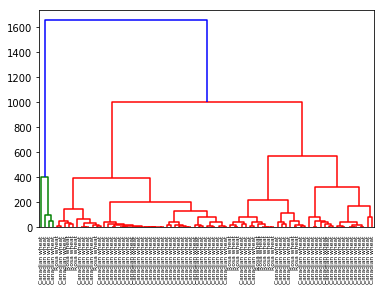

In [84]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show();

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

## Hierarchies of stocks

Before, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform **hierarchical clustering** of the companies. You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. `SciPy hierarchical clustering doesn't fit into a sklearn pipeline`, so you'll need to use the `normalize()` function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

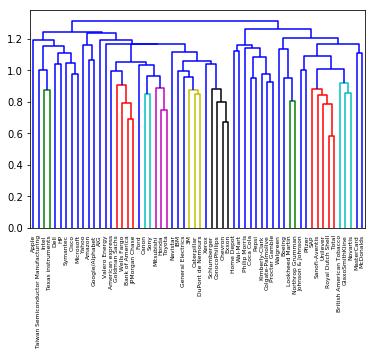

In [85]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show();

You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations.

## Which clusters are closest?

The `linkage` method defines **how the distance between clusters is measured**. In `complete linkage`, the distance between clusters is the distance between the furthest points of the clusters. In `single linkage`, the distance between clusters is the distance between the closest points of the clusters.

<img src="images/clustering_q1.png" alt="" style="width: 600px;"/>

Consider the three clusters in the diagram. Which of the following statements are true?

- A. In single linkage, Cluster 3 is the closest to Cluster 2.
- B. In complete linkage, Cluster 1 is the closest to Cluster 2.

Answer: both A and B are true

## Different linkage, different hierarchical clustering!

Perform a hierarchical clustering of the voting countries with `'single' linkage` and then `'complete' linkage`, and compare the resulting dendrograms. Different linkage, different hierarchical clustering!

You are given an array `samples`. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list `country_names` gives the name of each voting country. This dataset was obtained from [Eurovision](https://eurovision.tv/history/full-split-results).

In [89]:
country_names = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine', 'United Kingdom']
samples = np.array([[2.0, 12.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 10.0, 0.0, 4.0, 0.0, 5.0, 7.0, 0.0, 0.0, 3.0, 0.0, 6.0, 0.0], [12.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 7.0, 8.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 1.0, 12.0, 0.0, 0.0, 2.0, 0.0, 10.0, 0.0], [0.0, 12.0, 3.0, 0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 0.0, 5.0, 0.0, 2.0, 0.0, 0.0, 8.0, 4.0], [0.0, 3.0, 12.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 4.0, 0.0, 7.0, 6.0, 10.0, 0.0], [0.0, 2.0, 0.0, 12.0, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 1.0, 0.0, 7.0, 6.0, 0.0, 0.0, 0.0, 5.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0], [7.0, 1.0, 0.0, 8.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 5.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 2.0, 0.0, 10.0, 0.0], [7.0, 4.0, 3.0, 0.0, 12.0, 5.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 1.0, 10.0, 2.0, 0.0], [0.0, 3.0, 5.0, 8.0, 0.0, 2.0, 10.0, 0.0, 0.0, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 0.0, 7.0, 0.0], [8.0, 5.0, 4.0, 1.0, 0.0, 12.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 0.0, 0.0, 3.0, 0.0, 10.0, 0.0], [0.0, 5.0, 6.0, 0.0, 0.0, 1.0, 12.0, 0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 12.0, 0.0, 7.0, 0.0, 10.0, 0.0], [8.0, 5.0, 0.0, 0.0, 0.0, 12.0, 0.0, 12.0, 0.0, 6.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0, 10.0, 0.0, 0.0, 1.0, 0.0, 7.0, 0.0], [8.0, 1.0, 4.0, 6.0, 0.0, 5.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 10.0, 0.0, 0.0, 2.0, 0.0, 12.0, 0.0], [0.0, 10.0, 1.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 5.0, 4.0, 0.0, 0.0, 12.0, 7.0, 3.0, 0.0], [0.0, 4.0, 6.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 5.0, 0.0, 1.0, 12.0, 0.0, 0.0, 10.0, 0.0, 8.0, 0.0], [7.0, 3.0, 0.0, 0.0, 4.0, 10.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 8.0, 12.0, 0.0, 0.0, 0.0, 6.0, 0.0], [0.0, 7.0, 6.0, 0.0, 0.0, 4.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 10.0, 0.0, 12.0, 0.0], [12.0, 0.0, 8.0, 0.0, 4.0, 5.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 6.0, 0.0, 1.0, 2.0, 0.0, 10.0, 0.0], [12.0, 1.0, 0.0, 7.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 2.0, 0.0, 0.0, 6.0, 5.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0], [2.0, 5.0, 7.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 8.0, 3.0, 6.0, 0.0], [8.0, 5.0, 1.0, 0.0, 0.0, 7.0, 0.0, 12.0, 0.0, 4.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0], [0.0, 3.0, 6.0, 0.0, 0.0, 4.0, 0.0, 5.0, 0.0, 1.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 10.0, 0.0, 0.0, 7.0, 2.0, 12.0, 0.0], [0.0, 8.0, 2.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 10.0, 7.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0], [0.0, 6.0, 1.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 0.0, 10.0, 8.0, 0.0, 0.0, 2.0, 0.0, 4.0, 3.0], [6.0, 5.0, 3.0, 2.0, 1.0, 7.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 4.0, 10.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 6.0, 0.0, 5.0, 3.0, 0.0, 0.0, 0.0, 12.0, 0.0, 2.0, 0.0, 10.0, 8.0, 4.0, 0.0, 0.0, 0.0, 12.0, 0.0], [0.0, 6.0, 4.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 12.0, 8.0, 0.0, 5.0, 12.0, 0.0, 0.0, 7.0, 0.0, 10.0, 0.0], [0.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 0.0, 2.0, 0.0, 0.0, 12.0, 12.0, 0.0, 6.0, 8.0, 0.0, 0.0, 7.0, 0.0, 10.0, 0.0], [0.0, 12.0, 0.0, 6.0, 0.0, 8.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 0.0, 7.0, 0.0, 0.0, 12.0, 0.0, 10.0, 0.0, 0.0, 0.0, 3.0, 4.0, 1.0], [7.0, 5.0, 4.0, 8.0, 0.0, 2.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0], [0.0, 0.0, 0.0, 7.0, 0.0, 5.0, 6.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 4.0, 0.0, 2.0, 0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 8.0, 0.0], [0.0, 8.0, 0.0, 0.0, 2.0, 5.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 0.0, 10.0, 6.0, 0.0, 0.0, 7.0, 0.0, 4.0, 0.0], [2.0, 7.0, 4.0, 0.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 5.0, 0.0, 0.0, 12.0, 8.0, 0.0, 0.0, 10.0, 0.0, 12.0, 0.0], [12.0, 4.0, 8.0, 6.0, 0.0, 0.0, 0.0, 7.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 5.0, 12.0, 0.0, 0.0, 2.0, 0.0, 10.0, 0.0], [2.0, 5.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 6.0, 8.0, 0.0, 7.0, 10.0, 0.0, 0.0, 4.0, 0.0, 12.0, 0.0], [2.0, 6.0, 0.0, 0.0, 5.0, 8.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 0.0, 1.0, 0.0, 7.0, 0.0], [0.0, 3.0, 6.0, 0.0, 0.0, 2.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 10.0, 12.0, 0.0, 5.0, 0.0, 7.0, 0.0], [6.0, 4.0, 2.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 5.0, 8.0, 0.0, 12.0, 1.0, 0.0, 7.0, 0.0], [0.0, 12.0, 5.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 10.0, 8.0, 0.0, 1.0, 12.0, 2.0, 7.0, 0.0], [0.0, 1.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 8.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 5.0, 6.0, 12.0, 2.0, 0.0, 0.0, 4.0, 0.0], [8.0, 5.0, 6.0, 0.0, 12.0, 1.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 3.0, 0.0, 0.0, 2.0, 12.0, 7.0, 0.0], [7.0, 4.0, 0.0, 10.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 3.0, 0.0, 8.0, 12.0, 0.0, 0.0, 1.0, 0.0, 12.0, 0.0], [0.0, 6.0, 0.0, 0.0, 0.0, 8.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 12.0, 0.0, 10.0, 7.0, 0.0, 4.0, 1.0, 0.0, 5.0, 12.0]])

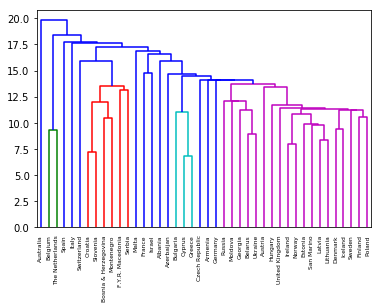

In [90]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show();

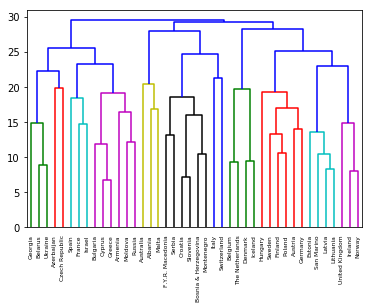

In [91]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show();

As you can see, performing single linkage hierarchical clustering produces a different dendrogram!

## Intermediate clusterings

<img src="images/clustering_intermediate.png" alt="" style="width: 600px;"/>

Displayed below is the **dendrogram for the hierarchical clustering** of the grain samples that you computed earlier. If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?

<img src="images/clustering_intermediate2.png" alt="" style="width: 400px;"/>

Answer: 3

## Extracting the cluster labels

In the picture above, you saw that the **intermediate clustering** of the grain samples at height 6 has 3 clusters. Now, use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a **cross-tabulation**.

The **hierarchical clustering** has already been performed and mergings is the result of the `linkage()` function. The list `varieties` gives the variety of each grain sample.

In [93]:
mergings = np.array([[33.0, 36.0, 0.2716290853351308, 2.0], [21.0, 26.0, 0.31365739270739296, 2.0], [18.0, 43.0, 0.3284658886399012, 3.0], [38.0, 41.0, 0.34657328229394735, 2.0], [19.0, 22.0, 0.37233454043373365, 2.0], [15.0, 27.0, 0.3891695774337963, 2.0], [4.0, 11.0, 0.4851990931566141, 2.0], [2.0, 13.0, 0.6022051145581543, 2.0], [23.0, 25.0, 0.6444799531405162, 2.0], [0.0, 9.0, 0.6667165814647172, 2.0], [32.0, 37.0, 0.683593629285703, 2.0], [39.0, 42.0, 0.7554129731478005, 3.0], [12.0, 29.0, 0.7612957703809997, 2.0], [30.0, 34.0, 0.7906670348509535, 2.0], [24.0, 47.0, 0.8901518353629345, 3.0], [1.0, 6.0, 0.9607774195931132, 2.0], [31.0, 45.0, 0.9895661928340117, 3.0], [16.0, 50.0, 1.0589175652523664, 3.0], [17.0, 20.0, 1.1154309884524467, 2.0], [8.0, 40.0, 1.1373373510089253, 2.0], [44.0, 46.0, 1.166204098775165, 5.0], [5.0, 61.0, 1.2867633659690503, 3.0], [35.0, 52.0, 1.3769048768887413, 3.0], [48.0, 49.0, 1.5286512486502601, 4.0], [53.0, 64.0, 1.6651719460764396, 6.0], [14.0, 56.0, 1.7423478441459395, 4.0], [51.0, 65.0, 1.9101542372279785, 6.0], [7.0, 57.0, 1.9174903519965882, 3.0], [28.0, 55.0, 2.089800382811717, 3.0], [54.0, 58.0, 2.133855374668115, 5.0], [3.0, 10.0, 2.2218703832582123, 2.0], [59.0, 67.0, 2.3185225122909627, 7.0], [60.0, 62.0, 2.336861947141936, 7.0], [68.0, 69.0, 2.7677903533324195, 9.0], [66.0, 70.0, 3.1344841680889064, 9.0], [63.0, 71.0, 3.2574465168287867, 8.0], [73.0, 74.0, 3.7158031648622076, 14.0], [72.0, 75.0, 4.6811698794211685, 11.0], [76.0, 77.0, 5.457893118227949, 17.0], [78.0, 79.0, 6.746084268670233, 25.0], [80.0, 81.0, 9.612302375601798, 42.0]])
varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

In [94]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
# Perform a flat hierarchical clustering by using the fcluster() function 
#  on mergings. Specify a maximum height of 6 and 
#  the keyword argument criterion='distance'.
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


Fantastic - you've now mastered the fundamentals of k-Means and **agglomerative hierarchical clustering**. Next, you'll learn about **t-SNE**, which is a powerful tool for visualizing high dimensional data.

## t-SNE visualization of grain dataset

<img src="images/clustering_tsne.png" alt="" style="width: 400px;"/>

<img src="images/clustering_tsne2.png" alt="" style="width: 400px;"/>

<img src="images/clustering_tsne3.png" alt="" style="width: 400px;"/>

<img src="images/clustering_tsne4.png" alt="" style="width: 400px;"/>

<img src="images/clustering_tsne5.png" alt="" style="width: 400px;"/>

You'll apply **t-SNE** to the grain samples data and inspect the resulting **t-SNE** features using a scatter plot. You are given an array `samples` of grain samples and a list `variety_numbers` giving the variety number of each grain sample.

In [95]:
samples = np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22], [14.88, 14.57, 0.8811, 5.553999999999999, 3.333, 1.018, 4.956], [14.29, 14.09, 0.905, 5.291, 3.3369999999999997, 2.699, 4.825], [13.84, 13.94, 0.8955, 5.324, 3.3789999999999996, 2.259, 4.805], [16.14, 14.99, 0.9034, 5.6579999999999995, 3.562, 1.355, 5.175], [14.38, 14.21, 0.8951, 5.386, 3.312, 2.4619999999999997, 4.956], [14.69, 14.49, 0.8799, 5.563, 3.259, 3.5860000000000003, 5.218999999999999], [14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0], [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877000000000001], [16.44, 15.25, 0.888, 5.8839999999999995, 3.505, 1.969, 5.5329999999999995], [15.26, 14.85, 0.8696, 5.7139999999999995, 3.242, 4.543, 5.314], [14.03, 14.16, 0.8796, 5.438, 3.201, 1.7169999999999999, 5.001], [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738], [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872], [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825], [14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781000000000001], [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001], [15.69, 14.75, 0.9058, 5.527, 3.514, 1.599, 5.046], [14.7, 14.21, 0.9153, 5.205, 3.466, 1.767, 4.649], [12.72, 13.57, 0.8686, 5.226, 3.049, 4.102, 4.914], [14.16, 14.4, 0.8584, 5.6579999999999995, 3.1289999999999996, 3.072, 5.176], [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.218999999999999], [15.88, 14.9, 0.8988, 5.617999999999999, 3.5069999999999997, 0.7651, 5.091], [12.08, 13.23, 0.8664, 5.099, 2.9360000000000004, 1.415, 4.961], [15.01, 14.76, 0.8657, 5.789, 3.245, 1.791, 5.001], [16.19, 15.16, 0.8849, 5.832999999999999, 3.4210000000000003, 0.903, 5.307], [13.02, 13.76, 0.8641, 5.395, 3.0260000000000002, 3.373, 4.825], [12.74, 13.67, 0.8564, 5.395, 2.9560000000000004, 2.504, 4.869], [14.11, 14.18, 0.882, 5.541, 3.221, 2.7539999999999996, 5.038], [13.45, 14.02, 0.8604, 5.516, 3.065, 3.531, 5.0969999999999995], [13.16, 13.82, 0.8662, 5.454, 2.975, 0.8551, 5.056], [15.49, 14.94, 0.8724, 5.757000000000001, 3.3710000000000004, 3.412, 5.228], [14.09, 14.41, 0.8529, 5.7170000000000005, 3.1860000000000004, 3.92, 5.2989999999999995], [13.94, 14.17, 0.8728, 5.585, 3.15, 2.124, 5.012], [15.05, 14.68, 0.8779, 5.712000000000001, 3.3280000000000003, 2.129, 5.36], [16.12, 15.0, 0.9, 5.709, 3.485, 2.27, 5.443], [16.2, 15.27, 0.8734, 5.8260000000000005, 3.464, 2.823, 5.527], [17.08, 15.38, 0.9079, 5.832000000000001, 3.6830000000000003, 2.9560000000000004, 5.484], [14.8, 14.52, 0.8823, 5.656000000000001, 3.2880000000000003, 3.112, 5.309], [14.28, 14.17, 0.8944, 5.397, 3.298, 6.685, 5.001], [13.54, 13.85, 0.8871, 5.348, 3.156, 2.5869999999999997, 5.178], [13.5, 13.85, 0.8852, 5.351, 3.158, 2.249, 5.176], [13.16, 13.55, 0.9009, 5.138, 3.201, 2.461, 4.783], [15.5, 14.86, 0.882, 5.877000000000001, 3.3960000000000004, 4.711, 5.528], [15.11, 14.54, 0.8986, 5.579, 3.4619999999999997, 3.128, 5.18], [13.8, 14.04, 0.8794, 5.376, 3.155, 1.56, 4.961], [15.36, 14.76, 0.8861, 5.7010000000000005, 3.3930000000000002, 1.367, 5.132000000000001], [14.99, 14.56, 0.8883, 5.57, 3.377, 2.958, 5.175], [14.79, 14.52, 0.8819, 5.545, 3.2910000000000004, 2.7039999999999997, 5.111000000000001], [14.86, 14.67, 0.8676, 5.678, 3.258, 2.129, 5.351], [14.43, 14.4, 0.8751, 5.585, 3.272, 3.975, 5.144], [15.78, 14.91, 0.8923, 5.6739999999999995, 3.4339999999999997, 5.593, 5.136], [14.49, 14.61, 0.8538, 5.715, 3.113, 4.1160000000000005, 5.396], [14.33, 14.28, 0.8831, 5.504, 3.199, 3.3280000000000003, 5.224], [14.52, 14.6, 0.8557, 5.7410000000000005, 3.113, 1.4809999999999999, 5.487], [15.03, 14.77, 0.8658, 5.702000000000001, 3.2119999999999997, 1.933, 5.439], [14.46, 14.35, 0.8818, 5.388, 3.377, 2.802, 5.044], [14.92, 14.43, 0.9006, 5.3839999999999995, 3.412, 1.1420000000000001, 5.088], [15.38, 14.77, 0.8857, 5.662000000000001, 3.4189999999999996, 1.999, 5.222], [12.11, 13.47, 0.8392, 5.159, 3.032, 1.5019999999999998, 4.519], [11.42, 12.86, 0.8683, 5.008, 2.85, 2.7, 4.607], [11.23, 12.63, 0.884, 4.902, 2.8789999999999996, 2.269, 4.703], [12.36, 13.19, 0.8923, 5.0760000000000005, 3.042, 3.22, 4.605], [13.22, 13.84, 0.868, 5.395, 3.07, 4.157, 5.088], [12.78, 13.57, 0.8716, 5.2620000000000005, 3.0260000000000002, 1.176, 4.782], [12.88, 13.5, 0.8879, 5.138999999999999, 3.1189999999999998, 2.352, 4.607], [14.34, 14.37, 0.8726, 5.63, 3.19, 1.3130000000000002, 5.15], [14.01, 14.29, 0.8625, 5.609, 3.158, 2.217, 5.132000000000001], [14.37, 14.39, 0.8726, 5.569, 3.153, 1.464, 5.3], [12.73, 13.75, 0.8458, 5.412000000000001, 2.8819999999999997, 3.533, 5.067], [17.63, 15.98, 0.8673, 6.191, 3.5610000000000004, 4.0760000000000005, 6.06], [16.84, 15.67, 0.8623, 5.997999999999999, 3.484, 4.675, 5.877000000000001], [17.26, 15.73, 0.8763, 5.978, 3.594, 4.539, 5.791], [19.11, 16.26, 0.9081, 6.154, 3.93, 2.9360000000000004, 6.079], [16.82, 15.51, 0.8786, 6.017, 3.486, 4.004, 5.841], [16.77, 15.62, 0.8638, 5.9270000000000005, 3.438, 4.92, 5.795], [17.32, 15.91, 0.8599, 6.064, 3.403, 3.824, 5.922000000000001], [20.71, 17.23, 0.8763, 6.579, 3.8139999999999996, 4.4510000000000005, 6.4510000000000005], [18.94, 16.49, 0.875, 6.445, 3.639, 5.064, 6.362], [17.12, 15.55, 0.8892, 5.85, 3.5660000000000003, 2.858, 5.746], [16.53, 15.34, 0.8823, 5.875, 3.467, 5.532, 5.88], [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879], [20.2, 16.89, 0.8894, 6.285, 3.864, 5.172999999999999, 6.187], [19.57, 16.74, 0.8779, 6.3839999999999995, 3.772, 1.472, 6.273], [19.51, 16.71, 0.878, 6.3660000000000005, 3.801, 2.9619999999999997, 6.185], [18.27, 16.09, 0.887, 6.172999999999999, 3.6510000000000002, 2.443, 6.197], [18.88, 16.26, 0.8969, 6.084, 3.764, 1.649, 6.109], [18.98, 16.66, 0.8590000000000001, 6.5489999999999995, 3.67, 3.6910000000000003, 6.497999999999999], [21.18, 17.21, 0.8989, 6.5729999999999995, 4.033, 5.78, 6.231], [20.88, 17.05, 0.9031, 6.45, 4.032, 5.016, 6.321000000000001], [20.1, 16.99, 0.8746, 6.581, 3.785, 1.955, 6.449], [18.76, 16.2, 0.8984, 6.172000000000001, 3.7960000000000003, 3.12, 6.053], [18.81, 16.29, 0.8906, 6.272, 3.693, 3.237, 6.053], [18.59, 16.05, 0.9066, 6.037000000000001, 3.86, 6.001, 5.877000000000001], [18.36, 16.52, 0.8452, 6.666, 3.485, 4.933, 6.4479999999999995], [16.87, 15.65, 0.8648, 6.138999999999999, 3.463, 3.696, 5.9670000000000005], [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.2379999999999995], [18.98, 16.57, 0.8687, 6.449, 3.552, 2.144, 6.452999999999999], [18.17, 16.26, 0.8637, 6.271, 3.512, 2.853, 6.273], [18.72, 16.34, 0.8809999999999999, 6.218999999999999, 3.6839999999999997, 2.188, 6.097], [16.41, 15.25, 0.8866, 5.718, 3.525, 4.217, 5.617999999999999], [17.99, 15.86, 0.8992, 5.89, 3.694, 2.068, 5.837000000000001], [19.46, 16.5, 0.8985, 6.1129999999999995, 3.892, 4.308, 6.0089999999999995], [19.18, 16.63, 0.8717, 6.369, 3.681, 3.3569999999999998, 6.229], [18.95, 16.42, 0.8829, 6.247999999999999, 3.755, 3.3680000000000003, 6.148], [18.83, 16.29, 0.8917, 6.037000000000001, 3.786, 2.553, 5.879], [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2], [17.63, 15.86, 0.88, 6.0329999999999995, 3.573, 3.747, 5.928999999999999], [19.94, 16.92, 0.8752, 6.675, 3.763, 3.252, 6.55], [18.55, 16.22, 0.8865, 6.153, 3.674, 1.7380000000000002, 5.894], [18.45, 16.12, 0.8921, 6.107, 3.7689999999999997, 2.235, 5.794], [19.38, 16.72, 0.8716, 6.303, 3.7910000000000004, 3.678, 5.965], [19.13, 16.31, 0.9035, 6.183, 3.9019999999999997, 2.109, 5.9239999999999995], [19.14, 16.61, 0.8722, 6.2589999999999995, 3.737, 6.682, 6.053], [20.97, 17.25, 0.8859, 6.563, 3.991, 4.677, 6.316], [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.162999999999999], [18.96, 16.2, 0.9077, 6.051, 3.897, 4.334, 5.75], [19.15, 16.45, 0.889, 6.245, 3.815, 3.0839999999999996, 6.185], [18.89, 16.23, 0.9008, 6.227, 3.7689999999999997, 3.639, 5.966], [20.03, 16.9, 0.8811, 6.492999999999999, 3.8569999999999998, 3.063, 6.32], [20.24, 16.91, 0.8897, 6.315, 3.9619999999999997, 5.901, 6.188], [18.14, 16.12, 0.8772, 6.059, 3.563, 3.6189999999999998, 6.011], [16.17, 15.38, 0.8588, 5.7620000000000005, 3.387, 4.2860000000000005, 5.702999999999999], [18.43, 15.97, 0.9077, 5.98, 3.7710000000000004, 2.984, 5.905], [15.99, 14.89, 0.9064, 5.3629999999999995, 3.582, 3.3360000000000003, 5.144], [18.75, 16.18, 0.8999, 6.111000000000001, 3.8689999999999998, 4.188, 5.992000000000001], [18.65, 16.41, 0.8698, 6.285, 3.594, 4.391, 6.102], [17.98, 15.85, 0.8993, 5.979, 3.687, 2.2569999999999997, 5.919], [20.16, 17.03, 0.8735, 6.513, 3.773, 1.91, 6.185], [17.55, 15.66, 0.8991, 5.791, 3.69, 5.3660000000000005, 5.6610000000000005], [18.3, 15.89, 0.9108, 5.979, 3.755, 2.8369999999999997, 5.962000000000001], [18.94, 16.32, 0.8942, 6.144, 3.825, 2.908, 5.949], [15.38, 14.9, 0.8706, 5.8839999999999995, 3.2680000000000002, 4.462, 5.795], [16.16, 15.33, 0.8644, 5.845, 3.395, 4.266, 5.795], [15.56, 14.89, 0.8823, 5.776, 3.408, 4.9719999999999995, 5.847], [15.38, 14.66, 0.899, 5.477, 3.465, 3.6, 5.439], [17.36, 15.76, 0.8785, 6.145, 3.574, 3.5260000000000002, 5.971], [15.57, 15.15, 0.8527, 5.92, 3.2310000000000003, 2.64, 5.879], [15.6, 15.11, 0.858, 5.832000000000001, 3.286, 2.725, 5.752000000000001], [16.23, 15.18, 0.885, 5.872000000000001, 3.472, 3.7689999999999997, 5.922000000000001], [13.07, 13.92, 0.848, 5.472, 2.9939999999999998, 5.303999999999999, 5.395], [13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44], [13.34, 13.95, 0.862, 5.388999999999999, 3.074, 5.995, 5.307], [12.22, 13.32, 0.8652, 5.224, 2.967, 5.468999999999999, 5.221], [11.82, 13.4, 0.8274, 5.314, 2.7769999999999997, 4.471, 5.178], [11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275], [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132000000000001], [12.49, 13.46, 0.8658, 5.267, 2.967, 4.421, 5.002], [12.7, 13.71, 0.8491, 5.386, 2.911, 3.26, 5.316], [10.79, 12.93, 0.8107, 5.317, 2.648, 5.462000000000001, 5.194], [11.83, 13.23, 0.8496, 5.263, 2.84, 5.195, 5.307], [12.01, 13.52, 0.8249, 5.405, 2.7760000000000002, 6.992000000000001, 5.27], [12.26, 13.6, 0.8333, 5.4079999999999995, 2.833, 4.756, 5.36], [11.18, 13.04, 0.8266, 5.22, 2.693, 3.332, 5.001], [11.36, 13.05, 0.8382, 5.175, 2.755, 4.048, 5.263], [11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.218999999999999], [11.34, 12.87, 0.8596, 5.053, 2.8489999999999998, 3.347, 5.003], [12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22], [11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31], [11.49, 13.22, 0.8263, 5.303999999999999, 2.695, 5.388, 5.31], [12.54, 13.67, 0.8425, 5.4510000000000005, 2.8789999999999996, 3.082, 5.4910000000000005], [12.02, 13.33, 0.8503, 5.35, 2.81, 4.271, 5.308], [12.05, 13.41, 0.8416, 5.267, 2.847, 4.988, 5.046], [12.55, 13.57, 0.8558, 5.332999999999999, 2.968, 4.419, 5.176], [11.14, 12.79, 0.8558, 5.011, 2.7939999999999996, 6.388, 5.0489999999999995], [12.1, 13.15, 0.8793, 5.105, 2.9410000000000003, 2.201, 5.056], [12.44, 13.59, 0.8462, 5.319, 2.897, 4.9239999999999995, 5.27], [12.15, 13.45, 0.8443, 5.417000000000001, 2.8369999999999997, 3.638, 5.337999999999999], [11.35, 13.12, 0.8291, 5.176, 2.668, 4.337, 5.132000000000001], [11.24, 13.0, 0.8359, 5.09, 2.715, 3.5210000000000004, 5.088], [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.162999999999999], [11.55, 13.1, 0.8455, 5.167000000000001, 2.845, 6.715, 4.956], [11.27, 12.97, 0.8419, 5.088, 2.763, 4.309, 5.0], [11.4, 13.08, 0.8375, 5.136, 2.763, 5.587999999999999, 5.0889999999999995], [10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185], [10.8, 12.57, 0.8590000000000001, 4.981, 2.821, 4.773, 5.063], [11.26, 13.01, 0.8355, 5.186, 2.71, 5.335, 5.092], [10.74, 12.73, 0.8329, 5.145, 2.642, 4.702, 4.963], [11.48, 13.05, 0.8473, 5.18, 2.758, 5.876, 5.002], [12.21, 13.47, 0.8453, 5.357, 2.8930000000000002, 1.661, 5.178], [11.41, 12.95, 0.856, 5.09, 2.775, 4.957, 4.825], [12.46, 13.41, 0.8706, 5.236000000000001, 3.017, 4.987, 5.147], [12.19, 13.36, 0.8579, 5.24, 2.909, 4.857, 5.1579999999999995], [11.65, 13.07, 0.8575, 5.1080000000000005, 2.85, 5.209, 5.135], [12.89, 13.77, 0.8541, 5.495, 3.0260000000000002, 6.185, 5.316], [11.56, 13.31, 0.8198, 5.3629999999999995, 2.6830000000000003, 4.062, 5.182], [11.81, 13.45, 0.8198, 5.412999999999999, 2.716, 4.898, 5.352], [10.91, 12.8, 0.8372, 5.088, 2.675, 4.178999999999999, 4.956], [11.23, 12.82, 0.8594, 5.0889999999999995, 2.821, 7.524, 4.957], [10.59, 12.41, 0.8648, 4.899, 2.787, 4.975, 4.794], [10.93, 12.8, 0.8390000000000001, 5.046, 2.717, 5.398, 5.045], [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001], [11.87, 13.02, 0.8795, 5.132000000000001, 2.9530000000000003, 3.597, 5.132000000000001], [10.82, 12.83, 0.8256, 5.18, 2.63, 4.853, 5.0889999999999995], [12.11, 13.27, 0.8639, 5.236000000000001, 2.975, 4.132, 5.012], [12.8, 13.47, 0.8859999999999999, 5.16, 3.1260000000000003, 4.873, 4.914], [12.79, 13.53, 0.8786, 5.224, 3.054, 5.483, 4.958], [13.37, 13.78, 0.8849, 5.32, 3.128, 4.67, 5.091], [12.62, 13.67, 0.8481, 5.41, 2.911, 3.306, 5.231], [12.76, 13.38, 0.8964, 5.073, 3.155, 2.8280000000000003, 4.83], [12.38, 13.44, 0.8609, 5.218999999999999, 2.989, 5.472, 5.045], [12.67, 13.32, 0.8977, 4.984, 3.135, 2.3, 4.745], [11.18, 12.72, 0.868, 5.0089999999999995, 2.81, 4.051, 4.828], [12.7, 13.41, 0.8874, 5.183, 3.091, 8.456, 5.0], [12.37, 13.47, 0.8567, 5.204, 2.96, 3.9189999999999996, 5.001], [12.19, 13.2, 0.8783, 5.1370000000000005, 2.9810000000000003, 3.6310000000000002, 4.87], [11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003], [13.2, 13.66, 0.8883, 5.236000000000001, 3.2319999999999998, 8.315, 5.056], [11.84, 13.21, 0.8521, 5.175, 2.8360000000000003, 3.5980000000000003, 5.044], [12.3, 13.34, 0.8684, 5.242999999999999, 2.9739999999999998, 5.6370000000000005, 5.063]])
variety_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

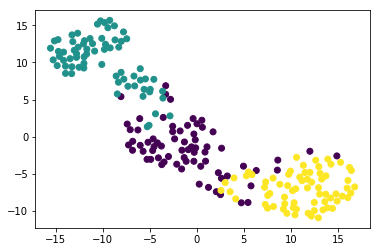

In [101]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show();

As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? You'll find out in the next exercise!

## A t-SNE map of the stock market

**t-SNE** provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply **t-SNE** to the company stock price data. A scatter plot of the resulting **t-SNE** features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array `normalized_movements` (these have already been normalized for you). The list `companies` gives the name of each company. PyPlot (plt) has been imported for you.

In [102]:
normalized_movements = np.array([[0.003020510778236354, -0.0011457370237342513, -0.017758509849594307, -0.006093099328511368, 0.008749122988027087, -0.01400888943170943, -0.007655401243004912, 0.014477605003387906, -0.003541304121953489, -0.026038859980393673, 0.03494414858343282, -0.01656076275492517, -0.02088317617190783, -0.0470262593974823, 0.002916355234159182, -5.207777203865991e-05, 0.005364062597743664, -0.02937191029974221, -0.04697411392434002, 0.012290359408877244, -0.0002603940679700462, 0.021143575447655064, -0.024372397314045766, 0.014737999071357802, -0.00817625708004878, -0.001197747094669136, -0.004009936369196913, 0.01973743914817358, 0.011821643837198475, 0.007603323470966402, -0.008540744198769264, 0.006770125988344334, -0.0009895037076187154, -0.00999895306251222, -0.01531086497933641, 0.012654909020924315, 0.02405992547403706, 0.01166541052108279, 0.01687323980271077, -0.005624388964610083, 0.0020310122783949772, 0.007447152648177005, 0.020883181379684874, -0.00484327446180372, 0.024528635837938788, 0.005259839352563013, 0.008280417831902994, -0.004010009278077879, -0.008020023763932948, 0.0014060633906008181, -0.0040620193490129115, 0.0028642774621208183, -0.013227780136679962, 0.022289312471389173, 0.01416506025449853, 0.009009454562670698, -0.022237229491573616, 0.010155191586405097, -0.0031767440943520375, -0.003905853734000707, -0.0025518004143349213, -0.007499230420215813, 0.018279230284430625, 0.006978442284275867, 0.005468223349597879, -0.002551795206557879, 0.001874700845621285, 0.00046878327278210237, 0.00296843300619799, 0.002135167822472001, 0.016352519367874453, -0.00609302641963055, 0.00020831629593123826, -0.02057070433189927, 0.0021873185033911826, 0.04285994389440807, 0.014790009142292839, -0.01239451495295427, -0.027236674776166585, -0.008592821970807777, 0.02926768184678407, -0.04280793382347274, 0.013071473911683609, -0.021924757651564906, 0.015414958030086997, -0.03947501890633161, -0.040881087504709326, 0.019477112781307017, 0.024372402521823253, 0.014842159823212315, -0.025309682639641378, -0.00697844228427572, -0.0024997903434000367, -0.024059925474037205, -0.006041021556473003, -0.021456114988766962, 0.04947390426774005, -0.002708106639331571, 0.030569725095514977, -0.031090513231455067, 0.014321366479495029, -0.013071473911683609, 0.005936866012395684, -0.0030725885502751616, -0.010728130403264223, -0.01171741538424063, -0.03827713640945521, -0.02036238803596789, -0.04306826019033901, 0.029528148823635234, 0.02749700114303315, -0.00874912819580413, 0.021091492467839368, 0.03202779855705067, 0.006613819763348129, 0.00947823262767561, -0.039162406456338596, 0.008801138266739313, -0.018800153822577825, -0.010415653355478473, -0.01749825639160856, 0.007134607899287925, -0.04140187043287237, -0.02697620779931572, -0.030309258118664407, -0.01848768198256912, -0.012342504882019385, 0.042599622735318844, -0.022862178379368072, 0.014217205727640818, -0.006457654148335777, -0.02353913733809711, 0.017446105710689226, 0.01676901134975293, -0.017081483189761486, -0.022393400314362863, 0.04681794830932796, -0.05650435662295081, 0.006978442284275574, 0.014842159823212315, -0.0037495475090042053, 0.016716996071040557, -0.014113055391340688, -0.01354025197668867, 0.007082597828352893, 0.0073429241952191636, 0.004791123780884094, 0.0007291044318713306, -0.00015617082278895114, 0.0016145202965166495, 0.0014060633906009662, -0.0022914740474687984, -0.02713251402431207, 0.0265597158174371, -0.01327992560982225, 0.0003124718400085581, 0.00984271974639654, 0.0036975374380693207, -0.015414958030087291, 0.0013019026387464556, -0.031194673983309436, -0.014269221006352894, 0.025257672568706493, -0.026924197728380686, -0.0006769537509521489, 0.00906145942582839, 0.006509799621477915, 0.014894305296354457, 0.004738978307741954, 0.01916464094129875, 0.006093172237391888, 0.016352519367874453, -0.01025934713048227, 0.0011457370237343992, 0.006353493396481562, 0.009634403450465153, 0.010675839112360594, 0.03296521928485354, -0.01208204311294571, 0.03723569553978229, -0.00046877806500505965, 0.02624724397742869, 0.013488106503546675, 0.001145596413749658, -0.01468599420820026, -0.0255701444087149, 0.0007291044318716268, -0.02734083032024361, -0.018904179172224783, -0.015415093432294398, 0.03614196858698292, -0.0020830223493297135, -0.005832705260541173, 0.012290354201099762, 0.0032288947752716632, 0.016300368686955273, -0.00031247184000885407, 0.003228759373064113, 0.038016810042588355, -0.0024477802724650038, 0.031715321509264635, 0.00796787308301347, -0.014790009142292839, -0.008332495603941507, -0.0013020432487309008, 0.006145182308326923, 0.000937420727802865, -0.014113190793548239, -0.016925312366972093, 0.010207201657340279, 0.012290354201100055, 0.007447084947073378, 0.014685989000423068, -0.004478651940875832, 0.007395074876138641, -0.025882621456500655, 0.00723876865114214, 0.008592821970807777, -0.04150603118472658, -0.007395074876138641, -0.021508125059702142, -0.00364552736713414, 0.01682115682289507, -0.006457654148335777, 0.03478791526731728, -0.008957303881751665, 0.0145816928463616, 0.006561809692412801, 0.007134613107065116, -0.012446525023889595, 0.005884850733683461, 0.0032288947752713675, 0.0022393233665490247, 0.007863717538936447, -0.029111375621787873, 0.007186617970222958, -0.012342369479811982, 0.004738978307742102, -0.014060899502644315, -0.007499230420215961, 0.0018747008456215808, 0.0008332599759486504, -0.005311917124601377, 0.0031767440943521854, 0.006249337852404241, 0.004166174893090083, -0.007290778722077174, 0.009530242698610641, -0.0022913334374840572, -0.004843133851819127, -0.00947809722546865, -0.002031007070618082, 0.02046654878782225, -0.005988876083330716, 0.023174655427153523, -0.005155746301812426, 0.01109261231420811, 0.018852169101290044, -0.016873166893829804, 0.006093172237392186, 0.002708106639331571, 0.013488106503546085, 0.05796256548669362, -0.0495259091308979, -0.019529122852242193, -0.03671476679385805, 0.05509829323235, 0.02640340959244074, 0.004634958165872037, -0.002968433006197842, -0.04202668391845912, 0.018331380965349954, 0.019425102710372424, -0.0006769537509521489, -0.0018747060533981794, 0.014894305296354307, 0.02077902062783051, 0.007915863012078734, 0.015467103503229431, -0.014842159823212018, 0.010936441491418567, 0.012446519816112112, 0.0036975374380691724, 0.012134047976103552, 0.005468223349597879, -0.0424433113025453, -0.01843553650942698, 0.020049910988181992, -0.00593686601239598, 0.01510262159228584, 0.010259347130481971, -0.032079944030192674, 0.011248777929219871, 0.012342504882019236, -0.00036462252092773985, -0.03145500035017555, 0.004426641869940799, -0.011561249769228727, -0.012759137473882007, 0.03468375451546276, 0.001978996999682754, 0.017341809556627907, -0.062441217427569154, -0.011405084154216668, -0.033642318853567034, 0.017237648804773693, -0.0070824624261453415, -0.00046864266279810125, 0.01624835861601994, 0.018071054598483682, -0.014113050183563203, 0.01718563873383836, -0.010467522816429358, 0.011196767858285134, -0.034110956308587945, -0.016248218006035497, 0.00989472460955453, -0.016560835663805694, -0.00010416075185451053, -0.025309823249625822, -0.01697746304789157, 0.00994687529047371, 0.005780559787398886, -0.01239451495295427, -0.030413424078295663, 0.02994477620772067, 0.024789029905908835, -0.005728544508686959, -0.02239354092434716, 0.013904733887631963, -0.016664850597898566, -0.010884296018276578, 0.00291628232527866, 0.01744597030848182, -0.018018903917563906, 0.0010937269527996625, 0.006822276669263516, -0.008592821970807777, -0.015779575343237696, -0.0013540533196659335, 0.002916422935262809, -0.0093219264026797, 0.002343484118403239, -0.0268721876574458, -0.030725890710527334, 0.02156027053284413, 0.017706432077555647, -0.008072033834867981, -0.02260171140251706, 0.023070354065314866, -0.017237654012550882, 0.01744596510070493, -0.005051590757735106, 0.013592262047623406, 0.035048236426406365, -0.01749811057384722, -0.0020831577515372643, 0.0013540533196659335, -0.03989165149819438, -0.03192378362295809, 0.002395494189338272, -0.009165760787667347, -0.024216091089049263, -0.0031247392311946395, 0.012706992000740018, -0.015623409728225634, -0.009061600035812838, -0.04546403039186928, -0.010623834249202754, 0.044890950965025565, -0.013279784999837953, 0.06400358704316632, -0.026142942615590033, 0.023174509609391894, 0.008384505674876539, -0.01041551274549403, 0.005051590757735106, 0.03806882011352369, 0.03348600742079365, 0.014633843527280782, 0.013175770065745078, 0.033173535580785084, -0.012186203864800222, 0.0011457370237343992, -0.0016143744787547177, -0.016873166893829804, 0.019529122852241898, 0.043589188936263554, -0.005989011485537971, -0.04801569019622021, 0.0017706807037515153, 0.025934766929642937, 0.042443316510322196, 0.017758577550697933, -0.041662196799738635, 0.0010415814796570794, 0.014790009142292839, -0.005364062597743664, -0.0455160404628046, 0.008280350130799514, -0.06270167919664298, -0.035517014491411425, -0.044161846533154525, 0.0661909003387809, -0.03884993461633004, 0.0165608304560288, -0.0056243889646099355, 0.019685434285015888, -0.005416072668678697, -0.009738558994542176, -0.024945195520920595, -0.031975788486115944, -0.04202681932066638, 0.06926349409683297, 0.014113190793548239, 0.04499525232686451, 0.06462853072318345, 0.009321926402679107, 0.00906145942582839, -0.029892630734578672, -0.024945195520920886, -0.0035933766862149582, 0.0644202196350291, -0.00848880182893771, 0.009061600035812838, -0.03359016817264815, 0.03614196858698292, 0.012915303088894362, 0.011873726817014176, 0.00796787308301347, 0.025830611385565912, 0.07618978570018936, -0.009374071875821394, -0.039058250912261575, 0.004114170029931945, 0.02093518624284287, 0.017237789414757843, -0.04931759804274326, -0.016560689846044353, -0.05910816710822076, -0.03020510257458723, -0.03004879634959073, -0.01077999465643762, 0.05410872182362794, 0.02103934699469708, -0.031142528510166995, 0.05061950068149001, 0.040203982728218485, -0.02682004218430381, 0.017966758444422512, 0.02692419772838084, -0.009113610106747869, 0.002499790343400333, -0.014217210935417711, -0.024424407384980803, -0.0272366695683894, 0.04994268233274511, -0.03780835313667267, -0.006041021556473003, -0.014946315367289043, 0.010155050976420799, 0.012290359408877244, -0.00468696823680707, -0.01395688456855144, 0.020831171308750285, -0.009321926402679107, -0.0009374207278031608, 0.02093518624284287, -0.008801138266739015, -0.06150379669976689, -0.010363507882336483, -0.02218508401843148, 0.041818362414750704, -0.02333082104216558, -0.03421511185266467, -0.02072686994691103, -0.007238904053349394, 0.028590728095832522, -0.039162406456338596, -0.025257667360929152, 0.01963341900630396, -0.0137485682726202, 0.004738973099964913, 0.028069934752114938, -0.0006769537509521489, -0.0024996497334152956, -0.008124179308009972, -0.0043744963967988085, -0.004114170029932241, 0.004010009278078027, 0.0008332599759483544, -0.021820596899710703, -0.033902640012656415, -0.022862178379367777, 0.0034370704612187524, -0.0013540533196659335, 0.04265162759847624, -0.0012497571656041686, 0.008072028627090791, 0.01895632985314456, 0.017862738302552444, -0.02213307394749645, 0.008957444491735814, 0.007759556787081936, 0.00953024269861094, 0.017914748373487475, 0.016039901710104557, 0.01369642279947762, -0.019633278396319218, -0.013904733887631963, -0.0006770943609365939, -0.004634958165872334, 0.0005729388168595702, 0.002603951095254547, 0.011196767858284837, -0.012498670497031293, -0.037443871225729376, 0.02468487436183122, -0.02442454799496494, -0.040516459776004536, -0.01942510271037213, 0.015310937888217078, 0.038016810042588646, 0.0046349581658717415, -0.011561390379213169, -0.004062019349012763, 0.012394374342969824, 0.029111375621788164, 0.01864384759758132, 0.03218410478204748, 0.06462853593096093, 0.012811006934832893, 0.015988032249153673, 0.024997346201840073, -0.08639712796751378, 0.05577524698330244, -0.0051556108996048755, 0.0415060259769494, -0.0002083162959318303, 0.0068221360592790724, 0.014269221006351857, 0.02317479082936078, 0.0387979245453953, 0.004582948094937597, -0.01926880169315252, 0.0048952845327389005, -0.06384727561039352, 0.03437128267545451, -0.031819482261120025, 0.03801666943260361, 0.004999580686800073, 0.0157274298700957, 0.05499399187051133, 0.06004558262824644, -0.07316920201307145, 0.004426641869940207, 0.014217210935418008, 0.0335900275626634, -0.0012498925678120151, 0.008124314710217817, -0.023122499538456857, 0.03744373061574434, 0.0432245664153361, -0.00395772319495159, -0.01520677713636316, -0.04801554958623488, 0.08749071431032898, 0.010519532887363799, -0.00020831629593123826, 0.03489193020140986, 0.05259850288895024, -0.059837266332314606, -0.05207757414302541, -0.011613400450148498, -0.0983228596476858, -0.1558686571403094, 0.16019127366060293, -0.02801778407119576, -0.06655538745750199, -0.09582306930428576, 0.005676258425560523, -0.012134053183880448, -0.029371701988653843, -0.0342149764504583, -0.010779859254230069, -0.07197160073616513, -0.014425522023572054, 0.02989262552680089, -0.045203428012811304, -0.06160809285382805, 0.041558036047884425, -0.007290778722077174, 0.028538712817119997, -0.021143643148758252, 0.008905293810816632, -0.022653862083435942, -0.043120546273466044, -0.04150603118472716, -0.0791060732332455, -0.018643847597581618, 0.13946426831148495, -0.0655138059778446, 0.06801332030905236, -0.054941987007353484, -0.011978022971075942, 0.007134472497080967, 0.05192154393022149, -0.015675419799160074, -0.04254760745660618, 0.014529542165442123, 0.008124319917994416, 0.019216791622218083, -0.0290073606876947, 0.04541174430874255, -0.08618881167158254, 0.008853283739881599, -0.012290359408877244, 0.001510224142454885, 0.016300368686955568, 0.07717921649892753, 0.020883316781891984, -0.012863293017959923, -0.040464449705069794, 0.01593574095825034, -0.03400665494674869, 0.003645667977118585, -0.0026040864974623936, -0.013644548130750436, 0.03124681945645246, 0.04056846984693868, 0.02359114740903155, 0.048848819977738794, -0.006301483325546529, 0.044734790557791004, -0.050827676367437395, -0.008800992448977677, -0.006978442284275867, 0.01051980889955609, 0.0093219264026797, -0.020050051598166436, -0.001718540438386715, 0.01583172602415747, -0.04546375437967758, 0.049109422356796176, -0.03364231885356733, 0.002656096568396834, -0.02541397879370285, 0.05285882404803933, 0.021403969515624517, 0.03921455713725838, -0.047390881918410045, 0.02577832530243859, 0.010780135266422361, 0.027392840391178636, -0.009686267703637662, 0.0024477802724650038, 0.014998460840431327, 0.015571123645098904, 0.034423292746389535, -0.0009372853255956105, -0.002447780272465596, 0.02671588664022649, 0.04223500021439036, 0.07884574686637923, -0.07686688526890344, 0.0752523649723862, -0.01812291885165678, 0.01932080655631095, -0.02244555099528249, -0.0009372801178178277, -0.009269916331744074, -0.03525683394230619, -0.010467528024205959, 0.04796354472307821, -0.02780947298304171, 0.01614406246195818, 0.012446389621681752, -0.0922299686302628, -0.023539137338096525, 0.015311073290424927, 0.029215671775849338, 0.006874422142405804, 0.0022394691843103643, 0.01057182417826772, 0.009582528781737078, -0.002395494189338272, -0.012082037905168817, 0.020466684190030098, -0.076658563765195, -0.018539832663488742, 0.0886883207950137, -0.06067053672381793, -0.06129548040383446, -0.0026040864974618016, 0.03431899659232718, -0.023174790829361375, -0.06567011741061801, -0.045359739445584704, -0.014581828248568853, 0.0060931670296147, -0.09582306930428576, 0.0007812551127905124, 0.012550680567966327, 0.07509605874738999, -0.022185219420638436, -0.0361941140601252, -0.11045691283156626, 0.1125400705831032, -0.09186534610933533, -0.024008056013086917, -0.05447334434455538, -0.028278391658030918, 0.0022914740474687984, -0.008748987585820425, -0.09941644599050099, 0.005728549716464445, -0.03843357803665898, -0.08249112841575174, -0.11915388513867504, 0.03457959897138634, -0.058951996285431206, 0.020779020627830217, -0.0448910915750106, -0.06202472544569052, 0.012915303088894362, 0.13029864813380143, -0.05728574713794962, -0.013279649597630106, 0.022549841941567065, 0.0709820293274416, -0.02484103997684357, 0.029528289433620125, -0.004478927953066939, -0.007863717538936447, -0.03884993461632975, -0.03098649308958559, -0.15685822334125452, 0.09530214055836154, -0.10493667941103305, 0.025101366343709842, 0.008436656355796313, -0.04567207067560941, -0.007603391172070175, -0.025830606177788422, 0.051556921409292876, 0.04634930564653044, -0.026872187657445507, -0.04306826019033872, 0.035725471397327103, -0.00093756133778731, -0.031246824664229053, 0.007916003622063178, -0.0036456679771191772, 0.11269637680810031, -0.024945336130904744, -0.030100947030509917, -0.05192154913799811, 0.009894865219538973, -0.020310101952841008, -0.028122085433034714, -0.026247243977428395, -0.003645386757150287, -0.004843274461803868, -0.06447222970596442, 0.05962895524416025, -0.03973520987099063, 0.0077076873261319396, 0.0010935863428152173, 0.02708050395337704, -0.049474044877724804, -0.06150393730975074, 0.06249336810848835, -0.001197887704653877, -0.0008852700468836831, -0.007759697397066382, -0.028590728095831925, -0.060358054468255005, 0.07181529451116804, 0.004582948094937005, 0.025882621456500655, 0.005103595620892948, 0.017862873704759995, -0.060462215220109514, -0.0010415762718801846, 0.010780140474199255, -0.04525543808374605, -0.0057805545796216955, -0.046036693196537457, 0.0003124718400085581, 0.008124043905803013, -0.0575460735048153, 0.026820042184303512, -0.020102202279086507, -0.013800578343554939, -0.03921455192948089, -0.04036029416099219, 0.050307028841481166, -0.046088838669679735, 0.03166331664610709, 0.009998880153630962, 0.04228714568753296, -0.03733985108385931, -0.0005207881359397963, -0.0017186758405936735, 0.029840620663643645, 0.07431507964679088, -0.026091213764624182, -0.02780946777526422, 0.01307133330169887, 0.038172975657601006, -0.005780559787399478, -0.022393535716569973, -0.022810168308433038, -0.037287705610717016, -0.06764897380031662, 0.011405084154216372, 0.003228754165286922, -0.03145500035017555, -0.00677012598834463, 0.007082597828352893, 0.003228759373064409, 0.03952703418504353, 0.0031767440943521854, -0.02265372147345209, -0.03723555492979813, 0.024320387243110732, -0.09097979484248189, -0.06738864743345005, 0.013331935680757431, 0.03140299027924081, 0.011144622385142846, 0.062076594906641414, -0.014842159823212315, 0.038485447497609265, 0.05035917431462374, 0.03999567164006415, -0.02692419772838113, 0.01947711798908435, -0.006926150993371947, 0.026038927681497157, -0.032861058532999025, 0.02499734620183948, -0.01583172602415717, -0.026038922473719667, 0.016821297432879512, -0.052025704682075125, -0.0536922298417499, 0.05905629243949298, -0.03015295189366805, 0.05738976727981878, 0.007863712331159256, -0.014061040112628464, 0.032236109645205326, 0.022393400314363012, -0.04405783159906165, 0.025778460704646438, 0.03088206153331628, -0.014425527231349839, -5.201007093473667e-05, -0.020362388035967734, -0.002812262183408891, -0.03650659110791096, 0.02765330216025217, -0.030413418870518474, 0.0096864083136227, -0.038068814905746484, 0.018018903917564204, -0.027861618456183405, 0.002916422935262809, 0.0010935863428143291, -0.0437453545512762, -0.012811147544817039, -0.025986777000577967, -0.025309818041848637, -0.015987891639169523, -0.03036140879958344, -0.028486567343978007, 0.02692419772838084, 0.034006800764510625, 0.04442230830222775, -0.0003124718400085581, -0.015467108711006622, -0.026351258911521264, 0.04556805053373935, 0.005884850733683757, 0.02260171140251706, -0.00593686601239598, 0.012654976722027797, 0.019164640941298605, 0.00317674930212908, -0.008436656355796017, -0.04244345191252945, -0.016404524231032, -0.03650659110791096, 0.008228334852086995, -0.01145709422515111, 0.02963230436771211, 0.036402435563833636, 0.01749825639160885, -0.012811282947024294, 0.004843274461803868, 0.02359114740903274, 0.02478902990590854, -0.014425522023572352, 0.0061451771005500274, -0.014842159823212315, -0.02182060210748759, 0.05468166064048722, 0.09702067578897043, 0.003228759373064113, 0.0077594213848746815, 0.01135307408328134, 0.017706567479763197, -0.044995111716879775, -0.006405503467416298, -0.010519814107332985, -0.011717420592017675, 0.011561390379212874, -0.04900540221492729, 0.02551799893557291, 0.00026032636686627094, -0.024893050047778604, -0.02353913733809682, -0.0045306620118105686, -0.025934907539627083, -0.0011456016215271449, 0.006092891017422999, -0.060201894061019834, 0.0036453867571496945, 0.02182060210748759, -0.02312250474623405, -0.056660522237962425, 0.03832928188259721, 0.007811707468001414, 0.008332354993957061, -0.055150298095507824, -0.028434416663057942, -0.030100947030510212, -0.039943526166922455, 0.0011456016215271449, -0.005363921987759219, -0.002604086497462098, 0.04952605494865984, 0.020466408177837805, -0.036975369172916016, -0.004322345715879034, 0.00619746318367676, -0.0468702291846775, 0.010155191586404948, -0.008748987585819537, 0.03030926332644144, 0.032340134994852276, 0.006092891017423295, 0.0016665303674513864, 0.02353913733809711, 0.015102486190078583, 0.0499426823327454, -0.0340589462376532, 0.03103822714832833, 0.035985797764193965, -0.02791348791713399, 0.004374631799005766, -0.10202025647577055], [-0.025993911734253847, -0.026399984105151212, -0.00852926624933214, -0.017058451267943874, 0.02883694633021762, -0.008123112647714367, -0.04589539759816135, 0.0028430345959637752, -0.0048738026040522076, -0.02030768008088548, 0.008123112647714367, -0.0040615360161770095, -0.01868310628977488, -0.0483323192078677, -0.026399984105151066, -0.05280000882566247, 0.0174646048695615, -0.06863995867339298, -0.01218464866389152, -0.01705845126794373, -0.0008123478185956054, -0.0040614547854567465, -0.038178479167424964, -0.0036553824145593807, -0.01015384004044274, 0.030867673722945993, 0.1506830268155305, -0.008123112647714367, 0.04061536016177096, 0.0, -0.025587717517276013, 0.012184567433171114, -0.00040615360161762873, 0.06254769526448745, -0.0592983852208253, 0.03371074893426983, 0.0028430345959637752, -0.03655382414559395, -0.08854140392194028, -0.036553783530233606, -0.009341614067927747, 0.0657968428467088, 0.04630146996905856, -0.013403068853384348, 0.17789531812391715, 0.09503994277854419, -0.10153840040442741, -0.07595064227179148, -0.007716837200015984, -0.04792612499088971, -0.0028430752113239783, -0.008123112647714656, 0.0, -0.01746464548492185, -0.015027805105935906, 0.006498457625883504, 0.0324922475140566, -0.025181645146378648, -0.008123112647714367, -0.02721237253910702, 0.007716837200015984, -0.00568610980728761, 0.025587717517275867, 0.017058370037223176, 0.12875065109745368, -0.09463370794620585, -0.0008123478185956054, 0.08488610273810145, -0.04711377717229412, -0.026399862259070313, 0.0, -0.03695993713185138, 0.014215294825899488, 0.08163695515587996, -0.035335282110020516, 0.10194447277532463, 0.026400024720511416, -0.012590842880869497, -0.1953599229934785, 0.03858447030760177, -0.010966147243678287, -0.06295376763538482, 0.00040623483233832446, -0.018276952688157107, 0.028430792728599847, -0.04183378035126379, 0.025587717517275867, -0.011778454446913833, 0.09260293993811712, -0.09828909036076541, -0.03655370229951334, -0.01015384004044274, -0.025181482684937834, -0.06782773270087798, 0.0040616172468975606, -0.060516805410318404, 0.06945222526126804, -0.06985846009360636, 0.059298547682266396, -0.04345843537309495, 0.05889231284992807, -0.06539077047581159, -0.01990160770998826, 0.03046152012132822, 0.00040623483233803584, 0.012184567433171114, -0.027618282448563427, 0.00974772705418517, -0.011372260229935567, 0.022744479844511077, 0.012997077713207534, 0.07595068288715154, 0.024775410314040323, 0.017870717855819073, -0.010966187859038346, 0.0056861504226476695, 0.015839949847730354, -0.012184608048531175, -0.008529185018611876, -0.03777232556580704, 0.0012185826509336414, -0.034523015522145026, -0.04467685556258777, -0.0036553824145592363, -0.02152610027037831, -0.04020928779087374, 0.0, 0.06092304024265644, -0.006498457625883504, 0.016652297666325956, -0.006092344639625934, 0.058080005646692814, -0.0032493100436623034, -0.005279874974949574, -0.042646128169859694, -0.013403150084105043, 0.06457842265721568, -0.05523676797392802, 0.02193233510271663, 0.012590802265509439, 0.08244930297447556, 0.012590842880869209, 0.005279874974949574, -0.017058370037223176, 0.005686109807287899, 0.038178560398145364, -0.018683025059054326, 0.006092344639625934, 0.0048739650654931665, 0.016652297666325956, 0.029243099931835104, -0.03411690253588746, -0.05198762039170653, 0.000812144741794732, -0.021526262731819124, -0.014215457287340302, -0.00690469245822154, 0.018683187520495144, -0.05239385522404484, -0.0024370028404264677, -0.009341492221847134, -0.015027642644494806, -0.004873761988692293, 0.00690469245822154, 0.03939693997227813, -0.04670774541675696, 0.0036553824145592363, 0.03939693997227785, 0.014621407812157056, 0.007310805444478821, -0.03655386476095415, 0.029649212918092676, -0.024775410314040323, 0.0040614547854567465, -0.0016246550218308629, -0.028836865099497358, 0.0016246550218308629, -0.016652297666326244, -0.00893546046631026, 0.03858442969224172, -0.0020307273927280853, -0.033710830164990234, -0.017870677240458727, 0.03777228495044698, 0.009341492221847134, 0.0020307680080884328, 0.008529185018611588, -0.03452317798358585, -0.0052800374363903895, 0.0190891380453119, 0.0190891380453119, 0.037772325565807334, -0.005686150422647957, 0.006498457625883215, -0.004873802604052063, 0.03736605011810865, 0.030055285288989896, -0.031680062156901806, -0.03371066770354942, 0.025587555055835053, -0.032086175143159375, 0.011372260229935859, -0.020713914913223806, -0.014621407812157056, -0.03452317798358585, 0.048332237977147, -0.0016246550218311517, -0.0008123072032355463, 0.002436799763625595, -0.0008123478185956054, 0.0008123478185956054, 0.05645535062486166, 0.02761848552536459, 0.09828925282220623, -0.031679940310821046, -0.06823380507177519, 0.00690469245822154, 0.00040607237089722184, -0.015433755630752662, 0.017464442408120687, -0.014215457287340302, 0.005686150422647957, 0.012184729894611928, 0.017464645484921562, -0.02030768008088548, -0.030867795569026604, 0.019901445248547155, 0.0, 0.018683025059054326, 0.012184567433171114, 0.021120027899481086, 0.02599378988817309, 0.04751989015855139, 0.0040614547854567465, -0.0008123072032355463, -0.06092304024265644, 0.21688602326385675, 0.058486240479030845, -0.029243140547195453, 0.12956291768532915, -0.010560074872780779, 0.02599378988817338, 0.023556949509187436, 0.03492908789304254, 0.04467681494722771, 0.00040607237089722184, -0.06457826019577516, 0.20267072843795758, -0.10275682059392025, -0.06660919066530412, 0.02355682766310668, 0.0048738026040523515, -0.011778495062273889, -0.04914470764182365, 0.1823630483570721, -0.024775369698680265, -0.028024557896261813, -0.1433721807556915, 0.04345843537309495, -0.07188902502489392, -0.031680062156901806, -0.11778462569985614, 0.011778332600833078, -0.07716910307664435, -0.08001234074940916, -0.051175272573110914, -0.04305215992539656, -0.039803012343175355, 0.002030768008088721, -0.00609222279354518, -0.07879392055991633, -0.0028430752113239783, 0.013403109468744696, 0.0016244925603903376, -0.02071375245178299, -0.026806137706768696, 0.06904611227501074, -0.006498457625883215, -0.03330455471729185, 0.01624606283398792, 0.024775410314040323, -0.019495372877649936, -0.018276952688157107, -0.010560074872781067, 0.03411690253588746, -0.03411690253588775, -0.032086175143159375, -0.012590802265509148, 0.020713914913223518, -0.07026453246450358, -0.057673770814354486, -0.02599378988817338, 0.019089097429951837, -0.010966187859038346, -0.010560115488141125, -0.015840152924531514, -0.0036554230299195843, -0.02599378988817309, -0.017870677240459012, 0.050769200202213705, 0.03939693997227813, 0.03411690253588746, -0.05726765782809692, -0.012184567433171114, -0.05239385522404484, 0.06295376763538482, -0.0028430345959639196, -0.015027642644495095, -0.015027642644495095, 0.000406112986257281, -0.002436799763625595, -0.013402987622663941, -0.01299691525176672, -0.028024720357702627, -0.008123112647714367, -0.04914470764182336, 0.031679940310821046, -0.016652257050965895, -0.008123112647714367, -0.009747605208104417, -0.007716877815376042, -0.0020307273927283732, -0.015027642644494806, -0.006498457625883215, -0.010966187859038346, -0.017058370037223176, -0.024369297327783042, -0.0048739650654931665, -0.012184567433171114, -0.029649294148813225, 0.01218464866389152, -0.012590639804068335, 0.004467608387074376, -0.029649172302732615, -0.021932253871996082, 0.0012184201894928275, 0.013403068853384492, -0.024369134866342228, -0.0036553824145593807, -0.04792604376016932, 0.0012185014202133785, 0.04223993395288155, -0.0073107648291187615, -0.03980305295853541, 0.01787079908653948, -0.006092385254985995, -0.003655382414559525, -0.00649845762588336, -0.00649845762588336, -0.019495332262289874, -0.01908925989139251, 0.0004061942169779767, 0.010559993642060516, 0.0020307273927283732, -0.01787079908653948, -0.012996996482487127, -0.0036553824145593807, -0.006092263408905527, -0.015027683259855299, 0.0012185014202133785, 0.002436921609706206, 0.016652257050965895, 0.034522974906784964, 0.006904651842861337, -0.024369256712422693, -0.011372341460656119, 0.0032493100436620146, -0.012996874636406518, 0.004873843219412555, 0.025587717517276013, 0.0040614547854567465, 0.00974768643882511, -0.007716837200016127, 0.016652257050965895, -0.004061454785456602, 0.0036553824145593807, 0.003249228812941752, 0.029649212918092818, -0.021120027899481086, -0.006904611227501133, 0.021119906053400476, 0.0048738838347727595, -0.02030768008088548, -0.0020308086234487803, -0.003249228812941752, -0.0174646048695615, -0.015840031078450903, -0.01868310628977488, 0.006904611227501133, 0.013403028238024146, 0.02233848870433426, 0.004467689617794783, -0.00040607237089736604, 0.023150714676849257, -0.006904611227500988, -0.004873761988692005, 0.0020308086234487803, -0.019901526479267705, -0.02030768008088548, 0.02030768008088548, -0.060110692424060835, -0.036959977747211575, -0.04711381778765431, 0.04102155437874894, -0.06173538806125205, 0.04223993395288155, -0.014621570273597728, 0.04589539759816135, 0.012996874636406518, 0.00852926624933214, -0.05320608119655985, -0.00649845762588336, -0.04183378035126392, 0.044676896177948115, 0.02680613770676884, -0.04345843537309495, 0.022744561075231626, 0.05442458261677309, 0.0020307680080884328, 0.010559993642060369, -0.0166522976663261, -0.02152618150109886, 0.023963062495444862, 0.06620299644832642, -0.01299691525176672, -0.03289840111567437, 0.028430792728599847, 0.015433796246112722, 0.00649845762588336, 0.008935419850949769, 0.008935460466310116, -0.0052800374363903895, -0.00040619421697783226, -0.06701530365156196, -0.030055325904350394, 0.0316800215415416, 0.03817839793670456, -0.02193233510271663, -0.02761844491000424, -0.016246225295428733, -0.023556908893827232, -0.05117535380383133, 0.020713752451782846, 0.03614775177469658, 0.028024598511622017, -0.0483323192078677, 0.022338529319694465, 0.015027723875215499, 0.041427667365006506, -0.016246103449348126, -0.002436880994346002, -0.041833820966624136, 0.04670766418603668, -0.02883694633021762, 0.012590761650148946, 0.032086175143159375, 0.04833219736178709, -0.026399984105151066, 0.02843071149787944, 0.009341492221847134, 0.011778495062273747, -0.045895316367440944, -0.00040615360161762873, 0.006904651842861337, 0.00812303141699396, 0.01787079908653948, -0.0036553824145593807, 0.006498417010523156, -0.029243018701114988, 0.007716959046096594, 0.015840031078450903, -0.009341492221847134, -0.017870677240458727, -0.019495332262289874, -0.025181563915658244, -0.006498538856603767, -0.018683025059054326, 0.004467689617794927, -0.026399984105151066, 0.004467730233154986, -0.00812303141699396, 0.009341492221847134, 0.05361223479817748, -0.006092304024265587, -0.005686150422647957, -0.0028430345959637752, 0.024775288467959858, 0.017870717855819073, -0.04305224115611711, 0.03046152012132822, -0.012590721034788886, -0.028430792728599993, 0.010560034257420718, 0.0008122259725149948, -0.0036553824145593807, -0.04142758613428596, 0.03980305295853556, 0.010966187859038346, 0.0008123072032355463, -0.006904611227501133, -0.01299691525176672, -0.03614775177469658, 0.010559993642060369, -0.0012184201894929717, 0.012184608048531317, -0.0016245737911106002, 0.0048738026040523515, -0.020713752451782846, 0.013403068853384348, 0.025587636286555457, 0.017058451267943874, -0.0036553824145593807, -0.0036553824145593807, -0.025181563915658244, 0.03127386793992382, 0.005686109807287754, 0.007310805444478965, -0.01015384004044274, 0.00934153283720734, 0.005279956205669981, -0.009747686438824968, 0.010559993642060516, 0.009341614067927747, -0.013403068853384492, 0.03817843855206475, -0.017058491883304074, 0.0166522976663261, -0.008123112647714367, -0.010966066012957736, 0.011778495062273747, 0.009747645823464908, -0.010966147243678143, -0.009747645823464764, -0.004467649002434579, -0.00974768643882511, 0.0292431405471956, -0.004467689617794783, 0.0012185014202132339, 0.009341492221847134, 0.006904611227500988, -0.057267657828097056, 0.012590761650148946, 0.01177841383155334, 0.0036553824145593807, 0.0024370028404266126, 0.005686109807287754, 0.030055325904350394, -0.023556908893827087, 0.007716959046096594, -0.011372341460656119, -0.008123112647714367, -0.008935419850949913, 0.0048738026040522076, -0.0036553824145593807, -0.008935338620229506, -0.0028430345959637752, -0.007716959046096594, 0.025587636286555457, 0.0012185014202132339, -0.007716918430736535, 0.0008123072032354018, 0.012590721034788742, 0.012184567433171114, -0.0012184201894929717, 0.022338529319694465, 0.02477541031404047, 0.01299691525176672, -0.021932253871996082, 0.05645539124022201, 0.0199014046331871, -0.016652378897046505, -0.05401842901515545, 0.004061576631537357, 0.0491445857957426, -0.022338407473613854, -0.00040611298625756957, -0.013402987622663941, -0.02152610027037831, -0.009747605208104417, -0.021120027899481086, 0.02111998728412103, 0.013403150084104755, 0.0040616172468975606, 0.04183378035126379, 0.02436913486634194, -0.016652297666326244, 0.003655382414559525, 0.022338407473613854, -0.036553905376314505, -0.0020307273927283732, 0.05442458261677309, -0.019901445248547443, 0.015027723875215358, -0.01015384004044274, 0.0040615360161771535, -0.016246225295428733, -0.009747767669545375, -0.02843071149787944, -0.06051688664103881, -0.010559993642060516, 0.030055366519710598, -0.005279956205670126, 0.00974768643882511, 0.0, -0.006092263408905527, 0.02193233510271663, -0.03777232556580719, 0.00852926624933214, -0.038584632769042594, 0.011372341460656119, 0.052393773993324295, 0.03127386793992382, -0.01218464866389152, 0.02436925671242284, -0.05361227541353769, 0.02193233510271663, 0.00974768643882511, 0.02883694633021762, 0.003249228812941752, 0.016246103449348268, 0.0056862316533683645, 0.0, -0.03858455153832219, 0.004061576631537357, -0.011372341460656119, -0.008935419850949769, -0.009341492221847134, 0.014621529658237523, 0.025587717517276013, -0.02193233510271649, 0.0276184449100041, -0.008935379235589708, 0.0028430752113239783, -0.019089178660672248, -0.012590842880869497, -0.006904611227501133, -0.002437002840426757, 0.032492369360137205, -0.005686109807287754, 0.03777228495044712, -0.012184567433170966, -0.009747686438824968, -0.01380922245500212, 0.02071383368250311, -0.01015384004044274, -0.025993871118893643, -0.003249188197581405, 0.027618485525364445, 0.009747645823464764, -0.0048738026040523515, -0.021120027899481086, 0.0048738838347727595, 0.002436880994346002, 0.028836946330217765, 0.0, 0.008123112647714367, 0.0048738026040523515, 0.008935257389509099, 0.02436933794314339, 0.011372260229935567, 0.0158399904630907, 0.017870880317259887, 0.0073107648291187615, 0.00040607237089722184, -0.024369175481702286, -0.019495372877649936, 0.006092182178184831, 0.0381785197827853, -0.0012184201894931159, -0.00893546046630997, -0.0174646048695615, 0.0073107648291187615, 0.010966187859038346, 0.007716999661456796, 0.0052800374363903895, 0.017870839701899826, -0.016246022218627573, -0.0020307273927283732, 0.03492925035448306, -0.009341532837207196, 0.018276790226716293, 0.007716837200016273, -0.006092385254985995, -0.018683025059054618, -0.012997077713207534, -0.00690469245822154, -0.018683025059054618, 0.022338610550414726, -0.04305215992539656, -0.003655382414559525, 0.007310805444478821, -0.004873802604052063, 0.009747605208104417, -0.000406112986257281, 0.024775410314040323, 0.017870880317259887, 0.0012184201894928275, 0.03695997774721144, -0.022338407473613854, -0.0020307273927283732, -0.010559953026700307, 0.00609222279354518, 0.023556990124547785, -0.013809263070362324, 0.00893546046631026, 0.014215294825899198, -0.053205999965839294, -0.01015384004044274, -0.011372260229935567, -0.0028430752113239783, -0.009747727054185458, -0.009341532837207196, 0.03046152012132822, 0.0020307273927283732, -0.05158154802080931, -0.004061657862257621, 0.009341532837207484, -0.02883686509949707, -0.025181482684937688, 0.03330451410193179, -0.0064984170105230115, -0.012590761650148946, -0.03371074893426997, 0.010966187859038346, 0.017464523638841097, 0.010966147243677999, 0.0028430752113236903, 0.0020307273927283732, 0.0032493100436620146, 0.010560074872781067, -0.015027642644495095, 0.015839949847730638, 0.024369134866342228, -0.010966187859038346, -0.008935419850949913, 0.004061495400816806, 0.010559953026700021, -0.023556990124547785, 0.012590802265509148, -0.015839949847730354, 0.039803012343175355, -0.029649375379533494, -0.024369134866342228, -0.004873924450132818, 0.013403150084104755, 0.012184567433171114, -0.026806137706768984, 0.023963062495444717, -0.007310602367677947, 0.02315075529220946, 0.0016244925603903376, -0.02152610027037831, -0.000812144741794732, 0.02193233510271663, 0.007716877815376042, -0.014215335441259547, -0.002437002840426757, -0.006904529996780726, -0.008122909570913495, -0.0016246550218311517, 0.00040607237089722184, -0.028024517280901752, -0.006092385254985995, 0.0012184201894931159, 0.03777228495044698, -0.014621570273597869, -0.008123112647714367, 0.03371066770354942, 0.021932335102716343, 0.002436799763625595, -0.0020307273927283732, 0.008529185018611588, 0.0158399904630907, -0.0052800374363903895, 0.011372422691376383, 0.02721237253910702, -0.014621529658237523, 0.010966147243678287, 0.010559912411339962, -0.008123112647714656, 0.00121858265093393, 0.022744682921312237, -0.03533532272538057, -0.002436962225066409, 0.02315075529220946, -0.038990867601380624, 0.009747564592744354, -0.04183373973590372, -0.0032493100436623034, -0.03411690253588775, -0.07432602786532037, 0.009341532837207484, 0.001218379574132768, 0.006498457625883215, 0.015839949847730638, 0.011778495062273889, -0.0012184201894928275, -0.0032491475822212005, 0.016246022218627573, 0.012184729894611928, -0.006498457625883215, -0.006904529996780437, -0.013403150084105043, 0.0, 0.007716999661457086, 0.009747564592744354, -0.011778332600833078, -0.01299691525176672, -0.009341532837207196, -0.004467730233154842, -0.012184567433171114, 0.015433755630752662, 0.0040614547854567465, 0.022338448088973912, -0.0231507146768494, 0.025587717517275867, -0.04792612499088971, -0.008935419850949625, 0.06295376763538482, 0.05523688982000877, -0.01299691525176672, 0.015027602029135034, 0.013402987622663941, -0.0016244925603903376, -0.049550617551280055, 0.01705853249866428, -0.021932172641275817, -0.016246225295428733, 0.006498457625883215, -0.010966147243677999, 0.0540183477844349, 0.038178357321344496, 0.02193217264127553, -0.029243099931835395, 0.0008123072032352575, 0.0032491475822212005, -0.03289848234639463, 0.01990160770998826, 0.03614762992861612, 0.03371066770354942, 0.001218379574132768, 0.004467527156353969, -0.012184567433171114, 0.0028430345959636312, -0.00690469245822154, 0.050769200202213705, -0.03208601268171856, -0.01990160770998826, 0.014621570273597582, -0.011372260229935859, -0.0032493100436623034, -0.0190891380453119, 0.04873831034804452, 0.021932172641275817, -0.0174646048695615, 0.04102159499410928, 0.02924293747039429, -0.012590802265509439, 0.0028430752113239783, -0.03492925035448306, -0.06214141981678921, 0.046707745416757235, 0.008935298004869158, 0.021120027899481086, -0.0174646048695615, -0.024775369698680553, 0.058892150388487254, -0.021120027899481086, -0.014621367196796709, 0.02315071467684911, -0.011778332600833078, -0.012184608048531175, -0.03695993713185138, -0.028024517280901464, 0.02030768008088548, -0.008935419850949913, 0.02152610027037831, 0.01299691525176672, 0.010966147243678287, -0.002437002840426757, -0.0158399904630907, 0.019901445248547443, 0.0020307273927283732, -0.0028430345959639196, -0.001624492560390049, -0.013809222455001977, 0.03046152012132822, -0.011778495062273889, -0.023963062495444717, 0.00690469245822154, 0.0008123478185956054, -0.008529185018611876, 0.020713914913223518, -0.04183394281270461, -0.030867754953666546, 0.02315075529220946, 0.01299691525176672, -0.00609222279354518, -0.023556990124547785, -0.017870880317259887, 0.042646128169859396, -0.04589523513672054, 0.011372260229935567, -0.017870717855819073, 0.00040623483233832446, 0.01015384004044274, -0.015433877476833125, -0.0012184201894928275, 0.013402987622663941, -0.007310805444479109, -0.02355682766310668, 0.00609218217818512, -0.02843075211323979, 0.02599378988817338, -0.0032491475822212005, 0.006498457625883215, 0.0020307273927280853, 0.0, -0.021526100270378597, 0.011778495062273603, 0.010966187859038346, -0.0073107648291187615, 0.02315075529220946, 0.02761844491000424, 0.009341492221847134, -0.029243140547195453, 0.03371066770354942, -0.0052800374363903895, 0.013809222455002266, -0.025181645146378648, 0.01299691525176672, -0.019089259891392363, 0.03208617514315908, 0.011372260229935567, -0.03777228495044698, -0.0008123072032355463, -0.017870677240459012, 0.004061657862257909, 0.007717040276817146, -0.009747605208104705, -0.001218379574132768, 0.0008123072032352575, 0.02355682766310668, 0.014215457287340302, -0.008529347480052404, 0.026806137706768696, -0.012590802265509439, -0.04467681494722771, 0.0020307680080884328, 0.052393855224044564, 0.013403150084104755, 0.024369175481702286, -0.006498457625883215, 0.03736605011810865, 0.028836865099497358, 0.0048738026040523515, -0.019495372877649936, 0.00040623483233832446, -0.01137221961457522, -0.007717040276817146, -0.0016246550218308629, -0.016246225295428733, 0.026806137706768696], [-0.022089857545075305, 0.011843977979423296, -0.022089857545075305, -0.01889378291643237, 0.027823805927545634, -0.021713776330592658, -0.015415927024410202, 0.011373888211214659, -0.016825857932082716, -0.01917577097794986, 0.012219918195175043, -0.012689866964653051, -0.006015936443988088, -0.039197628339352523, -0.016825848532167495, -0.01015186161201012, 0.01616786385540584, 0.01503985520984319, -0.040983631061592175, -0.04051360709279118, -0.006297924505505715, 0.018611785454999384, -0.025379743329221455, 0.014193891025290442, -0.023969737222225826, -0.001597966814956019, -0.006015936443988088, 0.027071728097819367, 0.006297999704828708, -0.0237817765142653, -0.007143954489466098, 0.021055866853154404, -0.0036660327980362994, 0.006015936443988088, -0.007237972443107852, 0.016543869870565223, 0.0002819880615176271, 0.004888002997748428, 0.054895543425280496, 0.004887927798425435, 0.004605930336992452, 0.023969746622141318, -0.0020679907837571542, 0.017013828039958726, -0.007237831444376957, 0.013159825134046418, 0.029421782142417276, -0.022371704607862034, -0.005357876567903311, 0.005169840660619803, -0.010057984657099393, 0.01635576816387408, -0.03158372508040855, 0.002538014752558289, -0.015321899670852962, -0.0056400056281518335, 0.05254549878059808, 0.0015040240606375246, -0.0023499788452747816, 0.007895900720377226, -0.0021619429379912737, -0.037505709370162385, -0.012783894318210295, 0.04070165239999005, -0.010246020564382903, 0.058749471131869534, -0.006203972351271463, 0.011279870257572771, -0.010057834258452874, 0.03703569480127687, 0.011937930133657413, -0.025473836482186474, 0.0007518710315878674, 0.003477921691429666, 0.011843846380608026, 0.028951748773700513, -0.01644985191692347, 0.036753706739759244, -0.03318169189536457, -0.03045563183560714, 0.015415861225002705, -0.040419523339741525, 0.002726050659841798, -0.05442544425715609, 0.02754168626721273, -0.012125825042210029, -0.02810572818965562, 0.014663839794768319, 0.004794050843514576, 0.023123707238265175, -0.023123716638180802, -0.017201863947242234, 0.006297933905421206, -0.036283673371042484, -0.00864797855010349, -0.027541752066620497, 0.04530758273698236, -0.0042299337217484275, 0.059407465208546395, -0.017295881900883985, 0.016167798055998207, -0.005733957782385819, -0.016261881809047595, 0.021525815622632276, 0.023593740606981932, -0.03346374575628983, -0.03600161951011736, -0.029703770203934766, -0.022559740515145543, 0.030173718973412776, 0.015415861225002572, -0.0038539277065890464, 0.03421568258728547, 0.0141939004252058, -0.007989918674018846, -0.0061099543976297094, -0.03985562241602953, -0.003196008829235298, -0.006203981751186954, -0.02143179766899052, 0.02688376738985885, -0.009869864150577135, -0.07190936206532371, 0.006391942459147336, 0.019363797485318017, -0.016731839978440965, -0.005545987674510079, 0.033745733817807454, 0.011279936056980407, 0.006673930520664963, 0.015979893747530102, 0.027823749528053353, 0.002538014752558289, 0.0181418460854366, -0.02622577331318198, 0.01466391499409158, -0.004793985044106674, -0.029985758265452266, 0.012783894318210165, 0.12163493323116874, 0.0013159881533538827, -0.012219918195175043, 0.0012219607997967718, -0.010621876180895896, 0.02218380029939393, 0.008647903350780362, 0.02274777642242905, 0.0424876551222297, 0.009963957303542017, 0.015039921009250959, 0.003477921691429666, 0.01926985473099939, -0.020773878791636776, 0.026319725467415966, -0.012877846472444148, 0.023123782437588433, 0.014287918378847688, 0.0037599097529472923, -0.015509869778728968, 0.005263999612992452, -0.011843921579931018, -0.008271972534944109, 0.028199746143297375, -0.021525815622632418, 0.011091900149697033, -0.021055791653831278, 0.01861187005423787, 0.05762151888579917, 0.028575827357780016, 0.01785978282459598, -0.003195943029827662, 0.011373954010622161, -9.39427543184944e-05, 0.015885875793888216, 0.009399915381099126, 0.011749894226373906, 0.005357876567903311, 0.025661872389469986, -0.00545182872213743, 0.02443983639035009, -0.0002819880615176271, 0.018705888007879756, 0.015509944978052094, 0.049819579719571544, -0.007989984473426614, -0.001315978753438392, -0.000375940215751746, -0.027729722174496235, -0.031677667834727044, 0.013535896948613436, 0.03562561349495784, -0.04887967278070017, -0.002255895092225392, 0.00347806269016056, -0.01748384260884423, 0.03731767346287887, -0.014287908978932194, 0.003477921691429666, 0.058467483070351906, -0.013535896948613436, -0.01889378291643237, -0.0010340000918363896, 0.02161983357627417, 0.06279150994506534, -0.024157848328832457, 0.022371704607862034, -0.013159966132777312, -0.013817894410046685, -0.005358017566634206, -0.017577794763078355, 0.008083936627660734, 0.028857806019382023, -0.008741996503745377, 0.013347861041329923, 0.01080998728750253, -0.022559740515145543, 0.0257558245437041, -0.00592199368966946, -0.04173564309191082, -0.05884356428483455, -0.00902397516534738, 0.004794050843514576, 0.032241643957762293, 0.008178020380710123, 0.04972548656660653, -0.003854002905912306, 0.053767525379802346, -0.0015040240606375246, -0.004699957690549563, -0.014569897040449824, -0.024533788544584198, -0.0031019908755935436, 0.001691918969190138, 0.023781776514265444, -0.03506164677183821, -0.011280011256303667, -0.027447734112978614, 0.00695584338285933, -0.019551842792517014, -0.003195943029827662, 0.017389899854525746, 0.023123707238265175, -0.007801948566143107, 0.037787556432949114, 0.008177879381979229, -0.0022560266910406626, -0.01644985191692347, 0.0022560266910406626, -0.009494008534064138, 0.014757791949002438, -0.010997882196055143, -0.018423899946362128, 0.02678981523562487, -0.010715894134537517, 0.031207643865925908, -0.006015936443987954, -0.022465797760827053, -0.0033839695371955464, -0.01015192741141789, -0.012031882287891534, 0.018141770886113604, 0.03054972498857216, 0.024345743237385066, -0.03788164958591414, -0.031301586620244404, -0.05245154662636396, -0.010339822319970502, 0.011279870257572771, -0.019927783008268755, 0.06551741960617626, -0.0029139549683100357, -0.004888002997748695, 0.014945837256201569, 0.019833830854034642, 0.00197404802943866, 0.018141770886113604, 0.002631966906792409, 0.06015940203954204, 0.020209902668601655, 0.017107921192923734, 0.034685706556086465, 0.010997882196055143, 0.0028200028140759168, -0.02960981804970078, 0.018705747009148864, -0.009775846196935247, -0.030643677142806275, -0.03355776370993158, 0.008365915289262737, -0.016073780102356452, -0.0058280509353509655, -0.03844562570894938, 0.027541827265943626, -0.008648053749426883, -0.00892989141229799, -0.026695722082659853, -0.023499788452747812, 0.022371845606592933, -0.008741996503745377, 0.024157848328832457, 0.0012218950003890028, 0.03468571595600209, 0.0, -0.046435610182376, 0.00592199368966946, 0.01080998728750253, -0.013817885010131061, 0.028387782050580884, 0.027165746051460986, -0.006203972351271463, -0.02302976448394668, 0.03656566143256011, 0.01541585182508708, 0.007707996411908988, -0.013629849102847553, 0.01926985473099939, 0.02998560786680601, -0.03186570374201055, 0.020021866761318154, -0.005169840660619803, -0.007708005811824612, -0.024251800483066577, 0.013723791857166047, 0.004042038813195814, -0.009305963226865005, -0.00037608121448264086, 0.004417969629031935, 0.021149809607473032, 0.012501896856777045, -0.0021619429379912737, -0.03731767346287887, 0.12624093876748446, -0.00836592468917836, 0.013441813195564043, 0.04342756206110094, -0.02396981242154895, 0.01616786385540584, -0.014569897040449824, -0.014099873071648688, 0.02312385763691169, 0.018799830762198252, 0.01184398737933892, 0.017389899854525746, -0.02951572489673577, -0.07548130171039501, 0.028105662390247987, 0.027823664928814735, 0.004417969629031935, 0.006579912567023209, 0.006203972351271463, -0.03506164677183821, -0.012314001948224431, 0.03534363483335584, -0.005921852690938565, 0.007049936535824344, -0.03440372789448446, 0.01287783707252879, -0.027353650359929225, -0.021807737884742405, 0.017201863947242234, 0.0056400056281518335, -0.0005641077218505244, -0.025567779236504967, -0.004888002997748695, 0.009117936719497123, -0.019363797485317875, -0.019645926545566402, -0.0013159881533540165, 0.016543794671241965, 0.05574143241051011, -0.021901821637791793, 0.04380364327558359, -0.01250190625669267, 0.0634494288224191, 0.004042038813195814, 0.014193825225882807, 0.03487374246336998, 0.03703568540136125, 0.04164169093767668, 0.019457890638282627, 0.015509944978051826, 0.03741162561711353, -0.03938566424663604, -0.03205373964929432, -0.011279870257573038, -0.03007970101977129, -0.0019740480294383926, -0.009399915381099126, 0.04032558058542302, -0.042299619214946065, -0.03318168249544894, 0.025003803113469978, -0.018799830762198252, -0.0076140442576743345, -0.017577794763078615, 0.005921852690938565, 0.011561999317821026, -0.03459162280303735, -0.0810273645842278, -0.02829368889761587, -0.04934955575077041, -0.018517842700680624, -0.025379743329221455, 0.07886528064750618, -0.06232134497753331, 0.012689942163976177, 0.018987866669481757, 0.008365915289262737, -0.0325237636180952, -0.02443983639035009, -0.08168529286149771, -0.012783884918294672, -0.04972563696525305, 0.13752080902505723, -0.0015040146607219, -0.022371845606592933, 0.07548131111031063, 0.034873610864554705, 0.04831555565893401, 0.027823674328730365, -0.0257558245437041, 0.009963891504134377, 0.10725293109927207, 0.010339822319970769, -0.009775987195665607, -0.034403727894483926, 0.07341332032655348, 0.016355909162604976, 0.022089857545075305, 0.02622570751377487, 0.11026096982063122, 0.04305162184534947, -0.0709693893270443, -0.024815776606101833, -0.014005920917414302, 0.029139794080899114, 0.022277893452358814, -0.09409309656530973, 0.03158372508040828, -0.11026096982063122, -0.018423890546446504, -0.04728156496701352, 0.027071803297142497, 0.06551741960617598, 0.011561858319090401, 0.021243893360522157, 0.04784567268886352, 0.04587149306060985, 0.0015979762148713764, -0.007989984473426614, 0.0548956186246032, -0.01842374954771588, 0.014757932947733064, -0.08591521718333026, 0.013911837164365183, -0.02002186676131788, 0.014945837256201302, -0.10753505075960469, -0.049725627565337424, 0.02368782436003132, 0.10142516216138237, -0.021431788269075033, 0.037505709370162385, 0.0006579188773542829, 0.01870573760923377, -0.010997882196055143, 0.0015040240606375246, -0.011373822411807425, -0.03506164677183875, -0.025473836482186207, 0.04577754090637599, 0.030831713050090047, -0.001597966814956019, -0.040231628431189166, -0.07510523929574388, -0.07698533517094816, -0.03797559234023262, 0.05066553450420879, -0.03825758980166588, -0.07529341620175801, 0.023499788452747812, -0.06006545928522354, -0.02321780979114581, 0.04963154381228804, -0.009775987195666145, -0.024627740698818318, -0.03750557777134711, 0.0403257121842383, -0.02904584192666553, 0.01710777079427722, -0.004793909844783681, -0.07566934701759413, 0.011373963410537785, -0.0074260083503913605, -0.010903930041821025, -0.025097755267703834, -0.001597966814956019, -0.0711572842355972, 0.03703569480127687, -0.018235854639163, -0.01372380125708167, -0.023499788452747812, 0.03985569761535279, -0.0024439309995089, 0.029515734296651393, -0.01597996894685323, 0.01569784928652033, 0.0426755594306978, -0.039479616400870145, -0.016543945069888485, -0.006955984381590225, -0.03280575167961282, 0.024533779144668574, 0.014193966224613701, 0.07049936535824344, 0.03355762271120069, 0.0020678497850262594, -0.04417957409141971, 0.018799830762198252, 0.007613912658859598, 0.03778769743168001, 0.021431797668990664, -0.014381861133166316, 0.0041359815675143085, 0.05310960650244861, 0.019457890638282897, 0.045589504999092215, -0.029515734296651393, 0.014475944886215706, 0.0049819457520671896, 0.004511921783266055, 0.019927773608353135, 0.0415476071846273, 0.0020679907837571542, -0.06410734769977286, 0.020115818915552267, 0.02265383366811056, -0.0036659575987131733, -0.01287783707252879, -0.007049936535824344, -0.005357876567903311, 0.009305972626780632, 0.04605966996662426, -0.039479616400870145, 0.001409930907672511, -0.001691918969190138, 0.011843846380608026, 0.022653824268194938, 0.010527999225984902, 0.03261771577232931, -0.02321765939249929, -0.006955993781505849, 0.006297924505505582, -0.013065872979812298, 0.022653692669379662, 0.016637887824206974, 0.019457890638282897, 0.0700293413894423, -0.007237972443107852, 0.01748385200875986, 0.02848172480489938, 0.06006544988530792, 0.017389899854525746, -0.04681153159829649, 0.03130173701889092, -0.023593872205797204, 0.0002819880615176271, 0.01334787044124555, -0.027823674328730365, 0.0078958913204616, -0.0014100719064034056, -0.05423754934860348, -0.015603897132286213, 0.024721815051952086, -0.013535755949882539, -0.03299365598808106, 0.01109182495037364, 0.021149809607473032, -0.017201722948511338, -0.022183800299393795, -0.007049936535824344, 0.015509944978052094, 0.025849767298022595, 0.02274777642242905, 0.018987866669481757, 0.0747292990799916, 0.0060159364439882216, 0.022841728576663438, -0.0027260506598412635, -0.03581365880215698, 0.026319791266823992, 0.007049936535824344, 0.022465797760827053, 0.026131745959624596, 0.016261816009639964, -0.02509789626643446, -0.019833830854034375, -0.008835939258063872, -0.06288545269938384, -0.05226351071908045, 0.038351673554714735, -0.028011710236013867, 0.0241577073301021, -0.016355768163874348, -0.019739878699799988, 0.004229933721748695, -0.027353781958744758, 0.03224178495649319, -0.0020679907837571542, 0.06739751548138051, -0.0060159364439882216, 0.028293688897616406, -0.007989843474695987, -0.0012220359991196306, -0.009305963226864737, -0.011561858319090401, -0.0074260083503913605, -0.007613912658859598, 0.028763863265063264, 0.050571591749890045, 0.007237972443107852, -0.014005789318599566, -0.030737619897125038, 0.0031019908755935436, -0.0021619429379912737, 0.03910368558503349, 0.005733948382470328, -0.024533779144668574, 0.03430977574025007, 0.00018803590728350814, 0.003665966998628798, -0.014663839794768586, -0.01221991819517531, 0.000470023968800868, -0.0634494288224191, -0.005451969720868325, -0.011749894226373906, 0.025943710052341622, -0.005546053473917447, -0.004887993597833071, 0.012407954102458284, 0.051135558473009934, 0.02754167686729764, 0.012125834442126187, -0.03036183008001928, -0.046529552936694765, 9.39521542343861e-05, 0.11345704444927386, -0.008553960596461867, -0.016919875885724873, -0.01926985473099965, 0.0023499788452747816, 0.008835939258063337, -0.01475780134891833, 0.022841728576663438, -0.008553810197815882, 0.0012220359991196306, -0.0031019908755935436, 0.0019740386295230353, -0.014287918378847554, 0.04850359156621726, 0.036001694709440486, 0.005357876567903311, -0.009587810289652006, -0.013441954194294406, 0.03477979970905148, -0.008835939258063872, 0.0381637692462465, -0.017577794763078615, 0.020115818915552267, 0.003195933629912038, -0.007237972443107852, 0.0018799548764739135, -0.0036659575987134404, -0.013065882379727924, 0.02960981804970051, 0.04972563696525279, -0.017953875977560995, -0.0181419118848445, -0.008177879381979496, 0.04981943872084065, -0.0012220359991196306, -0.03054972498857216, 0.0025378737538276617, 0.020961632701458895, 0.007331924597341704, -0.04013753527822416, -0.0039479456602308, -0.036377484526546246, -0.025661731390739087, 0.05686951625539562, -0.017107921192923734, -0.03186570374201028, -0.020679785638671636, 0.044273516845738464, 0.041923538000463154, -0.025285791174987342, 0.013065741380997295, -0.07247340398776647, -0.06589335982192826, -0.03553167074063961, -0.007707855413178627, 0.012501765257962044, -0.008741855505014749, 0.038727745369281745, -0.027447734112978614, -0.048503600966133154, -0.04728156496701298, 0.03064367714280654, -0.06946537466632267, -0.07519932304879301, 0.09061517487387982, -0.03224178495649266, -0.019645794946750866, -0.014945837256201836, 0.021525890821955405, 0.020209761669870763, -0.0337456586184842, -0.04577754090637546, 0.000470023968800868, -0.0011279428461551508, 0.013911978163095808, -0.03336972780264781, -0.015979827948122066, 0.03684764949407774, 0.013065882379727924, 0.03553167074063961, 0.03938567364655192, -9.394275431902874e-05, 0.03036168908128865, 0.0016919189691904052, 0.04380364327558305, 0.030267736927054797, 0.015697839886604704, -0.02077372839299066, 0.023969812421548685, 0.014287918378847554, 0.003477921691429933, -0.008177879381979496, -0.05010156778108918, 0.02058583348443778, 0.006485828813974354, 0.001315978753438659, -0.00864791275069572, 0.03806968549319737, 0.05480138447290812, -0.031113701111607415, 0.02951587529538202, -0.008459867443496855, 0.012407954102458818, -0.08008717564789544, 0.0002819880615173599, -0.0062980655042362095, 0.06692735051384904, 0.011561999317821026, 0.011374104409268147, 0.014757932947733064, 0.05160544144308071, -0.00648596041278909, -0.017107911793007847, -0.030079851418417274, 0.026695722082659853, 0.04446170315166797, 0.011467906164856012, -0.015039921009250959, -0.009587810289652006, 0.012125966040940924, -0.013441813195564312, -0.023123998635642053, 0.03844561630903376, 0.0845051452769271, -0.07275525105055375, -0.1409987307164869, -0.096255039503301, -0.05207561581052756, -0.03694160164831213, -0.02631965026809337, 0.045965727212305484, -0.027635779420178013, -0.036377625525276874, 0.005170122658081593, -0.05630569053100688, -0.004605864537584549, 0.07463534692575723, 0.017577794763078088, -0.02387586966723019, 0.036095637463758976, -0.03562575449368873, 0.007707996411908721, -0.011279729258842412, -0.06645746754377826, -0.014382152530543197, 0.036189730616723995, 0.02312370723826544, 0.023217800391229924, 0.07284934420351823, 0.014945827856285945, -0.01851784270068089, -0.002067990783757422, -0.007613912658859598, -0.02058584288435367, 0.029421782142417006, -0.001315837754707497, -0.03694188364577338, -0.0297037702039349, -0.013253626889634284, -0.018705737609233233, -0.00723783144437669, -0.02556763823777407, 0.03007970101977129, -0.024063764575783072, 0.03064381814153717, 0.06156933294721456, 0.006297783506774955, -0.05047778999430218, 0.008648044349510992, -0.029045700927934633, -0.0014102129051337662, -0.0022560266910403954, 0.028481875203545896, 0.021525890821955405, 0.02810565299033236, 0.04803371799606291, 0.025849767298022595, -0.03158358408167819, 0.02848172480489938, -0.031959655896244665, -0.06946523366759205, 0.020303845422919884, 0.039479475402139245, 0.04135957127734379, -0.00676794847430645, 0.02979785395698402, -0.14250274537720853, -0.04850345996740252, 0.04173565249182617, -0.05329750141100121, 0.03393370392568307, 0.017953584580183847, -0.02227775245362818, 0.013348002040060553, 0.017013828039958726, 0.013441813195564312, 0.025849767298022595, 0.016356050161335605, 0.03600155371070986, -0.0047940414435986844, -0.017295806701560727, 0.038257721400480886, -0.012877837072529057, 0.0011279428461551508, -0.0416418507362383, 0.012313870349409159, 0.017765689671630967, 0.007613912658859598, 0.000658069276000268, 0.010527867627169634, 0.030079842018501914, -0.01955169239387103, -0.012219777196444147, 0.012784025917025299, 0.0007518710315881347, 0.06702144366681405, 0.04126576012184004, -0.011467906164856012, -0.04634151702941125, 0.040325721584153665, -0.009494008534064138, 0.016073780102356452, 0.025191989419399475, -0.02913979408089965, -0.01597997834676859, -0.011374104409268147, -0.006392168057116581, -0.001973907030707765, 0.0337456586184842, -0.015321909070768852, 0.014099873071648688, 0.02913979408089965, 0.025285791174987342, 0.019081818823716144, 0.008271972534943975, 0.039197487340621895, 0.004981945752067457, 0.008647762352049736, 0.04389773642854859, 0.08328311867772284, -0.006579771568292848, -0.004041897814464653, 0.016167863855406108, -0.020303854822835775, 0.0078958913204616, -0.054237408349872854, -0.019739878699800525, -0.038351532555984634, 0.04135957127734379, 0.11712315244663384, -0.04671758884397773, -0.04991352247388977, -0.025285800574903233, 0.023405977297244054, -0.003948096058876785, -0.02265383366811056, 0.0022558856923097677, -0.03045563183560714, -0.026131755359540484, 0.014852026100698077, 0.008459858043581498, -0.017953875977560995, -0.027729872573142494, -0.0218078788834733, -0.016261675010909332, 0.0035720148443944113, 0.011373813011891535, -0.004887852599102443, 0.04634179902687251, -0.011279719858926519, -0.039667661708069284, -0.027635770020262122, 0.011467915564771905, 0.023781776514265173, -0.03393355352703707, 0.038257439403019615, 0.04991381387126692, 0.004417969629032203, 0.004981936352151565, 0.023405695299783334, -0.0017860121221548843, 0.006862041627271463, -0.00498223714944407, -0.02086783094587103, -0.035343766432170846, 0.061475521791711334, 0.07491733498727564, -0.0160737707024411, 0.035719556249276606, -0.02368797475867784, 0.015979968946852694, -0.017671887916043637, 0.039667652308153924, -0.008553951196545976, -0.007237831444377224, 0.06326153391386675, 0.023217800391230455, -0.052921570595164814, 0.036753706739759244, -0.0489734745362875, -0.07773719680262066, -0.048785579627735165, 0.005076029505116579, 0.05752772653012653, 0.013911978163096342, -0.03261771577232958, 0.01983368045538839, 0.03477951771159023, 0.08995726539644196, -0.032429830263692054, 0.04530766733622112, -0.038351523156068754, 0.02425165008442059, 0.045025679274703224, -0.01654393566997259, 0.035155880923533854], [0.005213669179108076, 0.0, 0.012323648953212333, 0.03412686015342402, 0.009005816386247768, -0.012797584407105322, 0.0355487139133891, 0.014219675158496575, 0.030334855141139958, -0.006161824476606334, 0.034126623161997514, 0.0023699142608924724, -0.03934067152738806, -0.13129329745173565, -0.062091611440530436, 0.026542897527141333, 0.033652735106389955, -0.058773778873566204, 0.0028439919096414313, 0.017537318132319735, 0.016115416974069888, -0.027490910629783625, -0.023699142608926065, 0.009005579394821602, -0.04597619446646055, 0.012797584407105322, 0.008057613690464411, 0.02275117690456921, 0.029860777492390998, 0.0383925162298898, -0.022751176904568876, 0.003791957613998623, 0.008057803283605476, -0.008057613690464411, -0.03839270582303087, 0.014693563214104465, 0.017537507725461136, 0.0018957892138584136, -0.003317879965249662, 0.012797537008819887, -0.00853169133921337, 0.030334855141139958, 0.05213825593449305, -0.024173220257675362, 0.00758372563485618, -0.010427527951356883, 0.025595121415925546, 0.013271425064428119, 0.003791957613998623, 0.002369866862607374, -0.008057803283605476, 0.004739733725214748, 0.0, 0.0559299765570655, 0.006635949523640392, -0.001422090751391586, 0.002369866862607374, -0.021329275746318693, 0.00995363989574865, -0.0009479657043568539, 0.011849571304463033, 0.000948013102642289, 0.03981436998985489, 0.034600748209032244, -0.024173220257675026, 0.06967538447367205, 0.009005768987962329, 0.025121233360317654, 0.028439113325567315, 0.04739828521785213, 0.021329086153177627, -0.06588380604595558, 0.045028228762103696, 0.004265845669606517, -0.008057613690464073, 0.05261209659181617, 0.006161824476605998, 0.0009479657043568539, -0.04360632760385317, -0.0071096479861072195, 0.04597619446646088, -0.06635764670327836, 0.04692439716224424, -0.039814559582995616, -0.04645031951349494, -0.08768673285645599, -0.0777333773504186, 0.004739733725214748, 0.02559512141592521, 0.02559493182278448, -0.04929407443171055, -0.06588361645281449, -0.0014219011582501833, -0.08152509797299072, 0.038866593878638764, -0.04976815208045951, 0.1066461417401673, -0.0412364607412458, 0.049294264024851604, -0.06114383532931431, 0.061617912978063606, -0.014219438167070407, 0.0004739354538933289, 0.0715715054755275, -0.036496679617745956, -0.050242229729208804, -0.04645031951349528, 0.023225207155032734, -0.03412681275513858, 0.06303962454317272, 0.030334855141139958, -0.027491100222925027, 0.053560109694458465, 0.04265850409435229, -0.030334902539425394, -0.005213811373963708, -0.00758372563485618, -0.033178799652496295, 0.008531501746072305, -0.03602264936728243, 0.05498201085270865, -0.019433249541034116, -0.06635769410156345, -0.005687746827857036, -0.003317832566964565, -0.01848547342981799, -0.045028418355244765, 0.09858852804970289, 0.019907184994927447, 0.022277241450675545, 0.020381262643676405, 0.04265836189949632, -0.011849571304463033, -0.025595121415925546, -0.08152490837984998, 0.003791957613998623, 0.056404054205814465, -0.054981963454423216, 0.06256573648756485, 0.07820726540602681, 0.029386889436783102, -0.049294264024851604, -0.0009477761112161244, -0.009479514848714593, 0.04265831450121089, -0.0009477761112157878, -0.011375683248855139, -0.030334855141139958, -0.02606900947153344, 0.044554340706495804, -0.002843944511356334, 0.04265850409435229, -0.01658949462281885, -0.017063193085285675, -0.017537270734034972, 0.00047407764874929695, -0.00663571253221389, -0.0018959788069991428, -0.023225254553318177, -0.011375683248855139, -0.0355487139133891, -0.0071097901809631875, 0.01943329693931955, -0.013745502713177414, 0.04313243954824528, -0.03791862817428191, 0.006635712532214228, 0.024647155711568357, -0.01848528383667726, 0.023699142608926065, -0.06588361645281417, -0.012323648953211997, -0.002843944511356334, -0.02512118596203222, 0.022277241450675882, -0.027490910629783625, 0.0355487139133891, 0.008057613690464073, 0.01564133932532059, 0.0739412301432789, -0.01801139578106903, 0.01327166205585462, 0.0, 0.01042767014621285, 0.0090056267931067, 0.0090056267931067, -0.023225254553318177, -0.06256568908927973, -0.027964988278532922, -0.12039169185162983, -0.04834625092220932, -0.0208551980975694, -0.01706338267842674, 0.005213858772249142, -0.010901558201820745, 0.02843906592728188, 0.01611541697406955, 0.015167451269712697, -0.03128286824378225, 0.025595121415925546, -0.0037917680208575566, 0.010901605600105843, 0.024173220257675362, -0.06493579294331327, 0.009953592497463554, 0.04550230641085299, 0.04692434976395881, 0.014693515815819704, 0.017537318132319735, 0.003317832566964228, 0.0208551506992843, -0.015167403871427261, 0.05213806634135198, 0.021803163801926585, 0.010427717544497946, -0.029386889436782766, 0.001422043353106151, 0.0009477761112161244, -0.010901558201820745, -0.011849571304463033, -0.01753731813232007, -0.023225254553318177, 0.017063430076712172, 0.027964988278532922, -0.011849571304463033, 0.013271662055854285, 0.023225254553318177, -0.010901605600105843, 0.059247856522315165, 0.022277241450675882, 0.021803163801926585, 0.02701702257417573, 0.01042767014621285, 0.016115416974069888, -0.032230833948139435, 0.03460070081074681, 0.0009479657043568539, 0.023699142608926065, -0.004739923318355814, -0.004265845669606853, 0.0014219011582501833, -0.07157150547552717, -0.022751366497710278, -0.05119024283185076, 0.012323506758356025, -0.021803163801926925, -0.012323506758356025, 0.01564133932532059, -0.009953592497463554, 0.0028439919096417687, -0.011849571304463033, 0.01943329693931955, 0.004739970716640913, -0.021803163801926585, 0.045028418355244765, -0.030808932789889255, -0.027016975175890294, 0.012323459360070928, 0.0028439445113566703, -0.020855198097569732, 0.011849571304463033, 0.06256573648756485, 0.016115416974069888, 0.0018959788069994798, 0.025120996368891153, 0.011375683248855139, -0.012323459360070928, -0.003317879965249662, -0.021329275746318693, 0.002369866862607374, -0.032704722003747334, -0.0355487139133891, 0.0028437549182152677, 0.015641528918461992, -0.005687936420998103, 0.013745550111462512, 0.040762572685638244, 0.057825955364064985, 0.005687936420998103, 0.04313243954824561, 0.022751176904568876, 0.004739923318355814, -0.014693515815819364, 0.0208553876907108, -0.03649667961774629, -0.003317832566964565, -0.030808790595033286, -0.036022791562138064, 0.013271614657569184, -0.0028439445113566703, -0.00758372563485618, -0.02606900947153344, -0.0018959788069991428, 0.041236460741246136, -0.030334902539425394, -0.007109837579248623, 0.060669947273706754, -0.007109837579248287, -0.027490910629783625, 0.023699142608926065, 0.0023698668626070374, 0.032704722003747334, -0.04787217327346003, 0.018959219290570255, 0.004739733725214748, -0.020381262643676405, 0.018485283836676927, 0.018959361485426224, 0.016115416974069888, 0.0014219011582505196, 0.00853169133921337, -0.0018957892138584136, -0.0071097901809631875, -0.029860967085532063, -0.01611541697406955, -0.009005816386247768, 0.008531501746072305, 0.03270476940203243, -0.0018959788069994798, 0.0018957892138580768, 0.0009479657043568539, -0.00947970444185566, -0.010427717544497946, -0.0018957892138584136, 0.007109837579248287, 0.00995378209060462, 0.02559512141592521, 0.005213858772249142, 0.030334902539425394, -0.006635759930499324, 0.0, 0.022277051857534817, 0.04597638405960195, 0.0355487139133891, 0.013271662055854285, 0.011375683248855139, -0.011849571304463033, -0.0004739354538929921, 0.014219438167070407, 0.006161682281750365, -0.011849571304463033, -0.0146933262226783, -0.011849571304463033, -0.013271425064428119, 0.030808980188174354, 0.03886654648035333, 0.012797537008819887, 0.029860967085532063, -0.026543087120282402, 0.018011206187927963, -0.027965035676818017, -0.0014219011582505196, 0.025120996368891153, 0.014219438167070407, 0.009953592497463888, -0.06635764670327836, 0.004739733725214748, -0.008057803283605476, -0.01658949462281885, -0.007583725634856517, -0.03460093780217298, 0.014693563214104465, -0.021803163801926585, 0.01327166205585462, -0.01848528383667726, -0.03128286824378258, 0.05498201085270831, -0.00853169133921337, 0.025121233360317317, 0.02512104376717625, 0.014219438167070407, -0.006635712532214228, -0.04550230641085266, 0.04976815208045951, 0.007109837579248287, 0.05119005323870969, 0.03460074820903191, 0.030808932789889255, 0.0028439919096414313, 0.02606900947153344, 0.03839265842474577, 0.005687746827857036, -0.010901605600105843, -0.024646918720142186, -0.029386889436783102, -0.040762572685638244, 0.00995378209060462, -0.008057613690464411, 0.003317832566964228, -0.0037917680208575566, 0.01658949462281885, -0.0355487139133891, 0.0071097901809631875, -0.00663571253221389, -0.0360227915621384, -0.002369866862607374, -0.004265845669606517, -0.02227728884896098, -0.0412364607412458, 0.01753731813232007, -0.0573518777153157, -0.009953592497463888, -0.13318903926730866, 0.11944348915584646, -0.09005683671048953, 0.08768678025474108, -0.04882018637610265, 0.03128286824378258, -0.014219485565355842, 0.027965035676818017, -0.000947965704357191, 0.028912953982889775, -0.028439113325566978, 0.08152490837984998, 0.07868134305477545, -0.030808980188174354, 0.02606905686981854, -0.03128286824378225, 0.013745550111462177, 0.03365273510638962, -0.00663571253221389, -0.007583725634856517, 0.038392658424745436, 0.059247856522315165, 0.0146933736209634, -0.08531705558698967, 0.05308603204570883, 0.016115464372354987, 0.03934067152738806, -0.012323459360070928, 0.023225064960177105, -0.027490910629783625, 0.013745502713177414, -0.054981963454423216, -0.029386889436783102, 0.012323648953211997, 0.033652924699530684, -0.07441530779202787, -0.04645031951349494, -0.041236460741246136, -0.0559299765570655, -0.04929421662656653, 0.04360651719699458, -0.0018959788069994798, 0.05356010969445813, -0.058773778873566204, 0.04739828521785213, 0.023225064960176768, 0.04360632760385317, -0.003317879965249662, -0.05119024283185076, -0.0355487139133891, 0.06967552666852801, -0.027490910629783625, 0.03270476940203277, 0.07583716155199262, 0.07583716155199295, -0.004265845669606517, 0.021329275746318693, 0.023225207155032734, 0.029386842038498007, -0.033178847050781723, -0.027964988278532586, 0.021329275746318693, 0.04265850409435229, -0.004265845669606853, 0.01801139578106903, -0.010427670146212514, -0.0559299765570655, -0.036022601968996995, 0.018959219290570255, -0.016115416974069888, 0.034126812755138916, -0.05545608850145761, -0.06303962454317272, -0.003317879965249662, -0.004265893067891952, -0.000473888055607894, -0.01895940888371132, 0.00663571253221389, -0.0028439919096417687, -0.028439113325566978, 0.04408040525260246, 0.004265845669606853, -0.005213811373964044, -0.01801139578106903, -0.015167451269712697, 0.0469243971622439, -0.048346298320494425, 0.012323459360070928, -0.014219485565355842, -0.05593002395535094, 0.011375683248854802, -0.05687798965970779, 0.0018959788069991428, -0.039340481934246656, 0.05829984341967288, -0.029860777492390998, -0.005213858772249142, 0.01042767014621285, -0.014219438167070407, -0.03602264936728209, 0.01658949462281885, -0.022751366497709945, 0.004265845669606517, 0.010427717544497946, 0.04550230641085266, -0.028438923732425913, 0.003317832566964228, -0.013745550111462177, 0.023699142608926065, 0.021803353395067653, 0.029860777492390998, 0.029860967085532063, 0.020381262643676405, 0.011375683248855139, 0.04313243954824561, -0.02749105282463959, 0.006161871874891095, 0.03649649002460522, -0.01848528383667726, 0.00853169133921337, -0.014693515815819364, 0.030334855141139958, 0.011849571304463033, 0.0208551980975694, 0.01895940888371132, -0.003317879965249662, 0.02843906592728188, -0.009479704441855998, 0.021803353395067653, -0.0004739354538933289, -0.008057803283605476, -0.0028439445113566703, -0.04265836189949632, 0.06303962454317272, -0.021329228348033257, 0.006161634883464931, 0.000948013102642289, -0.005687936420998103, 0.01895940888371132, 0.059247856522315165, 0.009005579394821264, -0.02701702257417573, 0.025595121415925546, -0.027016975175890294, 0.015167403871427598, -0.032230644354998374, 0.020381262643676405, 0.009953592497463554, 0.008057803283605476, -0.020381310041961503, 0.05119024283185076, 0.07062353977117032, 0.03128286824378258, -0.036022791562138064, 0.03175694589253154, 0.009005626793106363, -0.0014220907513912493, 0.024173220257675362, -0.0014219011582501833, 0.04313243954824528, -0.03697061507163928, 0.032230833948139435, -0.01848533123496236, -0.015167403871427261, 0.005213621780822642, 0.023699142608926065, -0.028913001381174874, 0.04123641334296104, -0.0028439445113566703, -0.04360632760385351, 0.007109837579248287, 0.04739828521785213, -0.03460070081074681, 0.004739923318355814, 0.01042767014621285, -0.0056877468278566995, -0.0071097901809631875, -0.003317832566964565, 0.017063430076712172, 0.018485283836676927, 0.04597638405960162, 0.035074825857781204, 0.015167451269712697, 0.00758372563485618, 0.04834625092220932, 0.02606900947153344, -0.012797537008819887, -0.02749110022292469, 0.0018957892138584136, 0.0014218537599647479, 0.013745550111462177, -0.021329275746318693, 0.022277241450675545, -0.02843906592728188, -0.022751129506283777, -0.0450284183552451, -0.08152490837984998, -0.016115416974069888, 0.024173220257675026, -0.006161871874891095, 0.0071097901809631875, 0.01658930502967778, -0.022277099255819915, 0.014693515815819364, -0.01801139578106937, 0.011849571304463033, -0.056403912010958845, 0.0018957892138580768, 0.024647155711568357, 0.036496679617745956, -0.03886654648035333, 0.034600748209032244, -0.06446171529456399, 0.06256573648756485, -0.049768389071885674, -0.0028439919096417687, 0.037918580775996476, -0.011375683248855139, 0.0355487139133891, 0.015167451269712697, -0.06019582222667236, -0.0009479657043568539, -0.011375683248855139, 0.0047399707166412485, 0.02559512141592521, 0.013745360518321446, 0.026542897527141333, 0.025595121415925546, 0.03270476940203243, 0.005213858772249142, 0.004265845669606517, -0.0037919576139989596, -0.03080898018817469, -0.009953592497463888, -0.025595121415925546, 0.04313243954824528, 0.027490910629783625, -0.025595121415925546, 0.0, -0.06777954786152852, -0.005213669179108076, 0.04739828521785213, -0.0037917680208575566, 0.010901558201820745, 0.04218442644560299, 0.022277099255819915, -0.011375493655713737, -0.02275117690456921, -0.034126812755138916, 0.005213858772249142, 0.01943329693931955, -0.033652924699530684, 0.012323459360070928, 0.01801139578106903, -0.05119005323870969, -0.017537507725461136, 0.01706343007671184, -0.013745360518321446, 0.027964988278532586, 0.029860777492390998, 0.0037919576139989596, -0.022277051857534817, -0.01895940888371132, 0.013271472462713216, -0.00853169133921337, 0.05071635477624286, -0.00853169133921337, 0.01801139578106903, -0.008057803283605476, -0.0018959788069991428, 0.0355487139133891, 0.014219485565355842, -0.057825955364064645, -0.005213811373964044, 0.017537318132319735, -0.017537318132319735, -0.0028439445113566703, 0.004265845669606853, 0.07868115346163472, 0.0014218537599650848, -0.003317879965249662, -0.012323648953211997, 0.0018957892138584136, -0.0028439919096414313, -0.027964988278532586, 0.005213669179108076, -0.031756756299390475, -0.04739828521785213, -0.004265845669606517, 0.018959408883711653, 0.02606905686981854, -0.03839270582303087, 0.011375683248855139, 0.02701702257417573, -0.004739781123499846, 0.01564133932532059, -0.030334855141139958, -0.0208551980975694, 0.008057803283605476, -0.02132927574631903, -0.009005626793106363, 0.035074825857781204, 0.021803163801926925, -0.057825955364064645, -0.037444692720388244, -0.0009477761112157878, -0.0383925162298898, -0.01801139578106937, -0.005213811373963708, 0.012797537008820224, 0.00047407764874929695, 0.03317861005935556, -0.032230833948139435, 0.007109837579248623, 0.030808790595033286, -0.05024222972920846, -0.0018957892138584136, 0.010901795193246907, -0.022751176904568876, -0.015167403871427261, -0.05261190699867477, 0.0023698668626070374, 0.03365273510638962, 0.019907232393212543, 0.03649672701603139, 0.0004739354538929921, 0.015167403871427261, -0.026543087120282402, -0.04834625092220899, 0.06398759024752991, 0.008057613690464411, 0.0018959788069991428, -0.004739733725214748, -0.0028439919096414313, 0.02417326765596046, -0.00853169133921337, 0.017063430076712172, 0.003791957613998623, 0.002843944511356334, 0.015167451269712697, 0.0028439445113566703, -0.04076233569421174, 0.017537270734034972, 0.003317879965249662, -0.029860777492390998, 0.02417326765596046, 0.021803353395067653, -0.000947965704357191, -0.023225064960177105, -0.022277241450675545, 0.010901558201820745, 0.047872220671745125, 0.019907184994927447, 0.00947970444185566, 0.025121043767176585, 0.027491100222925027, 0.024647155711568357, -0.007583725634856517, 0.01658949462281885, 0.035074825857781204, 0.020381262643676405, 0.02891276438974871, -0.00947970444185566, -0.017063193085285675, -0.004265845669606853, -0.010427480553071784, -0.013745550111462512, 0.007583725634856517, -0.003317879965249662, -0.013745550111462512, 0.01753731813232007, 0.004265845669606517, -0.02654294492542677, 0.027490910629783625, -0.002369866862607374, 0.0417105383899951, 0.029860967085532063, 0.07488919584763576, -0.012323648953211997, 0.013271472462713216, 0.005213858772248806, -0.016589542021103944, 0.012323459360071265, -0.0417105383899951, 0.028913001381174874, -0.0071097901809631875, -0.01564133932532059, 0.03365273510638962, -0.0355487139133891, -0.006635902125354957, 0.03649667961774629, -0.013271425064428119, 0.02512104376717625, 0.03175675629939014, 0.04076276227877897, 0.011375493655714075, -0.008057945478461108, 0.0018955996207173473, 0.03649653742289066, -0.016115227380928823, 0.0028441341044974, -0.0018959788069988063, 0.021329086153177627, 0.034126812755139256, -0.040762572685637904, 0.026069199064674507, -0.019907184994927784, 0.029861156678672795, -0.023225064960177105, 0.03649649002460489, 0.026069246462959605, 0.0071097901809631875, -0.007583536041715113, 0.012323648953211997, -0.06683177175031241, 0.014693705408960435, -0.022276909662679187, 0.0018959314087143818, -0.019907184994927784, -0.0023696772694663075, 0.012797394813964594, 0.010427670146213186, -0.06777959525981397, 0.004265656076465787, 0.00047369846246750124, 0.04739828521785213, 0.09053053517295635, -0.021803163801926585, 0.030334855141140295, 0.0004736984624668277, 0.0180112061879283, -0.017537507725460803, -0.018011585374209754, 0.025121422953458046, 0.0014219011582505196, 0.045028228762103696, 0.014693705408960435, -0.007583867829712149, 0.008057613690464748, 0.01848533123496236, -0.0018959788069994798, -0.003791957613998286, -0.014219248573929344, 0.07394156193127562, 0.06872737137102976, -0.0180112535862134, 0.04929426402485094, 0.05166432048060005, 0.030334902539425394, -0.04692420756910318, 0.0383928480178865, 0.05593002395535094, 0.011849571304463033, 0.0014219011582505196, 0.005687889022712668, -0.019907184994927784, 0.027491100222924354, -0.0208553402924257, -0.057825955364064645, 0.07062335017802925, 0.06446171529456399, 0.014219295972215116, -0.05166432048059937, -0.10522424058191746, 0.0355487139133891, -0.08626487909649125, 0.0071094583929661535, 0.04265850409435162, -0.0327045798088917, -0.03981474917613702, -0.0033178325669649014, -0.026542944925426432, 0.028439255520422275, 0.012323696351497092, 0.03507501545092161, -0.011849571304463033, 0.005213811373963708, -0.03839246883160504, 0.026543276713423467, 0.04739828521785213, 0.006161634883465269, -0.006161634883465269, -0.0502420401360674, -0.028438923732425913, 0.04739828521785213, -0.03602283896042316, 0.008531738737498806, 0.0687277505573119, -0.06777954786152887, 0.020855008504428667, 0.01374555011146184, -0.029386699843642373, 0.024173267655960125, 0.033652735106390295, -0.007583915227997246, -0.004740112911496881, -0.01374555011146184, -0.0654098705920619, 0.05213801894306688, 0.0033178325669649014, 0.02180316380192726, -0.0028441341044974, -0.01516745126971236, 0.018959361485426224, -0.032230833948139775, 0.0180112061879283, 0.035074968052636504, -0.007583915227997246, -0.01848533123496236, 0.0146933262226783, -0.03697099425792108, -0.006636091718495687, -0.027017022574175393, 0.009479514848714593, -0.010427670146212514, -0.0071097901809631875, -0.04218442644560333, 0.014693705408960435, 0.01943343913417518, -0.011375493655714075, -0.007583536041715113, 0.029387031631638735, 0.030334855141140295, -0.027017022574175393, 0.003318259151531459, 0.0180112061879283, 0.022751319099425182, 0.0, -0.013271472462713556, -0.03507463626464014, 0.0625657364875645, 0.030808932789889255, -0.011375493655714075, -0.014219627760211474, -0.040288495036888944, -0.015167403871427934, -0.006635712532214228, 0.01516745126971236, -0.008057661088749172, 0.026068867276678145, 0.013745550111462512, -0.026068819878392373, -0.004266035262747246, 0.020381310041961167, -0.026542944925426432, -0.03839251622989014, -0.007583536041715787, 0.06967557406681278, 0.03460093780217331, 0.03507463626463947, -0.0180112061879283, 0.0322308813464242, 0.10854212054716608, 0.01943310734617882, -0.003317832566964228, 0.004740112911496207, 0.0033178325669649014, 0.006162014069746726, 0.08768678025474108, 0.0018959788069994798, 0.025595121415925546], [0.015640986221708748, 0.06018392564424001, 0.05270340370883965, 0.09146606809874719, 0.0020400310660323158, -0.03672246331278554, 0.01224079843611657, 0.01870118583073777, 0.018021243479829734, -0.024141540691234156, 0.0017002469027766374, -0.004420322326371093, -0.037402371661476023, -0.028901851194168406, -0.01938123018830015, 0.005780309034841269, 0.10506685324333394, 0.013940875327803763, -0.07480491333404149, 0.03264209516075957, 0.02210137361633019, -0.002040167074904209, -0.055423649143523546, -0.027541694474608542, -0.014961077873018504, 0.0380825860301276, -0.005780309034841269, 0.02856186301760549, -0.007480385926528704, 0.02856186301760525, 0.014620987689801728, 0.0377424618446928, 0.031962016800979876, 0.013260830970241866, -0.035362340595443464, 0.01632106458148868, 0.005100264677279371, 0.0023801552514668826, 0.03230214098641445, -0.0068003415689665645, -0.004420458335242986, 0.015641258239452054, 0.06358421543648629, -0.02618184377500978, 0.007480521935400596, 0.06358424943870358, -0.000340090183217258, -0.02210147562298357, 0.0010200325341252956, -0.01768105128995934, 0.013940773321150386, 0.051683541185803795, 0.0, 0.008500554469525409, -0.012240832438334362, -0.003400153783374386, -0.015640986221708748, -0.002380427269210187, 0.03502225041222646, -0.010540585535557725, -0.010540585535557725, -0.008500554469525409, -0.03230200497754279, 0.01768132330770216, -0.002040337085993412, 0.013260864972459659, 0.005440218851624494, -0.007820646120835164, -0.011900742255117587, 0.029581759542858653, 0.02550166340857623, -0.04454280341365936, 0.023461598340325636, -0.004420186317499682, 0.09010594538140512, 0.03842240419560132, 0.003060063600157611, -0.008160736304051938, -0.0737847787932628, -0.019721082355991654, 0.0268617861259183, -0.04658314049965277, 0.060183789635368586, -0.017681051289958855, -0.030602064094727252, -0.09146606809874719, -0.05338348206861982, 0.0353623405954437, 0.0377424618446928, 0.028221908843259886, -0.030602064094727252, -0.042842862530844315, -0.023121542159326654, -0.07378474479104502, -0.021761385439767276, -0.06800443575620327, 0.08738556393784933, -0.017341063113395946, 0.06052391382080292, -0.011560754078554673, 0.009180462818216138, -0.032982219346194136, -0.04488279159022276, 0.03230200497754303, -0.018021107470958322, -0.07140458953957768, -0.0537234362429647, 0.023461462331454467, 0.007820476109745478, 0.036722327303913886, 0.07548482168273223, -0.04760313903156028, 0.061544184370453496, 0.0034001877855921784, -0.007480521935400114, 0.019721354373734477, -0.03332203751166809, -0.057463816218427284, 0.03502225041222693, 0.008840644652742667, 0.04964320409981087, -0.03842240419560132, -0.10438680888577181, -0.010200631361212603, -0.007480555937618146, -0.0129208767958965, -0.0459029261310012, 0.0618840025359272, 0.021761657457510096, -0.018360959638649584, -0.007140703769926643, -0.024481664876668724, 0.015640986221708748, -0.04352280488175234, -0.0700444668222356, 0.015640986221708748, 0.05508369496917843, -0.04148277381571979, 0.08772575612771998, 0.04896326174890235, 0.023801416505799592, -0.021421295256550496, -0.010200767370084254, -0.021421295256550496, 0.05202332534905996, 0.023121508157109345, 0.007820612118617372, -0.005780309034841269, -0.0006801803664335497, 0.022781417973892087, -0.006120399218058043, 0.011220799904209067, -0.053723572251836604, 0.0016999408828155408, 0.008500554469525409, 0.0044204583352425025, 0.028221636825517066, -0.0017002129005588452, -0.038082314012384544, 0.013600921153458642, -0.060863867995148285, -0.055083558960306776, 0.009180462818215655, -0.0013601227173420704, 0.06902446829032835, -0.030602064094727252, -0.029581895551730544, 0.017001108939050817, 0.03570229476978859, 0.005780309034841752, -0.02822190884326013, 0.030602064094727252, -0.07038469301432401, 0.01564098622170899, -0.018361231656392404, -0.04284276052419044, 0.008160464286308395, 0.006460523403493095, -0.010540585535557725, 0.024821585048796297, 0.014621089696455106, -0.016320894570399477, -0.022441429797329174, 0.036722327303913886, -0.024481664876668967, 0.022781451976110364, 0.04284286253084382, -0.01870104982186636, -0.024141540691234156, -0.00816046428630815, 0.05372353824961832, -0.0010200325341248122, -0.017341199122267593, 0.025841753591793002, 0.01632092857261727, 0.0020400310660323158, 0.025161573225359453, -0.012580888619333345, -0.059163757101243296, 0.0013601227173415872, -0.017681051289958855, 0.04624305031643601, -0.003740277968808953, -0.004080096134282906, -0.0006799083486907284, 0.0068006135867098695, -0.00034009018321677485, -0.0010202705496503246, -0.017341233124485385, -0.007820374103091861, -0.03638233912735073, -0.024481664876668724, 0.028901817191950615, 0.014280897506584952, 0.0051003666839332315, -0.034682160229010155, -0.021081443088859238, -0.04012261709616016, -0.06528432633039079, 0.008840678654960217, -0.01938123018830015, -0.00578030903484151, 0.042842896533061614, -0.031962050803197674, 0.03434220605466479, 0.00578030903484151, 0.035022522429969755, -0.009860405169124176, 0.0010200325341248122, 0.0013600887151242781, 0.03604224894413395, 0.03298191332623352, -0.0013601227173420704, 0.006120127200315222, -0.02754172847682682, -0.03434230806131841, -0.034002217878101634, -0.0159808043871827, -0.014961043870800227, 0.021761419441985067, -0.0017002129005588452, 0.0023801552514668826, 0.0047603105029342474, -0.049983192276373545, 0.019721320371516925, 0.005440490869367798, 0.017001108939050817, 0.0006799423509085207, 0.0017002129005588452, 0.0017002129005588452, -0.0034001877855921784, 0.01224079843611657, 0.008500554469525409, 0.0051003666839332315, 0.03162206262663427, 0.04556310796552796, 0.0074802499176572935, -0.011220799904209067, -0.017341199122267593, 0.018701355841827458, -0.015640986221708748, 0.017681051289958855, 0.05474357078374362, -0.03230200497754328, -0.007820340100874068, -0.007820646120834681, 0.041142887645810006, -0.008500554469525409, 0.0010200325341252956, 0.01870108382408415, -0.05338348206861982, 0.007480521935400114, 0.009860677186867478, 0.0397825269129429, -0.0006799423509085207, 0.016320894570399477, 0.017001108939050817, 0.01836123165639289, 0.008160464286308636, 0.007820646120834681, -0.0034001877855921784, -0.014960805855275199, -0.017681017287741064, 0.02618184377500978, -0.006120399218058043, 0.03094215427794403, -0.048283081382468306, -0.024141540691234642, 0.013941045338893208, -0.05576360331786892, -0.015640986221708748, -0.06154391235271066, -0.01836123165639289, 0.05372357225183611, 0.0, -0.024481630874450933, 0.01904117400730141, 0.0027199734169408357, -0.0006799423509080374, 0.045902926131001436, -0.014620953687583453, 0.04590319814874474, -0.052363449534494046, -0.009520587003650707, -0.003740277968808953, 0.03094188226020072, 0.022781417973892087, 0.037402371661476023, -0.01632092857261727, 0.013600683137933129, -0.0068003415689665645, 0.018701321839609663, -0.004420186317499682, 0.00408033414980842, -0.009520587003650707, 0.0193812641905177, -0.009520587003650707, 0.013260830970241383, 0.018701321839609663, -0.04046274128159473, 0.0037402439665911607, -0.004760276500715973, -0.040802831464811506, 0.01598107640492552, 0.0051003666839332315, 0.0023801552514673657, 0.006120433220276319, 0.029241941377385183, 0.00034009018321677485, -0.02074135290564198, 0.008160702301834147, 0.003060335617900432, 0.08568572506168765, 0.03162209662885255, -0.027881784657825318, 0.009180734835958958, -0.029241941377385183, -0.0023801552514673657, 0.005780343037059061, 0.01122076590199176, 0.006460251385749788, -0.019041140005083133, 0.012580922621551138, -0.019721354373734477, -0.030262211927035505, -0.03162209662885206, 0.01224079843611657, 0.02074111489011695, -0.012580888619333345, -0.009180734835958958, -0.030261939909292684, 0.03604228294635174, 0.004080368152025727, -0.0013601227173420704, 0.007820374103091861, -0.08840573248084627, 0.008500554469525409, 0.004420186317499682, -0.006120399218058043, -0.02074138690785977, -0.009520587003650707, 0.011900708252899796, -0.038082348014601856, -0.004080130136500216, 0.04420298524818589, -0.007480555937617906, 0.009180734835958958, -0.015640986221708748, 0.01904117400730141, -0.03536210257991868, -0.04998302226528434, 0.0027202454346841407, -0.003740277968808953, 0.0061204332202758355, 0.009180462818216138, 0.017001108939050817, 0.03162206262663476, 0.01564098622170923, -0.0006799083486902452, 0.02074138690785977, 0.022441327790675314, -0.017341199122268076, -0.02788181866004311, -0.05746385022064507, -0.013260864972459659, -0.02550166340857623, -0.014280863504366676, -0.0377424958469106, 0.014280863504367164, 0.03230200497754279, 0.010540585535557725, -0.017681289305484852, -0.0023801212492495735, -0.04148246779575893, -0.03740264367921885, -0.01156061806968302, 0.01598107640492552, -0.043522804881751864, -0.0632441592554868, -0.018701321839609663, -0.11118728646361, -0.04556283594778466, -0.08126526672644514, 0.07820506711741589, -0.1193477167477011, 0.04080252544485041, 0.06120395817836506, 0.021761419441985067, 0.017001108939050817, -0.008840542646088564, -0.049983328285245196, -0.02584161758292135, -0.02584161758292135, 0.07038455700545262, 0.037402405663693815, -0.03230214098641445, 0.07344479061669967, 0.020741216896770328, 0.027201638293610043, 0.005780343037059061, -0.03094188226020072, -0.033322275527193114, 0.02924190737516763, 0.03264223116963122, -0.0520232233424061, -0.010880709720992534, 0.053043357883184775, 0.018701185830738012, -0.0006800443575621392, 0.022781417973892087, 0.020401262722425206, 0.0023801552514668826, -0.02720177430248121, -0.08568562305503402, -0.02074138690785977, 0.03196201680097963, 0.04114264963028499, -0.04590292613100167, -0.04624305031643601, -0.02822190884326013, -0.033662263703756516, -0.06290403507005225, 0.05474357078374362, 0.03604224894413395, 0.049983328285245196, -0.0034001877855921784, 0.039442572738598025, 0.010540721544429619, -0.004760276500716456, -0.008500554469525409, -0.003740277968809194, -0.05304349389205667, 0.05236344953449452, 0.017001108939050817, -0.017681017287741064, 0.04352266887288069, 0.01156061806968302, -0.037062315480476796, -0.034002217878101634, -0.037402371661476023, 0.02108120507333324, -0.04522301778231071, -0.03604252096187702, 0.014620987689801487, 0.03502221641000914, 0.007140703769926643, 0.01972135437373496, 0.0071404657544011305, -0.02108120507333324, -0.008840372634998879, 0.05066323663393519, -0.03230200497754279, 0.0013600887151242781, -0.0268617861259183, -0.0377424958469106, 0.01802114147317563, -0.025841753591793002, -0.032302276995286094, -0.042842726521972165, 0.021081341082205135, 0.015640986221708748, 0.008160702301833665, 0.05474357078374362, 0.07752526077537901, -0.013600683137933129, -0.04046274128159473, -0.0016999408828155408, 0.010200495352340952, -0.009860677186867478, 0.038082552027910055, -0.02074135290564198, -0.026181571757266472, -0.013940773321149904, -0.0068003415689665645, -0.0034001877855921784, -0.035362068577700405, 0.04114264963028546, 0.02924166935964236, 0.015640986221708748, -0.01904117400730141, 0.02006120654142622, -0.04148273981350175, 0.022781451976109878, -0.017341233124485385, -0.01632092857261727, 0.007820646120835164, -0.008160464286308636, 0.008500554469525409, -0.009520587003650221, -0.004420186317499682, -0.0013601227173420704, 0.0238016885235429, -0.014961077873018504, -0.00204030308377562, 0.003740277968808953, 0.009860677186866996, -0.005440456867150007, -0.005100400686151025, 0.010200767370084254, 0.06290406907227004, -0.018021107470958322, -0.008500554469525409, 0.005780581052584572, -0.011220799904209067, 0.013941045338893208, 0.0006801803664335497, 0.008500554469525409, 0.0068003415689665645, 0.005440218851624494, 0.02550166340857623, 0.004080368152025727, -0.017001108939050817, -0.022101509625201844, 0.0016999748850333332, -0.022101509625201844, 0.007820374103091861, -0.006120433220276319, 0.0017002129005588452, 0.017001108939050817, 0.003060063600157611, 0.010540619537775518, -0.016321166588142783, -0.0006799083486907284, -0.01122079990420955, 0.00408036815202621, -0.005780309034841269, -0.02788181866004311, -0.023121508157109345, 0.031961914794326016, -0.003400187785592661, -0.028901817191950615, 0.013600921153458642, 0.014620987689801246, 0.030942120275726234, -0.0023801552514668826, -0.01904141202282644, 0.013600955155676433, 0.0017002129005588452, -0.0013601227173420704, -0.023801722525760686, -0.0027202454346841407, 0.022441565806200825, -0.010200767370084254, -0.022441327790675314, 0.010540857553301029, 0.0017002129005588452, 0.0397825269129429, -0.011900708252899796, -0.010200767370084254, 0.005780309034841752, -0.0068003415689665645, -0.05610372750330348, 0.0047603105029342474, 0.061543946354927964, -0.008840644652742667, -0.010200767370083772, 0.03264209516075957, 0.004420186317499198, -0.02142156727429332, 0.009520825019175734, 0.005780343037059061, 0.0, 0.06902446829032859, 0.009520587003650707, -0.00034009018321677485, 0.009860677186867478, 0.022441599808418616, 0.016661256771359073, -0.010200495352340952, -0.017341199122267593, 0.005780309034841269, 0.0006802143686513419, -0.0068003415689665645, -0.022441327790675314, -0.0010199985319075031, 0.007820646120834681, -0.014280863504366676, -0.015981110407143315, -0.08772555211441273, -0.02720160429139177, 0.044882927599094416, -0.005780343037059545, 0.029921883728293217, -0.008500554469525409, -0.04114264963028499, 0.004080368152025727, -0.01666101875583404, 0.0023801552514668826, -0.04862317156568509, -0.022101509625201844, 0.009180734835959442, 0.03570219276313545, 0.01292074078702509, 0.009520553001432912, -0.017001108939050817, 0.05610372750330348, -0.0119009802706431, -0.007820646120835164, -0.003400153783374386, 0.0071404657544011305, 0.019041140005083133, 0.010540857553301029, -0.06732422138755194, 0.013940773321149904, -0.02584151557626749, -0.012580922621551138, 0.030261973911510476, 0.014620953687583937, 0.042162920179935795, -0.03502225041222646, 0.04046246926385142, 0.00204030308377562, -0.0030600976023754034, -0.008160464286308636, -0.04794299119925203, -0.03978276492846842, 0.017341199122267593, 0.05372357225183611, -0.005440218851624977, -0.004760276500716456, 0.04012261709616016, 0.029582031560601955, -0.02074138690785977, 0.02040153474016851, -0.02856199902647666, -0.005780309034841269, -0.0074802499176572935, -0.0023801552514673657, 0.008840678654959976, -0.03094188226020072, -0.052703539717710815, -0.013600921153458642, -0.010880675718774983, -0.010880709720992292, 0.04046270727937646, 0.01938123018829991, -0.011220799904209067, 0.01156061806968302, 0.016321166588142783, -0.016661256771359555, -0.009180462818216138, 0.01836123165639289, 0.007480555937617906, 0.007480521935400596, -0.027881784657825318, -0.018360959638649584, -0.058823666918026526, 0.026181571757266958, 0.014620953687583937, 0.011560652071900813, -0.0068003415689665645, -0.007820612118617372, 0.0044204583352425025, -0.021421295256550496, 0.018361231656392404, 0.015300896038491973, 0.0006799083486907284, -0.041822591981193015, 0.0027200074191586284, -0.01598107640492601, 0.030602064094727252, -0.025161573225359453, -0.02890185119416889, 0.02006117253920843, -0.02856172700873384, 0.017001108939050817, -0.004080096134282906, 0.01972135437373496, -0.03094215427794403, 0.03094215427794403, -0.01020080137230205, -0.005100400686151025, 0.0051003666839332315, -0.019721354373734477, -0.0013601227173420704, -0.010200529354558742, 0.021421295256550496, -0.0051003666839332315, -0.002040065068250108, -0.015641258239452054, -0.0023801552514668826, 0.026181571757266472, 0.013600955155676433, 0.024481630874450933, -0.003740277968808953, 0.02516181124088448, -0.0006799423509085207, -0.0034004258011176907, -0.005780309034841752, -0.0761649000425119, -0.05134341700036923, -0.0017002129005588452, -0.03094188226020072, 0.0068006135867098695, -0.03230200497754279, 0.01836123165639289, 0.052703301702186275, -0.019721320371517168, 0.028902089209693435, 0.08466545451203732, 0.009520553001432912, 0.011560890087425842, -0.06970437663901884, -0.006120399218058043, -0.014281101519892191, 0.01598107640492552, 0.02278141797389257, 0.02074138690785977, 0.013260864972459659, 0.029581759542859135, 0.012580650603808316, 0.003060063600157611, -0.008160464286308636, -0.0027202454346836576, -0.013261102987984687, 0.005440490869367798, -0.0023801212492495735, 0.006120399218058043, 0.018701321839609663, 0.030941882260201208, 0.0068003415689665645, -0.012580650603808316, -0.037402371661476023, -0.010540857553301029, 0.015301168056235276, 0.041482501797976724, -0.0034001877855921784, 0.015300896038491973, 0.037062281478258755, 0.0027202454346836576, 0.0016999748850338163, -0.006120399218058043, -0.017681051289958855, 0.02550166340857623, 0.017681051289958855, 0.016321166588142297, -0.0034001877855921784, -0.047943263216994846, -0.0377424958469106, 0.06256421690457878, 0.005440218851624494, -0.01870104982186636, 0.044882927599094416, 0.02482172105766819, 0.01666101875583404, 0.08432560234434558, -0.004080368152025727, 0.0013601227173420704, 0.010200767370084254, 0.03094188226020072, -0.008840644652742187, 0.003400153783374386, -0.02006117253920843, 0.005780309034841752, -0.021421295256550496, 0.012921012804767908, 0.031281972443417495, 0.0068003415689665645, 0.027881818660043595, 0.03774246184469328, -0.023121508157109345, -0.01870104982186636, -0.0023801552514668826, -0.030261939909292202, 0.008160464286308636, -0.007820612118616888, -0.01156061806968302, -0.029241907375167388, 0.035702430778660484, -0.001359850699598766, -0.06120409418723671, 0.007480555937617906, 0.06222412672136151, -0.01156061806968302, 0.01972135437373496, 0.004760276500716456, 0.04114292164802828, 0.01394104533889369, 0.05712372603521098, 0.0023801212492490904, 0.0656242805047364, 0.036042554964095044, 0.012580922621551138, 0.0, 0.05712372603521098, 0.003740243966591644, -0.0006799423509085207, -0.016320894570399477, -0.029581759542858653, 0.010200767370083772, -0.006120433220276319, 0.04046274128159425, 0.015300896038491973, -0.01904144602504423, -0.011900708252899796, -0.04420298524818589, 0.002040065068250108, 0.005440218851624494, 0.07140458953957768, 0.024141540691234156, 0.003060063600157611, 0.01632120059036009, 0.019381264190518183, 0.020401262722425206, -0.056783873867519236, -0.019041174007300928, 0.007480521935400596, -0.031961914794326016, 0.013260830970241866, -0.03876252838103589, 0.028221908843260368, -0.03808231401238406, 0.010880709720992292, 0.03264209516075957, 0.017001108939050817, 0.002040337085993412, 0.003400153783374386, 0.032982185343976345, 0.030261973911510476, 0.02550166340857623, 0.016321166588142783, -0.009180496820433447, 0.01836123165639289, -0.017341199122267593, 0.021761385439767276, 0.04046274128159473, 0.045222779766785674, -0.010540585535557725, 0.06460424797061061, -0.013600955155676433, 0.005440490869367798, -0.03162209662885206, 0.08738569994672098, 0.008500554469525409, -0.02516153922314166, -0.015981110407143315, 0.042502772347627046, -0.04046270727937646, 0.046922958665126725, -0.029581997558384164, -0.028901817191950615, 0.0377424618446928, 0.0761649000425119, -0.009180734835958958, 0.004760276500716456, -0.04454307543140267, 0.040802831464811506, -0.011220799904209067, 0.011560652071900813, 0.029241941377385665, -0.053723572251836604, -0.061884036538144734, -0.003400187785592661, -0.04114268363250276, -0.018021141473176114, 0.037402371661476023, 0.025161573225359453, -0.01428089750658447, 0.010540619537775518, -0.059503881286677864, 0.06392406760417756, 0.017001108939050817, 0.012580922621551138, -0.02006120654142622, 0.034002217878101634, 0.015300896038491973, -0.16967099920729142, 0.06222412672136151, -0.04964320409981087, 0.011560890087426326, 0.09078585373009584, -0.005780309034841752, -0.013940773321150386, 0.02074138690785977, -0.07786511294307077, 0.01156061806968302, -0.02108147709107655, 0.043862895064968634, 0.026861786125917816, -0.02788181866004311, 0.024141540691234156, 0.0646042819728289, 0.012240832438334362, -0.010540585535557725, 0.007140431752183339, -0.028561999026477145, -0.0013601227173415872, -0.02108147709107655, 0.06528442833704465, -0.06800443575620327, -0.01564098622170923, 0.02210147562298405, 0.05848384875255257, -0.00204030308377562, -0.019041140005083133, 0.04284286253084382, -0.0006799423509085207, -0.007480521935400114, -0.04046274128159473, 0.005780343037059545, 0.05610369350108569, -0.034002217878101634, -0.004080096134282906, 0.04488292759909393, 0.01666101875583404, -0.03162206262663476, 0.02074135290564198, 0.01802114147317563, 0.033322275527193114, 0.02074138690785977, 0.04760317303377807, 0.06596413267242765, 0.04522301778231071, 0.03808258603012737, -0.006120399218058043, -0.08568575906390544, 0.01224079843611657, 0.061543946354927964, -0.027541728476826337, 0.02278141797389257, 0.007820374103091861, 0.005100400686151025, -0.007480521935400114, 0.015640986221708748, -0.07174467972279444, 0.06562428050473591, 0.04012261709616016, -0.041822591981193015, -0.03162209662885255, 0.09520634606755614, -0.021081205073333727, 0.06936455847354536, -0.042162682164409784, 0.053043357883184775, 0.08432560234434605, 0.0006799423509085207, -0.04148273981350223, 0.016321166588142297, 0.10268683400073846, -0.0010200325341252956, 0.06596437068795269, 0.03842267621334462, 0.010540619537776], [0.06479013910403225, 0.06623006395109776, 0.025916055641612902, 0.03599452172446242, -0.028795473401482787, -0.008638685213870798, -0.05183182332705171, 0.02735598048867867, 0.02735598048867867, -0.05471152904309569, 0.03743444657152819, 0.0388742274405064, -0.14253816205078418, -0.051832111283225804, -0.025916055641612902, -0.024476274772634435, 0.06910948171096765, -0.004319342606935654, -0.044633206938333475, 0.02303649390365597, 0.021596713034677504, -0.00575912347591412, -0.08638685213870975, 0.02303649390365597, -0.06622991997301073, -0.028795617379569833, 0.02303649390365597, -0.005759123475913864, -0.002879561737957188, 0.07198904344892484, 0.044633206938333475, 0.05183211128322606, 0.021596713034677504, 0.03599437774637537, -0.025916199619700202, 0.05039233041424709, 0.07198904344892484, 0.012958027820806451, -0.004319486585022188, -0.03455502881165779, -0.014397520733610567, -0.007199048322979632, 0.02591619961969995, -0.0014397808689787222, 0.02447627477263469, 0.014397952667871708, -0.00863854123578375, -0.05903101562811839, 0.015837589558763892, 0.008638973170045399, 0.014397808689784661, -0.030235542226635603, 0.0, 0.04895226158909478, 0.00719876036680554, 0.06478999512594522, -0.014397808689785173, -0.01151824695182824, -0.01871700731863378, -0.043193282091267445, 0.023036349925568925, 0.002879705716043978, -0.0043194865850226995, 0.04751276867629015, 0.005759267454001422, 0.008638685213870798, -0.033114959986505495, -0.0028795617379569318, 0.008638541235784263, 0.0604707964970966, -0.0215965690565902, -0.15261662813363344, 0.04175350122228924, -0.025916055641612902, -0.056151309912074406, 0.07342882431790305, 0.004319342606935654, -0.051832255261312854, -0.06335050221314109, 0.018717295274807876, 0.03743401463726705, -0.06479028308211982, 0.025916055641612902, -0.030235542226635603, 0.04751276867629066, -0.1727735602993325, -0.04319342606935501, 0.010078322104762472, 0.01151824695182824, -0.028795617379569833, -0.02303649390365597, -0.053271748174117485, -0.005758979497826819, -0.10942320206427894, 0.073428680339816, -0.0950255373525808, 0.14829742950478508, -0.08350729040075283, 0.08350729040075283, -0.06335035823505379, 0.05327189215220427, -0.06191057736607558, -0.020156932165699033, 0.044633206938333475, -0.021596713034677504, -0.021596713034677504, -0.07630838605586024, 0.06479013910403225, -0.06047079649709685, 0.027355836510591622, 0.03887408346241935, -0.041753645200376284, 0.034554740855483955, 0.024476274772634435, -0.020156932165699033, -0.008638685213871053, -0.03455488483357126, -0.028795617379569833, -0.024476274772634435, -0.03599452172446242, 0.02303649390365597, -0.03743430259344089, -0.06335035823505379, -0.03599452172446242, -0.04319342606935501, -0.03743430259344089, -0.010078466082849517, 0.08494707126973154, -0.002879561737957188, 0.03599452172446242, 0.020156932165699033, 0.02735583651059137, 0.010078466082849517, -0.03887408346241935, -0.09358575648360234, -0.05183211128322606, 0.05903101562811839, -0.08638685213871002, 0.015837589558763382, 0.008638685213871053, 0.04319342606935501, -0.047512768676290416, -0.018717151296720316, -0.017277370427742102, 0.02303649390365571, 0.008638685213870798, -0.0028795617379569318, -0.024476274772634435, -0.010078466082849517, 0.007198904344892587, -0.021596713034677504, -0.02015693216569878, -0.044633206938333475, 0.001439780868978466, 0.017277370427742102, 0.008638685213870798, -0.028795617379569833, 0.010078466082849517, -0.03743430259344089, -0.015837589558763635, -0.02879561737957009, -0.015837589558763382, 0.014397808689784915, -0.03887408346241935, 0.010078466082849517, -0.031675179117526764, 0.01871715129672057, 0.08206750953177436, 0.018717151296720316, 0.0, -0.024476274772634435, 0.015837589558763382, -0.011518246951827986, -0.00719890434489233, 0.001439780868978466, -0.040313864331398074, 0.012958027820806704, -0.010078466082849263, -0.041753645200376284, 0.04031386433139782, -0.043193426069354744, -0.030235398248548557, -0.020156932165699033, 0.033114959986505495, -0.05327189215220427, -0.00575912347591412, -0.01871715129672057, -0.015837589558763635, 0.011518246951827986, -0.01727737042774185, 0.034554740855483955, -0.034554740855483955, -0.02303649390365597, -0.02303649390365597, -0.00719890434489233, 0.06047079649709685, -0.044633206938333475, -0.05759123475913993, -0.09790509909053774, 0.054711673021182725, -0.0777481669248387, 0.021596713034677504, -0.06910948171096791, -0.004319342606935654, -0.05759123475913993, 0.03167517911752702, 0.031675179117526764, -0.027355836510591622, -0.007198904344892587, 0.0, -0.02303649390365597, 0.008638685213870798, 0.048952549545269126, 0.02735583651059137, -0.0028795617379569318, -0.06622991997301099, 0.03167517911752702, -0.01871715129672057, -0.024476274772634435, -0.017277370427742102, -0.007198904344892587, -0.040313864331398074, -0.011518246951827986, 0.0028795617379569318, -0.03743430259344089, -0.012958027820806451, 0.014397808689784915, -0.007198904344892587, 0.024476274772634435, -0.03599452172446242, 0.01727737042774185, 0.044633206938333475, 0.03887408346241935, -0.02015693216569878, -0.03887408346241935, 0.056151453890161455, 0.056151453890161455, 0.021596713034677504, -0.04607298780731194, -0.024476274772634435, -0.012958027820806704, 0.00719890434489233, 0.0028795617379569318, 0.004319342606935399, 0.03599452172446242, 0.053271892152204535, -0.028795617379569833, 0.041753645200376284, -0.00575912347591412, -0.011518246951827986, -0.00575912347591412, 0.015837589558763382, 0.04895254954526887, 0.001439780868978466, 0.044633206938333475, -0.014397808689784915, -0.041753645200376284, 0.033114959986505495, 0.011518246951827986, 0.014397808689784915, -0.034554740855483955, 0.0734288243179033, -0.011518246951827986, -0.06910948171096791, 0.03887408346241935, -0.02303649390365597, -0.047512768676290416, -0.021596713034677247, -0.02303649390365597, 0.012958027820806451, -0.033114959986505495, 0.0028795617379569318, 0.05903101562811839, -0.012958027820806451, 0.03887408346241935, -0.020156932165699033, 0.02303649390365597, -0.004319342606935654, 0.025916055641612902, -0.0028795617379569318, 0.05759123475913993, 0.015837589558763635, -0.004319342606935654, 0.004319342606935399, 0.008638685213871053, -0.012958027820806451, -0.02879561737957009, 0.0, -0.02015693216569878, 0.005759123475913864, 0.0028795617379569318, -0.056151453890161455, -0.012958027820806451, 0.031675179117526764, -0.02591605564161316, -0.021596713034677504, 0.06047079649709685, -0.010078466082849517, -0.02303649390365597, 0.0388740834624196, -0.004319342606935399, 0.027355836510591622, -0.04607298780731194, 0.012958027820806451, -0.02303649390365597, -0.021596713034677247, -0.02303649390365571, -0.010078466082849517, -0.011518246951827986, -0.021596713034677504, -0.007198904344892587, -0.008638685213871053, 0.00719890434489233, -0.0028795617379569318, -0.011518246951827986, 0.005759123475913864, 0.00575912347591412, 0.017277370427742102, -0.025916055641612902, -0.021596713034677504, -0.001439780868978466, 0.010078466082849517, -0.04895254954526887, -0.004319342606935399, -0.05759123475913993, -0.024476274772634435, -0.02735583651059137, -0.02303649390365597, -0.0028795617379569318, 0.015837589558763382, -0.03743430259344089, 0.012958027820806451, 0.015837589558763382, -0.015837589558763635, -0.0028795617379569318, 0.03599452172446242, -0.021596713034677504, -0.015837589558763382, -0.014397808689784915, -0.014397808689784915, 0.010078466082849263, -0.004319342606935399, 0.0, -0.03887408346241935, -0.004319342606935654, 0.012958027820806451, -0.015837589558763635, -0.027355836510591622, -0.008638685213871053, -0.007198904344892587, 0.0014397808689787222, 0.004319342606935654, 0.010078466082849517, 0.01727737042774185, -0.01727737042774185, -0.06766970084198944, 0.0, 0.011518246951827986, -0.05039233041424734, -0.044633206938333475, -0.007198904344892587, 0.010078466082849517, 0.02591605564161316, 0.011518246951827986, -0.046072987807311686, -0.014397808689784915, 0.021596713034677504, -0.010078466082849517, 0.001439780868978466, 0.021596713034677504, 0.0, 0.008638685213871053, -0.030235398248548557, 0.047512768676290416, -0.012958027820806451, -0.004319342606935399, -0.0302353982485483, 0.015837589558763382, -0.008638685213871053, -0.012958027820806451, 0.0028795617379569318, -0.007198904344892587, -0.025916055641612902, -0.008638685213870798, -0.010078466082849517, -0.033114959986505495, -0.01727737042774185, -0.02303649390365597, -0.025916055641612902, 0.02735583651059137, 0.02879561737957009, -0.018717151296720316, 0.005759123475913864, 0.004319342606935399, -0.034554740855483955, 0.010078466082849263, 0.010078466082849517, -0.03311495998650523, -0.03887408346241935, 0.00719890434489233, -0.0777481669248387, -0.11518246951827985, -0.1281404973390863, 0.08350729040075283, -0.10942334604236585, 0.021596713034677504, -0.043193426069354876, 0.043193426069354876, -0.030235398248548432, 0.0, -0.005759123475913993, 0.024476274772634435, -0.11230290778032279, -0.010078466082849517, 0.09070619474564529, -0.09214597561462362, 0.02015693216569891, 0.04175364520037654, -0.024476274772634435, -0.015837589558763382, -0.03887408346241935, -0.008638685213870925, 0.011518246951827986, 0.03599452172446242, -0.025916055641612902, -0.018717151296720445, 0.028795617379569958, -0.012958027820806451, -0.005759123475913993, 0.021596713034677504, -0.021596713034677376, -0.01007846608284939, -0.02015693216569891, -0.08206750953177436, -0.02591605564161303, 0.03167517911752689, 0.01727737042774185, -0.051832111283225804, -0.05039233041424734, -0.007198904344892587, -0.008638685213870925, -0.0791879477938173, 0.04031386433139782, 0.008638685213870925, 0.07342882431790343, -0.06047079649709685, 0.020156932165699033, 0.027355836510591494, 0.010078466082849517, -0.03167517911752702, -0.01727737042774185, -0.021596713034677376, 0.053271892152204396, -0.04031386433139782, 0.005759123475913993, -0.018717151296720445, 0.018717151296720445, -0.027355836510591494, 0.001439780868978466, 0.015837589558763382, 0.03887408346241935, -0.03743430259344089, 0.00287956173795706, 0.0, 0.0, -0.034554740855483955, 0.001439780868978466, -0.001439780868978466, -0.021596713034677376, -0.041753645200376416, 0.012958027820806451, -0.01583758955876351, 0.017277370427741977, -0.02735583651059137, -0.02591605564161303, -0.011518246951827986, -0.024476274772634435, -0.021596713034677376, -0.02303649390365597, 0.001439780868978466, -0.03599452172446242, -0.01583758955876351, 0.005759123475913993, 0.02303649390365597, -0.0043193426069355265, -0.010078466082849517, 0.005759123475913993, 0.023036493903655843, -0.03599452172446242, 0.007198904344892457, -0.02015693216569891, -0.03455474085548382, -0.001439780868978466, -0.010078466082849517, -0.015837589558763382, -0.030235398248548432, 0.008638685213870925, 0.007198904344892587, 0.030235398248548432, 0.008638685213870925, -0.01007846608284939, -0.02303649390365597, 0.024476274772634435, 0.024476274772634435, 0.007198904344892457, 0.014397808689784915, 0.08062772866279576, -0.0043193426069355265, 0.001439780868978466, 0.02735583651059137, 0.03887408346241949, -0.028795617379569958, 0.017277370427741977, -0.021596713034677376, 0.043193426069354876, -0.03599452172446242, 0.017277370427741977, 0.017277370427741977, 0.025916055641612902, 0.021596713034677376, -0.021596713034677504, 0.011518246951827986, -0.008638685213870925, -0.005759123475913993, 0.01583758955876351, 0.00287956173795706, 0.025916055641612902, 0.025916055641612902, -0.014397808689785043, 0.024476274772634563, -0.01871715129672057, 0.0028795617379569318, -0.0028795617379569318, -0.024476274772634435, -0.03311495998650536, 0.05471167302118286, -0.0028795617379569318, 0.011518246951827986, -0.01583758955876351, 0.007198904344892457, -0.024476274772634563, 0.03599452172446229, 0.010078466082849263, -0.027355836510591494, 0.004319342606935399, 0.002879561737957188, -0.017277370427741977, -0.010078466082849517, 0.030235398248548432, -0.001439780868978466, -0.010078466082849263, -0.0028795617379569318, 0.06047079649709685, 0.025916055641612902, 0.03743430259344089, 0.056151453890161455, -0.03599452172446242, 0.025916055641612902, -0.020156932165699033, -0.008638685213871053, 0.054711673021182725, -0.011518246951827986, -0.03887408346241935, 0.01871715129672057, -0.014397808689785173, -0.005759123475913864, 0.020156932165699033, -0.025916055641612902, -0.021596713034677504, 0.012958027820806451, -0.015837589558763382, -0.06191057736607558, 0.011518246951827986, 0.034554740855483955, -0.05759123475913993, -0.011518246951827986, -0.007198904344892587, 0.005759123475913864, -0.056151453890161455, -0.06047079649709685, 0.02303649390365597, -0.005759123475913864, -0.00575912347591412, 0.011518246951827986, -0.012958027820806451, -0.015837589558763635, 0.02879561737957009, -0.007198904344892587, -0.025916055641612902, -0.02303649390365597, 0.03599452172446242, -0.011518246951827986, 0.008638685213871053, -0.030235398248548432, 0.01007846608284939, -0.00287956173795706, -0.010078466082849517, -0.041753645200376416, -0.01727737042774185, 0.001439780868978466, -0.028795617379569958, 0.008638685213871053, 0.03887408346241935, -0.017277370427741977, 0.011518246951827986, 0.02303649390365597, -0.018717151296720445, 0.02015693216569891, -0.014397808689785043, -0.028795617379569833, 0.02735583651059137, 0.0575912347591398, -0.05615145389016133, 0.030235398248548432, -0.06335035823505379, 0.024476274772634435, 0.014397808689784915, 0.020156932165699033, 0.02591605564161303, -0.001439780868978466, 0.03311495998650536, -0.0028795617379569318, -0.041753645200376284, -0.004319342606935399, -0.020156932165699033, -0.0043193426069355265, 0.012958027820806451, 0.017277370427741977, 0.025916055641612902, -0.021596713034677247, 0.0, -0.0302353982485483, -0.0043193426069355265, -0.010078466082849517, -0.024476274772634435, 0.02015693216569891, -0.007198904344892457, 0.037434302593441014, -0.017277370427741977, 0.0, -0.05039233041424734, -0.043193426069354876, -0.02015693216569891, 0.021596713034677376, -0.017277370427741977, -0.005759123475913993, -0.007198904344892457, 0.015837589558763382, 0.0, 0.008638685213870925, -0.018717151296720445, 0.008638685213870925, 0.018717151296720445, 0.02735583651059137, -0.005759123475913993, 0.012958027820806451, 0.005759123475913993, 0.011518246951827986, 0.0, 0.0, 0.017277370427741977, 0.005759123475913993, 0.0043193426069355265, 0.024476274772634435, -0.008638685213871053, 0.011518246951827986, -0.010078466082849517, 0.00575912347591412, -0.018717151296720316, -0.011518246951827855, 0.0028795617379569318, -0.005759123475913993, -0.001439780868978466, 0.0, -0.005759123475913993, 0.044633206938333475, 0.047512768676290416, -0.03743430259344089, 0.057591234759139666, -0.025916055641612902, 0.0734288243179033, -0.00719890434489233, -0.012958027820806451, 0.010078466082849517, -0.00575912347591412, 0.00719890434489233, -0.034554740855483955, 0.015837589558763382, -0.034554740855483955, -0.005759123475913864, 0.004319342606935654, -0.008638685213871053, 0.012958027820806704, -0.024476274772634435, 0.018717151296720316, 0.030235398248548557, -0.034554740855483955, 0.01727737042774185, -0.01727737042774185, 0.002879561737957188, -0.007198904344892587, -0.00575912347591412, 0.028795617379569833, -0.010078466082849263, 0.0028795617379569318, 0.012958027820806451, 0.0028795617379569318, 0.011518246951827986, -0.011518246951827986, -0.02015693216569878, -0.018717151296720316, -0.007198904344892587, 0.017277370427742102, 0.05759123475913993, -0.0028795617379569318, -0.011518246951827986, 0.015837589558763382, -0.05759123475913993, -0.014397808689784915, 0.018717151296720316, -0.015837589558763382, 0.0028795617379569318, -0.056151453890161455, 0.008638685213871053, 0.0, 0.01871715129672057, 0.02303649390365597, 0.014397808689784915, 0.008638685213871053, 0.0028795617379569318, -0.033114959986505495, 0.028795617379569833, -0.001439780868978466, 0.011518246951827986, -0.018717151296720316, 0.017277370427742102, 0.07054926257994637, -0.00719890434489233, 0.011518246951827986, -0.004319342606935399, -0.01871715129672057, 0.0028795617379569318, -0.007198904344892587, 0.004319342606935399, 0.05039233041424734, 0.01727737042774185, -0.030235398248548557, 0.06047079649709685, 0.012958027820806451, -0.0028795617379569318, 0.03599452172446242, -0.02735583651059137, 0.005759123475913864, 0.034554740855483955, -0.002879561737957188, -0.00719890434489233, 0.02015693216569878, -0.008638685213871053, -0.015837589558763382, -0.06335035823505379, 0.024476274772634435, -0.010078466082849263, -0.02015693216569878, 0.024476274772634435, 0.028795617379569833, -0.05903101562811839, -0.01727737042774185, 0.033114959986505495, 0.005759123475913864, 0.011518246951827986, -0.010078466082849517, -0.02303649390365597, 0.010078466082849517, -0.015837589558763382, 0.0, 0.04319342606935501, -0.014397808689784915, 0.04175364520037654, 0.028795617379569833, -0.01871715129672057, -0.014397808689784915, 0.018717151296720316, 0.05471167302118299, -0.025916055641612902, 0.00575912347591412, -0.02591605564161316, 0.012958027820806451, -0.054711673021182725, -0.044633206938333475, -0.025916055641612902, -0.08206750953177436, 0.0014397808689787222, 0.021596713034677504, -0.014397808689784915, 0.0302353982485483, 0.020156932165699033, -0.001439780868978466, 0.021596713034677504, 0.03743430259344089, -0.05039233041424734, 0.010078466082849517, -0.014397808689784915, 0.002879561737957188, -0.001439780868978466, 0.007198904344892587, 0.0388740834624196, -0.011518246951827729, -0.001439780868978466, -0.020156932165699033, -0.008638685213870798, -0.04031386433139782, -0.024476274772634435, 0.012958027820806451, -0.008638685213871053, 0.0, -0.012958027820806451, -0.04463320693833322, 0.018717151296720316, 0.04319342606935501, 0.030235398248548557, 0.0, 0.001439780868978466, -0.00575912347591412, 0.0028795617379569318, -0.0302353982485483, 0.010078466082849263, -0.030235398248548557, -0.024476274772634435, 0.014397808689784915, 0.00575912347591412, 0.021596713034677504, 0.024476274772634435, 0.00719890434489233, 0.011518246951827986, -0.010078466082849263, -0.011518246951827986, -0.008638685213870798, 0.0028795617379569318, -0.01727737042774185, 0.07054926257994637, -0.0028795617379569318, 0.024476274772634435, -0.020156932165699033, 0.011518246951827986, 0.0, 0.04319342606935501, 0.021596713034677504, -0.007198904344892587, -0.010078466082849517, 0.01727737042774185, -0.012958027820806451, -0.025916055641612902, 0.040313864331398074, 0.010078466082849517, -0.020156932165699033, 0.024476274772634435, 0.047512768676290416, -0.03599452172446242, -0.02015693216569878, -0.021596713034677504, -0.028795617379569833, 0.01727737042774185, 0.007198904344892587, -0.02735583651059137, 0.001439780868978466, -0.025916055641612902, 0.030235398248548557, -0.02303649390365597, 0.00575912347591412, 0.00719890434489233, -0.014397808689784915, -0.02735583651059137, -0.04319342606935501, -0.014397808689784915, 0.008638685213871053, -0.011518246951827986, 0.024476274772634435, -0.015837589558763635, -0.0028795617379569318, -0.00719890434489233, 0.001439780868978466, 0.010078466082849517, 0.024476274772634435, 0.02303649390365597, -0.020156932165699033, -0.004319342606935399, 0.034554740855483955, -0.00719890434489233, -0.001439780868978466, 0.03599452172446242, 0.051832111283225804, -0.001439780868978466, 0.025916055641612902, -0.00575912347591412, -0.041753645200376284, 0.030235398248548557, 0.004319342606935654, -0.01871715129672057, -0.008638685213871053, 0.0028795617379569318, 0.014397808689784915, -0.00575912347591412, 0.004319342606935654, -0.014397808689784915, 0.014397808689784915, -0.010078466082849517, -0.015837589558763635, 0.007198904344892587, 0.005759123475913864, 0.00719890434489233, -0.020156932165699033, 0.01871715129672057, -0.031675179117526764, 0.015837589558763382, 0.011518246951827986, 0.014397808689784915, -0.0028795617379569318, -0.005759123475913864, -0.021596713034677504, 0.00719890434489233, 0.004319342606935399, -0.015837589558763635, -0.007198904344892587, 0.015837589558763382, -0.00575912347591412, -0.015837589558763635, 0.010078466082849517, 0.012958027820806451, 0.012958027820806451, -0.024476274772634435, 0.004319342606935399, -0.011518246951827986, 0.002879561737957188, 0.02591605564161316, -0.027355836510591622, -0.030235398248548557, -0.024476274772634435, -0.012958027820806451, 0.002879561737957188, -0.015837589558763382, -0.012958027820806451, 0.015837589558763635, 0.007198904344892587, 0.03599452172446242, -0.010078466082849517, 0.004319342606935654, -0.014397808689784915, -0.020156932165699033, 0.01727737042774185, 0.02879561737957009, -0.007198904344892587, 0.041753645200376284, -0.021596713034677504, 0.034554740855483955, 0.030235398248548557, -0.00719890434489233, -0.001439780868978466, -0.004319342606935654, -0.0345547408554837, 0.007198904344892587, 0.015837589558763382, -0.008638685213870798, -0.015837589558763382], [0.008752323757886576, 0.01069733321699431, 0.0019450094591070442, 0.01215600521928741, -0.0175046961397946, -0.004862353463694624, 0.027715691899974963, -0.006807314298780223, 0.012642342676100668, -0.007293700379614233, 0.01167000813062013, 0.004375967382859925, -0.03452300619875519, -0.015559686680688245, 0.02042199152036073, 0.016531972602147334, 0.015073689592020963, -0.044247664502122294, -0.0072936517555934775, 0.01118371929782763, 0.04667901141804261, 0.009238320846553858, -0.06175236064191759, 0.00048633745681325393, -0.01361467722158051, 0.027229305819140955, 0.0034036814614001433, 0.07925700815769145, -0.0029173440045868896, 0.03403662011792118, 0.00048633745681325393, 0.027715691899974963, 0.039385700030595786, 0.007293700379614233, 0.013128339764767946, -0.003403681461400834, 0.045220388039769556, 0.023825672981761564, 0.010697381841014375, 0.018476982061254376, -0.006321365834133695, 0.0077800378364274855, 0.05251365080319632, -0.002917684372733552, 0.002431346915920298, 0.03646801565786223, 0.008752323757887268, 0.003403632837379389, 0.008752323757887268, 0.02382606197392899, -0.030632987280541785, 0.013614677221581203, 0.0, 0.05299998826000957, 0.0311193733613758, 0.009238661214700522, -0.02285299806813506, 0.0053486909205071875, -0.02139471505800869, -0.012642342676100668, -0.003403632837379389, 0.04376166741345571, 0.009238661214700522, 0.021880663522654522, 0.0038896299260466707, 0.007779648844260068, 0.008266375293240738, 0.025770682440868612, -0.006320976841966971, -0.009725047295534531, 0.0019449608350862898, -0.025770682440868612, 0.052513991171342284, 0.010696992848847649, -0.012642391300121418, 0.013614677221581203, 0.014101014678393763, -0.0053486909205071875, -0.05445866026230336, -0.03355033128512868, 0.030632987280541785, 0.008266180797157376, -0.006321219962071087, -0.023825672981761564, -0.014587157639124, -0.05883501663733035, -0.03014703881589561, 0.021880858018738233, 0.043275329956642454, -0.010697381841014719, -0.031119324737355045, -0.02528449085611762, -0.0024311524198365898, -0.05056903033625634, 0.02479815339930437, -0.01750469613979494, 0.06661485997767413, -0.02771569189997531, 0.008265986301073667, -0.058348873676600466, 0.0325781912357322, -0.03695435311467549, 0.03987164849524162, 0.03841302511696893, -0.02042199152036073, -0.03403686323802564, -0.029660458238977547, 0.053486325716822825, -0.009238515342637567, 0.04133036912155617, 0.025284539480138722, -0.004862353463693934, 0.008752323757886576, 0.01944970559890164, 0.04278938149199662, -0.015559686680687555, -0.03695435311467549, -0.040844177536805866, -0.0160460241375015, -0.024311815942491113, 0.00048633745681325393, 0.04473419645501927, -0.02528449085611762, -0.012642342676100668, 0.0009724804175431451, 0.0019450094591070442, -0.009725047295534531, 0.03014703881589527, 0.0316056621941683, 0.010210995760181057, 0.024798347895388075, 0.00048633745681325393, 0.002431346915920298, 0.042303044035182674, -0.053486325716822825, -0.0019450094591070442, 0.06321137301235735, -0.04619267396122934, 0.05689000717822296, 0.05008269287944275, 0.00048633745681394495, 0.003890018918213397, -0.01799098497258779, -0.01215600521928741, 0.023825672981761564, 0.0019450094591063531, 0.017991033596607853, 0.010210995760180367, 0.003403681461400834, 0.039385359662449125, -0.004862693831840597, 0.03355067165327534, -0.01167000813062013, 0.022367000979467776, 0.009724658303367113, 0.022852949444114305, 0.009724658303367113, -0.018963319518067633, -0.05883501663733002, 0.0034040704535675606, -0.003889970294192643, 0.00680770329094695, 0.03014703881589527, -0.02431201043857482, -0.005348642296486433, -0.021880663522654522, -0.0014586720022930991, 0.02285333843628103, 0.062238698098730165, 0.018476982061254376, 0.009725047295534531, 0.013128728756934674, 0.0, 0.0009723345454805362, -0.011183330305660905, 0.018963368142088387, 0.03549572973640245, 0.0038896785500674258, -0.009238272222533104, 0.03841302511696928, 0.0009723345454805362, -0.017018699051128006, 0.031119324737355045, 0.013614677221581203, -0.013614677221581203, 0.031119324737355045, -0.013128680132913916, -0.05348637434084358, -0.017018358682982036, -0.02090832897717468, 0.022367049603488533, -0.026743016986348452, -0.02917436390226944, 0.014587352135207017, -0.02042199152036073, -0.00048633745681325393, 0.018963368142088387, 0.017990644604441126, -0.02139471505800869, 0.04035803457607563, 0.011669667762474158, 0.019449316606734917, -0.011669667762474158, -0.013128339764767946, -0.006321365834133695, 0.0175046961397946, -0.01604602413750081, 0.006807314298780223, -0.011183330305660905, 0.009238661214700522, -0.01167000813062013, 0.012642342676100668, -0.025771022809014582, -0.0029173440045868896, 0.007293700379614233, -0.05543133517592985, 0.0, -0.002430957923752881, -0.014101014678394452, -0.0175046961397946, -0.03646801565786223, -0.0019450094591070442, 0.0316056621941683, 0.043275329956642454, -0.0048626938318399055, -0.026743016986348452, 0.01167000813062013, -0.005348642296486433, -0.007779648844260068, 0.004862353463693934, 0.013128291140747192, 0.04522033941574881, 0.02090832897717468, -0.018963368142088387, -0.02090832897717468, -0.002917295380566826, -0.0077796488442607595, 0.009238661214700522, -0.011183330305660214, 0.03452305482277594, -0.0029177329967543064, 0.007293311387447506, 0.003403632837379389, 0.013128291140747192, -0.011183330305660214, 0.014101014678394452, 0.007293700379614233, -0.042303044035182674, -0.023339675893094287, -0.006807314298780223, -0.006321365834133695, 0.042788992499829204, -0.022367000979467776, -0.026257019897681175, 0.02528468535220202, -0.01167000813062082, -0.027229694811308373, 0.0175046961397946, -0.02674335735449512, 0.024798347895388075, -0.05300037725217698, 0.051541316257715776, -0.0072933113874468145, -0.04570672549658351, 0.022853387060301787, 0.0077796488442607595, 0.05008269287944343, 0.0267429683623277, -0.004862693831840597, 0.0, -0.021880614898633768, 0.0666150544737575, 0.04181670657836942, 0.00583502837732044, 0.01799098497258779, -0.0053486909205071875, 0.027715691899975657, 0.002431346915920298, 0.012642342676100668, 0.0184773710534218, 0.058348679180516755, -0.013615017589727173, -0.00048633745681325393, 0.006321365834133695, 0.03695440173869624, 0.01799098497258779, 0.00048633745681325393, -0.030633376272708516, 0.014101014678394452, 0.031119324737355045, 0.004375967382859925, -0.016531972602147334, -0.001459012370439762, 0.004376356375027342, -0.00583502837732044, -0.027715691899974963, 0.035009343655568445, 0.027715643275954903, 0.0029177329967543064, 0.024798007527242105, 0.03889936257378253, 0.06953234985432433, -0.07779833615539765, 0.060780026096437054, -0.0014586720022937902, 0.008752323757887268, 0.03160571081818905, 0.08946805254189255, 0.032092048275003, 0.0, -0.0053486909205071875, 0.005834688009173779, 0.05251399117134298, -0.035009343655568445, 0.02528434498405536, -0.01215600521928741, 0.005348642296486433, -0.002917295380566135, -0.002917295380566135, 0.0, -0.015073689592020963, -0.016531972602147334, -0.009725047295534531, 0.023825672981761564, 0.003403632837379389, -0.015073689592020963, 0.016532361594314753, -0.016532361594314753, -0.002430957923752881, 0.013615066213747928, 0.01118371929782832, 0.03452300619875519, 0.037440350203342077, 0.0014586720022937902, -0.019936043055714895, 0.02431201043857482, -0.008265986301074014, -0.04133032049753541, -0.03646801565786223, 0.023339675893094977, 0.027715691899974963, -0.03452300619875588, 0.037440350203342077, 0.0014586720022937902, 0.016531972602147334, 0.008752323757887268, 0.028201688988642247, 0.023825672981761564, 0.008265986301073322, 0.002917295380566135, 0.009238320846553858, 0.022853338436281723, 0.04959630679860874, 0.01118371929782832, 0.005348642296486433, -0.028201980732768157, -0.01896370851023436, 0.0602936886396238, -0.030146649823728538, -0.032577996739648146, -0.01069733321699362, 0.031119324737355045, -0.03695401274652951, -0.0029173440045868896, 0.03355067165327534, -0.04133032049753541, 0.028201688988642247, 0.016045975513480054, 0.017018699051128006, 0.03257799673964883, -0.0029173440045875804, 0.0267429683623277, 0.0009726749136265079, 0.01701831005896059, 0.0, 0.01215600521928741, 0.06126636355325031, 0.031119324737355045, -0.02333972451711504, 0.010210995760180367, 0.00875237238190733, 0.006807314298780223, -0.03403705773410935, 0.0, 0.026257019897681866, -0.020421991520361428, 0.03500895466340172, -0.004376356375027342, 0.023339335524948317, 0.030633035904561855, 0.09967938867021961, 0.050569030336256676, -0.014100625686227037, -0.009238661214699831, -0.07536737823164476, 0.01896370851023436, -0.051541705249883205, -0.03695435311467549, 0.013128728756934674, 0.0048623048396731795, -0.147817072090556, 0.06564271992827765, -0.14295471862686202, 0.14441339062915584, -0.05980735118281056, 0.1842850877484175, 0.047165008506709884, 0.03792707665232275, 0.08022968307131795, 0.009724658303367802, -0.01458701176706174, 0.03646801565786223, -0.05348671470899024, 0.09287168537927194, 0.043761716037476465, -0.05008269287944275, 0.0957893697520055, 0.033064382820482845, 0.03938535966244981, 0.05105536779306994, -0.00340363283738008, 0.03646801565786223, 0.048138072412503806, 0.050569030336255996, -0.002430957923752881, -0.0700183469429909, 0.052514039795363746, 0.016532361594314753, 0.010210995760181057, 0.0014586720022930991, 0.02333928690092756, 0.03987164849524162, 0.03744073919550949, -0.11961504273376707, 0.019936043055714895, 0.060780026096437054, -0.011669619138453406, -0.013128728756934674, -0.11037638151906654, -0.033064382820482845, -0.02431201043857482, 0.02090832897717468, 0.10502803096670602, 0.03111937336137511, 0.10016533713486545, -0.010210995760180367, 0.014101014678394452, -0.026257019897681175, -0.013128339764767256, 0.07147735931343067, -0.02382601334990823, -0.02479839651940883, 0.04862402087714964, -0.04813768342033569, 0.039871648495242315, 0.061752701010063554, 0.021880663522654522, -0.021394666433987932, 0.03111971372952177, -0.01069733321699362, 0.010210995760180367, -0.10454174213391351, 0.024798347895388075, -0.0160460241375015, 0.020422380512528152, 0.017018358682981346, 0.028688366813601474, 0.01944970559890164, -0.0452203394157495, -0.04716534887485586, 0.03014703881589527, 0.002431346915920298, 0.05105502742492397, -0.01118371929782832, -0.0316056621941683, 0.009238661214699831, 0.01799064460444044, -0.0014586233782730355, -0.020422040144382175, 0.0019446204669396271, 0.02236700097946847, 0.0491103583339629, 0.042303044035182674, -0.050569030336255996, -0.06126636355325031, -0.0316056621941683, 0.02820202935678822, 0.0641837075578372, -0.03452300619875519, 0.008752323757886576, -0.04473400195893555, -0.052513991171342284, -0.04424800487026896, 0.006321317210113632, -0.04813802378848236, -0.0184773710534211, 0.04765173495569055, 0.022367000979467776, 0.006321365834133695, 0.011670056754641573, 0.01215600521928741, -0.03598167820104898, 0.007779648844260068, 0.014586963143040295, 0.0350093922795892, -0.009724609679346359, 0.006807362922800976, -0.05008269287944275, -0.0009726749136265079, -0.006321025465987723, -0.020421991520361428, 0.00048594846464652795, 0.04278904112384996, -0.02966070135908201, 0.0009722859214597819, 0.002917295380566135, 0.008265986301073322, 0.01458735213520771, -0.011183670673806875, 0.04667901141804261, -0.006807314298780223, -0.030146649823727847, 0.028688366813602165, -0.02966070135908201, -0.0034036814614001433, -0.014586963143040295, 0.0175046961397946, 0.007293700379614233, -0.011669667762474158, -0.03257799673964883, 0.010210995760181057, -0.0175046961397946, 0.01021104438420112, 0.0155596380566668, -0.0024310065477743266, 0.03841302511696928, 0.027715643275954903, -0.009724609679346359, 0.04959635542262949, 0.06369732147700319, 0.03403666874194194, 0.01944970559890164, 0.01312868013291461, -0.033550671653274654, 0.02431201043857482, -0.01604602413750081, -0.02431201043857482, -0.03160571081818905, 0.02674335735449512, 0.026257019897681175, -0.01604602413750081, 0.027229354443162403, 0.01118371929782832, -0.020908328977173988, -0.005348642296486433, -0.023339675893094977, -0.0077796488442607595, -0.006807362922800287, 0.01799064460444044, 0.01604563514533408, 0.04667901141804261, 0.017018358682981346, -0.021394666433987932, -0.04716534887485654, 0.006320976841966971, -0.01215600521928741, 0.07877067070087819, -0.030146649823728538, -0.033550282661107926, 0.028687977821434747, -0.006807314298780223, -0.079743345614504, 0.0175046961397946, 0.049110017965816925, -0.0038900189182140884, 0.004862353463693934, 0.017018358682982036, 0.029174363902268755, -0.00875193476571985, -0.004862353463693934, -0.00437601600688068, -0.013128680132913916, 0.05202770233854979, 0.07342241739655847, 0.020908328977173988, 0.01701831005896059, 0.006807362922800976, 0.019936043055714895, -0.009238320846553858, -0.029174315278248, 0.07877105969304489, -0.023339335524948317, 0.03987208611142979, 0.013128339764767256, 0.06564233093611023, 0.0, 0.014101014678393763, -0.014101014678393763, -0.012642342676101356, 0.0019449608350862898, 0.01701831005896059, 0.031605321826022326, 0.01799098497258779, 0.02431201043857482, 0.023339335524948317, -0.0014586720022937902, -0.009724998671513774, -0.020908328977173988, -0.04813768342033639, -0.013614677221581203, 0.0150733492238743, 0.05543133517592985, -0.04667901141804329, 0.029660312366915284, -0.02528468535220202, 0.04813768342033639, -0.004375967382859925, 0.002917684372733552, 0.04619267396123004, 0.021394277441820514, 0.03257799673964883, -0.0058346393851537144, -0.0870370459941189, -0.006321365834133695, -0.04327537858066321, 0.028687977821434747, 0.014101014678393763, 0.027715691899975657, -0.028201640364621493, 0.07001829831897016, 0.04765129733950238, -0.005348642296486433, 0.029660652735061254, -0.0034036814614001433, -0.029174363902268755, -0.01458735213520771, 0.014586963143040295, 0.061752701010064255, -0.006320976841966971, 0.027715691899975657, 0.029660312366915284, 0.010210995760180367, -0.03160571081818905, 0.01215600521928741, -0.017504307147627872, -0.029174363902268755, -0.01555963805666749, 0.01215600521928741, 0.020422040144382175, -0.0602936886396238, 0.004376356375026651, 0.04667901141804261, 0.04813768342033639, 0.009725047295534531, -0.02674335735449443, 0.007293700379614233, 0.002431346915919607, 0.0651563824714637, 0.020908328977173988, 0.002917684372733552, 0.006807362922800976, 0.02042199152036073, 0.03695435311467549, -0.02090832897717468, -0.04327537858066321, -0.03646801565786223, -0.0179909849725871, 0.004376356375026651, -0.03257838573181556, 0.03841302511696928, -0.01069733321699431, -0.031119324737355045, -0.0666150544737575, -0.0019450094591063531, -0.02236700097946847, 0.02236700097946847, 0.005348642296486433, -0.009238272222533104, 0.0034036814614001433, -0.030146649823727847, 0.08752338345093218, -0.020908328977173988, -0.0077796488442607595, 0.013128339764767256, -0.0058346393851537144, 0.009238709838721278, 0.028688366813602165, 0.011669667762474158, -0.02966070135908201, -0.0072936517555934775, 0.0048623048396731795, -0.04473405058295631, -0.02285333843628103, 0.0038896299260466707, 0.014101014678394452, 0.012642342676100668, -0.0452203394157495, 0.02674335735449512, -0.011669667762474158, -0.038898973581615114, 0.011183330305660214, -0.01993565406354748, 0.0029173440045868896, 0.0175046961397946, -0.002431346915919607, -0.034037009110087904, -0.04716495988268913, -0.01604563514533408, -0.014101014678394452, 0.012642342676100668, -0.0150733492238743, -0.017504647515773845, -0.031119324737355045, -0.006807362922800287, -0.03452300619875588, -0.009725047295534531, 0.00340363283738008, -0.051055027424923266, -0.04473400195893555, -0.009238709838721278, -0.025771022809014582, 0.0077800378364274855, -0.07925700815769145, -0.0019450094591063531, 0.011669619138453406, 0.07828472223623165, 0.03160566219416761, -0.01215600521928741, 0.01069733321699431, 0.022367389971635194, -0.008265986301073322, 0.002431346915920298, 0.005834639385153024, 0.03889936257378253, 0.010697381841014375, 0.002430957923752881, -0.01118371929782763, -0.03160571081818905, 0.01215600521928741, -0.018476982061254376, -0.04035803457607632, -0.002917295380566826, -0.0160460241375015, -0.022367000979467776, 0.00583502837732044, -0.04424805349428972, -0.06029407763179054, 0.0038900189182140884, -0.008752372381908022, 0.02577068244086792, 0.029660312366915284, -0.0058346393851537144, -0.022853338436281723, 0.01215600521928741, 0.0048626938318399055, -0.016532361594314753, 0.013614628597560446, -0.02236734134761375, 0.0048623048396731795, -0.020908377601194742, 0.0330643341964614, 0.0014590609944605162, 0.009724998671513085, 0.009724658303367802, -0.024798007527241414, 0.0072936517555934775, -0.017018358682981346, 0.015073300599853547, -0.0014586720022930991, 0.027229354443162403, 0.027229354443162403, -0.002431006547773636, 0.029174363902268755, 0.016532361594314062, 0.004376356375027342, -0.022853338436281723, -0.0175046961397946, -0.033064382820482845, -0.011669667762474158, -0.005834639385153024, 0.05154131625771647, -0.037440301579322016, 0.0009726749136265079, 0.010211384752347783, -0.016531972602147334, 0.0038900189182140884, 0.035981678201048285, -0.0034036814614001433, 0.028688366813602165, 0.009238661214699831, -0.03598167820104898, -0.027715691899975657, 0.03695440173869624, 0.01993565406354817, 0.011669667762474158, 0.021880663522655216, -0.02042199152036073, -0.01312868013291461, 0.008265986301074014, -0.008752323757886576, 0.03257799673964883, 0.0029177329967543064, -0.0077796488442607595, 0.011183670673806875, 0.017018358682982036, -0.02674335735449512, 0.0077800378364274855, -0.03500895466340172, 0.026257019897681866, 0.0077800378364274855, -0.0072936517555934775, 0.01604602413750081, 0.029174363902268755, -0.0150733492238743, 0.011669667762474158, -0.01993604305571559, -0.035981678201048285, 0.043761716037476465, 0.03744035020334277, -0.0029173440045868896, 0.010211384752347783, 0.025770682440868612, -0.0019450094591070442, 0.008752323757886576, -0.027229305819140955, -0.003403632837379389, -0.01458735213520771, -0.01604602413750081, 0.034037009110087904, 0.015073689592020963, 0.004375967382859925, 0.022367000979467776, -0.07147735931343067, 0.01118371929782832, 0.018476982061254376, -0.003889970294192643, -0.01167000813062013, 0.030146649823728538, 0.00875237238190733, -0.030632987280541785, -0.006807362922800976, 0.042788992499829204, -0.037926639036135266, -0.00583502837732044, -0.009724658303367113, -0.0019450094591063531, 0.026257019897681866, -0.004376356375027342, 0.029660652735061254, 0.021394326065841268, 0.0306329872805411, -0.0316056621941683, 0.03452300619875588, 0.058348679180516755, -0.04327537858066321, 0.006321317210113632, 0.05640405871357782, -0.05445900063044933, 0.026257019897681866, -0.015559686680687555, -0.039871697119262375, 0.021881052514821937, 0.07828472223623165, -0.0053483019283404615, 0.05202765371452903, -0.055431724168096594, 0.05737634463503691, 0.04278938149199662, -0.013128339764767256, 0.029174363902268755, -0.0943306977497124, -0.06029402900776977, -0.06272503555554408, 0.037926639036135266, 0.008266326669219986, 0.013614677221581203, -0.009725047295534531, -0.07293603131572446, 0.009238661214700522, -0.020422380512528152, 0.048138072412503806, -0.02090832897717468, 0.0, -0.0034036814614001433, 0.029174363902268755, 0.04230299541116192, -0.002431346915920298, 0.012642342676100668, -0.0029173440045868896, -0.025770633816847858, 0.03306433419646209, 0.008752323757886576, 0.006321025465987033, -0.02966070135908201, -0.032577996739648146, 0.07633966415310385, 0.02236734134761375, 0.0014586233782730355, -0.027715691899975657, -0.018476982061254376, 0.006807362922800287, 0.040357985952055565, -0.011669667762474158, 0.012641953683933938, 0.01604602413750081, 0.0058346393851537144, 0.027715691899974963, 0.0150733492238743, 0.008266034925094768, -0.04133032049753541, 0.018476982061254376, -0.013614677221581203, -0.011183330305660905, 0.027715691899974963, -0.05008269287944275, 0.005348690920507879, 0.050569030336255996, -0.015073300599853547, -0.008265986301073322, 0.007779989212406732, 0.025284296360033914, -0.02090832897717468, -0.014100674310248484, 0.02090832897717468, -0.0311193733613758, 0.01555963805666749, 0.00048633745681325393, -0.015559686680688245, 0.006321365834133695, -0.022367000979467776, 0.026257019897681866, -0.013128680132913916, 0.009724658303367113, 0.09141301337697885, -0.03257833710779481, -0.008265986301074014, -0.040357645583908905, -0.0053486909205071875, -0.01944965697488089, 0.01555963805666749, 0.027715691899975657, -0.029660652735061254, -0.03695435311467549, -0.013128680132913916, -0.017018699051127316, -0.0179909849725871, 0.028687977821434747, -0.03355067165327534, -0.0038900189182140884, 0.08509203653501188, 0.021880663522654522, 0.03598167820104898, -0.0330643341964614, 0.01069733321699362, 0.1094040469735867, 0.02285333843628103, 0.015559686680687555, -0.0019450094591070442, -0.02090832897717468, -0.0009723345454798453, -0.006321025465987723, 0.01604602413750081, 0.05591767263274312], [0.0648698422954427, 0.03287914627324877, -0.00888619090370109, -0.01510658674025044, 0.002666150518343397, 0.00977499660594696, -0.007108846087603565, 0.0124407916730987, 0.03465640222654885, -0.011552252559246417, 0.07997660676128927, -0.014218047626398155, -0.008886546354892118, -0.02221569941624759, 0.02665910588789044, 0.007997296338658411, 0.021326804851204275, -0.05242905062234399, -0.03465640222654823, 0.013329153061355474, 0.06842399875085182, 0.031101801457151242, -0.015106497877453, 0.007997651789849436, -0.03110215690834227, 0.01510649787745237, -0.00977499660594633, 0.0408771535142886, 0.04976325555519288, 0.00977499660594633, 0.031101890319948682, 0.0133295085125465, 0.0177726483957964, 0.01777229294460474, -0.04620865478579464, 0.007997651789848804, 0.04798599960189216, 0.0, 0.039988258949245924, 0.007997651789848804, 0.0, -0.0133295085125465, 0.06486975343264524, -0.0008888945650433117, -0.0017773448160975259, 0.030213440068894468, 0.02754720068775363, 0.0008884502510542144, 0.051540244920098746, 0.007997651789849436, -0.003554600769397611, -0.0133295085125465, 0.0, 0.07553355574083745, 0.03465675767773924, -0.0008888945650433117, -0.02043879891413916, 0.010663446857001175, 0.0035542453182065854, 0.00888610204090365, -0.029324900955042813, 0.007997651789849436, 0.04265405401639766, 0.016883753830752454, -0.03199060715939648, -0.015106497877453, -0.005331945585495136, 0.017772648395795766, 0.007997651789849436, 0.026658750436699415, 0.03199069602219455, -0.06575864799768856, 0.027547289550551704, -0.007108846087603565, -0.0026657950671523712, 0.037322552744891616, 0.06664709824874278, 0.04976290010400122, -0.07553320028964643, -0.03554494134040051, 0.04176533717694986, -0.038211091858743905, 0.039099453247000676, -0.08975169223003368, 0.04620865478579527, -0.03287914627324877, -0.023104149667301805, -0.015106853328644027, 0.010663446857001175, 0.03998834781204336, -0.03199060715939711, -0.003554600769397611, 0.0026657950671517406, -0.059538252161139206, 0.007997651789849436, -0.050651794669044535, 0.13507145245078564, -0.01954990434909522, 0.037322552744891616, -0.04976334441799032, 0.06486975343264524, -0.04354259313024994, 0.0008885391138522863, 0.0755336446036349, 0.04087679806309757, -0.007997740652646877, -0.04265405401639766, 0.023993044232345117, -0.0044430510204511945, 0.02221569941624759, 0.07375594433634634, -0.023993044232345117, 0.04176569262814089, 0.02221569941624759, -0.007997651789849436, 0.011552252559247047, -0.0017772559533000855, -0.036433747042645744, -0.014218047626398155, -0.05864944645889334, 0.004443139883249897, 0.010663446857001175, -0.07109023813199204, 0.017772559532997695, 0.01777229294460474, -0.013329597375343944, -0.007997651789848804, 0.04443139883249518, 0.00977499660594633, 0.02043879891413853, 0.014218047626398155, 0.023104505118492834, 0.00710920153879459, 0.01244070281030063, -0.09508310463874164, 0.03465640222654885, 0.0657582925464969, -0.05687219050559388, 0.023104505118493466, 0.04265449833038675, 0.027547645001742095, 0.05331750087339883, -0.01866109864685061, -0.026658750436699415, 0.03554529679159153, 0.020438354600150064, 0.00977499660594633, -0.011552252559246417, -0.0008884502510548456, 0.03199060715939648, 0.029324545503851156, 0.01244070281030063, -0.04443139883249518, 0.026658750436699415, -0.007997740652646877, 0.01244070281030063, 0.024881494483399966, -0.004443051020451825, -0.02043879891413916, 0.00622039583654935, -0.051540244920098746, -0.017772648395795766, 0.015106497877453, -0.021326893714002353, 0.015106497877453, -0.01244070281030063, 0.037322197293699955, 0.04443139883249518, 0.02843609525279694, 0.025770300185644572, -0.03465640222654885, -0.0062203069737512785, -0.0008888057022452395, 0.015106497877453, 0.01599539244249568, -0.0026657950671517406, 0.0559836513917416, 0.03199060715939648, -0.025769944734453546, 0.023104238530099245, -0.005331945585494504, -0.010663446857001175, 0.029324545503851156, 0.014217958763600715, -0.021326893714001722, -0.02843609525279694, 0.0008888945650433117, -0.02488149448339933, -0.007997651789849436, -0.030213351206096396, 0.04709710503684948, -0.0133295085125465, -0.039099453247000676, 0.031101801457151242, 0.0, 0.038211002995945834, 0.00710920153879459, -0.002666150518343397, -0.024881761071792918, 0.025770300185644572, -0.037322552744891616, 0.030213351206096396, 0.003554600769397611, 0.019549993211893286, -0.00533150127150604, 0.0017769005021084283, 0.06664709824874278, 0.031101801457151242, -0.023104149667301805, -0.0017773448160975259, -0.023993044232345117, 0.01866109864685061, 0.02932490095504218, 0.010663802308192201, -0.00622030697375191, -0.04354259313024994, 0.0, 0.02665883929949686, -0.02932490095504218, -0.04354294858144098, -0.03998834781204336, 0.010663446857001175, 0.031101890319948682, 0.029324545503851156, -0.0017773448160975259, -0.010663446857001175, 0.048874449852947005, 0.007997651789849436, 0.01866109864684998, 0.027547556138944652, 0.019549548897904827, 0.06398130318159104, 0.03376759652430298, -0.009774552291957865, -0.036433747042646375, 0.010663802308192201, -0.012440702810301262, 0.007997651789849436, -0.017772648395795766, -0.003554600769396979, -0.005331856722697695, 0.061315241526045075, 0.02221569941624759, 0.00977499660594633, 0.023104149667301805, -0.007997740652646877, 0.007997651789849436, 0.04798564415070177, -0.013329597375343944, -0.00710920153879459, -0.019549548897904827, 0.0177726483957964, 0.02221569941624759, -0.01599530357969824, 0.04976325555519288, -0.026658750436699415, -0.03998834781204336, -0.0017772559533000855, -0.008886546354892118, 0.023104149667301805, -0.015106853328644027, 0.0657582925464969, -0.010663446857000543, -0.01954999321189392, -0.004443051020451825, -0.020438443462947507, 0.040876886925895015, 0.020438354600150064, 0.0026657950671517406, 0.007997651789849436, -0.0817539515773868, -0.011552252559247047, 0.008886457492094676, -0.011552252559246417, 0.021327249165192744, -0.0008888057022458709, -0.00710920153879459, -0.014217958763600715, 0.011552252559247047, 0.03465649108934629, 0.03376804083829145, -0.013329153061354843, -0.01155189710805539, 0.0008884502510542144, 0.029324900955042813, 0.009774907743148889, -0.020438354600150064, -0.01599539244249568, -0.004443051020451825, -0.003554600769397611, -0.0017772559533000855, -0.04443139883249518, -0.002666150518343397, 0.023993044232345117, -0.010663446857000543, -0.05242905062234462, 0.02488149448339933, 0.016884198144741555, -0.00622030697375191, 0.004443051020451825, 0.07642209485468973, 0.28169497973522156, -0.1155219035528808, 0.01599530357969824, 0.12174194393823913, -0.02221569941624759, -0.011552252559246417, 0.003554600769396979, 0.04976290010400122, -0.014217958763600715, -0.02843609525279631, 0.019549548897904827, 0.005331856722697065, -0.023104593981290902, 0.014217958763600715, -0.01244079167309807, 0.014218047626398155, -0.013329597375343944, -0.027547556138944652, -0.03465640222654885, -0.03199069602219392, 0.0177726483957964, -0.01599539244249631, 0.0026657950671517406, -0.011552252559246417, 0.025770300185644572, 0.0017773448160975259, 0.0017769005021090595, -0.02754720068775363, -0.029324812092244742, 0.0559836513917416, 0.02665910588789044, 0.011552252559247047, 0.024881494483399966, 0.003554600769397611, -0.031102245771140343, 0.0017772559533000855, -0.02221569941624759, -0.01866109864685061, 0.00622030697375191, 0.008886457492094676, -0.010663446857000543, 0.021326893714001722, -0.038211002995945834, 0.010663446857001175, 0.01954990434909522, 0.011552252559246417, 0.017772204081807304, -0.02843609525279694, 0.01866109864684998, -0.004443051020451825, 0.051540511508492336, 0.015106853328644027, 0.004443051020451825, 0.0, -0.05420639543844151, -0.014218047626398786, 0.013329241924152916, -0.017772648395795766, -0.037322552744891616, -0.00977499660594696, 0.01866109864684998, -0.0426541428791951, -0.0008885391138522863, 0.02221569941624759, -0.008886546354892748, -0.004443051020451825, -0.015106497877453, 0.019549904349095853, 0.00977499660594696, -0.014218047626398786, 0.039987992360852334, -0.023993044232345117, 0.023992955369547677, 0.019549548897904827, 0.030213351206097028, 0.012440702810301262, 0.039099542109798116, 0.0124407916730987, 0.003554600769397611, 0.003554600769396979, 0.02488184993459036, -0.036433747042645744, 0.011552252559246417, 0.0008884502510542144, -0.039987992360852334, 0.004443051020451825, -0.021326893714001722, 0.01155189710805539, -0.007997296338658411, 0.04443139883249518, -0.003554600769397611, 0.059538252161139206, 0.0124407916730987, -0.05864944645889397, -0.025769944734453546, 0.007997651789849436, -0.03998834781204336, -0.04176569262814089, 0.011552252559246417, -0.11018995796738569, -0.04443139883249518, -0.12174194393823913, 0.04976290010400122, -0.10663509060959511, 0.10041505022423677, -0.021326893714001722, 0.0124407916730987, 0.00977499660594633, 0.008886546354892748, -0.04265405401639766, -0.00622030697375191, -0.0630924974793458, 0.07642200599189167, 0.039099453247000676, -0.07553320028964643, 0.027547556138944652, 0.010663446857001175, 0.014218047626398786, 0.012441147124289727, -0.00710920153879459, -0.00622030697375191, 0.020438354600150064, 0.021327249165193376, -0.007108846087603565, -0.04976290010400122, 0.04443139883249518, 0.023993044232345117, -0.016883842693550526, 0.02221569941624759, -0.0017772559532994534, 0.019549904349095853, -0.010663446857001175, -0.06753590395098864, -0.021327249165193376, 0.05598329594055057, 0.015106853328644027, -0.031101801457151242, -0.05953789670994818, -0.04532020453474042, -0.02488184993459099, -0.048874449852946374, 0.0559836513917416, 0.05953789670994818, 0.04798564415070177, -0.04443139883249518, 0.060426702412193424, 0.004443051020451825, 0.003554600769397611, -0.005331945585494504, 0.007997651789848804, -0.03465640222654885, 0.04531993794634684, -0.004443051020451825, 0.01244070281030063, 0.031101801457151242, 0.048874449852946374, -0.10841270201408558, 0.0062203069737512785, 0.01954990434909522, 0.010663446857001175, -0.047097549350837944, 0.01155189710805539, -0.003554600769396979, 0.012440702810301262, -0.012441147124289727, 0.010663357994203733, 0.01866109864684998, -0.04265405401639766, -0.012440702810301262, 0.04976290010400122, -0.007997651789849436, -0.009774907743148889, -0.03465684654053732, -0.03998825894924528, -0.005331590134304112, -0.014218047626398155, -0.007108846087603565, -0.04976290010400122, 0.007997651789848804, -0.015106497877453, 0.009774552291957865, 0.0017769005021084283, -0.02488184993459036, -0.039099542109798116, -0.009774907743148889, 0.02488140562060189, 0.04443139883249518, -0.04976334441799032, 0.048874449852947005, 0.017772559532997695, -0.04798564415070177, -0.020438354600150064, -0.019549904349095853, -0.02843609525279694, -0.03287914627324814, 0.010663357994203733, 0.00888619090370109, -0.0008884502510542144, 0.023992955369547677, -0.019549904349095853, -0.03998790349805489, 0.039099808698191074, 0.016884198144741555, 0.03465675767773924, -0.023992955369547677, -0.0026657950671517406, -0.02932490095504218, -0.01866109864684998, -0.023104149667301805, 0.01866109864685061, -0.01244070281030063, 0.018661454098041007, -0.02843609525279694, 0.039099542109798116, 0.016883753830752454, 0.027547556138944652, 0.015106853328644027, 0.007997740652646877, 0.04265405401639766, -0.00622039583654935, 0.011552252559246417, -0.10396929554244337, -0.051540600371289776, 0.003554600769397611, -0.0017769005021084283, 0.02843609525279694, -0.0133295085125465, 0.043542948581440345, -0.003554600769396979, 0.013329597375343944, -0.027547556138944652, 0.007997651789849436, 0.01866109864684998, -0.033767951975494, 0.05598329594055057, -0.02221569941624759, -0.007109201538795222, -0.00533150127150604, 0.027547556138944652, 0.013329597375343944, 0.020438354600150064, 0.02221569941624759, -0.0426541428791951, 0.02221569941624759, 0.007997740652646877, -0.020438443462947507, -0.012441147124289727, 0.00622030697375191, 0.016884198144741555, 0.019549548897904827, -0.003554600769397611, 0.04265405401639766, -0.023104149667301805, 0.00622030697375191, -0.01866109864684998, 0.0017772559533000855, 0.00710920153879459, -0.00977499660594696, 0.023104149667301805, 0.02043879891413916, 0.0177726483957964, -0.008886546354892118, -0.021327249165192744, 0.004443051020451825, -0.0026657950671523712, 0.036433747042646375, -0.023993044232345117, -0.011552252559246417, 0.01866109864684998, 0.0008884502510542144, -0.051540244920098746, 0.019549904349095853, 0.03998790349805489, -0.024881494483399966, -0.0355452079287941, 0.02843609525279694, 0.01599530357969824, -0.016883842693549894, 0.01599539244249568, -0.0008888945650433117, 0.00533150127150604, 0.02665910588789044, 0.0213271603023953, -0.00444340647164285, -0.008886102040903019, 0.013329597375343944, 0.0124407916730987, -0.023993044232345117, -0.0008888057022452395, 0.025770300185645197, -0.0026657950671517406, 0.005331945585495136, -0.02488184993459099, -0.0026657950671523712, -0.00888619090370109, -0.025770300185645197, -0.009774641154755936, -0.011552252559246417, -0.050651794669044535, 0.04443139883249518, -0.0017772559532994534, 0.0008888057022458709, -0.01510649787745237, -0.004443139883249897, 0.0026661505183427654, -0.026658750436699415, -0.00622039583654935, -0.09064005361828982, 0.05331750087339883, 0.01599539244249631, 0.05598338480334864, -0.04087679806309757, 0.007997651789848804, -0.05331785632458986, 0.010663446857000543, 0.00444340647164285, 0.008886457492094676, 0.020438354600150064, -0.008886546354892118, 0.004443051020451825, -0.003554600769397611, -0.06931280445309708, 0.013329241924152916, -0.0373221972937006, -0.008886457492094676, 0.023993044232345117, -0.00622030697375191, 0.0026657950671523712, 0.0017773448160975259, 0.024881761071792918, -0.010663446857001175, -0.026658750436699415, -0.01599539244249631, -0.031101890319948682, -0.0017773448160975259, -0.03287914627324877, 0.03199069602219392, -0.0035542453182065854, -0.003554600769397611, 0.02043844346294814, 0.014218047626398786, -0.030213351206097028, 0.0124407916730987, -0.037322552744891616, -0.20438434576667983, -0.004443228746047338, 0.036433747042645744, 0.0017773448160975259, -0.03554485247760307, -0.02488140562060189, -0.02843609525279694, -0.007997651789848804, -0.00710920153879459, 0.0, -0.00710911267599715, -0.02488149448339933, 0.021326893714002353, 0.004443139883249897, -0.014217958763600715, -0.004443051020451825, 0.031102245771140343, -0.016883842693550526, -0.0035542453182065854, -0.03199034057100353, -0.0017773448160975259, -0.016884198144741555, 0.029324545503851156, -0.026658750436699415, 0.020438354600150064, -0.02488149448339933, -0.025770300185645197, -0.00622039583654935, -0.00888610204090365, 0.012440880535896459, 0.04532020453474042, 0.007997651789848804, -0.027547645001742727, 0.006220395836548719, 0.011552341422043855, 0.0684239987508512, 0.029324545503851156, -0.07375594433634634, 0.0008884502510542144, -0.0008884502510542144, -0.007108846087603565, -0.02221569941624759, 0.00977499660594633, -0.025770300185644572, 0.0, 0.02665883929949686, 0.0008884502510542144, -0.007997651789849436, -0.016884198144741555, -0.08797399196274482, 0.026658750436699415, -0.006220573562144864, -0.0008884502510545299, -0.03554503020319858, -0.018661276372445808, 0.010663624582596688, -0.03287914627324877, 0.007109023813199077, 0.021326804851204275, 0.0, -0.0017772559533000855, -0.04443139883249518, -0.030213351206097028, -0.0026657950671517406, -0.01244070281030063, -0.06753581508819058, 0.007997651789848804, -0.013329153061355474, 0.023992955369547677, -0.05420612885004856, 0.0035544230438017826, 0.014218047626398155, -0.03376795197549432, -0.02310432739289732, -0.0017772559533000855, -0.017772470670200255, 0.017772470670200255, -0.02932472322944667, 0.05864962418448885, -0.007997651789849436, 0.014217958763600715, -0.0026661505183427654, 0.011552252559246417, 0.0355452079287941, -0.02843609525279694, -0.017772648395795766, 0.04354294858144098, 0.00710920153879459, 0.00710920153879459, -0.007108846087603565, 0.004443051020451825, 0.0213271603023953, 0.0, 0.011552252559247047, 0.007108846087603565, 0.0648698422954427, 0.026658750436698787, 0.016883842693549894, 0.010663357994203733, 0.027547556138945287, 0.06664709824874278, -0.02665910588789044, 0.027547645001742095, 0.12263074964048437, 0.0017773448160975259, -0.0008888057022452395, 0.00977499660594696, 0.016883842693549894, 0.03909954210979749, 0.009774907743148889, 0.0008884502510542144, 0.016883842693550526, -0.04087679806309757, -0.010663446857001175, 0.007108846087603565, 0.023104593981290902, -0.017772204081807304, -0.023992955369547046, 0.013329241924152916, 0.025769944734454178, 0.05420630657564407, -0.0017772559532994534, -0.008886457492094676, 0.0008884502510542144, -0.0026657062043542994, -0.03287914627324877, -0.024881494483399966, 0.007108846087603565, 0.07731054510574395, -0.025770300185645197, 0.04087679806309757, -0.03465649108934567, 0.01155189710805539, -0.012441058261491654, -0.02843609525279694, 0.007108846087603565, -0.011552252559246417, -0.016884198144741555, 0.0008888057022452395, 0.003554245318205954, 0.012441147124289727, 0.019549993211893286, -0.05509484568949636, -0.010663802308192201, 0.012441147124289727, -0.06664709824874278, -0.020438354600150064, 0.04176524831415241, 0.004443051020451825, 0.023104149667301805, -0.007997651789848804, 0.012441058261491654, -0.007997651789848804, -0.005331945585494504, -0.008886457492094676, 0.05242905062234462, -0.01688375383075309, 0.0026657062043542994, 0.016884109281943477, 0.01954990434909522, 0.0008884502510548456, -0.0062203069737512785, 0.01599530357969824, -0.020438354600150064, 0.013329241924152916, -0.027547556138945287, 0.010663446857001175, 0.016883842693550526, -0.0008888057022452395, -0.03199069602219392, -0.003554600769396979, -0.037322552744891616, 0.05331785632458986, 0.05420639543844151, 0.036433747042646375, 0.011552252559246417, 0.02221569941624759, 0.03199069602219392, -0.01954990434909522, -0.02488149448339933, 0.0026657950671517406, 0.07020169901814038, -0.017772648395795766, 0.015106853328644027, 0.011552252559246417, 0.03376795197549464, -0.12529654470763674, 0.01866109864684998, 0.00622030697375191, 0.01866109864684998, 0.01244070281030063, -0.031101890319948682, -0.00888619090370109, 0.00888619090370109, -0.003554600769397611, 0.015106853328644027, 0.027547645001742727, 0.010663446857001175, 0.011552252559247047, 0.0017773448160975259, 0.02665910588789044, 0.01155189710805539, -0.020438354600150064, 0.00888610204090365, -0.00622039583654935, 0.009774907743148889, -0.025770300185645197, 0.06664709824874278, 0.007108846087603565, -0.007997651789849436, 0.00622039583654935, 0.014218047626398155, -0.029324900955042813, -0.01599530357969824, -0.01599530357969824, -0.019549993211893286, 0.0017773448160975259, 0.040876886925895015, -0.047985999601892794, -0.0026657950671523712, -0.03376759652430298, 0.029324545503851156, -0.033767951975494, -0.004443139883249267, -0.010663446857001175, -0.05687210164279644, -0.038211002995945834, 0.00444340647164285, 0.0062203069737512785, 0.005331945585494504, 0.0, -0.017772648395795766, 0.023104149667301805, -0.0017773448160975259, -0.007997651789849436, 0.005331856722697695, -0.00710920153879459, 0.0, -0.00533150127150604, 0.0026657950671517406, 0.011552252559247047, 0.00977499660594633, 0.0, -0.0008885391138522863, -0.015106853328644027, 0.0, 0.01244070281030063, 0.013329241924152916, 0.01866109864684998, -0.06486993115824076, 0.016883842693549894, -0.0017773448160975259, -0.004443228746047338, -0.004443139883249582, 0.0, -0.011552074833650902, 0.023993044232345117, 0.00888610204090365, 0.010663446857001175, -0.018661454098041007, -0.01866109864684998, -0.02754720068775363, 0.00622039583654935, 0.003554600769396979, -0.0017773448160975259, 0.0017772559533000855, -0.009774996605946646, -0.016883753830752767, 0.004443317608845094, -0.02132707143959755, -0.013329419649748745, -0.000888716839447483, -0.00799765178984912, 0.010663446857001175, 0.00622039583654935, 0.0017770782277042568, -0.011552252559246733, -0.00622039583654935, 0.012440702810300946, 0.0, -0.009774730017553378, 0.007108934950401323, 0.0026657950671517406, 0.012440702810300946, -0.006220573562144864, -0.0124407916730987, 0.0017773448160975259, 0.02221569941624759, 0.0577606407566481, -0.04087679806309757, -0.017772648395795766, -0.0008888057022452395, -0.004443051020451825, -0.018661276372445808, 0.00622039583654935, -0.0008886279766497267, 0.00622039583654935, -0.008886279766499163, 0.0, -0.004443228746047338, 0.007109023813199393, 0.0008886279766500428, -0.017772648395795766, 0.026658572711103903, -0.0826424018284407, 0.030213351206096712, 0.002665972792747252, -0.002665972792747568, 0.01866109864684998, 0.049763344417990005, 0.00622030697375191, 0.010663446857001175, 0.00444340647164285, -0.040876798063098206, 0.023104149667301805, -0.009774818880351133, 0.007997740652646877, -0.00977499660594633], [0.023458473703293892, 0.018245566430531938, 0.006516264416240809, 0.009644045270978733, 0.028410912854810018, 0.08288677911435251, -0.02006999014179082, 0.005995067523172229, -0.0031277547896803233, -0.034666578824516445, 0.030496169598122416, -0.010686673642635024, -0.06907245494226792, -0.060731636489479685, -0.0005213272183569454, 0.022415845331637603, 0.012511227679182457, -0.05108748695827019, -0.014075052943906957, 0.003127780854737922, 0.0018245279714898348, 0.004952308826227572, -0.03649100253577551, 0.014075157204137911, -0.022415949591868368, 0.02163394573180406, -0.013032528832481618, 0.07949853013836856, 0.028932240073166783, 0.009122744117679386, -0.014335755650672107, 0.01720291199381805, 0.01720293805887565, -0.018245566430531938, -0.0320599948628471, 0.0075588927878969155, 0.03805495812578875, 0.0028671563431459414, 0.013553725725550195, -0.0033883793012721196, 0.003127780854737922, -0.00886211960608759, -0.004691710379693376, -0.014596458357437257, 0.018766867583831285, -0.008601521159553392, 0.0028671824082035402, 0.021634049992035012, -0.014857082869029052, -0.00521303759805032, 0.014857056803971454, 0.00417038316133643, 0.0, 0.032581322081204046, 0.06021033533618032, 0.0026065578966117443, -0.014075157204137911, 0.0010425241114255246, 0.018766893648888883, -0.005734338751349667, 0.00234585518984678, 0.018245566430531938, 0.01642090813375392, 0.012511305874355625, -0.020330718913613755, 0.011207974795934, 0.00964394101074815, 0.020852124327143312, -0.013293049083842648, 0.023719098214886065, 0.027628882929687924, -0.030496273858352997, 0.010165372489335677, -0.005473636044584518, 0.000260702706764964, 0.021894752698799976, 0.041182843240757445, 0.020070224727309956, -0.07089698291375758, -0.011989900460825697, 0.02059142162037872, -0.07558871935850874, 0.04092211446893488, -0.0484810333218892, 0.0026064536363809773, -0.06125283338254827, -0.02476183084677275, 0.021112827033908647, 0.023197901321816924, 0.03883688379067989, -0.032320619374439086, -0.02815031440827545, -0.03206009912307787, -0.0448320295090251, -0.03909758649744485, -0.01042607519610064, 0.0727215369503052, -0.021894648438569024, 0.07454609098685244, 0.0026064797014385766, 0.018245540365474155, -0.04326799572383907, -0.020070120467079372, 0.02502242929330713, -0.030756768044656605, -0.04509265402061727, -0.056821721449389094, 0.015639112794151148, -0.017724265277232778, 0.04274669457053972, 0.026325682176555034, -0.010947272089169222, 0.04326799572383889, 0.038576259279088095, 0.008340818452788059, 0.0187668675838311, -0.03883688379067989, -0.057082528416384996, 0.007037669829771108, -0.011468677502699148, 0.030496065337891457, -0.0013031225579597215, -0.0492630632470113, -0.02476180478171515, 0.007819595494662065, -0.02919283851970116, -0.02059131736014795, 0.060731636489479685, 0.0023457509296160133, 0.04170414439405642, -0.005734338751349482, 0.023719306735347227, 0.009122744117679386, 0.0033885878217334684, -0.047438483145406087, 0.011468677502699334, 0.074806689433387, -0.0031276765945073403, 0.015378279762097631, 0.04717770224346794, 0.015117577055332667, -0.026065057664963236, 0.02658646307849316, -0.0114684689822378, 0.03544850448940759, 0.00808029820142703, -0.005212933337819554, 0.021894752698799605, 0.0297141396730005, 0.014335677455498937, 0.000260702706764964, 0.01407515720413754, -0.0338846531596253, 0.0, 0.0070376698297707355, 0.02267646984322977, 0.00781941303925813, -0.0018245540365472489, -0.015117785575793831, -0.014075157204137911, -0.0484810333218892, -0.01433565139044134, 0.010686569382404072, -0.0229372768102255, 0.029714165738058105, -0.043528594170373455, 0.026586489143550763, 0.028932240073166783, 0.004952439151516125, 0.0033885878217338387, -0.002085256743312583, 0.019809313500083827, -0.023979826986708253, 0.008601521159553023, 0.007298190081132139, -0.011729197754060363, 0.019548793248722426, 0.002085256743312583, 0.025022429293307315, 0.03883688379067989, 0.04170404013382583, -0.0018245540365472489, 0.021894752698799976, 0.05030556129337886, -0.004170304966163262, 0.005994859002710512, 0.010165372489335677, -0.03544850448940759, -0.0018245540365476192, -0.019548793248722426, 0.023979826986708624, -0.013553725725550013, -0.0187668675838311, 0.025022429293306947, -0.0013031486230176913, -0.010686777902865605, -0.0018245540365472489, -0.015117577055332667, -0.013814454497372947, 0.007558892787897099, -0.010947272089169034, 0.03701232975413227, -0.05473659503136505, -0.011207974795934, 0.008862223866318356, 0.014075157204137911, 0.000521405413529928, -0.029453645486696704, 0.02580432889314067, 0.007819413039258502, -0.006255561709475846, 0.001563825264725056, 0.06151353608931359, 0.007558892787897099, -0.0033883793012723057, -0.0336237419323988, 0.007819386974200532, 0.018506164877066508, -0.02085191580668215, 0.050305587358436446, -0.03935808068374866, 0.01589968517562756, 0.01589971124068516, 0.022937381070455898, 0.003127885114968504, -0.01694233961234145, 0.03753373516766257, 0.007819386974200532, -0.0010426283716562916, 0.04613504780675406, 0.06307738741909551, 0.030496273858352997, 0.026586254558031996, -0.002085256743312583, 0.010426049131043044, -0.016681610840518887, -0.011989900460825697, 0.0039097847148022325, 0.02554362618637571, -0.0026066621568425117, 0.009644149531209316, 0.00026052025136102914, -0.021112853098966246, -0.0018245540365472489, 0.02424050362841599, -0.005473636044584888, 0.004170304966163262, 0.0057343648164070804, -0.015378305827155232, 0.0007819256648913276, 0.00808029820142703, -0.004431007672928596, -0.005994832937653282, -0.02424050362841599, 0.032581322081204046, -0.030496065337891457, -0.003388405366329904, 0.00469171037969356, -0.0033885878217338387, -0.028671511301344214, 0.0013033310784212556, 0.0018245540365472489, 0.05395464330141614, -0.02085191580668215, -0.03362395045286033, -0.05213011532992647, 0.0484810333218892, 0.0, 0.021373347285269677, -0.01225060316759029, -0.03466657882451626, 0.022937381070455898, 0.017203042319106413, 0.035187775717585024, -0.008080115746023095, 0.015117577055332667, 0.022155246885103404, 0.0010426283716562916, -0.008340818452788059, 0.0344058500526937, 0.08471143741113052, -0.00781941303925813, 0.0010426283716562916, -0.009122744117679386, 0.0010426283716562916, 0.05213011532992647, -0.07428538828008747, -0.049263141442184084, 0.016681636905576117, 0.014335859910902873, 0.005473636044584888, -0.09148840453413629, 0.02919294277993174, 0.06021023107594957, -0.02528313200007191, -0.033623950452859964, 0.05838567703940232, -0.03205989060261652, -0.05630062881655127, 0.059428305411058625, -0.012771826125716652, 0.0450926279555593, -0.03388444463916377, 0.03206012518813529, 0.0018245540365472489, 0.01798473339847861, -0.007037487374366803, 0.017724239212174808, 0.01225060316759029, 0.008862015345856823, -0.003649082008037269, 0.02345860402858226, -0.00469171037969319, 0.013814428432315347, 0.026847191850315727, -0.009644149531209316, -0.017203016254048815, -0.04822030455006665, -0.022676678363690934, -0.018766867583831472, -0.02476172658654235, -0.05317274370158278, -0.0033885878217334684, 0.01980949595548776, -0.0226766783636913, -0.043789296877138416, 0.02397980092165065, 0.008862041410914422, 0.010947272089169034, -0.010165372489335677, 0.04665645322028436, -0.0013033310784212556, 0.009383420759386751, 0.000260702706764964, -0.04874152750819301, -0.02215545540556457, -0.0638594955393904, -0.017984967983997742, -0.030756794109714398, 0.02241597565692597, 0.0028671824082035402, -0.06151335363390966, -0.014857082869028867, -0.08184425500292661, 0.0057341302308883185, -0.0781951729948897, 0.06255619052602712, -0.03414517341098633, -0.023719098214885687, 0.015117759510736602, -0.021373347285269677, 0.057864454081275954, 0.029192916714874513, -0.003127885114968504, -0.01589971124068516, -0.09722274328548579, 0.009644123466152085, 0.01589968517562756, -0.010165346424278078, -0.03544850448940759, -0.030496065337891457, 0.02528313200007191, -0.05239081803669144, -0.03883688379067989, 0.0263257864367858, -0.02424050362841599, 0.0018245540365472489, -0.013293231539246582, 0.04404999958390338, 0.05134818966503551, -0.02658625455803164, 0.06907242887721032, -0.027107686036619522, 0.021894752698799976, 0.06255598200556559, -0.02841080859457925, 0.0808016266312707, 0.06438071849751677, 0.013293231539246953, 0.05134818966503551, 0.001563825264725056, 0.049263141442184084, -0.006516264416240809, -0.018245462170301173, 0.004170304966163632, -0.032581322081204046, 0.015378488282558795, -0.01720283379864488, 0.019548793248722426, -0.010426049131043044, 0.01433565139044134, 0.013814454497372947, 0.03909758649744485, -0.01850637339752767, -0.08054113244496726, -0.04874173602865416, 0.012250603167590662, -0.04457122254202974, -0.06177426486113579, -0.042746668505481755, -0.12641550361001394, -0.0297141396730005, -0.0946162896491048, 0.0542153460081811, -0.08366880903947423, 0.054997297738130016, -0.032581322081204046, -0.0020850482228510487, -0.017463562570467814, -0.06438074456257438, -0.029192734259470207, -0.05082678425150521, -0.07949850407331098, 0.06359879283262544, 0.05630062881655127, -0.07793447028812475, 0.07741327339505596, 0.027107686036619522, 0.04769910765699825, -0.019548793248722426, -0.06881172617044536, 0.0033883793012723057, 0.09018507345571504, 0.023197875256759697, -0.007298190081131767, -0.05395466936647409, 0.05056629006520143, 0.030496091402949434, -0.004170513486624796, -0.0013033571434788549, -0.040661411762169544, 0.01772423921217518, -0.051608683851338946, -0.09774396624361215, -0.06229546175420455, 0.010947298154226634, 0.05577919733796374, -0.041182843240757445, -0.07949829555284944, -0.03909758649744485, 0.009904643717513113, -0.05812497433263736, 0.09878659461526844, 0.037012538274593804, 0.06568384105547685, -0.058646379746167286, 0.04848100725683161, 0.06724790090572029, -0.00808029820142703, 0.0057343387513498515, 0.032320619374439086, -0.08627547119631675, 0.08523284282466045, -0.028932214008109178, 0.009383420759386751, 0.05134818966503551, 0.00026052025136139956, -0.038315686897611126, -0.006516264416240809, 0.03466657882451663, 0.02997484237976547, -0.015117785575794202, 0.04248596579871717, 0.023719280670289625, 0.014075157204137911, 0.011468495047295399, -0.015638982468862597, -0.0018245540365472489, -0.0484810333218892, -0.02033090136901732, 0.06672646942713314, -0.024501206335180586, 0.02241597565692597, -0.012771826125716652, -0.049262932921722936, -0.01589971124068516, -0.024761726586541983, -0.021112827033908647, -0.04248596579871717, -0.015117785575794202, 0.029453645486696704, -0.028671511301344214, 0.084190005932543, -0.010686751837808007, -0.03805495812578857, -0.022937381070455898, -0.017203042319106413, -0.002345959450077177, -0.03701232975413264, 0.06099233919624446, -0.02919294277993174, -0.07975902432467238, -0.06750839509202412, -0.028411017115040783, -0.04222547161241336, -0.02189454417833844, 0.06438071849751677, -0.003909810779859833, -0.0057343387513498515, 0.0013033310784212556, -0.003909602259398298, -0.06229546175420455, 0.02919294277993211, -0.003127885114968504, 0.03153887616495132, 0.03753352664720104, 0.017724265277232778, -0.007037487374367173, 0.0263257603717282, 0.03935828920420982, -0.004952439151516125, 0.05082696670690915, 0.04587455362045063, -0.011729197754060363, 0.04170404013382583, 0.028671511301344214, 0.007558892787897099, 0.011989900460825325, 0.02241597565692597, 0.07949850407331098, -0.02345857796352466, 0.019548793248722426, 0.010165554944739242, -0.05656112300285507, -0.005995041458114446, -0.01225060316759029, 0.04613525632721596, 0.014075157204137911, 0.019809313500083456, 0.0057343387513498515, -0.040661411762169544, 0.019288090541957462, 0.026065057664963236, 0.029453436966235542, -0.05108748695827019, 0.032320619374439086, -0.01120797479593437, 0.013032528832481618, 0.02736820628798055, 0.008340818452788059, -0.007558892787897099, 0.02059142162037872, -0.001303148623017321, -0.05004485858661426, -0.03336324774609501, -0.017463745025871377, -0.038055166646250096, -0.016681636905576117, 0.0422252630919522, 0.017984967983997742, -0.01720283379864525, -0.030496091402949062, 0.09305225586391895, -0.024501206335180586, 0.014857082869028867, -0.011468495047295399, 0.005995041458114446, -0.032059916667674125, -0.04822030455006665, -0.022155272950161006, 0.032320827894900615, -0.0013033310784212556, -0.016160387882392893, -0.09644063516519087, 0.06255598200556595, -0.00469171037969319, 0.032842024787969014, -0.03727303246089761, 0.038837066246083456, 0.004170513486624796, 0.0, -0.08106235540309326, -0.0005212229581263635, 0.11129790048962403, -0.0070376958948283365, -0.030756768044656428, 0.013293231539246582, 0.040661411762169544, -0.04822030455006665, -0.001042445916252727, 0.014857082869028867, 0.02997486844482307, -0.08888174237729378, 0.010947272089169407, -0.01120797479593437, -0.03179939641631272, -0.018245462170301173, 0.02736818022292296, -0.0581251828530989, -0.04066143782722714, -0.012511123418951322, -0.009122718052621787, 0.02997486844482307, -0.044571248607086965, 0.026065057664963236, -0.019027596355654035, -0.030496065337891457, -0.04092211446893488, -0.08392932929083563, 0.010947272089169407, 0.0638594955393904, -0.03310272749473397, 0.05108748695827019, -0.039879512162336185, -0.0377942554190236, 0.034405876117751664, -0.021112644578504713, -0.02085191580668215, 0.011468495047295399, -0.06985435454210165, 0.016421116654215088, 0.05056629006520179, -0.04378932294219564, 0.02006999014179082, -0.10452075091121396, 0.032060099123078056, -0.025022429293306947, 0.015117759510736602, 0.013814428432315347, 0.010165372489335677, 0.033102518974272806, -0.025283132000072275, -0.05499708921766886, -0.014075157204137911, -0.027628908994745523, -0.015117603120390267, -0.009904643717513113, 0.02528292347961075, 0.015378488282559166, -0.043528594170373074, 0.06672646942713278, 0.004170513486624796, -0.016681610840518887, -0.020852124327143683, -0.08575406578278644, -0.020330718913613755, 0.01720283379864525, 0.05525800044489497, -0.018245436105243575, 0.0005214314785875272, 0.05186941262316151, -0.008601521159553023, -0.025543834706837243, 0.05004485858661426, -0.0344058761177513, -0.06594456982729943, -0.014074948683676376, 0.07767397610182093, -0.024240529693473213, -0.0406614378272275, -0.06125283338254827, 0.017203042319106413, 0.012771826125716652, 0.01616020542698896, 0.005734338751349482, 0.019027570290596065, 0.025804354958198276, 0.01772423921217518, -0.005994832937653282, -0.0422252630919522, 0.00938344682444435, 0.022155246885103404, 0.0039097847148022325, 0.018245644625705115, -0.018506164877066137, -0.034405876117751664, -0.0263257603717282, 0.014335859910902873, -0.026586489143550763, -0.00938344682444435, 0.01329302301878505, -0.028410834659636848, 0.003909810779859833, -0.06177405634067462, 0.003909810779859833, 0.032320619374439086, 0.02189454417833844, -0.021894752698799976, 0.02345857796352466, -0.00964394101074815, 0.05343344640834774, 0.025022429293306947, -0.02476190904194592, 0.03388465315962493, 0.016681610840518887, -0.011729197754060363, -0.04431051983526441, 0.01094748060963057, -0.04300739727730469, 0.0013031225579597215, -0.023979800921651025, -0.008340818452788059, -0.032581322081204046, -0.004170304966163632, -0.005995041458114446, 0.011468677502698964, -0.03701232975413227, 0.013032528832481618, -0.02528313200007191, -0.0190273617701349, -0.014075157204137911, -0.00469171037969356, -0.0026066621568425117, 0.03570920719617255, 0.02632555185126704, 0.006255770229937009, -0.038315660832553895, 0.055779223403021355, -0.008340818452788059, -0.03492709907587766, 0.0036491080730948673, 0.02007001620684879, -0.018766867583831472, 0.06333811619091845, -0.07037557750022763, 0.023979826986708624, 0.019027596355654035, -0.04457140499743294, -0.03909758649744485, 0.05082678425150521, 0.019288090541957462, -0.03805495812578857, -0.07298226572212775, -0.0013031225579597215, 0.014596354097206674, 0.006516264416240809, -0.00964394101074778, 0.0026066621568425117, 0.014075157204137911, 0.021894752698799976, -0.012771826125716652, 0.034145355866390274, 0.018245462170301173, -0.028411017115040783, -0.037273032460897235, 0.0028671824082035402, 0.03727303246089761, 0.0031276765945069704, 0.007558892787897099, 0.01094745454457297, -0.007037461309309203, 0.0015638513297822848, 0.013293257604304182, 0.01694233961234145, 0.010165346424278078, 0.028671537366402183, -0.003127885114968504, -0.01042607519610064, 0.01042607519610064, -0.0007819256648913276, 0.0, -0.005473636044584518, -0.007298164016074538, 0.07298223965707017, 0.014335859910902873, 0.030756794109714398, 0.009122718052621787, 0.016681610840518887, -0.017463536505409844, 0.008862223866318356, -0.0007819256648909572, 0.016421090589157857, -0.01798496798399737, 0.03805495812578857, 0.002345959450077547, -0.000260702706764964, 0.03101749681647899, 0.03466657882451626, -0.016421116654215088, 0.015638982468862597, -0.008862015345856452, -0.01589971124068516, 0.01772423921217518, -0.00469171037969356, 0.010426049131043044, 0.012771826125716652, -0.013032528832481618, -0.0036491080730948673, -0.004431216193389759, -0.03414514734592873, 0.019548793248722426, -0.00938344682444435, 0.014335859910902873, -0.018506164877066137, 0.000260702706764964, -0.01694231354728385, -0.0036491080730948673, -0.04639577657857699, -0.03206009912307768, -0.011729197754060363, -0.06907224642180639, 0.00938344682444435, 0.057082528416384996, -0.0031276765945073403, -0.00469171037969356, -0.02241597565692597, -0.007298190081132139, -0.03466657882451626, -0.006516264416240809, 0.0020852567433122127, 0.017984941918940144, -0.037012538274593804, -0.013553934246011546, -0.020070198662252355, 0.0057343387513498515, 0.038315686897611126, -0.029453645486696704, -0.017463562570467443, 0.01042607519610064, 0.01225060316759029, -0.03362395045286033, -0.0015638513297822848, 0.01225062923264789, -0.002085256743312583, -0.03179942248137032, -0.029714165738058105, 0.005473636044584518, 0.011989900460825697, 0.031017262230960234, -0.013032528832481618, 0.039619017976032386, 0.0049524391515157525, -0.03101747075142176, 0.0015640337851862197, -0.05134818966503515, -0.026586254558031996, -0.0018245540365476192, -0.022937172549994733, -0.013553751790607612, 0.03831566083255353, 0.00495220456599699, -0.013032528832481618, -0.004952230631054589, 0.008601521159553392, -0.008080115746023095, -0.0036491080730948673, -0.0258043549581979, 0.023980009442112187, 0.03623061260970248, 0.011989900460825325, 0.043789296877138416, 0.014335677455498937, -0.0007821081202948921, -0.03492707301082006, -0.0031278590499112763, -0.007037487374366803, 0.0007819256648913276, 0.005994859002710882, 0.007298190081131767, 0.01980949595548776, -0.014335885975960473, -0.010165346424278078, 0.02397980092165065, -0.0013033310784212556, -0.022155272950161006, 0.019809313500083827, -0.0015638252647246856, -0.011207974795934, 0.0057341302308883185, -0.0007819256648913276, -0.027368388743384493, -0.007819595494662065, 0.0, -0.023719098214885687, 0.012771826125716652, -0.025022429293306947, 0.04743837888517569, -0.0297141396730005, 0.00964394101074778, 0.011990108981286862, -0.006516264416240809, 0.00026052025136102914, -0.023458395508121097, -0.01407515720413754, -0.00026049418630343004, -0.021373347285269677, 0.010686569382404072, -0.0070376698297707355, -0.008340818452788428, -0.007558710332493537, -0.007819621559719665, -0.010165372489335677, 0.02085191580668215, 0.03284202478796939, -0.011989900460825325, 0.006255561709475846, 0.01407515720413754, 0.004170513486624796, 0.011729197754060363, -0.04639577657857699, -0.004170304966163632, 0.005213141858281089, 0.016160413947450127, 0.0007819256648913276, -0.029714165738058105, 0.0023457509296160133, 0.004691736444750789, 0.015639008533920563, -0.007298190081131767, -0.017463536505410215, 0.021373321220212446, 0.000260702706764964, -0.014335859910902873, -0.020330718913613384, 0.0013033310784212556, 0.0263257603717282, 0.018506164877066137, 0.055518520696256006, -0.0013033310784212556, -0.027107686036619522, 0.02345860402858226, -0.01798473339847861, -0.024761935107003516, 0.0015638513297822848, -0.015117603120390267, 0.022415949591868368, -0.012771826125716652, -0.01094745454457297, -0.00469171037969356, 0.016681610840518887, 0.0007819256648913276, -0.0013031225579597215, -0.016681636905576485, 0.02059142162037872, -0.01094748060963057, 0.004431007672928596, 0.04040070905540458, -0.005212933337819554, 0.01642090813375392, -0.0026066621568425117, -0.0023457509296160133, -0.020330718913613384, -0.007558892787897099, 0.03987948609727859, -0.007558892787897099, -0.07454609098685244, 0.0007819256648913276, -0.0005211968930687644, -0.016681610840518887, -0.010165346424278078, 0.00469171037969356, 0.011729406274521896, 0.005213115793223488, 0.014335859910902504, 0.0020852567433122127, 0.005994859002710882, 0.0018245540365476192, -0.017984967983997742, 0.012250420712186726, 0.007558892787896731, 0.02528315806512951, 0.030756768044656796, -0.012771826125716652, 0.005473636044584888, 0.013553725725550013, 0.026846957264796967, -0.000521405413529928, 0.033623950452859964, -0.010165372489335677, 0.03153869370954813, 0.011729197754060732, -0.005734338751349482, 0.004170304966163262], [0.015703263556525494, 0.03969418617606695, -0.012649894818488312, -0.002617123352400861, 0.05670636037020529, 0.02224642089894068, 0.04580131623372923, 0.02311864994915223, -0.015703307176702548, -0.023554938954964987, 0.024427168005176535, -0.03969453513747906, -0.05103551931835514, 0.07240931858549449, -0.028789142039590893, 0.022682317323164277, 0.0, -0.031406570733227425, -0.01919296492055063, -0.02093751026132722, 0.052780718961780125, -0.005670492090438044, -0.03445998309144104, -0.016575536226914094, -0.019193008540727686, 0.028789142039590272, -0.020065237590939852, 0.03315142141524092, -0.019628948585127096, 0.030534341683015876, 0.016575536226914094, 0.06063200177863044, -0.02922543104540241, 0.010032815086264506, -0.010468755130663919, 0.03838562449986559, 0.05975977272841829, -0.019192659579314958, 0.024863500631165728, -0.01264989481848893, 0.004361974034413739, 0.010469104092076643, -0.00741534277245092, -0.004798263040225875, 0.038385624499866204, -0.04841839596595366, 0.03620483377345392, 0.017448157858714806, 0.01701186885290267, 0.007851675398438873, -0.0043622793756494084, 0.011341027801052521, 0.0, 0.025299440675565138, 0.017011825232726235, -0.03576889372905389, -0.04623725627812864, 0.041439342199315506, 0.02748092932480226, 0.023554938954964987, 0.0030534123582129976, 0.02006528121111567, -0.016139247221101962, -0.01570330717670193, 0.013522167488876916, -0.022246377278764246, -0.012213911153912465, 0.01308618382430107, -0.010032466124851782, 0.010905044136476055, -0.01308618382430107, 0.011341333142288194, 0.03925824613166692, 0.009160193454463178, 0.003489352402613028, 0.006107130057662286, -0.027044596698813685, 0.028789142039590272, -0.009160542415875904, 0.04536502722791708, 0.01308618382430107, -0.04972700126233084, -0.0013088670174364106, -0.04231126590829138, -0.00828796440425163, -0.04187563120512701, -0.06063200177863044, 0.060195712772818315, 0.010032815086264506, 0.032715132409428166, -0.03838597346127831, -0.027916912989378723, 0.03620452843221763, -0.04100270423209064, -0.030533949101426715, -0.03315111607400401, -0.012213954774088901, -0.02181008827295211, 0.05190814095015585, -0.032715132409428166, -0.0017448506820122575, -0.0017448506820128772, -0.036640817438029764, 0.04143934219931488, 0.004798219420049439, -0.032715132409428166, 0.01875667591473911, 0.04885472859194223, -0.004798263040226495, 0.012649894818488312, 0.00959652608045175, 0.002181139687824394, 0.046673588904117214, 0.019628948585127096, 0.0034897013640257544, -0.01613959618251407, 0.0004362890058121369, -0.010032466124851163, -0.016575536226913476, 0.0008722726703879836, -0.06412170314265558, 0.005234203084625905, -0.03053399272160315, 0.032715132409428166, 0.00959613349886321, -0.027044291357578014, -0.01875667591473849, 0.08026129932516965, 0.030098009057026684, 0.01701186885290267, 0.04274755491410351, -0.006543070102062317, 0.014830729165077655, -0.0026174723138135867, -0.002180790726412288, -0.0017448506820128772, 0.05845121105221754, -0.047109877909929355, -0.022682317323164277, 0.04013047518187846, 0.015267018170889792, 0.032278843403616024, -0.03184251077762745, -0.038385624499866204, 0.05059953565377867, -0.05757863304059327, 0.010468711510487484, -0.0017448070618364415, -0.04013082414329119, -0.005234552046038011, -0.02529974601680081, 0.09421971219968289, -0.03184255439780389, 0.04143903685807983, -0.015267018170889792, 0.011340984180875466, 0.0004359836645758467, 0.022246377278764246, 0.004361930414237302, -0.017011825232725614, -0.028789447380826564, 0.03576850114746473, 0.010905044136476055, -0.07066481686489433, 0.0030534123582129976, -0.011341333142288194, 0.003053368738036562, 0.007851631778262437, -0.002180790726412288, -0.0069794027280508895, 0.002617428693637151, -0.0165758851883262, -0.021374104608376264, 0.01919296492055125, -0.019628948585127096, 0.017448114238538374, 0.03620452843221763, 0.011341333142288811, 0.03009805267720312, 0.046673588904117214, 0.017448114238538374, -0.0021811396878250143, 0.005234246704801722, -0.005234508425861576, 0.029661720051215167, -0.015267323512126082, -0.01875667591473911, 0.002617123352400861, -0.023554938954964987, -0.0017448506820128772, -0.04274794749569267, -0.033587710421052436, -0.0300980090570273, 0.049291017597754366, -0.013086227444477508, 0.0, 0.0165758851883262, 0.005670492090438044, -0.011341376762464628, 0.02311895529038852, -0.0021811396878250143, 0.030970281727415908, -0.027480929324802877, -0.004362279375650029, -0.011777273186688222, -0.003925990369837891, -0.018320386908926352, -0.04274794749569267, 0.07677159796114452, 0.01439474550050119, 0.029661720051215167, 0.008723904448651041, -0.02442721162535297, -0.03184285973904018, 0.015702958215289824, -0.01264989481848893, -0.010468755130663919, 0.0008722726703886035, 0.012213605812676798, 0.011341333142288194, -0.06935625518869422, 0.03358775404122887, 0.01264989481848893, 0.008723904448651041, -0.0021811396878250143, -0.0021808343465887243, -0.0017448506820128772, -0.007415386392626736, -0.0013085616762001206, -0.006979053766638163, 0.0065430701020616966, 0.019629253926363385, 0.013958456494689053, -0.01439474550050119, 0.0013085616762001206, 0.027044640318990128, -0.030097703715791013, 0.0008722726703879836, 0.04798210696014152, 0.047982150580317955, 0.008723904448651041, 0.01875667591473911, -0.0013085616762007403, -0.0370771064438419, -0.02922543104540241, 0.03838562449986559, -0.006979359107874454, -0.0017445017206001512, 0.0004362890058121369, -0.010468755130663919, -0.005234203084625286, 0.009160193454463178, -0.023990878999364397, 0.006543070102062317, 0.030970281727415908, -0.008724253410063767, -0.015703263556525494, -0.0030534123582129976, 0.006543070102062317, -0.006979053766638163, -0.021374104608376264, 0.006979053766638163, 0.00218118330800145, 0.017884446864526945, 0.0008722726703886035, 0.017448157858714806, 0.04274755491410351, 0.010469104092076024, 0.0004362890058121369, -0.003925990369837272, -0.012213605812676798, 0.0004359836645764666, -0.01308618382430107, -0.007851631778262437, -0.005234552046038011, 0.013522167488876916, -0.006543070102062317, 0.056706055028968985, -0.0008722290502121677, -0.023118649949152848, 0.059323440102429716, 0.0074156917338630245, -0.03184285973903956, 0.017011825232726235, 0.0069794027280508895, -0.00741534277245092, 0.02137375564696354, -0.012213605812676798, -0.02660800235176588, 0.0061068247164266145, 0.011777316806864658, -0.028789491001003, -0.023118649949152848, 0.012213605812676175, -0.023991227960777125, 0.0013085616762007403, 0.013522472830113206, 0.047545817954329384, 0.012649894818488312, 0.02573607864279, -0.01919296492055063, -0.0008725780116242737, -0.017884097903114217, -0.028353158375014426, -0.01308618382430107, 0.047109877909929355, 0.0017448506820128772, -0.005670492090437423, 0.0702285278590822, 0.030534341683015876, 0.015267018170889792, 0.0065430701020616966, 0.032715132409428166, -0.013085878483064778, -0.020937815602563505, 0.017884097903114838, 0.000435940044399411, 0.023118649949152848, -0.0034896577438493187, -0.01352212386870048, 0.02224642089894068, 0.04013047518187909, -0.04231161486970409, 0.017447808897302082, 0.0004359836645758467, -0.00218118330800145, 0.004798219420049439, -0.037513351829477605, -0.007851631778263058, -0.017884097903114217, 0.021374104608376264, 0.004361974034413739, 0.09596456288169515, 0.029661720051215167, 0.00610678109625018, 0.02181008827295211, 0.04754616691574211, -0.022682317323163656, -0.019629297546539817, 0.003053368738036562, 0.01875667591473849, -0.0008722290502121677, 0.09552827387588302, -0.014394396539089083, -0.027480929324802877, 0.024863500631165728, -0.003925990369837891, 0.023991271580953558, -0.010032466124851782, -0.005234508425862197, -0.017448157858714806, 0.0013085616762007403, 0.02006523759093923, 0.006543070102062317, 0.05888719471679401, -0.00610678109625018, -0.05975942376700618, -0.023118606328976415, 0.013958412874513236, -0.02093785922273994, 0.010905044136476055, 0.028789142039590272, 0.026172062307365847, 0.025299440675565138, 0.04667354528394078, -0.017884097903114217, 0.022246377278764246, 0.04274755491410351, 0.05147185194434309, -0.019193008540727686, -0.05278037000036741, -0.032715132409428166, -0.02748058036339015, -0.00959613349886321, 0.0013085616762001206, 0.029661720051215167, 0.03140661435340386, 0.050163246647966536, -0.02617206230736646, 0.03184255439780327, -0.0034897013640251347, 0.0034897013640251347, 0.01875667591473911, -0.023554938954964987, -0.019628904964950657, -0.03489592313584045, 0.08724035309180844, -0.02006523759093923, 0.012649589477253262, 0.003925685028601601, -0.0004362890058121369, -0.028789142039590893, -0.0074153427724503, 0.004798219420049439, -0.03925820251149048, -0.008724253410063767, -0.01308618382430107, -0.04143934219931488, 0.0414390368580792, -0.00610678109625018, -0.04013047518187846, 0.03664112277926605, 0.0008725780116242737, -0.005670492090438044, -0.08767664209762058, 0.14045701209798797, 0.03489592313584045, 0.01613959618251407, 0.02486345701098867, -0.008287920784075194, 0.0026171233524014807, 0.030097703715791013, -0.03751339544965404, 0.07808015963734526, 0.017011825232726235, -0.03751339544965404, 0.05321631004476743, 0.058887194716794634, 0.037513351829477605, -0.029661763671391603, -0.004361930414237302, -0.036204790153276864, 0.09029376545002206, 0.08636777508018355, -0.032715132409428166, -0.044492754557528484, -0.03445998309144104, 0.06586655382466847, 0.08200580104577043, 0.01308618382430107, 0.08156981738119395, 0.034459983091440424, 0.02311864994915223, -0.17011873214920314, -0.06194056345483119, 0.06761105554526861, 0.05670636037020529, -0.043183887540092086, -0.0658662484834328, -0.002617079732224425, -0.015267018170889792, -0.002617123352400861, 0.04274759853427932, 0.0484184395861301, 0.02181008827295211, -0.010032422504675346, 0.023118649949152848, -0.054088931676568135, 0.03184285973903956, -0.003925641408425166, 0.0209374666411514, -0.041875369484067775, 0.07589901994952025, 0.005234508425862197, -0.024427168005177153, 0.09029376545002143, -0.10425217832453468, -0.055397493352768876, -0.011341333142288194, -0.009160193454463178, 0.03533221214165259, -0.017884097903114838, -0.03664112277926605, -0.04623729989830508, 0.0130858784830654, 0.0017448506820122575, -0.0004362890058121369, 0.022682666284577, -0.028353158375014426, 0.005234508425861576, 0.02791686936920167, -0.0008722290502115478, 0.0013085616762007403, 0.01352212386870048, -0.010032466124851782, 0.006543113722238754, -0.0034893960227894644, 0.01875667591473849, -0.04274759853427995, 0.006107130057662286, 0.007851675398439492, 0.04492873822210496, 0.037949684455466176, -0.04798210696014152, -0.03053399272160315, -0.01875667591473911, -0.005670492090437423, 0.027044291357577396, -0.013522167488876916, -0.0008725780116242737, -0.010032771466088072, -0.02181008827295211, -0.022246071937527957, 0.03489627209725318, -0.0484184395861301, -0.023990878999364397, 0.04667358890411784, 0.053216659006179536, -0.0209374666411514, 0.03184251077762745, 0.010905044136476055, -0.031406265391991754, 0.020501526596751366, -0.017884446864526945, -0.01352212386870048, -0.017448157858714806, -0.0008726216318007096, -0.026608351313177986, -0.015703263556525494, -0.02442751696658926, -0.03751339544965404, -0.008723904448651041, 0.010905044136476055, 0.03053429806283882, 0.02442721162535297, -0.0004362890058121369, -0.026608351313177986, -0.009160193454463797, 0.022682360943340713, 0.06630284283048123, 0.06499393219286775, -0.016575536226914094, -0.04667358890411784, 0.041003053193502746, 0.0017448506820128772, -0.03445998309144104, 0.0, -0.0013085616762007403, 0.022246377278764246, -0.016139247221101962, 0.013958456494689053, -0.0061068247164266145, 0.00610678109625018, 0.017884446864526945, 0.010469104092076643, 0.041003096813679175, -0.015266974550713358, -0.008723904448651041, 0.002617079732224425, 0.020937859222740562, -0.01875667591473849, -0.026172062307365847, 0.01308618382430107, 0.008723904448651659, -0.006543113722238754, 0.017011825232726235, 0.015266974550713358, -0.003925990369837891, -0.019192659579314958, 0.02355489533478855, 0.00872420978988671, 0.0065430701020616966, 0.01875667591473849, 0.0, 0.025299789636977245, -0.030098009057026684, -0.0004359400444000309, 0.03358775404122887, 0.028789142039590272, 0.020065237590939852, -0.011341027801051902, 0.025299484295741574, -0.01264989481848893, -0.017447808897302082, 0.04536498360774067, 0.03402369408562891, 0.0331514214152403, -0.011341027801052521, 0.011777273186687602, 0.01570330717670193, -0.027044640318990128, -0.02617206230736646, -0.01875667591473849, 0.044056465551716356, -0.010905044136476055, 0.00610678109624956, 0.023554589993552262, 0.012213605812676798, -0.022246377278764246, 0.04623725627812927, -0.019628948585127096, 0.01875667591473911, 0.04056676418769122, -0.003925685028601601, -0.0165758851883262, 0.034459939471264606, 0.005670492090438044, 0.05059923031254238, -0.006543070102062317, -0.04492908718351706, 0.015703263556525494, -0.005234552046038011, 0.02181008827295211, 0.005234552046038011, -0.008287920784075194, 0.010905044136476055, 0.05932348372260616, 0.0074153427724503, -0.06106829078444259, -0.05801492204640541, -0.0017448506820128772, 0.002617428693637151, -0.018756719534914926, 0.030097703715791013, -0.023118649949152848, 0.008723904448651041, -0.006979053766638163, -0.030970281727415287, -0.05365264267075601, 0.029661720051214546, 0.008723904448651041, 0.03751339544965466, 0.0004362890058121369, 0.05975942376700556, -0.02442751696658926, 0.002617428693637151, 0.026608351313177986, 0.0370771064438419, -0.003053368738036562, 0.011777273186687602, -0.01483068554490122, 0.02442751696658926, -0.06324947409244404, -0.0008722290502115478, 0.006543113722238754, 0.019192615959138522, 0.053216659006179536, 0.03794933549405407, 0.059323440102429716, 0.01352212386870048, 0.03969453513747906, 0.010032815086264506, 0.00828796440425163, -0.013522167488876916, -0.02529974601680081, -0.01439474550050119, -0.003053368738037182, 0.07633530895533239, -0.030970281727415908, 0.01701217419413834, 0.01264989481848893, 0.014831034506313326, -0.04318384391991564, -0.01875667591473849, -0.030098052677203738, -0.004798263040225875, 0.07022848423890576, 0.10294361664833393, 0.00872420978988671, 0.004798263040225875, -0.05278041362054382, -0.02181008827295211, -0.0034897013640257544, -0.0008726216318007096, -0.07502674727913164, 0.01832043052910341, -0.004798263040225875, 0.026608351313177986, 0.023991227960777125, -0.0017448506820128772, 0.01875667591473911, 0.019629297546539817, 0.0034897013640257544, -0.010032771466088072, -0.007851631778263058, 0.0021811396878250143, -0.026608351313177986, 0.037513046488241934, 0.012213911153912465, 0.04056676418769122, -0.013958456494689053, -0.006979359107874454, 0.006979053766638163, 0.04623725627812864, -0.0008722726703886035, 0.017448157858714806, -0.05932348372260616, -0.09247490513784642, -0.020937815602564126, -0.010468755130663919, 0.06586655382466847, -0.029661720051215167, 0.1073056343029241, 0.05845121105221816, -0.005234552046038011, 0.04623729989830569, -0.020501526596751366, 0.0292257363866387, -0.028789142039590272, -0.0013085616762007403, 0.013085834862888345, -0.009160193454463797, 0.05016329026814297, -0.015267018170890413, -0.0004362890058121369, -0.0017448506820128772, -0.00610678109625018, 0.005670492090438044, -0.0414390368580792, 0.010032771466088072, -0.017448114238538374, -0.02268270990475282, 0.01919296492055063, -0.0069794027280508895, 0.08724035309180844, 0.0030534123582129976, -0.08811293110343271, 0.00741564811368659, -0.02617201868718941, -0.020065237590939852, -0.10468851095052324, -0.03620448481204119, 0.04362017654590422, 0.05190814095015523, -0.04710987790992998, 0.030098009057026684, 0.006543070102062317, -0.02748058036339015, -0.03445998309144104, 0.0021811396878250143, 0.013958456494689053, 0.014830729165077655, -0.041875325863891345, 0.018756719534915547, 0.05539784231418098, 0.04362017654590422, 0.01308618382430107, -0.0017445017206001512, 0.0649939758130442, 0.023991227960777125, -0.009160193454463178, 0.0165758851883262, 0.0030534123582129976, 0.01570330717670193, -0.023554938954964987, -0.018320386908926352, -0.02137379926713997, -0.015703263556525494, 0.054089280637980255, -0.03751339544965404, 0.03533221214165321, -0.044056465551716356, -0.04667354528394078, -0.013958805456101779, 0.010905044136476055, 0.03664112277926605, -0.04885472859194223, -0.010905044136476055, -0.0034897013640257544, 0.018320735870339083, -0.014831034506313946, 0.030970281727415908, -0.032715132409428166, 0.033587710421052436, 0.03053399272160315, 0.020501570216927806, 0.05278041362054382, -0.05190779198874311, 0.017884097903114217, -0.009596482460275314, 0.047545817954329384, -0.020501570216927806, 0.027044596698814306, 0.019192659579314958, 0.01875667591473911, 0.02573607864279, 0.010905044136476055, 0.018320386908926352, 0.02573577330155371, 0.020937510261327837, 0.0056708410518501486, -0.0017448070618364415, 0.04143938581949193, -0.005234552046038011, -0.03358736145964033, 0.04362017654590422, -0.004797914078813769, -0.0004362890058121369, 0.027916912989378723, 0.01613955256233825, -0.06804769351249348, 0.005670492090438044, -0.015267018170889792, -0.016139247221101962, 0.030970281727415908, 0.05757863304059389, 0.07633530895533239, 0.004798263040225875, 0.05845086209080544, 0.037949684455466176, -0.010468755130663919, 0.044056465551716356, 0.03969418617606632, -0.010032815086263889, 0.0008726216318007096, 0.033151072453827576, 0.020937510261327837, -0.02181008827295211, -0.05670601140879256, -0.003925990369837891, -0.00828796440425163, -0.027480885704626444, -0.006979053766638163, -0.0484184395861301, -0.037513351829477605, 0.027044640318990128, 0.01875667591473911, 0.07589897632934381, -0.017448157858714806, 0.028789491001003, -0.016139247221101962, 0.10992271403514853, 0.009596482460275314, 0.04013047518187909, -0.0069794027280508895, 0.0370771064438419, -0.07371818560293152, -0.02006523759093923, 0.013958412874512617, 0.027044640318990128, -0.032715132409428166, 0.03533225576182965, 0.023990878999364397, -0.009160193454463797, -0.04929066863634226, 0.08156986100137101, -0.05059957927395511, 0.022682360943340092, 0.04623725627812864, 0.03358775404122887, 0.03794964083529036, -0.13740359973977498, -0.05147180832416728, -0.038821913505678346, 0.005234552046038011, 0.015267323512126082, -0.01308618382430107, 0.0684836335568929, -0.005234203084625905, -0.04143938581949193, -0.0017448506820122575, 0.016139247221101962, -0.006542764760826027, 0.009596482460275314, 0.004798263040225875, 0.10250732764252181, 0.07459080723473223, 0.0030534123582133072, -0.004361930414236993, -0.021373973747846338, -0.0008722290502118576, -0.003925815889131529, -0.004361974034413739, 0.013086009343594706, -0.010032640605558146, -0.06586637934396242, -0.0052343775653319585, -0.06891979170217541, 0.03009783457632094, 0.0030534123582133072, -0.03620465929274724, 0.010468929611370281, 0.02573590416208364, -0.02006523759093923, 0.00741534277245061, -0.03620483377345392, 0.014830860025607273, 0.013522341969583589, 0.023554938954964678, 0.0, -0.07284560759130694, -0.07546286180423772, 0.018320561389633026, -0.005670492090437733, -0.011777491287570711, 0.009596482460275625, -0.0052343775653319585, 0.00828796440425163, 0.015267192651596153, -0.009596351599745697, 0.012213605812676486, -0.0061067810962498695, 0.026172193167895774, -0.002180965207118651, -0.016139596182514378, -0.01264989481848893, 0.00697918462716809, -0.018320561389633026, -0.010032596985381398, -0.01046871151048717, 0.020501352116045313, 0.017884272383820583, -0.004798044939343076, -0.008724078929357715, -0.0013085616762004307, 0.040130475181878775, 0.03445998309144104, 0.003925815889131218, -0.0069792282473445265, -0.020501526596751675, 0.012649894818488622, 0.011777491287570711, 0.02137379926713966, 0.007415517253156973, 0.0061068247164266145, -0.015703263556525803, -0.006543113722238754, 0.028789316520296634, 0.0034897013640254448, -0.0143947455005015, -0.02137379926713997, -0.002180965207118651, -0.005670492090437733, -0.006543113722238754, -0.021373973747846338, -0.0008724035309182208, 0.022682535424046767, -0.03751339544965404, 0.0034895268833190817, -0.01046875513066361, 0.0069792282473445265, 0.019192790439844884, -0.03925802803078411, 0.015266974550713358, -0.006543070102062317, 0.010468929611370281, 0.02486350063116542, -0.008724078929357403, 0.03315124693453394, 0.0074153427724503, 0.0, 0.010468885991193843, 0.005670666571144097, 0.049290712256518696, -0.011777491287570711, -0.017448114238538374, -0.010905044136476055, -0.006543070102062317, -0.029661720051214858, 0.03315124693453394, -0.0061068247164266145, -0.03751339544965404, 0.03751335182947791, -0.011777491287570711, 0.0043621048949436655, 0.004798263040225875, 0.008724078929357403, -0.014830860025607583, 0.0331514214152403, 0.00610678109625018, 0.0331514214152403, 0.016575536226913788, -0.01221356219250005, 0.0414390368580792, 0.06630271196995098, -0.013958456494689362, -0.02181008827295211, 0.04710987790992998, 0.012213736673206412, 0.02704464031899043, 0.015703089075819132, 0.04667371976464715, 0.04580131623372923], [0.03718092326457734, -0.0009183331059619333, 0.015607118415791795, 0.004130708764335612, 0.02983715029860166, 0.0013770406300982637, -0.026164414612252003, 0.025246311020712633, 0.014688968921368107, 0.008721548042224966, 0.05783754257951147, 0.011475858816843728, -0.0362632327989978, -0.06426390049721285, -0.009639238507804505, 0.004590104831738, -0.02845932931946773, -0.07757555337117647, -0.029837104395717344, 0.02845960473677428, 0.03626323279899747, 0.007344461509242058, -0.06564094112731177, 0.0041314432104863135, -0.02478760349657565, 0.02478737398215374, -0.011475904719728045, 0.028459788348312202, 0.01423003188280954, 0.0385579638946756, -0.02800039228090916, 0.011475675205306133, 0.009180255566361295, -0.02708228868936979, -0.026623581165232807, 0.02249264288647529, 0.0321318354913958, -0.01744355511329375, 0.024787557593691334, 0.017443096084449602, -0.022951579925034177, -0.0013770865329829063, 0.02570570708811535, 0.007803444450684942, 0.017902492151852318, 0.027541730659656823, -0.007803444450684942, 0.006426128403280125, 0.010098588672323553, 0.011016279137902768, 0.027541684756772503, -0.008721548042224966, 0.0, 0.03029604143427591, 0.02019722324753077, -0.017443096084449602, -0.0582964337151854, -0.03534489969303521, -0.0119346122438647, 0.007803857576644772, -0.0018359776686568301, 0.01927953278195123, 0.0422311127069854, 0.005967191364721558, -0.012393319768001357, 0.059214812724031646, 0.05049303516738477, 0.02524631102071198, -0.03259127746168283, 0.04498482674410675, 0.007803169033378713, -0.03534558823630192, 0.05141095514738688, 0.01514767644550509, -0.01468873940694587, 0.011016738166746589, 0.05462466198940867, 0.006426862849430825, 0.0018360235715414728, 0.044066493638144494, 0.004590104831738978, -0.004590104831738651, 0.00826261100366607, -0.048657287013149524, 0.000459396067402714, -0.05416508231046804, 0.005508483840584902, 0.013771324358672885, 0.05554212294056663, 0.022033246819072243, -0.022033935362338955, -0.028000438183793802, -0.041312779601023475, -0.054165036407583404, -0.017443096084449602, -0.05508341541642966, 0.07069007480337762, -0.05737883505537449, 0.04085338353362044, -0.031214374540237844, 0.060132916315571015, -0.027541684756772836, -0.06610033719471449, 0.05737883505537482, -0.03534558823630192, -0.04039444649506154, -0.033509151538800616, 0.05921417008364958, -0.027541684756772836, 0.05967352024816831, 0.028918725386871093, -0.06196921530441905, 0.04269009564842797, 0.02616464412667424, 0.019279578684835222, 0.024328666458017085, -0.045444452325932035, -0.056919438987971124, -0.04268936120227759, -0.034427255130339986, -0.033967813160052304, -0.033509610567645086, -0.027082288689369464, -0.028919000804177974, -0.01698415904589071, -0.016066514483195488, -0.035345588236302246, 0.08675631386926655, -0.02800039228090916, 0.02983715029860166, 0.002754081260196853, 0.015148364988771148, -0.013312387320113993, 0.005508024811740429, -0.03442720922745567, -0.01652476297848767, 0.07619897176992235, -0.04406644773526051, 0.0220332468190729, 0.025705707088115676, 0.02019722324753077, -0.013312157805691754, -0.026624040194076954, -0.005508483840584902, 0.05141090924450224, 0.07023109186193474, 0.03167312796725882, -0.0059671913647209055, 0.03213229452023962, -0.005049546802025683, 0.002754127163081169, 0.016066009551466698, -0.02065616028608934, 0.018820136714547867, 0.007344461509241732, 0.00596742087914347, 0.022492642886475612, -0.02019722324753077, -0.01836124557887394, -0.018361245578873617, -0.017902492151852318, 0.015606613484063656, 0.02111509732464856, -0.06150954381970978, 0.02111555635349205, -0.023869729419457867, 0.007803903479529415, 0.009639192604920188, 0.01560707251290748, 0.017902492151852318, -0.04452538477381907, 0.02295135041061194, -0.011475216176461658, -0.021574263877629684, 0.005049087773181535, 0.010098634575207545, 0.02249264288647529, -0.0036724602690431027, -0.009639192604920188, 0.05875587568547308, -0.018361429190410884, -0.025705202156386883, -0.013311698776847607, 0.03442725513034031, -0.01193438272944279, 0.027082334592254433, 0.015148135474348585, -0.021115556353492375, -0.005049041870297219, -0.01422934333954283, 0.04865724111026554, 0.04039467600948378, -0.012852715835404397, -0.006426128403279799, 0.004590150734622642, 0.0032130642016397364, 0.008721548042224638, 0.0022947310956778037, 0.004590104831738326, 0.02295135041061194, -0.018361245578873617, 0.05003455715767035, -0.01101650865232468, 0.009180255566361295, -0.035344899693035864, 0.02295157992503385, 0.01744305018156496, -0.03672216983755604, 0.00045870752413698244, -0.046361867374205, 0.0018357940571189103, 0.0009183331059612807, 0.05370637478633139, 0.02019722324753077, 0.041771716639582374, -0.03304970956851261, 0.0564607314638348, -0.0004589370385585669, 0.006426128403280451, -0.016984113143006394, -0.01606600955146637, -0.006426128403279799, 0.00413144321048566, 0.010557525710881793, -0.011934612243864374, -0.009180530983667848, 0.030754794861296883, -0.007344461509242058, 0.011016967681169804, 0.00275435667750308, 0.04819789094574714, 0.060132457286727184, 0.01193438272944279, 0.013771094844250974, -0.016983700017046237, 0.005049041870297219, -0.012852761738288388, -0.00918094410962833, 0.027082977232635523, 0.010098864089629782, -0.014229802368386977, 0.016065780037044133, -0.028000392280909486, 0.02846006376561908, 0.01285294534982696, 0.008262565100781754, 0.011016279137903094, 0.013771048941366333, 0.011934658146749018, 0.017443096084449276, 0.0, 0.007803857576645424, -0.02432866645801676, -0.033508876121494065, -0.004131397307601669, -0.03350892202437838, -0.00045939606740369254, 0.0068855244706831666, 0.027541684756772503, 0.0027536681342370216, -0.05095197220594398, 0.020197452761953005, 0.007803444450684616, -0.023410287449170182, -0.013311928291269844, -0.010098864089629782, 0.015607072512907806, -0.02249264288647529, 0.055542352454988536, -0.0009179199800014504, 0.03855865243794231, 0.007803214936263684, 0.0041314432104859865, 0.0215744933920516, -0.004590104831738651, -0.01606582593992845, 0.026623351650810898, -0.011475675205306133, -0.048656598469883794, -0.000918149494423687, 0.07849370286560016, 0.08308403721176105, -0.007803169033378713, 0.0399359684853468, 0.045902884432761804, 0.030754794861296883, -0.04590311394718404, 0.07482119669367274, -0.07482193113982442, -0.0013770406300985894, 0.027082977232636175, -0.02157426387762936, 0.03213206500581771, 0.04819789094574615, 0.016066009551467024, -0.0651820040887532, -0.023869683516574525, -0.006426816946546183, -0.0830840372117604, 0.11705166676027641, 0.015607072512907806, 0.11475762420786466, -0.06242787692567172, 0.07619897176992235, -0.11567526877055956, 0.017901803608586255, -0.024328620555132442, 0.07665790880848157, 0.029377708328313976, 0.017902033123008497, -0.02111486781022567, -0.0059671913647209055, 0.05370609936902483, -0.044066493638144494, -0.03672262886640083, -0.014688968921368435, 0.014230031882808561, -0.017901849511469923, 0.003671771725777045, 0.0018360235715414728, -0.02754168475677315, -0.08629714731628543, -0.004590839277889026, 0.04039467600948378, 0.01514836498877147, 0.009180944109627678, 0.030754794861296883, 0.023410241546286518, 0.021115556353491726, -0.023410516963593073, 0.02846006376561908, -0.025705936602538233, -0.07390355213097849, 0.0651820040887532, -0.0642643595260583, -0.11200349704478252, -0.046821263441607724, -0.03993592258246248, 0.005508483840584575, 0.010098588672323227, 0.03259123155879851, -0.07114947087078066, -0.038558422923519416, -0.0119346122438647, 0.0027543566775037323, 0.03901735996207864, 0.04544353426824242, 0.0004589370385585669, 0.0004593960674023879, -0.009639651633764007, -0.001377040630097937, 0.02845937522235237, 0.018820182617432183, -0.016066743997618052, -0.02891900080417765, -0.03855865243794231, -0.005967191364721558, 0.07252646559799429, -0.04498459722968517, -0.0201971773446458, 0.025705707088116002, 0.02570520215638721, -0.033509151538800616, -0.03718087736169269, 0.016065780037044782, -0.026164644126673915, 0.042689361202277926, -0.013770406300983936, 0.04039467600948378, 0.033509105635915644, -0.007344461509242384, 0.047738908004303277, -0.06105060678115088, 0.02111509732464856, 0.048197845042862494, 0.015147676445504764, 0.0385579638946756, 0.028000621795332376, -0.00275435667750308, 0.005508437937700259, -0.004130708764334959, 0.026164644126673915, -0.005967420879143795, 0.004131167793180085, -0.0009183331059616069, -0.20656320946185036, -0.008721548042224638, -0.041771716639582374, -0.02570570708811535, -0.031213731899856104, 0.045444452325932035, -0.020656619314933813, -0.0009183790088465761, -0.04360769430823953, -0.048657287013149864, -0.01514772234838908, -0.0013770865329829063, -0.0674769646988539, -0.04039467600948443, -0.0036720012401986295, -0.11429822814046098, 0.028918771289755407, -0.14918419079493794, 0.07619897176992235, -0.08124801364021957, 0.11383883207305791, -0.022951579925034504, 0.019279073753106436, -0.013312341417230653, -0.021574493392050947, -0.0784936569627165, 0.023410516963593073, -0.0941008212813926, 0.10052694968467238, 0.034427255130339986, -0.0840021867061854, 0.05646073146383512, 0.05049326468180702, 0.045903159850068355, -0.010557525710881793, -0.03167243942399309, 0.0013772701445208262, 0.06839534370769917, 0.02983710439571767, -0.051411643690652924, -0.033509105635916296, 0.037640319331980046, 0.013770406300983936, 0.04314834414372016, 0.01973782718012773, -0.004590150734622968, 0.040394630106599466, -0.0036726897834653393, -0.08629778995666847, -0.00550825432616234, 0.029837150298601987, 0.05462447837787076, -0.05370609936902418, -0.025246265117827665, -0.013311652873963287, 0.015606383969641093, -0.07895263990415971, 0.10144551230505723, 0.03718161180784372, 0.052787995777484824, -0.027541730659656823, 0.06518200408875255, 0.03075543750167993, 0.006426587432124598, 0.03809925637053862, 0.04544371787978099, -0.017443096084449276, 0.05095201810882764, 0.009639881148186246, 0.036263232798997146, 0.037640319331980046, 0.013770635815406176, -0.06931340139635422, -0.011016233235018776, -0.01744309608444993, -0.04728020048016695, -0.04682080441276391, 0.00045870752413633024, -0.0055084838405839226, 0.03305016859735708, 0.04039398746621707, 0.034427255130339986, 0.035345588236302246, -0.027541730659657475, 0.011474986662039425, -0.006426174306165094, -0.005049041870297219, 0.019279073753106436, -0.06564167557346279, -0.0027541271630814957, -0.02937747881389174, 0.02524699956397902, -0.024787557593691008, -0.016065780037044782, -0.02845937522235172, -0.03718161180784307, 0.02937747881389174, 0.05921485862691597, 0.027541730659656823, 0.006426587432124598, -0.0183611996759893, -0.016984388560312293, 0.011016279137903094, -0.04773890800430393, 0.02570570708811535, -0.030754794861296883, -0.050034327643248444, -0.04131300911544604, -0.033050168597357724, -0.03213206500581771, -0.008721548042224638, 0.025246311020712307, 0.030296087337161205, 0.04636186737420534, 0.02524677004955613, 0.034427255130339986, -0.05141095514738622, 0.04406713627852623, -0.0022947310956784556, 0.011475675205306133, -0.003671771725777045, -0.001377040630097937, -0.036722169837556363, 0.008262840518087657, -0.012393365670885998, -0.039935050427658506, -0.03167312796725914, -0.0022947310956778037, -0.009180990012512645, 0.028000621795331727, -0.02065616028608934, 0.00780321493626238, -0.010098818186745464, 0.021574539294935264, -0.07023178040520145, -0.04360769430823953, 0.014688739406945546, -0.008721548042224638, -0.03672285838082307, 0.019279073753106436, 0.03213183549139547, -0.006426816946546835, 0.04957493157584475, 0.02019722324753077, -0.0018360235715414728, -0.03167312796725914, 0.026164644126673915, 0.0055084838405839226, 0.04498478084122309, -0.025246999563978367, -0.006426128403280125, 0.009639238507804505, -0.005049546802025356, 0.004590609763466789, 0.02019722324753077, 0.039935234039196424, 0.024787603496575977, 0.023410516963593073, -0.03580429576043857, 0.05095201810882764, -0.012394237825689977, 0.014229985979924897, 0.0068855244706831666, 0.026164644126673915, -0.011016967681169151, -0.0032130642016394103, 0.006426128403280125, 0.0036725061719274196, -0.01285294534982631, -0.03947629700063786, 0.01285294534982696, 0.03855796389467625, 0.00275435667750308, -0.022033246819072243, -0.04452584380266386, 0.022951579925034504, 0.012852715835404723, -0.029378167357159105, -0.029377708328313976, 0.027541730659657475, -0.0068855244706831666, 0.04039398746621707, -0.016066009551467024, 0.020656848829356048, -0.03213183549139547, 0.017902492151852318, -0.05783777209393306, -0.03855865243794231, 0.048197890945746814, -0.024787328079269425, 0.0009176445626955492, -0.006426128403280125, -0.0013772701445201737, -0.013771094844250648, -0.01055757161376611, 0.027082747718213937, -0.011935071272708521, -0.05508341541642998, 0.0514109092445019, -0.017901803608586255, -0.014688785309829859, 0.027082701815329294, -0.05691966850239336, -0.01882018261743251, -0.02891886309552437, 0.05095201810882764, 0.06747728601904411, -0.009639559827995374, 0.00596742087914347, -0.023410379254939474, 0.01239377879684583, -0.021574401586282637, -0.019738240306087562, -0.028000759503984674, -0.02341056286647739, 0.04360774021112385, -0.01468910663002171, 0.03626332460476643, -0.010098726380976829, -0.005049317287603773, 0.016525038395794545, -0.029836783075526147, -0.0013770406300985894, -0.009639743439533296, -0.004590426151929523, 0.004131259598948719, 0.05416540363065891, -0.019738286208972205, 0.009180622789436809, -0.02891867948398645, 0.020197223247530448, -0.024328666458017085, 0.02983692078417975, 0.03213206500581771, 0.001836161280195076, 0.006426357917702036, -0.0413126418923702, -0.07206771217097396, 0.010098680478091862, 0.006426357917702036, 0.013311882388385201, 0.025705707088115676, 0.021115280936185823, 0.009180622789436809, -0.011016738166747565, 0.018361245578873617, -0.04360778611400817, -0.0009180576886553797, -0.01560679709560125, -0.0518703053119056, 0.03947652651505977, 0.005967466782027786, 0.03396804267447454, 0.025246540535134546, 0.023410425157823784, 0.025705661185231356, -0.002295098318753643, -0.003672138948851906, 0.010557617516650755, -0.01836124557887394, -0.04682075850987895, 0.016984204948775353, 0.004590380249045205, -0.003672138948851906, -0.018820136714547867, 0.026623764776771055, 0.001377224241636183, 0.006885340859145246, -0.001836161280195076, 0.005049363190488089, 0.052329242350464156, -0.003672138948851906, 0.022033384527725523, -0.006885340859145246, -0.01468892301848379, -0.005508300229046982, 0.011934658146749018, -0.016066147260120303, -0.014229940077040907, -0.022033384527725845, 0.008721456236455679, -0.022492505177822336, 0.013311882388385524, -0.0018359776686571563, 0.0009180576886550532, -0.001377224241636183, -0.0009180576886550532, 0.010098680478092188, -0.03442716332457135, -0.05921476682114701, 0.023869545807920597, 0.028000759503984674, -0.02249232156628441, -0.002295098318753643, -0.008721502139339995, 0.044985010355644346, 0.01468892301848379, 0.009180622789436809, -0.024787603496575977, -0.018361061967335696, 0.022033338624841206, -0.018361016064451056, 0.039476526515059444, -0.02983692078417975, -0.014229985979925223, 0.004131259598948393, 0.0004591206500964866, -0.0032132019102933387, -0.015148043668580276, -0.025246586438018862, 0.012852945349826636, -0.0013770406300985894, 0.011475721108190451, 0.004131259598948719, -0.021115280936185823, -0.020656343897627258, -0.02891886309552437, 0.028459926056965804, 0.021574217974744715, 0.029836783075526147, 0.0009180576886553797, -0.03442716332457135, -0.022033338624841206, -0.009180439177898889, -0.00596742087914347, 0.020656343897627258, 0.013771003038482013, 0.011016554555209319, 0.019279119655991078, -0.04406672315256705, 0.0018359776686568301, 0.031213961414278013, -0.030295903725622634, -0.03993546355361801, -0.0004591206500964866, -0.008721685750878243, 0.0018359776686571563, -0.027541684756772503, -0.0027542648717344457, 0.021115280936185823, 0.0018361612801947496, 0.0, 0.010557617516650755, 0.016524900687140947, 0.026164598223789925, -0.02249232156628441, 0.05141132237046206, -0.01514799776569596, -0.008721639847993597, -0.007344645120779651, -0.010557663419535072, 0.015606980707138843, 0.007803398547800625, 0.02065616028608934, 0.013311882388385201, 0.005049363190488414, -0.007344461509242058, -0.010098496866554268, 0.004590242540391603, 0.013770819426944093, 0.04957502338161371, -0.006426357917702362, -0.0009180576886553797, 0.0032132019102933387, -0.005508437937700259, -0.030754840764181526, -0.004590196637507286, -0.02570566118523103, 0.046362005082858614, 0.0027540353573122095, 0.0013770406300985894, 0.02478760349657565, -0.021115464547723745, -0.028459926056965804, -0.01560698070713917, -0.0013770406300982637, -0.0027542648717344457, 0.01239377879684583, 0.02891867948398645, -0.002754081260196853, 0.0013769947272136201, 0.0096395598279957, 0.03121400731716233, -0.013311882388385524, 0.03396822628601246, 0.027082701815329294, -0.00596742087914347, 0.030295903725622634, -0.026623581165232807, -0.05508350722219861, 0.01606596364858205, -0.020197360956184376, -0.033049984985819486, 0.004131259598948719, -0.0018359776686571563, 0.002295098318753643, -0.01606596364858205, 0.018820182617432183, 0.011934887661171581, 0.005508300229046982, -0.04039463010659914, 0.04406672315256705, -0.04268968252246846, 0.02524658643801919, -0.004590196637507286, -0.07252664920953286, 0.020656343897627258, 0.022033384527725845, 0.002295098318753643, 0.01606596364858205, -0.023869499905035955, -0.012852761738289043, 0.0032132019102933387, -0.006426357917702036, 0.01927911965599075, 0.0013770406300985894, 0.007803444450684942, 0.0009181035915396964, 0.02386949990503628, -0.0013769947272139465, 0.022033568139263444, 0.004590380249045205, 0.02019722324753077, 0.03534526691611105, -0.009180622789437135, -0.03626332460476643, -0.0027542189688501296, 0.008262519197897111, -0.013771048941366333, 0.012852761738288714, -0.02478760349657565, -0.039476480612175124, -0.01560698070713917, 0.007344461509242058, 0.03259118565591419, 0.012393824699730147, 0.01239377879684583, -0.011016784069631884, -0.012393778796845504, -0.06793622305760301, -0.0261645982237896, -0.016524900687140947, 0.016525084298678862, -0.006885294956260602, -0.008721685750878243, 0.007803398547800299, 0.016984021337237434, 0.0, 0.02249250517782201, 0.02800080540686899, 0.02800080540686899, -0.006426587432124598, 0.039476526515059444, 0.023410379254939793, 0.011934841758287266, 0.021115280936186153, -0.009639559827995374, 0.0009181035915396964, -0.0096395598279957, -0.005049363190488414, 0.047739045712956556, -0.019279303267528997, 0.0027542189688501296, 0.0422307454839099, 0.033509105635916296, 0.0027540812601965265, -0.036722261643325, 0.03488628397466816, -0.0004591206500968128, -0.018361245578873617, 0.013311698776847281, -0.013771003038482013, -0.035804203954669614, 0.023410379254939793, -0.009639559827995374, -0.015606980707138843, 0.018361245578873617, 0.0068855244706831666, -0.007344461509242058, 0.008721502139339995, -0.0638049634586546, 0.044985010355644346, -0.029377800134083264, 0.02249232156628441, 0.007344415606357415, -0.020197406859068696, -0.03901754357361656, -0.018820136714547867, -0.01973828620897188, 0.0009181035915396964, -0.0018359776686571563, -0.012852761738288714, 0.009180622789436809, 0.022951442216380902, 0.026623764776771055, 0.016984021337237434, 0.009180576886552164, 0.02432866645801741, 0.008721502139340321, -0.004131259598948719, 0.009639559827995374, 0.026623397553695215, 0.02157440158628231, -0.013311882388385524, 0.014688923018483464, -0.003213201910293013, 0.0188203662289701, -0.011475721108190451, 0.0068855244706831666, -0.030296087337160552, 0.013770635815406176, 0.01422975646550266, -0.01652508429867854, -0.028459558833889637, -0.0027540353573122095, 0.01698383772569984, 0.058296846841145215, 0.008721639847993925, -0.0013774078531737766, -0.018820320326085785, 0.002294914707215723, -0.008262519197896785, -0.010098726380976178, 0.021574447489166627, 0.0004591206500964866, 0.039476526515059444, 0.0004587534270212994, -0.07252664920953221, 0.007344599217895336, -0.02065648160628021, 0.026164644126673915, 0.013311882388385524, -0.012852715835404723, 0.0032132019102936653, 0.02708256410667602, -0.016065917745697735, 0.0009182413001929732, -0.007803398547800299, 0.03626332460476643, 0.005048995967412902, 0.014688923018483464, 0.02845992605696548, -0.011016600458093965, 0.019738286208972205, -0.018820320326085785, 0.0022952819302915627, -0.019738286208972205, 0.017902079025892813, 0.04452588970554753, 0.011016600458093965, 0.0068855244706831666, -0.0036723225603894996, -0.010557433905113161, -0.007803398547800951, -0.005048995967412902, 0.0068851572476073255, -0.008262519197897437, 0.026623764776771055, 0.015607164318676437, -0.0009182413001936256, 0.03626332460476578, 0.02203315501330361, -0.02754168475677315, -0.02157440158628231, 0.05875564617105084, 0.04085352124227371, 0.030295720114084712, -0.00045916655298080346, 0.029377800134083264, 0.03350928924745357, -0.0068855244706831666, -0.02203320091618793, 0.0, -0.02432848284647884, 0.03305012269447342, 0.02432848284647884, -0.0009182872030772901, 0.006426357917702362], [0.0765726798988434, -0.002640437237891556, -0.01584275544920855, 0.030365292279472263, 0.036966253352338184, -0.0066009610728659214, -0.031685246854693976, 0.047527606238316436, 0.04884822092284831, -0.07921311713673447, 0.040926645165450984, -0.027724723019719143, -0.06997158680411544, -0.1148591518701269, -0.014522404808401678, 0.013202318211317465, 0.03432581611444663, -0.08713442885040774, -0.06337075775311155, 0.010561748951564816, 0.027724723019719143, -0.011881967570510125, -0.033005465473639285, 0.05280900880154673, -0.036966253352338184, 0.011881967570510125, -0.013202318211317465, 0.034325684092584595, 0.005281006497644672, 0.005281006497644204, 0.010561748951564816, 0.030365292279472263, 0.030365292279472263, -0.011881967570510125, -0.014522536830263241, 0.033005465473639285, 0.043567214425203636, -0.003960787878698894, 0.03564590271153084, -0.0066009610728659214, 0.018482928643376046, 0.014522536830263241, 0.031685246854693976, 0.1082579267535369, -0.026404504400773365, 0.002640569259753117, 0.02376367109729619, -0.01584275544920902, 0.042246995806257855, 0.015842491405484486, 0.0079211796918117, 0.013202186189455902, -0.02904494163866492, 0.047528002303902535, 0.059409573808826555, -0.01452214076467715, -0.030365028235748204, 0.003960391813112334, -0.013202318211317465, 0.001320350640807339, -0.06469058030647076, -0.04884822092284831, 0.03960642654650521, 0.011881967570510125, 0.03168524685469351, 0.0, 0.0422468637843963, -0.005280742453920143, -0.0013202186189453086, 0.033005465473639285, 0.027724458975995087, -0.022443716522074473, 0.018483060665238072, -0.0013203506408078084, 0.00924153033261857, 0.031685246854693976, 0.011881967570510125, -0.0013202186189453086, -0.05280874475782267, -0.009241530332619036, 0.056769532636521576, -0.09901639642091786, 0.06733114956622388, -0.08977499811016086, 0.031685246854693976, -0.12013989432404701, -0.10693784015645315, 0.0013199545752212486, -0.013202186189455433, 0.06865150020703169, -0.0739321106390898, -0.0422468637843963, -0.013201922145731371, -0.08449385959065463, 0.003960655856836865, -0.033005465473639285, 0.104297138874838, -0.011881703526786065, 0.0765725478769809, -0.08845464746935304, 0.036966253352338184, -0.0475278702820405, 0.007921179691811229, 0.03696612133047615, 0.03036489621388617, -0.047528002303902535, -0.033005465473639285, 0.0066009610728659214, -0.03168511483283148, -0.030365028235748204, 0.05016817549806955, -0.042246995806257855, 0.06733114956622388, 0.02376393514102025, -0.042246995806257855, 0.027724458975994615, -0.06601093094727857, -0.04620778368495722, -0.033005465473639285, -0.014522404808401211, -0.05412896337676845, 0.01584275544920902, -0.06997145478225295, -0.027724723019719143, 0.0079211796918117, -0.010561748951564816, -0.010561748951564816, 0.13070164327561185, -0.01584275544920902, 0.019803543327907448, 0.033005465473639285, 0.0066009610728659214, 0.040926777187312545, 0.029044677594940862, -0.14786461734376616, -0.018483192687100105, 0.1029769202558927, -0.06601093094727857, 0.07129180542306075, 0.025084153759966026, 0.038286471971283494, -0.050168439541793605, 0.013201922145731843, -0.042247259849982385, 0.006601093094727951, 0.04884795687912425, -0.0026404372378910864, 0.046207387619371126, 0.018482928643376046, 0.019803279284183385, 0.07393237468281387, -0.019803279284183854, -0.01716297406815433, -0.0079211796918117, -0.019803147262321824, 0.08845464746935351, -0.002640569259753117, 0.04884795687912425, -0.01584275544920902, 0.005280742453920143, -0.104297138874838, -0.03960669059022926, 0.029044677594940862, -0.06337036168752545, -0.003960787878698894, -0.06337036168752545, -0.01584275544920902, -0.011881967570510125, 0.005280874475782174, 0.009241794376343098, -0.042246995806258326, -0.005281006497644204, -0.046207387619371126, -0.0013199545752212486, 0.04488743304414941, 0.011881967570510125, 0.0066009610728659214, 0.04620765166309519, -0.027724458975995087, -0.029044677594940397, -0.018483324708962138, 0.0, -0.002640173194167026, 0.033005465473639285, 0.013202318211317465, -0.018482928643376046, 0.03168551089841804, -0.019803147262321824, -0.027724723019719143, -0.006600961072865452, -0.003960655856836865, 0.03564563866780631, -0.010561748951564347, 0.01452227278653918, -0.0013203506408078084, 0.03168551089841804, 0.033005465473639285, -0.025084153759966026, 0.01584275544920902, -0.006601225116589981, -0.017162974068154802, 0.06469071232833279, -0.029044809616802423, 0.030365028235748204, -0.002640173194167026, -0.011881967570510125, 0.005281006497644204, -0.03168511483283148, -0.034325684092585074, -0.003960787878698425, 0.0, 0.055448917951990175, 0.03828620792755943, 0.0, 0.005280742453920143, -0.018483060665237607, 0.026404240357049306, 0.007921443735535291, -0.0620504071123042, -0.055449181995714227, -0.058089355189880794, -0.027724723019719143, -0.01584249140548496, -0.029044677594940397, -0.011882099592372155, -0.031685246854693976, 0.017162710024430736, 0.0, -0.003960391813112334, -0.010561748951564347, -0.0026404372378910864, -0.018483324708962138, -0.011881967570510125, 0.01584275544920902, -0.04092704123103661, -0.002640569259753117, 0.027724723019719143, -0.0066009610728659214, -0.03564590271153084, -0.01452227278653918, -0.014522536830263241, 0.04092664516545052, -0.019803543327907448, 0.005281006497644672, -0.01452214076467715, 0.002640173194167026, 0.019803279284183854, 0.042246995806258326, -0.002640569259753117, -0.03168524685469351, -0.011881967570510125, -0.0013202186189453086, 0.005280742453920143, 0.0013202186189453086, 0.025084153759966026, 0.005281006497644204, 0.01452214076467715, -0.019803279284183854, -0.002640569259753117, 0.01584275544920902, -0.013202186189455902, 0.010561748951564816, 0.0, -0.06601093094727857, 0.021123365881267134, -0.03168511483283148, 0.0435672144252041, 0.050168439541793605, -0.007921311713673261, 0.009241530332619036, -0.07393224266095183, 0.029044809616802423, 0.026404240357049306, 0.013202318211317931, 0.027724458975995087, 0.019803147262321824, -0.010561748951564347, 0.005280742453920143, 0.01584275544920855, -0.0963759591830263, -0.05412896337676845, -0.003960787878698894, -0.029044677594940397, -0.025084153759966026, 0.006601225116589981, 0.014522404808401678, -0.018483060665238072, -0.02244371652207494, -0.003960391813112804, 0.017162710024430268, -0.007921575757397789, -0.01452253683026371, 0.001320218618945778, -0.013201922145731371, -0.017162974068154802, -0.021123497903129163, 0.006600961072865452, 0.001320218618945778, -0.01584275544920855, 0.018483324708962138, 0.005281006497644672, 0.010561748951564816, -0.03696625335233771, -0.017162710024430268, -0.027724723019719143, 0.0066009610728659214, 0.003960787878698425, 0.021123497903128695, -0.034325684092585074, -0.013201922145731371, -0.022443716522074473, 0.030365292279472263, -0.033005465473639285, -0.02244371652207494, -0.033005465473639285, 0.006600961072865452, 0.007921179691811229, 0.08317364097170883, -0.033005465473639285, -0.0422468637843963, -0.031685246854693976, -0.007921179691811229, -0.033005465473639285, 0.002640437237891556, -0.021123497903129163, -0.019803147262321356, -0.005280742453920143, 0.003960655856836865, 0.0, 0.02244371652207494, 0.04092690920917457, -0.05412883135490642, 0.011881967570510125, 0.026404372378911335, 0.00924153033261857, -0.01584275544920902, 0.013201922145731371, 0.0, -0.009241530332619036, 0.009241398310757008, 0.018483192687100105, -0.005280742453920143, -0.003960523834974835, 0.002640173194167026, -0.029044809616802423, 0.018482928643376046, 0.001320350640807339, -0.011881967570510125, -0.019803147262321356, -0.007921311713673261, -0.017162842046292297, 0.005281006497644672, 0.011881967570510125, 0.029044677594940862, 0.027724458975995087, -0.050168439541794084, -0.007921179691811229, -0.017162710024430268, -0.003960655856836631, -0.06997171882597723, -0.014522404808401211, -0.0013202186189455434, -0.025084153759966026, -0.010561748951564582, -0.003960655856836631, -0.015842623427346988, 0.027724590997857113, -0.02772459099785688, 0.02640437237891157, 0.04092677718731278, -0.015842623427346988, 0.0382863399494217, -0.06733114956622412, 0.014522404808401444, 0.006601093094727951, 0.021123497903129163, 0.033005465473639285, 0.030365028235747965, -0.026404372378911335, -0.007921311713673261, 0.03432568409258483, -0.0026404372378910864, -0.015842623427346988, 0.022443716522074705, -0.017162842046292297, -0.017162842046292533, 0.009241530332619036, -0.006601093094727951, 0.014522404808401211, 0.02376393514102025, 0.06997158680411544, 0.002640173194167026, -0.007921179691811229, 0.003960787878698425, -0.030365028235748204, 0.006601093094727951, 0.009241530332619036, -0.033005465473639056, -0.019803279284183385, 0.0013202186189455434, -0.05940983785255062, 0.003960655856836631, -0.06205027509044194, -0.0013202186189455434, -0.026404372378911335, 0.06205027509044194, 0.006601093094727951, 0.002640569259753117, 0.018483060665238072, -0.015842623427346988, -0.05016830751993182, 0.021123497903129163, -0.02904480961680266, 0.056769400614659536, 0.013202186189455902, -0.05808961923360508, 0.03168524685469375, 0.030365028235748204, -0.005280874475782174, -0.007921311713673494, 0.017162842046292533, -0.013202186189455666, 0.02376393514102025, 0.06073005647149641, 0.0580897512554671, -0.043567214425203636, 0.07129180542306075, 0.03564590271153084, -0.0079211796918117, 0.026404504400773837, -0.013201922145731371, 0.0079211796918117, 0.010561748951564816, -0.09109521672910663, -0.021123497903129163, 0.05940983785255062, 0.04488743304414941, -0.011881967570510125, -0.04488743304414941, -0.03168524685469375, -0.017162842046292533, -0.014522404808401444, 0.08317377299357111, 0.0778928985177887, 0.07129193744492278, -0.013202186189455902, 0.02376393514102025, -0.001320218618945778, 0.01584275544920902, 0.033005465473639285, 0.0013199545752217174, -0.026404504400773365, 0.0435672144252041, -0.03168524685469351, -0.0013202186189453086, 0.0066009610728659214, 0.021123761946853222, 0.010561748951564816, -0.019803147262321824, 0.052808744757823135, 0.03696585728675162, 0.02508428578182806, -0.06072992444963437, 0.014522404808401678, 0.026404372378911335, -0.006600961072865452, 0.001320218618945778, 0.021123365881267134, -0.056769400614659536, -0.010561748951564816, 0.03036489621388617, -0.0013202186189453086, 0.040927041231037076, -0.019803543327907448, -0.0422468637843963, -0.005280742453920143, -0.017162710024430268, 0.002640437237891556, -0.04092664516545052, 0.033005465473639285, 0.011881967570510125, -0.0435672144252041, 0.05280861273596111, -0.013202186189455902, -0.01716297406815433, -0.0066009610728659214, -0.006601225116589981, 0.030365028235747736, -0.03960669059022926, 0.03960642654650521, -0.011881967570510125, -0.013202318211317931, -0.06337036168752545, -0.017162710024430736, -0.033005465473639285, -0.03564563866780631, 0.06469071232833279, -0.040926777187312545, 0.015842491405484486, 0.0422468637843963, 0.013202186189455433, -0.0475278702820405, 0.013202186189455902, -0.01452253683026371, 0.010561748951564347, 0.07261189202014402, -0.0013202186189453086, -0.013202318211317465, 0.013201922145731371, -0.033005465473639285, 0.017162710024430268, 0.003960523834974366, 0.006600961072865452, 0.010561616929702318, 0.022443716522074473, 0.014522536830263241, 0.02244371652207494, -0.002640437237891556, 0.009241530332619036, 0.003960787878698425, -0.018482928643376046, -0.002640569259753117, 0.021123365881267134, -0.005281006497644672, -0.005281006497644204, -0.003960787878698425, 0.013202186189455902, 0.019803279284183854, 0.014522536830263241, 0.027724723019719143, -0.030365028235748204, 0.01452227278653918, 0.002640569259753117, 0.02244371652207494, -0.02376393514102025, 0.027724723019719143, 0.011881967570510125, 0.00792157575739732, -0.03828620792755943, 0.019803279284183854, -0.01716297406815433, 0.02376393514102072, 0.005281006497644204, -0.03960669059022926, -0.003960787878698894, -0.010561748951564347, -0.017162842046292297, 0.006601093094727951, -0.011881967570510125, 0.014522404808401211, 0.009241398310757008, 0.0013202186189453086, 0.0422468637843963, 0.005281006497644204, -0.019803147262321356, 0.002640569259753117, 0.02640410833518728, 0.0699714547822534, -0.007921179691811229, 0.003960523834974366, 0.02508428578182806, 0.018482928643376046, -0.0026404372378910864, 0.030365028235747736, 0.009241794376343098, 0.003960523834974366, 0.0066013571384520115, -0.038286471971283494, -0.03696585728675209, 0.005280742453920143, -0.0013202186189453086, -0.05148879018260143, 0.04488743304414941, -0.003960787878698894, -0.022443716522074473, -0.025084153759966026, 0.0356460347333924, 0.01452214076467715, -0.014522404808401211, -0.0026404372378910864, -0.011881967570510125, -0.04488743304414941, -0.013202186189455902, 0.015842623427346988, 0.044887565066011444, 0.040926777187312545, -0.01716297406815433, -0.009241530332619036, -0.026404504400773837, -0.05280861273596065, 0.007921311713673261, -0.02508428578182759, 0.026404504400773837, -0.04752800230390299, -0.033005465473639285, 0.040926645165450984, -0.026404240357049306, -0.018482928643375578, -0.018483324708962138, -0.018483324708962138, 0.021123497903129163, 0.009241530332619036, 0.017163106090016828, -0.03960682261209131, -0.017162710024430736, 0.010561748951564347, -0.009241530332619036, -0.003960787878698894, -0.015842623427346523, 0.01716297406815433, 0.007921575757397789, 0.052808744757823135, -0.03960642654650521, 0.02244384854393697, -0.051488658160739394, 0.029044941638664452, -0.010561748951564347, 0.031685246854693976, 0.017162974068154802, 0.0079211796918117, -0.013202318211317931, 0.018482928643376046, -0.0765726798988434, 0.019803147262321356, -0.009241398310757008, -0.019803147262321356, -0.018483192687100105, -0.019803147262321356, 0.05016817549807002, -0.003960787878698894, 0.017162842046292297, -0.006600961072865452, -0.01452227278653918, -0.010561748951564816, -0.04620765166309519, -0.002640569259753117, -0.02376393514102025, 0.04224686378439606, -0.002640173194167026, -0.018483192687100105, 0.05940996987441265, -0.006601093094727951, -0.029044677594940397, 0.0013203506408078084, -0.08317377299357111, 0.02904480961680266, -0.04224699580625809, 0.02376393514102025, 0.021123497903128924, 0.010561748951564582, -0.003960655856836865, -0.007921311713673494, 0.03564590271153084, 0.026404504400773837, 0.03960642654650521, 0.01584249140548496, 0.011881967570510125, 0.006601225116589981, -0.026404504400773365, -0.030365028235747736, 0.026404372378911804, 0.051488658160739394, 0.003960391813112334, -0.007921179691811229, 0.021123497903129163, 0.019803147262321356, -0.002640569259753117, 0.021123497903129163, 0.01584275544920902, -0.011881967570510125, -0.002640173194167026, -0.02376393514102025, -0.002640437237891556, 0.001320218618945778, -0.013202186189455902, 0.08713442885040774, 0.0013202186189453086, -0.03696612133047615, -0.010561748951564816, -0.003960787878698894, 0.03960682261209131, 0.017162710024430268, 0.0, -0.0013202186189453086, -0.007921179691811229, 0.010561748951564347, -0.033005465473639285, -0.0066013571384520115, -0.03696625335233771, -0.01452253683026371, 0.01584249140548496, 0.013202186189455902, -0.025084021738103996, -0.029044677594940397, -0.003960523834974835, -0.014522404808401678, -0.02376393514102025, 0.001320350640807339, -0.01716297406815433, -0.06469071232833326, -0.027724458975994615, 0.019803279284183385, 0.0079211796918117, 0.02904494163866492, 0.018482928643376046, 0.0, -0.07129167340119871, 0.009241530332619036, 0.001320218618945778, -0.08581447427518649, -0.0435672144252041, 0.011881967570510125, -0.03036489621388617, 0.04488743304414941, -0.03828620792755943, 0.009241530332619036, 0.005280742453920143, -0.03168551089841757, -0.05148839411701533, 0.01584249140548496, 0.0, 0.018483192687100105, -0.05148839411701533, 0.02508428578182806, 0.007921311713673261, 0.003960523834974835, 0.0066009610728659214, 0.01452227278653918, 0.03168524685469351, 0.03564563866780631, 0.0079211796918117, -0.0079211796918117, 0.003960655856836865, -0.01716297406815433, 0.0013203506408078084, 0.011881967570510594, 0.0066009610728659214, 0.03432581611444709, -0.034325684092585074, 0.058089751255466886, -0.009241398310757008, -0.014522404808401211, 0.006600961072865452, 0.01584275544920902, 0.030365292279472263, 0.03696598930861365, -0.019803279284183854, -0.003960655856836865, 0.0013199545752217174, -0.005281006497644672, 0.011881967570510594, -0.03168511483283195, -0.005280742453920143, 0.0356460347333924, 0.029044677594940397, -0.0013199545752217174, 0.009241530332619036, -0.011881703526786065, 0.017162710024430268, 0.005280742453920143, 0.011882099592372155, 0.010561748951564816, 0.03828620792755943, 0.007921311713673261, 0.01584275544920902, 0.021123497903129163, 0.022443716522074473, -0.010561748951564347, -0.03564563866780631, 0.022443716522074473, 0.006601093094727483, -0.019803279284183854, -0.026404240357049306, -0.036966253352338184, -0.006601225116589981, 0.013202186189455433, -0.006601225116589981, 0.026404504400773365, 0.018483324708962138, -0.01452227278653918, -0.001320218618945778, 0.003960655856836865, -0.036966253352338184, 0.018482928643376046, 0.014522536830263241, 0.006600961072865452, 0.0594097058306886, -0.05016817549806955, -0.03168524685469351, 0.011882099592372155, -0.04488743304414941, 0.009241530332619036, 0.03828620792755943, -0.003960391813112804, 0.01584275544920855, 0.0, 0.05148839411701533, 0.05544918199571376, 0.010561748951564816, -0.001320218618945778, 0.01452227278653918, -0.0079211796918117, -0.009241530332619036, -0.014522536830263241, 0.0475278702820405, -0.00924153033261857, -0.025084021738103996, 0.005281006497644672, -0.021123497903129163, -0.02376393514102025, -0.003960523834974366, -0.011882099592372155, 0.019803279284183385, 0.007921311713673261, -0.027724723019719143, 0.034325684092584595, -0.010561748951564816, 0.003960787878698425, 0.047528002303902535, -0.01584275544920902, 0.043567214425203636, 0.05280861273596065, 0.04752800230390299, -0.017162710024430736, -0.05280900880154673, 0.001320218618945778, -0.042247259849982385, -0.021123497903129163, 0.03432542004886101, 0.007921179691811229, 0.021123497903129163, -0.010561748951564347, 0.018482928643376046, 0.0079211796918117, 0.0435672144252041, -0.00924153033261857, -0.05940996987441265, 0.03432581611444709, -0.013202186189455902, -0.007921575757397789, -0.03960669059022926, 0.0422468637843963, 0.014522536830263241, 0.03564590271153084, 0.01716297406815433, 0.007921443735535291, -0.005281006497644204, 0.05016817549806955, 0.051488526138876896, 0.006601225116589981, 0.01584275544920902, -0.08713442885040774, 0.05148839411701533, 0.018483324708962138, 0.010561748951564816, 0.05412922742049251, 0.02904494163866492, -0.010561748951564347, 0.015842491405484486, 0.011882099592372155, 0.006601093094727951, 0.009241398310757008, -0.017162974068154802, -0.027724458975995087, -0.007921179691811229, -0.03036489621388617, 0.055449181995714227, -0.029044677594940397, 0.058089751255466886, 0.013202318211317931, -0.013202318211317931, -0.005280742453920143, 0.013202318211317931, -0.03432581611444709, -0.03960642654650473, 0.011881967570510125, 0.021123497903129163, -0.011881967570510125, -0.010561748951564816, 0.010561748951564816, 0.03036489621388617, -0.009241398310757008, -0.003960787878698894, 0.05280874475782267, 0.04488743304414941, 0.033005465473639285, 0.011882099592372155, 0.019803147262321356, -0.019803543327907448, -0.010561748951564816, -0.001320218618945778, -0.005281006497644204, -0.036966253352338184, -0.018483324708962138, -0.033005465473639285, -0.013202186189455902, 0.033005465473639285, -0.003960787878698894, 0.027724723019719143, -0.027724458975995087, 0.013201922145731843, 0.05148879018260143, 0.02640410833518728, -0.026404504400773365, -0.025083889716241498, -0.0013202186189453086, -0.033005465473639285, 0.06337036168752545, -0.01716297406815433, -0.009241794376343098, 0.011882099592372155, -0.03432581611444709, -0.006601093094727951, 0.005280742453920143, -0.038286471971283494, -0.007921311713673261, -0.027724458975995087, -0.001320218618945778, -0.03168511483283148, -0.013201922145731843, -0.002640173194167026, -0.019803279284183854, -0.013202186189455433, 0.033005465473639285, -0.01584235938362246, -0.0356460347333924, 0.040926645165450984, 0.017162710024430268, 0.02376367109729619, -0.017162710024430736, -0.0013202186189453086, -0.006601225116589981, -0.002640173194167026, 0.06205014306858015, 0.014522536830263241, -0.029044809616802423, -0.01452227278653918, 0.0, 0.03168511483283148, -0.0699714547822534, -0.002640437237891556, 0.04092664516545052, -0.011881967570510125, 0.029044809616802423, -0.030365028235747736, 0.007921443735535291, 0.017162710024430268, -0.043567214425203636, -0.021123497903129163, 0.040926645165450984, 0.03432581611444709, 0.02376393514102025, -0.02376406716288228, -0.029044677594940397, -0.002640173194167026, 0.013201922145731843, -0.02376406716288228, -0.04488743304414941, -0.04620778368495675, 0.003960787878698894, -0.01716297406815433, 0.019803147262321824, 0.022443716522074473], [0.028537139729918524, 0.01327313917803227, 0.0063045436726071, -0.0009954472782677322, 0.011613872345720576, 0.023559671059804343, 0.029532819286960835, -0.01559566145879292, -0.002654415466441421, -0.010286565064454023, 0.023891564245485112, -0.018582202389689217, -0.06337905541121873, -0.04612416030279606, -0.01990957603632014, 0.002322787742216706, -0.007964009601011424, -0.024223457431165413, -0.04678744893392745, 0.029200926101280538, 0.02355967105980387, -0.032187234753402724, -0.039487225704277554, 0.0059728827657009095, -0.03683281023783615, 0.01393669327061923, -0.008959224600505048, 0.03351457521735123, 0.015595893737567024, 0.03318268203167046, -0.012609585085444831, 0.03085992747213523, 0.02024146922200091, -0.04015101207563911, -0.018582202389689217, 0.007299957768193358, 0.03052803428645446, 0.00365012820616568, 0.005972915948382385, 0.004645575484433412, -0.01659134101583523, 0.0003318931856812417, 0.024887011523752847, 0.004977435487432706, 0.0, -0.0059728827657009095, -0.0026546809278974763, -0.014932107366205486, 0.001990894556535936, 0.002654647745215528, 0.016259447830153987, -0.0029863086521221913, 0.0, 0.009623010971866587, 0.011282012342721755, -0.011282012342721755, -0.01990957603632014, 0.014268553273618525, 0.020573329224999732, 0.0009956795570423105, 0.011945798714083767, 0.00962297778918464, 0.022896150149898858, 0.010286531881772075, -0.009954638696090834, 0.02422349061384736, 0.04844668258355672, 0.030859894289453755, -0.006968330043968641, 0.003982021391846921, 0.032518862477626975, -0.02355967105980387, 0.03550546977388717, 0.007632116415330654, -0.012609585085445308, 0.0029863086521221913, 0.054087672163576385, 0.002322754559534758, -0.06138792857590869, 0.0, 0.03650091705215537, -0.03085992747213523, 0.028869032915599765, -0.04147835253958808, 0.01659134101583523, -0.0733339595687661, -0.003982021391846449, 0.017254861925740717, 0.001990894556535936, 0.009623010971866117, -0.029200926101280538, -0.01957764966795695, 0.011282244621495862, -0.04844671576623866, 0.008295670507917616, -0.0477831616736517, 0.07067927864086812, -0.02588245880202058, 0.02754169245165032, -0.05441956534925763, 0.0408148316296826, -0.004313649116071166, -0.04214190663217504, 0.04877831030778143, -0.024887011523752847, -0.028869032915599297, -0.010286830525910076, -0.021900669688948705, -0.01260931962398831, 0.043137320727761296, 0.0192457896649586, -0.0016592336496292724, 0.021900669688948705, 0.011281979160039807, 0.009954904157546888, 0.0016590013708556374, -0.0361690238664746, -0.048114789397875946, -0.052428438513947115, -0.03218723475340226, -0.03550543659120569, -0.01990957603632014, -0.027873320175875037, -0.011945765531401347, -0.023559671059804343, -0.01592778692324827, -0.023891564245485112, 0.054087672163576864, 0.007632149598012131, 0.04579200165565924, 0.010618425067452373, 0.007964009601010952, 0.0013273404639489738, -0.006304775951381208, -0.03816015070178511, 0.0053093618557954235, 0.0696835659011439, -0.038492043887466354, 0.021236883317587166, 0.007963777322236847, 0.02654624517338259, 0.014600446459299294, 0.014268586456300001, 0.0043136822987531135, 0.03517354340552445, 0.0059728827657009095, 0.024555383799528603, 0.007963777322236847, 0.018582235572371167, 0.01659134101583523, -0.00033189318568077017, 0.01659134101583523, -0.027873585637331093, 0.02190043741017413, 0.011945798714083295, 0.019909542853638194, 0.006636436858288342, -0.018914128758051936, -0.029200926101280066, -0.013604766902256513, -0.009622745510410063, -0.01625944783015446, 0.024887011523752847, -0.034510022495618964, 0.03451002249561943, -0.028205213361555806, 0.018914128758052408, 0.04678744893392745, 0.023227777874123102, 0.02024146922200091, -0.02090499013190639, 0.0029863086521221913, -0.017586755111421486, 0.016259447830153987, -0.003982021391846449, 0.008627563693598387, 0.004977435487432706, 0.001991126835310514, -0.03185534156772149, 0.04512848074575376, -0.009623010971866587, -0.02256422378153614, 0.0006637863713615403, 0.028537139729918524, -0.007300223229649411, 0.014268553273618525, 0.017918681479784204, -0.021236883317587166, 0.001990894556535936, -0.01924598876105123, 0.04015101207563911, 0.019909542853638194, -0.02986444701118508, 0.0155958937375675, -0.004645542301751936, 0.015927521461791744, 0.007300223229649411, 0.008295670507917616, -0.0258824256193391, 0.03318268203167046, -0.01957764966795742, 0.02920069382250596, -0.008627563693598387, -0.007963777322236847, -0.00862729823214233, 0.01659134101583523, -0.010950318253133617, -0.027541460172876214, -0.009623010971866587, -0.056410725367250086, -0.006968330043968641, 0.0013270750024924475, 0.032518862477626975, 0.008959456879279154, 0.0059728827657009095, -0.011614137807177103, 0.04612389484133954, 0.03616899068379265, -0.000663554092586962, -0.02920066063982401, -0.03550546977388764, 0.0016589681881732177, 0.02588245880202058, 0.008295670507917616, -0.0006637863713615403, -0.023891564245484644, 0.0258824256193391, -0.01294121280966955, 0.01294121280966955, 0.010950351435815091, 0.01825030920400845, 0.05972892720505305, 0.013273105995350323, 0.005309096394338898, 0.012609585085445308, -0.012277691899764067, -0.004645542301751936, 0.0023227877422171777, 0.021568809685949885, -0.006636702319744398, -0.0003316609069066633, 0.032518895660308446, -0.011945765531401347, -0.005309096394338898, -0.003649862744709625, 0.009954638696090834, 0.02621435198770182, -0.01227742643830801, 0.02886899973291782, -0.0056409895800201395, 0.009291084603503872, -0.010950351435815563, 0.009291084603503872, -0.02256425696421809, 0.01725512738719724, -0.03550546977388717, 0.006968330043969113, -0.01791841601832768, 0.031855341567721955, 0.0029863086521221913, 0.0056409895800201395, 0.023559671059804343, 0.013604766902256513, -0.0219004374101746, 0.018914128758051936, 0.013604766902256983, 0.006968330043968641, 0.00995490415754736, 0.008627563693598387, 0.0063047759513816795, -0.037164437962060856, 0.035837362959568415, 0.019577915129413478, 0.03683277705515419, 0.024555118338072075, 0.005972915948382385, 0.012609585085444831, -0.00431391457752722, -0.03351457521735123, 0.02720979926596955, 0.011945798714083295, 0.048114789397875946, -0.007964042783693372, -0.0019908613738539877, 0.020241436039318963, 0.043469213913442065, 0.0361690238664746, 0.057737800369742534, -0.03517354340552445, 0.01294121280966955, 0.04877857576923749, -0.03882367161169012, 0.01393666008793728, 0.011614137807177103, -0.012609319623988778, -0.03683281023783615, 0.01194553325262724, -0.03451002249561943, -0.07963847005869079, 0.06072437448332126, 0.05441956534925763, 0.10120727974464065, -0.07101093954777482, 0.04512848074575376, -0.018914128758051936, 0.044133000284804075, -0.0043136822987531135, 0.024887011523752847, -0.016259713291610516, 0.03517357658820686, -0.011945798714083295, 0.04413303346748555, 0.013273105995350323, -0.06039248129764, 0.0009954472782677322, -0.009622778693092483, 0.035837362959568415, -0.0388236716116906, -0.0026544486491233694, 0.010286830525910076, -0.06503802359939195, -0.07598837503520703, -0.03351457521735123, 0.05176488442136015, 0.023891564245484644, -0.014932107366205486, 0.030196373379548273, 0.0033182350204849094, -0.003982021391846449, 0.0016589681881732177, 0.0298644801938675, -0.004645575484433883, -0.008959456879279628, 0.031855341567721955, -0.04313758618921735, -0.04678771439538397, -0.04446469437439222, -0.024555118338072075, -0.015264000551886255, 0.027873320175875037, 0.0013273404639489738, -0.03351434293857712, 0.03749659660919768, -0.0351735765882064, -0.012609319623988778, 0.0033184672992594886, 0.06437450268948694, 0.005972915948382385, -0.0325191279390835, 0.0079640427836929, 0.0139366932706197, 0.04147835253958808, 0.012277691899764067, -0.014268553273618525, 0.00995490415754736, -0.07432937366435187, -0.04081453298554459, 0.042141906632175506, -0.04048293844400182, -0.025218904709433616, 0.014600214180524717, 0.023891564245484644, -0.04214213891095009, -0.03683281023783615, 0.01924598876105076, -0.02621408652624529, 0.04546034074875305, -0.03517380886698098, 0.03417839477139472, 0.03484165021984368, -0.006636436858288342, 0.015264000551886255, -0.05441956534925763, 0.03185537475040343, 0.027209766083287602, 0.01957768285063937, 0.03484165021984368, 0.04579200165565924, 0.03351457521735123, 0.008627563693598857, 0.016922968740059476, 0.014600446459299294, -0.0006635209099054856, 0.013273105995350323, 0.011613872345720576, -0.03417812930993867, 0.016923234201516, 0.021568776503267467, 0.03285102112476379, -0.013605032363713038, 0.051433256697135436, -0.013936660087937756, 0.01825030920400845, -0.011282244621496332, -0.044464926653166315, -0.003982021391846449, 0.009954671878773254, -0.023228043335579627, -0.04214213891094961, -0.025550565616340278, -0.13073986675282787, -0.013936660087937756, -0.13372617540495008, 0.059728960387735, -0.07101090636509286, 0.06636536406334093, 0.00730025641233136, 0.0696835659011439, 0.004977435487432706, -0.02422349061384736, -0.06304712904285602, 0.039819384351414855, -0.107843716602929, 0.1131530784587249, 0.025218639247977088, -0.06935193817691963, 0.0720063536433606, 0.015264000551886255, 0.014268586456300473, -0.00033189318568077017, -0.01625968010892857, 0.0033184672992594886, 0.06736081134160864, 0.033846468403031994, -0.015927521461791744, -0.06039248129764, 0.06536994996775466, -0.02754169245165032, 0.03318268203167046, 0.017918681479784204, -0.012277691899764067, 0.05043757714009265, -0.04944212986182492, -0.09755715153847498, -0.024555383799528603, -0.003981755930390395, 0.027873320175875037, -0.020573362407681685, -0.07466103457125854, 0.006636436858287871, -0.012277691899764067, -0.06802459771297067, 0.09158426877277454, 0.08362052463321965, 0.0408148316296826, -0.04214187344949309, 0.06868815180555762, 0.01294121280966955, -0.010950351435815091, 0.0388236716116906, 0.049774023047505694, -0.04313758618921782, 0.1300760471987839, -0.014932339644980065, 0.02355967105980387, 0.03417812930993867, 0.025550565616340278, -0.07034738545518736, 0.022895884688442333, 0.03749659660919768, 0.02621435198770182, -0.08859769465919581, 0.02024146922200138, 0.019246021943733177, 0.009623010971866587, 0.02256422378153614, 0.03550543659120522, 0.019577915129413478, -0.050437809418867226, 0.0059728827657009095, 0.011945798714083295, -0.0009954472782682036, -0.09822093790983653, -0.04844668258355672, -0.022232330595854898, -0.08760228056361005, -0.04180998026381232, 0.024555118338071603, -0.05541501262752535, -0.057737800369742534, -0.008627563693598387, 0.04745123530528898, 0.07698382231347524, -0.032850788845989215, -0.04479658756007299, -0.025218904709434088, 0.0418102789079508, 0.009954671878773254, -0.0580696935554233, 0.050105916233186464, -0.031523448382041186, -0.019909542853638194, -0.07366558729299033, -0.05176514988281621, 0.017918681479784204, -0.0477831616736517, 0.05740590718406129, 0.0580696935554233, 0.026546012894608003, 0.028869032915599297, 0.023891564245484644, -0.06304716222553797, 0.0361692561452487, -0.01294121280966955, 0.0540879376250329, 0.011613872345720576, -0.009623010971866587, -0.03650114933092995, 0.04147835253958808, -0.03517380886698098, -0.024555350616846182, 0.014932339644979595, 0.04877831030778143, -0.018250342386690866, 0.027541692451650793, -0.009291117786185348, -0.001990894556535936, 0.0006637863713615403, 0.008959456879279154, 0.04512844756307181, -0.0477831616736517, -0.014268553273618525, 0.00033189318568077017, -0.04944212986182492, -0.054087672163576385, 0.021900669688948705, 0.01957764966795742, 0.06802433225151415, 0.026878138359063358, -0.016923001922741893, -0.026877872897607305, 0.0029863418348041394, 0.007299957768193358, 0.007963777322236847, -0.0411464593539073, 0.03318268203167046, -0.01194553325262724, 0.0298644801938675, -0.021900702871630654, 0.026877872897606833, 0.009291117786185821, 0.04446466119171027, -0.0023227545595352296, -0.04247379981785628, 0.01957791512941395, 0.00365012820616568, 0.005972915948382385, 0.02355967105980387, 0.015264000551886255, 0.007631884136556076, -0.010618425067452844, 0.011613872345720576, 0.032187234753402724, -0.011945798714083295, -0.015927786923247797, -0.004977435487432706, 0.005972882765700438, -0.028205213361555806, -0.03450975703416291, -0.049774023047505694, 0.022564256964217617, 0.020241203760544856, -0.027873320175875037, -0.022564256964217617, 0.05873321446532832, 0.005640989580019668, 0.04811505485933247, -0.02621435198770182, -0.021568809685949885, -0.01393666008793728, 0.0063045436726071, -0.05972892720505305, -0.04512848074575376, 0.05641045990579356, -0.050105916233186464, -0.00365012820616568, 0.03849204388746588, -0.0009954472782677322, -0.02521867243065951, -0.019577915129413478, 0.04147835253958808, 0.008627563693598387, 0.00962297778918464, 0.07366558729299033, -0.019246021943733177, 0.013272873716575742, 0.0507694703257739, -0.015927786923247797, -0.034841915681300205, -0.051433024418361326, 0.007631884136555606, 0.0029863086521221913, 0.0056409895800201395, 0.017586788294102963, -0.008627331414823807, 0.006636669137062449, -0.03782822433342239, -0.022232363778537316, -0.001990894556535936, -0.06702915043470246, 0.02920089291859859, -0.020241436039319435, 0.022232330595854898, 0.026546012894608003, -0.03915556479737137, 0.014268553273618525, -0.049110502137600216, 0.008295670507917616, -0.007963777322236847, 0.003318235020485381, 0.0033182350204849094, 0.06337905541121873, -0.019577915129413478, 0.031523448382040714, -0.06901977952978235, 0.017918681479784204, -0.018250574665464973, 0.0580696935554233, 0.04413303346748603, 0.01061845825013432, 0.002322787742216706, -0.013605032363713038, -0.1141484925543102, -0.006968363226650588, -0.00862729823214186, 0.06570157769197939, 0.03683281023783615, 0.053424151253671365, 0.0059728827657009095, 0.008959490061961103, 0.03583736295956794, -0.007963777322236847, 0.0026546809278974763, -0.016923234201516, -0.03285105430744575, 0.017918648297102255, 0.023891564245485112, 0.022232596057311423, 0.03550546977388764, 0.014600446459299294, 0.03616899068379265, 0.030528001103772986, 0.03417809612725672, 0.023227777874123102, -0.06171982176158898, -0.015264000551886729, 0.02256425696421809, -0.003981755930390395, 0.031523448382040714, 0.0009954472782682036, 0.02588245880202105, -0.006968330043968641, -0.0006635209099054856, 0.018582235572371167, 0.011613905528402526, 0.021236883317587166, 0.01227742643830801, 0.05276059716108441, -0.0013273404639485022, -0.012609319623988778, 0.01460047964198077, 0.01990957603632014, -0.021568544224493356, -0.005641221858794246, -0.027541460172876214, 0.008295670507917616, -0.02621435198770182, 0.04114669163268141, -0.014932107366205958, 0.016923234201516, -0.017586788294103435, -0.018582235572371167, 0.016259713291610987, -0.026877906080289254, -0.027541659268968375, 0.04844668258355719, 0.03417812930993867, -0.007963777322236847, 0.003650095023484203, 0.008295670507917616, 0.06072414220454667, 0.01061845825013432, -0.0009954472782677322, -0.0006635540925874335, -0.01625944783015446, 0.05674235309147434, -0.024223225152391305, 0.007631884136556076, -0.04147835253958808, -0.01725489510842219, 0.01393666008793728, -0.010618425067452844, 0.010950351435815563, 0.010286531881771603, -0.050105949415868406, 0.01692326738419795, 0.0026546809278979477, 0.014268586456300001, -0.005309096394339369, -0.0726701400147226, -0.010286797343228129, -0.03351457521735171, 0.02190043741017413, 0.020241203760544856, 0.027209766083288074, 0.0033182350204849094, -0.05043784260154918, -0.028869032915599297, -0.07300206638308532, 0.009623010971866587, 0.010950351435815091, 0.016923234201516472, -0.05607879899888737, 0.047783128490969294, -0.07731545003769996, 0.04811502167665053, 0.02355967105980387, -0.05740590718406177, -0.04512844756307181, 0.019245756482276652, -0.01725489510842219, -0.0029865741135782463, -0.08262481189349538, -0.01227742643830801, 0.027873585637331562, 0.02256422378153614, -0.014932339644980065, 0.004977435487432706, 0.019909542853638194, 0.007963777322236847, -0.053756044439352134, 0.08627494009966152, -0.0033182018378029618, -0.013604766902256513, -0.04446466119171027, -0.014600479641981244, 0.026214351987701348, 0.03185534156772149, 0.00862733141482428, -0.004645542301751936, 0.014932107366205486, -0.00298630865212172, -0.02090499013190639, 0.006968330043968641, 0.023559671059804343, 0.05176488442135968, -0.018582202389689217, 0.012609319623988778, 0.004645542301751936, -0.022232596057311423, -0.021236883317587166, 0.0019908945565364072, -0.040814798447001116, 0.07930657687301047, 0.003981988209164502, -0.007300223229649882, 0.016923234201516, -0.008959224600505048, -0.007300223229649411, -0.005972882765700438, 0.009291117786185348, 0.017587020572877542, 0.04877857576923749, 0.03915556479737137, 0.021900669688948705, 0.0003316609069066633, 0.0003316609069066633, 0.02654624517338259, -0.011281979160039807, 0.00033189318568077017, 0.022564223781535667, -0.01725489510842219, 0.030859894289453283, -0.020573362407681685, -0.03550543659120522, 0.021900702871630654, 0.005972882765700438, 0.002322787742216706, 0.015927820105929746, -0.03218723475340226, 0.02355967105980387, -0.0013273404639489738, 0.02588245880202105, 0.0033182350204849094, 0.01825030920400845, -0.017918681479784204, 0.024223225152390834, -0.03119178747513452, 0.006636436858287871, 0.014932107366205486, -0.0982207056310624, 0.01625944783015446, 0.06437450268948694, 0.019246021943733177, 0.005641022762702088, 0.02355967105980387, -0.0013273404639485022, 0.005640989580019668, -0.001991126835310514, -0.012609319623988778, 0.0033184672992590163, -0.02090499013190639, -0.0006635209099054856, 0.042141906632175506, 0.0029865741135787177, 0.011613872345720576, 0.002322787742216706, 0.01227742643830801, 0.011281979160039807, 0.017254861925740717, -0.04380114028180478, 0.007964009601010952, -0.010286565064453551, -0.05375601125667066, 0.020573362407681685, -0.027873320175875037, -0.04645578802702078, 0.004645575484433412, 0.02920069382250596, 0.011945798714083295, 0.021568776503267936, 0.024887011523752847, 0.032850788845989694, -0.01725489510842219, -0.07432914138557777, -0.010950085974359036, -0.05276059716108441, 0.02355967105980387, -0.015264000551886255, 0.005972915948382385, 0.01625968010892857, 0.007963777322236847, -0.018582235572371167, 0.03451002249561943, 0.029200693822505487, 0.03185534156772149, -0.03251912793908303, 0.03451002249561943, 0.026546012894608003, -0.002322787742216706, -0.010286531881771603, 0.01260935280667073, 0.0059728827657009095, -0.004977203208658599, -0.001659266832311692, 0.06902004499123887, -0.023891564245484644, 0.0006637863713615403, 0.022564223781535667, 0.04479658756007299, 0.03650114933092995, -0.03251916112176498, 0.039487491165734086, 0.031523448382040714, 0.0013273404639489738, -0.019246021943732705, -0.003981988209164502, -0.06271523585717526, 0.057737800369742534, 0.004645542301751936, -0.025550532433658332, -0.02256425696421809, 0.015927554644473693, -0.008295670507917616, -0.013936925549393811, -0.07797926959174345, 0.05840158674110408, -0.028205213361555806, 0.025550797895114385, 0.01625944783015446, -0.04313758618921782, -0.05276059716108441, -0.010286565064453551, -0.029532553825504782, -0.00995490415754736, -0.006304510489925153, 0.006304775951381208, -0.014932372827662011, 0.02422349061384783, 0.001991160017992462, -0.005309096394338898, 0.02720979926596955, -0.0016592336496297439, 0.02920069382250596, -0.01825030920400845, -0.005972882765700438, 0.017918681479783732, 0.01891409557537046, -0.01957764966795742, -0.009954937340229309, 0.026214351987701348, 0.03716470342351691, 0.010618458250134792, 0.0063047759513816795, -0.02920066063982401, 0.053756044439352134, 0.017586788294102963, -0.039819384351414855, -0.01393666008793728, -0.0043136822987531135, -0.0016590013708551658, 0.002654415466441421, -0.024223457431165413, -0.02754169245165032, 0.00995490415754736, -0.026877872897607305, -0.020573362407681685, -0.006636436858287871, 0.018914128758051936, -0.02355967105980387, -0.014268553273618525, -0.00033189318568077017, -0.03417809612725672, -0.009954638696090834, -0.02256422378153614, 0.011613905528402526, 0.027873353358556986, -0.0298644801938675, 0.018914128758051936, 0.07797926959174345, -0.02588245880202105, -0.0029863418348041394, -0.02621408652624529, 0.01692326738419795, 0.009623010971866117, -0.010618458250134792, 0.03351457521735123, 0.0063047759513816795, 0.02886876745414277, -0.0053093618557954235, 0.005309096394339369, -0.02986444701118508, 0.007963777322236847, 0.04844668258355672, -0.01393669327061923, -0.024555383799528603, 0.029864214732411444, -0.028205213361555806, -0.023227777874123574, -0.020241436039318963, -0.019577915129413478, -0.0033182018378029618, 0.0016592336496292724, -0.006968330043968641, -0.07864305596310499, -0.012277691899764067, 0.01460047964198077, -0.038491778426009836, -0.013936925549393811, 0.03782822433342239, 0.03650088386947342, 0.04147835253958808, -0.013604766902256513, -0.00862729823214186, 0.0139366932706197, 0.0013273404639489738, 0.0063048091340631544, 0.01659134101583523, -0.0053093618557954235, -0.003650095023483732, 0.0, 0.011614137807177103, 0.005640989580019668], [0.016373622043722683, -0.02456075469374857, 0.011110908100984565, 0.02923898254439618, -0.019882526843100542, -0.00292400936235104, 0.0, 0.01228028963010189, -0.01578919442948058, 0.0, 0.05263012179763465, -0.011110674189591795, -0.07952975650531467, -0.029238982544396597, -0.01052601266395775, 0.015204182036756957, 0.004678227850648027, -0.040934552171015624, 0.009356514179143622, 0.03157821342541637, 0.0011695569626621108, -0.01695822509150916, -0.03333231495801656, 0.014034625074094849, -0.03040853950705829, 0.012865243544977523, 0.004093449369316763, 0.010526012663957333, 0.0035085539322895305, 0.008771794175660763, 0.01695869291429429, 0.03508665040200951, 0.03216269951750688, -0.0058477848133097225, -0.00935645570129564, 0.0017544523996889292, -0.0023391139253238057, 0.0017544523996893447, 0.011695335715226672, -0.009941409616170857, 0.007602003301606294, 0.009356455701295223, 0.009941409616170857, 0.014034449640550478, 0.0052631232876748455, 0.0, 0.015204006603212588, -0.0058477848133097225, 0.004093332413620377, 0.021051849894370294, 0.028654321018761718, -0.02923898254439618, 0.0, 0.07134303320022593, 0.0058477848133097225, 0.02923898254439618, -0.06841908231572287, -0.025145416219383033, -0.004677993939254838, 0.0005846615256344613, -0.018712911402590862, 0.023975800778873346, 0.014619578988970065, 0.013449846592764, 0.008771852653509164, 0.035671662794732724, 0.004093332413620377, -0.016373797477267055, -0.010526071141805735, 0.01637362204372227, 0.033332490391561345, -0.040934552171015624, 0.052045226360607835, -0.03333231495801656, -0.012865360500673911, 0.025145591652927818, 0.03976493673050553, 0.03040848102920989, -0.11578631473707546, -0.03333231495801697, 0.043273432184946656, -0.041519213696650084, 0.004093332413620792, -0.06491041142773696, -0.02456075469374857, -0.05906280204797203, -0.02689986861907237, 0.007017575687364605, 0.013449846592764, 0.05906256813657924, -0.033916976483651017, -0.039180099771326284, -0.011110674189591795, -0.053799503326752394, 0.0035089047993782734, -0.02280647772760401, 0.06315613446159199, -0.030408305595665517, 0.06666457143818515, -0.0368407519346097, 0.05438434028593123, -0.03625632432036802, -0.033916976483651017, 0.0385954382456914, -0.041519447608043276, -0.03391721039504421, -0.02923898254439618, 0.07719081801353565, -0.0058476093797653495, 0.045613013933056425, 0.040934552171015624, -0.06374079598722686, 0.030408481029210305, 0.011695335715226672, -0.011695628104467429, 0.020467363802279794, -0.02105179141652231, -0.05496923572295888, -0.012280465063646679, -0.02573001926716992, -0.004093332413620377, -0.040934552171015624, -0.019882468365252558, -0.03801077672005736, 0.001169556962661695, -0.039180099771326284, -0.02982387798142383, 0.07134309167807393, 0.040349890645381165, 0.037425881283029705, -0.009356455701295223, 0.025145416219383033, -0.001169556962661695, -0.004093624802861137, -0.059647463573606486, -0.0052631232876748455, 0.07017353471541223, -0.031577804080479645, 0.03450187192067867, 0.03801054280866459, 0.025730545567803038, -0.02748447166685885, 0.012865185067129541, -0.001169556962661695, 0.033332548869408916, 0.022806243816211238, 0.010526012663957333, 0.04561254611027046, 0.017543354439928754, -0.021052025327914666, -0.007017341775971418, 0.012280231152253905, -0.016373563565874282, 0.04561254611027046, -0.007017107864579061, 0.017543412917776738, 0.02456075469374857, -0.0005848954370272339, -0.041519213696650084, 0.010526071141805735, -0.008186898738633526, -0.011110674189592213, 0.026314973182045145, -0.025730019267169505, 0.06315590055020005, -0.03274759495453411, 0.03391721039504421, 0.042688770659312196, 0.0052631232876748455, 0.0058477848133097225, -0.02163668685354913, 0.01461934507757771, -0.03450187192067867, -0.010526012663957333, 0.0046782278506476115, -0.012280465063646679, 0.018712911402590862, 0.03216275799535486, 0.024560696215900582, 0.03567166279473314, -0.003508495454441129, -0.006432680250336956, 0.015204240514604945, 0.037425822805181724, -0.01461934507757771, 0.012280289630102305, -0.054969469634351224, -0.015788960518087803, -0.0058480772025500645, -0.025145357741535465, 0.045027884584636, 0.014034449640550064, 0.019297572928225322, 0.018128074443411614, -0.03976499520835351, -0.020467188368735418, 0.008186898738633526, -0.023976034690266122, -0.009941117226930099, 0.028654262540913737, -0.03099320103269317, 0.06023235901063414, -0.013449846592764, -0.016958459002901518, 0.019297806839618094, -0.004677993939254838, 0.004677993939254838, -0.0011695569626621108, 0.027484530144707253, -0.02105184989436988, 0.007602003301606294, -0.018127840532019254, 0.03801077672005694, 0.0005848954370276495, 0.021052025327914666, -0.05438434028593164, -0.001754686311081702, 0.02280630229405964, -0.016373563565874282, 0.008186898738633526, -0.011695569626619445, -0.004093332413620377, 0.018712969880438846, -0.0029240093623514552, 0.004093332413620377, -0.011695569626619445, 0.03567160431688515, -0.017543412917777147, 0.0461974415472977, 0.024560696215900582, 0.03801054280866417, 0.010526012663957333, 0.026314914704197154, -0.0011695569626621108, -0.025730487089954634, 0.0023391139253238057, -0.0029237754509586827, 0.00409356632501315, -0.014034742029791233, 0.02339113925323889, 0.00409356632501315, 0.007602003301606294, 0.02982387798142383, 0.0005848954370276495, 0.0035086708879859163, -0.008771794175660763, 0.0023391139253238057, -0.005263123287675262, -0.0005848954370272339, 0.012865126589281139, -0.008186898738633526, 0.018712911402590862, -0.0011695569626621108, -0.022221640768425182, 0.03508700126909867, -0.02222164076842476, -0.019882468365252558, 0.03801054280866459, -0.008186664827240755, -0.01929780683961768, 0.00935645570129564, 0.029823644070031057, 0.009941351138322873, -0.05321478332326954, -0.035086767357705904, -0.005848018724702494, 0.026314973182045145, 0.011695569626619029, 0.06315595902804762, 0.04853684786186268, 0.008186957216481513, 0.030993201032692753, 0.047367232421352164, 0.012280289630102305, 0.014034742029791233, 0.03859543824569182, 0.04151944760804286, 0.0023391139253238057, 0.011110908100984565, 0.03918033368271905, 0.05146056483497296, 0.0046782278506476115, -0.01578890204023941, 0.02456069621590017, 0.05379967876029718, 0.019297572928225322, -0.03333231495801697, -0.019297806839618094, -0.03216275799535486, 0.051460623312821356, 0.03801054280866417, -0.08888621220660989, -0.0011695569626621108, 0.045027884584636, -0.03216275799535486, -0.04912150938749714, 0.046197441547298115, -0.018712911402590862, -0.03450181344283068, 0.02982387798142383, -0.00935645570129564, 0.040934552171015624, -0.03333231495801739, 0.002924243273743397, -0.00409356632501315, 0.0017544523996893447, -0.009941351138322873, -0.00701757568736419, -0.011110674189591795, 0.014034742029791233, -0.010526071141805735, 0.03450187192067867, 0.026899810141223977, -0.007017107864579061, 0.0, 0.0052628893762824884, 0.03333254886940933, -0.018712911402590862, -0.016373855955115042, -0.030408305595665517, -0.03508670887985792, -0.04385832762197431, -0.014034742029791233, 0.03333254886940975, 0.040934552171015624, -0.02806942558173449, 0.05087566939794572, 0.017543354439928754, -0.0046782278506476115, -0.03333254886940975, -0.019882468365252558, 0.030993201032692753, 0.057308349648282686, -0.0011695569626621108, -0.013450080504156775, -0.03625632432036802, -0.04736723242135258, -0.01228052354149508, 0.008771794175660763, 0.027484705578252035, 0.021636745331397117, -0.0812841504271556, -0.012865418978522317, -0.06491035294988898, 0.01052577875256456, -0.03216299190674722, 0.044443223059001544, -0.0017542184882965717, -0.03450187192067867, -0.008771794175660763, -0.026899810141223977, 0.07251264864073562, 0.0005848954370272339, 0.012280523541494665, 0.007017400253819404, -0.09005600308066478, -0.028654262540913737, -0.00935645570129564, -0.026314973182045145, 0.01228028963010189, -0.023390905341845705, 0.0245605207823558, -0.03274765343238251, -0.030993142554844765, 0.0064327387281849415, -0.010526012663957333, -0.007017107864579061, -0.012865126589281557, 0.052045226360607835, 0.05438434028593164, -0.00935645570129564, 0.040934552171015624, 0.014619637466818885, -0.0058478432911577075, 0.03567142888334079, 0.017543412917777147, 0.03040848102920989, 0.0508759033093385, 0.0052631232876748455, 0.04385832762197431, 0.018128074443411614, 0.022806243816211238, -0.00175451087753733, -0.01461934507757771, -0.0017546863110821174, -0.05146056483497296, -0.007017107864578645, -0.018128015965563626, 0.019882526843100958, -0.0017544523996893447, 0.012865360500673911, -0.011695569626619029, -0.007602003301606294, -0.028654321018762134, -0.07192775320370796, -0.024560988605141342, -0.03216322581813999, -0.10701475447280745, -0.059647288140062114, 0.01812830835480397, -0.14560966641786538, -0.048536555472621506, -0.09765783094872629, 0.0912253261319337, -0.035086533446313545, 0.12631209348964, 0.0058477848133097225, 0.00935622178990245, -0.016958517480749922, -0.04736699850995981, -0.07719064257999086, -0.010526012663957333, -0.05730834964828226, 0.07660568866511566, 0.046782103072932575, -0.056138617252076195, 0.05672345421125544, 0.05438434028593164, 0.05146056483497296, -0.01871267749119809, -0.01228028963010189, 0.0052628893762824884, 0.06491058686128173, 0.035086767357705904, -0.046782336984325344, -0.04444298914760877, -0.035671428883340364, 0.00935645570129564, 0.03859537976784342, 0.01929739749468095, 0.020467129890887434, 0.01695869291429429, -0.028654321018761305, -0.07952999041670746, -0.08947110764363754, -0.04912145090964915, 0.03684098584600247, -0.03216299190674764, -0.09648844941960938, -0.02222181620196872, -0.04444298914760877, -0.06257129750241316, 0.13449899222827316, 0.03040853950705829, 0.015788960518087803, -0.03567137040549238, 0.03450181344283068, 0.02222140685703199, 0.015204006603212172, 0.0017542184882965717, 0.030993201032692753, -0.07251264864073605, 0.06841908231572287, -0.0654953068647642, 0.0035087293658343168, 0.029238982544396597, 0.049706112435284035, -0.1315749828659225, 0.018712911402590862, 0.020467188368735418, 0.056138792685620574, -0.03391738582858858, 0.024560930127293358, 0.0046782278506476115, 0.015788960518087803, 0.0070174002538198185, 0.025145650130776222, 0.04327366609633943, -0.06900374384135734, -0.01578913595163218, 0.011695569626619445, -0.008771794175660763, 0.019297572928225322, -0.02397585925672175, -0.04736723242135258, 0.0029238339288066677, -0.0005848954370272339, -0.010526012663957333, -0.04736682307641502, -0.011695569626619029, -0.014619578988970486, 0.00409356632501315, 0.05789301117391714, -0.012280231152253905, -0.04736723242135258, 0.023975859256721334, 0.0, 0.026314973182045145, -0.05964722966221371, 0.05263012179763507, -0.008771794175660763, -0.08420821826735547, -0.0058478432911577075, -0.021052025327914666, -0.0023391139253238057, -0.05847796508879278, 0.04970611243528361, -0.0017542184882961562, 0.01052601266395775, 0.03684098584600247, 0.011695569626619029, -0.0415192136966505, 0.021636745331397533, 0.027484296233314894, -0.00409356632501315, 0.06900368536350893, 0.030993434944085525, 0.0, 0.0064325048167925844, -0.005263181765523247, 0.013449846592764, 0.03391721039504379, 0.02163692076494232, -0.01578919442948058, 0.04912145090964915, -0.004678052417103239, 0.0011693230512697533, -0.010526071141805319, 0.023975800778873346, 0.052045226360607835, 0.001169556962661695, -0.0029240093623514552, 0.04210405065582933, -0.03801077672005694, 0.0023391139253238057, -0.0023391139253238057, 0.0005846615256344613, 0.010526071141805735, 0.0017542184882965717, -0.0005846615256344613, 0.019882526843100958, -0.019297572928225322, -0.028654321018761718, -0.044443223059001544, -0.0263152070934375, 0.05847767269955243, 0.03040853950705829, -0.0052631232876748455, -0.014034683551943249, 0.006432446338944599, -0.02573001926716992, 0.015204298992453347, 0.009356455701295223, -0.03216299190674722, 0.025730545567803038, 0.0052631232876748455, -0.03801077672005694, -0.01228052354149508, 0.001169615440510096, 0.013450080504156359, 0.012865126589281557, -0.007602237212999067, 0.06491064533912973, -0.004678461762040384, 0.040934552171015624, -0.02689957622983162, 0.0005846615256348767, -0.0035086708879859163, -0.0017542184882961562, -0.0005846615256344613, 0.007602061779454279, 0.011110674189592213, 0.0011695569626621108, -0.01695869291429429, 0.013449788114916015, -0.006432212427551411, 0.041519213696650084, 0.0, -0.007602003301606294, 0.011695628104467429, 0.012865185067129541, -0.05146056483497296, -0.013449788114916015, 0.049706112435284035, -0.018128249876955986, 0.025145650130776222, 0.021636979242790302, 0.004678461762040384, -0.019297572928225322, -0.015204474425997719, -0.015204240514604945, 0.044443456970393896, 0.03040853950705829, 0.014034917463336023, -0.008771560264267989, -0.014034683551943249, 0.021052025327914666, 0.007602003301606294, -0.02456075469374857, -0.012865126589281557, 0.008771794175660763, 0.01695875139214269, 0.004678227850648027, -0.031578096469719985, -0.0017542184882965717, -0.010526071141805319, -0.039180099771326284, -0.026899868619072786, -0.06315590055019922, -0.0573081157368899, 0.0461974415472977, -0.030408305595665933, 0.025145416219383033, -0.0035087293658339017, -0.013450022026308371, 0.016958459002901518, -0.022806536205451998, -0.011110908100984565, -0.018712677491198502, -0.009941175704778503, 0.025730077745017906, 0.05029100787231085, -0.0046782278506476115, 0.043273900007731785, -0.08069954737936956, 0.04444322305900113, -0.03216275799535486, 0.02222164076842476, 0.02222164076842476, 0.01637362204372227, 0.02339119773108646, -0.007602003301605879, -0.09824266790790553, 0.005847550901916534, -0.0005846615256348767, -0.03625603193112725, 0.018712969880438846, 0.025145650130775805, 0.0, -0.0029238339288066677, 0.004093332413620377, 0.0052628893762824884, -0.011695335715227089, -0.0742668671290326, -0.0046782278506476115, -0.01695875139214269, 0.013450022026308371, 0.03859543824569182, 0.011110674189591795, 0.037425881283029296, 0.03918009977132669, 0.01929780683961851, 0.00643268025033654, 0.05087572787579371, -0.05672327877771066, 0.009356455701295223, -0.012865360500673911, 0.028654087107368945, 0.007602003301605879, 0.013450022026308371, 0.0, -0.031578096469719985, -0.01578913595163218, 0.02689957622983162, -0.0058477848133097225, -0.0005848954370276495, 0.013449788114915599, 0.042689004570704556, -0.026314914704197154, -0.012280289630102722, 0.016373855955115042, 0.015789135951632595, 0.010526012663957333, 0.0011697908740548836, -0.011110674189592213, 0.03801077672005736, -0.01695822509150916, 0.005847550901917364, -0.0315780964697204, -0.0005848954370272339, 0.0035084369765931434, -0.02456046230450781, -0.010526012663957333, -0.03976476129696116, 0.00760182786806192, 0.035671428883340364, 0.034502105832071445, -0.001169556962661695, 0.01812784053201884, -0.05613855877422821, 0.0508759033093385, 0.06491035294988898, -0.017543646829169923, -0.012280231152253905, 0.012280465063646679, 0.039180099771326284, -0.03099337646623754, -0.0005848954370272339, -0.05789301117391714, -0.0017542184882969871, 0.0035086708879859163, -0.018712911402590862, 0.010526071141805319, -0.05379944484890441, -0.009356514179143207, 0.0, 0.012280289630102722, 0.007602061779454279, -0.04385832762197431, -0.024560988605141342, -0.037425822805181724, -0.0064327387281849415, 0.01929763140607331, 0.028069659493126845, -0.0011695569626621108, 0.03625632432036802, -0.0596472881400617, 0.03099320103269317, -0.06081702053626818, -0.023391139253238474, 0.004677993939254838, -0.0046782278506476115, -0.041519213696650084, 0.024560520782356213, -0.06958858080053659, 0.016958517480749502, 0.006432680250336956, -0.022806536205451998, -0.03625655823176037, 0.009941409616170857, -0.017543412917777147, 0.01052601266395775, -0.04034965673398839, -0.007602003301606294, -0.011695569626619445, 0.023975859256721334, 0.0017544523996889292, -0.024560988605141342, 0.01754312052853639, 0.019882526843100958, 0.014619403555426111, 0.008771794175660763, -0.004677993939254838, -0.018712735969046074, -0.060817079014116995, 0.0023391139253238057, 0.008186957216481513, 0.009356455701295223, 0.010526012663957333, 0.008771794175660763, 0.016958459002901518, -0.03274765343238251, -0.014619637466818469, 0.005847843291158123, 0.02339113925323889, 0.014619403555425698, -0.0058480772025500645, 0.02163692076494232, -0.0023391139253238057, 0.008186898738633526, 0.016373855955115042, 0.0011695569626621108, -0.0005848954370268184, 0.04970611243528361, -0.004678227850648027, -0.0561385587742278, 0.019882526843100958, 0.009941117226929684, 0.0017542184882961562, 0.015204065081060572, -0.025730077745017493, -0.0052628893762824884, -0.011695628104467429, 0.0046782278506476115, -0.0011695569626621108, 0.0052631232876748455, 0.028654028629520958, 0.036256031931126836, -0.00292400936235104, 0.026899634707680017, 0.0081871326500263, -0.006432446338944183, -0.0029237754509586827, -0.012280231152253905, -0.0023391139253238057, 0.017543412917777147, -0.00935645570129564, -0.007017341775971418, -0.0023391139253238057, -0.008771560264267989, 0.0011695569626621108, 0.015204240514604945, 0.025730311656410678, -0.0029237754509586827, -0.013449788114916015, -0.02923898254439618, 0.004093390891468363, -0.04034965673398797, 0.007017341775971418, 0.03099343494408594, -0.05789301117391714, 0.028069367103886498, 0.035671194971948005, 0.017543354439928754, 0.030993201032692753, 0.01695869291429429, -0.0023391724031717907, -0.014619578988970486, -0.0076022956908470525, 0.008771794175660763, 0.006432680250336956, 0.03040853950705829, -0.006432680250336956, 0.008186898738633526, -0.0023388800139310328, 0.020467188368735418, -0.006432446338944183, 0.0046782278506476115, -0.011110732667440195, -0.014619637466818469, -0.009941117226930515, -0.007017107864579061, 0.007017341775971418, 0.015204240514604945, 0.007602003301605879, -0.01695869291429429, -0.008771326352875631, 0.009356455701295223, 0.011110674189591795, 0.0076022956908470525, 0.018712911402590446, 0.019297865317466082, 0.02982387798142383, -0.019297806839618094, -0.044443456970393896, 0.021636745331397533, -0.004093332413620377, -0.037425881283029705, 0.016958459002901518, 0.05847796508879236, 0.10467534815824249, 0.014619403555426111, 0.031578096469719985, -0.012280231152253905, 0.06023218357708935, 0.029823644070031057, -0.04385856153336708, 0.019882526843100958, -0.011695628104467429, -0.0023393478367165787, 0.0374261151944229, 0.007602237212998651, 0.03859543824569182, 0.01871267749119809, -0.03216275799535486, 0.0385954382456914, 0.031578037991872, -0.001169556962661695, 0.014619578988970486, 0.0029237754509586827, 0.018128308354804803, -0.042104109133677736, 0.05672345421125544, 0.016373797477267055, -0.006432446338944599, 0.024560696215900582, 0.012864892677888366, -0.01578913595163218, 0.01695869291429429, -0.019882468365252558, -0.059062392703034476, 0.007602237212999067, 0.015204006603212172, -0.00818672330508874, -0.007602237212998651, -0.07017347623756381, 0.024560696215900582, -0.02397580077887293, 0.042104109133677736, 0.0029237754509586827, -0.029238924066548194, -0.009941117226930099, -0.008186898738633526, 0.008186664827240755, -0.012864892677888366, 0.015788960518087803, -0.016373563565874282, -0.056723512689103424, 0.02806942558173449, -0.008771560264267989, -0.009941175704778085, 0.02105202532791508, 0.01578890204023941, 0.0011697908740544679, -0.00292400936235104, -0.0046782278506476115, -0.00935645570129564, 0.009356455701295223, -0.017543354439929167, 0.1485337342580652, 0.03099343494408594, -0.01461934507757771, 0.011110732667440195, -0.1520424051460507, 0.026314973182045145, 0.0327476534323821, 0.015789135951632595, 0.012280231152253905, -0.0017542184882961562, -0.009356455701295223, 0.012865126589281557, 0.0046782278506476115, -0.007602003301605879, -0.02222164076842476, 0.026899868619072786, -0.008771794175660763, 0.004678461762040384, 0.01871267749119809, -0.008186898738633526, -0.021052083805762654, -0.008771560264267989, -0.022221582290576778, -0.03508676735770632, 0.006432680250336956, -0.01461934507757771, 0.013449788114916015, 0.019882526843100958, -0.016373797477266642, -0.009941117226930099, 0.012280231152253905, 0.0011695569626621108, -0.004093332413620377, -0.039764702819112756, 0.05847773117740001, -0.0023391139253238057, -0.03450187192067867, 0.008771794175661178, 0.0046782278506476115, 0.03684098584600247, -0.05087566939794572, 0.037425881283029705, -0.0023393478367165787, -0.0011695569626621108, 0.05613879268562098, -0.006432446338944183, -0.056138851163468964, -0.004678286328496013, -0.0052631232876748455, 0.0052628893762824884, 0.01111073266743978, -0.012865360500673911, 0.011110908100984983, 0.0070174002538198185, 0.03801054280866417, -0.05496952811219964, 0.05263012179763465, 0.0005848954370272339, -0.0543846326751724, -0.011695628104467429, 0.041519213696650084, -0.025145591652927818, 0.05146056483497296, -0.0035086708879859163, 0.028654321018761718, 0.030993201032692753, -0.011695569626619445, 0.0, 0.020467129890887434, -0.010526012663957333, 0.06724970078660555, -0.039180099771326284, -0.01929763140607331, -0.007017341775971833], [-0.012591052711137403, 0.015738815888921683, -0.026755987011166944, 0.023608223833382666, 0.0078694079444607, 0.0, 0.03619927654452007, -0.006295526355568562, -0.03934703972230435, -0.073972434677932, 0.06610302673347128, -0.03462539495562793, -0.026755987011166944, -0.10151536248354515, 0.023608223833382666, -0.03619927654452007, 0.0031477631777842804, -0.04564256607787319, -0.07082467150014772, 0.037773158133412206, -0.004721644766676422, 0.020460460655598103, -0.028329868600059087, 0.025182105422274805, 0.017312697477814103, -0.011017171122244982, -0.006295526355568562, 0.028329868600059087, 0.007869407944460982, 0.017312697477814103, -0.025182105422274805, 0.03604188838563093, -0.036199276544519786, -0.017312697477814103, -0.020460460655598103, 0.01101717112224526, 0.014164934300029543, -0.0015738815888921404, 0.03619927654452007, -0.009443289533353123, 0.0015738815888924204, -0.01101717112224526, 0.037773158133412206, 0.0031477631777842804, 0.03934703972230435, 0.009443289533353123, 0.004721644766676701, 0.009443289533353123, 0.0031477631777842804, 0.007869407944460982, 0.04879032925565747, -0.004721644766676422, -0.031477631777843365, 0.056659737200118174, 0.09443289533353066, 0.0015738815888921404, -0.03619927654452007, 0.014164934300029543, -0.018886579066705964, 0.009443289533353123, 0.0078694079444607, 0.004721644766676701, 0.031477631777843365, 0.07397243467793227, 0.020460460655598103, 0.037773158133412206, 0.026755987011166944, 0.023608223833382666, -0.025182105422274805, 0.09285901374463797, 0.056659737200118174, -0.026755987011166667, 0.03431061863784939, 0.012591052711137682, 0.01101717112224526, 0.08026796103350112, 0.018886579066706242, -0.05193809243344203, -0.051938092433441475, 0.03619927654452007, 0.012591052711137123, -0.06295526355568729, 0.015738815888921405, -0.08813736897796154, 0.03619927654452007, -0.07239855308904014, -0.014164934300029543, -0.018886579066705964, 0.04879032925565747, 0.025182105422274805, -0.026755987011166944, -0.028329868600059087, 0.0015738815888921404, -0.05193809243344176, -0.0078694079444607, -0.04879032925565747, -0.028329868600059087, 0.009443289533352843, 0.04406868448898077, -0.028329868600059087, -0.018886579066705964, -0.023608223833382666, -0.023608223833382666, -0.0015738815888924204, 0.08223531301961594, -0.018886579066705964, -0.04249480290008863, -0.04092092131119649, -0.006295526355568841, 0.006295526355568841, 0.05351197402233389, -0.03462539495562793, 0.11961500075580518, 0.018886579066706242, 0.0031477631777842804, -0.03619927654452007, -0.03462539495562793, -0.031084161380620402, 0.0, -0.13850157982251143, -0.01691922708059086, -0.01101717112224526, -0.059807500377902736, -0.026755987011166944, -0.017312697477814103, -0.004721644766676701, -0.056659737200118174, 0.09561330652519956, 0.03305151336673551, 0.0078694079444607, 0.01101717112224526, 0.05351197402233389, 0.018886579066705964, 0.007869407944460982, -0.09049819136130018, 0.05351197402233389, 0.03305151336673551, -0.029903750188951226, 0.017312697477814103, 0.026755987011166944, 0.04092092131119649, -0.026755987011166944, -0.014164934300029543, -0.05351197402233389, 0.03147763177784365, 0.028329868600059087, -0.028329868600059087, -0.03777315813341193, 0.01101717112224526, 0.017312697477813825, -0.03619927654452007, -0.04879032925565747, -0.020460460655598384, 0.033051513366735785, -0.0031477631777842804, 0.009443289533353123, -0.0031477631777842804, 0.015738815888921683, -0.009443289533353123, 0.03619927654452007, -0.04564256607787319, -0.018099638272259758, 0.0542989148167801, -0.020460460655598384, 0.021562177767822856, 0.026755987011166944, -0.025182105422274805, 0.026755987011166944, 0.05036421084454961, 0.014164934300029543, -0.017312697477813825, 0.02518210542227452, -0.05036421084454933, -0.022034342244490246, 0.014164934300029543, 0.004721644766676701, -0.012591052711137403, 0.012591052711137403, -0.00456425660778757, 0.04247906408419974, -0.007712019785571853, -0.026755987011166944, -0.017312697477813825, 0.04249480290008863, -0.0015738815888921404, 0.0003934703972229651, 0.05193809243344176, -0.015738815888921683, 0.005902055958345597, -0.0078694079444607, 0.04406868448898105, -0.011017171122244982, -0.004721644766676701, 0.061381381966794595, 0.004721644766676701, 0.04406868448898077, 0.022191730403379375, 0.01101717112224526, 0.04092092131119649, 0.017470085636702954, -0.0031477631777842804, 0.012591052711137403, -0.04406868448898105, -0.019673519861152174, 0.0015738815888924204, -0.025182105422274805, 0.025182105422274805, -0.028329868600059087, -0.024395164627828876, -0.02203434224449052, -0.03541233575007386, 0.017312697477814103, -0.014164934300029543, -0.009443289533352843, -0.014164934300029821, 0.018886579066706242, 0.02203434224449052, -0.01101717112224526, -0.059807500377902736, -0.0015738815888921404, -0.007082467150014772, -0.018886579066706242, 0.0322645725722893, -0.03541233575007386, 0.015738815888921964, 0.006295526355568841, -0.008656348738906913, -0.01101717112224526, 0.004721644766676701, -0.023608223833382385, -0.009443289533353123, 0.029903750188951226, 0.028329868600059087, 0.011017171122244982, -0.029903750188951226, 0.014164934300029543, -0.017470085636702954, 0.033051513366735785, -0.057446677994564384, -0.005902055958345597, 0.0031477631777842804, 0.007869407944460982, 0.05351197402233389, -0.0424948029000889, 0.058233618789010316, 0.01377146390280658, -0.004721644766676701, 0.0078694079444607, -0.01101717112224526, -0.004721644766676422, 0.0015738815888921404, -0.006295526355568562, 0.0078694079444607, -0.028723338997282046, 0.026755987011166944, 0.06138138196679487, -0.034468006796738525, 0.012748440870026535, -0.004721644766676422, 0.03006113834784035, -0.028329868600059087, -0.015738815888921683, -0.0015738815888921404, -0.04406868448898105, -0.029903750188951226, -0.037773158133412206, 0.03619927654452007, 0.006138138196679711, 0.0078694079444607, -0.05807623063012147, -0.04879032925565747, 0.0015738815888921404, 0.03462539495562765, 0.052174174671775576, 0.026755987011166944, 0.01101717112224526, 0.007869407944460982, -0.012591052711137403, 0.01809963827226003, 0.004721644766676422, 0.029903750188951507, 0.014164934300029543, -0.006295526355568562, 0.11961500075580518, -0.01101717112224526, 0.0078694079444607, -0.003934703972230491, 0.0015738815888921404, 0.0, 0.0015738815888924204, 0.09915454010020708, -0.07515284586960146, 0.009443289533352843, 0.023608223833382666, -0.027149457408389914, -0.05193809243344176, 0.014322322458918674, -0.0031477631777842804, 0.026755987011166944, 0.029903750188951226, -0.020460460655598103, 0.04092092131119649, -0.06059444117234866, -0.04564256607787319, 0.04092092131119649, 0.0031477631777845605, 0.0003934703972229651, 0.05036421084454961, 0.0015738815888921404, 0.009443289533353123, -0.05036421084454961, 0.009443289533352843, 0.004721644766676701, -0.01101717112224526, -0.05351197402233389, -0.015738815888921683, 0.029903750188951226, 0.03305151336673551, 0.014164934300029543, -0.04406868448898077, 0.004721644766676422, 0.04249480290008863, 0.08971125056685396, -0.037773158133412206, -0.01101717112224526, 0.0031477631777845605, 0.026755987011166944, 0.017312697477813825, 0.0031477631777842804, 0.02203434224449052, 0.04721644766676533, -0.012591052711137403, 0.02203434224449052, -0.03856009892785813, -0.015738815888921683, 0.06925078991125586, 0.01101717112224526, 0.025182105422274805, -0.012591052711137123, 0.03619927654452007, 0.033051513366735785, 0.05036421084454961, 0.0031477631777842804, -0.026755987011166667, -0.0582336187890106, 0.014164934300029543, -0.007869407944460982, -0.05508585561122631, -0.050364210844549055, -0.04406868448898077, -0.006295526355568841, 0.004721644766676422, 0.05508585561122631, 0.0, 0.026755987011166667, -0.059020559583456526, 0.027542927805613154, 0.006295526355568562, 0.059020559583456526, -0.014164934300029543, -0.017312697477813825, 0.006295526355568562, -0.029116809394505297, 0.04879032925565719, 0.03856009892785813, 0.004721644766676422, 0.0, -0.027542927805613154, 0.039347039722304626, 0.015738815888921405, -0.015738815888921405, 0.03619927654452007, -0.04564256607787291, 0.01101717112224526, 0.0031477631777845605, 0.05036421084454961, 0.026755987011167225, 0.04406868448898105, 0.006295526355568562, -0.009443289533352843, 0.023608223833382385, 0.025182105422274805, -0.05193809243344203, -0.0015738815888918605, -0.025182105422274805, 0.012591052711137682, 0.04249480290008863, 0.0, 0.06925078991125586, 0.012591052711137123, -0.0582336187890106, -0.018886579066706242, 0.025182105422274805, 0.002360822383337791, -0.07948102023905462, 0.023608223833382385, -0.023608223833382944, -0.020460460655598665, -0.0424948029000889, 0.020460460655598384, -0.09836759930576087, -0.012591052711137403, -0.09443289533353066, 0.031477631777843365, -0.08184184262239298, 0.14794486935586454, 0.026755987011166944, 0.07554631626682441, 0.04406868448898105, -0.059807500377902736, -0.012433664552248272, 0.033051513366735785, -0.04406868448898105, 0.08971125056685396, 0.012591052711137403, -0.08026796103350084, 0.07554631626682413, 0.017312697477814103, -0.0015738815888921404, -0.016525756683367896, -0.03619927654452007, -0.025182105422274805, 0.06295526355568702, 0.01101717112224526, -0.020460460655598384, -0.036199276544519786, 0.06925078991125558, 0.018886579066706242, 0.03462539495562765, 0.04564256607787319, -0.018886579066706242, -0.017312697477814103, -0.014164934300029543, -0.029903750188951507, -0.03934703972230435, 0.07712019785571655, 0.04879032925565747, 0.018886579066705964, -0.04721644766676504, -0.037773158133412206, -0.08813736897796154, -0.015738815888921683, 0.12591052711137374, 0.12591052711137402, 0.040920921311196776, -0.0424948029000889, 0.0960067769224228, 0.03462539495562765, -0.006295526355569121, 0.05508585561122576, 0.025182105422274805, -0.0566597372001179, 0.07239855308904014, -0.07397243467793227, -0.08971125056685368, -0.015738815888921683, 0.06610302673347128, -0.009443289533353123, 0.020460460655598384, 0.014164934300029543, 0.012591052711137123, -0.04249480290008835, -0.036199276544519786, 0.026755987011166944, 0.015738815888921683, -0.029903750188951507, 0.026755987011166944, -0.01101717112224526, -0.07082467150014772, 0.006295526355568841, 0.03305151336673551, 0.004721644766676701, 0.059807500377902736, -0.031477631777843365, -0.020460460655598384, -0.0015738815888921404, 0.018886579066705964, 0.004721644766676422, -0.061381381966794595, 0.0031477631777845605, 0.06925078991125586, -0.006295526355568841, 0.0786940794446087, 0.026755987011166944, -0.029903750188951507, -0.01101717112224526, -0.009443289533353123, 0.02203434224449052, -0.04564256607787291, 0.06767690832236344, -0.01101717112224526, -0.0582336187890106, -0.012591052711137403, -0.025182105422274805, -0.018886579066706242, -0.05508585561122603, 0.03147763177784365, -0.04721644766676533, -0.00550858556112263, 0.009443289533353123, 0.0, -0.029116809394505016, 0.012591052711137403, -0.020460460655598103, -0.0007869407944462102, 0.009443289533352843, 0.023608223833382666, 0.028329868600059087, 0.032264572572289575, 0.015738815888921683, 0.017312697477814103, 0.012591052711137403, 0.0031477631777845605, 0.012591052711137123, 0.03934703972230435, 0.02203434224449052, 0.018886579066706242, 0.031477631777843365, 0.004721644766676701, 0.006295526355568562, -0.03619927654452007, 0.025182105422274805, 0.06925078991125586, 0.02203434224449052, 0.012591052711137123, -0.007869407944460423, -0.02203434224449052, 0.0015738815888918605, 0.031477631777843365, 0.04564256607787291, -0.004721644766676701, -0.018886579066706242, 0.007869407944460982, -0.0015738815888924204, 0.036199276544519515, 0.06452914514457915, 0.004721644766676701, 0.0015738815888924204, 0.023608223833382385, 0.05036421084454961, -0.006295526355568562, 0.023608223833382385, 0.012591052711137123, -0.04879032925565719, -0.007869407944460982, 0.004721644766676701, -0.028329868600059087, -0.007869407944460982, 0.023608223833382385, 0.018886579066706242, -0.04879032925565719, 0.015738815888921964, 0.023608223833382944, 0.033051513366735785, 0.0031477631777848407, 0.0, 0.014164934300029543, -0.014164934300029543, 0.006295526355568562, -0.015738815888921964, -0.05115115163899554, 0.0031477631777842804, -0.009443289533352843, -0.018099638272259758, 0.009443289533353402, -0.016525756683367896, 0.03934703972230435, 0.009443289533352843, -0.007869407944460982, 0.023608223833382385, -0.004721644766676701, -0.031477631777843365, -0.016525756683367896, 0.0023608223833383505, -0.009443289533353402, -0.004721644766676701, 0.023608223833382385, -0.012591052711137123, 0.014951875094476035, -0.018886579066706242, 0.004721644766676701, 0.0031477631777842804, 0.01731269747781438, 0.033051513366735785, -0.026755987011166667, 0.0, 0.0015738815888918605, -0.014951875094475474, 0.0, -0.04092092131119649, 0.026755987011166944, 0.006295526355568841, 0.018886579066705964, -0.022034342244490246, -0.015738815888921683, 0.029903750188951226, -0.018886579066706242, -0.05272503322788768, -0.014164934300029543, -0.04406868448898077, 0.026755987011166944, 0.014164934300029543, -0.06138138196679487, -0.007869407944460982, 0.0, 0.012591052711137403, -0.004721644766676422, -0.031477631777843365, -0.012591052711137403, -0.017312697477813825, 0.033051513366735785, 0.0007869407944459302, -0.029903750188951226, -0.0015738815888924204, -0.04564256607787319, 0.009443289533353123, -0.013377993505583333, 0.007869407944460982, -0.015738815888921683, 0.02203434224449052, -0.03934703972230435, 0.015738815888921964, -0.04249480290008863, 0.029903750188951226, -0.022821283038936453, -0.007082467150014772, 0.058233618789010316, -0.03619927654452007, 0.05193809243344176, -0.030690690983397436, 0.04092092131119649, -0.006295526355568562, -0.0031477631777842804, -0.037773158133412206, -0.0015738815888921404, -0.004721644766676701, -0.004721644766676422, 0.033051513366735785, -0.012591052711137403, -0.018886579066706242, -0.0031477631777842804, 0.012591052711137403, -0.036986217338966, 0.0031477631777845605, -0.04485562528342697, -0.0078694079444607, 0.02203434224449052, 0.011804111916691475, -0.028329868600059087, 0.004721644766676701, -0.020460460655598384, -0.029903750188951226, 0.014164934300029543, 0.012591052711137403, 0.05351197402233389, 0.007869407944460982, 0.012591052711137403, 0.017312697477813825, -0.009443289533353123, -0.03462539495562793, 0.012591052711137403, 0.004721644766676701, -0.006295526355568562, 0.05665973720011845, -0.04879032925565747, 0.009443289533353123, -0.04879032925565747, 0.006295526355568562, -0.025182105422274805, -0.028172480441169954, -0.011017171122244982, -0.026755987011166944, -0.023608223833382666, 0.0, -0.0015738815888921404, -0.006295526355568841, 0.015738815888921964, -0.010387618486688182, 0.006295526355568841, -0.009443289533352843, 0.0031477631777845605, 0.033051513366735785, -0.015738815888921964, -0.010230230327799333, -0.025496881740053344, 0.012591052711137403, -0.024395164627828595, -0.028329868600059087, -0.03462539495562765, 0.00550858556112263, 0.011017171122244982, -0.022821283038936453, -0.011804111916691193, 0.014164934300029543, -0.06925078991125558, -0.0007869407944462102, 0.023608223833382666, 0.023608223833382666, -0.028329868600059087, -0.020460460655598384, -0.023608223833382666, 0.04406868448898077, 0.012591052711137403, 0.020082729074264304, 0.0023608223833383505, -0.009443289533352843, -0.04249480290008863, 0.0015738815888921404, -0.020460460655598384, -0.020460460655598384, -0.01101717112224526, -0.0015738815888921404, -0.0015738815888921404, 0.011804111916691193, -0.028329868600059087, 0.03619927654452007, 0.025182105422274805, -0.04564256607787319, 0.04092092131119649, 0.0, -0.011804111916691193, 0.020460460655598384, 0.025182105422274805, -0.004721644766676422, -0.07255594124792926, 0.028329868600059364, -0.007082467150014772, 0.009443289533353123, 0.06452914514457915, 0.07161161229459394, -0.012591052711137403, -0.0031477631777842804, -0.004721644766676422, -0.022034342244490246, -0.05193809243344176, 0.020460460655598384, 0.009443289533352843, 0.018886579066706242, -0.013377993505583333, 0.026755987011166944, -0.003210718441339821, -0.026755987011166944, -0.009443289533353123, -0.007869407944460982, -0.03069069098339716, 0.04092092131119649, -0.01101717112224526, 0.0015581427730032554, 0.012591052711137403, -0.025182105422274805, -0.0015738815888921404, -0.015738815888921683, -0.012591052711137403, 0.033051513366735785, 0.05587279640567224, 0.05036421084454961, 0.006295526355568841, 0.023608223833382666, -0.04721644766676533, 0.004721644766676422, -0.0015738815888924204, -0.018886579066705964, 0.22034342244490412, 0.07239855308903986, -0.017312697477814103, 0.026755987011166944, 0.0031477631777842804, 0.04092092131119649, -0.015738815888921683, -0.015738815888921683, 0.009443289533353123, -0.009443289533353123, 0.040448756834528816, 0.026755987011166944, -0.015738815888921683, -0.058233618789010316, -0.04721644766676533, 0.009443289533353123, 0.017312697477813825, 0.009443289533352843, 0.020460460655598384, 0.015738815888921683, 0.0031477631777842804, 0.0015738815888921404, -0.015738815888921683, 0.017312697477814103, 0.0007869407944459302, 0.009443289533353123, 0.0031477631777842804, 0.014164934300029543, 0.0, 0.004721644766676701, 0.01101717112224526, 0.0078694079444607, 0.015738815888921683, 0.004721644766676422, 0.009443289533353123, 0.05036421084454961, -0.015738815888921683, -0.020460460655598103, 0.014164934300029543, 0.0031477631777842804, -0.004721644766676422, -0.0015738815888921404, 0.018886579066706242, 0.006295526355568562, 0.0031477631777845605, 0.0, -0.036199276544519786, -0.0078694079444607, -0.012591052711137403, -0.0007869407944462102, -0.004721644766676422, 0.004721644766676422, 0.015738815888921964, -0.005508585561122352, 0.0, 0.004721644766676422, 0.004721644766676701, 0.0015738815888921404, -0.0015738815888921404, -0.0015738815888921404, -0.021247401450044313, 0.0, 0.004721644766676422, -0.007869407944460982, -0.0078694079444607, 0.0, -0.006295526355568562, -0.025182105422274805, -0.024395164627828595, 0.028329868600059364, 0.006295526355568562, 0.0015738815888921404, -0.007869407944460982, 0.007869407944460982, -0.006295526355568562, -0.0015738815888921404, -0.0031477631777842804, -0.007869407944460982, -0.006295526355568841, -0.009443289533352843, 0.014164934300029543, 0.011017171122244982, 0.012591052711137403, -0.0015738815888921404, 0.0, 0.0, -0.0015738815888921404, 0.0015738815888921404, -0.0015738815888921404, -0.0015738815888924204, -0.006295526355568841, -0.0031477631777842804, -0.0015738815888921404, 0.0031477631777842804, -0.009443289533353123, 0.007082467150014772, 0.015738815888921683, -0.0015738815888921404, -0.0015738815888921404, 0.009443289533353123, -0.0015738815888921404, -0.006295526355568841, -0.0031477631777845605, -0.0031477631777845605, 0.012591052711137403, -0.004721644766676422, 0.0031477631777842804, 0.01101717112224526, -0.009443289533353123, -0.0023608223833383505, -0.004721644766676701, -0.0015738815888921404, 0.006295526355568562, 0.006295526355568841, -0.006295526355568841, -0.0007869407944462102, -0.009443289533352843, 0.009443289533353123, 0.0, -0.03462539495562793, 0.011804111916691475, -0.009443289533353123, -0.004721644766676422, -0.0023608223833380703, -0.009443289533353123, -0.022663894880047324, -0.025182105422274805, 0.012591052711137403, 0.0015738815888921404, -0.0031477631777842804, 0.0031477631777842804, -0.02518210542227452, 0.010230230327799052, 0.02203434224449052, -0.0015738815888921404, -0.004721644766676701, -0.004721644766676701, 0.0015738815888921404, 0.016525756683367896, 0.01101717112224526, 0.0031477631777842804, 0.01101717112224526, 0.0015738815888924204, 0.0031477631777842804, 0.0031477631777842804, 0.0, -0.0015738815888921404, -0.0007869407944459302, -0.003934703972230491, 0.020460460655598384, -0.0015738815888924204, -0.0031477631777842804, 0.0031477631777842804, 0.0023608223833383505, 0.004721644766676701, 0.0, -0.0023608223833380703, 0.0, -0.007869407944460982, 0.0031477631777842804, -0.0015738815888921404, 0.006295526355568841, 0.0023608223833380703, 0.0015738815888921404, 0.0031477631777842804, 0.0, 0.0, 0.0015738815888921404, 0.0, 0.0, -0.0015738815888921404, 0.0007869407944462102, 0.0007869407944462102, 0.0, 0.0007869407944462102, 0.0007869407944462102, -0.0015738815888921404, 0.0, -0.0015738815888921404, -0.004564256607787292, 0.0031477631777842804, -0.0007869407944462102, 0.0, 0.0, 0.0, -0.0015738815888921404, -0.0015738815888921404, 0.0, 0.0023608223833383505, 0.0007869407944462102, -0.0015738815888921404, 0.0014164934300030102, 0.0015738815888921404, -0.0031477631777842804, 0.0015738815888921404, -0.0007869407944459302, -0.0007869407944462102, 0.0015738815888921404, -0.0015738815888921404, -0.0015738815888921404, 0.0031477631777842804], [0.01614180767732647, 0.07483929014033243, 0.023478992985202014, 0.029348741231502717, 0.0029348741231502193, 0.03081617829307783, -0.016141807677326727, -0.03375105241622831, 0.01614180767732647, -0.020544118862052055, 0.03521848947780342, -0.02494643004677739, -0.05136029715512989, -0.07190441601718195, 0.04402311184725407, 0.0029348741231502193, -0.0029348741231502193, -0.07190441601718195, -0.1115252166797107, -0.0029348741231504803, 0.01907668180047695, 0.02201155592362717, -0.06309979364773102, -0.00880462236945092, -0.01760924473890158, -0.00440231118472533, -0.026413867108352498, 0.026413867108352498, 0.029348741231502717, 0.01614180767732647, 0.00880462236945092, -0.00440231118472533, -0.00880462236945092, -0.02201155592362691, 0.06163235658615591, 0.0014674370615751098, 0.03668592653937853, -0.013206933554176249, 0.08804622369450842, -0.058697482463005435, 0.03375105241622805, 0.0014674370615751098, 0.011739496492601139, -0.0014674370615751098, -0.00440231118472533, -0.00880462236945092, 0.01760924473890184, 0.046957985970404556, -0.00880462236945092, 0.0, 0.08070903838663261, -0.07337185307875706, 0.0, 0.14821114321908924, -0.03962080066252875, 0.01907668180047695, -0.03668592653937853, -0.004402311184725591, -0.01907668180047669, -0.039620800662529, -0.03668592653937853, -0.03081617829307783, -0.01760924473890184, -0.011739496492601139, -0.01614180767732647, 0.011739496492601139, -0.0014674370615751098, 0.007337185307875548, 0.005869748246300439, 0.06309979364773102, 0.04989286009355478, -0.06163235658615591, 0.03228361535465294, 0.02788130416992761, 0.016141807677326727, 0.029348741231502717, -0.0014674370615751098, 0.010272059431026027, -0.12766702435703717, -0.020544118862052055, 0.01907668180047695, -0.0909810978176589, 0.01760924473890184, -0.0322836153546532, 0.0029348741231502193, -0.05723004540143059, -0.06456723070930613, -0.05723004540143033, 0.046957985970404556, 0.01614180767732647, -0.06603466777088125, -0.020544118862052055, -0.01907668180047695, -0.08804622369450842, 0.03668592653937853, -0.03521848947780316, 0.14821114321908924, -0.04108823772410386, 0.08070903838663261, -0.00880462236945066, 0.020544118862052055, -0.046957985970404556, -0.013206933554176249, 0.02788130416992761, -0.007337185307875548, -0.02788130416992761, -0.052827734216704995, 0.011739496492601139, -0.04549054890882919, 0.026413867108352498, 0.02494643004677739, -0.0029348741231502193, 0.02201155592362691, -0.0029348741231502193, -0.03081617829307783, -0.014674370615751357, -0.02201155592362717, -0.0469579859704043, -0.02934874123150298, -0.03081617829307809, 0.0, -0.04255567478567923, -0.03521848947780316, -0.0029348741231502193, 0.04989286009355478, -0.04402311184725434, -0.03815336360095364, 0.05576260833985521, -0.01467437061575162, 0.03962080066252875, 0.03815336360095364, 0.02788130416992761, 0.02788130416992787, 0.0, -0.06016491952458081, 0.0058697482463007005, 0.06603466777088125, -0.03962080066252875, 0.04842542303197968, 0.02494643004677739, 0.01760924473890158, -0.01907668180047695, -0.011739496492601139, -0.00880462236945066, -0.0058697482463007005, 0.014674370615751357, -0.02494643004677739, 0.01614180767732647, -0.010272059431026027, 0.03081617829307783, -0.010272059431025769, -0.0029348741231502193, -0.03521848947780342, 0.03521848947780342, -0.014674370615751357, 0.00440231118472533, -0.005869748246300439, 0.00440231118472533, -0.03521848947780342, -0.011739496492601139, -0.03375105241622831, -0.005869748246300439, 0.04108823772410412, -0.03375105241622831, 0.04402311184725434, -0.03375105241622831, 0.0029348741231502193, 0.011739496492601139, 0.004402311184725591, 0.02788130416992761, -0.03081617829307783, -0.0014674370615751098, -0.03081617829307809, -0.0029348741231504803, 0.00880462236945092, 0.0029348741231502193, -0.00880462236945092, 0.046957985970404556, -0.005869748246300439, 0.0029348741231502193, 0.0029348741231504803, -0.007337185307875548, 0.00733718530787581, 0.020544118862052055, -0.013206933554176249, 0.005869748246300439, -0.01760924473890158, -0.029348741231502717, 0.0029348741231502193, 0.03962080066252875, 0.0014674370615751098, 0.026413867108352498, 0.0, 0.052827734216704995, 0.00880462236945066, 0.010272059431025769, -0.03815336360095364, 0.00440231118472533, -0.029348741231502717, 0.01907668180047695, -0.04549054890882945, 0.02788130416992787, 0.004402311184725591, 0.013206933554176249, 0.014674370615751357, 0.05723004540143033, -0.01614180767732647, -0.010272059431025769, -0.007337185307875548, -0.013206933554176249, 0.01614180767732647, 0.10272059431025977, 0.05136029715512989, 0.033750905672522, 0.007337038564169502, -0.06750225157616292, 0.04549040216512288, 0.010272059431026027, -0.023478992985202278, 0.027881450913634177, -0.09978586693081587, -0.011739496492601401, -0.09538326225867766, 0.038153510344660205, -0.008804475625744873, -0.04549054890882971, 0.0, 0.04255567478567923, -0.008804915856863797, 0.0029348741231502193, 0.03228346861094715, 0.008804915856863797, 0.02494643004677765, -0.0014674370615753707, -0.051360443898836455, 0.0044024579284318984, -0.00880462236945066, 0.00733718530787581, -0.02641401385205881, -0.011739496492600879, 0.026413573620939882, 0.03668592653937853, 0.005869601502594131, 0.0, 0.014674517359457406, -0.0014674370615753707, -0.017609097995195007, 0.022011849411040046, -0.014674370615751098, 0.010272059431025509, -0.004402017697312452, 0.020544265605758366, 0.03375105241622831, -0.0014674370615753707, 0.08511134957135846, 0.02788101068251473, -0.02201155592362743, -0.017609391482608146, -0.02934859448779641, 0.051360003667717535, -0.019076535056770382, 0.005869601502594131, 0.005869894990006748, -0.11886225524388046, 0.0014675838052816792, -0.005869601502594131, -0.014674517359457927, 0.004402017697312973, 0.05869777595041858, 0.039620947406235056, -0.2230505801031277, -0.08951351401237721, -0.03668577979567222, -0.07483929014033217, 0.05576260833985521, -0.02788130416992761, 0.039620947406235056, 0.010272059431025509, -0.005869601502594131, -0.0058697482463007005, 0.046957985970404556, -0.04255552804197266, 0.010271912687319721, -0.016141954421032778, -0.0058697482463007005, -0.026413867108352498, -0.01907668180047669, -0.023478992985202278, 0.01907668180047669, 0.01907668180047695, -0.03521848947780316, -0.06456723070930613, 0.0, -0.020544118862052055, -0.05429517127828011, -0.04842542303197968, 0.0660346677708815, -0.04402311184725434, -0.005869748246300439, 0.06750210483245636, -0.02494643004677739, 0.12766702435703717, -0.08070903838663286, -0.04402311184725434, -0.013206933554176249, -0.01614180767732647, -0.026413867108352498, 0.00733718530787581, 0.09391597194080886, -0.02788130416992761, -0.01907668180047695, 0.0014674370615751098, -0.0029348741231504803, 0.013206933554176249, 0.01907668180047695, 0.023478992985202278, 0.020544118862051798, -0.026413867108352498, -0.026413867108352758, -0.046957985970404556, -0.06016491952458081, 0.046957985970404556, -0.00880462236945066, 0.010272059431026027, -0.02201155592362691, 0.01614180767732647, 0.0014674370615751098, 0.020544118862052055, 0.029348741231502717, 0.00440231118472533, -0.055762755083561516, -0.03962080066252875, 0.00440231118472533, -0.0029348741231502193, -0.010272059431026027, -0.005869748246300439, -0.03962080066252875, 0.01614180767732647, -0.02201155592362717, -0.005869748246300439, 0.0029348741231502193, 0.0058697482463007005, 0.01760924473890158, -0.020544118862052055, -0.011739496492601139, -0.013206933554176249, 0.01614180767732647, 0.0029348741231502193, -0.00733718530787581, 0.013206933554176249, -0.026413867108352498, 0.0058697482463007005, 0.00733718530787581, 0.007337185307875548, 0.02494643004677739, -0.08070903838663261, -0.011739496492601139, 0.01907668180047669, -0.011739496492601139, -0.0322836153546532, -0.03815336360095391, 0.00880462236945092, -0.04842542303197968, 0.0, 0.020544118862052055, -0.02201155592362717, -0.0322836153546532, -0.02494643004677739, 0.04108823772410386, 0.03521848947780342, -0.004402311184725591, 0.05136029715513015, -0.04108823772410386, 0.016141807677326727, -0.0322836153546532, 0.0014674370615751098, 0.04842542303197941, 0.014674370615751357, 0.00440231118472533, -0.02494643004677739, -0.0014674370615753707, 0.0029348741231504803, -0.046957985970404556, -0.0014674370615753707, -0.004402311184725591, -0.03521848947780342, -0.00733718530787581, -0.01760924473890158, 0.013206933554176249, -0.01614180767732647, 0.01760924473890158, 0.0029348741231504803, 0.01907668180047695, -0.05282773421670526, -0.06309979364773129, -0.011739496492601139, 0.01467437061575162, -0.058697482463005705, -0.06309979364773102, -0.03962080066252875, -0.092448534879234, -0.03081617829307809, -0.013206933554176249, 0.06016491952458081, -0.06016491952458081, 0.06750210483245636, -0.03375105241622805, 0.00880462236945092, -0.0014674370615751098, -0.03375105241622831, -0.04255567478567897, -0.00880462236945092, -0.055762608339855475, 0.02201155592362717, 0.020544118862051798, -0.03668592653937853, 0.0322836153546532, 0.04255567478567897, 0.0, 0.013206933554176249, -0.04255567478567923, -0.01614180767732647, 0.02934874123150298, 0.01760924473890184, -0.02201155592362717, -0.00880462236945066, 0.03668592653937853, 0.0014674370615751098, 0.010272059431026027, 0.026413867108352758, 0.0, 0.029348741231502717, -0.02788130416992761, -0.06309979364773102, -0.02494643004677739, 0.058697482463005435, 0.01760924473890158, -0.02934874123150298, -0.03668592653937853, -0.020544118862052055, -0.0322836153546532, -0.04255567478567923, 0.12619958729546205, 0.07190441601718195, 0.055762608339855475, -0.05136029715512989, 0.04108823772410412, 0.010272059431026027, -0.0029348741231502193, -0.00733718530787581, -0.0029348741231502193, -0.04549054890882945, 0.05429517127828011, -0.03081617829307783, 0.005869748246300439, 0.058697482463005705, 0.029348741231502717, -0.02201155592362717, -0.0322836153546532, -0.03081617829307783, 0.00440231118472533, -0.01760924473890184, -0.03668592653937853, -0.01614180767732647, 0.004402311184725591, -0.0014674370615751098, 0.0029348741231504803, 0.04989286009355478, -0.023478992985202278, -0.026413867108352498, -0.0014674370615751098, -0.014674370615751357, -0.00880462236945092, -0.03521848947780342, -0.05429517127828011, -0.026413867108352498, 0.00880462236945092, 0.010272059431026027, -0.020544118862052055, -0.00880462236945092, -0.02201155592362717, -0.005869748246300439, 0.03962080066252875, 0.011739496492601139, 0.016141807677326727, -0.00733718530787581, -0.007337185307875548, 0.011739496492601139, -0.03081617829307809, 0.013206933554176249, -0.0029348741231502193, -0.06456723070930613, -0.026413867108352498, -0.00880462236945092, -0.010272059431026027, -0.03375105241622831, 0.01760924473890158, 0.04108823772410386, 0.023478992985202278, -0.0058697482463007005, -0.00880462236945066, -0.04402311184725434, 0.01760924473890158, 0.01760924473890158, 0.01907668180047695, 0.02201155592362717, 0.03815336360095364, -0.00440231118472533, -0.00440231118472533, -0.029348741231502717, 0.04842542303197968, -0.0029348741231502193, 0.00440231118472533, -0.026413867108352498, 0.04549054890882945, 0.01907668180047669, 0.005869748246300439, -0.00440231118472533, 0.03815336360095364, 0.01907668180047669, -0.03521848947780342, 0.03668592653937853, 0.03375105241622805, -0.00733718530787581, -0.058697482463005705, -0.020544118862052055, 0.0469579859704043, 0.016141807677326727, -0.007337185307875548, -0.010272059431026027, -0.02934874123150298, -0.011739496492601139, -0.02934874123150298, 0.0029348741231502193, -0.013206933554176249, 0.052827734216704995, -0.013206933554176249, -0.03081617829307809, -0.03081617829307809, 0.01907668180047695, -0.029348741231502717, 0.02788130416992787, -0.013206933554176249, 0.01467437061575162, 0.026413867108352498, -0.0029348741231502193, -0.03081617829307783, -0.020544118862052055, 0.00440231118472533, 0.00733718530787581, 0.00733718530787581, -0.020544118862052055, 0.03228361535465294, 0.03521848947780342, 0.0, -0.05136029715512989, 0.016141807677326727, 0.00880462236945066, -0.0029348741231502193, -0.023478992985202278, 0.0014674370615751098, 0.004402311184725591, -0.02788130416992761, -0.00440231118472533, 0.02494643004677739, -0.010272059431026027, 0.01760924473890158, -0.010272059431026027, 0.007337185307875548, 0.013206933554176249, -0.005869748246300439, -0.058697482463005705, -0.011739496492601139, 0.01907668180047695, -0.00880462236945092, -0.01907668180047669, -0.010272059431026027, -0.0029348741231504803, -0.02201155592362717, -0.04402311184725434, 0.029348741231502717, -0.03228361535465294, 0.0322836153546532, 0.023478992985202014, -0.06309979364773102, -0.020544118862052055, -0.0029348741231502193, -0.00880462236945092, -0.03081617829307809, -0.02494643004677739, 0.01907668180047695, 0.0014674370615751098, 0.03081617829307783, -0.01760924473890158, -0.00440231118472533, -0.013206933554176249, -0.02788130416992761, -0.010272059431026027, -0.02201155592362717, -0.010272059431026027, 0.026413867108352498, -0.00880462236945092, 0.013206933554176249, 0.013206933554176249, -0.0014674370615751098, 0.02201155592362717, -0.010272059431026027, -0.00880462236945066, -0.03081617829307809, -0.016141807677326727, 0.026413867108352498, 0.04108823772410412, -0.026413867108352498, 0.026413867108352498, -0.046957985970404556, 0.00440231118472533, -0.013206933554176249, 0.020544118862052055, -0.00733718530787581, -0.0014674370615751098, 0.02788130416992787, 0.010272059431026027, -0.055762608339855475, -0.023478992985202278, -0.01760924473890184, -0.00733718530787581, -0.004402311184725591, 0.023478992985202278, -0.052827734216704995, -0.01614180767732647, 0.010272059431026027, -0.014674370615751357, 0.00440231118472533, -0.0014674370615753707, -0.02201155592362717, 0.0, -0.01907668180047669, 0.01614180767732647, 0.005869748246300439, 0.00880462236945092, 0.0, -0.014674370615751357, -0.010272059431025769, 0.013206933554176249, -0.01614180767732647, -0.029348741231502717, -0.013206933554176249, 0.0014674370615751098, 0.00880462236945092, 0.01614180767732647, -0.03668592653937853, -0.010272059431026027, 0.010272059431026027, 0.0029348741231502193, 0.01907668180047695, 0.014674370615751357, 0.00440231118472533, 0.007337185307875548, 0.00733718530787581, -0.0014674370615751098, 0.00733718530787581, 0.013206933554176249, -0.0029348741231502193, 0.00733718530787581, -0.01760924473890184, -0.0014674370615751098, 0.0, 0.010272059431026027, -0.01760924473890158, -0.00440231118472533, -0.0014674370615751098, 0.0014674370615751098, -0.00733718530787581, 0.0058697482463007005, 0.01760924473890184, 0.03815336360095364, 0.02788130416992787, 0.00440231118472533, -0.00440231118472533, -0.005869748246300439, 0.020544118862052055, 0.01760924473890158, 0.01760924473890184, 0.01760924473890158, 0.014674370615751357, -0.0058697482463007005, -0.01907668180047669, 0.0029348741231502193, -0.03815336360095364, 0.00440231118472533, -0.016141807677326727, -0.01907668180047695, 0.005869748246300439, -0.0322836153546532, 0.01760924473890158, 0.007337185307875548, -0.0014674370615751098, -0.0014674370615751098, -0.016141807677326727, -0.020544118862051798, 0.011739496492601139, -0.0029348741231504803, 0.016141807677326727, 0.0058697482463007005, 0.014674370615751357, 0.010272059431026027, -0.03521848947780342, 0.00440231118472533, -0.0029348741231502193, 0.013206933554176249, -0.00440231118472533, 0.0014674370615751098, 0.06750210483245662, 0.00880462236945092, -0.020544118862052055, 0.014674370615751357, 0.013206933554176249, -0.02788130416992761, -0.02494643004677739, 0.02494643004677739, -0.00880462236945066, 0.01614180767732647, -0.05136029715512989, 0.0, -0.011739496492601139, 0.026413867108352498, 0.0, 0.011739496492601139, 0.01760924473890158, 0.00880462236945066, 0.0, 0.029348741231502717, 0.03081617829307783, -0.010272059431026027, -0.02201155592362717, -0.013206933554176249, -0.0014674370615751098, -0.0029348741231502193, 0.03081617829307809, 0.00880462236945092, -0.0029348741231502193, -0.007337185307875548, -0.02788130416992787, -0.02494643004677739, 0.03375105241622831, 0.02788130416992761, -0.00880462236945066, 0.00440231118472533, 0.04549054890882919, 0.10712290549498536, 0.07043697895560656, -0.00440231118472533, 0.0469579859704043, 0.010272059431025769, -0.004402311184725591, 0.0322836153546532, 0.00880462236945092, -0.013206933554176249, -0.004402311184725591, 0.010272059431026027, 0.00733718530787581, 0.0, -0.007337185307875548, 0.05723004540143059, 0.00880462236945092, -0.007337185307875548, 0.0014674370615751098, 0.01614180767732647, -0.01760924473890158, 0.007337185307875548, -0.02201155592362717, 0.04255567478567897, -0.06163235658615591, -0.011739496492601139, 0.013206933554176249, -0.011739496492601139, -0.00880462236945066, 0.03081617829307783, 0.010272059431025769, -0.02788130416992761, 0.0, 0.007337185307875548, -0.005869748246300439, -0.010272059431026027, 0.01614180767732647, -0.01760924473890184, -0.007337185307875548, -0.05136029715512989, -0.01760924473890158, 0.0058697482463007005, -0.058697482463005435, 0.014674370615751357, 0.06016491952458081, -0.02494643004677739, 0.007337185307875548, 0.029348741231502717, 0.0, -0.011739496492601139, -0.00880462236945092, 0.0058697482463007005, 0.05429517127828011, 0.0029348741231504803, 0.004402311184725591, 0.0, 0.020544118862051798, 0.014674370615751357, -0.01614180767732647, 0.020544118862051798, 0.0014674370615751098, 0.0029348741231502193, -0.0029348741231504803, -0.005869748246300439, -0.0014674370615751098, -0.013206933554176249, -0.01614180767732647, 0.0014674370615751098, -0.054295171278280374, -0.00440231118472533, 0.0014674370615751098, 0.0469579859704043, -0.007337185307875548, 0.03668592653937853, 0.058697482463005705, 0.014674370615751357, -0.06016491952458081, -0.00733718530787581, -0.0058697482463007005, -0.02788130416992761, 0.007337185307875548, 0.013206933554176249, 0.03521848947780342, -0.02201155592362717, 0.010272059431026027, 0.02201155592362717, -0.010272059431026027, 0.00733718530787581, -0.03815336360095364, -0.01907668180047669, 0.03668592653937853, 0.03375105241622831, -0.0014674370615751098, 0.00880462236945092, 0.0014674370615751098, -0.01467437061575162, -0.013206933554176249, 0.03962080066252875, 0.05723004540143059, -0.01907668180047669, 0.04255567478567923, 0.0058697482463007005, -0.01760924473890184, -0.01614180767732647, 0.04549054890882945, 0.011739496492600879, 0.00880462236945066, 0.05282773421670526, 0.020544118862052055, -0.02934874123150298, -0.005869748246300439, -0.02934874123150298, -0.06603466777088125, 0.02788130416992761, 0.02201155592362717, -0.02201155592362691, -0.0014674370615751098, -0.03815336360095391, 0.03962080066252875, -0.02201155592362717, 0.0029348741231504803, 0.016141807677326727, -0.04108823772410386, -0.05429517127828011, -0.0029348741231502193, 0.0, 0.01760924473890184, 0.01907668180047669, 0.0322836153546532, -0.013206933554176249, 0.01907668180047695, 0.06163235658615591, 0.04108823772410412, 0.02494643004677713, -0.005869894990007269, -0.002935020866856528, -0.005869894990007269, 0.004402164441019283, 0.019076828544183, -0.017609097995195007, -0.051360443898835935, 0.020544412349464677, 0.01614180767732647, -0.019076535056770382, 0.02494643004677713, -0.032283468610946636, -0.016141660933620162, -0.04402325859096064, 0.014674370615751098, 0.0, -0.0161419544210333, -0.030816325036784397, 0.02201155592362743, 0.05136029715513015, -0.03668592653937853, -0.022011409179920602, -0.02641401385205881, 0.005869601502594131, 0.010271912687319721, 0.023478992985202278, -0.013207080297882558, -0.02201184941103953, -0.04108809098039781, -0.02201184941103953, -0.02494643004677713, 0.03668592653937853, -0.00880447562574435, 0.01760909799519553, -0.002934580635737603, -0.0044024579284318984, -0.04108823772410386, 0.023478992985202278, 0.04255582152938528, -0.057229898657723766, -0.011739496492601401, 0.07777431100718896, 0.02934859448779641, -0.04842542303197941, 0.029348447744090105, 0.008804475625744873, 0.005869894990006748, -0.023478992985202278, -0.014674517359457406, -0.02641401385205881, 0.013207080297882558, 0.03962050717511613, -0.013206933554176249, -0.046957985970404556, -0.010271912687319721, 0.004402311184725591, -0.00880447562574435, 0.001467437061574849, -0.017609391482608146, 0.014674517359457927, 0.038153510344660205, 0.01760909799519553, -0.023478992985202278, 0.017609391482608146, -0.007337478795288427, -0.04842542303197941, 0.016141954421032778, 0.00880447562574435, 0.013207080297882558, 0.03668592653937853, -0.030816325036784397, 0.030816325036784397, 0.03228346861094715, 0.0014675838052816792, -0.013206933554176249, 0.007337332051582118, -0.020544118862052055, -0.03668592653937853, -0.03521848947780316, -0.013206933554176249, 0.005869894990006748], [0.03369660820537278, 0.010255489453808948, -0.011720559375781914, 0.11281038399190077, 0.04248717424420214, -0.010255489453808688, 0.02783632851748221, 0.010255489453808688, -0.013185629297754622, -0.03516153162035314, 0.02783647502447404, 0.0, -0.06592799998178077, -0.06446278355281597, -0.013185336283769927, 0.002930139843945935, 0.0014647769079882715, -0.039556887893263865, -0.02051083240062607, 0.007325203102871446, 0.08497405547441908, -0.016115915648692383, -0.06446293005980831, -0.0366268945563108, -0.03369660820537304, -0.02344111875156383, 0.01758083906367274, 0.021976048829591123, -0.005860279687890827, 0.04981252385406542, -0.005860426194883696, 0.020510978907617897, 0.004395356272910728, 0.002930139843945413, -0.03516182463433836, 0.020511125414610764, 0.02344111875156383, 0.008790273024843892, -0.02930139843945492, -0.002930139843945413, 0.007325496116856143, 0.005860426194883176, 0.023440972244571482, -0.014650845726719935, 0.02783647502447404, 0.002930139843945935, -0.0014650699219724464, 0.06592829299576546, 0.039557034400256215, 0.08497405547441908, -0.041021811308244484, 0.014650845726719935, 0.0, 0.030766321854435282, 0.024906188673536278, 0.013185629297754622, -0.06006786680088228, 0.002930139843945413, -0.017580839063673002, -0.024906188673536278, -0.0014647769079882715, 0.008790419531836242, 0.016115915648692383, 0.021975902322599036, -0.010255489453809207, 0.024906188673536278, -0.010255489453809207, 0.021976048829591383, 0.029301544946447006, 0.020511125414610764, 0.007325203102871446, -0.06885857934670375, 0.043952390673166954, -0.005860426194883176, -0.01025534294681686, 0.005860426194883176, 0.030766321854435282, 0.016115476127715342, -0.07911362927953539, 0.041022104322228664, 0.06592799998178077, -0.0879039023043798, 0.04248717424420214, -0.07032320974769915, -0.01758069255668013, -0.10108997112311147, -0.09229955159127522, 0.0, 0.021976048829590863, 0.05127759377603839, -0.052742663698010846, -0.04834730742510011, -0.0073256426238484905, -0.07178827966967159, 0.02783632851748221, -0.08057869920150783, 0.1054850343820375, -0.045417167581154695, 0.06592814648877311, -0.04981237734707308, 0.03516167812734548, -0.045417167581154695, -0.0380918179712909, 0.02783632851748221, 0.005860426194883176, -0.05420758711299094, -0.04688223750312766, 0.002930139843945413, -0.03809181797129116, 0.013185629297754622, 0.0043952097659183805, -0.05567265703496389, 0.039556887893263865, 0.020510978907618157, 0.005860279687891088, -0.007325349609863795, -0.01611562263470769, -0.043952097659182246, -0.054207587112991194, -0.043952097659182246, -0.030766468361427365, 0.005860279687890827, -0.039556887893263865, -0.007325349609863795, -0.030766468361427626, -0.04102195781523657, -0.020510978907618157, 0.09229940508428236, -0.005860279687890827, 0.0, 0.004395209765918121, -0.0014650699219727068, -0.008790419531836501, 0.013185629297754622, -0.06592814648877311, -0.002930139843945674, 0.08497405547441882, -0.039556887893263865, 0.01904590898564571, 0.0732534960986369, 0.03369646169838069, -0.017580692556680655, -0.007325496116856143, 0.0, 0.029301544946447267, 0.013185629297754622, 0.0014652164289647943, 0.010255489453809207, 0.024906188673536278, 0.0190460554926378, -0.005860426194883696, 0.008790273024843892, -0.041021957815236834, 0.011720559375781914, 0.005860279687891088, 0.0249061886735368, -0.011720559375781914, 0.01758083906367274, -0.04541716758115495, -0.021976048829591123, -0.04834730742510038, -0.02490618867353654, 0.016115769141700036, -0.02344111875156383, 0.01465069921972759, -0.021976048829591123, 0.017580839063673002, 0.04102195781523657, 0.007325349609863795, 0.0, 0.02344111875156383, 0.045417167581154695, 0.0, 0.002930139843945413, 0.008790273024843892, -0.002930139843945413, 0.039556887893263865, 0.007325349609863795, -0.002929846829960718, 0.041021811308244484, 0.0, -0.0014650699219729674, -0.0190460554926378, 0.04834730742510063, -0.03223153828340007, 0.0014652164289653152, 0.0029302863509377618, -0.030766321854435282, -0.005860133180898479, -0.03076632185443476, 0.03809181797129143, 0.06006786680088228, 0.007325203102871446, -0.001464776907987751, -0.041022104322228664, 0.032231831297385286, -0.002929846829960718, -0.03369646169838069, -0.0703236492686762, -0.008790273024843892, -0.0043952097659183805, -0.02051127192160311, 0.0014650699219729674, -0.0073256426238484905, -0.029301544946447527, 0.014650845726719935, 0.0073256426238484905, -0.02051083240062607, -0.007325349609863795, -0.020510978907618414, -0.008790419531836501, 0.014650552712734721, 0.045417021074162865, 0.030766468361427626, 0.013185336283769927, -0.02930125193246231, -0.013185629297754622, -0.01318577580474697, 0.0, -0.004395063258926034, -0.041021811308244484, -0.008790419531836242, 0.005860426194883176, 0.02344111875156383, -0.016115476127715342, -0.010255489453809207, 0.01904590898564545, 0.002930139843945674, 0.03516167812734575, 0.011720559375781914, 0.03955659487927917, 0.05713758044994451, 0.04248717424420214, 0.0, 0.016115915648692383, 0.004395356272910207, -0.011720559375782176, 0.0732534960986369, -0.03955659487927917, 0.004395356272910728, -0.021975902322599036, 0.03516153162035314, -0.004395063258926034, -0.01025534294681686, 0.01758069255668013, 0.03369646169838069, 0.005860426194883176, 0.039557034400256215, 0.016115915648692383, -0.014650845726719935, -0.013185629297754622, 0.020511125414610764, -0.03076632185443476, 0.039557034400256215, 0.017580692556680655, -0.019046201999630665, -0.021976048829590863, -0.014650845726719416, -0.011720559375782176, 0.01465069921972759, -0.01904590898564545, 0.030766321854435282, -0.05567265703496389, -0.041022104322229185, -0.004395063258926034, 0.06299815315182006, 0.016115915648692383, 0.0, -0.0380918179712909, 0.04688253051711236, -0.027836035503497513, 0.0014650699219729674, 0.06153293672285525, -0.0190460554926378, 0.01465069921972759, -0.03369690121935774, 0.014650845726719935, 0.04688253051711236, 0.0014650699219724464, 0.01465069921972707, 0.04248688123021693, -0.0014650699219729674, 0.0014647769079882715, 0.0029302863509377618, 0.03516153162035314, -0.01465069921972707, -0.008790273024843892, -0.021975902322598516, 0.0673930699037532, 0.016115915648692383, -0.004395356272910207, -0.12746122971862073, 0.020510978907618414, -0.0190457624786531, -0.07032320974769915, -0.0029302863509377618, 0.02930125193246231, 0.007325203102871446, -0.02344111875156383, 0.06006786680088228, -0.005860133180898479, 0.11281053049889311, -0.06299771363084301, -0.007325496116856143, -0.05713758044994451, 0.005860133180898479, -0.041021957815236834, 0.011720559375782176, 0.014650845726719935, -0.01465069921972759, -0.008790273024843892, 0.029301544946447006, 0.0190460554926378, -0.004395356272910207, 0.029301544946447006, -0.02930125193246231, -0.021976048829591383, -0.0029302863509377618, -0.020510978907617897, -0.04395195115218937, -0.008790419531836242, -0.0014650699219724464, -0.016115476127715342, 0.021976048829590863, -0.0014647769079882715, 0.030766468361427626, 0.041021957815236834, -0.017580839063673002, -0.12160080352373753, -0.03662674804931845, 0.008790273024844414, 0.0673930699037532, -0.01318577580474697, -0.03955659487927917, -0.03223168479039242, 0.04102166480125214, -0.04248688123021693, -0.04834730742510063, -0.02637140510250159, 0.014650845726719935, 0.02344111875156383, -0.017580692556680655, 0.02051083240062607, -0.03369690121935774, -0.013185629297754622, -0.004395356272910728, 0.0249061886735368, 0.013185336283769927, -0.045417021074162345, 0.01025534294681686, -0.04834730742510011, 0.03223139177640773, 0.04248717424420214, -0.007325203102870926, -0.005860426194883176, -0.04981237734707308, -0.010255489453809207, -0.0014650699219724464, -0.03662674804931845, -0.00879056603882859, 0.002930139843945935, 0.004395356272910207, -0.02783632851748221, 0.011720559375782176, 0.01025534294681686, -0.011720559375781654, 0.03369690121935774, -0.02051083240062607, 0.020510978907618414, 0.03076632185443476, -0.019046201999630665, 0.005860133180898479, -0.06592829299576598, 0.039557034400256215, 0.016115915648692903, 0.002929846829960718, 0.039557034400256215, 0.04981237734707308, -0.026370965581524547, 0.011720559375782176, 0.01025534294681686, -0.013185629297754622, -0.013185629297754622, -0.007325496116856143, -0.0029302863509377618, -0.01758069255668013, -0.02051083240062607, -0.005860133180898479, 0.026371258595509244, 0.005860426194883176, 0.026371258595509244, -0.05713758044994451, -0.0014650699219724464, -0.06446322307379301, -0.052742224177033795, -0.004394916751933685, -0.011720559375781654, -0.06153293672285525, -0.07764885237154712, 0.03223139177640773, -0.10548532739602219, -0.021976048829590863, -0.03516167812734575, 0.054207587112991465, -0.11134531406992806, 0.07764870586455502, -0.02344126525855592, 0.03223139177640773, -0.013185629297754622, -0.01025534294681686, -0.05860279687890958, -0.0014650699219727068, -0.06446307656680067, 0.054207587112991194, 0.03516167812734575, -0.0717884261766642, 0.020510978907618157, 0.0366268945563108, 0.024906335180529145, 0.01025534294681686, -0.016115476127715342, -0.013185629297754622, 0.0, 0.043952097659182246, -0.014650699219727326, -0.04248702773720954, 0.0, 0.05713772695693687, 0.045417167581154695, 0.026371258595508984, 0.016115915648692383, 0.02930139843945466, -0.030766321854435282, -0.08643912539639152, 0.011720559375781654, 0.04541716758115495, 0.02490618867353654, -0.007325349609863795, -0.043952097659182246, 0.005860279687890827, -0.0629980066448277, -0.06006786680088228, 0.054207587112991194, 0.04834730742510038, 0.03809181797129116, -0.02930139843945466, 0.051277300762053696, 0.023440972244571482, 0.021976048829590863, -0.0014652164289653152, 0.026371258595509244, -0.0380918179712909, 0.06739306990375372, -0.027836182010489863, 0.008790273024843892, -0.008790712545821457, 0.011720559375781654, -0.035161678127346004, -0.008790419531836242, 0.06006815981486698, 0.008790273024843892, -0.039557034400256215, -0.01611562263470769, -0.017580985570665352, 0.021976048829591383, -0.02344111875156383, 0.002929846829960718, 0.005860133180898479, -0.04395209765918198, -0.0029302863509377618, 0.008790273024844414, -0.01758069255668013, 0.024906188673536278, -0.017580839063673002, -0.04981237734707308, -0.01758083906367274, -0.03516167812734575, -0.04395209765918198, -0.026371258595509244, -0.008790419531836501, -0.0629980066448277, 0.0014650699219727068, 0.08790419531836423, 0.002930139843945413, 0.007325203102871446, -0.002930139843945935, 0.03223139177640773, 0.008790419531836242, -0.039557034400256215, 0.06739336291773843, -0.03662674804931845, -0.02051083240062555, 0.039557034400256215, -0.004395063258926034, 0.01025534294681686, -0.016115476127715342, 0.03369690121935774, 0.0542077336199838, 0.051277154255061345, 0.030766468361427626, -0.024906188673536278, -0.0249061886735368, 0.038091964478283766, -0.017580985570665352, 0.0190460554926378, 0.03662674804931845, 0.013185629297754622, -0.011720559375782176, 0.017580985570665352, -0.04248717424420214, 0.04834730742510011, -0.004395063258926034, 0.008790273024843892, -0.03662674804931845, 0.06446307656680067, 0.01758069255668013, 0.04981252385406542, -0.021975902322598516, 0.0, 0.0439519511521899, -0.02783632851748221, 0.004395356272910728, 0.010255489453809207, -0.039557034400256215, -0.024906335180529145, -0.01465069921972759, 0.002930139843945413, 0.008790273024844414, 0.02344111875156383, 0.007325203102870926, -0.026371258595509244, -0.016115915648692383, 0.005860133180898479, 0.0014652164289653152, -0.03662674804931845, 0.021975902322599036, 0.014650845726719935, -0.0014650699219729674, -0.005860426194883176, 0.03516153162035314, -0.017580985570665352, 0.007325349609863795, 0.005860133180898479, -0.0190460554926378, -0.004395063258925513, -0.0249061886735368, -0.014650845726719416, -0.026371258595509244, 0.02783632851748221, 0.007325496116856143, 0.0029302863509377618, 0.005860133180898479, 0.05713758044994451, 0.023441411765548526, 0.04248688123021693, -0.008790273024844414, 0.01904576247865362, 0.007325349609863795, -0.013185629297754622, -0.014650845726719416, -0.0014650699219724464, 0.01025534294681686, -0.011720559375782176, -0.0014650699219724464, 0.0190460554926378, 0.0, -0.0014652164289653152, -0.0014650699219724464, 0.013185629297754622, -0.017580985570665352, 0.014650845726719416, -0.05567280354195677, -0.0014650699219724464, 0.04248688123021693, -0.04395224416617459, -0.011720559375782176, 0.045417021074162345, -0.01904590898564545, -0.004395356272910728, -0.01025534294681686, 0.0014652164289653152, 0.05127744726904553, -0.04688209099613532, 0.02783647502447456, 0.013185629297754622, -0.01465069921972759, 0.03223139177640824, 0.007325496116856143, -0.027836035503497513, -0.03223139177640773, 0.0249061886735368, 0.002930139843945413, -0.013185629297754622, -0.004395356272910728, 0.013185629297754622, -0.03223153828340007, -0.021975902322599036, 0.016115915648692383, -0.010255782467793904, 0.0, 0.01904605549263832, 0.002930139843945413, 0.008790273024843892, 0.01465069921972759, -0.013185629297754622, 0.008790273024844414, -0.021976048829591383, 0.011720559375781654, -0.041021811308244484, -0.04248717424420214, 0.02344111875156383, 0.07178842617666394, -0.013185629297754622, 0.03223168479039242, -0.03516153162035366, 0.04688223750312766, 0.017580985570665352, 0.052742224177033795, 0.0190457624786531, -0.0190457624786531, 0.0190457624786531, 0.01465069921972759, -0.0673930699037532, 0.0190457624786531, 0.005860279687890827, 0.03809152495730672, 0.03223139177640773, 0.041022104322228664, 0.06153293672285473, -0.03662674804931845, 0.007325496116856143, -0.0014650699219729674, -0.02344111875156383, 0.007325496116856143, -0.06153293672285473, 0.0, -0.008790273024843892, 0.0380918179712909, 0.011720559375781654, 0.011720559375781654, 0.02783632851748221, -0.02051127192160311, -0.002929846829960718, 0.07764885237154763, -0.013185629297754622, -0.008790273024843892, 0.052742224177033795, 0.04248717424420214, 0.0014647769079882715, 0.0, -0.0190460554926378, 0.0, 0.02051083240062607, 0.0, -0.002929846829960718, -0.005860133180898479, 0.017580546049687788, 0.01465069921972759, -0.007325496116856143, -0.02051083240062555, 0.014650406205742893, 0.026370965581524547, -0.002930139843945413, -0.0029302863509377618, -0.01758069255668013, 0.0014652164289653152, -0.014650845726719416, 0.030766321854435282, 0.0043952097659183805, 0.007325203102870926, 0.0, -0.011720559375781654, -0.007325496116856143, -0.01758069255668013, 0.014650845726719416, 0.06446278355281546, 0.039556887893263865, 0.0, 0.01465069921972759, 0.03223139177640773, 0.03662674804931845, -0.013185629297754622, 0.017580692556680655, 0.03662674804931845, 0.0190460554926378, 0.03516153162035314, -0.002929846829960718, -0.005860133180898479, -0.011720559375782176, -0.008790419531836242, 0.07178842617666446, -0.00879056603882859, 0.011720412868789309, -0.02051083240062607, 0.007325203102871446, 0.0, 0.011720559375782176, 0.007325203102871446, -0.04688223750312766, -0.02637140510250159, -0.011720559375781654, -0.01465069921972707, 0.014650406205742893, -0.021976341843575564, 0.020510978907618414, 0.0, -0.07032320974769915, -0.02344111875156383, -0.01025534294681686, -0.024906188673536278, -0.03516167812734548, -0.011720559375782176, -0.029301544946447527, 0.045417021074162345, -0.032231831297385286, 0.030766321854435282, 0.011720559375781654, -0.03369690121935774, -0.039557034400256215, 0.03516167812734548, -0.021976341843575564, 0.011720559375781654, -0.10548503438203698, 0.023440972244571482, 0.007325349609863275, 0.03662674804931845, -0.007325203102871446, -0.0029302863509377618, 0.03369690121935774, 0.026371258595509244, -0.024906188673536278, 0.05713758044994451, -0.016115915648692383, -0.0014650699219729674, -0.05274251719101849, -0.0014650699219729674, 0.04688223750312766, 0.0249061886735368, 0.002929846829960718, -0.005860426194883176, 0.0043952097659183805, 0.0249061886735368, -0.01758069255668013, 0.0014650699219729674, 0.03516153162035314, -0.023440972244571482, -0.09229925857728999, 0.02051083240062607, 0.005860133180898479, 0.004395063258926034, -0.005860133180898479, -0.016115476127715342, -0.0014650699219724464, 0.10255474803109922, -0.0249061886735368, -0.05567265703496389, -0.0014647769079882715, -0.004395356272910728, -0.02930139843945518, -0.013185629297754622, 0.01904576247865362, -0.013185629297754622, -0.008790273024843892, 0.02344111875156383, -0.004395063258925513, 0.011720559375782176, 0.01465069921972707, -0.024906188673536278, -0.005860133180898479, 0.013185629297754622, 0.0014650699219724464, 0.008790273024843892, 0.0014650699219729674, -0.04248702773720928, 0.010255782467793904, 0.02783647502447456, -0.014650845726719935, 0.00879056603882859, -0.004394916751933164, -0.002930139843945413, 0.0, -0.005860133180898479, 0.01465069921972707, 0.04102166480125214, 0.02344111875156383, -0.027836182010489863, 0.04834730742510011, -0.0439519511521899, 0.011720559375782176, 0.005860133180898479, -0.10108997112311147, 0.011720559375782176, 0.05127759377603839, -0.02197634184357608, 0.024906335180529145, 0.017580839063673002, 0.0190460554926378, -0.024906188673536278, -0.0029302863509377618, -0.01318577580474697, -0.010255489453809207, -0.026371258595509244, 0.007325203102870926, 0.02051127192160311, 0.0, 0.011720559375781654, 0.0029302863509377618, -0.039557034400256215, -0.01904576247865362, 0.007325496116856143, -0.030766614868419973, -0.021975902322598516, 0.011720559375782176, -0.002929846829960718, 0.007325203102870926, 0.024906188673536278, -0.05567251052797156, 0.010255489453808688, 0.0190460554926378, 0.010255782467793904, -0.02783647502447456, 0.07032335625469097, 0.005860426194883176, -0.004395356272910207, -0.06885857934670375, 0.0043952097659183805, -0.02930125193246231, -0.013185629297754622, -0.02783647502447456, -0.04688223750312766, -0.007325203102871446, 0.03955659487927917, -0.03809152495730672, 0.03369646169838069, -0.005860133180898479, 0.0, 0.007325349609863275, 0.010255489453809207, 0.0, 0.0029302863509377618, -0.0014652164289653152, 0.04834730742510063, -0.03076632185443476, 0.01904590898564545, -0.0014652164289647943, 0.02344111875156383, 0.02930125193246231, 0.024906188673536278, 0.027836182010489863, 0.016115915648692383, 0.010255489453809207, 0.011720559375781654, 0.020510978907618414, 0.004395356272910728, -0.024906188673536278, 0.03223139177640773, 0.002930139843945935, -0.039556887893263865, 0.03955659487927917, 0.010255489453809207, -0.03369646169838069, 0.0190457624786531, 0.04688223750312766, -0.01465040620574237, 0.013185629297754622, -0.029301544946447006, 0.03369646169838069, -0.02344111875156383, 0.002930139843945413, 0.0732534960986369, -0.03223168479039242, -0.05567251052797156, -0.03223139177640773, -0.02783647502447456, -0.008790273024844414, -0.026371258595509244, -0.013185629297754622, -0.0190457624786531, 0.0190460554926378, -0.054207587112991465, 0.011720559375782176, 0.010255489453808688, -0.005860426194883176, 0.014650845726719935, -0.026370965581524547, 0.004395356272910728, -0.03369660820537252, -0.014650845726719935, -0.03369660820537304, 0.0, 0.004395063258925513, 0.07471856602060935, 0.01318577580474697, -0.023441411765548526, -0.024906188673536278, 0.011720559375782176, 0.0, -0.005860426194883696, -0.013185629297754622, -0.02930125193246231, 0.0029302863509377618, 0.02637140510250159, -0.007325349609863795, -0.02637140510250159, 0.0190460554926378, -0.02051083240062607, -0.013185629297754622, 0.0190460554926378, -0.014650406205742893, -0.0190460554926378, 0.004395356272910728, 0.010255782467793904, -0.007325349609863275, -0.007325496116856143, -0.016115476127715342, 0.017580985570665352, -0.007325203102870926, -0.0190457624786531, -0.02637140510250159, 0.005860426194883176, -0.007325203102871446, -0.043952390673166954, -0.03662674804931845, 0.026371258595509765, -0.026371258595509244, 0.0014650699219729674, 0.02051083240062607, 0.029301544946447006, 0.02051083240062607, -0.045417167581154695, 0.0014652164289653152, 0.011720559375782176, 0.04688253051711236, 0.057138019970921564, -0.04981237734707308, -0.07911362927953539, 0.011720559375782176, 0.014650845726719935, -0.01025534294681686, -0.007325203102871446, -0.007325496116856143, 0.0014650699219729674, 0.03369646169838069, 0.02783647502447404, -0.01758069255668013, -0.0190460554926378, 0.014650845726719935, -0.03662674804931845, -0.039556887893263865, 0.05127744726904604, 0.011720559375781654, 0.024906188673536278, -0.011720412868789309, 0.0014652164289647943, 0.04395224416617459, 0.04981237734707308, 0.03955659487927917, -0.024906335180529145, -0.04248688123021693, 0.014650845726719935, -0.02783647502447456, 0.030766614868419973, 0.002929846829960718], [-0.0008744265165282085, -0.013947381669057053, -0.07695144849649485, -0.06689527029129366, 0.043809863724693365, -0.01464691851003824, -0.031349009319856694, 0.04634569843650672, 0.026014738676153684, -0.05832588605706787, 0.02806963989693649, -0.024353592815382692, -0.002011445508650466, -0.06335384180629094, -0.028813170235801468, 0.019456537616065212, 0.003628873322776456, -0.0445968454034483, -0.03738282554902366, -0.006908242745697159, -0.01678926456859481, 0.05312277829778412, -0.04468429024122207, 0.01263573533590093, 0.004241236404980794, -0.013553884271316515, 0.0016614081952841485, 0.01346644380578513, 0.0006558231665780617, 0.01936909277829195, -0.016570927925399197, 0.02483452630641373, 0.0010058561077034955, -0.019893748688209367, -0.034671834454908755, -0.010974327140616781, -0.003016772575085274, -0.0027107243873603737, 0.015259019257729422, 0.024397315234269565, 0.012941787895867706, 0.03537137566813181, 0.012504572451482168, -0.0100561782052007, 0.0014865272642198874, 0.05548372770629134, 0.030081089777828827, -0.03760116219222026, -0.015303004011129957, 0.014734363347811998, -0.01198018324831978, 0.007345453817840325, 0.0, 0.006077271941299802, -0.035152767945938794, 0.0516799734524516, 0.016876709406369064, -0.01128037532834168, -0.002404671827393595, 0.016964420950897858, 0.009050588804253232, -0.011149208071680548, 0.00048093786327241993, -0.005421448774721244, -0.016439493961983524, 0.01823207378617019, -0.005552611659140503, 0.02352262201098533, 0.062260803195327834, -0.0046344627237244205, 0.013685051527977651, -0.05618326891951439, 0.005902382265751786, 0.0038037586260825946, -0.009444077457509517, -0.021598883674621785, -0.009881292901895058, -0.05828189255918408, 0.0004809334910305424, -0.01272318017367469, -0.005990093810281077, -0.0237414920676915, 0.017926021226203414, -0.0881006565681754, 0.038388279410473666, -0.04407218949353139, -0.02986235088837998, 0.033578800216186526, -0.02894407078570732, -0.029075364837382163, -0.024572064998076758, -0.009793852436363175, 0.0052029722197853, -0.05084912944306869, -0.00800114144492018, -0.04398474902799877, 0.013072950780286221, -0.015608921031598028, 0.03900038015816461, -0.028856757115189886, 0.02409113150704646, -0.031086679178777044, 0.0084820793081926, 0.029250254512930427, 0.0458648961127325, -0.0043722681221429775, -0.05920017703409862, -0.013422852554154829, -0.05771351860262165, 0.029031642418495533, 0.02623347756560303, -0.04936260655109046, 0.06519013530488076, 0.022298424887845596, -0.014734498887310704, -0.01084315988395614, -0.049581214273282964, -0.01595869601045119, -0.02116166823023649, -0.019937471107096254, -0.01915034951660047, -0.0022297865240884507, -0.04013713244353107, -0.043766141305806486, -0.02535905104907383, -0.022167257631184704, -0.034671965622165325, 0.051986017267933886, 0.013160526785316557, -0.019543978081597593, 0.015127987540566986, 0.030387137965553486, 0.006383451296281034, 0.01001245578631407, -0.041580072828363276, 0.022604468703328117, 0.08989336755961888, -0.028419681582545184, 0.006908107206197958, 0.04061807030680374, -0.0005246602821590513, 0.008963008426980765, -0.04630198038986171, -0.004197382818837337, 0.022735635959988756, 0.006208565992975143, -0.0029294632768097216, 0.06182345658368573, 0.009662685179702039, -0.022648195494456874, 0.013554019810815466, 0.005946235851895245, -0.0261897551467164, 0.035283930830357566, -0.01158655905556504, 0.008351043218787792, 0.008700813825399823, -0.03624593335191686, -0.05701397301715672, -0.026014874215652385, 0.011236652909454305, -0.027588973112660984, 0.020199796875933776, -0.022210980050071584, 0.027413956642098513, -0.028244656367498962, -0.00039349302549816323, 0.023391590293823393, 0.0014865272642201359, -0.0009618669820610848, -0.0004372154443855402, 0.023566344429872703, -0.007214290933421313, -0.012592148456512508, 0.005989958270782124, -0.006908107206198208, 0.003016903742341852, 0.0048532016131737675, 0.027982466138159388, 0.06899402947046154, 0.016527205506512814, 0.013729040653619564, -0.0049405152836911985, 0.024265881270853898, 0.006820531201167869, -0.027588973112660984, -0.0006995412132230639, -0.01473435897557012, -0.019150485056098936, -0.011367815793873564, 0.043066600092583424, -0.021467716417961143, -0.027108035249388564, 0.015652778989983115, 0.0015739677297522668, 0.005552878365895537, -0.016177168193145502, -0.014209707437894578, 0.009531522295283276, 0.07502770578788892, -0.004459844127173812, -0.0006995412132230639, 0.0020986236396696887, 0.0026670019684734937, 0.003978906263901393, 0.024047544627657787, 0.003060494993972154, -0.006427038175669209, -0.014734358975570619, -0.003191924585146447, -0.013422988093652789, 0.011717586400484847, -0.0016176901486386493, 0.008307058465388253, 0.012023638960452122, -0.022648195494457127, 0.003497710438357694, -0.010974327140616781, -0.046782913880891765, -0.03327274765621975, -0.03952490490082569, -0.00633959333789545, 0.03305413993402772, -0.026976605658214765, 0.01639603824985118, -0.017489072488573402, 0.03349135537841276, -0.0020111831741378068, -0.030868071456584278, -0.08136730349802573, 0.005902648972507317, 0.013816214412395916, 0.015521345026566945, -0.009662418472947003, -0.018057450817377703, -0.006252419579118601, -0.010405944439571099, -0.004066088767161997, -0.010930604721729902, -0.009531522295283774, -0.017051861416429743, -0.004984237702577582, -0.0008744265165292026, 0.001792575451944788, 0.019674874259261316, 0.006514483013442968, -0.004853070445916941, -0.0015739677297522668, -0.013685051527977651, -0.004372132582644522, 0.003760302913950749, -0.012111083798225385, 0.03440950431382885, -0.015302741676616797, 0.03935028630427508, 0.012329691520418405, 0.0023172313618622102, -0.0025795615029421087, -0.007432631948858554, -0.010843164256198022, -0.001224197123140486, 0.029643878705685668, 0.05933120875126081, -0.045340109035558254, -0.023784947779823352, -0.1213296861777506, 0.015346730802258712, 0.05119876888242316, -0.016745546521949806, -0.004809348027030558, -0.07905007213616455, -0.014166251725763225, 0.028638289304737708, 0.004372132582644522, 0.002929327737311515, 0.00362914002953149, 0.018057450817377207, 0.015084396288937433, -0.0016176901486391465, 0.01110549002503554, 0.046826636299778644, 0.021030505345817484, -0.013859932459041416, -0.006164974741344841, 0.017532528200704754, 0.01783858076067153, -0.04293543283592278, 0.0043286812427550505, -0.011236652909454801, -0.007957554565531506, 0.01486579293898629, -0.0744153383334427, 0.0043286812427545535, 0.013903659250170173, -0.033710229807360326, -0.03886908173424763, -0.0027107243873603737, 0.0033665431816970546, -0.022473310191150984, -0.00660219018573038, -0.01228596472928915, 0.052729280900044084, -0.047701062816307344, -0.013641329109090772, -0.015652507910986203, 0.027457810228242223, 0.0002186077221930186, 0.03047458280332749, 0.006383582463537363, -0.031217842063195556, -0.029337826145719385, 0.02505286732185072, -0.01110549002503554, 0.01643976066873906, 0.013291558502478495, -0.02326029186990593, -0.05242323271231918, 0.008744536244286949, 0.018669280486071475, -0.02942527098349314, 0.005115400586996841, -0.01919420310274443, 0.0033668098884525855, 0.014516022332375008, -0.06379105287843462, 0.0018362978708316678, -0.03681417614122343, -0.0007432636321099436, -0.01044966685845748, -0.0008744265165292026, 0.027544983987019565, -0.001049316192076722, -0.00039349302549816323, 0.017926287932958442, -0.0312175797286824, -0.0141659850190077, 0.0027109910941159046, 0.001792575451945285, -0.012460850032595287, 0.011717586400484847, 0.011630145934952965, -0.020505845063658677, -0.0008307040976423228, -0.022123535212297818, -0.03449694477936074, 0.06571479121479816, 0.001180479076495981, -0.006470760594555591, -0.033972288869443805, 0.007826387308870867, -0.009225207400803341, 0.01023106350850634, 0.0018800202897190448, 0.01058083411511862, 0.017576517326346665, -0.010668278952892376, 0.0021423460585565687, 0.00472190756149818, -0.010843164256198022, -0.01687670503412719, 0.011542701097179205, -0.014297147903426956, -0.01998119352598313, -0.023041684147713657, 0.0009618669820610848, -0.009094171311399777, -0.010668274580650252, -0.0925166471092055, -0.0018362934985900387, 0.0254027734679612, -0.019412815197178825, -0.008350907679289586, -0.02535905104907432, 0.038475724248246926, 0.04210459757102388, 0.00450329983930541, 0.019194203102743935, 0.06247941091752038, 0.031217842063196055, 0.008132173162081618, 0.024484493365288285, -0.004197251651580758, -0.0039349215105013565, 0.02557778993852318, 0.005509155947008657, -0.044509400565675046, 0.0005246559099174222, 0.010712001371779257, 0.02802592185029099, -0.02986248205563631, 0.056664202410544935, 0.05613981320738305, 0.024571933830820177, 0.019543978081597593, -0.04354753358361346, 0.02514057886638001, -0.00236095378074909, -0.019456533243823335, -0.0594626383424351, 0.030168534615602583, -0.0742407197368921, -0.015302737304374422, -0.07415301256460519, 0.054259530583150854, -0.054084645279845196, 0.03633324702243427, -0.02505286732185072, 0.016614379265289164, -0.058719108003569616, -0.030081089777828827, -0.0812801253670078, -0.0368143116807214, -0.02549021830573521, 0.06698284629632424, 0.01731419155750914, -0.04520894615113949, 0.03003737173118383, 0.019762581431548736, 0.010974327140616781, -0.016526938799757286, -0.036071179215868034, 0.0016176901486391465, 0.0497560995765886, 0.015652778989983115, 0.0050716781681099605, -0.02863828493249582, 0.05316649634442962, -0.01084315988395614, -0.002273513315216711, 0.030868071456583778, 0.008219880334368535, 0.027632695531547864, -0.012111079425983008, -0.03712022870118922, -0.024441033280915063, 0.039131411875327024, 0.020287241713707535, 0.004984500037091235, -0.05535256482187256, -0.0373390987578954, -0.022604473075569745, -0.06265416505356944, 0.05189857680240176, 0.036508259120754866, 0.03152389462316234, -0.007476616702259087, 0.05242323271231867, 0.04249795505702409, 0.0016179568553941802, 0.039175396628727065, -0.03405973370721707, -0.005727763669201178, 0.04512150131336573, -0.02903151125123846, 0.0077389468433389855, 0.00428469211711264, 0.04241077692600536, -0.04346009311808209, -0.014165985019008193, 0.0010930342387217241, 0.02457193383082067, -0.01071199699953738, -0.006339597710137326, -0.0003497706066112834, 0.04590848736436305, 0.011542701097179205, 0.06562735074926629, 0.014603200463393237, -0.014472033206733095, -0.047438999381982976, 0.030824353409939272, 0.021861209443459803, 0.016439760668738555, -0.0026670019684739907, -0.040137001276274495, -0.031130401597663677, -0.029818497302236274, 0.0, -0.022910521263294154, -0.009575244714170653, 0.038563295881035894, -0.02164260172126728, 0.00629614199800548, 0.06020590197454504, 0.0144720332067321, -0.008700547118644538, 0.003410532307339466, 0.007476616702259087, -0.021817487024572924, 0.04118657980286487, 0.015346459723261797, -0.013685051527977651, -0.016527205506512314, -0.01302922836139959, 0.007170568514534185, -0.027020328077101148, 0.010362226392925599, -0.018319509879460193, 0.0076515020055652255, 0.004984500037091235, 0.035852309159161856, -0.013335276549123995, 0.003978643929388236, 0.016964420950897858, 0.054521856351988855, 0.014209969772408232, -0.013641324736848892, -0.039918660260837006, -0.10510879556571776, -0.028900348366820188, 0.01075571941842376, -0.006908238373454785, -0.005552878365895537, -0.014865526232231259, 0.027457543521487184, -0.006208697160231721, -0.01984975956256746, -0.0020988903464252196, -0.02356634005763083, -0.035065323108165035, -0.01696441657865598, 0.04022444611404876, -0.0015739677297522668, -0.012635735335900433, -0.01796974364509079, 0.001049316192076722, 0.024790541553013197, 0.06156126198210428, -0.001661412567525529, 0.005290285890302482, -0.0024483986185228498, -0.008613106653112657, 0.007432894283372704, -0.007782664889983988, -0.03222343583638541, 0.016177434899900537, -0.0014428048453335046, 0.04429079284348203, -0.017576517326346665, -0.0038911990916144766, 0.011149208071680548, 0.011892476076032362, 0.03668327996355921, -0.0015302453108648896, 0.0006120963754493041, -0.0032791027161646756, -0.027020328077101148, -0.013510166224671511, -0.009837570483008673, -0.012679457754787809, -0.033666240681718404, 0.022517028237795986, 0.03948118248193832, 0.0043286812427545535, 0.019806303850435115, 0.018144628948395934, 0.047482721800869855, 0.011236657281696183, 0.023478899592098455, 0.03301042188738222, -0.017532794907459785, 0.01893187733390641, -4.372241888687984e-05, 0.016308597784319798, -0.021992376700120442, -0.045952209783249924, 0.026889165192682883, -0.012198524263757267, -0.01442857749460075, 0.0003497706066112834, 0.010318503974039219, -0.029119222795768247, 0.008700813825399573, 0.0378637590400547, -0.10034289887857765, -0.07402184968018592, 0.0044158550015318985, -0.0026232839218284913, -0.02793874371927276, -0.035808586740275476, 0.020549571854787434, 0.01324783608359211, 0.025009149275206213, 0.019937200028098845, -0.00017488530330613878, -0.03558997901808195, 0.0027981648528927526, 0.026495672167184226, 0.006121256694699839, -0.03913167858208207, 0.05487163133084202, 0.03174250234535486, 0.010187341089619958, 0.003060761700727188, -0.02238586535337673, 0.014078540181233936, 0.02518430128526689, 0.0479636552919004, -0.047132951194258574, -0.10799440525638479, 0.05946263834243559, -0.055265119984098804, 0.03414717417274895, -0.024047273548660875, -0.041405187525057396, -0.006427304882424242, 0.0003063148944804316, -0.03436578189494147, -0.003541432857245071, 0.03659583949802783, -0.022036094746765444, 0.017882298807316534, -0.04096770537391683, 0.02011208533140498, -0.06868784574323843, -0.020418404598126296, -0.0027544468062472532, -0.009837570483008177, 0.018232336120683347, 0.03598373875033566, 0.034715552501553254, -0.010056178205201197, -0.06396593818174026, 0.015215563545598072, -0.028987793204593958, 0.008394765637674674, 0.006995683211229041, -0.006951965164584039, 0.022342147306731727, -0.005902648972506323, 0.03419089659163582, 0.031305291273211196, -0.0282882476191295, 0.004634733802721332, -0.03712022870118922, -0.022342147306732223, 0.014690640928925617, 0.019106762637212053, -0.006339864416892361, -0.007432898655614086, 0.016527205506512314, 0.030255712746621317, 0.009006866385365854, 0.06571479121479816, -0.0324857659774653, -0.0014430715520885385, -0.007170301807779152, 0.07026181347299071, -0.01639603824985118, 0.020593023194676905, -0.02019980124817615, 0.014166251725763726, 0.005815204134733061, 0.014034822134588934, -0.0054654379003631565, 0.013903654877928297, -0.009444081829751393, 0.01490924865111814, 0.05504651663414768, 0.041142857383977494, -0.011979916541564743, 0.023435177173212068, 0.01320411366470523, 0.00017488530330613878, -0.015740219455515493, 0.0428479923703904, 0.011061767606148663, 0.01324783608359211, 0.027239202506049696, 0.05355998936992777, 0.046520588112053736, -0.011192934862809303, 0.004765625608143679, -0.015346459723261797, 0.0031482065385014446, 0.05876283042245701, 0.026889431899437922, -0.03930629717863267, -0.025227752625156363, 0.006427309254666616, 0.05662047999165855, 0.00034977060661178045, 0.008175891208727117, 0.04590875407111809, 0.043722418886919606, 0.015958822805466136, 0.0077826648899834905, 0.08036170972483639, -0.01700813899754236, 0.01578394187440188, -0.015084129582181902, 0.0015302453108648896, 0.011936198494919743, -0.035896027205807354, 0.029643607626688755, 0.023173118111129577, -0.013379270047007785, -0.013816481119151946, -0.06811946304219277, 0.011805031238258606, -0.006208434825718564, -0.03104295675988992, -0.0041972472793383835, 0.01998119352598313, 0.05045550525031322, -0.2646957294367799, -0.10401576569923839, -0.01023105913626496, 0.03646440990685304, -0.041536350409476154, -0.009793848064121298, -0.005902648972506821, 0.0019237383363635502, 0.03537137566813181, -0.03003736735894196, -0.006733353070149143, -0.016439493961983027, -0.03445322236047386, -0.07830680413181172, 0.0366392908379173, 0.009400355038622635, -0.017270198059624854, -0.03545908284041873, -0.011979920913806622, 0.005202841052528225, 0.054696746027536394, 0.0020111831741373098, -0.013641329109090274, -0.008744536244286453, -0.023129128985487166, 0.04608363937442422, 0.06846950472780144, 0.01797001035184582, 0.030868075828826152, -0.030562023268859376, -0.017357642897399113, -0.018931881706148287, 0.015477889314435594, -0.04717640690639042, 0.00013116288441876185, 0.030081089777828827, -0.007301735771194826, -0.05780122577490908, 0.012198524263757267, 0.06680809216027542, 0.019543978081597593, -0.0026235462563421446, -0.003935188217256391, 0.007258008980066565, -0.021904931862346683, 0.0034977060661163135, -0.0037163181605502156, -0.007345453817840325, 0.03226715825527228, 0.01674580885646346, -0.005508889240253127, 0.037732325076638526, -0.003060494993972154, -0.009793848064121298, 0.02557778993852367, -0.005902382265751786, -0.008788258663173332, -0.06011819480225763, 0.024484488993046418, -0.03152389462316234, -0.027938477012517234, -0.02557752323176864, -0.007826387308870371, 0.02409100033978964, 0.05670792920167419, 0.012679457754787809, -0.004503295467063781, 0.030299697500021847, 0.00039349302549866033, 0.022648191122214747, 0.07607701760772427, -0.037907214752186044, 0.020156074457046896, 0.048531766913949656, 0.018582111099536506, 0.022910521263294643, 0.01757625061959163, -0.004590740304837541, 0.011936194122677865, 0.03537137129588944, 0.024003555502015873, 0.04748245509411482, -0.05613954650062801, -0.010799441837311139, 0.001967460755250927, -0.050411787203668214, -0.0212928311146555, 0.021773764605686044, 0.00043721107214366253, 0.03668328433580109, 0.07083045850855056, 0.04227960966934473, -0.042192169203812836, -0.00638358246353786, -0.013029232733641469, 0.01368505152797815, -0.013554150978071548, -0.011324097747228064, -0.023828670198710725, -0.018363499005101612, 0.012198524263757267, 0.00034977060661178045, -0.009269192154203874, -0.00013116288441876185, -0.01936909277829195, -0.012111083798225385, -0.004722169896011336, -0.01757651732634716, -0.04284798799814901, 0.027020594783856676, 0.037164213454589756, -0.031742502345355354, -0.04013726798303002, -0.013160391245818354, -0.01705186141642924, 0.009400088331867602, 0.03174250234535486, -0.010886886675085396, -0.008482206103206555, -0.01757651732634716, 0.02964387870568517, -0.018319776586214732, -0.08499617244856134, 0.13427146970137596, -0.0021426127653116026, 0.030168267908847562, 0.023347732335437816, -0.03126156448208244, -0.027020328077101148, 0.0691250568153821, 0.024353326108627157, -0.012373409567063403, 0.04158007282836353, 0.038300970112197866, 0.05810700725587845, -0.025271741750798774, 0.07271047442602721, 0.00279816922513463, 0.021511438836848022, -0.005946371391393203, 0.04197356585386169, 0.08914997276025112, -0.06615200665918419, -0.003672591369421955, 0.015434166895548716, -0.004591011383835446, -0.057451188461542756, 0.025315197462930625, -0.008481943768693398, -0.009750125645234416, -0.032354603093045546, 0.003672858076176989, 0.013553884271317509, -0.023479166298854482, -0.03825698098655694, -0.012285969101531027, 0.0014865272642198874, 0.04070537523283791, 0.0355025341803082, -0.018188618074038345, -0.058937982432518174, 0.035065323108164535, -0.02212353521229683, 0.030693186153278134, 0.05233578787454493, -0.003016772575085274, -0.04044331617075444, -0.032398321139692036, -0.00913802926978561, -0.048356881610644026, -0.0004372110721431654, -0.007564061540032348, 0.023916381743239522, 0.006252419579118601, -0.034496949151602604, 0.028550844466963942, 0.015215567917839453, 0.025708686116186905, -0.025184296913025015, 0.01110549002503554, 0.03165479517306694, 0.013116939905928882, 0.001705134986412906, -0.03287925463072158, -0.010711996999536882, -0.0363332426501929, 0.04367870084027411, 0.03803863997111846, -0.03016853024336122, -0.019062773511569635, -0.0269768723649698, -0.007170568514534185, -0.0114989830505347, 0.023872388245354738, -0.022910787970049678, 0.04031215328633568, 0.013685047155735274, -0.0017053973209260622, -0.03550253855255107, -0.019193940768231277, -0.012373676273818936, -0.000655818794336184, -0.006077267569056931, -0.02439704852751503, -0.037426543595669645, -0.02089934246139822, -0.019106762637211554, 0.03471581920830879, -0.012810620639207067, -0.005771486088088059, 0.00441612170828743, -0.03331647007510763, -0.01578367516764734, -0.04140518315281601, -0.007432627576617173, 0.027807580834853005, -0.038738185556583406, 0.026320786863878582, 0.049319015299459645, 0.026495672167184226, -0.01250457245148167, 0.018888154915019034, -0.005902382265751786, 0.03344763733176826, -0.018975333046038257, -0.02374122973317885, -0.036901887685752234, -0.005683774543558767, 0.0741970016902476, -0.033229025237333364, 0.020637012320319316, -0.042192173576054225, 0.0014865272642198874, -0.040749368730720714, -0.0005683739565629214, 0.006864520326809782, 0.02986248642787819, 0.02951271144902453, 0.022998232807823937, -0.052073466477949776, -0.011586423516066582, -0.007476349995504053, -0.05093643874134376, -0.0018362978708311704, 0.019237929893873185, 0.02605845672279868, 0.041317747059526004, 0.02732638063706793, 0.05316649634442962, -0.018363503377344482, 0.15228520247210917, -0.03567742385585621, 0.008744540616528329, 0.13295956540594808, -0.027632957866061514, -0.059550083180208865, -0.0008744265165287055, 0.07493999861560251], [0.0444870920344271, 0.04610213551258874, -0.016444225872509845, 0.049185282876826615, -0.029658129873280738, -0.05138774703242299, -0.0321538712422977, 0.015563322430666509, 0.007781558439839241, -0.03509047543421239, 0.027162182953275753, 0.029217457919157218, -0.12362420778214488, -0.06709781818640072, -0.01688467759343152, -0.05916930547226225, 0.011011660078376355, -0.013801324678205619, -0.08398227554663039, 0.04859809711480755, 0.04830459966818512, -0.010130756636533015, -0.06739152118401118, 0.04903854883572922, -0.04654258723351041, -0.003083147364237873, 0.012626718238751822, -0.0051386425633211915, 0.02290422359859605, 0.030832516079532687, -0.010864911355065142, 0.0017617922014728626, 0.024519267076757695, -0.00719413776240451, -0.0016150581603754668, 0.014535479396737744, 0.003083352915225901, 0.0013215607137530385, 0.00044043703870785204, 0.023051177872895297, -0.019380404280234666, 0.07869667870900997, 0.030392064358611016, 0.028777006198235547, -0.005432345560931648, 0.024666221351056943, 0.030979485036045747, -0.0007339344853302801, -0.006166500279463773, 0.02730891699437314, -0.0032301163207509335, 0.018352766797293925, 0.0, -0.0007341547185321263, -0.020848713717298913, 0.011305377758200627, -0.004992114073211824, -0.03685250255110091, 0.0026429158765180487, -0.042284627878830715, 0.009249867876903493, -0.02202332015675271, 0.036412050830179246, 0.004257739121477851, 0.05094730999371514, 0.04991943759535874, -0.017031426316742735, -0.022317037836576986, 0.024812970074368158, 0.014828947478932536, -0.018646249561702535, -0.3365163026307545, 0.11334670242230067, -0.09484718690169551, -0.04022933823073542, 0.016444225872509845, -0.04096349294926755, -0.0688596103878736, 0.0409632727160657, 0.0051386425633211915, 0.010130756636533015, -0.09837078598685507, 0.024372533035660303, 0.006166500279463773, 0.0013213404805511924, -0.07576005983488145, -0.03509049011642621, -0.0772283545897319, -0.006313249002774988, 0.043459234318284516, -0.054471114629862705, -0.0026429158765180487, -0.012186266517830151, -0.09293842574370961, 0.03156689103126666, -0.030832516079532687, 0.051974932794442055, -0.07796252399047782, 0.11496176058267613, -0.0585818847948275, 0.029658129873280738, -0.002349198196693775, -0.035237224157523596, 0.04155069339350043, -0.012773687195264881, 0.0011746064394537964, -0.05285605646948725, -0.019967810275455574, -0.026281059278230563, -0.05623290683133558, 0.03391586899475858, -0.053883708634641786, 0.03332846299953767, 0.014682213437835141, 0.005432565794133494, 0.005285391286632405, -0.02804286616191724, -0.04037608695404664, 0.017178380591041976, 0.012333015241141367, 0.03920149519680666, -0.054617848670960104, -0.017912315076372254, -0.035383972880834814, -0.008075261437449697, -0.01512266515875681, -0.021729822710130287, 0.04977270355426135, -0.02143589947931798, 0.0396419322355145, -0.005285611519834252, 0.025693873516211496, -0.0033768356796345113, 0.07634746583010237, -0.07781577526716661, -0.029217678152359067, 0.09881145794097859, -0.04492754375534877, -0.03420958667458286, 0.010718177313967745, 0.011892563520219696, -0.02730891699437314, 0.0029363986409266588, 0.06328031055264267, -0.007781558439839241, -0.0011746064394537964, 0.015710071153977722, 0.04096350763148136, 0.004257739121477851, 0.009396616600214708, -0.007781558439839241, -0.0017620124346747086, -0.03626508187366618, 0.02363836363491436, -0.019086921515826052, 0.002642695643316203, -0.0013213551627650102, 0.009690319597825164, -0.023785112358225575, 0.011745814796908482, -0.020261307722078004, -0.012479969515440607, 0.027455665717684357, -0.045955386789277526, -0.02026152795527985, -0.03186037379567527, 0.009983802362233772, 0.010718162631753927, -0.0022022439223945327, 0.08324812082809827, -0.013801089762789952, 0.03171340483916221, -0.009543350641312103, 0.01365434103947874, 0.030098361361000567, -0.014828947478932536, 0.013067169959673492, -0.0007341547185321263, -0.016590974595821064, 0.013507606998381343, -0.010424474316357289, -0.027602414440995576, -0.021289165438220584, 0.01512266515875681, -0.014828962161146354, -0.02202332015675271, -0.008809416155981823, -0.009837053638922559, 0.03670553359458785, -0.016590754362619222, 0.029511381149969523, 0.01600355391838633, -0.014682213437835141, 0.02217028911326577, -0.0069006549979958995, 0.05740751327078937, -0.023051177872895297, -0.03876104347588499, -0.029364426875670282, 0.04066978995165709, 0.023197926596206512, 0.04977268887204753, -0.004111005080380456, -0.031273173351442383, -0.02892398983696243, 0.02305095763969345, 0.043459234318284516, 0.03494372671090117, -0.014975696202243751, -0.0029363986409266588, 0.011158614352675598, -0.008075041204247851, 0.04066978995165709, 0.07458567362862951, -0.011011660078376355, -0.055058300391881775, 0.01336085827507013, 0.028190055351632146, -0.008221995478547092, 0.022610726151973626, -0.010277505359844228, -0.0033768503618483293, 0.024372533035660303, -0.012186266517830151, -0.04771719367296421, -0.01938062451343651, 0.019086701282624206, -0.0035238193183613894, 0.02628107396044438, -0.02833678939272954, 0.0, 0.049038534153515397, 0.014682213437835141, 0.014535244481322082, -0.04301900283056469, 0.06137153471244295, -0.008075261437449697, 0.030245315635299797, 0.018059063799683472, -0.034356320715680254, -0.02099544775839631, -0.018059049117469653, 0.0017617922014728626, 0.033915883676972416, 0.024812984756581974, 0.013654575954894404, -0.02202332015675271, 0.04463406099094015, -0.011892563520219696, -0.025987356280620107, -0.006606952000385444, 0.008515713158371368, 0.03670553359458785, -0.011598845840395422, 0.02863027215713815, -0.03376891472045935, -0.029511175598981493, -0.0035238046361475714, -0.01673770863691846, 0.033475431956050745, -0.006900434764794055, 0.05593920383372512, -0.0010278577161425824, -0.04360620327479757, -0.012626718238751822, 0.004698190842399521, 0.004551456801302125, -0.015710071153977722, -0.005726048558542104, 0.04257833087644117, -0.03509049011642621, 0.032888011278616, 0.02158286843583104, -0.0014680892038624067, -0.005138862796523038, -0.0007341547185321263, 0.03435655563109592, 0.02246377187767438, -0.032594528514207396, 0.002789649917615445, 0.022757474875284837, 0.02011477923196863, 0.008662461881682581, 0.0036705533594587852, -0.020261293039864185, 0.014682213437835141, -0.04008238395643618, 0.006753686041482839, 0.018206018073982713, 0.015709850920775877, -0.025693873516211496, -0.03288823151181785, 0.0016150434781616485, 0.026134310554919347, -0.027602634674197424, -0.03318194919164213, 0.02745588595088621, 0.0073411067189175705, -0.007781558439839241, 0.012186046284628306, -0.02217027443105195, 0.01747186335545059, -0.041844176157909044, -0.002642695643316203, 0.049332251833339676, -0.020701744760785852, 0.0022022439223945327, -0.007194357995606357, -0.00646020327707423, -0.03729273403882073, -0.025400170518601044, 0.027455665717684357, 0.0005874059952209122, 0.017912315076372254, 0.006753700723696657, -0.02730893167658696, 0.006606952000385444, 0.029364426875670282, 0.006019546005164533, -0.0371459706332957, 0.013654575954894404, 0.0024959469200049886, -0.03420958667458286, -0.025253436477503645, -0.01541614792316542, -0.003964256357069241, -0.062105689430975074, -0.0069006549979958995, 0.006166514961677591, -0.005726063240755922, 0.02026152795527985, -0.010864911355065142, -0.02863027215713815, 0.0107179570807659, -0.013213904000770889, 0.013213904000770889, -0.0107179570807659, -0.006753686041482839, -0.02011455899876679, -0.008515713158371368, 0.020261307722078004, -0.031126219077143143, -0.04757044494965299, -0.01365434103947874, -0.004257739121477851, 0.008075261437449697, -0.0013213551627650102, -0.027749383397508633, -0.046836084680132846, 0.03230082551659694, 0.0010276374829407365, 0.008368964435060152, 0.0008809034418433403, 0.03538419311403666, -0.0013215607137530385, -0.05549875211280345, -0.03332846299953767, 0.03450328967219333, -0.012479969515440607, -0.02040827667859106, -0.01526963411526987, 0.022610520600985597, 0.039788666276611914, 0.020555010719688457, -0.016150302641697548, -0.017912315076372254, 0.02143589947931798, -0.008809416155981823, -0.018793218518215596, 0.006753920956898504, -0.015709850920775877, -0.010864911355065142, -0.027896117438606028, -0.0005871857620190662, -0.03053901863291026, 0.04111024167257877, 0.0005871857620190662, 0.04727674195204254, -0.020555010719688457, 0.0016150434781616485, -0.0011745917572399784, 0.011158408801687569, -0.0107179570807659, -0.01629725691599679, -0.012039517794518938, -0.026574776958054838, -0.016884457360229674, -0.0036705533594587852, 0.04052293845285186, 0.06974051382971692, 0.030245330317513627, 0.006753906274684686, 0.0393484494711059, 0.014535464714523924, -0.030392064358611016, 0.012773452279849218, 0.012773452279849218, -0.04066978995165709, -0.012479969515440607, 0.0107179570807659, -0.06768490117292575, -0.03773328853523621, -0.06489535403080454, 0.032594528514207396, -0.13566374025887745, 0.07576016261037546, -0.04918540033453424, 0.02290420891638265, -0.010717942398552498, -0.001615058160375258, 0.01453534725681651, -0.001615058160375258, -0.1124656962049633, 0.012333118016635171, 0.05006628909416397, -0.06856602484797074, 0.04580854997268591, 0.035530927155134055, -0.0022023613801021567, 0.012039400336811314, -0.049772688872047735, -0.022317023154363375, 0.013067169959673284, 0.034356320715680476, -0.034356320715680476, -0.03127307057594859, 0.03127307057594837, 0.009983787680020373, -0.005432463018639272, 0.04111024167257877, -0.0231979265962063, -0.007487958217722798, -0.03509047543421259, -0.07267691247064358, -0.02907072387805983, 0.03435643817338809, 0.04331248559497329, -0.024225564079147242, -0.05373694522911698, 0.017912315076372254, -0.05476459739427132, -0.05373684245362276, 0.09191068548527505, 0.006166500279463983, 0.05770109881069219, -0.07899027893112599, 0.017912315076372462, 0.03141992207475381, 0.013360872957283741, -0.025253421795289825, -0.0008809034418433403, 0.020408276678590853, 0.05960975719318369, -0.011158511577181583, -0.012186251835616752, 0.005138745338815414, 0.01952735855453411, -0.03832059175496311, 0.06504220552960978, 0.08912103556765917, 0.022317037836576566, -0.04757034217415898, 0.0007341547185321263, -0.004698308300107145, -0.005138760021028815, -0.018940070017020822, 0.009103016378098058, 0.03186037379567548, -0.07810937548928304, -0.034796889894309554, 0.011305377758200213, -0.018059063799683472, 0.021289165438220584, -0.048010911352788066, -0.05344325691371993, -0.008221995478547302, 0.016444123097015626, -0.019233655556923655, -0.01600367137609395, 0.010130756636533223, -0.028483523433826943, -0.02261060869426621, 0.05080044381269609, -0.0022023613801021567, 0.025253421795289825, 0.003817404858264014, 0.022317037836576566, 0.07135555730787876, -0.05520515189068721, 0.004845042341204958, -0.019233655556923655, -0.06093120044922932, -0.007781558439839241, -0.04169742743459805, -0.03832059175496311, -0.04287215133175925, 0.017031411634529123, 0.014094910218108244, 0.033769017495953575, -0.014829064936640369, -0.023491512136109338, -0.022610623376479604, 0.006166617737171398, -0.0014682066615700298, 0.035090490116426, 0.00014674872331121405, 0.009249867876903493, -0.005579314517444709, 0.017618714854256024, 0.014241761716913678, 0.02672162845685985, 0.009543453416806326, 0.014094910218108244, -0.0138013246782052, 0.07796252399047762, 0.02099556521610435, 0.020848713717299124, -0.004404605302496689, 0.03053903331512386, 0.029951627319903158, -0.0007341547185321263, 0.058728853751340564, -0.009396616600214498, 0.011452111799297816, 0.012333000558927757, -0.013948058719303014, 0.028189820436216692, 0.014682213437835141, -0.01159886052260924, -0.0067538034991906715, -0.019233773014631285, -0.0058727972818535265, -0.019527373236747515, -0.011598963298103254, -0.0016150581603754668, 0.03362228345485597, 0.006607069458093066, 0.0060196487806587545, -0.027308916994373357, 0.017325011856645565, -0.006606952000385444, 0.02510667307197861, 0.0162972715982104, -0.020114676456474412, 0.07576016261037567, -0.021289282895928206, -0.014241761716913472, -0.03597149633376335, 0.025547022017406266, -0.008222112936254924, -0.004845159798912373, -0.010424356858649458, 0.09014877582609436, -0.0609310976737353, 0.0195272704612535, -0.0024959469200049886, 0.020114676456474412, 0.03714598531550953, -0.010130756636533223, -0.0007341547185321263, 0.004698293617893953, 0.01189266629571371, -0.03318171427622646, 0.003817419540477414, -0.027896234896313654, -0.004698293617893953, 0.011158526259394985, -0.023638378317127964, -0.012626718238751613, -0.021289165438220584, 0.01409491021810845, -0.039935635233125176, -0.006460217959287631, 0.056086040650316936, -0.07194287520981908, 0.008956150197079427, -0.03685238509339308, 0.008368861659566138, -0.02202332015675271, -0.021582883118044443, 0.018059166575177484, 0.03743968831311998, -0.01659087182032684, 0.016590871820326633, 0.0026428131010238264, 0.014094924900321642, 0.007194372677819966, -0.004845145116698972, -0.03597148165154974, -0.02628117673593839, 0.02217017165555794, 0.005579314517444497, -0.00014685149880522806, -0.03288812873632384, -0.018940070017020614, -0.01600367137609395, -0.003964138899361826, -0.03450328967219333, -0.02187646865794727, -0.029951730095397186, 0.025106570296484602, 0.009543468099019726, 0.018940070017020822, -0.021436016937025817, 0.0023490954211997607, 0.012479866739946385, -0.03039216713410545, 0.011745697339200858, -0.02099557989831754, -0.025840725015016722, 0.018352766797293925, 0.02818982043621648, -0.03876102879367138, 0.013360872957283741, -0.04712989045323731, 0.01659085713811344, -0.0088093133804876, 0.012920318460867847, 0.029070841335767237, -0.023638378317127964, 0.030392181816318642, -0.0067538034991906715, -0.04257843365193539, -0.024812984756581558, -0.016737723319132067, -0.0067538034991906715, 0.030538930539629854, 0.020555128177396083, -0.0022023466978887555, 0.008368846977352738, 0.02158286843583104, -0.03362228345485597, 0.012186266517829943, -0.005432345560931856, -0.008956164879292829, 0.018352766797293925, -0.004698293617893744, 0.03685238509339329, -0.0007341547185319176, -0.03318172895844028, -0.012333000558927757, -0.023491512136109338, -0.004551442119088516, 0.017912329758585657, 0.01600367137609395, 0.01321400677626511, 0.009102913602603834, 0.04742347599314035, -0.003964271039282642, 0.009396616600214498, -0.017325026538858968, -0.010130756636533223, 0.02393208131473842, 0.011305260300492798, 0.012626718238751613, 0.0, 0.017471745897743175, -0.005138862796522829, 0.015563116879678271, -0.013067169959673284, -0.003230101638537115, 0.0033768503618483293, 0.0022023466978887555, 0.028777123655943593, -0.005432448336426079, -0.0014682066615702384, -0.007487840760015175, 0.02055511349518268, 0.0, 0.008368861659566138, 0.002495946920005197, -0.0002936002221164421, 0.004551442119088516, 0.012626718238751613, 0.04463392885101892, 0.04301888537285706, 0.03714598531550953, -0.020261425179785415, 0.02143601693702602, 0.012333000558927757, 0.03934833201339807, 0.0014682066615700298, -0.006166500279463773, 0.006606952000385444, -0.01982107623435797, -0.00014685149880522806, -0.02407883003804964, 0.003817404858264014, -0.053296390732701295, -0.0020554951990833185, 0.021876571433441495, -0.019527373236747515, 0.0027896645998290548, -0.004404708077990912, 0.004257856579185683, 0.0182059152984887, -0.022317023154363375, 0.017325011856645357, 0.0035237018606535573, 0.008515713158371368, 0.015269516657562035, -0.02084883117500654, 0.04111024167257877, -0.014829064936640369, 0.023491512136109338, 0.019820973458863956, -0.012333000558927757, 0.011011660078376355, -0.02158286843583104, -0.0008810062173373543, -0.016297271598210608, 0.002936501416420881, 0.03905462901578782, 0.029804863914378543, -0.030832618855026916, 0.013067169959673284, 0.02818982043621648, -0.07076826877036548, -0.05784795030949722, 0.02114243139712298, 0.006606952000385444, 0.008515713158371158, -0.03538419311403645, 0.01365445849718678, 0.004551442119088516, 0.016150522874899393, 0.0023490954211997607, -0.0070475064968013364, 0.02407883003804964, 0.026134310554919764, -0.03068576735622169, 0.030539033315124076, -0.018646367019410366, -0.0024959469200049886, -0.0002935855399028327, -0.0226106233764794, 0.0016150434781618571, -0.0002937029976104561, -0.01761861207876201, 0.005872900057347541, 0.019086921515826052, -0.017618729536469424, 0.010130756636533223, 0.013360872957283741, 0.048451245616002114, 0.043312485594973506, -0.020848713717298913, 0.034796889894309554, 0.02657487973354864, -0.004845159798912373, -0.014682213437835349, -0.012920421236362278, -0.003083352915225901, 0.031419936756967214, 0.005285611519834252, -0.011158408801687569, 0.05256235347187679, 0.0020555098812971365, -0.009690319597825164, 0.013507827231583192, 0.03376891472045935, 0.0016150581603754668, -0.015563102197464663, 0.0005871857620190662, 0.031566670798064814, 0.0017618068836866806, 0.045514729517367826, 0.028483523433826943, -0.003230101638537115, -0.0005871857620190662, 0.004111225313582301, -0.004111005080380456, 0.04404664031350542, 0.004991893840009977, 0.023491629593816964, 0.020408261996377245, -0.0107179570807659, 0.030832516079532687, 0.02011455899876679, -0.0073411067189175705, 0.012039517794518938, 0.012039517794518938, 0.023932081314738632, 0.006019751556152561, 0.03068578203843529, -0.02070175944299967, 0.043459234318284516, -0.04463404630872633, -0.04169742743459783, 0.025253421795289825, -0.11070400677898447, -0.0016150581603754668, 0.05549875211280345, -0.023344880870505753, 0.03538419311403666, 0.03186037379567527, -0.00719413776240451, 0.0010278577161425824, 0.02818982043621648, -0.04272528515074041, 0.012479969515440607, -0.021289165438220584, -0.0017617922014728626, 0.025693873516211496, 0.051240778075909925, -0.008515713158371368, -0.055352018071706054, 0.0016150581603754668, -0.05740727835537371, 0.0013215607137530385, -0.027602619991983598, -0.025693873516211496, 0.028777006198235547, -0.014241761716913472, -0.009249867876903493, 0.02070175944299967, -0.049185282876826615, -0.007781558439839241, 0.0452212320707454, -0.00014674872331121405, 0.03230082551659694, 0.031713639754577874, -0.005726063240755922, 0.010571208357454686, -0.03362216599714813, -0.05916930547226225, -0.03509047543421239, -0.02187635120023965, -0.008662461881682581, 0.007488060993216812, 0.03670553359458785, 0.009690099364623317, 0.009543350641312103, -0.005726048558542104, 0.00836897911727397, 0.012920421236362278, -0.04727674195204254, 0.014535464714523924, 0.0008808887596295224, 0.03714598531550953, -0.0013213551627650102, 0.016590754362619222, -0.022904443831797898, 0.007781558439839241, 0.028777241113651215, 0.07370477018678616, 0.02305119255510911, -0.003817302082769999, 0.04066956971845524, 0.019380404280234666, 0.030245330317513627, -0.0186464844771182, 0.015416368156367266, 0.046248884235899956, -0.003230101638537115, 0.0459551812382895, 0.024812970074368158, -0.027455665717684357, 0.029364426875670282, -0.026134545470335013, -0.0459551812382895, 0.020261307722078004, 0.07399826763340857, 0.011599066073597267, -0.029951832870891194, -0.045808432514978285, 0.06783197290493284, -0.04140394467018923, 0.00044045172092167014, 0.0, -0.03817384303165211, -0.054911331435368714, -0.04037608695404664, -0.017765566353061042, 0.008956164879293037, -0.04140372443698737, 0.0070474037213071146, -0.021142416714909375, -0.01512266515875681, -0.0035238193183613894, 0.011892563520219696, 0.013801309995991802, -0.011305363075986811, 0.02863027215713815, -0.010864911355065142, -0.011598845840395422, 0.021876586115655315, 0.0029363986409266588, -0.054030442675739185, 0.024372533035660303, 0.0364118305969774, 0.008956164879293037, 0.03376913495366119, -0.0035238046361475714, -0.02510668775419243, 0.023932081314738632, 0.003083147364237873, -0.021436134394733644, -0.015563322430666509, 0.02202332015675271, 0.025693873516211496, 0.011598845840395422, 0.015269619433056056, -0.04830459966818512, -0.008075261437449697, -0.02804308639511909, -0.003964036123867396, -0.0005872004442328842, 0.025253436477503645, -0.00748807567543063, -0.017031426316742735, 0.005579314517444709, -0.022610505918771777, 0.012333015241141367, -0.024519267076757695, 0.023491629593816964, -0.013801309995991802, -0.00748807567543063, -0.03655878487127664, -0.00044045172092167014, 0.018499735753806985, -0.02407881535583603, 0.004111005080380456, 0.01438871599121271, 0.002642695643316203, -0.004698190842399521, 0.03053901863291026, 0.031713625072364054, 0.0019087611579859227, -0.02187635120023965, -0.005579314517444709, 0.010571208357454686, 0.0033768503618483293, 0.02290422359859605, -0.028043071712905272, 0.025693873516211496, -0.04301878259736283, -0.03743968831311998, -0.013948058719303014, -0.008956164879293037, -0.012333000558927549, 0.007194372677820175, 0.0020554951990833185, 0.014388510440224687, -0.026134325237133167, -0.007781558439839241, -0.013507606998381343, -0.02305095763969345, 0.01292040655414846, 0.01732490908115134, 0.022170068880063926, 0.01820603275619653, -0.03200712251898648, 0.05388369395242799, 0.02701543422996454, -0.0022022439223945327, 0.016150522874899393, -0.020408261996377245, -0.004111005080380456, 0.00748807567543063, 0.030685767356221475, -0.008075261437449697, 0.0005872004442328842], [-0.011423381659486458, -0.016615676816737365, -0.022846659470993073, 0.008307630712407891, 0.004153607660243892, 0.015577300863671354, 0.024923307529144522, 0.008307630712407891, 0.009346422057394749, -0.023884931576079245, 0.04880823910522449, -0.0062306711103161825, -0.07684760912538932, -0.03946233628773043, -0.013500341261578909, 0.018692636418829074, -0.017654364313743644, -0.06957835436604672, -0.025961995026151534, 0.016615676816737365, 0.0425776718428889, -0.007269773999243305, -0.0758089216283823, -0.01142296626756635, -0.008308046104328736, 0.02180838736590838, -0.0041540230521639986, 0.057116700601474085, 0.0031153355551577226, 0.03946233628773043, -0.0031152317071771415, -0.013500341261578909, 0.01349992586965806, -0.008308046104328736, 0.005192295157250169, -0.00311533555515846, 0.034270041130480274, 0.018692636418829074, 0.029077330581309256, 0.011423381659486458, 0.005192399005230749, -0.015577300863671354, 0.05192399005230307, -0.0010386874970062774, 0.017654364313743644, 0.01765394892182206, 0.019730908523915246, -0.006230982654256446, 0.007269358607322457, 0.016615676816737365, -0.014538717214644914, 0.058154972706560254, 0.0, 0.01869222102690823, 0.032193081528387825, -0.007269358607322457, -0.038424064182645004, -0.005192399005230012, 0.009346318209414907, -0.009346318209414907, 0.03842354494274432, 0.008307630712407891, -0.018692636418829074, 0.06750139476395427, -0.009346318209414907, 0.00311533555515846, -0.010384590314500338, 0.0010386874970062774, 0.0041540230521647376, -0.01349992586965806, 0.005192295157250169, -0.015577300863671354, 0.030116018078315532, -0.00207706345007229, -0.017653948921822798, -0.01765394892182206, 0.04153939973780346, -0.0031153355551577226, -0.024923307529145258, -0.017654364313743644, 0.0041540230521647376, -0.020769699868901363, -0.00207706345007229, -0.010384590314500338, 0.0062306711103161825, -0.10073222915752755, -0.03530831323556644, -0.007269358607322457, 0.033231353633473994, 0.0062310865022362875, -0.01765394892182206, -0.054000534262474656, 0.033231353633473994, -0.05088571794721764, 0.06542391592196113, -0.022846244079072965, 0.08307828023570477, 0.0031152317071778796, 0.06126989286979713, -0.029077330581309256, 0.056078013104467805, -0.04569342278996747, -0.020769699868902106, 0.04153929588982289, -0.012461653764572627, -0.05400105350237536, -0.023884931576079245, -0.001038791344986858, -0.012461653764572627, 0.005192295157250169, 0.043616359339895175, -0.019730908523914507, 0.018692636418829074, 0.02492372292106536, -0.0010382721050861698, -0.009346318209414168, -0.036346585340651875, -0.014538717214644914, -0.02076928447698052, -0.029077330581309256, 0.0, -0.01661567681673663, -0.06126989286979713, -0.007269773999243305, -0.022846659470993073, 0.012461653764572627, 0.033231353633473994, 0.05607759771254696, 0.050885717947216906, 0.07269368992120517, 0.03946192089580959, 0.012462069156493474, 0.04984692660223078, 0.01557698931973035, -0.059193764051546374, -0.011423381659487194, 0.06750097937203342, 0.023885035424059828, 0.027000267131236967, -0.01661567681673663, 0.05192399005230307, 0.0041540230521647376, -0.04465463144498061, -0.020769699868902106, 0.03219256228848714, 0.038423648790724164, 0.027000267131236967, 0.0041540230521647376, 0.01765394892182206, 0.023884931576079245, 0.005192295157250169, 0.043616359339895175, -0.037385376685638724, 0.003115750947078567, 0.01765394892182206, 0.0031153355551577226, 0.0, -0.019731427763815937, -0.05192399005230307, 0.009346318209414907, -0.00207706345007229, -0.008307630712407891, 0.028038954628243982, -0.005192399005230749, 0.01453871721464418, -0.031154394031381552, 0.010385109554401027, 0.01557698931973035, 0.010385109554401027, 0.016615676816737365, 0.0467316948950529, -0.003115750947078567, 0.029077330581309256, 0.0062306711103161825, -0.018692636418829074, 0.020769596020921523, 0.030116018078316265, -0.008308046104329475, -0.03219297768040798, 0.022846659470993073, 0.01142286241958577, 0.028039058476223823, -0.00207706345007229, 0.06334726786380969, -0.01038469416248018, 0.010385005706421183, 0.009346318209414907, -0.04984703045021062, -0.019731012371894348, 0.003115750947079305, 0.027000267131236967, 0.024923619073086257, -0.034269937282500426, 0.028039058476223823, -0.028038954628243243, 0.0, 0.021807971973987532, -0.03842354494274432, -0.025961995026151534, 0.01557698931973035, 0.008308046104329475, 0.036346585340651875, 0.037385376685638724, -0.012461653764571888, -0.04465473529296119, -0.038424064182645004, -0.0010382721050854321, -0.022846244079072965, -0.0353083132355657, -0.01557698931973035, -0.03219308152838856, 0.007269254759341879, 0.038423648790724164, -0.001038791344986858, -0.021807971973986796, -0.0488086544971446, 0.003115750947078567, 0.0010382721050854321, 0.01038469416248018, -0.014538613366665076, -0.05815455731463867, 0.0425776718428889, 0.014538613366664338, 0.022846659470993073, 0.01453871721464418, -0.020769699868901363, 0.0425776718428889, 0.01349992586965806, -0.01661567681673663, 0.0311542901834017, 0.027000267131236967, 0.0643856438168757, 0.018692740266809654, 0.036347000732572715, -0.013500445109558747, 0.010385109554401027, -0.0010382721050861698, 0.014538613366664338, 0.03738537668563799, 0.02907733058131, 0.0041540230521647376, 0.023885035424059828, 0.0010382721050854321, -0.020769699868901363, -0.009346318209414168, 0.015577404711651198, 0.008308046104328736, 0.005192814397150857, -0.020769699868902106, 0.011423381659486458, -0.015577404711651198, 0.015577300863671354, 0.008308046104328736, 0.0041540230521647376, 0.0010383759530660124, -0.007269358607322457, 0.0031152317071778796, 0.013500341261579644, 0.021807971973987532, 0.03219266613646698, -0.021807971973987532, 0.013500341261578909, 0.03738527283765815, -0.048808758345125186, -0.008308046104328736, -0.005192814397150857, 0.01349992586965806, 0.025961995026151534, -0.021807971973986796, -0.023885035424059828, -0.030115602686395425, 0.003115750947078567, 0.054000949654394774, 0.01038469416248018, 0.0010382721050854321, 0.01765394892182206, 0.07684771297336918, 0.028039058476223823, 0.027000267131236967, 0.030116018078315532, -0.033231353633473994, 0.0498474458421322, 0.0062309826542571835, 0.029077226733328677, 0.025961995026151534, 0.025961995026151534, -0.0311542901834017, -0.018692740266808918, 0.002076959602091709, 0.033231353633473994, 0.0, -0.03219297768040872, -0.007269358607322457, 0.021808387365907646, -0.020769596020921523, -0.04880865449714534, 0.01038469416248018, -0.00311533555515846, -0.029077226733329412, 0.03219308152838856, -0.00311533555515846, 0.03219308152838856, -0.05919334865962553, 0.027000267131237703, -0.0031153355551577226, 0.002076959602091709, -0.009346318209414907, 0.004153607660243892, 0.01661567681673663, -0.01038469416248018, -0.028039058476223823, 0.0353083132355657, 0.005192399005230012, -0.0249237229210661, 0.030115602686394686, -0.027000682523157817, -0.003115750947078567, 0.016615676816737365, 0.0031153355551577226, -0.027000682523157817, -0.019731012371894348, -0.0031152317071778796, -0.01661567681673663, 0.007269358607322457, -0.004153607660243892, -0.012461549916592785, 0.006230567262335601, 0.004153607660243892, -0.023885035424059828, 0.015577404711651933, 0.06750129091597443, 0.08930936673794179, 0.0, 0.028039058476223823, 0.03426962573855943, 0.01973132391583535, -0.04050060839281588, -0.0041540230521639986, -0.01765394892182206, -0.0020769596020924477, 0.015576885471750507, 0.003115750947078567, 0.04153898434588189, -0.03323124978549341, 0.006230982654256446, 0.015577404711651198, 0.03426962573855943, 0.0311542901834017, -0.020769699868901363, -0.007269773999243305, -0.007269358607322457, 0.0311542901834017, 0.0031153355551577226, 0.048808758345125186, 0.008307630712407891, -0.08827067924093478, -0.021807971973987532, 0.05296226215738851, -0.028039058476223823, -0.03426962573855943, -0.021807971973987532, -0.04257767184288816, -0.03738527283765815, 0.0041540230521639986, -0.009346318209414168, -0.03946233628773043, 0.014538613366664338, 0.001038791344986858, 0.015577404711651198, 0.013500341261578909, -0.0062306711103161825, 0.0425776718428889, -0.025961995026151534, -0.0062310865022370265, 0.008308046104328736, 0.028039058476223823, 0.03530841708354628, 0.0467316948950529, -0.0062310865022370265, 0.020769699868902106, 0.009346318209414168, 0.021807971973986796, -0.038424064182645004, 0.014538717214644914, 0.01557698931973035, -0.06646260341896815, -0.0041540230521647376, -0.019731012371895087, 0.0010382721050854321, 0.0041540230521639986, 0.011423277811506616, 0.0010382721050854321, -0.012461653764572627, -0.019731427763815937, -0.10488666760161242, 0.022846659470993073, -0.041539399737802726, -0.033231353633473994, -0.007269254759341879, -0.0062306711103161825, -0.13915629334017257, -0.007269254759341879, -0.1329256222298564, 0.10073222915752755, -0.13811760584316557, 0.19004190743940963, 0.0020769596020924477, 0.008308046104329475, -0.015577404711651198, 0.0249237229210661, -0.07892467257546161, -0.008308046104328736, -0.12877128763375065, 0.0851557590776979, 0.04673169489505364, -0.06853966686904044, 0.043615943947973586, 0.04569290355006678, 0.05192399005230307, 0.020769699868901363, -0.028038954628243243, -0.010384590314500338, 0.043615943947974335, 0.05296236600536834, -0.0010383759530660124, -0.07373196202628986, 0.06957793897412513, -0.005192295157250169, 0.029077330581309256, 0.006230982654256446, 0.021807971973986796, 0.10073222915752683, 0.0311542901834017, -0.06542433131388198, 0.020769596020920784, 0.047769967000139066, 0.034269937282500426, 0.01142296626756635, -0.062309099606704096, -0.07477023413137529, 0.00207706345007229, -0.031154705575322548, 0.05607801310446707, 0.06750139476395427, 0.0976169974503497, -0.0031153355551577226, 0.03219297768040798, 0.007269358607322457, -0.009346318209414907, 0.09554034939219824, 0.01557688547174977, -0.03219297768040872, 0.031154809423302395, -0.035307897843645596, -0.008307630712407891, 0.029077330581309256, 0.05192399005230307, -0.019731427763815937, -0.010384590314500338, -0.014538613366664338, 0.010384590314500338, -0.028038954628243243, 0.021808387365907646, 0.0020769596020924477, 0.06334726786380969, -0.016615676816737365, 0.03946192089580959, 0.028038954628243243, -0.04880823910522449, 0.007269254759342617, 0.023884931576079245, -0.01038469416248018, 0.0, -0.028039058476223823, -0.05503932560746079, -0.05296226215738851, 0.011423381659487194, 0.0010382721050854321, -0.031154705575322548, -0.013500341261578909, 0.0062309826542571835, 0.005192295157250169, 0.043616047795954176, -0.02284665947099381, -0.011423381659487194, -0.06023203615663254, 0.030115914230336428, 0.020769699868901363, -0.046731591047073064, 0.01661567681673663, -0.05919334865962553, -0.025961995026151534, 0.0062310865022362875, 0.00311533555515846, -0.0041540230521647376, -0.012461653764571888, 0.025961995026151534, 0.01038469416248018, 0.017653948921822798, 0.005192814397150857, 0.014539132606565763, -0.0467316948950529, 0.028038954628243982, -0.005192295157250169, 0.02388503542405909, 0.005192295157250169, 0.030116018078315532, -0.0062310865022370265, 0.011423381659487194, -0.025961995026151534, 0.02907733058131, 0.030116018078316265, 0.033231353633473994, -0.0010383759530660124, 0.0643856438168757, 0.0, 0.017654364313743644, 0.024923619073085518, -0.011423277811506616, 0.06957793897412513, 0.020769699868901363, 0.0, 0.021808387365907646, -0.04050060839281588, 0.020769596020921523, 0.001038791344986858, 0.005192295157250169, -0.0062310865022362875, 0.05711628520955324, 0.017653948921822798, 0.016615572968756785, 0.027000267131236967, 0.010384590314500338, 0.009346318209414168, -0.03946233628773118, 0.011423381659486458, -0.0010382721050854321, -0.012462069156493474, 0.01349992586965806, 0.028039058476223823, -0.01349992586965806, 0.036346689188631716, 0.03946233628773043, -0.04153898434588189, 0.043616359339895175, -0.012461549916592785, -0.006230982654256446, -0.03946233628773043, 0.013500341261578909, -0.013500341261578909, -0.0062310865022362875, 0.024923619073086257, 0.06542391592196113, -0.027000682523158556, -0.010385109554401764, -0.01038469416248018, 0.017654364313743644, 0.01765394892182206, -0.004153607660243892, 0.007269358607322457, 0.01349992586965806, 0.036347104580553305, -0.00207706345007229, -0.03530831323556644, 0.027000267131236967, -0.012461653764572627, 0.06646260341896815, -0.028039058476223823, -0.014538613366664338, 0.028038954628243982, 0.034269937282500426, -0.03426962573855943, 0.011423277811506616, 0.04153929588982289, -0.013500341261578909, 0.010385005706421183, 0.027000682523157817, 0.017653948921822798, -0.018692636418829074, 0.003115750947079305, 0.018692740266809654, 0.012461653764571888, 0.01661567681673663, 0.05192399005230307, 0.007269254759341879, -0.0311542901834017, -0.01349992586965806, 0.037384961293717885, 0.015577404711651198, -0.0623085803668034, 0.056078013104467805, -0.006230982654256446, 0.028038954628243982, -0.029077330581309256, 0.022846244079072965, 0.0010382721050861698, -0.011423381659486458, 0.004153607660243892, -0.05607801310446707, -0.045693007398046624, 0.009346422057394749, -0.007269358607322457, -0.017653948921822798, -0.02076928447698052, 0.008307630712407891, -0.036346585340651875, -0.020769699868901363, -0.014538613366664338, -0.036346585340651875, 0.020769699868901363, 0.013500341261578909, 0.0467316948950529, -0.06334737171178953, 0.01557698931973035, -0.047769967000139066, 0.03738527283765815, -0.029077226733329412, 0.016615572968756785, -0.0010386874970062774, 0.036346689188631716, -0.010385005706421183, -0.012461653764572627, -0.02388545081597993, -0.019731427763815937, -0.007269254759341879, -0.0020765442101716015, -0.05815455731463867, 0.019731012371895087, 0.020769699868901363, 0.07684771297336918, 0.005192295157250169, 0.0020765442101708643, -0.0010386874970070153, 0.02284665947099381, -0.050885302555296046, 0.008308046104329475, -0.011423381659486458, 0.04984703045021062, 0.015576885471750507, 0.028039058476223823, 0.056078013104467805, 0.02284634792705281, -0.02284676331897365, 0.031154394031382284, -0.08307828023570477, 0.008307630712407891, 0.009346422057394749, 0.061270308261717976, 0.02284665947099381, 0.012461653764572627, -0.015577300863671354, -0.014538613366664338, 0.017654364313743644, 0.05296236600536834, 0.0020765442101716015, 0.0, 0.008307630712407891, 0.06750129091597443, 0.0020769596020924477, 0.014538613366665076, 0.0020769596020924477, 0.009346318209414168, 0.0353083132355657, 0.013500341261578909, -0.01661567681673663, 0.021807971973987532, -0.013500445109558747, 0.02076928447698052, -0.0010382721050854321, 0.00207706345007229, -0.011423381659487194, -0.041539399737802726, -0.030115602686394686, 0.0062310865022362875, -0.013500341261578909, 0.031154394031382284, -0.00311533555515846, 0.025961995026151534, 0.011423381659487194, 0.0062306711103161825, 0.043616359339895175, -0.008307630712407891, -0.0010382721050861698, 0.030116018078316265, -0.004153607660243154, 0.017654364313743644, 0.0020769596020924477, 0.01453871721464418, -0.01661567681673663, -0.04050071224079645, -0.00207706345007229, -0.009346318209414168, -0.028038539236323136, 0.0041540230521639986, 0.020769699868901363, 0.019731427763815937, -0.01557698931973035, 0.030115602686395425, -0.020769699868901363, -0.015577300863671354, -0.021807971973987532, 0.0, 0.012462069156493474, 0.015577404711651198, -0.007269358607322457, -0.004153607660243154, -0.036346585340651875, -0.007269358607322457, -0.021807971973986796, -0.014538613366665076, -0.02076918062900068, -0.014539132606565763, -0.03426962573855943, -0.01765394892182206, 0.019730908523914507, -0.013500341261578909, 0.005192295157250169, -0.04257767184288816, -0.020769699868901363, 0.027000267131236967, -0.030116018078316265, 0.0, -0.05192399005230307, -0.020769699868901363, 0.008307630712407891, 0.020769596020920784, 0.025961995026151534, 0.017654364313743644, 0.019730908523915246, -0.014538613366665076, -0.011423277811507353, 0.03842364879072343, 0.028039058476223823, -0.00207706345007229, 0.0311542901834017, -0.009346422057394749, 0.024923619073086257, -0.009346318209414907, 0.0031153355551577226, 0.030116018078316265, 0.023885035424059828, -0.025961995026151534, -0.005192710549171015, 0.01038469416248018, 0.016615676816737365, -0.004153607660243892, -0.04465463144498061, -0.0041540230521647376, -0.009346318209414907, 0.0062310865022362875, -0.02076928447698052, -0.0311542901834017, -0.027000682523158556, 0.027000682523158556, -0.01349992586965806, 0.0062310865022362875, 0.027000267131236967, 0.0062309826542571835, 0.005192295157250169, 0.014538717214644914, 0.009346318209414907, 0.009346318209414907, 0.024923307529144522, 0.016615676816737365, 0.01661567681673663, 0.010385005706421183, -0.009346318209414168, -0.006230982654256446, -0.008307630712407891, -0.005192295157250169, -0.021808075821966637, 0.0041540230521639986, 0.048808758345125186, -0.007269358607322457, -0.0031152317071771415, -0.013500341261578909, 0.01142286241958577, -0.05503932560746079, 0.036346585340651875, 0.012461653764572627, 0.0010383759530652745, -0.008308046104328736, -0.0010382721050854321, -0.007269358607322457, 0.027000267131236967, 0.0010382721050854321, 0.02388503542405909, -0.008308046104328736, -0.0062310865022362875, 0.01765394892182206, -0.025961995026151534, -0.021808387365907646, 0.024923619073086257, -0.0041540230521647376, 0.04777038239205991, 0.046731591047072314, -0.0010382721050854321, 0.015577404711651198, 0.008308046104328736, 0.0041540230521639986, 0.015577404711651198, 0.012462069156493474, 0.008307630712407891, 0.03323124978549415, 0.005192295157250169, -0.005192295157250169, 0.021807971973986796, -0.012461549916592785, 0.016615572968756785, 0.0, 0.009346318209414907, 0.02284665947099381, 0.054000949654394774, 0.02388503542405909, 0.030116018078315532, 0.0041540230521647376, -0.012461653764572627, 0.020769699868901363, 0.018692636418829074, 0.028039058476223823, 0.007269358607322457, 0.05088571794721764, 0.061270308261717976, 0.0010386874970070153, 0.020769699868901363, 0.006230982654256446, 0.14538727599442902, -0.052962781397289924, 0.01038469416248018, 0.021808387365907646, -0.005192295157250169, -0.012462069156493474, -0.014538717214644914, 0.031154290183400966, 0.02076928447698052, 0.01557688547174977, -0.007269358607322457, 0.011423277811506616, -0.004153607660243154, -0.02284676331897365, 0.011423381659487194, 0.005192295157250169, 0.0041540230521647376, 0.05192399005230307, 0.005192295157250169, 0.016615676816737365, 0.03634658534065113, -0.04984692660223078, 0.028038954628243982, 0.002076959602091709, 0.06646312265886883, 0.01350002971763864, 0.01557698931973035, 0.057116700601474085, -0.03842364879072343, -0.043616359339895175, 0.0425776718428889, -0.017654052769802638, -0.018692740266808918, -0.029077330581309256, -0.09969437244436224, -0.016615676816737365, 0.07269368992120444, -0.012461653764572627, 0.006230982654256446, -0.055039325607461526, 0.0249237229210661, 0.020769699868901363, -0.05192399005230307, 0.010385005706421183, -0.08827099078487578, -0.08723240713584934, -0.06023162076471096, 0.04257756799490832, 0.0062310865022362875, 0.0062309826542571835, -0.008308046104328736, -0.009346318209414168, -0.0353083132355657, 0.0010382721050854321, 0.017654364313743644, -0.015576885471750507, 0.0041540230521639986, -0.016615676816737365, 0.029077745973230838, 0.02492372292106536, 0.028038954628243243, -0.020769699868901363, -0.010385005706421183, -0.03842354494274432, -0.025961995026151534, 0.029077745973230106, -0.0031153355551577226, -0.003115750947079305, 0.0062310865022362875, 0.008307630712407891, 0.036346585340651875, -0.016615676816737365, -0.06334695631986942, -0.019731427763815937, 0.011423277811507353, 0.009346318209414907, -0.025961995026151534, -0.022846244079072965, -0.00207706345007229, -0.0425776718428889, -0.009346318209414907, -0.030116018078316265, 0.038423648790724164, -0.04465463144498061, 0.018692740266808918, -0.020769699868901363, -0.02284634792705281, -0.001038791344986858, -0.03219256228848714, 0.018692636418829074, 0.012461653764572627, 0.00207706345007229, -0.012462069156493474, 0.005192295157249432, -0.0031153355551577226, -0.05400105350237536, -0.03738537668563799, 0.030116018078315532, 0.005192295157250169, -0.0062310865022362875, -0.11423298581102734, 0.027000267131237703, 0.05503963715140179, -0.02388503542405909, 0.01038469416248018, -0.05919334865962553, -0.025961995026151534, 0.029077226733329412, -0.09138643018801335, -0.027000682523158556, 0.023885035424059828, 0.004153607660243892, -0.03219297768040798, -0.02388503542405909, -0.0020769596020924477, -0.027000682523157817, 0.021808387365907646, 0.01973132391583609, 0.0020769596020924477, -0.0010382721050854321, 0.005192295157250169, -0.04153898434588189, -0.016615676816737365, 0.07061673031911272, 0.016615676816737365, 0.054000534262474656, -0.018692636418829074, 0.014538613366665076, 0.03219308152838856, -0.013500341261578909, 0.012462069156493474, 0.01661567681673663, 0.01349992586965806, 0.005192710549171015, -0.0010386874970062774, 0.034270041130480274, 0.01557698931973035], [-0.028199273328331862, 0.00881221416661752, -0.005874731113096728, 0.015274606386179954, -0.00117496972201381, -0.04934872832458107, -0.009987242637117491, 0.007637244444603709, 0.010574610001152179, 0.015274665134666111, 0.024674364162290432, -0.0023499981925137817, -0.00881221416661752, -0.030549271520845852, -0.019387000413228182, 0.013512151803159131, 0.01292460819366596, -0.034661606799408134, 0.02584933388430445, 0.02232436596977665, 0.03759914860141508, -0.027611905964297596, -0.01821203069121437, 0.00763730319308987, 0.003524850417555269, 0.0, -0.01116221235913151, 0.01644963485667971, 0.01468712152517294, 0.01879951555222138, 0.01527460638617974, 0.0164495173597076, -0.003524850417555479, -0.004699878888055241, 0.011162271107617671, 0.03407412193840112, 0.017037119717686722, -0.00939975777611069, 0.01116221235913151, -0.0017623370860484974, 0.0023498806955414594, -0.005874848610069051, 0.01468712152517294, 0.0164495173597076, -0.0011750284704999713, 0.007049759583596908, 0.03231172610386667, 0.01292472569063849, 0.011749520974679828, -0.003525026663013961, 0.0017623370860484974, -0.0029373655565484687, 0.0, 0.03113663888488075, 0.0, -0.007049759583596908, 0.007049759583596908, 0.004699996385027563, -0.010574786246610453, 0.0076371856961177575, -0.011162388604589995, -0.0017623958345344504, 0.018212148188186485, -0.004112394027048439, 0.00646239221956243, 0.029961845408325423, 0.01292472569063849, 0.015274547637693371, 0.05463609207364374, 0.038774000826456365, 0.011749697220138102, 0.001174734728068957, 0.01468712152517294, -0.008224788054096878, 0.007049700835110956, 0.03348657832890837, 0.037011604991921916, -0.0017623370860484974, -0.0640358498497538, -0.01409969541265209, 0.006462333471076061, -0.02761184721581143, 0.028199273328332275, -0.008224964299555155, 0.0005876023579795403, -0.05639848790817819, -0.0182121481881869, 0.0381866334624223, 0.02937424305034588, 0.012924725690638073, -0.0340740044414288, -0.003524732920582947, 0.03642400263394279, -0.06344842373723338, 0.0, -0.04523639304601879, 0.04464896693349836, 0.021737116102714494, 0.08459776123650964, -0.029961610414380366, 0.0023499981925139903, -0.04171136638300483, 0.007049994577541553, 0.01468712152517294, -0.027611905964297384, -0.04288633610501885, -0.04171136638300483, 0.01644945861122123, -0.006462392219562222, 0.02819921457984591, -0.005287363749062041, -0.02467430541380427, 0.00998712514014496, 0.010574727498124293, -0.0164495173597076, -0.0005874848610068007, -0.0434737622175397, -0.04993609568861576, -0.004699878888055241, -0.027611729718838896, 0.036424120130915116, -0.03289915221638731, -0.030549271520845852, -0.02702436235480442, -0.02878675818933887, -0.01468712152517294, -0.038186515965449565, 0.0305492127723599, -0.01174969722013852, 0.00939975777611069, 0.004699820139569081, 0.008812214166617729, -0.01586197375021443, 0.007049877080569231, -0.061098366796233206, -0.00528736374906225, 0.06932321359881626, -0.0182121481881869, 0.02996172791135268, 0.006462392219562222, 0.04406136457551882, -0.03818651596544977, -0.02937424305034588, -0.012924725690638282, 0.044648849436525834, 0.017624604578693727, -0.0375989723559566, 0.006462215974103738, 0.01116215361064535, 0.00881221416661752, -0.004112335278562279, -0.00939975777611069, -0.012924725690638282, 0.004699878888055241, -0.011749755968624681, -0.007049877080569231, 0.01644945861122123, 0.029961786659838837, -0.01997448527423519, 0.005287363749062459, -0.04288633610501885, 0.013512269300131455, 0.04347387971451181, -0.0005874848610070096, 0.012924666942152122, -0.04406136457551882, 0.011162271107617671, 0.03466160679940834, 0.038186515965449565, -0.003524909166041431, -0.01938700041322839, 0.007637361941576034, -0.021736998605742172, 0.01174969722013831, 0.00293736555654826, -0.003525026663013961, 0.00939975777611069, 0.004112511524020763, -0.00939975777611069, 0.03583651777293578, 0.007049759583596908, 0.008224729305610719, 0.013512093054672969, 0.021736881108769854, -0.006462274722589899, 0.009987242637117491, 0.004112335278562279, -0.01174963847165215, 0.0005875436094931706, -0.0023498806955414594, 0.022911909579269613, -0.0017624545830208197, -0.00587484861006926, 0.003524850417555479, -0.005874731113096937, -0.019387000413228182, -0.037011487494949584, -0.015274665134666111, -0.01762448708172141, -0.007637244444603709, 0.006462392219562222, 0.01233718208114532, 0.05404860721263631, -0.01703706096920056, -0.0011749697220140192, 0.0011750284704999713, -0.008812214166617729, 0.0005875436094931706, -0.01116221235913151, -0.017037119717686722, 0.02996172791135289, -0.008812390412076005, 0.00646239221956243, -0.0017625133315067715, -0.008224729305610719, -0.0005875436094931706, 0.01174969722013831, 0.019387000413228182, -0.0017623370860482886, -0.0023499981925137817, 0.0005873673640346873, -0.04876124346357427, -0.0070497595835967, 0.024674364162290432, 0.0023499981925137817, -0.004112394027048439, -0.00117496972201381, 0.004699878888055241, -0.0105747274981245, 0.00881227291510389, 0.05933602971018472, 0.10222236581520379, 0.017624545830207367, -0.006462392219562013, -0.007049759583596908, 0.03466160679940792, -0.016449458611221438, -0.0011747347280693743, 0.009399699027624529, 0.006462333471076061, 0.01292472569063849, 0.01644951735970739, 0.006462098477131416, -0.0029373655565484687, -0.016449517359707812, 0.0011749697220140192, -0.002349998192513572, 0.017624722075666052, -0.007637361941576034, -0.01057478624661087, 0.004112394027048439, 0.01879945680373501, 0.006462333471076061, -0.03524920915738746, -0.0035247916690693175, -0.012337358326603596, -0.002349763198569346, 0.013512093054672969, 0.01468712152517294, 0.0017626308284790942, 0.027024244857832308, 0.04582370166156691, 0.0029373655565484687, -0.021736881108769854, 0.04406136457551882, -0.0182121481881869, 0.011162388604589995, 0.03818663346242188, 0.01468712152517294, 0.027611905964297384, -0.06991058096285074, -0.021149513744734953, 0.002937600550493113, -0.008812155418131358, 0.007049759583596908, 0.0023499981925139903, -0.011749755968624471, 0.03113663888488033, 0.005874731113096937, 0.009987360134090023, 0.026436877493797414, 0.006462392219562013, 0.00587478986158289, 0.007049759583596908, 0.020561852638269876, 0.02056191138675583, -0.07108560943335072, -0.04171136638300483, -0.005287422497548411, -0.007049759583596908, 0.018799456803735428, -0.02232448346674897, 0.003525026663013543, 0.03113663888488033, -0.013512151803158923, -0.022911850830783453, 0.01879951555222138, 0.0340740044414288, -0.016449458611221438, 0.006462333471076061, -0.01409951916719382, 0.02291185083078387, -0.027024244857831888, -0.0182121481881869, -0.0023499981925139903, 0.008224729305610511, -0.004112394027048439, 0.03172400624891523, 0.029961904156811374, 0.000587367364034896, -0.04758609749610177, 0.019387117910200504, 0.0005874261125208484, -0.013512151803159341, 0.025849451381276565, -0.000587426112520431, 0.01938688291625586, -0.011749755968624471, 0.022912085824728094, -0.025849510129762936, 0.008812096669645407, 0.019974485274234982, -0.009987360134090023, 0.014099754161138463, 0.012924490696693847, -0.0011750284704999713, -0.007049759583596491, -0.019974485274234982, -0.01586214999567291, -0.0029374243050348386, -0.004112394027048439, 0.0011750284704999713, 0.017624722075666052, -0.018211854445755887, -0.005287422497548411, 0.015861856253242317, -0.006462333471076061, 0.0005873673640344787, -0.020561852638269876, 0.0017623958345344504, 0.022324483466749392, 0.01292478443912444, 0.008224729305610927, -0.017624722075666052, 0.017037119717686514, 0.0029376592989790655, 0.007049759583596491, -0.003525026663013961, -0.01586214999567291, 0.007637361941576034, -0.01879951555222138, 0.004699996385027563, -0.015274723883152068, -0.02114951374473537, 0.00587478986158289, -0.04229873374703973, -0.009399757776110481, 0.0005876023579791229, -0.014099519167193401, -0.007637126947631388, -0.0058750248555275355, 0.011749755968624471, -0.04112376402502571, 0.0029373655565484687, 0.052286093881129335, -0.027611612221866783, 0.02526184902329744, -0.0105747274981245, 0.02819921457984591, 0.03172424124285987, -0.0199744852742354, 0.06344848248571933, -0.03172400624891523, 0.009987360134090023, 0.042298968740983954, -0.009987360134090023, 0.001762572079993142, 0.025849275135817876, -0.002349998192513572, 0.007049759583596908, 0.013512093054672969, 0.0005873673640344787, 0.005875024855527952, -0.017037119717686514, -0.012337123332659366, -0.014099754161138463, -0.010574727498124919, -0.007637361941576034, 0.015274782631638433, 0.0105747274981245, 0.00881233166359005, -0.010574786246610453, 0.01644975235365204, -0.011749755968624891, -0.03994897054847038, -0.02819921457984591, 0.009987360134090023, -0.048173758602567264, -0.06109848429320574, 0.005287363749062041, -0.04171136638300483, -0.07813548651392015, -0.06991075720830943, 0.05111112415911552, -0.04758627374156025, 0.10104733734470381, 0.01997448527423519, 0.04699873013206729, 0.005287363749062459, -0.008224729305610927, -0.015274488889207837, 0.0017623958345344504, -0.007049994577541553, 0.0381866334624223, 0.08166033693147562, -0.036424002633942375, -0.005874731113096937, -0.028786640692366337, -0.009399757776110481, -0.027024244857832308, -0.03524903291192877, -0.005287363749062459, 0.05287357874213655, 0.01644951735970739, -0.014099754161138463, -0.0111622123591313, 0.06814806763134397, 0.017037119717686514, 0.04758633249004683, 0.02291190957926982, -0.0011749697220136014, 0.017036884723742287, 0.01821208943970053, -0.061098484293205337, 0.01468712152517294, 0.04347393846299839, 0.015274488889207419, -0.041123999018970354, -0.025261907771783394, -0.01468712152517294, -0.02232448346674897, -0.07108560943335092, 0.0787230888718995, 0.058161118736657066, 0.05111135915306037, 0.016449517359707812, 0.021736881108769434, 0.006462392219562013, -0.011162153610644932, -0.006462333471076478, 0.013512093054672969, -0.011749462226193877, 0.07108560943335072, -0.02291185083078387, 0.007637420690061984, 0.04171136638300525, -0.02467424666531832, -0.02819921457984591, 0.008812096669645407, -0.01879951555222138, -0.04699873013206729, -0.0023499981925139903, 0.04699873013206729, -0.007049759583596908, 0.012337123332658951, 0.015274488889207419, 0.03701160499192233, 0.0223243072212907, -0.017037119717686927, -0.01586209124718696, 0.03289921096487347, 0.005874731113096937, -0.029961845408325003, 0.011162094862159399, -0.01292472569063849, 0.0029373655565484687, -0.02584927513581829, 0.005287363749062459, -0.015274547637693371, -0.0011750284704999713, 0.006462333471076061, 0.0916474620716206, -0.013512151803158923, 0.02819921457984591, 0.01468712152517294, 0.00587478986158289, 0.013512151803158923, 0.03818639846847724, -0.03407423943537386, 0.006462392219562013, 0.011749755968624471, -0.041711601376949896, -0.013512151803159341, -0.011749755968624471, 0.039361368190491255, -0.006462333471076061, 0.06873584623478178, 0.004699996385027563, -0.0005876023579791229, 0.006462333471076478, 0.013512093054672969, -0.041123999018970354, 0.01762448708172141, -0.006462392219562013, -0.01586214999567291, 0.039949029296956755, 0.027024244857832308, 0.011749755968624471, 0.0029374243050344214, 0.0, -0.003524967914528009, -0.011749755968624891, 0.02349921819481793, 0.007637361941576034, 0.06814824387680224, 0.031724241242859455, -0.05522375318010882, 0.03289921096487347, 0.015274488889207419, 0.025261614029352796, -0.02349921819481835, 0.008224729305610927, 0.011162094862159399, -0.028199273328332275, -0.012924549445179798, -0.005287363749062459, 0.020561852638269876, 0.008812390412076005, 0.01938688291625586, -0.017037119717686514, 0.0, 0.021149513744734953, 0.024086879301283424, 0.011749697220138102, -0.0029373655565484687, 0.0023499981925139903, 0.03289897597092883, -0.06697345040024692, -0.013512093054672969, 0.024086879301283424, -0.0011749697220140192, 0.013512093054672969, 0.002349998192513572, 0.02114951374473537, -0.004112394027048439, -0.0017623958345348674, 0.006462333471076061, -0.01468712152517294, 0.05757345763019179, 0.017037119717686927, 0.0105747274981245, 0.0305492127723599, 0.02584921638733192, 0.002937600550493113, -0.012337123332658951, -0.023499511937248942, -0.004699761391082919, 0.048173758602567264, 0.02408687930128384, 0.012337123332658951, 0.0093997577761109, 0.024674481659262962, -0.0005873673640344787, 0.0011750284704999713, 0.024086879301283424, 0.01821208943970053, -0.006462098477131416, 0.009987125140145377, 0.003524732920582947, 0.05463609207364332, 0.04171160137694947, -0.05639848790817778, 0.004112394027048439, 0.04582399540399792, 0.021149513744734953, 0.01468712152517294, 0.014099519167193401, -0.0029374243050348386, -0.01409951916719382, -0.0199744852742354, -0.0029376592989790655, -0.0005876023579795403, 0.0246742466653179, 0.004112394027048439, -0.003524732920582947, -0.006462392219562013, 0.02291190957926982, 0.03054921277235948, -0.013512151803158923, -0.01938711791020092, -0.012337123332659366, -0.03524920915738746, -0.004699761391082919, 0.00587478986158289, 0.005287363749062459, -0.015274488889207419, 0.04523609930358819, -0.007637420690061984, -0.09810991303966897, 0.0029373655565484687, 0.06579824568428867, 0.015861856253241897, 0.04464896693349836, 0.05169849152315021, -0.01821208943970053, 0.009399757776110481, 0.009399757776110481, -0.01644951735970739, -0.05228609388112975, 0.04993609568861576, 0.025849216387332338, 0.0646232172137887, 0.007049994577541553, 0.06697321540630267, -0.07284824026183023, 0.041123999018970354, -0.04758615624458772, 0.04171136638300483, -0.01292472569063849, 0.02291190957926982, 0.01292472569063849, -0.015861856253242317, -0.09106032970153076, 0.018799456803735428, -0.004112394027048439, 0.01468712152517294, -0.02056214638070047, 0.018211913194242257, 0.04288662984744986, 0.0029373655565484687, -0.012924490696693847, 0.04406136457551882, 0.021149513744734953, -0.004699996385027563, -0.012924549445179798, -0.031724241242859455, 0.02819921457984591, 0.013512093054672969, -0.021149454996249, -0.011749520974679828, 0.018799515552220963, -0.0029373655565484687, -0.0105747274981245, 0.049936095688615345, 0.012337123332659366, -0.024674481659262962, 0.06873561124083671, 0.04229873374703931, -0.012337123332658951, -0.04699878888055324, -0.037011604991921916, -0.00881239041207642, 0.005287363749062459, -0.024086879301283424, 0.008812390412076005, 0.03877400082645678, 0.03583663526990789, 0.006462333471076061, -0.019387117910200504, 0.03289897597092883, 0.01468712152517294, 0.07696057554039228, 0.027611905964297384, 0.0, -0.020561852638269876, 0.019974485274234982, -0.0017626308284790942, 0.03348663707739432, -0.024087114295228067, 0.01703688472374187, 0.00881233166359005, -0.005287363749062041, -0.0035249679145275916, 0.0, -0.02526184902329744, 0.06756087651276776, -0.02937424305034588, -0.010574786246610453, -0.02996166916286631, 0.011749755968624471, 0.07226057915536473, 0.043473762217539284, -0.017037119717686927, -0.006462333471076061, 0.017037119717686927, 0.005287363749062041, -0.009399992770055127, 0.002349998192513572, -0.006462392219562013, -0.024087114295228067, 0.027024479851776535, 0.04053639666099123, -0.01174969722013852, -0.03172400624891523, 0.0775479429044272, -0.005874731113096937, 0.07226063790385068, -0.06462327596227466, -0.03759897235595681, -0.04523609930358778, -0.05522375318010882, 0.01821208943970053, 0.04523639304601879, 0.0, 0.00587473111309652, 0.02408687930128384, 0.007637361941576034, 0.017037119717686927, 0.011749755968624471, -0.039361603184435906, -0.07167321179133025, -0.019974485274234982, -0.08107273457349609, 0.018211854445755887, -0.03113663888488033, 0.021149513744734953, 0.0017623958345344504, -0.020561852638269876, -0.05522345943767779, 0.01762448708172141, -0.0046999963850279805, 0.06051111692917087, -0.10398487914671055, -0.0011749697220140192, 0.06403584984975422, 0.049348728324580864, 0.03524903291192877, 0.025261614029353216, 0.03172424124285904, 0.004112394027048023, 0.008812390412076005, 0.05639872290212284, -0.018799515552220963, 0.03936136819049084, -0.0011747934765557445, -0.04053657290644992, -0.008812331663589216, 0.016449458611221855, -0.00881233166359005, -0.07637273818846853, -0.022324483466749392, -0.015274547637693786, -0.03701160499192233, -0.01586214999567291, 0.06814818512831629, -0.022911850830783453, -0.07989799984542673, 0.0305492127723599, 0.0, 0.032899269713359845, -0.022324483466749392, 0.0023499981925139903, 0.002349998192513572, 0.0845977024880241, -0.005287363749062459, -0.028199273328331862, -0.0017623958345344504, 0.014099754161138463, 0.02761184721581143, -0.019974485274234982, 0.01409951916719382, 0.013512151803158923, -0.0105747274981245, 0.026436877493797414, 0.01292478443912486, 0.05052375679508084, 0.01879945680373501, 0.021149513744734953, 0.058160883742712645, 0.04641130401954686, 0.012337123332658951, -0.0334866370773939, -0.017624722075666052, 0.0011747934765557445, -0.018212324433645177, -0.018799515552220963, -0.02937424305034588, -0.01409951916719382, 0.03701136999797685, -0.019974720268180046, 0.027024244857831888, -0.028787110680255214, 0.036424237627887025, -0.004112394027048857, 0.012337123332658951, 0.0, -0.004699526397138691, -0.05874848610069176, -0.08694799442296787, 0.04582376041005369, -0.11984697039389709, 0.11749697220138353, 0.028199038334386802, 0.0346613718054637, 0.03818663346242188, 0.07872320636887181, -0.006462392219562849, 0.0005876023579791229, -0.008812390412076005, 0.045824230397942145, 0.0, -0.008812390412076005, -0.0017623958345348674, -0.037011839985866136, -0.05757328138473352, 0.05287369623910887, -0.044648966933497944, -0.029961845408325003, 0.01762425208777677, 0.019386706670797584, -0.01938711791020092, 0.02291185083078387, 0.025849510129762936, 0.01997430902877671, 0.009399522782165838, 0.06579801069034444, -0.02878658194388081, 0.019387059161714973, 0.0035247916690689, 0.08459793748196792, -0.0017628070739373687, 0.01703706096920098, 0.004112394027048023, 0.07108560943335072, -0.06579801069034444, -0.005287598743007103, 0.03407423943537386, -0.011161918616700702, 0.06344848248571976, -0.003524732920582947, -0.044648966933497944, -0.015862326241131184, 0.003525202908472236, 0.006462333471076061, 0.013511916809213863, -0.008812390412076005, -0.024674246665318738, 0.032899445958818115, 0.01409951916719382, 0.08107320456138496, -0.009987125140145795, 0.013511916809213863, 0.029961845408325003, -0.0076371269476318065, 0.03877376583251172, 0.03172424124285904, 0.016449517359707812, -0.04406136457551882, 0.03054950651479008, -0.0005871911185766214, -0.03642423762788785, 0.02526184902329786, 0.0011752634644441981, 0.028786640692366756, -0.007049935829056019, 0.006462392219562013, -0.006462392219562013, -0.051698491523150626, 0.02526184902329786, -0.10985984525375171, -0.05933614720715684, 0.13159690260797985, 0.059335677219268385, -0.07108560943335154, 0.0223243072212907, -0.09634745845664859, 0.01057478624661087, 0.021736646114825623, -0.05522375318010882, 0.06286082137925467, -0.0669732741547878, -0.09164746207162143, -0.03936136819049168, 0.03583657652142194, 0.004112335278562905, 0.051698491523149794, 0.016449517359707812, 0.07696034054644765, -0.04464849694560948, 0.0011747934765549096, 0.0434741734569422, 0.02232424847280474, 0.03877417707191506, 0.009399522782165838, -0.015861856253241897, -0.024086644307339613, 0.03642423762788785, -0.013511858060728743, -0.011162388604589995, -0.018799515552220963, -0.018212324433645177, -0.0035247916690689, 0.0011747934765557445, 0.002937600550493113, -0.010574727498124083, -0.0646232172137887, 0.0187995155522218, 0.0017623958345340325, -0.0334866370773939, 0.01997430902877671, -0.05169855027163658, 0.0934103278940439, -0.017036649729797643, 0.02526184902329786, -0.04288615985955974, 0.03583663526990789, -0.04171136638300567, 0.034073769447484574, 0.017624722075666052, -0.10045991123218254, -0.07872320636887095, 0.011161918616700702, -0.016449517359707812, -0.16155833677690234, -0.0511108891651715, 0.005287128755117815, -0.015274782631638015, 0.09399746026413458, -0.042886101111074625, 0.054048489715664616, 0.0046999963850279805, -0.037011839985866136, -0.05463609207364374, 0.009399522782166672, -0.06344848248571891, -0.04993656567650505, 0.0352490329119296, 0.03759897235595681, 0.02232424847280474, 0.012924784439124025, -0.012924725690638907, -0.029961845408325003, 0.009399992770055127, 0.09399793025202303, 0.03936183817838013, -0.10633464234527946, -0.0323113736129497, 0.01409951916719382, -0.021149454996249, 0.026436642499852767, 0.018211854445755887, 0.03936136819049084, 0.022324718460693192, 0.027024244857831888, -0.03054950651479008, -0.0011752047159582458, -0.01586238498961714, -0.04406136457551882, -0.012337123332658951, 0.02761184721581101, 0.051111359153059956, 0.03583657652142194, -0.05639848790817778, -0.02937424305034588, 0.07226040290990647, -0.0334866370773939, 0.0011752634644441981, -0.010574727498124919, 0.03172424124285987, 0.07989799984542754, -0.017624722075666052, -0.005287598743007103, 0.06168608665118488], [0.047186729030342406, 0.021448669185151606, 0.019303812990917085, 0.02037602660241508, 0.026810702427927324, 0.028955558622161846, -0.013941672505331928, 0.04075237493325924, 0.005362033242774958, -0.013941243534092637, 0.012869458893834689, -0.07507007404100625, -0.025738381573619882, -0.04075237493325924, 0.008579532019746764, 0.010724066485551438, 0.028955665864971288, -0.054693725710161324, -0.07292511060396306, -0.003217498776971045, 0.03110009308796576, 0.147995291887778, -0.031100522059205802, -0.008579210291316917, -0.019303812990917848, 0.03646255530198153, -0.004289819631278484, 0.020375919359605643, 0.019303705748107643, 0.06756307736118733, -0.013941672505331928, 0.013941243534092637, 0.042896802156254486, -0.01823106316537112, -0.043969444738991004, 0.03860751873902473, 0.03217316464194233, 0.03967973235052273, 0.043969551981801205, -0.0042898196312777205, -0.005362140485585161, 0.0, 0.03646266254479097, 0.035390341690484294, 0.02252088279664884, 0.05576636829289861, 0.025738059845190803, 0.010724066485551438, 0.0021449634370439624, -0.019303705748107643, 0.019303705748107643, 0.005362140485585922, 0.0, 0.034317591864936804, 0.02466573899088336, -0.008579639262556968, -0.023593525379386127, -0.02359309640814608, 0.010724066485550677, -0.004289390660038433, 0.003217606019781248, 0.01823149213661041, 0.02252088279664884, -0.010724066485551438, -0.031100522059205046, 0.012869029922594637, 0.011796709068287961, 0.011796816311098163, 0.004289819631278484, 0.012869458893834689, 0.028955665864971288, -0.04396955198180045, 0.05362140485585465, -0.008579639262556204, 0.010724495456790726, 0.04933158522457616, 0.03967973235052273, 0.023593632622195562, -0.06541779219571353, -0.08901174654633819, 0.04504219456453773, -0.034317699107747006, -0.01823106316537112, -0.05683858190439585, 0.03431759186493757, -0.006434783068322445, -0.08579414052655769, 0.020376348330844164, 0.008579210291316917, 0.0010723208543066767, -0.043969551981801205, -0.0128690299225954, 0.0021449634370439624, -0.05898354534143981, -0.004289390660039196, -0.06541800668133278, 0.11153241485736773, 0.002144641708614496, 0.03324516376781993, -0.04933179971019619, 0.05040401332169342, -0.02466606071931283, -0.00750699667981968, 0.021448669185151606, -0.015013886116829541, -0.016086314213946802, -0.042897016641874126, 0.04182458854475686, -0.019303705748107643, 0.031100522059205427, 0.030027879476468903, 0.005362140485585161, 0.04504198007891809, -0.001072428097117261, -0.025738274330810443, 0.001072428097117261, -0.012869244408215045, -0.03967994683614237, -0.019303705748107643, -0.026810702427927324, 0.011796709068288341, -0.028955665864971288, -0.05147676314724015, -0.04182458854475686, -0.005362247728395363, 0.0021448561942341397, -0.02466573899088336, 0.06327304324428883, 0.003217391534160841, 0.024665846233693188, 0.025738167088000242, 0.025738274330810065, 0.00857942477693656, -0.020376133845224905, -0.07935967918666471, 0.031100522059205802, 0.05791101000151311, -0.058983652584250014, 0.015013886116829541, 0.02573848881642971, 0.019303491262488, 0.013941672505331928, -0.017158849553873503, -0.009651852874053821, -0.016086421456756622, 0.0525490840015472, -0.004289712388469043, 0.062201044118410855, 0.023593632622196326, 0.02573848881643009, -0.004289390660038433, -0.004289819631278484, -0.06112840153567395, 0.0225208827966496, -0.019303812990917848, 0.02895534413654221, 0.021448561942342164, -0.011796709068287961, -0.013941672505332686, -0.022520990039458278, -0.03967973235052273, -0.02466573899088336, 0.027883237767854025, 0.003217069805731757, 0.01823106316537112, -0.02466573899088336, 0.0, 0.05576626105008917, 0.010724066485551438, -0.0128690299225954, -0.03217284291351249, 0.021448561942342164, -0.01501399335963936, 0.011796816311097403, 0.011796816311098163, 0.02252088279664884, 0.0729251106039623, 0.051476977632859425, -0.006434675825512243, 0.02788291603942456, 0.019303812990917085, -0.04289723112749377, 0.013941672505332686, 0.03968016132176201, -0.013941350776902839, 0.017158849553873885, -0.00321717704854196, -0.008579210291316917, 0.004289819631278484, -0.012869458893834689, 0.04611440817603497, -0.006434675825512243, -0.01823106316537112, 0.06112840153567433, -0.024665846233692806, 0.03646255530198077, 0.020375919359605643, 0.019303705748107643, 0.0021449634370439624, 0.026810702427927324, -0.015013886116829921, 0.02788345225347405, -0.01715884955387312, 0.02037602660241432, -0.00750699667981968, 0.026810702427927324, 0.009651852874053441, 0.015013886116829921, -0.043969551981801205, -0.06327282875866956, 0.03217273567070304, 0.04289733837030321, 0.007506889437009478, 0.024665846233692806, -0.012869029922594637, -0.04611440817603573, 0.00750699667981968, 0.006434246854272955, -0.010724173728360879, -0.021448669185151606, -0.05362140485585465, 0.0128690299225954, 0.020376455573654372, 0.031100522059205046, 0.0010727498255467267, 0.002144856194233759, 0.05576583207884912, 0.01823149213661041, 0.012869458893834689, 0.04611451541884441, 0.023593525379386127, 0.04182458854475725, 0.04825937161307893, 0.00750699667981968, -0.03539034169048353, -0.013941672505331928, -0.008579210291316917, 0.012869458893834689, -0.006434354097083159, 0.0010726425827365235, -0.010724495456790726, 0.037534768913478, 0.01715884955387312, 0.004289819631278484, 0.013941672505331928, 0.002144427222995233, -0.0021449634370439624, 0.028955665864971288, -0.01501388611682916, -0.006434246854272955, -0.03002787947646852, 0.04825937161307893, 0.019303705748107643, 0.011796280097048674, 0.042896909399063925, -0.027883345010664615, 0.005362140485585922, 0.031100522059205802, 0.0, 0.03860751873902549, -0.01608663594237589, 0.04825937161307893, -0.012869458893834689, -0.026810702427927324, 0.01715874231106368, 0.01823149213661041, 0.03538991271924424, 0.03539034169048353, 0.009651852874054203, 0.06434557858421552, -0.0793597864294753, 0.13405351213963662, 0.0225208827966496, 0.001072213611497236, 0.03217273567070304, -0.0021449634370439624, 0.015013993359638602, 0.054694047438591936, 0.0128690299225954, -0.023593525379386127, 0.031100522059205802, 0.025738059845190803, 0.003217606019781248, 0.04504176559329845, 0.03002787947646852, 0.01608663594237589, -0.034317699107747006, 0.010724066485551438, 0.005362569456824448, 0.02466584623369357, 0.009651960116863643, -0.0546936184673519, -0.0021449634370439624, 0.035390341690484294, 0.004289819631278484, -0.06649086374968934, 0.03431759186493757, 0.0, -0.030027772233659083, -0.006434246854272955, 0.0986631704491531, 0.21877501008345704, -0.12332944565408518, 0.04075237493326002, 0.14477757862518806, -0.006434675825512243, -0.027883023282234, -0.010724066485551438, 0.04396955198180045, -0.006434354097083159, -0.020375919359605643, 0.01823149213661041, 0.02359309640814684, -0.019303812990917848, -0.003217069805731757, -0.02252088279664884, -0.004289819631278484, 0.01501388611682916, -0.03753476891347876, -0.038606982524976, -0.037534768913478, -0.0010726425827365235, -0.005362033242775719, 0.006434246854272955, 0.02037602660241432, 0.006434675825512243, 0.013941779748141364, 0.008579639262556204, -0.019303705748107643, 0.025738488816429324, -0.006434246854272955, 0.011796816311097403, 0.03324505652501048, -0.01823149213661041, -0.017158849553873885, -0.043969980953039736, -0.0032171770485411987, 0.025738059845190803, -0.04182469578756669, 0.026810702427927324, 0.007506889437010241, -0.019303705748107643, 0.026810702427927324, -0.03753519788471805, 0.0010722136114979977, 0.01823149213661041, -0.001072213611497236, 0.023593632622196326, -0.02788291603942456, 0.005362140485585922, -0.003217606019780486, 0.027883345010663856, 0.021448669185151606, -0.008579210291316917, -0.006434675825512243, -0.035390341690484294, -0.01823149213661041, 0.01715884955387312, -0.021448669185151606, -0.01608663594237589, -0.023593525379385364, 0.013941672505331928, -0.03646255530198153, -0.02037602660241508, -0.009651852874054203, -0.03217273567070304, 0.0, -0.002144856194233759, 0.016086206971136597, 0.026810702427927324, 0.0, 0.033245485496249005, -0.0010723208543074387, 0.021448669185151606, 0.011796816311098163, 0.031100522059205046, 0.016086635942376647, 0.042896909399063925, 0.010724173728360879, -0.0021449634370439624, 0.007506996679818919, 0.0021449634370439624, -0.02037602660241508, 0.0010723208543066767, 0.002144856194234522, -0.03539034169048353, -0.03324494928220028, -0.023593632622195562, 0.011796816311097403, 0.01715884955387312, 0.03967973235052273, 0.0, 0.01823149213661041, -0.004289819631278484, -0.04396955198180045, -0.013941672505331928, 0.024665846233692806, -0.06756307736118733, -0.04611440817603497, -0.013941243534092637, -0.09866359942039238, -0.03217327188475178, -0.1222566958285392, -0.02466573899088336, -0.09651863598334842, 0.06005608068136689, -0.019303812990917848, 0.02466573899088336, -0.0021449634370439624, -0.01823149213661041, -0.07399743145826973, -0.031100307573585784, -0.03967973235052273, 0.031100522059205427, 0.02466606071931283, -0.04718694351596168, 0.03753509064190823, 0.03967994683614237, 0.01501388611682916, 0.009651852874054203, -0.01715884955387312, -0.031100522059205802, 0.030027986719278726, 0.026810702427927324, -0.00750699667981968, -0.039679946836142, 0.031100522059205802, 0.02466573899088336, 0.03646255530198115, 0.04396955198180083, -0.028955558622161464, 0.035390127204864265, -0.013941779748142128, -0.08472192691506046, -0.02788313052504459, 0.005362033242775719, 0.03860751873902549, -0.020376241088034344, -0.05254919124435703, -0.01179660182547814, -0.06541811392414298, -0.06220082963279159, 0.05576636829289861, 0.03217273567070304, 0.04075237493325924, -0.01501388611682916, 0.02252088279664884, -0.02788291603942456, 0.017158849553873503, 0.017158849553873503, 0.04182458854475686, -0.025738274330810443, 0.07185268250684503, -0.03646255530198115, -0.04718694351596168, 0.04504198007891809, 0.03967962510771252, -0.030028093962088546, -0.024665846233693188, 0.04933158522457655, 0.009651852874054203, -0.020376133845224905, 0.004289819631278484, 0.03217273567070304, 0.022520882796649225, 0.023593310893766106, 0.03431759186493719, 0.012869137165405222, -0.046114408176035356, -0.01501399335963936, 0.013941565262522103, 0.009651852874053821, 0.009651852874053821, -0.04504198007891771, -0.04075237493325924, -0.02466573899088336, -0.0332451637678203, 0.016086314213946802, -0.043969444738991004, -0.021448347456722142, 0.03539012720486388, -0.009651852874053821, 0.015013993359638982, -0.0042896051456584585, -0.04182480303037651, -0.010724388213980902, 0.001072428097117261, 0.03539012720486388, -0.08901142481790872, 0.04933158522457616, -0.0053620332427753385, -0.08043210728378197, -0.027883237767854407, -0.020376133845224905, -0.009651852874053821, -0.05362140485585465, 0.03967994683614237, -0.013941672505331928, 0.035390127204864265, 0.03431759186493719, -0.028955665864971288, -0.03753498339909803, 0.031100307573585784, 0.05040401332169381, 0.017158849553873503, -0.005362140485585161, 0.02466573899088336, 0.015014100602449185, -0.005362033242775719, 0.011796816311098163, 0.010724495456790726, 0.011796387339858877, 0.0032171770485411987, -0.02359309640814684, 0.02466573899088336, 0.020376348330844164, 0.03968016132176201, 0.02895512965092256, 0.026810702427927324, 0.021448561942342164, -0.03753476891347876, -0.009651852874054203, 0.03217273567070304, 0.009651852874054203, -0.005362462214015007, 0.007506889437009478, 0.012868922679785958, 0.013941672505332686, 0.01715874231106368, -0.008579639262556968, -0.017158849553873885, -0.019303705748107643, 0.0042898196312777205, 0.00750699667981968, -0.011796816311097403, 0.04182458854475725, -0.013941672505331928, -0.02252088279664884, 0.016086206971136597, 0.019303705748107643, -0.010724066485551438, 0.03217284291351249, 0.0, -0.051476441418810685, 0.034317699107747006, -0.003217069805730995, -0.02466573899088336, 0.00750699667981968, 0.023593525379385364, 0.01608663594237589, 0.02359309640814684, -0.01823149213661041, 0.027883345010663856, -0.025738488816429324, 0.003217606019780486, -0.02252088279664884, -0.005362033242774958, -0.006434783068322445, 0.0, -0.009651423902814914, 0.008579639262556968, 0.00750699667981968, -0.008579210291316917, -0.00750699667981968, -0.003217069805731757, -0.008579210291316917, 0.04289723112749377, -0.06112840153567433, -0.008579639262556204, 0.006434675825513004, 0.013941672505331928, -0.049332014195815455, 0.00750699667981968, 0.043969444738991004, -0.02037602660241432, -0.01823106316537112, 0.006434783068322445, 0.017158849553873885, -0.03860741149621604, -0.0128690299225954, 0.0, 0.005362462214015007, 0.004289819631278484, 0.04611440817603497, -0.007506889437010241, -0.03324494928220028, 0.02252088279664884, 0.012869458893834689, -0.03002787947646852, -0.019303705748107643, 0.006434246854272955, -0.0010726425827365235, 0.03110009308796576, -0.013941672505331928, -0.00750699667981968, -0.017158849553873885, -0.0225208827966496, -0.008579639262556968, -0.001072213611497236, -0.03753519788471805, 0.04504176559329845, -0.006434783068322445, 0.01715884955387312, -0.017158849553873885, -0.007506996679819301, 0.00750699667981968, -0.022520882796649225, -0.01179660182547814, -0.035390127204864265, -0.012869029922595018, 0.019303812990917466, 0.04396955198180083, -0.034317806350556826, 0.02573848881643009, -0.04825915712745929, 0.01179660182547814, -0.016086421456756244, 0.025738274330810065, 0.01823149213661041, -0.0032171770485411987, 0.01715874231106368, -0.009651852874054203, -0.07935978642947454, -0.009651852874053441, -0.0128690299225954, -0.020376455573654372, 0.01715884955387312, 0.019303812990917085, 0.010724173728360879, -0.021448669185151606, 0.017158849553873885, -0.00750699667981968, -0.002144856194234522, 0.0042898196312777205, -0.04396955198180045, -0.0010723208543074387, -0.019303705748107643, 0.04825937161307893, 0.01501388611682916, 0.0032171770485411987, 0.025738274330810065, 0.0021449634370439624, -0.022520882796649225, 0.009651852874053821, -0.04289701664187375, -0.018231277650990765, 0.028955665864971288, 0.06863561270111328, 0.01715874231106406, -0.06649043477845006, -0.07614250213812351, 0.012869244408214664, 0.039679946836142, 0.016086421456756622, 0.01501442233087865, 0.016086528699566446, -0.009651852874054203, 0.03324537825343956, -0.016086635942376647, -0.02359331089376572, 0.00750699667981968, 0.04825926437026872, -0.008579639262556204, -0.009651852874054203, -0.024666275204932087, 0.016086635942376647, -0.01823149213661041, 0.023593525379385364, -0.031100522059205802, -0.005362033242775719, -0.0032171770485411987, -0.010724173728360879, 0.015013886116829541, 0.008579424776936942, 0.01394145801971266, 0.053621404855854274, 0.03646266254479097, -0.009651852874054203, -0.00321717704854196, -0.008579639262556968, 0.07399732421546029, 0.013941672505331928, -0.07506953782695752, 0.011796816311097403, 0.02037602660241432, -0.006434675825513004, -0.011796816311097403, 0.008579210291316917, -0.039679625107713286, -0.013941672505332308, 0.012869244408215045, -0.002144856194234522, -0.024665846233693188, -0.005362033242775719, -0.017158849553873503, 0.011796816311097785, -0.05683868914720605, 0.009651852874053821, -0.022521097282268865, -0.02466573899088336, 0.012869029922595018, -0.04182480303037651, 0.006434675825512243, 0.03217295015632268, -0.006434568582702422, 0.003217606019780486, -0.041824803030376896, -0.0010726425827372855, -0.006434246854272955, -0.03646287703041061, 0.004289819631278484, -0.0032173915341612226, -0.0032173915341612226, 0.03967983959333255, -0.03646255530198115, 0.025738167088000623, -0.0032173915341612226, -0.03646255530198115, -0.01608631421394642, 0.017158849553873503, -0.023593632622195947, 0.0010722136114976167, -0.03217273567070304, 0.04611440817603497, -0.011796709068287961, 0.015013993359638602, 0.0, 0.0128690299225954, 0.008579639262556204, 0.008579532019746764, -0.016086635942376647, 0.04504187283610789, 0.034317699107747006, 0.0128690299225954, -0.01823149213661041, -0.002144856194233759, 0.00750699667981968, 0.007506889437010241, 0.013941672505331928, -0.008579639262556968, 0.009651852874054203, 0.03217284291351249, -0.004289819631278484, 0.006434675825513004, 0.031100522059205046, 0.037534876156288206, -0.030028308447707815, 0.04718662178753297, 0.028955665864971288, 0.0032171770485411987, -0.0021449634370439624, 0.021448669185151606, 0.005362033242775719, 0.0632733649727183, 0.07185289699246505, -0.00750699667981968, 0.04611440817603497, 0.03646255530198077, -0.03217273567070304, 0.005362033242775719, 0.015013886116829921, -0.002144856194234522, 0.03217284291351249, 0.026810702427927324, 0.06541822116695281, 0.043969551981801205, -0.0010726425827372855, 0.001072213611497236, -0.019303812990917848, 0.008579210291316917, -0.031100522059205802, -0.017158849553873885, 0.02252088279664884, -0.01715884955387312, -0.022521311767888134, 0.06541822116695281, -0.037534876156288206, -0.00750699667981968, 0.05147654866162013, -0.016086528699566446, 0.007506889437009478, 0.03002830844770857, -0.0042898196312777205, -0.007506889437010241, 0.004289819631278484, -0.005362140485585922, 0.0021449634370439624, -0.04825937161307893, -0.02573848881643009, 0.022521311767888134, -0.09973581303188961, 0.0021449634370439624, 0.051476441418810685, 0.019303812990917848, 0.02788291603942456, 0.0, 0.03217273567070228, 0.013941672505332686, -0.019303705748107643, 0.03539034169048353, 0.013941779748141364, -0.011796816311097403, 0.011796280097048674, 0.01501388611682916, 0.010724066485551438, -0.013941672505331928, 0.0010726425827372855, 0.03002787947646852, -0.04611451541884441, 0.0, -0.034317699107747006, 0.001072213611497236, 0.035390341690484294, -0.004289819631278484, -0.008579210291316917, 0.0021449634370439624, -0.06434547134140609, 0.019303705748107643, 0.039679625107713286, 0.043969551981801205, 0.028955558622161846, 0.02359309640814608, 0.05576626105008917, 0.00750699667981968, -0.06434547134140609, -0.008579210291316917, -0.028955129650921795, -0.03968016132176201, 0.05147654866162013, 0.02144824021391232, 0.03968016132176201, 0.008579639262556968, 0.04718672903034165, 0.0042898196312777205, 0.02788291603942456, 0.016086206971136597, -0.021448561942341404, 0.009651852874053441, 0.026810702427927324, -0.01823106316537112, 0.003217606019780486, 0.03431759186493757, 0.024665846233692806, 0.012869029922594637, -0.017158849553873885, 0.04075237493325924, 0.03753476891347876, -0.03539034169048353, 0.037534876156288206, 0.010724066485551438, 0.011796816311097403, -0.06541822116695205, 0.0729252178467725, 0.023593632622195562, 0.011796709068287961, 0.010724066485550677, 0.00321717704854196, -0.027883345010663856, 0.02037591935960488, -0.006434675825513004, -0.037534768913478, 0.02144824021391232, 0.0847219269150597, -0.01823149213661041, 0.006434675825512243, -0.06863571994392309, 0.06649043477845006, -0.021448669185151606, -0.019303705748107643, -0.02359320365095628, -0.07078025440972853, -0.06863529097268457, 0.017158849553873885, -0.015014315088068447, 0.005362462214015007, 0.04611440817603497, -0.002144856194233759, 0.005362033242775719, 0.020376455573654372, 0.0032171770485411987, 0.027883345010664615, -0.008579210291316917, 0.013941672505331928, 0.0021449634370439624, 0.010724066485550677, 0.011796709068287961, 0.00750699667981968, 0.0042898196312777205, -0.023593525379386127, -0.0042898196312777205, 0.009651852874054203, 0.006434246854272955, 0.024666275204932087, -0.023593525379386127, -0.02359309640814684, 0.017158849553873885, -0.006434246854272955, -0.01501399335963936, -0.0042898196312777205, -0.0010727498255467267, -0.011796709068287961, 0.06327325772990885, -0.0021449634370439624, -0.0010726425827365235, -0.005362033242775719, -0.015013886116829921, -0.01715884955387312, 0.03539034169048353, 0.001072213611497236, -0.013941672505331928, -0.037534876156288206, 0.0, -0.02788291603942456, 0.0, -0.03324537825344033, 0.0128690299225954, 0.01501388611682916, -0.020376455573654372, -0.025738059845190803, -0.010724066485550677, -0.013941672505332686, -0.020376348330844164, -0.05898343809863037, 0.04504219456453773, 0.030027772233659083, 0.002144856194234522, 0.03539034169048353, -0.005362033242775719, 0.021448561942342164, -0.012869458893834689, 0.005362033242775719, 0.0, 0.019303276776868356, 0.11582202000302622, -0.019303705748107643, -0.03217273567070304, -0.011796816311097403, -0.003217606019781248, -0.011796816311098163, 0.0128690299225954, 0.003217498776971045, 0.009651852874053441, -0.019303812990917085, 0.019303812990917085, -0.028955558622161846, 0.02037602660241508, -0.0010722136114979977, -0.03646255530198153, 0.028955665864971288, 0.033245485496249005, 0.03646255530198153, 0.03538991271924424, -0.03539034169048353, 0.03324548549624977, 0.037534768913478, 0.0021449634370439624, 0.005362462214015007, 0.010724495456790726, -0.009651852874053441, 0.004289390660038433, -0.009651852874054203, -0.012869458893834689, -0.0021449634370439624], [0.060927762414785175, 0.03548532209801326, -0.023433502411958743, 0.0006695343792076625, 0.0328071176277439, -0.010042881781240864, -0.004017273228684203, 0.0013391357118535529, 0.0187466948040664, -0.008034278643617401, 0.043519801601944866, -0.003347471035725534, -0.07498785047127343, -0.11516004713061632, 0.034146521153349416, -0.02410303679116736, -0.021425167088087237, -0.1077950350524551, -0.08703940234357552, 0.030798447536682688, 0.019416563950464247, 0.01740789385940256, -0.07766612189498007, 0.02745104345439538, 0.029459713545456602, 0.0013391357118535529, -0.034146253339597456, 0.04151119846432093, 0.008704080836577498, 0.03347665200695157, 0.02343350241195922, 0.02879017916624846, 0.024772838984126504, -0.010042881781240864, -0.016738359480194896, 0.050215011487146466, 0.048206341396085726, -0.008703813022826015, 0.05757995661187041, -0.029459445731705114, -0.0006695343792081384, 0.025442172503020437, 0.0207556327088791, 0.005356074173348522, 0.02008609832967191, -0.00535634198710048, 0.01874702957125564, 0.019416563950463775, 0.01740789385940256, 0.0033476718960387896, -0.012051484918864801, 0.0341461863861597, 0.0, 0.05490181909503928, 0.0093733474020332, 0.006025608552556185, 0.010712750927638714, -0.010712483113886754, -0.03012891315747455, 0.022094701467295377, 0.017407893859403036, -0.010042881781240864, 0.03950232751294598, 0.012051551872302082, -0.030128913157475026, 0.030798447536682688, 0.015399223768341344, 0.006025608552556185, -0.007364677310971986, 0.03347671896038979, 0.0020086031376234637, -0.02008609832967191, 0.012721086251509741, -0.019416229183274066, 0.02142516708808772, -0.0006695343792076625, 0.03615485647722092, 0.022094701467294902, -0.05155408024556227, 0.011382218353408148, 0.01807742823861022, -0.0689622419187168, 0.04485893731379794, -0.10444756401672957, 0.04218046502977758, -0.1472975634257153, -0.09172620995146832, 0.005356341987100005, -0.010712416160449002, 0.05824929013076482, -0.05490181909503928, -0.04820667616327496, 0.004686807607892818, -0.09775188545746227, -0.060927762414785175, 0.007364945124723943, 0.10846456943166276, -0.03950252837325971, 0.08770900367622093, -0.03615485647722092, 0.03816345961484439, -0.07030110981681838, -0.01807742823861022, 0.07431831609206531, 0.0020086031376234637, -0.042849999408985234, -0.06293609773865667, 0.03615485647722092, -0.04351960074163114, 0.032137583248536244, 0.06561430220892603, -0.06628410440188517, 0.05824929013076434, 0.022764235846502563, 0.0033474040822877825, -0.018077428238610697, -0.05757995661187041, -0.05021501148714694, 0.002677869703079644, -0.04418933598115253, 0.0093733474020332, 0.012051484918864801, -0.07030104286338063, -0.06360563211786482, -0.017407893859403036, -0.012051484918864328, -0.013390620630718355, 0.11582958150982493, 0.004017273228684679, -0.012721354065261703, 0.04418933598115253, 0.04285033417617495, 0.01874696261781836, 0.013390620630718355, -0.060927762414785175, 0.01874696261781836, 0.05423228471583162, -0.07565711703672963, 0.016068758147549482, 0.011381950539656665, 0.03146831668308054, 0.030798514490120436, -0.013390888444469362, -0.08034425941181167, 0.004017273228684679, 0.06494470087628014, -0.006695209885201599, -0.043519533788193385, -0.022764235846502563, -0.27584829814048817, -0.058249557944516306, -0.03481572076536785, -0.08770900367622143, -0.006025608552556185, 0.0, 0.0026781375168311266, -0.011382017493094417, 0.014060155009925543, -0.05758002356530816, -0.04284999940898477, -0.0602578932683878, -0.0066954776989540336, 0.0066954776989540336, -0.021424832320898004, -0.02008609832967144, -0.02142510013464949, 0.00535634198710048, 0.014060155009925543, 0.03481572076536737, 0.01740789385940256, 0.011382017493094417, -0.03146831668307958, -0.03213791801572548, -0.03347698677414128, -0.0113822853068459, 0.07632698618312653, 0.021424832320898004, 0.042850267222736715, -0.08302246388208102, 0.009373347402032725, 0.024772638123812297, -0.0093733474020332, 0.06963150848417296, -0.012051752732616284, 0.0066952098852020745, 0.016068758147549007, 0.037493992189074475, -0.059588626702931614, -0.029459713545457077, -0.01472968938913368, -0.015399223768341344, -0.020755632708879573, -0.004686807607892342, 0.020086031376234163, -0.0033474710357250586, 0.011381950539656665, 0.044189402934590276, -0.004686807607892342, 0.02879011221281118, 0.042180732843529065, -0.0033474710357250586, -0.012051551872302555, -0.03146804886932858, 0.03347671896038979, -0.00535634198710048, 0.038833060947490276, -0.010712683974200485, 0.0060259433197458944, -0.02678150907518724, 0.021425167088087237, 0.010712416160448527, 0.06427550126426171, -0.004017206275246927, -0.014060155009926018, 0.04151093065056944, -0.03481578771880512, -0.02343350241195922, -0.04619773825846178, -0.0341461863861597, 0.014730024156322916, -0.030129247924664735, -0.05423228471583162, 0.03682439085642906, 0.04820667616327496, 0.02008603137623369, 0.014060155009926018, -0.014060155009925543, 0.0093733474020332, 0.0013391357118530771, 0.007365012078161695, 0.004686539794140859, 0.044189135120838795, 0.03414618638615923, 0.020755297941690346, -0.06427516649707249, 0.024103371558356592, -0.016068758147549007, 0.012051551872302555, -0.02745077564064342, -0.010043149594992824, -0.01473002415632339, 0.05490181909503928, 0.0006695343792076625, 0.010712416160449002, 0.010043149594992824, -0.01606882510098723, 0.026111974695980058, 0.022094701467294902, 0.01740789385940256, 0.002008335323871981, -0.007364677310971986, -0.0060259433197463715, 0.03481578771880512, 0.024103304604918836, 0.04485860254660871, 0.044189402934590276, 0.025442172503020437, 0.0, 0.014060155009926018, 0.010042881781240864, 0.012051551872302082, 0.03548532209801326, 0.013390620630718355, 0.006025876366308143, 0.04686760740485916, 0.01874696261781836, 0.05758002356530816, -0.045528203879254124, -0.0053563419870995286, -0.01606882510098676, -0.0769962527485827, 0.018747029571256114, 0.029459713545456602, 0.02945937877826736, 0.036824390856428586, 0.01004288178124134, 0.02879017916624846, 0.003347738849476541, 0.058919092323723964, 0.005356074173348522, 0.016738292526757143, -0.009373682169223387, 0.024772638123812297, 0.03347698677414128, -0.0033477388494770168, -0.008703813022825538, 0.04418906816740104, -0.0060256755059944125, -0.0662838365881337, 0.01740789385940256, 0.03816345961484439, -0.048875942728731615, 0.026111974695979583, -0.030798447536682688, -0.04351980160194438, -0.061596962026803606, 0.012721086251510218, -0.02343383717914846, -0.018077428238610697, 0.020755632708879573, 0.01205155187230303, 0.020755632708879573, -0.04485866950004646, 0.04686754045142188, -0.040841664085113735, -0.005356341987100005, 0.0006695343792081384, 0.03548532209801326, 0.0528934837711673, -0.020755297941689867, -0.01874696261781836, -0.050884545866354124, 0.008034211690179649, -0.022764235846502563, -0.006695410745515806, -0.020755632708879573, -0.005356408940538232, 0.05356275033662348, -0.018077428238610697, -0.02008609832967191, 0.02276423584650304, 0.02678124126143576, 0.008034546457369358, -0.0093733474020332, -0.008034546457369835, -0.014060155009925543, 0.010712416160449002, 0.015399223768341344, -0.014060422823677978, -0.03548532209801326, 0.01807742823861022, 0.013390553677280129, -0.04619800607221374, -0.018077428238610697, -0.04084139627136178, 0.03146804886932858, 0.037493925235636244, 0.010042881781240864, -0.01606882510098676, 0.015399223768341344, 0.03280711762774438, -0.02812057783360305, 0.0, -0.026111706882228098, -0.02678124126143576, -0.044189135120838795, -0.009373615215785159, -0.02008609832967144, -0.0020086700910616913, 0.015399223768341344, 0.023433770225710703, 0.022094701467295377, 0.03749392523563672, 0.014729689389133205, 0.006695410745515806, -0.03816319180109243, -0.010043149594992824, 0.004017273228684679, -0.002008670091061215, -0.03749365742188524, 0.008703813022825538, -0.003347671896039265, -0.017407826905964804, -0.032137583248536244, -0.008034412550493855, -0.01807742823861022, 0.058919092323723964, -0.01472982329600966, 0.01339062063071788, 0.011382218353408148, -0.013390553677280604, 0.02745090954751988, -0.01874696261781836, -0.004686874561330569, 0.0013390687584158014, 0.025442440316771918, 0.006695142931764322, 0.03347665200695157, -0.020755565755441824, -0.017407826905964333, -0.0013391357118535529, 0.02008609832967144, -0.047536873970315814, 0.007365012078161695, 0.0026781375168311266, -0.02745104345439538, -0.012721220158386197, 0.002678204470269354, 0.024772638123812772, -0.03347665200695157, 0.059588626702931614, 0.01874696261781836, 0.05490181909503928, 0.02544210554958268, -0.008703746069387789, -0.029459445731705114, -0.04218079979696682, -0.01339062063071788, -0.03280725153461988, -0.0013390687584158014, -0.07967459112572754, -0.01339062063071788, -0.02142496622777351, 0.03682439085642882, -0.06963150848417271, 0.0870395362504515, 0.03079851449012068, 0.005356275033662253, 0.0455283377861301, -0.039502595326697934, -0.02343383717914869, 0.0, 0.019416496997026023, 0.0006695343792076625, 0.044858803406922436, -0.0073648112178477275, 0.01339062063071788, 0.07833545541387447, 0.0046866737010166, -0.016068758147549007, -0.03548532209801302, -0.047536807016877826, 0.023433636318834723, 0.011382084446532645, -0.032137784108849966, -0.06025822803557751, 0.03012904706435101, 0.004686807607892342, 0.016068825100986995, 0.0033477388494770168, 0.008034345597055627, -0.012721220158385959, -0.026781375168311975, 0.09373474613565357, -0.016738292526757143, -0.013390553677280129, 0.008034345597055627, 0.015399223768341578, -0.05021521234746043, -0.002008670091061215, -0.07498778351783546, -0.032137583248536244, 0.07297924733364976, 0.058918958416848216, 0.06092762850790943, -0.01472968938913368, 0.02745090954751964, 0.022094701467295138, -0.016738359480194896, -0.019416496997026262, 0.0060259433197458944, -0.06561443611580202, 0.058918958416848216, -0.025442306409896174, -0.010043082641555071, 0.022094701467294902, 0.02812044392672754, -0.05824955794451606, 0.042180598936653324, 0.034146253339597456, 0.01472968938913368, -0.05289321595741582, -0.01740789385940256, -0.0013390687584155629, 0.04285020026929898, 0.01807742823861046, 0.05557121956737097, -0.01807749519204845, -0.05624095480689283, 0.01472982329600966, 0.02343383717914869, -0.016068758147549007, 0.07030117677025637, -0.010712550067324744, -0.03682439085642882, 0.014060288916801524, -0.012051685779178296, 0.026111974695979822, -0.03414618638615947, -0.014060155009925784, 0.03615485647722092, -0.007364811217847965, 0.03414618638615947, 0.052223614624769925, -0.05423228471583138, 0.009373481308909179, 0.029459512685143106, 0.03615485647722092, -0.0341461863861597, 0.019416496997026023, 0.01807742823861046, -0.0408416640851135, -0.016738359480194896, -0.032137784108849966, -0.03347665200695181, -0.05490181909503928, 0.025442306409896174, -0.0214250331812115, 0.022094567560419397, -0.002008670091061215, -0.0013390687584158014, -0.0227642358465028, 0.03280711762774438, 0.01606882510098723, 0.020086031376233923, 0.00535634198710048, 0.012051685779178296, -0.011382151399970633, 0.0033477388494770168, 0.0, 0.009373481308909179, 0.014729689389133445, -0.014729756342571669, -0.018746962617818122, 0.040172129705905835, 0.00870394692970128, 0.06762290534654926, 0.0495454771079388, 0.019416563950464014, -0.006025742459432164, -0.01472968938913368, 0.014729689389133445, 0.04151106455744518, -0.014060155009925784, 0.03548532209801326, -0.014729756342571433, 0.012721086251510218, -0.014729689389133445, 0.014729689389133445, 0.03280731848805812, -0.01807742823861046, -0.01339075453759386, -0.008034412550493615, 0.025442306409896413, -0.02276430279994103, 0.06360576602474055, -0.024103237651480612, -0.011382084446532407, -0.014060288916801524, -0.03682425694955284, -0.024103170698042624, -0.0046868076078925795, -0.0006695343792079007, -0.061597296793993075, -0.0066952768386400645, 0.004686673701016839, -0.011382017493094655, -0.02745090954751964, 0.00870394692970128, 0.013390620630718117, -0.02745090954751964, 0.004686807607892342, 0.03347671896038979, 0.004686874561330332, 0.018746962617818122, 0.015399424628655073, -0.012721019298072468, -0.025442440316771918, -0.04285033417617472, -0.00870408083657702, 0.03615485647722092, 0.002008670091061215, -0.02276423584650304, -0.008034412550493615, 0.0066952768386400645, 0.01339075453759386, 0.0, -0.025442440316771918, 0.0033477388494770168, -0.002678204470269116, 0.016738359480194896, 0.006695477698953795, -0.0066952768386400645, 0.0743183830455033, -0.024103170698042867, -0.03146804886932882, 0.021425167088087237, 0.024772705077250764, -0.010043015688116844, -0.017408027766278544, 0.0006695343792079007, 0.010043015688117081, 0.014060155009925784, 0.008034345597055627, -0.010043015688116844, 0.006695477698953795, 0.029459579638581094, 0.012721220158385959, -0.05155408024556227, -0.0073648781712857166, -0.021425167088087237, -0.021425167088087237, 0.015399223768341344, 0.01472968938913368, -0.012721086251510218, -0.0020086700910614532, -0.03816345961484439, -0.028790045259373197, 0.002008670091061215, -0.04351966769506888, 0.03146818277620432, -0.0073648781712857166, -0.0046866737010166, -0.056910489186100734, 0.0575800235653084, 0.028120510880165293, 0.012051685779178296, -0.00870394692970128, -0.04151106455744542, -0.015399223768341578, 0.03883306094749003, 0.04351986855538262, -0.02945937877826736, 0.012721220158385721, -0.06360563211786482, 0.015399223768341578, -0.0020086031376234637, 0.0073648781712857166, -0.006025809412870153, -0.030129047064350767, -0.024103170698042867, 0.020755431848565844, -0.05222361462477017, -0.0006696013326454144, -0.04218079979696682, -0.012721019298072468, 0.010043015688117081, 0.002008670091061215, 0.01740789385940256, 0.003347671896039027, 0.029459378778267126, 0.0006695343792079007, -0.02544223945645842, -0.006695410745516043, -0.01807742823861046, 0.039502394466384205, 0.003347671896039027, -0.014060155009925784, -0.004017139321809176, -0.0060259433197458944, 0.03146804886932858, -0.011381950539656665, -0.024103371558356356, -0.005356208080224264, -0.016738359480194896, -0.019416363090150282, -0.002678204470269116, 0.02745090954751964, -0.012721220158385959, 0.006695343792077816, -0.043519868555382375, -0.00401720627524669, 0.028789978305935205, 0.026781375168311975, 0.026781375168311975, -0.004686807607892342, 0.0006694004723321592, 0.02678137516831174, -0.004686673701016839, -0.026781308214873987, 0.0, 0.006025876366308143, 0.0, 0.03615485647722092, -0.019416363090150282, -0.02008609832967191, -0.02745090954751964, -0.004686807607892342, -0.029459512685142866, -0.015399290721779335, 0.00535634198710048, -0.006025876366308143, 0.0, 0.011382084446532407, 0.02276416889306505, 0.014729756342571433, 0.007364945124723943, 0.0026781375168311266, 0.02745084259408165, -0.002678204470269354, 0.014060155009925543, -0.00803441255049338, -0.002008670091060978, 0.012051685779178058, -0.021425167088087477, -0.012051484918864565, -0.022094701467295377, -0.016738292526756907, -0.034146253339597456, 0.028120443926727304, 0.028120376973289552, -0.007364878171285953, 0.0006696013326458902, -0.013390687584156107, -0.15533197597620865, 0.016068825100987116, -0.012051551872302318, -0.0073648112178477275, -0.0020086700910614532, -0.007364811217847846, 0.0020086700910613344, 0.010712483113886754, 0.0020086031376234637, 0.0040171393218088195, 0.008034412550493615, 0.0046867406544545895, -0.020086098329671797, 0.020086031376233923, -0.012721153204948089, -0.020085964422795935, 0.002678204470269116, -0.003347671896039027, -0.02209463451385727, 0.008034412550493497, -0.024103304604918607, 0.02209463451385727, 0.025442373363334287, -0.04218073284352918, 0.002678070563393256, -0.012721153204948207, -0.016068892054425105, -0.01339068758415587, -0.0013390687584155629, -0.0033476718960389075, -0.015399223768341465, 0.02209463451385727, 0.0046867406544545895, 0.019416496997026023, 0.028790045259373075, 0.02276416889306505, -0.026111773835666208, 0.023433636318834963, 0.007364811217847965, 0.0046867406544545895, -0.020086098329671797, 0.03548532209801302, 0.02075549880200372, -0.005356341987100361, 0.0026781375168311266, 0.02075549880200372, -0.002678070563393256, 0.011382151399970515, -0.0046867406544545895, 0.016738359480194896, -0.03414632029303556, 0.024103304604918607, -0.01339068758415587, 0.0020085361841853553, 0.008034412550493497, -0.01874696261781836, 0.002678204470269116, -0.006025809412870272, -0.014729756342571553, 0.04017206275246773, 0.012721153204948089, 0.000669467425769792, -0.008034479503931487, -0.0013391357118535529, 0.010043082641554952, 0.014729756342571433, 0.01807742823861046, -0.021425167088087477, 0.033476785913827786, -0.019416430043588034, 0.047537007877191555, -0.009373481308909179, 0.016738359480194896, 0.003347671896039027, -0.0214250331812115, 0.0033477388494770168, -0.006695343792078054, 0.0, -0.026111840789104078, -0.007364811217847965, 0.008703946929701518, -0.01406028891680176, -0.00870394692970128, 0.03615485647722092, -0.021425167088087477, -0.01339068758415587, 0.02812051088016553, -0.0020086031376232256, 0.0174078938594028, -0.004686740654454353, 0.0, -0.02142510013464949, 0.0026781375168311266, -0.020755632708879816, 0.032807117627744145, 0.06628397049500945, -0.009373481308909179, 0.044189269027714535, -0.004017072368370949, 0.030798648396996416, 0.006695276838639827, -0.006695410745516043, 0.019416496997026262, 0.02477277203068852, -0.005356208080224264, -0.008034412550493615, 0.014729689389133917, 0.02678137516831174, -0.004017273228684679, 0.0408416640851135, 0.014729823296009185, 0.03883306094749003, 0.020086031376233923, -0.014060355870239512, -0.028120443926727304, 0.048206341396085484, 0.0013390687584155629, 0.030798648396996416, 0.010712416160448764, 0.022764101939627298, -0.02812044392672754, -0.01673849338707088, 0.0, 0.028789978305935205, -0.001339135711853315, -0.008034345597055627, 0.016068959007862735, 0.010043082641554832, -0.007365012078161457, 0.008034345597055627, -0.006025742459432401, 0.016738292526757143, -0.025442440316772157, -0.021425167088087237, -0.002008670091061215, 0.004686807607892342, -0.0066952768386400645, 0.0214250331812115, -0.022094701467295377, 0.020755498802003596, 0.03079844753668293, 0.0033477388494770168, -0.008703946929701518, 0.0013391357118535529, 0.0, -0.0013390687584155629, -0.015399424628655073, 0.04017199579902986, 0.009373548262346933, 0.01740789385940256, -0.006695343792077816, 0.012721220158385959, -0.030798514490120915, 0.030129047064350767, -0.008034412550493615, -0.00401720627524669, -0.008034345597055627, 0.004017273228684679, 0.11047317256928622, -0.024772705077250528, 0.016738359480194896, 0.05356275033662348, 0.005356341987100242, -0.04887607663560688, 0.02945957963858086, -0.014729689389133445, -0.024103237651480612, 0.0033476049426012754, 0.032137583248536244, -0.011381950539656903, -0.0020086031376234637, 0.01472968938913368, 0.010043015688116844, -0.012721086251510456, 0.01874696261781836, 0.01807742823861046, 0.0013391357118535529, -0.06025802717526402, -0.052893149003978304, -0.03414638724647344, 0.00870394692970128, -0.012051618825740306, 0.044189402934590276, 0.016738292526757143, -0.001339135711853315, 0.00870394692970128, 0.020085897469358183, 0.019416363090150282, -0.03615485647722092, -0.005356341987100242, -0.010043015688117081, 0.010043015688116844, -0.01339062063071788, 0.0033477388494767783, 0.002678204470269116, 0.002008670091061215, 0.006025742459432401, -0.05958855974949387, 0.0174078938594028, 0.0073648781712857166, 0.01874696261781836, 0.01339075453759386, -0.0013390687584155629, -0.019416563950464014, 0.0006695343792079007, -0.008034412550493615, 0.029459579638581094, 0.04887607663560712, 0.01874696261781836, -0.043519667695068646, 0.02209450060698141, -0.0013390687584155629, 0.002678204470269116, 0.004686807607892342, 0.01874696261781836, -0.006025742459432164, -0.05423228471583162, 0.03146804886932858, -0.028120510880165293, -0.0020084692307477227, -0.03682439085642882, -0.06561430220892603, 0.012051551872302318, -0.006025742459432401, -0.0046868076078925795, 0.03883306094749003, -0.0006696013326456522, -0.006025742459432164, -0.00803441255049338, -0.006025742459432401, -0.010043082641554594, 0.008703946929701518, 0.0020084692307477227, 0.01339062063071788, -0.0026781375168311266, -0.01673849338707064, 0.007365012078161457, -0.03682439085642882, -0.010712416160448764, 0.01874696261781836, -0.0401721297059056, -0.013390620630718117, -0.0006695343792079007, 0.0, 0.00870394692970128, 0.0020084692307477227, -0.0033477388494767783, 0.0033477388494767783, 0.024103170698042867, 0.0066954776989535565, -0.03146818277620432, 0.021425167088087477, -0.0046868076078925795, -0.009373481308909179, 0.12252492530190251, -0.046867406544545666, 0.027450976500957392, 0.01874682871094238, -0.004686874561330332, 0.02343377022571094, 0.017407826905964804, -0.003347671896039027, 0.0020086700910614532, 0.03146818277620432, -0.005356208080224501, 0.006695343792077816, -0.005356408940537994, -0.00870394692970128, -0.008034546457369358], [0.02716535413111305, -0.017753401390247444, -0.014545033442160694, -0.006844620961132972, 0.03807413456022753, -0.0337962036795688, 0.03165707781442483, -0.0034224602103931825, 0.037646249495268055, -0.005347493813230716, 0.0536887095449844, -0.004492044532940972, -0.031443285011771786, -0.06780617877181482, -0.004491873413138773, -0.003636253013046222, 0.010908930158941474, -0.07015909743961184, -0.04128267362811617, 0.030801457414332576, 0.015828538907212412, 0.010694987626461433, -0.04684408858385173, 0.010267102561501961, -0.027165375521088254, 0.011978321971710953, -0.002780782342781279, 0.02459849293083631, 0.021176032720443133, 0.006844770690959972, 0.017753722239876642, 0.03593517981488545, -0.003422310480566486, -0.009625595813691648, -0.00042788506495947186, 0.012192264504190689, 0.021817710588055338, 0.00320853906788895, 0.02288742325045432, -0.027379146933766092, -0.018181607304835812, -0.007486469948547682, 0.0017112408001844946, -0.013903355574548183, -0.015400653842252941, -0.007914183893705259, 0.040427031838049035, 0.0006416564776373124, 0.009197689358756977, 0.014331240639507655, -0.02438440066852988, 0.019678905572540876, 0.0, 0.01860932124999339, 0.030587514881852546, -0.002139125865143967, -0.0025667114704500454, 0.007058734613415211, -0.015187032159402406, -0.0027804828831272783, 0.00042788506495947186, -0.014972918507120165, 0.020748297385310355, 0.005347493813230716, -0.0010695629325719832, -0.009197518238954474, 0.018823135442621628, -0.004492023142965165, 0.016470366504651623, 0.03251284794434377, 0.007700391091051915, -0.0010692420829427835, 0.03957126170812979, 0.010481194823808394, -0.01882296432281943, 0.010481216213784202, 0.019464941650085332, 0.020748297385310355, -0.02310089520347816, 0.014973239356749365, -0.0019250122128617272, -0.030587514881852837, 0.004492044532940972, -0.016470366504651623, 0.0072725060260927475, -0.05069430551935318, -0.026951432988608515, 0.0, 0.03593515842491056, 0.11807242810640634, 0.011764550559033415, 0.002780782342780671, -0.005133401550924284, -0.0280208248013786, -0.010908759039138665, -0.07315367258504553, 0.06973119098467685, -0.017325986904743868, 0.06523933896151389, -0.035507273359951096, 0.028662481279015613, -0.014972918507120165, -0.007486619678374683, 0.05475846498733408, 0.004491873413138469, -0.023315158585586786, -0.030801628534134474, -0.01155060802655368, -0.019892676985218412, 0.036149100957390295, 0.03679062909517581, 0.0, 0.018395378717513348, 0.04299406415812797, 0.019464642190431942, -0.01860949236979559, -0.016470366504651623, -0.022887102400825123, 0.018395400107489156, -0.02951827279891006, -0.026095620078738866, 0.028448538746535877, -0.04834138685155619, -0.02887644520147085, -0.020962239917790393, -0.030587664611679843, -0.0025668612002767415, 0.07550659125284255, 0.0128339423718032, 0.0012833343452495199, 0.027806860878923367, 0.032298755682037335, 0.02994583701424033, 0.018181607304836117, -0.04128282335794347, 0.023956665333397104, 0.07657615418541452, -0.025026377995796087, 0.024598492930836616, 0.023101216053107367, 0.004919929597900444, -0.00320836794808675, -0.005133701010577678, -0.022245445923188417, 0.020748147655483353, 0.032298755682037335, 0.007272506026092444, 0.017325815784941367, 0.02352910111806683, -0.0057754002681659955, 0.02588201978586384, 0.014117447836854615, -0.018395378717513348, 0.013047906294258135, -0.0019250122128620312, 0.006416907015976005, -0.008128297545987196, 0.011122872691420904, 0.004919608748271245, -0.02609579119854107, -0.023528951388239832, -0.006630828158480236, 0.01497291850712047, -0.06416992575876859, 0.019250999117605597, -0.03593515842491056, -0.0038502169355011566, 0.009839367226369489, -0.021176032720443133, 0.029090387733950587, -0.022245595653015107, 0.001283505465051719, -0.01946479192025894, 0.021389975252922865, 0.020962090187963398, 0.008984067675906138, 0.01668415930730466, 0.010053309758848921, 0.005775378878190187, 0.03315420496232708, 0.011336665494073944, 0.020534504582657313, 0.005347493813230716, 0.0361491223473658, 0.024384550398356575, 0.004705815945618205, 0.023101216053107367, -0.029090387733950587, 0.002780782342780671, 0.00042788506495947186, 0.03165739866405402, 0.020534183733028115, 0.017112044372264133, 0.00962574554351865, 0.018609513759771393, 0.031015720796441514, 0.00983919610656668, 0.024598343201009617, -0.022245745382841815, 0.04128282335794347, 0.015614596374732677, 0.016898251569611094, 0.00042788506495947186, -0.010267102561501961, -0.012406228426645927, 0.02951827279891006, 0.0408546174433548, -0.020106619517697846, 0.05775318986259509, -0.006844620961132972, -0.00021411365228223914, -0.001497447997531455, 0.042137951788604015, 0.020962090187963398, 0.023742893920719873, -0.011978343361686456, 0.009839538346171689, 0.015614596374732677, -0.018181286455206915, -0.005347493813230716, -0.014758826244813734, -0.011550757756380377, 0.028234938453660843, 0.014331240639507655, 0.029732044211587292, -0.022673630447801282, 0.03978537536041202, -0.029946157863869532, -0.01368958416187095, -0.016684137917328853, 0.017112044372264133, 0.018181286455206915, 0.024170778985679344, 0.00962574554351865, -0.04277995050584573, 0.013475470509588711, -0.03507953802481801, -0.0012833557352250227, -0.018395378717513348, 0.03336861807426272, -0.008769975413599706, -0.00620294309352046, 0.0066308495484557394, -0.01882326378247282, 0.016042481439692148, 0.00620294309352046, 0.0, 0.004705815945618205, 0.008556182610946666, 0.011122872691420904, 0.006630828158479932, 0.0006416778676125114, 0.00577505802856099, 0.0017112194102086877, -0.00620294309352046, 0.03272664074699681, -0.018395378717513348, 0.0012833343452492163, -0.019678734452738367, 0.023742893920719873, -0.008983746826276937, 0.023742893920719873, 0.017753401390247444, 0.0519777895944291, 0.02716535413111305, -0.0192508493877789, 0.09005194554463243, 0.04769953786414117, -0.01347579135921791, -0.007700091631398521, -0.03935746890547674, 0.060319879943069345, 0.031015399946812315, -0.002138805015514767, 0.007914183893704956, 0.011122872691420904, 0.01582868863703911, 0.026309584001194115, -0.020748297385310355, 0.004064138078005694, -0.0027804828831272783, -0.02053420512300392, -0.0010695629325719832, 0.0014971271479022558, 0.020106619517697846, 0.008127955306382188, -0.03465197380948773, -0.034865766612140775, 0.024384550398356575, 0.02609579119854107, -0.010267102561501961, -0.06801997157446785, 0.015614917224361877, 0.044063306241070764, -0.03358209002728656, -0.03572153674205972, 0.055186178932491656, 0.051122040854485976, -0.0560416282127814, 0.0006416778676125114, 0.004919587358295438, 0.03572121589243051, -0.0752927984501895, 0.0038500458156992615, -0.013047906294258439, 0.0008554706702655508, -0.011978343361686456, 0.03272664074699681, -0.0040641594679815, 0.025667906133581598, -0.003636253013046222, 0.03294075439927905, 0.0010695629325719832, -0.007058413763786011, 0.012192435623992888, -0.003636253013046222, 0.003850345275352654, -0.0064170567458027, 0.005989171680843229, -0.0064170567458027, 0.010908780429114473, -0.0023529186677970063, -0.00042788506495947186, 0.024170778985679344, 0.02588201978586384, 0.027807031998725563, -0.006631170398084939, 0.03529333082747105, 0.056683306080393916, 0.00042788506495947186, 0.010694987626461433, 0.037646228105292244, 0.0168979521099577, -0.011122872691420904, 0.000855449280289744, 0.018609171520166386, -0.03721868527993778, -0.042993721918522965, -0.0029945965354095175, 0.015187032159402406, 0.024170778985679344, -0.017112044372264133, 0.05540027119479809, -0.03807413456022753, -0.02032041232035088, 0.056683306080393916, 0.007272506026092444, -0.0057754002681659955, -0.0051333801609484775, -0.006844941810762171, -0.010908780429114473, 0.0025666900804742388, -0.005989492530472427, -0.008769975413599706, 0.010480895364155, -0.05005245653193816, -0.007486619678374683, 0.016042481439692148, -0.00021379280265303952, -0.03037374346917561, 0.022887102400825123, -0.0036362744030220286, -0.029732365061216497, -0.02716535413111305, 0.005347493813230716, -0.008983746826276937, 0.013047884904282632, 0.0042779308806587335, 0.02823491706368504, 0.021817860317882333, 0.0019250336028375338, 0.04406328485109494, -0.01668415930730466, 0.0402129395757423, 0.03593500869508356, -0.001497469387507262, 0.00941163189123641, 0.06267245637126133, 0.0408546174433548, 0.05390284458724244, -0.0064170567458027, 0.021389975252922865, 0.001925333062490927, -0.01882296432281943, -0.012405907577016729, -0.003636253013046222, 0.00983919610656668, 0.011764550559033415, 0.1383931826663619, -0.004064138078005694, 0.0280208248013786, 0.011550458296726983, -0.004064138078005694, -0.0002140922623064323, -0.014117148377201223, 0.01582868863703911, 0.034010295941875233, -0.03957158255775899, -0.04064082464070176, 0.024812456853291854, -0.1073777613295738, 0.01882296432281943, -0.05582785680010416, 0.06737829370685534, -0.12063946042648525, 0.056255421015434445, -0.0064170567458027, 0.03572121589243051, -0.02032041232035088, -0.001925333062490927, -0.053261145329654126, -0.0990356923709094, -0.0506944552491799, 0.07850148724790545, 0.056255421015434445, -0.04149659477062071, 0.09176284410521192, 0.043635399786135474, 0.00962542469388945, -0.029517930559305055, -0.05090824805183294, -0.015187010769426598, 0.043849513438417725, 0.0006416778676125114, -0.03743245669261502, -0.06844817748905652, 0.05090824805183294, -0.004492023142965165, 0.06908983396669324, 0.031015399946812315, 0.03550742308977748, 0.07764571711798651, 0.024598343201009617, -0.042352065440886266, 0.00620294309352046, 0.050266249334591215, 0.07593415546817282, 0.019037077975101666, -0.008983746826276937, -0.011122872691420904, -0.024384571788332383, -0.02288744464043013, 0.06844817748905652, 0.04876912218668897, 0.10438316479416428, 0.0014971271479022558, 0.07743160346570427, 0.008769975413599706, 0.000855449280289744, 0.03957158255775899, 0.050052477921913974, -0.06673695807884784, 0.0192508493877789, -0.048982914989341986, -0.018823285172448627, 0.053902823197266636, 0.01582868863703911, -0.027807031998725563, 0.004919608748271245, 0.019037077975101666, 0.0402129395757423, -0.020534183733028115, -0.0042779308806587335, -0.0017112408001844946, 0.04641620351889195, 0.0023529186677970063, 0.02352910111806683, -0.004919608748271245, -0.041924180375926795, -0.004919608748271245, 0.04513286917364274, -0.03892958384051728, 0.02695126186880662, -0.0256682269832108, -0.023101216053107367, -0.03144330640174759, -0.04042703183804872, -0.019464941650085332, -0.05818075407792537, -0.02032041232035088, -0.010694987626461433, -0.023101216053107367, 0.07336746538769856, 0.05219158239708214, -0.005561265225907949, -0.007272527416068249, 0.048983214448995394, 0.044063306241070764, -0.0192508493877789, 0.03529333082747105, -0.031229492209118748, -0.04941112090393067, -0.023956665333397104, -0.06416992575876859, -0.09497123344327447, -0.03465167434983434, 0.03721866388996198, -0.03743245669261502, -0.014331582879112662, 0.03507953802481801, -0.00042788506495947186, -0.025667906133581598, 0.04513254832401354, -0.052405375199735184, -0.009197539628929977, -0.0006419987172417111, -0.00320836794808675, -0.03957158255775899, -0.013047906294258439, -0.04106870970566123, 0.034010295941875233, -0.0280208248013786, -0.006844620961132972, -0.007700412481027722, 0.026523676263500544, -0.027165033281483855, 0.05882243194553788, 0.044277077653747984, 0.07058666165494211, 0.008555861761317467, -0.017325815784941367, 0.00962574554351865, 0.0665228444265656, -0.010480873974179194, -0.01262034207892817, -0.025454113330928563, 0.015187010769426598, 0.007272826875721644, 0.019251170237408098, 0.003636253013046222, 0.002139125865143967, 0.014117447836854615, -0.014759147094442933, 0.009839516956195882, -0.0012833557352250227, 0.0087699540236239, -0.006203285333125467, -0.007272527416068249, 0.017967493652553877, 0.07999863578578352, -0.013261998556564871, 0.016042481439692148, 0.004919608748271245, -0.024170778985679344, 0.0064170567458027, 0.03657668656269607, 0.04919700725164843, -0.040213239035395684, -0.006844620961132972, 0.012192136164339494, 0.013689562771895144, 0.001497447997531455, 0.044063306241070764, 0.020106619517697846, 0.022673330988147885, -0.021817860317882333, 0.00021377141267723266, -0.010481194823808394, 0.007914183893704956, 0.03187117007673126, -0.0087699540236239, 0.02823491706368504, -0.027379467783395294, -0.0032086887977159496, 0.04663031717117419, -0.001925333062490927, 0.010908759039138665, 0.004064138078005694, -0.003636253013046222, 0.006844941810762171, 0.011550757756380377, -0.055827835410128354, -0.030159929276546763, 0.053902823197266636, -0.03251284794434377, -0.0432078355708052, 0.06160291482866516, -0.049196686402019234, -0.011122872691420904, -0.004919608748271245, 0.015614596374732677, 0.020106619517697846, 0.033154525811956284, 0.04663031717117419, 0.007272527416068249, 0.007914183893704956, 0.017539929437223604, 0.023315008855760398, -0.02203165312053538, -0.03165707781442483, -0.004492044532940972, -0.020534504582657313, 0.02652337680384715, -0.008555861761317467, 0.025881677546258832, -0.010267102561501961, -0.008556182610946666, 0.0066308495484557394, -0.03807413456022753, -0.06203079989362463, 0.03807413456022753, -0.02609547034891187, 0.01261999983932316, 0.002138805015514767, -0.01732583717491717, 0.02652369765347635, -0.005775378878190187, -0.0256682269832108, -0.02224542453321261, 0.0042779308806587335, 0.027379146933766092, 0.06866194890173377, -0.017967515042529685, 0.030587493491877036, -0.08748523407418239, 0.05154992591944545, -0.02695126186880662, 0.044919076370989706, 0.06459781082372806, 0.015400482722450438, 0.002138805015514767, 0.0017112408001844946, -0.1214952305564042, -0.003636253013046222, 0.008128297545987196, -0.03400997509224603, 0.018395400107489156, 0.003636253013046222, 0.02203165312053538, -0.011336665494073944, 0.010052988909219723, 0.0087696331739947, -0.0536887095449844, -0.023315008855760398, -0.0864156711416104, -0.020748297385310355, -0.024812456853291854, 0.05454418021524995, -0.0168982729595869, -0.04449119130603023, 0.08769902687683545, 0.04149659477062071, -0.03507953802481801, 0.02245953818549485, -0.012406228426645927, 0.016470366504651623, 0.009839217496542488, 0.027592918346443326, 0.007700091631398521, -0.011122872691420904, -0.038074455409856725, 0.00620294309352046, 0.04363572063576467, 0.0, 0.010694987626461433, 0.01625627424234519, -0.0042779308806587335, 0.0303737220791998, 0.0027804828831272783, -0.01262034207892817, -0.010694987626461433, 0.044277077653747984, 0.0029945751454337104, -0.004064138078005694, -0.050052777381567375, -0.029732044211587292, -0.02866248127901531, 0.06010576629078709, -0.04855535077401173, -0.014759147094442933, -0.0010695629325719832, -0.029946157863869532, 0.011550757756380377, -0.044277419893353, 0.013475449119612903, 0.06074776500802881, 0.008128297545987196, 0.033368318614609316, 0.05818075407792537, 0.005347493813230716, 0.042352065440886266, 0.012192136164339494, 0.03422376789489907, 0.004064138078005694, -0.0239569861830263, 0.007058413763786011, -0.02951827279891006, 0.00577505802856099, -0.013261998556564871, -0.02245953818549485, 0.03294075439927905, 0.03828790597290476, 0.052619467462041006, -0.023957007573001503, 0.012192136164340103, 0.0023528972778211993, -0.011978343361686456, -0.0042779308806593416, -0.04192418037592739, -0.04277995050584573, -0.017326136634570565, 0.04620243210621472, 0.0010692420829427835, 0.022673330988147885, -0.012406228426645927, -0.10588031333204234, -0.041282481118338474, 0.014758804854837927, -0.04876912218668897, -0.0367907788250025, 0.004064138078005694, 0.03807413456022753, -0.005775378878190187, 0.052833260264694655, -0.08769902687683545, 0.03807411317025172, -0.004063838618352301, -0.04705788138650446, -0.027806711149096365, -0.004492044532940972, -0.01668415930730466, -0.0014971271479022558, -0.07764569572801071, 0.00042788506495947186, 0.013047884904282632, 0.037004892477284744, -0.014545354291789894, 0.021175861600640628, 0.053261145329654126, 0.009197860478559177, -0.018181607304836117, 0.021389975252922865, -0.02609579119854107, -0.03593500869508356, -0.027379146933766092, -0.007486619678374683, -0.007700412481027722, 0.011336665494073944, 0.03871581242784004, 0.00962542469388945, 0.021817860317882333, -0.035293651677100246, -0.004063838618352301, 0.0014971485378780622, 0.039785353970436206, 0.03935746890547674, -0.008128297545987196, 0.0064170567458027, 0.006844620961132972, -0.013903676424177383, -0.005561607465512956, 0.02524034191825132, -0.027379146933766092, 0.0496248923166079, 0.04834155797135869, -0.008555861761317467, -0.0042779308806587335, -0.005561286615883756, -0.0010695629325719832, -0.024812136003662652, 0.004919929597900444, 0.0064170567458027, -0.004278251730287934, 0.025454113330928563, 0.01261999983932316, -0.004278251730287934, 0.00941163189123641, 0.0367907788250025, 0.02609579119854107, 0.010908759039138665, 0.011122872691420904, 0.0017109199505552946, -0.00941163189123641, -0.003636253013046222, -0.005347493813230716, 0.011336665494073944, -0.008556182610946666, -0.03251286933431958, 0.01347579135921791, -0.01882296432281943, 0.03657668656269607, -0.017539608587594405, 0.0006416564776367044, -0.011978343361686456, -0.0017112408001844946, 0.021389975252922865, -0.005989171680843229, -0.028020803411402798, -0.0064170567458027, 0.039785353970436206, -0.08898236122208464, 0.010908759039138665, 0.07358157903998082, -0.02887627408166835, 0.04834155797135869, 0.05561406399745114, 0.014331240639507655, 0.028876594931297548, 0.024170778985679344, 0.011336665494073337, 0.0008557915198941426, 0.024598664050638208, 0.039785375360411414, 0.07807360218294536, -0.009839538346171081, 0.006631170398084331, -0.014759147094442326, 0.006417056745802092, -0.01497323935674815, -0.0027808037327558704, -0.038501698775559014, 0.012620021229298358, -0.001497469387506046, 0.07422323551761692, -0.008983746826276937, 0.030801628534134474, -0.03550742308977687, -0.031229492209118748, 0.0066308495484557394, 0.005347493813230716, -0.007272527416068249, 0.0029945751454343184, 0.0303737220791998, 0.012620342078926951, -0.02524032052827552, 0.024812456853291854, -0.018395400107489763, -0.06331447647847825, -0.12277856490165344, -0.07101454671990157, 0.050052477921913974, -0.00962542469388945, 0.02695126186880662, 0.00320836794808675, 0.09347408490539642, 0.0729395589327633, -0.0479133306667942, 0.04855532938403592, 0.012192136164339494, -0.0216037466656001, 0.017539929437223604, 0.0402132604253715, -0.031015399946812315, 0.02352910111806683, -0.03657668656269607, 0.02395700757300211, 0.02288742325045432, 0.014759125704467127, 0.06823406383677429, -0.008983746826276937, 0.030159629816893366, -0.032298755682037335, 0.014545354291789894, 0.02203165312053538, 0.007272527416068249, 0.03636289376004303, 0.051122040854485976, -0.012192114774363688, 0.014972918507120165, -0.05154992591944545, -0.05176371872209848, 0.017112044372264133, 0.032084962879384296, -0.04171038757327374, 0.01732583717491717, -0.07251199471743303, 0.05903652420784431, -0.03786034175757448, -0.008556182610946666, 0.03957126170812979, -0.053474938132307165, -0.07101454671990157, -0.06502537503905834, -0.00962574554351865, -0.007058734613415211, -0.023742872530744065, -0.008556182610946666, -0.013261677706935671, -0.018609171520166386, 0.015400803572079638, 0.04855532938403592, 0.009411332431583017, -0.013261998556564871, -0.012406228426645927, 0.01582868863703911, -0.020962090187963398, -0.021389975252922865, 0.0337962036795688, -0.004063817228376494, -0.003636253013046222, -0.005989171680843229, -0.09347442714500143, 0.014759125704467127, 0.01647004565502242, 0.014117469226830421, 0.019678734452738367, 0.01625659509197439, -0.013261677706935671, -0.020962389647616785, 0.011764229709404217, -0.017967493652553877, -0.007272506026092444, 0.007272506026092444, -0.02716505467145966, -0.022245745382841815, -0.03251284794434377, -0.0038500458156992615, 0.04534664058631997, -0.023956665333397104, -0.02245953818549485, -0.009411653281212217, -0.0042779308806587335, -0.02288742325045432, 0.0040641594679815, 0.0040641594679815, -0.009839217496542488, 0.0017112408001844946, -0.011336665494073944, -0.019037077975101666, -0.011122551841791705, 0.014545012052184888, -0.010267102561501961, 0.007058734613415211, -0.00962542469388945, 0.017111723522634934, -0.03465165295985854, 0.027807031998725563, -0.0128337926419762, 0.08277909727893498, -0.004919929597900444, 0.020534183733028115, -0.011764550559033415, -0.026951240478830813, 0.03892958384051728, -0.0168979521099577, -0.08427656666644225, 0.019892826715044803, -0.02053420512300392, -0.014331240639507655, 0.0025666900804742388, -0.04171038757327374, -0.008128297545987196, 0.022245766772817616, -0.01240588618704092, -0.017967493652553877, -0.0014971271479022558, 0.0034221607507397894, -0.06780617877181482, 0.04171070842290295, 0.034224088744528265, 0.019464963040061137, 0.03336829722463351, -0.02310119466313155, 0.0280208248013786, 0.021176203840245635, -0.021817860317882333, -0.03336829722463351, 0.03465165295985854, 0.014545354291789894, 0.029304479996257016, -0.033795882829939596, 0.006631170398084939, 0.09625488863815289], [0.01083569523492831, -0.008427950248283331, -0.00120399289261166, -0.015651907603954577, 0.034915673486455606, -0.019263886281790415, -0.03130381520790959, 0.028895829422685832, 0.04454761662735103, -0.07103558066410207, 0.01805977298988937, 0.010835936033507082, -0.03732377967096874, -0.10354338876462331, 0.00963194314089542, -0.021671872067014163, 0.028895829422685405, -0.04575160951996269, -0.08789136076137935, 0.016856141295145434, 0.02769183653007375, -0.012040049325408551, -0.06621960909365457, 0.0445476166273506, -0.015651907603954577, 0.001204113291901045, 0.012040049325408551, 0.051771694382311655, 0.05658778635204854, 0.01203968812753997, -0.024079978251527294, 0.024079978251527294, 0.012040049325408551, -0.009631943140894992, -0.05417980056682479, 0.021671992466303545, 0.03130357440933038, -0.008427829848993948, 0.022875985358915635, -0.034915673486455606, -0.028895829422685832, -0.008427829848993948, 0.015652028003243966, -0.0048158511711581115, 0.03130393560719897, 0.028895829422685832, 0.013244042218020214, -0.0048158511711581115, 0.0012039928926120883, 0.09391144562372832, 0.021671992466303545, 0.00120399289261166, -0.03130381520790959, 0.0445476166273506, 0.03371192139242272, -0.012040049325408551, -0.040935878748093964, -0.02287586495962625, -0.010835936033507508, -0.0072239573556712455, -0.003611858278546452, -0.001204113291901045, 0.013243921818730828, -0.003611978677835836, 0.002408106184513133, -0.008427950248283331, 0.01805977298988937, -0.018059893389178752, 0.014447914711342916, -0.006019964463059585, 0.046955602412574765, -0.016855780097276854, 0.010835936033507082, -0.009631943140894992, -0.03611990717764646, 0.052975807674212706, 0.010835936033507082, -0.031303815207909154, -0.04575172991925207, -0.018059893389178325, 0.019263886281790415, -0.0734436868486152, 0.03371180099313333, -0.044547857425929795, 0.008427950248283331, -0.07705554512716124, 0.0060198440637697715, 0.03130357440933081, -0.0048158511711581115, 0.05899565173798289, -0.0638117437077202, -0.03612002757693586, 0.03250780810052124, -0.0854833749761556, 0.00963194314089542, -0.02769171613078436, 0.06019964463059499, -0.03371192139242229, 0.08789136076137935, -0.04815959530518686, 0.07223957355671416, -0.031303815207909154, -0.01444779431205353, 0.050567701489699565, -0.0072238369563822884, -0.07103558066410207, -0.07585179303312876, -0.0048158511711581115, -0.05538355266085811, 0.024079737452948526, 0.03973176545619291, -0.007224198154250015, 0.04454761662735103, 0.009631943140894992, -0.008427950248283331, -0.01926376588250103, -0.057791538446081855, -0.01805977298988894, -0.015652148402533775, -0.03611990717764646, -0.0445476166273506, 0.030099822315297495, -0.025283730345560616, -0.030099822315297495, -0.021671872067014163, -0.001203752094033318, -0.008427829848993948, 0.08187151669760916, -0.028895829422685405, 0.021671992466303545, 0.03130393560719897, 0.004816091969737309, -0.08427926168425413, 0.0204678791744025, -0.049363708597087906, 0.050567701489699565, 0.05899565173798289, -0.03732377967096874, 0.05177181478160105, 0.006020205261638354, 0.003611858278546452, -0.01203992892611917, -0.037323659271679785, -0.043343503335449556, -0.020467879174402074, 0.030099822315297495, -0.01685578009727728, -0.00963182274160561, 0.003612099077125221, 0.024079737452948526, -0.016856020895856052, -0.03491591428503438, -0.012040049325408551, 0.03371192139242229, -0.021671872067014163, 0.03973176545619249, -0.02287562416104705, 0.007223836956381859, -0.008427829848993948, -0.0012039928926120883, -0.0264877232381727, -0.01805977298988894, 0.026487843637461657, -0.050567701489699995, 0.016856020895856052, -0.03491591428503438, -0.025283730345560185, 0.024079617053659144, 0.006020084862348969, -0.010835936033507082, -0.028895829422685405, -0.016856020895856052, -0.0060198440637702, 0.0024077449866449782, 0.04093575834880458, 0.025283730345560185, -0.0012041132919014732, 0.03250756730194247, -0.026488084436040855, 0.004816091969736882, 0.03130381520790959, -0.003612099077124793, 0.015651907603954577, 0.02287586495962625, -0.019263886281790415, 0.024079978251527724, -0.028895829422685832, -0.01685578009727728, -0.01805977298988894, -0.04575160951996269, 0.008427950248283331, 0.01203992892611874, 0.0036118582785460243, 0.014447914711342916, -0.003612099077125221, 0.014447914711342916, -0.08909547405328083, 0.0012041132919014732, -0.014448035110632302, -0.008427829848993948, 0.024079737452948526, 0.04093575834880458, 0.0012039928926120883, 0.0060198440637702, -0.009631943140894992, 0.030099822315297495, 0.03130393560719897, 0.021671631268435392, -0.04815995650305459, 0.026487843637461657, -0.036119666379067696, 0.016855900496566663, 0.037323659271679355, 0.027691836530073323, -0.013243921818730828, -0.004816091969736882, -0.013243801419441445, 0.06260738961723997, 0.010835936033507082, -0.04213987164070562, -0.007223836956381859, 0.0072239573556712455, -0.003611858278546452, 0.0204678791744025, 0.03973176545619249, 0.0060198440637702, 0.01926376588250103, 0.01203992892611917, 0.021671872067014163, -0.0024079857852237476, 0.002408106184513133, 0.024079978251527294, 0.007224198154250442, 0.010835936033507082, -0.03130381520790959, 0.01565178720466519, -0.024079978251527724, 0.0, -0.06140363752320708, 0.008427829848993948, -0.008427829848993948, -0.006020084862348969, 0.018059893389178752, -0.01926376588250103, -0.020467879174402074, -0.007224198154250015, 0.0, 0.010835936033507082, 0.008427950248283331, 0.0, 0.008427829848993948, 0.0, -0.019263886281790415, 0.0036118582785460243, -0.030099822315297495, 0.01203992892611874, -0.0060198440637702, -0.0024077449866449782, 0.0264877232381727, 0.003611858278546452, 0.003612099077124793, -0.03250780810052167, 0.0060198440637697715, -0.0072239573556712455, 0.00120399289261166, -0.015652028003243966, 0.025283730345560185, 0.03250756730194247, -0.0024079857852237476, -0.0012039928926120883, -0.03611990717764646, -0.010835936033507082, -0.00120399289261166, 0.00963182274160561, 0.019263886281790415, 0.025283971144139383, -0.0060198440637697715, -0.001204113291901045, -0.008428191046862103, 0.04454761662735103, 0.015652028003244393, -0.007223836956381859, -0.003611858278546452, 0.021671872067014163, 0.034915673486455606, 0.0060198440637702, -0.016856141295145434, -0.06621972949294395, 0.022875985358915208, 0.040935878748093964, -0.03371192139242272, -0.02648808443604042, 0.008427950248282905, 0.015652028003243966, -0.03852777256358083, -0.05779189964395001, -0.015652028003244393, 0.014448035110632302, -0.018059893389178752, 0.028896070221264603, 0.021671872067014163, -0.006019964463059585, -0.026488084436040855, -0.014447914711342916, -0.006019964463059585, 0.0349159142850348, -0.003611978677835836, 0.024079978251527294, -0.015652028003244393, 0.008428191046862103, -0.012040049325408551, 0.0012041132919014732, 0.0048158511711581115, -0.013244042218020214, -0.07946353091238541, -0.03611990717764646, 0.01444779431205353, 0.010835936033507082, 0.013244042218020214, -0.002408106184513133, 0.006020084862348969, -0.030099822315297495, -0.01203968812753997, -0.0072238369563822884, 0.018059893389178325, 0.010835936033507082, 0.022875985358915208, 0.024079978251527294, 0.008427950248283331, 0.06862759487887832, 0.07946353091238541, 0.01083569523492831, 0.042139510442837896, 0.04213987164070562, -0.013243921818730828, 0.050567821888989374, 0.05417980056682479, 0.021671992466303545, -0.025283730345560616, -0.0445476166273506, 0.021671992466303545, 0.01444779431205353, 0.05538355266085811, -0.030099822315297495, 0.03852765216429145, 0.021671631268435392, 0.03371168059384352, 0.026487964036751042, -0.028895829422685832, -0.0072238369563822884, -0.03371156019455456, 0.019263886281790415, -0.014448035110632302, -0.030099822315297495, 0.0072238369563822884, -0.05417980056682479, 0.009631943140894992, -0.007224077754960629, 0.010835936033507082, 0.0024077449866449782, -0.01685578009727728, -0.013244042218020214, -0.042139871640706046, -0.004816091969736882, 0.026487843637461657, -0.031303815207909154, -0.0048158511711581115, -0.058995531338693515, 0.016855780097276854, 0.022875985358915208, -0.016856020895856052, 0.06140339672462831, -0.049363708597087906, 0.020467879174402074, 0.008427950248282905, -0.016856141295145434, 0.08187151669760916, 0.0385280133621596, -0.030099822315297495, 0.036119666379067696, 0.040935878748093964, 0.015652028003243966, 0.0012039928926120883, -0.0204678791744025, -0.010835936033507082, -0.034915673486455606, 0.012040049325408551, -0.00120399289261166, 0.07464731854335871, -0.013243921818731255, 0.05538355266085768, 0.02287562416104705, 0.010835936033507082, -0.015652028003244393, -0.014447794312053102, 0.00963194314089542, -0.0024079857852241766, -0.03973176545619291, -0.0349159142850348, 0.025283730345560185, -0.0746474389426481, -0.025283730345560616, -0.01565178720466519, 0.03852765216429145, -0.04093575834880458, 0.07464767974122731, -0.015652028003244393, 0.01685578009727728, 0.006020084862348969, 0.010835936033507508, -0.04575172991925207, -0.050567701489699565, -0.0204678791744025, 0.042139510442837896, 0.0264877232381727, -0.04936370859708748, 0.04093575834880458, 0.043343503335449556, 0.0060198440637697715, -0.012040049325408551, -0.0349159142850348, -0.019263886281790415, 0.03491591428503438, 0.0072239573556712455, -0.01805977298988937, -0.0060198440637702, 0.09029946694589248, 0.052975687274923744, 0.02769207732865252, 0.02769207732865252, 0.03852765216429145, 0.019263886281790415, 0.025283971144139383, -0.028895709023396023, 0.008428191046862103, 0.09270757313040562, 0.009631943140894992, 0.004816091969736882, -0.03612002757693586, -0.020467879174402074, -0.07103558066410207, -0.06742348158697685, 0.09270721193253746, 0.07223957355671416, 0.013244042218020214, 0.026487964036751042, 0.048159595305186445, 0.027691836530073323, 0.014448035110632302, 0.04454761662735103, 0.007223836956381859, -0.0048158511711581115, 0.027691836530073323, 0.027691836530073323, -0.03250756730194247, 0.0204678791744025, 0.06501573660033187, 0.019263886281790415, -0.0120396881275404, 0.024079737452948526, 0.013243801419441445, -0.003611858278546452, -0.025283971144139383, -0.020467879174402074, 0.049363708597087906, -0.03611990717764646, 0.06983158777149041, 0.03250780810052124, -0.048159715704475824, -0.00963194314089542, 0.0650157366003323, -0.018060134187757523, 0.08187151669760916, -0.02287562416104705, -0.06742360198626624, 0.014448035110631875, -0.05538379345943688, -0.01685578009727728, -0.04093575834880458, 0.021671992466303545, 0.021671631268435392, 0.010835936033507082, 0.07585143183526016, 0.0060198440637702, -0.044547857425929795, -0.002408106184513133, 0.03130381520790959, 0.03973176545619291, -0.08909571485185916, 0.07223957355671416, -0.021671872067014163, -0.05899565173798333, -0.020467999573691886, -0.03250792849981063, -0.028895709023396023, -0.034915673486455606, 0.04213975124141666, -0.03250792849981063, 0.02287586495962625, 0.03250792849981063, 0.013243681020152059, -0.03491579388574499, 0.022875624161047478, -0.021671872067014163, -0.00963194314089542, 0.06501573660033187, 0.040935878748093964, 0.004816091969736882, 0.008427829848993948, -0.01444779431205353, 0.04454761662735103, -0.01203992892611917, -0.06621984989223334, -0.01685578009727728, 0.03130381520790959, 0.013243801419441445, 0.06140339672462789, 0.04334362373473894, 0.024079737452948526, 0.0072239573556712455, -0.024079978251527294, 0.008427950248283331, 0.027691836530073323, -0.04454785742592938, -0.022875985358915208, -0.01203992892611917, 0.008427950248282905, 0.020467879174402074, 0.0012039928926120883, 0.02287586495962625, -0.0060198440637702, -0.0048158511711581115, -0.01565178720466519, 0.025283971144139383, -0.036119666379067696, 0.051771694382311655, 0.06140363752320708, -0.021671872067014163, -0.03973164505690311, 0.012040049325408551, -0.0024077449866449782, 0.04454761662735103, 0.03732377967096874, -0.044547857425929795, -0.024079617053659144, 0.0024079857852241766, -0.04454761662735103, 0.04334386453331771, 0.03973176545619291, -0.019263886281790415, 0.01565178720466519, -0.0012039928926120883, 0.0445476166273506, 0.001203752094033318, 0.030099822315297495, -0.010835936033507082, 0.009631943140894992, 0.01203992892611917, -0.00120399289261166, 0.020467879174402074, -0.007224198154250442, 0.021671992466303545, -0.0060198440637697715, -0.03973176545619249, 0.049363708597087906, -0.03250756730194247, 0.04093551755022581, -0.024079617053659144, 0.007223836956381859, 0.024079737452948526, 0.003611978677835836, -0.030099822315297495, 0.0204678791744025, 0.061403757922496464, -0.03130381520790959, 0.018059893389178325, 0.0024077449866449782, 0.044547857425929795, -0.021671872067014163, -0.014447794312053102, 0.014448035110632302, -0.004816091969737309, 0.05177181478160105, 0.050567701489699565, 0.03250756730194247, -0.0024079857852241766, 0.05779189964395001, 0.04334374413402833, -0.0842796228821227, -0.050567701489699995, -0.008427950248282905, -0.013243801419441445, 0.01324404221802064, -0.01203992892611917, 0.0445476166273506, -0.03973176545619291, -0.0204678791744025, -0.049363708597087906, -0.03371156019455413, -0.020467879174402074, 0.010836056432796465, -0.028895709023396023, -0.0036117378792566383, 0.009631943140894992, 0.002408106184513133, 0.0060198440637702, 0.02769171613078436, 0.007223836956381859, -0.03130393560719854, -0.028895829422685832, 0.046955602412574765, 0.06742360198626624, -0.051771694382311655, 0.0638117437077202, -0.06742348158697728, 0.048159595305186445, 0.009632183939473763, 0.04815971570447624, 0.03852777256358083, 0.01565178720466562, -0.009631943140894992, 0.01926376588250103, -0.09631955180824145, 0.007224198154250442, -0.06621972949294395, -0.018059893389178325, 0.013243681020152059, -0.0204678791744025, 0.0445476166273506, 0.019263886281790415, 0.016856141295145434, -0.031303815207909154, -0.03371192139242272, 0.014448035110632302, -0.0349159142850348, -0.021671992466303545, -0.050567701489699995, 0.05417980056682479, -0.012040049325408551, 0.0060198440637702, 0.12160304135522329, -0.0349159142850348, -0.042139871640706046, 0.025283971144139383, -0.021671992466303545, 0.013243801419441445, -0.010835936033507082, 0.04093575834880458, -0.026487843637461657, -0.0072238369563822884, 0.01203992892611917, 0.0204678791744025, -0.0024079857852237476, 0.010835936033507082, 0.004816091969736882, 0.014447914711342916, 0.007224198154250015, 0.021671631268435392, -0.008427829848993948, -0.03852765216429145, 0.004815971570447496, 0.01805977298988894, -0.028895829422685832, 0.0012041132919014732, -0.026487723238172278, -0.01926376588250103, -0.0650154958017531, -0.01685578009727728, -0.002408106184513133, 0.025283730345560616, -0.031303815207909154, -0.03611978677835708, 0.03973176545619249, -0.0734436868486152, -0.001204113291901045, 0.07585167263383938, 0.007224198154250442, -0.0830756299895102, 0.004816091969736882, -0.024079617053659144, 0.04213987164070562, -0.009631943140894992, 0.0024077449866449782, 0.007224198154250442, -0.04213975124141666, 0.010835936033507082, -0.010835936033507082, -0.015652028003243966, -0.049363708597087906, 0.009631943140894992, 0.03973176545619249, -0.048159595305186445, 0.0012039928926120883, -0.0060198440637702, -0.03732402046954751, -0.013244042218020214, 0.0024079857852237476, -0.013244042218020214, -0.03130381520790959, -0.016855900496566236, -0.022875985358915635, -0.01203992892611874, 0.024079737452948526, 0.04334374413402875, 0.06260775081510812, -0.018059893389178325, -0.04815971570447624, 0.0072238369563822884, 0.03250780810052124, -0.03250792849981063, 0.01324404221802064, 0.021671992466303545, -0.045751850318541884, 0.06019964463059499, -0.03973176545619291, -0.021671872067014163, 0.0, -0.07585167263383895, -0.008427950248283331, -0.00120399289261166, -0.013243801419441445, -0.034915673486455606, -0.05538379345943688, 0.002408106184513133, 0.014448035110632302, 0.03130381520790959, -0.0445476166273506, -0.01926376588250103, 0.02287562416104705, 0.024079617053659144, -0.002408106184513133, 0.024079978251527294, -0.03611966637906726, -0.007223836956381859, -0.04093551755022581, 0.04093575834880458, -0.010836056432796465, 0.0204678791744025, -0.020467879174402074, -0.008427950248283331, 0.05899565173798289, -0.022875985358915208, -0.01685578009727728, 0.0012041132919014732, 0.002408106184513133, 0.03371168059384395, 0.003611978677835836, -0.021671631268435392, 0.013243921818730828, -0.001204113291901045, -0.010835936033507082, -0.022875985358915208, -0.014447914711342916, 0.044547857425929795, 0.02769171613078436, -0.009631943140894992, -0.024079978251527294, -0.003612099077125221, -0.016855900496566663, 0.02769207732865252, 0.022875624161047478, 0.024079978251527294, 0.0024079857852237476, -0.008428191046862103, 0.024079978251527294, 0.06742348158697685, -0.013244042218020214, -0.013244042218020214, -0.010835936033507082, -0.01805977298988937, -0.009632183939473763, 0.0048158511711581115, 0.022875985358915635, 0.00963194314089542, -0.03130357440933081, 0.020467879174402074, -0.01685578009727728, 0.004816091969736882, -0.0204678791744025, -0.019263886281790415, 0.01203992892611917, 0.003612099077125221, 0.019263886281790415, 0.003612099077125221, 0.012040049325408551, -0.013243801419441445, -0.010835936033507082, -0.04334374413402833, -0.06019964463059499, 0.01203992892611917, -0.04093575834880458, 0.010835936033507082, 0.03973176545619249, -0.003612099077125221, 0.028895829422685832, 0.013243921818730828, 0.0204678791744025, 0.026487723238172278, 0.010835936033507082, -0.044547857425929795, 0.019263886281790415, -0.002408106184513133, 0.012040049325408551, -0.010835936033507082, -0.02769207732865252, 0.0024079857852241766, -0.014448035110632302, -0.01565178720466519, 0.003612099077124793, 0.021671872067014163, -0.02889570902339645, 0.058995531338693515, 0.025283730345560185, -0.0012039928926120883, -0.028895829422685832, -0.007224077754960629, -0.04815995650305459, 0.010835936033507082, 0.0, 0.024079978251527294, 0.07705542472787227, 0.0650157366003323, 0.01203992892611874, -0.0072239573556712455, -0.014448035110632302, 0.054179800566825226, 0.01685578009727728, 0.022875985358915208, 0.020467999573691886, 0.048159595305186445, 0.048159595305186445, 0.04575160951996269, -0.03250792849981063, 0.010836056432796465, 0.03852765216429145, 0.02769207732865252, 0.020467879174402074, 0.045751850318541454, -0.031303815207909154, -0.03130381520790959, 0.021671992466303545, 0.025283730345560616, 0.019263886281790415, 0.009631943140894992, -0.03973176545619291, -0.028895829422685405, 0.03732402046954751, -0.014447673912763722, -0.00963194314089542, 0.0, 0.006019964463059158, -0.007223836956381859, 0.0204678791744025, 0.0, -0.00963194314089542, 0.03732390007025812, -0.008428191046862103, 0.006020084862348969, 0.04334386453331771, -0.024079617053659144, -0.049363708597087906, -0.01203992892611917, 0.02287586495962625, 0.03611990717764646, -0.014448035110631875, -0.06019964463059499, 0.06381174370771979, -0.01203992892611874, -0.001204113291901045, 0.048159595305186445, -0.05899565173798289, -0.0650154958017531, -0.013243681020152059, -0.06019964463059499, 0.0060198440637702, -0.022875985358915208, -0.006020084862348969, 0.03611978677835708, -0.05538379345943688, -0.018060134187757523, 0.0072238369563822884, 0.013243681020152059, -0.08066752380499706, -0.019263886281790415, 0.013244042218020214, 0.05177181478160105, -0.006020084862348969, 0.012040049325408551, 0.030099822315297495, -0.01805977298988937, -0.02769171613078436, -0.008427950248283331, -0.03611978677835708, -0.01203992892611917, 0.0, 0.025283730345560185, 0.03852765216429145, 0.008427950248282905, 0.009631943140894992, -0.003612099077125221, -0.025283730345560616, 0.0048158511711581115, -0.009631943140894992, -0.009631943140894992, -0.001203752094033318, -0.036119666379067696, 0.01203992892611917, 0.01926376588250103, -0.020467999573691886, 0.0204678791744025, -0.030099822315297495, -0.01805977298988894, 0.024079978251527724, 0.025283971144139383, -0.04454785742592938, 0.0, 0.012040049325408551, -0.015651907603954577, 0.008427950248283331, 0.010835936033507082, -0.021671992466303545, -0.031303815207909154, -0.01685578009727728, 0.03130381520790959, -0.009631943140894992, -0.002408106184513133, 0.022875985358915635, -0.010835936033507082, -0.012040049325408551, -0.018060134187757523, 0.04695596361044293, -0.028895829422685405, 0.0060198440637697715, 0.006019964463059158, -0.0060198440637702, -0.020467999573691886, -0.009631943140894992, 0.014448035110632302, -0.00963194314089542, -0.04093575834880458, -0.02769171613078436, 0.024079978251527724, -0.01324404221802064, 0.021671872067014163, -0.026487843637461657, 0.025283730345560185, 0.014448035110631875, -0.04695584321115354, 0.009631943140894992, 0.013243921818731255, 0.05177169438231209, 0.04334386453331771, -0.001204113291901045, 0.052975807674212706, 0.040935758348805, 0.0024077449866449782, 0.024079617053659144, -0.01203992892611917, -0.02287586495962625, -0.009631943140894992, 0.01565178720466519, 0.021671992466303545, 0.014447914711342916], [-0.001977560498776866, -0.042848704267689844, 0.03625615475599707, -0.017139297128609635, 0.01911712131090986, -0.034938000826414746, 0.028346044602647773, 0.028345978681767286, -0.006592022144646525, -0.03823417670094017, 0.07976419967200052, -0.021094615888806706, -0.07251290279991993, -0.04680375934436356, -0.029664198532231033, 0.009888263940052903, 0.04350778123248101, 0.0151617366298323, -0.07185375991424829, -0.011206417869634758, 0.05207756163854727, -0.01582087951550442, -0.0560329463196253, -0.0032960440327639753, -0.008569780406066265, 0.013843319016726615, -0.00395531876019754, 0.01911712131090986, 0.00725129687208009, 0.023731582956779514, 0.023072242308464996, 0.03625641843952043, -0.022413165343673835, -0.021094615888806706, -0.016480220163818473, -0.0065919562237660365, 0.03230109967932242, -0.030323539180545082, 0.00791043975775174, 0.008569582643424329, -0.012524835482740913, 0.0026369011470918566, 0.025050000569885208, 0.007910176074228848, -0.018458242108760632, -0.013183978368412562, 0.004614395724988234, -0.005273802294182776, 0.028346044602647773, -0.011206417869634758, -0.004614395724988234, 0.0316417590310079, 0.0, 0.0019774945778973135, 0.011865824438829302, -0.03691556132519161, -0.030982879828860083, -0.019776461959224383, 0.02373158295677905, -0.003295714428360126, 0.02373158295677905, 0.02636795673682606, -0.024390396238048256, 0.011865824438829302, -0.001318219850463749, -0.01713956081213253, 0.01713956081213253, 0.0, 0.040871077848032025, 0.0039551209975546685, 0.01450265966504067, -0.021094615888806706, 0.06394332015649701, -0.0026369011470918566, -0.03889358327013377, -0.026368418182990423, 0.021754022458002186, -0.015161538867190367, -0.019117121310909393, 0.012525165087143353, 0.01054760458836649, -0.054713935418593346, 0.011206417869635695, -0.02439092360509311, 0.036915495404311126, -0.10811017835376874, 0.0032962417954059105, -0.01054760458836649, 0.02900485788391698, 0.003296307716286399, -0.011206417869635695, -0.048781319843140894, -0.011865560755306877, -0.030982682066217206, -0.030982682066217206, -0.08371958435307854, 0.07251310056256283, -0.0032959781118830182, 0.04218929769849484, -0.077127562208432, -0.04680402302788692, -0.027686901716976593, 0.03625641843951996, 0.04350778123248054, -0.00791043975775174, -0.06262490254339087, -0.011206417869635226, 0.032301033758441934, -0.04153022073370321, -0.014502659665041138, 0.01911712131090986, -0.018458044346118703, 0.013843319016726615, -0.0006590769647911618, -0.006592022144646525, 0.0, -0.024390659921570683, -0.005932879258974875, 0.005273802294183713, 0.03757483605262565, -0.07646822156011795, 0.029005385250962766, 0.017139560812132998, 0.0013184176131052151, 0.0, -0.022412835739270453, -0.0276866380334537, 0.08437866131787017, 0.029664462215753924, -0.028345978681767754, -0.017798703697804643, -0.005932879258974875, 0.030323539180545554, -0.023731582956779514, -0.03691575908783402, -0.009888198019171946, 0.008569780406066265, -0.1107470795008601, -0.027027561068662068, 0.0230724400711074, 0.005932879258974875, 0.009887934335649055, -0.020435275240492653, -0.017798374093401265, 0.030323539180545554, 0.014502659665041138, 0.03955239655140298, 0.024390923605093574, 0.0151617366298323, 0.029005121567439406, 0.0032959781118830182, 0.001318417613105684, -0.0276866380334537, 0.024390594000690193, -0.022413099422793348, 0.0013181539295823233, 0.019117121310910326, -0.007251362792960579, -0.029664198532231033, 0.0026369011470918566, -0.007251362792960579, -0.03230136336284579, -0.001318417613105684, -0.026368484103870906, 0.009887934335649055, -0.01977619827570149, -0.01516180255071279, 0.040871143768912044, 0.0059329451798553635, 0.005273802294183245, -0.0065919562237660365, 0.028345978681767754, 0.02834604460264871, 0.0026369011470913878, 0.017139363049490586, 0.009888263940052437, 0.025050000569884733, 0.030982879828859604, -0.001318417613105684, 0.029005055646559384, 0.0052735386106603525, -0.0006591428856716505, 0.011865758517949281, 0.010547274983963108, -0.012525099166263803, 0.030982879828859604, 0.0, -0.03493826450993764, -0.022413099422793348, 0.00856951672254337, 0.04746283630915519, 0.02109468180968766, -0.00461446164586919, -0.009888198019171946, 0.0026369011470918566, 0.010547340904844065, 0.009888263940052437, -0.0032959781118830182, -0.027027561068662068, 0.01120668155315812, 0.02636848410387137, 0.018457714741715318, 0.008569780406066265, -0.01779870369780511, -0.00395531876019754, -0.0006590769647911618, -0.0006593406483140538, -0.0250498028072428, 0.006592285828169886, -0.012525099166263333, -0.003955120997555138, 0.013184176131054964, 0.029005319330082276, -0.0065919562237660365, -0.015161538867189432, -0.010547538667486003, -0.019116857627387435, 0.014502395981518245, -0.0013184835339861726, 0.0019774945778973135, -0.03361984689683196, -0.00461446164586919, 0.02373158295677905, -0.00395505507667418, 0.007910439757752208, -0.007910703441275101, 0.017139560812132998, -0.013184242051935453, 0.006592022144646525, 0.004614395724988702, 0.01582087951550442, 0.013843319016727081, 0.0032962417954059105, -0.00725129687208009, -0.016480220163818473, 0.01516180255071279, -0.024390659921570683, -0.018457780662596276, 0.0019775604987778026, 0.04878151760578377, -0.023731517035898562, -0.02307217638758451, 0.019117121310910326, -0.0032959781118830182, -0.029664462215753924, -0.02043560484489603, 0.01516180255071279, -0.017139363049490586, -0.0006593406483140538, 0.0006593406483140538, -0.010547274983963108, -0.003296307716286399, 0.0125249014036214, 0.014502395981518245, -0.006592022144646525, -0.014502659665041138, -0.039552726155806364, -0.008569780406066731, 0.0032959781118830182, 0.0032959781118830182, 0.023072242308464996, -0.026368484103870906, -0.007910703441275101, 0.033619780975950996, 0.008569780406066731, -0.03889331958661182, -0.02241309942279288, 0.012525165087144293, -0.03823424262182019, 0.0026369011470918566, -0.05932892443150785, -0.025709143455556388, 0.061306419009404686, 0.010547340904844065, 0.009228857370857893, -0.006592022144646525, -0.0006593406483140538, 0.0, -0.0032959781118830182, 0.019117121310910326, -0.0026369011470918566, 0.0006593406483140538, 0.0013184835339861726, -0.0059329451798553635, 0.027686901716976593, 0.014502725585922093, -0.0019774945778968456, -0.024390659921570683, -0.014502659665041138, -0.018457780662596276, 0.09954046386858294, -0.03625641843951996, 0.02043553892401554, -0.00461446164586919, -0.015161802550713258, -0.045485275810377854, 0.0151617366298323, -0.022413099422793348, -0.03493793490553332, 0.029664198532231033, -0.023731582956779514, -0.020435538924016013, -0.05998800139629947, -0.0052735386106603525, 0.0006591428856721189, 0.01054760458836649, -0.0006590769647911618, 0.0, 0.0032959781118830182, -0.0019774945778968456, 0.017139560812132998, 0.01582107727814682, 0.0026369011470913878, 0.0026369011470918566, -0.009228857370857425, 0.04284870426768938, 0.0032959781118830182, -0.0026369011470918566, -0.01582107727814682, -0.017798703697804643, 0.02109468180968766, 0.018457780662596276, -0.00395538468107756, 0.030982879828859604, 0.021094615888806706, 0.0006590769647911618, 0.045485341731258344, 0.07778663917322363, 0.01713936304949012, 0.030323539180545082, 0.05801017721399925, 0.13975220106829955, -0.0006593406483140538, 0.008570044089588686, 0.019117121310910326, 0.009888198019171946, -0.021754022458002186, -0.02900485788391698, 0.001318219850463749, 0.034278594257220206, 0.009888198019171946, 0.016480220163818473, 0.07580907867444583, -0.030982352461814293, -0.0026369011470918566, 0.011206483790516187, 0.021754022458002186, -0.00922892329173838, -0.03691556132519161, 0.02439046215892781, 0.0026369011470918566, 0.0, -0.005273274927137928, 0.06460219935864579, -0.0013182198504628122, -0.03559688002856444, 0.00263690114709092, 0.016480220163818473, 0.01186575851794975, -0.032960440327636946, 0.04284863834680889, 0.029664198532231033, -0.026368484103870906, 0.017798374093401733, 0.009888198019171946, -0.055373276066907395, 0.040871143768911586, -0.022412835739270453, 0.028345978681767286, -0.0019775604987778026, -0.026368418182990423, 0.008569516722542901, -0.033619780975950996, -0.0026369011470918566, 0.02109520917673298, 0.005273340848018417, 0.006592022144647461, 0.05405512213732507, 0.02175402245800125, -0.005273274927137928, 0.0065919562237660365, -0.01582087951550442, 0.025709143455556853, 0.008569516722543842, 0.01582087951550442, 0.003955648364600453, -0.018458242108760632, -0.005273802294182776, -0.025049736886362306, -0.02175402245800125, 0.0013186812966281076, 0.001977560498776866, 0.0026369011470918566, -0.016480220163818473, -0.034938000826414746, -0.00988819801917101, 0.0032962417954059105, -0.0573508365656852, -0.044826264766466714, 0.0026369011470913878, -0.050759144025441585, 0.03889331958661135, -0.044826198845586224, 0.03230136336284579, -0.09360751868872759, 0.21490200501531226, -0.016480220163818473, 0.04878131984314136, 0.038893385507491836, -0.019776000513059087, -0.0019775604987778026, 0.0151617366298323, -0.046144682379572394, 0.09558534287102734, 0.009888263940052437, -0.061965298211553915, 0.0481222428783502, 0.08042360624119504, -0.0032962417954049733, -0.015161538867190367, -0.02175402245800125, -0.05010000113977041, 0.0969037604841335, 0.025709077534676366, -0.0006593406483140538, -0.04944066049145588, 0.03230136336284579, -0.025050000569884733, -0.014502659665041138, 0.007910703441274631, 0.004614395724988234, 0.0059326155754519825, -0.013183978368412562, -0.06987619941547142, -0.01582114319902684, 0.019117121310910326, 0.04218936361937532, 0.029664462215753924, -0.04284870426768938, -0.0013181539295827915, 0.030982682066217206, -0.10349578262878004, 0.04087088008538915, 0.009228857370857893, 0.01911712131090986, 0.007910703441275101, 0.03559734147472927, -0.019776461959224383, 0.013184505735458348, -0.01450219821887631, 0.001977560498776866, -0.04021180312059752, 0.04350778123248054, -0.1232722445880044, -0.028345978681767754, 0.0441668581972717, 0.0547143968647577, -0.05735110024920716, 0.019776000513059087, 0.033619780975950996, -0.0026369011470918566, -0.05141822099023228, -0.01977619827570149, -0.04944066049145588, 0.017798374093401733, 0.007910703441274631, 0.0026369011470918566, 0.05075940770896401, -0.03559734147472833, -0.0006588132812692064, 0.041529957050180775, -0.00395505507667418, 0.001318219850463749, -0.008569516722543842, -0.015161736629831831, -0.02241336310631624, -0.021753956537121227, -0.0032959781118830182, -0.03955239655140298, -0.0026369011470913878, 0.03230109967932289, -0.0026369011470918566, 0.05273690228686086, -0.015162000313355661, -0.09228936475914433, -0.048781253922260404, -0.007910439757752208, 0.05801017721399879, -0.023731517035899027, 0.013843319016727551, -0.023731582956779514, -0.04746309999267808, -0.013184242051935453, 0.02307217638758451, -0.0039551209975546685, -0.04284863834680936, 0.032960440327636946, 0.009888198019171946, 0.007910637520395081, 0.049440660491455415, 0.0019775604987778026, -0.03427912162426505, 0.03757483605262611, -0.0006588132812682696, 0.019117121310910326, -0.01779844001428222, 0.005273802294183713, -0.04021173719971703, -0.001977560498776866, 0.0059326155754519825, 0.00131815392958326, -0.0032957803492415522, 0.019117121310910326, -0.02768663803345417, 0.001318219850463749, 0.0019774945778973135, -0.0006593406483140538, -0.015162000313354723, 0.043508044916003435, 0.02570907753467543, 0.011206417869634758, -0.0039555824437199644, 0.025049736886361373, 0.0032962417954059105, -0.018457780662595336, -0.023072703754630292, -0.017139626733013013, -0.017798440014281283, 0.0065919562237660365, 0.0026369011470918566, -0.01779896738132707, -0.007251362792960579, -0.014502725585921158, -0.009228857370857893, 0.00922892329173838, 0.021094681809687193, -0.015162000313354723, -0.012525099166262866, -0.005273802294183713, -0.005933142942497767, -0.021754022458002186, 0.012524637720098505, 0.03823424262182066, -0.009228857370856956, -0.018457780662595336, 0.0019775604987778026, 0.014502725585921158, -0.007251362792960579, 0.0019780219449421614, -0.006592022144646525, -0.005933142942497767, 0.03625615475599707, -0.005932615575451046, -0.008569516722542901, 0.009228923291737445, -0.005273274927137928, 0.01713956081213253, -0.0026369011470918566, -0.013183978368412562, -0.014502659665041604, 0.0039555824437199644, 0.018457780662595336, 0.0046144616458687225, 0.01450265966504067, 0.01713956081213253, 0.02175402245800125, 0.011206417869634758, -0.015821406882549266, -0.014502725585921158, 0.005273274927137928, -0.0019775604987778026, -0.04021180312059752, -0.03691602277135691, 0.006592022144646525, -0.026368220420348015, 0.01713936304949012, -0.0006593406483140538, -0.042189627302898214, -0.012525099166263803, 0.03230109967932242, -0.008569780406066265, 0.014502659665041138, 0.030982879828860083, 0.022412835739270453, -0.007251362792960579, 0.016480220163818473, 0.020435275240492653, 0.010547604588367426, -0.003955648364600453, -0.02966465997839633, 0.01450265966504067, 0.019776461959223446, -0.020435275240492653, -0.01582087951550442, -0.005933142942497767, -0.006592022144646994, -0.005932879258974406, -0.005273802294183713, -0.010547340904843596, -0.034278923861623116, 0.013843582700249976, 0.00791037383687172, -0.008569846326946752, 0.013843319016727081, -0.024390923605093574, -0.016480220163818473, -0.008569780406066731, 0.004614395724988234, -0.017139560812132998, 0.01977619827570149, 0.0032959781118830182, 0.04680375934436356, -0.025050000569884733, 0.029005121567439406, -0.05603288039874434, 0.060647342044613535, 0.013843319016726615, 0.07251290279992041, 0.00725129687208009, 0.03164222047717413, 0.021094615888806706, 0.01450265966504067, -0.01054760458836649, -0.00197808786582265, 0.01582087951550442, -0.00922892329173838, 0.02768663803345417, 0.015162000313355661, 0.01713909936596723, 0.03823424262182066, 0.005273802294183713, -0.009228857370856956, 0.008569516722543842, 0.0026369011470918566, -0.00593314294249683, -0.008569516722543842, 0.0059326155754519825, 0.054055122137324135, -0.0013186812966281076, 0.07646848524364037, 0.04153048441722563, 0.018457780662596276, -0.047463099992677615, -0.0019774945778973135, -0.049440660491455415, -0.009228857370856956, 0.02900485788391698, 0.0375749019735066, 0.005273274927137928, -0.0019775604987778026, -0.006592483590810883, -0.02373158295677905, 0.00922892329173838, -0.02241336310631624, -0.03427866017809975, 0.00395505507667418, -0.0006593406483149906, 0.034278594257220206, 0.0046144616458687225, -0.006592022144646525, -0.01054760458836649, -0.015821340961669716, -0.021094681809687193, -0.006592483590811822, 0.005932681496332471, 0.007910703441274631, -0.0039555824437199644, 0.025049736886362306, -0.0032962417954059105, 0.013184439814577856, 0.00593314294249683, -0.0013186812966281076, -0.0013182198504628122, -0.015161538867190367, -0.011206879315800054, 0.008569516722543842, -0.00593314294249683, 0.012525099166263803, -0.01054760458836649, -0.01450265966504067, 0.06460219935864579, -0.029005385250962766, -0.01582087951550442, 0.030982879828859135, -0.009888263940052437, 0.03230109967932289, 0.0006588792021487584, 0.007910703441274631, 0.02043534116137314, -0.032960440327636946, -0.005273274927137928, 0.00922938473790274, 0.013843319016727551, -0.01054760458836649, -0.012525099166263803, 0.011206483790516187, 0.012525165087144293, -0.010547077221320705, -0.013843319016726615, -0.010547077221321642, -0.01582087951550442, -0.013843319016727551, 0.027686638033453226, 0.016480220163818473, 0.0837193206695561, 0.10876905755591842, -0.016480220163818473, -0.0006593406483140538, -0.018457780662595336, -0.016480220163818473, 0.008569516722543842, -0.0065919562237660365, -0.019117121310910326, 0.026368484103870906, -0.05273637491981554, -0.0046144616458687225, 0.0006593406483140538, -0.023072703754630292, -0.032960440327636946, 0.020435802607538436, -0.007251362792960579, -0.0006588792021496951, -0.023731517035898562, 0.005273802294182776, 0.021094615888807643, -0.019117121310910326, 0.027027297385139176, -0.0026369011470918566, 0.0316417590310079, -0.00197808786582265, -0.013184439814577856, 0.03823424262182066, -0.016480220163818473, 0.022413363106315302, -0.009888198019171946, 0.018457780662595336, 0.00263690114709092, -0.019116593943864543, 0.027027297385139176, 0.022412835739270453, 0.011206417869634758, -0.016480220163818473, -0.009888263940052437, 0.0046143957249891706, 0.006592483590811822, -0.007251362792960579, -0.018458308029641123, 0.0006593406483140538, -0.019117121310909393, -0.019776461959223446, 0.01450265966504067, -0.0026369011470918566, -0.023731055589734203, 0.05669195736353551, -0.011865824438830238, -0.01582134096166878, 0.020435802607538436, -0.0065919562237660365, 0.006592483590811822, 0.00593314294249683, 0.025050198332527605, 0.010547077221320705, -0.0026368352262113675, 0.007910703441274631, 0.02109468180968813, 0.0013187472175085965, 0.02175395653712076, -0.015161538867189432, 0.02175395653712076, 0.009228857370857893, 0.052077561638546335, -0.022412835739270453, 0.04878184721018715, -0.02373158295677905, -0.010547604588367426, 0.0026369011470918566, 0.03625668212304285, 0.011206945236680541, 0.05405505621644459, 0.01582087951550442, 0.020435802607538436, 0.008570044089588686, 0.0250502642534081, -0.008569516722543842, 0.02043534116137314, 0.029005385250962766, 0.06130641900940423, -0.009228857370857893, 0.026368484103870906, -0.009228857370857893, -0.059328858510627365, -0.008569516722543842, 0.042189363619374386, -0.007910637520394144, 0.059987737712776115, 0.030982418382694783, 0.006592483590811822, -0.019776461959224383, 0.008569516722543842, 0.023072703754630292, 0.03427912162426599, 0.0039551209975546685, 0.0019780219449421614, 0.028345978681768223, 0.03757483605262611, 0.005932681496332471, -0.007910637520394144, 0.017798440014281283, -0.007251362792960579, 0.041529957050180775, -0.009888263940052437, 0.060647078361090165, 0.046803759344364496, 0.010547077221321642, 0.0355973414747288, 0.045485539493900745, -0.04416685819727264, 0.0138438463837724, 0.016480220163818473, -0.010547077221321642, 0.017139099365968167, 0.012524637720098505, 0.011865824438829302, 0.03230109967932289, -0.06658022130358794, 0.07317217752735397, 0.0355973414747288, -0.05141822099023228, 0.06460219935864579, 0.015821406882550203, 0.030323539180545082, -0.0850380019661842, 0.04482619884558576, -0.01186575851794975, 0.03691602277135691, -0.010547077221321642, -0.01779844001428222, 0.0474631659135581, 0.011206417869634758, -0.07251290279992041, 0.04350751754895858, -0.0013186812966281076, -0.0197759345921786, 0.030982879828859135, 0.01911705539002984, 0.07976419967200052, 0.0461444186960495, 0.007910176074228848, 0.040870616401866726, -0.0059326155754519825, 0.042848176900643596, -0.01582087951550442, 0.0065919562237660365, 0.0013182198504628122, 0.0046144616458687225, -0.09426685933704211, 0.018457780662596276, -0.09888132098291083, 0.028345978681767286, -0.040871143768911586, -0.015162066234235213, 0.05735136393273005, -0.003295714428360126, 0.008569516722543842, -0.0046144616458687225, -0.09492619998535616, 0.0863567491836928, 0.013184505735458348, 0.017139033445087676, 0.04021180312059752, -0.10349571670790002, -0.10481393655836281, 0.013183978368412562, 0.11140648607005513, 0.012524571799218016, 0.06855778180236573, -0.05405512213732507, -0.05669195736353551, 0.059987737712777066, -0.005273802294183713, 0.01582087951550442, 0.019117121310909393, 0.032960440327636946, 0.015161472946309875, 0.02373158295677905, -0.00922892329173838, 0.019776000513059087, 0.03230109967932289, -0.04218929769849484, -0.029664725899276812, -0.010547604588367426, 0.13118288210839807, 0.013183978368412562, 0.001977560498776866, -0.019117121310910326, 0.037574901973505666, 0.03361978097595193, 0.03823424262181972, -0.019776461959224383, 0.01779844001428222, -0.025709604901721212, 0.05471439686475864, -0.016480220163818473, -0.0046143957249891706, 0.003955648364600453, -0.06130648493028566, -0.0678983752331712, -0.005273802294183713, 0.07383158409654852, -0.13777490425304553, -0.05075888034191823, 0.015821406882549266, 0.06460219935864579, -0.05405512213732507, -0.0441668581972717, -0.032960440327636946, 0.031642286398053686, -0.05471446278563819, -0.05273690228686133, 0.011206417869635695, 0.010547077221320705, -0.024390396238048256, -0.030982879828860083, 0.029005385250962766, 0.0026369011470918566, -0.00395505507667418, 0.011206483790515247, 0.025709143455556853, 0.03955292391844783, -0.019117121310910326, -0.03691549540431206, -0.026368418182990423, 0.0006588792021487584, 0.06592088065527389, 0.0013182198504628122, -0.03427866017809975, -0.02241336310631624, -0.052736440840696966, -0.0883337163945434, -0.013843319016727551, -0.005273340848018417, 0.023731517035898562, 0.058010704581044105, 0.01054760458836649, -0.04021173719971703, 0.03230109967932289, -0.007251362792960579, -0.06658022130358794, 0.001977560498776866, 0.06987600165282948, 0.054713935418593346, 0.06394332015649609, -0.026368484103870906, 0.045485605414781236, 0.07251283687903992, -0.007910703441274631, -0.028345978681768223, 0.05471446278563819, 0.0019774945778973135, -0.019776527880104873, 0.003295714428360126, 0.028345978681768223, 0.022412835739270453], [0.0551186721027696, 0.04627896404687261, 0.024439324387036446, 0.051998894433446345, 0.016119709273262783, -0.030679347715733524, -0.025999447216723173, 0.03639927810230689, 0.025479354274599835, -0.0322392625498423, -0.006240023328697074, 0.020279776824622054, -0.12999723608361588, -0.07747845670362415, -0.02859933993950104, -0.029119432881624375, 0.05095912454035521, -0.010399778886689416, -0.03691937104443023, 0.0275595700464099, 0.03899917082508476, -0.015079731384593698, -0.07487856398084626, -0.017679624107371564, -0.030679347715733524, 0.010399778886689047, 0.011959745719692869, 0.009359800998020328, 0.014559846438048316, 0.03847907788296143, -0.011439600778674492, 0.024439532382614024, -0.004160015552464962, 0.023399294499473054, -0.05303892432100974, 0.04159906354786263, 0.02495941732915978, 0.06655868887260036, -0.010399622890005771, -0.018719653994934957, -0.006240023328697074, 0.0005198849465457557, 0.025479510271283114, -0.013519608554906973, 0.0015599148341091473, 0.0031199856649012014, 0.014039701497030677, -0.009879685944566084, 0.007799938162805853, -0.005719670392101121, 0.02495946932805445, -0.00571993038657374, 0.0, 0.034839363268198115, 0.037959400931993625, 0.025999447216723173, -0.002080007776232111, -0.0010400298875633917, -0.020279516830149436, -0.016639646218702845, 0.022879461551821974, 0.00779988616391155, 0.0031199856649015705, 0.03171932560440261, -0.026519540158846507, 0.03119923266227891, 0.005199837444450037, 0.005719878387679069, -0.008839916051474942, 0.01715953116524823, 0.008319771110456935, -0.11023760420001182, 0.008319771110456935, 0.00571993038657337, -0.0358793931557615, -0.008839708055896624, 0.010919715832129473, -0.04627901604576728, -0.05563881704378762, 0.032239262549841934, 0.00571993038657374, -0.07487830398637402, 0.029119276884940728, -0.025999447216723173, 0.027039425105391892, -0.09463798786887238, -0.014039753495924978, -0.019239538941480717, 0.0046799004990103485, -0.002600100718355815, -0.03275919949528236, -0.010919715832129473, -0.004679900499009979, -0.08319817909461956, 0.04367907132409474, -0.03743904799539804, 0.15755659813444783, -0.08007834942640163, 0.06603864792937132, -0.021319546717713193, 0.04367886332851716, -0.03899917082508476, -0.040559085659193535, 0.019759631883604044, -0.039519315766102764, -0.04523919415378183, -0.05563881704378762, 0.04783887888098138, -0.053559017263133085, 0.03171937760329691, 0.015599616331139455, -0.03327924043851139, 0.03639927810230689, 0.025999447216723173, -0.008319771110456935, 0.030159462769187767, -0.035359248214743504, -0.03119923266227891, 0.031199232662278538, -0.027039425105392263, 0.034319270326074784, -0.052518779379991734, -0.044199008269534795, -0.021319494718818523, -0.02391943944049106, -0.02495941732915978, -0.01871944599935738, 0.07851848659118753, -0.0322392625498423, 0.05719867987900208, 0.01715953116524823, 0.03483920727151447, 0.010399570891111471, -0.013519816550485293, -0.06655853287591672, 0.0005200929421237033, 0.06811860370670912, -0.0951580808109957, 0.020279516830149804, 0.03431947832165236, 0.0275595700464099, -0.002600100718355815, -0.006239815333119126, -0.025999447216723173, 0.029119276884940728, 0.03431921832718011, -0.021839431664258585, 0.0036399226103412583, 0.015599616331139455, -0.015599824326717401, -0.03795914093752137, -0.025999447216723173, -0.04575913109922152, 0.02339950249505063, -0.015599616331139455, 0.019239538941480717, -0.02547951027128349, 0.025999447216723173, -0.030679347715733152, 0.0015598628352141062, -0.01715953116524823, -0.01975963188360442, 0.014559638442470364, -0.03795919293641604, 0.03795914093752137, -0.02859959993397329, 0.021839639659836527, 0.051998894433446345, 0.016639646218702477, 0.036399070106728944, -0.023399554493945308, 0.040559085659193535, 0.008839708055896994, -0.008319823109351608, 0.02495946932805445, -0.012999723608361586, 0.024439584381508696, 0.014039753495924978, -0.05043882360265392, 0.04939879371509053, -0.03743925599097561, -0.025479510271283114, -0.0275595700464099, 0.0124798386618162, -0.02391943944049106, -0.021319546717713193, -0.01975963188360442, -0.022359576605276585, 0.024439532382614024, -0.0015599148341087783, 0.014559586443575693, 0.017679676106266237, -0.030679399714627825, -0.01871944599935738, 0.010919767831023407, 0.04835902382199939, -0.04263909343542565, -0.02755936205083195, -0.08943794242884437, 0.05459878715622422, -0.010919923827707055, 0.005199785445555735, -0.025479354274599835, 0.01039983088558372, -0.04679905698899631, 0.011439808774252809, 0.02495946932805445, -0.009879945939038334, 0.009359800998020328, -0.009879945939038334, -0.029639369827064433, 0.038479233879645074, 0.08631816475952113, 0.0545988391551189, -0.018199769048389942, -0.02755931005193765, 0.03899917082508476, -0.012999723608361586, -0.012999723608361586, 0.013519816550484924, -0.006759908275242462, -0.02079966177116744, 0.004679900499009979, 0.0, -0.02859954793507899, -0.0197594238880261, 0.01715953116524823, -0.010919715832129105, 0.022879461551821606, -0.0046799004990103485, 0.01039983088558372, 0.04575907910032722, 0.028079454992955655, 0.021839639659836527, -0.05719867987900208, 0.04679884899341799, 0.007280001217365794, 0.028079454992955655, -0.0031200376637958724, -0.03379917738395108, -0.027039477104286565, -0.021319546717713193, -0.02027972482572738, 0.006239815333119126, 0.04367907132409511, 0.05147900948690059, -0.0036399226103412583, 0.044198956270640494, -0.004679900499009979, -0.01143980877425244, -0.00415996355357029, 0.016119501277684842, 0.030159462769187767, 0.019759631883604044, 0.04055929365477148, 0.004159807556886645, -0.04679910898789098, 0.0067599602741367625, -0.005200045440027985, 0.014039701497030307, -0.025479354274599835, 0.02079966177116744, -0.014039701497030677, -0.04367907132409511, 0.047838878880981754, 0.0124798386618162, -0.009879737943460016, 0.0025998927227778674, -0.011439808774252809, 0.006239763334224824, -0.026519332163268565, 0.02755936205083232, 0.03795914093752137, -0.017679624107371936, -0.0010400298875633917, -0.021319546717712825, 0.03899917082508476, 0.012999723608361586, -0.012999723608361586, 0.022359576605276217, 0.06083860248934334, -0.0031197776693232537, 0.013519660553801641, 0.04107897060573929, 0.00259994472167217, 0.009359800998020328, -0.06187884037248468, -0.004160015552464962, 0.014559638442470364, 0.022359524606381916, -0.006239971329802403, -0.04523919415378183, -0.009359800998020328, 0.018719653994934957, -0.023919491439384998, -0.022359524606381916, 0.05303892432100974, 0.011959693720798196, -0.02859954793507899, 0.02391964743606901, -0.006239815333119126, 0.0031200376637958724, -0.043158978381971407, 0.0051999934411336825, 0.025999447216723173, -0.03379917738395108, -0.009879737943460016, 0.016119501277684842, 0.0015599148341087783, 0.008319823109351608, -0.007279793221788216, 0.009879685944566084, -0.004159807556886645, 0.0025998927227778674, -0.01039983088558372, 0.011439808774252809, 0.021319754713290773, 0.043158978381971407, -0.012479578667343578, -0.035359248214743504, -0.0072797932217878464, 0.004679900499009979, -0.05147900948690096, -0.03691916304885228, -0.018199769048389942, -0.016119709273263158, 0.020279776824622054, -0.017679676106266237, 0.0, -0.002080007776232111, 0.014039753495924978, 0.01039983088558372, 0.012479578667343578, -0.009359800998020328, -0.039519107770524815, 0.05043877160375962, -0.024959469328054085, -0.003640130605919207, -0.022359524606381916, 0.010919715832129105, 0.005199837444450037, -0.04107912660242294, -0.0005198849465453863, -0.0473189419355417, -0.0046799004990103485, 0.05875880270868881, 0.018719653994934957, -0.016639646218702845, -0.03639927810230689, 0.007799678168333602, -0.022359524606381916, 0.008319771110456935, 0.01715973916082618, 0.0046799004990103485, 0.0, -0.057718824820020095, -0.016639594219808176, 0.024959469328054085, -0.02963931782817013, -0.010399622890005771, -0.009879945939038334, 0.020279568829043738, 0.02391943944049069, 0.0197594238880261, -0.027039425105391892, -0.017679624107371936, -0.014039701497030307, -0.0025998927227778674, -0.0010399778886690898, 0.011959745719692499, 0.0010400298875633917, -0.0025998927227778674, -0.029119224886046426, 0.02495941732915978, -0.02755936205083195, 0.021319546717712825, 0.011439652777569163, 0.04003920071264815, -0.02495941732915978, -0.0015599148341091473, 0.006759908275242462, 0.002080007776232481, -0.039519107770524815, 0.007799678168333233, -0.0025998927227778674, -0.043159186377549355, -0.03275935549196601, 0.002080007776232111, 0.024439532382614024, 0.014039701497030307, 0.03743925599097598, -0.00415996355357029, 0.008839760054791297, -0.0031199856649012014, -0.0275595700464099, -0.0005199369454400579, 0.010919715832129105, -0.03743925599097561, -0.013519608554906973, 0.007280053216260466, -0.07227861925917373, -0.03639927810230689, -0.11283754892168396, 0.05303892432100974, -0.059798780597357895, 0.10711761853511059, -0.06343870320769916, 0.01819971704949527, -0.012479786662921898, 0.00571993038657374, -0.00415996355357029, -0.021319546717712825, -0.088918057482299, 0.07747824870804582, 0.05251898737556968, -0.10763771147723396, 0.048358971823105085, 0.04263904143653135, -0.017679676106266237, 0.007280001217365794, -0.06863854065214921, -0.022359524606381916, 0.01715953116524823, 0.03743930798987028, -0.04835902382199977, -0.051998894433446345, 0.055638713045998635, -0.016639594219808176, 0.0036398706114469568, 0.02287961754850525, -0.0322392625498423, -0.010399622890005771, -0.027039425105392263, -0.09827791047921343, -0.004159911554675804, 0.03275935549196563, 0.08267829414807418, -0.05459878715622422, -0.059798832596252384, -0.009879841941249174, -0.032239262549842114, -0.07175852631705058, 0.10451777781122724, 0.03171932560440224, 0.08683825770164427, -0.09775797353377355, 0.03639917410451792, 0.016639594219808363, 0.022879669547399922, -0.04419911226732377, 0.001039873890879931, -0.03119923266227891, 0.07851822659671509, -0.027039425105392263, 0.04211915648998596, -0.0031200376637955025, 0.04991888665721387, -0.035879133161288886, 0.0036398706114465873, 0.02391943944049106, 0.004159807556886645, -0.06083881048492129, 0.012479630666237885, -0.0036399226103412583, 0.013519816550484924, -0.0010400298875633917, 0.010919923827707423, 0.02547951027128349, -0.0675985107645858, -0.00935959300244238, 0.0, -0.02079966177116744, 0.031719377603296545, -0.04523909015599305, -0.04731899393443618, -0.0025998927227778674, -0.005719878387679069, -0.025479458272388626, -0.03795929693420483, 0.010399726887794745, -0.02859933993950104, -0.021839587660942038, 0.042639041436531536, -0.02079966177116744, 0.07539855292518062, -0.006759908275242462, -0.0015598628352144757, 0.061358695431466666, -0.06915842559869458, 0.04263904143653135, -0.026519332163268565, -0.056158701990333175, 0.03275935549196582, -0.017679520109582778, -0.014039753495924793, -0.06083870648713231, 0.04211905249219699, 0.016639646218702845, 0.039519263767208095, -0.0025998927227778674, -0.009879893940144031, -0.017679624107371936, 0.03691916304885265, 0.0072797932217878464, 0.04783893087987606, 0.026519540158846507, 0.05043897959933757, -0.01715953116524823, -0.007279845220682517, -0.0010400298875633917, 0.04471910121165813, 0.0015598628352144757, 0.034319270326074784, 0.0031200376637955025, 0.10399778886689269, 0.004679900499009979, 0.030159462769188135, 0.018199561052811623, 0.024959469328054085, 0.012479578667343578, -0.020279516830149436, -0.0010400298875633917, 0.01819950905391732, -0.011959745719692499, -0.015079731384593698, -0.007279845220682517, 0.0005199369454396884, 0.004159807556886645, 0.0005198849465453863, 0.012999723608361586, -0.03847902588406676, 0.020279568829044105, 0.011439600778674862, -0.016119761272157092, -0.035359248214743504, 0.044198956270640494, -0.0067597002796645125, -0.009879945939038334, -0.011959693720798196, 0.022359576605276585, -0.019759631883604044, 0.051478957488006294, 0.004159807556886645, -0.004679900499009979, 0.0447191012116585, 0.01039983088558372, -0.015599616331139455, -0.006759908275242462, 0.02547956227017779, -0.0015600708307924233, 0.014559638442470364, -0.016639646218702845, 0.12323732780837306, -0.0020797997806545334, 0.05511893209724222, -0.015599616331139455, 0.029119432881624375, 0.04419916426621844, -0.021319546717712825, -0.0036398706114469568, 0.03691916304885228, 0.03587913316128925, -0.0015599148341091473, 0.026519540158846878, -0.012999723608361586, -0.0051999934411336825, 0.019759631883604044, -0.016639854214280794, -0.014039701497030677, 0.010919715832129473, 0.03639922610341222, -0.0478390868765597, 0.021839431664258207, 0.03743925599097598, -0.09047818031198573, -0.0025998927227778674, 0.010919923827707055, -0.01715953116524823, -0.011439652777569163, -0.041078970605738924, 0.048358971823105085, 0.015599616331139455, -0.02547956227017779, 0.03015925477360982, -0.03119928466117321, -0.01819971704949527, 0.04107917860131724, -0.013519608554906973, -0.019239746937058662, -0.030159462769187767, 0.018199561052811623, -0.006239815333119126, -0.004160015552464962, -0.025479354274599467, -0.009359800998020328, -0.016119501277684842, 0.002600100718355815, -0.0691586335942729, -0.057718824820020095, -0.025999447216723173, -0.05251898737557005, 0.035879133161288886, 0.03327924043851102, -0.02443937638593075, -0.025999447216723173, -0.018199561052811623, -0.017679624107371936, 0.009879945939038334, -0.024959469328054085, -0.060318717542797586, 0.05719883587568536, 0.018719653994935324, -0.04991888665721424, 0.047318993934436, -0.08059823437294739, 0.04627896404687298, 0.03171932560440224, 0.0124798386618162, 0.007279845220682517, -0.004679900499009979, 0.020279516830149436, 0.021839639659836527, -0.05095912454035557, -0.0015598628352144757, 0.0031200376637958724, -0.01819971704949527, 0.059278739654128866, 0.029119432881624375, -0.05043897959933757, 0.0005199369454396884, -0.004159807556886645, -0.06395864015313922, -0.0010397698930911417, 0.007799730167227905, 0.0015599148341087783, 0.01975963188360442, -0.015079731384593698, 0.052518831378886396, -0.0348391552726198, -0.02339934649836736, 0.010919715832129105, -0.029119432881624743, -0.007799678168333602, 0.06239851732345212, 0.007799730167227905, 0.009879685944566084, 0.0015600708307924233, 0.04575907910032722, -0.018719653994935324, -0.00571993038657374, -0.009879737943460386, -0.023399554493945308, 0.014039701497030677, 0.0031197776693232537, 0.022879409552927304, 0.016119761272157092, 0.010399622890005771, 0.010919923827707423, 0.006240023328697074, -0.016639646218702845, 0.0, -0.004160015552464593, -0.011439808774252809, 0.023399554493945308, 0.021319546717713193, -0.0025998927227778674, -0.030159410770293466, 0.011959693720798196, -0.00415996355357029, 0.0015601228296867255, -0.0010400298875633917, -0.008319771110456935, 0.0, 0.0015598628352144757, 0.0015599148341091473, 0.05771861682444214, 0.013519608554906973, -0.024439584381508696, 0.04159906354786263, 0.0020797997806545334, 0.08111837931396502, -0.020279516830149436, 0.009879737943460386, 0.010919715832129105, 0.0005198849465457557, 0.015079731384594066, -0.03379917738395108, 0.032239262549841934, -0.051998894433446345, 0.0046799004990103485, 0.014559586443576062, 0.0031200376637955025, 0.0046799004990103485, -0.01143980877425244, 0.0015599148341091473, 0.034319270326074784, -0.01715973916082655, 0.01715953116524823, -0.020279516830149804, 0.011439808774252809, -0.014039753495924978, 0.0010400298875633917, 0.02443953238261439, 0.002080007776232111, 0.020279568829044105, -0.004160015552464962, -0.02495941732915978, -0.008319823109351239, -0.007279793221788216, 0.0015599148341087783, -0.02963957782264238, -0.013519608554907343, 0.011959693720798196, 0.05927868765523455, -0.03223947054542025, -0.0031200376637955025, 0.016119709273262783, -0.07955820448538399, -0.04575887110474927, 0.01611955327657951, -0.014039493501452728, -0.0072797932217878464, -0.04783887888098138, 0.01715953116524823, 0.005199837444450037, 0.025999447216723173, 0.019239538941480717, -0.010919715832129473, -0.0005198849465453863, 0.004679900499009979, -0.006239815333119126, 0.017679624107371564, 0.0036398706114469568, 0.004679900499009979, -0.02391943944049106, -0.010919715832129105, 0.026519540158846507, 0.011439808774252809, 0.03743925599097561, -0.011959745719692869, 0.002080007776232111, -0.011959745719692499, 0.0067597002796645125, 0.002080007776232111, 0.024959469328054085, 0.0020797997806545334, -0.02391964743606901, 0.04367907132409474, 0.009359800998020328, 0.010399622890005771, 0.0005198849465453863, -0.01715953116524823, 0.007280053216260466, 0.04523919415378183, -0.016639646218702845, -0.008839916051474942, 0.047318993934436365, 0.016639646218702477, 0.005199785445555735, -0.004679900499009979, 0.013519868549379593, 0.008839708055896624, -0.0005198849465453863, 0.04471884121718588, 0.047318993934436365, 0.0020797997806545334, 0.004159807556886645, 0.015079731384594066, 0.0, 0.0067597002796645125, 0.021839431664258207, -0.010399830885584091, 0.04367907132409511, 0.004679900499009979, 0.002080007776232481, 0.023399294499473054, 0.0072797932217878464, 0.04419916426621844, 0.009879945939038334, -0.021839639659836527, 0.015599616331139455, 0.007799938162805853, 0.017679624107371564, -0.034839155272620166, 0.042639041436531716, -0.024439324387036446, 0.01715973916082618, -0.03847902588406676, -0.008319823109351239, 0.014559638442470364, -0.07279829621014154, -0.03223947054542025, 0.07435847103872256, -0.01247983866181583, 0.016119761272157092, 0.019239486942586412, 0.0, 0.007799730167227905, 0.030159462769187767, -0.020279516830149804, 0.012999723608361586, -0.0036398706114469568, -0.00675990827524283, 0.03899917082508476, 0.0025998927227778674, 0.016639594219808176, -0.023399554493945308, -0.023399554493945308, -0.022879669547399922, 0.007799730167227905, -0.027039477104286565, -0.005200045440028354, -0.022359576605276217, -0.01975963188360442, 0.014559846438048316, 0.014039753495924978, -0.061358747430360974, 0.02755957004641027, 0.0582387097665651, 0.03639927810230689, -0.0031200376637958724, 0.016119709273262783, 0.0051999934411336825, 0.005719670392101121, -0.02391943944049069, 0.0031200376637958724, -0.06863854065214921, -0.008319823109351608, 0.004159807556886645, -0.002600152717250117, 0.025479354274599835, 0.020799609772273138, -0.0010399778886690898, 0.0010399778886687199, -0.008320031104929185, 0.0025998927227778674, -0.03899917082508476, -0.008839708055896994, -0.055118880098347534, 0.02443953238261439, 0.02963931782816976, 0.02807924699737734, -0.03431927032607441, -0.0046799004990103485, 0.043158978381971407, 0.023919491439384998, 0.04627896404687298, 0.0051999934411336825, 0.054078902209678814, 0.0005200929421237033, 0.02547951027128349, 0.01039983088558372, 0.02755931005193765, 0.039519055771630146, 0.0020797997806545334, 0.03015925477360982, 0.05303892432100974, -0.0582387097665651, -0.005719670392101121, -0.025999447216723173, -0.03899917082508476, 0.03431927032607441, 0.025999447216723173, -0.014559586443575693, 0.001560122829687095, -0.03743930798987028, 0.06083860248934334, -0.047318993934436365, 0.007799678168333602, 0.004160015552464962, -0.022879669547399922, -0.031199440657856854, -0.051998894433446345, 0.0020797997806545334, 0.02963957782264238, -0.007799938162805853, 0.006240023328697074, -0.01715953116524823, -0.03795914093752137, 0.011959693720798196, 0.02391943944049106, 0.03275935549196563, 0.008319823109351239, -0.009359852996914999, 0.0031200376637955025, -0.03639927810230726, -0.02807924699737734, -0.031199492656751527, 0.005719670392101121, 0.011439808774252809, 0.0447191012116585, -0.01819950905391732, 0.02027972482572738, -0.002600100718355815, -0.01507952338901612, 0.0025998927227778674, -0.0005200929421233338, -0.015079731384593698, -0.028079246997377707, 0.007799730167227905, 0.009359800998020328, 0.011439860773147108, -0.011959953715270444, -0.025999447216723173, 0.012479630666238254, -0.030679139720155575, -0.008839760054791297, 0.0025998927227778674, 0.0036399226103412583, -0.009359800998020328, -0.011959693720798196, 0.011439808774252809, -0.0551186721027696, 0.017679624107371936, -0.01507952338901612, 0.010919715832129105, 0.00259994472167217, -0.018719653994934957, -0.021839639659836527, 0.012999723608361586, 0.00571993038657337, -0.015079731384594066, -0.006239815333119126, 0.03691916304885265, 0.004160015552464962, 0.00779988616391155, 0.004160015552464962, -0.008320031104929185, -0.00571993038657374, -0.06187858037801206, 0.015599616331139455, -0.01611976127215746, -0.005199837444450037, 0.03743925599097561, -0.04575907910032722, -0.007799938162805853, -0.03223947054542025, -0.035879133161288886, 0.07695836376150043, -0.002080007776232481, 0.038479285878539375, -0.002080007776232111, 0.016639646218702845, 0.04003914871375385, -0.0031199856649012014, 0.03119923266227891, -0.02391943944049106, -0.04991909465279181, -0.021839431664258585, 0.035359248214743504, -0.023399554493945308, 0.040039148713753483, -0.03119928466117321, 0.07227841126359577, 0.021839431664258207, 0.002080007776232481, 0.0, -0.053559017263133085, -0.029119432881624375, -0.018719601996041023, 0.03171932560440261, -0.010919715832129105, -0.0051999934411336825], [-0.0010712405654048484, 0.0005356470570236724, -0.04391009990474078, -0.030522725432683674, -0.008567621931671925, -0.003212650723392386, 0.02623888769252703, 0.018742077937131014, -0.03534204958393992, -0.03320021103682345, 0.022490161522982034, -0.027845079182620594, -0.05997469223773241, 0.01767078382308481, -0.016065020722120568, -0.03427145160222867, -0.03319999684225878, -0.03801953518807969, -0.004819538345820146, -0.022490322168905723, 0.054084181069712293, -0.010709460478788785, -0.041767832968495365, -0.01392253959131011, -0.011245107535811694, 0.008567621931671925, -0.028916319748025828, 0.004819270602614892, -0.004819484797179552, 0.013922753785874773, -0.003213079112522087, 0.05890414780466252, -0.005354971208279158, -0.025703401281427427, 0.031058372489706967, -0.014993780156715718, 0.020348965559559538, 0.0053549712082795395, -0.036948562365880094, 0.021419295798065154, 0.003748083585851019, -0.01392253959131011, -0.006961376892937386, -0.0048195383458209074, 0.0, -0.03319999684225954, 0.004819484797179933, 0.014458133099692046, 0.010709888867917725, 0.040160998894707825, 0.017135618703831814, 0.0144581866483334, 0.0, 0.08246485376071483, 0.01231629455257595, -0.03212897047141822, -0.003748083585851019, -0.01392253959131011, 0.018207073463802084, -0.01017445600545947, -0.0021420527416811377, -0.036412647565651546, -0.0315938053521656, -0.0026770572150104496, -0.01659959680632056, -0.0021414101579871575, 0.019277082410460708, -0.02945153841592056, -0.01659959680632056, 0.006426211773684768, 0.026239530276220252, 0.027309646320161966, 0.02516823616217443, 0.005890778911225375, 0.013923182175004089, -0.029987560313431055, -0.07229061194982002, -0.032664617528441124, -0.008032617458342613, -0.0005355935083819368, -0.00160688762242776, -0.009103215440054244, -0.010173813421765491, 0.021954514465958745, 0.020883916484247873, -0.014458133099692426, 0.0048195383458209074, 0.02731034245249616, 0.00856756838303057, -0.010174456005459092, -0.035877750189604186, -0.018742077937131014, 0.02570324063550412, -0.03480709865925196, 0.010709460478788402, 0.01178070104419363, 0.059439098729350485, -0.02195494285508806, 0.016600239390014537, -0.03212902402005919, 0.01606443168706794, -0.03534204958393992, 0.037483888131056395, 0.02463200007009927, 0.002141410157987918, -0.029451270672713786, 0.036948937206368444, 0.041767832968495365, -0.0010712405654044678, -0.005890725362585161, 0.010174456005459092, -0.0032126507233931467, 0.015528731081404056, 0.0032124365288277263, -0.002141410157987918, -0.0278457217663142, -0.03427145160222867, -0.017135190314702876, 0.001071240565405229, -0.01178070104419363, -0.031593805352165216, -0.003213293307085605, -0.008567621931671925, -0.020883916484247495, 0.003212650723392386, -0.022490161522982034, -0.042839073533900596, 0.05194212832803078, 0.016600239390014537, -0.0032124365288284866, 0.013387535117980798, -0.0037480300372100435, 0.009638808948436179, 0.006425729835914472, -0.011245268181735381, 0.01178070104419363, 0.06586482856526496, -0.07014855920813888, 0.009638808948435799, 0.047658397685156846, 0.014458133099692046, 0.036412647565651546, -0.02891589135889651, -0.03212966660375355, 0.025167593578480453, 0.031057729906013746, -0.0005351651192526168, 0.019812675918842265, 0.01017381342176587, 0.01445882923202624, 0.02677448120090935, 0.02302639761505757, -0.010709460478788785, 0.028916319748025828, -0.01392253959131011, 0.024632642653792107, -0.012851941609599243, 0.013387535117981178, -0.012315866163446248, 0.017671479955419768, -0.004283891288797615, 0.017670837371726547, -0.005890136327532156, -0.02302639761505757, 0.012851299025904499, -0.014458400842898442, 0.01660066777914348, 0.03534204958393992, 0.02623883414388644, 0.003748083585851019, 0.02141950999262905, 0.020883916484247873, -0.011780272655064311, 0.0048199667349506075, -0.008032617458342613, 0.004284319677926174, 0.006960734309243785, 0.01552899882460931, -0.01552942721373787, 0.010710103062482764, -0.019812675918842265, 0.011780486849628971, 0.0010712405654056093, -0.019813318502536245, -0.03694829462267446, -0.03909040091299734, 0.01820648442874946, -0.013386892534286437, -0.002141838547116477, 0.005890564716661476, -0.004283034510539736, 0.030522511238120154, -0.013922164750821763, 0.012316294552575567, 0.0053551318542032255, 0.010174456005459092, -0.0005356470570236724, -0.010709460478788785, -0.010710049513841028, 0.018206484428748698, -0.021955157049652722, 0.020348912010918183, 0.001606405684657465, 0.0, -0.020884130678811775, -0.12209079463345272, -0.02409699559676958, -0.006961162698372724, 0.047658397685156846, -0.06265217784187256, 0.023562044672080486, -0.0005356470570232921, -0.012316294552575567, 0.0016068340737871657, -0.005890136327532156, -0.029451538415919798, -0.020883916484247873, 0.020884559067940713, 0.018206859269237045, -0.010174509554100066, -0.031593376963035893, 0.01017445600545947, 0.0026774856041397697, -0.01552899882460931, 0.018206430880107725, -0.029987560313431055, -0.018206859269237426, 0.01927767144551257, 0.012851888060957885, 0.028916533942590486, 0.005890511168020501, -0.045516505589399014, 0.020883916484247495, -0.018206859269237045, -0.010174456005458332, 0.0353421031325809, 0.0021424811308096967, -0.00856756838303057, -0.01552942721373863, 0.01499378015671534, -0.003212650723392386, 0.008031974874648634, 0.032129666603752785, 0.014458133099692046, -0.021419563541270784, 0.010709460478788402, -0.006960734309243404, -0.0005355935083819368, 0.01767147995542015, -0.0171356187038322, 0.001606887622428521, 0.002142481130810458, -0.029451484867278444, 0.0026774320554984144, 0.007496809755396015, -0.00856756838303095, -0.0026774856041397697, 0.003748297780415678, -0.005890564716661476, 0.05836844719899786, -0.01927745725094829, -0.0032130791125217066, 0.0048195383458209074, 0.009638862497077152, 0.023026451163699307, -0.028380886885566815, -0.03052277898132503, -0.019277724994154307, -0.004819324151255866, 0.014458133099692046, -0.028916533942590486, -0.010710103062482, -0.017135243863344612, -0.024632642653792874, 0.04390972506425244, 0.009638648302512494, -0.005354489270508483, 0.004818895762126546, 0.004283944837439351, -0.0010712405654056093, 0.0605103392947557, -0.023561991123439506, -0.006425783384555828, 0.007496381366267457, 0.022490750558034664, 0.0171356187038322, 0.0, 0.00428373064287393, -0.016599971646809285, 0.011245107535811694, 0.04391009990474078, -0.007496756206755042, -0.021419509992629815, 0.019813104307971584, -0.028380886885566815, -0.031058372489706967, 0.010709674673352685, 0.008032403263777955, 0.022490161522983172, 0.0021420527416811377, -0.0053545428191502185, 0.010174456005459092, -0.0203489120109178, 0.0016066198792225057, -0.005354917659637804, 0.031058158295142305, -0.009638862497077152, -0.003213079112522087, 0.017670837371725787, -0.004283677094232954, -0.0005356470570236724, 0.010174456005459092, 0.009638862497077152, -0.02677383861721537, 0.01767062317716113, -0.004283891288797615, -0.029452127450972424, 0.003213346855726961, -0.003748083585851019, -0.011780861690117318, -0.008032617458342613, 0.02409699559676996, -0.031057729906012986, 0.019813318502536245, 0.008031974874649394, 0.029452180999612637, 0.01178070104419363, 0.01445818664833302, -0.011245696570864702, -0.012316348101217305, 0.025703454830068397, -0.008032617458342613, 0.035877750189603805, 0.024632589105151134, 0.004284319677926935, 0.054618917799836346, 0.018206430880107725, 0.012851941609599243, -0.019277671445513338, 0.013922325396745448, 0.02784507918262098, -0.01017381342176587, 0.04980045042683835, -0.0021424811308096967, 0.004818895762127308, 0.01338758866662139, -0.0032132933070852247, 0.011780701044194392, -0.00963859475387152, 0.004819752540384426, 0.02195494285508806, -0.02998718547294309, 0.006425729835914093, -0.011245053987170716, 0.01124548237629928, -0.03427123740766363, -0.03641329014934477, -0.012851941609599243, 0.006426372419607312, -0.022490322168905338, 0.0032126507233927667, -0.017135832898396857, -0.034806670270122644, -0.0010712405654048484, 0.02945132422135476, -0.003748083585851019, 0.03052277898132503, 0.01392253959131011, 0.028380244301873594, -0.009638648302512494, -0.016600025195450258, -0.002677057215010069, -0.040161587929761204, 0.006960734309244545, 0.0, 0.008031974874648634, 0.011780647495553418, 0.0294519668050495, -0.034271505150870026, -0.012316348101216543, -0.0021421062903228733, 0.012316348101216543, 0.019277671445513338, -0.004283944837439351, -0.010174456005459092, -0.0246328032997158, 0.025703187086862762, -0.029452127450971664, 0.017135832898396857, -0.002677699798704049, 0.03694850881723912, 0.00803181422872571, -0.045515916554346, 0.011245268181734618, -0.034807312853815865, -0.027309699868802946, -0.004818895762128068, -0.03801980293128571, -0.017670837371726547, -0.002141410157987918, -0.059438456145656494, 0.009103215440054244, -0.02409699559676958, 0.03694829462267407, -0.08139361319530998, 0.08835499008824661, 0.0, 0.028916533942590486, 0.009638434107947834, -0.011245053987170716, 0.014457490515998827, 0.005354917659638564, -0.022490750558034664, 0.04980023623227294, 0.043374238653153215, -0.036948080428109806, 0.04230348002551866, 0.011780701044194392, 0.025167379383916173, 0.027310288903855187, -0.014458347294256702, 0.012316294552575567, 0.06211679852805489, 0.013387160277492833, -0.014993994351279618, -0.03105799764921938, 0.019277724994154307, 0.01552921301917397, 0.016064378138426587, 0.01499356596215106, 0.04658672873062229, 0.05515542163511714, 0.02516780777304549, -0.06479364154850031, 0.05247729344728453, 0.03855496805053832, 0.03587812503009291, 0.005890993105790796, -0.021419724187194473, 0.0342712909563046, -0.0021420527416811377, -0.023025326642235035, 0.025166950994787614, -0.019813318502535485, 0.036948080428109806, -0.007497023949959916, 0.008567836126236203, 0.0053545428191502185, 0.021419349346706126, -0.010173813421765111, 0.006425783384555067, -0.020884130678812535, 0.04176783296849575, 0.0010712405654056093, -0.001606887622428521, 0.037484102325621056, -0.06640047562228786, -0.011245107535811694, 0.0016064592332992007, 0.003748083585851019, -0.03212875627685394, -0.01552878463004465, -0.0005355935083819368, -0.013922753785874773, 0.01017424181089443, 0.019813318502536245, 0.036948080428109806, 0.011780272655064311, -0.02034896555955916, 0.0021420527416811377, 0.010173813421765111, 0.01713610064160249, 0.008032189069214055, -0.027309432125598068, -0.006425783384555828, -0.0149931375730225, 0.01552878463004541, -0.008567407737107645, -0.025703454830068397, 0.020884130678812535, 0.005354917659638564, 0.006960948503808445, 0.02838072623964389, 0.0032129184665976407, -0.054619346188964905, -0.05622623381139343, 0.013923182175003329, 0.03694893720636768, -0.0332004252313881, 0.013387106728851095, -0.002676843020446931, 0.00856821096672379, 0.0, 0.03801974938264397, -0.013387535117980414, -0.004283248705104396, 0.048194044742180135, 0.012316294552575567, -0.007496970401319702, 0.02838158301790177, 0.006961376892937004, -0.027310288903855187, 0.017671265760855107, 0.0005351651192526168, -0.039625780226814615, -0.016065234916685225, -0.011245053987170716, -0.004820180929513746, -0.006425729835914093, -0.016064378138426587, -0.018206430880107725, 0.01660045358457958, 0.0010708121762762891, 0.020883702289683215, 0.01445797245376912, 0.008567836126236966, -0.017135190314703636, -0.016065234916684466, 0.01659916841719238, 0.0171356187038322, 0.006961805282066324, -0.04551671978396367, 0.019813318502536245, 0.004819324151256628, 0.022491018301240298, 0.002677271409574729, -0.019277243056384015, 0.0021411959634240196, -0.01499356596215106, -0.011781129433322952, 0.009638648302513255, -0.005890136327532156, -0.007496595560832118, 0.004283677094233716, -0.004819324151255866, -0.0037484584263393636, -0.012316348101216543, -0.009103001245489583, -0.02623861994932178, 0.0444455327671998, -0.0021416243525525782, 0.018741649548002077, 0.013387160277492833, 0.03694808042811056, -0.03159353760895958, -0.003748083585851779, 0.016064378138426587, 0.007497023949960676, -0.025167861321686465, 0.0016064592332992007, -0.007497023949960676, 0.028916319748025065, 0.03694850881723836, -0.01017424181089443, 0.008032617458342613, 0.0005352186678943524, 0.009638648302512494, 0.04016137373519655, 0.004819324151256628, 0.0032124900774698423, -0.018206912817878017, 0.021954514465958745, -0.008032617458341855, 0.016065234916684466, 0.0037485119749795775, -0.002142052741681898, 0.04337472059092351, -0.003748511974980338, -0.0032128649179566657, 0.013387106728851857, -0.001605977295529667, -0.020884130678811775, -0.01178070104419363, 0.013386678339723299, 0.013922753785874008, 0.013387106728851095, 0.034270862567176805, 0.01606443168706756, -0.019277671445513338, 0.02356140208838726, 0.0406970207922187, 0.10977428588631251, 0.00267727140957549, 0.02731034245249616, -0.021419349346706126, 0.03052277898132427, 0.019812461724278366, 0.036412915308856424, 0.025702972892298104, -0.017136047092961515, 0.0530128869556657, 0.01017381342176587, 0.052477721836413097, -0.007497023949960676, -0.01820734120700658, 0.018742077937130636, 0.00428373064287393, -0.006425783384555067, -0.04712275062813354, -0.014457544064640563, -0.01178070104419363, 0.0021420527416811377, 0.0, 0.03909018671843267, 0.022490107974340676, 0.006961805282066324, -0.005890564716661476, 0.0, -0.032664831723005404, 0.02838072623964389, 0.025703454830068397, 0.07389749957224777, 0.00535411443002166, 0.03480645607555798, -0.017135618703831436, 0.012316348101217305, 0.019813318502537005, 0.036948937206368444, -0.01231543777431845, 0.0187420779371314, 0.013387106728851095, -0.057832211106922334, -0.05515451130821829, 0.0037489403641096583, 0.0, 0.021954514465958745, -0.00589051116801974, 0.04819356280440984, 0.04176783296849575, 0.02409742398589776, 0.0, -0.0005356470570229116, 0.008568264515366285, 0.020883702289682456, 0.014457918905128146, -0.01874202438848966, 0.0016064592332992007, 0.03962578022681385, 0.015528731081403674, 0.005355399597408097, 0.018742077937130636, -0.010709888867917343, -0.02677383861721613, 0.01606480652755591, -0.061580723081902676, -0.004819752540385186, 0.09210344851458672, 0.08246485376071444, 0.043374238653153215, -0.04444467598894192, 0.003748083585851019, -0.02356140208838726, -0.12048417475423062, -0.09317431423950323, -0.06907812187235017, 0.04016180212432511, -0.008032617458341855, 0.003748511974980338, -0.010710263708404926, 0.005890564716660714, 0.008032671006983589, 0.029451484867279207, 0.02516737938391693, 0.013923182175003329, -0.0037489403641088976, -0.009638166364742958, -0.016600828425067167, 0.019277671445513338, 0.0010712405654048484, 0.012316294552575567, -0.009638648302512494, 0.004819752540385186, -0.005355399597408097, -0.0026768430204461703, -0.01552878463004465, 0.04016137373519655, -0.04444510437807048, -0.02838029785051457, -0.006425729835914093, -0.004819324151255866, 0.06532918150824128, -0.03266440333387761, 0.019812890113406926, 0.03855453966140976, 0.03962663700507172, 0.0332009071691584, 0.007497023949960676, 0.02141977773583545, -0.016065234916685225, -0.007496595560831356, 0.009103858023747462, 0.010709460478788022, 0.03480645607555798, -0.01820648442874946, -0.010709888867917343, 0.014993994351280378, -0.010709460478788785, -0.00963859475387152, -0.03266483172300617, -0.011245053987170716, -0.022490589912110972, -0.02516780777304473, 0.0348055992973001, 0.01552878463004465, 0.03694850881723912, 0.02034848362178886, -0.03319999684225878, -0.008032189069213293, -0.00160688762242776, -0.11834255040167801, -0.08674944118184703, -0.006425783384555067, 0.03694808042811056, 0.019813318502536245, -0.04926528530758498, 0.004819324151255866, 0.006425729835914854, 0.0010712405654040875, -0.010174295359535405, 0.03373607228841025, 0.02784465079349166, 0.054084181069712293, -0.03694850881723912, -0.0010712405654048484, 0.05140685611149583, 0.02677469539547325, 0.01767121221221413, -0.00856821096672379, 0.046587157119751615, -0.0332004252313881, -0.0530128869556657, 0.017671694149983666, -0.0187420779371314, -0.0005356470570229116, -0.007496970401318942, 0.015529587859661551, -0.019277671445513338, 0.005354917659637804, 0.04605156361137044, -0.00160688762242776, -0.006425729835914093, -0.02677469539547325, 0.014993994351279618, -0.028380726239644653, 0.01820648442874946, 0.03427209418592151, -0.06211674497941317, -0.005355774437895683, -0.03641329014934477, 0.006425729835914093, -0.014993137573021738, 0.02356140208838726, -0.027309432125598068, 0.08781977142035301, 0.054083699131942005, -0.026238191560193223, 0.009639076691641815, -0.07818026633958265, -0.01338758866662139, 0.01606437813842735, 0.007497023949960676, 0.0, 0.021954942855088824, 0.002141195963423258, -0.010174670200022988, 0.03212961305511181, 0.018206056039620902, 0.019277671445513338, 0.007496970401319702, -0.022490107974341433, -0.07229013001205048, 0.018206912817878017, 0.08300092920686668, 0.0026776462500630745, 0.07014855920813888, 0.006961805282066324, -0.006425783384555067, 0.02838115462877245, 0.05569101514349984, 0.010709888867918103, -0.00428373064287393, 0.008567836126236203, -0.03427123740766439, 0.0021420527416811377, 0.0171356187038322, 0.04123223946011381, 0.04712275062813354, -0.02516823616217481, 0.0187420779371314, 0.1402974932567661, -0.019813318502536245, -0.007497023949960676, 0.0637228293722248, -0.048193562804409076, 0.00428415903200325, 0.03962615506730143, 0.027309860514726628, -0.03266526011213473, -0.0444455327671998, -0.006961376892937765, -0.018742077937130636, 0.021419349346706126, -0.03212918466598325, 0.007497023949960676, -0.013922325396745448, 0.0374841558742628, 0.053548534012688616, 0.08032317585952164, -0.02034848362178886, 0.03534253152171021, -0.07282620545820197, 0.12476870862672144, 0.008567782577595991, 0.0701489875972682, 0.019277243056384015, 0.08032317585952164, -0.10656142096835432, 0.0171356187038322, 0.09103268988695142, 0.017670837371726547, -0.004819270602614892, 0.03641291530885719, 0.04069702079221946, 0.01927767144551257, -0.03694850881723912, 0.04123309623837093, -0.03320005039089976, 0.03855539643966764, 0.05890345167232718, 0.01927686821589567, -0.01660045358457958, -0.09424555480490808, -0.03587769664096283, -0.02302575503136435, 0.012851513220469924, 0.010709460478788022, 0.0021416243525518176, 0.058368286553074564, 0.01767078382308481, -0.034271719345433924, -0.004819270602614892, -0.00856821096672379, -0.06747166263905251, 0.026239048338451098, 0.013386731888364273, 0.05997426384860347, -0.0010708121762755282, -0.028380672691002917, 0.02677469539547401, -0.06747128779856415, -0.058903505220968905, 0.021419295798065154, 0.06586482856526418, 0.053548534012688616, 0.01445840084289768, -0.23186577665209945, 0.029451484867279207, -0.16974946006181488, -0.016065234916684466, 0.05194250316851874, -0.05194250316851949, 0.05033609748386052, -0.0032128649179566657, 0.025703883219196963, 0.0519416463902601, -0.10495539012418445, 0.034271719345433924, 0.015528731081403674, 0.06586482856526496, -0.012851513220469924, -0.13333611636382836, -0.06532923505688303, 0.0026772178609345155, 0.0240969955967692, -0.005354060881379925, 0.03105799764921862, -0.008567407737107645, 0.007497023949960676, 0.015529159470532992, -0.01820648442874946, 0.010174295359535405, -0.0021420527416811377, 0.007497023949960676, -0.008568264515366285, -0.006961805282066324, 0.009103001245489583, 0.02463221426466279, 0.012316294552575567, 0.01606480652755591, -0.055154993245987834, -0.044980269497323096, 0.029451484867278444, 0.01178070104419363, 0.02784507918262022, -0.017671265760854347, 0.034807312853815865, 0.00267727140957549, -0.00267727140957549, -0.031058372489706967, 0.04765796929602867, -0.034806884464687306, 0.05033566909473196, 0.002677699798704049, 0.02570259805181052, -0.019813318502536245, -0.030522297043555493, 0.005890511168020501, 0.01124548237630004, -0.013386731888364273, -0.06211637013892558, -0.038019374542156384, -0.03320005039089976, -0.016065234916685225, 0.020884130678811775, -0.0412326143006014, 0.0797871539620104, -0.0053549712082795395, -0.0749678298107553, -0.007496595560831356, -0.04230348002551866, 0.04016142728383752, 0.014458347294256702, -0.08139446997356747, 0.0021416243525525782, -0.006426211773684387, 0.028916319748025828, 0.031057944100577644, -0.010709888867918103, 0.046587157119751615, 0.01499356596215106, 0.028381101080131477, -0.006425783384555067, -0.004284533872490834, 0.0701485056594979, -0.03802017777177253, -0.04765796929602867, -0.019812890113406926, -0.020348108781301277, -0.05247723989864356, 0.029451538415919413, -0.020348108781301277, -0.009638648302512494, 0.047658397685156464, 0.001605977295529667, 0.009639076691641053, -0.006425783384555067, 0.002677699798704049, -0.017135190314702113, 0.03909018671843267, 0.05033561554609175, 0.05890345167232718, 0.0273099140633676, -0.019277671445513338, 0.05194250316851874, 0.07443309308062972, -0.02409699559676996, 0.0, 0.02891589135889651, 0.1467232766413212, -0.0273099140633676, 0.080858394527416, 0.0963871791574599, 0.04016142728383752], [-0.008357554385809355, -0.03482343346948663, -0.0013926587513116407, -0.00975077031205708, -0.021590319810480593, 0.07800435167791636, 0.055021094528655584, 0.011839828085891058, 0.006268218024507337, -0.04596693217972212, 0.013929164447193573, -0.04596693217972212, -0.08218330298798843, -0.007660876775818977, -0.00975083995892434, 0.00487521103886089, 0.035519762845142216, -0.03691276983078865, -0.013232835071538, -0.009053883761465424, 0.03621637080826632, -0.0034822737000817024, -0.07800442132478312, -0.010447169334579915, -0.043180918208429724, 0.022286927773604207, -0.05641375327996723, 0.04318126644276453, 0.004178951310072079, 0.02159066804481589, 0.03621644045513308, 0.052931479579885525, -0.005571610061383721, -0.029251544820634873, -0.04039504353087035, 0.011143498710235485, -0.001392937338779188, -0.02576927112055317, 0.0034822737000817024, -0.005571888648851764, 0.0438775958184201, -0.016018779395963637, 0.0006966079631236153, -0.018108324697867433, -0.01114349871023598, -0.004178603075737275, -0.012536505695881932, -0.02368000440611791, -0.005571610061383721, -0.006964547400163405, 0.0013929373387796833, 0.0034822737000817024, 0.0, 0.0034822737000817024, 0.04109165149399446, -0.04178825945711808, -0.007661225010153783, -0.009750491724589534, -0.00208933636130202, -0.0020896149487700613, 0.014625772410317187, -0.0041789513100725754, -0.04875280685728099, -0.03830570716956833, -0.03343042648384019, -0.0013930069856464462, 0.047359869518502296, 0.007660876775818977, 0.023679934759251148, -0.005571610061383721, -0.03482343346948663, 0.051538751181707615, 0.023679934759251148, -0.05223515020422995, -0.02646587908367678, 0.011840106673359595, -0.04039504353087035, -0.018804654073523, -0.055021094528655584, 0.024376612369242025, 0.008357832973277893, -0.011839828085891553, 0.0034822737000817024, -0.014625772410317187, 0.016018779395963637, -0.09541613805952644, 0.03343042648384019, 0.013233113659006044, -0.0006963293756555731, 0.015322380373441297, -0.0320374891450605, -0.0013930069856464462, -0.004875280685728148, -0.04178832910398484, 0.008357554385809849, -0.06686092261454715, 0.05223515020422995, 0.017411716734743315, 0.017411716734743315, -0.05223515020422995, 0.04318098785529599, 0.015322450020308057, 0.011840106673359595, 0.060592704590039306, 0.005571888648851764, -0.060592704590039306, -0.029948222430625247, 0.053628087543009136, -0.014626050997785231, 0.04109165149399397, -0.004178603075737275, -0.029948222430625743, 0.024376264134906723, 0.03969871415521478, -0.00975049172458904, -0.005571610061383721, -0.023679934759251148, 0.0, -0.022286927773604207, -0.02159066804481589, -0.10655991535723046, 0.024376542722374765, -0.017411716734743315, -0.018108324697866936, -0.018804654073523, -0.011840106673359595, -0.01114349871023598, 0.06477158625324511, 0.051538542241106336, 0.0027859443244256338, 0.020197661059169442, -0.0013930069856464462, 0.018108115757266143, 0.009053883761465424, -0.02785881642245647, -0.018804723720389764, 0.08845159065936303, 0.0403953221183384, 0.017411716734743315, 0.03830570716956833, 0.007660946422686236, 0.009750491724589534, -0.011839828085891553, -0.006268218024507337, 0.02785888606932372, 0.04109165149399397, 0.007661225010153783, 0.00208933636130202, -0.0027859443244256338, 0.04527060280406655, 0.051538820828574375, 0.02368000440611791, -0.013929443034661615, 0.01114349871023598, 0.006268287671374595, 0.02576954970802121, 0.006964617047030168, -0.018804723720389764, -0.03134115976940493, 0.02646587908367678, 0.006268218024507831, 0.035519762845142216, -0.002089336361302514, -0.018804654073523, 0.050145813842927434, -0.04527060280406655, 0.0473598695185018, 0.06477158625324511, -0.002785665736958087, 0.013929373387794356, 0.007661225010153783, 0.006964825987631447, 0.004178881663205812, 0.01671531771222098, -0.03134115976940493, -0.01810804611039889, 0.0034822737000817024, 0.007660876775818977, -0.006268287671374595, 0.024376542722374765, 0.020894060081692277, 0.005571610061383721, -0.01044709968771315, 0.02089399043482502, -0.010447169334579915, 0.035519762845142216, -0.016715387359087744, -0.02368000440611791, 0.005571610061383721, -0.0034822737000817024, 0.035519762845142216, 0.011839828085891553, -0.01601870974909687, -0.004875280685728148, 0.0, 0.01810804611039889, 0.015322171432840018, -0.002089336361302514, -0.001392937338779188, 0.013232835071538, 0.02646587908367728, 0.05432476515300001, 0.03203776773252904, 0.008357554385809849, -0.019501331683513874, 0.03134115976940493, 0.011839897732758316, -0.004875280685728148, 0.011839828085891553, 0.023679934759250655, 0.0041789513100725754, 0.008357554385809849, 0.03552004143261025, 0.011143777297703527, -0.0027859443244261295, 0.010446821100244611, -0.0006966079631236153, 0.021590319810480593, 0.013929164447193573, 0.004875280685728148, -0.057806760265613676, 0.02646587908367728, 0.06686092261454764, 0.0501458834897942, 0.014625772410318177, -0.02159059839794863, 0.0536281571898759, -0.0006966079631236153, -0.01114349871023598, 0.015322101785973255, 0.052931479579885525, 0.017411716734743315, -0.02089426902229306, -0.026465879083676286, -0.017411716734743315, 0.0222869277736052, 0.015322380373441791, -0.015322380373440803, 0.0320374891450605, -0.06477158625324561, 0.05850308964126974, 0.034126825506363014, 0.04735986951850131, -0.01044709968771315, 0.009750561371456296, 0.012535878874079578, 0.00417916025067336, -0.03343070507130873, 0.016715108771619705, 0.004178672722604039, 0.0048752806857276535, 0.02855493685751175, -0.04596665359225507, -0.08009375768608563, -0.02089399043482502, -0.04109165149399446, 0.009750491724589534, 0.025072872098030337, -0.04527053315719978, -0.011839828085891058, 0.010447169334579915, -0.016715108771619705, 0.018804723720389764, -0.018108324697866936, -0.048056268541024634, -0.028555215444978802, 0.02646587908367678, -0.018108324697867433, -0.014625772410317681, -0.034126825506363014, -0.044573925194076165, 0.03691270018392189, 0.011839828085891553, -0.02019766105916895, -0.009054162348933468, -0.006268287671374595, -0.01044689074711187, 0.030644551806281315, -0.06616424500455677, 0.02646587908367728, 0.023679934759251148, -0.03691276983078915, 0.019501053096045835, 0.022286997420471466, 0.08148697361233287, -0.00348199511261366, 0.027858537834987932, 0.009054162348933468, -0.022286718833003424, 0.03760916885331099, -0.017411716734742823, 0.04387787440588765, -0.011143220122767443, 0.054324486565531474, -0.012536436049015663, -0.006964617047030168, 0.01671503912475294, 0.006268496611974884, 0.0027859443244261295, -0.00766115536328702, -0.02785853783498843, 0.005571610061383721, -0.07591515461034787, -0.01044709968771315, -0.018804654073523, 0.030644551806281315, -0.011840106673359595, 0.06825365101272604, 0.00766115536328702, 0.024376264134906723, -0.011839828085891058, 0.036216649395733866, 0.02228699742047196, 0.026465600496209232, 0.022983605383594587, 0.03064483039374936, -0.002089336361302514, 0.005571331473916173, 0.0006966079631236153, -0.008357763326410635, 0.009750561371456296, -0.005571819001984506, 0.0034820647594814135, 0.06755760022453752, -0.02228699742047196, -0.018108324697866936, -0.008357832973277397, -0.0027859443244261295, -0.0006966079631236153, -0.014625772410317187, 0.020197661059169442, -0.025769549708020718, 0.032734166755050885, -0.006964617047030168, -0.0027859443244261295, 0.011143220122768433, -0.02785888606932323, -0.06964686693897326, -0.037609308147046, 0.006267939437039789, 0.023679656171783105, 0.0020893363613015245, 0.06616431465142353, -0.0062680090839065524, -0.018804375486054462, 0.0181078371697986, 0.02089426902229306, 0.00348199511261366, -0.001392728398177909, -0.006964547400163405, -0.013233113659006044, -0.025768992533085622, -0.0027859443244261295, -0.0250729417448971, -0.00905437128953524, 0.011143777297703527, -0.04248465847964042, 0.018108324697866936, -0.006268496611975874, -0.02228699742047196, 0.011839897732758812, 0.03134088118193689, -0.020197661059169442, 0.0013932855731139937, 0.014625772410317187, -0.03064483039374936, 0.03621616186766553, -0.018107767522931837, 0.03203748914506149, 0.01044709968771315, 0.007661225010153783, -0.06616431465142451, -0.009750561371455307, 0.0250729417448971, 0.03552004143261025, 0.03621616186766454, 0.021590389457348345, 0.07452207797783415, 0.015322380373440803, 0.015322380373441791, -0.0048752806857276535, 0.022983605383595576, 0.024376264134906723, -0.008357832973277397, -0.00766115536328702, -0.02089426902229306, -0.022286927773604207, -0.009750491724589534, 0.11282813338173728, -0.026465600496209232, 0.036216092220798766, 0.012536436049014674, 0.009750491724589534, -0.011143220122767443, -0.005571401120782938, 0.011143220122767443, -0.024376333781773486, -0.05362787860240885, -0.022983605383595576, 0.0975057530082965, -0.1358111815903978, 0.03482343346948663, -0.07382547001471153, 0.05989630556751796, -0.1587947869739924, 0.17202783098613064, 0.026465600496209232, 0.05084193427798272, 0.03343021754323842, 0.0571104308899586, -0.034126825506363014, -0.029948222430625743, -0.05153902976917467, 0.11073830949236646, 0.05919969760439336, -0.11352418416992584, 0.03969871415521429, 0.05362836613047718, 0.005571888648851269, 0.04039476494340281, 0.0250729417448971, 0.001392728398178899, 0.13929373387794652, 0.05502109452865608, 0.035519484257674164, -0.08636197571059297, 0.06477158625324561, 0.009750491724589534, 0.029948222430625743, 0.07730753477419196, -0.010446612159644817, 0.02925154482063537, -0.009750491724589534, -0.1093455114473208, 0.03134088118193689, 0.004178603075737275, 0.05223515020422995, -0.03830598575703638, -0.12257862510632683, 0.009750491724589534, -0.06198564192881949, -0.08148669502486532, 0.027162765634267946, 0.004178672722605028, -0.0403953221183379, -0.04248458883277365, 0.02368021334671919, 0.004875280685728643, 0.016018988336564417, 0.006268496611975874, -0.024376333781773486, -0.057110430889957604, -0.03482343346948663, 0.0027859443244261295, -0.025768992533085622, 0.017411716734743315, -0.03691276983078915, -0.06686147978948322, 0.012536436049014674, -0.025072872098031326, 0.02855542438558008, -0.022983605383595576, -0.006267939437039789, 0.024376333781774475, 0.03830605540390314, -0.012536436049014674, 0.038305428582100294, 0.0250729417448971, -0.057110361243090844, -0.015322450020307566, 0.010447169334579915, 0.0, 0.015322380373440803, -0.045966653592254075, -0.0222869277736052, 0.012536436049015663, -0.051539029769175654, 0.025072872098030337, -0.041091372906526424, -0.028555494032446845, -0.006268496611975874, 0.07104008286522148, -0.007660667835218688, -0.011839828085891058, -0.07521875558782454, -0.04387780475902187, 0.013233044012139279, 0.016018500808496088, 0.002089823889370846, 0.0320374891450605, -0.025769549708020718, -0.04248410130470532, 0.0006966079631236153, -0.0013932855731139937, -0.0020893363613015245, -0.006267939437039789, 0.036216719042600626, 0.07312941922652202, -0.010446612159643827, 0.04944920587980481, 0.004875211038861881, -0.021590389457347356, 0.039002663367026756, -0.002089336361302514, -0.0006966776099903783, -0.014626329585253272, -0.02716220845933285, -0.037609377793911776, -0.0048752806857276535, -0.009054440936401013, -0.021590876985416677, -0.05919969760439336, -0.024376264134906723, -0.027162278106199613, 0.00905388376146592, -0.01392972162212966, 0.038305428582100294, 0.03691276983078915, -0.018108324697866936, 0.036216092220798766, -0.04248465847964042, -0.032734166755050885, 0.011839828085891058, -0.03134136871000522, -0.002089336361302514, -0.01671510877161871, -0.012536436049014674, 0.013233113659006044, 0.03203804631999659, -0.035519484257674164, -0.027162278106199613, 0.02855542438558008, 0.0013932159262482202, 0.029948222430625743, -0.057806969206214455, 0.017411716734743315, -0.001392728398177909, -0.004178603075738265, 0.04527060280406655, 0.006268496611975874, -0.024376264134906723, 0.009750561371456296, -0.006964617047030168, 0.06686092261454715, -0.01880500230785731, -0.016019057983431183, 0.01462625993838552, -0.004178672722604039, 0.0027859443244261295, 0.0062680090839065524, 0.005571888648851269, 0.046663331202245445, 0.051538542241106336, -0.0027859443244261295, 0.00417916025067336, -0.01532182319850571, 0.013233113659006044, 0.03900203654522391, 0.04457399484094293, 0.02855493685751076, 0.006267939437039789, 0.011143777297703527, 0.0034825522875497447, 0.04875315509161629, 0.10168442573090052, 0.02716220845933285, 0.021590319810480593, 0.006268496611975874, 0.011839828085891058, 0.013233044012138288, -0.006267939437039789, -0.039002593720159996, -0.02159031981048158, 0.00487521103886089, -0.01950105309604484, 0.015322380373441791, 0.05362787860240786, 0.024376264134906723, -0.03273409710818511, 0.011839828085892049, -0.020197661059168457, 0.01392972162212966, 0.02716220845933285, 0.052931758167353564, 0.046663261555378685, -0.006964547400163405, 0.02716220845933285, 0.029252101995570462, 0.0055718190019854955, -0.021590389457347356, 0.021590389457348345, 0.00905388376146592, 0.013233113659006044, 0.01392972162212966, 0.018804932660990543, -0.017411716734743315, 0.0006966079631236153, -0.022983605383594587, -0.07312886205158693, -0.08357603138616684, 0.02089426902229306, -0.027162278106199613, 0.03830598575703638, 0.05362787860240786, -0.027162278106199613, -0.018804932660990543, -0.0006966079631236153, -0.016018500808496088, -0.06268231953880986, 0.04248458883277365, -0.006268496611975874, 0.08496931695928084, -0.04944920587980382, 0.07521819841288944, -0.07382547001471054, 0.015321892845372472, 0.0055718190019854955, 0.06616431465142353, -0.002089893536237609, 0.0013932159262472306, -0.03552004143261025, -0.00905437128953524, -0.07800469991225166, -0.0006961204350542939, 0.021590389457348345, 0.006268496611975874, 0.07661141433913667, 0.032734166755050885, 0.07382602718964665, 0.057110430889957604, 0.01880500230785731, -0.039698714155215274, 0.009054440936401013, -0.005571401120782938, -0.038305498228968046, -0.03064483039374936, -0.027162278106199613, 0.04527060280406655, -0.04318070926782894, -0.025769062179951393, -0.013929164447193573, 0.002089823889370846, -0.016715108771619705, 0.02298304820865949, -0.016715108771619705, 0.004875280685728643, 0.08009396662668641, 0.06686092261454715, 0.09402368824881509, 0.00696510457509949, 0.0027859443244261295, -0.06825413854079437, 0.04457399484094293, -0.025769549708020718, -0.07452207797783415, -0.01044709968771315, -0.016018988336564417, -0.025769549708020718, -0.0006966079631236153, -0.015322101785973255, -0.004875280685728148, 0.010446821100245108, -0.009054162348933468, -0.004875280685728148, -0.010447169334579915, -0.025769271120552675, -0.04875280685728099, 0.02785881642245647, -0.0271624870468004, -0.00975049172458904, -0.04109165149399446, -0.016715387359087744, -0.0006963293756555731, -0.01671531771222098, 0.010446821100244611, 0.02576954970802121, -0.03343042648384019, -0.02089399043482502, 0.009750491724589534, -0.016715387359087744, 0.043180918208429724, -0.029948152783758484, 0.013232765424671238, 0.016715108771619705, -0.009750561371455801, 0.017411716734743315, -0.04875287650414825, 0.02159038945734785, -0.03691276983078865, -0.0013930069856464462, 0.017411716734743315, -0.016715108771619705, 0.015322380373441297, -0.015322380373440803, -0.005571610061383721, -0.009053883761465424, 0.006268218024507337, 0.0027859443244256338, 0.004178881663205318, -0.03900238477955872, -0.006268218024507337, -0.002089266714435256, 0.0027859443244256338, -0.019500983449178572, -0.022286927773604207, 0.005571888648852259, -0.03691270018392189, -0.009750491724589534, -0.024376264134906227, 0.01950133168351338, 0.006268218024507831, -0.005571610061383721, 0.0013929373387796833, 0.012536436049015168, -0.03482343346948663, -0.012536505695881932, 0.03482343346948663, -0.03900210619209067, -0.02019766105916895, 0.016715387359087744, -0.014625772410317681, 0.009054162348933468, -0.012536505695882426, 0.03691270018392189, 0.00487521103886089, 0.027162556693667655, 0.0013929373387796833, 0.004178603075737275, 0.02646587908367678, -0.015322380373440803, -0.0013930069856464462, 0.03482343346948663, 0.020197661059169442, -0.0013930069856464462, -0.03621644045513308, -0.011143429063368722, 0.00766115536328702, 0.0027859443244256338, 0.018804654073522505, -0.0041789513100725754, 0.01601877939596413, -0.017411716734743315, -0.006964895634498211, 0.009750561371455801, -0.020197661059169442, -0.017411716734743315, -0.03273409710818461, 0.025072872098030337, -0.0076612250101542765, 0.0006963990225223361, -0.01950133168351338, 0.004875280685728148, -0.017411716734743315, 0.02576927112055317, 0.04248431024530561, 0.010446821100245108, 0.0006963293756555731, -0.015322380373441297, -0.01044689074711187, -0.011840106673359595, -0.01114349871023598, 0.0048752806857276535, 0.0027859443244261295, 0.022983326796127038, 0.0076612250101542765, 0.005571610061383721, 0.014625772410317187, -0.04248465847964091, 0.0034822737000817024, -0.006268218024507337, -0.009054162348933468, -0.0041789513100725754, 0.03760909920644472, 0.006964547400163405, -0.020197382471700907, 0.0, -0.00905423199580023, 0.04039504353087035, 0.012536436049015168, 0.03412710409383057, -0.005571610061383721, -0.0069645474001629095, -0.03830577681643559, -0.032037489145061, -0.02785888606932323, 0.03343042648384019, 0.01114349871023598, 0.00208933636130202, 0.006268218024507337, 0.052931758167354064, -0.058503368228737286, 0.01114349871023598, 0.029251823408102912, 0.017411716734743315, 0.014625772410317187, 0.015322450020308057, -0.020894060081691788, 0.015322380373441297, 0.005571610061383721, 0.0034825522875497447, 0.00766115536328702, -0.022286997420471466, -0.016018779395963637, 0.013929373387794852, 0.0006966079631236153, 0.010446821100244611, 0.028555494032446845, 0.03273381852071657, 0.015322450020308057, 0.004178881663205812, 0.0006963293756555731, 0.039002106192091164, -0.016018779395963637, 0.004178672722604534, 0.0041789513100725754, 0.020197661059169442, -0.04248465847964042, 0.018804723720389764, -0.009053883761465424, 0.05571749355117891, -0.006964825987631447, 0.020197661059169442, 0.0034822737000817024, 0.011840106673359595, -0.052931479579885525, 0.0675572519902032, 0.0285552154449793, -0.026465948730543545, 0.02646587908367678, 0.013929443034661615, -0.005571610061383721, -0.03412675585949576, 0.006268218024507831, -0.005571888648851764, 0.0, 0.012536436049015168, 0.004178603075737275, 0.02089399043482502, 0.004875559273196191, -0.014625772410317681, 0.034127104093831066, -0.005571888648852259, -0.02716220845933236, 0.0027859443244256338, 0.00348234334694896, 0.023679934759251148, 0.029251544820634873, 0.012536436049015663, -0.005571610061383721, -0.03969871415521478, -0.009750561371455801, -0.00208933636130202, 0.0, 0.04875287650414825, -0.0034822737000817024, -0.06546791562890118, -0.05014588348979469, -0.04596693217972212, 0.05989630556751697, -0.011840106673359595, -0.05223515020422995, 0.016715387359087744, 0.014625772410317187, -0.022286997420471466, -0.006268218024507337, -0.02785888606932372, 0.006964617047030168, -0.0027859443244256338, 0.00975049172458904, 0.01601870974909687, -0.04178798086965004, -0.07939735866356279, 0.009053883761465424, 0.005571610061383721, -0.006964617047030168, 0.017411716734743315, -0.027162556693667655, -0.00975049172458904, -0.0027859443244261295, -0.006964825987631447, 0.017411716734743315, -0.013929443034661615, -0.007661225010153783, -0.002089336361302514, -0.016715108771619705, 0.00208933636130202, 0.0, -0.0027859443244261295, 0.03134115976940493, 0.020197661059169442, -0.00348234334694896, 0.014625772410317681, -0.016715387359087248, 0.0006963293756555731, -0.01810804611039889, 0.002089336361302514, -0.0006966776099908734, -0.022983605383595576, -0.006964547400163405, -0.022983326796127038, 0.011839828085891553, 0.013233044012139279, 0.0076612250101542765, 0.009750491724589534, -0.011143429063368722, -0.006964547400163405, -0.006268218024507831, -0.014625772410317681, -0.019500983449178572, -0.004178881663205812, -0.014625772410317187, 0.0013929373387796833, -0.018804654073523, -0.013929094800326811, -0.024376542722374765, -0.0006963990225228309, -0.006268287671374595, -0.03343042648384019, 0.011840106673359595, 0.020197382471701403, -0.02576954970802121, 0.0013929373387796833, -0.025769201473686405, 0.045966932179722614, -0.02716220845933236, -0.0020896149487700613, 0.0, -0.009750491724589534, 0.006964617047030168, -0.01044709968771315, 0.009053953408332682, -0.011839828085891058, -0.001392937338779188, 0.054324486565532466, -0.022983326796127038, 0.004875280685728148, -0.03691276983078865, -0.013233044012139279, -0.022286997420471466, 0.017411716734743315, -0.011839828085891553, -0.02159038945734785, -0.0034822737000817024, -0.02646587908367678, -0.02089399043482502, -0.0034822737000817024, -0.0020896149487700613, 0.012536505695881932, -0.02089399043482502, 0.0006963990225223361, -0.01044689074711187, 0.024376333781773486, -0.03621637080826632, -0.0006963293756555731, 0.034126825506363014, 0.013929164447193573, -0.009054162348933468, 0.01601870974909687, 0.0006963293756560679, -0.02437661236924152, 0.013232835071537505, 0.04109172114086123, 0.01601870974909687], [0.03598949719127497, 0.037825852292630135, 0.01505705417518609, -0.06463430846041088, 0.0462725569309005, 0.007712037735570488, 0.007712037735570488, 0.02644114107851332, 0.00183602458387811, -0.0073447226463025485, 0.05545330416108115, 0.011017359400684877, -0.03929485558055336, -0.042967198541622106, 0.018729397136255363, 0.013220735797995448, 0.016158448580528322, -0.08373102068593469, -0.06022788618326729, -0.016525763669796262, 0.05692256451815344, 0.018729397136255363, -0.009181041023493713, -0.004774031159724561, -0.04223282543223529, 0.010282729222149001, -0.008813689210061775, 0.05324989103960711, -0.0055086613382599155, 0.004039694774501736, 0.008079352824838426, 0.04260017724566775, 0.0007343731093868252, -0.009181041023493713, 0.002203670190623104, 0.014322423996650213, 0.03635684900470692, 0.03195013293425029, 0.040763858868476076, -0.0003673150892679389, -0.03231744802351823, 0.002937749506697397, 0.06793966684968979, -0.0036726367543823283, 0.044436201829545344, 0.003305321665114389, 0.030481129646327588, 0.0, 0.03598982770875151, 0.011751732510071701, 0.0033053216651138667, 0.04406914380942646, 0.0, 0.011751732510071701, -0.02644143487182585, -0.0293794414476723, -0.014689702361754152, 0.011017102331535824, 0.010282729222148478, -0.02240177682148864, -0.02423780140536727, 0.009915377408717058, -0.005876013151692378, -0.04039680084835666, -0.001101688198654764, -0.001469003287922703, 0.012853420708726988, 0.0073447226463025485, -0.008813725934225775, -0.0007343363852233459, 0.01983108533491013, -0.011751732510071701, 0.04590520511746856, 0.016526020738944793, 0.05178121826916094, 0.0286448112691359, 0.006977407557034609, -0.0345208244208288, -0.054718931051694335, 0.0029380065758459278, 0.03415350933156033, -0.049577584802701836, 0.05361724285303906, -0.032317154230205695, 0.014689445292605097, -0.060594944203386715, -0.03892779756043396, -0.013220699073830925, 0.003305027871801335, -0.0029377127825333956, -0.04039654377920813, -0.03635684900470692, 0.012486105619459049, -0.02240177682148864, -0.00991541413288106, -0.06500166027384281, 0.17958141948868556, -0.03525516080605163, 0.06757260882957038, -0.04443620182954586, -0.0014689665637592237, -0.018362082046987426, -0.024972431583903148, 0.018362082046987426, -0.003672379685233275, -0.05031221498123772, -0.06132928058861006, 0.025706804693289974, 0.011017065607371824, 0.018362082046987426, 0.0345207876966648, 0.015424075471140974, 0.02387048631609881, 0.027175807981213197, -0.0003673150892679389, -0.014689445292605097, -0.050679236277193125, -0.003672342961069274, -0.013955108907381752, -0.04847585987988307, -0.0025706914865779892, -0.028277459455703962, -0.07087763670137172, -0.018362082046987426, -0.001469003287923225, -0.011017102331535824, -0.025706804693289974, 0.04149848904701194, 0.020932773533565416, -0.025339746673171088, -0.0073449797154516005, 0.015791427284573438, 0.010282729222149001, 0.013587757093949814, -0.06169663240204147, -0.010649750518103884, 0.027543123070481138, -0.022768798117444047, -0.005876013151692378, -0.015791390560409437, 0.037825852292630135, -0.015791390560409437, 0.006243034447647785, -0.027910438159749078, 0.03268450604363764, 0.002203670190623104, -0.013955108907381752, -0.020932736809401414, 0.019463770245642713, 0.024605116494634687, 0.015424075471140974, -0.006977407557034609, -0.03598949719127497, 0.0040396580503372125, 0.01762770893760008, -0.01762745186845103, 0.000734336385222824, 0.042600177245667226, -0.009181041023493713, 0.02644117780267732, -0.044068886740277924, -0.025339746673171088, 0.032317154230205175, -0.0073447226463025485, 0.012486105619459049, -0.015791427284573438, -0.015057017451022088, -0.005875719358379324, 0.01983108533491013, -0.002203376397310572, -0.03929514937386589, 0.00036735181343194016, -0.012118753806027109, 0.03635684900470692, -0.05949325600473142, -0.03562221882617103, 0.0025706547624139878, 0.004774324953037092, 0.0345207876966648, 0.026074119782557914, 0.03929485558055284, 0.01652605746310931, 0.010282729222148478, 0.05214823956511635, -0.031582817844982354, -0.001469003287923225, -0.009915707926193592, -0.038560482471166016, -0.07051032161210377, -0.010282729222149001, 0.023503428295979924, 0.019096748949687305, -0.013220735797994926, -0.02791047488391308, 0.011017359400684355, -0.004774031159724561, 0.005876013151692378, -0.03488813951009674, -0.024972431583902627, 0.005141346248992498, 0.0359897909845875, 0.014322423996650213, 0.07381534948390459, 0.0003673150892679389, -0.031949839140937755, 0.027176065050362252, -0.01505705417518609, -0.01211901087517564, 0.0176277089376006, -0.008813725934225775, -0.013220735797994926, -0.030848187666446474, 0.017260393848332136, 0.05067927300135713, -0.0025706914865779892, -0.02901183256509131, -0.01983108533491065, -0.04113113723358, -0.01505705417518609, -0.013220699073830925, -0.017627745661764078, -0.009915414132880537, 0.008813725934225775, 0.010282692497984997, -0.02533978339733509, 0.0029380065758459278, 0.018729397136255363, 0.007712331528883541, 0.0073447226463025485, 0.012486362688608102, 0.027543123070481138, 0.005141346248992498, -0.010650044311416416, -0.017260393848332136, 0.004039694774501214, -0.023503465020143926, -0.023503428295979924, 0.016525763669796262, -0.008813725934225775, 0.04370157165100945, 0.001101688198654764, 0.017260393848332136, -0.007712037735571009, -0.005141346248992498, -0.008813725934225775, -0.012486362688608102, -0.006610349536915723, 0.011384417420803762, 0.007712037735571009, -0.02203471880136923, -0.022768834841607525, 0.03966217066982078, -0.012118753806027109, 0.017994766957719486, 0.06573629045237869, 0.026441434871826375, 0.016158448580528322, -0.005876013151692378, -0.012853383984562986, 0.003672379685233275, -0.013588050887262868, 0.030848150942282472, 0.055453561230230215, 0.05251559137854829, 0.06389997207518752, -0.019463770245642713, -0.031215466031550412, 0.044436201829545344, -0.02019840042417859, -0.031582817844982354, -0.041865510342967344, 0.02644143487182585, 0.03341884242886046, 0.027910438159749078, -0.010650044311416935, -0.006977701350347665, 0.030113814557059648, -0.003305027871801335, 0.03525516080605214, 0.001469003287923225, 0.004406973139605674, -0.031215502755714934, 0.027543123070481138, -0.0040396580503372125, 0.029379478171836303, -0.005141346248992498, -0.04186554706713083, -0.005876013151692378, 0.0029380065758459278, 0.015424112195304977, -0.049577548078537835, -0.012853383984562986, 0.005508661338260438, 0.0345208244208288, -0.031215502755714414, -0.023503428295979924, 0.03488784571678421, 0.010282986291297529, -0.025706804693289974, 0.05104655136646054, 0.02680874996109379, 0.009548356112762174, -0.031949839140937755, 0.022769091910756583, -0.032684469319473115, -0.003305064595965336, -0.0029377127825333956, 0.00734472264630307, -0.030848150942282472, -0.02680845616778126, -0.018729140067106832, 0.0040396580503372125, -0.027175807981213197, 0.020565752237610528, 0.01762770893760008, 0.008813725934225775, 0.020565458444297476, 0.013955072183218271, 0.018362082046987426, -0.047741523494659724, 0.006243328240960315, -0.005508404269111907, -0.0782226164168233, -0.005141382973156499, 0.006610349536915723, -0.020565421720133474, -0.008079352824838426, 0.007712037735571009, -0.0029380065758459278, -0.001469003287922703, 0.03929485558055336, 0.003305321665114389, -0.0047742882288736126, 0.006977664626183663, -0.022401740097324638, 0.050312178257073716, -0.03709118538992973, 0.03672416409397485, -0.019096712225523303, -0.003305064595965336, -0.029012126358404364, -0.004407009863769152, 0.027175807981212677, -0.01652605746310931, 0.03488784571678369, -0.010282692497984997, 0.015424369264454032, -0.004407009863769152, -0.022769091910756583, 0.007712294804719019, -0.020565752237610528, -0.002203376397310572, -0.022401740097324638, 0.006610349536915201, 0.023136407000024516, -0.0734483281879497, -0.0018360613080426334, 0.03892754049128541, 0.043334513630890574, -0.005875719358379324, -0.003672342961069274, 0.027910438159749078, -0.012853420708726988, 0.04186554706713135, 0.009181041023493713, 0.020198106630865534, 0.012486362688608102, -0.0168930787590642, 0.022768798117444047, -0.002203339673146049, -0.02313611320671198, -0.006977407557034609, -0.021300088622833876, 0.00881372593422525, -0.012853420708726988, 0.02644143487182585, 0.020932736809401414, 0.04039650705504413, -0.02423780140536727, 0.023870780109411863, -0.031950096210086286, -0.0029377127825333956, 0.009181041023493713, -0.005876013151692378, -0.014689739085918151, -0.015791390560409437, -0.04002919196577619, -0.02497246830806663, 0.03268450604363764, -0.00293800657584645, 0.05031221498123772, -0.010282729222149001, 0.014322387272486211, -0.01909641843221077, -0.10356214274500936, -0.07932404754632902, 0.04076382214431206, -0.060594944203386715, -0.010282729222148478, 0.0007343731093868252, -0.05728958581410885, 0.0286448112691359, -0.10099145125843084, 0.05251555465438429, -0.09585006828527434, 0.06793963012552527, -0.01983108533491065, 0.015791390560408913, 0.025707061762439035, 0.006977664626183663, -0.013220735797994926, 0.0389275037671209, -0.0176277456617646, 0.06059465041007418, 0.054719188120842865, -0.054718931051694335, 0.05655524942888549, 0.009548356112761653, 0.032684469319473636, -0.014322423996650213, -0.049577584802701836, -0.028277459455704482, 0.05692256451815344, 0.030848444735595528, -0.02240177682148864, 0.015056760381873037, 0.06389997207518805, 0.003305027871801335, 0.018729397136255887, 0.061696595677878, 0.027543123070481138, 0.05986053436983589, -0.055086246140962275, -0.10356210602084484, 0.08336370559666675, -0.05104684515977359, 0.02937918437852377, -0.033051784408741056, -0.03598979098458802, -0.06463460225372393, 0.03488784571678369, -0.05214823956511635, 0.08262936921144341, -0.022401740097324638, 0.03158278112081835, 0.014689739085918151, 0.018729397136255363, 0.031582817844982354, -0.018362082046987426, 0.018729397136255363, -0.03745879427251072, -0.037825852292630135, 0.043334513630890054, -0.015791427284573438, -0.0018363183771911637, 0.03635684900470692, 0.04921052678258242, 0.008446374120793833, -0.09511573190005151, -0.08703608528190003, -0.010650044311416416, 0.022769091910756583, -0.020932773533565416, -0.007712294804719019, 0.03415317881408381, 0.03635684900470692, 0.0672052937403019, -0.001101688198654764, -0.002570691486578511, -0.042967492334935166, 0.01762745186845103, 0.000734336385222824, 0.02680845616778126, -0.042967198541622106, -0.02166710991878876, -0.018362082046987426, 0.012118753806027109, -0.001469003287923225, 0.006977407557034609, 0.050312178257073716, 0.043701828720158514, -0.028644811269136424, 0.004407009863769152, 0.030848444735595004, -0.06353291405506917, -0.016525763669796262, 0.004039694774501214, -0.013588014163099385, -0.03488810278593222, 0.013587757093949814, -0.02019840042417859, -0.02387048631609933, -0.015791390560408913, -0.00550869806242444, -0.019096748949687305, -0.016893078759064723, 0.021667146642952762, 0.043334513630890574, 0.03635684900470692, 0.01505705417518609, -0.0003673150892684608, -0.027175807981213197, 0.020565458444297996, -0.027543123070481138, -0.0036726367543818057, -0.001468709494610171, -0.021667403712101813, -0.015791427284573438, -0.011384380696639761, -0.000367021295955407, 0.010650044311416935, 0.020932736809401935, 0.013220442004682394, -0.01505705417518609, 0.02533978339733509, 0.05361724285303906, -0.013588050887262868, -0.010650044311416935, -0.011384674489952815, -0.011384417420804285, 0.0, 0.0007343731093873471, 0.025339746673171088, 0.004407009863769152, 0.03598953391543898, -0.014322423996650213, 0.04333421983757752, 0.03195013293425029, 0.05986027730068685, 0.03929481885638936, 0.012853383984562986, 0.0139553659765308, 0.021667403712101293, 0.02644117780267732, -0.027543123070481138, -0.016525726945632258, 0.04663957822685591, -0.026074119782557914, 0.01028302301546153, 0.0176277089376006, 0.038560225402017485, -0.004039400981188682, -0.005508661338260438, -0.017260100055019607, -0.008813725934225775, 0.003672342961069274, -0.012486105619459049, -0.007344979715451079, 0.005508661338260438, -0.00697770135034714, 0.003305321665114389, 0.010650044311416935, 0.009915707926193592, 0.020565421720133474, -0.003672379685233275, -0.03598979098458802, 0.023503465020143926, 0.00183602458387811, 0.005141346248992498, 0.010282729222149001, 0.006243071171811787, 0.015056760381873558, 0.007712037735570488, -0.04002922868994019, 0.0058757193583798455, -0.005141346248992498, 0.06426728716445598, 0.001836318377190642, -0.019096748949687305, 0.004039694774501214, -0.022769091910756583, -0.030481129646327588, 0.00440671607045662, 0.050311921187924664, -0.02313611320671198, 0.0007343731093868252, 0.0389275037671209, 0.0029380065758459278, -0.013220735797994926, 0.014322387272486211, 0.01983108533491065, 0.018362082046987426, -0.027910181090600547, 0.010649750518103884, -0.028644811269136424, -0.020565421720133474, -0.0022033763973100503, 0.013588050887263387, -0.013220735797995448, -0.05324992776377111, -0.017260393848332663, 0.005141346248992498, -0.021300088622833876, -0.017260100055019607, -0.03562247589532008, 0.019830791541597597, -0.016158742373841378, -0.022034425008056698, -0.05104655136646054, -0.0139553659765308, 0.013955072183218271, 0.003305321665114389, -0.0007346669026998791, -0.007712037735571009, -0.01983108533491065, 0.013588050887262868, 0.014689702361754152, 0.0022036334664591027, -0.0154240754711415, -0.006610349536915201, 0.0003673150892679389, 0.02166710991878876, 0.004039694774501214, 0.012853420708726988, -0.04884321169331502, 0.010650044311416416, -0.011017359400684877, 0.0176277456617646, 0.0025706914865779892, 0.04700689331612385, 0.010282986291297529, -0.022769091910756583, -0.02974646274362771, 0.022768798117444047, -0.015424075471140974, -0.043334550355054055, 0.05435190975573894, 0.016158742373841378, 0.039662170669821306, -0.005875719358379324, 0.010650044311416935, -0.005876013151692378, 0.015791427284572914, 0.018362082046987426, -0.023870743385247344, -0.009548356112761653, -0.014322681065798743, 0.041131173957744, 0.004774031159724561, 0.010650044311416935, 0.044068850016113395, -0.010650044311416935, -0.013220735797994926, 0.0003673150892679389, 0.011017359400684877, -0.016158742373840854, -0.003672379685233275, 0.05361724285303906, -0.01872910334294231, 0.003305064595965336, -0.03305182113290558, -0.010650044311416935, -0.001469003287923225, -0.022769091910756583, 0.03231719095436918, 0.023503428295979924, 0.002203376397310572, 0.02497246830806715, 0.01505705417518609, 0.005875719358379324, 0.019096712225523303, 0.019464027314791243, 0.002203670190623104, 0.044068886740277396, 0.003305321665114389, -0.016158705649676853, -0.0293794414476723, 0.025339489604022034, -0.013220699073830925, 0.022769055186592578, -0.02313640700002504, -0.003672379685233275, -0.008446704638270368, -0.0242380584745158, 0.04002922868994019, 0.030481129646327588, -0.023136149930875465, 0.008813725934225775, 0.008813725934225775, -0.002570691486578511, 0.025706804693289974, -0.022769055186592578, -0.00293800657584645, -0.005875976427528377, 0.019096455156374773, -0.020198400424178066, -0.002203339673146049, -0.011384380696639761, 0.011017359400684877, 0.015424369264454032, 0.010282729222148478, 0.04039650705504413, 0.0025706547624145095, -0.014322387272486211, -0.006977701350347665, 0.03452053062751574, -0.015791390560409437, -0.006977407557034609, -0.012853420708726988, -0.040763858868476076, -0.017260393848332663, -0.003672379685233275, -0.009181041023493713, 0.018729397136255363, -0.00183602458387811, 0.027175807981212677, -0.04847589660404655, 0.00440671607045662, -0.012119047599340162, 0.0672052937403019, -0.03562221882617103, -0.0007346669026998791, -0.028644811269136424, 0.015424332540290029, -0.028644811269136424, 0.022401740097324638, 0.02644143487182585, -0.049210232989269895, 0.023870743385247344, 0.01762770893760008, -0.0003673150892679389, 0.04076382214431259, -0.08666902726178062, -0.016158448580528322, 0.023136113206711464, 0.06059490747922219, -0.011384417420803762, 0.0003673150892679389, 0.04002948575908924, 0.03598979098458802, -0.0007346669026998791, 0.04223256836308623, 0.01983108533491065, -0.001468709494610171, -0.062430968787264826, 0.004406973139605152, -0.003672342961069274, -0.0036723796852337963, 0.011751732510071701, 0.024238095198679803, -0.02644143487182585, -0.018362082046987426, -0.05582087631949815, -0.03819316738189807, 0.045170574938932166, 0.08777071546043591, -0.002203339673146049, 0.0, 0.07124469472149059, -0.0139553659765308, -0.027175807981213197, 0.027176101774526253, -0.0345208244208288, 0.054718931051694335, -0.019096712225523303, 0.0011019452678038167, -0.0011016514744912845, 0.02901212635840384, -0.030848444735595528, 0.030113814557059648, -0.006243034447647785, -0.027543123070481138, 0.03011410835037218, 0.019463770245642713, -0.008079095755689896, 0.029012126358404364, -0.028644811269136424, 0.04884321169331502, 0.049577584802701836, -0.12008790641480563, -0.031215502755714414, -0.11641552672957234, 0.014689702361754152, -0.06132928058861006, -0.04370157165100945, -0.011017102331536348, 0.005875719358379324, -0.01762745186845155, 0.033051784408741576, 0.0014689665637592237, 0.021300088622833353, -0.0168930787590642, -0.019096455156374773, -0.009181041023493713, 0.02203446173222122, 0.02901212635840384, 0.010282986291297529, -0.00734472264630307, -0.003305321665114389, 0.008079352824838426, -0.02019840042417859, -0.028644811269136424, 0.0888724036590912, -0.02166710991878876, 0.015424075471140974, -0.027175807981213197, 0.026074156506721916, 0.009548392836925653, 0.009181041023493713, 0.030480835853014535, 0.027543123070481138, 0.005141382973156499, 0.060962259292654655, 0.009181041023493713, 0.023870780109411863, 0.02019840042417859, 0.005141382973156499, -0.036357106073855436, -0.011751732510071701, 0.003305321665114389, -0.011017359400684877, 0.03488784571678369, 0.04517083200808122, 0.07822239607183826, -0.041865510342967344, -0.017994766957719486, -0.006977701350347665, -0.003305027871801335, -0.011017359400684877, 0.01872910334294231, 0.003305321665114389, 0.004406973139605152, 0.035255454599364675, 0.010282692497984997, -0.04113091688859495, 0.006977664626183663, -0.012119010875176164, -0.030481092922163066, 0.028644811269136424, -0.027543123070481138, -0.043701828720158514, 0.0022036334664591027, 0.08189473903290753, 0.025707061762438504, 0.0025706914865779892, 0.017994766957719486, 0.016525726945632258, 0.04186551034296683, 0.03709147918324279, 0.017260393848332663, 0.02313611320671198, -0.027910181090600023, -0.023870780109411863, 0.026074119782558434, 0.0003673150892679389, 0.03195013293425029, 0.08262936921144341, 0.00293800657584645, 0.06904161211749307, 0.023136149930875465, 0.007712037735570488, -0.012119047599339641, 0.022769091910756583, 0.035989533915438444, -0.0003673150892679389, 0.005875719358379324, -0.022034425008056698, -0.03084815094228195, -0.020565458444297476, -0.006243034447647785, -0.04663987202016844, 0.020932773533565416, 0.10282776963562201, -0.02827775324901754, 0.0, 0.005141346248992498, 0.03415347260739634, -0.0018363183771911637, 0.0007343731093873471, 0.009915377408716536, -0.0672052937403019, -0.04480351691881328, -0.016158705649677377, -0.032317154230205175, -0.030481129646327588, 0.04663957822685591, 0.044436201829545344, 0.049577548078537835, -0.014689702361754152, -0.057289585814108326, 0.03341884242886046, 0.03966217066982078, 0.004406716070456099, -0.005875976427528377, 0.06977569143356789, 0.02644143487182585, -0.021667403712101293, 0.05949325600473142, -0.06353295077923317, 0.04002948575908924, 0.044436201829545344, 0.020932773533565936, -0.005508661338260438, -0.010282729222149001, 0.02019840042417859, 0.06977598522688043, 0.03672416409397485, 0.042967198541622634, -0.015791427284573438, -0.011751695785908222, 0.05178092447584789, 0.02387048631609933, 0.0220344617322207, 0.008079352824838426, 0.01983108533491065, -0.013220735797994926, -0.01799502402686802, -0.030848150942282472, 0.02901212635840384, -0.013955072183218271, -0.022769091910756583, 0.013587757093949814, -0.00036702129595488515, 0.017995060751032542, 0.020565421720133994, 0.014322387272486211, 0.08373105741009872, -0.029746499467791187, -0.04810858151477861, 0.001469003287923225, -0.003305321665114389, -0.0058760131516929, 0.010282729222149001, 0.03378619424229292, 0.020565421720133474, -0.02974649946779171, 0.003672379685233275, 0.013955108907381752, 0.0609619654993416, 0.008446667914106889, 0.010282729222149001, 0.009181041023493713, 0.042967198541622106, 0.043701828720158, -0.02240177682148916, -0.08960703383762655, -0.01836178825367437, 0.00954835611276113, 0.006243071171811264, 0.06243151964972693, -0.012853126915413933, -0.019463770245642713, -0.00991541413288106, -0.07455001638660445, -0.07638633476379561, -0.023870780109411863, 0.05104658809062506, -0.042967198541622634, -0.021667403712101293, 0.14579496817724463, -0.001469003287923225, 0.060962259292654655, -0.05765690090337627, 0.044068886740277396, 0.06573629045237975, -0.026074413575871487, -0.1322066602208322, 0.016893372552377776, 0.07271369800941384, 0.022034167938907646, 0.05839127401276309, -0.019463770245642713, 0.009548649906075226], [-0.006931562691605741, -0.010608359255061369, -0.004098712477091707, 0.0029534355052780424, 0.009945357144284763, -0.028751038886772176, 0.00042192194109253676, 0.026159160347729055, 0.025496158236952622, 0.005063039183283584, 0.013561800787795357, 0.0022904394219575514, -0.030378361676284542, -0.03363323629864746, -0.005726047321516304, -0.020553601877676526, 0.040082524129215626, -0.04128804552676083, -0.007594558774925375, 0.013802766435809813, -0.02193995901917426, -0.029353796571817064, -0.07371576645531953, -0.028088036775996077, 0.03254820375256551, -0.031041478308730407, 0.031342796876689734, 0.012657603985665587, -0.013682283611802674, -0.007835638944609443, -0.004641123269647675, -0.013863119355754508, 0.004279560275956462, 0.008438402657110277, -0.007232995781234332, -0.0016274433386380886, 0.011693283306929828, 0.008378164258834848, 0.040986720931345394, -0.0028931971070024413, 0.0019287619065972443, 0.007654803200657262, 0.03544152140869402, 0.039299039194432214, 0.008619352922732066, 0.015068640753300234, 0.012898684155349656, -0.006569999697914356, -0.005424722726100691, -0.0054849611243761205, -0.0062083161550974195, -0.015249476497252416, 0.0, 0.025857841779769904, -0.00892067751814768, -0.003134283304142625, -0.0021095976505494263, -0.006087724836877126, 0.0065096407505130325, 0.01916724473617862, 0.010849439424745096, -0.009704276974600695, 0.006328919528230458, 0.02350704341041051, -0.01952892225153927, 0.016997402659897652, 0.0007835994564530154, 0.007594673296594982, -0.001205515370089437, 0.024471478610815885, -0.011874004529212398, -0.009221996086107348, -0.009222002113563292, 0.01470695721048364, -0.016635725144536827, 0.016876913808434042, 0.02175911724776562, -0.014345400244248713, -0.06594036590898553, -0.02133720133412971, 0.010005601570016308, -0.055271762228192425, -0.0027123613630504304, -0.01277820133134251, -0.060636126006891805, -0.0308002836173769, -0.03170436589783706, -0.022181045216314442, -0.02513448072159214, 0.045929162768952564, -0.00235068384768961, -0.017178244431305945, -0.026701679634498515, -0.06105816246965412, -0.003616443643510591, 0.05328264137419387, 0.06907464318567187, -0.033452400554695276, 0.016876919835890333, -0.032005798987465826, -0.014767201636215014, -0.03375372515011089, -0.003676796563455628, -0.0018685174808655285, 0.004158962930279709, -0.017057761607298976, 0.016756322490213582, -0.021578281503813263, -0.015309720922984134, 0.041468881270713354, 0.0053042399020935445, -0.016093320379437316, 0.024833156126176523, 0.020915279393036834, 0.011150757992704421, -0.007353478605241478, 0.045868918343220676, -0.014465877040799057, -0.01151244153552136, -0.01723848282958155, 0.02242223388021149, -0.03905784450307854, -0.04225248072716654, -0.02284415582130403, 0.018986523513896215, -0.012597365587390157, -0.02386872092577133, 0.042192242328891114, 0.008980807422209617, 0.028570197115363873, 0.003857638334864096, -0.010668603680792742, -0.011030281196153562, -0.013561794760338896, -0.055573086823608224, -0.011030275168697277, 0.07413780291808168, -0.0330304846410592, 0.020855040994761744, 0.028570197115364043, -0.004942447865063289, -0.0019287619065974156, -0.015912478608028507, -0.010548000307659875, 0.02730432279787345, -0.02989608681524662, 0.01410419952543858, 0.016334400549121043, -0.013923363781486398, 0.04472376192053291, 0.03188531616345885, 0.01567139843834478, -0.017238597351251158, 0.021879720620898657, -0.01326047619237974, 0.007534320376650117, 0.01675632249021375, -0.01289879867701909, -0.023205724842451352, -0.011452203137245928, -0.0189262790881645, -0.006931556664149112, 0.028268764025734933, -0.02308524201844421, 0.01452624201565718, -0.029835842389515074, -0.021939965046630372, 0.0005424047650993393, 0.012597365587390157, 0.002893203134458728, -0.024893406579364532, -0.03086052804310844, -0.03031811725055282, 0.03260844817829722, -0.021939959019174084, 0.03851544576543532, 0.03628523871429639, -0.0024712811933665334, 0.013079640448427559, 0.028389361371411518, -0.008317919833103475, 0.01675632249021375, 0.013923478303156007, 0.001627437311181631, 0.008257560885701981, 0.0022904394219577227, 0.001627437311181631, 0.001145162450144229, -0.0013260042215525259, -0.01772076371807506, -0.0007232405090518637, -0.015972723033760395, -0.022964530151097683, 0.008920677518148021, 0.003315004526425371, 0.0029534355052780424, 0.047556720629260085, 0.011090519594428994, 0.00012059734567675238, 0.003315119048094807, 0.020734437621628708, 0.020372760106267887, 0.016575480718804943, -0.00819732248742638, 0.00632880500656085, -0.00892067751814768, 0.0191070003104469, -0.032487959326833626, 0.0006630021107762629, -0.021819361673497337, -0.009161757687831746, 0.03092088096305366, 0.014405638642523802, -0.0012055213975453807, -0.013501556362063639, -0.009643924054655658, 0.009402843884971932, 0.0, -0.04128816004843096, 0.0006630021107764342, -0.04604976011462932, 0.005002800785008325, 0.026641435208766627, -0.0021095976505494263, 0.005364363778699197, -0.03538116246129269, 0.0077754005463340145, -0.010789194999013381, 0.003978121158871241, 0.019468677825807724, 0.037792199228927334, 0.006569993670458241, 0.006569993670458241, 0.035622242630976596, -0.04659227940139843, 0.023808368005826128, 0.004400037072507492, 0.01946867782580738, 0.02875092436510291, -0.032729039496517856, -0.0346578014031151, -0.15978781230088904, -0.017600160344942026, 0.013501556362063639, -0.030257764330607614, -0.013260361670710135, 0.006087718809420838, 0.03827436559575142, -0.0029534415327343282, 0.006389043404836451, -0.007715162148058585, 0.0034958462978336674, -0.03369348072437934, 0.014887913503561548, 0.03972084661385497, -0.0028329587087270124, -0.0003014330896287629, -0.0069315566641492835, -0.010849439424745096, 0.013441311936331923, 0.004038359557146671, 0.019408439427532124, 0.0084987616045116, -0.008197437009095986, 0.00819732248742655, -0.020915285420493288, 0.032909881267926336, 0.01536995932125956, -0.020613960825077843, -0.00886043911987242, -0.025857841779769904, 0.015128885179031949, 0.047255281512174875, 0.005605443948383266, 0.03851544576543532, 0.008679597348463781, 0.016334400549120873, -0.014345285722578762, -0.00024108016968389746, 0.02808792225432647, 0.016515236293073225, 0.014586480413932096, 0.005364478300368975, -0.014887805009348052, 0.008800080172470925, -0.007594679324051611, 0.012476882763383013, -0.019649519597216024, -0.004942556359276438, 6.023839827560082e-05, -0.0423127191254418, -0.012959043102750978, 0.03061944184596826, 0.02838936137141169, -0.0009040822804603318, -0.015912478608028507, 0.010728842079068514, -0.004339798674232062, -0.023627526234417655, 0.03857568416371074, 0.009885118746009504, 0.009885004224339727, 0.0015068399655047077, -0.016816675410158445, -0.017178238403849664, 0.027907080482917998, -0.00494244183760683, 0.001386357141497905, 0.02760576191495868, -0.026038563002052643, 0.00970416245293126, 0.0019890003048728447, -0.01741943912265962, -0.00819732248742655, 0.009282240511838891, 0.038214121170019884, 0.01747956299926562, 0.0095836796289236, -0.0019890003048726734, -0.02368787915436252, 0.02248236378427377, 0.014526121466530944, 0.02844959976968695, 0.005063039183283584, -0.008619244428518916, -0.008679597348464123, 0.007232887287021184, 0.004339798674232062, 0.019770002421223166, -0.011150764020160535, 0.031583883073829915, -0.004219315850224574, -0.0037973939091322092, 0.0071727573829589025, -0.010126198915692889, 0.002290439421957894, 0.016515236293073055, -0.03640584208742977, -0.004641237791317283, 0.02561675558262954, 0.006690482521921672, -0.0172988417769827, 0.03031800875633932, -0.0136822836118025, 0.005665917417454367, 0.010909677823020523, 0.008016480716017911, 0.009643918027199714, -0.0433976431773106, -0.015309841472110022, -0.018504242625402356, 0.03875652593511938, 0.04882236590341112, 0.018383759801395214, 0.00162743731118146, -0.035803078374928424, 0.012416523815981687, -0.011753521705205255, -0.02917296082786522, 0.007172642861289124, -0.015490562694392598, 0.019167359257848224, -0.020252283309717026, 0.002411036767634475, 0.03086064256477805, -0.0036766820417858496, -0.022844155821303853, -0.013079634420971273, 0.023868720925771504, 0.017781002116350836, -0.011632924359528674, 0.02549615823695297, 0.007233001808690618, -0.002893203134458899, 0.02091528542049346, 0.18594697264861812, -0.03278928392224958, 0.08432412571038074, 0.021337201334129197, -0.012115084698896123, 0.03954011936411646, 0.007413723030973536, -0.03453731857910797, -0.025676885486691482, -0.0003615629936912139, 0.007052160037282322, 0.005906883065468314, 0.00548496112437595, 0.012296034964518258, -0.025435913811220904, 0.0034959547920469887, 0.020674205250809388, 0.036646922257113496, -0.02169887884949019, -0.04996764287522513, 0.017901599462027077, 0.007233001808690618, -0.02483304160450675, -0.026701565112828913, 0.1582809663079279, -0.06768840056584391, -0.013441203442118431, -0.1380890479730686, 0.13796833007826564, -0.06208272757412161, 0.10945849191030327, -0.005605672991722651, 0.02398920374977831, 0.007112398435557751, -0.06569928573930177, -0.07612680322295451, -0.006810965345928817, -0.011693277279473542, 0.082335004856382, 0.01741943912265962, -0.01952903677320888, 0.027123595548134417, -0.012657603985665416, 0.02652072936887655, -0.01946856330413829, -0.0004219219410923654, -0.011874004529212398, 0.05979228212470707, 0.0660609572272058, 0.003978235680541191, -0.0853487993090612, 0.012597251065720207, 0.03917855637042559, 0.04339775769898003, 0.055392245052199925, -0.017359194696927906, 0.03875663442933253, 0.033030255597719806, -0.08191320346441569, -0.006509526228843596, 0.04189080321180572, -0.03278951899304507, -0.005846638639736599, -0.049666324307265974, -0.04827984661664184, -0.041348398446706555, -0.02181948222262306, -0.001868523508321815, 0.03194556058919022, 0.02260296112995035, -0.036586683858837725, 0.06196235927178355, 0.038515439737979024, -0.0386963960310571, 0.05358408049127926, 0.019770002421222826, -0.03447696565916241, 0.025797368310698628, -0.09782568207244437, -0.004761606093654649, 0.022120800790582897, 0.04755671460180381, -0.064011597974932, -0.02133720133412954, 0.07920072757969565, 0.048219608218366745, -0.023567516879481783, -0.014706963237939583, -0.020433119053669378, 0.06774864499157596, -0.028630556062765367, 0.02374823810176402, -0.00030143911708522034, -0.025616641060960108, -0.012657603985665076, 0.04574832702500021, 0.006027594932815016, 0.02350704341041051, -0.045326634127247405, -0.015309835444653738, -0.006991915611550264, -0.01934808650758709, 0.015068640753300234, -0.037912567531264534, 0.005424716698644576, 0.020071435510852102, -0.014285041296846875, 0.039359512663503314, 0.05153472726646138, -0.03206592286407199, -0.06117864529366109, -0.004520634418184415, 0.019227603683579945, -0.024109915617124666, 0.023928965351502875, -0.016274156123389328, -0.03435648283515525, -0.029715359565508102, -0.052619530769204455, 0.01223568204457305, -0.023868726953227448, 0.06389088610758561, 0.006268560580829307, -0.0207345581707546, 0.029172725757069376, -0.024351110308478856, -0.018805675715031292, 0.025797597354038526, -0.031161846611067773, -0.06027456301320094, -0.05255951538681196, -0.008378164258834848, -0.06292656542884971, 0.005726155815729454, 0.00048216033936779486, 0.008980807422209788, 0.010849439424745096, -0.015128885179032292, 0.029534638343225526, 0.03851544576543532, -0.015611045518399744, -0.05611560008292123, -0.005364478300369146, 0.02543591983867787, 0.039841443959531896, -0.00711240446301438, 0.006268560580829307, 0.03013728150660047, 0.0012055213975453807, -0.003737040989187001, 0.08685575982369248, 0.04984704552954822, -0.010186322792299224, 0.005545205550108007, 0.011392073233183822, -0.021518151599751328, 0.012898569633679363, -0.017298727255313263, -0.005545205550107664, -0.03520032671734033, -0.005726155815729454, 0.007715047626388977, 0.024712787823839504, 0.053342891827382374, -0.004158962930279709, 0.04394016246407989, 0.054668890021478636, 0.015068640753300234, -0.02489328603023881, -0.012416632310195182, -0.02242223388021149, 0.01868519289102415, -0.01585224020975325, 0.0025917640173736788, 0.016877034357560113, 0.008136969567481342, 0.010789201026469323, 0.007353364083572042, -0.006027594932814673, -0.011271132322498245, 0.008920562996478072, 0.032065928891527595, -0.02531543701467039, -0.01271807745473669, -0.003676796563455628, 0.046953848422545595, 0.050570400560269846, -0.029232970182800754, -0.03785255817632935, 0.021698649806150976, -0.04876200695600997, 0.0615405518523613, 0.03803305035527202, -0.020794567525690814, 0.056477283625737805, 0.03827448011742103, -0.08775984210415264, 0.0028329587087271837, 0.020915279393036834, 0.041167671196967015, -0.04948559705752676, 0.021759123275221906, -0.003676796563455628, -0.0021698420762809706, 0.0025917579899173925, -0.034657915924784885, 0.0003616775153606498, 0.0625651169568286, 0.05720040961312024, -0.0031946362240874906, -0.042975606714548455, 0.00030143911708522034, 0.02869080048849674, -0.06371016488530305, 0.016213917725113897, 0.008860318570746699, -0.014285041296846534, -0.018022082286034906, -0.016997517181566918, 0.01446599758992529, -0.022482478305943205, -0.0015069544871743146, -0.057321121480466614, -0.09173784874135392, -0.044964727568547545, 0.08788032492815978, 0.019468798374933448, 0.03580296385325899, -0.0013862426198279552, -0.015611045518399402, -0.007715276669728192, 0.004098712477091365, -0.03489888157279883, -0.041167448181084074, 0.05159519470807671, 0.04321680743335825, 0.03260856269996735, -0.053041681753635696, 0.024712564807955893, -0.040142877049160836, 0.02260296112995035, -0.03212639633314292, 0.05671824927375245, 0.023748009058424804, 0.004158962930280051, -0.008558885481117422, 0.005906883065468657, -0.0459895217163544, 0.08137056965597732, -0.026098801400327897, 0.014887913503561372, -0.007594564802381833, -0.048159363792634684, 0.01597295207710029, 0.02911271640213316, 0.013380729973047501, 0.02175912327522156, 0.0036163291218413267, -0.01844400422712727, -0.06961704795077137, 0.005665682346658524, 0.04942512358845584, 0.02640024051741278, -0.017359194696927906, -0.01591247860802902, 0.020855040994762087, -0.062082956617460466, -0.010548235378455376, -0.0017479201351889473, -0.04454303467079439, -0.004038245035477063, 0.029835842389514908, 0.07799520618215026, 0.029836077460311094, -0.03887688821000012, 0.018745437316755858, -0.014104320074564641, -0.025918080178044985, -0.02621929025179167, -0.029474393917494155, 0.05111280532536936, 0.011392073233183822, 0.0160934349011071, 0.006389043404835766, 0.006208093139214663, -0.005967127491200372, 0.007715276669728192, -0.006871203744203904, 0.0006028722067144971, -0.02242200483687228, 0.0006026431633749399, -0.015671283916675178, 0.023205604293324945, 0.005605449975839723, 0.011934248954944115, 0.005063039183283584, -0.009523212187309298, 0.0036165581651801987, 0.041227686579359164, -0.011090634116098601, 0.04580856542327563, 0.019950723643505055, 0.005243995476361659, 0.029353682050147448, 0.0025315195916416205, 0.053403359268996344, -0.0053042338746374295, -0.004942556359276781, -0.00012048282400714513, -0.005846638639736599, 0.04008263865088506, 0.0012657597958204674, -0.013320720618111629, -0.03664680773544372, -0.033030484641059364, 0.027545523516683424, 0.0021095976505492546, 0.022361766438596848, 0.004158962930280051, 0.08896513445835845, 0.012838331235404276, -0.01645488337312819, -0.013923363781486911, -0.044482790245062326, -0.01747967752093505, 0.03248807987595985, 0.003978000609745005, 0.020975517791312605, -0.0016274373111818024, -0.01802208228603456, -0.04002239422515369, -0.027545523516683074, -0.0364660804857052, -0.01621391772511458, -0.06154032280902139, -0.04303608018361973, 0.021819361673497337, 0.05069088338427699, 0.031824963243513985, -0.0125973595599337, -0.009704391496270644, 0.019408553949201733, -0.03194544606752079, -0.015189123577307378, 0.03700848525080437, 0.026038563002052473, 0.02483327064784631, -0.05641681015666723, -0.03477840477624797, 0.03694824082507265, 0.05593487886063865, -0.008920562996478072, 0.006087833331090103, 0.0023507923419031026, -0.0009043113237997175, -0.009643924054655315, 0.03483864317452305, 0.012115199220565562, 0.01747967752093505, -0.026219290251790997, -0.025375675412945477, -0.03013728150660047, 0.03092088096305349, -0.03351263895297087, -0.004580878843915788, 0.00916175768783192, 0.008679597348463781, -0.008920562996478072, 0.006509526228843596, 0.0355619982052447, 0.017358965653588694, -0.03260855667251071, 0.03797303497287952, 0.0034356018721017805, 0.013019281501026065, -0.0502087230449092, 0.011210887896766528, -0.011572794455466395, 0.04767697440992802, 0.02392895932404659, 0.003254651606480334, -0.0010247941478068625, 0.042372963551173516, -0.01332049157477207, 0.04333728422990911, -0.029052471976401446, 0.007052154009825693, -0.03640584208743012, 0.003375363473826351, 0.029293437624415736, -0.00795624231774214, 0.008679368305123883, -0.03031800875633932, -0.012356164868580193, 0.026099030443667112, -0.02037265161205405, -0.041107438826148215, 0.026279763720862263, -0.0038577528565347306, -0.08197344186269112, -0.012657833029005316, -0.012476876735926897, 0.001928876428266338, 0.020493357451944468, -0.014164329429500518, 0.0362248857943517, -0.028751038886772176, -0.007353364083571015, -0.012295926470304766, 0.03622488579435101, 0.04110720375535305, -0.012898798677019605, -0.05478960188882499, 0.033693366202709386, 0.005545199522652064, -0.08703648104597506, -0.02314536589504952, 0.02549615823695228, 0.015852240209753933, 0.01989071428856987, 0.032729039496517516, 0.02754551748922713, 0.012416638337652153, -0.00632880500656068, -0.004942562386733067, 0.007895997892011794, -0.04044408712290649, 0.031041363787060627, -0.008257675407371417, -0.039901682357807326, -0.0018081585334640343, -0.02784695660631201, 0.015791995784022222, -0.014646718812207528, 0.010126084394023453, -0.0015671989129067154, 0.07516248254421858, 0.03507983786587656, 0.01645488337312853, -0.03140304130242162, -0.00066311663244587, -0.045808565423275986, 0.0088603245982023, 0.027485273063495415, 0.022181045216314612, -0.03833471851569714, 0.028690794461041138, 0.041107203755352366, -0.010005601570016308, -0.051353770973382964, 0.05105256089963764, -0.008980807422209445, -0.028630556062765714, -0.005243995476361659, 0.00036144847202075007, 0.030498729978621218, 0.0003014391170848777, 0.006087833331090103, 0.006690476494465386, 0.009222002113563292, 0.07920072757969565, 0.006328798979104393, 0.0574418333478133, 0.010909677823020183, -0.03538127698296281, 0.01916735925784857, 0.01537007384292951, -0.006449287830567824, 0.008076725141749286, 0.0171180000055744, 0.07124448526195351, 0.024230398441131812, -0.01645488337312853, 0.06280608260484255, 0.001205515370089437, 0.0019288764282670227, -0.06202248917584584, -0.00024119469135384735, 0.02838936137141186, -0.025676885486691822, 0.004158962930280051, 0.015731757385746788, -0.029835848416971192, 0.02754551748922713, -0.04375943521434069, -0.0327290455239738, 0.043397528655640144, -0.009041274863825118, -0.010969922248751896, -0.010427523511109016, -0.04092648253307048, 0.09740376013135235, -0.017178244431305435, 0.024833041604506407, 0.017238711872921104, 0.005002794757552211, -0.041468881270713354, -0.0355619982052447, -0.004641352312987061, -0.016213917725114928, 0.012054960822290479, -0.005123283609014957, 0.03212640236059852, 0.027726238711509706, 0.006991921639007235, 0.03857568416371074, 0.03031800875633932, -0.047556485558464597, -0.0007835934289967292, -0.01621391772511424, 0.025315437014671073, -0.011391844189844604, -0.020312407186323024, -0.03875663442933287, 0.062384166691206805, 0.005364478300369489, -0.03284952834798163, 0.0497868011038165, -0.03514008229160896, -0.04424160158116443, 0.028811277285047603, 0.009282240511839407, -0.011150872514374029, 0.01066848313166702, -0.0836611235996043, 0.1665988921684873, 0.007775286024664407, 0.007413837552642972, 0.07106375801221465, -0.04026336590062392, -0.019408324905862175, -0.05671824927375245, -0.05358408049127858, -0.020975523818769576, -0.033934560894063236, -0.03086064256477805, -0.0005426338084387251, 0.004460166976569771, 0.007594558774925545, -0.0018081585334633497, -0.011572565412127181, 0.024592081983949087, -0.06371016488530272, -0.0015671989129060308, 0.028389355343955577, 0.012476882763383186, -0.04743600876191373, 0.06901439875994049, -0.00030143308962927686, 0.036164876439415836, 0.027846721535516854, 0.014405753164193237, 0.04532640508390852, 0.03592368174806198, 0.03477816970545281, -0.002350798369359731, -0.01687680531422124, 0.035320803513891545, 0.05207712600410425, -0.03242784147768408, -0.023688228746828487, -0.014285041296846534, 0.01729895629865214, -0.0707620958792465, 0.014164558472840759, 0.02664144123622257, -0.029413920448422882, 0.020312407186322334, 0.005304004831298216, -0.02483327667530294, 0.03176471881778124, -0.010306805616306028, -0.07492105880952589, 0.009041280891281403, 0.06178152352783155, 0.03212617331725965, 0.05834592165572976, -0.005183528034746672, 0.03640607715822458, 0.07202808471840653, 0.049364885190180056, 0.0049420982725976665, -0.018564945137812847, -0.030318008756338638, 0.06111840689538566, -0.007353593126911256, 0.035622471674315974, -0.006027365889475803], [0.007592668783544481, -0.01822269866761448, -0.03796385010239132, 0.032902104659006115, -0.021765940725371007, 0.015185540040956387, 0.031889684704475514, -0.01366703665532771, 0.004555712630753807, -0.019741151434776838, 0.02935860950891549, -0.024297066539398067, 0.01164224736473318, 0.0080989040700433, -0.012654616700797107, 0.05365562542984651, 0.0030372092451247707, -0.05163063366538493, -0.019741202053243517, 0.0536554229559791, 0.008098954688510336, 0.029358811982782552, -0.05719906996147083, -0.03543297738069836, -0.028346442646718983, 0.021259654820405517, -0.014679405991391633, 0.027334022692188743, 0.01923506800367877, 0.025815519306559707, 0.002531075195560023, 0.0187289339541133, 0.014173120086426145, -0.008099106543910722, 0.004555864486153832, 0.015185691896357129, 0.00455545953841971, -0.030877315368411585, 0.0, -0.01771636214418231, -0.03138339879951002, -0.018222698667614837, -0.002531075195560023, 0.03593906081179679, 0.005568031348350698, -0.004049224251920892, 0.020753368915439663, 0.0035432926762235637, 0.011642399220134287, -0.007592820638945227, 0.00759246630967778, 0.010629827410203296, 0.0, 0.04758146003193107, 0.010629827410202578, -0.009617255600271588, -0.011641994272399443, 0.008605443067342889, -0.019741151434776838, 0.00658024882901424, -0.021765991343838043, 0.026321805211525922, 0.013666834181460648, 0.00202478929059381, -0.005062150391120047, 0.043531881450742015, 0.0010121668621968654, -0.012148330795831615, 0.012148330795830891, 0.012148330795830891, -0.007592466309677061, -0.004049578581188339, 0.04656888822199936, 0.018222293719880357, -0.013160902605762604, 0.03948235348802035, -0.003543242057756169, -0.014173474415693589, -0.009111324024573543, -0.007086939681713855, 0.047581105702662906, -0.04758151065039775, 0.02733402269218802, -0.025815569925026382, 0.013160902605762604, -0.05213697018881746, -0.05112439837888647, 0.025815519306560425, 0.015691977801322622, -0.003037361100525517, -0.010629827410202578, -0.03492689394960064, 0.016197858758553996, -0.025815519306559707, -0.013160902605762604, -0.04454409893140556, 0.03998863939298585, -0.00911091907683942, 0.06327308350398553, -0.095162565734594, 0.03998823444525101, -0.01872857962484585, 0.006580299447480915, 0.06276679759902004, 0.002530670247825181, -0.006074367871782866, 0.0055680819668173735, 0.06175417517062237, -0.021259654820405878, 0.019741202053243517, 0.03442055742616847, -0.03290169971127127, 0.02328449472946636, 0.011642399220134287, -0.025309233401594213, -0.018728984572579977, -0.017716412762649705, -0.06934745137576839, -0.00961766054800571, -0.03543277490683201, -0.014679405991391633, -0.012654616700797107, -0.007592871257411904, -0.021259654820405878, -0.000506285904965494, -0.030877315368411585, -0.02075336891544038, 0.06175463073682317, 0.06175422578908905, 0.007086534733979014, 0.0496062493225256, 0.020247083010474166, 0.02024748795820901, 0.021765940725371368, -0.06175463073682317, -0.003036956152790675, 0.07086595476139744, -0.04150709216014821, 0.04505043545483773, -0.043531881450742015, 0.04201342868357966, -0.031889482230608446, -0.022272226630336144, -0.04150714277861416, 0.04100121120291684, -0.012654616700797107, 0.012148330795831615, 0.015691977801322622, -0.002531075195560023, 0.07997687383823686, 0.025815114358824866, 0.017210076239216818, -0.02227222663033686, 0.051630684283851244, 0.010123541505237083, 0.001518503385629035, 0.05770500153716744, 0.001012217480663541, -0.009111374643040937, 0.010629827410203296, -0.009617660548006432, -0.001518503385629035, 0.045050384836371055, -0.02682768616875657, 0.026321450882257753, -0.028852526077817058, 0.025309233401594213, 0.0313836012733778, 0.013666834181460648, 0.009617204981804912, 0.04201342868358038, 0.007086585352446407, 0.0015189083333631574, 0.04150714277861416, -0.03442055742616847, -0.026827736787222528, 0.05011218089822294, 0.009111324024574262, -0.014173069467959466, 0.03998863939298585, 0.009617609929539755, -0.011642449838600242, -0.026321855829991875, -0.015185742514823807, -0.023790730015965177, -0.016704195281985443, -0.006074367871782866, -0.0005059315756980469, -0.006074367871783586, 0.002024384342859687, 0.021765991343837325, -0.011642399220134287, 0.017716412762648986, 0.009617204981804912, -0.02126005976814, -0.00658024882901352, -0.007086534733979733, 0.06428565531391651, 0.000506285904965494, -0.01113611331516879, -0.004555864486154552, 0.007086939681713855, 0.0, 0.025309233401594213, -0.014679405991391633, 0.008605443067342889, -0.049605894993257446, -0.012148330795831615, 0.008605088738075445, -0.009111374643040219, 0.0005063365234321694, 0.00455545953841971, 0.0030369561527913945, -0.00455545953841971, 0.018728630243311808, -0.004555864486154552, 0.021765940725371368, 0.017210076239216818, -0.02277856315376903, 0.004555510156886385, -0.05972979082776269, 0.04758151065039703, 0.019741202053243517, 0.026321400263791078, 0.00759246630967778, -0.002024789290594529, 0.005568031348350698, -0.0354327749068313, 0.01619790937701995, 0.027334022692188743, 0.007592871257411904, -0.004555864486153832, 0.022778512535302355, -0.005568031348350698, 0.019234865529811344, -0.004555864486154552, -0.08048315974320235, -0.004555864486154552, -0.031889482230608446, 0.0030370067712573506, -0.012654616700797107, -0.024297015920931392, 0.00506179606185188, -0.001518503385629035, -0.014173069467959466, -0.001518503385629035, -0.002531075195560023, -0.01518569189635641, -0.000506285904965494, 0.012148330795831615, -0.00506179606185188, 0.002531075195560023, -0.025309233401594213, -0.07238440752855979, -0.0010121668621968654, -0.03492689394960064, 0.0010126224283976634, -0.03492684333113397, 0.0030374117189921924, -0.03897647253078898, -0.03897642191232303, 0.08402645241942519, 0.0015184527671623595, 0.012654616700797107, -0.011641994272399443, -0.037457564197425824, 0.05719871563220266, -0.00303700677125807, -0.021259654820405878, -0.054668045384377494, -0.055174331289342245, -0.0065806537767490805, -0.03796385010239132, 0.007592820638945227, -0.0005058809572306523, 0.01619790937702067, -0.03442055742616847, 0.05011218089822294, 0.021765940725371368, -0.011136113315168072, 0.017210076239216818, 0.008605038119608768, 0.014173120086426145, -0.013160902605762604, 0.003543242057756169, 0.002530670247825181, -0.012654616700797107, -0.039482353488019636, 0.01164204489086612, -0.02328449472946636, 0.059223504922797196, -0.04150714277861416, 0.0015184527671623595, 0.049605894993257446, -0.004049578581188339, -0.00455545953841971, -0.009617609929539037, 0.00506179606185188, 0.052643256093782946, 0.0187289339541133, -0.021765940725371368, 0.03138360127337709, -0.06884116547080292, -0.036951227673993656, -0.024803301825896167, 0.013160902605762604, -0.00658024882901424, 0.03948235348802035, 0.016704195281986165, 0.012654616700797107, -0.027840308597154237, 0.025309233401594213, 0.015691623472054456, 0.012654616700797107, -0.015691977801322622, 0.0040495279627223825, 0.017210076239216818, -0.00303700677125807, -0.016703790334251324, -0.010629827410202578, 0.00455545953841971, 0.04201342868357966, -0.004049578581188339, 0.017716412762648986, 0.00455545953841971, 0.0055680819668173735, -0.014173120086426145, 0.06175463073682317, -0.024802947496628716, -0.0010126224283976634, -0.013160548276494434, 0.02328444411099968, 0.001518503385629035, 0.013666834181459928, 0.01214828017736494, 0.015691977801322622, 0.008098752214642554, -0.012148330795831615, -0.0065806537767490805, -0.007592820638945227, 0.009617609929539037, -0.008605038119608768, 0.06884116547080292, 0.007592871257411904, 0.0354327749068313, 0.011642399220134287, 0.030370978844979416, 0.046063007264768724, -0.02328444411099968, 0.04909996341755939, -0.0005063365234321694, 0.007592820638945227, -0.02227227724880282, -0.025815114358825584, -0.029864692940013923, -0.024802947496628716, -0.010123541505237083, 0.02227227724880354, 0.00506179606185188, 0.00455545953841971, 0.04910001403602607, 0.005568031348350698, -0.04302559554577652, 0.01518569189635641, 0.02075372324470783, 0.001012217480663541, 0.021765991343837325, 0.015185337567089684, 0.018728933954114017, 0.001518857714896482, -0.01012349088677041, 0.011642399220134287, -0.02277856315376903, 0.04100085687364867, 0.09566885163955949, 0.008098752214642554, -0.019234865529811344, 0.07542141429981715, 0.011641994272399443, 0.011136163933634747, 0.0030370067712573506, 0.0, 0.0015184527671623595, -0.010629827410202578, -0.014679405991391633, -0.010629827410203296, -0.020247083010474887, -0.0040495279627216635, 0.025815519306559707, 0.002530720866292576, -0.00658024882901352, 0.0030370067712573506, 0.008099157162377397, -0.00202478929059381, -0.04201342868357966, -0.010629827410202578, 0.01670414466351877, -0.055680262865040304, -0.0496062493225256, 0.021765940725371368, -0.05618649815153912, 0.018728984572580692, -0.07693986706697949, 0.12654616700797106, -0.04302559554577652, 0.07845842107107522, -0.00455545953841971, 0.0, 0.011136113315168072, 0.01822269866761448, -0.048087391607628406, 0.07137219004789626, -0.02277815820603419, 0.08959453438624329, 0.05416170886094531, -0.0683348795658374, 0.06479153627114789, 0.009617660548006432, 0.027334022692188743, -0.03290169971127127, -0.010123541505237801, -0.018728984572579977, 0.07086595476139744, -0.009617609929539037, -0.027840308597154237, -0.06377936940895103, 0.08858231690557974, -0.002530670247825181, 0.02277815820603419, 0.026321450882257034, 0.001518503385629035, 0.06074200830842551, 0.0035432926762228446, -0.0880763853298817, 0.007592871257411904, 0.0642857059323832, 0.06985333233299977, -0.025309233401594213, -0.08655752761498522, -0.033914271521202265, -0.008605038119608768, -0.07137219004789626, 0.07187847595286175, -0.04251930964081031, 0.03340839056397161, -0.004555864486154552, 0.02328444411099968, 0.025815114358824866, -0.07440919681915431, 0.04656893884046604, -0.00202478929059381, -0.03796385010239132, 0.03492684333113397, -0.015185286948622291, -0.05011218089822294, 0.055680262865040304, -0.0030370067712573506, -0.004555864486153832, -0.030370978844979416, 0.010123895834505249, -0.010123541505237083, 0.003543242057756169, -0.020247083010474166, 0.010123541505237083, 0.008605038119608048, 0.04910001403602607, 0.035433179854566135, -0.01822269866761448, -0.03847013600735681, -0.001012217480663541, 0.04201342868357966, -0.01467935537292496, 0.030370978844979416, -0.03847013600735681, -0.04302559554577652, 0.009111324024574262, 0.012654616700797107, 0.03796385010239132, -0.02277815820603419, 0.011641994272399443, 0.028852526077817058, -0.004049578581189058, 0.033914322139669655, 0.0030370067712573506, -0.0339146764689371, -0.05416175947941127, 0.027334022692188743, 0.03138319632564224, -0.005568081966818093, 0.018222698667615198, 0.04100121120291684, -0.037457564197425824, -0.007592820638945227, -0.018728984572579977, -0.05314954199874845, -0.03442055742616776, 0.03796385010239132, 0.011135758985900624, -0.03239581875404062, 0.06631049522297772, 0.01923527047754619, -0.058211287442132935, 0.05365547357444578, -0.005061745443385204, -0.1260402860507404, 0.014173069467959466, 0.018222698667615198, 0.025815519306559707, -0.06276679759902004, -0.027334022692188743, 0.0156915728535885, 0.010123541505237083, 0.008605038119608048, -0.002024384342859687, 0.033407985616236764, -0.02581516497729226, 0.017716412762648986, -0.03847013600735681, -0.11490376778783752, 0.04150709216014749, -0.01822269866761448, 0.006074317253316912, 0.03290205404053944, 0.000506285904965494, -0.0536554229559791, 0.01822269866761448, 0.04201342868357966, -0.023790730015965177, 0.06782894799014008, -0.05416175947941127, -0.0035432926762228446, -0.002530720866292576, -0.003543242057756169, 0.002024789290594529, -0.05314954199874845, 0.04555667074133655, 0.016703790334251324, 0.01872857962484585, 0.025815519306559707, 0.0, -0.02227222663033686, 0.016704195281985443, 0.000506285904965494, -0.029358811982782552, -0.001518503385629035, 0.011642399220133565, 0.026321805211525922, 0.03593906081179679, 0.009111324024574262, -0.002024789290594529, -0.030877315368411585, -0.019741151434776838, -0.010629827410202578, 0.03037102946344609, 0.045050384836371055, -0.038469731059621974, 0.0187289339541133, 0.009617660548006432, -0.04100085687364939, -0.016703790334251324, -0.01822269866761448, 0.041000806255181994, 0.002530670247825181, -0.022271872301068696, 0.03492684333113397, 0.011136113315168072, 0.027334022692188743, 0.05517433128934298, -0.03897606758305486, 0.07542181924755127, 0.05770500153716815, -0.05618654877000652, 0.013666834181459928, -0.054668045384376765, -0.02783995426788679, -0.025815114358824866, 0.009617660548006432, 0.016197858758553275, -0.0951629706823281, -0.04910001403602607, -0.029864743558480598, -0.02126005976814, 0.003543242057756169, 0.04505043545483773, 0.05821093311286621, -0.008099157162377397, -0.001518857714896482, 0.03087726474994491, -0.02176594072537065, -0.049605844374790764, -0.011136113315168072, -0.017716412762648986, -0.05365547357444578, -0.042013023735845534, 0.010629878028669252, -0.03340839056397161, 0.001012571809930988, 0.0156915728535885, -0.08402645241942593, -0.01822269866761448, 0.06377901507968357, -0.03138360127337709, 0.025815519306559707, -0.016704195281985443, -0.03037102946344609, -0.025815519306559707, -0.014679405991391633, -0.027840308597154237, -0.03847013600735681, -0.014173069467959466, 0.04353193206920941, 0.03745796914516067, -0.061754580118356495, 0.06833482894737074, -0.12097848998888781, 0.025815519306559707, 0.0516310386131194, 0.06226086602332199, 0.01822269866761448, -0.018222648049147805, -0.018728984572579977, -0.04758105508419624, -0.07339662500922262, 0.008098752214642554, 0.006074367871782866, 0.02682768616875657, -0.04707517412696486, 0.008099106543910722, -0.027840308597154237, -0.016704195281985443, 0.018728984572580692, 0.025815519306559707, 0.02227227724880354, 0.008099157162377397, 0.011136113315168072, -0.05821128744213365, 0.13464527355188177, 0.001012571809930988, -0.025309233401594213, -0.00506179606185188, 0.039482353488019636, 0.008605443067342889, -0.025815114358824866, -0.014173120086425421, -0.055680617194308474, -0.01619790937701995, -0.009617609929539755, -0.007592466309677061, 0.0005062859049662133, 0.012654616700797107, -0.0030370067712573506, 0.026321400263791078, -0.029358811982782552, -0.004049224251920892, -0.0354327749068313, 0.033407985616237486, -0.021765940725371368, 0.048087391607628406, -0.02834618955438489, 0.002531075195560023, -0.023284444111000405, -0.024297015920931392, -0.016197858758553996, 0.050618466803188426, 0.013160548276495154, -0.004049173633454215, -0.020753773863174504, 0.03593906081179679, 0.020753773863174504, -0.015185691896357129, 0.028346645120586406, -0.007086534733979733, 0.02277815820603419, -0.02328444411099968, -0.01214868512509978, 0.054668045384376765, -0.003037361100525517, 0.017716767091917152, -0.0339146764689371, -0.03290205404053944, 0.05213697018881675, -0.008605443067342889, 0.019741151434776838, 0.052643256093782946, -0.020753368915439663, 0.018728984572579977, 0.004049578581188339, 0.019234865529810626, -0.05314954199874845, 0.015691623472054456, -0.005568031348350698, -0.013160902605762604, -0.006074367871782866, -0.0627667975990193, -0.03796385010239132, 0.00658024882901424, -0.024802947496628716, 0.028852526077817776, 0.032902104659006115, -0.027333972073722068, -0.015185691896357129, -0.0030370067712573506, 0.036445346716762285, 0.006073962924048744, -0.014173120086425421, -0.041000806255181994, -0.0683348795658374, -0.020753773863174504, -0.00303700677125807, -0.05922350492279646, -0.02277815820603419, -0.03796385010239132, -0.03442055742616776, -0.010123541505237083, -0.024802896878162048, 0.024802947496628716, 0.011642399220133565, -0.048087391607628406, -0.06377936940895103, 0.013666834181460648, -0.0035432926762228446, -0.006074367871782866, -0.011641994272399443, -0.017210076239216818, -0.002530670247825181, 0.025309233401594213, 0.025815519306560425, -0.002530720866291857, 0.014173474415693589, -0.014679405991391633, -0.01619790937702067, 0.030876910420677466, 0.002530720866291857, 0.0485936775125939, -0.018222648049147805, 0.028346240172851565, -0.023284444111000405, 0.049605844374790764, -0.030876910420677466, -0.02834618955438489, -0.007086534733979733, -0.02834659450211973, -0.005061796061852598, 0.002024789290594529, 0.03897647253078898, 0.026827736787223246, -0.0516310386131194, 0.0035432926762235637, 0.02682768616875657, -0.015185286948622291, -0.019235270477545464, -0.009111374643040937, -0.033407985616236764, 0.03998863939298585, 0.036445346716762285, 0.016197858758553996, -0.03897647253078898, 0.05770540648490228, 0.020247437339742335, 0.0005059315756973276, 0.0025311258140266984, -0.010629827410203296, -0.011642399220133565, 0.020247437339742335, -0.001518503385629035, 0.015691977801322622, 0.009617609929539755, 0.0404945203502165, 0.001518857714896482, -0.013667188510728814, 0.02075372324470783, 0.02125970543887183, 0.03897601696458747, -0.010629827410203296, 0.03492689394960064, 0.018728579624845136, -0.04049497591641802, 0.016198314324754794, 0.029358811982782552, -0.02024748795820901, 0.02429706653939735, 0.021259654820405153, 0.002530670247825181, -0.032395768135573946, -0.015185691896357129, 0.004555864486154552, -0.014679405991391633, -0.0010121668621968654, 0.0354327749068313, 0.04960624932252489, 0.03847013600735681, -0.00658024882901424, 0.0187289339541133, 0.009617660548006432, 0.0, -0.02682768616875657, 0.013666834181459928, 0.04353193206920869, 0.02277815820603419, 0.029358811982782552, 0.021765940725371368, -0.00506179606185188, 0.032395768135573946, -0.002531075195560023, 0.0354327749068313, -0.019234865529811344, -0.019234865529811344, 0.009111374643040937, 0.001518503385629035, 0.03796385010239132, -0.061754580118356495, 0.007592871257411904, 0.035939111430263466, 0.04100121120291684, -0.01822269866761448, 0.043531881450742015, -0.0485936775125939, 0.055173926341608136, 0.06327308350398553, 0.021259654820405153, -0.02227222663033686, 0.01872857962484585, 0.032902104659006115, 0.10579239314479659, -0.05011213027975625, 0.032395768135573946, -0.0010122174806628215, -0.008605038119608768, -0.03340839056397233, -0.0015184527671623595, 0.024803301825896167, 0.04707522474543226, -0.016703840952718, 0.003036956152790675, 0.03138355065491112, -0.006580299447480915, -0.03037138379271354, 0.03037102946344609, 0.0, -0.03492684333113397, 0.010123946452971927, -0.0673226620851746, -0.05517397696007481, 0.012654616700797107, 0.018222648049147805, 0.03644499238749484, 0.03290169971127127, -0.023284444111000405, 0.02227227724880354, 0.015185691896357129, 0.024802896878162048, -0.02227222663033686, -0.005568031348350698, -0.018728984572579977, 0.009111324024574262, -0.08048315974320235, -0.06833482894737074, -0.016197858758553996, 0.060236076732727475, 0.01822269866761448, -0.08655752761498593, 0.014679405991391633, 0.0617545801183572, -0.013667188510728092, -0.039988285063718404, -0.025309233401594213, 0.03948235348802035, -0.020753773863175222, -0.02834659450211973, 0.03897606758305486, -0.04555667074133655, -0.07997727878597098, -0.006580299447480915, 0.03796385010239132, -0.01974155638251096, 0.02429661097319655, 0.010123946452971927, -0.025815519306559707, 0.023790780634431852, 0.005568031348351417, 0.020247437339742335, -0.0420133780651137, -0.02024748795820901, -0.012654616700797107, -0.008605088738075445, 0.002024789290594529, 0.05011258584595777, -0.04302559554577652, 0.0354327749068313, 0.002530670247825181, -0.01518569189635641, 0.0035432926762235637, -0.008605038119608048, -0.03998863939298585, -0.027839903649419392, 0.041507142778614885, 0.03948235348802035, -0.00455545953841971, 0.018728984572579977, -0.012148330795830891, 0.019234865529811344, 0.019741151434776838, 0.015185337567088963, -0.03239581875404062, -0.013666783562993253, -0.030370978844979416, -0.014173120086426145, -0.02277815820603419, -0.028852526077817776, -0.00658024882901424, -0.008099157162377397, -0.008605038119608048, 0.018222648049147805, -0.000506285904965494, -0.015185691896357129, 0.00455545953841971, -0.02227227724880282, -0.002531075195560023, -0.0010126224283976634, 0.054668045384377494, -0.03998863939298585, -0.032395768135573946, -0.029358761364315877, 0.03340839056397161, 0.016704195281985443, 0.019741151434776838, 0.01164204489086612, -0.010629827410202578, 0.0404945203502165, -0.01518569189635641, 0.000506285904965494, -0.008605038119608768, 0.017210076239216096, 0.042013023735845534, -0.02935881198278327, -0.0404945203502165, 0.015691623472055178, 0.03239581875404062, -0.009111324024574262, 0.015185691896357129, -0.03897601696458818, -0.012654616700797107, -0.002531075195560023, -0.015185691896357129, -0.024297066539398067, 0.00455545953841971, 0.00506179606185188, -0.016703840952718, -0.027840308597153515, 0.01113611331516879, 0.002530720866291857, 0.01569157285358778, -0.009617255600271588, 0.04656888822199936, 0.014173120086425421, -0.025309233401594213, 0.045050384836371055, 0.02227227724880282, -0.044038217974174905, 0.013666783562993973, 0.0, 0.03442060804463443, 0.021765940725371368], [-0.0026806933933586933, -0.011488964986469058, -0.008042156772410962, 0.015701543355723945, 0.02412650861339815, -0.015318237020288873, 0.01799923678298328, -0.012637811700098455, -0.009191003486040359, -0.005744195271982261, 0.0497851319796955, -0.004212616665422329, -0.07276275558329737, -0.0352324353376015, -0.019148083496613223, 0.006510271796514768, 0.03714732027959651, -0.07161394716583432, -0.03293470361417472, -0.015318237020288328, -0.010339850199669754, 0.06395452228635388, -0.07352856403466104, -0.023743738424301265, -0.03638151182823282, 0.016850390069353342, -0.006893310058781021, 0.040210822158220076, 0.0015318849758961938, 0.014935466831190895, -0.010722888461936008, 0.04021109023138889, 0.014552466865092083, -0.03944501370685585, -0.026807508376093647, 0.00268073168952559, 0.02221154707906935, 0.015701581651890843, 0.0003830382622667977, 0.01493546683119144, -0.006127539903584231, -0.007276348321046731, 0.04174297520728509, -0.04250874536248133, 0.032168627089642216, -0.013786620117561498, 0.0, -0.007276386617213626, 0.003829540106988634, 0.01531854338962459, 0.009574041748306611, 0.052465557299884835, 0.0, 0.013020543593028991, 0.009574041748306611, -0.009574041748306611, -0.04135993694501829, -0.003829540106988634, 0.004595654927688036, 0.07352856403466104, -0.01838227504525008, -0.0007661148206994034, -0.0011488467136293963, 0.017233121962283878, -0.017233160258450776, -0.01761650489005329, 0.01991389194797691, -0.018382275045249537, 0.034466588590070915, 0.01838196867591382, 0.03293474191034162, -0.03599820549279774, 0.011105926724202804, 0.032934435541005905, 0.009956811937403501, 0.03638155012440026, 0.01531854338962459, 0.02374370012813491, -0.07467741074829044, -0.024892546841764306, 0.014935505127358336, -0.0011488467136299403, 0.023743470351131897, -0.05897613546573532, -0.017233466627787034, -0.06969902392767185, -0.0394453200761921, 0.014169696675994652, -0.005361425082884828, 0.04021109023138889, -0.017999275079150178, -0.014552466865091538, -0.007659118510144164, -0.04097686038658514, -0.03063674211374602, -0.0608907523345615, 0.08731522244838946, -0.04365789844544699, 0.02948820176945234, -0.031785895196712224, 0.03906193714842323, -0.0850175290211301, -0.024892546841764306, 0.0053614633790517235, -0.03638155012440026, -0.045572553610440616, -0.054380786907383544, 0.006893310058780478, -0.0260413935553937, 0.06318871383499075, 0.06280567557272451, -0.032551703648075365, 0.02604143185156114, 0.061273790596828304, -0.011871696879399051, 0.013020849962365253, -0.018765045234346966, -0.06433756054862015, -0.004212578369254887, -0.062422675606624595, 0.014169696675994652, 0.0011491147867987604, -0.008808233296942924, 0.029870971958549774, -0.01953085368571011, -0.04327486018318128, -0.011871735175565949, 0.07965583586507592, 0.003829540106988634, 0.04021109023138889, 0.01493546683119144, 0.027190546638359903, -0.0030634635824561265, -0.004212578369254887, -0.06740133050041254, -0.009957080010572867, 0.06548640726225063, -0.013020543593028991, 0.000765808451363687, 0.05629540377620973, 0.031402856934445424, -0.013786658413728396, 0.009574041748306611, -0.027190546638359903, 0.0015318849758961938, 0.02336070016203501, 0.008807965223774106, 0.02680720200675739, 0.015701543355723945, 0.01838227504525008, 0.01148869691330024, -0.011488964986469058, -0.06893325377247563, 0.02719024026902364, 0.004212578369254887, 0.003829540106988634, 0.04404036226520816, -0.006510271796514768, -0.05821032701437272, -0.013020543593028991, 0.002680731689526134, 0.009574041748306611, 0.02833908698265358, -0.05667844203847598, 0.03370051206553841, -0.034849358779167804, -0.03867893718232333, 0.05744425048983967, 0.016467390103253987, 0.034466588590070374, -0.04174297520728453, 0.020679968472509417, -0.03676428201733026, 0.040976860386585684, 0.011488964986469058, -0.0019149232381624472, 0.004212616665422329, 0.03561543530370031, 0.027956355089723044, 0.04404066863454442, -0.0038295784031555304, 0.002297655131092984, -0.012637811700098455, 0.021062700365439408, -0.025658393589294344, 0.01493546683119144, 0.019530815389543217, -0.04097689868275258, 0.009191309855376075, -0.022594891710671864, 0.05935917372800212, 0.04710409392083365, -0.03676428201733026, -0.025275317030861194, -0.04710440029016937, 0.008808271593110366, 0.0386792052554927, -0.0030637699517923876, -0.02336070016203501, 0.021829121555475072, -0.007659118510144164, 0.02833908698265358, 0.026041393555394244, -0.00038277018909688924, 0.010340156569006016, -0.008042156772410962, 0.014552734938260897, -0.10531445923137273, -0.03025401022081603, -0.0225946236375025, -0.00038277018909688924, 0.005744463345151081, 0.028722125244919836, -0.04289182192091448, 0.0022976934272593364, -0.03944501370685639, 0.036381243755064, 0.029870971958549774, 0.008425195034676671, -0.018765313307516334, -0.05629540377620973, -0.004978693189954835, 0.027190546638359903, -0.01991389194797691, 0.009191003486040359, -0.012255079807168463, 0.006510578165850484, -0.00229765513109244, 0.01991416002114573, 0.027956316793556146, 0.02412677668656806, 0.010340118272839116, 0.033700780138707774, -0.004595654927688036, -0.09535737922079986, 0.055529327251677765, -0.03331774187644097, -0.0011488084174630438, 0.029105163507186088, 0.023360393792699292, -0.0011488084174630438, 0.019531160055046373, -0.0007657701551967904, 0.02833908698265358, -0.0379131287309602, 0.011871696879399051, -0.012254773437832746, 0.024126776686567514, -0.010340118272839116, -0.0030634635824561265, -0.009191003486040359, -0.008807965223774106, 0.0015318849758961938, -0.012637811700098998, 0.014552428568924641, -0.02757331682745679, -0.012254773437832746, 0.05476355709648097, 0.01570127528255458, 0.024509814948833766, -0.01646735180708709, 0.013786620117561498, 0.011488964986469058, -0.011105926724202804, 0.006893310058781021, 0.024126470317231793, 0.04250878365864824, -0.03446662688623781, 0.037913128730959644, -0.00038277018909688924, -0.07620929572418664, -0.0003830382622667977, -0.008807965223774106, 0.00268073168952559, 0.004978386820618575, 0.014169696675995193, 0.023743738424301806, 0.019148083496613223, 0.042508783658648776, 0.008425195034676671, 0.05591267188327974, 0.006893348354947918, 0.018382275045249537, 0.03331778017260842, 0.02259489171067132, 0.008807965223774106, -0.027956316793556146, -0.08846406916201884, -0.015318505093457694, 0.019148083496613223, 0.012637773403931558, -0.06625248378678314, 0.04135993694501829, 0.03676432031349715, -0.019913891947976367, -0.006893310058781021, 0.05284859556215163, -0.013403620151462686, -0.08846406916201884, 0.07276279387946427, -0.007276348321046731, 0.017233160258450776, -0.05782702067893655, 0.003829846476324895, -0.02833908698265358, 0.0260413935553937, -0.009957080010572867, 0.05821002064503645, -0.0011488467136293963, -0.022977929972937572, -0.0114886586171328, 0.021828776889971917, -0.014169390306658933, 0.041742668837948825, -0.01531854338962459, 0.03676428201733026, -0.004595654927688036, -0.004595616631521686, -0.012254773437832201, -0.014169390306658933, 0.008042463141746678, -0.03178558882737596, -0.008042156772410417, 0.019531121758879475, -0.0026806933933592376, -0.018765313307516334, 0.008042156772410417, 0.03025401022081603, -0.006510271796514768, 0.008042156772410417, 0.03561543530370086, 0.030637048483082283, 0.04289178362474759, 0.011105926724202804, -0.025275623400197997, -0.003829540106988634, -0.013403888224631505, -0.026424470113827394, -0.004978693189954291, 0.026424163744491132, -0.020296930210243164, -0.009574041748306611, 0.05629544207237663, -0.022977661899768752, -0.0030637699517923876, -0.05438048053804782, 0.008425195034677214, 0.014169696675994652, -0.037913396804129564, 0.007659118510144164, -0.036381243755064, 0.044040630338377525, 0.006510271796514224, 0.00038303826226625346, 0.012637505330762739, -0.11067592261042447, 0.004212616665421784, 0.01953085368571011, 0.009191309855376075, -0.00038307655843314997, -0.0011488084174630438, 0.02297762360360186, -0.027190240269024186, 0.006127539903584231, 0.011871696879399051, -0.025658355293127447, 0.01953112175888002, -0.01991416002114573, 0.04365763037227817, 0.02374370012813491, -0.020296930210243164, 0.0114886586171328, -0.055529327251677224, 0.04480643878974066, 0.014935505127358336, -0.011871696879399051, 0.05629540377620973, 0.07046479408286811, -0.009957118306739761, 0.04289151555157877, 0.009191003486040359, 0.019148083496613223, 0.004212616665421784, -0.04710443858633628, 0.003829846476324895, 0.006127501607417336, 0.010340118272839116, -0.019148083496613223, -0.02565862336629681, -0.02221185344840561, 0.03178558882737596, -0.02719024026902364, 0.008808271593109823, -0.07620929572418608, -0.061656828859094556, -0.02374370012813491, 0.007659118510144164, -0.04633859183880568, -0.015318505093457148, 0.02374370012813491, -0.10876099937226201, -0.026424431817660497, -0.08271987389003713, 0.09420853250717047, -0.10608026768273643, 0.0968892641966955, 0.0248925851379312, 0.02489227876859494, -0.01531854338962459, -0.048253247003799314, -0.0922939156383443, 0.008425195034676671, -0.053231633824417875, 0.09574041748306611, 0.03408355032780466, -0.08654914592385639, 0.08731522244838946, 0.03063674211374602, 0.014935505127357794, 0.010723156535105373, -0.05399744227578158, -0.02565839358929489, 0.024509546875664947, 0.046338323765636874, -0.023743432054965544, -0.05399744227578103, 0.07697537224871914, -0.01799923678298383, 0.05667844203847653, 0.017233160258450776, -0.034466588590070915, -0.013786658413728396, -0.00880823329694347, -0.11450576908674935, -0.0735285640346605, 0.05169978714468859, 0.030637048483082283, -0.0034468082140580968, -0.10799519092089833, -0.016850390069353342, -0.08118798891414092, -0.007659118510144164, 0.07199698542810057, 0.03025401022081603, 0.0739116405930942, -0.05284859556215163, 0.061273790596828304, -0.004978693189954835, 0.06242267560662514, -0.01799896870981446, -0.0019149232381624472, -0.10531445923137273, 0.08348568234140026, -0.021446044997041922, 0.03484962685233717, 0.0421260134695508, 0.07123087060740171, 0.006127539903584231, -0.036764550090499074, 0.07276279387946427, -0.020296930210243164, -0.03293470361417472, -0.05208278711078795, 0.025658393589294344, 0.02987093366238288, 0.012637811700098998, 0.0160845816179902, 0.05897613546573585, -0.04327455381384502, 0.00038303826226625346, 0.0379131287309602, 0.011872003248735313, 0.016467390103253987, 0.022211853448405067, -0.042125745396381975, -0.006127233534247971, -0.03408358862397156, 0.007659424879480426, -0.05897613546573585, 0.02221154707906935, 0.01991416002114573, -0.029105163507186088, 0.05093397869332546, -0.036381243755064, -0.06242263731045825, -0.01531854338962459, 0.0, 0.013786620117561498, -0.05246586366922164, 0.049019055455162996, -0.050168208538128645, -0.06089075233456205, -0.02565835529312799, -0.02182877688997246, -0.024892278768595483, -0.045955285503371156, 0.042891553847745116, -0.016467351807087634, 0.026807470079926208, 0.03676428201733026, 0.014169390306658933, -0.04097686038658514, 0.02833908698265358, -0.019148083496613223, -0.010340118272839116, 0.04021109023138889, 0.010340118272839116, -0.015701275282555126, 0.011105926724202261, -0.011105620354866544, 0.020296930210243164, -0.0034468082140580968, -0.005744501641317979, -0.023743432054965544, 0.035615473599867206, 0.026807508376093647, 0.007659424879480426, -0.0034465018447223804, 0.02565835529312799, 0.045189477052006925, 0.002680731689526134, 0.011871696879399051, 0.032168627089642216, -0.044806438789741214, -0.006510310092681665, 0.006893310058781021, -0.013403620151462686, 0.01570127528255458, 0.02182877688997246, -0.005744501641317979, 0.018382006972080717, -0.0022976934272593364, 0.017616198520717573, 0.014935505127358336, -0.01570127528255458, 0.025275623400197456, -0.016467351807087634, -0.0053614633790517235, 0.004212578369254887, 0.0007661148206994034, 0.006127233534247971, 0.025275317030861194, -0.002297961500428701, -0.020679968472509417, -0.008808233296942924, 0.0019146551649936276, -0.013020849962365253, -0.02948820176945234, 0.008808233296942924, 0.024892546841764306, -0.00038277018909688924, 0.016850428365520784, 0.0379131287309602, 0.010340156569006016, 0.038296166993226445, -0.012254735141665848, 0.008425195034676671, 0.006893310058781021, -0.019530815389543217, 0.00268073168952559, -0.006510271796514768, 0.007659424879480426, -0.009191003486040359, -0.03216893345897848, 0.03408358862397156, -0.00038303826226625346, 0.016850390069353342, -0.01646735180708709, -0.005361731452220544, -0.0034468082140580968, 0.003446808214058641, -0.061656828859094556, -0.00038307655843314997, 0.04404066863454442, -0.030636780409912908, 0.013786658413728396, 0.028722125244919836, 0.008807926927607209, -0.01493546683119144, 0.018765313307515793, 0.02336066186586811, -0.03216893345897848, -0.006893310058780478, 0.02757331682745679, -0.0019149232381624472, 0.004212616665421784, 0.01799923678298328, 0.013786352044392679, -0.004212616665421784, -0.019148083496613223, 0.011872003248735313, 0.016850121996184523, 0.024126508613398694, -0.00038303826226625346, 0.009957080010572867, 0.014169696675995193, -0.006510271796514224, -0.02144608329320882, -0.04672140032407002, -0.048636017192896744, 0.022211853448405067, -0.021446044997041922, 0.054763518800314076, 0.0007660765245325069, -0.0034468082140580968, 0.013403888224630962, -0.02336070016203501, -0.0015315786065599332, -0.007659424879480426, -0.006510271796514768, -0.0030634635824561265, 0.05399744227578158, -0.0034465018447223804, 0.031402856934445424, -0.05208282540695485, 0.04059412849365516, -0.006510578165850484, 0.02106300673477567, -0.004978425116784926, 0.009191003486040359, 0.0, -0.01493546683119144, -0.05016790216879293, -0.010722888461936008, -0.0007661148206994034, 0.010339811903503401, 0.029488240065619238, 0.030637048483082283, 0.03753005217252704, -0.00038303826226625346, 0.022594585341335603, 0.014169696675994652, 0.006893310058781021, 0.003829540106988634, -0.031785895196712224, -0.020296930210243164, -0.007276041951711013, 0.04863597889672984, -0.0007661148206994034, 0.027956316793556146, 0.08118798891414092, -0.0015318849758956495, -0.007276348321047275, 0.035232435337600954, -0.03982805196912263, 0.0022976934272593364, 0.022594585341335603, 0.029487933696282977, -0.004978693189954291, 0.008808233296942924, -0.017233466627787034, -0.0011488467136293963, 0.025658355293127447, -0.022594585341335603, 0.0, 0.005744195271982261, 0.0034465018447223804, 0.035232397041434604, 0.004212616665421784, -0.0022976934272593364, 0.020679968472509417, 0.0379131287309602, 0.011871735175565949, -0.004212616665421784, -0.02948820176945234, 0.004595616631521686, -0.02565839358929489, 0.030637048483082283, -0.012637811700098455, -0.0022976934272593364, -0.00268073168952559, -0.011105926724202804, 0.006127233534247971, -0.013403620151462141, -0.006510271796514224, 0.03484935877916835, -0.02144573862770621, -0.06127382889299574, 0.016850121996184523, -0.030253971924649133, 0.04365763037227817, 0.04289178362474759, 0.00459534855835232, -0.013403620151462141, 0.028722125244919836, 0.014552734938261449, -0.032551703648075365, 0.03370081843487412, -0.042891515551578226, -0.011105926724202804, -0.0026806933933592376, -0.0019149232381624472, 0.01493546683119144, -0.026424431817659955, -0.0011488467136293963, 0.014552428568925184, 0.008425195034676671, 0.031402856934445424, -0.05169978714468859, -0.025658355293127447, -0.03944501370685585, -0.007659118510144164, 0.0030637699517923876, 0.008042424845579238, -0.0049786548937879385, 0.0022976934272593364, -0.06395456058252078, 0.00459534855835232, -0.03599820549279774, -0.024509546875664947, -0.029105163507186088, 0.004978386820618575, -0.01646739010325453, 0.0501679021687924, -0.024509546875664947, 0.058210020645035915, 0.03484966514850407, -0.03676428201733026, -0.021445776923872558, 0.008042195068577312, 0.008425195034677214, 0.018382313341416975, -0.07123087060740117, 0.049019055455162996, 0.014552428568925184, 0.012254773437832201, -0.002297961500428701, -0.0053614633790517235, 0.0379131287309602, 0.021062700365439408, 0.004595386854518673, 0.031785895196712224, -0.02680716371059049, 0.010339850199669754, -0.04250878365864824, -0.00727608024787791, 0.017616198520717028, 0.005744195271981717, 0.010340118272839116, 0.019148083496613223, 0.03944497541068949, -0.02297762360360186, -0.017233160258450776, 0.010722888461936555, 0.024509546875664947, 0.027573278531289894, -0.034466588590070374, 0.029870971958549774, 0.012254735141665305, 0.018765313307516334, -0.010722850165769656, -0.017999275079150178, -0.0076593865833129845, 0.04978482561035925, 0.0225946236375025, 0.012637811700098455, 0.022211853448405067, 0.01799923678298328, 0.012637811700098998, 0.020679968472509417, 0.006893310058781021, 0.016850428365520784, 0.026041393555394244, 0.017616198520717028, 0.02297762360360186, 0.011105926724202804, 0.012254773437832746, 0.03599851186213401, 0.01991389194797691, 0.011105926724202261, 0.03063674211374602, -0.012637773403931558, 0.05667817396530662, -0.038296166993226445, -0.005361425082884828, 0.004595386854518673, 0.0, 0.006893310058781021, 0.05974221199026838, -0.01646739010325453, 0.012255079807168463, 0.008808271593109823, 0.03063674211374602, -0.006510271796514768, 0.013403620151462141, 0.006510539869683588, 0.029105163507186633, -0.03944497541068949, -0.0061272335342485145, 0.02106300673477567, -0.08271987389003713, 0.007659118510144164, 0.05629544207237663, 0.01531854338962459, 0.014552466865092083, -0.008808233296942924, 0.026424163744491132, -0.0026806933933586933, -0.009957080010572867, 0.02719024026902364, 0.018382006972080173, -0.02642447011382685, -0.0015318849758961938, 0.026424163744491132, 0.019148083496613223, 0.006893348354947918, -0.0248925851379312, -0.009574041748306611, -0.017233160258450776, 0.05055094043105865, -0.052082825406955385, 0.025275317030861194, -0.00229765513109244, 0.024509546875664947, -0.013403581855295246, 0.027573010458121074, -0.035232397041434056, 0.0, 0.05093397869332546, -0.004212616665421784, -0.0019149232381624472, 0.061274096966164565, 0.01493546683119144, -0.008042156772410417, -0.05323167212058478, -0.02067993017634252, 0.00038303826226625346, -0.032934435541005905, 0.015318505093457694, 0.003446808214058641, 0.044040630338377525, 0.009957080010572867, 0.016084313544821382, -0.045189477052006925, -0.0030637699517918433, 0.027956048720387327, -0.008807965223774106, 0.038296166993226445, 0.03331778017260842, 0.008042156772410417, 0.015318505093457694, 0.006510271796514224, 0.06931594736923874, 0.015318505093457148, 0.019531121758879475, 0.010339811903503401, 0.04212570710021508, -0.005361425082884828, 0.008807926927607209, 0.02259489171067132, -0.0038295784031555304, -0.03063674211374602, 0.013403888224631505, 0.015701275282555126, 0.016850083700017626, 0.0034465018447223804, 0.0030637699517918433, -0.01991416002114573, -0.0034465018447223804, -0.024126776686567514, -0.04633863013497312, 0.008042156772410417, 0.0662525220829495, -0.022977929972938117, 0.012254735141665305, -0.07506044901055671, 0.0861663757347595, -0.010340118272839116, 0.0022979997965955974, 0.034466588590070915, -0.053231633824417875, -0.07391160229692677, 0.0034465018447223804, -0.049019055455162996, 0.0015318849758961938, 0.023360661865868656, -0.011488964986469058, -0.019531160055046373, 0.03599820549279774, -0.012254773437832746, 0.04480643878974066, 0.044806438789741214, 0.004978386820618575, 0.009957080010572867, 0.0019149232381624472, 0.006510271796514768, 0.02182877688997246, -0.011105926724202804, -0.0248925851379312, -0.012637811700098455, 0.03331774187644097, 0.03255197172124473, 0.010722888461936555, 0.011871735175565949, -0.028339086982653038, 0.047870208741533055, 0.02833939335198984, 0.007659118510144164, -0.0022979997965955974, 0.011488964986469058, 0.001149153082965657, 0.010722888461936555, -0.009574041748306611, -0.012254773437832201, 0.020296930210243164, 0.015701543355723945, -0.0160845816179902, 0.014552428568925184, 0.005744463345150537, -0.049019055455162996, -0.04097689868275203, 0.008425233330843569, -0.008425195034677214, -0.003829578403156074, -0.05246586366922164, 0.04059382212431888, -0.013786620117561498, -0.0019146168688261866, -0.02604143185156114, 0.018765045234346966, 0.017233160258450776, -0.0011488467136293963, -0.05169978714468859, 0.05629540377620973, 0.019914198317312625, -0.0019146168688261866, 0.04250878365864824, 0.010722850165769656, 0.04135993694501829, -0.022977929972938117, 0.004212578369254887, -0.021445776923873103, 0.03293470361417527, 0.03982805196912263, 0.016084313544820834, -0.05706121222757342, 0.026041431851560597, -0.016850121996184523, -0.026424431817660497, 0.0022979997965955974, 0.009574041748306611, 0.0007661148206994034, -0.0026806933933592376, 0.00268073168952559, -0.006127233534247971, 0.03944501370685639, 0.0049786548937879385, -0.05974190562093211, 0.011488964986468515, 0.02833908698265358, 0.05974190562093211, 0.04365763037227817, -0.05591236551394402, 0.003063731655625491, 0.07199698542810057, -0.001149153082965657, 0.017616198520717028, 0.016850390069353887, -0.00880823329694347, 0.020296930210243164, 0.052465557299884835, 0.030254010220815485, 0.007659118510144164], [0.03352748465752578, 0.0111757266207368, -0.0111757266207368, -0.018287515707228114, 0.03860730497689435, -0.04470321127826294, -0.008127875068490966, 0.009143859452052518, 0.06603898493149073, -0.022351554839912063, 0.03555945342464888, -0.022351554839912063, -0.060959164612121794, -0.1056624774888232, 0.008127875068491329, 0.030479429908403386, 0.03251150027396459, -0.06908693808217466, -0.1747493139725594, 0.0020320703655612024, 0.009143656255175598, 0.037591320593332804, -0.05486305511387665, 0.0020319687671227415, -0.029463648721719114, 0.004064039132684305, -0.004064039132684305, 0.019303804886105048, 0.012191914201175272, 0.022351758036789342, 0.006095804702929764, 0.03860730497689435, -0.0020320703655612024, -0.01117582821917526, -0.03555945342464888, 0.0111757266207368, 0.03352748465752614, 0.002031968767123103, 0.025399609589034814, -0.06299113337924454, -0.0050800235162454955, 0.017271734520543484, -0.007111890684929775, 0.0111757266207368, 0.02438362520547362, 0.011175625022298338, 0.029463648721718756, -0.005079921917807035, 0.011175929817613721, -0.005079820319368574, 0.013207695387859542, -0.0020317655702458207, -0.017271734520543845, 0.01015984383561407, 0.029463445524841834, -0.007111789086491316, 0.018287718904105396, -0.04368732849313985, -0.012191711004298349, 0.014223882968298013, -0.03555925022777196, -0.019303703287666587, 0.014223882968298013, 0.017271734520543845, 0.019303703287666587, 0.060959063013683694, 0.0396232893604559, 0.007111890684929775, 0.030479633105280304, 0.0030478515522458327, 0.0050800235162454955, -0.012191914201174912, 0.027431679954596014, 0.014223984566736474, 0.0, 0.03555925022777196, -0.016255953333859215, 0.011175929817613721, -0.01015994543405217, -0.0010159843835615516, 0.007111890684929775, -0.05384707073031546, 0.019303804886104687, -0.03962349255733283, 0.008127875068491329, -0.06197504739724489, -0.07315097721485861, -0.007111789086491316, 0.020319586072789317, 0.046735383242262604, -0.002031968767123103, -0.027431679954596014, -0.018287718904105035, -0.027431679954596014, -0.028447562739719105, -0.05486305511387665, 0.02133577365322779, -0.05892709424656095, 0.04267134410957866, -0.12395009479448978, 0.027431578356157553, -0.004064039132683944, 0.03657523461133315, 0.04063937534245591, 0.03149571908727996, -0.03149541429196494, -0.05384707073031546, -0.014223679771421093, -0.04368712529626293, -0.013207695387859542, 0.06299093018236798, -0.03657553940664854, 0.0843267038355954, -0.015239664154982282, -0.019303500090789304, 0.007111890684929775, -0.08432670383559576, -0.03962339095889437, -0.04775146922426262, -0.04673518004538568, -0.05283098474831545, -0.0203197892696666, -0.08331071945203422, -0.029463445524841834, 0.007111890684929775, -0.009143961050490979, 0.012191711004298349, 0.048767148812508425, -0.019303703287666587, -0.006095906301368226, 0.040639375342455555, -0.0010159843835615516, -0.006095804702929764, 0.0010159843835615516, -0.0629911333792449, 0.027431679954596014, 0.06299093018236798, -0.048767148812508425, 0.03352748465752578, -0.003048054749122753, 0.024383523607035162, 0.0020320703655612024, -0.012191711004298349, -0.010159640638736787, 0.006095804702929764, 0.03454346904108733, -0.004064039132683944, -0.0426713441095783, -0.012191711004297988, 0.03759132059333317, 0.006096109498245146, -0.026415593972596005, 0.018287820502543496, 0.007111890684929415, 0.005079921917806675, 0.014223679771421093, 0.0, 0.01422378136985955, -0.018287718904105035, -0.008127773470052507, -0.016255750136982296, -0.005079820319368574, 0.01015984383561407, -0.027431578356157553, 0.0050800235162454955, -0.01015994543405217, -0.013207898584736826, 0.023367640821911714, 0.006096109498245506, 0.0050800235162454955, -0.014223882968298013, -0.01422378136985955, -0.018287820502543496, -0.013207796986298002, 0.09245457890408672, -0.0010159843835611901, 0.0020320703655612024, 0.027431679954596014, -0.018287820502543496, 0.015239664154982282, -0.027431578356157917, -0.028447359542842186, -0.008127875068491329, 0.014223984566736474, -0.01219181260273681, -0.012191711004298349, -0.013207695387859542, -0.012191914201175272, -0.03962349255733283, -0.005079820319368574, 0.029463648721719114, 0.01117582821917526, -0.009143859452052518, -0.0050800235162454955, -0.015239765753420743, 0.018287718904105035, 0.03251150027396459, -0.006096007899806685, 0.018287718904105035, 0.023367640821912075, -0.017271734520543484, 0.005079820319368213, 0.002031968767123103, -0.014223882968298013, -0.005079820319368213, 0.07924668031934991, 0.026415390775719444, 0.007112093881806698, -0.048767250410946525, 0.007112093881806698, 0.03352748465752614, -0.04368712529626293, -0.027431679954596014, -0.03251150027396459, 0.013207695387859542, 0.014223984566736474, -0.007111789086491316, 0.0, -0.020319586072789317, -0.013207695387859542, -0.023367844018788997, -0.03352748465752578, 0.013207898584736465, -0.011175625022298338, 0.008127875068491329, -0.045719195661824134, 0.017271734520543845, 0.004064039132683944, 0.01219160940585953, 0.02133577365322779, 0.04775136762582379, 0.06603888333305227, 0.02133577365322779, -0.009143859452052518, -0.021335570456350508, 0.04063937534245591, -0.0203197892696666, 0.015239664154982282, -0.0020319687671227415, 0.03149571908728032, 0.03251139867552613, 0.023367640821911714, -0.002031968767123103, -0.014223984566736474, 0.02235165643835052, 0.018287820502543496, 0.03352748465752614, -0.0050800235162454955, 0.004064039132684305, 0.0030477499538070106, -0.007111890684929775, 0.011175929817613721, -0.007111789086491316, 0.015239664154982282, 0.01015984383561407, 0.07924668031935027, -0.004063835935807023, -0.004064039132684305, -0.009143859452052518, 0.04368712529626293, -0.014223679771420732, 0.02235155483991242, 0.05079921917806963, 0.0010159843835611901, -0.015239765753420743, -0.038607406575332806, 0.03657533620977161, 0.03149571908727996, 0.027431679954596014, 0.012191914201175272, -0.11683820410956, -0.004063937534245483, 0.019303804886104687, 0.001016085982000012, -0.03251139867552613, 0.007111789086491316, 0.04063957853933248, 0.018287820502543496, -0.022351859635227803, -0.04368732849313985, -0.051815203561631176, 0.0020320703655612024, -0.008128078265367888, -0.0030478515522458327, 0.02438362520547362, -0.007111890684929775, -0.019303804886105048, 0.006095804702929764, 0.013207898584736465, -0.03657553940664854, -0.01117592981761408, -0.0447033128767014, -0.003048054749122753, -0.006095804702930126, -0.027431375159280635, -0.04165535972601711, 0.01422378136985955, 0.008127875068491329, -0.02133577365322779, 0.027431578356157553, 0.0203197892696666, 0.03149541429196494, -0.04368712529626293, -0.028447359542841825, -0.026415593972596005, 0.015239765753420743, 0.0, 0.03149561748884149, 0.021335570456350508, -0.03149541429196458, -0.025399609589034814, 0.015239765753420743, 0.0010160859819996508, -0.02133577365322779, -0.0050800235162454955, 0.010159640638737148, -0.004063835935807023, 0.017271734520543484, 0.0010159843835611901, -0.01015984383561407, -0.02133577365322779, -0.019303804886104687, -0.0020320703655612024, 0.0, -0.009143656255175598, -0.002031968767123103, 0.015239765753420743, 0.02235155483991242, -0.027431679954596014, 0.005080125114683956, 0.04571939885870142, 0.008127875068490966, 0.025399609589034814, -0.06400691456592915, -0.028447664338157565, 0.021335570456350508, 0.021335570456350508, -0.026415390775719444, -0.020319586072789317, 0.003048054749122392, 0.029463648721719114, -0.029463445524841834, -0.003047953150684293, -0.025399609589034814, -0.0396232893604559, 0.01219181260273681, 0.016255750136982296, -0.013207898584736826, -0.02336753922347361, -0.004063835935807023, -0.0050800235162454955, 0.0020320703655612024, 0.03251150027396459, 0.008127875068491329, 0.0050800235162454955, -0.05689512547943785, -0.027431679954596014, -0.014223679771421093, 0.012191914201175272, -0.003048054749122753, 0.004064039132684305, -0.0050800235162454955, -0.03149561748884149, 0.025399609589034814, -0.008127875068491329, -0.02641559397259637, 0.025399609589034814, 0.004064039132684305, 0.030479429908403022, 0.02438362520547362, 0.005079921917806675, 0.019303500090789304, -0.02133577365322779, 0.09855058680389343, 0.05079921917806963, -0.009143656255175598, 0.02641559397259637, 0.009143859452052518, -0.007111789086491316, 0.03657553940664854, 0.028447562739719105, 0.038607304976894706, 0.0010157811866842695, -0.00101578118668463, 0.0030478515522454723, -0.015239968950298026, 0.03149571908728032, -0.004063835935807023, 0.07416706319685862, -0.022351859635227803, 0.006095804702930126, 0.06807095369861348, 0.06603898493149037, 0.026415593972596005, -0.0558790394974382, 0.04368712529626293, -0.01219181260273681, -0.02438362520547362, -0.018287820502543496, 0.009143859452052878, -0.059943078630122146, -0.029463445524841834, -0.054863156712315106, 0.08839074296827935, -0.07619882876710445, 0.07010302406417468, -0.0030478515522454723, 0.027431578356157917, 0.013207898584736826, 0.0, 0.01015984383561407, -0.03657553940664854, -0.0447033128767014, 0.07010271926885893, 0.025399609589034814, -0.051815203561630815, 0.07518284438354289, 0.03149541429196458, 0.05079921917806963, 0.03149541429196494, -0.025399609589034814, 0.0020317655702458207, 0.03149541429196494, 0.03149541429196458, 0.022351554839912063, -0.02641559397259637, 0.04571909406338567, 0.012191914201174912, 0.03352748465752578, 0.026415593972596005, 0.007112093881806698, 0.04165535972601711, -0.033527383059087326, -0.10769424305906938, -0.02438362520547362, 0.016255648538543836, 0.025399609589034814, 0.0010159843835615516, -0.03555945342464888, -0.05384707073031546, -0.03149571908727996, -0.019303500090789304, 0.1056624774888232, 0.04775116442894687, 0.0447033128767014, -0.009143859452052518, 0.036575539406648885, 0.014223679771421093, -0.02235175803678898, 0.0426713441095783, -0.004063835935807023, -0.013207898584736465, 0.03759121899489434, -0.024383828402350545, -0.02235155483991242, 0.0010159843835615516, 0.013208000183175283, -0.027431679954596014, -0.04470341447513986, 0.012191914201175272, -0.016255648538543836, -0.013207898584736826, -0.0203197892696666, -0.009143859452052518, 0.029463648721719114, -0.013207695387859542, 0.059943078630122146, 0.015239765753420743, -0.0396232893604559, -0.019303500090789304, 0.03352748465752614, -0.012191711004297988, 0.018287820502543496, -0.0406392737440171, -0.04775116442894723, -0.018287820502543496, -0.024383625205473262, -0.010159640638737148, -0.014223984566736474, -0.008127875068490966, -0.007111890684929775, 0.0020319687671227415, 0.021335570456350508, -0.028447359542841825, -0.03759152379021009, -0.008127875068491329, -0.015239664154982282, -0.007111890684929775, -0.008127875068491329, 0.018287820502543496, 0.01015984383561407, 0.0010159843835615516, -0.013207695387859542, -0.016255750136982296, 0.03352748465752578, -0.04978313319606961, 0.017271734520543845, -0.025399609589034814, -0.001016085982000012, 0.012191914201175272, 0.008128078265367888, -0.029463648721718756, 0.007111789086491316, -0.004064039132683944, 0.02235175803678898, 0.05892709424656059, 0.030479633105280304, 0.05892709424656059, -0.03149541429196494, -0.009143859452052518, 0.029463445524841834, 0.013207695387859542, 0.03251150027396459, -0.014223781369859191, -0.008127773470052507, -0.004063835935807023, 0.09042250853852553, 0.018287820502543496, -0.013207695387859542, 0.04978313319606961, -0.011175929817613721, -0.02235175803678898, 0.0650232037448061, -0.013207695387859542, 0.010159640638737148, 0.0050800235162454955, 0.01015994543405217, 0.016255750136982296, 0.02031968767122814, 0.040639375342455555, 0.009143859452052518, -0.014223679771421093, -0.005079820319368574, -0.008127875068490966, -0.028447664338157205, 0.09956667278589341, 0.005079820319368574, 0.026415695571034827, -0.018287820502543496, 0.017271734520543845, 0.0, 0.011175828219175619, 0.046735383242262604, -0.015239664154982643, 0.036575539406648885, -0.02336753922347361, -0.021335570456350508, 0.0020317655702458207, 0.017271734520543484, -0.0030482579460000356, -0.0111756250222987, 0.007112093881807059, 0.04368692209938601, 0.02438372680391244, 0.006095601506052844, -0.0314957190872796, -0.03454346904108769, -0.0111756250222987, -0.005079820319368574, 0.019303804886105048, -0.009143859452052878, 0.040639476940894384, -0.013208000183174562, -0.0335275862559646, 0.006095703104491665, -0.014224187763613396, 0.007111890684929775, -0.0223515548399117, -0.04571939885870105, 0.03759142219177163, -0.012191711004297988, -0.059943078630122146, -0.008127875068490966, 0.05079921917806963, -0.008127875068491329, 0.009143859452052518, 0.017271836118982305, -0.014223984566736474, -0.012191711004297988, 0.027431171962404074, -0.019303906484543144, -0.029463445524841474, 0.028447664338157205, -0.0010157811866842695, -0.014223679771421093, 0.004063937534245845, -0.004064039132684305, -0.0050800235162454955, -0.012191711004297988, -0.04775136762582379, -0.0050800235162454955, 0.0020319687671227415, 0.05791100826456094, -0.012191914201175272, 0.04775116442894687, -0.01422378136985955, -0.04368732849313985, -0.04165525812757865, -0.027431679954596014, -0.05283128954363083, 0.06603898493149037, 0.007111789086491316, -0.024383523607035162, -0.009143859452052518, -0.014223984566736474, 0.018287718904105035, -0.0010159843835615516, -0.011175625022298338, -0.03149541429196494, -0.007112093881806698, 0.0, 0.047751367625824145, -0.04165525812757865, 0.04470341447513951, -0.08432670383559576, 0.019303804886104687, -0.009143859452052518, 0.0010159843835615516, 0.04368732849313985, -0.015239765753420743, 0.051815203561630815, 0.0, -0.08331071945203422, 0.04063957853933248, -0.04368712529626293, 0.0020319687671227415, -0.0020320703655612024, -0.007111890684929775, 0.014223679771421093, -0.006096109498245506, 0.05384717232875392, 0.011175929817613721, -0.0426713441095783, -0.012191914201175272, -0.03454346904108733, -0.04165535972601711, -0.05283128954363083, 0.06400691456592915, -0.004063835935807023, 0.0020320703655612024, 0.0863587742011566, 0.016255750136982296, -0.08940652415496397, -0.029463445524841834, -0.009143859452052518, -0.04165535972601711, -0.007111890684929775, 0.028447562739719105, -0.011175929817613721, -0.001016085982000012, -0.018287718904105035, -0.0020317655702458207, 0.022351554839912063, -0.005079820319368574, 0.019303703287666587, 0.012191914201174912, 0.011175929817613721, -0.008127875068490966, 0.004063835935807023, -0.017271734520543845, 0.009143859452052518, 0.04267134410957866, -0.002031968767123103, -0.008127875068491329, 0.004063835935807023, -0.005079820319368574, -0.013207695387859542, 0.03149541429196458, -0.0243835236070348, -0.007112093881806698, 0.0, -0.02133577365322779, 0.02235165643835052, -0.006096109498245146, 0.017271734520543845, 0.08635867260271851, -0.009143859452052518, -0.011175929817613721, 0.010159843835613708, -0.016255750136982296, 0.005080125114683956, 0.020319586072789317, 0.0020317655702458207, 0.008127875068490966, -0.004064039132683944, 0.05079921917806963, -0.0243835236070348, -0.022351554839912063, -0.05689532867631477, -0.011175929817613721, -0.0010159843835615516, -0.0426713441095783, -0.03251139867552613, -0.0020319687671227415, 0.011175929817613721, 0.006096109498245506, -0.038607406575332806, 0.014223984566736474, -0.0406392737440171, -0.017271734520543484, -0.027431375159280635, 0.023367844018788997, 0.014223679771421093, 0.004063835935807023, 0.029463648721718756, -0.015239765753420743, -0.04165535972601711, -0.0741668599999817, 0.028447461141280644, -0.02641559397259637, -0.03149571908728032, 0.03555925022777196, -0.00101578118668463, 0.06908693808217466, -0.009143859452052518, 0.0010157811866842695, 0.004064039132683944, -0.04571939885870142, -0.03149571908728032, -0.005079820319368574, -0.07315107881329742, 0.007111890684929775, -0.040639375342455555, -0.022351554839912063, -0.015239765753421104, -0.007111789086491316, -0.0050800235162454955, 0.024383828402350184, 0.04775136762582379, -0.015239968950297667, -0.028447664338157565, 0.03555955502308698, -0.016255750136982296, -0.04368712529626293, -0.035559555023087344, -0.013207695387859542, 0.029463648721719114, -0.008127773470052507, -0.03657553940664854, 0.038607609772210096, 0.027431679954596014, -0.029463648721719114, -0.021335570456350872, -0.030479734703718776, 0.03149541429196494, 0.03149541429196458, -0.038607609772210096, 0.03251139867552613, 0.0, -0.014223984566736474, -0.017271734520543845, 0.007111890684929775, -0.016255750136982296, 0.012191711004298349, 0.03759152379021009, -0.03860730497689435, -0.05384717232875392, -0.008127773470052507, -0.02031978926966624, -0.0020317655702458207, -0.019303804886104687, 0.03454346904108733, -0.0010160859819996508, 0.038607304976894706, -0.0111757266207368, 0.006095804702929764, 0.015239765753420743, -0.015239664154982643, 0.04165535972601711, -0.007112093881806698, 0.030479429908403386, -0.01015984383561407, 0.019303703287666587, -0.016255750136982296, -0.03454346904108733, 0.026415593972596005, -0.04368732849313985, -0.012191914201175272, -0.004063835935807023, -0.007111789086491316, 0.020319586072789317, 0.02133577365322779, 0.0, 0.010159945434052528, 0.012191914201174912, -0.003048054749122392, 0.017271734520543845, -0.026415390775719083, -0.025399609589034814, 0.008127875068491329, -0.06095885981680641, -0.0010157811866842695, 0.03962328936045555, -0.008127875068490966, 0.023367844018788997, 0.030479531506841493, 0.006095804702930126, -0.012191711004298349, 0.003047749953807372, -0.025399609589034814, -0.007111890684929775, 0.007111890684929775, 0.005079820319368574, 0.014223679771421093, 0.0010159843835611901, 0.022351758036789342, 0.006095804702929764, -0.0020319687671227415, 0.0, 0.006095804702929764, -0.014223679771421093, -0.008127875068490966, 0.023367844018788997, 0.029463648721718756, -0.003047749953807372, 0.021335570456350872, -0.019303804886105048, 0.02133577365322779, 0.04876745360782381, -0.01422378136985955, 0.0894067273518409, 0.07213499283129741, -0.016255648538543836, -0.006095804702930126, 0.004064039132684305, 0.007111789086491316, -0.002031968767123103, -0.016255750136982296, 0.015239664154982282, 0.05384727392719202, -0.01015994543405217, 0.11582211812756034, 0.023367844018788997, -0.0111757266207368, 0.08229493826534995, 0.05486285191700009, -0.021335570456350508, 0.0538470707303151, 0.02641579716947365, 0.0335276878544027, -0.03454357063952579, -0.008127671871614046, -0.01930350009079003, 0.0020320703655612024, 0.04267114091270101, 0.06807075050173583, 0.04063907054714054, 0.04470361767201679, 0.07518264118666633, 0.035559656621525805, -0.025399609589034814, -0.018287718904105035, -0.008127671871614046, 0.035559656621525805, 0.060959266210560616, 0.014223679771420732, 0.018287820502543135, 0.008128078265367888, 0.0680711568954904, -0.06400671136905224, 0.018287820502543135, 0.012191711004297627, 0.042671140912701744, -0.0040636327389297405, -0.021335570456350508, -0.014223679771420732, -0.027431679954596014, -0.015239460958105723, 0.03149561748884149, 0.0010158827851223689, -0.03759132059333245, -0.07823039114047298, -0.039623390958893646, 0.07924698511466566, -0.041655766119770586, 0.02336753922347361, 0.010159742237175248, 0.016255750136982657, -0.03962328936045555, -0.047751367625823424, 0.03555925022777196, 0.012191711004297627, -0.00203156237336926, -0.02336804721566555, 0.03657553940664817, 0.07010282086729776, 0.009143453058299037, 0.051815000364754615, 0.02641579716947365, -0.06095885981680677, -0.028447765936596026, -0.10159864155301618, 0.031495211095087655, -0.009143859452052518, -0.008128078265368249, -0.023367844018788997, 0.03657553940664854, 0.007112093881806698, 0.007111789086491316, -0.013207695387859542, -0.03962349255733247, 0.02031948447435086, -0.020319586072789317, 0.003048054749122392, 0.05283118794519237, 0.06603868013617463, -0.007111789086491677, 0.04165535972601747, -0.028447359542842186, 0.021335570456351226, -0.021335570456350872, 0.00101578118668463, -0.03759152379021009, 0.018287718904105035, 0.0, 0.020319687671227417, -0.042671140912701744, -0.025399609589034814, -0.02641579716947365, -0.03759132059333245, 0.06299093018236798, 0.003048257945999314, 0.013207695387859542, -0.019303500090789665, 0.013207796986298002, -0.016255648538543836, 0.04470341447513986, 0.04978313319606961, 0.017271937717420766, -0.0030481563475612144, 0.026415492374157183, -0.05892729744343751, -0.04978303159763151, 0.03352728146064886, 0.016255648538543836, -0.06299093018236726, 0.02031978926966624, -0.042671140912701744, 0.0020315623733685386, 0.013207898584737185, 0.03962328936045627, 0.028447461141280283, 0.02336804721566555, 0.05689482068412247, -0.0020319687671223803, 0.019303906484543144, -0.030479429908403386, -0.03047983630215723, 0.0, 0.04571899246494721, 0.04571939885870105, 0.0558790394974382, -0.018287312510351195, 0.004064039132683582, 0.04775096123207031, 0.014223679771420732, 0.0010161875804388335, -0.04470310967982484, -0.05994307863012251, -0.010159742237175248, -0.015239867351859565, -0.004064039132684305, -0.01117592981761336], [0.03821036029689741, 0.012736786765632845, 0.00636839338281614, 0.025473573531265125, 0.03821036029689797, -0.012736786765632278, -0.00636839338281614, 0.019105180148448985, 0.05731554044534639, 0.03184196691408126, 0.00636839338281614, -0.0955259007422438, -0.00636839338281614, -0.03821036029689797, 0.05094714706253025, -0.05731554044534639, 0.05731554044534639, -0.07642072059379539, -0.025473573531265125, 0.03184196691408126, 0.0445787536797141, -0.07642072059379539, -0.1018942941250605, 0.03184196691408126, 0.00636839338281614, 0.019105180148448985, -0.012736786765632278, 0.04457875367971355, -0.0445787536797141, 0.03821036029689741, -0.00636839338281614, 0.0445787536797141, 0.0, -0.025473573531265125, -0.012736786765632845, 0.0, 0.05731554044534639, 0.03184196691408126, 0.03184196691408126, 0.012736786765632278, 0.03184196691408126, 0.006368393382816707, 0.0, 0.00636839338281614, 0.0, -0.00636839338281614, 0.03184196691408183, 0.03184196691408126, 0.006368393382816707, 0.05094714706253025, 0.012736786765632845, -0.025473573531265125, 0.0, 0.06368393382816309, -0.019105180148448985, -0.012736786765632278, -0.019105180148448985, 0.03184196691408126, 0.03184196691408126, 0.0, -0.04457875367971355, 0.00636839338281614, 0.00636839338281614, 0.06368393382816252, 0.00636839338281614, 0.05731554044534639, 0.0, 0.012736786765632845, -0.006368393382816707, 0.03184196691408126, -0.025473573531265125, -0.05094714706253025, 0.05094714706253025, 0.0, 0.019105180148448423, -0.019105180148448985, 0.006368393382816707, 0.0, -0.08278911397661153, -0.06368393382816252, 0.019105180148448423, -0.05094714706253025, 0.0, -0.07642072059379539, -0.025473573531265125, -0.019105180148448985, -0.012736786765632278, 0.00636839338281614, -0.012736786765632845, -0.006368393382816707, 0.0, -0.025473573531265125, -0.00636839338281614, -0.05094714706253025, 0.05731554044534639, 0.03184196691408126, 0.08915750735942767, -0.012736786765632278, 0.05094714706253025, -0.07642072059379539, 0.05094714706253025, -0.05094714706253025, -0.012736786765632845, 0.0, -0.05731554044534639, -0.05731554044534639, 0.019105180148448985, 0.03184196691408126, -0.05094714706253025, 0.06368393382816309, 0.025473573531265125, -0.019105180148448985, 0.03184196691408126, 0.03184196691408126, -0.04457875367971355, -0.012736786765632278, -0.012736786765632278, -0.006368393382816707, 0.019105180148448985, -0.03184196691408126, 0.019105180148448423, -0.03821036029689741, 0.0, 0.00636839338281614, 0.025473573531265125, 0.012736786765632278, -0.025473573531265125, 0.05731554044534639, 0.019105180148448985, 0.00636839338281614, 0.0, 0.019105180148448423, -0.019105180148448985, 0.03184196691408126, -0.10826268750787664, 0.0445787536797141, 0.03184196691408126, -0.012736786765632278, 0.0, 0.0, 0.03821036029689741, 0.012736786765632845, 0.019105180148448985, -0.03821036029689741, 0.0445787536797141, 0.012736786765632278, -0.025473573531265125, 0.012736786765632278, 0.0, 0.019105180148448985, -0.012736786765632278, 0.012736786765632278, -0.03184196691408126, 0.012736786765632845, -0.006368393382816707, 0.0, -0.019105180148448985, 0.019105180148448985, -0.019105180148448985, 0.012736786765632278, -0.012736786765632845, 0.019105180148448985, 0.00636839338281614, 0.019105180148448985, 0.019105180148448985, -0.012736786765632278, 0.0, 0.025473573531265125, 0.025473573531265125, -0.019105180148448985, 0.019105180148448985, -0.019105180148448985, -0.025473573531265125, 0.0, 0.03184196691408183, 0.019105180148448985, 0.019105180148448985, 0.012736786765632278, 0.0, 0.08278911397661153, -0.012736786765632278, -0.03821036029689797, 0.019105180148448985, 0.012736786765632845, 0.0, 0.019105180148448985, 0.025473573531265125, -0.03821036029689797, 0.019105180148448985, -0.012736786765632278, 0.00636839338281614, 0.05094714706253025, 0.012736786765632278, 0.03184196691408126, 0.019105180148448985, 0.019105180148448985, -0.019105180148448985, -0.04457875367971355, -0.07642072059379539, 0.03184196691408126, 0.00636839338281614, -0.012736786765632278, -0.03184196691408126, 0.0, -0.012736786765632845, -0.012736786765632845, -0.019105180148448985, 0.00636839338281614, 0.025473573531265125, -0.025473573531265125, -0.025473573531265125, 0.03184196691408126, 0.05094714706253025, -0.012736786765632278, 0.025473573531265125, -0.03821036029689797, 0.05094714706253025, -0.019105180148448985, -0.05731554044534639, 0.012736786765632278, -0.05094714706253025, 0.03821036029689741, -0.019105180148448985, 0.025473573531265125, 0.0, -0.00636839338281614, 0.00636839338281614, 0.0, -0.00636839338281614, 0.025473573531265125, 0.012736786765632278, 0.0445787536797141, 0.03821036029689797, 0.03184196691408183, -0.025473573531265125, 0.012736786765632278, 0.019105180148448985, 0.019105180148448985, -0.006368393382816707, -0.019105180148448985, -0.025473573531265125, 0.019105180148448985, -0.012736786765632845, -0.00636839338281614, 0.025473573531265125, 0.019105180148448985, -0.00636839338281614, 0.03821036029689741, -0.025473573531265125, 0.025473573531265125, -0.012736786765632278, 0.03821036029689797, 0.03184196691408183, 0.0, 0.00636839338281614, -0.019105180148448985, -0.025473573531265125, -0.019105180148448423, 0.019105180148448985, 0.03821036029689741, -0.03184196691408126, 0.019105180148448985, -0.012736786765632278, -0.012736786765632278, 0.0, 0.0, 0.00636839338281614, 0.025473573531265125, 0.0, 0.025473573531265125, -0.06368393382816252, 0.00636839338281614, -0.00636839338281614, -0.04457875367971355, 0.0, -0.03821036029689741, 0.025473573531265125, 0.00636839338281614, -0.019105180148448423, -0.03184196691408183, 0.0, 0.0, -0.006368393382816707, -0.00636839338281614, 0.019105180148448423, 0.019105180148448985, 0.0, 0.012736786765632278, 0.012736786765632278, 0.0445787536797141, 0.019105180148448985, -0.025473573531265125, -0.012736786765632278, 0.019105180148448423, -0.00636839338281614, -0.05094714706253025, 0.025473573531265125, 0.019105180148448985, -0.03184196691408126, -0.03821036029689797, 0.07005232721097925, 0.17194662133603977, -0.11463108089069278, 0.012736786765632845, 0.09552590074224436, -0.00636839338281614, -0.03184196691408126, 0.04457875367971355, 0.006368393382816707, 0.03821036029689741, -0.00636839338281614, 0.012736786765632845, 0.012736786765632845, -0.006368393382816707, 0.012736786765632278, -0.025473573531265125, 0.00636839338281614, 0.012736786765632845, 0.00636839338281614, 0.00636839338281614, 0.0, 0.0, -0.006368393382816707, 0.03184196691408126, 0.006368393382816707, 0.03821036029689741, 0.00636839338281614, -0.03184196691408126, -0.03821036029689797, 0.025473573531265125, 0.019105180148448985, 0.012736786765632845, 0.03184196691408126, 0.012736786765632278, -0.019105180148448985, 0.00636839338281614, 0.012736786765632278, -0.012736786765632278, 0.012736786765632278, 0.03184196691408183, 0.019105180148448985, -0.012736786765632845, 0.00636839338281614, -0.06368393382816309, 0.012736786765632278, 0.03184196691408183, 0.012736786765632845, 0.0, -0.05731554044534696, 0.0, -0.012736786765632845, 0.025473573531265125, -0.019105180148448985, 0.03184196691408183, -0.019105180148448423, -0.006368393382816707, -0.012736786765632278, 0.0, -0.05094714706253025, 0.012736786765632278, -0.00636839338281614, 0.00636839338281614, -0.03184196691408126, 0.00636839338281614, 0.019105180148448985, -0.025473573531265125, 0.00636839338281614, -0.012736786765632845, 0.025473573531265125, 0.019105180148448985, -0.019105180148448985, 0.00636839338281614, -0.019105180148448985, 0.025473573531265125, 0.012736786765632845, 0.00636839338281614, 0.019105180148448985, 0.05731554044534696, 0.00636839338281614, -0.012736786765632845, 0.03184196691408126, -0.019105180148448985, -0.03821036029689741, 0.012736786765632278, 0.019105180148448985, -0.012736786765632845, 0.0, -0.019105180148448985, 0.019105180148448985, 0.012736786765632278, 0.07005232721097868, 0.012736786765632278, 0.019105180148448985, 0.019105180148448985, -0.03184196691408183, 0.0, 0.03821036029689797, -0.03821036029689741, -0.05731554044534639, 0.006368393382816707, -0.06368393382816309, -0.012736786765632845, -0.0955259007422438, 0.03821036029689741, -0.05731554044534639, 0.05731554044534639, -0.025473573531265125, 0.03821036029689741, -0.03184196691408126, 0.03184196691408126, -0.0445787536797141, 0.006368393382816707, -0.06368393382816252, -0.012736786765632845, -0.025473573531265125, -0.11463108089069278, 0.00636839338281614, 0.0445787536797141, -0.019105180148448423, 0.025473573531265125, -0.03184196691408126, -0.012736786765632278, 0.0, 0.025473573531265125, -0.03184196691408126, -0.012736786765632278, -0.012736786765632845, 0.00636839338281614, 0.03821036029689741, 0.025473573531265125, -0.012736786765632845, 0.019105180148448423, -0.019105180148448985, -0.07642072059379482, -0.08278911397661153, 0.019105180148448423, 0.03184196691408126, -0.019105180148448985, -0.03184196691408126, -0.019105180148448985, -0.025473573531265125, -0.05731554044534639, 0.012736786765632845, 0.012736786765632278, 0.025473573531265125, -0.03184196691408126, 0.0445787536797141, 0.012736786765632278, 0.00636839338281614, 0.00636839338281614, 0.012736786765632845, -0.03184196691408126, 0.05731554044534696, 0.00636839338281614, 0.019105180148448985, 0.00636839338281614, 0.019105180148448985, -0.00636839338281614, -0.019105180148448423, 0.03184196691408126, 0.05094714706253025, -0.03184196691408126, -0.012736786765632278, -0.03184196691408126, 0.00636839338281614, -0.012736786765632278, 0.03184196691408126, 0.025473573531265125, -0.00636839338281614, 0.00636839338281614, 0.0, 0.03184196691408126, 0.012736786765632278, -0.05731554044534639, -0.012736786765632845, 0.0, -0.012736786765632278, -0.00636839338281614, -0.025473573531265125, -0.006368393382816707, 0.0, 0.0, 0.05731554044534639, 0.0, -0.025473573531265125, 0.0, 0.019105180148448985, 0.04457875367971355, -0.0445787536797141, 0.00636839338281614, 0.0, -0.03821036029689741, -0.03184196691408183, -0.03184196691408126, -0.00636839338281614, -0.07642072059379539, 0.04457875367971355, -0.00636839338281614, 0.019105180148448985, 0.019105180148448985, -0.012736786765632278, -0.05731554044534639, 0.0445787536797141, 0.019105180148448985, 0.03821036029689741, 0.0, -0.012736786765632278, -0.03184196691408126, 0.03184196691408126, 0.019105180148448985, 0.03184196691408183, 0.0, 0.0, -0.00636839338281614, 0.012736786765632845, 0.0, 0.03184196691408126, 0.0445787536797141, 0.00636839338281614, 0.03821036029689741, -0.03821036029689741, 0.0, 0.03184196691408126, 0.012736786765632278, 0.05731554044534639, 0.0, 0.05094714706253025, -0.00636839338281614, -0.00636839338281614, -0.00636839338281614, -0.019105180148448985, -0.025473573531265125, 0.012736786765632845, 0.006368393382816707, -0.00636839338281614, 0.0445787536797141, 0.012736786765632278, -0.00636839338281614, -0.00636839338281614, 0.019105180148448985, 0.03184196691408126, 0.025473573531265125, 0.03821036029689741, -0.07642072059379539, 0.025473573531265125, -0.006368393382816707, -0.00636839338281614, -0.00636839338281614, -0.019105180148448423, 0.006368393382816707, 0.012736786765632845, -0.025473573531265125, 0.05094714706253025, -0.019105180148448985, -0.019105180148448985, 0.0, 0.025473573531265125, 0.0, -0.012736786765632278, 0.025473573531265125, 0.006368393382816707, 0.0, -0.04457875367971355, -0.019105180148448985, -0.00636839338281614, -0.03184196691408126, 0.03184196691408126, -0.03184196691408183, 0.0, -0.00636839338281614, -0.00636839338281614, -0.06368393382816252, 0.03821036029689797, 0.05094714706253025, -0.03821036029689797, -0.03184196691408126, 0.019105180148448985, 0.03184196691408126, -0.025473573531265125, -0.00636839338281614, 0.019105180148448985, 0.0, -0.019105180148448985, 0.03821036029689741, -0.012736786765632278, -0.00636839338281614, 0.0445787536797141, 0.03184196691408183, -0.006368393382816707, -0.025473573531265125, 0.025473573531265125, -0.012736786765632845, 0.006368393382816707, -0.019105180148448985, -0.006368393382816707, -0.006368393382816707, 0.03821036029689797, -0.02547357353126456, -0.00636839338281614, -0.03184196691408126, 0.03821036029689741, 0.0, 0.00636839338281614, 0.0, 0.0, 0.0, -0.025473573531265125, 0.012736786765632845, -0.05094714706253025, 0.012736786765632845, 0.05094714706252968, 0.019105180148448985, -0.025473573531265125, -0.012736786765632845, -0.0445787536797141, 0.03821036029689797, 0.0, 0.03184196691408183, 0.019105180148448985, 0.019105180148448985, 0.03184196691408183, 0.019105180148448985, -0.06368393382816309, 0.0, -0.019105180148448985, 0.0, 0.03184196691408126, 0.012736786765632845, 0.025473573531265125, -0.00636839338281614, 0.05094714706253025, 0.012736786765632845, -0.006368393382816707, 0.00636839338281614, -0.03184196691408126, 0.019105180148448985, -0.00636839338281614, 0.05731554044534639, -0.019105180148448985, 0.019105180148448985, 0.03821036029689797, 0.00636839338281614, -0.05094714706253025, 0.012736786765632845, -0.03184196691408126, -0.00636839338281614, 0.06368393382816252, 0.07642072059379539, 0.03184196691408183, 0.0, -0.019105180148448423, 0.0, 0.03821036029689797, -0.00636839338281614, 0.00636839338281614, 0.02547357353126456, -0.00636839338281614, 0.03184196691408126, 0.00636839338281614, -0.006368393382816707, 0.0, 0.00636839338281614, 0.0, 0.00636839338281614, -0.012736786765632845, 0.019105180148448985, -0.012736786765632845, 0.019105180148448985, -0.025473573531265125, 0.0, 0.00636839338281614, -0.03184196691408126, -0.00636839338281614, 0.0, 0.0, 0.0445787536797141, 0.012736786765632845, -0.012736786765632845, 0.019105180148448985, 0.03184196691408183, 0.07005232721097868, 0.00636839338281614, -0.012736786765632278, 0.012736786765632845, -0.03184196691408126, -0.006368393382816707, -0.025473573531265125, 0.012736786765632845, -0.019105180148448985, 0.006368393382816707, 0.03184196691408126, -0.00636839338281614, -0.03184196691408126, -0.05094714706253025, 0.0, 0.019105180148448985, -0.00636839338281614, -0.00636839338281614, -0.03184196691408126, 0.012736786765632278, -0.00636839338281614, 0.0, 0.00636839338281614, 0.03821036029689741, 0.00636839338281614, 0.012736786765632845, -0.0445787536797141, 0.019105180148448985, 0.0, -0.019105180148448423, 0.0, -0.006368393382816707, -0.07642072059379539, 0.03184196691408126, -0.03184196691408126, 0.0, 0.00636839338281614, -0.03821036029689797, -0.03821036029689741, -0.019105180148448985, -0.012736786765632278, 0.00636839338281614, -0.03821036029689797, 0.019105180148448423, 0.012736786765632278, 0.019105180148448985, 0.025473573531265125, 0.00636839338281614, 0.03184196691408126, 0.012736786765632278, -0.03184196691408126, 0.025473573531265125, 0.019105180148448985, 0.025473573531265125, -0.019105180148448985, -0.012736786765632845, 0.00636839338281614, 0.0, 0.025473573531265125, 0.0, -0.00636839338281614, -0.00636839338281614, 0.0, 0.012736786765632845, 0.025473573531265125, 0.04457875367971355, 0.012736786765632278, 0.03184196691408126, 0.07005232721097925, 0.03184196691408126, 0.012736786765632845, 0.006368393382816707, 0.00636839338281614, 0.07642072059379539, 0.03184196691408126, -0.03821036029689797, 0.00636839338281614, 0.012736786765632278, -0.03821036029689797, 0.019105180148448985, 0.025473573531265125, 0.012736786765632278, -0.012736786765632278, 0.012736786765632845, 0.03184196691408126, 0.012736786765632278, 0.00636839338281614, -0.00636839338281614, 0.012736786765632845, 0.012736786765632845, -0.025473573531265125, -0.019105180148448985, 0.012736786765632278, 0.03184196691408126, 0.0, -0.00636839338281614, -0.019105180148448985, 0.0, 0.03184196691408183, 0.0, 0.006368393382816707, 0.012736786765632278, 0.012736786765632278, -0.012736786765632845, 0.0, 0.0, 0.025473573531265125, -0.05731554044534639, -0.03821036029689741, 0.0445787536797141, -0.0445787536797141, 0.00636839338281614, 0.019105180148448985, 0.0, 0.019105180148448423, -0.00636839338281614, 0.03184196691408183, 0.03184196691408126, -0.03821036029689741, 0.006368393382816707, 0.05731554044534639, -0.012736786765632278, 0.05731554044534639, 0.04457875367971355, 0.0, 0.019105180148448985, 0.019105180148448985, 0.03184196691408126, -0.05094714706252968, 0.02547357353126456, -0.05731554044534639, 0.0, 0.025473573531265125, 0.0, -0.1592098345704069, 0.0445787536797141, -0.05731554044534639, 0.05094714706252968, 0.14647304780477405, 0.025473573531265125, 0.025473573531265125, 0.05731554044534696, 0.05731554044534639, 0.03184196691408183, -0.025473573531265125, 0.012736786765632845, -0.03184196691408126, -0.019105180148448985, 0.03821036029689797, -0.03184196691408126, 0.0445787536797141, -0.00636839338281614, 0.03184196691408126, 0.06368393382816252, 0.03184196691408126, -0.019105180148448423, -0.019105180148448985, 0.025473573531265125, 0.03184196691408126, -0.03184196691408126, 0.00636839338281614, 0.05094714706252968, -0.012736786765632845, 0.00636839338281614, 0.03821036029689797, 0.019105180148448985, 0.07642072059379539, -0.08915750735942767, 0.03184196691408183, -0.00636839338281614, -0.03184196691408126, -0.07005232721097925, 0.08278911397661153, 0.00636839338281614, -0.012736786765632845, 0.025473573531265125, 0.04457875367971355, 0.03821036029689797, 0.012736786765632278, -0.04457875367971355, -0.07005232721097868, 0.03821036029689741, 0.07642072059379539, -0.05731554044534696, 0.00636839338281614, -0.07642072059379539, 0.07642072059379539, -0.06368393382816252, -0.019105180148448985, -0.00636839338281614, -0.08915750735942767, -0.08278911397661208, 0.006368393382816707, -0.00636839338281614, 0.03821036029689741, -0.025473573531265125, 0.012736786765632845, 0.025473573531265125, -0.012736786765632278, -0.03184196691408126, 0.03184196691408126, -0.00636839338281614, -0.012736786765632845, -0.012736786765632278, -0.00636839338281614, 0.025473573531265125, -0.03184196691408126, 0.06368393382816252, -0.019105180148448985, 0.0, 0.019105180148448985, 0.05731554044534639, 0.03184196691408126, -0.019105180148448423, -0.03821036029689741, 0.012736786765632845, -0.012736786765632278, -0.012736786765632278, 0.012736786765632278, 0.05094714706253025, -0.006368393382816707, 0.019105180148448985, 0.05094714706253025, -0.012736786765632278, -0.019105180148448985, -0.00636839338281614, 0.012736786765632278, 0.0, 0.019105180148448423, 0.00636839338281614, -0.00636839338281614, 0.019105180148448423, -0.03184196691408183, 0.03184196691408183, -0.0445787536797141, 0.00636839338281614, 0.019105180148448985, -0.006368393382816707, -0.012736786765632845, 0.012736786765632845, 0.00636839338281614, -0.03184196691408126, 0.012736786765632278, 0.06368393382816252, 0.03821036029689741, 0.019105180148448985, 0.05731554044534639, 0.012736786765632278, 0.0, 0.012736786765632845, -0.012736786765632278, 0.0, 0.03184196691408126, 0.1273678676563256, 0.012736786765632278, -0.03821036029689797, 0.00636839338281614, 0.0, -0.03184196691408183, 0.03184196691408183, 0.012736786765632278, 0.012736786765632845, 0.00636839338281614, 0.03184196691408126, -0.012736786765632845, 0.0445787536797141, 0.012736786765632278, -0.012736786765632278, 0.03821036029689797, 0.019105180148448985, 0.03184196691408126, 0.05094714706253025, -0.006368393382816707, 0.0445787536797141, 0.0445787536797141, 0.012736786765632278, 0.00636839338281614, -0.006368393382816707, -0.012736786765632845, 0.012736786765632845, 0.012736786765632278, -0.00636839338281614, 0.025473573531265125], [0.012965251665539478, -0.017286858163844784, 0.03690075566917333, 0.00698118451223973, -0.006316439606279743, 0.0009972503345166632, -0.01695445246697056, 0.02260571499666675, 0.021276058965276103, -0.01961389750532854, 0.09175308116425766, 0.007978601066227066, -0.04853605210827504, -0.04022507858906798, 0.0036568615923450805, 0.0033244891393650867, -0.007646062393776399, -0.00831097351920706, -0.021276058965275867, 0.044214445609969726, 0.06050385397593342, 0.012632712993088808, -0.07845559002131487, -0.009640629550597711, 0.0023270393414837574, 0.004321606498305305, -0.01662194703841412, 0.022273475519263203, 0.014627413125486804, 0.00897585140074373, -0.03889528958210088, -0.023603131550653852, -0.010970551533141486, -0.029587032484482925, -0.002991950466914419, -0.006648812059259736, 0.01662194703841412, 0.008643345972187055, 0.03623587778763689, 0.030916821491450253, -0.002327072585377986, 0.012632712993088808, 0.010638046104585047, 0.027259993142999168, 0.04288465660300263, 0.020611181083739195, -0.058176814634449424, 0.006316306630703062, -0.014959785578466797, 0.008975884644637722, 0.01961389750532854, 0.030916821491450253, 0.0, 0.03656838321619333, 0.012300207564532137, 0.012300207564532374, 0.0006648778815366689, -0.005983934177723067, 0.021276058965276103, -0.007978468090650387, 0.016289441609857444, -0.00033237245297999433, 0.09175308116425766, 0.002327072585377986, -0.02293825366911742, -0.014294874453036135, 0.02160859763772653, 0.014959785578466797, 0.012300207564532137, 0.00033237245297999433, 0.026595082017568508, -0.017286858163844784, 0.014627413125486804, -0.00831097351920706, 0.01030564040771106, 0.01828424147393789, 0.025930170892137845, -0.008643345972187055, -0.03257914917086802, 0.003989234045325075, -0.00033237245297999433, -0.029919571156933594, 0.029587032484482925, 0.031914105069860914, -0.023603131550653852, -0.023270759097674093, -0.036568349972299345, 0.06116876510136409, 0.13530264889269095, 0.06715269927908715, -0.015624696703897458, -0.005983934177723304, -0.030916821491450253, -0.04122249514305507, 0.03257901619529181, -0.02426800943219052, 0.07812308459275821, -0.03357626652980824, 0.028922154602946493, 0.03058444903847026, 0.0585093200630061, -0.0488685907807257, -0.03856291712912088, 0.027259993142999168, 0.0069813174878164104, -0.043217029055982625, -0.05319019727903101, 0.01296508544606904, -0.08909366936979367, 0.03324389407682824, 0.036568383216193566, -0.004986650599312412, 0.010970551533141486, 0.05950660364141675, 0.017619197372930783, 0.0023270393414837574, -0.07712580101434732, -0.07047702219898158, 0.0006648778815364324, -0.014959785578466797, 0.002659578013934661, -0.01595703591298346, -0.09474503163117208, -0.018948986379898114, -0.03357639950538468, -0.005983900933829074, -0.05319016403513679, 0.0917530811642579, -0.012632712993088808, -0.029587032484482925, -0.017951736045381216, 0.051195630122209686, 0.018948986379898114, -0.01828424147393789, -0.021276058965275867, 0.0192813920767721, 0.01828424147393789, 0.01529215803144679, 0.0362358445437429, 0.01861661392691812, 0.03490605553677557, -0.05917409821286008, -0.03357629977370223, -0.019946303202202764, 0.007978468090650387, 0.018616647170812115, -0.06582287702822583, 0.06382834311529852, 0.0033244891393653226, -0.00465411192686198, 0.005651395505272636, -0.029587032484482925, -0.0618336762267945, 0.04521169594448639, -0.024600548104641188, 0.014294874453036135, 0.017286824919950552, 0.019946402933885214, -0.043881940181413295, 0.012965251665539478, -0.01994626995830877, -0.02227334254368652, 0.037233128122153555, -0.05717953105603877, 0.03889542255767732, -0.0428846566030024, -0.021276058965276103, 0.03224661049841759, 0.04587647409434061, 0.013629996571499702, -0.07579601200737995, -0.11269680092044751, -0.021276058965276103, 0.03989270613608798, -0.032246477522840905, 0.0, 0.0009972503345164268, 0.023603264526230294, -0.02227334254368652, 0.03557093341831224, -0.008643478947763501, 0.00997316822304838, -0.017619363592401457, 0.03922779501065731, 0.02160846466215009, 0.03690072242527933, -0.040889989714498635, -0.036900755669173564, -0.01396250200005614, -0.0202788086307592, 0.06116876510136384, 0.049865841115242365, -0.009973134979154386, 0.07313646723733978, 0.0069813174878164104, 0.00897585140074373, -0.01761933034850723, -0.01695431949139412, -0.01761923061682478, 0.01529215803144679, -0.029587032484482925, -0.0003325054285564383, 0.025597831683051842, -0.01761923061682478, -0.015624663460003463, 0.023270626122097415, -0.026262709564588278, -0.033908805202258904, 0.044546818062949724, 0.02061118108373943, 0.029919438181357148, 0.0395602007075313, 0.03956020070753155, 0.013629996571499466, -0.014959752334572566, -0.04454681806294996, -0.03224664374231158, 0.040889989714498635, -0.03191423804543735, 0.001662194703841554, 0.011635462658572146, 0.0, 0.013297590874625481, 0.01695445246697056, -0.007313556965219961, -0.027259993142999168, 0.03357629977370246, 0.007313689940796168, -0.010970518289247493, 0.009973134979154386, 0.043882073156989734, 0.06482562669370916, 0.07513130034531422, -0.0043217394738819855, -0.03856291712912065, -0.013629996571499702, -0.002327072585377986, -0.01662194703841412, -0.0043217394738817505, 0.008643345972187055, 0.014627280149910124, 0.011635329682995703, -0.0279248710245356, -0.03058444903847026, 0.026262576589012068, 0.02260571499666675, 0.002991950466914655, 0.020943586780613657, -0.0023270393414837574, 0.009973301198624824, 0.0, -0.0006648778815366689, -0.03856305010469709, -0.03357626652980824, 0.045544101641360614, -0.002327072585377986, 0.027924871024535836, 0.03889528958210088, 0.037565666794603984, 0.012300340540108815, -0.03158173261688092, 0.0192813920767721, -0.008643478947763737, -0.07912050114674529, -0.011302923986121479, -0.014294741477459691, 0.004986650599312412, -0.04055748428594196, 0.043549534484539305, 0.009308489804876375, -0.051860541247640356, 0.0362358445437429, -0.06050385397593342, -0.0764609563767051, 0.06515813212226583, 0.009308390073194162, 0.026595082017568508, 0.022273342543686993, -0.027592498571555844, 0.026594949041992062, 0.031914337777119335, -0.003324588871047538, -0.024600415129064745, -0.010638046104585283, -0.025597964658628052, -0.02260588121613719, -0.036568383216193566, -0.031914105069860914, -0.01662194703841412, 0.013629996571499466, 0.01894901962379211, -0.07546363955439998, 0.0009972835784106562, 0.016289541341539895, 0.005983900933829074, -0.01529215803144679, 0.00565152848084908, 0.05352266946369368, 0.05784444218146944, 0.02825724347751583, -0.01795170280148746, 0.06648778815365648, -0.00831097351920706, -0.025930436843290498, 0.0009972835784108922, 0.05784430920589299, -0.05584974204907167, -0.0016622944355237687, 0.004321606498305542, 0.024932920557621183, -0.018949019623791873, 0.0269274544705485, 0.03690072242527933, -0.010970551533141248, -0.00997326795473083, -0.0013297890069673304, -0.028257276721409826, -0.05186037502816968, -0.0501983465437988, -0.021276092209170094, -0.045544234616936824, -0.026262709564588513, -0.021940837115130084, 0.015292191275340785, -0.0026593120627817724, 0.00731368994079664, 0.008643478947763501, 0.007978468090650623, 0.003989367020901518, 0.005319122783974857, 0.03158159964130448, -0.026594949041992062, -0.024600681080217162, 0.006981184512240203, -0.03224661049841735, -0.018949019623792345, -0.01628944160985768, 0.004321872449457957, -0.0315818323485629, 0.0009972835784108922, 0.003656828348451088, -0.004321606498305542, 0.02094381948787208, -0.041887373024591744, 0.007646195369352606, 0.00232707258537775, 0.03956033368310798, -0.02027877538686521, -0.00698118451223973, -0.055184731191958325, -0.02293835340079987, 0.04587660706991729, 0.028589782149966263, -0.01628944160985768, -0.0023270393414842297, -0.0993993097775045, 0.04022521156464442, 0.03557096666220624, -0.011302923986121479, -0.1293187147149679, -0.07513126710141999, -0.009308356829300167, -0.055517369596091444, -0.03291152162384825, 0.029254693275396926, -0.022605847972243194, -0.03257898295139758, -0.025930170892137845, -0.019613897505328777, 0.031914238045437596, -0.002327072585377986, 0.06050402019540386, -0.03390863898278847, 0.010305640407710821, 0.008975884644637722, -0.0016621614599473247, 0.0428846566030024, 0.06449308802125873, -0.029919571156933594, -0.01030564040771106, 0.010638046104585047, -0.006648812059259736, -0.04221961250199529, 0.029919571156933594, -0.00465411192686198, -0.05717953105603877, -0.0023270393414837574, -0.024932920557621183, 0.029254527055926488, -0.016289541341539895, 0.029587065728377156, 0.0003325054285566745, 0.018948986379898114, -0.06482562669370916, -0.022605881216137425, -0.006981184512239965, 0.022605847972243194, -0.0568470256274821, -0.0718067779620549, -0.04089012269007508, -0.07080939465196179, -0.03158173261688092, -0.16090044733184855, 0.04421444560996997, 0.143613622411898, 0.05717953105603877, 0.014627246906016132, 0.0192813920767721, -0.011302923986121479, -0.04122236216747886, -0.05684702562748233, -0.020611314059315877, -0.04122246189916132, 0.06083639264838385, 0.08709896923739592, -0.023935504003634082, 0.026927620690019173, 0.05186050800374612, -0.02293822042522319, -0.01994626995830877, -0.019613897505328777, -0.004986517623735968, 0.024600415129064745, 0.04953333568668593, 0.017619230616825014, -0.03590347209076267, 0.007978468090650387, 0.006316306630703298, 0.025930204136031837, -0.009973134979154386, 0.013297590874625481, 0.005983934177723067, -0.03922782825455131, -0.06848232206658382, -0.04654148495145372, 0.06183367622679475, 0.02426800943219052, -0.0033243229198946494, -0.08178007916067973, -0.02692758744612518, -0.012632712993088808, -0.043881940181413295, 0.07945294008751351, 0.01761923061682478, 0.0269274544705485, -0.013962369024479698, 0.05385507516056767, 0.07213931663450558, 0.022273475519263203, 0.009308223853723725, -0.04288465660300263, -0.036568349972299345, 0.03789800600368998, -0.009973301198624824, -0.008643512191657729, 0.03257901619529181, 0.021940970090706526, -0.02293822042522319, 0.010970418557565042, 0.0016622944355237687, 0.011635429414678154, -0.030916821491450253, 0.025597831683051842, -0.025265293010601177, 0.018284141742255674, 0.022938353400799635, -0.008975884644637722, -0.012632712993088808, -0.029587032484482925, -0.029587032484482925, 0.0056513955052723995, 0.006648812059259736, -0.01961389750532854, -0.025597798439157615, -0.02659521499314495, -0.05152813555076613, -0.005983934177723304, -0.028589649174390056, -0.020943719756189864, -0.0023272055609544306, 0.0019947001323979917, -0.012300207564532374, 0.01761923061682478, 0.03789800600369021, 0.04687389064832771, -0.05717953105603877, -0.0056513955052723995, 0.010638046104585047, -0.03257898295139758, 0.04853605210827527, -0.010970551533141722, -0.04620897952289704, -0.0013296560313908864, 0.019613897505328777, -0.0129651186899628, -0.04055745104204797, -0.00964076252617439, -0.04853605210827527, 0.0016621614599473247, 0.030916821491450253, -0.014959652602890353, -0.03158173261688092, 0.015292291007023236, 0.029587032484482925, -0.027592365595979162, 0.02559779843915785, 0.0279248710245356, -0.02692748771444273, -0.01163529643910171, -0.004986650599312648, -0.0016621614599473247, 0.0036568615923450805, 0.014627413125486804, -0.007313689940796405, 0.0405574842859422, -0.10571558316431381, 0.038230544676140656, 0.035238560965332, 0.05219291370062036, 0.036900755669173564, -0.03856291712912088, 0.06017148152295342, -0.02925466003150293, -0.027259993142999168, 0.04487922375982394, 0.006648812059259736, 0.026595082017568508, 0.021940970090706762, -0.02925466003150293, 0.005319023052292406, -0.007646062393776399, -0.0009972835784106562, -0.026262709564588278, -0.03856291712912088, -0.06815011583307425, 0.021608597637726767, 0.01529215803144679, -0.014294874453036135, -0.010638012860691054, -0.012300207564532137, -0.02426804267608475, 0.01994626995830877, 0.0023270393414839934, -0.06382834311529852, -0.007313723184690396, -0.046873857404433714, -0.005651395505272636, -0.029919404937463152, 0.04487922375982394, 0.035903438846868675, -0.00033237245297999433, -0.015957069156877453, 0.062166048679774745, 0.001994666888503763, 0.03557096666220624, -0.015292158031447027, 0.022938353400799635, -0.007313556965219961, -0.004986650599312412, -0.0033243229198946494, -0.012632712993089048, 0.0033243229198946494, -0.011967801867658383, -0.01761936359240122, 0.017286858163844784, -0.021608431418256097, 0.011635429414678154, -0.033908805202258904, -0.006981184512239965, 0.012965251665539478, -0.006648812059259973, -0.02160856439383254, -0.03324389407682824, 0.02061118108373943, -0.021940970090706526, -0.011302791010545273, 0.02327072585377963, -0.006648812059259736, -0.0009972503345164268, -0.043549401508962624, -0.00698118451223973, 0.004321606498305305, -0.014627246906016132, 0.017286824919950792, 0.011302957230015708, -0.01030550743213438, 0.0362358445437429, -0.006316306630703062, -0.038562883885226655, -0.015624696703897458, -0.011635329682995703, -0.0003324389407682162, 0.010638012860690937, -0.03756566679460422, -0.019281458564560323, 0.04687389064832771, -0.040557584017624534, -0.0538551416483559, -0.046541418463665385, -0.024932920557621183, 0.034573616596007224, 0.020943620024507646, 0.0016621614599473247, 0.010970551533141486, 0.002659511526146203, 0.025930204136031955, -0.00964069603838605, -0.005318989808398413, -0.003656861592345199, -0.01662194703841412, 0.06715266603519306, 0.01329755763073125, 0.05917416470064842, 0.14760292294501143, -0.040889956470604644, -0.06116876510136397, -0.04055755077373042, 0.06150120404213217, 0.053190263766819235, -0.031249293676112583, 0.01728675843216245, 0.016289508097645785, -0.06283092656131128, 0.01695438597918234, -0.03856291712912076, -0.004654111926861862, -0.005983900933829074, 0.0139624355122678, 0.06515806563447749, -0.0425522176622343, 0.04454681806294985, -0.005319023052292524, -0.10172631587509438, -0.025265359498389393, -0.056514586686713886, 0.01728682491995067, 0.01828417498614967, 0.0013297890069673304, -0.011635396170784042, 0.02426800943219052, 0.028257343209198045, -0.009973134979154266, -0.01662194703841412, 0.00831097351920706, -0.02460048161685297, -0.002991950466914537, -0.013629996571499584, 0.011967801867658149, 0.002991950466914537, 0.02094368651229599, -0.002991983710808648, -0.04620897952289704, 0.02227340903147498, 0.0738014780944529, 0.021940970090706644, -0.014627346637698465, 0.011967735379869926, 0.014959785578466797, -0.019281458564560323, -0.026927520958336722, 0.01462734663769858, 0.002659511526146203, -0.0006649111254306616, -0.011967768623764037, -0.0033243894076828715, -0.007313623453008066, -0.049533468662262374, 0.0, -0.0488685575368316, -0.01529215803144679, -0.008643412459975398, -0.033908805202258904, 0.012965118689963034, -0.06682022709442482, 0.012632646505300589, 0.06382827662751017, 0.02426800943219052, -0.020278775386865323, 0.01795166955759311, 0.01894901962379199, 0.006981184512239849, 0.03091685473534437, -0.025597798439157732, -0.010305607163816713, 0.007646062393776399, -0.01795166955759311, -0.02360316479454808, -0.016289474853751675, -0.04255211793055185, 0.010970485045353381, -0.004986550867630196, -0.010305607163816713, -0.0016621614599473247, -0.008643412459975276, 0.003656861592345199, 0.007313689940796286, -0.014959785578466797, 0.04853605210827504, -0.01795166955759311, 0.00964069603838605, 0.005983934177723185, -0.007646062393776399, -0.01961389750532866, -0.040225145076856324, 0.021940970090706644, -0.01030557391992272, -0.04487919051592995, 0.031581699372986924, 0.004654145170755855, 0.010970485045353263, -0.018284108498361446, -0.006316373118491402, -0.004986584111524189, 0.0388953560698891, 0.01296508544606892, 0.00033237245297999433, 0.03191417155764926, -0.01728675843216245, -0.015624630216109239, -0.0009972503345165448, -0.027592432083767385, 0.0033243894076828715, -0.003989234045325311, -0.002659511526146203, -0.009640762526174273, -0.006648812059259736, -0.0019946004007156595, 0.0043216729860935275, -0.0026595115261463208, 0.005319023052292524, 0.01329755763073125, 0.020278708899076986, -0.01030557391992272, -0.0033243894076828715, -0.006648812059259736, 0.02360313155065397, 0.007978534578438726, -0.00831097351920706, -0.018284108498361328, -0.002991983710808648, 0.025930270623820178, 0.025597831683051842, -0.01529222451923513, -0.0076461621254587326, 0.005651461993060858, 0.026262709564588513, -0.018616580683023774, -0.0016621614599473247, 0.02460044837295886, -0.01030557391992272, 0.004654145170755855, 0.027592432083767503, 0.006648812059259736, 0.03058438255068192, -0.010305673651605052, 0.0013297890069672125, 0.026595082017568508, 0.019281458564560323, -0.019946269958308654, 0.0036568283484512054, 0.0056514619930607395, 0.020278708899076986, -0.013962435512267918, 0.00964076252617439, -0.007313656696902176, -0.0009972835784107742, -0.00631637311849152, -0.002659578013934425, -0.014959752334572685, 0.034573616596007224, 0.039892672892193864, 0.025930204136031955, 0.010638012860690937, -0.0009972835784106562, -0.00831097351920706, 0.004986650599312412, -0.016289508097645785, -0.005983934177723185, 0.01728675843216245, -0.018284108498361446, 0.019946336446096873, -0.007313689940796286, 0.014294807965247914, 0.01296508544606892, -0.007978534578438843, 0.01894901962379211, 0.003989234045325193, -0.0425522176622343, -0.03224654401062925, 0.003989300533113533, -0.024932920557621183, -0.017286824919950792, 0.010638046104585047, 0.0023270725853778685, -0.018616547439129782, -0.012632646505300589, 0.030251943609913703, 0.002327072585377986, 0.11834822966961449, 0.06682029358221292, 0.026595082017568508, -0.007646062393776399, 0.03856291712912065, -0.0009972835784106562, -0.008975851400743494, 0.021276058965275867, 0.0003325054285566745, -0.0202788086307592, -0.04820367965529504, -0.02061118108373943, -0.0043217394738819855, -0.0036568615923450805, 0.011967835111552142, 0.0006649111254306616, -0.03324389407682824, -0.03390877195836491, -0.05385510840446167, -0.014294874453036135, 0.011635396170784042, 0.06116876510136409, -0.0016621614599473247, 0.04022511183296196, 0.02061114783984544, -0.008643478947763737, -0.06881492722682281, 0.007313623453008183, -0.060836392648383975, -0.0006649111254306616, -0.016954419223076445, 0.025597831683051842, 0.0013297225191789904, 0.03025194360991359, 0.01628957458543413, -0.0192813920767721, 0.03989270613608798, -0.020611314059315877, -0.047206396076884385, -0.0026595115261463208, 0.07346910564147266, 0.018616647170812115, -0.01761923061682478, 0.021608431418255858, 0.025930204136031837, -0.01628944160985768, 0.01163529643910171, 0.025597665463581172, 0.026595082017568508, -0.0003324056968739872, 0.05418758058912412, -0.006316406362385749, 0.008643379216081049, -0.029587065728377156, -0.0016621614599473247, -0.009308257097617716, -0.0006647449059599886, -0.01628957458543413, 0.01961393074922277, -0.026595082017568508, -0.04853618508385148, -0.001329789006967094, -0.03257901619529157, 0.026262709564588513, 0.010970418557565042, -0.024600415129064745, -0.051195630122209686, -0.025930237379926068, 0.01296508544606892, 0.0, 0.0006649111254306616, -0.01994633644609699, -0.018284108498361328, -0.09574244818515942, 0.0023270725853778685, 0.005651461993060858, 0.031249293676112705, -0.017619297104613116, 0.012965118689962916, -0.0043216729860935275, 0.016954385979182456, -0.017619197372930783, 0.0013297225191789904, 0.040889989714498635, -0.0003324389407682162, -0.020611247571527658, -0.0023271390731662085, 0.0016621614599473247, -0.011635362926889933, 0.08011778472515607, 0.0009973500661989959, 0.017286691944374342, 0.005318989808398413, 0.0, 0.020278775386865445, -0.01861648095134144, -0.03025194360991382, 0.018616613926917883, 0.012300207564532137, -0.01396250200005614, -0.017951603069804773, 0.013297624118519471, 0.023270759097673857, 0.010638012860690818, 0.009640762526174155, -0.037565666794603984, -0.036900755669173564, 0.03656821699672289, -0.00565152848084908, 0.014294874453036135, -0.021608597637726767, -0.015624563728321014, 0.006648812059259736, -0.010970551533141486, -0.001994533912927319, 0.025930303867714288, 0.011635462658572146, 0.024600415129064745, 0.006981317487816175, -0.0009974165539873361, -0.019946402933885214, 0.03291152162384801, 0.0009972503345166632, -0.0006649111254306616, -0.02593033711160852, -0.03291148837995402, 0.03557096666220624, 0.01529215803144679, 0.034241177655238896, 0.031249193944430487, -0.0026594450383579807, -0.004321606498305305, 0.012632712993089048, -0.011302923986121717, 0.037898172223160664, 0.0192813920767721, 0.04055745104204797, -0.052525286153600345, -0.03457368308379557, -0.005319023052292406, -0.00698118451223973, 0.004654278146332417, -0.007646062393776399, 0.013629996571499466, 0.01695445246697056, 0.010638179080161491, 0.01894901962379211, 0.02692748771444273, -0.035238560965332, -0.049200963233705694, -0.01396250200005614, 0.021940970090706762, 0.002327072585377986, 0.029254527055926488, -0.015624663460003227, 0.01795160306980501, 0.0056513955052723995, 0.027592365595979162, -0.015624530484426784, 0.0003325054285564383, 0.006648778815365743, -0.002327072585377986, -0.00897585140074373, 0.011635429414678154, -0.0046541119268617434], [0.03471255242004166, 0.011570943373487104, 0.017124812910483993, 0.03887829012746303, 0.003239977076080227, -0.011570897090083663, 0.014810735315954561, 0.07127676495297526, 0.0027770504770065476, -0.020364789986564217, 0.015273430498011702, -0.006479583884934587, -0.06803674159349125, -0.053226191411149794, -0.02545596434150396, 0.018050527258421687, 0.04119236772199278, -0.008793892896480554, -0.01666207144502308, 0.04813487820600073, 0.013885252385032739, 0.03054709241303994, -0.010645275308952843, -0.02823301481851051, 0.009719560961014815, 0.04535782772899417, -0.043043703851061633, 0.040729394839515334, 0.0027770504770065476, 0.008331105147615876, 0.010182302426475396, 0.08284743062604205, -0.01249661143802169, 0.020827577735428236, -0.011107970491010312, 0.010182487560088821, -0.0023140775945297595, 0.005554100954013095, 0.0814590210960472, -0.0023142627281428564, -0.028695756283971096, 0.036563934832513946, 0.037026861431587295, 0.0, 0.001851336129069178, 0.03193573336005066, 0.009256634361941463, -0.03378693063890985, 0.015273476781414812, 0.009256588078539012, 0.0009256680645349178, 0.0009256680645342599, 0.0, -0.01481068903255145, 0.006479769018548014, -0.009256634361941463, -0.020364836269967657, 0.023604581929031674, 0.0027770504770065476, -0.010645229025549402, 0.008331151431019644, 0.009256819495553903, -0.0013884558133986091, -0.021753245799963156, -0.010182302426475724, -0.00370271854154015, 0.04952328773599622, 0.003239791942467129, 0.027307300470572483, 0.00046292659907367864, 0.008330966297406548, -0.037952529496121885, 0.03424981095458108, 0.037489649180451314, 0.055540315289082334, 0.04767213674054014, -0.002314123877932869, -0.005091174354939417, -0.07359084254750467, -0.03702667629797453, 0.01851345385749537, -0.06849971447596771, 0.04720921014146647, -0.08423607157305342, 0.03147280676097764, -0.09395544740045615, -0.0694253362570992, -0.011570943373487432, 0.05415190575908716, 0.03980372677498108, -0.023604628212434784, -0.05230033821300276, 0.021290504334501914, -0.06109441624309576, -0.01018253384349193, -0.05091192868300693, 0.0971952393429226, -0.025918705806964544, 0.08840153158005548, -0.052300384496405866, -0.0013884095299951703, -0.03101001901211362, -0.02915849774943233, 0.04258082353539106, -0.005554100954013425, -0.06433420818556354, -0.05878010723155045, 0.030084350947579358, -0.003239977076080227, 0.02962142434850568, 0.05831736576608921, -0.01990186338749054, 0.02684460528851468, 0.031009833878500523, -0.0009257143479376988, 0.024067369677895696, -0.07914471208450159, -0.038415317244985904, -0.008330920014004093, -0.039341216726536045, -0.01943916820543307, -0.018050527258421687, -0.09626975641200144, -0.04535801286260661, -0.008330920014003764, 0.004165506290405157, -0.024530296276969375, 0.05415190575908716, -0.007868178548542855, -0.021290504334501588, 0.005554054670609986, 0.008331105147616532, 0.052763079678463345, -0.051374670148468186, -0.07683081962358458, 0.018513453857495036, 0.07035105060503691, -0.046746422392602426, 0.05692872481907816, 0.014810689032551122, 0.02823301481851051, -0.05831718063247644, 0.011107970491009984, -0.04859761967146162, 0.030084165813965932, -0.01249661143802169, -0.0009256680645345891, 0.02869594141758353, 0.01481073531595423, 0.04582075432806752, -0.0060168424194740056, -0.005091174354939417, -0.030084165813965932, 0.01897638045656839, 0.010645229025549074, 0.0, 0.03517534016890568, 0.04535782772899449, -0.04119236772199245, 0.009256634361941135, -0.056003056754543576, -0.02175319951655939, 0.012959352903482272, -0.026381678689440673, 0.020364651136354557, -0.053226237694552904, 0.004165460007001718, 0.07729356108904516, 0.04072944112291878, -0.01619914484594973, -0.0323984748255119, 0.01990186338749054, -0.026381632406038222, 0.06849948305895218, -0.037026861431587295, -0.021753245799962823, -0.009256634361941135, -0.006016796136070567, 0.03101006529551706, 0.03193554822643822, -0.0009256680645342599, -0.024530296276969375, 0.018050527258421687, 0.024993222876042394, -0.0009256680645345891, 0.008331105147616532, 0.0013886409470110486, -0.007405251949468847, -0.04258077725198796, -0.0013886409470110486, 0.05970577529608471, -0.0027770504770065476, -0.021290458051098804, 0.002314123877932869, -0.011107970491010312, -0.010182487560088821, 0.0018511509954560806, -0.017124998044097086, -0.03286140142458558, -0.01990186338749054, -0.016662071445022752, 0.023604581929031674, 0.01573635709708571, 0.006942510484008266, -0.05692877110248127, 0.02915868288304477, -0.0013885946636082677, 0.008793892896480224, 0.040266653374055085, 0.006942510484008266, 0.026844420154901915, -0.007405298232872286, 0.024992991459027173, 0.005554100954013095, 0.024993222876042064, -0.016662071445023737, 0.006942510484007937, -0.029158682883044112, -0.02730734675397592, 0.0004627414654605815, -0.03748964918045165, -0.010182302426475396, 0.021753245799962823, 0.004628432889478506, -0.026844373871498805, -0.006479769018547685, 0.035638266767979355, -0.0004629265990740075, 0.0027770504770065476, 0.042580777251987625, 0.030084397230982468, 0.025918705806964214, -0.0323984748255119, 0.023141655329957666, 0.01157094337348677, -0.0013884095299961572, -0.04674642239260211, 0.010182348709879165, -0.014347808716880224, 0.022678913864497417, -0.03378688435550707, 0.033324189173449266, -0.01851345385749537, -0.01342232578595906, 0.006942510484007937, 0.023604628212434784, -0.00925681949555456, -0.003239745659064677, 0.004165460007001389, -0.005554100954013095, -0.01527361563162447, 0.01666207144502308, 0.0, 0.010182487560088821, 0.02545596434150396, 0.06387128158648954, 0.01157094337348677, -0.03147276047757453, -0.03517534016890601, 0.015273430498012028, -0.0407296262565322, 0.035175525302519106, 0.11015477738001797, -0.018050527258421687, 0.04628349579352843, -0.037952575779525655, -0.026844373871498805, 0.03100988016190396, -0.037952575779524995, 0.008331151431019644, -0.08007061156605137, 0.05970563644587439, 0.0231418867469742, -0.010182302426475724, 0.0004627414654605815, -0.006016842419473677, 0.026381632406038222, 0.034712598703445424, -0.001851336129069178, -0.007868224831945965, -0.020364789986564547, -0.07914494350151778, 0.042118035786526384, -0.03563826676797903, 0.028695756283971096, 0.009719560961015145, -0.04489508626353359, -0.02777008821943683, 0.026844373871498805, -0.033324189173449266, 0.007405483366485385, -0.05322605256094014, 0.02823301481851051, 0.02962142434850601, -0.039340985309520494, -0.04582075432806851, 0.05507738869000931, 0.0245302962769697, -0.04026669965745852, -0.015273430498011373, 0.031935733360051316, 0.0684996681925646, -0.049060546270535646, 0.01295953803709537, -0.018976195322955948, 0.018050527258421687, -0.004628386606075726, 0.007868224831945965, 0.003239791942467129, 0.014810735315954561, -0.03054709241303961, 0.012033684838948011, 0.008793846613077114, 0.006016703569264019, 0.007405344516275725, -0.025918566956754558, -0.01619928369615939, -0.007868085981735978, 0.019439121922029956, -0.016662071445023408, 0.017124812910483993, 0.012033592272141463, -0.06664819321328676, 0.009256726928747685, -0.007868085981735978, -0.012496565154618252, 0.010645182742146294, 0.01619928369615939, -0.006942371633798279, -0.012959306620078832, 0.03147276047757453, 0.0, 0.024993084025833393, 0.03934103159292393, 0.011570850806680223, 0.01805048097501858, -0.03286117000757003, -0.002313938744319772, -0.010182394993281944, 0.01064499760853254, 0.0009255292143249304, -0.0013884558133986091, 0.02082739260181514, -0.02267872873088432, 0.004628294039268848, -0.0032398382258702393, 0.006479630168338026, 0.014811059299776986, -0.019901863387490868, 0.05091165098258795, 0.01851340757409226, -0.012959306620079165, 0.013422233219152839, 0.02082739260181514, 0.004628294039268848, -0.05785425403340277, 0.005091174354939417, 0.01573635709708571, -0.004628432889478835, -0.004628294039268848, -0.006479630168338026, 0.022216218682439618, -0.036101193367053364, 0.029158405182625125, 0.014347716150074004, -0.016199098562546293, 0.04952319516918934, -0.022678775014287424, 0.055540269005679224, 0.028695848850777316, 0.01805048097501858, 0.018976010189342852, 0.002313938744319772, 0.02545601062490707, 0.04720930270827268, 0.027769995652629952, 0.016199098562546293, 0.03424999608819417, -0.01805048097501858, 0.0023143090115459665, -0.01805048097501858, 0.011570850806680553, -0.007868409965559061, -0.024530111143356605, -0.019901863387490868, -0.0592430338306238, -0.05091165098258795, -0.006479630168338026, -0.006016703569264348, -0.03286117000757003, 0.0037027648249445756, -0.008331012580809656, 0.01249675028823102, -0.00046292659907367864, -0.10922887789846783, -0.07451632547842618, 0.017124812910483993, -0.0009257143479376988, -0.06664819321328676, -0.009719468394208265, -0.055077203556396226, -0.011107924207606546, -0.12635369080895148, 0.04674632982579622, -0.1018235333821921, 0.07821890516975699, 0.004165506290404828, 0.03980372677498108, 0.030084304664175922, -0.035638266767979355, -0.07127648725255528, -0.004628479172882274, -0.017587739509557665, 0.05785425403340277, 0.06618526661421274, -0.05646561308639106, 0.05692858596886818, 0.051374577581661626, 0.03193550194303478, -0.006479630168337697, -0.05507738869000931, -0.02915859031623822, 0.06063135079381242, 0.02915859031623855, -0.004628432889478835, -0.007868132265139416, 0.04906026857011566, 0.007405298232872286, 0.007405344516275396, 0.031935455659632, 0.023141701613361106, 0.007868271115349403, -0.017124998044097086, -0.07683044935635905, 0.0305470461296365, 0.012496518871215142, 0.03656393483251362, -0.0018511972788588617, -0.06711098096215044, 0.013884974684613423, -0.022678960147900197, -0.040266699657458195, 0.06664805436307678, 0.0018511972788588617, 0.024993084025833393, 0.0013885946636082677, 0.03795239064591223, 0.03332391147303028, 0.007405344516275725, -0.025918566956754558, -0.0337868843555074, -0.008331012580809986, 0.03286135514118247, -0.010645136458742854, -0.010645136458742854, 0.05322595999413392, 0.0152736156316248, 0.01851345385749537, -0.031935687076648206, 0.012033592272141133, 0.008793754046270896, 0.030084304664175922, -0.059242663563397926, -0.003239791942467129, 0.05091183611620106, 0.00046292659907367864, 0.05322600627753703, 0.002314123877932869, -0.014810689032551122, -0.007868132265139416, 0.026844281304692255, -0.014347947567090211, 0.04489494741332393, -0.017124812910483993, -0.0629454746717453, -0.0152736156316248, -0.026844281304692255, -0.016199098562546293, -0.02036465113635423, 0.029621331781699133, 0.008331058864213424, 0.007868271115349403, 0.03795239064591223, 0.021753245799962493, -0.03563803535096282, -0.014347947567090211, -0.009256541795134587, -0.017124812910483664, -0.02915859031623822, 0.025456056908310182, -0.003239791942467458, -0.036563934832513946, 0.003239838225870567, -0.009256726928747685, -0.005553962103803436, -0.0398037267749814, 0.03887805871044681, 0.008793754046270896, 0.03286117000756937, 0.018976195322956278, 0.02777018078624338, -0.028695663717164543, 0.026844281304692255, -0.01342218693574973, -0.03517529388550257, 0.011108109341219972, 0.0, -0.008793754046270896, -0.006016888702877444, 0.009719468394208593, 0.008330827447196888, 0.055077203556396226, -0.025918798373770764, 0.013884974684613423, 0.028695663717164543, 0.04489494741332361, 0.0037025796913311496, -0.04952319516918934, -0.007405344516275396, 0.006942556767411704, -0.014347901283687098, -0.01573635709708571, 0.009719468394208265, -0.0018513824124722878, 0.04258063840177796, 0.0027768653433934507, -0.026381539839231673, 0.035638220484576245, 0.0472090712912568, 0.028695663717164543, -0.016662071445023408, -0.0018511972788591905, 0.015273430498011702, 0.0055539621038031076, -0.029621331781699133, -0.006942603050814816, 0.0013886409470113775, -0.011570850806680553, 0.015273430498011702, 0.012496565154618252, 0.011570850806680553, 0.025455825491293976, -0.006942603050815143, -0.008793800329674004, -0.009719468394208593, -0.01434794756709054, 0.009719468394208265, 0.007868085981736305, 0.006016703569264019, 0.013884974684613423, -0.012959306620078832, 0.008331058864213094, 0.029621331781699133, 0.02915859031623822, -0.0013884558133982806, -0.0027768653433934507, -0.010645136458742854, -0.017587739509557665, -0.012496333737602044, 0.021290504334502244, -0.023604628212434784, 0.031009787595097083, -0.026381539839231673, -0.009256726928747685, 0.018513222440478833, -0.007868085981736305, 0.02915859031623822, -0.0337870694891205, 0.010182394993282273, -0.013885206101629632, -0.012496518871215142, -0.010182394993282273, 0.0, 0.05507738869000931, -0.01851326872388227, -0.0018513824124719584, 0.021753245799962823, 0.0009254829309214915, -0.03332414289004649, 0.03100997272871051, 0.008331012580809986, 0.05368874774299761, -0.02453034256037281, 0.01758760065934801, -0.0004627414654605815, -0.006942556767411704, 0.004165506290404828, 0.017587554375944572, -0.019438936788416527, -0.0328611700075697, 0.0037025796913311496, -0.0009256680645342599, -0.01018244127668538, -0.014810642749148012, -0.022678960147900527, 0.026381539839231673, -0.008331058864213094, -0.027769949369226846, -0.04859752710465508, -0.031009787595097413, 0.032861355141182796, 0.0013884095299951703, 0.008331012580809986, -0.009719468394208593, 0.014347901283687098, 0.013422233219152513, 0.014347716150074004, -0.006479630168337697, -0.03378706948912017, -0.018050480975018254, 0.01619928369615939, 0.04582066176126163, 0.0069423716337986075, 0.029621331781699133, -0.03887805871044681, 0.016199098562546293, 0.0, 0.029621378065102243, 0.011570850806680553, 0.028695617433761433, 0.018050712392034787, 0.0018513824124722878, -0.02036465113635423, -0.003239791942467129, -0.027307207903766263, -0.028232737118090864, 0.06433388420174045, 0.002777096760409657, 0.06618526661421274, -0.014347716150074004, 0.01573640338048882, 0.006942556767411704, 0.0013885946636082677, 0.006016888702877444, -0.03424962582096798, -0.018050480975018254, -0.015273615631625128, 0.05877996838134046, -0.0018511972788588617, 0.025918566956754884, 0.05646579822000416, 0.01110829447483241, 0.013885159818226519, -0.01295949175369226, 0.03239838225870601, -0.018050666108631677, -0.01666207144502308, 0.03286154027479556, 0.051374577581661626, -0.013422233219152839, -0.02545601062490707, -0.0009254829309218206, -0.01805048097501858, -0.017587878359767984, 0.024530157426759715, 0.03980372677498108, 0.03702690771499074, 0.014810689032550792, 0.015736171963471955, -0.03008425838077281, 0.010644997608533198, 0.023604628212434784, 0.01851345385749537, 0.01712499804409676, -0.01573654223069815, -0.04489499369672671, -0.023141701613361106, 0.02684446643830568, -0.019901863387490868, -0.001388409529995499, 0.0037027648249445756, -0.01805048097501858, -0.0027769116267965604, -0.006479630168338026, -0.008793939179883335, 0.02869580256737486, -0.015273245364398934, -0.0161991448459494, 0.012033407138528037, 0.007405483366485385, 0.011108248191429302, -0.026844466438305025, 0.01527356934822136, 0.023141701613361106, 0.0004629728824767885, 0.012496704004828567, -0.0004629728824767885, 0.0027769116267965604, -0.043969094215176245, 0.016199468829772485, -0.00416536744019517, 0.010645321592356281, 0.045357920295801046, 0.0027769116267965604, 0.006017073836490542, 0.022678775014287424, 0.008331058864213424, -0.006942603050814816, -0.005091220638342527, -0.03702686143158763, -0.0018513824124722878, 0.004628294039268848, 0.03008425838077281, 0.03378706948911984, 0.005091174354939417, 0.029621331781699133, -0.01758792464317043, -0.002777235610619645, -0.002313938744319772, -0.04304356500085132, -0.04443202081424993, -0.04767218302394325, 0.017124951760694306, 0.004165321156791402, -0.01573621824687572, 0.017587554375944243, 0.03980372677498108, -0.10460058385919865, -0.04952324145259311, 0.014347716150074004, -0.009256495511731478, 0.010645367875758734, -0.078681831768831, -0.01110806305781686, 0.0023141701613359792, 0.023141701613361106, 0.020364836269967657, -0.0023143090115453086, 0.011570850806680553, -0.0023143090115459665, 0.013885159818226519, 0.041192228871782796, 0.018976380456569047, -0.02730739303737936, -0.0523001067959859, 0.04026669965745786, 0.008331012580809656, 0.026844142454482595, 0.007868085981736635, 0.03424962582096798, -0.01666207144502308, -0.001851336129069178, -0.03887787357683372, -0.0175875543759449, 0.00416532115679206, 0.06387132786989265, 0.012496380021004826, 0.023141701613361106, 0.025455640357680876, 0.013885159818226519, -0.03147271419417076, -0.016199098562546293, -0.019901863387490868, 0.04952324145259311, -0.02869584885077797, -0.018050527258421687, 0.024530157426759715, -0.01943893678841719, -0.03147276047757453, -0.01712499804409676, 0.0004629728824767885, -0.016662025161620627, 0.0055541472374162045, 0.03008425838077216, -0.010182441276685054, 0.008793939179883992, 0.004628294039268848, 0.041192182588379686, 0.059242709846800724, -0.025918613240158324, -0.028232875968300524, -0.06109404597587055, 0.00416536744019517, -0.008793985463287104, -0.04443202081424993, -0.006942603050814816, -0.013885159818226519, 0.0, 0.01990186338749021, 0.019439260772239616, 0.02175287553273696, 0.007405529649888493, 0.0, -0.03239824340849569, 0.017587924643171098, 0.006016703569264348, 0.02082739260181514, -0.004628247755865738, -0.027307022770153167, 0.023604628212434784, -0.06757372242761105, 0.0, 0.04813478563919384, -0.0037027648249439177, 0.0060167498526674575, -0.04211808206993016, 0.009256912062360782, 0.0, 0.006479676451741134, 0.021290319200888815, 0.00786845624896217, 0.003239791942467129, 0.041192182588379686, 0.008793985463287104, 0.06849957562575905, 0.009719468394208923, -0.009719514677611374, -0.005091220638342527, -0.012496380021005483, -0.00416532115679206, -0.01712462777687122, 0.04674632982579589, 0.04443206709765303, 0.012959306620079165, -0.009256495511731478, -0.036563888549110836, 0.031009787595097742, 0.03610100823343961, 0.05230015307938901, -0.0013884558133986091, -0.013885159818226519, 0.0009255292143249304, 0.018976010189342852, 0.0037027648249439177, -0.04720888615764338, -0.0013884558133979515, -0.03748941776343577, -0.011570850806680553, 0.04813478563919384, -0.009256865778957013, 0.01481068903255145, 0.08978957084282477, 0.031009787595097742, -0.014810689032550792, 0.022215848415213752, 0.041192228871782796, 0.009256912062360782, 0.030546860996023405, 0.00694223278358862, 0.00185138241247163, 0.008331012580809656, 0.02545601062490707, -0.00416532115679206, 0.011107924207606876, -0.007405483366485385, 0.05461441580753187, 0.04165510918745336, -0.01758792464317043, 0.09025282142572154, -0.028232875968300524, -0.005554147237416863, -0.029621331781699133, 0.03980372677498108, 0.04443202081424993, 0.020827346318412026, 0.01527361563162447, 0.03702653744776453, -0.036563934832513946, 0.025918613240158324, -0.020364836269967657, -0.03147271419417142, 0.03563808163436659, 0.061556648591121144, -0.019438936788416527, -0.005091220638343185, -0.04165510918745336, 0.008793985463287104, 0.006942232783589278, 0.01805048097501792, 0.006479630168338026, -0.040729302272709114, -0.015273615631625128, -0.03286121629097248, -0.016199098562546293, -0.04443202081424993, 0.01573617196347261, 0.03517547901911534, -0.009256541795134587, 0.026381493555828237, -0.042118082069930805, 0.043506491599925645, 0.03563808163436593, 0.030083934396949726, 0.0009255292143249304, 0.06340840127081897, 0.0018513824124722878, 0.008793615196060907, 0.00046292659907367864, -0.05831718063247644, 0.009256495511731478, 0.06340840127081897, 0.025918613240157665, -0.01064499760853254, -0.011570850806680553, -0.025918613240157665, 0.004628618023091933, 0.024067230827685377, 0.054151489208458845, -0.03841499326116315, 0.05368856260938451, 0.029621331781699133, 0.019901863387490868, 0.024530157426759056, -0.019439307055642726, 0.06803664902668535, -0.02221580213181064, -0.005091174354939417, -0.022216218682439285, -0.0013884558133986091, -0.01573617196347261, -0.008793939179883335, 0.0208273926018158, -0.006479630168338026, -0.0023143090115459665, 0.019901863387490868, -0.012496704004827908, 0.025456010624906416, -0.012033453421931148, -0.06803669531008782, -0.0055541472374162045, 0.027307069053556274, -0.04165510918745271, -0.013422233219152839, 0.028232922251703634, -0.0023143090115459665, -0.027307022770153167, 0.007405529649888493, 0.04535755002857486, 0.02545601062490707, 0.03239824340849569, 0.006479630168338026, 0.03471255242004166, 0.04767185904012082, -0.006017073836489884, -0.025918613240157665, -0.09210387985437074, -0.020364789986564547, -0.004165691424018254, -0.014347762433477771, 0.03147276047757387, 0.006479630168338026, -0.008793615196060907, 0.043969094215176245, -0.030546860996023405, -0.0930293627852919, 0.010645367875758734, 0.09534404206406409, -0.03286154027479556, 0.0, 0.10413765726012497, 0.05600287162093049, 0.05137462386506475, -0.06849962190916216, 0.03054718497984649, 0.10274920144672636, 0.03286117000756937, -0.0712764872525556, 0.03702649116436143, 0.14162712130696323, 0.07035095803823066, 0.050449094650739795, -0.010644951325130086, 0.01943898307181964], [-0.0932846673571896, -0.004091436367803739, -0.0409143636780339, 0.002454779991954397, -0.006546134531030404, 0.014729170924092181, 0.029458341848184362, -0.0016366563758487614, 0.03354977821598752, 0.003273230922969791, 0.0008184509310153956, -0.0016365745471216121, -0.05155218006305066, -0.015547294540197817, -0.009819692768910539, 0.013910719993076786, 0.029458341848184362, 0.015547621855107574, -0.01882052546316819, 0.02536698730910835, 0.03191312184013934, -0.004091354539076008, -0.03109499822403312, -0.004091354539076008, 0.004091681853985769, 0.028640218232078726, -0.01882060729189534, 0.0343682291470035, 0.005728010914924768, 0.0384595836860795, -0.02618519275394172, 0.0024550254781370074, 0.011455940001121809, -0.060553094586034875, -0.010637816385016754, -0.0016366563758487614, 0.04336938915617091, 0.008182790906879166, -0.013910801821803934, -0.03518643459183686, -0.009000914522985381, -0.03027654729301715, 0.02454853637809296, -0.01882052546316819, -0.0008185327597431267, 0.01636549998503118, 0.03682300913895789, -0.004091354539076008, -0.009819692768910539, 0.009001241837895142, 0.003273230922970373, 0.03273132728497213, 0.0, 0.04500604553201967, 0.01472884360918242, -0.009001160009167994, -0.047460498209064304, -0.0024547799919549776, 0.0458241691481253, -0.017183950916047158, -0.006546461845940165, -0.013910719993076786, -0.010637816385016175, 0.03273132728497213, 0.009819365454000776, 0.04418759460100428, 0.011456021829849537, -0.019638976394184163, -0.010637816385016754, -0.019639058222911315, 0.009819365454000195, -0.004091763682712918, 0.045823923661943274, -0.02454853637809296, -0.028639972745896115, -0.018002483675790285, 0.06218999644806683, -0.006546134531030404, -0.049097154584913066, -0.009819365454000195, 0.013092596376970569, -0.049097481899822826, -0.008182709078151435, -0.02536698730910835, 0.030276547293017732, -0.05400696005500505, -0.07937370187793079, -0.019639058222911315, -0.014729252752819912, 0.009001241837895142, -0.04909740007109568, -0.04827894914008028, -0.016365827299940943, -0.07446414189402142, 0.014729170924092181, -0.06546290005612686, 0.0769189218859764, -0.009819365454000776, 0.03600447637921535, -0.058916765525096455, 0.06628135098714284, -0.06300820189289962, -0.0008182054448333658, 0.0409143636780339, 0.0008184509310153956, -0.078555496433098, -0.03682268182404813, 0.018002401847061974, 0.015547294540197817, 0.04664237459295867, -0.003273230922970373, -0.05073405644694444, 0.02209375638613856, 0.02291196183097193, 0.002454779991954397, -0.013910719993076786, -0.010637816385016754, -0.0417328146090493, 0.002454779991954397, -0.003272903608060031, 0.030276465464290577, -0.008183036393061777, -0.022093838214865713, -0.02618511092521399, -0.01718395091604658, -0.004909887298818552, 0.06300812006417188, 0.04827862182517052, 0.029458341848184362, 0.03191312184013934, 0.03273157277115474, 0.000818123616105635, 0.03436790183209374, -0.03273165459988246, -0.08592008189514382, -0.0433691436699883, 0.03191312184013934, -0.07037278735494541, 0.014729170924092181, 0.051551852748140316, 0.03354977821598752, 0.022093756386137982, -0.030276547293017732, -0.012274472760864937, 0.01882093460680568, 0.04336947098489806, 0.0008184509310159771, -0.006546134531030404, 0.011455940001121809, 0.017183950916047158, 0.004091436367803158, 0.03436798366082089, -0.06055342190094522, -0.004909887298818552, 0.0032729036080606125, 0.0, 0.0, -0.02127563277003235, -0.05400696005500447, 0.019639058222911315, -0.025367069137835502, 0.04336938915617091, 0.003273230922969791, -0.013910801821803934, -0.008182709078152016, -0.03273132728497213, -0.013910719993076205, 0.0016365745471216121, 0.005728010914924768, 0.0155472945401984, 0.0024551073068647383, -0.002454779991954397, 0.009819365454000776, 0.0630077927492627, 0.01882060729189534, 0.06055342190094522, 0.01882060729189534, 0.02373041276198732, 0.0, 0.019639058222910732, 0.008182709078151435, -0.044187594601003695, -0.0008184509310153956, 0.0016366563758487614, -0.014729252752819331, -0.000818123616105635, -0.009819283625273626, -0.012274472760864937, -0.004091354539076008, 0.007364585462046381, 0.04009624006192827, 0.0016365745471216121, -0.025366741822926326, -0.002455107306864157, -0.015547294540197817, 0.014729170924092181, -0.05073372913203468, -0.051551852748140316, -0.047460498209064304, 0.0155472945401984, 0.004091681853985769, 0.030276547293017732, -0.03109499822403371, -0.03027687460792749, -0.03027687460792749, 0.0016366563758487614, -0.01145594000112239, -0.02454853637809296, 0.010637816385016175, -0.01882060729189534, -0.003273230922970373, 0.028639972745896115, -0.0008184509310153956, -0.006546134531030404, -0.022911880002244197, -0.07691924920088616, -0.03109499822403312, -0.014729170924092181, -0.03764113275506411, 0.004091354539076008, -0.06791768004808126, -0.004091681853985769, -0.003273230922969791, -0.003273230922970373, -0.018002401847061974, -0.05400696005500505, 0.008183036393061777, 0.005728010914924768, 0.032731654599881886, -0.0024547799919549776, 0.02454861820682069, 0.03273165459988246, 0.004909805470091404, 0.015547376368925546, -0.05564353460212608, 0.022093756386137982, -0.013910719993076786, 0.008182790906879166, 0.028639972745896115, 0.03518635276310913, -0.044187267286093936, 0.03600488552285226, -0.013092596376970569, 0.018002401847062553, 0.018820934606805097, 0.03845925637116974, 0.02618519275394172, 0.006546461845940746, -0.02945842367691151, 0.004909887298818552, 0.0, 0.016365827299940943, 0.01718427823095692, -0.03191312184013934, 0.044187594601003695, 0.0024551073068647383, -0.027003643684957116, 0.013910719993076786, -0.002454779991954397, -0.0016365745471210301, -0.009001160009167411, 0.012274472760864937, -0.005728010914924768, -0.013911047307986547, 0.0, -0.018002401847061974, 0.06382632550900524, -0.012274472760864937, 0.013910801821803934, -0.00572792908619762, -0.00572833822983453, -0.009001160009167411, 0.04336947098489806, 0.004091354539076008, 0.0343682291470035, 0.009000914522985381, 0.02373041276198732, -0.039277789130912864, 0.016365827299940943, 0.013910719993076786, 0.02291196183097193, 0.016365827299940943, 0.018820607291895924, 0.0523707128227932, 0.036823009138958473, 0.027003561856229968, -0.005727929086197039, 0.022911880002244197, -0.063826652823915, 0.015547376368925546, 0.006546380017213016, 0.0, 0.012274472760864937, -0.006546461845940165, -0.0409143636780339, -0.022093756386137982, -0.0024546981632272468, -0.014729170924092181, -0.016365827299941526, 0.02618552006885148, -0.013910719993076786, 0.0818287273560678, -0.03518635276310913, -0.014729170924092181, -0.04500604553201967, 0.010637816385016175, -0.03354969638726037, -0.023730412761986744, 0.07937362004920363, -0.02045718183901695, -0.022911880002244197, -0.009001160009167411, 0.004909478155181643, -0.01718427823095634, 0.0409143636780339, 0.02373041276198732, -0.0016366563758487614, -0.012274390932137785, -0.022093838214865713, -0.07119091097105162, -0.02045718183901695, -0.02373041276198732, -0.016365827299940943, 0.022911961830971345, -0.003273230922970373, -0.030276465464290577, 0.003273230922970373, 0.01472884360918242, -0.07364601827791578, 0.01145594000112239, 0.011456021829849537, 0.029458341848184938, 0.010637816385016754, -0.01718427823095634, 0.0016366563758487614, 0.003273230922970373, -0.019639058222911315, 0.0024550254781370074, -0.028640300060806465, 0.02536698730910835, 0.03354969638726037, -0.02291228914588111, 0.04664229276423152, -0.03518643459183686, 0.011456021829849537, 0.022911961830971345, 0.022911961830971345, 0.04500571821710991, -0.02945842367691209, -0.007364585462046381, 0.015547621855107574, 0.02618519275394172, 0.018002483675789698, 0.016365827299941526, 0.03845901088498772, -0.09819447282728218, -0.01636549998503118, -0.011455940001121809, -0.03764146006997387, -0.023730412761986744, -0.017184032744773724, -0.0343682291470035, -0.041732487294139545, 0.021275714598760077, 0.03518635276310913, -0.052370303679156294, -0.030276547293017732, -0.05237030367915571, 0.004091354539076008, 0.0016365745471216121, -0.0016365745471216121, 0.008182790906879166, -0.02618519275394172, 0.02127563277003235, -0.0024546981632272468, 0.01718395091604658, 0.08101060373996216, 0.04336947098489806, 0.031094670909123365, 0.009819692768910539, -0.013911047307986547, -0.007364585462046381, -0.03436790183209315, 0.02045718183901695, 0.02945842367691151, -0.0114563491447593, 0.007364585462046381, -0.009819365454000776, -0.018002401847061974, 0.03518635276310913, 0.02045718183901695, -0.03191312184013876, 0.0024547799919549776, -0.02373041276198732, -0.07610071644114302, 0.010637898213743323, 0.008183118221788927, -0.05728019097797484, -0.047460498209064304, -0.01309259637697115, -0.1366538110271785, -0.058916847353823604, -0.11537850557205533, 0.13665413834208825, -0.18575121109827417, 0.2004804638510935, -0.025366741822925743, 0.030276547293017732, 0.008183036393061777, 0.002454779991954397, 0.008182709078152016, 0.003273230922970373, -0.13501715465132974, 0.06546290005612686, 0.02045718183901695, -0.031094670909123365, 0.045824169148125884, 0.04909707275618592, 0.022911961830971345, 0.03273132728497213, -0.030276547293017732, -0.03354977821598752, 0.11210527464908553, 0.02618519275394172, 0.0, -0.03845958368607892, 0.06628143281586998, 0.006546461845940746, 0.030276547293017732, -0.027003316370047353, 0.009001160009167411, 0.0343682291470035, 0.0073645854620458, -0.04582425097685303, 0.03845966551480665, 0.058098396422807626, 0.03109499822403312, -0.029458341848184362, -0.035186434591836284, -0.025366987309108937, -0.02045718183901695, -0.04255093822515493, 0.08919331281811418, 0.04009583091829078, 0.06955433642393002, -0.02618519275394172, 0.015547376368925546, 0.017183950916047158, 0.004091354539076008, 0.04255093822515493, -0.02045718183901695, -0.022093429071228802, 0.06873613097909723, -0.0400959127470185, 0.003273230922969791, 0.02618511092521457, 0.03845966551480723, -0.03927770730218514, 0.010637489070106412, 0.010637816385016175, 0.019638730908000977, -0.12683444557317772, 0.0482789491400797, -0.021275305455122587, 0.06546290005612686, 0.004091354539076008, 0.022911880002244197, 0.03109499822403312, -0.06055342190094522, -0.003273230922970373, 0.013911047307986547, -0.02045718183901695, 0.004909887298818552, -0.004091436367803158, -0.02618519275394172, -0.04418726728609451, -0.01309259637697115, -0.002454779991954397, -0.031913203668865915, -0.009819283625273626, -0.010637816385016175, 0.0016362472322118508, 0.030276547293017732, -0.03518602544819937, -0.03600488552285226, -0.02618552006885148, 0.02045718183901695, 0.05318875461017169, -0.019638730908001556, 0.01882052546316819, -0.05482541098602045, -0.02045718183901695, -0.02373008544707698, 0.03191320366886649, -0.0114563491447593, -0.011456021829849537, -0.009001241837895142, 0.02618511092521399, 0.021275305455122587, 0.01145594000112239, 0.006546461845940165, -0.028639972745896115, 0.04664237459295867, -0.003273230922969791, -0.004909887298819134, 0.0024546981632272468, 0.044187594601003695, -0.004909559983909374, -0.009819365454000776, 0.005727929086197039, 0.02782176730106333, 0.013910801821803934, 0.0409143636780339, 0.0008182054448327843, 0.04500571821710991, 0.04909740007109568, -0.11865165466629794, -0.0008184509310159771, 0.0016366563758487614, 0.1104686182732362, 0.015547294540197817, -0.003273230922970373, -0.004091354539076008, -0.01309251454824342, -0.000818123616105635, 0.000818123616105635, 0.0, 0.03927770730218514, 0.009819283625273626, -0.014729170924092181, -0.012274472760864937, 0.013910719993076205, 0.009819692768910539, 0.002455107306864157, -0.01718395091604658, 0.04746082552397465, 0.0008181236161062163, -0.012274390932137785, 0.004909887298819134, 0.022093756386137982, 0.005727929086197039, 0.012274063617228024, 0.025366659994198595, -0.02945842367691209, 0.008182790906879166, 0.014729170924092181, -0.009819365454000776, -0.03845933819989689, 0.016365827299940943, 0.01882052546316819, 0.006546461845940165, 0.005727929086197039, 0.013910719993076786, -0.031095080052760272, 0.0016365745471210301, 0.022912289145881688, 0.05564353460212608, 0.013092596376970569, -0.0016366563758487614, 0.028639890917168967, 0.01472884360918242, 0.013092596376970569, 0.009819365454000195, -0.016365827299941526, 0.03600447637921477, 0.012274472760864937, 0.04827894914008028, -0.033549778215988105, -0.010637489070106412, 0.0008181236161062163, -0.011456021829849537, -0.0384595836860795, 0.013910719993076786, 0.03927778913091229, 0.0016366563758487614, 0.051552180063050075, 0.036823009138958473, 0.02864030006080587, 0.010637816385016175, 0.008183036393061777, 0.000818123616105635, -0.0008182054448333658, 0.021275305455122587, 0.014729252752819912, -0.013092596376970569, -0.01309292369188033, -0.004909559983908792, -0.011456021829849537, -0.009819365454000195, -0.0343682291470035, 0.021275305455122587, -0.004909559983908792, 0.010637816385016175, 0.0016365745471216121, 0.005728010914924768, -0.0024546981632272468, -0.005728010914924768, 0.0016362472322118508, -0.04827903096880743, -0.02045718183901695, 0.02373008544707698, -0.004091354539076008, -0.03682268182404813, 0.0016366563758487614, 0.004091354539076008, -0.01718427823095692, -0.04009624006192827, -0.02209375638613856, 0.009819692768910539, 0.008182790906879166, 0.003273230922969791, 0.06137154551705085, -0.033549778215988105, 0.03109499822403312, -0.047460498209064304, 0.02045718183901695, 0.014729170924092181, 0.0008181236161062163, 0.012274390932137785, 0.009819365454000776, 0.009819365454000776, 0.009819365454000195, -0.03927778913091229, -0.02045718183901695, -0.004909887298819134, 0.010637816385016754, 0.0073645854620458, 0.029458096362002334, -0.004091354539076008, 0.03027687460792749, 0.02127563277003235, 0.02045718183901695, 0.0, 0.009001241837895142, -0.013911047307986547, 0.005728010914924768, 0.02373041276198732, 0.04418751277227712, 0.025367069137836085, 0.009819365454000195, 0.03518643459183686, 0.030276547293017732, 0.007364585462046381, 0.05482541098602045, -0.005727929086197039, 0.009819692768910539, 0.0008182054448333658, 0.02618519275394172, 0.012274390932137785, 0.006546134531030404, -0.05728019097797484, -0.009001160009167994, -0.009819365454000776, -0.02536698730910835, -0.014729252752819912, 0.012274472760864937, -0.0008184509310159771, 0.029458096362002334, 0.004091681853985769, 0.02618519275394172, -0.005728010914924768, 0.017183950916047158, 0.02618519275394172, 0.02291228914588111, -0.012274063617228024, 0.016365827299940943, 0.005728010914924768, 0.01636549998503118, -0.018820607291895924, 0.004091354539076008, 0.0008182054448327843, -0.042550938225155516, -0.025367069137836085, -0.004909805470091984, -0.009819692768910539, 0.021275305455122587, 0.0, -0.03273124545624498, 0.0016365745471210301, 0.010637489070106412, 0.03354969638726037, -0.015547294540197817, -0.014729170924092181, 0.010637898213743323, -0.0016362472322118508, 0.019638730908001556, 0.0073645854620458, -0.006546134531030404, 0.0008184509310153956, -0.02454861820682069, -0.004091681853985769, -0.03027687460792749, -0.007364667290773531, -0.01309251454824342, -0.012274472760864937, 0.0433691436699883, -0.018002074532152794, 0.027003643684957116, -0.04418759460100428, -0.018002483675789698, -0.03518602544819937, -0.006546134531030404, 0.005727929086197039, -0.010637816385016175, -0.004909478155181643, -0.01636549998503118, -0.04827903096880743, -0.014729170924092181, -0.028640218232078726, -0.018820607291895924, 0.013092596376970569, 0.01309259637697115, -0.01309259637697115, 0.0417328146090493, -0.01145594000112239, 0.005728010914924768, 0.03273157277115474, -0.006546461845940165, -0.01636549998503118, 0.004909478155181643, -0.0409143636780339, -0.003273230922969791, -0.0433691436699883, -0.031094670909123365, -0.013092596376970569, 0.0008184509310159771, 0.027003643684957696, 0.0, 0.013910719993076786, 0.02945842367691151, -0.011456021829849537, 0.03845933819989689, 0.008183118221788927, 0.003273230922970373, 0.004909805470091404, 0.029458096362002334, 0.012274472760864937, -0.004909887298818552, 0.013910719993076786, 0.0016365745471210301, -0.004091354539076008, -0.013092596376970569, -0.008182709078152016, 0.018820607291895924, 0.02618519275394172, 0.02454853637809296, -0.028640218232078726, -0.0114563491447593, 0.028639972745896115, 0.012274472760864937, 0.0, -0.01636549998503118, -0.025366659994198595, 0.041732487294139545, 0.002455107306864157, -0.004909478155181643, 0.036822681824048714, 0.027822094615973094, 0.005728010914924188, 0.03845892905626057, 0.013911292794168577, -0.01554770368383531, 0.010638143699925353, 0.054007205541187084, -0.01472925275281875, 0.013092269062060808, 0.004091681853985769, 0.01636549998503118, -0.06955425459520287, 0.02045718183901695, -0.02373041276198732, -0.0032732309229692104, -0.01882085277807737, 0.026185192753941138, -0.006546461845940746, -0.04255069273897348, -0.008182790906879166, -0.006546380017212434, 0.03518635276310855, -0.0400959127470185, 0.03682333645386765, 0.009000587208076203, 0.02373041276198732, -0.017184605545866097, 0.018002401847063133, -0.016366154614850706, 0.02291188000224478, -0.02700356185623055, -0.003273230922970373, 0.03682268182404813, -0.034367983660821465, -0.039278034617094316, 0.03682268182404813, 0.006546461845940746, 0.04255134736879184, 0.03518643459183686, -0.02782152181488072, -0.01472925275281875, -0.010637489070106997, -0.011456021829848376, 0.021275059968941138, -0.018002401847061974, -0.02373041276198732, 0.04664237459295809, 0.013092269062061972, 0.006546461845940746, -0.0008178781299230236, -0.008182709078152016, 0.028639890917168967, 0.008182790906880327, -0.028639890917168967, 0.03436855646191268, 0.04418751277227712, 0.06546265456994423, 0.004909559983908792, -0.01718395091604774, -0.034367983660821465, 0.03927746181600311, 0.05646198553314206, 0.018820279976985002, -0.025366741822925743, 0.03355010553089728, 0.06055309458603546, 0.0008184509310153956, -0.01063748907010583, 0.012274472760864937, -0.07528226551012822, -0.013911292794168577, 0.0466422927642321, 0.032731654599881886, -0.008182790906880327, -0.0261851927539423, 0.005727929086197039, -0.018002401847061974, -0.0024547799919549776, 0.007364912776956142, 0.0008184509310153956, 0.012274472760864937, -0.0008184509310153956, -0.03682333645386765, -0.0008184509310153956, 0.0147291709240916, -0.019638730908001556, -0.018002483675789122, -0.002454698163227828, 0.0, 0.05727986366306508, -0.004091109052893397, 0.05073405644694387, -0.0016362472322124326, 0.06464477644002123, -0.02045718183901695, -0.04500604553201967, 0.0, -0.005728010914925351, 0.022911961830970766, 0.02045718183901695, -0.03027621997810855, 0.06055309458603546, -0.014729170924092762, -0.055643534602125504, 0.03273157277115474, 0.05891676552509587, 0.04255069273897232, -0.009001241837894561, -0.043369798299807236, 0.03191320366886649, 0.026185110925215152, -0.013910719993076205, 0.02373041276198616, -0.057279781834337934, -0.06137154551705085, -0.04500612736074682, 0.04500539090220015, 0.012274472760864937, -0.013092269062061972, 0.009819038139090436, -0.01309292369188033, -0.003273230922970373, 0.031095325538942294, 0.057280436464156294, 0.0008184509310153956, -0.010638061871199365, -0.025366741822926905, 0.036004803694125107, 0.004091681853984606, 0.02291196183097193, 0.007364258147136621, 0.012274390932137785, -0.02945842367691151, 0.009819692768909954, 0.037641132755063526, 0.03355010553089728, 0.01145594000112239, -0.022094083701047738, 0.025367314624018113, 0.06137154551705085, -0.01145594000112239, -0.019638730908001556, 0.011456021829849537, -0.031094752737851093, 0.0147291709240916, 0.013092841863153184, -0.05973521645611127, -0.009819038139091596, -0.013910719993077367, -0.018002401847063133, 0.003273230922970373, 0.03682268182404813, -0.013092269062061972, 0.03354945090107776, -0.04009656737683803, -0.010637489070106997, -0.019638730908001556, -0.014729170924092762, 0.005728010914925351, 0.04336914366998772, -0.03436855646191268, -0.01718395091604658, 0.008182790906879166, 0.025366659994198595, 0.016366072786122392, -0.05891684735382302, 0.009819692768909954, 0.012274390932137785, 0.05482508367111011, 0.008182709078152016, 0.015547703683834143, 0.027821439986153572, -0.012274472760864937, 0.01636549998503118, -0.05809831459408048, 0.0147291709240916, 0.10474068918703973, -0.008182709078152016, -0.03273157277115474, -0.019639303709092767, -0.018001747217243617, -0.02209351089995537, -0.030276874607926912, 0.004910132785001164, -0.004909559983909955, 0.0016369018620307912, -0.0400959127470185, -0.030276874607926912, 0.015547049054015783, 0.012274390932137785, -0.05155250737795925, -0.006546461845940746, 0.0965578982801594, 0.021275059968939976, 0.0466422927642321, -0.03518635276310971, 0.03682325462513934, 0.012274472760864937, 0.03927746181600311, 0.04009648554811088, 0.08264717828708319, 0.02454886369300272, -0.02536739645274526, -0.019639385537819912, 0.004091681853985769, -0.01963864907927441], [0.0030994336844871215, 0.06074525550061274, -0.039050583378205765, -0.023554096790271598, 0.0006199735158342513, 0.0012397610768038734, 0.06384444124528124, 0.0396703089542214, 0.04834820259716569, -0.019835185469587915, 0.006198619429155619, -0.008677831657990305, -0.06632383942897967, -0.02231464563824122, -0.029132990643412026, 0.009297867158778552, 0.01487651307210036, -0.03471138861691477, -0.013636751995296485, 0.04772847702115051, 0.029133052628366466, 0.022934619154075037, -0.07376228191989403, 0.0, -0.0396703089542214, 0.047108441520361824, 0.026033804898743535, 0.019835185469587915, -0.008678079597808488, 0.017355911255798794, 0.03905058337820621, 0.03471145060186921, 0.021074884561436913, -0.017355725300935047, -0.02727350399059297, 0.006198619429155619, 0.048968176112999945, -0.00185948665281906, 0.04834814061221126, 0.01177701740265836, 0.009917592734793737, -0.01983512348463392, 0.00433894682147193, -0.007437884626322682, 0.02975277820438165, 0.008057858142156496, 0.047728662976014254, 0.011157291826643614, 0.02851307911253222, -0.011157291826643614, 0.026033556958924464, -0.0030994336844862407, 0.0, -0.007438318521005497, 0.029133052628366025, -0.022314645638240784, 0.011157291826643614, -0.0030994336844871215, -0.003718973305638119, 0.015496238648115545, -0.032231928448262344, 0.02231458365328723, -0.04338928225986039, 0.03719084878556808, -0.024794043821939664, 0.013636751995296044, 0.026653592459712716, -0.0018594246678650637, 0.014256229631493486, 0.005578893853140432, 0.018595238437920738, 0.008057858142156496, 0.00247946016865243, -0.016735689800145916, 0.009917778689657928, -0.061364981076628376, -0.008677831657990305, 0.011157353811598051, -0.04338928225986039, 0.029132990643411585, 0.015496238648115545, -0.0068184069901261225, 0.02541401733777347, 0.008057858142156496, 0.00619843347429143, -0.028513513007215028, 0.00681840699012524, 0.03781088428635633, 0.024174070306105848, -0.018595238437919853, -0.03347150357020247, -0.021075132501255978, 0.0396703089542214, -0.02417407030610497, -0.01611621216394936, -0.0849195117615819, 0.022934619154075037, 0.01425653955626611, 0.059505494423808876, -0.11343252888916056, 0.057646069755944246, -0.0018594866528194999, 0.006198371489336994, 0.05330712293447187, -0.00805810608197468, -0.06322465368431118, 0.022314645638240784, 0.07500198101174303, -0.022934371214256417, 0.05020787520484938, 0.0037191592605023078, -0.0030994956694415576, 0.0223143976984226, 0.007438132566140425, 0.03285196394905059, -0.03285196394904971, -0.03223242432789871, -0.04524901685249764, -0.03037268973526147, 0.0018597345926376842, -0.10661424586894419, 0.052067361857668, -0.014256477571311672, -0.0204549110456031, 0.024174070306105848, -0.0006199735158342513, -0.006198681414110495, 0.0824401135778839, 0.048968176112999945, -0.03285196394905059, 0.030372751720215908, -0.05082766276581901, 0.02045509700046729, -0.026033804898743535, -0.03719084878556808, -0.021074884561436913, 0.18347565154855142, -0.051447388341834634, -0.015496238648115545, 0.024793609927256845, 0.038430795817235706, 0.024174070306105848, -0.019215645848436477, -0.02727356597554741, 0.028513513007215028, -0.012397238858310356, 0.04090982209120708, 0.027893043611743967, -0.006198371489336994, 0.047728724960968694, 0.026033556958924464, 0.02975253026456347, -0.03285239784373252, 0.016735689800146798, 0.030372503780397277, 0.008057858142156496, -0.008057858142156496, -0.008678327537626674, -0.052067113917849815, 0.03099247729623109, -0.01983512348463392, 0.017355725300935047, 0.012396804963628423, -0.04276980462366207, -0.0049584244576693715, -0.030372503780397277, 0.04276949469888989, 0.02293455716912016, 0.0, 0.028513017127577776, 0.0235545926699084, -0.0006199735158338108, 0.01239674297867399, 0.01611621216394936, -0.012396804963628423, -0.01177683144779461, 0.04152979560704002, 0.013016778479462233, -0.0396703089542214, 0.039050335438387575, -0.027893539491381215, 0.0018599825324558685, -0.024794043821939664, 0.0018594866528194999, 0.018595672332602668, 0.026653592459713597, 0.013016778479462233, -0.03161201691738209, 0.014876265132281736, -0.007437884626322682, 0.045249202807360944, 0.03471145060186921, -0.03099247729623109, -0.023554096790272035, -0.013636751995296044, 0.048968176112999945, 0.005578893853140432, 0.011777265342477425, -0.013016778479462233, -0.019835185469587475, -0.04028984857537239, -0.04524876891267901, 0.009917778689657928, -0.014256291616447925, -0.008057858142156496, -0.0006199735158338108, -0.014256725511129855, 0.0396703089542214, 0.014256725511130738, 0.0037194072003209322, 0.0018599205475014326, -0.03223242432789871, -0.024174132291060284, -0.011157291826642735, 0.00681840699012524, -0.0018594866528194999, 0.013016778479462233, -0.004958858352351304, 0.0006199735158338108, -0.02727356597554741, -0.014876265132281736, -0.011157539766461359, 0.04772822908133233, 0.017975698816768852, -0.0037194072003209322, -0.013636813980250918, 0.008058354021793742, -0.02665353047475916, 0.01549648658793417, 0.03595090175390046, 0.052067113917849815, -0.018595672332602668, 0.005578397973502302, -0.026653592459713597, -0.018595672332601787, -0.01053781419044617, -0.0043389468214728106, 0.0037194691852753684, 0.029132990643412474, -0.0030994336844871215, -0.008058354021792863, 0.0316124508120649, 0.014876265132281736, 0.030372503780397277, -0.060125467939642685, 0.013636751995296924, 0.002479398183698875, -0.013636751995296924, 0.004958920337306621, -0.006818345005170805, -0.01177683144779461, 0.017355725300935047, -0.009917840674612361, -0.04276924675907127, 0.05454657408650313, 0.008057858142156496, -0.026653592459712716, -0.0049584244576693715, -0.0006194776361965615, 0.0012399470316676216, 0.013017274359099483, -0.0229346191540746, 0.00681840699012524, -0.047728167096377005, -0.002479398183698875, -0.01983512348463392, 0.024174070306105848, -0.01487669902696367, -0.0018594246678650637, -0.010537752205491737, -0.06508389239731205, -0.002479398183698875, 0.03223242432789871, 0.013016840464416668, -0.020455158985421287, -0.01921545989357229, -0.016735999724919418, 0.034091663040899146, 0.00247946016865243, -0.007438132566140425, 0.07748119324057773, -0.03843060986237152, 0.06570386591314586, -0.008057858142156496, 0.08801851155138708, -0.06818357402161782, 0.030372751720215908, -0.016735999724919418, 0.01115735381159761, 0.03781057436158327, -0.022314645638240784, -0.029752778204382088, -0.0006199735158338108, 0.0347116365567334, -0.023554096790271598, 0.0024794601686533107, 0.029752778204382088, 0.05888576884779369, 0.005578893853140432, 0.0024794601686533107, -0.0074383805059590495, -0.026653592459713597, -0.03595114969371865, 0.010537566250627989, -0.015496238648115545, 0.015496238648115545, -0.004958672397487996, 0.01549599070829692, -0.009917840674612361, -0.013016964434326862, 0.019835123484633038, -0.015496238648115545, 0.027893539491381215, -0.04214927324323746, 0.02169461013745254, 0.009917344794975113, 0.03657137114937152, 0.014876265132281736, 0.020455158985421287, -0.0018594866528194999, 0.020455158985422165, 0.048968176112999064, -0.008058354021793742, 0.022314645638240784, 0.026033618943878904, 0.02603361894387978, -0.02727350399059297, 0.0043389468214728106, -0.007437884626322682, -0.0074383805059590495, 0.050827662765818564, 0.012396804963629302, 0.11095313070546124, -0.045249264792315384, 0.00433894682147193, 0.044009255775693326, 0.017975698816768852, -0.03533142411770302, -0.0235545926699084, 0.01115735381159717, 0.013636751995296924, 0.021694672122406975, 0.0390503354383867, -0.008677831657990305, 0.01921514996879923, 0.04152985759199445, 0.017975264922086922, 0.02727356597554741, -0.022934123274437352, 0.007438380505959932, -0.006817911110488872, -0.01053781419044617, 0.004958920337305741, -0.013016778479462233, 0.024794105806894097, -0.017975698816768852, -0.046488715944346636, 0.0, -0.008677893642944738, -0.016735751785100353, 0.007437884626322682, 0.0334719374648844, -0.03781088428635633, 0.019835185469587475, 0.00619843347429143, -0.04214983110782914, 0.02169461013745254, -0.03595139763353771, 0.02169510601708891, -0.021694672122406975, -0.009297805173824116, -0.017975264922086922, 0.02913255674872966, 0.03223242432789871, 0.015496238648115545, 0.011777265342476546, 0.018595672332602668, 0.006818345005170805, -0.0061988673689733625, 0.022934123274437352, 0.0018594866528194999, -0.004958920337305741, -0.0024789642890160613, -0.01177683144779461, -0.030372503780397277, -0.008677893642944738, 0.0, -0.03781088428635633, 0.027893539491381215, -0.0229346191540746, -0.07066284823540692, -0.02603355695892535, -0.051447140402016006, -0.03595139763353771, -0.014256229631493048, -0.016116274148904233, 0.01425653955626655, -0.02231458365328591, -0.026653592459713597, 0.07066303419027022, -0.06694387492976882, 0.03285196394904971, -0.07438175955609015, -0.026033556958924464, -0.14008612134887372, 0.1524829263125026, -0.007438132566140866, 0.004958672397487557, 0.036571123209552456, 0.05268739735845625, -0.0452490168524972, -0.03099247729623109, -0.053927096450306126, 0.08243986563806528, 0.020455158985421724, -0.046488715944346636, -0.011777017402658803, 0.027893539491381215, 0.03409147708603584, 0.018595672332602668, -0.014256229631493486, -0.020455158985421724, 0.04338953019967814, -0.08429960023070297, -0.004958672397487557, -0.06694362698994974, 0.04586868044355795, 0.01487651307210036, 0.044629229291527135, 0.07066278625045247, -0.06260492810829599, -0.03471145060186965, -0.016735999724919418, -0.05268708743368319, 0.057026034255156, -0.015496238648115545, 0.07066278625045203, -0.017975698816768852, -0.03967037093917583, -0.009917592734794178, -0.029132742703593402, -0.08058037898524623, 0.0452490168524972, 0.008677831657990305, 0.03781088428635677, 0.002479398183698875, 0.013016778479462672, -0.038430609862371956, 0.020455158985421724, 0.010537566250627989, -0.030372503780396836, 0.0018594246678641832, 0.024174132291059847, -0.017975698816768415, -0.009917592734793737, -0.017975698816768852, -0.012397052903447048, -0.034091663040899584, -0.0037192212454571836, -0.00185948665281906, -0.0024794601686533107, 0.022314645638240784, 0.007438132566140425, -0.01673593773996498, 0.0204549110456031, -0.03161220287224628, 0.03161220287224628, 0.06508414033713024, -0.040910070031025265, 0.01921514996879923, 0.0, -0.024174132291060284, 0.0855392993225524, 0.0409098220912062, -0.050208185129622, -0.009917840674612802, -0.003718911320683683, 0.017975698816768852, -0.02665353047475872, -0.013016778479462233, 0.017975698816768852, 0.03533142411770302, -0.024174070306105848, -0.011157353811598051, -0.009917778689657928, -0.01797563683181442, 0.0030994956694415576, 0.028513513007215028, -0.013016778479462233, 0.046488715944346636, -0.02727300811095572, -0.04152979560704002, -0.026653778414577344, 0.05082760078086413, -0.0353314241177039, -0.01611571628431299, 0.04524876891267901, 0.050827662765819445, 0.0006199735158338108, 0.017975698816767974, -0.005578893853139552, -0.029132494763775222, 0.0353314241177039, -0.00433894682147193, -0.028513017127577776, 0.020454663105784917, -0.022314645638241665, -0.054546636071457565, 0.029132990643411585, -0.019835123484633038, 0.0006199735158338108, -0.02975246827960903, -0.002479398183698875, -0.006818345005170805, 0.011157291826643614, 0.047728724960968694, 0.013636751995296924, 0.011157291826643614, 0.014876265132281736, 0.050827662765818564, -0.0061988673689733625, -0.02727350399059297, -0.011776769462840175, 0.010537318310808924, 0.024174070306105848, -0.01239674297867399, -0.013636256115659677, 0.00619843347429231, 0.030372937675079214, -0.004958920337305741, -0.03657137114937064, -0.010537566250627548, -0.019835371424451662, 0.0, -0.01673593773996498, -0.029132990643412026, 0.006818345005170805, 0.0055786459133213675, -0.0037192212454567426, -0.003099185744668497, 0.0099175307498393, 0.008677893642944738, -0.013016778479462233, 0.002479212228834686, -0.03099247729623109, -0.0012397610768038734, 0.017975698816768852, -0.004338884836517934, 0.01797545087695023, 0.003099185744668497, 0.011777327327431864, 0.03905039742334202, 0.0018594246678650637, -0.008677831657990305, 0.010537318310808924, 0.014876265132281736, 0.02541401733777347, 0.05454657408650313, 0.004958920337305741, 0.015496238648115545, -0.009297371279141303, 0.019215211953754543, 0.009917840674612361, -0.0012395131369848083, 0.010537380295764242, 0.004338884836517494, 0.02975253026456347, -0.0012399470316685026, 0.006817911110488872, 0.00681840699012524, -0.017355725300935047, -0.021075132501255978, -0.0018594246678650637, 0.01983512348463392, -0.01797563683181442, 0.05330712293447187, 0.010537380295764242, 0.00681840699012524, -0.003098937804849872, 0.02851301712757866, 0.0006199735158346917, 0.011157291826642735, 0.0012394511520303722, -0.008057858142156496, -0.0334719374648844, 0.0018594866528194999, 0.0353314241177039, 0.019215645848436477, 0.0037194691852753684, -0.059505494423808876, 0.00681840699012524, 0.016735751785101234, -0.01177683144779461, 0.03843085780219102, 0.008677831657990305, 0.03595139763353771, 0.052067113917849815, 0.023554096790272035, 0.011157353811598051, -0.01983512348463392, -0.013016778479463115, 0.010537318310809804, 0.0074383805059590495, 0.03905039742334114, 0.003718911320683683, 0.051447636281653254, -0.023554096790272035, -0.017975698816768852, 0.030372937675079214, 0.0012399470316676216, -0.0229346191540746, 0.010537318310809804, -0.0074383805059590495, 0.03471145060186921, -0.03099247729623109, 0.009297867158778552, 0.015496238648115545, 0.037190910770523396, -0.001239513136985689, 0.011157291826643614, -0.026033990853607282, -0.014256229631493486, -0.03657087526973427, 0.003718973305638119, 0.029133052628366025, 0.024174070306105848, 0.04029034445500964, 0.004958858352351304, 0.043389778139496765, 0.026034052838561722, 0.021075132501255978, -0.020455158985422165, 0.019835123484633038, -0.008677831657990305, -0.017975698816768852, 0.023554096790272035, -0.00681840699012524, 0.026034052838561722, 0.0006199735158338108, -0.01859517645296542, 0.013016778479463115, 0.003718911320683683, -0.004958920337306621, -0.014256787496084293, -0.02169461013745254, 0.07686165361942675, 0.03099247729623109, 0.10351524607913944, 0.049588149628833754, 0.026033990853607282, -0.024174070306105848, -0.019215211953753662, 0.024794105806894097, -0.023554158775226475, -0.02107463662161873, 0.029753026144199838, -0.017355725300934165, 0.007437884626322682, 0.0049584244576693715, 0.00619843347429143, 0.03781088428635633, 0.07066284823540692, -0.01115735381159717, 0.0037194072003209322, -0.017975698816768852, 0.008057858142156496, -0.017975202937131608, 0.024793609927256845, 0.009917344794975113, 0.0061988673689733625, -0.015496238648115545, -0.020455158985421287, -0.0006199735158338108, -0.0043389468214728106, -0.01921514996879923, 0.017975698816768852, -0.0030994956694415576, -0.009917840674612361, -0.012396804963628423, -0.09049797172004084, 0.0378108223014019, -0.027893539491381215, -0.0030994336844871215, 0.021075132501255096, 0.0006199735158338108, 0.027893043611743967, -0.05888552090797506, 0.008057858142156496, -0.03657137114937152, -0.013016778479463115, 0.009917344794975993, 0.009297371279142182, -0.003098937804849872, -0.014256229631493486, -0.004958920337306621, 0.005578893853139552, -0.0006200355007882468, 0.011777265342477425, -0.004958858352352186, -0.05516654760233694, -0.05764600777099025, -0.003098937804849872, 0.01859517645296542, -0.012396804963628423, -0.008058354021792863, 0.039050831318023956, -0.0458692383081492, -0.004958920337306621, -0.04029028247005433, -0.009917344794975113, 0.015496238648115545, -0.009297371279142182, 0.0043389468214728106, 0.011777265342477425, -0.0396703089542214, 0.02665353047475916, 0.019835123484633038, -0.011157291826642735, -0.006198371489336994, 0.013636751995296044, -0.010537318310809804, -0.008677831657989424, -0.024174132291060284, 0.004338884836518375, 0.017975698816767974, 0.013016778479463115, 0.01921570783339091, 0.020454725090739354, 0.042769742638708516, 0.013016778479462233, 0.011777327327431864, 0.02727300811095572, -0.004958858352352186, -0.00619843347429143, -0.027893043611743967, 0.0012400090166220577, 0.013016778479462233, 0.013016778479463115, 0.012397238858311236, 0.011777265342476546, 0.013016778479462233, -0.01611621216394936, -0.00681840699012524, 0.0037194691852753684, 0.00681840699012524, 0.01611621216394936, -0.041530291486677265, 0.004958920337305741, -0.02169510601708891, 0.006198371489336994, -0.03533191999734027, -0.004958920337306621, -0.019835123484633038, 0.04029028247005521, 0.009297867158778552, 0.004958920337305741, 0.010537318310808924, -0.004958920337306621, 0.025414079322727906, 0.0037194072003209322, 0.038430423907507325, 0.009917344794975993, 0.024794105806894097, 0.02665353047475916, 0.009297805173823235, 0.048968176112999945, 0.01611621216394936, -0.011777265342477425, -0.01673618567978405, 0.019835123484633038, 0.005578397973503183, 0.012396804963628423, 0.029752964159246283, 0.02107463662161873, -0.031612512797019335, -0.025414079322728787, -0.0018599205475014326, 0.03223248631285315, -0.008678327537626674, -0.0006199735158338108, -0.009917840674612361, -0.008677831657990305, -0.015496238648115545, -0.045868742428512826, 0.009917344794975993, 0.0737622199349396, 0.10847367053680881, 0.008057858142155613, 0.005578893853139552, 0.009297867158778552, -0.030372503780397277, 0.013636751995296044, 0.0235545926699084, 0.020454725090739354, 0.023554096790272035, 0.05082760078086413, 0.0037194691852753684, -0.012396804963628423, 0.023554096790272035, 0.0024789642890160613, -0.0167362476647376, 0.003718911320683683, 0.003718973305638119, 0.008058292036839308, 0.011777327327431864, 0.0012394511520312532, -0.0068184069901261225, -0.039050335438387575, -0.008677831657990305, 0.11777147571063293, -0.048348202597165255, 0.06322440574449256, -0.013016778479462233, 0.03781088428635633, 0.02107463662161873, 0.024174132291060284, -0.056406556618959006, 0.07624124620891011, -0.022314645638240784, 0.05764600777099025, -0.024174070306105848, 0.03905039742334114, -0.0043389468214728106, 0.0657039278981003, -0.03781088428635721, 0.04772822908133233, -0.055166609587291374, 0.06446441476111547, 0.04710825556549851, 0.06756335256596536, 0.02665353047475916, -0.10661424586894375, 0.025413583443090658, -0.012396804963628423, 0.008677893642944738, 0.003718911320683683, -0.009297867158778552, 0.026033618943878904, -0.008057858142155613, -0.012396804963628423, 0.046488715944346636, -0.0030994336844871215, -0.03099247729623109, 0.001239513136985689, 0.019215211953754543, 0.02727350399059297, 0.05392709645030569, -0.018595672332602668, -0.00681840699012524, -0.07438225543572785, 0.0, 0.0235545926699084, -0.011157291826643614, 0.047728662976015135, -0.0409098220912062, -0.06880329959763298, 0.004958920337305741, -0.015496238648115545, 0.045249264792316266, -0.0012400090166220577, 0.019215211953753662, 0.029133052628366025, 0.03285196394905059, 0.015496238648115545, 0.009297867158778552, -0.04338928225985951, -0.004958486442623808, 0.008057858142156496, -0.0024789642890160613, 0.012396804963628423, -0.08491957374653678, -0.09731631672521077, 0.03533136213274946, 0.08987799820420615, -0.023554096790271158, 0.04214976912287471, -0.0018594866528194999, -0.011157291826642735, 0.004958920337306621, -0.01611621216394936, -0.04400925577569421, -0.01859517645296542, 0.02851301712757866, 0.034711450601870086, 0.013636751995296044, 0.05578652111817075, 0.016735751785100353, 0.017975698816767974, 0.005578459958457619, 0.07376178604025678, 0.09111794523587377, 0.004339442701109179, 0.013016840464416668, -0.01053781419044617, -0.0657039278981003, -0.005578397973503183, 0.02851307911253222, -0.0006199735158338108, -0.028513017127577776, -0.10847367053680881, 0.009917344794975113, 0.017975698816768852, 0.008678327537626674, 0.03781088428635633, -0.010537318310809804, -0.018595672332601787, -0.021075132501255978, -0.007438318521005497, -0.03223248631285315, -0.03657087526973427, -0.08243961769824709, -0.026033556958924464, 0.04772816709637789, -0.04152979560704002, -0.06074500756079367, 0.01611621216394936, 0.02045509700046685, -0.017355725300934165, -0.008058292036839308, 0.025414079322727906, 0.004958920337306621, 0.019215645848436477, -0.017356159195616977, -0.011157291826642735, -0.02851301712757866, 0.009297805173824116, 0.008057858142156496, -0.020455158985421287, 0.023554096790272035, -0.006198371489336994, 0.01363681398025048, 0.014256291616447925, 0.04029034445500964, 0.07376178604025678, -0.06570386591314674, -0.01611621216394936, -0.03347193746488352, -0.026033556958924464, -0.029132990643412474, 0.01611621216394936, -0.009917840674612361, -0.022314645638240784, 0.027273565975546525, 0.001859486652818619, -0.008057920127110048, 0.00247946016865243, -0.011777265342477425, -0.022314645638240784, 0.024174070306105848, 0.045249202807361825, 0.00619843347429231, 0.0396703089542214, -0.03533142411770302, 0.016735751785101234, 0.03285196394905059, 0.02231458365328635, -0.03719084878556808, 0.06136541497131119, 0.0037194072003209322, -0.05392709645030569, 0.049587653749196506, 0.07748119324057773, 0.045868742428512826], [0.09827514597110514, -0.038714451443162864, -0.008934104179191184, -0.016378893191711156, 0.008933955277454709, 0.0, -0.004466903187859384, 0.05062629254527815, 0.026802014734101133, 0.008934104179191184, 0.06998366716859578, -0.016378893191711156, -0.11912153795762156, -0.04467066979769344, -0.058071677164743485, 0.008934401982664658, 0.03275823308863173, -0.06551691288247341, -0.005956218354530595, 0.0, 0.05509349353660995, -0.010423121542389977, -0.04764840672061757, 0.007444937914256444, -0.010423121542389977, 0.0014887195597253205, -0.026802312537574608, 0.01786835726011937, -0.00744523571772939, -0.035736416716765786, -0.02680231253757408, 0.007445086815992917, 0.025313295174375285, -0.004466903187859384, -0.025313295174375285, 0.010422972640653505, 0.01786835726011937, -0.020846540888252902, 0.020846094183043486, -0.04020361770809759, -0.01935737462331764, -0.0029780347263975906, 0.014890322533722305, -0.035736416716765265, -0.005956069452794122, -0.008933955277455241, 0.025313295174375285, -0.0163793398969211, 0.034247250451830524, -0.008934104179191184, -0.00744523571772939, -0.0163791909951841, 0.0, 0.022335260447978223, 0.03871445144316232, 0.0, -0.05211575661368584, -0.03275867979384114, 0.011912138905588773, -0.008934104179191184, -0.004467052089595856, -0.019357076819845217, -0.03573626781502932, 0.0029777369229241155, 0.007445086815992917, 0.010422972640653505, 0.007444937914256444, -0.004466903187859384, -0.004466903187859384, -0.0163791909951841, -0.008933955277455241, -0.026802461439310553, 0.00744523571772939, -0.01042312154238945, -0.022335260447978223, -0.0029780347263970606, 0.07147283343353106, -0.005956218354530595, -0.03722543407996406, 0.008934401982664658, 0.034247697157039944, -0.04020361770809759, 0.016379339896920576, 0.016379190995184627, 0.03126951352890641, -0.06253872925433987, -0.03573671452023821, 0.014890173631985835, 0.02382427781117702, -0.011912138905588773, -0.041692635071296384, -0.04913757298555283, -0.01340115626878704, -0.04913742408381609, 0.010423121542389977, -0.04615953825915524, 0.06104971189114108, -0.008934104179191184, 0.016379190995184364, 0.0, 0.004467052089595592, -0.014890173631985568, -0.02531329517437555, 0.01191213890558851, -0.0014890173631985305, -0.03722543407996406, -0.04764855562235404, 0.0029780347263973256, -0.017868208358382893, 0.03871445144316259, 0.034247399353567, -0.034247399353567, 0.017868208358382633, 0.008934104179191448, 0.005956069452794387, -0.04169248616955965, -0.03871445144316259, -0.02680231253757408, -0.014890173631985568, -0.02382427781117675, 0.022335260447978487, -0.022335260447978487, -0.022335260447978487, 0.005956069452794122, -0.008934104179191184, -0.022335260447978223, -0.005956069452794387, 0.04615953825915524, 0.005956069452794387, -0.01191213890558851, 0.029780347263971142, -0.031269364627169935, 0.0163791909951841, 0.0029780347263970606, -0.04020346880636112, 0.016379190995184364, -0.014890173631985568, -0.007445086815992917, 0.029780347263971406, -0.02531329517437555, 0.05807167716474375, 0.02531329517437555, -0.04169248616955965, -0.01340115626878704, -0.0029780347263970606, 0.04764855562235404, 0.0506265903487511, 0.026802461439310553, -0.029780049460498198, 0.026802461439310553, 0.019357076819845217, 0.04169233726782344, -0.044670371994220505, 0.04467066979769319, -0.011912138905588773, 0.00744523571772939, 0.005956069452794122, -0.016379042093447628, -0.005955920551057649, 0.0014890173631985305, -0.01489032253372178, -0.017868208358382633, 0.032758381990368464, -0.026802312537573814, 0.0163791909951841, -0.0282911809990364, 0.0029780347263970606, 0.022335558251451698, 0.010423121542389977, -0.0014890173631982658, -0.0163793398969211, 0.03126921572543293, 0.005956069452794122, 0.022335260447978223, -0.005956218354531124, 0.022335260447978223, 0.029780347263971142, -0.01340115626878704, -0.022335260447978754, 0.02978049616570814, -0.01489032253372178, 0.014889875828512358, -0.011912138905588773, 0.026802461439310553, -0.03722543407996406, 0.034247250451830524, 0.0, -0.04615953825915524, -0.010423121542389977, -0.02978034726397167, 0.01786805945664642, 0.0029780347263975906, 0.0, 0.004466903187859384, -0.011912138905588773, -0.0014890173631982658, 0.020846243084779954, -0.011912138905588244, -0.005956218354530595, 0.010422972640653505, -0.0387146003448988, 0.029780496165707614, 0.0, -0.016379339896920576, 0.00744523571772939, -0.011912138905588773, -0.017868059456645893, 0.02382427781117702, -0.022335260447978223, -0.0014887195597253205, -0.028291032097299926, 0.011912138905588244, -0.029780496165707614, -0.0327583819903682, -0.0014890173631982658, -0.011912138905588773, -0.01786835726011937, 0.053604476173411686, 0.0014890173631987953, -0.03275823308863173, -0.002978183628133534, -0.0029780347263970606, 0.04169263507129586, 0.01340115626878704, -0.004467200991332329, 0.007445086815992917, 0.0163793398969211, -0.011912138905588773, 0.02233511154624175, -0.020846540888252902, 0.03126951352890641, -0.014890173631985306, 0.0, 0.016378893191711156, -0.02382427781117702, -0.004467200991332329, -0.002978183628133534, 0.03871445144316232, 0.004467200991332329, -0.023824128909440547, 0.004467200991331799, 0.02233511154624175, -0.010422972640653505, 0.02382427781117702, 0.02382427781117702, 0.0282910320972994, 0.008934401982664129, -0.0029780347263975906, 0.0163791909951841, -0.013401305170523512, -0.0014890173631987953, 0.010422972640653505, -0.002978183628133534, 0.029780198362234667, 0.029780496165707614, -0.016379339896920576, 0.02233511154624175, 0.005956218354531124, 0.005955920551057649, 0.011912138905588773, -0.01786835726011937, 0.02233511154624175, 0.004466903187858856, -0.0163791909951841, -0.011912138905588773, 0.016379339896920576, 0.01786835726011937, -0.020846540888252902, -0.03573626781502932, 0.016379042093447628, -0.05658280870328222, 0.004466754286122381, 0.10869811861175864, -0.01935737462331764, 0.0461593893574193, 0.031269215725433466, -0.034247250451830524, 0.02382427781117702, -0.004467200991331799, 0.002978183628133534, 0.01786835726011884, 0.034247250451830524, 0.01340115626878704, 0.02978049616570814, 0.022335558251451698, -0.02680231253757408, 0.0014890173631987953, -0.002978183628133534, 0.013401305170523512, -0.007444937914256444, 0.043181354631021705, -0.03126951352890641, 0.0014891662649352683, 0.05658280870328169, -0.008933955277454709, -0.004466754286122911, 0.00744523571772939, 0.007444937914256444, -0.028291032097299926, 0.01935707681984469, 0.05360432727167521, 0.05807152826300754, -0.0506265903487511, 0.05211530990847642, -0.002978183628133534, -0.0506265903487511, -0.0014890173631982658, 0.005956218354531124, 0.044670371994220505, 0.0, -0.022335260447978754, 0.04020317100288817, -0.022335260447978223, 0.005955920551057649, 0.004466903187858856, -0.0014887195597258493, -0.005955920551057649, -0.029780198362234667, 0.007444937914255915, 0.01786805945664642, 0.01786835726011937, -0.01935737462331764, -0.01191243670906119, 0.007444937914255915, -0.0029777369229241155, 0.011912138905588244, 0.03275867979384168, -0.043181652434494656, -0.10125288289402926, 0.028291032097299926, 0.004467200991332329, 0.05509349353660995, 0.02680231253757408, 0.017868059456645893, -0.01786805945664642, -0.0789176224460505, 0.031269215725433466, -0.03275867979384114, 0.008933955277455241, 0.010422972640653505, 0.025313295174375285, -0.023824128909440547, 0.031269215725433466, -0.004467200991331799, 0.020846243084779954, 0.008933955277455241, 0.010422972640653505, -0.03126921572543293, -0.04169218836608644, 0.014890173631985835, 0.0029780347263970606, 0.06402789551927462, 0.04020361770809759, -0.004466903187859384, 0.06700593024567167, -0.043181652434494656, -0.004467200991332329, 0.02680231253757408, -0.011912138905588773, -0.02978049616570814, -0.02829147880250935, 0.01786835726011937, -0.07742860508285224, 0.05658251089980927, 0.004467200991331799, -0.03126921572543293, 0.01042312154238945, -0.016379339896920576, 0.02680231253757408, 0.01340115626878704, -0.010422972640653505, -0.04020346880636165, -0.06998366716859632, 0.010423121542389977, 0.05807152826300754, 0.004467200991332329, -0.011912138905588244, 0.03722543407996406, 0.014890322533722305, 0.0, -0.0610495629894046, 0.004467200991332329, 0.005956218354530595, -0.0014890173631987953, -0.014890173631985835, -0.010423121542389977, -0.010423121542389977, 0.010422972640653505, 0.04318165243449518, -0.0029780347263975906, 0.01340115626878704, -0.0029780347263970606, -0.010423121542389977, -0.0327585308921052, -0.034247697157039944, 0.016379339896920576, 0.005956218354530595, -0.06402789551927462, -0.1206107042225563, 0.0014891662649352683, -0.06253872925433987, -0.0014890173631987953, -0.06700593024567167, 0.08636300706551689, -0.09083020805684869, 0.09082976135163927, -0.008933955277455241, 0.02382427781117702, 0.008933955277454709, 0.01042312154238945, -0.06105000969461402, 0.025313295174375812, -0.044670520895956974, 0.053604773976884644, 0.02233511154624228, -0.03573671452023821, 0.05658251089980927, 0.017868059456645893, 0.013400858465314094, 0.0, 0.0, -0.023824575614649963, 0.06253872925433934, 0.0029780347263975906, -0.008933955277454709, -0.044670371994219964, 0.05658251089980875, 0.007444937914255915, 0.035736416716765265, 0.0, -0.06700578134393574, 0.017867910554909425, 0.011912138905588244, -0.03722543407996406, -0.011912138905588773, 0.005956218354530595, 0.05509364243834696, -0.038714451443162864, -0.02978049616570814, 0.0282911809990364, -0.011912138905588773, -0.05360477397688515, 0.05658280870328169, 0.06551661507900046, 0.0327583819903682, 0.011912138905588773, 0.028291329900772873, 0.00744523571772939, -0.010422972640653505, 0.005956218354531124, 0.005956218354530595, -0.03722543407996406, 0.05360432727167521, -0.02382427781117702, -0.00744523571772939, 0.023824128909440547, 0.05956099233141523, -0.053604476173411686, 0.035736416716765786, 0.03126951352890641, -0.00744523571772939, -0.04764855562235351, 0.02680231253757408, -0.01340115626878704, 0.0282910320972994, -0.01340115626878704, 0.07147283343353106, 0.011912138905588244, -0.035736416716765265, 0.04764885342582698, 0.008934104179191184, 0.025313295174375285, 0.01340115626878704, -0.011912138905588244, -0.014890322533722305, 0.004467200991332329, -0.03573671452023821, -0.005956218354531124, -0.04913757298555283, 0.010423419345862925, 0.041692635071296384, 0.049137572985552304, 0.07594003442486338, 0.0, -0.035736416716765265, -0.041692635071296384, 0.020846243084779954, 0.05211530990847642, -0.01935707681984469, 0.03871445144316232, 0.0014890173631987953, 0.028291329900772873, 0.03126951352890641, 0.028291032097299926, -0.044670371994219964, 0.0014890173631987953, 0.022335260447978754, 0.020846094183043486, -0.002978183628133534, 0.01042312154238945, 0.0029780347263970606, -0.034247250451830524, 0.026802014734101133, 0.02233511154624228, 0.016378893191711156, -0.022335260447978754, -0.017868059456645893, -0.02233511154624175, 0.038714600344899326, 0.0, 0.0014891662649347387, 0.005955920551057649, -0.014890322533722305, -0.007444937914255915, 0.0029777369229241155, -0.008934104179191184, 0.0014891662649347387, -0.034247697157039944, 0.007444937914256444, 0.03126921572543293, -0.02084639198651643, -0.017868208358382893, 0.028291478802508818, -0.04913757298555283, 0.008933955277454709, -0.01786805945664642, 0.0014890173631982658, -0.026802014734101133, 0.026802014734101133, 0.0014890173631987953, 0.01340115626878704, 0.007444937914256444, 0.011912138905588773, 0.004467200991331799, -0.031269215725433466, 0.02382427781117649, -0.043181354631021705, -0.005956218354531124, 0.029780496165707614, -0.03573626781502879, 0.005956218354530595, 0.07445086815992812, 0.014889875828512358, -0.00744523571772939, 0.06253872925433934, 0.0, 0.020846094183043486, -0.020846243084779954, 0.002978183628133534, -0.00744523571772939, 0.002978183628133534, 0.010423419345862925, 0.05509379134008343, -0.007445086815992917, -0.005956218354530595, 0.0, 0.004466903187858856, 0.005955920551057649, -0.008934104179191184, 0.0, 0.005955920551057649, 0.031269215725433466, 0.031269215725433466, -0.02233511154624175, 0.02382427781117702, 0.029780198362234667, 0.007444937914256444, -0.0014887195597258493, -0.004467200991332329, 0.010423121542389977, -0.002978183628133534, -0.005956218354531124, -0.01786805945664642, -0.01935707681984469, 0.004467052089595856, 0.020846243084779954, 0.04169218836608644, 0.034247697157039944, -0.02829147880250935, 0.03722543407996406, 0.0014887195597253205, 0.035736416716765265, 0.016379042093447628, 0.0282910320972994, -0.008933955277455241, -0.017868208358382893, 0.022335558251451698, -0.004467200991332329, -0.010423121542389977, -0.02084639198651643, 0.03126951352890641, 0.008933955277455241, 0.05658280870328169, 0.01935707681984469, -0.01340115626878704, 0.01935737462331764, -0.03871445144316232, 0.04764840672061757, -0.008934401982664658, -0.005956218354530595, -0.0014887195597258493, -0.016379042093447628, -0.043181354631021705, -0.0014891662649347387, -0.002978183628133534, 0.0, -0.004466903187859384, -0.03275823308863173, -0.01786835726011937, 0.010423121542389977, -0.0014891662649347387, 0.02829147880250935, -0.0029777369229241155, 0.028291032097299926, -0.022335260447978223, 0.004467200991332329, 0.002978183628133534, 0.0610495629894046, -0.031269215725433466, 0.00744523571772939, -0.0014890173631982658, -0.01340115626878704, -0.02382427781117702, 0.010423121542389977, 0.06253872925433934, -0.01340115626878704, 0.025313295174375285, -0.014889875828512358, 0.025313295174375812, 0.022335260447978223, -0.010423121542389977, -0.020846094183042955, -0.004466903187859384, 0.01489032253372178, -0.04169218836608644, -0.007444937914256444, 0.05360477397688515, 0.014890173631985306, 0.06104971189114108, 0.06998396497206925, 0.020846094183043486, 0.029780198362234667, 0.0014890173631982658, 0.019357374623318168, -0.002978183628133534, -0.008933955277455241, -0.00744523571772939, 0.02382427781117649, -0.008934253080927657, 0.01935737462331764, 0.002978183628133534, 0.0163793398969211, 0.026802461439310553, 0.0029780347263975906, -0.038714451443162864, 0.01786835726011884, 0.005956218354531124, 0.011912138905588773, -0.01340115626878704, 0.01935722572158116, 0.008934253080927657, -0.007445086815992917, -0.04169233726782344, 0.029780496165707614, -0.03126921572543293, 0.016379339896920576, -0.004467052089595856, 0.04318165243449518, -0.004467200991332329, 0.0029780347263975906, 0.007444937914256444, -0.004467200991332329, -0.0029777369229241155, -0.0014890173631982658, 0.0014890173631987953, 0.035736416716765265, -0.010422972640653505, -0.01489032253372178, 0.01340115626878757, -0.01340115626878704, 0.031269215725433466, -0.05658280870328169, 0.0506265903487511, 0.010422972640653505, 0.01786805945664642, 0.041692635071296384, 0.008934253080927657, 0.044670371994220505, 0.0, -0.011912138905588773, 0.013400858465314094, -0.022335260447978223, 0.03573671452023821, -0.008933955277454709, 0.031269215725433466, -0.010423121542389977, 0.008934253080927657, -0.008933955277455241, 0.0, -0.02680231253757408, -0.02382427781117702, -0.005955920551057649, 0.059560694527942284, 0.016378893191711156, -0.002978183628133534, 0.052115607711949376, -0.028291478802508818, -0.011912138905588244, -0.016378893191711156, 0.005955920551057649, 0.020846540888252902, -0.007445086815992917, -0.11614320542775103, -0.04020361770809759, -0.02382427781117702, 0.02382427781117649, 0.014889875828512889, -0.043181354631021705, 0.0, 0.0163793398969211, -0.005955920551057649, 0.007444937914256444, -0.034247697157039944, -0.007444937914256444, 0.034247697157039944, 0.016378893191711156, 0.02382427781117702, -0.002978183628133534, 0.01786835726011937, 0.022335260447978223, -0.0014890173631987953, 0.06551676398073693, 0.02084639198651643, 0.0163791909951841, 0.007444937914256444, 0.019357076819845217, 0.07445086815992812, 0.008934401982664129, 0.004466754286122381, -0.0014890173631987953, 0.016378893191711156, -0.016379339896920576, -0.014890173631985835, -0.005955920551057649, 0.028291478802508818, 0.043181354631021705, -0.04169233726782291, 0.0163791909951841, -0.0461593893574193, 0.01042312154238945, 0.028291478802508818, -0.004467200991332329, -0.016379339896920576, 0.06104971189114055, 0.05658251089980875, -0.01935722572158116, 0.016379042093447628, 0.010423121542389977, 0.0029780347263970606, 0.03722543407996406, 0.035736416716765786, -0.0327583819903682, 0.01935707681984469, 0.004467200991332329, 0.011912138905588244, 0.011912138905588244, -0.005955920551057649, 0.0163791909951841, 0.01935722572158116, -0.002978183628133534, 0.0029780347263970606, -0.038714451443162864, 0.11316531960309043, -0.002978183628133534, -0.020846094183043486, 0.007444937914256444, -0.029780496165707614, 0.04020346880636165, -0.014890173631985835, -0.05509379134008291, -0.011912138905588773, 0.03722543407996406, -0.02233511154624228, -0.0014890173631987953, 0.02233511154624175, 0.02084639198651643, 0.0461593893574193, -0.011912138905588244, 0.0, -0.014890322533722305, -0.05509349353661049, 0.020846540888252902, 0.07147283343353106, 0.0, 0.031269215725433466, 0.0565829576050187, 0.044670520895956974, 0.002978183628133534, 0.01340115626878704, -0.020846094183042955, 0.01340115626878704, -0.043181354631021705, 0.01340115626878704, 0.010423121542389977, 0.02680231253757408, 0.04467066979769344, -0.016379190995184627, 0.01786835726011884, -0.008933955277455241, 0.03871415363968938, -0.043181652434494656, 0.0506265903487511, 0.01786805945664642, 0.029780496165707614, 0.01340115626878704, 0.038714600344899326, -0.029780198362234667, -0.0029780347263970606, 0.02084639198651643, 0.02680231253757408, 0.011912138905588244, 0.06402774661753867, 0.10572008388536158, 0.03275823308863226, -0.02382427781117702, 0.059560694527942805, 0.010423419345862925, -0.038714451443162864, 0.049137424083815835, -0.022335260447978223, 0.014890173631985306, -0.07147283343353053, -0.058071677164743485, 0.12805549323507628, 0.04615938935741877, -0.052115607711949896, 0.010423121542389977, 0.03573626781502879, -0.08487428750579104, -0.03126951352890641, 0.020846540888252902, -0.023824128909440547, -0.022335260447978223, 0.01935707681984469, 0.0923192254200475, 0.0014891662649347387, 0.023824128909440547, -0.03275823308863173, -0.03722543407996406, -0.04020317100288817, 0.010423419345862925, -0.03722543407996406, 0.004467200991332329, 0.02680231253757408, -0.043181354631021705, -0.08636300706551636, -0.01786835726011937, -0.15485780577265035, 0.06700593024567167, -0.025313295174375285, -0.03722543407996406, 0.09380824278324575, 0.0029780347263975906, -0.0014887195597253205, 0.05658251089980927, -0.0327583819903682, 0.10572008388536105, 0.010423121542389977, -0.035736416716765265, 0.04020361770809759, -0.04020361770809759, -0.05658280870328169, -0.05956099233141523, -0.06700593024567167, -0.01340115626878704, 0.0029780347263975906, -0.031269215725433466, -0.07891806915125991, -0.0282910320972994, -0.0029777369229241155, 0.026802461439310553, -0.011912138905588773, -0.016379339896920576, 0.005956218354531124, -0.004466754286122381, -0.010423121542389977, 0.04615938935741877, 0.0, -0.02382427781117702, -0.016379339896920576, -0.026802312537574608, 0.08636300706551636, 0.052115607711949896, 0.005956218354531124, -0.02382427781117702, 0.02382427781117702, 0.06700593024567167, 0.02084639198651643, -0.03275823308863173, -0.03126951352890641, -0.04764840672061757, 0.06253872925433987, -0.016378893191711156, 0.014890173631985835, -0.0014890173631982658, -0.011912138905588773, 0.019357076819845217, 0.01786835726011937, 0.0029780347263970606, -0.0282910320972994, -0.020846540888252902, -0.043181354631021705, 0.0282911809990364, -0.004466754286122381, -0.038714451443162864, -0.025313295174375285, 0.029780496165707614, -0.04615953825915524, 0.011912138905588244, 0.038714153639689906, -0.002978183628133534, 0.02382427781117702, -0.05509349353660995, 0.02680231253757408, -0.03722543407996406, 0.0, 0.010422972640653505, 0.010423419345862925, 0.020846094183043486, -0.04913757298555283, 0.01786835726011937, -0.004467200991331799, -0.002978183628133534, 0.04615968716089171, -0.029780496165707614, 0.0, 0.004466903187859384, -0.002978183628133534, -0.02978049616570814, -0.016379042093447628, 0.059560545626205816, 0.002978183628133534, 0.0461593893574193, 0.04764840672061757, -0.03722543407996406, 0.025313295174375812, -0.016379042093447628, -0.05360462507514869, 0.005956218354530595, 0.02233511154624175, -0.02978049616570814, 0.11763252059442329, -0.007444937914256444, 0.08040678871098576, 0.06551676398073693, 0.04764840672061757, -0.010422972640653505, 0.04467066979769344, -0.007445086815992389, -0.010422972640653505, 0.01935737462331764, 0.043181354631021705, 0.06104971189114108], [0.0006603650846028006, 0.0006603650846028006, -0.005944540706077343, -0.003963115203675878, 0.005283845372881949, 0.0079259001587601, 0.012549314397320543, 0.03170379878419559, 0.010568219143511673, -0.051518648255673434, 0.060765873031105616, -0.03434585357007374, -0.04755586330058921, 0.03698790835595142, -0.013210009730515938, 0.03434591961979198, 0.023117533540832687, 0.000660629283476688, -0.023777964675153723, 0.009247224775432184, 0.0640683589513048, -0.005944474656359106, -0.052839708673471625, 0.013870374815118738, -0.0033026840693548406, 0.02509869484435979, -0.004623744487153036, 0.03566691398787147, 0.0, 0.01519169943179082, 0.0033024198704809534, 0.04359274809691333, 0.01188901536243598, -0.017833490018795087, -0.0013210604177981951, 0.04425317923123437, 0.031043433699592782, -0.031043433699592782, 0.0033024198704809534, -0.0006606292834771574, -0.007265535074156832, 0.00132073016920607, 0.0, -0.023777898625435487, 0.014530739899722008, -0.014531070148314128, 0.027080384545635147, -0.000660629283476688, 0.03368548848547047, -0.0125495785961949, 0.015191633382072583, -0.011228584228114942, 0.0, 0.023777964675153723, 0.039629764992674406, -0.047555863300589675, -0.02113590988927604, 0.000660431134321507, 0.0, -0.004623480288279147, -0.01717286073531793, -0.0072654690244385945, 0.024438329759756995, -0.031043433699592313, -0.027080384545634675, 0.0072654690244385945, 0.010567954944637786, 0.01651242960099689, 0.026420019461031875, 0.017833490018795087, -0.001981425502400996, 0.0033024198704809534, 0.026419953411313642, -0.018494053252553537, 0.027741013829111833, 0.005284109571756306, 0.00396304915395811, 0.03236422991851709, -0.008586529442236791, 0.034345589371199844, -0.005283845372881949, -0.024438329759756995, 0.017173058884473583, -0.03896933385835289, 0.03566691398787147, -0.07661767334862535, -0.01981491552119655, 0.05614212854395258, 0.02179627497387884, 0.060105177697910225, -0.010567954944637786, -0.014530739899721541, 0.02443859395863088, -0.01254964464591314, 0.00792616435763399, -0.056802757827429266, 0.09577182748690827, -0.0019813594526827583, 0.05944454841443353, -0.028401378913714633, 0.004623480288279147, 0.00924689452684006, 0.017833490018795087, 0.03830896877375009, -0.011228584228114942, -0.02113590988927604, -0.0066051039398357944, 0.09643252282010321, -0.0647287240359076, -0.00396304915395811, -0.022456904257355997, -0.00924689452683959, 0.019814849471477373, -0.02179647312303449, 0.03830870457487573, -0.03302485920199378, -0.04095102355962777, -0.02245690425735553, 0.032364494117390986, -0.013210009730515938, -0.07265455814494902, 0.04095075936075388, -0.000660629283476688, -0.009907523810316747, -0.019814849471477845, -0.01651242960099689, -0.03566691398787147, 0.08718562829326362, 0.07331525347814441, -0.01254938044703925, 0.03632727907247474, 0.005944474656358637, 0.029722439331512827, 0.007265535074156832, -0.030382804416115627, -0.008586529442236791, 0.02906181004803614, -0.04029032822643238, 0.02047528060579935, 0.03368522428659659, 0.05680275782742974, 0.023777964675153723, -0.011888949312717743, -0.03500654890326867, 0.0, 0.0072654690244385945, 0.005283845372881949, -0.03434591961979198, 0.02047554480467324, 0.03434585357007374, -0.0006603650846028006, 0.04491387456442976, 0.005944474656359106, 0.0, 0.005283845372881949, 0.00924689452684006, -0.0013209943680794881, 0.03896933385835289, -0.023777898625435487, 0.002642054785877683, 0.0013210604177981951, -0.002642054785878153, -0.00792616435763399, -0.024438329759756527, 0.005944474656359106, -0.02245690425735553, 0.023777700476280306, -0.006605169989554033, 0.02179627497387884, 0.0019816897012753525, 0.008586529442236791, 0.014530739899722008, -0.02509869484435979, -0.007265204825564707, -0.011228584228114942, 0.01651242960099689, 0.03632734512219344, 0.01585206451639409, -0.02245690425735553, 0.027741013829111833, 0.004623414238560911, 0.01717305888447405, -0.01320974553164205, 0.00924689452683959, -0.027080384545634675, -0.025759324127836485, -0.013870374815118738, -0.023117335391677034, 0.004623480288278679, -0.0033024198704809534, 0.03698797440567013, 0.0079259001587601, -0.01254964464591314, 0.056802823877147975, 0.014531004098595427, 0.0006606292834771574, 0.026419953411313642, 0.008586529442236791, -0.013870639013993095, 0.031043169500718896, 0.013209943680797701, 0.03236422991851709, -0.005284109571756306, -0.008586265243362902, -0.01254938044703878, -0.017172794685599693, -0.01651242960099689, 0.00396285100480246, 0.022456904257355997, -0.017173058884473583, 0.009907325661161568, 0.020475280605798882, 0.031043433699592313, 0.005944210457485218, -0.007926164357633518, 0.0019814255024005263, -0.006604839740961907, 0.002642054785878153, 0.004623480288279617, -0.017173058884473583, -0.06010524374762846, -0.007925900158759632, 0.028401180764559452, -0.011888949312717273, -0.0013210604177981951, -0.030382804416115627, -0.023777964675153723, -0.009907325661161098, 0.005284109571755837, -0.029061743998317437, 0.03830896877374962, 0.013870374815119206, -0.0079259001587601, -0.01254938044703925, -0.0026417905870042653, 0.023117533540832687, 0.013870374815119206, -0.006604839740961907, -0.007926098307915283, 0.014530739899722008, 0.001981359452682289, 0.04227175372883337, 0.01783322581992073, 0.0072654690244385945, -0.023117269341958797, 0.04425317923123437, 0.03170360063504041, -0.02443859395863135, -0.002642054785878153, -0.02113584383955733, -0.01321020787967065, 0.01651242960099689, 0.0250987608940785, 0.03566638559012416, 0.008586793641111146, 0.0, -0.008586265243363374, -0.002642054785878153, -0.030382804416115627, 0.03698764415707754, 0.03698817255482531, 0.01188901536243645, -0.009907589860034986, 0.01585173426780197, 0.023777964675153723, 0.000660629283476688, 0.044913808514711995, 0.008586265243363374, -0.0515186482556739, -0.011889015362435511, 0.01981458527260396, -0.08058045830370955, -0.03368548848547047, 0.0019816897012753525, 0.01585206451639409, 0.051518714305392135, 0.03962996314182957, 0.01651242960099689, -0.01651242960099689, -0.0033021556716070657, 0.042932383012309595, -0.01783322581992073, -0.05151871430539167, -0.022456904257355997, 0.02774074963023795, 0.010568219143511673, 0.02245690425735553, 0.009246960576558294, -0.08388320842278219, -0.007925900158759632, 0.01651242960099689, -0.04557417359931432, -0.012549314397321015, -0.009907589860034986, -0.03170379878419559, -0.019154484386875042, 0.019814849471477845, -0.005944474656359106, -0.015191369183198696, 0.019154484386875042, 0.020475214556080645, 0.002642054785877683, -0.04953728880299067, -0.017833490018795087, -0.02113590988927604, 0.022456904257355997, -0.0079259001587601, 0.004623480288278679, -0.005944540706077343, -0.019814849471477845, -0.027741013829111833, 0.04425317923123437, 0.03368548848547094, -0.010567954944637786, 0.013210009730515938, 0.005944474656358637, -0.023117533540832687, -0.00792616435763399, 0.03368548848547047, -0.019814849471477845, 0.011228386078959292, 0.056802757827429266, 0.009907589860034986, 0.03566691398787194, 0.04755586330059015, 0.02179653917275273, -0.023777898625435015, -0.03566691398787147, -0.022456970307074234, 0.019154220188001156, 0.025098959043233678, 0.02509876089407897, 0.08322251308958724, 0.02113590988927557, -0.003962851004801991, 0.02972217513263894, 0.05085854736994405, -0.013210273929389827, -0.06208686739918464, 0.013870374815118738, 0.029062008197190854, 0.008586265243362434, 0.053500073758074425, 0.01254964464591314, 0.01849378905368012, 0.0515187143053912, -0.0013213246166716133, 0.011228320029240586, -0.003962784955083754, 0.01122884842698836, 0.001981425502401465, -0.014531004098595427, 0.0, 0.010567690745763898, 0.04425317923123437, -0.03698764415707754, -0.02972217513263894, -0.00858633129308067, 0.00924689452684006, -0.026419953411313642, -0.01254964464591314, -0.0013207962189247767, -0.014531004098595427, 0.007925635959886683, -0.017833225819921666, -0.04953755300186456, 0.025759588326710367, 0.0026419887361599156, 0.03830844037600231, -0.06737051462291234, -0.0013212585669543147, -0.017833490018795087, -0.0568028238771475, 0.003963115203676347, -0.02575939017755519, -0.02113590988927604, 0.05548176345934978, 0.052839510524316444, 0.010568219143511673, 0.011228320029240586, -0.001981887850430064, -0.007265535074156832, 0.028401378913714165, 0.003302221721326242, -0.01320974553164205, 0.0033021556716070657, 0.009907589860034986, -0.00924689452684006, 0.0006606953331949252, -0.003963313352831529, 0.009246960576558294, -0.013870374815118738, -0.04293218486315488, -0.025098959043233678, -0.05482113417587262, -0.015852064516393618, -0.012549314397320543, -0.04821629443491072, -0.017173058884473583, -0.0019813594526827583, -0.052179079389994935, -0.031043433699592313, -0.05482113417587262, -0.019814849471477845, -0.09643278701897755, 0.11426601283889828, 0.023777898625435487, 0.000660629283476688, 0.009907325661161098, -0.007265535074156832, 0.002642054785878153, 0.029722439331512827, -0.0019816897012753525, 0.07067313264254847, 0.03896933385835242, -0.047555863300589675, 0.02179627497387884, 0.020475478754955003, 0.027080384545634675, 0.014531004098595895, -0.023777964675154188, -0.01651242960099689, 0.07925972813450351, -0.001981425502400996, 0.02113590988927557, -0.037648339490272464, 0.03830896877374962, 0.011228386078959292, 0.014531004098595895, 0.02179627497387884, 0.07331525347814488, 0.011228584228114942, 0.01519169943179129, -0.08916731799453802, -0.027080648744508565, 0.020475478754954528, 0.057463453160624664, 0.011888685113843856, -0.04161138864423104, 0.010567954944637786, -0.014531070148314128, -0.05614219459367082, 0.07067319869226672, 0.005944474656359106, 0.03632734512219344, -0.00396304915395811, 0.028401378913715105, 0.021796539172752257, 0.011228320029241524, 0.009246960576558294, -0.007265535074156832, -0.03830844037600231, 0.05019738968871958, 0.027740749630237472, 0.012549050198447122, 0.04293238301231053, -0.02509869484436026, -0.03830844037600231, 0.0033021556716070657, -0.007265535074156832, -0.006604905790681082, -0.03698790835595142, -0.04359281414663203, -0.03566691398787147, -0.0066051039398357944, 0.009246960576558294, 0.028401378913714633, 0.048216228385192475, -0.07133356377686952, -0.017833159770202493, 0.00924689452683959, -0.02575939017755519, 0.011888949312717743, 0.011228320029240586, -0.013870639013992627, 0.008586529442236791, -0.05812381824522793, 0.011228386078959292, -0.01651242960099689, -0.013210009730515938, 0.03896933385835289, 0.0033024198704809534, 0.0885066226613431, -0.03302485920199378, -0.0013207301692065396, -0.0033026840693548406, 0.012549050198447122, 0.029062008197190854, -0.026420019461031875, 0.020475214556080645, -0.017833688167951205, 0.012549578596193961, -0.001321258566953376, 0.010567690745763898, -0.019154484386875042, -0.026419953411313642, 0.03632754327134862, 0.03302485920199378, 0.023117797739706573, 0.030382804416115627, 0.04359307834550546, -0.024438593958630416, 0.015851800317520204, -0.011228320029241524, 0.03500628470439525, 0.01122884842698836, 0.005283647223726768, -0.009907523810316747, 0.02575932412783695, -0.034345589371199386, -0.027740749630237472, -0.0125495785961949, 0.01651242960099689, 0.01981511367035173, 0.008586265243363374, 0.007926164357634458, 0.039630227340702526, -0.06010550794650235, -0.00924689452684006, 0.039630227340702526, -0.01981458527260396, -0.0006601669354471502, -0.03896933385835289, -0.02509869484435979, -0.013870374815119206, -0.0019813594526827583, -0.03896939990807113, 0.04293211881343617, 0.009246960576558294, -0.005284109571756306, 0.013210009730515938, 0.018494119302271777, 0.00528404352203713, 0.02509922324210709, -0.01783322581992073, 0.027740749630237472, -0.03830844037600231, -0.0376483394902734, 0.013210207879671587, 0.1367229170962538, -0.001981425502401465, 0.008586265243363374, 0.052839972872345514, 0.013870374815118738, -0.0515186482556739, -0.0033026840693548406, 0.022456640058482108, 0.022456640058482108, -0.015851800317519264, -0.0033021556716070657, -0.00858633129308067, 0.06208686739918464, 0.003302750119073078, 0.007925635959886683, -0.000660629283476688, -0.03830896877375009, 0.011888949312717273, 0.01651242960099689, -0.000660629283476688, 0.03434565542091856, -0.005284109571755367, -0.005284109571756306, -0.023777898625435487, 0.00462341423856138, 0.001981425502401465, 0.003962784955083754, 0.00858633129308067, -0.022457168456229883, 0.03632754327134862, 0.02575939017755519, 0.0059442765072034555, -0.02575939017755519, -0.019814651322322196, -0.005284109571755367, -0.015191633382073055, 0.05085808502191545, 0.007265006676409995, -0.011888949312718212, -0.020475214556081582, 0.052839972872345514, -0.017173058884473583, 0.011228320029240586, 0.014531004098596364, 0.015191699431790353, -0.04359254994775768, 0.003962784955083754, 0.015191435232916935, 0.02113590988927604, 0.014531004098595427, -0.01651242960099689, 0.052179343588868825, 0.0019819539001483012, -0.017173058884473583, 0.00924689452684006, -0.02509876089407803, 0.005284109571755837, 0.0, -0.0033021556716070657, -0.010568219143511673, -0.04425344343010872, -0.017833490018795087, -0.01849378905367965, -0.04029039427615108, 0.005283845372881949, -0.005944474656358637, 0.02047554480467324, -0.02113584383955733, -0.020475214556080645, -0.013870374815118738, -0.019154220188001156, -0.002642054785877683, 0.03500628470439478, 0.04491354431583764, -0.019154484386875042, -0.029722439331512827, 0.017172794685599693, -0.002642054785878153, 0.027741013829111833, -0.04293218486315488, -0.01783342396907638, -0.013210009730515938, -0.03302485920199378, -0.04029039427615108, 0.003963115203675878, -0.015191435232917404, -0.01188901536243598, 0.04887665951951352, 0.03896933385835289, 0.03962969894295569, 0.009907325661161098, 0.015191435232917404, -0.005944540706077343, 0.003962851004801991, 0.028401378913714633, 0.0013210604177981951, -0.024438263710038755, 0.0568028238771475, 0.07661740914975193, 0.01254911624816536, 0.04689523401711252, -0.0006606292834776266, -0.001981425502401465, 0.013870837163147338, -0.0006606953331949252, -0.03038326676414423, -0.006605368138708743, -0.0019813594526832275, 0.02708012034676079, 0.013870374815118738, -0.01651242960099689, -0.0568028238771475, -0.009907589860034986, 0.052179343588868825, 0.03830850642572055, 0.01981511367035173, 0.04689523401711252, 0.009247422924586897, 0.0059442765072034555, -0.005283647223726768, 0.01321020787967065, -0.014531070148313664, 0.027740749630237472, 0.008586265243363374, -0.011888949312718212, 0.0006601669354480888, 0.01849378905368012, -0.007926164357633518, 0.02774081567995665, 0.011889015362435511, 0.007925635959886683, -0.006604839740961907, 0.015851800317520204, 0.0033026840693548406, 0.01188901536243645, 0.005284109571756306, 0.036987710206795775, 0.023777436277406888, 0.006604839740961907, -0.011228320029241524, -0.01651242960099689, 0.06737104302065917, 0.023117797739706573, 0.024438593958630416, 0.0019814255024005263, 0.010568219143511673, 0.02972217513263894, -0.01849385510339836, 0.027741278027985254, -0.007265535074156832, -0.01254911624816536, -0.007265535074156832, 0.007265535074156832, 0.007925635959885744, -0.04887665951951398, 0.009907523810315809, 0.0013207301692065396, -0.009907589860034986, -0.02509922324210709, -0.014531004098595427, -0.04293244906202877, -0.021796539172753197, -0.019154484386874105, 0.029062008197190854, 0.002642054785878153, 0.060765608832231255, 0.001321258566953376, -0.052179343588868825, 0.009907589860034986, -0.035666913987870995, 0.04689523401711346, 0.02113590988927557, -0.019814651322322196, -0.017833688167950265, 0.005944210457485218, -0.03632708092331908, -0.03632754327134862, 0.021796539172753197, -0.05019791808646736, -0.070673132642548, 0.011888949312717273, -0.004623480288278679, 0.00528404352203713, -0.023777898625435487, -0.02906200819719179, 0.030382804416115627, 0.061426238115707944, 0.03236469226654663, 0.020475214556080645, 0.055481499260475894, 0.022457168456228947, -0.013870374815118738, 0.02906200819719179, 0.005944210457485218, 0.030382804416116568, -0.017172530486725804, -0.0125495785961949, -0.0046234142385604415, 0.031042971351563718, 0.02906207424691003, 0.006604839740961907, 0.024438593958630416, 0.0, -0.027741278027985254, 0.0006606292834776266, -0.0013207962189238382, 0.005284109571755367, -0.027741278027985254, 0.03434565542091762, -0.04689523401711346, -0.009907523810315809, -0.037648339490272464, 0.005944738855232055, -0.03830890272403091, 0.058784183329830736, 0.04887659346979575, -0.03236469226654663, 0.00528358117400853, -0.01981458527260396, -0.0006601669354480888, 0.0072654690244385945, 0.019154022038846443, -0.005284109571756306, 0.02113584383955827, 0.047555334902842375, -0.005284109571755367, 0.0072654690244385945, 0.01651242960099689, 0.005944210457485218, 0.056142656941700356, -0.01717305888447452, 0.09907457760598135, 0.0026415924378495534, 0.0957718935366265, 0.021796539172753197, 0.021796539172752257, 0.04095049516187953, -0.02906200819719179, 0.01717259653644404, 0.05482139837474698, 0.011228386078959764, -0.026420019461031875, 0.0264194910632841, 0.001321258566953376, 0.03632708092331908, 0.03170360063504041, -0.011888949312717273, 0.05416070304155205, -0.01254911624816536, 0.05019791808646736, -0.003963313352831529, -0.07595730826402255, 0.0059447388552329936, 0.052839972872345514, -0.03170412903278724, 0.052179343588868825, 0.028401378913715105, 0.017833688167950265, 0.01254911624816536, -0.02113584383955733, 0.011228320029241524, 0.02179647312303402, -0.0013212585669543147, -0.01783322581992073, 0.03434558937120032, -0.04887718791726176, 0.017173058884473583, 0.06406835895130433, 0.019154484386875042, -0.013870374815118738, 0.0059442765072034555, -0.03896913570919724, 0.02509922324210709, 0.005283647223726768, 0.007265535074156832, 0.05614219459367082, 0.07397588276162108, -0.05019738968872052, 0.014531004098596364, 0.023117797739705633, 0.044253179231235305, -0.036987710206795775, 0.04953728880299067, 0.01981458527260396, 0.0376483394902734, -0.00924689452684006, 0.017833159770202493, -0.06076607118026079, 0.05151924270313898, 0.07001250335907226, 0.0059447388552329936, 0.07133382797574389, -0.15653750236885872, -0.07199392886147182, 0.02509869484436026, 0.007926098307916222, -0.0719944572592196, 0.010567690745763898, 0.024438593958630416, 0.0059447388552329936, -0.01849385510339836, -0.002642054785877214, 0.035666847938153695, -0.023777964675153723, 0.023117269341958797, 0.00528358117400853, 0.035666913987870995, 0.07992009321910724, -0.019154484386875042, 0.007265006676409995, -0.05878471172757757, -0.02443806556088264, -0.0013207301692065396, 0.028401378913714165, 0.0, -0.07859929700018246, -0.08322277728846114, 0.012549050198447122, -0.13408086231037664, 0.052179343588868825, -0.022456640058482108, -0.02774074963023842, 0.017173058884473583, 0.020475280605798882, 0.02509876089407756, 0.02906207424690909, -0.0686917731898657, 0.058784183329830736, -0.030382804416115627, 0.04623460473363583, 0.0059447388552329936, -0.09511172660117935, -0.129457382022097, 0.07793866771670578, -0.02443806556088264, -0.02708012034676079, 0.011228386078959764, -0.019154484386875042, -0.04161165284310399, 0.06604971840398756, 0.03236469226654663, 0.019154484386874105, -0.03632754327134862, 0.014531004098595427, 0.03302485920199378, 0.009907523810316747, 0.014530541750566827, 0.05812408244410182, 0.00924689452684006, -0.023117335391677034, -0.026420019461031875, 0.017833688167950265, 0.06671034768746426, -0.000660629283476688, -0.017833688167950265, -0.04491380851471106, 0.026420019461031875, 0.024438527908912173, -0.000660629283476688, -0.0033022217213253035, -0.00924689452684006, 0.0013207301692065396, -0.008586265243362434, 0.023117335391677034, 0.029061545849162252, 0.03632701487360085, 0.003962784955083754, -0.018493855103397416, 0.02575939017755519, -0.007925635959886683, -0.027740749630237472, -0.03170360063504041, -0.024438065560883574, -0.0033026840693548406, -0.012549578596193961, -0.007926164357633518, 0.031042971351563718, 0.00924689452684006, -0.09114841324834688, 0.006604839740961907, -0.06671041373718249, 0.03632708092331908, 0.023777898625435487, -0.03434565542091856, -0.001981425502401465, -0.02906207424691003, 0.001981425502401465, 0.052179343588868825, -0.03632754327134862, 0.06670988533943566, -0.009246960576558294, 0.040290394276150616, 0.02906207424691003, -0.008586265243362434, 0.08190198106953732, -0.02509869484436026, -0.04623460473363583, 0.005284109571756306, -0.023117269341958797, -0.07397535436387424, 0.00924689452684006, -0.03566691398787194, -0.07992062161685408, 0.04227228212658068, 0.0013207301692065396, -0.0033026840693548406, 0.0026415924378495534, -0.000660629283476688, -0.003962784955083754, 0.02443806556088264, 0.03170353458532217, 0.031704062983069006, 0.0482160302360373, -0.051518714305392135, 0.06538908912051089, 0.08124088943803014, 0.0013213246166716133, -0.019814651322323136, 0.07067313264254894, 0.037648867888020236, -0.010567690745764836, -0.03632754327134862, 0.07859929700018246, 0.06604971840398756], [0.04674547604516859, -0.020623130841495405, 0.011915468571241357, 0.034830053303004926, -0.0027498363264781534, -0.01558188645382645, -0.009165861390152302, 0.022914538902686205, 0.005499397678489192, -0.0018332089412925467, 0.02245633978278828, -0.030247191351545636, -0.068285371759083, -0.036204833979010774, -0.0018332089412928727, 0.01420705994874324, -0.009624060510050554, -0.020623130841495405, -0.04674570519055769, 0.01695671295890999, 0.06370237232038997, -0.01649851383901173, -0.030247145522467947, -0.025664329400086672, 0.010082305459026173, 0.04216265992278699, 0.0, 0.092574553850541, 0.04307947062428368, -0.008249234004967021, 0.014665488214030594, 0.031622017856628847, -0.010082442946259894, -0.011457269451343103, -0.020623130841495405, 0.023372921338895545, 0.008249279834045036, -0.02933056396636068, -0.0054994435075668814, 0.019248304336412198, 0.00733265244885943, 0.022914538902686205, 0.022914538902686205, -0.01558188645382645, -0.010540687895235839, 0.0022914080611908007, -0.0022914080611908007, -0.005041244387668954, 0.039871251861596194, 0.011915651887552768, 0.01741509539511932, -0.0054994435075668814, 0.0, 0.022914538902686205, 0.010998887015133766, -0.024747747843979078, -0.018331539463993195, 0.015581886453826776, 0.011915514400318721, -0.00595764262746481, -0.015581886453826776, 0.010540642066157822, 0.011457269451343103, 0.00045842826528735327, -0.0022914538902684906, 0.00366623456627401, -0.0004581991198979281, 0.004124617002483347, -0.014665304897719184, -0.03620501729532218, 0.04307924147889458, -0.03253859941273644, 0.03666321641522011, 0.02016470257620838, 0.0009166273851852812, 0.03941305274169826, -0.0018332089412928727, -0.04170446080288906, -0.07195160632535669, 0.019248304336412198, 0.005957825943776222, -0.01787329451501758, 0.004582816122381601, -0.0004581991198979281, -0.008249234004967021, -0.06874361670805862, 0.012832095956426641, 0.02016470257620838, 0.027955554144965734, 0.0027498363264781534, -0.022914538902686205, -0.03253859941273676, -0.016040085573724706, -0.04032949681057214, 0.04078783341770346, -0.0421628432390984, 0.016498284693622634, 0.01191546857124103, 0.0054996268238782925, -0.006874224183572402, 0.021539712397602995, -0.029330563966360353, 0.009165861390152302, 0.04628727692527034, -0.0018332089412925467, -0.03803804292030332, -0.025206130280188418, 0.027497400854145496, 0.007791034885069093, 0.023831166287871488, -0.02245633978278828, 0.043995868864079545, -0.030247191351545962, 0.007332652448859755, -0.00824927983404471, 0.010999070331444849, 0.0004583824362096635, -0.03757979797132738, 0.02428954872408115, 0.006874407499883812, -0.030247145522467947, 0.013290478392635974, -0.00824927983404471, -0.01420710577782093, 0.03574663485911252, -0.008249234004967021, 0.0009165815561075917, 0.04353766974418161, 0.02703915590516988, -0.00962406051005023, 0.012373851007450695, 0.008249234004967021, 0.015581886453826776, 0.021997911517500926, -0.014665488214030594, 0.020623130841495405, 0.0444542513002892, -0.04078787924678147, 0.02108132996139366, -0.007332652448859755, 0.02841398241025309, 0.0036664178825857453, -0.014665304897719184, 0.0009165815561075917, 0.010999070331445175, 0.02245615646647654, 0.015581932282904465, 0.005041244387668954, -0.011915651887552444, 0.030247191351545962, 0.007332652448859755, 0.040329634297805526, -0.021539712397602995, 0.028872181530151017, 0.018331722780304604, 0.015123687333928848, 0.010540687895235512, 0.00962406051005023, -0.0329969818489461, 0.010540687895235512, -0.016956667129832296, 0.009165678073840892, 0.016040268890036114, -0.021997957346578938, 0.013748723341611918, 0.016040085573724706, -0.0004581991198979281, 0.04995369480785609, 0.014665304897719184, 0.042621042358996324, -0.012832095956426641, 0.0004581991198979281, 0.003208035446376081, 0.03345518096884403, -0.00870747895394264, 0.014207105777821256, 0.031163772907653226, -0.004124617002483347, -0.008249234004967021, 0.030247191351545636, 0.0004583824362096635, 0.002749653010166744, 0.013748723341611918, 0.023830937142482383, -0.023831166287871488, 0.031163772907653226, 0.016040131402802395, -0.021081375790471025, -0.02245633978278828, -0.004582816122381276, -0.01420710577782093, 0.041704414973811055, -0.012373851007450368, -0.0054994435075668814, -0.024747747843978752, 0.03208035446376082, -0.0013747806760051938, 0.016040085573724706, 0.023831166287871488, 0.0018332089412925467, -0.03391356340505337, 0.011915514400318721, 0.031163772907653226, 0.009624243826361642, 0.04307942479520599, 0.016040085573724706, 0.00045824494897561766, -0.0004583824362096635, -0.025206130280188418, -0.014665304897719184, 0.00366623456627401, 0.032080400292838505, 0.04307928730797228, -0.019706503456310125, 0.008707616441176685, -0.020622947525183996, 0.005957825943776546, 0.03528843573921459, -0.0009166273851852812, -0.007332652448859755, -0.031163772907653226, -0.04078783341770346, 0.04307947062428368, 0.016040268890036114, 0.01099888701513344, -0.00045824494897561766, 0.0013748265050832094, -0.006416025063674474, -0.0238311204587938, -0.027039201734247568, 0.015123687333928522, 0.019248304336412198, 0.023831166287871488, 0.020622947525183996, 0.02016493172159748, -0.0045830452677707014, -0.014665304897719184, -0.0238311204587938, -0.016040085573724706, 0.026122528519984273, 0.024289365407769416, 0.01558188645382645, 0.0009166273851852812, -0.010082442946259894, -0.042621042358996324, 0.010998887015133766, -0.00045838243620933793, 0.0041246170024836736, -0.0022915913775022104, 0.0013748265050832094, -0.006874224183572077, 0.0022914080611908007, -0.009624243826361642, 0.008707433124865277, -0.013748677512533903, -0.024289365407769416, -0.03712164468050714, 0.00366623456627401, -0.03345522679792172, 0.012373851007450695, 0.005957825943776222, 0.017414912078807913, -0.014665304897719184, 0.013748677512533903, -0.00595764262746481, -0.0054994435075668814, 0.023830937142482383, 0.030247191351545636, -0.013290295076324565, -0.025664146083774934, -0.032080400292838505, 0.018331722780304604, 0.009165861390152302, 0.009165815561074613, 0.02383093714248206, 0.027497355025067807, 0.0041246170024836736, 0.0027497904974001387, 0.042621042358996324, -0.0054996268238782925, 0.03253859941273676, 0.009624243826361966, 0.019706503456310125, 0.026580956785271625, 0.02062313084149573, 0.026122528519984273, 0.0329969818489461, 0.019706549285387814, 0.021997957346578938, -0.008249234004967021, 0.004582861951459291, -0.036205017295321856, 0.02795559997404375, 0.014665304897719184, -0.008707478953942964, -0.0009166273851852812, 0.018331722780304604, 0.008249234004967347, -0.0027498363264781534, 0.016040131402802395, 0.0013750098213946192, 0.00962406051005023, -0.02612257434906229, -0.030247191351545636, 0.0009165815561075917, 0.03391360923413138, 0.050870276363963664, 0.02658095678527195, 0.021539391594058193, 0.02153971239760267, -0.009624060510050882, 0.02153971239760267, -0.006874407499883812, -0.0054996268238779655, -0.04307947062428303, -0.00045838243620998915, 0.03620501729532218, 0.0027496530101664184, 0.00274960718108938, 0.007790851568758009, 0.025664512716397754, -0.025205763647565597, 0.00962406051005023, 0.009624060510050882, 0.007790897397835047, -0.01466530489771951, 0.023830937142482713, -0.016956529642598903, 0.027497400854145496, -0.006874453328961503, -0.00962442714267305, -0.00045838243620933793, 0.07149326971822567, 0.012832050127348948, -0.022914538902686205, 0.02383130377510488, -0.009166044706463714, -0.03620501729532218, -0.009166044706463714, -0.025205763647565597, -0.006416025063673823, -0.005958009260087956, 0.003666417882585094, 0.002291270573957081, 0.01924844182364559, 0.015581703137515366, 0.024747747843979078, 0.051786720432837545, -0.01924816684917815, -0.014207289094132339, 0.039413052741697936, 0.0032080354463764073, 0.03895499110903373, 0.012832095956426641, 0.04262104235899666, -0.028872181530151336, -0.046287093608958926, -0.011915651887552444, -0.021539712397603324, -0.03620497146624449, 0.022456156466476866, -0.008707295637631554, -0.02153975822668036, 0.010540504578924428, 0.034829824157615825, -0.04949512905533534, 0.0036660970790406153, 0.02428968621131422, 0.028414165726564824, -0.03162183454031776, -0.044454251300288884, -0.005041244387669281, -0.04857909744816164, 0.02383093714248206, -0.012374080152839468, -0.008249234004967347, 0.01466530489771951, 0.004124433686172263, 0.013290432563558286, 0.04216265992278732, 0.02245611063739918, 0.035288619055525675, -0.04307947062428303, -0.07011844321314216, -0.027955783290354835, -0.007332835765171491, 0.014206876632432483, 0.001374826505083535, 0.06186916337909711, -0.013748540025300184, 0.07974250372319239, 0.0334554101142328, 0.018331356147682436, -0.004124800318795083, 0.013290157589091496, 0.021081329961393332, -0.024289365407769742, -0.04124626168299081, -0.030705390471443564, 0.002291224744879391, -0.08386725821290913, 0.05911918956538557, -0.07149359052177018, 0.03757984380040506, -0.10036540541929868, 0.012832416759971117, 0.009624060510050882, 0.064619183021887, -0.007791218201380176, 0.04445429712936657, 0.02933056396636068, 0.05453674007562678, -0.06920199914426796, 0.07195165215443503, 0.006416025063674474, -0.05682796482050618, 0.018331356147681784, 0.027955783290354835, -0.008707295637631554, -0.04903706742267113, -0.005499260191255147, -0.024289365407769742, 0.041704277486577325, 0.0311637729076529, 0.0036664178825857453, -0.09853256311062863, 0.047661965943120804, -0.0009164440688741969, 0.03391342591781997, -0.0009164440688735456, 0.016040131402803044, -0.011457269451343103, -0.01695689627522107, -0.08615852878686686, -0.037121461364196376, -0.005041061071357544, 0.014207243265054651, -0.029788992231647708, -0.07378467777941616, -0.009165678073840892, -0.050411939756831704, -0.02199814066289035, 0.0742430602156255, -0.008249234004967021, 0.053161913570543576, 0.007790851568758009, 0.005958009260087956, -0.05224510286904688, 0.017873340344095268, 0.008249234004966695, 0.009624106339127919, -0.020622947525183996, -0.01695685044614403, -0.02199809483381201, 0.01879005938743625, 0.04674552187424661, -0.028872227359229032, 0.015581703137515366, 0.047662286746665276, 0.009165678073840892, 0.0032080354463757564, -0.07974250372319239, 0.0265809567852713, 0.03620501729532153, 0.027497400854145496, -0.020623314157806813, 0.01695689627522107, 0.027497400854145496, -0.018331356147682436, 0.04491263373649822, 0.006416025063674474, -0.019706503456310448, 0.006874086696339333, 0.0054996268238779655, 0.027955783290355488, 0.033454997652532945, 0.008249234004967347, -0.004582861951459291, -0.020164885892519135, 0.013748540025300184, 0.04537069536916308, 0.049495495687957504, 0.014206922461509522, -0.018789738583891123, -0.022914538902686205, -0.03849624204020157, -0.00962406051005023, 0.016040131402803044, -0.035288573226448634, 0.017415278711431063, -0.007790851568757358, -0.015581703137515366, -0.020164885892519788, 0.011457269451343103, -0.038038226236615055, 0.00733246913254802, 0.021081329961393332, 0.06003595443780489, -0.02703933922148129, 0.0320802169765271, -0.00733246913254802, -0.007790851568758009, 0.010082442946259568, -0.03116381873673124, -0.026122940981684783, 0.013748494196222497, 0.0018332089412928727, -0.027038972588857818, -0.009165678073840892, -0.015123687333928848, -0.026122574349061962, -0.005958009260087956, 0.050411939756831704, -0.05499471005013561, -0.11686396508738811, 0.004124479515249953, 0.025664191912853275, 0.02153975822668036, -0.022914538902686205, 0.13657046854369792, -0.035288619055525675, -0.038038226236615055, -0.010082442946259568, -0.011915651887552444, 0.025664191912852623, -0.008249279834045036, 0.007791218201380176, 0.01787329451501758, 0.04995351149154467, 0.013290478392635974, 0.09899062474329284, 0.016498468009934042, 0.04216270575186436, 0.01970654928538814, -0.015581703137515366, 0.013748860828845313, -0.027497355025067807, 0.0, 0.008707662270254376, 0.009165678073840892, 0.023830982971560402, 0.022914538902686205, 0.031163818736730593, -0.02199809483381201, 0.03345536428515511, 0.011915651887552444, 0.04674547604516828, -0.03483019079023865, 0.0013748265050828835, -0.008707295637631554, -0.015123641504851161, -0.01787329451501758, 0.042621042358996004, 0.005041244387668629, 0.02016493172159748, -0.007332789936093151, 0.023830937142482713, 0.03253859941273644, -0.019248121020101115, 0.03941268610907577, -0.0013748265050828835, 0.04857909744816164, -0.028414119897486483, -0.024289365407769742, 0.006416070892752162, 0.07057682564935149, 0.023830937142482713, 0.008707616441176033, 0.039413052741697936, -0.021081329961393332, 0.019248487652723283, -0.047661920114042466, -0.005499580994800277, -0.021997774030267533, 0.013290111760013155, -0.0517867204328369, 0.008707295637631554, 0.03391342591781997, -0.05728634725671551, 0.06553562709075988, -0.010082488775337258, -0.04216265992278732, 0.056827918991428486, 0.03345536428515576, 0.03757984380040506, -0.013748540025300184, 0.03162215534386289, 0.022914538902686205, -0.00274965301016707, -0.02841416572656418, -0.03253859941273644, -0.018331722780304604, -0.054994755879213306, -0.00733246913254802, 0.02658095678527195, -0.01191569771663013, -0.02520580947664394, 0.021081329961393332, -0.04216302655540949, -0.010082122142715089, 0.006416070892752162, 0.0032080354463757564, -0.018331676951226263, 0.041704277486577325, 0.0018332089412928727, 0.00733246913254802, -0.0032080354463757564, -0.015123320701306028, -0.01695689627522107, -0.03253859941273644, 0.022914538902686205, 0.04857873081553883, -0.016040131402802395, 0.026122528519984273, -0.0013751931377057034, 0.01695689627522107, -0.007332835765170839, 0.06186916337909711, -0.009624060510050882, 0.027955737461277146, 0.0036660970790406153, 0.001374826505083535, -0.09532457349333057, -0.0032080354463764073, -0.02978894640257002, -0.0009167648724186759, 0.03391342591781997, 0.05774472969292485, 0.016040085573724706, 0.07607645247322946, 0.027955783290354835, -0.010998887015133766, 0.04537069536916308, 0.059577938634217724, -0.01649851383901173, -0.004124433686172263, -0.027955737461277146, 0.005957642627464485, 0.03391342591781997, -0.024747747843979078, -0.022456156466476866, 0.0018332089412928727, 0.0027496071810887285, -0.01466530489771886, -0.009165678073840892, -0.04216270575186436, 0.03253859941273644, 0.08615889541948969, 0.05866112793272136, 0.01237403432376243, -0.037121461364195724, -0.010540825382469558, 0.034830190790239295, 0.010540825382468906, -0.0614111475755106, 0.026122574349062615, -0.017873340344095268, 0.05087032219304105, 0.020622947525184645, 0.02978894640257002, -0.00045838243620933793, 0.038038226236615055, -0.00458318275500377, -0.010082442946260218, -0.06553558126168287, -0.023830937142482713, -0.09119977317453548, 0.054995076682758444, 0.013748494196222497, 0.04949512905533534, -0.032080537780071576, -0.013290111760013155, -0.06920167834072281, 0.008707295637631554, -0.01970654928538814, 0.01695685044614338, -0.026122574349061962, -0.0009163982397965072, -0.015123687333928198, -0.08799173772815973, 0.1429868602399952, -0.005499260191255797, 0.06095271931022357, 0.03757984380040506, 0.015581703137515366, 0.028413799093942003, -0.007332835765170839, 0.005499260191255797, -0.06461881638926353, 0.014665671530341678, 0.004583182755004422, -0.025664191912852623, 0.020164885892519135, 0.03437180835402931, 0.03895467030548925, 0.012373713520216649, -0.00045838243620933793, -0.016040131402802395, -0.05866117376179905, -0.040329817614116616, -0.04582907780537241, 0.010082122142715089, -0.004124800318795083, 0.001374826505083535, -0.01649851383901173, -0.04949549568795817, -0.0018332089412928727, 0.042162659922786665, -0.027497355025067807, -0.0032080354463764073, -0.02703901841793616, 0.015123687333928848, -0.031163772907653552, -0.06324435651680282, -0.03299702767802346, 0.008249234004967347, 0.01787329451501758, -0.03712182799681855, -0.03987106854528446, 0.02978894640256937, -0.015581748966593057, -0.007790851568758009, -0.09211658387603183, 0.08111765103182039, 0.03299698184894643, 0.05820315795821188, 0.05361992937412976, 0.024747747843978426, 0.06461918302188635, 0.0013751931377057034, -0.06370241814946768, 0.041704644119200156, 0.016498513839012383, -0.0022915913775022104, -0.00962406051005023, -0.039413052741697936, -0.024747747843978426, 0.0009163982397958559, 0.03666339973153152, -0.004124800318795083, -0.047203904310455944, -0.0054996268238779655, -0.022456477270021997, 0.010998887015133766, -0.025664191912852623, -0.0352882524229035, -0.08570014635065754, 0.04857873081553883, -0.010999207818678896, 0.006416070892752162, -0.04032981761411727, 0.028872227359229032, -0.025205763647565597, 0.04216265992278732, 0.09349136455203771, -0.04949544985888047, 0.023830982971560402, 0.0036664178825857453, -0.005958009260087304, -0.02383093714248206, 0.041704644119200156, 0.032080537780071576, -0.01237366769113961, 0.012373667691138958, -0.004583182755004422, 0.02199772820118984, 0.026122528519984273, 0.004582861951459291, -0.04078820005032595, 0.02933056396636068, -0.018790105216514592, -0.014206922461509522, 0.012374080152839468, -0.03620497146624449, 0.016040452206347523, -0.03620501729532153, -0.009165678073840892, 0.02428936540776909, -0.0027496530101664184, 0.12236354608218838, 0.037121461364195724, -0.0022916372065799003, -0.022456156466476866, 0.025664191912852623, -0.038954670305488596, -0.0032080354463757564, 0.04307910399166086, 0.03712141553511804, 0.06966001494785512, 0.009165678073840892, -0.07882605965431883, -0.01970654928538814, 0.003207989617298718, 0.0032080354463757564, -0.011457269451343103, 0.04032949681057214, -0.010082442946259568, -0.03391342591781997, 0.018789738583891123, -0.03483019079023865, 0.014206876632431831, -0.022456156466476866, -0.013290111760013155, 0.01741495790788528, 0.017873340344095268, -0.008249234004967347, 0.010082488775337258, 0.01924812102010046, -0.0032080354463757564, 0.02841416572656418, 0.0, 0.010082442946259568, 0.03253859941273644, 0.030705390471443564, 0.0018332089412928727, 0.06232759164438415, -0.010082442946260218, -0.00962406051005023, -0.049037113251748816, 0.06874361670805862, -0.010540504578924428, 0.01695689627522107, 0.012373667691138958, 0.035288573226448634, -0.08386725821290979, 0.023372921338895545, -0.02428936540776909, -0.014206922461509522, 0.0004580616326642077, 0.042162659922786665, 0.014665259068641169, 0.012832416759971117, 0.007790851568758009, 0.024747747843978426, 0.02978894640257002, -0.010999253647756585, 0.016040085573724706, -0.039871068545285104, -0.054994755879213306, -0.030705390471444216, 0.022456156466476866, 0.03941300691262025, -0.030705390471444216, -0.028872181530151336, 0.040329450981494444, 0.04537069536916308, 0.05682828562405132, -0.01695657547167594, 0.006874407499883812, -0.031163772907653552, -0.02474770201490139, 0.0013748265050828835, 0.041704277486577325, 0.011915651887552444, -0.07011839738406446, -0.01924812102010046, 0.007790851568757358, -0.04857868498646114, 0.06553558126168287, -0.022456156466476866, -0.05453674007562678, 0.08478370228178334, -0.025664558545475443, -0.02887254816277351, 0.006416391696296642, -0.002291224744879391, 0.038496608672824395, -0.009165678073840892, 0.0018332089412922215, 0.006416070892752162, -0.1131978680083475, -0.1480281046276638, -0.0009167648724186759, 0.010998841186056077, -0.0032080354463757564, 0.019248121020101115, -0.02703933922148064, -0.040329450981494444, 0.019248121020101115, 0.007790897397835047, 0.030705390471443564, -0.027955783290354835, 0.025664191912852623, -0.004582861951459291, -0.03620501729532153, 0.022914538902686205, -0.05911955619800838, -0.003207989617298718, 0.0197065034563098, -0.025206130280188418, 0.044454251300288884, -0.0320802169765271, 0.010540825382468906, -0.01924812102010046, -0.013748494196222497, 0.051787087065459717, 0.009165678073840892, 0.0032080354463757564, 0.0032080354463757564, 0.0018332089412928727, 0.004582816122381601, 0.009165678073840892, -0.007790851568758009, -0.010999207818678245, -0.02016493172159748, 0.03849660867282374, -0.02978894640257002, 0.004124800318795083, 0.005499626823878618, -0.015581748966593057, -0.029788992231647708, -0.0435374864278702, -0.020164519259896967, -0.04628746024158175, -0.016498468009934042, 0.0197065034563098, 0.046745888506868775, -0.04995351149154467, 0.0054996268238779655, -0.037579843800405716, 0.03895462447641091, -0.010540504578923778, -0.019706503456310448, 0.026122528519984273, 0.006416025063674474, -0.008707295637631554, 0.004582816122381601, -0.025664191912853275, 0.08570019217973457, -0.014665259068641169, 0.05911955619800838, -0.038038226236615055, 0.020623268328728475, 0.07515964177173311, 0.021081329961393332, -0.008707662270254376, -0.01695689627522107, -0.04949512905533534, -0.022456156466476866, 0.030705711274988695, 0.0032080354463764073, -0.005958009260087304, 0.02933060979543837, 0.03391342591781997, -0.0022915913775022104, -0.01833167695122692, -0.002291224744879391, -0.02199777403026688, -0.08799173772815973, 0.06232759164438415, -0.05774472969292485, 0.09165815561074482, -0.04857873081553883, 0.006416025063674474, 0.04857868498646114, 0.0036664178825857453, 0.00962406051005023, 0.04628746024158175, 0.032996981848945776, -0.02153975822668036, 0.03803818040753671, 0.05361997520320811, 0.01191569771663013], [0.02821173412214624, -0.010939483544614204, -0.01324226604726061, 0.004030272406872415, 0.020151477185002396, -0.0028787084295887402, 0.009787689266049896, 0.008636413165367212, 0.02303001288863046, -0.02878766004908857, 0.08002963736114588, 0.003454576781210712, -0.05815124602511947, -0.052969179339682336, 0.004606140758494796, 0.02878766004908857, 0.002303070379247398, -0.042605852023291105, -0.06218146085667195, 0.03224200652901865, 0.04951454498315168, -0.0074848491880835375, -0.045484560452879845, 0.012666627996919267, -0.02763638394840548, 0.0391512752420808, -0.024181576865914135, 0.048363268882468585, 0.010939195668013211, 0.06621173326354395, -0.02936329809942992, 0.024181749591874812, 0.02706045802146355, -0.01324226604726061, -0.039726913292421735, 0.03109073042833556, 0.05584811807055172, 0.04375735842525524, 0.02706045802146355, 0.014969468074885627, 0.011515121594955954, -0.02303001288863046, 0.04375735842525483, -0.0034543464799300827, 0.031666598779957936, 0.00863635559004685, 0.011515064019635183, -0.025333083267877858, -0.006333342786119814, 0.017272538454133023, -0.005181778808836138, -0.013818191974202943, 0.0, 0.04433276617431554, 0.027060285295502876, -0.0017273747535856943, -0.03627250923717169, 0.00863635559004685, 0.02590895161950024, -0.012090759645296887, 0.016696900403791678, 0.030514862076713587, 0.02072711523534374, 0.030514862076713587, -0.031666368478677306, 0.05872682650014045, 0.04318149007363285, -0.0005758683516219716, -0.01093919566801362, 0.016696900403791678, 0.01093919566801362, -0.02072711523534374, 0.042605852023291514, -0.004605910457213758, -0.011515121594955545, 0.032817932455960985, 0.07312065652468515, -0.005757474434497434, -0.017272538454133023, -0.004605910457213758, 0.004605910457213758, -0.00806048723842447, 0.002302840077966769, -0.0069089808364607465, 0.00287893873086937, -0.052969179339682336, -0.01899997078303908, -0.01324226604726061, 0.02303024318991109, 0.012090989946577518, -0.020151477185002396, -0.021302810861005442, -0.0011515639772836756, -0.09096889060447946, 0.04087841969438586, 0.0034543464799300827, 0.06909021139185205, -0.018424102431416293, 0.08751448654922943, -0.0449089224025385, 0.07369629457502648, -0.04951454498315168, -0.023030243189911495, 0.08002986766242652, -0.0017272020276254269, -0.05757532009817714, -0.04087864999566609, 0.05412074331696643, -0.039150987365479804, 0.052393483714021055, 0.04145434562132779, -0.020727172810664097, 0.045484560452880254, 0.038575349315138466, 0.01266639769563823, 0.007484906763403081, -0.034545307209546676, -0.01324255392386119, 0.005181778808836138, -0.04087841969438586, 0.01554539400182796, -0.015545336426507598, -0.03224223683029928, -0.033393570506302324, -0.017848406805755404, -0.02015153476032276, -0.012090817220616838, 0.07484791612763012, 0.032817932455960985, 0.02245431726296876, 0.02360588124025243, 0.02878766004908857, 0.005181778808836138, 0.015545336426508008, -0.06275709890701328, -0.023030185614591137, 0.05584811807055172, -0.054120916042926695, 0.03742384291317474, 0.0339694388579243, 0.021302810861005037, -0.000575695625661704, -0.020727115235344144, -0.03396943885792471, 0.022454317262969165, 0.03454507690826605, 0.02706045802146314, 0.012666627996919267, 0.0017274323289056472, 0.0339694388579243, -0.011515121594955545, 0.035696640885549726, -0.013818134398882579, 0.022454605139569747, 0.017848406805755404, 0.027636096071804894, -0.013818191974202532, -0.004606140758494796, -0.0523935412893414, 0.01496969837616626, 0.0005759259269423336, 0.009787689266049896, 0.04202992609634918, -0.01324226604726061, 0.02590895161949983, -0.014393830024544285, 0.006333285210799453, 0.028211791697466185, 0.027636153647125253, 0.0011515639772836756, -0.009787689266049488, 0.024181749591874812, -0.009212051215708554, 0.003454634356530664, -0.016121032052169713, 0.02360611154153306, 0.027636096071804894, -0.0005758683516223806, -0.04433276617431554, 0.02878766004908857, -0.004030502708153046, -0.01554539400182796, 0.016121262353449933, 0.015545336426508008, -0.02878766004908857, 0.02130304116228607, 0.01496952565020558, -0.05642381369621341, 0.009212051215708146, -0.009787689266049896, 0.044332996475596166, 0.004030272406872415, -0.02706022772018292, 0.01899974048175804, 0.005757474434497434, 0.04087841969438586, -0.001727202027625018, 0.002303070379246989, -0.030514862076713587, 0.03224252470689986, -0.009787919567330527, 0.03454507690826605, -0.03512100283520797, 0.001727202027625018, -0.02936329809943032, 0.026484589669841168, -0.002303070379247398, 0.02936352840071095, 0.029938936149772073, 0.009212281516988776, 0.010938965366732988, 0.034545537510827305, 0.012666627996919675, 0.0046061407584939785, 0.010363615192991412, -0.05584811807055172, 0.023030185614591137, 0.029938936149772073, -0.008636413165366804, -0.03799994156607735, -0.04030255134276348, 0.016121032052168895, 0.005182009110116769, 0.03972708601838282, 0.02360588124025243, -0.014969468074885627, 0.016696670102511052, 0.014393830024544285, 0.02303024318991109, 0.03684814728751345, 0.01899997078303908, 0.06966607974347443, 0.02878766004908857, 0.02878766004908857, -0.04375735842525483, 0.0034543464799300827, -0.011514891293674915, 0.0322420641043386, 0.007484618886802089, 0.0046061407584939785, -0.0259087213182192, 0.006333285210799453, -0.01554562430310818, -0.01324249634854083, -0.00287893873086937, 0.017272768755413653, 0.03339380080758336, 0.02993939675233333, -0.013242093321300342, 0.017272308152852398, 0.023030185614591137, 0.016121032052169713, -0.005181548507554691, -0.025909181920780455, 0.047211704905184906, -0.026484589669841168, 0.009787689266049488, 0.02072711523534374, -0.006908750535180935, 0.029363125373469235, 0.006908750535180935, 0.0713937423736599, 0.04087841969438546, -0.04663583655356294, 0.022454317262969165, 0.02706045802146314, 0.04030255134276348, 0.03339380080758336, 0.015545566727789046, 0.008060487238424062, -0.0057574168591774805, 0.02706045802146314, 0.04663583655356294, 0.004606140758494796, 0.031666598779957936, -0.011514891293674915, 0.00978774684137026, 0.009788149868610745, 0.0017276050548659147, 0.009211820914428334, 0.03396966915920534, 0.044333226776876795, 0.0046061407584939785, 0.06909021139185205, 0.0379994809635169, 0.010939425969294248, 0.02072717281066369, 0.023030185614590318, -0.04778763083212765, 0.048363038581188365, 0.0011513336760034553, -0.06793887771584942, 0.02418151929059377, -0.0023030703792465803, -0.031666598779957936, -0.06505993898498004, 0.022454317262969165, 0.0, -0.031666598779957936, 0.03799994156607735, 0.02878766004908857, 0.05296917933968316, -0.05009070121137423, -0.016696900403791678, -0.013817961672922315, 0.01496969837616626, 0.007484618886802909, 0.03799948096351608, 0.024757387642216563, 0.02015130445904172, -0.01899951018047782, 0.05066656956299702, 0.027636326373085933, -0.004030214831552872, 0.0322420641043386, -0.02303024318991109, 0.024181519290594592, 0.006333285210800271, 0.01899991320771831, -0.001151736703243943, -0.030514862076713997, -0.06448453123591852, -0.028211791697466595, 0.04893896450813029, -0.002303070379247398, -0.01036361519299223, 0.017848176504474365, 0.014969755951486209, -0.02072717281066369, 0.002303070379247398, 0.010939483544613382, 0.008060487238424879, 0.029939454327652465, 0.012666627996918858, -0.024757387642216563, -0.03799994156607735, -0.03915121766676084, -0.06103018475598842, -0.045484560452879436, 0.054696784394549086, 0.03915127524207998, -0.06851428546491015, 0.017272308152852398, -0.04721176248050486, 0.0034544040552508537, 0.04203015639763022, 0.038575349315138875, 0.008060487238424879, -0.017848234079794318, 0.022454317262969165, -0.0005758683516219716, 0.04087841969438546, 0.035696410584269506, 0.004606140758494796, -0.027636383948405067, -0.07945422961208559, -0.00287893873086937, 0.05642404399749364, -0.07254501847434339, -0.04087841969438546, -0.00863635559004685, 0.03799948096351608, -0.0702415450678555, -0.02072717281066369, 0.008635952562806363, -0.03972668299114151, 0.018424102431417108, -0.012091220247858145, 0.019575378532099792, 0.051242034887377684, -0.0322420641043386, 0.06045425882904651, -0.03281787488064144, 0.03857540689045801, 0.028212194724707904, 0.03512094525988802, 0.05642352581961324, 0.030514862076713997, -0.031090730428335968, 0.03224200652901865, 0.00806094784098532, 0.02187844891134719, -0.006333342786119405, 0.009787689266049488, 0.023605650938972617, -0.012090759645297704, 0.009212281516988776, 0.005181548507554691, 0.03512094525988802, 0.0057574168591774805, 0.042605621722010885, -0.007485079489363348, 0.027635865770524674, 0.002303070379247398, -0.062181057829430626, 0.013242496348541648, 0.009211820914427515, -0.08751431382326834, -0.023605650938971802, -0.0639082022817361, -0.1318475406001451, -0.02418151929059377, -0.11284780011838791, 0.08405990976801832, -0.0794540568861245, 0.15718085416930402, 0.03915121766676084, 0.03799994156607735, 0.02015130445904172, -0.005757474434497434, -0.04721199278178549, -0.01266645527095859, -0.10536295093030437, 0.06966607974347484, 0.0259087213182192, -0.054120685741646475, 0.09615089971459584, 0.017848637107035627, 0.0506665695629962, 0.031666598779957936, -0.022454317262969165, 0.015545106125226969, 0.12666576179130942, 0.06333319755991505, -0.001151333676002637, -0.05066610896043535, 0.11342349574404921, 0.06563586491192157, 0.017848176504474365, 0.03799994156607735, 0.0, 0.06390860530897659, 0.018999970783038264, -0.12033218870390981, 0.05181790323899966, 0.06506016928626027, 0.04318149007363285, -0.013242323622580971, -0.1053629509303048, 0.004605910457213758, -0.024757445217536107, -0.0437571281239742, 0.1364534510573597, 0.0449089224025385, 0.10248401219943501, -0.03972662541582156, -0.002303070379247398, 0.04663589412888289, -0.009787689266049488, 0.05699991234911642, 0.02763592334584381, -0.04203021397294935, 0.07196915012272143, -0.051241977312057735, 0.016696497376551194, 0.04030255134276348, 0.046059968201940964, -0.005182009110116769, 0.0023030703792465803, -0.04203015639763022, 0.016120974476849757, -0.06851428546491015, 0.0817568393887709, 0.017272308152852398, 0.048363038581188365, 0.026484589669841168, 0.03512094525988802, 0.031090730428335968, -0.05469684196986903, -0.004605680155933537, 0.006909153562421424, -0.0005758683516219716, 0.0034544040552508537, -0.010363557617672277, -0.04375735842525483, -0.014969755951486209, -0.009787689266050306, -0.006908750535180118, -0.03396920855664408, -0.0005758683516219716, -0.046060428804501403, 0.029938936149771254, 0.02072717281066369, -0.008060487238424062, -0.054120973618247054, -0.021878506486667143, 0.021302638135044356, 0.02878766004908857, -0.055272249718929745, 0.03684860789007389, -0.024757445217535697, -0.026484589669841168, -0.07254501847434339, -0.026484589669841168, 0.00287893873086937, -0.02130258055972522, 0.0403025513427643, 0.019575839134661054, 0.020151246883721764, 0.030514862076713178, 0.027636326373085933, -0.04202975337038891, 0.013818422275482753, -0.01036361519299223, 0.028211791697466595, -0.001151736703243943, 0.00863635559004685, 0.00863635559004685, 0.01036355761767146, -0.005757877461738741, -0.009212281516988776, -0.00806054481374483, 0.014393830024544285, -0.02303024318991109, 0.04663583655356294, 0.045484157425639764, 0.020151246883721764, 0.0391512752420808, 0.01899951018047782, 0.054120973618247054, -0.020151246883721764, -0.031090730428335968, 0.051241977312056916, -0.0011512761006835025, 0.05699985477379565, 0.0034544040552500353, 0.08348444444363683, 0.01151529432091622, 0.04260602474925137, -0.0046061407584939785, -0.010939425969293431, 0.010939425969294248, -0.005181548507555509, -0.01151529432091622, -0.029939396752332512, 0.051241977312057735, -0.002878478128308111, 0.01727282633073361, 0.016121032052168895, 0.02418151929059377, -0.021878448911346375, 0.023605650938971802, 0.03396966915920534, -0.046636354731444146, 0.038575809917699315, -0.008636413165366804, -0.0046061407584939785, -0.016696900403790866, 0.009211820914427515, 0.02936352840071054, -0.005182009110116769, 0.016696439801230423, 0.04663583655356375, -0.029363125373470054, 0.0259087213182192, -0.00460573773125349, 0.03396920855664408, -0.009788149868610745, -0.0034543464799300827, 0.012090759645297704, 0.02015130445904172, 0.042605621722010066, -0.029939396752332512, -0.04087888029694672, 0.031666598779957936, 0.008635952562806363, 0.09039319497881859, -0.05872665377418059, -0.005757877461738741, 0.024181576865913726, 0.016696900403790866, -0.06793887771584942, -0.04893890693281033, 0.050666166535755716, -0.05757532009817714, 0.0005754077490607128, 0.014393830024544285, -0.013817961672922315, -0.038575349315138875, 0.014393830024544285, 0.0391512752420808, 0.0034548646578112943, -0.017272768755413653, 0.04951483285975226, 0.002878535703628064, 0.05699945174655517, 0.006909211137741375, 0.019575378532099792, -0.005182009110116769, -0.048363499183749624, 0.052393310988061194, -0.02533331356915849, 0.024757445217536516, 0.012090759645296887, -0.006333342786119405, -0.005182009110116769, -0.021302810861005037, -0.020151304459041307, -0.021302810861005442, -0.05066610896043535, 0.029939166451052292, -0.020151246883721764, 0.012090759645296887, -0.022454374838288712, 0.0080607175397051, -0.020727115235344144, 0.0, -0.001727202027625018, 0.004605910457213758, -0.012090759645296887, -0.01496969837616626, 0.07772662455721885, -0.06621167568822357, 0.0541209160429271, -0.031666598779957936, 0.02303018561459073, -0.009212223941668823, 0.02590912434545969, 0.020151304459042535, -0.028211791697466595, 0.012090759645296887, 0.0046061407584939785, -0.09615066941331601, 0.02072711523534374, 0.005182009110116769, 0.010939483544614204, 0.024181979893155035, 0.03339380080758336, -0.024757445217535697, 0.0, 0.030514862076713178, 0.020151246883721764, -0.0017272020276254269, 0.019575378532099792, -0.02072711523534374, 0.03339380080758336, 0.009212281516988776, 0.03684860789007389, 0.026484589669841168, 0.0023030703792465803, 0.06505993898498004, 0.017848637107035627, 0.01266668557223881, 0.036272278935890655, -0.018424102431417108, 0.01266668557223881, 0.03684814728751345, 0.023606053966213108, 0.05354504769130431, -0.024757387642216563, 0.01554562430310818, -0.019575839134661054, 0.0046061407584939785, -0.009787746841369441, 0.005181548507555509, -0.002303070379247398, 0.02303024318991109, 0.02821179169746578, -0.006908750535180935, -0.014393830024544285, -0.005182009110116769, 0.016120974476849757, -0.01496969837616626, 0.018424102431417108, -0.008060487238424879, 0.017272365728172347, -0.004030272406872825, 0.0, -0.012666167394358418, 0.006333342786119405, -0.02072717281066369, -0.019575839134660235, -0.024757445217536516, -0.030514862076713178, -0.014393830024544285, 0.07139328177109945, 0.0259087213182192, -0.013817961672922315, 0.022454777865529605, -0.00806054481374483, 0.06390866288429656, -0.05757532009817714, -0.014393830024544285, -0.0005754653243814836, -0.018424044856096337, 0.046059968201940964, 0.014393830024544285, 0.016121492654730153, -0.023606053966213108, -0.005757877461738741, 0.04778722780488635, -0.014393830024544285, -0.012666627996919675, -0.012090759645297704, -0.0005754653243814836, 0.019575839134661054, -0.027635865770524674, 0.015545106125227786, -0.0017272020276246085, 0.008060487238424879, -0.024757387642215745, -0.005181606082875462, 0.00978774684137026, -0.007485079489363348, 0.023606053966213108, -0.007485079489363348, -0.03627273953845192, 0.011514891293674915, -0.021303041162285666, -0.019575839134661054, -0.0023026673520069106, 0.002878535703628064, -0.04433282374963631, 0.013817961672922315, -0.032817932455961395, 0.002878478128308111, 0.01727236572817317, -0.007485079489363348, -0.03109073042833515, 0.017272768755413653, 0.0057574168591774805, 0.021878909513907627, -0.05239331098806036, -0.029363125373469235, 0.005757474434497434, 0.05239331098806036, 0.014393830024544285, -0.005181606082875462, 0.033393340205022104, 0.014969295348925767, -0.016696900403791678, 0.04375735842525483, 0.010939425969294248, -0.013817961672922315, -0.016696900403790866, -0.010939483544614204, 0.007485079489363348, -0.019575378532099792, -0.005181548507555509, 0.008635952562805544, -0.007485021914044213, -0.0034548646578112943, -0.03915121766676084, 0.001151794278563896, 0.011514891293674915, 0.012666627996918858, -0.02418151929059377, 0.0034544040552500353, 0.03396966915920534, -0.02360611154153306, 0.007485079489363348, -0.022454317262968346, -0.016696900403791678, 0.033393340205022104, -0.013817961672922315, 0.0034544040552500353, 0.029938936149772073, 0.026484589669841168, 0.004605680155933537, 0.0040302148315520545, 0.012666627996919675, -0.0005758683516219716, 0.027636383948405067, 0.03569641058426869, -0.013242035745980388, 0.014393830024544285, -0.004606083183174026, 0.01496969837616626, 0.009787689266049488, 0.02015130445904172, -0.02187844891134719, -0.0034548646578112943, 0.029939454327652465, 0.0017272020276246085, -0.07427222050196801, 0.03742407321445537, -0.025333255993838535, -0.028211791697466595, 0.017848176504474365, -0.02936352840071054, -0.0028785357036288824, 0.016121032052169713, 0.01496969837616626, 0.00863635559004685, 0.021878448911346375, -0.006908750535180935, 0.011515351896236176, -0.04375735842525564, 0.0017271444523054738, 0.02072717281066369, -0.08118137406439024, -0.014969755951486209, 0.04203015639763022, -0.0034543464799300827, 0.013242093321300342, 0.0023030703792465803, -0.010939483544613382, -0.012090759645296887, 0.016121032052169713, -0.005182009110116769, 0.001151794278563896, -0.014393830024544285, -0.0017272020276246085, 0.020151304459042535, 0.01496929534892495, 0.012090759645296887, -0.014393830024544285, -0.0017272020276246085, 0.015545163700546922, 0.007485079489363348, -0.031090730428335968, 0.029938936149772073, 0.027635865770524674, 0.01842456303397755, -0.011514891293674915, -0.01324249634854083, -0.013817961672922315, -0.008636413165366804, 0.03684843516411403, -0.002302840077966769, 0.02303018561459073, 0.0023030703792465803, 0.015545106125227786, -0.004605680155933537, -0.011515351896236176, 0.004030272406872825, -0.009787689266049896, 0.0034544040552508537, 0.004030272406872415, 0.02360611154153306, 0.045484157425639764, 0.00287893873086937, 0.0011513336760034553, 0.0005758683516219716, 0.006909153562421424, -0.005757474434497434, -0.05527230729424969, 0.01151529432091622, 0.0, -0.01324249634854083, -0.012090759645297704, -0.005182009110116769, -0.020726712208103248, 0.00806054481374483, 0.014393830024544285, 0.03742407321445537, -0.02648458966984199, -0.014393830024544285, 0.001151736703243943, 0.02015130445904172, 0.02072711523534374, -0.04030255134276348, 0.015545566727788224, 0.016121032052169713, -0.04087841969438546, 0.009211820914427515, 0.006333285210799453, -0.05296917933968316, 0.02706045802146314, -0.024181979893155035, -0.03915121766676084, 0.005181606082875462, -0.009787689266050306, 0.029939396752332512, 0.01093902294205294, -0.04778763083212765, 0.030514804501394044, -0.006909211137741375, -0.027635865770524674, 0.004605680155933537, -0.044333226776876795, -0.014393830024544285, 0.004030214831552872, 0.02360588124025243, -0.02936352840071095, 0.004606140758494388, 0.016696900403791678, -0.013818191974202943, -0.009212051215708146, -0.002303070379247398, 0.01036355761767187, 0.00748484918808313, 0.01324226604726061, 0.021302638135044356, 0.029939396752332512, 0.009787689266050306, -0.0017272020276254269, -0.022454374838289118, 0.007484618886802089, -0.021878506486666328, -0.0069092111377421946, 0.013242093321300342, -0.02418151929059377, 0.005757877461738741, -0.011514891293674915, 0.02187844891134719, 0.007485079489363348, -0.02015130445904172, -0.023030185614590318, 0.025908663742899244, -0.02015130445904172, 0.006909211137741375, 0.005182009110116769, -0.002878478128308111, -0.019575839134660235, 0.006333342786119405, -0.004606083183174026, 0.021878909513907627, 0.009212223941668823, -0.030515092377994216, 0.010939253243333572, -0.005181548507555509, -0.024757617943496374, -0.009787689266049896, -0.004606140758494796, 0.002302840077966769, 0.021878448911346375, -0.019575839134661054, 0.02072717281066369, -0.0011517367032447612, -0.008636413165366804, -0.0046061407584939785, 0.0005758683516219716, 0.016696900403791678, 0.015545163700546922, -0.008060487238424879, 0.029938936149772073, -0.0057574168591774805, 0.03742407321445537, -0.012090759645296887, 0.005181548507555509, -0.05469638136730777, -0.019575839134661054, 0.04663589412888289, -0.005181548507555509, -0.024757445217535697, -0.01554562430310818, -0.006909211137741375, 0.018424044856097156, 0.012090817220616838, 0.007484618886802909, -0.004030272406872007, -0.008635952562806363, 0.012090759645296887, 0.007484676462122861, 0.004030272406872825, 0.015545566727788224, -0.042030213972949766, -0.011515064019635183, 0.015545163700547331, 0.009787746841369441, 0.013242496348541648, 0.017848234079795137, -0.0069092111377421946, 0.03799994156607735, 0.017848637107035627, 0.028211791697466595, 0.011515351896236176, -0.009787689266049488, -0.018999970783038264, -0.016696900403790866, 0.001151736703243943, -0.012666627996918858], [-0.006219371302624038, -0.00829256417486716, 0.030060441476841712, 0.027469067000722148, 0.027469274314826733, 0.012438690776722482, -0.0015550112683659389, -0.01088393865098746, -0.055974911837407104, -0.0373163833013247, 0.03368843830334619, -0.01554855782787611, -0.06996840656839093, -0.035761579347063345, -0.027987455918703545, 0.016585076521208726, 0.011402120254863908, -0.044572584268438235, -0.02539602961405728, -0.008810953092848926, 0.007255993653008948, 0.008810745778743972, -0.03835321296581383, 0.007255941824482619, -0.06996840656839058, 0.011920768315476218, -0.026432651964441823, 0.01451209096307019, 0.03835321296581383, 0.038353005651709245, -0.022804499652359096, 0.011920768315476588, 0.012957131523230213, -0.026432444650337245, -0.010365549733005694, -0.0010363632077539941, 0.03420682722132758, 0.019176710139959207, 0.016585076521208726, 0.0, -0.013993753873614755, 0.0015549594398399768, 0.0025913744761199334, -0.013993702045088792, 0.0010363632077539941, 0.023322888570340494, -0.0020731928722431204, -0.004146385744485872, -0.000518233432402775, 0.031615452745207655, 0.02073125495158965, -0.004146385744485872, 0.0, 0.026432496478863202, 0.028505844836684946, 0.011402327568968858, -0.03679820169744752, -0.01088393865098746, 0.017103517267716084, -0.011920561001371635, 0.0010363632077539941, -0.019176502825854622, 0.016066894917331914, 0.01865811390787322, 0.005701137870221264, 0.03887139456969064, 0.04042640583805658, -0.002591581790224518, -0.02332283674181416, 0.016066946745857506, 0.016066946745857506, -0.016066894917331542, 0.019694891743836016, 0.00673755290650122, 0.0124389499193534, 0.03887139456969064, 0.04768214034843498, 0.019694891743836016, -0.03679820169744752, -0.04042640583805695, 0.009847368129128882, -0.04768214034843498, -0.013993702045088792, -0.05286514844330539, 0.009847523614707504, -0.03990801692007518, -0.05131029266051808, 0.003109556079996746, 0.0202130733477132, -0.04457232512580732, 0.01503032439547333, -0.04871897001292411, 0.013993702045088792, -0.05338327821865623, 0.015548505999350147, 0.0020731928722427517, 0.018140087789574665, -0.016066946745857506, 0.044572532439911904, -0.04249939139619475, 0.03265202326706623, -0.022286318048482284, -0.0020731928722431204, 0.009847523614707135, -0.02280449965235873, -0.03524339774318617, -0.017621698871592897, 0.027987455918703177, -0.02746901517219582, -0.001554752125735392, 0.023841070174217674, -0.01813993230399604, 0.022286266219955952, -0.001036622350384541, 0.007774175256885762, -0.011402327568968858, -0.03265202326706623, -0.01606668760322696, 0.005701189698747594, -0.012957131523230213, 0.008810745778744342, -0.01969489174383639, -0.022804706966463684, -0.03317025669946937, 0.02746906700072178, -0.018658269393451478, 0.013993753873614755, 0.05752966396314247, 0.012957131523230213, 0.016585128349734687, 0.01088414596509168, 0.004146178430381287, 0.010365705218583949, -0.0031098152226272926, -0.04560894747619186, -0.011402327568968858, 0.044572532439911904, -0.011402172083390236, 0.02902402644056176, 0.04042614669542603, 0.022804706966463684, -0.004664567348362686, -0.006737760220605807, -0.015030324395472965, 0.020731306780115973, 0.01451214279159652, -0.004146178430381287, -0.0171033099536115, 0.0077743307424643845, 0.003109815222627661, -0.004664567348362686, 0.022804655137937717, -0.01036575704711028, 0.012957131523230213, -0.005182800780765828, 0.006219371302624407, -0.012957131523230213, -0.001036622350384541, -0.04249933956766915, 0.016066946745857506, -0.019694684429731435, -0.016585076521208726, 0.01969489174383639, -0.0057011896987472265, 0.009847368129128514, -0.013993753873614755, -0.0020731928722427517, 0.007255941824482986, -0.01036575704711028, -0.00673755290650122, -0.01503011708136875, 0.0015548039542613546, -0.02176808461607914, -0.0010365705218585792, 0.012438742605248817, 0.013475520441211614, 0.010365497904479734, 0.001036622350384541, -0.02021312517623916, 0.028505637522580358, -0.0057009305561166795, -0.021249695698097742, 0.0057009305561166795, 0.018658269393451478, -0.013993494730984208, 0.004664567348363053, -0.0020731928722427517, -0.0295422598729649, -0.024877640696075884, -0.011920561001372003, 0.010883938650987093, 0.016585076521208726, -0.02435925177809412, 0.017103517267716455, -0.008810745778744342, 0.015548505999350147, 0.003109763394101331, -0.022286266219955952, -0.04716390691603184, 0.010883938650987093, -0.02073151409422056, 0.007774175256885762, -0.005183008094870782, 0.00829256417486716, 0.0, 0.05442010788314537, -0.0031098152226272926, -0.007255941824482619, -0.016066894917331914, -0.01503032439547333, -0.010883990479513054, 0.0051829562663444515, -0.009847316300602921, -0.003628204140609059, 0.019176710139959207, -0.03265181595296165, 0.008810953092848926, 0.00829256417486716, -0.011402120254863908, -0.023841070174217674, -0.011920509172845673, -0.001036363207753626, 0.001036363207753626, 0.004146385744486241, -0.001554752125735392, -0.02280465513793735, 0.01036575704711028, 0.008810745778744342, 0.023322888570340494, 0.011920509172845673, 0.011920509172845673, 0.041462769045810574, 0.008810745778743972, 0.011920768315476218, -0.039389576173567455, 0.01503032439547333, 0.01865832122197744, 0.013475313127107025, -0.006219319474098445, -0.012957131523230213, -0.007256200967113533, 0.003628204140609059, -0.021767877301974558, -0.011920509172845673, -0.025396081442583616, 0.009329134696725739, 0.012957131523230213, 0.01606668760322696, -0.0171033099536115, 0.01399349473098384, -0.01503032439547333, 0.014511935477491938, 0.03057883039482348, 0.0062195786167289924, 0.041462769045810574, -0.01658507652120836, -0.015548765141980695, 0.014511883648965605, 0.022286318048481912, 0.024877640696075884, 0.11402280923295198, -0.005183008094870414, 0.004664567348362686, -0.039389576173567455, 0.014511935477491567, -0.02280465513793735, 0.03783482404783206, -0.003627996826504474, 0.004146178430381287, 0.007255993653008948, -0.04871871087029356, -0.0036279449979785125, 0.03265202326706623, -0.013993702045088792, -0.00829256417486716, 0.02539608144258325, 0.021249695698097742, 0.013993702045088425, 0.012957131523230213, 0.03420682722132758, 0.016585128349734687, 0.011402172083390236, -0.0025913744761199334, 0.05234691501090225, 0.01658507652120836, 0.012957131523230213, -0.030060441476841712, -0.027987455918703177, 0.0005181816038768131, 0.03576163117558931, -0.043017573000071925, -0.06841365444265556, 0.0171033099536115, 0.006219371302624407, -0.0362800200935707, -0.03679840901155247, 0.02954220804443857, -0.008292564174867527, -0.015548505999350147, 0.024359510920725035, 0.011402327568968858, 0.043535961918053694, -0.05079190374253631, -0.03627981277946612, -0.03265181595296165, 0.017103517267716455, -0.005182748952239867, 0.02695062625421405, 0.048718762698819154, -0.021249695698097374, -0.01606668760322696, 0.023841070174217303, 0.025914263046460426, 0.007774382570990715, 0.0295422598729649, 0.001036622350384541, 0.04405435083603509, -0.0051829562663444515, 0.014512142791596155, -0.015548505999350147, 0.0020729855581385352, -0.019694891743836016, -0.0025913744761195652, 0.05286514844330539, 0.011402327568968858, 0.03420682722132758, 0.02954220804443894, 0.009847160815024295, -0.0015548039542617224, 0.01140232756896849, 0.030060648790946668, 0.060120882953683424, -0.010883938650987093, 0.0, -0.03420703453543217, -0.03006064879094593, -0.04509055855821009, -0.019694891743836016, -0.047163958744558164, 0.03938978348767204, 0.04509076587231468, -0.06012103843926205, 0.06012129758189297, -0.030060648790946297, -0.0005182334324031433, 0.016066894917331914, 0.04871876269881953, 0.01088393865098746, -0.03679820169744752, 0.011920561001371635, -0.016066946745857506, 0.03524339774318617, 0.003627996826504474, 0.017621698871593268, -0.0020731928722427517, -0.06685885048839382, 0.0005183889179817661, 0.028505689351106322, -0.028505637522580358, -0.031097063827226254, -0.03057883039482348, 0.021249695698097374, -0.06063927187166519, -0.005182748952239498, 0.006737760220606174, -0.025914263046460426, -0.002072985558138167, -0.048200321952311796, 0.052346707696798035, 0.03057883039482348, -0.04664551799805007, 0.025914263046460426, -0.02332283674181416, 0.043535961918053326, 0.017103465439190123, -0.00259163361875048, 0.03317046401357396, 0.032133841663189416, -0.009847316300602921, 0.009847368129128514, 0.06789542101025238, -0.015548505999350147, -0.03265202326706623, -0.01813988047547008, 0.012957131523230213, -0.05027372213865913, -0.020731306780115973, 0.010883938650987093, 0.03783482404783206, -0.016066946745857506, 0.025396029614057652, 0.0005182334324031433, 0.012438742605248817, 0.2135334756743078, -0.06945022496451375, -0.0010365705218585792, 0.04975533322067774, -0.09121810226648869, -0.04042635400953062, -0.004146385744485872, -0.10262042983545717, -0.01865832122197744, -0.09899248483747866, 0.05804789739554526, -0.12801656310656673, 0.07670616678899674, 0.0025914263046462635, 0.001554752125735392, 0.008810745778743972, -0.025396081442583616, -0.05234670769679767, 0.017103517267716455, -0.067377032092271, 0.04612738822269922, 0.007774382570990348, -0.06530389104855384, 0.06530404653413246, 0.03731659061542929, 0.03317020487094304, -0.007256200967113533, -0.0005183889179817661, -0.028505637522580358, 0.050792162885166865, 0.05441990056904042, -0.025914263046460426, -0.0497553332206781, 0.06374929440839708, 0.04923709978827496, 0.05908446791740383, 0.013993753873614755, 0.0025913744761195652, 0.05908446791740346, -0.014511935477491567, -0.06478565761615107, 0.006219371302624038, 0.0699684583969169, 0.035243449571712125, 0.009329134696726107, -0.07515120734915676, -0.033170204870943416, -0.011402327568968858, -0.06945027679304008, 0.07722460753550447, 0.05079195557106264, 0.08862672779036875, -0.03057883039482348, 0.05390151165105902, 0.031615193602577106, 0.016585128349734687, 0.03420682722132758, 0.011920768315476218, -0.021767877301974183, 0.059602856835385236, -0.021249695698097742, 0.0036279449979781443, 0.024877692524602212, 0.06219407582592655, -0.01813988047547008, -0.019694891743836016, 0.04301778031417688, 0.023841070174217674, -0.044572532439911904, 0.0347250088252044, 0.027987455918703545, 0.05856633814205262, 0.010883938650987093, 0.03368859378892481, 0.016585128349734687, -0.057011482359265314, 0.004146178430381287, -0.006219371302624407, -0.015548505999350147, 0.025914263046460426, -0.029023819126457174, -0.03835321296581383, -0.03679820169744789, -0.012438742605248817, -0.005701137870221633, -0.07048679548637234, 0.0, 0.0010365705218585792, -0.015548505999350147, 0.03265181595296165, -0.007256200967113533, -0.043535961918053326, -0.03679820169744789, 0.013475520441211614, 0.020213073347712836, -0.02280465513793735, 0.03835300565170887, -0.025914263046460426, -0.08810854618649155, -0.023322888570340494, -0.05079190374253631, -0.029023819126457174, -0.03887139456969064, 0.003627996826504474, -0.02435925177809412, 0.005182748952239498, 0.0362800200935707, -0.015548505999350147, -0.031097219312804878, 0.025914263046460426, -0.0020731928722431204, 0.0077743307424643845, -0.026950626254214415, 0.008810953092848926, 0.0124389499193534, 0.009329134696725739, 0.023322888570340494, 0.024359510920725035, 0.0015548039542613546, -0.004146178430381287, -0.0031098152226272926, 0.0202130733477132, 0.022804447823832768, 0.005182748952239867, 0.011920509172845673, 0.024877640696075884, 0.037316642443955245, -0.023322888570340494, 0.02746901517219582, 0.024877640696075884, -0.014511883648965605, 0.003109815222627661, -0.007256149138587203, 0.007774175256885762, 0.003628204140609059, 0.0057009305561166795, 0.02332268125623591, 0.023322629427709945, 0.0062195786167289924, 0.003628204140609059, -0.0015548039542617224, -0.03368864561745114, 0.054419693254936584, -0.025914263046460426, -0.011401912940760059, 0.013993961187718972, 0.033170204870943416, 0.0010364150362803246, 0.04664572531215502, 0.03731664244395488, -0.018658269393451478, 0.02280429233825451, -0.007773967942781177, -0.011402379397494453, -0.0399082242341794, 0.009847523614707504, 0.04923735893090551, 0.015548350513771524, 0.03887139456969064, 0.058566130827948405, -0.0020731928722423835, 0.04664572531215502, 0.013475520441211614, 0.02021312517623916, 0.017621906185697853, -0.003109970708205916, 0.01503032439547333, 0.008292356860763312, 0.024877485210497634, -0.033170204870942674, -0.04975533322067774, 0.03576137203295876, -0.0036279449979788807, 0.04042619852395163, -0.07359681802310421, -0.024359096292516234, 0.06530404653413246, -0.0010367778359627955, -0.08085234521937876, 0.008810745778743972, -0.05649330075538849, -0.055456522919425696, -0.007255941824482986, 0.03524339774318579, -0.008811160406953141, -0.03731659061542892, -0.0036279968265048425, 0.006219163988520191, 0.026432703792967787, 0.026432651964441823, 0.09121830958059289, -0.004146022944803033, 0.00621957861672936, 0.011920716486950627, -0.0005183889179813978, -0.024359510920724668, -0.030060648790946297, 0.025914263046460426, 0.0015550112683663073, 0.04042640583805658, -0.03835321296581383, 0.03835295382318291, 0.008292512346341197, -0.03420682722132758, -0.035761579347063345, -0.044054143521930135, -0.07411479231287679, 0.023322888570340494, -0.03731659061542892, 0.013993702045088792, -0.04249933956766915, -0.0005183889179813978, -0.026432496478863202, -0.019176710139959207, -0.0378347722193061, -0.02332268125623591, 0.010883938650987093, 0.040426198523952364, 0.07566959626713816, -0.06426747601227427, 0.04716390691603184, -0.08240735648774396, 0.020213073347712836, 0.001036622350384541, 0.009847368129128514, 0.027987455918703177, 0.013475313127107395, 0.012957131523230213, 0.0015548039542613546, -0.10987642348846612, -0.009847316300602921, 0.001036622350384541, 0.013475313127107025, 0.019694891743836016, 0.008292564174867527, 0.040426198523952364, 0.0, 0.03472506065373073, 0.024359510920725035, -0.04923715161680092, 0.00829256417486716, -0.01606673943175329, 0.01969494357236198, -0.041462769045810574, 0.08655374223223021, 0.0, 0.03368843830334619, 0.09536448801097455, -0.0036279449979785125, -0.01451209096307019, 0.05493834131554851, -0.04612759553680417, -0.027987455918703177, 0.039907757777444625, 0.05701132687368668, 0.027469274314826733, -0.039389783487671665, -0.055456522919425336, -0.017621698871593268, 0.04923689247417038, -0.010365912532688166, -0.017103517267716455, -0.010883938650987093, 0.007773967942781177, 0.038871187255586054, 0.002591581790224518, -0.02280429233825451, 0.013475313127107025, 0.03783456490520188, 0.01503032439547333, -0.0005183889179813978, -0.01813993230399604, 0.02902387095498387, -0.01140232756896849, 0.03265181595296201, 0.01813993230399604, -0.011920768315475852, -0.010365549733005694, -0.05701168967336989, -0.024877433381971667, -0.02021312517623916, -0.007255941824482986, 0.05286535575740961, 0.02902387095498387, 0.008292771488971744, 0.04198095064968812, 0.0036279449979781443, 0.055456471090899, 0.005182800780765828, -0.017621491557487944, 0.035243397743186536, 0.004146385744486241, 0.0062191639885194544, -0.04560894747619223, 0.002591218990541311, -0.05649288612717932, -0.012957131523230213, 0.003109556079997483, -0.003627996826504106, -0.07670642593162692, -0.0202130733477132, -0.015548350513771524, 0.06478565761615107, -0.004146385744485504, -0.006219578616728623, -0.055974911837406355, 0.003109970708205916, -0.027469067000721412, -0.0005183889179813978, 0.013993909359193006, -0.005182748952239867, -0.01606673943175292, -0.015548713313454731, -0.06478565761615107, -0.0440541435219305, 0.05286530392888438, -0.04457258426843787, -0.031615452745207655, -0.00725635645269142, -0.018658269393451478, 0.015548298685245564, -0.039907757777445, 0.012957131523230213, 0.02176829193018336, 0.006219578616728623, -0.0202130733477132, 0.017621906185697853, 0.010883990479513054, 0.019695099057940976, -0.04457258426843787, 0.00881074577874471, 0.0020731928722423835, 0.058048104709649474, 0.039389835316197996, 0.012957131523230213, 0.019694684429731067, 0.02384107017421804, -0.0020728300725606492, 0.05027372213865913, 0.012438742605248817, -0.017103517267715716, 0.0015548039542617224, 0.0025911671620153483, -0.009328720068516937, -0.00621957861672936, -0.011402327568969226, 0.016066687603227697, 0.004664411862784431, -0.008810745778743972, -0.033688230989241605, 0.05182852609292085, 0.026432651964441823, 0.06478565761615107, -0.03731659061542892, 0.009847108986498333, -0.006737552906501591, 0.008810745778743972, 0.0036279968265048425, -0.010365964361214865, -0.024877899838706065, 0.0393893688594636, 0.01813993230399604, -0.04405455815013967, 0.02280429233825451, 0.009329134696726107, -0.003627996826504106, 0.027987455918703545, 0.08759036458261475, -0.0005183889179813978, -0.0020731928722423835, -0.008810745778743972, 0.016585076521209094, -0.027987455918703545, -0.011920768315475852, 0.02384107017421804, 0.04353616923215754, -0.003627996826504106, 0.02332268125623591, -0.029542208044439307, 0.04094458744193302, 0.007255941824482986, 0.009847160815024295, 0.013475520441211614, -0.03887139456969064, 0.02332268125623591, 0.0015552185824701556, -0.009847523614707504, 0.02124948838399279, 0.0015548039542617224, 0.06789521369614855, -0.004664774662467638, 0.032133841663189056, -0.009847523614706769, 0.031097063827226254, -0.04923735893090551, -0.006737552906501591, 0.03628022740767529, -0.1368273088853111, 0.008810797607269934, 0.060120882953683424, -0.01814029510367925, 0.02228626621995632, 0.03679820169744752, 0.05027372213865913, -0.012438742605248817, -0.011920353687266684, 0.015548298685245564, 0.01658512834973432, -0.04923694430269633, -0.010883938650987829, 0.047682140348434605, 0.0020731928722431204, 0.013475520441211614, -0.035761838489693894, -0.0139935465595098, -0.018658321221978177, -0.0025911671620153483, -0.0891451167083505, 0.028505482037002473, 0.02487784801018084, 0.05338333004718258, -0.02695062625421479, 0.017103517267716455, -0.04664572531215502, -0.009329134696726107, -0.026432651964441823, -0.01917634734027563, 0.012957131523230213, 0.04716375143045321, 0.07567001089534733, 0.02695104088242322, -0.04198136527789655, 0.006219578616728623, -0.04975533322067774, 0.0207314622656946, -0.044572532439911904, -0.02280429233825451, 0.02487784801018084, 0.04301778031417688, 0.02124990301220196, 0.017621906185697114, 0.030579037708928065, 0.04923689247417038, -0.04923694430269633, 0.009329134696726107, 0.06893199153211134, -0.009329186525251332, -0.01917671013995884, 0.002591581790224518, -0.017103517267715716, 0.008292356860763312, -0.02384107017421804, 0.024877899838706065, 0.012438742605248817, -0.03679820169744752, 0.03627981277946612, 0.01969509905794023, 0.004664411862784431, -0.05804810470965021, 0.007773967942781177, -0.06374882795166231, -0.04716375143045321, -0.010883938650987093, 0.007255993653008948, -0.05182852609292085, -0.0077743307424643845, -0.025395874128479025, 0.003627996826504106, -0.005182748952239867, 0.027469015172196187, 0.01503032439547333, -0.015548713313453994, -0.04871897001292411, 0.04923730710237955, -0.023841070174217303, -0.011401964769286019, 0.007255941824482986, -0.03783456490520188, -0.0404261466954264, -0.012438742605248817, 0.013475157641528403, 0.0253962369281615, 0.012957131523230213, 0.0025911671620153483, -0.027469067000721412, -0.08240714917363974, 0.0020731928722431204, -0.012438742605248817, 0.018139932303996777, 0.006737915706184796, -0.01813988047547008, -0.004146333915959542, 0.04301741751449367, 0.01503032439547333, -0.026432651964442562, 0.009847160815024295, -0.005182748952239867, -0.08188912305534082, -0.003109970708205916, -0.007255993653008948, -0.018658269393451478, -0.02695062625421479, 0.03524339774318579, 0.02228626621995632, -0.0025915817902237817, -0.04457258426843787, -0.031615452745207655, 0.007774382570990348, 0.023841070174217303, 0.011401912940760059, -0.035761838489693894, 0.02124990301220196, 0.0051831635804483, -0.009329134696725371, 0.017621906185697853, 0.0243594590921987, 0.010883938650987093, 0.012438742605248817, -0.007774382570990348, -0.032133841663189056, -0.006219163988520191, -0.029542259872964532, 0.008292771488972481, 0.017621906185697853, -0.017621491557488683, -0.04664577714068099, 0.011401912940760059, -0.004664774662467638, -0.021767877301974926, -0.028505844836684946, 0.029542259872964532, 0.004664411862784431, -0.0020731928722431204, 0.055974911837406355, -0.0010367778359627955, 0.03161540091668169, 0.012438742605248817, -0.01917671013995884, -0.03783456490520188, 0.022286318048482284, 0.09121830958059289, -0.04042619852395163, -0.06219407582592655, -0.008292356860762575, -0.010365964361214865, -0.008811108578427181, -0.007774382570990348, -0.010365549733005694, 0.0005179742897722283, 0.0010368296644887576, 0.02073151409422056, -0.024877433381971667, -0.002591218990541311, -0.022286318048482284, -0.03006028599126346, 0.01503032439547333, -0.01503032439547333, 0.0202130733477132, 0.01658512834973432, -0.008292356860762575, 0.030060648790946668, 0.0036279449979788807, 0.08448034204588288, -0.04871850355618898, 0.04146297635991516, 0.010365964361214865, -0.017621906185697853, -0.01865832122197744, -0.011920353687267418, -0.03472542345341357], [0.0203287047103802, 0.008752753608658789, 0.046021942052166226, 0.028799031279644807, 0.04122198115721236, -0.018352280119294136, 0.011011322896802645, 0.03218699814879538, 0.033316395729802106, -0.011011322896802242, 0.029928202986782348, -0.01919930712937388, -0.020046277670986424, -0.060703630623279624, 0.0033879951033837724, 0.014117116834661828, 0.006776159612170338, -0.04206917757269409, -0.05477449802118903, 0.01383471802950125, 0.017505309577681594, 0.007623158388016481, -0.07030318536814857, -0.015528828518128132, -0.0031057939378591843, 0.01778748250897278, 0.00112939758100652, 0.03388110863742207, 0.01694059667006163, 0.009034954774183378, -0.01129374993619682, -0.001976368122619267, 0.01524651441566835, 0.041786665830598924, -0.017505196640746998, -0.006211559641484971, 0.020328676476146598, -0.0008471117127807366, -0.011576148741357397, 0.03444579331080843, -0.0045174491528580905, -0.010164352355190297, 0.011293721701963223, 0.01835228011929393, 0.0016939693174582882, 0.005364363226003039, -0.0045173644501568955, 0.010446751160351077, 0.005929189070557791, 0.020046277670986424, 0.023434442179772186, -0.03529279208665457, 0.0, 0.022305072832999463, -0.014117116834661828, -0.00564687496809841, -0.05900954836888654, 0.015528800283894334, 0.021175675251992744, -0.007058558417330914, 0.0008469987758459433, 0.009317353579343955, 0.020893276446832167, 0.02541086677085865, -0.022869644569451033, 0.032187026383028984, -0.015246514415668148, 0.0031057939378591843, -0.02512846796569807, 0.031057600567788668, 0.0056467620311636164, -0.018634481284818726, 0.0016939975516918862, 0.04093952588358459, 0.003670393908544751, 0.025975438507310617, 0.07171498175431587, 0.002541193967174019, -0.05872723426642716, 0.006776357251805925, 0.024846266800173083, -0.053927499245343284, 0.005364363226003039, -0.016940709606996424, -0.0016939975516918862, -0.04997473476587115, -0.04884508307676145, 0.036986987277982455, 0.022869644569451033, -0.018634481284818726, -0.0036703939085443497, -0.04686894082801197, -0.030210601791942522, -0.03868087189273954, -0.024281469189851926, -0.0479981125351491, 0.07651474500963333, -0.07143269588608989, 0.06804450314306992, -0.01637591199667507, -0.015811227323288508, -0.09401994165038031, -0.07623245914140755, 0.07312666520354817, -0.01976399180276024, 0.001129397581006721, -0.04630411498345722, 0.0319047122805694, -0.024846040926303697, 0.038963157760965525, 0.029363631250330178, -0.049127623053090624, 0.03275171105641555, 0.028798918342710016, 0.0, -0.017222882538287416, -0.03698676140411286, -0.058444976632434774, 0.0028234798353998026, -0.02541086677085885, 0.02428144095561833, -0.014399402702887615, -0.029363518313395585, 0.0, -0.0008471117127809371, -0.008470241866563418, -0.017222910772521013, 0.05251570285917579, 0.00508216206047825, -0.0011292846440719274, -0.0047997632553176735, -0.013552403927041668, 0.013834689795267455, -0.007058558417330914, -0.05138630527816907, 0.03896329893213391, 0.07199726762254166, -0.04686882789107717, 0.022587358701225246, 0.007623130153782682, -0.02258749987239364, -0.009034954774183578, 0.022869785740619424, -0.009599667681803738, 0.021175675251992744, 0.05025702063409734, 0.028798946576943818, 0.0014116834492325047, 0.01778748250897278, -0.011858321672648385, -0.0025410810302392253, 0.007058558417330914, -0.025975466741544016, 0.016093484957280895, -0.006776272549105131, 0.024281469189852127, 0.008752640671723995, -0.02512846796569807, -0.034728079179034414, -0.019481705934534455, 0.0053644761629378325, -0.0025411092644728236, -0.0005646846733863608, -0.048845224247930044, 0.05195098995155543, -0.040657381186527196, -0.016375799059740275, 0.030493028831336897, 0.02512843973146447, 0.00564687496809841, -0.008470241866563418, 0.02992831592371694, -0.01750530957768179, 0.004799876192252466, 0.006211587875718567, -0.031904740514803, -0.009317325345110558, 0.00508216206047825, -0.016093513191514492, 0.017787595445907776, 0.012423147517203541, -0.011858434609583381, 0.0, 0.04291603517737184, -0.033033996924641124, 0.009034954774183578, 0.03246939695395597, -0.01694048373312664, 0.0016940822543930817, -0.030492915894402103, 0.023152071608845408, 0.009034954774183578, -0.019481564763365863, 0.02315204337461161, 0.0031057939378593847, -0.014117116834661828, 0.0319047122805692, -0.013270118058815684, -0.005929160836324193, 0.017222882538287416, -0.013552432161275467, 0.023999155087392546, -0.005364560865639028, 0.047998112535149504, 0.0, 0.0189169083242129, 0.028234233669323656, 0.005364589099872627, 0.011293721701963223, -0.00762335602765247, 0.016940483733126836, 0.014399515639822405, 0.05533929563151018, 0.0059293867101937806, -0.015528913220829126, -0.033316395729802106, 0.023152071608845207, 0.029081232445169802, 0.01468194267921658, -0.00028220116552458833, 0.006493958446645749, 0.04686894082801197, 0.009034954774183378, 0.026540236117631767, 0.014117116834661828, 0.0005647976103215555, 0.03981038241068106, -0.0042349656449967195, 0.031057600567788668, 0.05364487456631272, 0.07199715468560687, 0.005082162060478451, 0.08667909736482383, 0.0033881927430197607, -0.08159690707011179, -0.00790552895894346, -0.022305072832999463, 0.014681914444982984, 0.003388164508786565, -0.031057600567788668, 0.0033881927430197607, 0.01552868734695954, 0.009317127705474769, 0.01806988131413356, 0.003388164508786565, 0.0008469987758457425, -0.0008471964154817313, 0.01609351319151429, 0.0005645999706851654, 0.03839855779028016, -0.009881925315795924, 0.005082162060478451, -0.009881925315795924, -0.061550657633358964, 0.0465863161489818, -0.05844483546126619, 0.028234233669323656, -0.007058558417330914, 0.023999042150457752, 0.04291595047467065, 0.008470128929628628, 0.06578582091799126, 0.004799989129187059, -0.02315207160884561, 0.019481705934534455, -0.11067816774951518, 0.007058558417330914, -0.028516632474484233, 0.09769042026162608, -0.038680758955805146, -0.020611103515541174, 0.072844153461453, 0.004517364450157297, -0.0101643241209565, 0.0008469705416125457, -0.007340731348621904, 0.005929160836324595, -0.008752753608658789, 0.002823395132698607, 0.057597864919654046, 0.01072914996551125, 0.05731546611449347, 0.007058558417330914, 0.04658651378861779, 0.05392749924534288, 0.008187955998337633, -0.05900943543195176, 0.019764104739695032, -0.062115201135577336, 0.06268002698013209, 0.008187955998337234, -0.0844203022028104, 0.003670365674311154, 0.014117116834661828, -0.0350103650472604, -0.04319834927983163, -0.040939779991687776, -0.024846040926303894, -0.05675086614380789, 0.07256198053016201, -0.0002823988051605771, 0.07482074745794146, -0.02738726312771111, 0.06324482459045364, -0.05166870408332943, 0.07312677814048277, -0.015528913220828725, -0.006211559641484771, -0.021458102291386918, -0.02371686921916636, 0.1103959383497566, 0.10192561178049199, -0.033316395729802106, -0.028234233669323656, -0.011293721701963223, -0.04404554569531337, 0.007905783067046243, -0.04715114199353655, -0.014681688571113797, -0.05223330405401501, -0.06155062939912537, -0.04376314689015278, -0.03021063002617612, 0.024846069160537495, -0.001129171707137134, -0.0101643523551901, 0.04206895169882491, 0.007623130153782883, 0.01044652528648149, -0.04263355166951007, 0.03613979086250032, -0.012987719253655106, 0.028516660708717834, 0.026540236117631767, -0.060703630623279624, -0.038398586024513764, -0.031057600567788668, -0.004799989129187059, -0.04037472827326344, 0.00536433499176944, 0.012987719253655106, -0.05703306730933289, 0.037551389609032024, -0.027387234893477913, -0.00028220116552458833, 0.01835208247965815, 0.03557519089181515, -0.01609351319151429, 0.004799763255317472, 0.006211559641485171, 0.01298771925365551, 0.03698676140411286, 0.03359879453496269, -0.022022674027838886, -0.00988195355002952, -0.07171498175431545, 0.027669633698638493, 0.06126823059396519, -0.0609860294284402, -0.03755158724866761, 0.023434442179772186, 0.04686871495414238, -0.04348052221112262, -0.03021063002617652, 0.007058558417330914, -0.024846040926303894, -0.014399515639822405, -0.03246939695395597, 0.021457848183284133, 0.028798833640009226, 0.01383494390337084, 0.05731546611449304, -0.06211545524368052, 0.009317325345110759, 0.08103210945979063, 0.011011322896802645, 0.02541086677085865, 0.04828051134030969, 0.027669407824768906, 0.017222910772521013, 0.011576148741357397, 0.044610145665998524, -0.001976368122619267, -0.015528913220829126, 0.007340957222491493, -0.036986987277982455, 0.03811618721935318, -0.023434470414006186, 0.015811114386353714, -0.03218699814879538, 0.055903669728326166, 0.018069909548367156, 0.055056670952480014, -0.017222910772521013, -0.04065738118652679, -0.0033879668691505754, 0.009317353579343955, -0.04658654202285139, -0.04489231859728992, -0.0087525559690228, -0.12677165270679588, -0.04573954324700524, -0.10164321297533183, 0.05844483546126658, -0.10700774560673684, 0.07397355104245971, -0.023152071608845207, 0.03275159811948055, -0.012987719253655106, -0.01891707772961529, -0.05900943543195176, 0.0033881927430197607, -0.08159690707011179, 0.08950246426328884, 0.012140720477808963, -0.10136078593593724, 0.05053908062845353, 0.023716643345297175, 0.01524651441566855, 0.005929160836324193, -0.04771591136962451, -0.002541193967174019, 0.066915218498998, 0.03218699814879538, 0.0033881927430197607, -0.058444863695499776, 0.04489231859728992, -0.0022587951620130406, 0.006493958446645749, -0.00254099632753803, -0.0595742612765065, 0.0101643241209565, -0.058444863695499776, -0.11943066725007076, -0.03726918844350724, 0.018352308353527733, 0.04235135050398549, -0.04037495414713282, -0.09204354529352787, -0.024281356252917333, -0.007623243090717476, -0.03331642396403551, 0.08442041513974519, 0.06522113624460489, 0.038963270697900315, -0.03698690257528145, 0.033316395729802106, 0.038398586024513764, -0.001411796386167298, 0.0056467620311636164, 0.06493882214214552, -0.06268002698013209, 0.066915218498998, -0.05449207098179485, -0.0002823988051605771, -0.03557519089181515, 0.05929183423711234, -0.06465642333698454, 0.014117116834661828, 0.08498490217349595, 0.028516632474484233, -0.042915950474671054, 0.03726916020927384, -0.004235163284632307, 0.05985663184743388, 0.006211559641484771, 0.008752753608658789, 0.02512846796569807, -0.03698701551221604, -0.008187730124468048, 0.037269188443507434, 0.0031057939378591843, 0.018916880089979302, -0.01637588376244127, -0.08385570223212523, -0.0406573529522936, 0.006776159612170338, -0.023716869219166763, -0.04093955411781819, 0.007340957222491493, 0.020611075281307175, 0.016658310801835847, 0.06070365885751322, -0.008187955998337633, -0.02512846796569807, 0.024281469189851926, -0.005929160836324193, -0.019764104739695032, -0.06465642333698496, 0.056750894378041476, -0.026257837312471194, -0.06126823059396519, -0.06155062939912576, -0.0494099089213164, -0.006211333767615586, -0.06635039265444324, 0.04150435172813934, -0.019199278895140278, -0.013270146293049283, 0.02512843973146447, -0.012987747487888708, -0.0437629210162832, 0.009599752384504933, 0.03021063002617612, -0.008752781842892386, -0.016093484957281096, -0.02569323734178563, -0.020328676476146598, 0.015528913220828725, 0.008187955998337633, -0.012140494603939778, -0.024846266800173482, -0.028799031279644807, -0.04884533718486444, 0.09853741903747223, 0.046304143217690816, 0.0, -0.0016939693174582882, 0.040092555341972445, 0.057880263724814626, -0.029928231221015938, 0.022869898677554217, 0.022587273998524452, -0.050256907697162546, -0.006493732572776162, 0.029928231221015542, 0.00988215118966551, 0.0406573529522936, 0.004517590324026482, -0.03981015653681147, -0.004799791489551071, -0.014681914444983384, -0.0016939693174582882, 0.002541193967174019, -0.02258747163816004, 0.02654003847799578, -0.023716869219166763, -0.009881925315795924, 0.04093955411781819, -0.022869898677554217, -0.007058558417330914, -0.003105765703625586, -0.00903492653994978, -0.033880995700487276, 0.006493986680878946, -0.02286967280368463, -0.03162222877270743, -0.0019763963568524634, 0.0087525559690228, 0.017222910772521013, -0.004235191518865906, -0.046021942052165817, 0.01044652528648149, -0.018070107188002744, 0.021175675251992744, 0.0406573529522936, 0.009881925315795924, -0.014964115610507972, -0.03275159811948055, -0.02936343361069479, 0.023999042150457752, -0.03416339450564786, -0.06691521849899838, 0.004799763255317874, -0.005364589099872627, 0.001411796386167298, 0.006776159612170338, -0.02174027522267831, -0.0033879951033837724, -0.0033881927430201623, 0.0028233668984650093, -0.002823395132698607, -0.017505083703812405, 0.05308027459562756, -0.04319857515370081, -0.03698678963834646, 0.020328676476146598, 0.01581108615212052, -0.009034954774183378, -0.02908143008480539, 0.011858519312284375, 0.03416339450564786, 0.022869644569451033, 0.011011322896802645, -0.016658310801835847, 0.02258747163816004, 0.027387009019608333, -0.008187955998337633, -0.04489231859728992, -0.05449207098179485, 0.022305044598765866, 0.013270118058816088, 0.011293721701963223, -0.029928231221015542, -0.001129171707137134, -0.01609351319151429, -0.05251567462494199, -0.026822634922792354, 0.005929160836324193, -0.02399926802432734, 0.05477446978695543, -0.018916880089979302, 0.04376314689015278, -0.048845337184864834, -0.0031055680639899986, 0.033316395729802106, -0.053362701635021326, -0.01581119908905491, 0.012423034580268747, 0.0031057939378591843, 0.009035067711118372, 0.03952784243435208, -0.037833788414192604, 0.016658197864901053, -0.040374954147133026, 0.013270118058816088, -0.01468180150804819, 0.03529279208665457, 0.009034954774183378, 0.029646030055490956, 0.001129397581006721, -0.03642218966766129, -0.07453826395007968, -0.03585750499427473, -0.01948159299759966, -0.014117116834661828, 0.03868098482967453, 0.03501047798419519, 0.01383494390337084, 0.0022587669277798436, 0.04291592224043745, -0.026822663157025944, 0.0022587951620130406, 0.027951834864162677, -0.030493028831337105, 0.01355254509820986, 0.016093484957281096, 0.03613979086250032, 0.0008471964154817313, 0.023716869219166763, 0.03726918844350704, -0.006493986680878946, -0.01665808492796586, 0.033316395729802106, -0.04404534805567737, 0.0008469987758461438, 0.03670439083318588, 0.03359879453496229, -0.007905557193176658, -0.02541086677085865, 0.007623130153782883, 0.010729149965511655, -0.0031057939378591843, -0.007623130153782482, 0.022022674027838484, 0.020611103515540775, 0.024563867995012905, 0.03698676140411286, 0.0019763963568524634, -0.026540264351865368, -0.014681688571113797, 0.027105033727952525, -0.00508216206047805, -0.004235191518865906, -0.007058558417330914, 0.023152071608845207, -0.014681716805346995, 0.01665808492796626, 0.004799763255317472, -0.0008472246497153293, -0.040657381186527196, -0.02541086677085865, 0.00790555719317706, -0.019764104739695032, -0.0019763963568524634, 0.01665808492796626, 0.01383471802950085, -0.0101643523551901, 0.02399926802432734, -0.001129397581006721, 0.03275159811948055, -0.005082190294712049, -0.004235191518865906, -0.01778751074320658, -0.040092555341972445, 0.02569323734178563, -0.02625783731247079, 0.006776357251805925, -0.05279790402470018, -0.008187730124468048, 0.021175675251992744, -0.027951834864162677, -0.01157592286748781, -0.01778748250897298, -0.029928231221015542, 0.00028217293129099036, -0.02569326557601923, 0.019199307129373476, 0.0033881645087861633, -0.016375911996674868, 0.0056467620311636164, -0.015811114386353714, 0.015528913220829126, 0.009317155939708367, 0.028799031279644807, 0.007058558417330914, -0.04150435172813934, -0.0132698921849465, -0.018634481284818726, -0.044610145665998524, -0.007340957222491493, -0.018069909548367156, -0.021740472862313898, 0.01072914996551125, -0.051668675849095846, 0.03670436259895228, 0.02512846796569807, 0.0042349656449967195, -0.06155062939912537, 0.024563867995012506, 0.0002823988051605771, 0.038398586024513764, -0.042633523435276474, 0.038398586024513764, -0.03134002760718324, 0.04912770775579182, -0.011576120507123798, -0.0033881927430201623, 0.011858321672648789, 0.006211559641485171, -0.006493732572776162, 0.03557519089181515, -0.0101643523551901, 0.0304930288313367, -0.02766963369863809, 0.008470354803498212, -0.004235163284632307, 0.011011322896802645, 0.0008469987758461438, 0.00790555719317706, 0.007058558417330914, -0.009599526510635347, 0.014681716805346995, -0.027951834864163083, 0.012705320448494931, 0.05336267340078814, -0.03049280295746751, 0.02710483608831694, -0.014964115610507572, -0.007623356027652067, -0.018069909548367156, 0.0022587951620130406, -0.017505309577681993, 0.040374954147133026, 0.016940511967360437, -0.009317353579344356, 0.01919927889513988, 0.01919927889513988, 0.01609351319151429, -0.015811312025989704, 0.015528913220829126, 0.015811114386353714, -0.017505281343447993, 0.0033879668691505754, 0.019481677700300456, -0.002540968093304432, 0.07199738055947644, 0.040374954147133026, 0.010728924091641666, -0.0039529903533409155, 0.024846266800173083, -0.01270551808813012, 0.025693039702149634, -0.034728220350203, -0.011011322896802645, 0.02145787641751733, 0.009599526510635347, 0.009599752384504933, -0.019481480060664868, -0.024281469189851926, 0.023434470414005783, -0.01778751074320618, 0.0005645999706855667, 0.00395276447947173, 0.0861142997545023, -0.028234233669323656, -0.0028233668984650093, -0.043480748084991805, -0.015246514415668148, -0.00395276447947173, -0.07143258294915487, -0.00028217293129099036, 0.047715939603858115, 0.0008469705416125457, 0.008187955998337633, -0.027951834864163083, -0.008187955998337633, -0.010728924091642066, 0.017505309577681594, -0.0016939975516922876, 0.005929160836324595, -0.015246514415668148, -0.009034954774183378, 0.02569326557601923, 0.025975466741544214, -0.027952060738032667, -0.07482054981830587, -0.011011322896802645, 0.003388164508786565, 0.014964341484377157, -0.02428144095561833, 0.00028217293129099036, 0.03416339450564786, -0.0022587951620130406, -0.02992842886065154, 0.009317155939708367, -0.02286967280368463, 0.0008469705416125457, 0.03557519089181515, 0.018634481284818726, 0.00903492653995018, 0.042915950474671054, -0.001411796386167298, -0.02710483608831694, -0.07679717204902753, 0.014964115610507972, -0.040092555341972445, -0.01129374993619682, -0.10587837625996371, 0.006211559641484771, 0.008470354803498212, 0.021457848183283734, 0.005364560865639028, 0.0005645717364519687, 0.013270118058816088, 0.0073409572224918925, -0.00395276447947173, 0.012140720477809366, 0.01919927889513988, 0.012423147517203541, 0.008470354803498212, 0.020328450602277413, -0.006493958446645348, -0.003388164508786565, 0.008470354803498212, 0.003670393908544751, 0.002541193967174019, -0.013834915669136841, -0.004517590324026482, 0.05251567462494199, -0.008752527734789203, -0.038680758955804743, 0.02654003847799578, -0.00028217293129099036, -0.013270118058815684, 0.004517562089792885, 0.006493760807009361, -0.03839855779028016, 0.0016939975516918862, -0.008187955998337633, -0.011858321672648385, 0.033316395729802106, -0.0031057939378591843, -0.02286967280368463, -0.02625786554670439, -0.03359879453496269, 0.03811615898511958, -0.02569326557601923, 0.019763850631591848, 0.02766966193287169, -0.02428144095561833, -0.013270146293049283, 0.001411796386167298, -0.016940483733126836, 0.0014115705122977112, -0.022869870443320617, -0.005364589099872224, -0.004234965644996319, 0.01665811316219986, -0.019763878865825445, 0.014681914444982984, 0.0189168800899797, 0.004799763255317874, 0.036986789638346854, -0.005364589099872224, -0.012705546322364116, 0.011858321672648789, 0.005082190294712049, -0.01891707772961529, 0.02399907038469135, 0.020328676476146598, 0.04319834927983163, 0.04093955411781819, -0.008187955998337633, -0.024846266800173083, 0.0014117963861668967, -0.010164126481320913, 0.001129397581006721, -0.0014117963861668967, -0.018634481284818726, 0.033881221574356864, -0.016940511967360437, 0.0005645717364519687, -0.014399515639822405, -0.01665808492796626, -0.009599554744868944, -0.018352280119294136, 0.006211559641484771, 0.04376314689015278, -0.00395276447947173, 0.01044652528648149, 0.0, -0.023999042150457752, 0.004235191518865906, -0.005929160836324193, 0.0406573529522932, -0.023716869219166763, 0.0019763963568524634, 0.0019763963568524634, 0.03613976262826712, -0.031057628802022265, -0.0175051119380456, 0.020610877641671188, 0.021175675251992744, 0.027951834864163083, 0.011858321672648789, 0.03585739205733974, 0.021175675251992744, 0.006776357251806327, -0.007623130153782482, 0.007058558417330914, -0.0101643523551901, 0.022022674027838886, 0.03698678963834646, -0.0014115705122977112, -0.046304143217690816, -0.0033881927430197607, 0.01383494390337084, 0.020893276446831765, 0.001694195191327875, 0.014399515639822405, 0.024563867995012506, 0.02992842886065154, 0.023999042150457752, -0.005364363226003039, 0.01270551808813052, 0.0002823988051605771, -0.038963383634835314, -0.025693039702149634, 0.04093955411781819, 0.027387037253841926, 0.05195087701462043, 0.0, 0.03529279208665457, -0.01129374993619682, 0.02512846796569807, -0.018069909548367156, 0.03021063002617612, -0.023434470414005783, 0.0011293693467731229, 0.012140748712042963, 0.00395276447947173, 0.02145807405715332], [0.06233812672298862, 0.019948200551356376, -0.003740162927125443, 0.007480450530505345, 0.04613008909875814, -0.014961025737263375, 0.012467750020851475, 0.0473771009857248, 0.017454675482436, -0.024935375365448934, 0.04987075073089787, -0.032415576543446685, -0.04862361416767719, -0.06109111483602194, -0.009974349628185115, -0.029922550179541936, 0.029922550179541936, -0.0635851386099553, -0.0299224255032888, 0.02618188854740131, 0.08103981409239218, 0.02368836347848226, -0.007480699883012934, -0.009974349628186002, -0.046130587803772424, 0.046129964422505, -0.014961025737263817, 0.022441725620275868, 0.023688737507242538, 0.06483165179190856, 0.009973850923170819, 0.032415576543446685, 0.014961025737263817, -0.02742890043436887, -0.023688238802228246, -0.01745517418745118, 0.021194713733309195, -0.009973850923170819, 0.04987012734963045, 0.014960901061010686, 0.022441725620275868, -0.04862361416767719, 0.05610443872694413, -0.0012465131819523764, 0.041143412989679426, 0.02618238725241561, 0.05361029027675588, -0.013714512555310558, 0.03864988792076038, 0.01870168736940356, 0.003740162927125443, 0.041143412989680314, 0.0, 0.05610443872694413, 0.04114291428466513, -0.03740275135753969, -0.05485730216372344, 0.007480699883012934, 0.017454550806182866, 0.014961025737263817, -0.003740038250872311, -0.00872783644623274, 0.03366271310666738, 0.03241557654344757, -0.011220862810137492, 0.04114291428466513, 0.01246787469710505, 0.006233687996045376, 0.012467375992090753, 0.057350951908895616, 0.012467500668343885, -0.10597469075282681, 0.021195212438323494, -0.024935375365448934, -0.011220862810137492, 0.03740275135753969, 0.04239005084788582, 0.01745467548243688, -0.06358463990494101, -0.068571814719034, 0.04363643935358506, -0.08228632727434455, 0.043636439353584175, -0.07355898953312699, 0.03366271310666738, -0.03740275135753969, -0.03615573947057302, 0.09350719008448294, 0.0, 0.043637062734853384, -0.20820934325478177, -0.047376851633217656, 0.022441725620276312, -0.032415825895953834, 0.016207912947976917, -0.061091364188528646, 0.04613008909875769, -0.05236402644731021, 0.1034812903601609, 0.003740038250872311, 0.07979280220542508, -0.06358488925744815, -0.029922176150780768, 0.05236402644731021, -0.027428900434368426, 0.0012467625344595242, -0.08477960299075735, 0.042389926171632245, -0.003740162927125885, 0.03116906336149431, 0.08852026462289753, -0.04363668870609221, 0.04363643935358506, -0.03740275135753969, -0.009974100275677966, -0.022441850296529443, -0.012467625344597902, -0.06732530153708162, -0.007480450530505345, -0.03989640110271275, 0.0037404122796325895, -0.023688488154735836, -0.024935375365448934, -0.02742877575811485, 0.014961275089770968, -0.028675413616321244, -0.021194963085816344, 0.04488320188804459, 0.046130338451265275, 0.046130338451265275, 0.00997410027567841, 0.03366271310666738, 0.004986925461585409, 0.018701313340642834, -0.08353308980880453, 0.01870143801689641, 0.06732530153708162, -0.046130338451265275, 0.032415825895953834, 0.00872733774121844, -0.024935126012941785, 0.05111726391285069, -0.019948200551356376, 0.10597494010533397, -0.017454924834944034, 0.022441725620275868, -0.02742865108186128, 0.0024936497451730657, 0.004987050137838983, 0.021194963085816344, 0.026182137899908902, 0.006233937348552525, -0.08477997701951806, 0.03989640110271275, -0.007480575206758476, 0.024935250689195804, 0.019948200551356376, 0.0012465131819523764, -0.013714512555311, 0.00997410027567841, -0.04488320188804459, -0.04862361416767762, 0.0349092262886202, -0.022441850296529443, 0.038649513891999214, -0.021194963085816344, 0.0024936497451730657, 0.07106546446420707, 0.03116906336149431, 0.012467625344597902, -0.024935126012941785, -0.007480450530505345, -0.006233937348552525, 0.019948200551356376, 0.013714263202803851, -0.0012467625344599676, 0.05111726391285069, 0.019948200551356376, -0.03116906336149431, 0.06981895128225468, 0.011220613457630787, -0.03116906336149431, -0.0024936497451730657, 0.032415825895954285, -0.019948075875102802, 0.0, 0.012467750020851032, -0.029922300827034343, -0.03241557654344713, -0.023688488154735836, 0.02618188854740131, -0.0012467625344599676, -0.0336625884304138, 0.022441226915261573, 0.004987174814093001, 0.03366233907790665, 0.007480824559265623, -0.016207538919216197, -0.02742840172935457, 0.04363706273485248, 0.01371451255531144, 0.03740275135753969, -0.017454550806183754, -0.01870168736940356, -0.016207663595470212, 0.011220862810137492, 0.011220862810138376, 0.01745467548243688, -0.004987174814092114, -0.028675413616321244, -0.009974349628186002, 0.029922550179541936, 0.02618188854740131, -0.0012465131819523764, 0.01870118866438926, -0.057350951908896504, -0.003740162927126328, 0.0, -0.011220862810138376, -0.026181888547402193, -0.04488357591680487, 0.0012470118869675586, 0.009973850923170819, 0.02867603699758867, 0.02992205147452764, -0.008727213064965312, 0.04862361416767719, 0.01994869925637023, 0.016208037624230495, 0.04737722566197793, 0.03241607524846188, 0.04987062605464474, 0.00872733774121844, 0.02618188854740131, -0.03116906336149431, 0.006233812672299394, -0.01994820055135682, 0.0024936497451730657, -0.03116906336149431, -0.01371451255531144, 0.009974349628185115, 0.024935375365449822, 0.018701063988135244, -0.004987174814092114, 0.06732530153708162, -0.024935250689195804, 0.021194713733309195, 0.018701687369404443, -0.01870168736940356, -0.022441725620275868, -0.03740275135753969, 0.023688363478481377, 0.02618238725241561, -0.024935375365449822, 0.04987025202588357, -0.03241607524846188, -0.011220862810137492, 0.02867553829257438, 0.009974349628186002, 0.011220987486391509, -0.05361078898177018, 0.05984447697781556, 0.01371451255531144, -0.007480699883012049, -0.02368836347848226, -0.016207538919216197, 0.057350951908896504, -0.0012465131819523764, -0.021194713733309195, 0.009973850923170819, -0.06981882660600155, -0.03366271310666738, 0.016208037624230495, 0.0, 0.1820272053548729, -0.026181888547402193, 0.022441725620275868, 0.01745517418745118, -0.006233687996045376, 0.014961524442278116, 0.007480824559265179, 0.007480699883012049, -0.021195212438323494, 0.022441850296529887, 0.047377100985725694, 0.016208037624230495, -0.0361562381755873, -0.05984447697781556, 0.014961524442278116, 0.04737722566197793, 0.009974349628186002, -0.05610443872694325, -0.006234186701059673, 0.032416199924715, -0.009973850923170819, -0.09226067690253055, 0.014961025737263817, 0.0, -0.034909724993634934, -0.004987174814093001, 0.016207788271723342, 0.21693668099600022, -0.15210515388034612, -0.07480575206758652, 0.05984485100657628, -0.00872783644623274, -0.009974349628186002, -0.021194713733309195, 0.03490972499363405, -0.0361562381755873, -0.04488320188804459, 0.024935375365448934, 0.003740162927125443, -0.021194963085816344, 0.006233937348552525, -0.02244147626776872, 0.0012468872107130984, -0.02119508776206992, -0.0361562381755873, -0.032415825895954285, -0.021194963085816344, -0.028675538292574822, -0.02244147626776872, 0.0, 0.018701438016896853, 0.03740275135753969, 0.03615598882307972, 0.013714138526550278, -0.014961275089770968, -0.021194963085816344, 0.0037404122796325895, -0.0037400382508718673, 0.04613008909875814, -0.00997410027567841, 0.013714138526550278, -0.019948075875102802, -0.018701687369404002, -0.026182137899908902, -0.03366271310666738, 0.019948200551356376, 0.004986925461585409, -0.029922550179541492, 0.029922300827034783, -0.04238992617163269, 0.01870143801689641, 0.03116906336149431, 0.014961025737263817, 0.0012467625344595242, -0.023688612830988966, 0.07355898953312656, 0.034909226288619755, 0.04613008909875769, -0.024935375365448934, -0.009974100275677966, -0.007480450530505345, -0.04488357591680532, -0.006233687996045376, 0.009974100275677966, -0.01745467548243644, -0.026182013223655327, -0.014961275089770968, 0.038649887920759934, -0.042389926171632245, -0.00997410027567841, 0.007480824559265623, -0.021194963085816344, 0.001246513181952819, -0.0037404122796325895, 0.0024936497451730657, 0.0211949630858159, -0.009973975599424395, 0.046130338451264845, -0.02867578764508197, -0.0037404122796325895, 0.01371451255531144, 0.003740287603379459, 0.008727213064964868, 0.01870143801689641, -0.0012467625344599676, 0.0074804505305049, 0.013714512555311, -0.004986925461585409, -0.024935001336688214, 0.00872758709372559, 0.006233687996044934, -0.042389926171632245, 0.00997410027567841, -0.038649513891999214, -0.0012467625344599676, 0.013714138526550278, 0.02742865108186172, -0.004987174814093001, -0.006234062024806099, -0.006233937348552525, -0.06358501393370171, -0.0037404122796330327, 0.01745480015869046, -0.032415825895953834, -0.03116906336149431, -0.002493525068919491, -0.08852001527038993, -0.043636813382345346, -0.07355898953312656, -0.026181888547401756, -0.06358488925744815, 0.051117513265357836, -0.007480450530505345, 0.029922550179541936, -0.0037404122796325895, -0.029922176150781212, -0.06732505218457403, -0.0024932757164123436, -0.03116906336149431, 0.026181888547401756, 0.014961025737263817, -0.034909226288619755, 0.04239005084788582, 0.02618188854740131, 0.022441725620276312, -0.013714138526550278, -0.038649638568252785, -0.0211949630858159, 0.009974100275677966, 0.024935375365448934, -0.003740162927125443, -0.029922550179541936, 0.0037404122796330327, 0.004987174814092558, 0.00872733774121844, 0.007480824559266065, -0.0037404122796330327, 0.00872733774121844, -0.019948200551356376, -0.0610913641885291, -0.04363668870609221, 0.02493525068919536, 0.006233687996044934, -0.0037404122796330327, -0.052364026447310655, -0.004987050137838983, -0.047376851633217656, -0.08727312805967684, 0.05111726391285069, 0.0361562381755873, 0.01620803762423094, -0.047376851633217656, 0.05610443872694325, 0.029922300827034343, -0.0024932757164123436, 0.0024932757164123436, -0.016207788271723342, -0.03116906336149431, 0.0473771009857248, -0.023688488154735836, 0.004986925461585409, 0.019948200551356376, 0.02742865108186128, -0.019948449903863526, -0.012467375992090753, 0.07480575206758608, 0.00872733774121844, -0.082286327274345, -0.011220862810137934, -0.038649513891999214, -0.046130338451265275, 0.0012467625344599676, 0.014961025737263375, -0.007480699883012049, -0.042389926171632245, -0.022441725620275868, -0.016207788271723787, -0.013714512555311, -0.0037404122796325895, -0.038649513891999214, -0.0398966504552199, -0.009974100275677966, -0.028675413616321244, -0.023688488154735836, -0.024935126012941785, -0.023688612830988966, -0.003740162927125885, -0.018701313340642834, 0.006233687996045376, 0.0012467625344595242, -0.03740287603379326, -0.0012467625344599676, -0.014961025737263817, 0.006233937348552525, -0.04488357591680532, 0.019948200551356376, -0.018701313340642834, -0.04488357591680532, -0.009974100275677966, -0.024935001336688214, -0.011220987486391509, -0.0398966504552199, 0.024935001336688214, 0.0074804505305049, 0.026182137899908902, 0.0211949630858159, -0.004986925461585409, -0.0610913641885291, 0.05859796379586274, 0.03615623817558687, 0.012467375992090309, -0.0024936497451730657, -0.016207788271723342, -0.016207788271723342, -0.004987174814093001, 0.0, 0.00997410027567841, 0.0012467625344599676, -0.00872758709372559, -0.028675538292574822, 0.021194963085816344, 0.0037404122796330327, 0.042389926171632245, 0.012467750020851475, -0.001246513181952819, 0.024935375365448934, -0.008727337741218, 0.0, -0.007480450530505345, -0.014961275089770968, 0.01620816230048451, -0.0698187019297471, 0.044883326564298165, 0.00997410027567841, 0.004987174814092558, 0.012467375992090753, -0.0037404122796330327, -0.019948200551356376, -0.009973975599424395, -0.012467750020851475, 0.0024936497451730657, 0.03615623817558687, -0.0062338126722985086, -0.00872733774121844, 0.0024932757164123436, 0.03366271310666738, -0.0012467625344595242, 0.018701438016896853, 0.021194963085816344, -0.04987075073089787, 0.00997410027567841, -0.00872733774121844, 0.004986925461585409, 0.0012468872107130984, 0.0037404122796330327, -0.0024936497451730657, 0.02493537536544938, -0.009974100275677966, 0.03490910161236662, 0.0012467625344599676, 0.00872733774121844, -0.02119508776206992, 0.003740162927125443, -0.004987174814093001, 0.0024932757164123436, -0.014961275089770968, 0.019948200551356376, 0.011220862810137934, 0.004987050137838983, -0.02368861283098941, -0.0024936497451730657, -0.014961025737263817, 0.03116906336149431, -0.029922300827034343, -0.019948200551356376, 0.007480450530505345, 0.012467625344597902, -0.03116906336149431, 0.006233687996045376, 0.0012468872107135418, -0.08228620259809143, -0.038649638568252785, 0.0, -0.013714512555311, -0.019948200551356376, 0.009974100275677966, 0.00997410027567841, 0.021194963085816344, 0.004987174814093001, 0.019948200551356376, -0.002493525068919491, -0.009974349628185115, 0.01745467548243688, -0.009974100275678188, -0.028675538292574822, -0.009974100275678188, 0.002493525068919713, -0.014961150413517392, -0.003740287603379238, -0.01994820055135615, 0.003740287603379238, -0.014961150413517392, -0.019948200551356376, -0.01870143801689663, -0.0012467625344597458, -0.026182013223655327, 0.02493525068919558, -0.0012467625344597458, 0.002493525068919491, -0.01620791294797714, 0.0, 0.014961150413517392, -0.021194963085816122, 0.004987050137839205, -0.012467625344597678, -0.006233812672298951, 0.017454675482436663, 0.028675538292574822, -0.042389926171632245, 0.003740287603379238, -0.03864963856825301, 0.02493525068919558, -0.014961150413517392, -0.0012467625344597458, 0.012467625344597678, 0.012467625344597678, 0.0, 0.007480575206758697, -0.04363668870609199, -0.016207912947976917, -0.017454675482436663, -0.006233812672298951, 0.006233812672298951, 0.003740287603379459, 0.012467625344597678, 0.002493525068919491, 0.011220862810137934, -0.0012467625344597458, -0.002493525068919491, -0.012467625344597902, -0.00872733774121844, -0.012467625344597902, -0.012467625344597678, 0.014961150413517392, -0.0012467625344597458, 0.003740287603379459, 0.00872733774121844, 0.013714387879057426, -0.011220862810137934, -0.003740287603379459, -0.006233812672298729, 0.0, 0.026182013223655327, 0.03116906336149431, 0.002493525068919491, -0.013714387879057426, 0.003740287603379459, -0.08353308980880475, 0.006233812672298951, 0.006233812672298729, 0.003740287603379238, 0.01620791294797714, 0.03116906336149431, 0.03989640110271275, 0.011220862810138154, -0.009974100275677966, 0.00872733774121844, 0.022441725620275868, -0.0012467625344599676, 0.007480575206758697, -0.007480575206758697, 0.002493525068919491, -0.021194963085816122, 0.01870143801689663, -0.009974100275678188, -0.003740287603379238, -0.004987050137838983, -0.012467625344597678, -0.003740287603379238, -0.003740287603379238, -0.003740287603379238, 0.019948200551356376, 0.021194963085816122, -0.004987050137838983, 0.019948200551356376, 0.006233812672298729, 0.03740287603379326, 0.03989640110271275, -0.003740287603379459, 0.006233812672298951, -0.003740287603379459, -0.00872733774121844, -0.01745467548243688, -0.007480575206758697, -0.0336625884304138, -0.011220862810137934, 0.01994820055135615, -0.019948200551356376, -0.002493525068919491, -0.006233812672298951, 0.0012467625344597458, -0.006233812672298729, -0.012467625344597678, -0.002493525068919491, -0.009974100275678188, -0.009974100275678188, -0.00872733774121844, -0.019948200551356376, 0.007480575206758476, 0.011220862810137934, 0.007480575206758697, 0.0, -0.021194963085816122, 0.00872733774121844, -0.0012467625344597458, -0.019948200551356376, -0.011220862810137934, 0.011220862810137934, -0.02493525068919536, 0.01620791294797714, -0.04363668870609199, -0.012467625344597678, 0.0, -0.013714387879057426, -0.019948200551356376, -0.009974100275678188, -0.014961150413517171, 0.0, -0.028675538292574822, 0.002493525068919713, 0.006233812672298729, 0.004987050137838983, -0.011220862810137934, 0.007480575206758697, 0.021194963085816122, -0.003740287603379238, -0.014961150413517171, 0.014961150413517171, 0.013714387879057646, 0.0012467625344597458, -0.003740287603379459, -0.0012467625344597458, 0.012467625344597678, 0.014961150413517171, 0.006233812672298729, 0.0012467625344597458, 0.002493525068919713, 0.01620791294797714, 0.023688488154735836, 0.019948200551356376, 0.003740287603379238, 0.014961150413517171, -0.021194963085816122, 0.019948200551356376, 0.003740287603379238, -0.004987050137838983, 0.0012467625344597458, 0.0012467625344597458, -0.0012467625344597458, 0.022441725620275868, 0.006233812672298729, 0.004987050137839205, 0.003740287603379459, 0.0, -0.012467625344597678, -0.003740287603379238, 0.003740287603379459, -0.004987050137839205, 0.012467625344597678, 0.0012467625344597458, -0.002493525068919713, 0.044883451240551736, 0.004987050137838983, 0.021194963085816122, 0.011220862810137934, 0.013714387879057426, 0.011220862810137934, -0.04613021377501171, 0.003740287603379459, -0.013714387879057426, 0.006233812672298729, 0.052364026447310426, -0.03490935096487355, 0.012467625344597678, 0.019948200551356376, -0.017454675482436663, 0.027428775758115073, -0.0012467625344597458, -0.011220862810137934, 0.006233812672298951, -0.004987050137838983, 0.006233812672298951, 0.013714387879057646, -0.03490935096487355, -0.028675538292574822, 0.009974100275678188, -0.052364026447310655, 0.012467625344597678, 0.0336625884304138, 0.02493525068919536, 0.03116906336149431, 0.009974100275678188, 0.007480575206758697, 0.012467625344597678, 0.0, 0.004987050137838983, 0.036156113499333516, 0.013714387879057646, 0.006233812672298951, 0.02119508776206992, 0.0, 0.03490910161236618, -0.024935375365448934, 0.047376851633218094, -0.03989640110271275, 0.012467625344597902, -0.028675538292574822, -0.00997410027567841, 0.03615598882307972, 0.009974100275677966, -0.03366271310666738, 0.021194963085816344, -0.04987050137839072, 0.016207788271723342, 0.03864988792076038, 0.012467625344597458, 0.01870168736940356, 0.016208037624230495, -0.002493525068919935, 0.0, -0.042389926171632245, 0.011220862810137934, -0.00872733774121844, -0.021194963085816344, 0.013714263202803851, 0.009973975599424395, 0.021194963085816344, 0.004986925461585409, 0.012467750020851032, -0.019948075875102802, 0.012467625344597458, -0.007480575206758476, -0.002493525068919491, 0.004987174814092558, 0.029922300827034343, 0.0074804505305049, 0.01870168736940356, 0.014961275089770968, 0.02742865108186128, 0.014961275089770968, 0.07480550271507938, -0.091013665015563, -0.007480450530505345, -0.012467750020851032, 0.02742865108186128, -0.014961275089770968, 0.21818344353046018, -0.10597481542908084, 0.11096174089066624, 0.00997410027567841, 0.0, 0.011220862810137934, 0.0897667778048499, -0.003740287603379459, 0.01745480015869046, -0.03490935096487377, -0.042389926171632245, 0.013714263202803851, 0.02742865108186128, -0.021194963085816344, -0.03615623817558687, -0.04363643935358462, 0.037403000710046826, -0.04987075073089831, 0.0211949630858159, -0.019948075875102802, -0.07979267752917193, -0.07106546446420707, -0.012467750020851475, 0.004987174814093001, 0.00872733774121844, 0.016208037624230495, 0.03116906336149431, 0.011220987486391509, -0.0037404122796330327, -0.004987174814093001, 0.03366271310666738, -0.014961025737263375, 0.00872733774121844, 0.0, 0.011220862810137934, 0.011220862810137934, 0.026182137899908902, -0.0012467625344599676, -0.023688612830988966, -0.00872733774121844, 0.004986925461585409, 0.009974100275677966, 0.03740275135753969, 0.0, -0.02867578764508197, 0.012467750020851032, -0.0012467625344599676, 0.023688612830988966, 0.018701313340642834, -0.019948200551356376, 0.003740162927125885, 0.04114316363717272, 0.01620803762423094, -0.021194963085816344, -0.019948449903863526, 0.004987174814092558, -0.026182137899908902, -0.00872733774121844, -0.00872758709372559, -0.021194963085816344, -0.019948075875102802, -0.014961150413517392, -0.017454550806182866, 0.019948200551356376, -0.0211949630858159, 0.004986925461585409, 0.021194713733309195, -0.003740162927125443, -0.02368861283098941, 0.0, 0.004987174814092558, -0.019948449903863526, 0.0012467625344599676, 0.03740275135753924, 0.03989640110271275, -0.012467750020851475, 0.05485767619248329, 0.008727213064964868, 0.014961275089770968, -0.014961275089770968, -0.003740162927125885, 0.00997410027567841, 0.019948200551356376, 0.02244147626776872, -0.014961275089770968, -0.03615598882307972, -0.012467375992090753, -0.0012465131819523764, -0.021194963085816344, 0.0, -0.001246513181952819, 0.027428900434368426, 0.0024936497451730657, 0.009974100275677966, -0.03116906336149431, 0.01745480015869046, -0.024935126012941785, -0.042389926171632245, -0.009974100275677966, -0.002493525068919491, 0.044883326564298165, 0.016208037624230495, -0.019948200551356376, 0.01620803762423094, 0.03490947564112734, -0.032415825895954285, 0.0012467625344595242, 0.0024936497451730657, -0.018701313340642834, -0.007480824559265623, 0.0012467625344599676, 0.0012467625344599676, -0.003740287603379459], [0.04081707966815482, -0.009353999126201253, 0.013605693222718072, 0.01955809897207495, 0.018707658110072193, 0.0008506109331682189, 0.02125889566049744, 0.004251694096516819, 0.03316379219479363, -0.03231360643953875, 0.0586747220941382, -0.055273213752876256, -0.0884367508409214, -0.03826609722447806, -0.022959267171006586, 0.004251694096516819, 0.012755507467463805, -0.08503558264198977, -0.03996655377056963, 0.004251694096516819, 0.024660063859429072, -0.027211726587767666, -0.07908317689263288, -0.022109421558083237, -0.011054710779041918, 0.029762623995861996, -0.018707913216820683, 0.007653202437779369, 0.008503388193033035, 0.04081707966815482, -0.04506877376467164, -0.0017007966884224884, 0.034014062985630325, -0.024660404001759985, -0.039966468734986604, -0.023809793068591167, 0.051021264549610944, 0.03826567204656471, 0.011904896534296187, 0.013605608187135645, 0.020408284727329216, -0.00510221999410261, 0.05612339950813053, -0.004251694096516819, 0.010204184881456125, 0.012755422431881375, 0.011054455672293427, -0.024660404001759385, 0.01785772746156581, 0.04506877376467224, -0.005952490784939307, -0.00510221999410261, 0.0, 0.08418505674440459, 0.024660404001759385, 0.0008502707908366969, -0.003401168198931028, 0.0008505258975851873, 0.016156675666395434, -0.018707573074489163, 0.020408709905243173, -0.0068029316469420675, -0.02976228385353108, 0.027211726587767666, 0.009353999126201253, 0.012755507467464407, 0.019558184007657985, -0.012755082289549854, -0.013605693222718072, 0.004251694096516819, 0.004251694096516819, -0.02125889566049744, 0.03741557132689228, 0.005101964887354121, -0.012755082289549854, -0.0008501857552542698, 0.04591929966225683, 0.008503388193033638, -0.06377668698149232, 0.013605693222718072, 0.03486458888321551, -0.023809793068591167, 0.02551101493492761, -0.008503728335364556, 0.012755507467463805, -0.02806157220069132, -0.051871705411614, 0.0, 0.007653202437778764, 0.014455964013555374, -0.0017007966884224884, -0.05187162037603098, -0.012755252360715614, -0.041667435494575154, 0.02295943724217174, -0.0025510674792597896, 0.05017099375877395, -0.011904896534295885, 0.06122570453781526, -0.04676965548867716, 0.04591929966225743, -0.04251779132099488, 0.0025510674792597896, 0.04251779132099488, -0.02636120069018248, -0.04251779132099488, -0.030612894786699, 0.01785738731923489, -0.017007031492815163, 0.017857557390400652, 0.02636094558343399, -0.009353829055036096, 0.031462995506370536, 0.027211386445436747, -0.011054710779041618, -0.013605608187135645, -0.02636094558343399, -0.02380979306859147, -0.0025511525148425186, -0.023810048175339656, 0.016156590630812703, -0.0017007966884224884, -0.02040853983407741, 0.008503558264198794, 0.02636094558343399, -0.028061742271856777, -0.02040853983407771, 0.04166743549457485, -0.0017007966884224884, 0.02210925148691717, 0.01955809897207495, 0.016156675666395434, 0.006803016682524495, -0.008503643299781524, -0.06292633115507229, -0.011054540707875855, 0.04421858800941737, -0.053572332028870726, 0.02125889566049744, -0.060375178640229774, 0.03146308054195357, 0.02125889566049744, -0.012755507467464105, -0.03996663880615236, 0.02551058975701426, 0.01955818400765738, 0.013605693222718374, 0.016156845737560592, 0.011054710779041618, 0.02125889566049744, -0.0025511525148425186, 0.016156760701978162, -0.02636120069018248, 0.011054625743458585, -0.013605693222718374, 0.02551058975701426, -0.010204184881456125, 0.0017007116528400615, -0.04421850297383464, 0.0025511525148422163, -0.009353914090619126, -0.0034015083412622473, 0.009353829055036096, -0.007653202437779067, 0.01955809897207495, -0.02636120069018248, 0.005102305029684736, 0.004251864167682278, -0.016156590630812703, 0.017007201563980622, -0.007653202437779067, -0.005952490784939006, -0.011905151641044075, 0.005952490784939307, -0.0034015083412625496, 0.03571494470963554, 0.04166760556574062, 0.011054455672293427, 0.008503728335364556, 0.02636077551226853, 0.004251694096516819, -0.020408709905242566, 0.004251694096516819, 0.02380979306859177, -0.03146342068428448, 0.0034015083412619446, -0.011904896534296187, -0.03486458888321551, -0.020408709905243173, -0.011904896534295583, 0.035715114780801305, -0.020408709905243173, -0.04081699463257239, 0.022959607313336898, 0.0, 0.013605693222718675, 0.010204184881456125, -0.013605693222718675, -0.028912098098276204, 0.02891209809827681, -0.01870791321682008, 0.03826601218889503, 0.0034015083412625496, -0.022959267171006586, -0.0238098781041742, 0.016157015808726354, -0.011904896534296187, 0.009353999126201856, 0.010204184881456125, -0.01530648991114056, -0.0008501857552548739, 0.017007201563980622, 0.024660404001759385, -0.003401168198931632, -0.009353999126201856, -0.02636111565459944, 0.011904981569878613, -0.017857387319235495, -0.0025509824436767588, -0.024660404001759385, -0.037415911469223795, -0.007652862295448451, 0.008503388193033638, 0.006802676540193577, -0.028912183133859237, -0.017857387319235495, 0.01700720156398123, 0.02380979306859147, -0.0059524057493565785, 0.039116453050898094, 0.014455878977972946, 0.08758665012124955, 0.029762368889113808, 0.012755252360715614, -0.04251779132099488, 0.009353914090618826, -0.005952405749356276, 0.008503388193033035, 0.011904896534296187, -0.0017007116528400615, -0.024660404001759385, 0.011904896534296187, -0.011054710779041316, -0.015306404875558134, -0.008503813370946984, 0.0008505258975857915, 0.014455878977972946, 0.014456049049138102, -0.02210908141575171, -0.011054710779041316, -0.0017007116528394567, 0.004251779132099247, 0.012755507467463805, -0.035715114780801305, 0.029762283853530476, -0.04847019707035176, -0.032313266297207835, 0.022109251486917475, 0.021258895660497743, 0.04336797707624916, -0.0008502707908373011, 0.017857387319235495, 0.005102219994102006, -0.020408709905243173, 0.01360603336504899, 0.006802676540193577, 0.03486458888321551, 0.02976228385353108, 0.006802676540193577, 0.013605693222718072, -0.04081741981048574, 0.027211386445436143, 0.05782419619655301, 0.005952490784939307, 0.012755507467463805, 0.030612894786698694, 0.037415486291310446, 0.0051023050296844326, 0.017857387319235495, 0.03486458888321551, 0.011904896534296187, 0.016156590630813008, 0.06122578957339799, 0.02125889566049744, 0.013605693222718675, 0.01785738731923489, -0.022109081415752314, 0.009353999126201856, 0.01530648991114056, 0.005102219994102006, 0.0017007966884224884, 0.009353914090618826, 0.006802676540193577, 0.012755507467463805, -0.053572161957705276, -0.024660063859429072, 0.03316421737270697, -0.008503728335364556, 0.004251694096516819, 0.006802676540193577, 0.018707573074489767, 0.05442268785529047, -0.0595249928849755, 0.0, -0.03401431809237882, 0.005102219994102006, -0.01785772746156581, 0.019558184007657985, 0.031463080541952966, 0.011054370636710397, 0.006803016682525099, 0.03231360643953875, 0.013605693222718072, 0.0, 0.018707913216820683, -0.006802676540193577, 0.04166726542340969, 0.02125889566049744, 0.011905321712209533, -0.007653202437779369, 0.012755167325132885, -0.011054710779041316, -0.01870791321682008, 0.04336806211183158, 0.011904896534296187, 0.02806157220069102, 0.026360860547851563, 0.010204439988204013, -0.030612894786698694, 0.006802676540193577, 0.02210908141575171, 0.02551058975701426, 0.03316379219479363, -0.01615667566639483, -0.01955809897207495, 0.024660404001759985, -0.005952490784939307, -0.020408369762912257, -0.03061255464436838, 0.01785738731923489, -0.013605693222718072, 0.011054710779041316, 0.04421850297383494, -0.018707998252403105, 0.0017007116528394567, 0.0229596073133375, 0.06122570453781556, 0.030612894786698694, -0.04081699463257239, 0.015306404875558134, 0.00595240574935688, 0.039116282979732325, 0.005952490784938703, 0.002550897408094331, -0.011904896534295583, -0.06122536439548465, -0.0034015083412619446, 0.03656530053605558, -0.022959692348919928, -0.030612894786698694, -0.02976270903144442, -0.005102219994102006, -0.047619756208349004, 0.006802676540193577, 0.031463080541952966, -0.04336806211183158, 0.013605693222718675, -0.011904896534296187, 0.02636120069018248, 0.017006861421649703, -0.008503728335364556, 0.051871705411613706, -0.04421858800941737, 0.03741557132689228, 0.024660404001759385, 0.009353573948287909, 0.05187145030486582, 0.030612894786698694, 0.007653202437778764, 0.01785772746156581, -0.06547748366991481, -0.0034015083412619446, 0.005102305029685037, 0.04166760556574062, 0.03656496039372466, -0.02125889566049744, -0.00255132258600828, -0.009353914090618826, 0.03656530053605558, 0.013605693222718675, 0.01785738731923489, 0.011054710779041316, -0.02295926717100598, -0.012755082289549854, -0.09608995327870015, 0.025510929899345176, -0.006803016682524495, -0.0884370909832523, -0.05782419619655301, -0.0008505258975857915, -0.11139669829658919, -0.035715114780801305, -0.12245140907563112, 0.03401440312796184, -0.13520657640076342, 0.16071716615777798, 0.013605693222718072, 0.017007201563980622, 0.008503388193033035, -0.017007201563980622, -0.049320808003519984, 0.0034015083412625496, -0.07823256595946465, 0.0688785668332634, 0.01700711652839759, -0.04591929966225743, 0.05867438195180728, 0.0229596073133375, 0.03231360643953875, 0.010204184881456125, -0.024660404001759385, -0.03146308054195357, 0.04591929966225743, 0.03656530053605558, -0.035715114780801305, -0.039116282979732325, 0.046769570453094426, 0.03741574139805833, 0.028912183133859237, -0.011904981569878011, -0.017857387319235495, 0.054423113033204414, -0.004251694096516819, -0.07483139776053424, 0.03656530053605558, 0.047619926279514155, 0.022959692348919928, 0.012755082289550457, -0.06887899201117736, -0.027211386445436747, -0.03146308054195357, -0.05017116382993971, 0.05442302799762138, 0.03911662312206325, 0.07398087186294845, -0.030612894786699294, 0.011054795814623741, 0.0238098781041742, -0.002550897408094331, 0.034014403127961244, -0.011054710779041316, -0.05442302799762138, 0.051871365269282786, -0.011904896534296187, -0.0340139779500479, 0.04166760556574062, 0.08078354840314203, -0.03911636801531476, -0.008503728335364556, 0.01615667566639483, -0.008503388193033638, -0.08758656508566652, -0.011054710779041316, -0.0008502707908373011, 0.047620096350679916, -0.05782419619655301, 0.005952405749356276, 0.01955818400765738, -0.04251779132099488, 0.008503728335364556, 0.039116282979732936, 0.0017007116528400615, 0.013605693222718675, -0.017006861421649703, -0.051871705411613706, -0.022959692348919928, -0.007653202437778764, -0.026360860547850955, -0.020408709905243173, 0.009353744019453367, 0.009353914090618826, 0.023809878104174807, -0.006803016682525099, -0.018707913216820683, -0.03656496039372466, -0.04251779132099488, 0.03231360643953875, 0.05102117951402852, -0.05102117951402852, 0.01530648991114056, -0.03656530053605558, -0.04336797707624916, -0.012755422431881375, 0.030612809751116864, -0.02125889566049744, -0.005102305029685037, 0.030612894786698694, 0.013605608187135645, 0.008503388193033638, 0.02125889566049744, 0.0017007116528394567, -0.03911662312206325, 0.04336797707624916, -0.005101879851771089, 0.02125889566049744, -0.006803016682524495, 0.033163877230375456, 0.004251694096516819, -0.015306404875558134, -0.005102305029685037, 0.008503388193033638, -0.01785738731923489, 0.0017007966884224884, 0.011904896534296187, 0.01955809897207495, -0.0025509824436767588, 0.01785738731923489, 0.002550897408094331, 0.008503728335364556, 0.04251779132099488, 0.011904981569878613, 0.01615667566639483, 0.00935391409061943, -0.027211386445436747, -0.0034015083412619446, -0.006802676540193577, 0.009353999126201253, 0.028912098098276204, 0.03656530053605558, 0.006802676540193577, -0.011054710779041918, 0.017007201563980622, 0.0017007966884224884, -0.02125889566049744, -0.012755422431881375, 0.02210950659366566, -0.0025509824436767588, 0.0034015083412625496, -0.010204525023787044, 0.024660404001759985, 0.0025513225860076755, 0.015306064733227216, 0.009353999126201856, -0.05102151965635944, 0.04081741981048574, -0.005952490784939307, -0.010204184881455521, -0.02976228385353108, 0.0025509824436767588, 0.035715114780801305, 0.009353999126201253, 0.009353658983870939, 0.02976270903144442, -0.005102305029685037, 0.011054710779041316, -0.006802676540193577, 0.024660063859429072, 0.016156590630812404, -0.016156675666395434, 0.018707913216820683, 0.016156930773143317, 0.03146308054195357, -0.008503813370946984, -0.034014062985630325, -0.0017007966884224884, -0.006803016682524495, 0.056123484543713555, -0.055273298788458686, -0.011904981569878613, 0.008503728335364556, 0.03996680887731812, -0.0535725021000368, -0.007653202437779369, 0.02806157220069102, -0.00255132258600828, -0.0008505258975851873, 0.03571477463847039, 0.011904981569878011, -0.018707913216820683, 0.024660404001759985, 0.0034015083412619446, 0.02806182730743951, -0.011054710779041316, 0.030612894786699294, -0.014456219120303863, -0.008503473228616066, 0.0034015083412625496, 0.008503813370947588, -0.015306489911141164, -0.03231360643953875, 0.038266097224478664, -0.004251694096516819, 0.018707573074489767, -0.030612894786698694, 0.02551058975701426, -0.005102219994102006, -0.01530648991114056, -0.0238098781041742, -0.01785772746156581, -0.02381013321092269, 0.022959692348919928, -0.0034015083412619446, -0.02210950659366566, -0.0008505258975857915, 0.01785772746156581, -0.014456219120303863, -0.014456219120303863, -0.0008505258975857915, 0.0, 0.0, 0.018707573074489163, 0.022959607313336898, -0.04336797707624916, 0.03996680887731812, -0.04676982555984262, 0.02295926717100598, -0.014456219120303863, 0.0, 0.005102305029685037, 0.010204525023787044, 0.054423113033204414, 0.015306404875558134, -0.05442268785529047, -0.012755167325132885, 0.010204184881456125, 0.02721130140985432, 0.0008501857552548739, 0.017857387319235495, 0.01785738731923489, 0.018707913216820683, 0.017007201563980622, -0.028912098098276204, -0.02125889566049744, 0.01955809897207495, -0.0365653855716386, -0.0034015083412625496, 0.004252034238847737, 0.04336797707624916, 0.02125889566049744, 0.009353914090618826, 0.04506877376467224, -0.005101964887354121, 0.022959692348919928, 0.03316379219479363, -0.03486458888321612, 0.03656530053605558, 0.029762283853530476, 0.03741557132689228, 0.04251779132099488, -0.013605693222718675, -0.03826609722447806, -0.009353999126201253, 0.05782419619655301, 0.012755507467464407, 0.017007201563980622, 0.024660404001759985, 0.014456219120303863, 0.0399664687349872, -0.011904896534296187, -0.014456219120303863, 0.011054370636710397, 0.027211386445436747, 0.012755422431881375, 0.0008501857552542698, -0.013605693222718675, -0.020408709905243173, -0.005952490784939307, 0.023809793068591167, 0.0008505258975851873, 0.0025509824436767588, -0.011904896534296187, -0.03656496039372466, -0.02891209809827681, -0.013605693222718675, -0.015306404875558134, 0.062075975328652264, -0.004251694096516819, -0.024660404001759985, 0.04762001131509689, -0.022109421558083237, 0.03656530053605558, -0.02806157220069102, -0.0034015083412625496, -0.0008505258975857915, 0.00595240574935688, 0.013605693222718675, -0.005101879851771089, 0.009353999126201856, -0.02806157220069102, -0.028061912343021935, 0.027211386445436747, -0.037415571326892876, 0.0008505258975857915, -0.031463080541952966, 0.007653287473361796, 0.022959692348919928, -0.011904981569878613, 0.0008502707908366969, -0.05272197620245101, -0.02210908141575171, -0.009353914090618826, 0.004251779132099851, -0.004251779132099851, 0.022959692348919928, 0.01360603336504899, 0.01700720156398123, -0.034014403127961244, -0.05102117951402792, -0.0017007116528394567, -0.027211301409853717, 0.014455878977972342, -0.012755167325132885, -0.08163441444305813, 0.005102305029685037, -0.025510929899345176, -0.011054710779041316, 0.05782419619655301, -0.009353999126201253, -0.02125889566049744, 0.03996655377056963, 0.012755507467463805, 0.055272958646127766, -0.04166726542340909, -0.002550897408094331, -0.02381021824650512, 0.047620011315097494, 0.04421858800941737, 0.018707573074489163, 0.03486458888321612, -0.01700720156398123, 0.0008501857552542698, 0.04421858800941737, -0.010204184881456125, -0.020408709905243173, 0.013605693222718675, -0.007653202437779369, 0.024660404001759985, 0.005952405749356276, 0.015306489911141164, 0.00595240574935688, 0.017007201563980622, -0.02125889566049744, 0.008503813370946984, 0.020408624869660743, 0.022109081415752314, 0.050170993758773645, -0.03826575708214715, -0.006802676540193577, 0.02210908141575171, -0.031463335648701456, -0.005952405749356276, -0.0195585241499889, -0.0238098781041742, 0.03826609722447806, -0.007653202437778764, -0.0034015083412625496, 0.030612894786698694, 0.030612809751116268, 0.02125889566049744, 0.008503473228616066, 0.004251694096516819, -0.011054710779041316, -0.010204439988204013, -0.016156590630813008, -0.027211301409853717, 0.029762623995861996, -0.03826601218889564, -0.020408709905242566, 0.017006861421649703, 0.020408709905243173, 0.02125889566049744, -0.04506911390700256, 0.008503388193033638, -0.014455964013555374, -0.007653202437779369, 0.017857387319235495, -0.08418539688673549, -0.02210908141575171, 0.0535725021000368, 0.015306404875558134, 0.08418531185115306, -0.022109421558083237, 0.056123484543713555, 0.04506877376467164, -0.008503813370947588, -0.04336806211183158, 0.04676957045309473, -0.04421858800941737, -0.011904896534296187, 0.054422772890873494, -0.196432365974162, -0.06632792453191758, 0.056973755334550256, 0.04761967117276597, 0.008503813370946984, 0.029762283853530476, 0.013605693222718072, -0.017007201563980622, 0.024660404001759985, 0.011904981569878011, 0.007653202437779369, 0.007653202437779369, 0.02125889566049744, 0.03486458888321612, 0.047620096350679916, 0.03996680887731812, -0.0008505258975857915, 0.035714859674052815, 0.03656530053605558, 0.03486458888321612, -0.02125889566049744, 0.00255132258600828, 0.06717819532275426, 0.04762009635067931, -0.007653202437779369, 0.050170993758773645, -0.006802676540193577, 0.04591929966225743, 0.053572502100036196, -0.015306404875558134, 0.007653202437779369, 0.04421858800941737, 0.019558184007657985, 0.02380979306859177, 0.037415571326892876, 0.016156675666395434, -0.07228041531685687, -0.007653202437778764, 0.035714774638469775, 0.018707913216820683, 0.032313266297207835, -0.011054370636710397, -0.05697367029896722, -0.03826601218889503, 0.005102219994102006, -0.08418539688673549, -0.028912098098276204, 0.135206576400764, 0.027211301409853717, -0.04336797707624916, -0.02551058975701426, 0.0008505258975857915, -0.0008505258975851873, -0.006803016682525099, 0.01360603336504899, -0.00510221999410261, 0.03741557132689228, -0.024660404001759985, 0.03826609722447806, -0.025510589757013657, 0.062075890293069834, -0.0008505258975851873, 0.01700711652839759, 0.005102305029685037, -0.017007201563980622, -0.04336831721858007, -0.006802676540193577, -0.07398087186294784, -0.0008502707908366969, 0.027211386445436747, -0.020408369762912257, 0.03486458888321612, 0.04166726542340969, -0.01785738731923489, 0.022109421558083237, -0.04932046786118846, 0.0663280095675006, -0.005952405749356276, -0.014455964013555374, 0.004252034238847737, -0.08928727673850659, -0.08928727673850659, -0.0008506109331682189, 0.028912098098276204, -0.007653287473361796, 0.0399664687349872, -0.020408624869660136, -0.03826609722447806, -0.035715114780801305, -0.027211386445436747, 0.004252034238847737, -0.04932080800351937, -0.013605693222718675, -0.047620011315097494, 0.008503813370947588, 0.03146299550637114, 0.022959692348919928, -0.016156590630812404, -0.010204099845873699, -0.0034015083412625496, 0.06547748366991481, 0.02891209809827681, 0.03146308054195357, -0.012755507467464407, -0.012755507467463805, 0.04336831721858067, 0.0008502707908366969, -0.023809878104174807, -0.0467694854175117, -0.1343563056099267, 0.02806157220069102, 0.04506911390700256, 0.024660318966177562, -0.017857387319235495, 0.01785738731923489, -0.009353999126201253, 0.01870791321682008, 0.024660404001759985, 0.05187179044719674, 0.009353999126201253, 0.0238098781041742, -0.010204099845873699, -0.020408709905243173, -0.01955818400765738, -0.08843709098325171, -0.033163792194793026, 0.03826609722447806, -0.01785738731923489, -0.05782428123213544, -0.02806157220069102, 0.039116282979732325, -0.07993361775463624, -0.05272197620245101, 0.07483114265378575, 0.016156590630813008, 0.04421816283150342, 0.009353999126201253, 0.0034015083412625496, 0.0034015083412619446, -0.02806191234302254, 0.0025509824436767588, -0.04166726542340969, 0.039966468734986604, 0.1352062362584331, 0.013605693222718675, -0.02636120069018248, -0.03656530053605558, -0.0017007116528394567, -0.0034015083412625496, -0.04166726542340969, 0.008503813370947588, -0.0017007966884224884, 0.022959267171006586, -0.008503388193033638, -0.018707913216820683, -0.005952490784939307, 0.0, -0.07483148279611607, -0.02976228385353108, 0.017006861421649703, 0.02381021824650572, 0.03826567204656471, -0.02125889566049744, 0.008503728335364556, 0.028061912343021935, 0.02636111565459944, 0.019558184007657985, -0.0008506109331682189, 0.02381021824650572, 0.0025512375504252484, 0.016157015808726354, 0.014456219120303863, -0.01360603336504899], [0.04756900130395745, -0.013213780314381479, 0.018499371722023688, -0.019820340130367663, 0.01585650994996186, -0.013213383904936203, 0.018498975312577944, -0.006606691952467632, -0.0013213648177897214, -0.018499107449059388, 0.04624750434968582, -0.04889063039471101, -0.03567698221681144, -0.04492613953189562, 0.014534748722725924, 0.02114183708463977, 0.02907029026434333, -0.0832461156572508, -0.07399629765975752, 0.029069893854897597, 0.0026428617720618275, 0.01057091854232012, -0.02907002599137951, 0.0356765858073657, 0.007928056770258294, -0.019820472266850048, 0.011892283360109841, 0.02114183708463977, 0.00792818890673974, 0.06474687607170902, -0.017177610494787752, 0.0, 0.03303412044474961, -0.05153336003029139, -0.03964120880666347, -0.030391390809169704, 0.030391655082133533, -0.006606956225431932, 0.017177874767751587, -0.030391258672687785, 0.01057091854232012, -0.017177874767751587, 0.010570918542319651, -0.0026427296355803825, 0.03699834703460116, 0.05285485698456302, 0.002642465362616083, 0.013213383904935733, -0.013213780314381945, -0.011892283360109841, -0.029069893854897597, 0.039640812397217715, -0.03171262349047751, 0.0026427296355803825, -0.013213780314381479, -0.0026428617720618275, -0.0277485290371074, -0.034355485262539814, 0.007928453179703568, 0.01057091854232012, -0.01057091854232012, -0.02642716421931768, 0.006606691952467632, 0.003963962316888189, -0.003963830180405804, -0.011892283360109841, 0.056818687164969295, 0.017177610494787752, -0.054176221802353215, 0.044926403804859454, 0.017177742631269668, -0.038319447579427526, 0.013213648177899563, 0.01585624567699803, 0.01585650994996186, 0.02246320190242949, 0.03567698221681144, -0.04228367416927954, -0.018498975312577944, 0.04096257362445318, -0.007928453179703568, 0.005285459271159826, -0.0237846988567016, -0.03964107667018154, 0.00528559140764174, -0.05813978770979519, -0.10835204719526091, 0.007928056770258294, 0.018499239585541772, 0.023784566720219683, -0.010570918542319651, -0.02246320190242949, 0.026427428492281982, -0.0634255112539193, -0.05021186307601951, -0.06606824088949922, 0.013213648177900033, -0.022463201902429727, 0.013213648177899797, -0.02907002599137951, 0.040962309351489354, -0.04360503898706951, -0.030391390809169704, 0.055497322347179336, 0.048890498258229324, -0.055497322347179336, -0.02510593153800964, 0.018499107449059856, -0.022463201902429727, 0.0026427296355799124, 0.059461416800549206, -0.05946141680054944, 0.04624776862264941, 0.02510593153800964, -0.019820472266849815, 0.007928188906739972, -0.051533227893809236, -0.03303412044474961, 0.0066068240889500165, -0.03303412044474961, -0.0026427296355799124, -0.0066068240889500165, -0.04228367416927954, -0.010570918542319886, 0.0066068240889497806, 0.018499107449059856, -0.02114183708463977, 0.05814005198275949, 0.005285459271159826, -0.007928188906739972, 0.030391390809169704, 0.018499107449059856, -0.014535012995689755, 0.014535012995689755, -0.04624776862264941, 0.027748661173589786, 0.048890498258229324, -0.058140051982759254, 0.06606824088949922, 0.011892283360109841, -0.0026427296355799124, -0.017177742631269668, -0.04360503898706951, -0.025105931538009874, -0.0013213648177899564, 0.007928188906739972, -0.022463201902429727, 0.010570918542319886, 0.0026427296355799124, 0.005285459271159826, -0.0066068240889500165, -0.00396409445336987, -0.014535012995689755, -0.0026427296355799124, 0.0, 0.04360503898706951, 0.03831957971590967, -0.0066068240889500165, -0.07928188906739926, 0.030391390809169704, -0.03567685008032975, 0.04096230935148958, 0.030391390809169704, -0.02114183708463977, 0.030391390809169704, -0.023784566720219683, -0.00396409445336987, 0.03171275562695965, -0.00792818890673974, -0.030391390809169704, 0.0066068240889500165, 0.0700323353428691, -0.015856377813479944, 0.01982047226684958, 0.0013213648177899564, -0.0026427296355799124, 0.010570918542319886, -0.0026427296355801475, -0.00396409445336987, 0.009249553724529928, -0.014535012995689755, -0.023784566720219683, 0.00528545927116006, 0.015856377813479944, 0.030391390809169704, 0.011892283360109841, 0.02114183708463977, -0.07796052424960907, 0.0066068240889500165, -0.04889049825822957, 0.00792818890673974, -0.04228367416927954, 0.009249553724529694, 0.0, 0.023784566720219683, 0.03699821489811972, 0.013213648177899797, -0.005285459271159826, 0.015856377813479944, -0.010570918542319886, 0.00396409445336987, 0.0066068240889500165, -0.015856377813479712, 0.005285459271159826, -0.0026427296355801475, 0.030391390809169704, 0.011892283360109841, -0.013213383904936203, -0.02246320190242949, 0.013213383904935733, 0.02114183708463977, -0.04360503898706973, 0.00792818890673974, -0.011892283360109841, 0.05021173093953737, -0.04492653594134137, 0.023784566720220154, -0.050211995212501186, 0.04360503898706973, -0.022463201902429963, -0.0211421013576036, 0.034355485262539336, 0.002642465362616083, 0.011892415496591757, -0.013213780314381479, -0.007928321043221652, 0.03171301989992325, -0.00528559140764221, -0.018499107449059856, 0.039640812397217715, 0.01057091854232012, 0.011892283360109841, -0.01057091854232012, -0.0026428617720618275, -0.034355485262539336, -0.0013214969542721061, -0.015856509949961392, 0.02510606367449132, -0.01057091854232012, 0.01585650994996186, -0.00528559140764221, 0.007928321043221652, -0.04096217721500744, -0.03303412044474961, 0.0, 0.005285327134677911, -0.022463334038911875, 0.038319579715909435, -0.002642465362616083, 0.006606691952467632, -0.0013214969542721061, -0.003964094453370104, 0.03699834703460163, 0.0013213648177901913, 0.0621042785726115, 0.006607088361913846, -0.02642742849228151, -0.030391655082133533, -0.01982047226684958, -0.011892283360109841, -0.0237846988567016, 0.025105931538009874, 0.05021173093953737, -0.01585650994996186, -0.03303412044474961, 0.0, 0.011892283360109841, -0.009249553724529928, -0.011892283360109841, -0.044926403804859454, -0.06738960570728894, 0.017177874767751587, 0.04624790075913109, -0.007928056770257822, 0.018499371722023688, 0.027748529037107877, 0.022463201902429963, 0.03699834703460116, -0.010570918542319651, 0.017177610494787752, 0.00528559140764221, 0.0026427296355803825, 0.01585650994996186, -0.01057091854232012, 0.034355220989575504, 0.0026428617720618275, -0.059461284664067304, -0.029069893854898065, 0.017177610494787752, 0.03303412044474961, -0.010570918542319651, -0.08985280760971891, 0.009249553724529928, 0.04889036612174765, -0.03171275562695989, 0.009249553724529928, 0.02114183708463977, 0.08853117851896536, -0.030391390809169704, 0.022463201902429963, 0.014534748722725924, 0.0013213648177897214, -0.04624790075913156, -0.011892283360109841, -0.02642716421931768, 0.029069893854898065, -0.0026428617720618275, 0.01585624567699803, 0.03831971185239135, -0.009249421588048014, -0.018499371722023688, 0.0409621772150079, -0.029070158127861425, 0.06474714034467287, -0.02510606367449132, -0.013213383904936203, 0.0013213648177901913, 0.0, -0.00792818890673974, -0.017177874767751587, -0.031712755626959424, -0.007928056770257822, 0.003964226589851548, 0.034355617399021716, 0.010570786405837737, -0.006606691952468101, -0.017177874767752056, 0.06342577552688314, 0.01057091854232012, 0.035676850080329996, 0.01585650994996186, 0.05285459271159965, -0.009249553724529928, -0.007928056770258294, -0.0277487933100717, 0.017177874767752056, -0.006606691952468101, -0.03303412044474961, -0.010570918542319651, -0.00528559140764221, 0.018498975312577475, -0.011892283360109841, 0.08456721620207718, -0.030391655082133533, -0.038319447579427526, 0.0026427296355803825, 0.009249421588048014, -0.0277487933100717, -0.017177610494787752, -0.023784566720219683, -0.011892283360109841, 0.00528559140764174, 0.05417582539290747, -0.011892283360109841, 0.02642716421931768, -0.06871110266156105, -0.0277487933100717, -0.011892283360109841, -0.002642465362616083, -0.0013213648177897214, 0.030391655082133533, -0.003963962316887721, -0.034355485262539814, -0.003963962316888189, 0.009249553724529928, 0.007928453179704037, 0.0013213648177901913, -0.03567698221681144, 0.03303412044474961, 0.034355485262539814, -0.011892283360109841, 0.034355485262539336, -0.027748529037107877, 0.04756926557692129, 0.05549732234717957, -0.011892283360109841, 0.019820340130367663, 0.0013213648177897214, -0.005285327134677911, 0.006606956225431932, -0.005285327134677911, 0.00792818890673974, -0.021141704948157855, -0.02246320190242949, -0.00792818890673974, -0.04096257362445365, -0.007928453179704037, 0.0, 0.04624750434968582, -0.06871110266156105, 0.0026428617720618275, -0.0026428617720618275, 0.006606691952468101, -0.011892283360109841, -0.07399642979623897, 0.02114183708463977, -0.02907029026434381, -0.029069893854898065, -0.043605038987069265, -0.03567698221681144, -0.10570905328671694, -0.06738973784377085, -0.08853144279192919, 0.10438768846892675, -0.07531766247754701, 0.07663915943181934, -0.0013211005448263615, 0.018498975312577944, 0.04228367416927954, -0.02246320190242949, -0.07531766247754701, -0.027748661173589786, -0.013213648177899797, 0.06871110266156105, 0.030391258672687785, -0.06210414643612959, 0.059461284664067304, 0.031712755626959424, 0.0277485290371074, 0.02510606367449132, -0.038319447579427526, -0.03171262349047797, 0.027748661173589553, 0.060782649481857486, -0.009249421588048014, -0.03831971185239135, 0.058140051982759254, 0.0026428617720618275, 0.05946154893703112, 0.04228367416927954, 0.015856509949961392, 0.013213780314381479, -0.017177742631269668, -0.0621040142996472, -0.044926403804859454, 0.06342564339040123, 0.05417582539290747, 0.009249553724529928, -0.05153309575732755, -0.04096257362445318, -0.04756926557692129, -0.04889063039471124, 0.08588871315634904, 0.05681881930145122, 0.07003246747935124, -0.005285327134677911, 0.042283938442243374, 0.03171301989992325, -0.04756900130395745, 0.026427428492281982, 0.00792818890673974, -0.031712755626959424, 0.06738960570728941, -0.01057091854232012, -0.02246320190242949, 0.03303412044474961, 0.017177610494787752, -0.009249817997493758, -0.05153309575732755, -0.07003233534286933, 0.034355485262539336, -0.10703055024098858, -0.030391390809169704, -0.009249553724529928, 0.04360503898706973, 0.009249553724529928, 0.01982073653981388, 0.03699821489811972, -0.06606824088949922, -0.006606691952468101, 0.02642742849228151, -0.021141704948157855, 0.034355617399021716, -0.04228367416927907, -0.056818687164969295, 0.003964226589852018, -0.023784566720219683, 0.010570918542319886, -0.019820472266849815, -0.014535012995689755, 0.04360503898706951, -0.05946128466406752, 0.04360503898706973, -0.0013213648177901913, -0.03699808276163733, 0.019820340130367663, -0.04228354203279763, 0.017177610494787752, -0.05285459271159944, 0.06210427857261128, -0.027748529037107877, -0.04228367416927954, -0.03435548526253957, -0.027748661173589786, -0.00396409445336987, -0.03171275562695965, 0.015856377813479944, -0.05021186307601927, 0.04360503898706951, 0.031712755626959424, 0.009249553724529928, -0.02642729635579983, 0.00396409445336987, -0.00396409445336987, -0.027748661173589786, -0.0066068240889500165, 0.015856377813479944, 0.0013213648177899564, -0.011892283360109841, 0.011892283360109841, 0.05021186307601927, -0.023784566720220154, -0.018499107449059624, 0.022463201902429963, 0.025105667265046042, -0.005285327134677911, 0.029070158127861425, -0.01057091854232012, 0.009249817997493758, 0.0, -0.03171301989992372, 0.03303412044474961, 0.0013214969542721061, 0.02510606367449179, 0.01585650994996186, 0.00528559140764174, 0.00528559140764221, -0.006606691952467632, 0.02642742849228151, 0.022463201902429963, 0.035676850080329524, -0.002642465362616083, 0.006606956225431932, 0.007928056770258294, 0.0, 0.03567698221681144, -0.014534748722725924, 0.0, -0.0013213648177901913, -0.003964226589852018, 0.0013211005448258923, 0.018499107449059388, 0.003964226589852018, -0.003964226589852018, -0.0026428617720618275, -0.01585650994996186, -0.01982047226684958, -0.02510606367449132, 0.014535012995689755, 0.02114183708463977, 0.019820472266850048, 0.01585624567699803, 0.03699821489811972, -0.0356765858073657, 0.04228367416927954, 0.003964226589852018, 0.02907002599137951, 0.039640812397217715, -0.010570918542319651, 0.0237846988567016, -0.0013211005448263615, 0.03699834703460163, -0.003964226589852018, -0.01982047226684958, 0.0237846988567016, 0.019820736539813415, 0.025105667265046042, -0.02510606367449132, -0.02114183708463977, 0.02642703208283577, -0.006606956225431932, -0.038319711852391816, 0.03303412044474961, 0.03831971185239135, -0.014535145132172137, 0.003964094453370104, 0.023784566720219683, -0.010570918542319651, 0.003964094453370104, -0.009249553724529928, 0.009249553724529928, -0.05681881930145122, 0.019820736539813415, 0.025105667265045574, -0.011892283360109841, 0.00528559140764174, -0.007928056770258294, 0.01585650994996186, -0.023784566720219683, -0.04228354203279763, 0.02907002599137951, 0.0013213648177899564, 0.02114183708463977, -0.0475691334404396, -0.003964094453370104, 0.06606824088949922, 0.0066068240889497806, -0.05153322789380947, -0.022463201902429727, -0.022463201902429727, 0.035676850080329524, 0.0, 0.02114183708463953, -0.019820472266849815, 0.018499107449059856, -0.009249553724529928, -0.02114183708463977, 0.00396409445336987, -0.019820472266849815, 0.005285459271159826, 0.030391390809169704, 0.040962309351489354, -0.051533227893809236, 0.009249553724529928, -0.055497322347179336, 0.018499107449059856, -0.022463201902429727, 0.02642729635579983, 0.02114183708463977, 0.010570918542319886, 0.009249553724529928, 0.011892283360109841, -0.08588871315634904, -0.009249553724529928, -0.04360503898706951, 0.0013213648177899564, 0.0013213648177899564, -0.035676850080329524, 0.06606824088949922, -0.007928188906739972, 0.030391390809169704, 0.0, -0.06078278161833941, -0.030391390809169704, -0.026427296355799598, -0.009249553724529694, -0.0475691334404396, 0.015856377813479944, -0.011892283360109841, -0.0013213648177901913, 0.019820472266849815, 0.023784566720219683, -0.03435548526253957, 0.014535012995689755, -0.03831957971590967, 0.04624776862264965, 0.048890498258229324, 0.056818687164969295, -0.051533227893809236, 0.03303412044474961, 0.02642729635579983, 0.07267493284196709, 0.034355220989575976, 0.00528559140764221, 0.03303412044474961, -0.006606824088949548, -0.01982047226684958, 0.03171275562695989, -0.038319711852391816, -0.018499107449059856, 0.07267493284196733, 0.0806033860216709, 0.0013213648177901913, -0.005285327134677911, 0.010570918542319651, -0.01717761049478822, -0.005285327134677911, 0.01057091854232012, -0.01982073653981388, 0.01585650994996186, 0.014535145132171669, -0.0013213648177897214, 0.011892283360109841, 0.018498975312577944, 0.017177874767751587, 0.12552978982653037, 0.0013213648177901913, 0.006606691952468101, 0.010570918542319651, 0.003963830180405804, 0.011892283360109841, -0.014535145132171669, 0.00528559140764174, -0.009249553724529928, -0.003963830180405804, 0.0, -0.05549732234717911, -0.019820340130368135, -0.0409621772150079, 0.005285327134677911, 0.02114183708463977, -0.013213648177899563, -0.0356765858073657, 0.01057091854232012, -0.007928056770257822, 0.017177874767752056, -0.017177610494787752, -0.0277485290371074, -0.003964226589851548, 0.003964094453370104, 0.02114183708463977, -0.006606956225431932, 0.011892019087146013, 0.030391390809169704, -0.044926403804859454, -0.011892415496591757, -0.04624790075913156, -0.022463201902429963, 0.023784566720219683, -0.017177874767752056, -0.030391258672687785, 0.006606691952468101, -0.0277485290371074, 0.06871070625211531, -0.006606956225431932, 0.0013211005448263615, 0.018499239585541772, -0.06078291375482132, -0.03171275562695989, -0.003964226589852018, -0.006606956225431932, 0.014535145132171669, -0.05021173093953737, 0.003963830180405804, 0.05813978770979519, 0.0013214969542721061, -0.011892415496591757, 0.02114183708463977, 0.01585624567699756, -0.013213780314381479, -0.038319447579427526, 0.02907002599137951, 0.030391655082133533, 0.014535012995690223, -0.04492653594134137, 0.0, 0.029070158127861893, 0.011892283360109841, 0.006606956225431932, -0.013213780314381945, 0.03303412044474961, -0.052854592711599195, -0.0369980827616378, 0.030391258672687785, -0.027748661173589786, 0.018499239585541772, -0.03699795062515589, 0.005285327134677911, 0.009249817997493758, -0.018498975312577475, -0.014535145132172137, -0.009249817997493758, 0.003964226589852018, 0.09778099651645913, 0.04096217721500744, -0.0026427296355799124, 0.0277487933100717, -0.007928056770258294, -0.030391390809169236, 0.013213648177899563, 0.04624790075913156, -0.006606691952467632, 0.0026428617720618275, 0.08192461870297917, -0.003964226589851548, 0.011892283360109841, -0.02114183708463977, 0.02642742849228151, -0.03831971185239135, 0.06738934143432558, 0.059461284664067304, -0.031712755626959424, -0.00528559140764174, 0.02114183708463977, -0.03171275562695989, 0.034355485262539814, -0.04889049825822957, 0.038319447579427526, 0.038319711852391816, -0.00528559140764221, 0.044926403804859454, 0.005285327134677911, 0.010570918542319651, -0.009249553724529928, 0.02114183708463977, -0.02642716421931768, 0.015856377813479944, -0.02114183708463977, -0.02510606367449179, 0.0634253791174374, -0.06606824088949922, -0.0013213648177897214, 0.10306632365113702, 0.047569265576921746, 0.03699821489811972, 0.058139919846277574, 0.02642742849228151, 0.021141704948157855, 0.0026427296355803825, -0.03171262349047751, -0.009249421588048014, -0.022463201902429963, 0.0, 0.0066068240889500165, -0.011892283360109841, 0.03303412044474961, -0.04360503898706973, 0.059461416800549206, 0.003963962316887721, 0.017177610494787752, -0.01057091854232012, -0.023784566720219683, 0.006606956225431932, 0.025105931538009874, -0.042283938442243374, 0.0013213648177901913, -0.0369980827616378, 0.011892283360109841, 0.018499239585541772, 0.0013213648177901913, -0.00528559140764174, 0.03171301989992325, 0.01585624567699803, -0.0026427296355799124, -0.003963962316888189, 0.010570918542319651, -0.029069893854897597, -0.038319711852391816, 0.003963962316888189, -0.003964226589851548, 0.03567698221681144, 0.029070158127861893, -0.006606691952468101, -0.003964226589851548, 0.018498975312577944, -0.0237846988567016, 0.014535012995690223, 0.02642703208283577, 0.013213648177900033, 0.018499371722023688, 0.013213648177900033, 0.08324585138428696, -0.017177610494787752, -0.00792818890673974, -0.014535145132171669, 0.03964107667018154, 0.04360503898706973, -0.04096257362445318, -0.009249817997493758, -0.009249421588048014, -0.039640812397217236, -0.05813978770979519, -0.05549745448366148, -0.011892415496591757, -0.014535012995690223, 0.025105667265045574, 0.019820736539813415, -0.05417595752938938, -0.0013213648177901913, -0.05153336003029139, -0.01453488085920784, 0.034355485262539814, 0.017178006904233965, 0.010570918542319651, -0.01585624567699756, -0.0066068240889500165, 0.051533227893809, -0.025105667265046042, -0.00528559140764221, 0.05417595752938938, -0.002642465362616083, -0.014535145132171669, -0.040962441487971256, -0.02114183708463977, -0.02246320190242949, 0.025105931538009874, -0.014535145132171669, 0.00792818890673974, -0.007928321043221652, -0.013213648177899563, 0.011892415496591757, 0.05814005198275949, -0.0369980827616378, -0.010570918542319651, 0.034355485262539814, 0.031712755626959424, 0.018498975312577475, 0.009249553724529928, -0.0013214969542721061, 0.013213780314381945, -0.006606691952468101, -0.03831971185239135, -0.01057091854232012, -0.06871110266156105, 0.022463201902429963, 0.023784566720219683, 0.0277487933100717, 0.0, 0.011892283360109841, 0.14138590336704646, 0.0026428617720618275, -0.011892415496591757, 0.02114183708463977, 0.006606691952468101, 0.00924955372452946, -0.006606956225431932, 0.02114183708463977, 0.03303412044474961, 0.009249553724529928, -0.030391258672687785, -0.011892283360109841, -0.007928056770258294, 0.01057091854232012, 0.017177874767752056, -0.006606691952468101, 0.043605038987069265, 0.003964226589851548, -0.03303412044474961, -0.03699834703460116, 0.02510606367449179, 0.060782649481857486, -0.05153309575732755, 0.01982047226684958, -0.07928188906739926, 0.02510606367449132, -0.01453488085920784, -0.014535145132171669, -0.050211995212501186, 0.0, 0.06606824088949922, -0.0026427296355799124, 0.018498975312577944, -0.014535145132171669, 0.013213780314381479, -0.02510606367449132, -0.0277487933100717, -0.04624776862264965, -0.006606691952467632, 0.01057091854232012, 0.030391258672687785, 0.034355617399021716, 0.029069893854897597, 0.05021186307601927, 0.0, -0.017177742631269668, 0.0621040142996472, 0.034355617399021716, 0.030391390809169236, -0.021141837084639303, 0.005285327134677911, 0.043605038987069265, 0.03699821489811972, -0.02510606367449132, -0.0013213648177901913, 0.007928056770257822, 0.02642703208283577, -0.010570918542319651, -0.040962441487971256, -0.046247504349685345, 0.02510606367449132, 0.03171275562695989, -0.005285327134677911, 0.010570918542319651], [0.015729577453486136, 0.028599010740886985, 0.023355802368025414, 0.03241226619344864, 0.06005811798276068, 0.003336556814031119, 0.003336556814031119, 0.009533210129050972, 0.06720793024935413, -0.035272076703852004, 0.03908537982151156, -0.06434778608326884, -0.03574882300747976, -0.07674085438782109, -0.031935519889820886, 0.0014299052552020216, -0.07912420458518071, -0.023356183688804558, -0.04289868293917042, 0.045282033136530744, -0.11010627953284263, -0.1053398174636095, -0.03145910724187437, 0.07721760069144815, -0.051478400460965905, -0.019066134267517253, -0.006196367324434485, 0.002383397862457528, 0.037655474566309535, -0.03479533040022425, -0.04003849110798792, 0.025739152565385722, -0.00476646206923314, -0.011916274335826586, -0.05433816330627202, 0.0910405265861052, 0.021925944777920623, 0.006196700980117077, -0.029075757044514063, 0.010009622776996812, 0.0004767463036277532, -0.05338505201979567, 0.05433816330627202, 0.015729529788388916, -0.007626606235319099, -0.010962734063473856, 0.04194547632249961, -0.021925897112823393, 0.034795282735127026, 0.0428986352740732, -0.009532876473369058, -0.008103304873848952, 0.0, 0.054814909609899785, 0.06720759659367222, -0.013822925894655683, -0.021449150809195645, -0.002383397862457528, 0.00857971752179479, 0.0047664144041359175, -0.014776418501911867, 0.027169105485684967, 0.012393020639454341, -0.0033369381348102574, -0.028599010740886985, 0.0061967009801164, 0.02097240450556789, -0.01620594243633475, 0.00238306420677629, 0.0262159465341107, 0.012392686983772423, -0.029075709379416843, 0.010962781728570405, -0.02859901074088631, -0.021449532129974778, -0.008579717521795467, 0.06101122926923773, -0.006673065962965692, -0.07245113862221501, -0.030505995955397325, 0.03098240860334384, -0.07197439231858727, 0.017159435043590257, -0.03956212612513863, 0.026692359182057215, -0.023832548671653173, -0.011439528032198833, 0.010963115384252318, 0.03431891775227774, 0.021449150809195645, -0.023355802368025414, -0.035272076703852004, 0.009056130169741303, -0.07769396567429747, -0.005719954676489323, -0.020972738161249806, 0.11534944024060699, -0.0038133031176595493, 0.04480490551212384, -0.030028868330991106, 0.046235192088104324, -0.021926278433602536, -0.019542832906047785, 0.04814184364693409, 0.007149812266593445, -0.00476646206923314, -0.040992031380341326, 0.0471883510396786, -0.016205990101431974, 0.03574882300747976, 0.008579765186892012, -0.014299672198283436, 0.0405152850767129, -0.008102971218167037, -0.03336575880070416, -0.00905646382542322, -0.01858934029879228, -0.03002924965176957, -0.024309342640378147, -0.019066134267517253, -0.008579717521795467, -0.004766795724915057, -0.02573886657480171, -0.020972738161249806, 0.012392686983772423, -0.03384217144864998, -0.008102971218167037, 0.04242188897044545, 0.011916274335826586, 0.029552503348141825, 0.012869433287400176, 0.028122598092939797, 0.014299290877504978, -0.0047664144041359175, -0.05433816330627202, 0.01620632375711321, 0.0042900494212873026, -0.03002924965177025, 0.01334617959102861, 0.014299338542602198, -0.0004767463036277532, -0.026692311516959315, -0.009056463825422544, -0.02240264341645183, 0.010963115384252318, 0.027645851789312722, 0.002859810510404043, 0.023832548671653173, -0.002860144166085281, -0.005719907011391424, 0.0009531589515735909, 0.009056511490519765, -0.05624481486510181, 0.00714985993169067, -0.014776037181133406, 0.023356136023706658, -0.010009622776996812, -0.006673113628062914, -0.005243208372860893, 0.0042900494212873026, -0.027169105485684967, 0.0009534926072555064, 0.008103018883264259, -0.015729577453486136, 0.00714985993169067, -0.023355802368025414, -0.011439909352977971, 0.027645851789312722, 0.018589340298791602, 0.014299290877504978, -0.01858934029879228, 0.004290049421286625, 0.00714947861091153, -0.0019066515588297746, -0.010009622776996812, 0.018112975315943667, 0.029552503348141825, 0.0076265585702211995, -0.018589387963889502, 0.013346131925931384, -0.032412313858545184, -0.018112593995164523, 0.002859762845306143, 0.024785707623226762, -0.03765542690121231, 0.01715948270868748, 0.0, -0.03574882300747976, 0.002383397862457528, 0.002859810510404043, 0.032412313858545864, -0.006196367324434485, -0.030028868330991106, 0.02001924555399362, -0.006673065962965692, 0.003336556814031796, 0.011916274335826586, 0.03431891775227774, -0.004289668100508164, 0.027169105485684967, -0.011916274335826586, 0.02859934439656823, 0.007626606235318421, 0.0014299052552020216, -0.01620594243633475, -0.0038129217968804105, -0.006196319659337941, 0.008102971218167714, -0.0042900494212873026, -0.022402643416451148, -0.005719573355710185, 0.022879056064397666, 0.03717906191836302, -0.056721608833826785, 0.006673113628062914, -0.043375429242798184, 0.036701981959054025, -0.0004767463036277532, -0.0014299052552020216, -0.029075375723735603, -0.03336542514502223, 0.0004767463036277532, -0.003336556814031119, 0.020495991857621375, 0.005243160707763671, 0.0009531112864770453, 0.021925897112824073, 0.012869814608179314, 0.023355802368025414, 0.03527241035953392, 0.024786041278909356, 0.03145877358619313, 0.0262159465341107, 0.006673065962965692, -0.030505662299716088, -0.005243160707763671, -0.019066134267517253, 0.0047664144041359175, 0.006673447283744153, -0.002859762845306143, 0.002383397862457528, 0.014299672198284114, 0.0019066515588290975, -0.009056130169741303, 0.024309294975280924, 0.006673065962965692, -0.01620594243633475, 0.023355802368025414, -0.014299672198284114, 0.007626224914539283, -0.026692740502835675, 0.01858934029879228, 0.019542832906047785, 0.025262453926854514, 0.028122216772161337, 0.02240264341645183, -0.007626606235318421, 0.027645518133630805, 0.004289668100508164, 0.01286976694308277, 0.005719907011391424, 0.021449150809195645, -0.006196367324434485, -0.04861825629488061, -0.005243160707763671, 0.00905646382542322, 0.051478400460965905, 0.02097278582634703, -0.004289668100508164, 0.024309294975280924, -0.04957174890213611, -0.0009531589515735909, 0.03241226619344864, -0.0004767463036277532, 0.011439528032198833, 0.0, 0.019065752946738793, 0.0791238709294988, 0.025739200230482946, -0.07197439231858796, 0.05433816330627202, 0.009532876473369058, -0.006196319659337941, 0.023355802368025414, -0.006673065962965692, -0.00905646382542322, -0.024308961319599007, -0.014776418501911867, 0.04861820862978272, 0.010963115384252318, -0.005243208372860893, -0.041945523987596156, -0.01811297531594298, 0.01858934029879228, -0.029552503348141825, -0.061964769541589776, 0.015252831149858382, -0.005243208372860893, -0.02621594653411002, 0.016682736405059725, 0.05481490960989911, 0.18541718100036447, -0.08103052248832857, -0.009533210129050972, 0.0791238709294988, 0.011916274335826586, 0.0009531589515742683, 0.013346131925931384, 0.043375381577700954, -0.01096278172857108, -0.014299290877504978, 0.006673065962965692, 0.02097273816124913, -0.022879389720078903, -0.0009531589515742683, -0.03479533040022425, 0.005719573355710185, 0.010009622776996812, -0.03098240860334384, -0.032412313858545184, -0.024309294975280924, 0.02621556521333156, -0.017159101387909017, 0.005243160707763671, -0.00476646206923314, 0.012869433287400854, -0.008579717521795467, -0.0009531589515742683, -0.005719573355709508, 0.010486369080624565, -0.005242827052082432, 0.009533257794148197, 0.029075757044514063, 0.0038133031176595493, -0.029075375723735603, -0.030505662299716088, -0.0014299052552020216, 0.0004764126479458377, -0.039562126125139305, 0.014299672198284114, 0.018589387963889502, 0.021925897112823393, 0.03717872826268178, -0.024786088944005902, -0.03241226619344864, 0.007626606235318421, 0.008102971218167714, -0.015252831149858382, -0.01715948270868748, 0.011916274335826586, -0.00047679396872497614, 0.04814150999125286, 0.009532876473369058, 0.00857971752179479, -0.0047664144041359175, -0.05767472012030316, -0.010485987759846105, 0.00857971752179479, -0.010963163049350218, -0.006196319659337941, -0.00905646382542322, 0.016205942436334074, -0.030505662299716088, -0.023355802368025414, 0.017159435043590257, -0.020496039522719275, 0.010963115384252318, -0.00476646206923314, 0.03717872826268178, 0.021925897112823393, 0.00857971752179479, 0.0405152850767129, -0.009532876473369058, 0.003336556814031796, 0.012393020639455016, 0.017635847691536772, 0.03288867884139447, 0.04814150999125217, 0.005243160707763671, 0.0019063179031485367, 0.006673065962965692, 0.003336556814031119, 0.0009531589515735909, 0.002859762845306143, 0.01048636908062524, -0.02097273816124913, -0.01334617959102861, -0.006196319659337941, 0.024308961319599687, -0.00047636498284861484, 0.05433816330627136, -0.010009622776996812, 0.006196319659337941, -0.005719954676488646, -0.05052524150939163, -0.02621594653411002, 0.03574882300747976, -0.015252783484760482, -0.005243208372860893, 0.00905646382542322, -0.05958137167913293, -0.02716910548568429, -0.12011590230984015, 0.04099203138034065, -0.09533019468661269, 0.07578731411546767, -0.002859762845306143, 0.026692692837738452, 0.009056130169741303, -0.01811264166026107, -0.0428986352740732, -0.04814184364693409, -0.04861825629487993, 0.05958137167913293, 0.037655474566309535, -0.055768402217155295, 0.018589387963889502, 0.03574882300747976, 0.0019066038937325517, 0.010009622776996812, -0.02049599185762205, -0.036702363279832485, 0.020496039522719275, 0.006673065962965692, -0.010962734063473856, -0.029075757044514063, 0.04480495317722106, 0.01954288057114501, 0.005719954676488646, 0.032889012497075716, -0.03241226619344864, 0.04671155707095361, -0.015252831149857704, -0.08627373086118946, -0.020496039522719275, 0.03145877358619245, 0.019065752946738793, -0.04671160473605084, -0.0262159465341107, -0.014299672198284114, -0.03384217144864998, -0.05958137167913293, 0.051954765443814506, 0.053385004354698444, 0.03574882300747976, -0.04861863761565907, 0.03813222086993728, 0.005719621020806732, 0.002383397862457528, 0.008102971218167037, 0.005719954676488646, -0.009532876473369733, 0.045758445784476576, -0.020496039522719275, -0.010486369080624565, 0.01954288057114501, 0.03145877358619313, -0.02287938972007958, -0.013822925894656357, 0.04432854052927455, 0.021449532129974778, -0.023355802368025414, -0.002383064206775613, -0.0014302865759804825, 0.006196319659337941, -0.0004767463036277532, 0.008103304873848952, 0.05147840046096555, -0.010009622776996812, -0.013346513246709846, 0.015253021810247274, 0.003812969461977634, -0.002859953505695712, -0.043851794225646785, -0.010009622776996812, -0.02240250042115948, -0.027169057820587067, 0.025262453926855194, -0.050525098514099614, -0.0019066515588294357, 0.0023830165416783896, -0.004290049421286625, 0.014299672198284114, 0.007149812266593445, -0.021925897112824073, 0.0009534926072555064, -0.007149812266593445, 0.01620594243633475, -0.04289868293917042, 0.08198368143990284, -0.030982360938246616, -0.04623523975320155, -0.004289715765605387, -0.00762622491453996, -0.01858914963840271, -0.030505662299716088, -0.0042900494212873026, 0.005243208372860893, 0.007626606235318421, 0.0009531589515735909, -0.01620594243633475, -0.026692359182056535, 0.031935901210599346, 0.012869385622303631, 0.018589387963889502, 0.009532876473369733, 0.005719954676488646, -0.0004764126479465151, -0.0038133031176595493, 0.007626224914539283, 0.019066086602420033, 0.003336509148934573, 0.00905646382542322, -0.013822925894656357, 0.012869385622302955, 0.023832548671653173, 0.04909500259850837, -0.003813255452561649, 0.015252831149858382, 0.04814184364693409, -0.00857976518689269, -0.015252783484761159, 0.008579765186892012, -0.012392686983773101, 0.013822544573877223, 0.004290049421286625, 0.0004767463036277532, 0.0061963196593372615, 0.006196367324435162, -0.0004764126479458377, -0.021925897112823393, -0.0262159465341107, 0.005243208372860893, 0.006196319659337941, -0.016206323757113887, 0.030505662299716088, -0.01858934029879228, 0.002383397862457528, 0.01572924379780422, 0.009056511490519765, 0.015729577453486136, 0.029075709379416843, 0.01954288057114501, -0.04385179422564747, 0.023832548671653173, 0.007626224914539283, -0.006673065962965692, -0.007626224914539283, 0.013822925894655683, 0.016205990101431974, 0.01715948270868748, -0.019066086602420033, 0.0414687776839684, -0.024785707623226762, 0.011439528032198833, -0.017635847691536772, 0.0019066515588297746, 0.010963163049349542, -0.005243208372860893, 0.021925897112824073, 0.019066086602420033, 0.007626224914539283, -0.010486416745721787, -0.019066086602420033, 0.012392686983772423, -0.014299672198284114, 0.04909495493341114, -0.02097278582634703, -0.008103018883264939, 0.026692359182056535, 0.004289668100508164, -0.04861825629487993, 0.0042900494212873026, 0.04003887242876706, -0.021925897112824073, -0.026692692837738452, 0.015729529788388916, 0.01143986168788075, -0.031935519889820206, -0.022879056064397666, 0.00047674630362843056, -0.00238306420677629, 0.017636229012315235, 0.042421936635542674, 0.010009622776996812, -0.01286976694308209, 0.029075757044514063, 0.011916274335826586, -0.02812226443725856, -0.006673113628062914, 0.021449484464877558, 0.003336556814031119, 0.06530132635562158, -0.025262453926855194, -0.015729577453486136, -0.013822925894656357, -0.029552122027362678, -0.032412313858545864, -0.014776084846230629, -0.03765542690121231, 0.04432854052927455, -0.009532876473369058, 0.003336556814031119, -0.002383397862457528, -0.010486035424943327, -0.0019062702380506363, -0.010486416745721787, 0.0, -0.049571701237038905, -0.005243160707763671, 0.021449484464877558, 0.040515618732394135, -0.03288867884139447, 0.023356136023706658, -0.056721608833826785, 0.013822925894656357, -0.01334617959102793, 0.009532876473369058, 0.023355802368025414, 0.015252783484760482, 0.008102971218167714, 0.009056130169741303, -0.07435745652536288, -0.009056130169741303, -0.019066134267517253, -0.006673065962965692, 0.0014299052552020216, 0.020019245553994303, 0.010009956432678048, -0.007626224914539283, 0.011439528032198833, 0.0019066515588290975, 0.002859762845306143, 0.006673065962965692, -0.04242227029122391, -0.006673065962965692, -0.008102971218167714, 0.039562126125139305, 0.0014302389108832596, -0.002383397862457528, 0.027645804124214822, 0.003336556814031119, -0.012869814608179314, -0.003812969461977634, -0.023355802368025414, 0.0009534926072555064, 0.011916274335826586, 0.03717868059758456, 0.003813303117658872, -0.025262453926855194, -0.01763622901231591, 0.01096278172857108, 0.043851841890744016, 0.020972738161249806, -0.01334617959102793, 0.02287938972007958, 0.011916274335826586, 0.04337504792201904, -0.002860144166085281, -0.007626606235318421, 0.004289668100508164, 0.023355802368025414, -0.00047674630362843056, -0.015729577453486136, -0.030505614634618865, 0.01096278172857108, -0.02287938972007958, 0.030505995955397325, -0.01954288057114501, 0.004289668100508164, 0.0047664144041359175, -0.018589387963889502, 0.002383397862457528, 0.0014302389108832596, 0.016683070060741642, 0.045281699480848814, 0.04099198371524343, -0.023832548671653173, 0.005243208372860893, -0.010009622776997488, 0.07388104387741704, 0.00047674630362843056, -0.06434778608326884, 0.007626224914539283, 0.00047674630362843056, 0.002860144166085281, -0.027645851789312722, 0.007626606235318421, -0.03813188721425605, -0.03860896717356504, 0.011916274335826586, 0.014776418501911867, -0.002383397862457528, -0.00714985993169067, 0.006673065962965692, 0.012393020639454341, -0.012393020639454341, -0.003813303117658872, -0.01811292765084644, -0.035272076703852004, 0.002859762845306143, -0.023832548671653173, -0.0019066515588297746, 0.026692359182056535, 0.002383064206775613, -0.008579717521795467, -0.02859896307578909, 0.002859762845306143, -0.006673113628062238, -0.019542499250366545, -0.005243208372860893, 0.002859810510403366, 0.024309294975280924, 0.021449532129974778, -0.03145877358619245, 0.049571701237038905, 0.003336556814031796, -0.03813222086993661, -0.032412313858545864, 0.002383445527554751, -0.0042900494212873026, 0.01715948270868748, -0.026692311516959315, 0.03813222086993728, -0.0009535402723527294, 0.016682736405059725, 0.014776418501911867, 0.019542832906047785, 0.008103018883264259, 0.007149812266592768, -0.022879389720078903, 0.03145915490697159, 0.043375429242798184, 0.006673113628062914, 0.0019066515588297746, 0.0009531589515742683, 0.010009622776997488, 0.009533257794148197, 0.017635847691536772, 0.015252831149857704, 0.011916274335826586, 0.025739200230482946, -0.0019066515588290975, 0.011439528032198153, 0.034795282735127026, 0.05862821272755866, -0.029075757044514063, 0.014776037181133406, 0.015252831149858382, 0.013346131925931384, -0.008102971218167714, 0.03908537982151156, -0.01048636908062524, 0.05767472012030316, 0.05767472012030316, 0.0, 0.026692311516959315, 0.00857976518689269, -0.0019066515588290975, 0.02716948680646343, 0.027645851789312042, 0.005719954676488646, 0.010486369080624565, 0.040515237411615675, 0.01477603718113273, 0.03908537982151156, -0.003813303117658872, 0.021925897112824073, 0.011916274335826586, 0.03574882300747976, -0.016682736405059725, -0.02001924555399362, 0.015729529788388236, -0.024786088944005902, -0.010962734063473856, 0.04242188897044545, -0.029075709379416843, -0.030982360938246616, 0.05004849520576387, -0.024785707623226762, -0.007149812266593445, 0.040515237411615675, -0.012869385622302955, -0.021925897112823393, -0.01715948270868748, -0.01715948270868748, 0.03574882300747976, -0.05719835513745454, -0.03145915490697159, 0.01477603718113273, -0.12917236613526334, 0.010009622776996812, 0.05338505201979499, -0.013822925894656357, 0.017159435043590257, 0.02049599185762205, 0.027169105485684967, 0.010486035424943327, 0.002860144166085281, 0.01286976694308277, 0.013822878229559138, -0.008579717521795467, 0.013822544573877223, 0.02240264341645183, -0.010009622776996812, -0.026692311516959992, -0.025739152565385722, 0.041945142666817696, -0.03670231561473526, 0.01477608484622995, -0.04575844578447724, -0.011439528032198833, 0.022879008399300443, 0.0, -0.03145877358619313, 0.006196319659337941, -0.0767408543878204, 0.01858934029879228, 0.05815146642393091, 0.05767472012030316, 0.017635847691536772, 0.006196319659337941, 0.03717872826268178, -0.007626606235318421, -0.05719835513745454, 0.0014299052552020216, -0.05147801914018675, -0.036701981959053345, 0.02716910548568429, 0.03193585354550212, 0.03431891775227841, 0.011916274335826586, 0.026692311516959315, 0.0061967009801164, 0.027645851789312722, 0.01858934029879228, -0.02621561287842946, 0.061488023237962694, -0.0014299052552020216, 0.0014299052552020216, -0.02097240450556789, 0.09342354312778292, 0.031935519889820886, 0.07006774075975816, 0.07388104387741704, 0.05624486253019903, 0.04718830337458136, -0.041945142666817696, 0.047665097343306345, 0.023832548671653173, 0.0014299052552020216, -0.1029568009219311, 0.10390995987350538, -0.022402643416451148, 0.019066086602420033, -0.034795664055906166, 0.006673065962965692, -0.041945142666817696, 0.030028868330990433, -0.002383064206775613, -0.01858934029879228, 0.045758779440157805, 0.12345245912387125, -0.02526240626175797, -0.020019245553994303, -0.08722722346844496, 0.10152689566672979, -0.06244151584521822, 0.015729196132706996, -0.007149812266593445, -0.09151689156895312, -0.09104047892100729, 0.008103352538946174, -0.03908533215641365, -0.007626224914539283, 0.010962781728570405, 0.04957174890213611, -0.0309820272825647, 0.030028915996088333, -0.01096278172857108, 0.04814150999125286, -0.030982360938245943, 0.0009535402723527294, -0.021926278433602536, 0.0019063179031485367, 0.036225187990327694, 0.022402643416451148, -0.016683070060741642, -0.022402643416451148, 0.0014298575901034436, 0.03670231561473526, 0.017159482708688157, 0.014299672198284114, -0.04146911133965032, -0.04432892185005436, 0.031935901210599346, -0.003336556814031119, -0.02716910548568429, -0.020019626874772763, -0.01477603718113273, -0.0004767463036277532, 0.2149693506928251, 0.016205990101432647, 0.0009534926072555064, -0.045281699480849494, 0.0019066515588297746, -0.04432854052927522, -0.008579383866113552, 0.0700677407597575, -0.021925563457142156, -0.07149764601495952, 0.01334617959102861, -0.032412647514227774, 0.022879056064397666, -0.06387103977964109, 0.021925897112824073, -0.030028868330991106, -0.051478066805283974, -0.028122216772161337, 0.004766795724915057, 0.006196319659337941, -0.01954249925036587, 0.014299672198284114, 0.07769396567429747, 0.04146873001887118, -0.01954249925036587, 0.05624481486510181, 0.018112593995164523, 0.05433821097136926, -0.00714947861091153, 0.03288901249707639, -0.011916274335826586, 0.018589387963889502, 0.1639676965354869, -0.017159482708688157, -0.045281699480848814, 0.017635847691536095, -0.002859762845305466, -0.01668235508428059, 0.05290830571616791, 0.01668235508428059, 0.025739200230482946, -0.03384217144865066, 0.027645851789312042, -0.03574882300747976, 0.02573886657480171, -0.005719954676488646, -0.08627373086118946, 0.02001924555399362, 0.0448052868329023, 0.04337471426633781, 0.03574882300747976, -0.03574882300747976, 0.03527241035953324, 0.030982742259025756, 0.02478604127890868, 0.00047712762440756893, -0.08675009584403809, -0.0004764126479465151, 0.010486369080624565, -0.005719621020808086, -0.03002924965177025, 0.021449150809195645], [0.003747746136989025, 0.0006247805200619752, 0.019988978846213402, 0.01061908254649158, 0.039353614431277766, -0.01186858112105768, 0.016865513504815573, -0.009994739285342537, 0.018115012079381675, -0.04435073421171364, 0.07745741796019665, -0.010619020080933286, -0.13180239173278113, -0.05434497377258495, -0.021238290024101963, 0.034355994926371106, 0.009994489423107145, -0.07183526779746294, -0.07745741796019619, 0.03123277944720911, 0.059967123935318646, -0.024361505503263964, -0.0862022838776202, -0.01749029402487844, -0.018115074544939967, 0.023112194325375847, -0.02873434448810953, 0.04747369982864025, 0.01624098284698987, 0.0862022838776202, -0.016865700901493114, 0.043725953691651664, 0.045599857992925104, -0.023112194325375847, -0.05059697777336098, -0.013742485422330674, 0.036854679747706516, 0.04435048434947781, 0.009369708903044727, 0.014991609203542582, -0.008745115779659406, -0.031857310105035695, 0.04310136056826635, -0.028109563968047112, 0.020613759366276265, -0.011243863066554442, 0.02061350950403999, -0.03685467974770696, -0.013742485422331118, 0.009994426957547965, 0.003123215479161997, -0.014367016080157259, 0.0, 0.057468439113982785, 0.00812058512183371, 0.006246743286119009, -0.04185204939037823, 0.010619269943169122, 0.044975077472863126, -0.021863070544164382, 0.011868331258821849, 0.036229899227644545, 0.008120585121833267, 0.0287340946258737, -0.04372570382941583, 0.036229899227644545, 0.05809296977180892, -0.003748058464783152, -0.034355994926371106, 0.0012493736434472963, -0.013742485422331118, -0.044975264869540225, 0.04372595369165211, 0.011243863066554442, -0.026860252790159, 0.027485033310220976, 0.06246555889441822, -0.02436156796882314, -0.08745190738330333, -0.03935336456904238, 0.016241170243666978, -0.006871273943945148, 0.005621900300497853, -0.051221695827863775, 0.024986286023326382, -0.045599857992925104, -0.0287340946258737, 0.019988978846213847, 0.024986098626649283, 0.027484783447984697, 0.009369646437485547, -0.06184071590879706, 0.009994489423106701, -0.10556691946268457, 0.02061350950403999, 0.006871273943944705, 0.09057512286246533, -0.019364198326151872, 0.1330517029106697, -0.06808745919491607, 0.10806535442178458, -0.046849169170813665, -0.004372838984845128, 0.09807086499867744, 0.010619269943169122, -0.06246555889441822, -0.02248735133975469, 0.05372038064919963, -0.039977895226868516, 0.053095600129137215, 0.057468439113982785, -0.03123277944720911, 0.0387285840489804, 0.025610879146711257, -0.026860190324599815, 0.018115074544940407, -0.06246555889441822, -0.0555945348127089, 0.0, -0.04435048434947781, 0.015616389723604554, -0.010619082546492024, -0.04185179952814239, -0.021238352489661144, 0.009369896299721825, -0.0224876636675497, -0.023736974845437814, 0.0830790683984582, 0.005621900300497409, 0.011243863066553998, 0.02436156796882314, 0.006246680820559828, 0.024986348488885556, -0.003747995999223972, -0.07620779445451306, -0.014367078545716441, 0.07933132226147006, -0.06683808555146878, 0.03560530610425922, 0.04185179952814239, 0.037479522733328115, -0.021863070544164382, -0.005621900300497409, -0.04809854281426096, 0.024986286023326382, 0.03123277944720911, 0.026235409804537844, 0.010619082546492024, 0.0024986848213354117, 0.024986286023326382, -0.010619020080933286, 0.024986036161090547, -0.024986286023326382, 0.03123277944720911, 0.004997119780435434, 0.027485033310220976, -0.005621900300497853, -0.004372589122609292, -0.06558883683913941, 0.006871273943945148, -0.014367078545715997, -0.0006245931233853212, 0.024986098626649283, -0.02935893761149485, 0.014367016080157259, -0.02935893761149441, 0.009369958765280562, 0.03623008662432164, 0.019364135860592692, 0.003123527806956568, -0.03747946026776894, 0.012493174244443003, -0.006871273943944705, 0.004372838984845128, 0.003123465341397831, 0.021238290024102408, 0.01686576336705185, 0.006871273943945148, -0.048723011006528365, 0.03185755996727153, -0.006871273943944705, -0.021863070544164382, -0.004997369642671268, 0.0356053685698184, -0.018739917530561125, 0.021238290024101963, 0.012493174244442557, -0.023737037310996557, -0.015616389723604554, -0.022487601201990524, 0.019988978846213847, -0.0018741541635092715, -0.029983468269320992, 0.008120585121833267, -0.005621962766056589, 0.037479210405533106, -0.0018739043012734374, -0.0018740916979505349, -0.029983468269320992, 0.021238290024101963, -0.006871273943945148, 0.03185731010503526, -0.01686570090149267, -0.023112131859817107, -0.019364135860592692, 0.036854679747706516, 0.004372526657050556, -0.00874511577965985, 0.024986098626649283, -0.004997119780435434, 0.004997119780435434, 0.010619269943169122, -0.014367016080157259, -0.00874511577965985, 0.019364135860592692, -0.03810399092559552, 0.005621900300497409, 0.004372589122609292, -0.020613759366276265, -0.0499724471155344, -0.07121067467407761, 0.005621900300497853, 0.008120585121833267, 0.03373121440630913, -0.0018739043012734374, -0.007496054464007125, 0.023736724983201986, 0.012493174244442557, 0.021863070544164382, 0.03810399092559552, 0.006871273943945148, 0.08370384891852019, 0.028109563968047556, 0.017490231559319256, -0.04997238464997566, 0.004997369642671268, 0.009994489423106701, 0.01374229802565402, -0.0024986848213354117, 0.0012493736434472963, -0.03123277944720911, 0.008120585121833267, -0.012492924382206724, -0.029358875145935225, -0.010619269943169122, 0.013117704902268698, 0.029983405803761812, 0.024986036161090547, -0.01749029402487844, 0.01624092038143114, 0.003747995999223972, 0.008120647587392001, 0.023112131859817107, -0.05871781275743008, 0.04809854281426096, -0.054969754292647374, -0.026860190324599815, 0.009369958765280562, 0.0256108791467117, 0.04122726887031581, 0.002498434959099578, 0.0449753273350994, 0.015616389723604554, -0.029983405803761812, 0.01686576336705185, 0.0012493736434472963, 0.03623014908988082, 0.04997244711553484, -0.0024986848213358562, -0.010619020080933286, -0.07058614401625149, 0.022487601201990965, 0.04372570382941583, 0.018115074544940407, 0.029358625283699393, -0.013117704902268698, 0.014367016080157259, 0.010619269943169122, -0.015616389723604554, 0.02810950150248793, 0.032482153090656406, 0.036229899227644545, 0.003747746136988137, 0.036229899227644545, 0.04622438865075124, 0.01686576336705185, -0.009994489423106701, 0.019988978846213847, -0.03373146426854497, 0.0012493736434472963, 0.009994489423107145, -0.08745190738330333, 0.009369958765280562, 0.012493174244442557, -0.02873409462587325, -0.08370384891852019, 0.022487601201990524, -0.0006245306578261408, -0.014991609203542137, 0.04122751873255165, 0.018739605202766553, 0.059967123935318646, -0.0824547876028679, 0.0018738418357147004, -0.07495848327662494, 0.019988978846213847, -0.026235409804537844, 0.00812058512183371, 0.024986348488885115, -0.008745178245218584, -0.016240920381430695, 0.03623014908988082, 0.007495804601770845, -0.011868393724380139, 0.050597165170037636, -0.0049973071771125315, 0.020613759366275825, 0.014991609203542582, 0.006871273943945148, -0.0031232779447207338, -0.024986348488885115, -0.027484970844662237, -0.044350734211714087, 0.043725953691651664, 0.034980837911991816, 0.00874511577965985, 0.01311770490226914, 0.004997119780435434, -0.02248766366754926, -0.005621900300497409, 0.008745115779659406, 0.03935336456904238, 0.018739605202766553, 0.016241170243666087, -0.005621900300497853, -0.014991546737983396, -0.038104053391153817, -0.06309008955224436, -0.08245453774063208, 0.041227268870316254, 0.020613759366275825, -0.03810405339115426, 0.030608248789382973, -0.05309560012913766, 0.013742485422331118, 0.05934234341525623, 0.010619269943169122, 0.00936964643748599, -0.052471069471311076, 0.005621900300497409, -0.019988978846213847, 0.02935887514593567, 0.007495804601770845, -0.008120585121833267, -0.027484783447984697, -0.09432286899945345, -0.00812058512183371, 0.026860190324599815, -0.051846538813485374, -0.026235659666773676, -0.022487601201990965, 0.0387285840489804, -0.0649639938535178, -0.014367016080157259, 0.015616389723604554, -0.04060248835025384, 0.03060799892714713, -0.04372589122609249, 0.0256108791467117, 0.02311244418761168, -0.028109563968047112, 0.06246555889441822, -0.046849169170813665, 0.030608186323824234, 0.019364448188387708, 0.026860190324599815, 0.061216185250970924, 0.03810399092559508, -0.023736974845438265, 0.0, 0.006871211478385968, -0.013117704902268698, -0.01811482468270413, -0.008745115779659406, 0.011868393724380583, -0.041227268870316254, -0.006871211478385968, 0.0024984349591000215, 0.006871273943944705, -0.014367328407951827, 0.010619020080933286, 0.006871211478385968, -0.022487601201990965, 0.008120647587392001, -0.05934234341525623, 0.009994489423106701, 0.004997119780435434, -0.07246029817976075, -0.07183526779746294, -0.010619020080933286, -0.09744633434085129, -0.024361505503263964, -0.12867911378806085, 0.06996130103063077, -0.11618600200917657, 0.16116101701648095, 0.011868643586616419, 0.033106933610718384, 0.014367328407951827, -0.009369708903044727, -0.046224638512987526, -0.008120585121833267, -0.11306253666777874, 0.05871750042963506, 0.03935336456904238, -0.05496975429264693, 0.07558326379668694, 0.014367016080157259, 0.005621900300497853, 0.010619269943169122, -0.026235409804537844, 0.0031232154791615532, 0.034980525584197245, 0.06621361735920137, -0.01624098284698943, -0.034355994926371106, 0.0805803835771228, 0.04497501500730439, 0.020613759366276265, -0.011243800600995262, -0.01186858112105768, 0.03935336456904282, -0.003747995999223972, -0.08557775321979406, 0.0024986223557771194, 0.08682712686324136, 0.041227268870316254, -0.023736974845437814, -0.038104053391153817, -0.008745115779659406, -0.028734344488109086, -0.06746267867485366, 0.10306798477911332, 0.04185179952814239, 0.0887012185611919, -0.024986348488885115, -0.00812058512183371, 0.028109563968047112, 0.009369958765280562, 0.03997789522686896, 0.012493111778883377, -0.06371487007230633, 0.0787064792758489, -0.049347853992149075, -0.0012493111778881156, 0.05059716517003808, 0.05996687407308237, -0.018115074544940407, -0.01624098284698943, -0.04060267574693093, 0.026235659666773676, -0.07246004831752492, 0.04185179952814195, 0.02873409462587325, 0.012492924382206724, -0.012493174244442557, 0.01624098284698987, 0.015616389723604554, -0.006246430958323994, -0.05809296977180892, 0.0024986848213354117, 0.0012493736434472963, -0.00624649342388273, -0.013742485422331118, -0.07246004831752492, -0.029358687749258573, 0.013117954764504535, -0.006871273943945148, -0.047473699828639804, 0.00124931117788856, -0.024986098626649283, -0.0012493736434472963, 0.01749054388711427, -0.014991796600219676, -0.05184653881348493, -0.031857372570593984, -0.0012493736434472963, 0.060591654593144785, -0.04934785399214952, 0.04435048434947781, -0.008120585121833267, -0.05122175829342296, -0.029358687749258573, -0.039977895226868516, -0.018739855065002385, -0.03747927287109184, 0.009994489423106701, 0.029983718131556827, -0.0006247805200619752, 0.008745178245218142, 0.009994489423106701, -0.048723073472087104, 0.04809848034870178, 0.0012493736434472963, 0.022487601201990524, -0.0006245931233848774, -0.009369958765281005, -0.03810405339115426, 0.008745115779659406, -0.016241170243666978, 0.020613759366276265, -0.01686576336705185, -0.0012493736434472963, 0.014367016080157259, 0.02061350950403999, 0.003748058464782708, 0.03123277944720911, 0.009369958765281005, 0.024361755365499796, 0.06496424371575406, -0.024986348488885115, 0.0024986848213354117, 0.013117704902268698, -0.019364198326151428, -0.0006247805200619752, 0.01311770490226914, 0.05496975429264693, 0.03997795769242769, 0.03560530610425967, 0.023112194325375403, -0.02935887514593567, -0.0018738418357147004, -0.01311770490226914, -0.007496054464007125, -0.012493174244442557, 0.06621330503140635, 0.011243800600995262, 0.01686576336705185, 0.003123215479161997, 0.026235409804537844, 0.0006245306578261408, 0.019988978846213847, 0.01686576336705185, -0.05496975429264693, 0.02561081668115252, 0.011243863066554442, 0.005621900300497853, -0.019988978846213402, 0.021238290024101963, 0.03810380352891842, -0.0018739043012734374, 0.01686576336705185, 0.03123277944720911, -0.033106683748482545, 0.005621900300497409, 0.019364135860592692, 0.02935887514593567, 0.005621900300497853, -0.009994426957547965, 0.023112194325375847, 0.026235659666773676, 0.019988978846213847, -0.019364135860592692, 0.011243800600995262, 0.048723011006528365, 0.014991609203542582, 0.027485033310220976, -0.048098480348702226, 0.016241170243666978, 0.014991609203542582, 0.011243800600995706, -0.05559434741603225, -0.046849169170813665, 0.03747946026776894, -0.031857372570593984, -0.007495804601770845, 0.011243800600995262, 0.018115074544939967, -0.02810931410581128, 0.020613759366275825, 0.010619020080932842, 0.011243800600995262, -0.018115074544939967, 0.0256108791467117, -0.004997369642671268, 0.012493174244443003, 0.01686545103925728, -0.0024986848213354117, -0.023112194325375847, -0.04060273821248967, 0.03810399092559508, -0.004372589122609292, 0.010619269943169122, -0.01686570090149267, 0.012493174244442557, 0.011868393724380139, -0.018739605202766553, -0.03810380352891842, -0.029983468269320992, -0.024986098626649283, 0.02810931410581128, -0.027485033310220976, 0.005621900300497409, -0.037479522733328115, 0.0024986848213354117, -0.009994426957547965, -0.024986098626649283, 0.0018739043012734374, -0.0018741541635092715, -0.018739917530561125, -0.0018739043012738809, 0.03498058804975643, -0.0449753273350994, 0.01998891638065511, -0.0574681892517465, 0.0024984349591000215, -0.008745115779659406, 0.023112194325375403, 0.026235659666773676, 0.006871273943945148, 0.03123277944720911, 0.006246680820559828, -0.08245453774063208, 0.013117704902268698, -0.0012493111778881156, -0.0049973696426717125, 0.029983718131556387, 0.04060248835025384, 0.019988978846213847, 0.003747995999223972, 0.03123277944720911, -0.009369958765281005, 0.0006245931233853212, 0.014991859065778414, -0.03498083791199226, 0.013742485422331118, 0.008120647587392001, 0.03810399092559508, 0.0224876636675497, 0.0018738418357147004, 0.04122720640475708, 0.006871211478386412, 0.014367016080157259, 0.0356053685698184, -0.03560561843205424, 0.00812058512183371, 0.014991609203542582, -0.01749054388711383, -0.00124931117788856, -0.021238290024102408, -0.009994426957547965, -0.019988978846213847, 0.03935342703460111, 0.005621900300497853, 0.003123215479161997, 0.014367016080157259, 0.032482090625097666, 0.04809848034870178, -0.006246430958323994, -0.007495804601771289, 0.007496054464007125, 0.036229899227644545, 0.007495804601770845, 0.019364385722828524, -0.009994426957547965, 0.03248209062509722, 0.01311770490226914, 0.010619269943169122, -0.007495804601771289, 0.013117704902268698, -0.004372589122609292, 0.003123215479161997, -0.003747746136988137, -0.0287340946258737, -0.0006245306578261408, 0.045599857992925104, -0.02061350950403999, -0.02311244418761168, 0.048723323334322936, -0.019364135860592692, 0.04559985799292555, -0.0012493736434472963, -0.032482153090656406, 0.003748058464782708, -0.011868581121057235, 0.04497526486953978, -0.013742485422331118, 0.003747746136988137, -0.014367078545715997, -0.023112194325375403, 0.03810405339115426, -0.030608248789382973, 0.013117704902268698, -0.015616389723604554, -0.02248766366754926, 0.013117704902268698, -0.014367078545715997, 0.004372526657050113, -0.03248209062509722, -0.011868331258821849, -0.008120585121833267, -0.018115074544939967, 0.009994489423106701, 0.03310693361071883, 0.005621900300497853, 0.004372838984845128, -0.03373146426854497, -0.005621900300497409, 0.004372526657050556, -0.010619269943169122, -0.017490231559319256, -0.010619020080932842, -0.05434491130702622, 0.012493174244442557, -0.03623014908988038, 0.008745178245218142, 0.029358687749258573, 0.012493174244442557, -0.019988978846213847, 0.013742547887889851, -0.005621962766056589, 0.009369958765280562, -0.03498083791199226, -0.02061350950403999, -0.008120585121833267, 0.05122175829342296, 0.02748472098242596, 0.010619020080932842, 0.02061350950403999, 0.021862820681928546, -0.008120585121833267, 0.04934785399214952, 0.006871211478385968, -0.014991859065778414, -0.04934760412991324, -0.013742485422331118, 0.007495804601771289, 0.0018738418357147004, 0.004372526657050113, 0.00624649342388273, -0.004997369642671268, 0.0024986223557771194, -0.003123215479161997, 0.01749029402487844, 0.0024984349591000215, 0.011243800600995262, -0.02998346826932055, -0.014367016080157259, 0.021862820681928546, 0.0018741541635092715, -0.019364135860592692, -0.023112131859817107, -0.008120585121833267, 0.03935311470680654, -0.020613759366275825, 0.004372526657050113, 0.027484970844661793, 0.02810931410581128, 0.0, -0.0024986848213358562, 0.003123215479161997, 0.018115074544939967, 0.0012493736434472963, 0.025610879146711257, 0.005621900300497409, -0.008120585121833267, -0.006246680820559828, 0.012493174244442557, 0.02061350950403999, 0.017490481421555088, -0.009369958765280562, -0.012493174244442557, 0.04310117317158969, -0.009994489423107145, -0.028109563968047112, 0.003123215479161997, -0.04809848034870178, 0.011868643586616419, 0.02873434448810953, -0.054969754292647374, 0.010619269943169122, -0.0024986223557771194, 0.010619269943169122, 0.011868643586616419, 0.013742235560095283, -0.00812033525959743, 0.024361505503263964, -0.04185179952814239, -0.00124931117788856, 0.032482090625097666, -0.15553911671598317, -0.011868643586616419, 0.05309560012913766, 0.016865700901493114, 0.0256108791467117, 0.017490294024877992, 0.02061350950403999, 0.014367328407951827, 0.027485033310220976, -0.003123465341397831, 0.03060799892714713, 0.0, 0.000624780520062419, 0.021862820681928546, 0.015616389723604554, 0.014991859065778414, -0.005621962766056589, -0.004997119780435434, -0.0018741541635092715, -0.0006248429856211558, -0.06184077837435625, 0.0, 0.0387285840489804, -0.003747995999224415, -0.0006245306578265845, 0.006871211478385968, -0.022487601201990524, 0.011243863066553998, 0.011243800600995262, -0.012493174244442557, 0.024986348488885115, -0.01374229802565402, 0.026860190324599815, -0.00874542810745442, -0.030607936461587958, -0.018739605202766553, -0.03747946026776894, -0.014367016080157259, -0.006871273943945148, 0.018115074544939967, 0.031857310105035695, -0.018114824682704575, -0.018114824682704575, 0.003747995999223972, 0.004372589122609292, 0.003748058464783152, -0.02873409462587325, -0.006871273943945148, 0.016865700901493114, 0.0006245931233848774, -0.0018739043012734374, 0.004997369642671268, -0.015616389723604554, 0.006871273943945148, 0.005621900300497853, 0.0356053685698184, 0.021238352489661144, 0.012493111778883377, 0.009994489423107145, 0.04060273821248967, 0.021862820681928546, -0.028734344488109086, 0.024361755365499796, 0.003747995999223972, -0.04934760412991324, -0.006871211478385968, 0.0018739043012734374, -0.06871230218053678, 0.021863133009723566, -0.00624643095832355, -0.018739605202766553, 0.0243615679688227, 0.011868581121057235, 0.003123465341397831, 0.010619020080933286, -0.03373146426854497, 0.01686576336705185, 0.011243800600995262, -0.002498434959099578, 0.021863133009723115, -0.028734157091431994, -0.003748058464782708, 0.006246430958323994, 0.013117954764504535, -0.0006245306578265845, -0.0018739043012734374, 0.021862883147487286, 0.006871273943944705, 0.006246743286119009, -0.008745178245218584, 0.029358687749258573, 0.003747746136988137, 0.007495804601770845, -0.00624649342388273, 0.0287340946258737, 0.00124931117788856, 0.007496054464007125, -0.009994739285342537, -0.01249286191664799, -0.023736974845437814, 0.006871273943944705, 0.000624780520062419, -0.003747995999223972, -0.003748058464783152, -0.010619020080932842, 0.03560530610425922, 0.013742485422331118, -0.02748472098242596, -0.024986098626649283, 0.014991609203542582, -0.011243863066554442, 0.006246430958323994, 0.011243800600995262, -0.0012493736434472963, 0.01749054388711427, -0.0006245306578261408, -0.011243863066554442, -0.0006247805200619752, 0.008120647587392001, 0.0006245306578261408, 0.0356053685698184, 0.009994489423106701, -0.020613759366276265, -0.015616389723604554, -0.019364448188387264, 0.0012493736434472963, 0.021863133009723115, -0.023112194325375847, -0.03310668374848299, 0.0, 0.00812033525959743, -0.010619082546492024, -0.016241170243666534, 0.034355994926371106, 0.026235409804537393, 0.003748058464782708, 0.02998346826932055, 0.016240920381430695, 0.034355994926371106, 0.014367078545715997, 0.009994489423106701, -0.0224876636675497, 0.014367016080157259, 0.0649639938535178, 0.0068709616161501345, -0.003123215479161997, -0.0006245306578261408, -0.018739855065002385, 0.00874511577965985, 0.016241170243666534, 0.00624649342388273, -0.003748058464782708, 0.013742485422331118, 0.010619269943169122, -0.011868643586616419, -0.006246680820559828, 0.028109563968047556, -0.029358687749258573, -0.019988916380654666, 0.021863070544164382, 0.009369958765280562, 0.011868393724380139, 0.011243863066553998, -0.023736974845438265, 0.024361505503263964, 0.0018741541635092715, -0.01374223556009484, 0.030607998927146687, 0.0012493736434472963, -0.009994426957547965, -0.03123277944720911, 0.011243800600995262, 0.0], [0.017352991374630658, -0.013496771069157252, -0.013496771069157252, -0.05784330458210242, -0.007712440610947149, -0.021209211680104402, -0.034705982749261656, 0.052058974123891974, -0.026993542138314505, -0.06555574519304923, 0.053987084276629016, -0.019281101527367357, -0.052058974123891974, -0.08098062641494318, 0.011568660916420552, -0.030849762443787912, -0.007712440610946807, -0.025065431985577466, -0.015424881221893956, -0.011568660916420552, -0.023137321832840764, 0.015424881221893956, -0.06555574519304923, -0.007712440610946807, -0.017352991374630658, -0.019281101527367357, 0.019281101527367357, 0.02892165229105121, -0.015424881221893614, 0.030849762443787912, 0.013496771069157252, 0.0, -0.005784330458210448, -0.005784330458210106, -0.034705982749261316, -0.005784330458210106, 0.0, 0.0038562203054734027, 0.007712440610946807, -0.013496771069157252, -0.03856220305473506, 0.019281101527367357, 0.026993542138314505, 0.007712440610947149, 0.011568660916420552, 0.019281101527367357, 0.026993542138314505, -0.023137321832840764, -0.019281101527367357, 0.028921652291050867, 0.011568660916420552, -0.023137321832841104, 0.0, 0.017352991374630658, 0.013496771069157252, 0.019281101527367357, 0.013496771069157252, -0.017352991374630658, 0.009640550763683507, -0.0038562203054734027, 0.009640550763683852, 0.009640550763683507, 0.013496771069157252, 0.017352991374630658, -0.0038562203054734027, -0.02892165229105121, -0.017352991374630998, -0.015424881221893956, 0.025065431985577806, 0.08098062641494318, -0.011568660916420212, -0.026993542138314505, 0.019281101527367357, 0.0038562203054734027, -0.009640550763683852, 0.05591519442936572, -0.0038562203054734027, -0.009640550763683507, -0.05591519442936572, -0.04627464366568187, 0.0038562203054737457, 0.0, -0.0019281101527367018, -0.09833361778957384, -0.013496771069156912, -0.03663409290199836, -0.0019281101527367018, 0.019281101527367703, 0.013496771069157252, -0.007712440610946807, -0.0019281101527367018, -0.050130863971155626, 0.007712440610947149, -0.052058974123891974, 0.013496771069157252, -0.009640550763683507, 0.05591519442936538, -0.021209211680104402, 0.013496771069157252, -0.042418423360208124, 0.05591519442936572, -0.04434653351294517, 0.023137321832840764, 0.025065431985577806, -0.04049031320747142, -0.023137321832841104, -0.07134007565125969, 0.0038562203054734027, -0.005784330458210106, 0.009640550763683507, 0.005784330458210448, 0.007712440610946807, 0.061699524887575824, 0.030849762443787912, -0.009640550763683852, -0.007712440610947149, 0.0038562203054734027, -0.04820275381841857, 0.0019281101527367018, -0.034705982749261316, 0.0, -0.0019281101527370446, -0.023137321832840764, -0.015424881221893956, 0.0038562203054734027, 0.011568660916420552, 0.025065431985577466, 0.02892165229105121, 0.017352991374630658, 0.011568660916420552, -0.005784330458210106, 0.0019281101527367018, -0.015424881221893956, 0.011568660916420552, -0.032777872596524614, 0.021209211680104402, 0.04627464366568187, -0.034705982749261316, 0.03856220305473506, 0.015424881221893956, 0.019281101527367357, -0.026993542138314505, 0.0, -0.04820275381841857, -0.007712440610947149, 0.009640550763683507, -0.0038562203054734027, -0.011568660916420212, -0.0038562203054737457, -0.015424881221893614, -0.019281101527367703, 0.005784330458210106, -0.023137321832840764, 0.019281101527367357, -0.011568660916420552, 0.023137321832840764, 0.007712440610947149, -0.021209211680104402, -0.025065431985577466, 0.0, 0.0, -0.013496771069157252, 0.0, -0.005784330458210448, 0.023137321832841104, -0.03663409290199802, 0.0, 0.021209211680104062, -0.019281101527367357, 0.034705982749261316, -0.04434653351294517, -0.0038562203054734027, -0.015424881221893956, -0.0038562203054734027, 0.017352991374630658, 0.025065431985577466, 0.011568660916420552, 0.021209211680104402, -0.013496771069157252, 0.023137321832841104, -0.03856220305473472, -0.021209211680104062, 0.0019281101527367018, 0.032777872596524614, -0.015424881221893956, 0.03856220305473472, 0.034705982749261316, -0.019281101527367357, 0.007712440610946807, -0.011568660916420212, 0.032777872596524614, -0.011568660916420212, -0.0038562203054737457, 0.011568660916420212, 0.0019281101527367018, -0.0019281101527367018, 0.021209211680104062, -0.011568660916420552, -0.025065431985577806, 0.005784330458210448, -0.0019281101527370446, 0.007712440610947149, 0.0038562203054734027, 0.030849762443787912, -0.0019281101527367018, 0.0019281101527367018, 0.005784330458210448, -0.021209211680104062, 0.032777872596524614, -0.0038562203054734027, -0.019281101527367357, 0.0038562203054734027, 0.05013086397115527, -0.011568660916420552, -0.026993542138314505, -0.009640550763683507, 0.007712440610946807, -0.007712440610946807, 0.011568660916420552, -0.015424881221893956, -0.030849762443787912, -0.0019281101527367018, 0.011568660916420212, 0.013496771069157252, 0.021209211680104402, -0.04820275381841857, 0.023137321832840764, 0.017352991374630658, -0.025065431985577466, 0.0019281101527367018, 0.028921652291050867, 0.061699524887575484, 0.07134007565125969, -0.015424881221893956, -0.02892165229105121, 0.005784330458210106, -0.011568660916420552, 0.0, -0.03663409290199802, -0.013496771069157252, 0.021209211680104062, 0.023137321832841104, 0.03856220305473472, -0.025065431985577806, -0.007712440610946807, -0.011568660916420212, -0.013496771069157252, -0.0019281101527367018, -0.005784330458210106, 0.009640550763683852, 0.009640550763683852, 0.021209211680104062, 0.005784330458210106, 0.005784330458210448, -0.026993542138314505, 0.07134007565125933, 0.030849762443787912, 0.021209211680104402, -0.011568660916420552, -0.0038562203054734027, -0.02892165229105121, 0.05013086397115527, -0.025065431985577466, -0.04627464366568187, -0.021209211680104062, -0.007712440610947149, 0.023137321832840764, -0.009640550763683507, -0.017352991374630658, -0.0019281101527367018, -0.07326818580399638, -0.009640550763683507, -0.009640550763683507, 0.019281101527367357, -0.007712440610947149, 0.044346533512944826, 0.005784330458210106, -0.019281101527367357, -0.032777872596524614, -0.015424881221893956, 0.034705982749261316, -0.013496771069157252, 0.011568660916420552, 0.0038562203054737457, 0.03663409290199802, -0.05013086397115527, -0.06362763504031253, -0.05591519442936572, -0.04820275381841857, 0.007712440610946807, -0.019281101527367703, -0.06941196549852263, 0.015424881221893956, -0.015424881221893956, 0.005784330458210106, -0.04049031320747176, 0.0, 0.02892165229105121, -0.023137321832841104, 0.030849762443787912, 0.025065431985577806, 0.030849762443787912, -0.07326818580399638, 0.011568660916420212, -0.009640550763683852, 0.009640550763683507, -0.021209211680104062, 0.030849762443787565, 0.028921652291050867, -0.015424881221893956, -0.017352991374630658, -0.0019281101527367018, -0.0038562203054737457, -0.025065431985577806, -0.009640550763683507, -0.007712440610947149, 0.02892165229105121, 0.013496771069157252, 0.0038562203054737457, -0.015424881221893956, -0.005784330458210106, -0.019281101527367357, -0.017352991374630658, 0.025065431985577806, -0.011568660916420212, -0.032777872596524614, -0.005784330458210106, 0.013496771069156912, 0.0038562203054737457, -0.04049031320747176, 0.03856220305473506, 0.08869306702588999, 0.04434653351294517, 0.023137321832840764, 0.0, -0.007712440610946807, -0.009640550763683852, 0.013496771069157252, 0.017352991374630658, -0.025065431985577806, 0.030849762443787912, -0.032777872596524614, 0.06555574519304923, -0.04434653351294517, -0.011568660916420212, -0.013496771069157252, 0.007712440610946807, -0.015424881221893956, -0.005784330458210106, -0.019281101527367703, -0.005784330458210106, 0.011568660916420552, 0.032777872596524614, -0.019281101527367357, 0.0019281101527367018, -0.009640550763683852, -0.0038562203054737457, -0.005784330458210106, 0.009640550763683507, 0.017352991374630998, -0.034705982749261316, -0.030849762443787912, -0.06748385534578592, -0.011568660916420552, 0.013496771069157252, -0.017352991374630998, -0.017352991374630658, -0.07326818580399602, 0.015424881221893956, 0.04434653351294517, -0.04434653351294517, 0.030849762443787912, -0.04820275381841857, 0.026993542138314165, 0.042418423360208464, -0.021209211680104402, 0.013496771069157252, 0.061699524887575824, -0.025065431985577466, -0.019281101527367703, 0.021209211680104062, -0.0038562203054737457, -0.019281101527367703, -0.013496771069157252, -0.0038562203054737457, -0.05013086397115527, -0.005784330458210106, 0.0, 0.025065431985577806, 0.0019281101527367018, 0.019281101527367357, 0.07326818580399638, 0.005784330458210106, 0.017352991374630658, -0.052058974123891974, -0.03663409290199802, 0.009640550763683507, -0.013496771069157252, -0.05013086397115527, 0.0038562203054734027, -0.08483684672041658, 0.0, -0.04820275381841857, 0.08290873656767989, -0.04820275381841857, 0.05977141473483878, 0.007712440610947149, 0.009640550763683852, 0.005784330458210106, -0.005784330458210106, -0.019281101527367357, 0.0, 0.005784330458210106, 0.09254928733136374, -0.009640550763683507, -0.06555574519304923, 0.07905251626220648, 0.03856220305473506, -0.009640550763683507, -0.019281101527367357, -0.005784330458210106, -0.011568660916420552, 0.025065431985577466, 0.04820275381841857, 0.021209211680104062, -0.011568660916420212, 0.034705982749261316, 0.017352991374630998, -0.0019281101527367018, 0.021209211680104062, 0.011568660916420552, 0.007712440610947149, -0.023137321832841104, -0.05784330458210242, 0.0, 0.07134007565125969, -0.005784330458210106, 0.05013086397115527, -0.032777872596524614, -0.026993542138314165, -0.053987084276629016, -0.007712440610946807, 0.09254928733136374, 0.030849762443787912, 0.017352991374630658, -0.0038562203054734027, 0.011568660916420212, -0.011568660916420552, 0.034705982749261316, 0.030849762443787912, 0.0019281101527370446, -0.034705982749261316, 0.04049031320747176, -0.0019281101527367018, -0.04049031320747142, 0.04049031320747142, 0.061699524887575824, -0.025065431985577806, -0.015424881221893956, 0.05013086397115527, -0.019281101527367357, -0.0019281101527370446, 0.021209211680104062, 0.025065431985577806, 0.0038562203054734027, 0.025065431985577806, 0.013496771069157252, -0.0038562203054734027, -0.013496771069157252, 0.017352991374630658, 0.04820275381841857, -0.0019281101527367018, 0.025065431985577806, -0.04049031320747142, -0.030849762443787565, -0.011568660916420552, 0.011568660916420552, 0.0, -0.02892165229105121, 0.007712440610947149, 0.03663409290199836, -0.025065431985577466, 0.02892165229105121, 0.050130863971155626, -0.023137321832841104, -0.009640550763683507, -0.021209211680104402, 0.06555574519304923, -0.021209211680104402, 0.04820275381841857, 0.009640550763683507, -0.042418423360208124, -0.019281101527367357, -0.03663409290199802, 0.04820275381841857, -0.06748385534578592, 0.005784330458210106, -0.030849762443787565, 0.023137321832841104, 0.005784330458210106, 0.021209211680104062, -0.007712440610947149, 0.009640550763683507, -0.025065431985577466, 0.02892165229105121, -0.0019281101527367018, 0.013496771069157252, -0.023137321832840764, 0.04434653351294517, 0.04627464366568187, 0.009640550763683852, 0.025065431985577806, -0.0019281101527367018, -0.04820275381841857, 0.04049031320747176, 0.07326818580399602, -0.044346533512944826, -0.0019281101527367018, 0.007712440610946807, 0.026993542138314505, 0.0019281101527367018, 0.011568660916420212, -0.017352991374630658, -0.007712440610946807, 0.017352991374630658, -0.053987084276628676, 0.04627464366568187, -0.0038562203054734027, 0.021209211680104402, 0.02892165229105121, 0.015424881221893956, -0.04627464366568187, 0.0038562203054734027, 0.025065431985577466, 0.0038562203054734027, 0.04049031320747142, -0.0019281101527370446, -0.03856220305473472, 0.013496771069157252, -0.03663409290199802, 0.032777872596524614, 0.019281101527367703, 0.04627464366568187, -0.042418423360208464, -0.0019281101527367018, 0.009640550763683852, -0.019281101527367357, -0.013496771069157252, 0.025065431985577806, 0.021209211680104062, -0.009640550763683852, -0.03856220305473472, 0.052058974123891974, -0.023137321832840764, 0.0019281101527367018, -0.019281101527367703, 0.030849762443787912, -0.025065431985577806, -0.019281101527367357, -0.0019281101527367018, -0.034705982749261316, 0.07519629595673308, -0.011568660916420552, -0.019281101527367357, 0.009640550763683852, 0.015424881221893956, 0.025065431985577806, -0.03663409290199802, -0.017352991374630658, 0.04049031320747176, -0.025065431985577806, -0.04627464366568187, 0.0038562203054734027, 0.015424881221893956, 0.007712440610946807, -0.030849762443787912, 0.011568660916420552, 0.021209211680104062, -0.019281101527367357, -0.04627464366568187, 0.0, -0.019281101527367703, -0.025065431985577466, 0.1099022787059944, 0.07326818580399602, -0.09447739748410043, -0.015424881221893956, 0.08483684672041693, -0.0655559380040647, -0.05013086397115527, 0.021209211680104062, -0.011568660916420552, 0.017352991374630998, 0.009640550763683852, 0.03663409290199836, -0.011568660916420552, -0.06941196549852298, 0.005784330458210106, -0.023137321832841104, -0.06941196549852298, 0.007712440610946807, 0.0019281101527367018, 0.011568660916420552, -0.03663409290199802, 0.009640550763683852, -0.021209211680104062, -0.005784330458210448, -0.05013086397115527, -0.06555574519304923, -0.009640550763683852, 0.02892165229105121, 0.05784330458210242, -0.019281101527367703, 0.032777872596524954, -0.07134007565125933, 0.04820275381841857, -0.028921652291050867, 0.0, 0.042418423360208464, 0.050130863971155626, 0.030849762443787912, 0.011568660916420552, -0.07905251626220648, 0.021209211680104062, -0.04820275381841857, -0.015424881221893956, 0.009640550763683507, 0.0, 0.026993542138314505, 0.009640550763683507, 0.017352991374630658, -0.009640550763683507, -0.009640550763683852, 0.015424881221893956, -0.015424881221893956, -0.019281101527367357, -0.013496771069156912, 0.013496771069157252, -0.023137321832840764, 0.0, 0.10604605840052099, -0.1041179482477843, -0.052058974123891974, 0.08483684672041658, 0.04820275381841857, 0.026993542138314505, 0.04627464366568187, 0.03663409290199802, -0.007712440610946807, 0.06748385534578627, 0.0, 0.023137321832840764, 0.013496771069157252, 0.013496771069157252, -0.007712440610947149, -0.0019281101527367018, 0.032777872596524614, 0.04434653351294517, -0.017352991374630658, -0.009640550763683507, 0.026993542138314505, -0.013496771069157252, 0.011568660916420552, 0.021209211680104062, 0.013496771069157252, -0.019281101527367357, -0.023137321832840764, 0.005784330458210106, -0.013496771069156912, -0.0038562203054734027, 0.011568660916420552, -0.007712440610946807, 0.05591519442936538, -0.05013086397115527, -0.017352991374630658, 0.021209211680104062, 0.009640550763683507, 0.025065431985577466, 0.03663409290199802, -0.0038562203054734027, 0.015424881221893956, 0.023137321832840764, -0.05013086397115527, -0.009640550763683852, -0.015424881221893956, -0.013496771069156912, -0.04049031320747142, 0.007712440610947149, -0.013496771069156912, 0.03663409290199802, 0.08483684672041658, 0.042418423360208464, 0.032777872596524614, 0.0038562203054734027, 0.0019277245307061004, 0.02313712902182563, -0.017352991374630658, -0.05977141473483912, -0.013496771069157252, -0.03856220305473506, -0.030849762443787912, -0.0019281101527370446, 0.019281101527367357, 0.019281101527367357, 0.04049031320747142, 0.007712440610947149, -0.013496771069156912, 0.017352991374630658, 0.026993542138314505, -0.09833361778957384, -0.0038562203054734027, 0.0038562203054734027, -0.005784330458210106, 0.023137514643856234, -0.0771244061094701, 0.007712440610947149, 0.05977160754585424, 0.023137514643856577, -0.013497156691188198, 0.030849762443787912, -0.005784137647194976, -0.02120940449111953, -0.06362763504031253, 0.0, 0.01928129433838317, 0.023137514643856577, 0.009640357952668379, 0.009640743574699323, 0.0077126334219622785, -0.04434634070192969, -0.007712633421962964, 0.028921652291050867, 0.025065239174561993, -0.015424881221894298, -0.03663409290199836, -0.05591538724038085, 0.0019277245307061004, 0.013496578258141783, -0.04434634070192969, -0.015424881221894298, 0.009640936385714794, -0.03470617556027679, -0.019280715905336757, -0.02892145948003608, 0.0038564131164888753, 0.02313712902182563, 0.013496771069157252, 0.017352991374630658, 0.03856239586575019, 0.0038562203054734027, -0.005784523269225233, 0.0, 0.05205858850186103, 0.026993542138314505, 0.06555574519304923, -0.034705982749261316, -0.02699373494932998, -0.030849762443787912, -0.032777486974494015, -0.04241823054919334, 0.07134026846227515, 0.013496771069157252, -0.028921652291050867, 0.0019281101527370446, 0.007712247799931335, 0.030849762443787912, -0.013496771069157252, 0.011568660916420212, 0.023137321832841104, -0.04434691913497611, 0.0, -0.03470617556027679, -0.001928110152736359, 0.019280715905336757, -0.009640743574699323, 0.03470617556027679, -0.021209211680104742, 0.03856220305473472, -0.03856201024371925, 0.04627464366568221, 0.0424186161712236, 0.007712247799931335, 0.019281101527367703, -0.021209211680104062, 0.026993542138314505, -0.0038558346834424596, 0.09447739748410008, -0.05784369020413337, -0.028921459480035397, 0.044346533512944486, -0.10026172794231054, -0.04820275381841857, 0.034705982749261316, -0.011568468105404737, 0.015424881221893614, 0.04820275381841857, -0.013496771069157252, -0.032777872596524274, -0.023137514643856577, -0.050130863971155626, -0.028922037913082496, -0.013496578258141783, -0.0019281101527370446, 0.0, -0.04434691913497611, -0.040490506018487235, -0.025065239174562676, 0.02120940449111953, -0.042418808982239056, 0.030849762443787912, -0.03856201024371925, 0.015424881221894298, 0.030849762443787912, 0.015424881221894298, -0.025065239174562676, -0.0038558346834424596, -0.06748385534578627, 0.019281101527367017, 0.03470617556027679, 0.04434634070192969, 0.0539872770876438, 0.02699392776034545, 0.0, 0.013496578258141783, -0.025065624796592943, 0.01928129433838249, -0.003856220305474089, -0.03856181743270378, 0.03663370727996741, -0.025065239174561993, -0.011568468105404737, 0.03856239586575087, 0.03663428571301383, -0.032777872596524274, 0.036634285713013144, 0.04241823054919266, 0.0, 0.07712479173150107, 0.0019281101527370446, 0.011568468105405424, -0.028922037913082496, 0.07905251626220648, 0.017352605752599715, 0.013496771069157252, -0.030849762443787912, -0.015424881221893614, -0.009640743574699323, -0.02892145948003608, -0.02120940449111953, -0.055915001618349905, -0.028921459480035397, -0.05977180035686972, 0.03856239586575019, 0.02120940449111953, -0.011569046538451155, 0.042418423360208124, -0.040490506018487235, -0.050130863971155626, 0.015424881221894298, 0.04627464366568221, -0.05591538724038085, -0.009640550763683167, -0.025065239174561993, 0.017352991374630658, -0.02313712902182563, -0.05398669865459808, 0.019281101527367017, -0.053987084276629016, -0.01928071590533607, 0.03663409290199836, -0.059771221923823996, -0.052058974123891974, -0.08098062641494352, 0.028921459480035397, 0.06555574519304923, 0.017352991374630658, 0.0077126334219622785, 0.0038564131164888753, -0.02892145948003608, -0.028921652291050867, 0.01928129433838317, -0.05205916693490745, -0.05205916693490745, -0.0038564131164888753, -0.025065239174561993, 0.0077126334219622785, -0.02699334932729835, 0.011568660916420212, 0.03663409290199836, 0.0038564131164888753, -0.1388243166190769, 0.013496771069156569, 0.01928129433838317, -0.04434634070192969, -0.009640550763683852, 0.015424881221893614, -0.040490506018487235, -0.02892145948003608, -0.009640743574699323, -0.015424688410878145, 0.040490120396456296, -0.04820275381841857, 0.015424881221894298, -0.013496771069157252, -0.044346533512944486, -0.007712633421962964, 0.011568468105405424, -0.023137514643856577, 0.0, -0.04434691913497611, 0.009640550763683852, -0.026993734949329638, -0.03663409290199802, -0.0038562203054734027, -0.0038562203054734027, 0.0347057899382455, 0.005783944836178818, 0.015424881221894298, -0.017352991374630658, 0.017352991374630658, 0.040490506018487235, -0.04434691913497611, -0.03084956963277244, -0.02699334932729904, 0.0424186161712236, -0.042418423360208124, 0.03663370727996741, -0.011568853727435682, -0.001928110152736359, -0.021208826058073116, 0.013496771069156569, -0.005784137647194292, -0.02313712902182563, 0.025065624796592943, -0.015424881221893614, -0.04434691913497611, -0.013496578258141783, -0.015424881221894298, -0.021209211680104062, 0.009640550763683852, -0.034705982749261316, 0.017352605752599715, 0.061699524887575824, 0.013496578258141783, -0.013496578258141783, 0.015424881221893614, 0.0038564131164888753, -0.06941215830953812, -0.0751962959567324, 0.04627464366568221, 0.03663409290199836, 0.019281101527367703, 0.028921652291050867, 0.02120940449111953, 0.07712440610946944, 0.06362763504031219, 0.005784137647194976, 0.01928129433838317, -0.050131056782171085, -0.02313712902182563, 0.017352991374630658, 0.0038564131164888753, 0.015424688410878145], [-0.015320621994699987, -0.0072570985390761405, -0.018545918488749917, 0.012095164231793472, 0.05966947687684823, -0.02741570559206545, -0.08950421531527249, 0.0008063442821194119, -0.014514197078152281, -0.014514197078152281, 0.021771134348371832, 0.002418952211930514, -0.02983465780399597, -0.07982800329540954, 0.022577720533776414, -0.0032252964940499263, 0.01290150851391317, -0.03306011556690248, -0.04918708184372217, 0.03951086982385921, 0.02741570559206545, -0.004837985058289323, -0.03386645984902218, 0.033866459849021896, 0.00806344282119584, 0.004031640776169625, 0.004031882679454509, 0.02741570559206545, 0.03951086982385921, 0.05321888388874838, -0.012095325500650064, 0.014514197078152281, 0.016933310558939384, -0.023383984181467532, -0.029834819072852556, 0.017739493572202208, 0.024996753380134934, -0.005644571243693619, 0.008063281552338961, -0.004838146327145626, -0.01370785279603287, 0.016933310558939384, 0.013707852796032581, -0.032253690650354494, -0.008063442821195553, 0.032253690650354494, -0.024996592111278346, -0.00806344282119584, 0.0024191134807871034, 0.054025066902011205, 0.028222130508613445, -0.01370785279603287, 0.0, 0.041123639022526616, 0.052412539606628686, -0.041929741401361145, -0.02983465780399597, -0.01290150851391317, -0.010482556301982658, -0.009676050751006653, -0.008869867737743545, -0.0008063442821196987, 0.0532186419854635, -0.015320621994699987, 0.016933149290082796, -0.03225393255363966, 0.005644409974837028, 0.03467288476556989, 0.01935242403972649, 0.039510869823858916, 0.009676050751006367, -0.012095164231793758, -0.0032252964940499263, 0.004031721410597633, -0.025803017027826055, 0.04434885488214824, 0.016126966276819973, 0.024190247829158934, -0.02096479006625242, -0.02822204987418515, 0.029834819072852556, -0.0725709853907614, 0.017739654841058796, -0.03547914841326129, 0.02741570559206545, -0.05725052466491801, -0.01370785279603287, 0.011288819949674057, 0.012095164231793472, 0.023384064815896107, -0.03951086982385921, -0.031447507637091664, 0.037898100625191805, -0.08547241327024657, 0.017739574206630502, 0.009676212019863245, 0.054831491818559196, -0.016933310558939384, 0.06289477337089816, -0.03225393255363937, 0.02741570559206545, -0.028222049874184866, 0.005644329340408735, 0.019352262770869898, 0.018546079757606793, -0.03870452554173951, -0.05241237833777209, -0.008869867737743545, -0.045155199164267946, 0.02660936130994604, 0.014514277712580575, -0.013707852796032581, 0.07660278743578762, 0.007257098539076427, -0.01290150851391317, -0.004837985058289323, -0.04112355838809832, -0.04757431264505476, -0.008063281552338961, -0.02580293639339805, -0.014514035809295691, 0.016126966276819685, -0.01290150851391317, -0.058863051960300526, -0.0032252964940499263, -0.015320380091415387, -0.02015860705298931, 0.08466606898812687, -0.016126966276819973, 0.008063523455624132, 0.03144734636823507, 0.024996592111278634, -0.039510869823858916, 0.02660936130994575, -0.03467288476556989, 0.05483124991527431, 0.049187001209293875, -0.02177129561722842, 0.04999342612584158, 0.010482395033126066, 0.030641002086115376, -0.016933310558939384, -0.016126966276819973, -0.037898261894048386, 0.008063523455624132, 0.0370919176119287, -0.020965031969537303, 0.029028394156304562, 0.02660936130994575, 0.02096479006625242, 0.012095325500650064, -0.0024189522119302284, -0.003225457762906802, 0.008869867737743545, -0.006450754256956442, 0.028222130508613445, -0.0072570985390761405, 0.01290150851391317, -0.02580293639339805, 0.02096495133510872, -0.03144734636823507, 0.012095083597365178, 0.019352182136441316, -0.03870444490731122, 0.016933149290082508, -0.041929902670217734, -0.015320460725843685, 0.03144734636823507, 0.022577720533776127, 0.004838065692717332, -0.03628541206095241, 0.005644329340408735, -0.0072570985390761405, 0.010482556301982658, 0.03628541206095241, 0.02580301702782634, 0.01370785279603287, 0.022577559264919826, 0.010482395033126066, 0.01290150851391317, -0.006450754256956442, -0.013707852796032581, 0.03306003493247418, 0.06853926398016377, -0.01370785279603287, 0.033866459849021896, -0.005644409974837028, 0.02015860705298931, -0.004837985058289036, 0.0008061830132631087, 0.07176456047421341, 0.0064506736225281485, -0.019352262770869613, 0.049186920574865574, 0.0008063442821194119, 0.004837985058289036, -0.018545837854321904, 0.011288739315245478, 0.018545837854321904, -0.02257747863049153, 0.006450754256956728, -0.011288819949674057, -0.0024191134807871034, 0.036285573329808994, 0.006450754256956728, 0.013707852796032581, 0.06450770383842244, -0.0016126885642393973, 0.03225377128478278, -0.02660928067551746, -0.011288819949673774, 0.02580301702782634, 0.0548314111841309, 0.055637594197393725, 0.009676050751006367, -0.01290150851391317, 0.0008063442821196987, 0.05241229770334409, 0.014514277712580575, -0.009676050751006367, 0.009676050751006653, 0.04112355838809832, 0.023383903547039238, 0.03467288476556989, 0.03144758827151996, 0.005644409974837028, 0.036285573329808994, -0.004837823789432447, 0.029834819072852556, -0.009676212019863245, 0.012901831051626064, 0.02177097307951553, 0.009676050751006653, 0.0016127691986674052, 0.013707691527175707, 0.05644418038279831, -0.011288739315245478, -0.06853950588344838, -0.024996834014562944, 0.006450592988099853, -0.012095325500650634, -0.004031640776169625, -0.002419194115215399, -0.02580301702782634, -0.006450834891385023, 0.012901508513913456, -0.007257098539075854, 0.012901508513912884, -0.021770973079514956, 0.012094922328508301, 0.003225457762906802, 0.0, 0.003225457762906229, 0.0008061830132633953, 0.018545837854321904, 0.03467280413114159, -0.008063362186767257, 0.03144734636823479, 0.004031640776169625, -0.003225457762906802, 0.00967605075100608, 0.037898261894048386, 0.07176456047421398, -0.009676050751006653, -0.009676050751006653, -0.0395110310927158, 0.04596162408081565, -0.025802936393398333, 0.018545918488749917, 0.04273648885562203, -0.024996834014562944, -0.008869787103315823, 0.06531396748611355, 0.02580301702782634, -0.007257098539075854, 0.023383742278182934, -0.02015860705298931, -0.004031963313882804, 0.0016123660265262173, 0.023383742278182934, 0.036285573329808994, 0.020965112603965316, 0.02096511260396589, 0.0, 0.03951070855500204, -0.014514197078152281, -0.003225457762906802, -0.03306003493247418, -0.004838226961574207, 0.004031640776169625, -0.015320380091415103, -0.06531396748611355, 0.06289469273646958, 0.02338406481589554, -0.020964870700680142, -0.0741838352238574, 0.01693314929008308, -0.04515503789541107, -0.00806328155233925, 0.02580293639339776, 0.012901427879484876, 0.04031721410597862, -0.08063442821195724, -0.004838146327145626, -0.006450592988099853, 0.012901508513912884, -0.011288819949674057, 0.04112339711924145, 0.03306011556690277, -0.009676050751006653, -0.009676050751006653, 0.06370127892187416, -0.02822188860532856, -0.012901508513913456, -0.0564440997483703, -0.018545837854321904, 0.12014513676695986, 0.005644409974837028, 0.03064116335497196, -0.008869867737743259, -0.015320460725843685, -0.04515544106755283, 0.009676050751006653, 0.04515503789541107, 0.02580333956553952, 0.009676373288719833, 0.009676373288719833, 0.014514197078152281, 0.02177129561722871, -0.00806360409005243, 0.03306011556690277, 0.036285573329808994, -0.016126966276819685, 0.004031640776169625, -0.04838089883045963, -0.017739654841059084, 0.003225457762906802, 0.02499675338013551, -0.014514197078152281, 0.012095244866222054, -0.00241927474964398, -0.04354234933117224, 0.041123719656954626, -0.008869867737743831, -0.02015860705298931, -0.03144766890594797, 0.0548314111841309, -0.018545918488749917, 0.008869867737743831, -0.02822188860532856, -0.02015860705298931, 0.024190247829158934, 0.010482556301982658, 0.02257780116820471, 0.03951070855500261, -0.09434211973913352, 0.018546241026463666, -0.023384064815896107, -0.015320380091415103, -0.013707772161604287, -0.03951103109271523, 0.011288819949673486, -0.04354234933117224, -0.041929741401361145, 0.02015860705298931, -0.019352262770869613, -0.02419040909801552, -0.02741570559206545, 0.01370785279603287, 0.05402490563315462, -0.016126966276819973, 0.05886313259472882, -0.045155199164267946, 0.008063523455623847, 0.01290150851391317, -0.010482395033126066, 0.07095837746095059, 0.04273608568348084, -0.03870484807945241, 0.003225135225193623, 0.03144734636823479, -0.010482233764269476, -0.008869787103315251, -0.006450754256956442, -0.04031721410597862, -0.03547922904768958, -0.00806344282119584, -0.02015860705298931, 0.042736327586765724, -0.03144758827151996, 0.02580301702782634, 0.0387046868105961, 0.010482395033126066, 0.005644409974837028, -0.06450770383842244, -0.017739493572202208, -0.005644409974837028, -0.0072571791735044355, -0.02660936130994575, 0.02822188860532856, -0.0725709853907614, -0.07821531473117013, -0.013707852796032581, 0.04596162408081565, -0.003225457762906516, 0.05563759419739401, -0.04838073756160276, 0.012095164231793472, -0.019352262770869898, 0.018545837854321904, -0.053218722619891794, -0.02741570559206545, -0.011288739315245764, 0.07499009887154852, -0.009676050751006653, -0.06208859035763534, 0.028222049874184866, 0.030641002086115376, 0.008063523455623847, -0.008063442821195553, -0.053218722619891794, -0.008869867737743831, 0.04515527979869595, 0.03467280413114159, 0.009676050751006653, 0.04757431264505476, 0.030641163354972252, 0.024190328463586947, 0.03951078918943063, -0.0008063442821194119, -0.014514197078152281, 0.004838226961573921, -0.024190247829158934, -0.05966963814570511, 0.0072571791735044355, 0.0701518719099743, 0.0072571791735044355, 0.0008064249165479935, -0.06531380621725726, -0.045155199164267655, -0.019352182136441604, -0.03467280413114159, 0.0878915267510334, 0.07176480237749858, 0.04031721410597862, 0.03789826189404811, 0.04031721410597862, 0.003225457762906802, -0.014514035809295691, 0.07982808392983755, 0.02741570559206545, -0.04273632758676544, 0.037898100625191514, -0.02015860705298931, -0.02580293639339805, 0.01290150851391317, 0.08547265517353145, -0.006450754256956728, -0.023384064815895826, 0.006450754256956728, -0.01370785279603287, -0.029834738438424265, 0.0008064249165477067, -0.019352262770869898, 0.05160611469008097, 0.07176472174307029, -0.011288739315245764, -0.013707852796032581, -0.04354267186888542, 0.005644409974837028, 0.04112355838809832, -0.015320541360271979, 0.008063523455623847, 0.04676796836293535, -0.07095837746095059, -0.03144758827151996, -0.04434901615100484, -0.04273608568348056, -0.04031721410597862, -0.024996592111278634, 0.004031802045026215, -0.016126966276819685, 0.0580568689470377, 0.02580301702782634, -0.03386645984902218, -0.0072570985390761405, 0.0, 0.03144734636823507, -0.04434885488214796, 0.11611365725964683, -0.03306027683575907, -0.07579636251923991, -0.023383903547039238, 0.02015860705298931, -0.02015860705298931, -0.06612015049937667, 0.08385972470600715, -0.05725052466491801, 0.06692657541592438, 0.0008064249165479935, 0.0072569372702195505, -0.04434901615100484, 0.018545837854321904, -0.012901427879484876, 0.01290150851391317, 0.002418952211930514, 0.02741570559206545, 0.01370785279603287, 0.03547922904768958, 0.03386645984902218, 0.01693322992451109, 0.04676796836293535, -0.01290150851391317, -0.02177129561722842, 0.14111041063978205, 0.03064116335497196, 0.004031640776169052, -0.016126885642391106, -0.06612023113380495, 0.01935210150201331, -0.04112339711924145, 0.05079977040796156, 0.0, -0.0016127691986674052, 0.005644409974837028, 0.01693347182779569, 0.047574312645054476, -0.010482556301982658, 0.005644329340408449, 0.03386629858016559, -0.012095325500650064, -0.003225457762906229, -0.01935242403972649, 0.010482556301982658, 0.03225393255363937, 0.035479067778832425, -0.03951103109271523, -0.02822221114304174, -0.017739654841059084, 0.038704525541739226, -0.012901508513912884, 0.004031721410598206, 0.04273640822119402, -0.030641243989399974, -0.02580333956553952, -0.024996753380134934, -0.04192990267021744, 0.02096479006625242, 0.04273648885562203, -0.02822229177746974, 0.005644329340409021, -0.032253851919211075, 0.017739654841059084, -0.016126966276819685, 0.05483149181855891, 0.019352343405298476, 0.06773291969804436, -0.005644409974837028, 0.003225457762906802, 0.009676050751006653, -0.011289142487387238, 0.03386662111787877, -0.012095244866222054, -0.03225361001592619, 0.0024189522119308004, 0.023384064815896107, 0.009676050751006653, -0.04838089883045906, -0.012095244866222054, 0.029834657803995395, 0.015320380091415103, -0.026609280675517745, 0.004838065692717332, 0.04031721410597862, -0.018545918488749917, -0.02983465780399597, 0.03709175634307182, 0.006450915525813604, -0.015320783263556867, -0.04192998330464603, -0.02499683401456323, -0.10885631681728551, 0.037898100625191514, 0.02660936130994575, 0.01370769152717628, -0.006450673622528434, 0.016933310558939384, 0.03547914841326157, -0.05966963814570482, -0.03386645984902218, 0.010482556301982658, 0.021771134348371832, 0.023384064815896107, 0.0072570985390761405, -0.0008063442821196987, 0.01290150851391317, -0.02822188860532856, -0.031447507637091664, -0.053218722619891794, -0.06208850972320704, 0.05241237833777238, -0.012095083597365464, 0.004837985058289323, -0.023384064815895826, 0.003225457762906802, 0.018546079757606793, -0.005644329340408735, -0.02660928067551746, -0.0878915267510334, 0.004837985058289036, 0.035479067778832994, 0.07095837746095088, -0.0532186419854635, 0.0362854926953807, -0.07982800329540954, 0.03225377128478278, -0.02096495133510872, -0.01612688564239139, -0.004031640776169625, 0.02096495133510872, 0.005644329340408735, 0.01290166978276976, -0.08144085312850495, 0.024190247829158934, -0.058863051960300526, 0.004031802045026215, 0.0, -0.005644409974837028, 0.10401849302785333, -0.03306011556690248, 0.028222049874184866, -0.0072570985390761405, -0.04031721410597862, -0.020964951335109012, 0.0072570985390761405, -0.004031802045026215, -0.02177129561722871, 0.02257763989934812, -0.004838065692717332, 0.0, 0.08547249390467457, 0.009676212019862959, -0.06208850972320704, 0.012095164231793472, 0.005644409974837028, 0.008869706468886957, -0.005644571243693619, 0.01290150851391317, -0.0193524240397262, 0.0016127691986674052, 0.012095083597365178, -0.010482395033126066, 0.0532186419854635, -0.0024190328463588088, 0.07337732967288109, 0.02015860705298931, 0.018546079757606793, 0.0185459184887502, -0.014514035809295691, -0.02096495133510872, 0.029028313521876268, 0.02177129561722842, -0.041929741401361145, -0.035478987144404416, 0.0, -0.016126966276819685, 0.008063523455624132, 0.028222049874184866, -0.02257763989934812, 0.0024191134807868167, 0.0072571791735044355, -0.01290150851391317, -0.021771134348371832, -0.010482395033126353, -0.014514277712580575, 0.07015179127554601, -0.009676050751006653, -0.04031721410597862, -0.0024191134807871034, 0.009676212019863245, 0.03225377128478278, 0.04112355838809803, -0.04273616631790885, -0.022577720533776414, 0.0008064249165479935, 0.029028394156304847, 0.0016127691986674052, 0.003225457762906516, -0.07821531473117042, 0.008869867737743545, 0.01290150851391317, -0.01290150851391317, 0.004838226961573921, -0.011288739315245764, 0.009676050751006367, 0.02580301702782634, 0.008063523455624132, 0.004031640776169338, -0.05079977040796128, -0.017739493572202208, 0.012095083597365464, 0.0, 0.034672642862285004, 0.03306011556690248, 0.022577478630491244, 0.02419040909801552, -0.07660278743578791, 0.008063442821195553, 0.04031721410597862, -0.016933149290082796, 0.010482395033126066, 0.06692657541592466, -0.06531388685168527, 0.07337732967288109, -0.05966939624241994, 0.06531380621725696, 0.036285573329809286, -0.02660936130994604, -0.009676212019863245, 0.030641163354972252, -0.004031640776169338, 0.005644409974837028, -0.054025066902011205, 0.003225457762906516, -0.04031721410597862, 0.016126805007963096, 0.04434885488214796, -0.00806328155233925, 0.012095083597365178, 0.008869706468886957, -0.014514197078152281, 0.03547922904768958, 0.02015860705298931, -0.04757431264505476, -0.012095083597365464, -0.002418871577502219, 0.022577720533776414, -0.0008064249165479935, -0.0024189522119302284, 0.0, 0.08547241327024657, -0.0008064249165479935, -0.02741570559206574, 0.02822188860532856, 0.03467280413114159, 0.02741570559206545, -0.00806344282119584, 0.0024191134807871034, 0.0, 0.008869787103315251, -0.008063523455624132, 0.0, -0.006450754256956728, 0.03306003493247418, 0.061282326709943935, -0.020965193238393607, -0.014514197078152281, 0.012095164231793758, -0.016126966276819685, 0.03386645984902218, 0.02580293639339776, 0.0008061830132633953, 0.007257098539076427, 0.011288819949674057, 0.026609200041089163, 0.05160635659336586, 0.03951095045828779, 0.008869867737743259, -0.01370769152717628, -0.004838226961573633, -0.02822229177746974, 0.016126966276819685, 0.004837823789432447, 0.015320460725843685, 0.020965112603965316, 0.04354267186888542, -0.018545918488749917, 0.02580301702782634, -0.003225135225193623, -0.004838226961573633, 0.054024905633154326, -0.03951095045828721, -0.0024189522119308004, 0.00806360409005243, 0.024190247829158934, -0.019352424039725914, 0.017739412937773914, -0.07418359332057223, -0.041123719656955195, 0.08305329978945944, -0.037898261894048386, 0.004031640776169625, 0.0395110310927158, 0.004838146327145626, 0.03144734636823536, 0.009676292654291253, 0.02580301702782634, 0.008869787103315251, 0.0008065055509760017, -0.0008061830132628224, 0.02015860705298931, 0.009676050751006653, 0.007257098539076427, -0.009676050751006653, -0.009676050751006653, 0.03306011556690277, -0.0024189522119308004, 0.011289061852958658, -0.03951070855500204, -0.00241927474964398, -0.006450834891385023, 0.029028071618591382, 0.020965112603965316, 0.0378983425284764, -0.02015860705298931, -0.0016127691986674052, -0.047574312645055045, 0.018546241026463666, 0.007257098539075854, 0.06289477337089816, 0.004031640776169052, 0.03306011556690219, 0.01935210150201331, 0.014514197078152281, -0.024996834014562944, 0.02499683401456352, -0.06370127892187473, -0.058863455132441726, 0.03386629858016559, 0.04031721410597862, 0.03064116335497196, 0.03870444490731122, -0.004031640776169052, 0.012901508513913456, -0.0008062636476908306, 0.020964790066252133, 0.012901508513912884, 0.009676050751006653, 0.005644329340408449, -0.012095002962936882, -0.005644409974837028, 0.013708014064889458, 0.0008061830132628224, -0.01532046072584311, -0.030640840817258787, -0.0016127691986674052, 0.019352343405297904, -0.015320783263556867, 0.007257098539076427, -0.009676050751006653, -0.008063684724480437, -0.0378983425284764, 0.02096511260396589, 0.02015860705298931, -0.036285573329808994, 0.004031640776169625, 0.04434917741986143, -0.013708014064889458, 0.007257098539075854, 0.01773965484105851, -0.05966963814570511, -0.012901831051626064, 0.01612688564239168, 0.02983465780399597, -0.05966963814570511, -0.05725036339606113, 0.05079985104238929, 0.00967605075100608, -0.0016126885642393973, 0.01854591848875049, -0.04192998330464603, -0.06289477337089816, 0.012901508513912884, -0.05079977040796128, 0.03144734636823536, -0.02580301702782634, -0.01693347182779569, 0.020964790066252133, 0.007257098539076427, 0.01935242403972649, 0.049993587394698454, 0.01935242403972649, -0.03547930968211759, 0.01935242403972649, 0.04273616631790942, 0.024996430842421757, 0.023384064815896107, 0.024190247829158934, -0.005644329340408449, -0.002418871577502219, -0.02338406481589554, -0.021771376251656715, -0.010482556301982658, 0.02257747863049153, -0.003225457762906802, 0.02741570559206574, 0.028222291777470324, -0.0024189522119302284, 0.002418871577502219, 0.01612688564239168, 0.03709175634307182, 0.02499651147685034, 0.011288819949674057, -0.006450834891385023, 0.008063684724480437, -0.016126563104678502, 0.018545918488749917, 0.018545837854321904, 0.004837823789432447, -0.04918708184372188, -0.0016123660265262173, 0.008869867737743831, -0.04031721410597862, 0.01370769152717628, 0.012095325500650064, 0.016126966276819685, 0.011288819949674057, 0.0024189522119308004, -0.04515536043312425, 0.004838146327145626, 0.01854591848875049, -0.035478987144404416, 0.0016126885642388238, 0.04838057629274588, 0.00967605075100608, -0.03386629858016559, 0.029028474790733137, 0.02822221114304174, -0.0016126885642393973, -0.0016126885642393973, 0.017739412937773914, -0.004031640776169625, 0.005644409974837028, 0.012094922328508874, -0.008869867737743259, -0.029834657803995395, -0.0024189522119302284, -0.011288819949674057, -0.008869787103315251, -0.011288739315246052, -0.007257098539076427, 0.03306011556690277, 0.004838226961573633, 0.012094922328508301, 0.012901508513913456, -0.02580301702782634, 0.02015860705298931, -0.0532187226198915, -0.0024189522119302284, 0.04434885488214824, 0.04515536043312425, 0.025802936393398333, -0.020964790066252133, 0.06128200417223075, 0.029834980341709144, 0.0016126885642388238, 0.03547939031654618, 0.008063362186767257, -0.02177129561722871, 0.018545837854321904, 0.022577559264919538, 0.07095805492323741, 0.02822188860532856], [0.007548304048395777, -0.0050317414213710485, 0.017612541708962745, -0.0012580297075710388, 0.022644534736275118, -0.04025657323335387, 0.01006423766056652, -0.006290525946766958, -0.0050317414213710485, -0.011322393171108445, 0.03774076542415446, -0.012580171272737264, -0.08806207952995884, -0.042773010057408606, -0.011322267368137559, 0.022644660539246006, 0.0352249576149546, -0.02516059415141675, -0.05786949235122972, 0.025160719954387636, 0.04528919527552113, -0.006290274340825185, -0.006290022734882965, 0.02893468327412942, 0.023902564443846155, 0.0717079449374798, 0.01383832678327919, 0.037741017030096226, 0.013838075177337417, 0.06415951508611269, -0.0025161852181125165, 0.05032106249986306, 0.03522470600901283, -0.007548178245424891, -0.030192712981700454, -0.0025160594151416296, 0.056611336840687795, 0.026418749661958674, 0.006290022734882965, -0.0012580297075705914, -0.005032244633254594, -0.011322267368137559, 0.05032143990877572, -0.015096230687879339, 0.005031993027312374, 0.017612290103020973, -0.005032244633254594, -0.01635426039545038, -0.005031993027312374, 0.020128349518162603, -0.008806207952995483, 0.006290274340825185, 0.0, 0.06541767059665461, 0.021386505028704525, 0.0012580297075710388, -0.013838200980308303, -0.020128475321133488, 0.022644283130333346, -0.026418498056016905, -0.03270877239684209, 0.018870697219504226, -0.042773010057408606, 0.01887044561356245, 0.016354260395449932, 0.020128475321133488, 0.028934557471158532, -0.0012580297075710388, -0.02012847532113304, 0.008806459558937703, 0.003773837516770896, -0.02138650502870408, 0.03019258717872912, -0.01635438619842082, 0.011322267368137559, -0.0025161852181125165, 0.020128349518162603, -0.007548429851367109, -0.09183642025861329, -0.005032244633254594, -0.005032244633254594, -0.06541767059665461, 0.037740765424154006, -0.056611462643659134, 0.04528881786660846, -0.09435222806781314, -0.04654722498309216, -0.005031993027312374, 0.037741017030096226, 0.005031993027312374, 0.0037742149256835547, -0.06038567756934224, 0.016354512001391708, -0.09812619138755492, 0.013838452586250076, -0.015096230687879339, 0.06793373001179669, -0.03145074268927105, 0.02516046834844586, -0.04528894366957935, 0.05912727045285853, -0.04654722498309216, -0.0025160594151420776, 0.057869240745287945, -0.017612290103020973, -0.035224831811983714, -0.011322267368137559, 0.02138650502870408, -0.026418749661958674, 0.020128475321133488, 0.04151498034983801, -0.006290148537853852, 0.0075480524424540035, -0.017612290103020973, 0.025160594151417196, -0.008806207952995927, -0.040256824839296095, -0.06415964088908402, -0.015096482293821115, -0.023902564443846155, 0.012580297075708598, -0.0012580297075705914, -0.03270877239684209, -0.03145074268927105, -0.003773963319741783, -0.03270877239684164, -0.0012580297075705914, 0.07170769333153758, 0.0389987951317255, 0.006290400143796072, 0.028934557471158532, 0.0025161852181125165, 0.01761266751193363, 0.003773963319741783, -0.04403103976497964, -0.030192712981700454, 0.06793373001179669, -0.03270877239684164, 0.02516046834844586, 0.05912764786177165, 0.01006423766056652, 0.022644534736275118, 0.01761266751193363, -0.020128475321133488, 0.04403116556795009, 0.02516046834844586, 0.023902564443846155, 0.022644660539246006, -0.0012580297075710388, 0.03648273571658342, 0.015096482293821115, 0.05283724771797557, -0.01006423766056652, 0.006290400143796072, -0.005031993027312374, 0.02516046834844586, 0.008806207952995927, -0.01761241590599141, -0.04654697337715039, 0.008806207952995483, 0.008806207952995927, 0.0339665504984709, 0.06415964088908402, -0.0075480524424540035, 0.022644534736275566, -0.005032244633254147, 0.018870697219504226, 0.020128475321133488, 0.015096230687879339, 0.006290022734883412, -0.01887044561356245, 0.013838452586250076, -0.012580297075708598, 0.01006423766056652, -0.01006423766056652, 0.03522470600901238, 0.02516071995438808, 0.006290148537854299, -0.036482987322525195, 0.040256950642266975, -0.005032244633254594, -0.022644660539246006, -0.015096230687878893, -0.006290022734883412, -0.03522495761495416, 0.026418498056016454, -0.023902690246816596, -0.03270877239684209, -0.006290022734883412, -0.012580422878679037, 0.026418749661958674, 0.011322267368137559, -0.0352249576149546, 0.017612290103020973, 0.008806207952995927, 0.05661146264365868, 0.011322267368137559, -0.005031993027312374, -0.028934557471158532, 0.017612290103020973, -0.005031993027312374, 0.021386505028704525, -0.006290022734882965, -0.001258155510541925, -0.03648298732252563, 0.0037742149256835547, -0.011322393171108445, -0.011322267368137559, 0.001258155510541925, -0.007548052442454452, -0.0037739633197413362, -0.01006423766056652, -0.0012581555105414778, -0.022644534736275118, 0.03774076542415446, -0.04403116556795009, 0.02138650502870408, 0.005032244633254594, 0.011322393171108445, -0.046547224983091724, -0.03899892093469594, 0.003773963319741783, 0.020128475321133488, 0.017612290103020973, -0.003773837516770896, -0.012580422878679482, 0.01006423766056652, 0.008806207952995927, -0.0012580297075705914, 0.020128475321133488, 0.03396680210441268, 0.08806182792401707, 0.015096482293821115, 0.035224831811983714, -0.08302996069967558, -0.027676779369529263, 0.010064237660566968, 0.006290274340825185, -0.010064489266508294, 0.0012580297075705914, -0.01887069721950467, 0.005031993027312374, -0.020128475321133488, -0.027676527763587495, -0.011322267368137559, -0.0037742149256835547, 0.021386505028704525, 0.026418498056016905, -0.017612290103020973, -0.008806082150025043, 0.016354260395449932, -0.0012580297075710388, -0.015096482293821115, -0.028934557471158532, 0.046546847574179054, 0.006290274340825185, -0.011322267368137559, 0.01887031981059201, -0.0037742149256835547, 0.02138650502870408, -0.008806207952995927, 0.051579218010404534, -0.005032244633254147, -0.03648298732252563, 0.005031993027312374, 0.007548052442454452, 0.03145074268927105, 0.026418749661958674, 0.006290022734883412, 0.05283737352094645, -0.08177193099210499, -0.0012580297075710388, 0.005031993027312374, 0.0037742149256835547, 0.0025158078091998574, 0.0478052546906632, 0.022644283130333346, 0.010064237660566968, 0.013838452586250076, -0.006290400143796072, 0.02516034254547498, -0.01006423766056652, -0.01887044561356245, 0.011322267368137559, 0.022644534736275118, 0.016354260395449932, -0.02516046834844586, -0.01006423766056652, -0.011322393171108445, 0.020128475321133488, -0.007548052442454452, -0.047805380493634086, 0.0025158078091998574, 0.0075480524424540035, 0.01887031981059201, -0.03145074268927105, 0.021386505028704525, 0.013838452586250076, 0.0025160594151420776, 0.02767677936952971, 0.015096482293821115, 0.0478052546906632, -0.08177180518913366, -0.02138650502870408, -0.04780525469066275, 0.010064237660566968, -0.011322267368137559, 0.01887044561356245, 0.02138650502870408, -0.01887044561356245, -0.020128475321133488, 0.05283724771797513, 0.01761266751193363, -0.012580045469766824, 0.03145074268927105, -0.0025158078091998574, 0.05032106249986306, 0.022644534736275118, 0.010064237660566968, -0.033966927907383565, 0.002516059415141183, -0.016354512001391708, -0.028934557471158532, 0.007548304048395777, 0.018870571416533782, 0.007548304048396224, 0.015096733899762887, -0.025160594151417196, -0.018870194007620678, -0.002516059415141183, 0.006290148537854746, -0.011322267368138007, 0.05661146264365868, 0.02012847532113304, -0.018870571416533782, 0.025160719954387636, -0.025160719954387636, -0.013838452586249628, -0.05535368454202987, 0.011322267368137112, 0.05032093669689172, -0.015096230687878446, 0.04403141717389276, -0.05661146264365868, -0.005032244633254594, 0.03774076542415446, 0.026418498056016454, 0.021386253422762753, -0.03774076542415446, 0.0, -0.025160719954387636, 0.022644660539246006, 0.008806459558937703, 0.0, -0.017612290103021417, -0.08177205679507588, -0.011322267368137112, 0.03145074268927105, -0.0528369961120329, -0.02767677936952971, -0.03019296458764223, 0.04528919527552067, -0.06541754479368417, 0.0025158078091998574, 0.017612290103021417, -0.03522470600901238, 0.03899904673766682, -0.017612415905991854, 0.0075480524424540035, 0.0050322446332536986, -0.026418498056017346, 0.051579218010404534, -0.03396680210441312, 0.0213867566346463, -0.005032244633254594, 0.02012847532113304, 0.04151472874389579, 0.057869240745287494, -0.028934683274128972, -0.0213867566346463, 0.020128349518162603, -0.01635400878950816, -0.015096230687879339, -0.01383832678327919, -0.0012582813135132583, -0.028934557471158532, 0.0025161852181125165, 0.017612290103020973, 0.035224957614955046, 0.007548304048395777, 0.02767677936952971, 0.008806207952995927, -0.01258054868165037, -0.017612415905990966, -0.03899854352578328, -0.006290022734883412, 0.016354637804362145, -0.09435222806781314, -0.046547099180121725, -0.020128475321133488, -0.14718947578578828, 0.018870194007620678, -0.09435222806781314, 0.12077097772977138, -0.1044164657283801, 0.14467341637064707, 0.03145074268927105, 0.03145074268927105, 0.023902816049788375, -0.008806711164879475, -0.005032244633254594, 0.007548304048395777, -0.08806220533292973, 0.0540954032285175, 0.04528856626066669, -0.045289069472551124, 0.10190065791917936, -0.003773963319742229, 0.040256950642266975, 0.05032143990877527, 0.010063986054624748, 0.016354512001391708, 0.07422375274667921, 0.07044928621505432, -0.008806207952995927, -0.04906303279229201, 0.04528894366957935, 0.03522495761495416, 0.042773010057408606, 0.006290274340825185, 0.003774214925683107, 0.06415964088908356, 0.001258155510541925, -0.06541767059665461, 0.055353055527175433, 0.0629014853785421, 0.0, -0.03648273571658342, -0.07799784186939276, -0.05157921801040409, -0.008806082150025043, -0.035224831811983714, 0.09686841328592566, 0.06164345567097105, 0.09057839055104225, -0.0025160594151420776, 0.05535343293608809, 0.035225209220895934, -0.007547800836512231, 0.02767677936952971, -0.023902312837904834, -0.028934683274129867, 0.045289069472550236, -0.036482987322524744, -0.006290022734883412, 0.04151523195578023, 0.03774076542415446, 0.0025160594151420776, -0.010064489266509187, 0.00754830404839667, 0.0037743407286544416, -0.045289069472550236, 0.04528919527552156, -0.022644534736275118, 0.051579218010404985, -0.012580674484620812, 0.03899854352578328, 0.051579218010404985, -0.06541704158179973, -0.02264466053924556, -0.006290148537853852, 0.008806207952995927, 0.0, 0.011322267368137112, -0.03145074268927105, -0.057869743957171045, 0.013837823571395643, 0.03019283878467089, -0.03899879513172505, 0.028934557471158532, 0.001258407116483698, 0.07044928621505432, 0.015096230687879339, -0.04151472874389579, -0.04780475147877921, -0.03774126863603801, 0.01761279331490407, 0.049063536004175116, -0.03396629889252958, 0.01258054868165037, -0.028934557471158532, -0.06667595191016787, -0.040256950642266975, -0.0251605941514163, -0.054095277425546165, -0.0025161852181125165, 0.015096230687879339, 0.022644534736275118, 0.015096733899762887, 0.018870068204650238, -0.006290148537853852, -0.0591276478617712, 0.032708520790899864, 0.013838452586250521, 0.013837949374366977, 0.006290022734883412, 0.03522520922089682, -0.07799771606642054, -0.02012847532113304, -0.03396680210441312, 0.01635400878950816, 0.04151523195577934, -0.03019296458764133, -0.03019296458764223, 0.003774466531625775, 0.010063986054624748, 0.0213867566346463, 0.021386379225733193, 0.026419001267900002, 0.0742237527466801, -0.008806207952995927, 0.022644534736275118, 0.0037739633197413362, -0.012580674484620812, 0.0025160594151420776, 0.032708520790899864, 0.03899917254063816, 0.04151472874389579, 0.012580171272737264, -0.015096608096791553, -0.011322393171108445, 0.008806207952995927, -0.01635400878950816, 0.008806207952995927, -0.001257903904600152, 0.04654697337715039, 0.0, 0.0012582813135123645, 0.01635400878950816, 0.03774076542415446, 0.03019296458764223, 0.02390281604978748, 0.0163545120013926, -0.040256950642266975, 0.027676401960616607, -0.01635400878950816, 0.003774466531625775, -0.020128475321133935, 0.035224580206041946, 0.03145074268927105, 0.001257903904600152, 0.027676276157646167, 0.016354512001391708, -0.007547800836512231, 0.023902438640874376, -0.0025160594151420776, 0.032709024002783416, 0.006290022734883412, -0.03145074268927105, 0.026418498056017346, 0.017612415905991854, 0.007548429851367109, -0.00880608215002549, -0.04277301005740905, 0.015096230687879339, -0.03899904673766772, 0.05535305552717588, -0.028934683274128972, -0.015096230687879339, 0.003774466531625775, 0.030192461375757793, -0.057869240745287494, -0.017612415905990966, 0.023902312837903936, -0.01635400878950816, 0.0012577781016297127, 0.011322267368137112, 0.022644534736275118, 0.011322267368138007, 0.027676401960616607, -0.010064489266508294, 0.02012847532113304, 0.0, 0.006290022734883412, -0.0213867566346463, 0.002515556203258531, 0.0, 0.033966927907383565, -0.013838452586249628, -0.03270902400278431, 0.044030788159037874, -0.011322393171108445, 0.040256824839295643, 0.0025161852181125165, 0.028934557471158532, 0.011322267368138007, -0.02390294185275882, -0.005032244633254594, -0.017612415905990966, -0.0025160594151420776, 0.007547800836512231, -0.0012577781016297127, 0.003774214925683107, -0.015096482293821115, 0.02516059415141675, -0.020128223715191268, -0.018870319810591563, -0.013838075177337417, -0.006290022734883412, -0.010064237660566968, 0.01258029707570815, 0.056611336840687795, -0.03019258717872957, 0.028934934880071192, -0.04025720224820875, -0.0025161852181125165, 0.015096482293821115, 0.010064489266509187, 0.006290022734883412, 0.026419001267900002, 0.03522458020604105, 0.02390231283790438, -0.051579218010404534, -0.016354512001391708, -0.013838326783279635, -0.010064237660566968, 0.0012579039045992582, 0.04025720224820875, -0.015096733899762887, 0.015096733899762887, 0.035224706009013285, 0.010064489266509187, -0.012580674484621704, -0.013838452586249628, -0.0025160594151420776, -0.03522470600901238, 0.015096733899762887, 0.03396680210441312, 0.0012579039045992582, -0.010064489266508294, 0.025160719954387636, 0.015096230687879339, 0.013838326783280083, 0.017612290103021417, -0.027676276157645275, -0.028934557471158532, -0.04151523195578023, 0.015096733899762887, 0.026418498056017346, -0.025160090939533652, -0.0540954032285175, -0.01635400878950816, 0.042773135860379494, -0.037740891227125796, -0.045289069472551124, 0.023902438640874376, -0.017612290103021417, 0.02516071995438853, -0.007548429851366214, -0.012580045469766824, 0.01258054868165037, 0.03019296458764133, -0.008806082150024595, -0.011322267368138007, -0.032709024002783416, 0.002515556203258531, 0.001258407116483698, 0.032708520790899864, -0.016354637804362145, -0.00880608215002549, -0.005032244633254594, -0.04025695064226608, -0.03774126863603801, -0.010064489266509187, -0.03145074268927105, 0.059127018846917206, -0.012580171272737264, 0.008806207952995927, 0.020128475321133935, -0.030192461375758685, 0.05157921801040409, 0.044030788159037874, -0.021386253422762753, -0.018870697219504226, -0.003774466531624881, 0.022644534736275118, -0.03145074268927105, 0.013838452586249628, -0.0213867566346463, -0.0050322446332536986, 0.010064489266508294, -0.054095277425546165, -0.008806207952995927, -0.006290022734883412, 0.0037739633197413362, 0.025160719954387636, 0.010064363463537854, 0.018870697219504226, -0.04403141717389185, -0.010064489266508294, 0.0025160594151420776, -0.017612290103021417, -0.026419001267900893, -0.007548429851366214, 0.027676276157646167, 0.04025745385415052, -0.05283749932391735, -0.04780525469066366, -0.018870194007620678, -0.035225209220895934, -0.06541767059665461, -0.011322267368138007, -0.03145074268927105, -0.013837949374366977, -0.007547800836512231, 0.001257778101628819, 0.008806207952995927, -0.016354512001391708, -0.015096230687879339, 0.003773963319742229, -0.005032118830284154, 0.04277301005740905, -0.040256950642266975, -0.003773837516770896, -0.015096230687879339, 0.02767677936952882, 0.017612290103021417, 0.010063986054624748, 0.022644534736275118, 0.0012579039045992582, -0.017612415905991854, 0.030192838784671786, -0.0012582813135132583, -0.026418498056017346, -0.04780525469066366, -0.01761279331490407, 0.0050322446332536986, -0.03145074268927105, -0.0050322446332536986, -0.02012847532113304, -0.006290022734883412, 0.007548429851366214, -0.021386379225733193, 0.010063986054624748, 0.02138625342276186, -0.012580045469766824, -0.026419001267900893, -0.017612290103020525, -0.016354134592479492, -0.021386253422762753, -0.012580674484621704, -0.03522520922089682, -0.016354512001391708, 0.03899854352578328, -0.01635400878950816, 0.010064489266509187, 0.05032143990877527, 0.03145074268927105, 0.017612290103020525, 0.007548429851367109, 0.054095277425546165, 0.007548429851366214, 0.021386253422762753, 0.030192335572787343, 0.011322267368138007, 0.010063986054624748, 0.007548429851367109, 0.0, -0.032709024002783416, -0.011322267368138007, 0.017612290103020525, -0.007547800836512231, 0.05535318133014543, 0.02767677936952971, 0.012580171272737264, -0.003773837516770896, -0.03145074268927105, 0.02641862385898689, 0.00629002273488252, -0.03396680210441312, 0.0025160594151420776, -0.0050322446332536986, 0.025160719954387636, -0.011322267368137112, 0.0, -0.030192461375758685, 0.03019296458764223, -0.051579218010404985, 0.0, 0.035225209220895934, -0.11951294802220079, -0.016354512001391708, 0.07673981216182128, 0.010063986054624748, 0.015096733899762887, 0.04277301005740816, -0.003773963319742229, -0.03145074268927105, -0.02138625342276186, 0.00880608215002549, 0.017612290103021417, -0.018870194007620678, 0.0012582813135123645, 0.05157909220743365, -0.02138625342276186, 0.03270864659387031, -0.007548429851366214, -0.00880608215002549, -0.001257778101628819, 0.03145074268927105, -0.036482987322524744, 0.0037739633197413362, 0.03522458020604105, -0.011322267368138007, -0.00754830404839667, 0.03774126863603801, -0.040256950642266975, 0.008806207952995927, 0.07799821927830498, -0.026418498056017346, 0.026418498056017346, 0.05409477421366262, 0.008806207952995927, 0.023902312837903936, -0.04654747658903394, -0.016354512001391708, -0.07422375274667921, -0.003774466531624881, 0.02390294185275882, 0.008806207952995927, 0.04151523195577934, -0.037740891227125796, -0.04528919527552067, 0.008806207952995927, 0.03899904673766682, 0.028934683274128972, -0.028934557471158532, 0.028934557471158532, 0.013838452586249628, -0.05157921801040409, -0.0025161852181125165, -0.010064489266508294, -0.03145074268927105, -0.011322267368137112, -0.015096733899762887, 0.011322267368137112, 0.03396680210441312, -0.03019296458764133, 0.04277301005740816, 0.007547800836512231, 0.011322267368138007, -0.0213867566346463, 0.020128978533016588, 0.011322267368137112, -0.044030788159037874, -0.011322267368137112, 0.0, -0.00880608215002549, 0.018870571416533782, -0.027676276157646167, -0.05032143990877527, 0.001257778101628819, 0.06793322679991315, 0.011322267368138007, 0.056611336840687344, -0.026418498056016454, 0.0691915081134255, 0.0, -0.0025161852181125165, 0.026418498056017346, -0.07170756752856758, -0.09057839055104225, -0.05032093669689172, 0.045288692063638024, 0.012580674484620812, 0.02264466053924556, 0.03396629889252868, -0.045288692063638024, 0.006290148537853852, 0.007548429851366214, 0.03396680210441223, -0.016354512001391708, -0.028934557471158532, -0.027676276157646167, 0.03145074268927105, 0.030192461375758685, 0.026418498056017346, 0.006290525946766958, -0.0050322446332536986, -0.03522520922089682, -0.01383832678327919, 0.056611336840688246, -0.017612290103021417, -0.05157921801040409, -0.04151472874389579, 0.04528919527552156, 0.025160719954387636, 0.022644534736275118, -0.018870194007620678, 0.027676276157645275, -0.0050317414213710485, 0.018870697219504226, 0.036482484110642095, 0.008806207952995927, 0.022644534736275118, 0.015096230687879339, 0.0037743407286544416, 0.013838452586250521, -0.020128475321133935, -0.028934557471158532, 0.03145074268927105, -0.008806207952995927, -0.030192461375758685, 0.011322267368137112, -0.040256950642266975, 0.01761279331490407, 0.03396629889252868, -0.017612290103021417, -0.02264466053924645, 0.017612290103021417, 0.042773135860379494, 0.002516059415141183, -0.027676905172500144, 0.02390294185275882, 0.0037739633197413362, -0.0150961048849089, 0.022644534736275118, 0.022644534736275118, 0.02012847532113304, -0.0050322446332536986, 0.01258054868165037, -0.008806207952995927, 0.017612290103021417, 0.11322292528731737, -0.05912701884691632, -0.03648298732252563, -0.02767677936952971, -0.011322393171108445, -0.005031741421370154, -0.008806207952995927, 0.0012579039045992582, -0.14215697954659234, 0.03145074268927105, 0.033966927907383565, 0.0050322446332536986, 0.010063986054624748, 0.02390294185275882, -0.017612290103021417, 0.017612290103021417, 0.05535305552717499, 0.018870697219504226, 0.017612415905990966, -0.011322267368137112, 0.0213867566346463, 0.036482484110642095, -0.003773963319742229, 0.010063986054624748, 0.011322267368138007, -0.005032244633254594, -0.02767677936952882, 0.008806207952995927, 0.050321439908776154, 0.018870194007620678], [0.03744134258579592, 0.013455557447349133, 0.02457074578625007, 0.00994573505861422, -0.014039933076002507, -0.02047590424779747, 0.002339901093127939, -0.00819015109222504, 0.012284992630677848, 0.030421054287262203, 0.007020229796618689, 0.025155589430223495, -0.010530695706417915, -0.02983609363945913, 0.0011699797975215896, 0.04446157238241461, -0.00877517024194335, -0.012870011780395952, -0.0023404861122776352, 0.029251074489741027, 0.002925505261995946, 0.0005849606478032787, -0.031005897931235833, 0.006434684129665714, -0.01696537983608342, 0.0017548819434098364, -0.000584960647803071, -0.000584960647803071, -0.004680504209235639, 0.007605248946336792, -0.010530110687268219, -0.005265464857038709, 0.008190326597970135, -0.012284992630677638, -0.013455557447348923, 0.006435327650730442, 0.007605248946336792, 0.003510407407884193, -0.000585604168867799, 0.03568640214047106, 0.018135301131689978, 0.008775930766837936, 0.038026186229769346, 0.0017556424683044206, 0.005850308501012132, 0.05323674262435796, 0.0, -0.0046805042092354305, 0.0, 0.008190326597969927, 0.001755525464474564, -0.007020229796618689, 0.0, 0.029250957485910965, 0.0, 0.03393152019706143, -0.05499162456776759, -0.016381004207430046, 0.0029254467600809135, -0.00468032870349075, -0.006435269148815203, 0.010530695706417707, 0.028665528822787847, 0.010530110687268219, -0.02925113299165585, 0.017550984004951427, -0.012284992630677638, -0.01872102230438805, 0.004095543561432567, 0.03393075967216684, -0.02925037246676127, -0.036271362788274544, -0.0017549404453246604, 0.024570628782420213, -0.02164512352042427, 0.018720261779493257, 0.02281580534092541, 0.01170003198287457, -0.02691052987554815, 0.02398560963270211, 0.03744058206090155, -0.02281568833709555, 0.020475845745882643, -0.036271362788274544, 0.018135359633604804, -0.05031123736236202, -0.04153671064148339, 0.031006014935065686, 0.007020288298533513, 0.05323674262435776, 0.004679743684340846, -0.018135301131689978, -0.031591560602018454, -0.03861126388140248, -0.009945091537549907, -0.029835918133714244, 0.04212108627013698, -0.01579557554430693, 0.013454972428199439, -0.005850367002927165, 0.049726335216473974, -0.0035105829136290807, -0.03919622452920576, 0.016380536192110207, 0.018720846798642745, -0.025155589430223495, -0.015795517042391894, -0.006435269148815203, -0.0356857001174915, 0.03451642234294988, 0.016380477690195384, 0.004095368055687471, 0.025741252101006324, 0.0011699212956065574, -0.014625478742955483, 0.000584960647803071, -0.006435269148815411, -0.01638041918828014, 0.009360130889746628, 0.0011699797975213814, 0.03744128408388089, -0.017550457487716765, -0.03217599473258707, 0.016380536192110207, -0.045045948011068204, -0.026325627729659903, -0.02047584574588244, 0.03276089687847532, 0.008775287245773205, 0.0, -0.005264762834059365, -0.0017549404453246604, -0.018721022304387634, 0.008775345747688238, -0.02281568833709555, -0.010530110687268219, 0.012285636151742574, -0.02398566813461714, 0.0, 0.0005849606478032787, 0.02691117339661288, -0.03861120537948766, -0.019305339431126393, -0.014625537244870306, 0.007019644777468992, -0.008190268096055102, 0.028665996838107683, 0.0204759627497125, 0.02281568833709555, -0.002339842591213115, 0.007020288298533722, -0.004095426557602503, -0.03217587772875721, -0.011115012833156466, -0.003510407407884193, 0.003510407407884193, -0.018135301131689978, 0.013455557447349133, -0.014039933076002507, -0.002339901093127939, -0.012284992630677638, 0.0005849606478032787, 0.0, -0.03100595643315055, 0.02223078619120741, -0.004095426557602296, -0.012870596799545747, 0.011115071335071289, 0.02398572663653197, 0.002924861740931218, 0.007020229796618689, -0.0017548819434098364, -0.010530812710247773, 0.004094783036537776, 0.014040635098982061, 0.0017548819434098364, 0.0035098223887344965, -0.0005850191497181028, -0.01579610206154159, 0.014039933076002507, -0.0035098223887347047, -0.014040635098982266, -0.0017548819434098364, -0.002339901093127939, 0.004095426557602503, 0.012870596799545646, 0.01579545854047707, 0.0035098223887344965, -0.002339901093128147, -0.018720905300557776, 0.011115012833156466, -0.006435327650730234, 0.00877517024194335, 0.01462565424870037, 0.007020229796618689, -0.0017548819434098364, 0.012285051132592671, -0.011700675503939086, -0.011700675503939086, 0.02515623295128822, -0.006434684129665714, 0.006434684129665714, -0.02925107448974082, -0.002339901093128147, 0.0011699212956065574, 0.0017548819434098364, 0.014625478742955483, -0.004680387205405575, -0.012870596799545853, -0.01755039898580173, 0.0005849606478034866, 0.002339901093127939, 0.03217599473258707, 0.01053011068726801, 0.006434684129665714, -0.004094783036537776, 0.02574055007802677, 0.026910588377463393, 0.011115012833156256, -0.022815805340925616, -0.0315908585790389, 0.023400648984899037, 0.026911231898527913, -0.007605365950166856, 0.01696549683991349, -0.010530052185353186, 0.022815863842840445, -0.0052654648570389165, 0.005850308501012132, 0.009945676556699602, 0.023985668134616934, 0.03217593623067225, 0.029251015987825996, 0.0017549404453246604, 0.0011699212956065574, -0.012285636151742574, -0.009945091537549907, 0.03217593623067225, -0.023985726636532173, -0.008190326597969927, -0.017550340483886696, 0.012285636151742366, -0.00877517024194335, 0.05440672242187935, 0.032760955380390346, -0.0029254467600809135, 0.012285636151742366, 0.007020229796618689, -0.007020288298533722, 0.025740667081856836, -0.016380536192110207, -0.0017548819434096282, 0.01579545854047686, -0.03919622452920555, 0.03685573841692812, -0.005849664979947404, 0.0035098223887344965, 0.00877517024194335, 0.018136061656584563, 0.00819020959414007, 0.02281568833709555, -0.005850425504842196, 0.02808045117115471, -0.04270669043900499, -0.027496192546331195, 0.007020288298533513, 0.01579557554430672, 0.0, 0.04153606712041887, -0.006435269148815411, -0.011700675503939505, -0.005264704332144333, 0.018135418135519835, 0.023400648984898832, -0.008775813763007869, 0.017550925503036396, 0.011115714856136017, 0.03627136278827475, -0.03276089687847511, 0.06259751703516911, -0.014625478742955483, 0.06844724051703176, -0.04036678934587704, -0.0029248617409314255, 0.04387655323269651, -0.03451583732379998, -0.05616218938443909, -0.026326271250724634, -0.02749560752718149, 0.0772224107589753, -0.03217657975173656, -0.0696171618126381, -0.00526476283405895, 0.09184859152490993, -0.018136061656584563, -0.05382170327216145, -0.04095116497453021, 0.032175819226842386, -0.05440666391996431, 0.05382170327216125, 0.02632627125072484, 0.025155706434053352, -0.028080509673069534, -0.0005849606478034866, -0.056161604365289386, 0.02398560963270232, -0.012285051132592671, 0.04797145327306394, -0.018720905300557776, 0.05382170327216125, -0.026326271250724634, 0.035101324488838334, -0.007020229796618689, -0.021645767041489204, -0.002339901093128147, -0.005265347853208645, 0.011700031982874151, -0.05382176177407606, -0.03685562141309827, -0.049726920235623466, -0.032760955380390346, -0.006434684129665923, 0.02983609363945913, -0.006435269148815411, -0.010530695706417707, -0.004680387205405575, 0.04680135647171228, 0.014625478742955483, 0.02925113299165606, 0.012285636151742366, -0.07546747031365024, -0.035686285136641405, 0.011115071335071497, 0.010530052185353186, -0.025740550078026562, -0.04563149367802096, -0.029251074489741027, -0.0029248617409314255, 0.004680387205405782, 0.04855699894001691, 0.02866599683810789, -0.06727726071950994, -0.01930528092921136, -0.014040635098982061, -0.01930586594836085, -0.008190326597970135, 0.02749607554250113, -0.01579545854047728, -0.026911114894697847, 0.012870596799545646, -0.02457133080539977, 0.03744134258579592, 0.011115656354220778, 0.0204759627497125, 0.005850367002926956, -0.014625478742955483, -0.03510144149266819, 0.01696537983608342, -0.06259693201601942, 0.017550340483886696, -0.022815746839010585, 0.012870596799545646, -0.01345508943202929, -0.038611146877572416, 0.03393152019706164, -0.035686285136641197, -0.007605248946336792, -0.0204759627497125, 0.018135418135519835, 0.025740550078026975, 0.0023404861122776352, 0.013455557447348923, -0.08950810541263252, 0.031006014935065482, 0.039781185177009036, 0.006435269148815411, 0.028665411818957987, 0.012870596799545646, -0.00877517024194335, -0.009360189391661661, 0.036856323436077615, 0.016380536192110207, -0.016965964855233117, 0.010530812710247773, -0.006435269148815411, -0.05382170327216125, 0.013455674451178987, 0.0029256222658258016, 0.01638041918828014, -0.004679743684340846, 0.053821761774076264, -0.014040635098982266, 0.028666055340022718, 0.012284992630677848, -0.045046591532132925, -0.040366145824812315, 0.0380263032335992, -0.027496192546331195, -0.06259687351410459, -0.01989024157701464, -0.10530356395310937, -0.03451636384103485, -0.05499168306968283, 0.06084199157069475, -0.02398572663653197, 0.07254214055739919, -0.007020229796618689, 0.022815805340925616, -0.015795400038562044, -0.017550340483886696, -0.02983603513754389, -0.006434684129665714, -0.03217646274790691, 0.056162189384438885, 0.019890885098079368, -0.022230903195037163, 0.0514818021790333, 0.028666113841937544, 0.02574055007802677, 0.023985785138447, -0.02106016287262099, 0.0040948415384525995, 0.03744134258579613, 0.013455557447349133, 0.027496075542501337, -0.026326212748809606, 0.023401409509793414, -0.016965496839913278, -0.01930528092921136, 0.002339901093127939, -0.018136061656584563, -0.01989094359999419, -0.03159097558286897, -0.06610669590283909, -0.017550457487716765, -0.007020288298533722, 0.02632551072583005, -0.030421054287262203, -0.04972633521647377, -0.02457074578625007, -0.023400648984898832, -0.028081036190304404, 0.06669235857362192, 0.08073293517068894, 0.03744116708005103, -0.04680141497362752, 0.04387661173461133, 0.02808115319413426, 0.014040518095152202, 0.03744134258579592, 0.036855738416927915, -0.05382170327216125, 0.05265178197655447, -0.02398566813461714, 0.024571330805399975, -0.002339842591213115, -0.03802612772785431, -0.03861126388140248, 0.09535782889449473, -0.03276142339571019, 0.04095104797070036, -0.09594278954229801, 0.013455674451178987, 0.012285694653657399, -0.0035104659097990164, 0.0315908585790389, 0.0415361256223337, 0.0011699212956065574, -0.007605248946336792, -0.004094783036537776, -0.07546758731748009, -0.013454972428199229, 0.04036608732289708, -0.08190273946246565, -0.02340070748681366, -0.008775755261093046, -0.02749560752718149, -0.014040576597067443, -0.010530169189183043, -0.004095368055687471, -0.013454972428199229, 0.0035098223887344965, -0.007605365950166856, -0.006435269148815203, 0.00819020959414007, -0.0011699212956065574, -0.01579545854047686, -0.015210497892673796, -0.04738707764441056, 0.0005849606478032787, -0.009360130889746628, -0.02223084469312213, 0.005264762834059158, -0.02106092339751578, -0.002339901093127939, -0.04212108627013698, 0.02866611384193775, 0.01813535963360501, -0.010530695706417915, -0.006434684129665714, 0.010530052185352978, -0.02866599683810748, 0.0, 0.020475787243967612, -0.024570570280505393, -0.02983609363945913, 0.0, 0.021645182022339303, -0.04972621821264412, 0.00819020959414007, 0.028666055340022513, 0.033346501047343324, 0.01696537983608342, 0.049141374568670695, 0.04095098946878553, -0.014039933076002507, 0.026911231898527913, 0.0, 0.049726920235623466, 0.03919622452920555, -0.04972692023562326, 0.018720320281408288, 0.028080568174984777, -0.028081153194134473, -0.03159097558286876, -0.006435386152645476, 0.017550340483886696, 0.032760779874645464, 0.03276089687847532, -0.014625595746785548, 0.0017548819434096282, -0.009945735058614635, -0.031005897931235833, 0.01638041918828014, 0.012285577649827545, 0.01813606165658477, -0.02340076598872889, 0.024570570280505393, -0.01053011068726801, 0.014625478742955483, -0.08307271925998704, 0.01638041918828014, 0.01579545854047686, -0.019305924450276297, 0.06259693201601942, 0.029836093639458924, -0.01638036068636511, -0.004680387205405575, 0.1035480384886348, 0.03978124367892386, 0.03861114687757283, -0.013454913926284198, 0.008190151092225454, -0.02223072768929227, -0.0011699212956063497, -0.00819020959414007, -0.005264762834059158, -0.008775170241943141, -0.02106080639368551, -0.022815746839010585, 0.010530110687268219, -0.011700031982874151, 0.029251015987825996, -0.006435269148815411, -0.02340076598872889, -0.05791654481061384, 0.03919622452920576, -0.052651781976554894, -0.012870596799545853, -0.009945852062444492, 0.00877517024194335, -0.08892314476482921, -0.01170003198287457, 0.06259687351410459, -0.031006014935065482, -0.04095163298985005, 0.0052653478532088535, -0.002925505261995738, 0.0011705648166710778, -0.021645767041489204, 0.014039933076002507, 0.012870596799545646, -0.0005849606478032787, 0.030421054287262408, 0.01287071380337571, -0.036270777769124844, -0.006435269148815411, -0.0251555894302237, -0.03685632343607782, -0.02515629145320325, 0.00877517024194335, -0.006435269148815411, 0.01755104250686646, -0.019305865948361055, 0.011699973480959537, -0.001755525464474564, -0.0315908585790389, 0.009360774410811564, -0.012284992630677848, -0.021645123520424477, 0.03217599473258707, 0.002924861740931218, 0.025741193599091494, -0.012284992630677638, 0.016381179713174727, -0.01170003198287457, -0.014040518095152202, -0.03861126388140248, 0.002925505261995946, -0.021060864895600957, 0.03861126388140248, 0.02281580534092541, -0.03744116708005103, -0.003510407407884193, 0.01696537983608342, 0.013455557447349133, -0.02398560963270211, 0.009945150039464938, 0.025156174449373188, -0.015210439390758758, 0.03276083837656049, 0.02223084469312213, -0.038026303233598985, 0.017550457487716765, -0.00936077441081115, 0.022230844693122337, 0.009360130889746628, 0.032175877728757005, -0.023986370157596696, -0.01696537983608342, 0.035686285136641405, -0.028665996838107683, 0.032761540399540046, -0.04446157238241461, -0.015795400038562044, 0.015795400038562044, 0.02223084469312213, 0.029835918133714036, 0.02515629145320325, 0.005264704332144333, 0.02691047137363333, -0.02457062878242042, 0.019890826596164334, 0.02749607554250113, -0.03451636384103464, -0.02106092339751578, 0.016965379836083632, 0.040366145824812315, -0.011700617002024473, 0.021645767041489204, -0.030420937283432346, 0.017550984004951427, 0.0005849606478034866, 0.01170003198287457, 0.007605248946336792, 0.01930598295219112, 0.005265347853208645, 0.030421054287262408, -0.026911231898527913, 0.0005849606478032787, -0.00819032659796972, 0.02515570643405377, -0.011115656354220986, 0.056161604365289386, -0.004679802186255877, -0.005850425504841989, -0.01755098400495122, 0.011115656354220986, 0.06435181395942906, 0.012285636151742366, -0.009945735058614635, 0.005850367002927371, 0.021060806393686134, -0.01638036068636553, 0.01579545854047686, -0.007605365950166649, 0.042706690439004776, -0.0058503085010123395, 0.013455557447348923, -0.02047520222481792, 0.0035104659097992246, 0.04387661173461133, -0.06493741812829686, -0.01170003198287457, 0.029835976635629275, 0.0029254467600807062, -0.02983609363945913, 0.007605248946336792, -0.02398566813461714, -0.022230727689292483, 0.01345491392628399, 0.019890358580844286, 0.009945735058614635, -0.006435327650730442, -0.01989024157701464, 0.03510079797160346, -0.06084199157069496, 0.002339901093128147, -0.02164582554340424, -0.10647348524871594, -0.033345916028193416, 0.00877522874385859, -0.009945735058614635, 0.021645767041489204, 0.02223072768929227, -0.011115071335071289, -0.0035098223887344965, 0.011115071335071289, -0.030421054287262408, -0.007020229796618689, -0.017550457487716557, 0.03685632343607803, -0.016966023357148356, 0.002925563763910978, -0.05148121715988361, 0.03510144149266819, 0.056162247886353905, -0.0035098223887340806, -0.004679802186255877, 0.03100589793123604, -0.009360130889746836, 0.0017549404453248685, -0.040366087322897495, 0.051481802179033094, -0.01930598295219112, 0.01813530113168956, 0.02808115319413426, 0.02223072768929227, 0.03919628303112079, -0.0017548819434100443, 0.0, 0.05382170327216104, 0.021645708539573965, -0.006435386152645267, -0.02574055007802677, 0.01696532133416839, -0.05616160436528876, 0.03159097558286876, -0.009360189391661453, 0.05616218938443867, -0.006435327650730442, -0.0017548819434094207, -0.012870538297630818, 0.04446157238241419, 0.0351006809677734, 0.009360247893576484, -0.01228569465365719, 0.015795517042392102, 0.012284992630677638, -0.009360130889746836, -0.01345491392628461, 0.007605248946336585, -0.02691123189852833, 0.06727726071951037, 0.02925037246676106, -0.03978106817317918, 0.02281586384284065, -0.03627124578444427, 0.020475202224817503, -0.02281568833709535, 0.013455557447349342, -0.005265347853208645, 0.036856323436077615, 0.04504641602638783, 0.06084187456686469, -0.025740433074196916, -0.014625478742955483, 0.0011699797975213814, 0.036856323436077615, 0.009360013885916773, 0.008775813763007869, 0.023400531981068975, 0.09243296715356372, -0.029251015987825788, 0.03744134258579571, 0.03861126388140227, 0.02632609574498016, 0.032761072384220415, -0.006435386152645267, -0.017550340483886696, 0.032175819226842595, 0.00584972348186202, -0.02808033416732527, 0.02632562772965949, 0.05440666391996431, -0.004095543561432567, 0.01052993518152333, -0.16322005026180816, 0.04621639582390921, 0.007020171294703241, -0.11290887140136119, 0.04387649473078169, 0.06142706922232809, -0.024570687284335247, 0.07722252776280497, 0.12285413844465619, -0.0403669063497069, -0.05440672242187955, -0.06201202987013139, -0.08014809152671573, -0.0783924490584111, 0.11641922030733035, -0.0046805042092354305, 0.006435386152645267, 0.01638041918828014, 0.049141959587820395, -0.013455089432028668, 0.012285577649827127, -0.015795400038562044, 0.0017553499587292607, -0.009360247893576484, 0.0052652308493785814, 0.010529935181522914, 0.011114895829326609, -0.019305982952190912, -0.16322005026180816, -0.11524877249448913, 0.06552191076078069, 0.06142706922232809, 0.015210731900333712, 0.02340123400404853, 0.01579569254813699, -0.09828339265840529, 0.004679743684340639, -0.08599781500857817, 0.013455089432028668, -0.04446098736326471, 0.02281580534092541, 0.02106016287262161, 0.01989094359999419, 0.04153612562233349, 0.06669183205638683, -0.0643519309632589, -0.021645123520424477, 0.034515954327629834, -0.14625472892764, -0.06961716181263831, 0.0046800361939155904, 0.05440678092379479, 0.025740959591431578, 0.012285343642167828, -0.054991975579257786, -0.004680211699660894, 0.04095139898219034, -0.023400824490643932, 0.054406546916134245, 0.04563161068185123, -0.012285343642167415, 0.090677909704409, 0.052651781976554894, -0.053236742624358166, -0.04153653513573892, 0.03100619044081099, 0.011700382994364137, 0.003510231902139096, -0.0058503085010123395, 0.024570687284334827, 0.004680270201575718, -0.02515582343788341, -0.062012088372046616, -0.01813565214317975, 0.0397813021808389, 0.007605307448251826, -0.04446139687666931, -0.012285343642167828, -0.059672011773173377, 0.04738666813100554, -0.04095139898219034, -0.016380477690194968, 0.008190268096055102, -0.02632568623157473, -0.07897770221578976, -0.036856264934163205, -0.06025714792672195, 0.033930993679826556, 0.005265230849378997, -0.03451612983337472, -0.003510231902139096, -0.0193057489445312, -0.04153630112807838, 0.008190268096055102, -0.0011700968013514455, 0.027495783032926175, -0.028665996838108103, -0.03276118938805048, 0.024570921291995375, 0.125194098039699, -0.032760955380390346, -0.031006131938895752, -0.005850367002927165, -0.05674674051883714, 0.017550515989631588, 0.015795517042392102, 0.026325920239234857, -0.049141667078245445, 0.07078725861398975, 0.029250957485910965, -0.012870245788055455, -0.019305748944531617, 0.014625478742955483, -0.005265230849378997, -0.0491416085763302, 0.0035101734002242727, 0.07371235436258028, -0.008190268096055102, 0.02047561173822252, 0.002925037246676106, 0.006434976639240251, -0.004095075546112312, -0.005265172347463758, -0.030421054287262408, -0.02808086068455952, -0.04621633732199397, 0.04797180428455412, 0.010530403196842755, 0.02574078408568628, 0.011115539350391338, -0.02281574683901017, -0.023985785138447208, 0.026325861737320037, 0.005850074493352212, -0.024570921291995375, 0.01053034469492793, 0.03861126388140227, -0.004680270201575718, -0.017550749997291715, -0.01755051598963117, -0.03568593412515122, -0.004095075546112312, -0.06786222136731365, 0.009360306395491725, -0.0508966075235701, -0.002340135100787651, 0.02281568833709576, -0.031591034084784204, -0.05148174367711827, 0.0, 0.002340135100787651, 0.032761130886135234, -0.0380261277278541, 0.007605307448251826, 0.021645884045319266, -0.018135710645094578, 0.011700441496279376, -0.005850367002927165, 0.041536301128078795, -0.0011700968013514455, -0.021060689389856273, 0.012285577649827958, 0.0637670873192861, 0.04621657132965451, 0.024570687284335247, -0.016965379836083004, 0.02866605534002293, 0.07020229796618604, 0.021645591535744316, 0.02866605534002293, 0.02983609363945913, 0.002925037246676106, -0.031006190440810575, -0.002340135100787651, -0.01053034469492793, 0.021645650037658726], [0.019636722493939756, -0.006771124844221057, 0.03791912522139149, 0.01692815067356622, 0.004740153039009616, 0.0033855624221105283, -0.006771124844221057, 0.029116419158533878, -0.0033855624221100474, -0.02234529431431282, 0.008125715461120144, 0.02369961408080085, -0.04739888959858813, -0.021667965149561777, 0.030470468074610856, -0.025730856736423346, 0.03724186376924297, -0.023699275517787277, -0.03182499097890742, 0.006094134242483589, 0.029116486871136403, -0.09344345943068823, -0.0859950054217166, -0.009479764377197119, -0.04130475535610406, 0.004062891586861574, -0.01692815067356622, 0.023699275517787277, 0.007448454008972102, 0.03588788256576851, 0.03385630134713244, 0.024376333832127266, 0.014219578853193157, -0.03724186376924297, 0.009479696664594117, 0.03656487316750598, 0.052815694676321155, -0.04807588020032512, 0.012865259086705128, -0.017605141275303205, 0.014219578853193157, -0.02776216710464837, -0.011511007032819136, -0.025053595284275313, -0.019636722493939756, -0.012188336197570182, -0.017605412125714266, -0.012188336197570664, 0.02031371309567675, 0.016250889221417698, -0.00609413424248407, 0.02166803286216478, 0.0, 0.0514617134728467, -0.0013542520538855096, -0.03182472012849636, 0.05484734360755975, 0.035887882565769, 0.05484734360756023, -0.003385833272521584, -0.00270857182037306, 0.03995043558961651, 0.009479967515005173, -0.012865259086705128, -0.03927317413746799, 0.01692815067356622, 0.01625088922141818, -0.01015695811674264, 0.012188268484967658, 0.0013543197664880326, -0.002708571820373542, -0.03588754400275446, 0.02166803286216478, -0.01286532679930765, -0.01015695811674264, 0.02369954636819833, -0.012865259086704646, -0.00270857182037306, -0.0406274261913535, 0.017605412125714266, 0.03250204929324741, -0.0406274261913535, 0.019636451643528705, -0.00677119255682358, 0.07245248488286346, -0.058232838317068235, 0.018282470440054252, -0.006771124844221057, 0.06161846845178128, 0.019636722493939756, -0.041304687643501536, -0.022345023463901766, 0.023699275517786795, -0.012188268484967658, -0.017605208987906205, -0.06568129232603986, 0.04875287080206259, -0.01828213187704019, 0.0602642163978953, -0.08125505552051505, 0.004062823874259051, -0.018959461041791238, 0.0121882684849679, 0.04265900740998957, -0.016251160071829234, -0.07854661912534726, -0.0047398821885985595, 0.041304755356104304, -0.050107325993756155, -0.01625116007182899, 0.008802638350254367, -0.01286532679930765, 0.029116419158533878, -0.052138704074584166, -0.012188336197570423, -0.0622955944787238, -0.026408050475968867, -0.0460445698321001, -0.004740017613804088, -0.03521062111362047, -0.04062762932916179, -0.013542520538853168, -0.012865394511910414, 0.01557403404488648, -0.007448454008972102, -0.022345158889107535, -0.031824855553701646, 0.031147729526758892, 0.044013327176477844, 0.016251024646623466, -0.014219714278398446, 0.0440133271764776, 0.039273309562673754, 0.008125444610708847, -0.03182499097890718, 0.0027084363951677733, 0.03521055340101771, -0.056201460236239974, 0.017605276700508977, 0.044013124038669554, -0.012188268484967658, -0.058232906029670524, 0.017605276700508977, -0.044690317778214826, 0.029116283733328356, 0.001354116628679741, -0.0162509569340207, -0.018959596466997006, -0.014219578853192678, 0.0, 0.01895952875439424, 0.001354116628679741, -0.006094134242483829, 0.028439293131591364, 0.0121882684849679, 0.00947989980240265, 0.001354116628679741, -0.0027085718203733013, 0.0, 0.03453342737407495, -0.00406282387425857, -0.00744825087116357, -0.017605276700508977, -0.035887747140563225, 0.003385630134713292, -0.012865259086704646, -0.0148968403053412, 0.04265907512259257, 0.044013124038669554, -0.024376604682538085, 0.022345158889107295, 0.009479696664594358, -0.008802706062857373, 0.013542452826250164, -0.013542588251455932, 0.010156822691536872, -0.0013543197664880326, 0.008802706062857373, 0.00203131036822526, -0.0006771260269427548, 0.03453342737407495, 0.005417143640746603, -0.0020314457934305463, 0.02979361289807916, 0.004062688449053283, 0.04807615105073617, 0.025053866134686364, -0.009479696664594117, -0.004062891586861574, -0.0365648731675055, 0.00270857182037306, 0.007448386296369098, -0.0148968403053412, 0.015573898619680712, -0.017605141275303205, 0.028439428556796893, 0.03317903989498439, -0.02302228491604981, -0.008125444610709088, -0.009479696664594597, -0.023022284916050288, 0.019636451643528226, -0.011511277883230673, -0.007448386296369098, 0.006094201955086594, -0.008802706062857612, 0.002708571820373542, 0.004062553023847514, -0.014896569454930146, 0.00609413424248407, 0.007448454008972102, 0.057555576864919716, 0.03791919293399401, -0.04469031777821507, 0.0033855624221105283, 0.010157025829345166, 0.010157025829345644, 0.018282402727451248, -0.007448183158561047, -0.01692815067356622, -0.02776216710464885, 0.007448115445958043, 0.0020313103682255, 0.024376266119524263, 0.015573830907078187, -0.038596115823128475, 0.015573830907078187, -0.014219578853192678, 0.09005762615816665, 0.026407847338160817, 0.026407847338160817, 0.03317931074539546, 0.03724193148184597, -0.02234529431431282, -0.02099077141001626, 0.012188268484967658, -0.040627697041764554, 0.0033855624221105283, -0.015573830907078187, 0.014219578853192678, 0.04130475535610406, 0.04198201680825259, -0.004062553023847514, -0.020313983946087803, -0.04333599801172704, -0.06094147785004382, 0.027084905652500327, 0.0, 0.025053866134686364, 0.0047398821885985595, -0.011511007032819136, -0.01354258825145569, 0.012188336197570664, -0.01692815067356622, 0.04536757923036311, 0.025730856736423346, -0.019636451643528705, 0.07786962852361004, -0.020990703697413734, 0.01083401643108215, 0.03250198158064441, -0.002031513506033551, 0.03521055340101795, -0.02776216710464885, 0.03656487316750598, -0.01692815067356622, -0.007448115445958043, -0.016250889221417698, -0.008125444610708606, -0.021667965149561777, -0.05958715808355579, -0.020990974547824785, 0.1083400965982209, -0.013542317401044637, 0.016251092359226227, -0.007448454008971621, -0.00406262073645052, 0.019636451643528226, 0.0013543197664880326, 0.006094134242483589, 0.015574169470091765, -0.02979374832328493, 0.004062823874259051, -0.00406282387425857, 0.03724193148184597, -0.0006769906017369864, -0.002708571820373542, -0.06906685474815039, 0.01286532679930765, 0.03588781485316599, 0.038596183535731, -0.05417001444280919, -0.06635835064037936, 0.03250204929324693, -0.01625109235922671, -0.03317931074539546, 0.031147729526758892, -0.010833948718479626, -0.022345294314313303, 0.012188268484967658, -0.005416872790335547, 0.018959461041791238, -0.011511007032819136, -0.003385833272521584, -0.03724186376924297, 0.03385630134713244, -0.035887882565769, 0.03250232014365799, -0.0033855624221105283, -0.03588761171535794, -0.02776216710464885, 0.018959393329188716, -0.010157025829345166, 0.017605141275303205, 0.04198174595784153, -0.0020313103682255, -0.006094134242483589, 0.006771395694632112, 0.015574169470091765, -0.023022284916050288, 0.01218826848496814, 0.018959393329188716, -0.00406282387425857, 0.018282470440054252, 0.012188268484967658, 0.007448454008971621, 0.04739888959858813, 0.0047398144759955565, 0.005416872790335547, -0.009479696664594597, 0.014219578853193157, 0.0006772614521480418, 0.025053595284275313, -0.024376604682537842, -0.04469031777821507, 0.05417001444280919, -0.01354258825145569, -0.006771124844221057, -0.03250204929324693, 0.055524266496694695, 0.03182499097890742, 0.05417001444280919, 0.06838986414641292, 0.01828240272745173, 0.018282470440054252, -0.03656487316750598, -0.007448386296369098, -0.005417075928144079, 0.018959461041791238, 0.03385630134713244, -0.01083401643108215, 0.001354252053885028, 0.0006772614521480418, -0.010834016431082632, -0.024376604682538317, -0.02302228491604981, -0.011511007032819136, 0.025730924449025874, -0.0047398144759955565, -0.020991042260427795, 0.024376536969935317, 0.026407847338160817, -0.037918922083582475, 0.025053595284275313, 0.012865259086705128, 0.0020315812186365557, 0.0365648731675055, 0.0013539812034744536, 0.05078445202069866, 0.044013056326066544, -0.034533291948869435, 0.03250198158064441, -0.08193218154745804, 0.014219849703604215, -0.018959461041791238, 0.006771124844221057, 0.044013056326066544, 0.03588788256576851, -0.0033855624221105283, 0.02031371309567675, 0.0365648731675055, 0.018282470440054252, -0.01354258825145569, -0.05213877178718669, 0.0033855624221105283, -0.04536730837995206, -0.018282470440054252, -0.012188268484967658, 0.0189597318922023, -0.03317931074539546, -0.04401332717647809, 0.02031371309567675, 0.0013542520538855096, -0.0013542520538855096, -0.035887882565769, -0.008802706062857133, 0.0020315812186365557, -0.02369961408080085, -0.03724186376924297, -0.002708571820373542, -0.05281603323933473, -0.014219849703604215, -0.05281576238892368, 0.04536757923036311, -0.079223609727084, -0.029793409760270867, 0.020313983946087803, 0.09073488761031517, 0.05620132481103421, -0.06635835064037986, 0.011511277883230673, -0.007448386296369098, -0.020990703697413734, 0.04333599801172656, -0.027084905652500327, -0.04333599801172656, 0.03250198158064441, 0.04130475535610406, 0.005417143640746603, -0.03182499097890742, 0.02234529431431282, -0.00270857182037306, 0.07448372753848594, 0.040627697041764554, -0.002031310368225019, -0.02166803286216478, 0.0440133271764776, 0.012188268484967658, 0.03453363051188348, 0.02031371309567675, -0.03317931074539546, 0.04536730837995206, -0.0013543197664880326, -0.05552433420929722, -0.004739814475996037, -0.012865597649718707, 0.05078445202069866, -0.12797681909216016, -0.07177542656852344, -0.052138704074584166, 0.04401298861346354, -0.029116486871136403, 0.0480758802003256, 0.002708300969962005, 0.05349275299066115, -0.014219578853193157, -0.016251160071828752, 0.012865597649718707, -0.057555576864919716, -0.010157025829345644, -0.02776216710464837, 0.02302228491604981, 0.028439428556796893, -0.005417143640746603, -0.0216680328621643, 0.017605141275303205, 0.01895966417959977, -0.013542520538853168, -0.024376604682538317, 0.008802706062857133, -0.025053595284275313, -0.024376536969935317, -0.0189597318922023, 0.017605412125714745, -0.02776216710464837, 0.05010719056855062, -0.002708571820373542, 0.01692815067356622, -0.039273309562673754, -0.0006769906017372269, 0.03656460231709493, -0.029116486871136882, 0.008125444610709088, -0.012865326799307169, 0.01083401643108215, 0.01692815067356622, -0.02979347747287387, -0.028439293131591364, 0.09276633340374596, 0.03250211700585017, -0.001354252053885028, -0.01692815067356622, 0.025730856736423346, 0.02031371309567675, -0.06568129232603986, 0.07177522343071539, -0.01489690801794372, 0.03724186376924297, -0.031147729526759378, 0.0148968403053412, -0.016251160071829234, -0.037242134619654026, 0.0020313103682255, 0.018959461041791723, -0.01692815067356622, -0.09479777919717626, 0.02640784733816034, 0.1320395075412137, 0.05349275299066115, 0.09412045003242568, -0.12323686919095911, -0.0006772614521485229, 0.0013542520538855096, -0.019636451643528705, -0.026407915050763342, -0.012187997634556604, 0.015573830907078187, 0.02369954636819833, 0.02708517650291138, 0.05078445202069866, -0.021668303712575835, -0.06094120699963276, -0.03724186376924297, 0.018282470440054252, 0.03791912522139101, 0.01286532679930765, -0.01015695811674264, 0.029116486871136882, 0.03250198158064441, 0.04062749390395602, -0.027085108790308864, -0.005417075928144079, -0.02979347747287387, -0.029793409760270867, -0.01760520898790573, 0.014219578853192678, 0.03047073892502191, 0.05349275299066066, -0.002708571820373542, -0.025053595284275313, 0.04807588020032512, 0.03385630134713244, 0.011511277883230673, -0.00677119255682358, -0.04807588020032512, 0.02708517650291138, 0.014219578853192678, -0.04333606572432956, 0.01354258825145569, -0.019636451643528226, -0.00270857182037306, 0.002708571820373542, -0.01218826848496814, -0.014219578853193157, 0.0033855624221105283, 0.005416872790335547, 0.052138704074584166, -0.007448454008971621, -0.016250889221417698, -0.005417143640747084, 0.03995050330221903, 0.006771395694632112, -0.03317931074539546, 0.01625088922141818, 0.029116419158533878, 0.02302228491604981, 0.00270857182037306, -0.00406262073645052, -0.015573830907078187, -0.0013543197664880326, 0.009479967515005173, 0.03995043558961651, -0.03250204929324693, 0.02979347747287387, -0.029116486871136882, -0.04807588020032512, 0.04062749390395602, -0.012188336197570182, -0.009479764377197119, -0.02708517650291138, 0.002031513506033551, -0.01354258825145569, 0.03453356279928048, 0.015573898619681193, -0.01354258825145569, 0.010156687266331585, 0.11578848289459001, 0.05010719056855013, 0.00270857182037306, 0.020990974547824785, -0.017605141275303205, -0.012865259086704646, -0.01354258825145569, 0.0020312426556220145, 0.010156754978934108, -0.0257306535986153, -0.0236993432303898, -0.019636451643528705, -0.026407915050762863, -0.0020312426556224955, -0.006094134242483589, 0.03791912522139149, 0.01015695811674264, -0.0020315812186360743, -0.04469031777821459, -0.01083401643108215, 0.008125715461120144, -0.008802706062857133, -0.05349288841586619, -0.04672176357164562, 0.005417008215541316, -0.01083401643108239, 0.0067712602694263435, -0.006094134242483829, 0.00338576555991882, 0.006094134242483829, -0.03453349508667796, -0.020990906835222027, -0.03995043558961627, 0.0074483862963693375, 0.019636587068733995, 0.026407847338160574, -0.008125512323311853, 0.018959596466997006, -0.005417008215541316, -0.006094134242483829, -0.024376604682538085, 0.048753006227268116, -0.004740017613804088, 0.017605141275303448, -0.04739888959858813, -0.02708517650291138, -0.014219714278398446, 0.01692815067356622, -0.03250198158064441, 0.0006771260269427548, 0.01828240272745173, -0.014219578853192921, 0.010156890404139635, 0.011511142458024905, -0.009479696664594358, 0.03317931074539546, -0.001354116628679741, 0.0027085718203733013, 0.012865394511910414, 0.0006771937395455187, 0.01895952875439424, 0.02776216710464837, -0.0027085718203733013, 0.012865462224512937, 0.025053595284275067, 0.028439157706385842, 0.008802435212446075, 0.0006769906017374675, 0.009479764377197119, 0.028439428556796893, -0.0013543197664880326, 0.041304687643501536, 0.03521055340101795, 0.014896908017944204, -0.015573898619680712, -0.023022284916050288, -0.03521062111362047, -0.0047398821885985595, 0.010156754978934108, 0.014219849703604215, -0.010157025829345166, 0.023699275517787277, -0.008125444610709088, -0.02776216710464885, 0.00812564774851714, -0.008125444610708606, 0.0013542520538855096, 0.02031371309567675, -0.023699275517787277, -0.007448454008971621, 0.006094134242483589, 0.007448454008971621, -0.004062891586861093, -0.004739814475996037, -0.01692815067356622, 0.0033855624221105283, 0.024376266119524263, 0.004062891586861574, 0.01354258825145569, 0.03521062111362047, -0.016251092359226227, 0.01489684030534072, -0.004062553023847514, 0.010157025829345644, 0.04333599801172704, 0.0013542520538855096, -0.020990703697413734, 0.00473988218859808, 0.007448386296369098, -0.01083401643108215, -0.03521055340101747, 0.03521028255060689, 0.011511007032819617, -0.028439428556796893, 0.03927317413746799, 0.01151107474542214, 0.03182499097890742, -0.017605141275303687, 0.0006773291647510463, -0.008802706062857133, -0.028439157706385842, -0.01489684030534072, -0.024376604682537842, 0.0033855624221105283, 0.022345023463901766, -0.01692815067356622, 0.008125444610709088, 0.0, -0.04469031777821507, 0.016251160071829234, -0.02166803286216478, 0.04536757923036311, -0.04062776475436756, -0.002031310368225019, -0.023699275517787277, -0.012188268484967658, -0.0027085041077710187, 0.015573898619680712, -0.05010746141896167, -0.04604429898168904, -0.02302228491604981, -0.017605412125714266, -0.04604463754470262, -0.0033855624221105283, -0.0013543197664880326, -0.01083401643108215, -0.02369961408080134, 0.00677119255682358, -0.005417143640747084, 0.014219849703603736, 0.0006772614521485229, -0.009479696664594597, 0.02031371309567675, 0.008802706062857133, 0.002031310368225019, 0.03047073892502191, 0.025053595284275313, 0.008802706062857133, 0.02302228491604981, -0.0006770583143395096, 0.07245248488286346, 0.014896569454930146, 0.013542249688442115, 0.018282131877040673, 0.017605479838317267, -0.007448454008971621, -0.012188336197570664, 0.02031371309567675, 0.018282402727451248, 0.03250198158064441, -0.01828213187704019, 0.006771124844221057, -0.031824787841098885, 0.014219849703604215, 0.012865326799307169, -0.003385833272521584, 0.010834016431082632, 0.04130441679309048, 0.013542520538852687, -0.001354252053885028, -0.02166803286216478, 0.024376604682537842, 0.010156754978934108, 0.02302228491604981, -0.0013542520538855096, 0.033178972182381396, 0.0033855624221105283, 0.03995043558961651, 0.018959393329188234, -0.006771124844220575, -0.012188268484967658, 0.020313983946087803, 0.0074483862963695795, -0.0047398144759955565, 0.014219578853193157, 0.025053527571672785, 0.017605412125714266, -0.017605412125714266, 0.008802435212446075, 0.005417075928144079, -0.004740153039009616, 0.06432704027215436, 0.022345023463901766, -0.00406262073645052, 0.01083401643108215, 0.002031310368225019, 0.002708571820373542, -0.008125376898106565, 0.038596183535731, -0.05213843322417311, 0.026407915050763342, -0.008802773775459655, 0.010156754978934108, 0.009479967515005173, -0.08328650131394609, 0.002708571820373542, 0.030470468074610856, -0.005417075928144079, 0.03047073892502191, 0.040627697041764554, -0.013542317401044637, -0.05078445202069866, 0.007448454008971621, 0.03250198158064441, 0.051461510335038166, -0.009479696664594117, 0.08260923986179755, -0.008125444610709088, 0.004740153039009616, 0.012865259086704646, 0.11037161010425445, 0.052138704074584166, -0.0006770583143399908, 0.03521062111362047, -0.016251092359226227, 0.07312947548460043, -0.014219578853192678, 0.023699275517787277, -0.029116486871136403, -0.013542520538853168, -0.10901735805036893, 0.025730856736423835, 0.06771260269426488, 0.05958715808355579, 0.03995043558961603, -0.011511007032819136, 0.03656460231709493, 0.021667965149562256, -0.0020315812186360743, 0.02505379842208336, -0.028439428556796893, 0.006771124844220575, 0.031147729526759378, 0.003385833272521584, -0.02166803286216478, -0.03927344498787904, 0.03317931074539546, -0.022345023463901766, 0.0027083009699624865, 0.013542317401044637, -0.038596115823128, -0.002031310368225019, -0.0236993432303898, -0.01692815067356622, 0.07854661912534751, 0.008802435212446075, -0.08870337410428161, 0.04469031777821507, 0.03995043558961651, 0.04198174595784153, 0.054847072757148695, -0.05417001444280871, 0.04672189899685114, 0.01354258825145569, 0.02979374832328493, 0.00270857182037306, 0.03453363051188348, 0.039273377275276515, -0.055524266496694695, -0.023699275517786795, -0.03317931074539546, -0.08328677216435712, 0.05281576238892368, -0.01625109235922671, -0.0033855624221105283, -0.027084837939897327, 0.05010719056855062, 0.012865597649718707, 0.011511277883230673, -0.02776216710464837, 0.04672162814644009, 0.01692815067356622, 0.001354252053885028, 0.03317931074539546, -0.041304687643502015, -0.11037161010425445, -0.004062823874259051, -0.0020315812186360743, 0.003385833272521584, -0.025730856736423346, -0.01692815067356622, -0.06094113928703024, -0.04265900740998957, 0.009479696664594117, 0.017605141275303205, -0.0033855624221105283, 0.05010746141896119, 0.06161846845178081, 0.09886033222102426, -0.015573830907078187, 0.005416872790335547, 0.026407847338160817, 0.01692815067356622, 0.01354258825145569, 0.057555847715330774, 0.0006773291647510463, 0.02776216710464837, -0.01489690801794372, -0.007448183158561047, 0.008125444610709088, 0.0006770583143399908, -0.011511277883230673, -0.06094147785004382, 0.0148968403053412, 0.04672183128424814, -0.00609413424248407, -0.01354258825145569, -0.038596115823128, -0.028439428556796893, -0.004062891586861574, -0.020313713095676266, 0.05349275299066115, 0.025730856736423835, 0.00270857182037306, -0.050107122855947615, -0.0013543197664880326, -0.012865326799307169, 0.008802435212446075, -0.017605412125714266, 0.00609413424248407, 0.012188268484967658, 0.0047398821885985595, -0.08396376276609413, -0.009479696664594117, 0.0460445698321001, 0.025053595284275313, 0.03521062111362047, 0.05010746141896167, 0.014896637167532669, -0.04943019996681363, 0.0460445698321001, 0.020990703697413734, 0.00406282387425857, 0.152353356062096, 0.02166803286216478, 0.05281576238892368, 0.022345023463901766, 0.05078445202069866, 0.015574169470092247, -0.03588761171535746, 0.00677119255682358, -0.03588761171535794, -0.03385630134713244, -0.008125376898106565, 0.004062553023847514, -0.03182499097890742, 0.1442279114513869, 0.04739861874817707, -0.05281603323933522, 0.008802706062857612, -0.008802706062857133, -0.028439157706385353, 0.0006769906017369864, 0.03385630134713244, 0.015573830907078187, 0.06906692246075291, -0.02979374832328493, 0.057555576864919716, 0.07583804730497397, -0.016251160071828752, -0.014896569454930146, 0.01286532679930765, 0.005417143640747084, 0.025730856736423346, -0.003385833272521584, -0.008802706062857612, 0.02776216710464837], [0.021832879994431478, 0.05822101331848386, 0.005822101331848256, 0.07350388376205222, -0.0029109778896574054, -0.02110519010421704, -0.028382671216494168, 0.04293799732238179, 0.03566037065757121, -0.05385443731959767, 0.02547176610310349, -0.014555253329620899, 0.0014555253329620638, -0.05167107654388746, 0.01528294321983534, -0.03347715543439497, 0.09460921941880295, 0.012371965330177674, -0.0007278354427478844, 0.024016167993874446, -0.012371819777644486, -0.03129386743495175, -0.06477102286934672, 0.008733224774039367, -0.05822101331848386, -0.013099727996658836, 0.041482399213153005, -0.005094338665367353, 0.006549718445795972, 0.014555107777087456, -0.018921829328507354, 0.002911123442190851, 0.021105190104217294, 0.0385714213234956, -0.04803233598774915, 0.01528294321983534, 0.019649664771254977, -0.01091643999721561, -0.007277699441077043, 0.03420491810087613, 0.01819406666202619, 0.005822101331848256, 0.037843731433281166, -0.017466303995545027, 0.014555180553354176, 0.032021630101432906, 0.0167384685527974, -0.014555326105887622, 0.02983819654945624, 0.02547176610310349, 0.010188604554467984, -0.01309958244412539, 0.0, 0.02328840532739354, 0.04439359543161058, 0.001455598109228787, 0.0021831424469095206, 0.0007277626664809027, -0.01819406666202619, -0.018921829328507354, 0.03929925676624349, -0.0021832152231762445, 0.001455525332962323, 0.06695401976372278, -0.021105044551683595, 0.03202148454889921, -0.00727784499361049, 0.0014552342278954307, -0.0007276171139474571, 0.05967653865144592, 0.020377209108935968, -0.047304427768734544, 0.029110579435508783, 0.03638813332405238, 0.030565886439670155, 0.06404318742659884, -0.016010851438849946, -0.04657681065478708, -0.03493275354362376, 0.027655054102546452, 0.03202148454889895, -0.010188604554467726, 0.04803233598774889, -0.034204918100875614, 0.0021832152231762445, -0.09169802320034537, -0.004366503222619469, 0.05239898476290232, 0.029110652211775244, 0.034932607991090055, -0.03056588643967068, -0.052398693657834915, -0.008005607660091651, -0.12299181785903014, 0.009460841887986822, -0.054582199986078564, 0.14991925484762914, -0.06258766209363677, 0.08660383008751121, -0.08660368453497805, 0.05094345942994, -0.056765342432988086, -0.03274931999164709, 0.04512135809809175, -0.03638813332405238, -0.03638813332405238, -0.05239883921036888, 0.0218329527706982, -0.06695416531625624, 0.04439344987907714, 0.007277626664810579, -0.029110433882975333, 0.02328840532739354, 0.026927291436065554, -0.012371965330177932, 0.0021832152231765025, -0.03638813332405238, -0.041482617541953176, -0.004366503222619469, -0.01382734511060655, -0.007277699441077043, -0.01528294321983508, -0.04657681065478708, -0.03274924721538037, -0.026199528769584396, -0.037843731433281166, -0.022560569884645918, 0.10043117519811777, -0.03056603199220386, 0.03638813332405238, 0.009460841887986822, 0.041482471989419734, -0.002911123442190851, -0.0029111234421911095, -0.08733159275399265, -0.01819406666202619, 0.032021630101432906, -0.1069812575252476, 0.05603757976650719, 0.006549863998329676, 0.03347700988186152, -0.001455598109228787, -0.013099727996658836, -0.04584897521203919, 0.03347708265812825, 0.020377281885202693, -0.024016167993874446, -0.017466303995545284, 0.012371965330177674, 0.018921829328507354, 0.024016167993874703, -0.012372038106444655, -0.06986528875844736, 0.0, -0.01091643999721561, 0.0007277626664809027, -0.0451212125455583, 0.005822101331848256, -0.04876009865423031, 0.012371965330177932, -0.04584912076457265, -0.02328840532739354, 0.013827490663139997, -0.017466303995545284, 0.026199528769584396, -0.049487861320711216, 0.02692714588353211, 0.054582199986078564, 0.03056603199220412, 0.006549863998329418, -0.04730457332126799, 0.013827345110606293, -0.0014553797804286183, -0.005822101331848256, 0.009460841887986822, -0.017466303995545284, 0.04512135809809175, -0.007277699441077301, -0.026199528769584396, 0.03420477254834243, -0.01819406666202619, -0.04075485487547227, -0.018921683775973905, 0.00946098744052027, -0.013827345110606293, -0.01673854132906387, -0.012371819777644486, -0.00873307922150566, 0.01892182932850709, -0.009460987440520529, 0.04221023465590063, 0.0058221013318485145, -0.03420477254834243, -0.017466303995545284, -0.022560569884645918, 0.039299111213709784, -0.03056610476847084, -0.05312682020564995, -0.10334229864030887, 0.08587599464476357, -0.008733224774039367, 0.09679243464197945, 0.018921902104774072, 0.005822101331848256, -0.04730471887380169, 0.022560642660912383, 0.004366503222619469, 0.007277699441077301, 0.017466231219278306, -0.007277699441077301, -0.002183360775709948, 0.05239883921036888, 0.047304573321268244, 0.12080860263585388, 0.00946098744052027, -0.06622654820230878, 0.03638813332405238, -0.012371965330177674, -0.034204772548342685, 0.0021832152231762445, -0.022560569884645658, -0.023288332551126823, 0.019649591994988513, 0.004366575998886193, -0.022560569884645918, 0.01164420266369677, 0.01382756343940646, -0.019649591994988513, 0.04512135809809175, 0.024016167993874703, -0.003638740556138308, 0.08369285219785406, 0.050943313877406554, -0.008733224774039367, -0.04512135809809175, 0.05967668420397937, 0.037843731433281166, -0.0036388133324052893, -0.019649664771254977, -0.022560569884645658, 0.0007277626664809027, 0.013099727996658836, -0.0021833607757096893, 0.0058221013318485145, 0.050943313877406554, 0.03129379465868502, -0.017466303995545284, 0.021832807218164756, 0.010188822883268153, -0.01528301599610206, -0.016010851438849685, 0.019649664771254977, 0.02037742743773588, 0.0, 0.0698651432059139, 0.0, -0.05312667465311625, 0.0021833607757096893, -0.021105190104217294, 0.02037720910893571, -0.017466449548078473, 0.0676819279827374, -0.021104898999149888, -0.01819421221455964, -0.008005462107558205, 0.017466158443011325, 0.014555326105887622, 0.0130998007729253, -0.021105190104217294, 0.021105190104217294, -0.05458219998607883, 0.03202141177263274, 0.060404155765393375, -0.03129386743495149, 0.006549863998329676, 0.0036387405561385667, 0.02328840532739354, 0.05894855765616459, -0.007277553888543597, -0.005094338665367353, 0.07787053253720513, 0.01746615844301184, -0.018921756552240623, -0.029838269325722703, -0.008005389331291482, -0.02692714588353211, -0.04293799732238179, 0.005822101331848256, 0.02619952876958465, 0.0043667215514193785, -0.018921974881041057, -0.050215623987192634, 0.010916367220949146, 0.03347700988186127, -0.02692714588353185, -0.03420484532460941, 0.0407544909941384, 0.023288332551127076, -0.01819406666202619, 0.030566177544737307, 0.008005243778758294, 0.059676465875179455, -0.07714291542325794, -0.018921829328507354, -0.0007277626664811615, -0.026199674322118102, -0.024016167993874446, 0.0007277626664809027, 0.023288550879926987, 0.032021630101432906, -0.03056588643967042, -0.001455598109228787, 0.007277699441077301, 0.0072774811122771335, -0.002183215223176761, -0.013099800772925559, 0.016010778662582964, 0.02037757299026933, -0.014555326105887622, -0.06404304187406538, -0.016010851438849946, 0.017466303995545027, -0.06258766209363677, -0.029110433882975333, -0.03056603199220386, 0.0014555253329620638, 0.028382743992760896, -0.032021557325166185, -0.03056588643967068, 0.004366503222619469, 0.013827563439406719, 0.024016095217607725, 0.012371965330177674, -0.0072774811122771335, -0.015283088772368784, 0.04512135809809175, -0.04584897521203919, -0.042210234655900895, -0.013827563439406719, 0.010188604554467984, 0.013827563439406719, -0.021832807218164756, 0.0007278354427478844, -0.02547176610310349, 0.002911123442190851, 0.0705929058723948, 0.01455532610588788, -0.029110433882975333, -0.03420477254834243, -0.004366503222619469, 0.004366503222619469, 0.009460841887986822, 0.016738686881597572, 0.02983819654945624, -0.0021832152231762445, -0.10334229864030862, 0.008733079221505919, 0.01382756343940646, -0.008005462107558205, -0.04366583276512968, -0.03638813332405238, 0.05312660187684978, 0.022560788213446085, 0.018921902104773815, -0.014555180553354176, -0.008733224774039367, 0.018921683775973905, 0.010188604554467726, -0.0160107058863165, 0.02328840532739354, -0.0014553797804286183, 0.00946098744052027, 0.013827490663139997, 0.01892182932850709, -0.012371965330177932, 0.012371965330177932, -0.005094338665367353, 0.04293799732238206, -0.00727762666481032, 0.010916585549749315, -0.002183360775709948, 0.0014553797804286183, -0.018921829328507354, 0.0021831424469097795, -0.007277481112276873, -0.02911043388297508, -0.017466303995545284, -0.010916585549749315, 0.08150934586961067, 0.00946098744052027, 0.024016167993874446, -0.01819406666202619, 0.006549863998329418, 0.0014553797804286183, -0.02328840532739354, -0.026199528769584396, -0.0021831424469095206, -0.032021630101432906, -0.03056603199220412, 0.01528294321983534, -0.07568739009029585, -0.0676819279827374, -0.12881406474341212, 0.03129386743495175, -0.09679243464197945, 0.07932613064643419, -0.04876009865423031, 0.03347715543439497, -0.005822101331848256, 0.0014553797804286183, -0.04002701943272439, -0.0014553797804286183, -0.08733159275399238, 0.06549863998329443, 0.03056603199220386, -0.04366583276512942, 0.013827490663139997, 0.03711589599053354, 0.01164420266369677, 0.029110433882975333, -0.06404318742659884, -0.018921683775973905, 0.03711589599053354, 0.03711575043800009, -0.019649591994988513, -0.039299111213709784, 0.07350402931458591, 0.001455598109228787, 0.015283088772368784, 0.01164420266369677, -0.02983826932572296, -0.0007277626664811615, 0.017466303995545284, -0.07932613064643419, 0.004366503222619728, 0.054582199986078564, 0.06040444687046027, -0.03129379465868502, -0.03711575043800009, -0.006549863998329418, -0.03347700988186127, -0.0633152792075845, 0.09460907386626952, 0.027654908550013013, 0.0691375260919662, -0.07059290587239507, 0.061131918431874537, 0.009460841887986822, 0.04293799732238179, -0.03347700988186127, 0.0058221013318485145, -0.05967653865144566, 0.07350410209085238, -0.04439359543161058, 0.0378436586570147, 0.016010705886316243, 0.03638813332405238, -0.047304718873801437, -0.02037742743773588, 0.008005462107558205, 0.01892182932850709, -0.03347715543439497, -0.0007278354427478844, 0.01528294321983508, 0.013827345110606293, -0.007277626664810579, 0.001455525332962323, 0.07204850398162387, -0.06768192798273766, -0.010188604554467984, 0.01528294321983508, -0.03129386743495175, 0.0218329527706982, -0.008005243778758036, -0.01892182932850709, -0.004366503222619469, 0.0, -0.014555180553354176, -0.029110652211775244, 0.01455532610588788, -0.03129379465868502, -0.008733224774039367, 0.06113213676067471, 0.0014553797804286183, 0.020377281885202693, 0.023288405327393284, 0.008005316555024759, 0.04366561443632951, -0.03638813332405238, 0.042210234655900895, -0.02474378510782216, -0.05530981710002628, 0.0342049908771426, -0.03857127577096216, 0.012372038106444655, -0.06040430131792708, 0.04730457332126799, 0.024016167993874703, 0.024743930660355608, 0.027655054102546452, -0.0072774811122771335, -0.03493253521482359, 0.03711589599053354, -0.0058221013318485145, 0.035660297881304495, 0.016010705886316243, 0.037843658657014445, 0.007277699441077301, 0.010916367220949146, -0.024016167993874446, 0.026927291436065554, -0.011644129887430047, 0.05167122209642116, -0.010188604554467984, 0.04584897521203919, -0.015283088772368784, 0.029838414878256406, 0.027654908550013266, 0.006549863998329418, -0.008733079221505919, -0.09970355808417031, 0.05239898476290232, 0.0, -0.02110519010421704, 0.018921829328507354, -0.0058221013318485145, 0.013827345110606293, -0.01528294321983534, 0.017466303995545284, 0.024016167993874446, -0.01455532610588788, 0.0058221013318485145, 0.001455598109228787, 0.006549863998329676, -0.03274939276791381, 0.008005462107558205, 0.03857149409976233, -0.013099727996658836, -0.01528294321983534, 0.0, -0.018921902104774072, 0.07132088686767613, 0.026199528769584396, -0.00946084188798708, -0.0014553797804286183, -0.026199310440784225, -0.013099800772925559, -0.029110433882975333, 0.010188677330734705, 0.039299111213709784, 0.012371965330177932, -0.006549863998329418, 0.10843678285820942, 0.0, 0.041482471989419734, -0.017466449548078734, 0.03711575043799984, 0.018921756552240623, -0.034932607991090055, -0.008005389331291482, 0.010188677330734705, 0.03493253521482359, -0.029110652211775244, 0.04148239921315327, -0.030566177544737567, -0.0029111234421911095, 0.04948757021564432, 0.009461060216786733, -0.015282943219835594, -0.0036387405561385667, 0.02619923766451776, -0.03347730098692816, 0.008005462107558462, 0.024016240770141428, -0.06477087731681276, -0.0021831424469097795, 0.02619945599331767, 0.008005462107558462, -0.04221038020843408, -0.01673854132906387, 0.0029108323371242178, 0.019649664771254977, 0.0036387405561385667, 0.03929925676624349, -0.01018867733073419, -0.024016313546407892, 0.03929925676624349, -0.00946098744052027, -0.029110652211775757, -0.015283234324902488, 0.05167107654388746, 0.001455598109228787, -0.013099727996658836, -0.0014555253329618053, 0.046577028983586996, -0.03420491810087613, -0.002910832337123701, -0.03420484532460941, -0.037843513104480996, -0.0385712757709619, 0.03420484532460916, 0.008733224774039367, 0.017466303995545027, -0.0029111234421911095, 0.002911123442190851, 0.010916585549749058, -0.014555180553354176, 0.020377281885202693, -0.09024257064364978, -0.02547176610310323, 0.041482399213153005, 0.014555180553354176, -0.019649664771254977, 0.0167384685527974, -0.04803233598774915, 0.01309958244412539, 0.023288405327393284, 0.027654908550013013, 0.021832807218164756, 0.009460696335453376, 0.01819406666202619, -0.015282943219835594, -0.04148247198941921, 0.010188895659534618, -0.017466158443011325, 0.002183506328243136, 0.01018867733073419, 0.005094338665367353, 0.020377281885202953, -0.008733079221505919, -0.0036387405561385667, -0.009460696335453376, 0.021832807218164756, 0.01601056033378254, -0.037843731433281166, 0.030566177544737567, -0.012372110882711378, 0.08733159275399238, 0.007277772217344025, -0.005094338665367353, 0.002911123442190592, 0.008005462107557947, -0.010916294444682164, 0.016010633110049518, -0.019649591994988513, -0.01455532610588814, 0.008005462107557947, 0.02037757299026933, -0.013827708991940168, -0.0007276898902144384, -0.0014552342278954307, -0.02110519010421678, 0.042210380208434595, -0.03274939276791381, -0.017466449548078734, 0.013827417886873274, 0.005094338665367353, 0.01819406666202619, 0.021832807218164756, -0.010916585549749573, -0.002910832337123701, 0.0007279082190143486, -0.016010851438849946, 0.0029111234421911095, 0.010188604554467726, -0.010916585549749058, -0.017466449548078213, 0.017466449548078734, -0.005094338665367353, 0.016010560333783053, -0.0021831424469097795, -0.005822246884381702, 0.001455598109228787, -0.017466449548078734, -0.006549863998329676, 0.06258758931737056, 0.0029111234421911095, -0.020377281885202433, 0.001455598109228787, 0.002183506328243136, 0.08805920986793984, 0.038571639652295514, -0.024743639555288972, 0.007277553888543597, -0.029110652211775244, 0.011644202663696512, -0.03274910166284692, 0.024016022441341, -0.03638813332405238, -0.026927436988599, 0.01819406666202619, -0.005822246884382219, -0.005821955779314811, -0.0007279082190143486, 0.03347700988186179, 0.025471838879370212, -0.018921683775973645, 0.008005389331291482, -0.0553101809813599, 0.008005462107557947, -0.02983826932572322, 0.029838269325722703, -0.013827345110606811, -0.026927073107265644, 0.03929925676624349, 0.0, -0.019649664771254977, 0.014555326105887622, -0.012372110882711378, -0.02328840532739354, -0.0029108323371242178, 0.008005389331291482, -0.03638813332405238, 0.0225607154371791, -0.04366561443632951, 0.03347700988186179, 0.019649664771254977, -0.0618596810983557, -0.06040444687046027, 0.0014552342278954307, -0.005822246884381702, -0.0036388133324050313, -0.047304718873801437, 0.0058221013318485145, 0.02328840532739354, -0.005821955779314811, 0.0378433675519478, -0.026927145883531595, 0.025471911655636673, -0.009460696335453376, -0.013099727996658836, 0.02619945599331767, 0.00946098744052027, -0.007277844993611006, -0.03129379465868502, -0.006549863998329159, 0.0043667215514193785, 0.011644129887430047, -0.004366648775153432, -0.005094338665367353, 0.013099727996658836, 0.005094338665367353, -0.016738832434131275, -0.0072774811122771335, 0.08223725408862502, 0.021832807218164756, -0.025471838879370212, 0.043665905541396405, -0.015282943219835594, 0.0014552342278954307, -0.010188604554468243, -0.010188677330734705, 0.001455598109228787, 0.032021411772632485, 0.001455525332962323, -0.016010924215116407, 0.025471620550569788, -0.01018867733073419, 0.0021832152231762445, -0.010188604554468243, 0.026927436988599, 0.012371819777644486, -0.016010924215116407, 0.03493260799109057, 0.008733079221505919, -0.011644202663697029, -0.004366721551419896, 0.017466449548078734, -0.005821955779314811, 0.007277553888543597, -0.010188677330734705, -0.006549863998329159, 0.012372110882711378, -0.001455598109228787, -0.002183215223176761, 0.005094338665367353, -0.012372110882711378, -0.008005462107557947, 0.010188604554468243, -0.020377281885202953, 0.013827636215673181, 0.022560424332112212, 0.013099436891591943, -0.02328840532739354, 0.013827417886872757, -0.005822246884382219, -0.002183215223176761, 0.0007276171139474571, 0.029838269325722703, 0.01819406666202619, -0.07641500720424332, -0.024016313546407892, 0.0225607154371791, 0.0007279082190143486, 0.032749319991646826, 0.03493253521482359, -0.008005462107558462, -0.0029111234421911095, 0.021104898999150405, 0.0036387405561385667, 0.040026873880190945, -0.03129379465868554, 0.0021831424469097795, 0.001455525332962323, 0.06113206398440772, 0.0043663576700860235, -0.03129350355361813, -0.015283234324901973, -0.001455598109228787, -0.005094265889100889, -0.010188604554468243, -0.00946098744052027, -0.008005389331291999, -0.002910832337123701, -0.006549863998329676, -0.010916294444682164, -0.014555326105887622, 0.047304427768734544, 0.02474400343662233, -0.006549936774596141, 0.021832807218164756, 0.001455598109228787, -0.005822246884382219, 0.020377281885202433, -0.03274931999164735, 0.015283234324901973, -0.01819406666202619, -0.02328840532739354, 0.020377281885202953, -0.0058221741081152375, 0.02037757299026933, 0.010188604554468243, 0.01237181977764397, 0.02328840532739354, -0.005094338665367353, 0.001455598109228787, -0.032021775653966356, -0.0072774811122771335, 0.0, 0.002911123442190592, 0.02765512687881292, 0.022560788213446085, -0.040026946656457923, -0.0007279082190148657, 0.011644202663696512, 0.03638813332405238, 0.04366561443632951, -0.001455598109228787, 0.03347730098692816, 0.021832807218164756, 0.025471547774303323, -0.04512150365062519, 0.04439323155027697, 0.052399057539168785, -0.020377281885202433, 0.028382671216493918, 0.03347700988186127, -0.05167107654388746, -0.007277772217344025, -0.02619945599331767, -0.030566177544737567, 0.07423179198106708, 0.001455525332962323, -0.01673854132906387, -0.008733079221505919, -0.037843731433281166, 0.047304427768734544, -0.04948786132071173, 0.001455598109228787, 0.008733079221505919, -0.008733079221505919, -0.014555326105887622, 0.02328840532739354, -0.04948793409697768, 0.010188604554468243, 0.021105117327950833, 0.013099727996658836, -0.02110519010421678, -0.01455525332962064, 0.001455525332962323, 0.017466376771812266, 0.04439359543161084, 0.034204918100875614, -0.01819406666202619, -0.03493253521482359, -0.042210380208434595, 0.002183506328243136, 0.026927073107265644, -0.024016022441341, 0.022560424332112212, 0.050215551210925136, 0.002183506328243136, 0.010916512773482592, -0.005822246884381702, -0.02692714588353211, -0.04148239921315327, -0.0029111234421911095, -0.011644202663696512, -0.016738832434131275, 0.014555326105887622, 0.005094265889100372, 0.01819406666202619, -0.00946098744052027, -0.017466376771812266, -0.005094338665367353, -0.021104898999149888, 0.001455598109228787, 0.010916585549749058, 0.005094338665367353, -0.025471911655636673, 0.006549863998329676, 0.005094338665367353, -0.03420462699580872, 0.008733079221505919, -0.006549863998329159, 0.005094338665367353, 0.005821955779314811, -0.022560788213446085, -0.056765342432987836, 0.011644202663696512, 0.013827417886873274, -0.021104898999150405, -0.01892204765730752, 0.010188604554467726, 0.019649664771254977, -0.04221008910336719, 0.014555326105887622, 0.024016313546407892, 0.0007276171139474571, -0.018921974881041057, 0.005094338665367353, 0.008733079221505402, -0.008733370326572811, 0.037116041543066726, -0.06331557031265138, -0.008005462107557947, -0.008005171002491571, -0.024743930660355865, -0.001455598109228787, -0.022560424332112212, 0.001455525332962323, 0.018921756552240623, 0.008733370326572811, 0.0043663576700860235, -0.016010851438849946, 0.021832807218164756, -0.012372110882711378, -0.022560424332112212, -0.005094265889100372, 0.03493260799109057, 0.07204857675789032, 0.04439359543161084, -0.02328840532739354, 0.021832807218164756, 0.046576737878520104, -0.0029111234421911095, -0.0014555253329618053, 0.013827417886873274, -0.010916585549749058, -0.01746637677181175, 0.016010924215116924, 0.0, -0.0036387405561385667], [0.03264111513371584, -0.026645983646059305, 0.0046630354804716575, -0.00799397495375796, -0.00666134602823143, 0.05862081762440832, 0.04862879858206118, 0.014655054522818331, -0.034639758755439086, -0.04396576310158999, 0.007993708494587373, -0.003996687710311952, -0.07660714469447642, -0.0013322958515630604, -0.017319712840737807, 0.05262575275154419, -0.007993641879794962, -0.05129339028518777, -0.01665369814454157, -0.009326004346150907, -0.00666134602823143, 0.03597198799221021, -0.06061946124613109, 0.04529812556794546, -0.029976723274967428, 0.002664658317919478, -0.001998310547759771, -0.003330673014115715, -0.013989039826622564, 0.021316667010220346, 0.024647606483506647, 0.017985993996105103, 0.019984637617827872, 0.02065071892881652, -0.0086599896499542, 0.011990396204899325, 0.04596440672331276, -0.00999228550151773, -0.009326004346150907, -0.015987683448344857, 0.02065071892881652, -0.0039969541694830114, 0.011324381508702614, 0.009326337420113904, -0.003996754325104835, -0.0026643918587488913, 0.021983014780380526, -0.017319712840737807, 0.06861316974071893, 0.007327693798391136, -0.0086599896499542, 0.003330739628908598, 0.0, 0.020650452469646405, 0.017319712840737807, -0.009992085657139554, -0.0013322958515630604, -0.0066616791021948995, 0.015987683448345332, 0.0086599896499542, -0.013989306285792681, -0.017319712840737807, -0.013989039826622094, 0.00599533133203472, -0.01465532098198939, 0.00599533133203472, -0.020650652314024104, 0.0, -0.01265674397505856, 0.0006660146961962371, -0.0013323624663559438, 0.0, 0.025979702490692008, 0.001998310547759771, 0.0019985770069303574, 0.00799397495375796, 0.003996754325104362, -0.03264111513371584, 0.029310708578771192, -0.02065038585485352, 0.002664658317919478, -0.011990729278862796, -0.009326004346150434, 0.028644360808611484, 0.04396569648679711, -0.07460843445796124, -0.04263340063523405, -0.0319750338227272, 0.007327693798390663, -0.0013322958515635341, -0.015321335678185628, -0.019318356462460575, 0.02131673362501323, 0.025979702490692008, -0.03264111513371584, -0.07127782805863796, 0.04263340063523405, -0.002664658317919478, 0.0019983771625521813, -0.022649096091369173, 0.011990729278862322, -0.012656743975059032, 0.007993708494587373, 0.0326413149780945, -0.000666081310988647, -0.06728080727436252, 0.01865234176626481, -0.000666281155367297, 0.0019986436217232406, 0.000666281155367297, -0.0073276271835982535, 0.0086599896499542, 0.029310375504807723, -0.034639692140646675, 0.023981391942932234, 0.009326004346150907, -0.0459641402641417, -0.025979769105484888, 0.0033309394732863014, -0.046630421419508995, -0.07660714469447642, 0.033973477600072265, -0.017985727536934518, -0.059287098779775144, 0.015987683448345332, -0.029310442119600603, -0.05129339028518825, 0.017319712840738282, -0.009326070960943315, 0.011990662664069913, 0.022649029476576762, 0.01265701043422962, 0.019984371158657286, 0.004663035480471186, -0.0319753668966902, -0.013323025130425856, 0.10791616382100738, -0.04329974840539328, 0.020650718928816994, 0.05062710912982142, -0.035971788147832036, 0.010658366812506379, 0.021983014780380054, -0.011324448123495498, 0.03863644646575104, -0.009326004346150907, 0.002664658317919478, 0.037304083999395096, -0.0013322958515630604, 0.02464767309829953, 0.015321335678185628, 0.020650652314024583, -0.03996880893210698, -0.0086599896499542, 0.0046630354804716575, 0.015987683448344857, 0.015321335678185628, -0.009326004346150434, -0.04263346725002646, 0.0033309394732863014, 0.03797036515476192, 0.04196738593903734, 0.019984371158657286, -0.0432994819462227, -0.0013322958515635341, -0.03130901912653096, -0.024647406639128948, 0.047296436115705234, 0.042633400635233576, 0.011990662664069913, -0.013989039826622094, -0.003996687710311952, -0.00999228550151773, 0.004662968865679249, -0.002664658317919478, 0.03330739628908314, 0.025979769105484888, 0.03264138159288691, -0.01065836681250685, 0.029310708578771192, 0.0033307396289081253, 0.0199844377734497, -0.005329050176667896, 0.0086599896499542, -0.028644360808611484, 0.019318356462461043, -0.029976723274967428, -0.000666081310988647, -0.01598735037438186, 0.015321402292978039, 0.003996954169482539, 0.042633667094404165, -0.01998437115865681, 0.0039970207842749475, 0.005995397946827603, -0.03530603991080591, -0.023981325328139826, -0.041301104783670516, -0.000666347770159707, 0.03397341098527939, -0.0086599896499542, 0.011990662664069913, 0.02264902947657629, 0.006661612487402016, -0.015321335678185628, 0.047962717271072056, -0.02464767309829953, -0.00732742733922055, 0.00865972319078361, 0.0173199792999084, 0.015987683448345332, 0.009326070960942845, 0.023981391942932702, -0.01665369814454157, 0.0, -0.0019986436217227675, -0.01665369814454157, -0.011990662664069913, 0.0019986436217227675, -0.014655054522818803, -0.020650718928816994, -0.03863644646575104, -0.010658300197713967, 0.019318356462460575, 0.011990662664069913, -0.03530603991080591, 0.017985727536934046, 0.0033309394732863014, 0.013322692056462861, 0.021983014780380526, 0.018652341766264343, 0.002664658317919478, -0.0006662811553668236, -0.025979702490692008, 0.03663806930319886, -0.024647406639128948, -0.025313687794495766, -0.0019985770069303574, -0.006661612487402016, 0.023315377246735994, 0.0, 0.035972054607002146, -0.017985993996105103, -0.052625752751543714, -0.007327360724427667, -0.01865207530709423, 0.028644360808611484, 0.0006660813109891203, 0.007327693798391136, 0.033973677444449964, 0.0046630354804716575, -0.002664658317919478, 0.021982948165587643, 0.010658300197713967, -0.022649029476576762, -0.023315310631943587, 0.01265701043422962, 0.005329050176667896, 0.022649029476576762, 0.021982748321209465, 0.005995331332035192, 0.005329250021046073, 0.0019983105477592977, -0.000666281155367297, 0.05795506938738267, -0.027978346112415245, 0.04396576310158999, 0.0759407969243167, -0.004662968865678775, 0.007327693798391136, -0.06594851142279946, -0.025313687794495766, -0.0026643918587488913, -0.01998437115865681, 0.0, -0.000666281155367297, 0.0, 0.018652341766264343, 0.03130908574132337, -0.03730441707335809, 0.01065836681250685, -0.03064273797116366, 0.011324647967873675, -0.023315377246735994, 0.015321402292978039, 0.046630421419508995, -0.009326270805321021, -0.028644360808611484, -0.06927945089608528, -0.022649029476576762, 0.015321402292978039, -0.00599533133203472, -0.019984371158657286, -0.011990729278862796, -0.021983014780380054, -0.015987416989174275, 0.022649096091369173, 0.026645783801681124, 0.019984704232620287, -0.003330673014115242, -0.001998310547759771, 0.019318356462460575, -0.009326004346150907, -0.02464767309829953, -0.007327693798390663, 0.012656677360266624, 0.0019983771625521813, -0.013989039826622564, 0.05062710912982142, -0.013989306285792681, -0.007993908338965077, 0.013989039826622094, -0.011324381508702614, -0.006661679102194427, -0.007993708494587373, 0.022649096091369173, 0.002664658317919478, 0.02065071892881652, 0.009992352116310143, -0.0313087526673599, 0.01865207530709375, 0.055290344454670785, -0.005995331332035192, 0.0013322958515635341, 0.0, 0.015321335678185628, 0.005995331332035192, -0.003996954169482539, -0.01598741698917475, -0.015321335678185628, 0.034639758755439086, 0.035971788147832036, 0.026645783801681124, 0.0379704317695548, -0.002664658317919004, 0.02531342133532518, 0.003996754325104835, -0.005329316635838482, -0.01865207530709375, 0.00865972319078361, 0.02531342133532518, 0.003996687710311952, 0.0319750338227272, -0.003330673014115715, 0.02997665666017454, -0.0013322958515630604, -0.02131673362501323, 0.01665369814454157, -0.017319712840737807, 0.015321335678185628, -0.030643004430334724, -0.0046630354804716575, 0.005995331332035192, -0.003330673014115715, 0.022649029476576762, -0.04529812556794546, -0.04396576310158952, 0.03397341098527939, -0.0066616791021948995, -0.00732742733922055, 0.005329050176667896, -0.007327693798390663, -0.06328385310487998, -0.019318356462460575, 0.003330673014115242, -0.021316667010220346, 0.02464767309829953, -0.01598761683355245, 0.022649029476576762, 0.01265701043422962, -0.005995331332035192, -0.0046630354804716575, -0.051959471596177365, -0.0019983771625521813, 0.00599533133203472, 0.0013322958515630604, 0.0319750338227272, 0.021316667010220346, 0.003330673014115242, 0.019318356462461043, -0.005329050176667896, -0.011324381508703088, 0.003330673014115715, 0.005329050176667896, -0.0033307396289081253, 0.007327693798390663, -0.006661412643023839, -0.00599533133203472, 0.03797036515476239, -0.0013323624663559438, 0.03130901912653096, -0.0039970207842749475, -0.003996754325104362, -0.029310442119600134, -0.012656743975059032, -0.021316667010220346, -0.0046630354804716575, -0.011324647967873675, -0.03730441707335856, -0.0319750338227272, -0.059287431853738616, 0.017319712840737807, -0.12523587666174518, 0.0985898930156859, -0.10724981605084813, 0.058621150698371316, -0.023315044172773, 0.006661412643023839, 0.0319750338227272, -0.011324647967873675, 0.08526713434443109, 0.053957782143936664, -0.0033309394732863014, 0.069945465592282, 0.02331511078756541, -0.04529805895315305, 0.007327693798390663, 0.005329050176667896, -0.002664658317919478, 0.012656743975059032, -0.03663806930319886, -0.01465532098198939, 0.013322958515633445, 0.024647406639128948, 0.00865972319078361, -0.035972054607002146, 0.0646164820304065, -0.013323025130425856, 0.03264138159288691, 0.01931809000328999, -0.00666134602823143, 0.017986060610897515, -0.009992085657139554, -0.06927945089608574, -0.02464767309829953, 0.041301104783670516, 0.05928736523894573, -0.021983014780380526, -0.05395784875872955, 0.007993708494587373, 0.0033310060880787115, 0.005329050176667896, 0.0759407969243167, -0.003330673014115715, 0.0006660146961962371, 0.041301104783670516, 0.04130130462804822, -0.003996754325104362, 0.009992352116310143, -0.0013323624663559438, 0.011990662664069913, -0.000666281155367297, 0.06328405294925768, 0.03597205460700262, 0.011324381508703088, 0.011990396204899325, -0.006661612487402016, 0.003330673014115715, 0.017986060610897515, 0.0006662811553668236, -0.046630088345546, 0.009326004346150907, 0.02731206495704795, 0.005995397946827603, 0.024647406639128948, 0.027978079653244663, 0.03996880893210698, 0.08659923035161597, -0.03197510043751961, -0.013323025130425856, 0.04596440672331276, 0.005329050176667896, -0.033973677444450436, -0.027978079653244663, 0.01265674397505856, 0.013323025130425856, -0.017985993996105103, 0.01931809000329046, -0.000666347770159707, 0.013322958515632973, -0.01865207530709375, 0.05529014461029261, 0.009326337420113904, -0.0019983105477592977, -0.052625752751543714, 0.005329316635838956, 0.013989039826622094, 0.010658366812506379, -0.02731199834225554, 0.01065836681250685, 0.01465532098198939, -0.03530603991080591, -0.004662968865679249, 0.007993708494587373, -0.0019983771625521813, -0.034639692140646675, 0.05462412991409637, 0.013322958515632973, -0.014655320981988917, 0.04463204425695682, -0.007993708494587373, -0.002664591703127068, 0.017986060610897515, -0.0086599896499542, 0.023981391942932234, -0.03330739628908314, 0.0046630354804716575, -0.027978079653244663, 0.00999228550151773, -0.025979702490692008, 0.022649096091369173, -0.019318356462461043, 0.023981391942932702, -0.0013323624663559438, 0.014655054522818331, 0.045298125567945935, 0.017319712840737807, 0.006661412643023839, 0.042633400635233576, 0.019318356462461043, -0.05529014461029261, -0.009992352116310615, 0.05529014461029261, -0.011324381508702614, 0.025979702490692008, -0.03064300443033425, -0.019318356462461043, 0.0019986436217227675, 0.0046630354804716575, -0.019318356462460575, 0.02531342133532518, 0.014655387596781796, -0.014655054522818331, 0.020650652314024583, -0.03730441707335856, 0.017986060610897515, 0.010658366812506379, -0.0173199792999084, -0.06528276318577335, -0.003330673014115715, 0.002664658317919478, -0.015987683448345332, 0.03264131497809402, 0.015987683448344857, -0.03597205460700262, 0.001332029392392474, 0.029310708578771192, -0.0046630354804716575, 0.04996109443362471, -0.0046630354804716575, 0.01665369814454157, 0.033973677444449964, 0.0046630354804716575, 0.015987683448344857, 0.022649096091369173, -0.03797043176955433, 0.01065836681250685, 0.017985727536934518, 0.0073276271835982535, 0.027978346112415245, 0.009326004346150434, 0.019984371158657286, -0.017319712840737807, 0.0026643918587488913, 0.0033307396289081253, 0.0086599896499542, 0.01865207530709423, -0.03264104851892344, -0.017986060610897515, 0.03130875266736037, -0.005995331332035192, -0.006661412643023839, -0.03264138159288691, 0.02264902947657629, -0.015321402292978039, 0.042633667094404165, 0.05062710912982095, 0.033973677444449964, -0.013989039826622094, 0.04996109443362471, 0.025979702490692477, -0.09925590771188213, -0.036638069303198385, 0.09059618452109854, -0.00999228550151773, 0.00599533133203472, 0.007993708494587373, 0.003330673014115715, -0.013989039826622094, -0.01065836681250685, 0.04263346725002646, -0.0006662811553668236, 0.03663806930319886, -0.010658300197713967, 0.022648763017406176, -0.0013322958515635341, 0.02664571718688872, -0.02264902947657629, 0.02264902947657629, 0.03730435045856568, 0.04396576310158999, 0.04929481327825742, 0.07927180301239639, 0.023981391942932234, 0.02997645681579684, 0.018652008692301814, 0.001998310547760244, 0.02797807965324418, 0.007993974953757485, 0.005995064872864606, -0.01598741698917475, 0.021983014780380526, -0.013989039826623039, 0.13522796231888423, -0.05728872161722297, 0.0033309394732863014, -0.034639425681476564, 0.0353057734516358, -0.019984637617827872, 0.04329974840539328, -0.018652008692301814, 0.04396549664241988, -0.05262575275154419, -0.052625219833203014, 0.0746087009171323, 0.0066614126430247856, 0.0, 0.02531395425366683, 0.05195947159617642, -0.01665369814454157, 0.07327613860639771, 0.04729643611570618, 0.04196718609465964, 0.03330739628908314, 0.011990729278861849, 0.00866025610912431, 0.01598741698917475, 0.060619661090509265, 0.003997220628653125, 0.013322692056462861, -0.002664658317919478, -0.08793145958838663, 0.05262575275154419, 0.015321069219015514, 0.03064273797116366, -0.01199066266406944, 0.06461641541561364, 0.045298125567945935, 0.03463995859981679, -0.02198301478037958, -0.07194357629566407, 0.06661479257816628, -0.012656477515888444, -0.042633400635233104, -0.027978612571585362, 0.04396549664241893, -0.028644427423404367, -0.011324381508702614, -0.0006662811553668236, 0.011324914427043786, 0.03597152168866145, -0.028644360808611956, -0.027978612571585362, 0.019318356462461043, -0.0579550693873822, 0.02797814626803754, -0.015987883292723513, 0.04796278388586447, 0.021983014780380526, 0.015321668752148151, 0.010658100353336739, -0.025313421335325652, 0.0006662811553668236, 0.049295279581805705, -0.020650452469645933, 0.0552899447659149, -0.058620817624408794, -0.025313421335325652, 0.022648829632198587, 0.0006662811553668236, 0.07927173639760349, -0.022648763017406176, -0.024647673098299062, 0.006661412643023839, 0.007993974953757485, 0.028644360808611956, -0.033973677444449964, 0.03597205460700262, -0.04329974840539328, 0.001998310547760244, -0.025979769105484888, -0.003996754325104362, 0.01665369814454157, -0.01532160213735574, 0.011324381508702614, 0.013989039826622094, 0.012656477515888444, 0.005995064872864606, -0.06794742150369235, 0.05129312382601719, -0.10591725374011403, 0.025979769105484888, 0.08526686788526051, -0.04596380719017918, -0.019984637617827872, -0.03064273797116461, -0.06395013426024775, -0.001998310547760244, -0.019318356462461043, -0.0073276271835992, 0.001332096007184884, -0.005995064872864606, -0.01532160213735574, -0.11191285153131982, -0.0459643401085194, 0.03197476736355708, 0.03930299408028892, -0.02065038585485352, -0.0353057734516358, 0.011990729278861849, 0.01398950613016991, -0.010658566656884557, -0.03663833576236944, -0.06261810486785432, -0.037304083999395096, 0.05795453646904197, -0.01598741698917475, 0.001998310547760244, 0.05728878823201537, -0.014654788063648692, -0.026646050260851713, 0.07327620522119012, 0.023315110787566356, 0.06994526574790477, -0.05129372335915077, 0.04329974840539328, -0.01931828984766864, -0.005329316635838009, 0.025979702490692477, 0.004663035480471186, -0.09059618452109854, -0.0839343055745259, 0.0, -0.019984637617827872, 0.01598741698917475, 0.025979702490692477, -0.060619661090509265, 0.04463177779778576, -0.014655320981988917, 0.003996754325104362, -0.03797043176955433, 0.010658566656884557, -0.019984637617827872, 0.049295279581805705, 0.020650452469645933, -0.02997645681579684, 0.021982548476831763, -0.028644360808611956, 0.02065038585485352, -0.005995597791205779, -0.019984637617827872, 0.001998377162552654, -0.012656477515888444, 0.05262575275154324, 0.017985794151726454, -0.02997698973413801, 0.02331511078756541, 0.0353057734516358, 0.006661412643023839, 0.009326004346150907, -0.06061972770530168, 0.017985727536934046, 0.045298058953153524, -0.024647673098299062, 0.017319512996359632, 0.025313421335325652, 0.012656477515888444, 0.05995291363159463, 0.0552899447659149, -0.013989039826623039, 0.018652541610642042, 0.009992352116310143, -0.005995064872864606, 0.00666134602823143, -0.018652008692301814, -0.01598741698917475, -0.028644360808611956, 0.032641115133716314, 0.0173199792999084, 0.011990729278862796, -0.003996754325104362, 0.027978146268036595, 0.04929534619659906, -0.053957782143936664, 0.06395013426024682, 0.11591007215997198, 0.01665369814454157, -0.024647673098299062, -0.011324381508703562, -0.017986260455275214, -0.007327160880050437, 0.04329968179060087, -0.015987350374382342, -0.04329974840539328, -0.033973677444449964, -0.002664658317919478, 0.001998377162552654, 0.011990662664070385, 0.017319446381568168, 0.061951823712487517, 0.047296436115705234, -0.010658566656884557, 0.03130901912653144, -0.0006657482370256506, 0.028644360808611956, 0.03130855282298267, -0.020650452469645933, 0.01598741698917475, 0.05595615930648932, 0.0792718030123959, 0.05862135054274902, -0.060619194786961456, 0.028644360808611956, 0.06195182371248655, 0.0019983771625517077, 0.029976456815797786, -0.0013320960071858306, -0.10658353489548085, 0.05262575275154419, -0.0213167336250137, 0.06528216365264022, -0.07993801755296936, 0.0313090857413229, 0.03064273797116366, -0.04596440672331276, -0.03730415061418845, 0.013989106441414502, 0.03663780284402827, 0.021983014780380526, -0.017985727536934046, -0.017985727536934046, -0.020650452469645933, 0.005995597791205779, 0.027978079653245135, -0.019984637617827872, 0.0532915676033632, 0.07061154690327065, 0.026646050260851713, -0.028644360808611956, -0.03197476736355708, -0.015321668752148151, -0.010658566656884557, -0.03330739628908314, 0.06594851142279946, -0.013322758671256214, -0.05462412991409685, -0.05728878823201537, -0.034640025214609196, 0.04196758578341599, 0.011324847812251378, -0.03130901912653048, 0.023981325328139826, -0.003330406554945128, -0.0353057734516358, -0.011324381508702614, -0.041967652398207454, 0.014655320981988917, 0.0019989100808928805, -0.0033309394732863014, 0.048628998426438884, -0.08526686788526051, -0.09792381170469677, -0.0006658148518190071, 0.07660661177613524, 0.0066618789465716565, 0.025979702490692477, -0.014655320981988917, -0.04130137124284063, -0.026646050260851713, 0.026645983646059305, 0.023315044172773, 0.003996687710311952, 0.068613169740718, 0.004663035480472132, -0.012656943819436262, 0.011990662664070385, 0.0013320293923934207, -0.017986260455275214, 0.025979769105484888, -0.027978612571585362, 0.00799344203541726, 0.0419676523982084, -0.0013320293923934207, 0.03930299408028892, -0.029976456815797786, -0.002664658317919478, 0.004663035480471186, 0.010658100353335791, -0.021316733625012758, 0.001332562310734594, -0.013322758671255269, 0.03330739628908314, 0.009991819197969914, -0.045963873804971585, 0.013989039826622094, -0.0173199792999084, -0.02065038585485352, 0.034639958599817736, -0.02065038585485352, -0.027311798497877363, -0.003330406554945128, -0.0006662811553668236, -0.019984104699486704, -0.0213167336250137, 0.025979702490692477, -0.02331511078756541, -0.013989106441414502, -0.04063502347268139, 0.011990729278861849, -0.01865260822543445, 0.005329316635838956, 0.022649295935746404, -0.053292033906910063, 0.013989572744963265, -0.011324381508703562, -0.007327693798390663, 0.04396602956076011, 0.019984104699486704, 0.0033309394732863014, -0.017985727536934993, 0.015321668752148151, -0.007993974953757485, 0.0206509853879871, 0.08393423895973351, -0.019318356462461043, -0.03264111513371537, 0.068613169740718, -0.04329974840539328, -0.08393477187807467, -0.010658100353336739, -0.0013320293923934207, -0.0213167336250137, -0.01865260822543445, 0.02198301478037958, -0.02464714017995883, -0.013989039826622094, -0.03663780284402827, 0.069945798666245, 0.011324381508702614, 0.08726524504781315, 0.013989039826622094, 0.02264929593574735, -0.003996687710312898, 0.05262568613675178, 0.019318356462461043, -0.005995597791205779, -0.03797036515476192, 0.05928716539456708, -0.018652008692301814, 0.025979702490691533, -0.019318356462460103, 0.06528216365264022, -0.01265694381943721], [0.01981026975388976, 0.010595981875194014, 0.026260063952681965, -0.004606982693340573, -0.007832179249606537, 0.01658534961934957, 0.010595981875194666, -0.013360429484810034, 0.006449794198792203, -0.024878001393880925, 0.024417206376942814, -0.02441720637694216, -0.06542008486524849, -0.019349474736951647, -0.03224943169683687, 0.012899634467871271, -0.005528572727216794, -0.04100250992600486, -0.03317069923869914, 0.018888956141739313, 0.010595981875194666, -0.012899634467871929, -0.0714087615550893, 0.0046073051853545224, -0.02579963749804467, 0.004146141606114942, -0.010596350437496134, 0.02533847391880508, 0.008292651774531354, 0.03869890340361513, -0.026720490407318605, 0.007371061740654476, 0.012900003030172741, -0.03224901706424788, -0.014742492043610422, 0.024878001393880925, 0.024417160306655295, -0.011978366926009001, 0.00184285757573915, -0.007832225319894056, -0.01566375958547335, 0.002303698662964781, 0.023495938835079885, -0.013360106992796742, 0.02119228624240328, 0.0027640790473139032, -0.007831856757593241, -0.0359347782860137, -0.017045776073986215, 0.0009212675418622731, 0.020731491225464513, -0.005067777710278684, 0.0, 0.022113876276278848, 0.00046047252492416194, -0.003224920134539534, -0.023495616343065937, 0.004606982693340573, 0.029484938016933977, -0.006449794198792203, 0.0018428575757384953, 0.015664082077486645, 0.01612487709442541, -0.004146141606114942, -0.022574717363505137, 0.03915969842055324, 0.029945733033872088, -0.004146510168416411, 0.008753492861756985, -0.005067731639991164, -0.011056776892132778, -0.008753492861756328, 0.022113876276278848, 0.01612450853212394, -0.0036857151514783, 0.0018428575757384953, 0.03409192071027455, 0.011978366926009001, -0.03409224320228785, 0.014742445973323557, 0.009675082895633206, -0.052059655380438455, -0.012439208013234629, -0.03132784166296065, 0.010595981875194014, -0.08753363864951438, -0.036856184038739186, -0.008753124299455513, -0.007371430302955945, 0.012439208013234629, -0.005989367744154907, -0.041463351013230496, -0.021653127329628583, -0.058048654562292544, -0.00046061073578737663, -0.05252008183507574, 0.0792409408046955, -0.025338796410819035, 0.03317046888726089, -0.035474167550226, 0.0442274300605444, -0.03455271572721266, -0.052059471099288046, 0.05804865456229288, 0.01520324099026134, -0.05574518625076635, -0.03132784166296032, 0.07463400418164244, -0.07140908404710258, 0.017967366107862766, 0.008292697844818873, -0.03178859060961091, 0.02856353226420816, 0.024877817112729864, 0.008292651774531026, 0.01474244597332323, -0.044688040796332096, -0.054823734427752686, -0.02810292152842046, -0.03455271572721266, -0.04837398629924833, -0.038699041614478014, -0.03270985815147351, -0.011978366926009001, -0.01704596035513695, -0.012899588397584079, 0.01336042948480971, 0.048834550964748175, -0.014742492043610748, 0.000921451823013335, 0.029945594823008875, -0.008292651774531026, 0.001842673294588088, -0.004146371957553197, -0.04054189919021749, 0.0046069366230530534, 0.05850931136836777, -0.044227614341695136, 0.030867184856885423, 0.021192470523553688, 0.031788406328460174, 0.008753446791469135, 0.008292651774531026, -0.04975581850661079, -0.021653127329628583, 0.05989137392716882, 0.034092058921137765, -0.006449840269079722, 0.019810223683601913, 0.0023036525926772612, -0.005067731639991164, 0.0036857151514779725, -0.007371246021805538, 0.024417206376942484, -0.0023034683115265267, 0.012899818749022336, 0.015203102779398125, -0.02395636528971685, -0.02948493801693365, -0.005989183463004827, 0.024417206376942484, -0.0009214057527254876, 0.010135509350269849, -0.04054189919021749, 0.04975581850661079, -0.02579940714660641, 0.016585349619349897, 0.040081104173278724, 0.02626001788239379, 0.005528388446066387, -0.015663897796336236, 0.004146325887265677, -0.020731675506615248, -0.008292651774531026, -0.017967366107862766, 0.007831856757592588, 0.011056961173283511, 0.005528572727217122, -0.018888817930876427, 0.023495754553929157, -0.005067777710278684, -0.005067731639991164, 0.007371246021805211, 0.011056961173283511, -0.01289981874902266, 0.019810223683601913, -0.008292651774531026, -0.007371246021805211, 0.010135509350270177, -0.01520324099026134, 0.03086700057573436, 0.03501337253328789, -0.005067777710278684, 0.02625987967153123, 0.008753446791469464, 0.017967366107863092, 0.009214287878695097, 0.011517571909070887, -0.020731491225464513, 0.05021647531268601, -0.02165271269703992, 0.024878001393880925, 0.001382062558800384, -0.007832225319894056, -0.0221138762762795, 0.026260063952681965, -0.012899634467871929, -0.009674714333332392, 0.01796741217815061, 0.010595981875194666, 0.02395636528971718, -0.011978366926009001, 0.045148651532119805, 0.0257992689357432, 0.038238430878690305, 0.01566371351518583, 0.007831856757593241, 0.038238430878690964, -0.017967366107863092, -0.024417206376942814, -0.031327841662959995, 0.007832225319894056, 0.03040620555879625, 0.015664082077487297, 0.004146510168416411, 0.008292651774530698, 0.02902414299999586, -0.003224920134540189, 0.027181285424256716, 0.0465307601612077, 0.04376700360590776, 0.013360429484809382, 0.008292651774531354, 0.005067777710278684, -0.02073185978776598, -0.0009216361041637422, -0.0023036525926772612, 0.0, -0.0023036525926772612, -0.0023036525926766064, -0.0009216361041637422, 0.013821224501748148, 0.0027640790473139032, -0.0009212675418629277, 0.013360429484809382, -0.006449794198792203, 0.011978044433995048, 0.009214241808407573, 0.010135509350269849, -0.00184285757573915, 0.003224920134539534, -0.00184285757573915, 0.038238430878690964, 0.008753492861756985, 0.001382062558801039, 0.012899588397584406, 0.017506571090924978, 0.0, 0.030867323067748312, 0.029484984087221496, 0.0027640790473139032, 0.05390214439387679, 0.04238457248480525, -0.017967366107863092, -0.01059630436720796, 0.035474305761088884, -0.011978366926009001, 0.02119228624240328, 0.04376700360590776, 0.00184285757573915, -0.03639557330295181, 0.035013510744151426, 0.1276149271039435, -0.008292283212229884, 0.01750689358293893, 0.001382062558801039, 0.0221138762762795, -0.023956411360004704, 0.005067777710278684, 0.07002669899628759, 0.027181331494544235, 0.13083980116819618, -0.08384792349803641, 0.029024465492009814, -0.004146510168415756, 0.027181285424256716, 0.021653081259341393, 0.049295207770823087, -0.056666269511478226, -0.02073185978776598, -0.015664082077486645, -0.074173209164704, 0.022574717363505137, 0.01658534961934957, -0.03869885733332695, -0.05159849180119953, 0.0, 0.011977998363708183, -0.11149037250153204, 0.05067759282163742, 0.03270985815147417, 0.05620579698655404, -0.08845518261310276, 0.03593514684831452, -0.04238461855509342, 0.0446878565151817, -0.024877955323593406, -0.002303698662964781, -0.002303330100663967, 0.02902451156229668, -0.01796741217815061, 0.004146141606114942, 0.03178826811759729, -0.031788636679898105, -0.0018428575757384953, 0.02810292152842046, 0.03409192071027389, -0.02533879641081838, 0.027642080441194827, -0.0023036525926772612, -0.03639520474065034, -0.04883441275388497, -0.019349428666664132, 0.04883473524589893, 0.02257434880120366, -0.0004608410872256311, 0.038238430878690964, 0.02764212651148235, 0.02718165398655753, -0.003224920134540189, 0.04560949261934478, 0.013820902009734857, 0.01428165095638479, 0.02533879641081838, -0.052059286818137644, -0.0446878565151817, -0.01750689358293893, -0.041462982450929685, -0.026720536477606124, 0.007831856757593241, 0.01197799836370753, -0.06403765374414663, 0.01981022368360224, -0.019349428666664132, 0.0009212675418629277, 0.019349797228964946, 0.03962049343749135, 0.0027644476096153722, -0.018888956141739313, 0.020731491225464513, 0.011056776892132778, 0.045609492619345444, 0.03639557330295181, -0.005067777710278684, 0.008753446791468809, -0.07002702148830153, -0.020270696208526402, 0.04330616251868212, -0.029484938016933977, -0.02810292152842046, 0.006910589215730314, -0.002764125117601423, -0.053902144393876125, -0.03547398326907559, 0.015202918498247718, -0.04008091989212864, 0.02902451156229668, -0.03823838480840279, 0.048834366683597454, 0.01566375958547335, -0.015664082077487297, -0.013820902009734199, -0.08154459339737243, 0.04791314521202204, 0.048834366683598106, 0.01842820719508872, 0.045609492619345444, 0.037777635861752194, 0.013820855939446682, 0.007831856757592588, 0.004146510168415756, 0.03869885733332695, 0.02764212651148235, 0.017506571090924978, 0.009675036825345032, -0.03731716333682803, 0.026720858969620075, 0.01658534961934957, 0.03363107962304892, -0.024877632831579455, 0.05344134937693869, 0.0009215900338762223, 0.017046144636287685, -0.013820855939446682, -0.0221138762762795, -0.012899634467871929, -0.04607028763628355, -0.05620584305684092, -0.04883478131618643, -0.010135509350270501, -0.13083980116819618, -0.008753446791469464, -0.11747904919137218, 0.039159652350265715, -0.1248504334240406, 0.12761488103365665, -0.01658534961934957, 0.05758785954535443, 0.006910635286017835, -0.0059889991818540935, -0.0677234149659118, -0.01243883945093316, -0.09075855878405358, 0.14097535658875354, 0.026720858969620075, -0.08615153002042548, 0.08108379838043432, 0.03639557330295116, 0.01474286060591189, -0.015664082077486645, -0.03040657412109772, 0.0013820164885135187, 0.04653112872350918, 0.06495928984831038, -0.026260017882394442, -0.05344134937693803, 0.06910543145442533, -0.005067731639991164, 0.031327795592673124, 0.02672085896961942, 0.0013823850508143333, 0.03639520474065034, 0.006449794198792203, -0.08799406510415135, -0.03224938562654936, 0.03915969842055324, 0.07878014578775708, -0.019349428666664132, -0.016585303549062708, 0.035013142181849956, -0.005989367744154907, -0.04146330494294297, 0.11886143424218718, 0.05896992210415548, 0.027181285424256716, -0.041924099959881084, 0.0714087615550893, 0.02257434880120366, 0.019349797228964946, 0.006910635286017835, 0.04653112872350918, -0.01842820719508872, 0.06081273360960711, -0.006449840269079068, 0.017967366107863092, 0.024878001393880925, 0.011517571909070887, -0.01796741217815061, 0.041923777467867136, -0.0013824311211018533, 0.022574671293216962, -0.11517571909070887, 0.00552852665692993, 0.0, 0.03086704664602188, 0.02073149122546517, 0.024417160306655295, 0.023495938835079885, -0.023495984905367407, 0.007831856757592588, 0.004146510168415756, -0.026260063952681965, 0.010595935804907145, 0.00046079501693811113, -0.011978366926009001, -0.014742445973322901, 0.01750693965322579, -0.01612450853212394, -0.020731491225464513, -0.028102875458132937, 0.0, 0.02395636528971718, 0.09306216530644397, -0.018888633649725362, -0.0405417149090661, -0.01981022368360224, 0.008753492861756328, 0.021653081259341393, -0.04054171490906675, 0.03270985815147351, -0.03132779559267247, -0.003685715151477645, -0.0069102667237163655, 0.004606982693340573, -0.026720490407318605, -0.03270985815147351, 0.061734001151469375, 0.05067759282163742, 0.03363144818535039, 0.043306162518681475, 0.014281697026672965, -0.04468827114777003, 0.054362985481102424, -0.01842820719508872, 0.001382062558801039, 0.010595981875194666, 0.005528572727216794, -0.03685599975758845, 0.023035143818141774, -0.01612455460241146, -0.000921221471574753, 0.01612455460241146, 0.03317028460611081, -0.002764125117601423, 0.05298055435999991, 0.03178863667989876, 0.018888633649725362, -0.001382062558801039, 0.0046069366230530534, 0.02073181371747781, -0.04008124238414194, -0.018888633649725362, 0.010135509350269849, -0.05436293941081425, -0.011978366926009001, -0.03455271572721266, 0.03132779559267247, 0.04054171490906675, 0.05159849180119953, -0.02349593883508054, -0.02073185978776598, -0.010135186858256554, 0.003685715151477645, 0.011517571909070887, -0.03409192071027455, 0.044227798622845864, -0.020731491225464513, 0.02441720637694216, 0.003685715151477645, 0.020270696208526402, -0.0013824311211018533, 0.0036856690811901253, -0.004146510168415756, -0.04376663504360629, 0.016585349619350227, -0.015203287060548533, 0.038699225895629075, -0.017506571090924978, -0.008292651774530698, -0.007831856757592588, -0.035013188252136826, 0.04837394022896081, 0.04468827114777003, -0.02626001788239379, 0.009213919316393626, 0.011057099384146727, 0.041923777467867136, 0.006449794198792203, -0.026720490407318605, -0.00691058921572966, 0.008753446791469464, 0.03915969842055324, -0.02395636528971718, -0.023035143818141774, 0.035013510744151426, 0.011517571909070887, 0.021653127329628256, -0.04238457248480525, -0.014742492043611076, 0.011978366926009001, -0.004607305185353868, -0.07279114660590363, -0.018889002212026832, 0.043766588973318775, -0.0009215900338762223, 0.035474305761088884, 0.03685599975758845, 0.03178859060961124, -0.01059630436720796, -0.011517571909070887, 0.053441671868951976, 0.03086704664602188, 0.009213873246106107, 0.03639557330295116, -0.019349428666663473, 0.017506571090924978, 0.026720858969620075, -0.01658534961934957, -0.03270985815147351, -0.024878001393880925, 0.008753446791468809, 0.012438839450933815, 0.01243883945093316, -0.024417574939243628, 0.018888633649725362, -0.0069102667237170195, -0.009674714333331738, 0.009674714333331738, -0.011056776892132778, -0.041463351013230496, 0.028563716545359226, -0.008753446791469464, 0.011517571909070887, 0.014742492043610422, -0.03593477828601305, -0.03270985815147351, -0.059430717121093574, -0.05758785954535443, 0.002303284030375792, -0.01197799836370753, 0.00046079501693811113, 0.08338708241081076, -0.013360429484809382, 0.035013142181849304, -0.062195164730708304, 0.023956733852017995, -0.014282019518686259, 0.05850908101692984, 0.029945733033872088, 0.02764212651148235, 0.03455271572721266, 0.02626001788239379, -0.13498594277431109, -0.026260017882394442, 0.0009212675418629277, 0.041002555996292385, 0.017967366107863092, 0.020270650138238883, 0.03639557330295116, -0.0046073051853545224, 0.027181331494544235, 0.01105677689213212, 0.024878001393880925, -0.04008091989212864, -0.04468822507748316, 0.041462982450929685, 0.03270985815147351, 0.04699187767015976, 0.010135509350269849, 0.02533879641081838, 0.04008128845442946, 0.008753446791468809, 0.00368534658917683, 0.018888633649725362, -0.02902414299999521, 0.004606982693340573, 0.044227430060545046, 0.03962049343749135, 0.012899634467871271, -0.023956779922305518, -0.00506740914797787, -0.010135509350269849, 0.0221138762762795, -0.0046073051853545224, 0.0018428575757384953, 0.024417206376942814, 0.01658534961934957, 0.035474305761089536, 0.00184285757573915, 0.001382062558801039, -0.008753446791469464, 0.0221135537842649, -0.022574302730916145, -0.005528572727216794, -0.031327795592673124, 0.02441752886895611, -0.0221138762762795, 0.04100250992600486, -0.015203287060548533, 0.024417160306655295, -0.007831856757592588, -0.008292651774531354, -0.01428169702667231, -0.009674714333332392, -0.008753124299455513, 0.05067727032962412, 0.02994573303387144, -0.01566375958547335, -0.0059889991818540935, -0.00368534658917683, 0.07002702148830153, 0.03685636831988992, -0.0004604264546366421, 0.010135555420557368, -0.041924099959881084, 0.06357690479749604, -0.0050677777102793396, 0.026260017882394442, -0.017046144636287685, -0.02257434880120366, -0.001382062558801039, -0.0013823850508143333, 0.00046079501693811113, -0.01842820719508872, 0.002303284030375792, 0.006449794198791548, -0.0018424890134376808, 0.024417160306655295, -0.03224943169683687, -0.035474305761088884, -0.01842820719508872, -0.022113876276278848, 0.007371430302955945, 0.02257434880120366, 0.035473937198788066, 0.023495938835079885, -0.06541971630294702, 0.02395673385201865, -0.04376663504360629, -0.02672085896961942, -0.009213919316393626, 0.0027644476096153722, 0.006449794198791548, 0.062194796168407486, -0.06864495892950051, 0.027181285424256716, 0.03455271572721266, -0.09490470039016852, -0.05528420695267783, 0.027642080441194827, 0.0023036525926766064, -0.012899634467871929, -0.031327795592673124, 0.0023036525926772612, 0.01428169702667231, 0.01243879338064564, -0.00046079501693811113, 0.009214241808407573, 0.038698857333327605, 0.013821224501748148, -0.04837398629924833, 0.07233030551867733, -0.011517571909070887, 0.003224874064252669, -0.04330616251868212, -0.008753124299455513, 0.02119260873441592, 0.011056776892132778, 0.01981022368360224, -0.007831856757593241, 0.017506571090924978, 0.01658534961934957, -0.02672085896961942, 0.0036857151514783, 0.023495938835079885, 0.037316840844814084, -0.05067727032962412, 0.023495938835079885, -0.01981026975388976, -0.009674714333332392, -0.006449794198792203, -0.008753446791469464, -0.04607028763628355, 0.06956622647136343, 0.04238457248480525, 0.004146510168416411, 0.021192286242402623, -0.017506617161211845, 0.0304065280508102, -0.011978412996296518, 0.01612450853212394, 0.029484984087221496, 0.005528572727217449, 0.01612455460241146, 0.01428165095638479, 0.020270696208526402, 0.03271022671377498, 0.02994573303387144, 0.009213919316393626, 0.021653081259340734, 0.007371384232668427, -0.025799222865455676, 0.025338796410819035, -0.023035143818141774, -0.03317065316841228, -0.018428161124801203, -0.011978366926009001, -0.006449794198792203, 0.019349428666664132, -0.0442274300605444, 0.005067777710278684, -0.0032248740642520143, 0.009674714333331738, 0.009674714333331738, 0.008292697844818873, -0.009674714333331738, 0.03593477828601305, -0.007831856757593241, -0.009214287878695097, 0.008292651774530698, -0.10043322704709845, 0.00046079501693811113, 0.047452350195084585, -0.005528204164915326, 0.016585303549062708, -0.008292651774531354, 0.0059890452521416115, -0.00184281150545163, -0.042384572484805906, -0.00184285757573915, 0.006910635286017835, -0.013360060922508568, 0.011057099384146072, 0.019349428666664132, 0.007832225319894056, 0.001382062558801039, -0.01428165095638479, -0.014742492043610422, 0.002303284030375792, 0.04100250992600486, -0.022113876276278848, 0.03317028460611081, 0.04699187767016043, -0.024417160306655295, 0.029484984087221496, -0.0004604264546366421, -0.03317069923869914, -0.015203240990261012, 0.018428161124801203, -0.023495984905367407, 0.0036853926594643508, 0.010596304367208615, 0.012439161942947106, 0.005067777710278684, -0.08292665595617348, -0.026720812899332553, -0.005988999181853437, 0.015664082077486645, 0.008292651774530698, 0.022113507713978034, 0.04192414603016861, -0.0009212675418622731, -0.03777758979146533, 0.008753446791469464, -0.0023036525926772612, 0.03363112569333644, -0.046530760161208364, 0.029945410541858793, 0.046991555178146474, 0.015203287060549187, 0.024417206376942814, 0.02994541054185814, -0.005067731639991164, -0.03363149425563725, 0.013820855939446682, 0.0442274300605444, 0.02764212651148235, -0.0046073051853545224, 0.03178859060961124, 0.041923777467867795, 0.005989367744155561, -0.029484984087221496, 0.010596304367208615, 0.006910635286017835, -0.025799591427757146, 0.014742492043611076, 0.00552820416491598, -0.06818384142054912, 0.04284536750174336, -0.017967366107863092, -0.04745230412479707, 0.035935100778026995, 0.0257992689357432, -0.03731679477452722, 0.003685715151477645, -0.06403765374414663, 0.07831971933312042, -0.02672085896961942, 0.024878001393880925, 0.026260017882394442, -0.03639557330295181, -0.05482341193573905, -0.012899634467871929, -0.021652758767327442, -0.021653081259341393, 0.01750693965322645, -0.009213919316393626, 0.023035143818141774, -0.004146141606114942, 0.012438793380646296, 0.0027644476096153722, 0.021653127329628256, 0.013360429484810034, 0.0322490631345354, -0.02119228624240328, -0.02441752886895611, 0.006910635286017835, 0.002764125117601423, 0.005067777710278684, -0.004606982693340573, 0.026720490407318605, 0.0221135537842649, -0.0018428575757384953, 0.01566371351518583, -0.014742492043610422, 0.012899634467871271, 0.0009215900338762223, -0.022113876276278848, -0.018888956141739313, -0.008292651774531354, 0.0018428575757384953, -0.023495938835079885, 0.007831856757593241, 0.006449794198791548, 0.007371061740654476, -0.006910589215730314, -0.022113553784265556, -0.024878001393880925, -0.02073144515517699, -0.017967366107863092, -0.023035143818141774, -0.0046069366230530534, -0.041463351013230496, -0.013820855939446682, -0.024417206376942814, 0.018428161124800547, 0.017045776073986867, -0.018889002212026832, 0.009213919316393626, 0.07186951050173923, -0.0626555911853456, -0.010595935804907145, -0.025338427848517565, 0.03455271572721266, -0.03270990422176103, -0.011056776892132778, 0.03224943169683687, -0.026720858969620075, 0.0442274300605444, -0.028102552966119645, 0.011517571909070887, -0.009674714333332392, 0.010596304367208615, 0.030867000575735017, -0.016585303549062052, -0.04008091989212864, -0.024878001393880925, -0.010595935804907145, -0.020731491225464513, -0.015203287060549187, 0.002303698662964781, -0.0009212675418622731, 0.00046079501693811113, 0.015203287060549187, -0.024878001393880925, 0.00046079501693811113, 0.015203287060549187, -0.01612455460241146, -0.008753078229167995, 0.023956733852017995, 0.04837357166665934, 0.05021642924239849, -0.03132779559267247, -0.007832179249606537, 0.016124877094424755, -0.006449794198792203, -0.012438839450933815, 0.03178859060961058, 0.004146510168415756, 0.020270696208526402, -0.011978366926009001, 0.018428161124800547, 0.0221138762762795], [0.020099102126166436, 0.0022332335695739607, -0.01786586855659208, 0.01563263498701812, -0.0022332335695739607, 0.03573173711318416, 0.03796497068275813, 0.015632634987017724, -0.004466467139147921, -0.0022332335695739607, 0.042431437821906046, -0.006699700708721883, 0.026798802834887926, -0.04913113853062793, -0.03126526997403584, -0.0022332335695739607, 0.01339940141744416, -0.01339940141744416, -0.04019820425233209, 0.049131138530628324, 0.033498503543610204, -0.022332335695740002, -0.0736967077959423, -0.01786586855659208, 0.013399401417443765, -0.03349850354360981, 0.013399401417443765, 0.06476377351764605, 0.03796497068275813, 0.03573173711318416, 0.004466467139147921, 0.05359760566977625, 0.020099102126166044, -0.01339940141744416, -0.026798802834888318, 0.020099102126166044, 0.03796497068275813, 0.01786586855659208, 0.03796497068275813, -0.008932934278295843, -0.01786586855659208, -0.01563263498701812, 0.055830839239350206, 0.0022332335695739607, 0.00893293427829624, 0.01563263498701812, 0.046897904961054365, -0.024565569265313964, 0.03796497068275813, -0.004466467139147921, -0.04689790496105397, -0.01563263498701812, 0.0, 0.08039640850466417, 0.042431437821906046, -0.04019820425233209, -0.06923024065679437, 0.006699700708721883, 0.01786586855659208, 0.008932934278295843, 0.0111661678478702, 0.04019820425233209, 0.0848628756438125, -0.022332335695740002, -0.006699700708721883, 0.07146347422636833, 0.004466467139147921, -0.004466467139147921, 0.013399401417443765, 0.03126526997403624, -0.01339940141744416, -0.024565569265313964, 0.09602904349168269, 0.0, -0.04466467139148041, -0.00893293427829624, 0.004466467139147921, 0.05136437210020229, -0.11166167847870041, 0.04913113853062793, -0.004466467139147921, -0.07146347422636833, 0.01339940141744416, -0.033498503543610204, -0.01786586855659208, -0.07146347422636833, -0.06923024065679396, -0.04689790496105397, -0.006699700708722279, 0.011166167847869802, 0.024565569265314356, -0.04243143782190644, 0.022332335695740002, -0.03573173711318416, -0.07146347422636833, -0.055830839239350206, 0.05359760566977625, 0.004466467139147921, 0.08486287564381208, -0.04019820425233209, 0.05136437210020229, -0.04019820425233209, -0.11166167847870041, 0.046897904961054365, 0.011166167847869802, -0.03349850354360981, -0.06029730637849851, -0.020099102126166044, -0.024565569265313964, 0.09156257635253437, 0.01786586855659208, 0.00893293427829624, 0.06029730637849851, 0.011166167847869802, -0.013399401417443765, -0.004466467139147921, -0.058064072808924165, -0.05136437210020189, -0.026798802834888318, -0.05136437210020229, -0.01563263498701812, 0.0, -0.058064072808924165, -0.058064072808924574, -0.02009910212616624, 0.00669970070872208, -0.04019820425233209, 0.04689790496105397, -0.00893293427829624, 0.006699700708722279, 0.03573173711318416, 0.029032036404462284, 0.0, 0.0022332335695739607, -0.06253053994807209, 0.024565569265313964, 0.04466467139148041, -0.026798802834887926, 0.04689790496105397, 0.06253053994807209, 0.044664671391480004, -0.004466467139147921, -0.0111661678478702, 0.01786586855659208, 0.05136437210020229, 0.01786586855659208, -0.033498503543610204, 0.006699700708721883, -0.011166167847869802, 0.01786586855659208, 0.026798802834887926, -0.00893293427829624, -0.03573173711318416, -0.01563263498701812, -0.00893293427829624, 0.01563263498701812, 0.042431437821906046, 0.0, -0.03349850354360981, 0.01339940141744416, -0.05136437210020189, -0.04689790496105397, 0.042431437821906046, -0.04019820425233209, 0.026798802834888318, -0.03126526997403584, 0.004466467139147921, 0.049131138530628324, 0.022332335695740002, 0.008932934278295843, -0.033498503543610204, -0.004466467139148318, 0.01563263498701812, -0.01339940141744416, 0.0022332335695739607, -0.049131138530628324, 0.022332335695740002, 0.06253053994807249, -0.0111661678478702, 0.03126526997403584, -0.029032036404462284, -0.01563263498701812, 0.00893293427829624, 0.033498503543610204, 0.0, 0.0111661678478702, -0.058064072808924574, -0.0111661678478702, 0.020099102126166044, -0.0022332335695739607, 0.04243143782190644, 0.00893293427829624, -0.011166167847869802, 0.042431437821906046, 0.013399401417443765, 0.03573173711318416, -0.03796497068275813, -0.006699700708722279, -0.004466467139147921, 0.03796497068275813, -0.03126526997403624, 0.024565569265313964, -0.026798802834887926, 0.03796497068275813, 0.03573173711318416, -0.022332335695740002, 0.03126526997403624, 0.008932934278295843, 0.015632634987017724, -0.029032036404462284, -0.004466467139147921, -0.004466467139148318, 0.01563263498701812, 0.0, -0.01563263498701812, 0.0, -0.042431437821906046, -0.020099102126166044, -0.0111661678478702, 0.0022332335695739607, -0.03796497068275813, 0.029032036404462284, 0.07146347422636833, 0.020099102126166044, 0.029032036404462284, -0.0111661678478702, 0.03796497068275813, 0.006699700708721883, -0.0111661678478702, -0.006699700708721883, 0.029032036404461885, 0.008932934278295843, 0.020099102126166044, 0.0, -0.01563263498701812, 0.0111661678478702, 0.008932934278295843, -0.004466467139147921, -0.029032036404462284, -0.0022332335695739607, -0.05359760566977625, 0.04466467139148041, -0.0111661678478702, 0.0111661678478702, 0.006699700708722279, -0.026798802834888318, -0.0111661678478702, 0.0, -0.01786586855659208, 0.013399401417443765, -0.024565569265313964, 0.013399401417443765, 0.020099102126166436, -0.08709610921338605, 0.020099102126166436, -0.006699700708721883, -0.03573173711318416, 0.03573173711318416, 0.006699700708722279, -0.006699700708722279, -0.05136437210020229, 0.06699700708721999, 0.011166167847869802, -0.03573173711318416, -0.07592994136551626, -0.029032036404461885, 0.0111661678478702, 0.042431437821906046, 0.0022332335695739607, 0.042431437821906046, -0.055830839239350206, 0.011166167847869802, 0.04019820425233248, 0.022332335695740002, 0.01339940141744416, -0.01563263498701812, -0.006699700708721883, -0.0022332335695739607, 0.01563263498701812, 0.0111661678478702, 0.04243143782190644, 0.020099102126166044, 0.01563263498701812, 0.06253053994807209, 0.004466467139147921, -0.01563263498701812, -0.07146347422636833, -0.04019820425233209, -0.020099102126166044, 0.006699700708722279, -0.004466467139147921, -0.024565569265314356, -0.01786586855659208, -0.01339940141744416, -0.024565569265313964, -0.03573173711318416, 0.033498503543610204, -0.008932934278295843, -0.004466467139147921, 0.01786586855659208, 0.00893293427829624, 0.04019820425233209, -0.058064072808924574, 0.029032036404462284, -0.04019820425233248, -0.0022332335695739607, -0.020099102126166044, 0.024565569265314356, -0.006699700708721883, 0.0848628756438125, 0.0, 0.01339940141744416, -0.01563263498701812, 0.004466467139147921, 0.03796497068275813, -0.00893293427829624, 0.008932934278295843, 0.0022332335695739607, 0.0022332335695739607, -0.03796497068275813, 0.017865868556591686, 0.011166167847869802, -0.026798802834887926, 0.022332335695740002, -0.020099102126166044, 0.01786586855659208, -0.029032036404461885, 0.03126526997403584, -0.1406937148831623, -0.06253053994807249, 0.01339940141744416, -0.0022332335695739607, 0.0, -0.004466467139147921, -0.01339940141744416, 0.026798802834887926, -0.01563263498701812, 0.020099102126166044, 0.0, -0.020099102126166044, 0.024565569265314356, -0.03796497068275813, 0.00893293427829624, -0.020099102126166044, -0.004466467139147921, -0.006699700708721883, 0.04019820425233209, -0.004466467139147921, -0.0223323356957404, -0.006699700708721883, -0.04019820425233209, 0.006699700708721883, 0.04243143782190644, -0.004466467139147921, 0.0223323356957404, -0.04019820425233209, 0.0111661678478702, 0.020099102126166044, -0.049131138530628324, -0.04466467139148041, -0.020099102126166044, 0.024565569265314356, -0.024565569265313964, 0.04466467139148041, 0.01563263498701812, -0.029032036404461885, 0.004466467139148318, 0.004466467139147921, 0.008932934278295843, 0.0111661678478702, 0.004466467139147921, 0.046897904961054365, -0.042431437821906046, -0.004466467139147921, 0.033498503543610204, 0.022332335695740002, 0.026798802834888318, 0.0736967077959423, -0.029032036404461885, 0.006699700708722279, 0.008932934278295843, 0.03573173711318416, -0.058064072808924165, -0.004466467139148318, -0.006699700708721883, -0.04689790496105397, -0.024565569265313964, -0.01786586855659208, 0.04913113853062793, -0.04019820425233209, 0.04019820425233248, -0.06923024065679437, -0.022332335695740002, -0.033498503543610204, -0.03796497068275813, -0.044664671391480004, -0.008932934278295843, -0.08039640850466417, -0.05136437210020229, 0.01339940141744416, -0.042431437821906046, -0.03573173711318416, -0.10496197776997834, 0.06699700708722021, -0.058064072808924165, 0.03796497068275813, -0.01339940141744416, 0.03573173711318416, 0.00893293427829624, 0.01339940141744416, -0.0848628756438125, -0.05136437210020209, -0.01563263498701812, 0.03796497068275813, 0.05359760566977625, -0.08039640850466417, 0.06253053994807209, 0.0446646713914802, 0.01786586855659208, 0.026798802834888318, -0.05359760566977625, -0.01563263498701812, 0.044664671391480004, 0.01563263498701792, -0.024565569265314162, -0.07146347422636833, 0.04019820425233209, 0.031265269974036045, 0.01563263498701812, -0.004466467139147921, 0.008932934278295843, 0.01786586855659208, -0.04689790496105417, -0.055830839239350206, -0.024565569265313964, 0.011166167847870001, 0.04689790496105417, 0.0022332335695741594, -0.049131138530628324, -0.029032036404462083, -0.055830839239350206, -0.01786586855659208, 0.09826227706125626, 0.020099102126166044, 0.020099102126166044, -0.022332335695740002, 0.03796497068275832, 0.0022332335695739607, 0.04243143782190625, 0.026798802834888124, 0.02009910212616624, -0.04019820425233228, 0.04689790496105417, -0.00446646713914812, 0.0022332335695741594, 0.026798802834888124, 0.03796497068275813, -0.033498503543610204, 0.015632634987017724, 0.03573173711318416, 0.011166167847869802, -0.058064072808924165, -0.020099102126165846, 0.0022332335695739607, 0.03796497068275813, 0.049131138530628324, 0.0, 0.008932934278295843, -0.05136437210020229, -0.022332335695740002, -0.015632634987017724, -0.0022332335695739607, 0.0111661678478702, -0.0111661678478702, -0.022332335695740002, -0.01339940141744416, -0.0022332335695739607, -0.024565569265314162, -0.01339940141744416, 0.00446646713914812, -0.029032036404462083, -0.022332335695740002, 0.06029730637849834, 0.01786586855659208, -0.006699700708721883, 0.0022332335695739607, 0.0, 0.024565569265313964, -0.04466467139148041, 0.01339940141744416, -0.006699700708721883, -0.024565569265313964, -0.0022332335695739607, 0.00669970070872208, -0.00669970070872208, -0.055830839239350206, 0.03796497068275813, 0.0111661678478702, 0.026798802834887926, 0.024565569265313964, -0.020099102126166044, -0.042431437821906046, 0.006699700708721883, 0.0022332335695739607, 0.008932934278295843, -0.008932934278295843, 0.0, -0.0111661678478702, -0.0111661678478702, -0.004466467139148318, 0.020099102126166044, -0.022332335695740002, 0.004466467139147921, -0.01339940141744416, 0.08709610921338645, 0.04243143782190644, 0.011166167847869802, -0.006699700708721883, 0.0022332335695739607, -0.1920580869833648, -0.01339940141744416, 0.013399401417443963, -0.01563263498701792, -0.00669970070872208, -0.004466467139147921, -0.004466467139147921, 0.01786586855659208, 0.0022332335695741594, 0.013399401417443963, 0.011166167847870001, 0.0022332335695739607, -0.0022332335695739607, 0.008932934278295843, 0.08709610921338605, -0.020099102126166044, 0.01339940141744416, -0.024565569265313964, -0.03796497068275813, -0.004466467139147921, 0.044664671391480004, -0.006699700708722279, 0.015632634987017724, -0.022332335695740002, -0.022332335695740002, 0.026798802834888318, -0.03573173711318416, 0.01786586855659208, -0.03796497068275813, -0.006699700708721883, 0.01786586855659208, 0.0, 0.004466467139147921, 0.026798802834887926, 0.00893293427829624, -0.004466467139148318, -0.022332335695740002, 0.01563263498701812, -0.006699700708721883, 0.0022332335695739607, 0.0, -0.004466467139147921, 0.020099102126166436, -0.006699700708722279, -0.0111661678478702, -0.011166167847869802, -0.01786586855659208, 0.01339940141744416, -0.020099102126166044, -0.026798802834887926, 0.00446646713914812, 0.011166167847870001, -0.008932934278295843, 0.00893293427829604, 0.020099102126166044, -0.01786586855659208, 0.0022332335695739607, 0.01563263498701812, 0.004466467139147921, -0.013399401417443963, -0.01563263498701812, -0.020099102126166044, -0.03573173711318416, -0.00669970070872208, -0.013399401417443963, -0.01786586855659208, -0.004466467139147921, 0.029032036404462083, -0.022332335695740002, -0.026798802834888124, -0.011166167847870001, 0.029032036404462284, 0.00893293427829604, 0.013399401417443963, -0.0111661678478702, 0.011166167847870001, 0.026798802834888124, -0.058064072808924165, -0.05136437210020209, 0.011166167847870001, -0.03349850354361, 0.00669970070872208, -0.00893293427829604, 0.00893293427829604, -0.05136437210020209, 0.03126526997403624, 0.03796497068275813, -0.004466467139147921, -0.0022332335695741594, 0.01339940141744416, -0.00669970070872208, 0.033498503543610204, 0.05359760566977625, -0.00669970070872208, 0.058064072808924165, -0.05359760566977625, 0.00893293427829604, 0.024565569265314162, -0.0022332335695739607, 0.033498503543610204, -0.00446646713914812, 0.013399401417443963, 0.004466467139147921, -0.042431437821906046, 0.03796497068275813, -0.03573173711318416, 0.00893293427829604, 0.0111661678478702, 0.026798802834888124, 0.0022332335695739607, -0.004466467139147921, 0.0223323356957402, 0.0446646713914802, 0.01786586855659208, -0.020099102126166044, -0.031265269974036045, 0.00893293427829604, -0.031265269974036045, 0.011166167847870001, 0.0, -0.00893293427829604, 0.0022332335695741594, -0.00893293427829604, -0.08262964207423833, 0.024565569265314162, -0.058064072808924165, -0.026798802834888124, 0.03349850354361, 0.03349850354361, 0.01563263498701812, -0.0022332335695741594, -0.03573173711318416, -0.01786586855659208, 0.03349850354361, 0.00446646713914812, 0.022332335695740002, 0.00893293427829604, 0.00893293427829604, 0.00893293427829604, 0.00893293427829604, -0.00893293427829604, 0.01339940141744416, 0.022332335695740002, 0.01563263498701812, 0.00893293427829604, 0.0022332335695739607, -0.026798802834888124, 0.011166167847870001, 0.01786586855659208, -0.01786586855659208, 0.026798802834888124, -0.0022332335695741594, 0.0, -0.00669970070872208, -0.026798802834888124, 0.033498503543610204, 0.04913113853062812, 0.004466467139147921, -0.05359760566977625, 0.0022332335695739607, 0.029032036404462083, 0.024565569265314162, 0.0223323356957402, -0.026798802834888124, -0.01563263498701812, 0.03796497068275813, 0.011166167847870001, -0.01339940141744416, -0.00893293427829604, -0.09602904349168229, -0.00893293427829604, 0.022332335695740002, 0.0022332335695739607, -0.0022332335695741594, -0.00893293427829604, -0.04243143782190625, 0.01563263498701812, -0.01339940141744416, 0.0022332335695739607, -0.0022332335695739607, -0.01563263498701792, 0.01786586855659208, -0.031265269974036045, 0.00893293427829604, 0.044664671391480004, -0.01786586855659208, 0.00893293427829604, -0.08262964207423813, 0.0, -0.01339940141744416, -0.03349850354361, -0.0022332335695739607, 0.01786586855659208, -0.01563263498701792, 0.04019820425233228, -0.05359760566977625, 0.03349850354361, 0.01786586855659208, -0.04913113853062812, -0.00669970070872208, -0.00893293427829604, -0.00893293427829604, 0.01563263498701812, -0.031265269974036045, -0.006699700708721883, -0.004466467139147921, 0.020099102126166044, 0.004466467139147921, 0.0022332335695739607, 0.03573173711318416, -0.011166167847870001, -0.011166167847870001, 0.042431437821906046, 0.022332335695740002, 0.0, -0.01563263498701812, 0.04019820425233228, 0.0022332335695739607, 0.011166167847870001, 0.011166167847870001, -0.004466467139147921, 0.00893293427829604, -0.01786586855659208, -0.00893293427829604, -0.011166167847870001, -0.011166167847870001, 0.03796497068275813, -0.02009910212616624, 0.01786586855659208, 0.00893293427829604, -0.006699700708721883, -0.01563263498701792, -0.020099102126166044, -0.004466467139147921, 0.03573173711318416, 0.0446646713914802, -0.004466467139147921, -0.022332335695740002, 0.04019820425233228, 0.006699700708721883, -0.00669970070872208, 0.00669970070872208, -0.01563263498701812, 0.03126526997403624, 0.01563263498701812, 0.0446646713914802, -0.004466467139147921, 0.00893293427829604, -0.01786586855659208, 0.01339940141744416, 0.00893293427829604, 0.024565569265313964, 0.05359760566977625, -0.006699700708721883, 0.0022332335695739607, -0.03126526997403624, -0.01786586855659208, -0.011166167847870001, 0.008932934278295843, 0.0022332335695739607, -0.0022332335695739607, -0.013399401417443963, 0.0022332335695739607, -0.011166167847870001, 0.0022332335695739607, 0.01563263498701792, -0.011166167847870001, 0.0, -0.03573173711318397, -0.011166167847870001, 0.05136437210020209, -0.058064072808924366, 0.024565569265313964, 0.03573173711318416, -0.020099102126166044, 0.01786586855659208, 0.01339940141744416, 0.0022332335695739607, 0.05359760566977625, 0.006699700708722279, 0.006699700708722279, -0.004466467139147921, -0.00893293427829624, -0.0022332335695739607, 0.020099102126166044, 0.0111661678478702, 0.00893293427829624, -0.01786586855659208, 0.029032036404461885, -0.026798802834887926, 0.0, -0.03126526997403624, 0.00893293427829624, 0.004466467139147921, 0.011166167847869802, -0.004466467139147921, 0.04689790496105397, -0.06699700708721999, 0.01786586855659208, 0.01786586855659208, 0.004466467139148318, 0.022332335695740002, 0.037964970682758524, 0.06029730637849813, -0.03796497068275813, -0.03126526997403624, 0.01563263498701812, -0.020099102126166044, -0.06699700708721999, -0.042431437821906046, 0.006699700708721883, -0.03573173711318416, -0.01786586855659208, 0.008932934278295843, -0.026798802834887926, 0.011166167847869802, 0.026798802834887926, -0.04689790496105397, 0.01563263498701812, 0.020099102126166044, 0.044664671391480004, -0.0022332335695739607, 0.0111661678478702, 0.042431437821906046, -0.004466467139147921, -0.022332335695740002, 0.004466467139147921, 0.01563263498701812, -0.05136437210020229, 0.006699700708722279, 0.03126526997403624, 0.013399401417443765, -0.04689790496105397, 0.042431437821906046, 0.0111661678478702, -0.00893293427829624, 0.0111661678478702, 0.0022332335695739607, -0.033498503543610204, 0.022332335695740002, 0.01339940141744416, -0.046897904961054365, 0.0111661678478702, 0.0736967077959423, 0.01563263498701812, 0.004466467139147921, -0.07592994136551626, 0.06029730637849813, 0.0022332335695739607, -0.008932934278295843, 0.06476377351764645, -0.01339940141744416, -0.024565569265313964, 0.0, -0.049131138530628324, -0.01786586855659208, -0.01563263498701812, 0.03573173711318416, -0.011166167847869802, 0.03126526997403624, 0.0, 0.026798802834887926, 0.06476377351764605, -0.01786586855659208, -0.006699700708721883, 0.03796497068275813, 0.0022332335695743576, 0.022332335695740002, 0.0, -0.033498503543610204, -0.01786586855659208, 0.022332335695740002, -0.03126526997403624, 0.01786586855659208, -0.006699700708722279, -0.004466467139147921, -0.03126526997403584, -0.01339940141744416, -0.008932934278295843, -0.013399401417443765, 0.008932934278295843, 0.029032036404462284, 0.020099102126166044, 0.020099102126166044, -0.022332335695740002, -0.01563263498701812, 0.0111661678478702, 0.013399401417443765, 0.04019820425233209, 0.020099102126166044, 0.011166167847869802, -0.026798802834888318, 0.020099102126166044, -0.01786586855659208, -0.01339940141744416, -0.020099102126166044, -0.0111661678478702, -0.00893293427829624, -0.006699700708721883, -0.06029730637849813, 0.06029730637849813, 0.03126526997403584, -0.01563263498701812, 0.0, -0.029032036404462284, 0.0111661678478702, -0.01563263498701812, -0.024565569265313964, 0.01563263498701812, 0.015632634987017724, -0.04019820425233209, 0.058064072808924165, -0.03126526997403584, -0.006699700708721883, -0.01786586855659208, -0.03796497068275813, -0.03573173711318416, -0.026798802834887926, 0.03573173711318416, 0.01563263498701812, 0.0022332335695743576, 0.0, -0.006699700708722279, 0.046897904961054365, 0.01339940141744416, -0.01563263498701812, 0.029032036404461885, -0.004466467139147921, -0.01786586855659208, 0.004466467139148318, 0.06699700708722041, 0.01339940141744416, 0.020099102126166044, -0.01786586855659208, 0.0022332335695739607, 0.03126526997403624, 0.006699700708721883, 0.011166167847869802, -0.026798802834887926, -0.044664671391480004, -0.192058086983365, -0.006699700708721883, 0.004466467139147921, -0.006699700708721883], [0.017968365226897095, 0.0011231421486024627, 0.0, -0.01235310369582429, 0.0022461719942198487, -0.003369089536852957, 0.003369089536852957, 0.0022461719942198487, 0.03481414982011551, -0.04829028336155719, -0.003369201839837634, -0.030321918134660092, -0.021337342460765372, -0.022460596912351916, -0.023583626757969902, 0.019091507375499358, -0.05390532028666064, -0.0550284624352629, -0.05615149228088049, -0.010107268610558473, 0.0078612089193233, 0.03818301475099892, -0.037059984905381135, 0.020214537221116945, -0.02133756706673453, -0.014599387993028816, -0.024706656603587288, 0.039306044596616505, 0.011230298456176057, 0.020214537221116945, -0.006738179073705715, 0.0157224178386464, 0.010107268610558473, -0.01347635814741123, -0.0078612089193231, 0.012353328301793644, -0.008984238764940885, 0.004492119382470542, 0.04042907444223389, -0.0157224178386464, -0.031444835677293004, 0.02919877598605783, 0.01909139507251448, 0.022460596912352117, 0.013476470450396107, 0.03144494798027748, -0.004492007079485666, -0.02133756706673473, 0.012353215998808967, -0.01235310369582429, 0.024706544300602613, 0.011230298456175859, -0.020214537221116945, -0.003369201839837634, -0.034813812911161084, -0.0011230298456177854, 0.016845447684263985, 0.022460709215336792, 0.00898412646195601, 0.006738403679674869, 0.008984238764941085, -0.03256775321992591, 0.013476470450396107, 0.04155221659083635, 0.010107268610558473, 0.04941331320717497, 0.011230298456175859, 0.01347624584442675, 0.07524299965637965, 0.025829574146220394, 0.07524299965637965, -0.05615149228088049, 0.04267502183048438, -0.013476470450396107, -0.014599275690044138, 0.03930581999064675, -0.0078612089193233, -0.03369111997449773, -0.04042918674521857, -0.025829686449205077, 0.01684533538127931, -0.06513573104582117, 0.030321918134660092, -0.034813812911161084, 0.035936955059763145, -0.047167253515939596, -0.053905432589645315, 0.03256775321992591, 0.051659372898410154, 0.0022458350852658173, -0.03930615689960078, -0.013476470450396107, -0.0157224178386466, -0.02695260399183778, -0.004492119382470542, -0.0393060445966163, 0.07524299965637984, 0.01347635814741123, 0.030321805831675607, -0.016845447684264186, -0.0157224178386466, -0.030321805831675416, -0.032567865522910786, 0.0157224178386466, 0.012353328301793644, -0.01347635814741123, -0.028075746140440245, -0.029198775986058037, -0.026952716294822657, 0.01796847752988177, 0.030321805831675416, -0.032567865522910786, 0.040429074442234085, -0.010107268610558473, -0.013476358147411428, -0.013476358147411428, -0.05615149228088049, -0.016845447684264186, 0.010107268610558473, -0.031444835677293004, -0.005615149228087929, -0.011230298456176057, -0.0550284624352629, -0.012353328301793644, 0.011230298456176057, -0.0011230298456175857, -0.011230298456176057, 0.024706656603587486, 0.019091507375499358, 0.032567865522910786, 0.0011230298456175857, 0.051659372898409946, 0.005615149228087929, 0.006738179073705516, -0.04829028336155719, -0.014599387993029015, 0.0235836267579697, -0.04042907444223389, -0.0011230298456175857, 0.023583626757969902, 0.02133756706673453, -0.013476358147411428, -0.004492119382470542, -0.0157224178386466, 0.02133756706673473, -0.0011230298456175857, -0.0011230298456175857, 0.020214537221116945, 0.0, 0.031444835677293004, 0.006738179073705715, 0.010107268610558473, -0.030321805831675607, 0.008984238764940885, 0.0022460596912351714, 0.004492119382470343, 0.011230298456176057, 0.0011230298456175857, 0.0, -0.006738179073705715, -0.01796847752988177, -0.014599387993028816, -0.003369089536852758, -0.016845447684263985, 0.02133756706673453, -0.010107268610558473, 0.0, 0.019091507375499358, 0.020214537221116945, -0.0078612089193233, -0.003369089536852957, 0.010107268610558473, -0.025829686449205077, 0.0, -0.011230298456176057, -0.014599387993028816, 0.026952716294822657, -0.0011230298456175857, -0.04941331320717477, -0.010107268610558473, 0.026952716294822657, -0.016845447684264186, 0.026952716294822657, 0.022460596912352117, -0.020214537221117143, 0.006738179073705715, -0.0022460596912351714, -0.010107268610558473, 0.008984238764940885, 0.008984238764940885, 0.01796847752988177, -0.008984238764940885, -0.04155210428785147, 0.031444835677293004, -0.004492119382470343, 0.0078612089193233, 0.07636602950199743, -0.09208844734064403, 0.008984238764940686, -0.030321918134660092, -0.026952716294822657, 0.0011230298456177854, 0.0078612089193233, 0.04604411136733713, 0.011230410759160536, 0.026952716294822855, 0.002246059691235571, -0.005615261531072805, 0.013476245844426351, -0.039306044596616505, -0.011230298456175859, -0.004492007079485666, -0.01235310369582429, 0.010107268610558473, 0.016845447684264384, -0.028075746140440245, -0.006738066770720837, 0.019091507375499556, -0.011230410759160536, 0.004492231685455419, -0.023583739060954578, -0.006738066770721238, 0.06625876089143896, -0.04492108152171956, 0.014599275690044138, -0.01684533538127931, 0.011230410759160933, -0.003369201839837634, 0.03144472337430813, -0.04267524643645373, 0.016845447684263985, 0.014599275690044138, 0.008984238764941085, -0.015722305535661923, 0.04941342551015965, 0.0011230298456173862, -0.019091507375499556, 0.004492231685455419, -0.022460484609367438, -0.015722530141631278, -0.011230073850206903, 0.006738066770721238, -0.014599500296013894, -0.011230073850206503, 0.032567977825895655, -0.004492231685455419, 0.01796847752988177, -0.015722530141631278, -0.004492007079485666, 0.012353440604778321, 0.01796847752988177, -0.012353440604778321, -0.006738066770720837, -0.01347624584442675, 0.04042918674521857, 0.017968365226897095, -0.014599500296013894, -0.02021464952410162, -0.013476470450396107, -0.006738066770721238, 0.012353440604778321, 0.015722305535661524, -0.013476470450396107, -0.02021464952410162, -0.0067382913766901925, -0.033690895368528165, 0.010107268610558473, -0.016845447684264384, -0.04042907444223389, 0.06962796273127639, -0.03593695505976335, 0.03369100767151304, 0.005615036925103452, 0.03593695505976354, 0.023583739060954578, 0.005615261531072805, -0.0011230298456173862, -0.025829686449204678, -0.012353440604778321, 0.02582991105517443, 0.030321805831675815, 0.005615036925103452, 0.044921418430673585, 0.059520581817733446, 0.0022460596912351714, -0.003369201839837634, -0.019091507375499157, -0.05053645535577744, -0.03256775321992591, 0.012353440604778321, 0.0033689772338678817, -0.04042896213924921, -0.0022461719942198487, 0.0011231421486020633, 0.03705998490538093, -0.041551991984867004, 0.02246070921533719, 0.08535038056992278, -0.026952716294822855, 0.047167253515939804, 0.007861096616338622, -0.03705998490538133, -0.0471672535159394, -0.03369089536852837, -0.007861096616338622, 0.012353440604778321, 0.0078612089193233, -0.019091507375499556, 0.07187379781654202, 0.0022458350852658173, -0.04829028336155759, 0.016845447684263985, -0.010107268610558473, -0.00336897723386828, 0.0011230298456177854, -0.0033689772338678817, 0.03369111997449773, -0.013476470450396107, 0.010107268610558473, -0.03481392521414576, -0.03593695505976354, -0.021337342460765372, 0.023583514454985226, 0.015722642444615954, -0.0022458350852658173, 0.0, -0.010107044004589118, 0.019091507375499556, -0.008984238764940686, 0.011230410759160536, 0.019091507375499556, -0.004492007079485666, 0.032567977825895655, 0.026952940900791814, 0.039305819990647146, -0.03481392521414576, 0.023583739060954578, 0.034813812911161084, 0.006738179073705516, -0.004492231685455419, -0.013476470450396107, -0.14037873070220122, 0.005615036925103452, 0.046044223670322015, -0.09770359656873197, 0.01347635814741123, -0.012353328301793644, 0.03369100767151304, -0.0022461719942198487, 0.0011230298456173862, 0.0033688649308836025, -0.004492231685455419, -0.022460596912352117, -0.0011231421486024627, 0.04267502183048438, -0.0550284624352629, 0.0022460596912351714, -0.0157224178386466, -0.022460596912352315, -0.010107268610558473, -0.030321805831675416, 0.004492119382470542, -0.0078612089193233, -0.004492119382470343, -0.006738179073705715, -0.022460596912352117, -0.025829686449205077, -0.0314448356772932, 0.037059984905381135, 0.03593695505976354, -0.006738179073705516, 0.0, -0.02133756706673453, 0.0011230298456177854, 0.0, -0.0078612089193233, 0.006738179073705516, 0.04155210428785147, 0.010107268610558473, 0.02133756706673473, 0.003369089536852957, -0.0011230298456175857, -0.04267513413346905, -0.016845447684264186, -0.011230298456176057, -0.028075746140440245, -0.006738179073705715, -0.02919877598605783, 0.0022460596912351714, -0.07524299965637984, 0.010107268610558473, 0.037059984905381135, -0.016845447684264186, 0.026952716294822657, -0.031444835677293004, -0.011230298456176057, -0.08871935780379127, -0.0157224178386466, -0.022460596912352315, 0.028075746140440245, -0.08984238764940886, -0.038183014750998716, -0.038183014750998716, 0.08871935780379107, 0.0, 0.10893389502490801, 0.08759632795817349, -0.01796847752988177, 0.0157224178386466, -0.0022460596912351714, -0.006738179073705516, 0.019091507375499358, -0.03593695505976354, 0.04941331320717477, -0.014599387993028816, -0.028075746140440245, -0.006738179073705715, 0.08759632795817349, 0.06064361166335083, -0.03369089536852837, -0.03593695505976354, -0.028075746140440245, 0.04379816397908685, -0.0157224178386466, 0.09770359656873197, 0.013476358147411428, 0.0157224178386466, -0.004492119382470542, 0.008984238764940885, 0.01796847752988177, -0.01347635814741123, -0.016845447684264186, -0.019091507375499358, -0.047167253515939596, -0.0235836267579697, 0.053905432589645315, -0.004492119382470343, -0.04267513413346926, -0.047167253515939596, -0.1033187457968201, -0.004492119382470542, -0.019091507375499358, 0.051659372898410154, 0.1415017605478188, 0.0550284624352629, -0.019091507375499358, -0.0022460596912351714, 0.0078612089193233, -0.01796847752988177, 0.019091507375499358, -0.024706544300602613, -0.028075746140440245, -0.028075746140440245, -0.011230410759160736, -0.0022461719942198487, -0.029198551380088276, 0.015722305535661923, -0.047167253515939804, -0.0033692018398372345, 0.0078612089193233, 0.01684533538127931, -0.047167141212954726, -0.0022460596912351714, 0.0, 0.0314448356772932, -0.016845447684264186, 0.04829028336155719, 0.011230298456176258, -0.028075746140440443, -0.025829686449205077, 0.03481392521414576, -0.019091507375499556, 0.0, -0.008984238764940885, -0.0393060445966163, -0.02133756706673453, -0.022460596912352117, 0.010107268610558473, -0.02919877598605783, 0.011230298456176057, 0.012353328301793644, 0.011230298456176057, -0.02133756706673453, -0.02133756706673473, -0.02919877598605763, -0.024706768906571964, -0.006738179073705715, -0.022460596912352315, 0.0011230298456175857, 0.037059984905381135, -0.026952716294822657, -0.01347635814741123, -0.019091507375499358, -0.005615149228088129, -0.010107268610558473, -0.037059984905381135, 0.04829028336155719, 0.0943345070318792, -0.04042918674521857, 0.015722642444615954, -0.0078612089193233, -0.02807585844342512, 0.020214424918132266, -0.005615261531072805, 0.0022461719942198487, -0.03818312705398359, 0.004492119382470542, -0.013476358147411428, -0.014599387993028816, -0.006738179073705715, -0.003369089536852957, 0.008984238764940885, -0.019091507375499358, -0.022460596912352315, 0.005615149228088129, 0.024706768906572165, -0.016845559987248664, -0.019091507375499358, 0.01347635814741123, -0.004492119382470343, -0.011230298456176258, 0.026952716294822657, -0.006738179073705516, -0.0078612089193231, 0.01796847752988177, -0.004492119382470343, -0.0022460596912351714, -0.01347635814741123, -0.0011230298456175857, -0.020214537221117143, -0.011230298456176258, 0.01347624584442675, -0.001122805239648032, -0.0786120891932328, -0.012353328301793842, 0.012353328301793644, -0.044921193824704435, -0.032567865522910584, -0.020214537221116945, 0.025829686449204872, 0.003369089536852957, 0.01347635814741123, -0.003369089536852758, -0.006738179073705715, 0.004492119382470343, -0.019091507375499358, -0.004492119382470542, -0.02133756706673453, 0.0157224178386464, -0.008984238764940885, 0.0, -0.019091507375499358, 0.0011230298456177854, 0.01010726861055867, 0.028075746140440245, 0.025829686449205077, 0.0078612089193233, 0.046044223670322015, 0.010107268610558473, -0.0022460596912351714, -0.014599387993028816, 0.008984238764940686, -0.011230298456176057, -0.014599387993028816, 0.012353328301793842, -0.016845447684263985, 0.030321805831675607, -0.020214537221116945, 0.01347635814741123, -0.0078612089193233, 0.011230298456176057, -0.010107268610558473, -0.022460596912352117, 0.01796847752988177, -0.013476358147411428, -0.023583626757969902, 0.02133756706673453, 0.010107268610558473, -0.004492119382470343, 0.02133756706673453, -0.008984238764940885, 0.011230298456176057, 0.0078612089193233, 0.010107268610558473, 0.006738179073705715, -0.0011230298456177854, 0.013476358147411428, 0.010107268610558473, -0.028075746140440245, -0.011230298456176057, 0.0011230298456175857, 0.005615149228087929, 0.014599387993029015, 0.004492119382470343, 0.03481392521414576, 0.0022460596912351714, -0.0078612089193233, -0.013476358147411428, -0.04379816397908685, -0.04042907444223389, -0.047167253515939596, -0.032567865522910786, 0.02133756706673473, 0.0011230298456175857, -0.004492119382470542, 0.0078612089193233, -0.005615149228088129, 0.0011230298456175857, -0.01347635814741123, 0.012353328301793644, 0.011230298456176057, 0.024706656603587288, -0.012353328301793842, 0.014599387993029015, -0.04829028336155719, 0.013476358147411428, -0.014599387993029015, 0.006738179073705516, -0.008984238764940885, 0.01796847752988177, 0.014599387993029015, 0.005615149228088129, -0.024706656603587486, 0.008984238764940885, -0.0078612089193233, -0.005615149228088129, 0.012353328301793644, 0.004492119382470343, 0.024706656603587486, 0.004492119382470343, 0.016845447684264186, -0.005615149228088129, -0.002246059691235371, -0.003369089536852758, -0.0011230298456175857, -0.0022460596912351714, 0.006738179073705516, 0.004492119382470542, -0.004492119382470343, -0.028075746140440245, 0.006738179073705516, 0.0022460596912351714, 0.019091507375499358, 0.006738179073705715, -0.03481392521414596, -0.0022460596912351714, 0.012353328301793842, 0.025829798752189555, -0.019091507375499157, -0.01796847752988177, 0.014599387993029015, -0.012353328301793644, 0.008984238764940885, 0.00449223168545502, 0.014599275690044138, 0.002246059691235571, -0.016845447684263985, -0.011230298456176057, -0.0011230298456175857, -0.03481392521414576, -0.0011230298456175857, 0.020214537221116945, 0.0011230298456175857, -0.003369089536852758, 0.002246059691235371, -0.003369089536852758, -0.003369089536852957, 0.011230298456176057, -0.0078612089193233, -0.01347635814741123, 0.012353328301793644, -0.0157224178386466, -0.0157224178386464, 0.028075746140440245, 0.025829686449205077, -0.002246059691235371, 0.011230298456176258, -0.008984238764940885, 0.0078612089193233, 0.011230298456176057, 0.024706656603587288, 0.0078612089193233, -0.014599387993029015, 0.02919877598605783, -0.011230298456176258, 0.003369089536852758, 0.0022460596912351714, 0.03481392521414596, -0.046044223670322015, -0.011230298456176258, 0.015722530141631077, -0.003369089536852957, -0.019091507375499358, -0.010107380913543348, 0.023583514454985226, 0.005615261531072805, -0.020214537221116945, 0.0011231421486024627, -0.02021464952410182, 0.0, -0.0022460596912351714, -0.0022460596912351714, -0.019091507375499358, 0.011230298456176057, 0.026952716294822657, -0.025829686449205077, -0.01796847752988177, -0.004492119382470542, 0.015722305535661923, -0.02582991105517443, -0.01235310369582429, 0.028075746140440245, 0.003369201839837634, 0.005615261531072805, 0.012353440604778321, 0.030321918134660092, 0.0022458350852658173, 0.01684533538127971, -0.006738066770721238, 0.004492231685455419, 0.03705998490538133, 0.04829028336155719, -0.0078612089193233, 0.007861096616338622, -0.005615036925103452, 0.03818312705398339, -0.02246070921533719, 0.01796847752988177, 0.0078612089193233, -0.013476245844426351, 0.006738066770720837, 0.014599275690044138, -0.008984238764940686, -0.014599387993028816, 0.0, 0.03256797782589527, -0.010107380913543148, 0.0471672535159394, 0.00449223168545502, 0.028075746140440245, -0.0011231421486024627, -0.020214537221116945, -0.010107380913543148, 0.02695260399183818, -0.003368864930883203, -0.011230073850206503, 0.0011230298456177854, 0.012353440604778719, -0.0157224178386462, 0.022460484609367438, -0.014599500296013495, 0.006738066770721238, 0.006738066770720837, 0.05278240274402754, -0.013476470450396107, -0.03032158122570606, 0.011230410759160536, -0.017968365226897095, 0.038183014750998716, -0.046044223670322015, -0.02246070921533719, 0.026952940900791814, 0.011230298456176258, 0.02695260399183778, 0.01796847752988177, -0.0011230298456177854, -0.005615149228088129, -0.0011230298456177854, 0.014599500296013495, 0.040429186745218955, -0.006738066770720837, -0.021337679369719406, -0.13139449193726052, 0.022460709215336792, -0.032567977825895655, -0.0011230298456173862, -0.047167253515939804, 0.019091507375499556, 0.024706768906572363, 0.024706656603587288, 0.013476470450396107, 0.05165926059542506, 0.03032158122570606, 0.0, 0.008984238764940686, -0.014599387993028816, 0.02919877598605763, -0.043798051676101776, -0.010107268610558872, 0.03930581999064675, -0.059520581817733446, 0.008984238764941085, 0.03930615689960118, 0.028075746140440245, 0.06513573104582157, 0.03705998490538093, 0.00449223168545502, -0.03144494798027748, -0.024706544300603008, -0.002246059691235571, -0.022460484609367438, -0.012353328301794041, -0.0157224178386466, -0.004492007079485666, -0.030321805831675416, 0.012353328301794041, 0.012353440604778719, 0.007861096616338622, 0.052782627349996884, 0.04267524643645414, -0.003369201839837634, 0.014599500296013495, 0.005615036925103452, -0.011230073850206503, 0.021337679369719406, 0.0011231421486024627, -0.04492141843067399, 0.003369089536852957, 0.01347624584442675, 0.026952716294822855, 0.030321918134660092, 0.022460709215336792, 0.008984238764940686, 0.012353440604778719, -0.08310409627271827, -0.03032158122570606, 0.028075746140440245, -0.044921193824704234, 0.03930581999064675, 0.026952940900791814, 0.0471672535159394, 0.0336907830655437, 0.030321918134660092, -0.051659260595425464, -0.047167253515939804, 0.03930615689960118, -0.04155221659083635, 0.07075076797092461, -0.006738066770720837, 0.013476470450396107, 0.006738179073705516, 0.02695271629482246, -0.019091507375499556, 0.057274522126497876, -0.04155221659083635, -0.012353440604778321, 0.07973523134183506, -0.09545753687749699, -0.029198888289042706, -0.011230298456176258, 0.011230298456176258, -0.05952046951474877, 0.007861096616338622, 0.04829028336155719, -0.06513573104582117, -0.010107380913543148, 0.05615149228088049, 0.011230073850206903, 0.0022458350852658173, -0.022460484609367438, -0.04042918674521857, 0.03705998490538133, 0.07299716457111383, -0.03369100767151304, -0.003369089536852957, -0.06850493288565881, 0.06513573104582157, -0.004492007079485666, 0.028075746140440245, 0.010107268610558473, -0.040429074442234286, -0.07636614180498211, -0.011230298456175859, -0.1021957159512025, 0.07524277505041069, 0.007861433525292654, 0.0, -0.03369100767151304, -0.002246059691235571, -0.0314448356772932, 0.08422723842132074, -0.019091507375499556, -0.021337342460764977, 0.10556480548805545, -0.03593695505976354, 0.010107268610558473, 0.016845447684264384, -0.014599275690044138, -0.047167253515939804, 0.22460596912352196, 0.010107268610558473, -0.0336907830655437, -0.024706544300602613, -0.07524299965638004, 0.0336907830655437, 0.06064361166335083, 0.012353440604778321, -0.0022461719942198487, -0.00449223168545502, 0.019091507375499157, -0.04379827628207152, -0.047167253515939804, -0.004492007079485666, -0.039306044596616505, 0.008984238764941085, -0.007861096616338622, 0.030321805831675416, 0.08984249995239353, -0.004492007079485666, -0.015722642444615954, -0.0774891716505995, 0.03593695505976354, -0.04042907444223389, 0.022460709215336792, -0.003369201839837634, 0.03369089536852798, -0.03481381291116148, -0.03256775321992591, -0.02695271629482246, 0.023583739060954578, 0.03032158122570606, -0.03032158122570606, 0.04492141843067399, 0.041551991984867004, 0.014599387993028816, -0.020214537221116945, 0.10331874579681989, 0.005615149228088129, -0.021337342460764977, -0.007861096616338622, -0.023583514454984824, -0.0022458350852658173, 0.04042918674521857, 0.04829039566454187, 0.05615149228088049, -0.01347624584442675, -0.08647341041554057, 0.08085826118745246, -0.006738179073705516, 0.12353328301793723, 0.024706319694633654, 0.014599051084074784, 0.10668783533367243, -0.0011233667545718171, -0.049413200904190296, 0.10444177564243766, -0.03593695505976354, -0.17182345407650934, -0.006738403679675268, 0.042674797224515025, 0.053905881801583636, 0.022460709215336792, -0.09208844734064403, -0.0909656421009952, -0.015722305535661524, 0.02919900059202699, 0.04604411136733734, -0.03369123227748241, -0.07411996981076185, -0.008984014158971333, -0.0067382913766901925, 0.029198551380088276, 0.011230073850206903]])
companies = ['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']

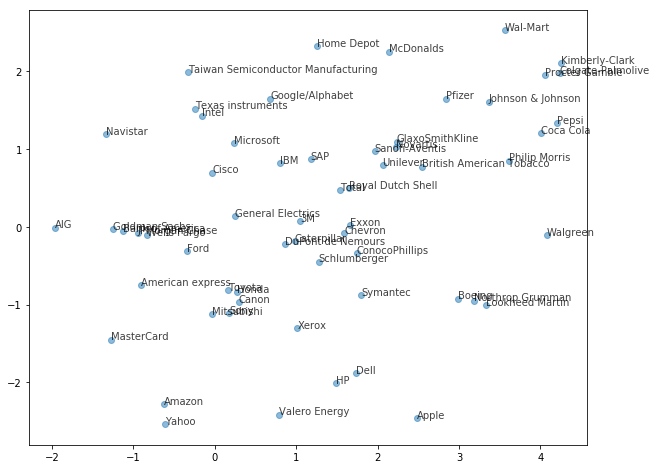

In [104]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show();

It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.

## Principal Components Analysis (PCA)

<img src="images/pca1.png" alt="" style="width: 400px;"/>

<img src="images/pca2.png" alt="" style="width: 400px;"/>

<img src="images/pca2.png" alt="" style="width: 400px;"/>


## Correlated data in nature

You are given an array `grains` giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their **Pearson correlation**.

In [105]:
grains = np.array([[3.312, 5.763], [3.333, 5.553999999999999], [3.3369999999999997, 5.291], [3.3789999999999996, 5.324], [3.562, 5.6579999999999995], [3.312, 5.386], [3.259, 5.563], [3.302, 5.42], [3.465, 6.053], [3.505, 5.8839999999999995], [3.242, 5.7139999999999995], [3.201, 5.438], [3.199, 5.439], [3.156, 5.479], [3.114, 5.482], [3.333, 5.351], [3.383, 5.119], [3.514, 5.527], [3.466, 5.205], [3.049, 5.226], [3.1289999999999996, 5.6579999999999995], [3.168, 5.52], [3.5069999999999997, 5.617999999999999], [2.9360000000000004, 5.099], [3.245, 5.789], [3.4210000000000003, 5.832999999999999], [3.0260000000000002, 5.395], [2.9560000000000004, 5.395], [3.221, 5.541], [3.065, 5.516], [2.975, 5.454], [3.3710000000000004, 5.757000000000001], [3.1860000000000004, 5.7170000000000005], [3.15, 5.585], [3.3280000000000003, 5.712000000000001], [3.485, 5.709], [3.464, 5.8260000000000005], [3.6830000000000003, 5.832000000000001], [3.2880000000000003, 5.656000000000001], [3.298, 5.397], [3.156, 5.348], [3.158, 5.351], [3.201, 5.138], [3.3960000000000004, 5.877000000000001], [3.4619999999999997, 5.579], [3.155, 5.376], [3.3930000000000002, 5.7010000000000005], [3.377, 5.57], [3.2910000000000004, 5.545], [3.258, 5.678], [3.272, 5.585], [3.4339999999999997, 5.6739999999999995], [3.113, 5.715], [3.199, 5.504], [3.113, 5.7410000000000005], [3.2119999999999997, 5.702000000000001], [3.377, 5.388], [3.412, 5.3839999999999995], [3.4189999999999996, 5.662000000000001], [3.032, 5.159], [2.85, 5.008], [2.8789999999999996, 4.902], [3.042, 5.0760000000000005], [3.07, 5.395], [3.0260000000000002, 5.2620000000000005], [3.1189999999999998, 5.138999999999999], [3.19, 5.63], [3.158, 5.609], [3.153, 5.569], [2.8819999999999997, 5.412000000000001], [3.5610000000000004, 6.191], [3.484, 5.997999999999999], [3.594, 5.978], [3.93, 6.154], [3.486, 6.017], [3.438, 5.9270000000000005], [3.403, 6.064], [3.8139999999999996, 6.579], [3.639, 6.445], [3.5660000000000003, 5.85], [3.467, 5.875], [3.8569999999999998, 6.006], [3.864, 6.285], [3.772, 6.3839999999999995], [3.801, 6.3660000000000005], [3.6510000000000002, 6.172999999999999], [3.764, 6.084], [3.67, 6.5489999999999995], [4.033, 6.5729999999999995], [4.032, 6.45], [3.785, 6.581], [3.7960000000000003, 6.172000000000001], [3.693, 6.272], [3.86, 6.037000000000001], [3.485, 6.666], [3.463, 6.138999999999999], [3.81, 6.341], [3.552, 6.449], [3.512, 6.271], [3.6839999999999997, 6.218999999999999], [3.525, 5.718], [3.694, 5.89], [3.892, 6.1129999999999995], [3.681, 6.369], [3.755, 6.247999999999999], [3.786, 6.037000000000001], [3.806, 6.152], [3.573, 6.0329999999999995], [3.763, 6.675], [3.674, 6.153], [3.7689999999999997, 6.107], [3.7910000000000004, 6.303], [3.9019999999999997, 6.183], [3.737, 6.2589999999999995], [3.991, 6.563], [3.719, 6.416], [3.897, 6.051], [3.815, 6.245], [3.7689999999999997, 6.227], [3.8569999999999998, 6.492999999999999], [3.9619999999999997, 6.315], [3.563, 6.059], [3.387, 5.7620000000000005], [3.7710000000000004, 5.98], [3.582, 5.3629999999999995], [3.8689999999999998, 6.111000000000001], [3.594, 6.285], [3.687, 5.979], [3.773, 6.513], [3.69, 5.791], [3.755, 5.979], [3.825, 6.144], [3.2680000000000002, 5.8839999999999995], [3.395, 5.845], [3.408, 5.776], [3.465, 5.477], [3.574, 6.145], [3.2310000000000003, 5.92], [3.286, 5.832000000000001], [3.472, 5.872000000000001], [2.9939999999999998, 5.472], [3.073, 5.541], [3.074, 5.388999999999999], [2.967, 5.224], [2.7769999999999997, 5.314], [2.687, 5.279], [2.719, 5.176], [2.967, 5.267], [2.911, 5.386], [2.648, 5.317], [2.84, 5.263], [2.7760000000000002, 5.405], [2.833, 5.4079999999999995], [2.693, 5.22], [2.755, 5.175], [2.675, 5.25], [2.8489999999999998, 5.053], [2.745, 5.394], [2.678, 5.444], [2.695, 5.303999999999999], [2.8789999999999996, 5.4510000000000005], [2.81, 5.35], [2.847, 5.267], [2.968, 5.332999999999999], [2.7939999999999996, 5.011], [2.9410000000000003, 5.105], [2.897, 5.319], [2.8369999999999997, 5.417000000000001], [2.668, 5.176], [2.715, 5.09], [2.701, 5.325], [2.845, 5.167000000000001], [2.763, 5.088], [2.763, 5.136], [2.641, 5.278], [2.821, 4.981], [2.71, 5.186], [2.642, 5.145], [2.758, 5.18], [2.8930000000000002, 5.357], [2.775, 5.09], [3.017, 5.236000000000001], [2.909, 5.24], [2.85, 5.1080000000000005], [3.0260000000000002, 5.495], [2.6830000000000003, 5.3629999999999995], [2.716, 5.412999999999999], [2.675, 5.088], [2.821, 5.0889999999999995], [2.787, 4.899], [2.717, 5.046], [2.804, 5.091], [2.9530000000000003, 5.132000000000001], [2.63, 5.18], [2.975, 5.236000000000001], [3.1260000000000003, 5.16], [3.054, 5.224], [3.128, 5.32], [2.911, 5.41], [3.155, 5.073], [2.989, 5.218999999999999], [3.135, 4.984], [2.81, 5.0089999999999995], [3.091, 5.183], [2.96, 5.204], [2.9810000000000003, 5.1370000000000005], [2.795, 5.14], [3.2319999999999998, 5.236000000000001], [2.8360000000000003, 5.175], [2.9739999999999998, 5.242999999999999]])


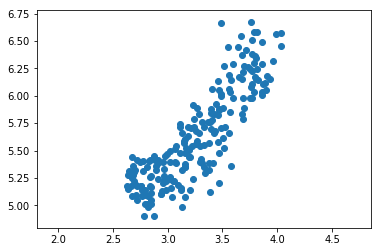

0.8604149377143467


In [106]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

## Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use **PCA** `to decorrelate these measurements`, then plot the decorrelated points and measure their **Pearson correlation**.

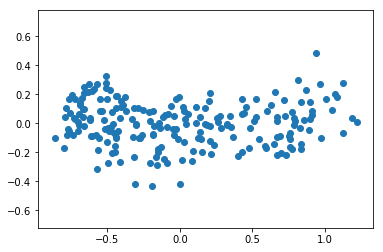

4.983104599635362e-17


In [107]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Principal components

Below are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In which of the plots could the axes represent the principal components of the point cloud?

<img src="images/pca4.png" alt="" style="width: 400px;"/>

Recall that the principal components are the directions along which the the data varies.

- None of them.
- Both plot 1 and plot 3. (correct)
- Plot 2.

## Intrinsic Dimension

<img src="images/pca_intrinsic_dimension1.png" alt="" style="width: 400px;"/>

<img src="images/pca_intrinsic_dimension2.png" alt="" style="width: 400px;"/>

<img src="images/pca_intrinsic_dimension3.png" alt="" style="width: 400px;"/>

<img src="images/pca_intrinsic_dimension4.png" alt="" style="width: 400px;"/>


## The first principal component

The **first principal component** `of the data is the direction in which the data varies the most`. In this exercise, your job is to use **PCA** to find the **first principal component** of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array `grains` gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

[3.25860476 5.62853333]


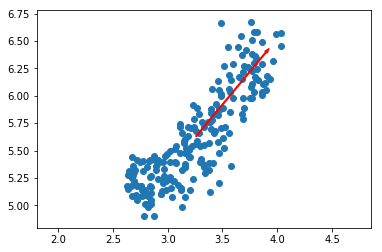

In [117]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])
#plt.show();

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_
print(mean)

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
first_pc

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show();

This is the direction in which the grain data varies the most.

## Variance of the PCA features

The fish dataset is 6-dimensional. But what is its **intrinsic dimension**? Make a plot of the variances of the PCA features to find out. As before, `samples` is a 2D array, where each row represents a fish. You'll need to **standardize the features** first.

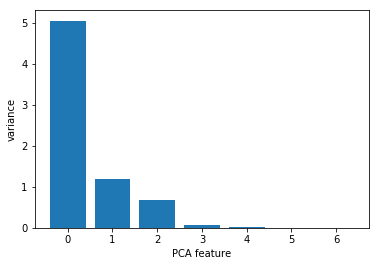

In [118]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show();

It looks like PCA features 0 and 1 have significant variance. Since PCA features 0 and 1 have significant variance, the **intrinsic dimension** of this dataset appears to be 2.

## Dimensionality Reduction

<img src="images/pca_dimensionality_reduction.png" alt="" style="width: 400px;"/>